<a href="https://colab.research.google.com/github/fbeilstein/algorithms/blob/master/lecture_05_recursion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lecture objectives:

* Familiarize yourself with recursion, call stack
* Learn how to think about recursion in different ways
* Explore different recursion problems
* Undertand memoisation concept
* Familiarize yourself with tail recursion and TLO (Tail Recursion Optimization)

# What is recursion

**Recursion** is a method of solving a computational problem where the solution depends on solutions to smaller instances of the same problem. Recursion solves such recursive problems by using functions that call themselves from within their own code.

# Stack overflow

Every function call generates a new stack frame with the local parameters and variables that is created and inserted in a call stack. This requires extra time for stack management and space in the call stack. Thus it's better to avoid using resursion in production code.

If the recursion depth exceeds maximum call stack size the infamous stack overflow occures. Tail-call optimization somewhat helps with the issue that we will address later.

# Broader context

A common algorithm design tactic is to divide a problem into sub-problems of the same type as the original, solve those sub-problems, and combine the results. This is often referred to as the divide-and-conquer method; when combined with a lookup table that stores the results of previously solved sub-problems (to avoid solving them repeatedly and incurring extra computation time), it can be referred to as dynamic programming or memoization.

In [ ]:
#@title It's all connected
%%html

<svg width="100mm" height="107mm" version="1.1" viewBox="0 0 422.38 218.94" xmlns="http://www.w3.org/2000/svg" xmlns:cc="http://creativecommons.org/ns#" xmlns:dc="http://purl.org/dc/elements/1.1/" xmlns:ns2="http://www.iki.fi/pav/software/textext/" xmlns:rdf="http://www.w3.org/1999/02/22-rdf-syntax-ns#">
 <defs>
  <marker id="Arrow1Mstart-6" style="overflow:visible" orient="auto">
   <path transform="matrix(.4 0 0 .4 4 0)" d="m0 0 5-5-17.5 5 17.5 5z" style="fill-opacity:.50379;fill-rule:evenodd;fill:#fe0000;stroke-opacity:.50379;stroke-width:1pt;stroke:#fe0000"/>
  </marker>
  <marker id="Arrow1Mend-2" style="overflow:visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" style="fill-opacity:.50379;fill-rule:evenodd;fill:#fe0000;stroke-opacity:.50379;stroke-width:1pt;stroke:#fe0000"/>
  </marker>
  <marker id="Arrow1Mstart-8" style="overflow:visible" orient="auto">
   <path transform="matrix(.4 0 0 .4 4 0)" d="m0 0 5-5-17.5 5 17.5 5z" style="fill-opacity:.50379;fill-rule:evenodd;fill:#fe0000;stroke-opacity:.50379;stroke-width:1pt;stroke:#fe0000"/>
  </marker>
  <marker id="Arrow1Mend-4" style="overflow:visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" style="fill-opacity:.50379;fill-rule:evenodd;fill:#fe0000;stroke-opacity:.50379;stroke-width:1pt;stroke:#fe0000"/>
  </marker>
  <marker id="Arrow1Mstart-6-3" style="overflow:visible" orient="auto">
   <path transform="matrix(.4 0 0 .4 4 0)" d="m0 0 5-5-17.5 5 17.5 5z" style="fill-opacity:.50379;fill-rule:evenodd;fill:#fe0000;stroke-opacity:.50379;stroke-width:1pt;stroke:#fe0000"/>
  </marker>
  <marker id="Arrow1Mend-2-3" style="overflow:visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" style="fill-opacity:.50379;fill-rule:evenodd;fill:#fe0000;stroke-opacity:.50379;stroke-width:1pt;stroke:#fe0000"/>
  </marker>
 </defs>
 <metadata>
  <rdf:RDF>
   <cc:Work rdf:about="">
    <dc:format>image/svg+xml</dc:format>
    <dc:type rdf:resource="http://purl.org/dc/dcmitype/StillImage"/>
    <dc:title/>
   </cc:Work>
  </rdf:RDF>
  <rdf:RDF>
   <cc:Work rdf:about="">
    <dc:title/>
   </cc:Work>
  </rdf:RDF>
 </metadata>
 <g transform="matrix(3.7795 0 0 3.7795 -22.817 -14.61)" ns2:alignment="middle center" ns2:inkscapeversion="1.0" ns2:jacobian_sqrt="3.77952" ns2:pdfconverter="inkscape" ns2:preamble="C:\\Users\\User\\AppData\\Roaming\\inkscape\\extensions\\textext\\default_packages.tex" ns2:scale="2.834645669291339" ns2:texconverter="pdflatex" ns2:text="$$Recursion$$\n$$Divide and conquer$$\n$$Dynamic programming$$" ns2:version="1.1.0">
  <defs></defs>
  <g transform="translate(-254.39 -139.91)">
   <g transform="matrix(.82225 0 0 .82225 58.278 26.587)" style="fill:#000000">
    <g transform="translate(282.64 146.72)">
     <path d="m3.7344-6.125c0.0625-0.23438 0.09375-0.32812 0.28125-0.35938 0.09375-0.015625 0.40625-0.015625 0.60938-0.015625 0.70312 0 1.8125 0 1.8125 0.98438 0 0.34375-0.15625 1.0312-0.54688 1.4219-0.26562 0.25-0.78125 0.57812-1.6875 0.57812h-1.1094zm1.4375 2.7344c1.0156-0.21875 2.1875-0.92188 2.1875-1.9219 0-0.85938-0.89062-1.5-2.2031-1.5h-2.8281c-0.20312 0-0.29688 0-0.29688 0.20312 0 0.10938 0.09375 0.10938 0.28125 0.10938 0.015625 0 0.20312 0 0.375 0.015625 0.1875 0.03125 0.26562 0.03125 0.26562 0.17188 0 0.03125 0 0.0625-0.03125 0.1875l-1.3438 5.3438c-0.09375 0.39062-0.10938 0.46875-0.90625 0.46875-0.17188 0-0.26562 0-0.26562 0.20312 0 0.10938 0.125 0.10938 0.14062 0.10938 0.28125 0 0.98438-0.03125 1.25-0.03125 0.28125 0 1 0.03125 1.2812 0.03125 0.078125 0 0.1875 0 0.1875-0.20312 0-0.10938-0.078125-0.10938-0.28125-0.10938-0.35938 0-0.64062 0-0.64062-0.17188 0-0.0625 0.015625-0.10938 0.03125-0.17188l0.65625-2.6406h1.1875c0.90625 0 1.0781 0.5625 1.0781 0.90625 0 0.14062-0.078125 0.45312-0.14062 0.6875-0.0625 0.28125-0.15625 0.64062-0.15625 0.84375 0 1.0781 1.2031 1.0781 1.3281 1.0781 0.84375 0 1.2031-1 1.2031-1.1406 0-0.125-0.10938-0.125-0.125-0.125-0.09375 0-0.10938 0.0625-0.125 0.14062-0.25 0.73438-0.6875 0.90625-0.90625 0.90625-0.32812 0-0.40625-0.21875-0.40625-0.60938 0-0.3125 0.0625-0.8125 0.10938-1.1406 0.015625-0.14062 0.03125-0.32812 0.03125-0.46875 0-0.76562-0.67188-1.0781-0.9375-1.1719z"/>
    </g>
   </g>
   <g transform="matrix(.82225 0 0 .82225 58.278 26.587)" style="fill:#000000">
    <g transform="translate(290.28 146.72)">
     <path d="m1.8594-2.2969c0.29688 0 1.0312-0.03125 1.5312-0.23438 0.70312-0.29688 0.75-0.89062 0.75-1.0312 0-0.4375-0.375-0.84375-1.0625-0.84375-1.1094 0-2.625 0.96875-2.625 2.7188 0 1.0156 0.59375 1.7969 1.5781 1.7969 1.4219 0 2.25-1.0625 2.25-1.1719 0-0.0625-0.046875-0.14062-0.10938-0.14062s-0.078125 0.03125-0.14062 0.10938c-0.78125 0.98438-1.875 0.98438-1.9844 0.98438-0.78125 0-0.875-0.84375-0.875-1.1562 0-0.125 0.015625-0.42188 0.15625-1.0312zm-0.46875-0.21875c0.39062-1.5156 1.4219-1.6719 1.6875-1.6719 0.45312 0 0.73438 0.29688 0.73438 0.625 0 1.0469-1.5938 1.0469-2.0156 1.0469z"/>
    </g>
    <g transform="translate(294.92 146.72)">
     <path d="m3.9531-3.7812c-0.17188 0-0.29688 0-0.4375 0.125-0.17188 0.15625-0.1875 0.32812-0.1875 0.39062 0 0.25 0.1875 0.35938 0.375 0.35938 0.28125 0 0.54688-0.25 0.54688-0.64062 0-0.48438-0.46875-0.85938-1.1719-0.85938-1.3438 0-2.6719 1.4219-2.6719 2.8281 0 0.90625 0.57812 1.6875 1.625 1.6875 1.4219 0 2.25-1.0625 2.25-1.1719 0-0.0625-0.046875-0.14062-0.10938-0.14062s-0.078125 0.03125-0.14062 0.10938c-0.78125 0.98438-1.875 0.98438-1.9844 0.98438-0.625 0-0.90625-0.48438-0.90625-1.0938 0-0.40625 0.20312-1.375 0.54688-1.9844 0.3125-0.57812 0.85938-1 1.4062-1 0.32812 0 0.71875 0.125 0.85938 0.40625z"/>
    </g>
    <g transform="translate(299.23,146.72)">
     <path d="m3.4844-0.5625c0.10938 0.40625 0.46875 0.67188 0.89062 0.67188 0.34375 0 0.57812-0.23438 0.73438-0.54688 0.17188-0.35938 0.29688-0.96875 0.29688-0.98438 0-0.10938-0.078125-0.10938-0.10938-0.10938-0.10938 0-0.10938 0.046875-0.14062 0.1875-0.14062 0.5625-0.32812 1.2344-0.75 1.2344-0.20312 0-0.3125-0.125-0.3125-0.45312 0-0.21875 0.125-0.6875 0.20312-1.0469l0.28125-1.0781c0.03125-0.14062 0.125-0.51562 0.17188-0.67188 0.046875-0.23438 0.14062-0.60938 0.14062-0.67188 0-0.17188-0.14062-0.26562-0.28125-0.26562-0.046875 0-0.3125 0.015625-0.39062 0.34375-0.1875 0.73438-0.625 2.4844-0.75 3-0.015625 0.046875-0.40625 0.84375-1.1406 0.84375-0.51562 0-0.60938-0.45312-0.60938-0.8125 0-0.5625 0.28125-1.3438 0.53125-2.0312 0.125-0.3125 0.17188-0.45312 0.17188-0.64062 0-0.4375-0.3125-0.8125-0.8125-0.8125-0.95312 0-1.3125 1.4531-1.3125 1.5312 0 0.10938 0.09375 0.10938 0.10938 0.10938 0.10938 0 0.10938-0.03125 0.15625-0.1875 0.25-0.85938 0.64062-1.2344 1.0156-1.2344 0.09375 0 0.25 0.015625 0.25 0.32812 0 0.23438-0.10938 0.53125-0.17188 0.67188-0.375 1-0.57812 1.6094-0.57812 2.0938 0 0.95312 0.6875 1.2031 1.2188 1.2031 0.65625 0 1.0156-0.45312 1.1875-0.67188z"/>
    </g>
    <g transform="translate(304.93 146.72)">
     <path id="id-fbf1ca9a-a40c-4c6f-9b1c-03d19f686c5d" d="m0.875-0.59375c-0.03125 0.15625-0.09375 0.39062-0.09375 0.4375 0 0.17188 0.14062 0.26562 0.29688 0.26562 0.125 0 0.29688-0.078125 0.375-0.28125 0.015625-0.03125 0.34375-1.3906 0.39062-1.5781 0.078125-0.32812 0.26562-1.0156 0.3125-1.2969 0.046875-0.125 0.32812-0.59375 0.5625-0.8125 0.078125-0.0625 0.375-0.32812 0.79688-0.32812 0.26562 0 0.40625 0.125 0.42188 0.125-0.29688 0.046875-0.51562 0.28125-0.51562 0.54688 0 0.15625 0.10938 0.34375 0.375 0.34375s0.54688-0.23438 0.54688-0.59375c0-0.34375-0.3125-0.64062-0.82812-0.64062-0.64062 0-1.0781 0.48438-1.2656 0.76562-0.09375-0.45312-0.45312-0.76562-0.92188-0.76562-0.45312 0-0.64062 0.39062-0.73438 0.5625-0.17188 0.34375-0.29688 0.9375-0.29688 0.96875 0 0.10938 0.09375 0.10938 0.10938 0.10938 0.10938 0 0.10938-0.015625 0.17188-0.23438 0.17188-0.70312 0.375-1.1875 0.73438-1.1875 0.15625 0 0.29688 0.078125 0.29688 0.45312 0 0.21875-0.03125 0.32812-0.15625 0.84375z"/>
    </g>
   </g>
   <g transform="matrix(.82225 0 0 .82225 58.278 26.587)" style="fill:#000000">
    <g transform="translate(309.7 146.72)">
     <path d="m3.8906-3.7344c-0.26562 0.015625-0.46875 0.23438-0.46875 0.45312 0 0.14062 0.09375 0.29688 0.3125 0.29688s0.45312-0.17188 0.45312-0.5625c0-0.45312-0.42188-0.85938-1.1875-0.85938-1.3125 0-1.6875 1.0156-1.6875 1.4531 0 0.78125 0.73438 0.92188 1.0312 0.98438 0.51562 0.10938 1.0312 0.21875 1.0312 0.76562 0 0.25-0.21875 1.0938-1.4219 1.0938-0.14062 0-0.90625 0-1.1406-0.53125 0.39062 0.046875 0.64062-0.25 0.64062-0.53125 0-0.21875-0.17188-0.34375-0.375-0.34375-0.26562 0-0.5625 0.20312-0.5625 0.65625 0 0.5625 0.57812 0.96875 1.4219 0.96875 1.625 0 2.0156-1.2031 2.0156-1.6562 0-0.35938-0.1875-0.60938-0.3125-0.71875-0.26562-0.28125-0.5625-0.34375-1-0.42188-0.35938-0.078125-0.75-0.15625-0.75-0.60938 0-0.28125 0.23438-0.89062 1.1094-0.89062 0.25 0 0.75 0.078125 0.89062 0.45312z"/>
    </g>
    <g transform="translate(314.37 146.72)">
     <path d="m2.8281-6.2344c0-0.20312-0.14062-0.35938-0.35938-0.35938-0.28125 0-0.54688 0.26562-0.54688 0.53125 0 0.1875 0.14062 0.35938 0.375 0.35938s0.53125-0.23438 0.53125-0.53125zm-0.75 3.75c0.10938-0.28125 0.10938-0.3125 0.21875-0.57812 0.078125-0.20312 0.125-0.34375 0.125-0.53125 0-0.4375-0.3125-0.8125-0.8125-0.8125-0.9375 0-1.3125 1.4531-1.3125 1.5312 0 0.10938 0.09375 0.10938 0.10938 0.10938 0.10938 0 0.10938-0.03125 0.15625-0.1875 0.28125-0.9375 0.67188-1.2344 1.0156-1.2344 0.078125 0 0.25 0 0.25 0.3125 0 0.21875-0.078125 0.42188-0.10938 0.53125-0.078125 0.25-0.53125 1.4062-0.6875 1.8438-0.10938 0.25-0.23438 0.57812-0.23438 0.79688 0 0.46875 0.34375 0.8125 0.8125 0.8125 0.9375 0 1.3125-1.4375 1.3125-1.5312 0-0.10938-0.09375-0.10938-0.125-0.10938-0.09375 0-0.09375 0.03125-0.14062 0.1875-0.1875 0.625-0.51562 1.2344-1.0156 1.2344-0.17188 0-0.25-0.09375-0.25-0.32812 0-0.25 0.0625-0.39062 0.29688-1z"/>
    </g>
    <g transform="translate(317.8,146.72)">
     <path d="m4.6719-2.7188c0-1.0469-0.6875-1.6875-1.5938-1.6875-1.3281 0-2.6719 1.4219-2.6719 2.8281 0 0.98438 0.67188 1.6875 1.5938 1.6875 1.3281 0 2.6719-1.375 2.6719-2.8281zm-2.6562 2.6094c-0.4375 0-0.875-0.3125-0.875-1.0938 0-0.48438 0.26562-1.5625 0.57812-2.0625 0.5-0.76562 1.0781-0.92188 1.3594-0.92188 0.57812 0 0.875 0.48438 0.875 1.0781 0 0.39062-0.20312 1.4375-0.57812 2.0781-0.35938 0.57812-0.90625 0.92188-1.3594 0.92188z"/>
    </g>
    <g transform="translate(322.63 146.72)">
     <path id="id-15c67cfb-383f-496c-8830-4163a04de0fa" d="m0.875-0.59375c-0.03125 0.15625-0.09375 0.39062-0.09375 0.4375 0 0.17188 0.14062 0.26562 0.29688 0.26562 0.125 0 0.29688-0.078125 0.375-0.28125 0-0.015625 0.125-0.48438 0.1875-0.73438l0.21875-0.89062c0.046875-0.23438 0.10938-0.45312 0.17188-0.67188 0.03125-0.17188 0.10938-0.46875 0.125-0.5 0.14062-0.3125 0.67188-1.2188 1.625-1.2188 0.45312 0 0.53125 0.375 0.53125 0.70312 0 0.60938-0.48438 1.8906-0.64062 2.3125-0.09375 0.23438-0.10938 0.35938-0.10938 0.46875 0 0.46875 0.35938 0.8125 0.82812 0.8125 0.9375 0 1.2969-1.4531 1.2969-1.5312 0-0.10938-0.078125-0.10938-0.10938-0.10938-0.10938 0-0.10938 0.03125-0.15625 0.1875-0.20312 0.67188-0.53125 1.2344-1.0156 1.2344-0.17188 0-0.23438-0.09375-0.23438-0.32812 0-0.25 0.078125-0.48438 0.17188-0.70312 0.1875-0.53125 0.60938-1.625 0.60938-2.2031 0-0.65625-0.42188-1.0625-1.1406-1.0625-0.90625 0-1.3906 0.64062-1.5625 0.875-0.046875-0.5625-0.45312-0.875-0.92188-0.875-0.45312 0-0.64062 0.39062-0.73438 0.5625-0.17188 0.34375-0.29688 0.9375-0.29688 0.96875 0 0.10938 0.09375 0.10938 0.10938 0.10938 0.10938 0 0.10938-0.015625 0.17188-0.23438 0.17188-0.70312 0.375-1.1875 0.73438-1.1875 0.1875 0 0.29688 0.125 0.29688 0.45312 0 0.21875-0.03125 0.32812-0.15625 0.84375z"/>
    </g>
   </g>
   <g transform="matrix(.7057 0 0 .7057 75.762 71.104)" style="fill:#000000">
    <g transform="translate(264.69 164.65)">
     <path d="m1.5781-0.78125c-0.09375 0.39062-0.10938 0.46875-0.90625 0.46875-0.15625 0-0.26562 0-0.26562 0.1875 0 0.125 0.078125 0.125 0.26562 0.125h3.3125c2.0625 0 4.0312-2.1094 4.0312-4.2812 0-1.4062-0.84375-2.5312-2.3438-2.5312h-3.3438c-0.1875 0-0.29688 0-0.29688 0.1875 0 0.125 0.078125 0.125 0.28125 0.125 0.125 0 0.3125 0.015625 0.42188 0.015625 0.17188 0.03125 0.21875 0.046875 0.21875 0.17188 0 0.03125 0 0.0625-0.03125 0.1875zm2.1562-5.3438c0.09375-0.34375 0.10938-0.375 0.54688-0.375h1.0625c0.96875 0 1.7969 0.53125 1.7969 1.8438 0 0.48438-0.1875 2.125-1.0469 3.2188-0.28125 0.375-1.0625 1.125-2.2969 1.125h-1.125-0.21875c-0.09375-0.015625-0.125-0.03125-0.125-0.10938 0-0.03125 0-0.046875 0.046875-0.21875z"/>
    </g>
   </g>
   <g id="id-21c34c3d-62e1-4b01-b8bc-89a54ab3adca" transform="matrix(.7057 0 0 .7057 75.762 71.104)" style="fill:#000000">
    <g transform="translate(273.22 164.65)">
     <path d="m2.8281-6.2344c0-0.20312-0.14062-0.35938-0.35938-0.35938-0.28125 0-0.54688 0.26562-0.54688 0.53125 0 0.1875 0.14062 0.35938 0.375 0.35938s0.53125-0.23438 0.53125-0.53125zm-0.75 3.75c0.10938-0.28125 0.10938-0.3125 0.21875-0.57812 0.078125-0.20312 0.125-0.34375 0.125-0.53125 0-0.4375-0.3125-0.8125-0.8125-0.8125-0.9375 0-1.3125 1.4531-1.3125 1.5312 0 0.10938 0.09375 0.10938 0.10938 0.10938 0.10938 0 0.10938-0.03125 0.15625-0.1875 0.28125-0.9375 0.67188-1.2344 1.0156-1.2344 0.078125 0 0.25 0 0.25 0.3125 0 0.21875-0.078125 0.42188-0.10938 0.53125-0.078125 0.25-0.53125 1.4062-0.6875 1.8438-0.10938 0.25-0.23438 0.57812-0.23438 0.79688 0 0.46875 0.34375 0.8125 0.8125 0.8125 0.9375 0 1.3125-1.4375 1.3125-1.5312 0-0.10938-0.09375-0.10938-0.125-0.10938-0.09375 0-0.09375 0.03125-0.14062 0.1875-0.1875 0.625-0.51562 1.2344-1.0156 1.2344-0.17188 0-0.25-0.09375-0.25-0.32812 0-0.25 0.0625-0.39062 0.29688-1z"/>
    </g>
    <g transform="translate(276.65 164.65)">
     <path d="m4.6719-3.7031c0-0.54688-0.26562-0.70312-0.4375-0.70312-0.25 0-0.5 0.26562-0.5 0.48438 0 0.125 0.046875 0.1875 0.15625 0.29688 0.21875 0.20312 0.34375 0.45312 0.34375 0.8125 0 0.42188-0.60938 2.7031-1.7656 2.7031-0.51562 0-0.75-0.34375-0.75-0.875 0-0.54688 0.28125-1.2812 0.57812-2.1094 0.078125-0.17188 0.125-0.3125 0.125-0.5 0-0.4375-0.3125-0.8125-0.8125-0.8125-0.9375 0-1.3125 1.4531-1.3125 1.5312 0 0.10938 0.09375 0.10938 0.10938 0.10938 0.10938 0 0.10938-0.03125 0.15625-0.1875 0.29688-1 0.71875-1.2344 1.0156-1.2344 0.078125 0 0.25 0 0.25 0.3125 0 0.25-0.10938 0.53125-0.17188 0.70312-0.4375 1.1562-0.5625 1.6094-0.5625 2.0469 0 1.0781 0.875 1.2344 1.3281 1.2344 1.6719 0 2.25-3.2969 2.25-3.8125z"/>
    </g>
   </g>
   <g transform="translate(-65.302 37.806)" style="fill:#000000">
    <g transform="matrix(.7057 0 0 .7057 339.96 149.49)">
     <path id="id-23b2daae-5f6f-4453-9dc6-6d4c6aa93c0b" d="m2.8281-6.2344c0-0.20312-0.14062-0.35938-0.35938-0.35938-0.28125 0-0.54688 0.26562-0.54688 0.53125 0 0.1875 0.14062 0.35938 0.375 0.35938s0.53125-0.23438 0.53125-0.53125zm-0.75 3.75c0.10938-0.28125 0.10938-0.3125 0.21875-0.57812 0.078125-0.20312 0.125-0.34375 0.125-0.53125 0-0.4375-0.3125-0.8125-0.8125-0.8125-0.9375 0-1.3125 1.4531-1.3125 1.5312 0 0.10938 0.09375 0.10938 0.10938 0.10938 0.10938 0 0.10938-0.03125 0.15625-0.1875 0.28125-0.9375 0.67188-1.2344 1.0156-1.2344 0.078125 0 0.25 0 0.25 0.3125 0 0.21875-0.078125 0.42188-0.10938 0.53125-0.078125 0.25-0.53125 1.4062-0.6875 1.8438-0.10938 0.25-0.23438 0.57812-0.23438 0.79688 0 0.46875 0.34375 0.8125 0.8125 0.8125 0.9375 0 1.3125-1.4375 1.3125-1.5312 0-0.10938-0.09375-0.10938-0.125-0.10938-0.09375 0-0.09375 0.03125-0.14062 0.1875-0.1875 0.625-0.51562 1.2344-1.0156 1.2344-0.17188 0-0.25-0.09375-0.25-0.32812 0-0.25 0.0625-0.39062 0.29688-1z"/>
    </g>
    <g transform="matrix(.7057 0 0 .7057 342.38 149.49)">
     <path id="id-d05dc4a2-4787-46e6-b29b-0962be6116df" d="m5.1406-6.8125s0-0.10938-0.125-0.10938c-0.15625 0-1.0938 0.09375-1.2656 0.10938-0.078125 0.015625-0.14062 0.0625-0.14062 0.1875s0.09375 0.125 0.23438 0.125c0.48438 0 0.5 0.0625 0.5 0.17188l-0.03125 0.20312-0.59375 2.3594c-0.1875-0.375-0.46875-0.64062-0.92188-0.64062-1.1562 0-2.3906 1.4688-2.3906 2.9219 0 0.9375 0.54688 1.5938 1.3125 1.5938 0.20312 0 0.70312-0.046875 1.2969-0.75 0.078125 0.42188 0.4375 0.75 0.90625 0.75 0.35938 0 0.57812-0.23438 0.75-0.54688 0.15625-0.35938 0.29688-0.96875 0.29688-0.98438 0-0.10938-0.09375-0.10938-0.125-0.10938-0.09375 0-0.10938 0.046875-0.14062 0.1875-0.17188 0.64062-0.34375 1.2344-0.75 1.2344-0.28125 0-0.29688-0.26562-0.29688-0.45312 0-0.25 0.015625-0.3125 0.046875-0.48438zm-2.0625 5.625c-0.0625 0.1875-0.0625 0.20312-0.20312 0.375-0.4375 0.54688-0.84375 0.70312-1.125 0.70312-0.5 0-0.64062-0.54688-0.64062-0.9375 0-0.5 0.3125-1.7188 0.54688-2.1875 0.3125-0.57812 0.75-0.95312 1.1562-0.95312 0.64062 0 0.78125 0.8125 0.78125 0.875s-0.015625 0.125-0.03125 0.17188z"/>
    </g>
    <g transform="matrix(.7057 0 0 .7057 346.04 149.49)">
     <path d="m1.8594-2.2969c0.29688 0 1.0312-0.03125 1.5312-0.23438 0.70312-0.29688 0.75-0.89062 0.75-1.0312 0-0.4375-0.375-0.84375-1.0625-0.84375-1.1094 0-2.625 0.96875-2.625 2.7188 0 1.0156 0.59375 1.7969 1.5781 1.7969 1.4219 0 2.25-1.0625 2.25-1.1719 0-0.0625-0.046875-0.14062-0.10938-0.14062s-0.078125 0.03125-0.14062 0.10938c-0.78125 0.98438-1.875 0.98438-1.9844 0.98438-0.78125 0-0.875-0.84375-0.875-1.1562 0-0.125 0.015625-0.42188 0.15625-1.0312zm-0.46875-0.21875c0.39062-1.5156 1.4219-1.6719 1.6875-1.6719 0.45312 0 0.73438 0.29688 0.73438 0.625 0 1.0469-1.5938 1.0469-2.0156 1.0469z"/>
    </g>
    <g transform="matrix(.7057 0 0 .7057 331.41 157.21)">
     <path d="m3.7188-3.7656c-0.1875-0.375-0.46875-0.64062-0.92188-0.64062-1.1562 0-2.3906 1.4688-2.3906 2.9219 0 0.9375 0.54688 1.5938 1.3125 1.5938 0.20312 0 0.70312-0.046875 1.2969-0.75 0.078125 0.42188 0.4375 0.75 0.90625 0.75 0.35938 0 0.57812-0.23438 0.75-0.54688 0.15625-0.35938 0.29688-0.96875 0.29688-0.98438 0-0.10938-0.09375-0.10938-0.125-0.10938-0.09375 0-0.10938 0.046875-0.14062 0.1875-0.17188 0.64062-0.34375 1.2344-0.75 1.2344-0.28125 0-0.29688-0.26562-0.29688-0.45312 0-0.21875 0.015625-0.3125 0.125-0.75 0.10938-0.40625 0.125-0.51562 0.21875-0.89062l0.35938-1.3906c0.0625-0.28125 0.0625-0.29688 0.0625-0.34375 0-0.17188-0.10938-0.26562-0.28125-0.26562-0.25 0-0.39062 0.21875-0.42188 0.4375zm-0.64062 2.5781c-0.0625 0.1875-0.0625 0.20312-0.20312 0.375-0.4375 0.54688-0.84375 0.70312-1.125 0.70312-0.5 0-0.64062-0.54688-0.64062-0.9375 0-0.5 0.3125-1.7188 0.54688-2.1875 0.3125-0.57812 0.75-0.95312 1.1562-0.95312 0.64062 0 0.78125 0.8125 0.78125 0.875s-0.015625 0.125-0.03125 0.17188z"/>
    </g>
    <g transform="matrix(.7057 0 0 .7057 335.12 157.21)">
     <path d="m0.875-0.59375c-0.03125 0.15625-0.09375 0.39062-0.09375 0.4375 0 0.17188 0.14062 0.26562 0.29688 0.26562 0.125 0 0.29688-0.078125 0.375-0.28125 0-0.015625 0.125-0.48438 0.1875-0.73438l0.21875-0.89062c0.046875-0.23438 0.10938-0.45312 0.17188-0.67188 0.03125-0.17188 0.10938-0.46875 0.125-0.5 0.14062-0.3125 0.67188-1.2188 1.625-1.2188 0.45312 0 0.53125 0.375 0.53125 0.70312 0 0.60938-0.48438 1.8906-0.64062 2.3125-0.09375 0.23438-0.10938 0.35938-0.10938 0.46875 0 0.46875 0.35938 0.8125 0.82812 0.8125 0.9375 0 1.2969-1.4531 1.2969-1.5312 0-0.10938-0.078125-0.10938-0.10938-0.10938-0.10938 0-0.10938 0.03125-0.15625 0.1875-0.20312 0.67188-0.53125 1.2344-1.0156 1.2344-0.17188 0-0.23438-0.09375-0.23438-0.32812 0-0.25 0.078125-0.48438 0.17188-0.70312 0.1875-0.53125 0.60938-1.625 0.60938-2.2031 0-0.65625-0.42188-1.0625-1.1406-1.0625-0.90625 0-1.3906 0.64062-1.5625 0.875-0.046875-0.5625-0.45312-0.875-0.92188-0.875-0.45312 0-0.64062 0.39062-0.73438 0.5625-0.17188 0.34375-0.29688 0.9375-0.29688 0.96875 0 0.10938 0.09375 0.10938 0.10938 0.10938 0.10938 0 0.10938-0.015625 0.17188-0.23438 0.17188-0.70312 0.375-1.1875 0.73438-1.1875 0.1875 0 0.29688 0.125 0.29688 0.45312 0 0.21875-0.03125 0.32812-0.15625 0.84375z"/>
    </g>
    <g transform="matrix(.7057 0 0 .7057 339.34 157.21)">
     <path id="id-8b1e81c3-0fd1-4599-903b-9cd432a76c2e" d="m5.1406-6.8125s0-0.10938-0.125-0.10938c-0.15625 0-1.0938 0.09375-1.2656 0.10938-0.078125 0.015625-0.14062 0.0625-0.14062 0.1875s0.09375 0.125 0.23438 0.125c0.48438 0 0.5 0.0625 0.5 0.17188l-0.03125 0.20312-0.59375 2.3594c-0.1875-0.375-0.46875-0.64062-0.92188-0.64062-1.1562 0-2.3906 1.4688-2.3906 2.9219 0 0.9375 0.54688 1.5938 1.3125 1.5938 0.20312 0 0.70312-0.046875 1.2969-0.75 0.078125 0.42188 0.4375 0.75 0.90625 0.75 0.35938 0 0.57812-0.23438 0.75-0.54688 0.15625-0.35938 0.29688-0.96875 0.29688-0.98438 0-0.10938-0.09375-0.10938-0.125-0.10938-0.09375 0-0.10938 0.046875-0.14062 0.1875-0.17188 0.64062-0.34375 1.2344-0.75 1.2344-0.28125 0-0.29688-0.26562-0.29688-0.45312 0-0.25 0.015625-0.3125 0.046875-0.48438zm-2.0625 5.625c-0.0625 0.1875-0.0625 0.20312-0.20312 0.375-0.4375 0.54688-0.84375 0.70312-1.125 0.70312-0.5 0-0.64062-0.54688-0.64062-0.9375 0-0.5 0.3125-1.7188 0.54688-2.1875 0.3125-0.57812 0.75-0.95312 1.1562-0.95312 0.64062 0 0.78125 0.8125 0.78125 0.875s-0.015625 0.125-0.03125 0.17188z"/>
    </g>
    <g transform="matrix(.7057 0 0 .7057 325.44 163.84)">
     <path d="m3.9531-3.7812c-0.17188 0-0.29688 0-0.4375 0.125-0.17188 0.15625-0.1875 0.32812-0.1875 0.39062 0 0.25 0.1875 0.35938 0.375 0.35938 0.28125 0 0.54688-0.25 0.54688-0.64062 0-0.48438-0.46875-0.85938-1.1719-0.85938-1.3438 0-2.6719 1.4219-2.6719 2.8281 0 0.90625 0.57812 1.6875 1.625 1.6875 1.4219 0 2.25-1.0625 2.25-1.1719 0-0.0625-0.046875-0.14062-0.10938-0.14062s-0.078125 0.03125-0.14062 0.10938c-0.78125 0.98438-1.875 0.98438-1.9844 0.98438-0.625 0-0.90625-0.48438-0.90625-1.0938 0-0.40625 0.20312-1.375 0.54688-1.9844 0.3125-0.57812 0.85938-1 1.4062-1 0.32812 0 0.71875 0.125 0.85938 0.40625z"/>
    </g>
    <g transform="matrix(.7057 0 0 .7057 328.49 163.84)">
     <path d="m4.6719-2.7188c0-1.0469-0.6875-1.6875-1.5938-1.6875-1.3281 0-2.6719 1.4219-2.6719 2.8281 0 0.98438 0.67188 1.6875 1.5938 1.6875 1.3281 0 2.6719-1.375 2.6719-2.8281zm-2.6562 2.6094c-0.4375 0-0.875-0.3125-0.875-1.0938 0-0.48438 0.26562-1.5625 0.57812-2.0625 0.5-0.76562 1.0781-0.92188 1.3594-0.92188 0.57812 0 0.875 0.48438 0.875 1.0781 0 0.39062-0.20312 1.4375-0.57812 2.0781-0.35938 0.57812-0.90625 0.92188-1.3594 0.92188z"/>
    </g>
    <g transform="matrix(.7057 0 0 .7057 331.89 163.84)">
     <path d="m0.875-0.59375c-0.03125 0.15625-0.09375 0.39062-0.09375 0.4375 0 0.17188 0.14062 0.26562 0.29688 0.26562 0.125 0 0.29688-0.078125 0.375-0.28125 0-0.015625 0.125-0.48438 0.1875-0.73438l0.21875-0.89062c0.046875-0.23438 0.10938-0.45312 0.17188-0.67188 0.03125-0.17188 0.10938-0.46875 0.125-0.5 0.14062-0.3125 0.67188-1.2188 1.625-1.2188 0.45312 0 0.53125 0.375 0.53125 0.70312 0 0.60938-0.48438 1.8906-0.64062 2.3125-0.09375 0.23438-0.10938 0.35938-0.10938 0.46875 0 0.46875 0.35938 0.8125 0.82812 0.8125 0.9375 0 1.2969-1.4531 1.2969-1.5312 0-0.10938-0.078125-0.10938-0.10938-0.10938-0.10938 0-0.10938 0.03125-0.15625 0.1875-0.20312 0.67188-0.53125 1.2344-1.0156 1.2344-0.17188 0-0.23438-0.09375-0.23438-0.32812 0-0.25 0.078125-0.48438 0.17188-0.70312 0.1875-0.53125 0.60938-1.625 0.60938-2.2031 0-0.65625-0.42188-1.0625-1.1406-1.0625-0.90625 0-1.3906 0.64062-1.5625 0.875-0.046875-0.5625-0.45312-0.875-0.92188-0.875-0.45312 0-0.64062 0.39062-0.73438 0.5625-0.17188 0.34375-0.29688 0.9375-0.29688 0.96875 0 0.10938 0.09375 0.10938 0.10938 0.10938 0.10938 0 0.10938-0.015625 0.17188-0.23438 0.17188-0.70312 0.375-1.1875 0.73438-1.1875 0.1875 0 0.29688 0.125 0.29688 0.45312 0 0.21875-0.03125 0.32812-0.15625 0.84375z"/>
    </g>
    <g transform="matrix(.7057 0 0 .7057 336.11 163.84)">
     <path id="id-e1c89e0c-6b30-4744-9c65-6a0a1734d81f" d="m4.5-4.2969c0-0.046875-0.03125-0.09375-0.09375-0.09375-0.10938 0-0.51562 0.39062-0.67188 0.6875-0.21875-0.54688-0.60938-0.70312-0.9375-0.70312-1.1719 0-2.3906 1.4688-2.3906 2.9219 0 0.96875 0.57812 1.5938 1.3125 1.5938 0.42188 0 0.8125-0.23438 1.1719-0.59375-0.09375 0.34375-0.42188 1.6875-0.45312 1.7812-0.078125 0.28125-0.15625 0.3125-0.71875 0.32812-0.125 0-0.21875 0-0.21875 0.20312 0 0 0 0.10938 0.125 0.10938 0.3125 0 0.67188-0.03125 1-0.03125s0.6875 0.03125 1.0312 0.03125c0.046875 0 0.17188 0 0.17188-0.20312 0-0.10938-0.09375-0.10938-0.26562-0.10938-0.46875 0-0.46875-0.0625-0.46875-0.15625 0-0.078125 0.015625-0.14062 0.03125-0.21875zm-2.75 4.1875c-0.60938 0-0.64062-0.76562-0.64062-0.9375 0-0.48438 0.28125-1.5625 0.45312-1.9844 0.3125-0.73438 0.82812-1.1562 1.2344-1.1562 0.65625 0 0.79688 0.8125 0.79688 0.875s-0.54688 2.25-0.57812 2.2812c-0.15625 0.28125-0.71875 0.92188-1.2656 0.92188z"/>
    </g>
    <path d="m378 113.98 19.783 28.202" style="fill:none;marker-end:url(#Arrow1Mend-2);marker-start:url(#Arrow1Mstart-6);stroke-opacity:.50379;stroke-width:.7129;stroke:#fe0000"/>
    <path d="m391.21 153.04-34.449 0.0754" style="fill:none;marker-end:url(#Arrow1Mend-4);marker-start:url(#Arrow1Mstart-8);stroke-opacity:.50379;stroke-width:.7129;stroke:#fe0000"/>
    <path d="m370.55 114.14-19.783 28.202" style="fill:none;marker-end:url(#Arrow1Mend-2-3);marker-start:url(#Arrow1Mstart-6-3);stroke-opacity:.50379;stroke-width:.7129;stroke:#fe0000"/>
   </g>
   <g transform="matrix(.7057 0 0 .7057 40.299 85.455)" style="fill:#000000">
    <g transform="translate(331.45 164.65)">
     <path d="m3.4844-0.5625c0.10938 0.40625 0.46875 0.67188 0.89062 0.67188 0.34375 0 0.57812-0.23438 0.73438-0.54688 0.17188-0.35938 0.29688-0.96875 0.29688-0.98438 0-0.10938-0.078125-0.10938-0.10938-0.10938-0.10938 0-0.10938 0.046875-0.14062 0.1875-0.14062 0.5625-0.32812 1.2344-0.75 1.2344-0.20312 0-0.3125-0.125-0.3125-0.45312 0-0.21875 0.125-0.6875 0.20312-1.0469l0.28125-1.0781c0.03125-0.14062 0.125-0.51562 0.17188-0.67188 0.046875-0.23438 0.14062-0.60938 0.14062-0.67188 0-0.17188-0.14062-0.26562-0.28125-0.26562-0.046875 0-0.3125 0.015625-0.39062 0.34375-0.1875 0.73438-0.625 2.4844-0.75 3-0.015625 0.046875-0.40625 0.84375-1.1406 0.84375-0.51562 0-0.60938-0.45312-0.60938-0.8125 0-0.5625 0.28125-1.3438 0.53125-2.0312 0.125-0.3125 0.17188-0.45312 0.17188-0.64062 0-0.4375-0.3125-0.8125-0.8125-0.8125-0.95312 0-1.3125 1.4531-1.3125 1.5312 0 0.10938 0.09375 0.10938 0.10938 0.10938 0.10938 0 0.10938-0.03125 0.15625-0.1875 0.25-0.85938 0.64062-1.2344 1.0156-1.2344 0.09375 0 0.25 0.015625 0.25 0.32812 0 0.23438-0.10938 0.53125-0.17188 0.67188-0.375 1-0.57812 1.6094-0.57812 2.0938 0 0.95312 0.6875 1.2031 1.2188 1.2031 0.65625 0 1.0156-0.45312 1.1875-0.67188z"/>
    </g>
    <g transform="translate(337.15 164.65)">
     <path id="id-9f0c3cd6-f085-46f4-9127-e43d60f8ea3c" d="m1.8594-2.2969c0.29688 0 1.0312-0.03125 1.5312-0.23438 0.70312-0.29688 0.75-0.89062 0.75-1.0312 0-0.4375-0.375-0.84375-1.0625-0.84375-1.1094 0-2.625 0.96875-2.625 2.7188 0 1.0156 0.59375 1.7969 1.5781 1.7969 1.4219 0 2.25-1.0625 2.25-1.1719 0-0.0625-0.046875-0.14062-0.10938-0.14062s-0.078125 0.03125-0.14062 0.10938c-0.78125 0.98438-1.875 0.98438-1.9844 0.98438-0.78125 0-0.875-0.84375-0.875-1.1562 0-0.125 0.015625-0.42188 0.15625-1.0312zm-0.46875-0.21875c0.39062-1.5156 1.4219-1.6719 1.6875-1.6719 0.45312 0 0.73438 0.29688 0.73438 0.625 0 1.0469-1.5938 1.0469-2.0156 1.0469z"/>
    </g>
    <g transform="translate(341.79 164.65)">
     <path id="id-1107308f-1964-498b-8965-37ebdffec4ab" d="m0.875-0.59375c-0.03125 0.15625-0.09375 0.39062-0.09375 0.4375 0 0.17188 0.14062 0.26562 0.29688 0.26562 0.125 0 0.29688-0.078125 0.375-0.28125 0.015625-0.03125 0.34375-1.3906 0.39062-1.5781 0.078125-0.32812 0.26562-1.0156 0.3125-1.2969 0.046875-0.125 0.32812-0.59375 0.5625-0.8125 0.078125-0.0625 0.375-0.32812 0.79688-0.32812 0.26562 0 0.40625 0.125 0.42188 0.125-0.29688 0.046875-0.51562 0.28125-0.51562 0.54688 0 0.15625 0.10938 0.34375 0.375 0.34375s0.54688-0.23438 0.54688-0.59375c0-0.34375-0.3125-0.64062-0.82812-0.64062-0.64062 0-1.0781 0.48438-1.2656 0.76562-0.09375-0.45312-0.45312-0.76562-0.92188-0.76562-0.45312 0-0.64062 0.39062-0.73438 0.5625-0.17188 0.34375-0.29688 0.9375-0.29688 0.96875 0 0.10938 0.09375 0.10938 0.10938 0.10938 0.10938 0 0.10938-0.015625 0.17188-0.23438 0.17188-0.70312 0.375-1.1875 0.73438-1.1875 0.15625 0 0.29688 0.078125 0.29688 0.45312 0 0.21875-0.03125 0.32812-0.15625 0.84375z"/>
    </g>
   </g>
   <g transform="matrix(.74171 0 0 .74171 145.96 54.622)" style="fill:#000000">
    <g transform="translate(253.98 182.59)">
     <path d="m1.5781-0.78125c-0.09375 0.39062-0.10938 0.46875-0.90625 0.46875-0.15625 0-0.26562 0-0.26562 0.1875 0 0.125 0.078125 0.125 0.26562 0.125h3.3125c2.0625 0 4.0312-2.1094 4.0312-4.2812 0-1.4062-0.84375-2.5312-2.3438-2.5312h-3.3438c-0.1875 0-0.29688 0-0.29688 0.1875 0 0.125 0.078125 0.125 0.28125 0.125 0.125 0 0.3125 0.015625 0.42188 0.015625 0.17188 0.03125 0.21875 0.046875 0.21875 0.17188 0 0.03125 0 0.0625-0.03125 0.1875zm2.1562-5.3438c0.09375-0.34375 0.10938-0.375 0.54688-0.375h1.0625c0.96875 0 1.7969 0.53125 1.7969 1.8438 0 0.48438-0.1875 2.125-1.0469 3.2188-0.28125 0.375-1.0625 1.125-2.2969 1.125h-1.125-0.21875c-0.09375-0.015625-0.125-0.03125-0.125-0.10938 0-0.03125 0-0.046875 0.046875-0.21875z"/>
    </g>
   </g>
   <g id="id-74d6369a-11f9-4d61-9284-24e28f4b81ab" transform="matrix(.74171 0 0 .74171 145.96 54.622)" style="fill:#000000">
    <g transform="translate(262.51 182.59)">
     <path id="id-7134803a-19bb-4f23-83ca-8a8ccd24f92d" d="m4.8438-3.7969c0.046875-0.14062 0.046875-0.15625 0.046875-0.23438 0-0.17188-0.14062-0.26562-0.29688-0.26562-0.09375 0-0.25 0.0625-0.34375 0.20312-0.015625 0.0625-0.10938 0.35938-0.14062 0.54688-0.078125 0.25-0.14062 0.53125-0.20312 0.79688l-0.45312 1.7969c-0.03125 0.14062-0.46875 0.84375-1.125 0.84375-0.5 0-0.60938-0.4375-0.60938-0.8125 0-0.45312 0.17188-1.0781 0.5-1.9531 0.15625-0.40625 0.20312-0.51562 0.20312-0.71875 0-0.4375-0.3125-0.8125-0.8125-0.8125-0.95312 0-1.3125 1.4531-1.3125 1.5312 0 0.10938 0.09375 0.10938 0.10938 0.10938 0.10938 0 0.10938-0.03125 0.15625-0.1875 0.28125-0.9375 0.67188-1.2344 1.0156-1.2344 0.078125 0 0.25 0 0.25 0.3125 0 0.25-0.10938 0.51562-0.17188 0.70312-0.40625 1.0625-0.57812 1.625-0.57812 2.0938 0 0.89062 0.625 1.1875 1.2188 1.1875 0.39062 0 0.71875-0.17188 1-0.45312-0.125 0.51562-0.25 1.0156-0.64062 1.5469-0.26562 0.32812-0.64062 0.625-1.0938 0.625-0.14062 0-0.59375-0.03125-0.76562-0.42188 0.15625 0 0.29688 0 0.42188-0.125 0.10938-0.078125 0.20312-0.21875 0.20312-0.40625 0-0.3125-0.26562-0.34375-0.35938-0.34375-0.23438 0-0.5625 0.15625-0.5625 0.64062 0 0.5 0.4375 0.875 1.0625 0.875 1.0156 0 2.0469-0.90625 2.3281-2.0312z"/>
    </g>
   </g>
   <g transform="matrix(.74171 0 0 .74171 145.96 54.622)" style="fill:#000000">
    <g transform="translate(267.75 182.59)">
     <path d="m0.875-0.59375c-0.03125 0.15625-0.09375 0.39062-0.09375 0.4375 0 0.17188 0.14062 0.26562 0.29688 0.26562 0.125 0 0.29688-0.078125 0.375-0.28125 0-0.015625 0.125-0.48438 0.1875-0.73438l0.21875-0.89062c0.046875-0.23438 0.10938-0.45312 0.17188-0.67188 0.03125-0.17188 0.10938-0.46875 0.125-0.5 0.14062-0.3125 0.67188-1.2188 1.625-1.2188 0.45312 0 0.53125 0.375 0.53125 0.70312 0 0.60938-0.48438 1.8906-0.64062 2.3125-0.09375 0.23438-0.10938 0.35938-0.10938 0.46875 0 0.46875 0.35938 0.8125 0.82812 0.8125 0.9375 0 1.2969-1.4531 1.2969-1.5312 0-0.10938-0.078125-0.10938-0.10938-0.10938-0.10938 0-0.10938 0.03125-0.15625 0.1875-0.20312 0.67188-0.53125 1.2344-1.0156 1.2344-0.17188 0-0.23438-0.09375-0.23438-0.32812 0-0.25 0.078125-0.48438 0.17188-0.70312 0.1875-0.53125 0.60938-1.625 0.60938-2.2031 0-0.65625-0.42188-1.0625-1.1406-1.0625-0.90625 0-1.3906 0.64062-1.5625 0.875-0.046875-0.5625-0.45312-0.875-0.92188-0.875-0.45312 0-0.64062 0.39062-0.73438 0.5625-0.17188 0.34375-0.29688 0.9375-0.29688 0.96875 0 0.10938 0.09375 0.10938 0.10938 0.10938 0.10938 0 0.10938-0.015625 0.17188-0.23438 0.17188-0.70312 0.375-1.1875 0.73438-1.1875 0.1875 0 0.29688 0.125 0.29688 0.45312 0 0.21875-0.03125 0.32812-0.15625 0.84375z"/>
    </g>
    <g transform="translate(273.73 182.59)">
     <path d="m3.7188-3.7656c-0.1875-0.375-0.46875-0.64062-0.92188-0.64062-1.1562 0-2.3906 1.4688-2.3906 2.9219 0 0.9375 0.54688 1.5938 1.3125 1.5938 0.20312 0 0.70312-0.046875 1.2969-0.75 0.078125 0.42188 0.4375 0.75 0.90625 0.75 0.35938 0 0.57812-0.23438 0.75-0.54688 0.15625-0.35938 0.29688-0.96875 0.29688-0.98438 0-0.10938-0.09375-0.10938-0.125-0.10938-0.09375 0-0.10938 0.046875-0.14062 0.1875-0.17188 0.64062-0.34375 1.2344-0.75 1.2344-0.28125 0-0.29688-0.26562-0.29688-0.45312 0-0.21875 0.015625-0.3125 0.125-0.75 0.10938-0.40625 0.125-0.51562 0.21875-0.89062l0.35938-1.3906c0.0625-0.28125 0.0625-0.29688 0.0625-0.34375 0-0.17188-0.10938-0.26562-0.28125-0.26562-0.25 0-0.39062 0.21875-0.42188 0.4375zm-0.64062 2.5781c-0.0625 0.1875-0.0625 0.20312-0.20312 0.375-0.4375 0.54688-0.84375 0.70312-1.125 0.70312-0.5 0-0.64062-0.54688-0.64062-0.9375 0-0.5 0.3125-1.7188 0.54688-2.1875 0.3125-0.57812 0.75-0.95312 1.1562-0.95312 0.64062 0 0.78125 0.8125 0.78125 0.875s-0.015625 0.125-0.03125 0.17188z"/>
    </g>
    <g transform="translate(279 182.59)">
     <path id="id-c4278a7a-33ac-4fa7-80a7-162a975745ee" d="m0.875-0.59375c-0.03125 0.15625-0.09375 0.39062-0.09375 0.4375 0 0.17188 0.14062 0.26562 0.29688 0.26562 0.125 0 0.29688-0.078125 0.375-0.28125 0-0.015625 0.125-0.48438 0.1875-0.73438l0.21875-0.89062c0.046875-0.23438 0.10938-0.45312 0.17188-0.67188 0.03125-0.17188 0.10938-0.46875 0.125-0.5 0.14062-0.3125 0.67188-1.2188 1.625-1.2188 0.45312 0 0.53125 0.375 0.53125 0.70312 0 0.25-0.0625 0.53125-0.14062 0.82812l-0.28125 1.1562-0.20312 0.75c-0.03125 0.20312-0.125 0.54688-0.125 0.59375 0 0.17188 0.14062 0.26562 0.28125 0.26562 0.3125 0 0.375-0.25 0.45312-0.5625 0.14062-0.5625 0.51562-2.0156 0.59375-2.4062 0.03125-0.125 0.5625-1.3281 1.6562-1.3281 0.42188 0 0.53125 0.34375 0.53125 0.70312 0 0.5625-0.42188 1.7031-0.625 2.2344-0.078125 0.23438-0.125 0.34375-0.125 0.54688 0 0.46875 0.34375 0.8125 0.8125 0.8125 0.9375 0 1.3125-1.4531 1.3125-1.5312 0-0.10938-0.09375-0.10938-0.125-0.10938-0.09375 0-0.09375 0.03125-0.14062 0.1875-0.15625 0.53125-0.46875 1.2344-1.0156 1.2344-0.17188 0-0.25-0.09375-0.25-0.32812 0-0.25 0.09375-0.48438 0.1875-0.70312 0.1875-0.53125 0.60938-1.625 0.60938-2.2031 0-0.64062-0.40625-1.0625-1.1562-1.0625-0.73438 0-1.25 0.4375-1.625 0.96875 0-0.125-0.03125-0.46875-0.3125-0.70312-0.25-0.21875-0.5625-0.26562-0.8125-0.26562-0.90625 0-1.3906 0.64062-1.5625 0.875-0.046875-0.57812-0.46875-0.875-0.92188-0.875s-0.64062 0.39062-0.73438 0.5625c-0.17188 0.35938-0.29688 0.9375-0.29688 0.96875 0 0.10938 0.09375 0.10938 0.10938 0.10938 0.10938 0 0.10938-0.015625 0.17188-0.23438 0.17188-0.70312 0.375-1.1875 0.73438-1.1875 0.15625 0 0.29688 0.078125 0.29688 0.45312 0 0.21875-0.03125 0.32812-0.15625 0.84375z"/>
    </g>
    <g transform="translate(287.75 182.59)">
     <path d="m2.8281-6.2344c0-0.20312-0.14062-0.35938-0.35938-0.35938-0.28125 0-0.54688 0.26562-0.54688 0.53125 0 0.1875 0.14062 0.35938 0.375 0.35938s0.53125-0.23438 0.53125-0.53125zm-0.75 3.75c0.10938-0.28125 0.10938-0.3125 0.21875-0.57812 0.078125-0.20312 0.125-0.34375 0.125-0.53125 0-0.4375-0.3125-0.8125-0.8125-0.8125-0.9375 0-1.3125 1.4531-1.3125 1.5312 0 0.10938 0.09375 0.10938 0.10938 0.10938 0.10938 0 0.10938-0.03125 0.15625-0.1875 0.28125-0.9375 0.67188-1.2344 1.0156-1.2344 0.078125 0 0.25 0 0.25 0.3125 0 0.21875-0.078125 0.42188-0.10938 0.53125-0.078125 0.25-0.53125 1.4062-0.6875 1.8438-0.10938 0.25-0.23438 0.57812-0.23438 0.79688 0 0.46875 0.34375 0.8125 0.8125 0.8125 0.9375 0 1.3125-1.4375 1.3125-1.5312 0-0.10938-0.09375-0.10938-0.125-0.10938-0.09375 0-0.09375 0.03125-0.14062 0.1875-0.1875 0.625-0.51562 1.2344-1.0156 1.2344-0.17188 0-0.25-0.09375-0.25-0.32812 0-0.25 0.0625-0.39062 0.29688-1z"/>
    </g>
    <g transform="translate(291.18 182.59)">
     <path d="m3.9531-3.7812c-0.17188 0-0.29688 0-0.4375 0.125-0.17188 0.15625-0.1875 0.32812-0.1875 0.39062 0 0.25 0.1875 0.35938 0.375 0.35938 0.28125 0 0.54688-0.25 0.54688-0.64062 0-0.48438-0.46875-0.85938-1.1719-0.85938-1.3438 0-2.6719 1.4219-2.6719 2.8281 0 0.90625 0.57812 1.6875 1.625 1.6875 1.4219 0 2.25-1.0625 2.25-1.1719 0-0.0625-0.046875-0.14062-0.10938-0.14062s-0.078125 0.03125-0.14062 0.10938c-0.78125 0.98438-1.875 0.98438-1.9844 0.98438-0.625 0-0.90625-0.48438-0.90625-1.0938 0-0.40625 0.20312-1.375 0.54688-1.9844 0.3125-0.57812 0.85938-1 1.4062-1 0.32812 0 0.71875 0.125 0.85938 0.40625z"/>
    </g>
    <g transform="translate(243.62 199.15)">
     <path id="id-fab7d457-a4f0-40b9-a5fa-c81ab77b3a6f" d="m0.45312 1.2188c-0.078125 0.34375-0.10938 0.40625-0.54688 0.40625-0.10938 0-0.21875 0-0.21875 0.1875 0 0.078125 0.046875 0.125 0.125 0.125 0.26562 0 0.5625-0.03125 0.82812-0.03125 0.34375 0 0.67188 0.03125 1 0.03125 0.046875 0 0.17188 0 0.17188-0.20312 0-0.10938-0.09375-0.10938-0.23438-0.10938-0.5 0-0.5-0.0625-0.5-0.15625 0-0.125 0.42188-1.75 0.48438-2 0.125 0.29688 0.40625 0.64062 0.92188 0.64062 1.1562 0 2.4062-1.4531 2.4062-2.9219 0-0.9375-0.57812-1.5938-1.3281-1.5938-0.5 0-0.98438 0.35938-1.3125 0.75-0.09375-0.54688-0.53125-0.75-0.89062-0.75-0.46875 0-0.65625 0.39062-0.73438 0.5625-0.1875 0.34375-0.3125 0.9375-0.3125 0.96875 0 0.10938 0.09375 0.10938 0.10938 0.10938 0.10938 0 0.10938-0.015625 0.17188-0.23438 0.17188-0.70312 0.375-1.1875 0.73438-1.1875 0.17188 0 0.3125 0.078125 0.3125 0.45312 0 0.23438-0.03125 0.34375-0.078125 0.51562zm1.75-4.3281c0.0625-0.26562 0.34375-0.54688 0.51562-0.70312 0.35938-0.29688 0.64062-0.375 0.8125-0.375 0.39062 0 0.64062 0.34375 0.64062 0.9375s-0.32812 1.7344-0.51562 2.1094c-0.34375 0.70312-0.8125 1.0312-1.1875 1.0312-0.65625 0-0.78125-0.82812-0.78125-0.89062 0-0.015625 0-0.03125 0.03125-0.15625z"/>
    </g>
    <g transform="translate(248.64 199.15)">
     <path d="m0.875-0.59375c-0.03125 0.15625-0.09375 0.39062-0.09375 0.4375 0 0.17188 0.14062 0.26562 0.29688 0.26562 0.125 0 0.29688-0.078125 0.375-0.28125 0.015625-0.03125 0.34375-1.3906 0.39062-1.5781 0.078125-0.32812 0.26562-1.0156 0.3125-1.2969 0.046875-0.125 0.32812-0.59375 0.5625-0.8125 0.078125-0.0625 0.375-0.32812 0.79688-0.32812 0.26562 0 0.40625 0.125 0.42188 0.125-0.29688 0.046875-0.51562 0.28125-0.51562 0.54688 0 0.15625 0.10938 0.34375 0.375 0.34375s0.54688-0.23438 0.54688-0.59375c0-0.34375-0.3125-0.64062-0.82812-0.64062-0.64062 0-1.0781 0.48438-1.2656 0.76562-0.09375-0.45312-0.45312-0.76562-0.92188-0.76562-0.45312 0-0.64062 0.39062-0.73438 0.5625-0.17188 0.34375-0.29688 0.9375-0.29688 0.96875 0 0.10938 0.09375 0.10938 0.10938 0.10938 0.10938 0 0.10938-0.015625 0.17188-0.23438 0.17188-0.70312 0.375-1.1875 0.73438-1.1875 0.15625 0 0.29688 0.078125 0.29688 0.45312 0 0.21875-0.03125 0.32812-0.15625 0.84375z"/>
    </g>
   </g>
   <g transform="matrix(.74171 0 0 .74171 107.49 66.905)" style="fill:#000000">
    <g transform="translate(305.27 182.59)">
     <path d="m4.6719-2.7188c0-1.0469-0.6875-1.6875-1.5938-1.6875-1.3281 0-2.6719 1.4219-2.6719 2.8281 0 0.98438 0.67188 1.6875 1.5938 1.6875 1.3281 0 2.6719-1.375 2.6719-2.8281zm-2.6562 2.6094c-0.4375 0-0.875-0.3125-0.875-1.0938 0-0.48438 0.26562-1.5625 0.57812-2.0625 0.5-0.76562 1.0781-0.92188 1.3594-0.92188 0.57812 0 0.875 0.48438 0.875 1.0781 0 0.39062-0.20312 1.4375-0.57812 2.0781-0.35938 0.57812-0.90625 0.92188-1.3594 0.92188z"/>
    </g>
    <g transform="translate(310.1 182.59)">
     <path d="m4.6875-3.7656c0.015625-0.046875 0.03125-0.10938 0.03125-0.17188 0-0.17188-0.10938-0.26562-0.28125-0.26562-0.09375 0-0.375 0.0625-0.40625 0.42188-0.1875-0.35938-0.53125-0.625-0.9375-0.625-1.125 0-2.3594 1.3906-2.3594 2.8281 0 0.98438 0.59375 1.5781 1.3125 1.5781 0.59375 0 1.0625-0.46875 1.1562-0.57812l0.015625 0.015625c-0.20312 0.875-0.32812 1.2969-0.32812 1.3125-0.046875 0.09375-0.375 1.0781-1.4375 1.0781-0.1875 0-0.51562-0.015625-0.79688-0.10938 0.29688-0.078125 0.40625-0.34375 0.40625-0.51562 0-0.15625-0.10938-0.34375-0.375-0.34375-0.21875 0-0.53125 0.17188-0.53125 0.57812s0.35938 0.60938 1.3125 0.60938c1.25 0 1.9688-0.78125 2.125-1.375zm-1.2812 2.4844c-0.0625 0.26562-0.29688 0.51562-0.51562 0.70312-0.20312 0.17188-0.51562 0.35938-0.8125 0.35938-0.5 0-0.64062-0.51562-0.64062-0.92188 0-0.46875 0.28125-1.6562 0.5625-2.1562 0.26562-0.48438 0.6875-0.89062 1.1094-0.89062 0.65625 0 0.79688 0.8125 0.79688 0.85938s-0.015625 0.10938-0.03125 0.14062z"/>
    </g>
   </g>
   <g id="id-e4fed9a5-4acc-4e46-82b6-1dcbc3a616dd" transform="matrix(.74171 0 0 .74171 107.49 66.905)" style="fill:#000000">
    <g transform="translate(315.21 182.59)">
     <path d="m0.875-0.59375c-0.03125 0.15625-0.09375 0.39062-0.09375 0.4375 0 0.17188 0.14062 0.26562 0.29688 0.26562 0.125 0 0.29688-0.078125 0.375-0.28125 0.015625-0.03125 0.34375-1.3906 0.39062-1.5781 0.078125-0.32812 0.26562-1.0156 0.3125-1.2969 0.046875-0.125 0.32812-0.59375 0.5625-0.8125 0.078125-0.0625 0.375-0.32812 0.79688-0.32812 0.26562 0 0.40625 0.125 0.42188 0.125-0.29688 0.046875-0.51562 0.28125-0.51562 0.54688 0 0.15625 0.10938 0.34375 0.375 0.34375s0.54688-0.23438 0.54688-0.59375c0-0.34375-0.3125-0.64062-0.82812-0.64062-0.64062 0-1.0781 0.48438-1.2656 0.76562-0.09375-0.45312-0.45312-0.76562-0.92188-0.76562-0.45312 0-0.64062 0.39062-0.73438 0.5625-0.17188 0.34375-0.29688 0.9375-0.29688 0.96875 0 0.10938 0.09375 0.10938 0.10938 0.10938 0.10938 0 0.10938-0.015625 0.17188-0.23438 0.17188-0.70312 0.375-1.1875 0.73438-1.1875 0.15625 0 0.29688 0.078125 0.29688 0.45312 0 0.21875-0.03125 0.32812-0.15625 0.84375z"/>
    </g>
   </g>
   <g transform="matrix(.74171 0 0 .74171 107.49 66.905)" style="fill:#000000">
    <g transform="translate(319.98 182.59)">
     <path id="id-78520782-91f2-4d71-aade-e1ac7f35aa7c" d="m3.7188-3.7656c-0.1875-0.375-0.46875-0.64062-0.92188-0.64062-1.1562 0-2.3906 1.4688-2.3906 2.9219 0 0.9375 0.54688 1.5938 1.3125 1.5938 0.20312 0 0.70312-0.046875 1.2969-0.75 0.078125 0.42188 0.4375 0.75 0.90625 0.75 0.35938 0 0.57812-0.23438 0.75-0.54688 0.15625-0.35938 0.29688-0.96875 0.29688-0.98438 0-0.10938-0.09375-0.10938-0.125-0.10938-0.09375 0-0.10938 0.046875-0.14062 0.1875-0.17188 0.64062-0.34375 1.2344-0.75 1.2344-0.28125 0-0.29688-0.26562-0.29688-0.45312 0-0.21875 0.015625-0.3125 0.125-0.75 0.10938-0.40625 0.125-0.51562 0.21875-0.89062l0.35938-1.3906c0.0625-0.28125 0.0625-0.29688 0.0625-0.34375 0-0.17188-0.10938-0.26562-0.28125-0.26562-0.25 0-0.39062 0.21875-0.42188 0.4375zm-0.64062 2.5781c-0.0625 0.1875-0.0625 0.20312-0.20312 0.375-0.4375 0.54688-0.84375 0.70312-1.125 0.70312-0.5 0-0.64062-0.54688-0.64062-0.9375 0-0.5 0.3125-1.7188 0.54688-2.1875 0.3125-0.57812 0.75-0.95312 1.1562-0.95312 0.64062 0 0.78125 0.8125 0.78125 0.875s-0.015625 0.125-0.03125 0.17188z"/>
    </g>
    <g transform="translate(325.25 182.59)">
     <path id="id-2b92329d-25fe-4748-b410-1e2fd9a8d9cd" d="m0.875-0.59375c-0.03125 0.15625-0.09375 0.39062-0.09375 0.4375 0 0.17188 0.14062 0.26562 0.29688 0.26562 0.125 0 0.29688-0.078125 0.375-0.28125 0-0.015625 0.125-0.48438 0.1875-0.73438l0.21875-0.89062c0.046875-0.23438 0.10938-0.45312 0.17188-0.67188 0.03125-0.17188 0.10938-0.46875 0.125-0.5 0.14062-0.3125 0.67188-1.2188 1.625-1.2188 0.45312 0 0.53125 0.375 0.53125 0.70312 0 0.25-0.0625 0.53125-0.14062 0.82812l-0.28125 1.1562-0.20312 0.75c-0.03125 0.20312-0.125 0.54688-0.125 0.59375 0 0.17188 0.14062 0.26562 0.28125 0.26562 0.3125 0 0.375-0.25 0.45312-0.5625 0.14062-0.5625 0.51562-2.0156 0.59375-2.4062 0.03125-0.125 0.5625-1.3281 1.6562-1.3281 0.42188 0 0.53125 0.34375 0.53125 0.70312 0 0.5625-0.42188 1.7031-0.625 2.2344-0.078125 0.23438-0.125 0.34375-0.125 0.54688 0 0.46875 0.34375 0.8125 0.8125 0.8125 0.9375 0 1.3125-1.4531 1.3125-1.5312 0-0.10938-0.09375-0.10938-0.125-0.10938-0.09375 0-0.09375 0.03125-0.14062 0.1875-0.15625 0.53125-0.46875 1.2344-1.0156 1.2344-0.17188 0-0.25-0.09375-0.25-0.32812 0-0.25 0.09375-0.48438 0.1875-0.70312 0.1875-0.53125 0.60938-1.625 0.60938-2.2031 0-0.64062-0.40625-1.0625-1.1562-1.0625-0.73438 0-1.25 0.4375-1.625 0.96875 0-0.125-0.03125-0.46875-0.3125-0.70312-0.25-0.21875-0.5625-0.26562-0.8125-0.26562-0.90625 0-1.3906 0.64062-1.5625 0.875-0.046875-0.57812-0.46875-0.875-0.92188-0.875s-0.64062 0.39062-0.73438 0.5625c-0.17188 0.35938-0.29688 0.9375-0.29688 0.96875 0 0.10938 0.09375 0.10938 0.10938 0.10938 0.10938 0 0.10938-0.015625 0.17188-0.23438 0.17188-0.70312 0.375-1.1875 0.73438-1.1875 0.15625 0 0.29688 0.078125 0.29688 0.45312 0 0.21875-0.03125 0.32812-0.15625 0.84375z"/>
    </g>
    <g transform="translate(334 182.59)">
     <path d="m0.875-0.59375c-0.03125 0.15625-0.09375 0.39062-0.09375 0.4375 0 0.17188 0.14062 0.26562 0.29688 0.26562 0.125 0 0.29688-0.078125 0.375-0.28125 0-0.015625 0.125-0.48438 0.1875-0.73438l0.21875-0.89062c0.046875-0.23438 0.10938-0.45312 0.17188-0.67188 0.03125-0.17188 0.10938-0.46875 0.125-0.5 0.14062-0.3125 0.67188-1.2188 1.625-1.2188 0.45312 0 0.53125 0.375 0.53125 0.70312 0 0.25-0.0625 0.53125-0.14062 0.82812l-0.28125 1.1562-0.20312 0.75c-0.03125 0.20312-0.125 0.54688-0.125 0.59375 0 0.17188 0.14062 0.26562 0.28125 0.26562 0.3125 0 0.375-0.25 0.45312-0.5625 0.14062-0.5625 0.51562-2.0156 0.59375-2.4062 0.03125-0.125 0.5625-1.3281 1.6562-1.3281 0.42188 0 0.53125 0.34375 0.53125 0.70312 0 0.5625-0.42188 1.7031-0.625 2.2344-0.078125 0.23438-0.125 0.34375-0.125 0.54688 0 0.46875 0.34375 0.8125 0.8125 0.8125 0.9375 0 1.3125-1.4531 1.3125-1.5312 0-0.10938-0.09375-0.10938-0.125-0.10938-0.09375 0-0.09375 0.03125-0.14062 0.1875-0.15625 0.53125-0.46875 1.2344-1.0156 1.2344-0.17188 0-0.25-0.09375-0.25-0.32812 0-0.25 0.09375-0.48438 0.1875-0.70312 0.1875-0.53125 0.60938-1.625 0.60938-2.2031 0-0.64062-0.40625-1.0625-1.1562-1.0625-0.73438 0-1.25 0.4375-1.625 0.96875 0-0.125-0.03125-0.46875-0.3125-0.70312-0.25-0.21875-0.5625-0.26562-0.8125-0.26562-0.90625 0-1.3906 0.64062-1.5625 0.875-0.046875-0.57812-0.46875-0.875-0.92188-0.875s-0.64062 0.39062-0.73438 0.5625c-0.17188 0.35938-0.29688 0.9375-0.29688 0.96875 0 0.10938 0.09375 0.10938 0.10938 0.10938 0.10938 0 0.10938-0.015625 0.17188-0.23438 0.17188-0.70312 0.375-1.1875 0.73438-1.1875 0.15625 0 0.29688 0.078125 0.29688 0.45312 0 0.21875-0.03125 0.32812-0.15625 0.84375z"/>
    </g>
    <g transform="translate(342.74 182.59)">
     <path id="id-5037c7e3-6d4a-4ec3-b458-5a02dd10088e" d="m2.8281-6.2344c0-0.20312-0.14062-0.35938-0.35938-0.35938-0.28125 0-0.54688 0.26562-0.54688 0.53125 0 0.1875 0.14062 0.35938 0.375 0.35938s0.53125-0.23438 0.53125-0.53125zm-0.75 3.75c0.10938-0.28125 0.10938-0.3125 0.21875-0.57812 0.078125-0.20312 0.125-0.34375 0.125-0.53125 0-0.4375-0.3125-0.8125-0.8125-0.8125-0.9375 0-1.3125 1.4531-1.3125 1.5312 0 0.10938 0.09375 0.10938 0.10938 0.10938 0.10938 0 0.10938-0.03125 0.15625-0.1875 0.28125-0.9375 0.67188-1.2344 1.0156-1.2344 0.078125 0 0.25 0 0.25 0.3125 0 0.21875-0.078125 0.42188-0.10938 0.53125-0.078125 0.25-0.53125 1.4062-0.6875 1.8438-0.10938 0.25-0.23438 0.57812-0.23438 0.79688 0 0.46875 0.34375 0.8125 0.8125 0.8125 0.9375 0 1.3125-1.4375 1.3125-1.5312 0-0.10938-0.09375-0.10938-0.125-0.10938-0.09375 0-0.09375 0.03125-0.14062 0.1875-0.1875 0.625-0.51562 1.2344-1.0156 1.2344-0.17188 0-0.25-0.09375-0.25-0.32812 0-0.25 0.0625-0.39062 0.29688-1z"/>
    </g>
    <g transform="translate(346.17 182.59)">
     <path d="m0.875-0.59375c-0.03125 0.15625-0.09375 0.39062-0.09375 0.4375 0 0.17188 0.14062 0.26562 0.29688 0.26562 0.125 0 0.29688-0.078125 0.375-0.28125 0-0.015625 0.125-0.48438 0.1875-0.73438l0.21875-0.89062c0.046875-0.23438 0.10938-0.45312 0.17188-0.67188 0.03125-0.17188 0.10938-0.46875 0.125-0.5 0.14062-0.3125 0.67188-1.2188 1.625-1.2188 0.45312 0 0.53125 0.375 0.53125 0.70312 0 0.60938-0.48438 1.8906-0.64062 2.3125-0.09375 0.23438-0.10938 0.35938-0.10938 0.46875 0 0.46875 0.35938 0.8125 0.82812 0.8125 0.9375 0 1.2969-1.4531 1.2969-1.5312 0-0.10938-0.078125-0.10938-0.10938-0.10938-0.10938 0-0.10938 0.03125-0.15625 0.1875-0.20312 0.67188-0.53125 1.2344-1.0156 1.2344-0.17188 0-0.23438-0.09375-0.23438-0.32812 0-0.25 0.078125-0.48438 0.17188-0.70312 0.1875-0.53125 0.60938-1.625 0.60938-2.2031 0-0.65625-0.42188-1.0625-1.1406-1.0625-0.90625 0-1.3906 0.64062-1.5625 0.875-0.046875-0.5625-0.45312-0.875-0.92188-0.875-0.45312 0-0.64062 0.39062-0.73438 0.5625-0.17188 0.34375-0.29688 0.9375-0.29688 0.96875 0 0.10938 0.09375 0.10938 0.10938 0.10938 0.10938 0 0.10938-0.015625 0.17188-0.23438 0.17188-0.70312 0.375-1.1875 0.73438-1.1875 0.1875 0 0.29688 0.125 0.29688 0.45312 0 0.21875-0.03125 0.32812-0.15625 0.84375z"/>
    </g>
    <g transform="translate(352.15 182.59)">
     <path d="m4.6875-3.7656c0.015625-0.046875 0.03125-0.10938 0.03125-0.17188 0-0.17188-0.10938-0.26562-0.28125-0.26562-0.09375 0-0.375 0.0625-0.40625 0.42188-0.1875-0.35938-0.53125-0.625-0.9375-0.625-1.125 0-2.3594 1.3906-2.3594 2.8281 0 0.98438 0.59375 1.5781 1.3125 1.5781 0.59375 0 1.0625-0.46875 1.1562-0.57812l0.015625 0.015625c-0.20312 0.875-0.32812 1.2969-0.32812 1.3125-0.046875 0.09375-0.375 1.0781-1.4375 1.0781-0.1875 0-0.51562-0.015625-0.79688-0.10938 0.29688-0.078125 0.40625-0.34375 0.40625-0.51562 0-0.15625-0.10938-0.34375-0.375-0.34375-0.21875 0-0.53125 0.17188-0.53125 0.57812s0.35938 0.60938 1.3125 0.60938c1.25 0 1.9688-0.78125 2.125-1.375zm-1.2812 2.4844c-0.0625 0.26562-0.29688 0.51562-0.51562 0.70312-0.20312 0.17188-0.51562 0.35938-0.8125 0.35938-0.5 0-0.64062-0.51562-0.64062-0.92188 0-0.46875 0.28125-1.6562 0.5625-2.1562 0.26562-0.48438 0.6875-0.89062 1.1094-0.89062 0.65625 0 0.79688 0.8125 0.79688 0.85938s-0.015625 0.10938-0.03125 0.14062z"/>
    </g>
   </g>
  </g>
 </g>
</svg>


# Recursion in data structures

Many data structures could be defined in a recursive way:

In [ ]:
#@title ###Recursive datastructures
%%html

<div id="slide_0" style="max-width:750px; height:200px;">
<font face="helvetica" color="black" size="4">
Problem N
</font><br>
<svg width="172mm" height="132mm" version="1.1" viewBox="0 0 351.73 270.48" xmlns="http://www.w3.org/2000/svg" xmlns:cc="http://creativecommons.org/ns#" xmlns:dc="http://purl.org/dc/elements/1.1/" xmlns:ns16="http://www.iki.fi/pav/software/textext/" xmlns:rdf="http://www.w3.org/1999/02/22-rdf-syntax-ns#">
 <metadata>
  <rdf:RDF>
   <cc:Work rdf:about="">
    <dc:format>image/svg+xml</dc:format>
    <dc:type rdf:resource="http://purl.org/dc/dcmitype/StillImage"/>
    <dc:title/>
   </cc:Work>
  </rdf:RDF>
 </metadata>
 <g transform="translate(-9.0872 2.1382)">
  <rect x="23.045" y="119.36" width="127.38" height="33.073" style="fill-opacity:.16288;fill:#00a700;opacity:.999"/>
  <rect x="29.471" y="124.46" width="22.679" height="22.679" ry="1.4" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.629;stroke:#afafaf"/>
  <rect x="52.15" y="124.46" width="22.679" height="22.679" ry="1.4" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.629;stroke:#afafaf"/>
  <rect x="74.828" y="124.46" width="22.679" height="22.679" ry="1.4" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.629;stroke:#afafaf"/>
  <rect x="97.507" y="124.46" width="22.679" height="22.679" ry="1.4" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.629;stroke:#afafaf"/>
  <rect x="120.19" y="124.46" width="22.679" height="22.679" ry="1.4" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.629;stroke:#afafaf"/>
  <rect x="242.19" y="119.66" width="103" height="33.073" style="fill-opacity:.16288;fill:#00a700;opacity:.999"/>
  <rect x="248.26" y="124.53" width="22.679" height="22.679" ry="1.4" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.629;stroke:#afafaf"/>
  <rect x="270.94" y="124.53" width="22.679" height="22.679" ry="1.4" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.629;stroke:#afafaf"/>
  <rect x="293.62" y="124.53" width="22.679" height="22.679" ry="1.4" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.629;stroke:#afafaf"/>
  <rect x="316.3" y="124.53" width="22.679" height="22.679" ry="1.4" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.629;stroke:#afafaf"/>
  <rect x="190.98" y="124.59" width="22.679" height="22.679" ry="1.4" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.629;stroke:#afafaf"/>
  <g transform="translate(180.14 110.05)" ns16:alignment="middle center" ns16:jacobian_sqrt="1.0" ns16:pdfconverter="inkscape" ns16:preamble="C:\\Users\\User\\AppData\\Roaming\\inkscape\\extensions\\textext\\default_packages.tex" ns16:scale="2.834645669291339" ns16:texconverter="pdflatex" ns16:text="$$Array N$$\n$$Array N-1$$\n$$= +$$" ns16:version="1.1.0">
   <defs></defs>
   <g transform="translate(-279.08 -139.58)">
    <g transform="translate(-164.95 -2.1696)" style="fill:#000000">
     <g transform="translate(287.32 146.72)">
      <path d="m1.7812-1.1406c-0.39062 0.65625-0.78125 0.79688-1.2188 0.82812-0.125 0.015625-0.21875 0.015625-0.21875 0.20312 0 0.0625 0.0625 0.10938 0.14062 0.10938 0.26562 0 0.57812-0.03125 0.84375-0.03125 0.34375 0 0.6875 0.03125 1 0.03125 0.0625 0 0.1875 0 0.1875-0.1875 0-0.10938-0.078125-0.125-0.15625-0.125-0.21875-0.015625-0.46875-0.09375-0.46875-0.34375 0-0.125 0.0625-0.23438 0.14062-0.375l0.76562-1.2656h2.5c0.015625 0.20312 0.15625 1.5625 0.15625 1.6562 0 0.29688-0.51562 0.32812-0.71875 0.32812-0.14062 0-0.23438 0-0.23438 0.20312 0 0.10938 0.10938 0.10938 0.14062 0.10938 0.40625 0 0.82812-0.03125 1.2344-0.03125 0.25 0 0.89062 0.03125 1.1406 0.03125 0.046875 0 0.17188 0 0.17188-0.20312 0-0.10938-0.09375-0.10938-0.23438-0.10938-0.60938 0-0.60938-0.0625-0.64062-0.35938l-0.60938-6.2188c-0.015625-0.20312-0.015625-0.25-0.1875-0.25-0.15625 0-0.20312 0.078125-0.26562 0.17188zm1.2031-1.4688 1.9531-3.2969 0.32812 3.2969z"/>
     </g>
     <g transform="translate(294.79 146.72)">
      <path d="m0.875-0.59375c-0.03125 0.15625-0.09375 0.39062-0.09375 0.4375 0 0.17188 0.14062 0.26562 0.29688 0.26562 0.125 0 0.29688-0.078125 0.375-0.28125 0.015625-0.03125 0.34375-1.3906 0.39062-1.5781 0.078125-0.32812 0.26562-1.0156 0.3125-1.2969 0.046875-0.125 0.32812-0.59375 0.5625-0.8125 0.078125-0.0625 0.375-0.32812 0.79688-0.32812 0.26562 0 0.40625 0.125 0.42188 0.125-0.29688 0.046875-0.51562 0.28125-0.51562 0.54688 0 0.15625 0.10938 0.34375 0.375 0.34375s0.54688-0.23438 0.54688-0.59375c0-0.34375-0.3125-0.64062-0.82812-0.64062-0.64062 0-1.0781 0.48438-1.2656 0.76562-0.09375-0.45312-0.45312-0.76562-0.92188-0.76562-0.45312 0-0.64062 0.39062-0.73438 0.5625-0.17188 0.34375-0.29688 0.9375-0.29688 0.96875 0 0.10938 0.09375 0.10938 0.10938 0.10938 0.10938 0 0.10938-0.015625 0.17188-0.23438 0.17188-0.70312 0.375-1.1875 0.73438-1.1875 0.15625 0 0.29688 0.078125 0.29688 0.45312 0 0.21875-0.03125 0.32812-0.15625 0.84375z"/>
     </g>
    </g>
    <g transform="translate(-164.95 -2.1696)" style="fill:#000000">
     <g transform="translate(299.56 146.72)">
      <path d="m0.875-0.59375c-0.03125 0.15625-0.09375 0.39062-0.09375 0.4375 0 0.17188 0.14062 0.26562 0.29688 0.26562 0.125 0 0.29688-0.078125 0.375-0.28125 0.015625-0.03125 0.34375-1.3906 0.39062-1.5781 0.078125-0.32812 0.26562-1.0156 0.3125-1.2969 0.046875-0.125 0.32812-0.59375 0.5625-0.8125 0.078125-0.0625 0.375-0.32812 0.79688-0.32812 0.26562 0 0.40625 0.125 0.42188 0.125-0.29688 0.046875-0.51562 0.28125-0.51562 0.54688 0 0.15625 0.10938 0.34375 0.375 0.34375s0.54688-0.23438 0.54688-0.59375c0-0.34375-0.3125-0.64062-0.82812-0.64062-0.64062 0-1.0781 0.48438-1.2656 0.76562-0.09375-0.45312-0.45312-0.76562-0.92188-0.76562-0.45312 0-0.64062 0.39062-0.73438 0.5625-0.17188 0.34375-0.29688 0.9375-0.29688 0.96875 0 0.10938 0.09375 0.10938 0.10938 0.10938 0.10938 0 0.10938-0.015625 0.17188-0.23438 0.17188-0.70312 0.375-1.1875 0.73438-1.1875 0.15625 0 0.29688 0.078125 0.29688 0.45312 0 0.21875-0.03125 0.32812-0.15625 0.84375z"/>
     </g>
    </g>
    <g transform="translate(-164.95 -2.1696)" style="fill:#000000">
     <g transform="translate(304.33 146.72)">
      <path id="id-95a442ff-7b3a-4796-9318-c71505db4cbe" d="m3.7188-3.7656c-0.1875-0.375-0.46875-0.64062-0.92188-0.64062-1.1562 0-2.3906 1.4688-2.3906 2.9219 0 0.9375 0.54688 1.5938 1.3125 1.5938 0.20312 0 0.70312-0.046875 1.2969-0.75 0.078125 0.42188 0.4375 0.75 0.90625 0.75 0.35938 0 0.57812-0.23438 0.75-0.54688 0.15625-0.35938 0.29688-0.96875 0.29688-0.98438 0-0.10938-0.09375-0.10938-0.125-0.10938-0.09375 0-0.10938 0.046875-0.14062 0.1875-0.17188 0.64062-0.34375 1.2344-0.75 1.2344-0.28125 0-0.29688-0.26562-0.29688-0.45312 0-0.21875 0.015625-0.3125 0.125-0.75 0.10938-0.40625 0.125-0.51562 0.21875-0.89062l0.35938-1.3906c0.0625-0.28125 0.0625-0.29688 0.0625-0.34375 0-0.17188-0.10938-0.26562-0.28125-0.26562-0.25 0-0.39062 0.21875-0.42188 0.4375zm-0.64062 2.5781c-0.0625 0.1875-0.0625 0.20312-0.20312 0.375-0.4375 0.54688-0.84375 0.70312-1.125 0.70312-0.5 0-0.64062-0.54688-0.64062-0.9375 0-0.5 0.3125-1.7188 0.54688-2.1875 0.3125-0.57812 0.75-0.95312 1.1562-0.95312 0.64062 0 0.78125 0.8125 0.78125 0.875s-0.015625 0.125-0.03125 0.17188z"/>
     </g>
     <g transform="translate(309.59 146.72)">
      <path d="m4.8438-3.7969c0.046875-0.14062 0.046875-0.15625 0.046875-0.23438 0-0.17188-0.14062-0.26562-0.29688-0.26562-0.09375 0-0.25 0.0625-0.34375 0.20312-0.015625 0.0625-0.10938 0.35938-0.14062 0.54688-0.078125 0.25-0.14062 0.53125-0.20312 0.79688l-0.45312 1.7969c-0.03125 0.14062-0.46875 0.84375-1.125 0.84375-0.5 0-0.60938-0.4375-0.60938-0.8125 0-0.45312 0.17188-1.0781 0.5-1.9531 0.15625-0.40625 0.20312-0.51562 0.20312-0.71875 0-0.4375-0.3125-0.8125-0.8125-0.8125-0.95312 0-1.3125 1.4531-1.3125 1.5312 0 0.10938 0.09375 0.10938 0.10938 0.10938 0.10938 0 0.10938-0.03125 0.15625-0.1875 0.28125-0.9375 0.67188-1.2344 1.0156-1.2344 0.078125 0 0.25 0 0.25 0.3125 0 0.25-0.10938 0.51562-0.17188 0.70312-0.40625 1.0625-0.57812 1.625-0.57812 2.0938 0 0.89062 0.625 1.1875 1.2188 1.1875 0.39062 0 0.71875-0.17188 1-0.45312-0.125 0.51562-0.25 1.0156-0.64062 1.5469-0.26562 0.32812-0.64062 0.625-1.0938 0.625-0.14062 0-0.59375-0.03125-0.76562-0.42188 0.15625 0 0.29688 0 0.42188-0.125 0.10938-0.078125 0.20312-0.21875 0.20312-0.40625 0-0.3125-0.26562-0.34375-0.35938-0.34375-0.23438 0-0.5625 0.15625-0.5625 0.64062 0 0.5 0.4375 0.875 1.0625 0.875 1.0156 0 2.0469-0.90625 2.3281-2.0312z"/>
     </g>
    </g>
    <g id="id-b4cbda9a-d36f-47b5-aefe-3edfb1b4d3da" transform="translate(-161.78 -2.1696)" style="fill:#000000">
     <g transform="translate(314.84 146.72)">
      <path d="m7.5312-5.7656c0.10938-0.39062 0.28125-0.70312 1.0781-0.73438 0.046875 0 0.17188-0.015625 0.17188-0.20312 0 0 0-0.10938-0.125-0.10938-0.32812 0-0.6875 0.03125-1.0156 0.03125s-0.6875-0.03125-1.0156-0.03125c-0.0625 0-0.17188 0-0.17188 0.20312 0 0.10938 0.09375 0.10938 0.17188 0.10938 0.57812 0.015625 0.6875 0.21875 0.6875 0.4375 0 0.03125-0.03125 0.1875-0.03125 0.20312l-1.125 4.4375-2.2031-5.2031c-0.078125-0.17188-0.078125-0.1875-0.3125-0.1875h-1.3438c-0.1875 0-0.28125 0-0.28125 0.20312 0 0.10938 0.09375 0.10938 0.28125 0.10938 0.046875 0 0.67188 0 0.67188 0.09375l-1.3281 5.3438c-0.10938 0.40625-0.28125 0.71875-1.0781 0.75-0.0625 0-0.17188 0.015625-0.17188 0.20312 0 0.0625 0.046875 0.10938 0.125 0.10938 0.32812 0 0.67188-0.03125 1-0.03125 0.34375 0 0.70312 0.03125 1.0312 0.03125 0.046875 0 0.17188 0 0.17188-0.20312 0-0.09375-0.09375-0.10938-0.20312-0.10938-0.57812-0.015625-0.65625-0.23438-0.65625-0.4375 0-0.0625 0.015625-0.125 0.046875-0.23438l1.3125-5.25c0.046875 0.046875 0.046875 0.078125 0.09375 0.17188l2.4844 5.875c0.0625 0.17188 0.09375 0.1875 0.1875 0.1875 0.10938 0 0.10938-0.03125 0.15625-0.20312z"/>
     </g>
    </g>
    <g id="id-d3dce00d-9af6-4481-b33a-e84b7fbf6c6b" transform="translate(63.767 -20.154)" style="fill:#000000">
     <g transform="translate(278.74 164.65)">
      <path d="m1.7812-1.1406c-0.39062 0.65625-0.78125 0.79688-1.2188 0.82812-0.125 0.015625-0.21875 0.015625-0.21875 0.20312 0 0.0625 0.0625 0.10938 0.14062 0.10938 0.26562 0 0.57812-0.03125 0.84375-0.03125 0.34375 0 0.6875 0.03125 1 0.03125 0.0625 0 0.1875 0 0.1875-0.1875 0-0.10938-0.078125-0.125-0.15625-0.125-0.21875-0.015625-0.46875-0.09375-0.46875-0.34375 0-0.125 0.0625-0.23438 0.14062-0.375l0.76562-1.2656h2.5c0.015625 0.20312 0.15625 1.5625 0.15625 1.6562 0 0.29688-0.51562 0.32812-0.71875 0.32812-0.14062 0-0.23438 0-0.23438 0.20312 0 0.10938 0.10938 0.10938 0.14062 0.10938 0.40625 0 0.82812-0.03125 1.2344-0.03125 0.25 0 0.89062 0.03125 1.1406 0.03125 0.046875 0 0.17188 0 0.17188-0.20312 0-0.10938-0.09375-0.10938-0.23438-0.10938-0.60938 0-0.60938-0.0625-0.64062-0.35938l-0.60938-6.2188c-0.015625-0.20312-0.015625-0.25-0.1875-0.25-0.15625 0-0.20312 0.078125-0.26562 0.17188zm1.2031-1.4688 1.9531-3.2969 0.32812 3.2969z"/>
     </g>
     <g transform="translate(286.21 164.65)">
      <path id="id-ed1fe552-68b0-4439-a169-d3de5377ef9f" d="m0.875-0.59375c-0.03125 0.15625-0.09375 0.39062-0.09375 0.4375 0 0.17188 0.14062 0.26562 0.29688 0.26562 0.125 0 0.29688-0.078125 0.375-0.28125 0.015625-0.03125 0.34375-1.3906 0.39062-1.5781 0.078125-0.32812 0.26562-1.0156 0.3125-1.2969 0.046875-0.125 0.32812-0.59375 0.5625-0.8125 0.078125-0.0625 0.375-0.32812 0.79688-0.32812 0.26562 0 0.40625 0.125 0.42188 0.125-0.29688 0.046875-0.51562 0.28125-0.51562 0.54688 0 0.15625 0.10938 0.34375 0.375 0.34375s0.54688-0.23438 0.54688-0.59375c0-0.34375-0.3125-0.64062-0.82812-0.64062-0.64062 0-1.0781 0.48438-1.2656 0.76562-0.09375-0.45312-0.45312-0.76562-0.92188-0.76562-0.45312 0-0.64062 0.39062-0.73438 0.5625-0.17188 0.34375-0.29688 0.9375-0.29688 0.96875 0 0.10938 0.09375 0.10938 0.10938 0.10938 0.10938 0 0.10938-0.015625 0.17188-0.23438 0.17188-0.70312 0.375-1.1875 0.73438-1.1875 0.15625 0 0.29688 0.078125 0.29688 0.45312 0 0.21875-0.03125 0.32812-0.15625 0.84375z"/>
     </g>
    </g>
    <g id="id-c3cb4cc7-709d-4cc8-aeab-e60a03ea834e" transform="translate(63.767 -20.154)" style="fill:#000000">
     <g transform="translate(290.98 164.65)">
      <path id="id-1196bbe1-1e89-4727-863c-5ce2e088b1da" d="m0.875-0.59375c-0.03125 0.15625-0.09375 0.39062-0.09375 0.4375 0 0.17188 0.14062 0.26562 0.29688 0.26562 0.125 0 0.29688-0.078125 0.375-0.28125 0.015625-0.03125 0.34375-1.3906 0.39062-1.5781 0.078125-0.32812 0.26562-1.0156 0.3125-1.2969 0.046875-0.125 0.32812-0.59375 0.5625-0.8125 0.078125-0.0625 0.375-0.32812 0.79688-0.32812 0.26562 0 0.40625 0.125 0.42188 0.125-0.29688 0.046875-0.51562 0.28125-0.51562 0.54688 0 0.15625 0.10938 0.34375 0.375 0.34375s0.54688-0.23438 0.54688-0.59375c0-0.34375-0.3125-0.64062-0.82812-0.64062-0.64062 0-1.0781 0.48438-1.2656 0.76562-0.09375-0.45312-0.45312-0.76562-0.92188-0.76562-0.45312 0-0.64062 0.39062-0.73438 0.5625-0.17188 0.34375-0.29688 0.9375-0.29688 0.96875 0 0.10938 0.09375 0.10938 0.10938 0.10938 0.10938 0 0.10938-0.015625 0.17188-0.23438 0.17188-0.70312 0.375-1.1875 0.73438-1.1875 0.15625 0 0.29688 0.078125 0.29688 0.45312 0 0.21875-0.03125 0.32812-0.15625 0.84375z"/>
     </g>
    </g>
    <g id="id-c38d09d2-d0d1-4ee1-a7a3-ce52d4f72f7f" transform="translate(63.767 -20.154)" style="fill:#000000">
     <g transform="translate(295.75 164.65)">
      <path id="id-446064ff-f85e-4f33-a316-8f8fe5da15aa" d="m3.7188-3.7656c-0.1875-0.375-0.46875-0.64062-0.92188-0.64062-1.1562 0-2.3906 1.4688-2.3906 2.9219 0 0.9375 0.54688 1.5938 1.3125 1.5938 0.20312 0 0.70312-0.046875 1.2969-0.75 0.078125 0.42188 0.4375 0.75 0.90625 0.75 0.35938 0 0.57812-0.23438 0.75-0.54688 0.15625-0.35938 0.29688-0.96875 0.29688-0.98438 0-0.10938-0.09375-0.10938-0.125-0.10938-0.09375 0-0.10938 0.046875-0.14062 0.1875-0.17188 0.64062-0.34375 1.2344-0.75 1.2344-0.28125 0-0.29688-0.26562-0.29688-0.45312 0-0.21875 0.015625-0.3125 0.125-0.75 0.10938-0.40625 0.125-0.51562 0.21875-0.89062l0.35938-1.3906c0.0625-0.28125 0.0625-0.29688 0.0625-0.34375 0-0.17188-0.10938-0.26562-0.28125-0.26562-0.25 0-0.39062 0.21875-0.42188 0.4375zm-0.64062 2.5781c-0.0625 0.1875-0.0625 0.20312-0.20312 0.375-0.4375 0.54688-0.84375 0.70312-1.125 0.70312-0.5 0-0.64062-0.54688-0.64062-0.9375 0-0.5 0.3125-1.7188 0.54688-2.1875 0.3125-0.57812 0.75-0.95312 1.1562-0.95312 0.64062 0 0.78125 0.8125 0.78125 0.875s-0.015625 0.125-0.03125 0.17188z"/>
     </g>
     <g transform="translate(301.01 164.65)">
      <path id="id-eb1ccc30-edd2-48c3-8613-2237b53e7e3d" d="m4.8438-3.7969c0.046875-0.14062 0.046875-0.15625 0.046875-0.23438 0-0.17188-0.14062-0.26562-0.29688-0.26562-0.09375 0-0.25 0.0625-0.34375 0.20312-0.015625 0.0625-0.10938 0.35938-0.14062 0.54688-0.078125 0.25-0.14062 0.53125-0.20312 0.79688l-0.45312 1.7969c-0.03125 0.14062-0.46875 0.84375-1.125 0.84375-0.5 0-0.60938-0.4375-0.60938-0.8125 0-0.45312 0.17188-1.0781 0.5-1.9531 0.15625-0.40625 0.20312-0.51562 0.20312-0.71875 0-0.4375-0.3125-0.8125-0.8125-0.8125-0.95312 0-1.3125 1.4531-1.3125 1.5312 0 0.10938 0.09375 0.10938 0.10938 0.10938 0.10938 0 0.10938-0.03125 0.15625-0.1875 0.28125-0.9375 0.67188-1.2344 1.0156-1.2344 0.078125 0 0.25 0 0.25 0.3125 0 0.25-0.10938 0.51562-0.17188 0.70312-0.40625 1.0625-0.57812 1.625-0.57812 2.0938 0 0.89062 0.625 1.1875 1.2188 1.1875 0.39062 0 0.71875-0.17188 1-0.45312-0.125 0.51562-0.25 1.0156-0.64062 1.5469-0.26562 0.32812-0.64062 0.625-1.0938 0.625-0.14062 0-0.59375-0.03125-0.76562-0.42188 0.15625 0 0.29688 0 0.42188-0.125 0.10938-0.078125 0.20312-0.21875 0.20312-0.40625 0-0.3125-0.26562-0.34375-0.35938-0.34375-0.23438 0-0.5625 0.15625-0.5625 0.64062 0 0.5 0.4375 0.875 1.0625 0.875 1.0156 0 2.0469-0.90625 2.3281-2.0312z"/>
     </g>
    </g>
    <g transform="translate(66.942 -20.154)" style="fill:#000000">
     <g transform="translate(306.26 164.65)">
      <path id="id-48d40f30-cc03-4906-8c93-914af5d28f3f" d="m7.5312-5.7656c0.10938-0.39062 0.28125-0.70312 1.0781-0.73438 0.046875 0 0.17188-0.015625 0.17188-0.20312 0 0 0-0.10938-0.125-0.10938-0.32812 0-0.6875 0.03125-1.0156 0.03125s-0.6875-0.03125-1.0156-0.03125c-0.0625 0-0.17188 0-0.17188 0.20312 0 0.10938 0.09375 0.10938 0.17188 0.10938 0.57812 0.015625 0.6875 0.21875 0.6875 0.4375 0 0.03125-0.03125 0.1875-0.03125 0.20312l-1.125 4.4375-2.2031-5.2031c-0.078125-0.17188-0.078125-0.1875-0.3125-0.1875h-1.3438c-0.1875 0-0.28125 0-0.28125 0.20312 0 0.10938 0.09375 0.10938 0.28125 0.10938 0.046875 0 0.67188 0 0.67188 0.09375l-1.3281 5.3438c-0.10938 0.40625-0.28125 0.71875-1.0781 0.75-0.0625 0-0.17188 0.015625-0.17188 0.20312 0 0.0625 0.046875 0.10938 0.125 0.10938 0.32812 0 0.67188-0.03125 1-0.03125 0.34375 0 0.70312 0.03125 1.0312 0.03125 0.046875 0 0.17188 0 0.17188-0.20312 0-0.09375-0.09375-0.10938-0.20312-0.10938-0.57812-0.015625-0.65625-0.23438-0.65625-0.4375 0-0.0625 0.015625-0.125 0.046875-0.23438l1.3125-5.25c0.046875 0.046875 0.046875 0.078125 0.09375 0.17188l2.4844 5.875c0.0625 0.17188 0.09375 0.1875 0.1875 0.1875 0.10938 0 0.10938-0.03125 0.15625-0.20312z"/>
     </g>
    </g>
    <g id="id-461709fc-1c5b-44f3-9c9f-b789c661136f" transform="translate(64.296 -20.154)" style="fill:#000000">
     <g transform="translate(317.57 164.65)">
      <path d="m6.5625-2.2969c0.17188 0 0.35938 0 0.35938-0.20312 0-0.1875-0.1875-0.1875-0.35938-0.1875h-5.3906c-0.17188 0-0.34375 0-0.34375 0.1875 0 0.20312 0.17188 0.20312 0.34375 0.20312z"/>
     </g>
    </g>
    <g transform="translate(62.179 -20.154)" style="fill:#000000">
     <g transform="translate(327.53 164.65)">
      <path id="id-ff6599c8-afe3-4c0a-bd57-922c8a43d4cf" d="m2.9375-6.375c0-0.25 0-0.26562-0.23438-0.26562-0.625 0.64062-1.5 0.64062-1.8125 0.64062v0.3125c0.20312 0 0.78125 0 1.2969-0.26562v5.1719c0 0.35938-0.03125 0.46875-0.92188 0.46875h-0.3125v0.3125c0.34375-0.03125 1.2031-0.03125 1.6094-0.03125 0.39062 0 1.2656 0 1.6094 0.03125v-0.3125h-0.3125c-0.90625 0-0.92188-0.10938-0.92188-0.46875z"/>
     </g>
    </g>
    <g id="id-92677bdd-23dd-4e88-ba06-02038a6ef43c" transform="matrix(1.7811 0 0 1.7811 -262.79 -153.41)" style="fill:#000000">
     <g transform="translate(296.49 182.59)">
      <path id="id-0c29f52a-d04a-48b3-9871-a2b26964bd0c" d="m6.8438-3.2656c0.15625 0 0.34375 0 0.34375-0.1875 0-0.20312-0.1875-0.20312-0.32812-0.20312h-5.9688c-0.14062 0-0.32812 0-0.32812 0.20312 0 0.1875 0.1875 0.1875 0.32812 0.1875zm0.015625 1.9375c0.14062 0 0.32812 0 0.32812-0.20312 0-0.1875-0.1875-0.1875-0.34375-0.1875h-5.9531c-0.14062 0-0.32812 0-0.32812 0.1875 0 0.20312 0.1875 0.20312 0.32812 0.20312z"/>
     </g>
    </g>
    <g id="id-a865b69d-bb47-44bc-ab1f-32ef0b4e920d" transform="matrix(1.7811 0 0 1.7811 -256.44 -153.41)" style="fill:#000000">
     <g transform="translate(307.01 182.59)">
      <path d="m21.869-2.2969h2.7813c0.14062 0 0.32812 0 0.32812-0.20312 0-0.1875-0.1875-0.1875-0.32812-0.1875h-2.7813v-2.7969c0-0.14062 0-0.32812-0.20312-0.32812s-0.20312 0.1875-0.20312 0.32812v2.7969h-2.7813c-0.14063 0-0.32813 0-0.32813 0.1875 0 0.20312 0.1875 0.20312 0.32813 0.20312h2.7813v2.7969c0 0.14062 0 0.32812 0.20312 0.32812s0.20312-0.1875 0.20312-0.32812z"/>
     </g>
    </g>
   </g>
  </g>
 </g>
</svg>


</div>

<div id="slide_1" style="max-width:750px; height:200px;">
<font face="helvetica" color="black" size="4">
Problem N
</font><br>
<svg width="172mm" height="132mm" version="1.1" viewBox="0 0 351.73 270.48" xmlns="http://www.w3.org/2000/svg" xmlns:cc="http://creativecommons.org/ns#" xmlns:dc="http://purl.org/dc/elements/1.1/" xmlns:ns16="http://www.iki.fi/pav/software/textext/" xmlns:rdf="http://www.w3.org/1999/02/22-rdf-syntax-ns#">
 <defs>
  <marker id="Arrow1Mend" style="overflow:visible" orient="auto">
   <path transform="scale(.4) rotate(180) translate(10)" d="m0 0 5-5-17.5 5 17.5 5-5-5z" style="fill-rule:evenodd;fill:#afafaf;stroke-width:1pt;stroke:#afafaf"/>
  </marker>
  <marker id="Arrow1Mend-9" style="overflow:visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" style="fill-rule:evenodd;fill:#afafaf;stroke-width:1pt;stroke:#afafaf"/>
  </marker>
  <marker id="Arrow1Mend-32" style="overflow:visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" style="fill-rule:evenodd;fill:#afafaf;stroke-width:1pt;stroke:#afafaf"/>
  </marker>
  <marker id="Arrow1Mend-9-3" style="overflow:visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" style="fill-rule:evenodd;fill:#afafaf;stroke-width:1pt;stroke:#afafaf"/>
  </marker>
  <marker id="Arrow1Mend-32-5" style="overflow:visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" style="fill-rule:evenodd;fill:#afafaf;stroke-width:1pt;stroke:#afafaf"/>
  </marker>
 </defs>
 <metadata>
  <rdf:RDF>
   <cc:Work rdf:about="">
    <dc:format>image/svg+xml</dc:format>
    <dc:type rdf:resource="http://purl.org/dc/dcmitype/StillImage"/>
    <dc:title/>
   </cc:Work>
  </rdf:RDF>
 </metadata>
 <g transform="translate(-9.0872 2.1382)">
  <rect x="242.19" y="119.66" width="110" height="33.073" style="fill-opacity:.16288;fill:#00a700;opacity:.999"/>
  <rect x="11.933" y="119.36" width="147.41" height="33.073" style="fill-opacity:.16288;fill:#00a700;opacity:.999"/>
  <rect x="20.475" y="124.46" width="22.679" height="22.679" ry="1.4" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.629;stroke:#afafaf"/>
  <rect x="55.778" y="124.46" width="22.679" height="22.679" ry="1.4" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.629;stroke:#afafaf"/>
  <rect x="190.98" y="124.59" width="22.679" height="22.679" ry="1.4" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.629;stroke:#afafaf"/>
  <g transform="translate(180.14 110.05)" ns16:alignment="middle center" ns16:jacobian_sqrt="1.0" ns16:pdfconverter="inkscape" ns16:preamble="C:\\Users\\User\\AppData\\Roaming\\inkscape\\extensions\\textext\\default_packages.tex" ns16:scale="2.834645669291339" ns16:texconverter="pdflatex" ns16:text="$$Array N$$\n$$Array N-1$$\n$$= +$$" ns16:version="1.1.0">
   <defs></defs>
   <g transform="translate(-279.08 -139.58)">
    <g id="id-b4cbda9a-d36f-47b5-aefe-3edfb1b4d3da" transform="translate(-152.25 -2.1696)" style="fill:#000000">
     <g transform="translate(314.84 146.72)">
      <path d="m7.5312-5.7656c0.10938-0.39062 0.28125-0.70312 1.0781-0.73438 0.046875 0 0.17188-0.015625 0.17188-0.20312 0 0 0-0.10938-0.125-0.10938-0.32812 0-0.6875 0.03125-1.0156 0.03125s-0.6875-0.03125-1.0156-0.03125c-0.0625 0-0.17188 0-0.17188 0.20312 0 0.10938 0.09375 0.10938 0.17188 0.10938 0.57812 0.015625 0.6875 0.21875 0.6875 0.4375 0 0.03125-0.03125 0.1875-0.03125 0.20312l-1.125 4.4375-2.2031-5.2031c-0.078125-0.17188-0.078125-0.1875-0.3125-0.1875h-1.3438c-0.1875 0-0.28125 0-0.28125 0.20312 0 0.10938 0.09375 0.10938 0.28125 0.10938 0.046875 0 0.67188 0 0.67188 0.09375l-1.3281 5.3438c-0.10938 0.40625-0.28125 0.71875-1.0781 0.75-0.0625 0-0.17188 0.015625-0.17188 0.20312 0 0.0625 0.046875 0.10938 0.125 0.10938 0.32812 0 0.67188-0.03125 1-0.03125 0.34375 0 0.70312 0.03125 1.0312 0.03125 0.046875 0 0.17188 0 0.17188-0.20312 0-0.09375-0.09375-0.10938-0.20312-0.10938-0.57812-0.015625-0.65625-0.23438-0.65625-0.4375 0-0.0625 0.015625-0.125 0.046875-0.23438l1.3125-5.25c0.046875 0.046875 0.046875 0.078125 0.09375 0.17188l2.4844 5.875c0.0625 0.17188 0.09375 0.1875 0.1875 0.1875 0.10938 0 0.10938-0.03125 0.15625-0.20312z"/>
     </g>
    </g>
    <g id="id-d3dce00d-9af6-4481-b33a-e84b7fbf6c6b" transform="translate(63.767 -20.154)" style="fill:#000000"></g>
    <g id="id-c3cb4cc7-709d-4cc8-aeab-e60a03ea834e" transform="translate(63.767 -20.154)" style="fill:#000000"></g>
    <g id="id-c38d09d2-d0d1-4ee1-a7a3-ce52d4f72f7f" transform="translate(63.767 -20.154)" style="fill:#000000"></g>
    <g transform="translate(85.992 -20.154)" style="fill:#000000">
     <g transform="translate(306.26 164.65)">
      <path id="id-48d40f30-cc03-4906-8c93-914af5d28f3f" d="m7.5312-5.7656c0.10938-0.39062 0.28125-0.70312 1.0781-0.73438 0.046875 0 0.17188-0.015625 0.17188-0.20312 0 0 0-0.10938-0.125-0.10938-0.32812 0-0.6875 0.03125-1.0156 0.03125s-0.6875-0.03125-1.0156-0.03125c-0.0625 0-0.17188 0-0.17188 0.20312 0 0.10938 0.09375 0.10938 0.17188 0.10938 0.57812 0.015625 0.6875 0.21875 0.6875 0.4375 0 0.03125-0.03125 0.1875-0.03125 0.20312l-1.125 4.4375-2.2031-5.2031c-0.078125-0.17188-0.078125-0.1875-0.3125-0.1875h-1.3438c-0.1875 0-0.28125 0-0.28125 0.20312 0 0.10938 0.09375 0.10938 0.28125 0.10938 0.046875 0 0.67188 0 0.67188 0.09375l-1.3281 5.3438c-0.10938 0.40625-0.28125 0.71875-1.0781 0.75-0.0625 0-0.17188 0.015625-0.17188 0.20312 0 0.0625 0.046875 0.10938 0.125 0.10938 0.32812 0 0.67188-0.03125 1-0.03125 0.34375 0 0.70312 0.03125 1.0312 0.03125 0.046875 0 0.17188 0 0.17188-0.20312 0-0.09375-0.09375-0.10938-0.20312-0.10938-0.57812-0.015625-0.65625-0.23438-0.65625-0.4375 0-0.0625 0.015625-0.125 0.046875-0.23438l1.3125-5.25c0.046875 0.046875 0.046875 0.078125 0.09375 0.17188l2.4844 5.875c0.0625 0.17188 0.09375 0.1875 0.1875 0.1875 0.10938 0 0.10938-0.03125 0.15625-0.20312z"/>
     </g>
    </g>
    <g id="id-461709fc-1c5b-44f3-9c9f-b789c661136f" transform="translate(83.346 -20.154)" style="fill:#000000">
     <g transform="translate(317.57 164.65)">
      <path d="m6.5625-2.2969c0.17188 0 0.35938 0 0.35938-0.20312 0-0.1875-0.1875-0.1875-0.35938-0.1875h-5.3906c-0.17188 0-0.34375 0-0.34375 0.1875 0 0.20312 0.17188 0.20312 0.34375 0.20312z"/>
     </g>
    </g>
    <g transform="translate(81.229 -20.154)" style="fill:#000000">
     <g transform="translate(327.53 164.65)">
      <path id="id-ff6599c8-afe3-4c0a-bd57-922c8a43d4cf" d="m2.9375-6.375c0-0.25 0-0.26562-0.23438-0.26562-0.625 0.64062-1.5 0.64062-1.8125 0.64062v0.3125c0.20312 0 0.78125 0 1.2969-0.26562v5.1719c0 0.35938-0.03125 0.46875-0.92188 0.46875h-0.3125v0.3125c0.34375-0.03125 1.2031-0.03125 1.6094-0.03125 0.39062 0 1.2656 0 1.6094 0.03125v-0.3125h-0.3125c-0.90625 0-0.92188-0.10938-0.92188-0.46875z"/>
     </g>
    </g>
    <g id="id-92677bdd-23dd-4e88-ba06-02038a6ef43c" transform="matrix(1.7811 0 0 1.7811 -262.79 -153.41)" style="fill:#000000">
     <g transform="translate(296.49 182.59)">
      <path id="id-0c29f52a-d04a-48b3-9871-a2b26964bd0c" d="m6.8438-3.2656c0.15625 0 0.34375 0 0.34375-0.1875 0-0.20312-0.1875-0.20312-0.32812-0.20312h-5.9688c-0.14062 0-0.32812 0-0.32812 0.20312 0 0.1875 0.1875 0.1875 0.32812 0.1875zm0.015625 1.9375c0.14062 0 0.32812 0 0.32812-0.20312 0-0.1875-0.1875-0.1875-0.34375-0.1875h-5.9531c-0.14062 0-0.32812 0-0.32812 0.1875 0 0.20312 0.1875 0.20312 0.32812 0.20312z"/>
     </g>
    </g>
    <g id="id-a865b69d-bb47-44bc-ab1f-32ef0b4e920d" transform="matrix(1.7811 0 0 1.7811 -256.44 -153.41)" style="fill:#000000">
     <g transform="translate(307.01 182.59)">
      <path d="m21.869-2.2969h2.7813c0.14062 0 0.32812 0 0.32812-0.20312 0-0.1875-0.1875-0.1875-0.32812-0.1875h-2.7813v-2.7969c0-0.14062 0-0.32812-0.20312-0.32812s-0.20312 0.1875-0.20312 0.32812v2.7969h-2.7813c-0.14063 0-0.32813 0-0.32813 0.1875 0 0.20312 0.1875 0.20312 0.32813 0.20312h2.7813v2.7969c0 0.14062 0 0.32812 0.20312 0.32812s0.20312-0.1875 0.20312-0.32812z"/>
     </g>
    </g>
    <g transform="translate(21.805 -2.2596)" style="fill:#000000"></g>
    <g transform="translate(445.49 237.99)" ns16:alignment="middle center" ns16:jacobian_sqrt="1.0" ns16:pdfconverter="inkscape" ns16:preamble="C:\\Users\\User\\AppData\\Roaming\\inkscape\\extensions\\textext\\default_packages.tex" ns16:scale="2.834645669291339" ns16:texconverter="pdflatex" ns16:text="$Linked list$" ns16:version="1.1.0">
     <defs></defs>
     <g transform="translate(-149.1 -127.84)">
      <g transform="translate(-105.27 -100.54)" style="fill:#000000">
       <g transform="translate(148.71 134.76)">
        <path d="m3.7344-6.0312c0.078125-0.35938 0.10938-0.46875 1.0469-0.46875 0.29688 0 0.375 0 0.375-0.1875 0-0.125-0.10938-0.125-0.15625-0.125-0.32812 0-1.1406 0.03125-1.4688 0.03125-0.29688 0-1.0312-0.03125-1.3281-0.03125-0.0625 0-0.1875 0-0.1875 0.20312 0 0.10938 0.09375 0.10938 0.28125 0.10938 0.015625 0 0.20312 0 0.375 0.015625 0.17188 0.03125 0.26562 0.03125 0.26562 0.17188 0 0.03125 0 0.0625-0.03125 0.1875l-1.3438 5.3438c-0.09375 0.39062-0.10938 0.46875-0.90625 0.46875-0.17188 0-0.26562 0-0.26562 0.20312 0 0.10938 0.09375 0.10938 0.26562 0.10938h4.625c0.23438 0 0.23438 0 0.29688-0.17188l0.79688-2.1562c0.03125-0.10938 0.03125-0.125 0.03125-0.14062 0-0.03125-0.03125-0.10938-0.10938-0.10938-0.09375 0-0.10938 0.0625-0.17188 0.21875-0.34375 0.90625-0.78125 2.0469-2.5 2.0469h-0.9375-0.21875c-0.10938-0.015625-0.14062-0.03125-0.14062-0.10938 0-0.03125 0-0.046875 0.046875-0.21875z"/>
       </g>
       <g transform="translate(155.49 134.76)">
        <path d="m2.8281-6.2344c0-0.20312-0.14062-0.35938-0.35938-0.35938-0.28125 0-0.54688 0.26562-0.54688 0.53125 0 0.1875 0.14062 0.35938 0.375 0.35938s0.53125-0.23438 0.53125-0.53125zm-0.75 3.75c0.10938-0.28125 0.10938-0.3125 0.21875-0.57812 0.078125-0.20312 0.125-0.34375 0.125-0.53125 0-0.4375-0.3125-0.8125-0.8125-0.8125-0.9375 0-1.3125 1.4531-1.3125 1.5312 0 0.10938 0.09375 0.10938 0.10938 0.10938 0.10938 0 0.10938-0.03125 0.15625-0.1875 0.28125-0.9375 0.67188-1.2344 1.0156-1.2344 0.078125 0 0.25 0 0.25 0.3125 0 0.21875-0.078125 0.42188-0.10938 0.53125-0.078125 0.25-0.53125 1.4062-0.6875 1.8438-0.10938 0.25-0.23438 0.57812-0.23438 0.79688 0 0.46875 0.34375 0.8125 0.8125 0.8125 0.9375 0 1.3125-1.4375 1.3125-1.5312 0-0.10938-0.09375-0.10938-0.125-0.10938-0.09375 0-0.09375 0.03125-0.14062 0.1875-0.1875 0.625-0.51562 1.2344-1.0156 1.2344-0.17188 0-0.25-0.09375-0.25-0.32812 0-0.25 0.0625-0.39062 0.29688-1z"/>
       </g>
       <g transform="translate(158.92 134.76)">
        <path d="m0.875-0.59375c-0.03125 0.15625-0.09375 0.39062-0.09375 0.4375 0 0.17188 0.14062 0.26562 0.29688 0.26562 0.125 0 0.29688-0.078125 0.375-0.28125 0-0.015625 0.125-0.48438 0.1875-0.73438l0.21875-0.89062c0.046875-0.23438 0.10938-0.45312 0.17188-0.67188 0.03125-0.17188 0.10938-0.46875 0.125-0.5 0.14062-0.3125 0.67188-1.2188 1.625-1.2188 0.45312 0 0.53125 0.375 0.53125 0.70312 0 0.60938-0.48438 1.8906-0.64062 2.3125-0.09375 0.23438-0.10938 0.35938-0.10938 0.46875 0 0.46875 0.35938 0.8125 0.82812 0.8125 0.9375 0 1.2969-1.4531 1.2969-1.5312 0-0.10938-0.078125-0.10938-0.10938-0.10938-0.10938 0-0.10938 0.03125-0.15625 0.1875-0.20312 0.67188-0.53125 1.2344-1.0156 1.2344-0.17188 0-0.23438-0.09375-0.23438-0.32812 0-0.25 0.078125-0.48438 0.17188-0.70312 0.1875-0.53125 0.60938-1.625 0.60938-2.2031 0-0.65625-0.42188-1.0625-1.1406-1.0625-0.90625 0-1.3906 0.64062-1.5625 0.875-0.046875-0.5625-0.45312-0.875-0.92188-0.875-0.45312 0-0.64062 0.39062-0.73438 0.5625-0.17188 0.34375-0.29688 0.9375-0.29688 0.96875 0 0.10938 0.09375 0.10938 0.10938 0.10938 0.10938 0 0.10938-0.015625 0.17188-0.23438 0.17188-0.70312 0.375-1.1875 0.73438-1.1875 0.1875 0 0.29688 0.125 0.29688 0.45312 0 0.21875-0.03125 0.32812-0.15625 0.84375z"/>
       </g>
       <g transform="translate(164.9 134.76)">
        <path d="m2.8594-6.8125s0-0.10938-0.125-0.10938c-0.23438 0-0.95312 0.078125-1.2188 0.10938-0.078125 0-0.1875 0.015625-0.1875 0.1875 0 0.125 0.09375 0.125 0.23438 0.125 0.48438 0 0.5 0.0625 0.5 0.17188l-0.03125 0.20312-1.4375 5.7344c-0.046875 0.14062-0.046875 0.15625-0.046875 0.21875 0 0.23438 0.20312 0.28125 0.29688 0.28125 0.125 0 0.26562-0.09375 0.32812-0.20312 0.046875-0.09375 0.5-1.9375 0.5625-2.1875 0.34375 0.03125 1.1562 0.1875 1.1562 0.84375 0 0.078125 0 0.10938-0.03125 0.21875-0.015625 0.10938-0.03125 0.23438-0.03125 0.34375 0 0.57812 0.39062 0.98438 0.90625 0.98438 0.29688 0 0.57812-0.15625 0.79688-0.53125 0.25-0.4375 0.35938-0.98438 0.35938-1 0-0.10938-0.09375-0.10938-0.125-0.10938-0.09375 0-0.10938 0.046875-0.14062 0.1875-0.20312 0.71875-0.42188 1.2344-0.85938 1.2344-0.20312 0-0.32812-0.10938-0.32812-0.46875 0-0.17188 0.046875-0.40625 0.078125-0.5625 0.046875-0.17188 0.046875-0.20312 0.046875-0.3125 0-0.64062-0.625-0.92188-1.4844-1.0469 0.3125-0.17188 0.64062-0.48438 0.85938-0.73438 0.48438-0.53125 0.9375-0.95312 1.4219-0.95312 0.0625 0 0.078125 0 0.09375 0.015625 0.125 0.015625 0.125 0.015625 0.21875 0.078125 0.015625 0 0.015625 0.015625 0.03125 0.03125-0.46875 0.03125-0.5625 0.42188-0.5625 0.54688 0 0.15625 0.10938 0.34375 0.375 0.34375s0.54688-0.21875 0.54688-0.60938c0-0.29688-0.23438-0.625-0.67188-0.625-0.28125 0-0.73438 0.078125-1.4531 0.875-0.34375 0.375-0.73438 0.78125-1.1094 0.92188z"/>
       </g>
      </g>
      <g style="fill:#000000">
       <g transform="translate(65.144 34.223)">
        <path d="m1.8594-2.2969c0.29688 0 1.0312-0.03125 1.5312-0.23438 0.70312-0.29688 0.75-0.89062 0.75-1.0312 0-0.4375-0.375-0.84375-1.0625-0.84375-1.1094 0-2.625 0.96875-2.625 2.7188 0 1.0156 0.59375 1.7969 1.5781 1.7969 1.4219 0 2.25-1.0625 2.25-1.1719 0-0.0625-0.046875-0.14062-0.10938-0.14062s-0.078125 0.03125-0.14062 0.10938c-0.78125 0.98438-1.875 0.98438-1.9844 0.98438-0.78125 0-0.875-0.84375-0.875-1.1562 0-0.125 0.015625-0.42188 0.15625-1.0312zm-0.46875-0.21875c0.39062-1.5156 1.4219-1.6719 1.6875-1.6719 0.45312 0 0.73438 0.29688 0.73438 0.625 0 1.0469-1.5938 1.0469-2.0156 1.0469z"/>
       </g>
       <g transform="translate(69.782 34.223)">
        <path d="m5.1406-6.8125s0-0.10938-0.125-0.10938c-0.15625 0-1.0938 0.09375-1.2656 0.10938-0.078125 0.015625-0.14062 0.0625-0.14062 0.1875s0.09375 0.125 0.23438 0.125c0.48438 0 0.5 0.0625 0.5 0.17188l-0.03125 0.20312-0.59375 2.3594c-0.1875-0.375-0.46875-0.64062-0.92188-0.64062-1.1562 0-2.3906 1.4688-2.3906 2.9219 0 0.9375 0.54688 1.5938 1.3125 1.5938 0.20312 0 0.70312-0.046875 1.2969-0.75 0.078125 0.42188 0.4375 0.75 0.90625 0.75 0.35938 0 0.57812-0.23438 0.75-0.54688 0.15625-0.35938 0.29688-0.96875 0.29688-0.98438 0-0.10938-0.09375-0.10938-0.125-0.10938-0.09375 0-0.10938 0.046875-0.14062 0.1875-0.17188 0.64062-0.34375 1.2344-0.75 1.2344-0.28125 0-0.29688-0.26562-0.29688-0.45312 0-0.25 0.015625-0.3125 0.046875-0.48438zm-2.0625 5.625c-0.0625 0.1875-0.0625 0.20312-0.20312 0.375-0.4375 0.54688-0.84375 0.70312-1.125 0.70312-0.5 0-0.64062-0.54688-0.64062-0.9375 0-0.5 0.3125-1.7188 0.54688-2.1875 0.3125-0.57812 0.75-0.95312 1.1562-0.95312 0.64062 0 0.78125 0.8125 0.78125 0.875s-0.015625 0.125-0.03125 0.17188z"/>
       </g>
       <g transform="translate(78.143 34.223)">
        <path d="m2.5781-6.8125s0-0.10938-0.14062-0.10938c-0.21875 0-0.95312 0.078125-1.2188 0.10938-0.078125 0-0.1875 0.015625-0.1875 0.20312 0 0.10938 0.10938 0.10938 0.25 0.10938 0.48438 0 0.5 0.09375 0.5 0.17188l-0.03125 0.20312-1.2656 4.9844c-0.03125 0.10938-0.046875 0.17188-0.046875 0.32812 0 0.57812 0.4375 0.92188 0.90625 0.92188 0.32812 0 0.57812-0.20312 0.75-0.5625 0.17188-0.375 0.29688-0.95312 0.29688-0.96875 0-0.10938-0.09375-0.10938-0.125-0.10938-0.09375 0-0.10938 0.046875-0.125 0.1875-0.17188 0.64062-0.35938 1.2344-0.76562 1.2344-0.29688 0-0.29688-0.3125-0.29688-0.45312 0-0.25 0.015625-0.29688 0.0625-0.48438z"/>
       </g>
      </g>
      <g transform="translate(-102.09 -100.54)" style="fill:#000000">
       <g transform="translate(183.4 134.76)">
        <path d="m2.8281-6.2344c0-0.20312-0.14062-0.35938-0.35938-0.35938-0.28125 0-0.54688 0.26562-0.54688 0.53125 0 0.1875 0.14062 0.35938 0.375 0.35938s0.53125-0.23438 0.53125-0.53125zm-0.75 3.75c0.10938-0.28125 0.10938-0.3125 0.21875-0.57812 0.078125-0.20312 0.125-0.34375 0.125-0.53125 0-0.4375-0.3125-0.8125-0.8125-0.8125-0.9375 0-1.3125 1.4531-1.3125 1.5312 0 0.10938 0.09375 0.10938 0.10938 0.10938 0.10938 0 0.10938-0.03125 0.15625-0.1875 0.28125-0.9375 0.67188-1.2344 1.0156-1.2344 0.078125 0 0.25 0 0.25 0.3125 0 0.21875-0.078125 0.42188-0.10938 0.53125-0.078125 0.25-0.53125 1.4062-0.6875 1.8438-0.10938 0.25-0.23438 0.57812-0.23438 0.79688 0 0.46875 0.34375 0.8125 0.8125 0.8125 0.9375 0 1.3125-1.4375 1.3125-1.5312 0-0.10938-0.09375-0.10938-0.125-0.10938-0.09375 0-0.09375 0.03125-0.14062 0.1875-0.1875 0.625-0.51562 1.2344-1.0156 1.2344-0.17188 0-0.25-0.09375-0.25-0.32812 0-0.25 0.0625-0.39062 0.29688-1z"/>
       </g>
       <g transform="translate(186.83 134.76)">
        <path d="m3.8906-3.7344c-0.26562 0.015625-0.46875 0.23438-0.46875 0.45312 0 0.14062 0.09375 0.29688 0.3125 0.29688s0.45312-0.17188 0.45312-0.5625c0-0.45312-0.42188-0.85938-1.1875-0.85938-1.3125 0-1.6875 1.0156-1.6875 1.4531 0 0.78125 0.73438 0.92188 1.0312 0.98438 0.51562 0.10938 1.0312 0.21875 1.0312 0.76562 0 0.25-0.21875 1.0938-1.4219 1.0938-0.14062 0-0.90625 0-1.1406-0.53125 0.39062 0.046875 0.64062-0.25 0.64062-0.53125 0-0.21875-0.17188-0.34375-0.375-0.34375-0.26562 0-0.5625 0.20312-0.5625 0.65625 0 0.5625 0.57812 0.96875 1.4219 0.96875 1.625 0 2.0156-1.2031 2.0156-1.6562 0-0.35938-0.1875-0.60938-0.3125-0.71875-0.26562-0.28125-0.5625-0.34375-1-0.42188-0.35938-0.078125-0.75-0.15625-0.75-0.60938 0-0.28125 0.23438-0.89062 1.1094-0.89062 0.25 0 0.75 0.078125 0.89062 0.45312z"/>
       </g>
       <g transform="translate(191.5 134.76)">
        <path d="m2.0469-3.9844h0.9375c0.20312 0 0.3125 0 0.3125-0.20312 0-0.10938-0.10938-0.10938-0.28125-0.10938h-0.875c0.35938-1.4219 0.40625-1.6094 0.40625-1.6719 0-0.17188-0.125-0.26562-0.29688-0.26562-0.03125 0-0.3125 0-0.39062 0.35938l-0.39062 1.5781h-0.9375c-0.20312 0-0.29688 0-0.29688 0.1875 0 0.125 0.078125 0.125 0.28125 0.125h0.875c-0.71875 2.8281-0.76562 3-0.76562 3.1719 0 0.54688 0.375 0.92188 0.92188 0.92188 1.0156 0 1.5781-1.4531 1.5781-1.5312 0-0.10938-0.078125-0.10938-0.10938-0.10938-0.09375 0-0.10938 0.03125-0.15625 0.14062-0.42188 1.0469-0.95312 1.2812-1.2969 1.2812-0.20312 0-0.3125-0.125-0.3125-0.45312 0-0.25 0.03125-0.3125 0.0625-0.48438z"/>
       </g>
      </g>
     </g>
    </g>
   </g>
  </g>
  <path d="m44.05 135.82h10.206" style="fill:none;marker-end:url(#Arrow1Mend);stroke-width:.52;stroke:#afafaf"/>
  <rect x="91.36" y="124.44" width="22.679" height="22.679" ry="1.4" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.629;stroke:#afafaf"/>
  <path d="m79.632 135.81h10.206" style="fill:none;marker-end:url(#Arrow1Mend-9);stroke-width:.52;stroke:#afafaf"/>
  <rect x="126.46" y="124.41" width="22.679" height="22.679" ry="1.4" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.629;stroke:#afafaf"/>
  <path d="m114.73 135.77h10.207" style="fill:none;marker-end:url(#Arrow1Mend-32);stroke-width:.52;stroke:#afafaf"/>
  <rect x="249.72" y="124.59" width="22.679" height="22.679" ry="1.4" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.629;stroke:#afafaf"/>
  <rect x="285.3" y="124.58" width="22.679" height="22.679" ry="1.4" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.629;stroke:#afafaf"/>
  <path d="m273.57 135.94h10.206" style="fill:none;marker-end:url(#Arrow1Mend-9-3);stroke-width:.52;stroke:#afafaf"/>
  <rect x="320.4" y="124.54" width="22.679" height="22.679" ry="1.4" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.629;stroke:#afafaf"/>
  <path d="m308.67 135.9h10.207" style="fill:none;marker-end:url(#Arrow1Mend-32-5);stroke-width:.52;stroke:#afafaf"/>
  <g transform="translate(116.92 208.54)" ns16:alignment="middle center" ns16:jacobian_sqrt="1.0" ns16:pdfconverter="inkscape" ns16:preamble="C:\\Users\\User\\AppData\\Roaming\\inkscape\\extensions\\textext\\default_packages.tex" ns16:scale="2.834645669291339" ns16:texconverter="pdflatex" ns16:text="$Linked list$" ns16:version="1.1.0">
   <defs id="id-e8a5244e-0fac-4310-aec1-7f008fe1580c"></defs>
   <g id="id-3317a18e-3c6f-4f71-83b3-03b80fcb18fd" transform="translate(-149.1 -127.84)">
    <g transform="translate(-105.27 -100.54)" style="fill:#000000">
     <g transform="translate(148.71 134.76)">
      <path d="m3.7344-6.0312c0.078125-0.35938 0.10938-0.46875 1.0469-0.46875 0.29688 0 0.375 0 0.375-0.1875 0-0.125-0.10938-0.125-0.15625-0.125-0.32812 0-1.1406 0.03125-1.4688 0.03125-0.29688 0-1.0312-0.03125-1.3281-0.03125-0.0625 0-0.1875 0-0.1875 0.20312 0 0.10938 0.09375 0.10938 0.28125 0.10938 0.015625 0 0.20312 0 0.375 0.015625 0.17188 0.03125 0.26562 0.03125 0.26562 0.17188 0 0.03125 0 0.0625-0.03125 0.1875l-1.3438 5.3438c-0.09375 0.39062-0.10938 0.46875-0.90625 0.46875-0.17188 0-0.26562 0-0.26562 0.20312 0 0.10938 0.09375 0.10938 0.26562 0.10938h4.625c0.23438 0 0.23438 0 0.29688-0.17188l0.79688-2.1562c0.03125-0.10938 0.03125-0.125 0.03125-0.14062 0-0.03125-0.03125-0.10938-0.10938-0.10938-0.09375 0-0.10938 0.0625-0.17188 0.21875-0.34375 0.90625-0.78125 2.0469-2.5 2.0469h-0.9375-0.21875c-0.10938-0.015625-0.14062-0.03125-0.14062-0.10938 0-0.03125 0-0.046875 0.046875-0.21875z"/>
     </g>
     <g transform="translate(155.49 134.76)">
      <path id="id-59c760c0-861d-48ee-8935-081bfe86bcea" d="m2.8281-6.2344c0-0.20312-0.14062-0.35938-0.35938-0.35938-0.28125 0-0.54688 0.26562-0.54688 0.53125 0 0.1875 0.14062 0.35938 0.375 0.35938s0.53125-0.23438 0.53125-0.53125zm-0.75 3.75c0.10938-0.28125 0.10938-0.3125 0.21875-0.57812 0.078125-0.20312 0.125-0.34375 0.125-0.53125 0-0.4375-0.3125-0.8125-0.8125-0.8125-0.9375 0-1.3125 1.4531-1.3125 1.5312 0 0.10938 0.09375 0.10938 0.10938 0.10938 0.10938 0 0.10938-0.03125 0.15625-0.1875 0.28125-0.9375 0.67188-1.2344 1.0156-1.2344 0.078125 0 0.25 0 0.25 0.3125 0 0.21875-0.078125 0.42188-0.10938 0.53125-0.078125 0.25-0.53125 1.4062-0.6875 1.8438-0.10938 0.25-0.23438 0.57812-0.23438 0.79688 0 0.46875 0.34375 0.8125 0.8125 0.8125 0.9375 0 1.3125-1.4375 1.3125-1.5312 0-0.10938-0.09375-0.10938-0.125-0.10938-0.09375 0-0.09375 0.03125-0.14062 0.1875-0.1875 0.625-0.51562 1.2344-1.0156 1.2344-0.17188 0-0.25-0.09375-0.25-0.32812 0-0.25 0.0625-0.39062 0.29688-1z"/>
     </g>
     <g transform="translate(158.92 134.76)">
      <path id="id-c6b3cb8f-49cc-40dd-9073-241e6e7ea5ec" d="m0.875-0.59375c-0.03125 0.15625-0.09375 0.39062-0.09375 0.4375 0 0.17188 0.14062 0.26562 0.29688 0.26562 0.125 0 0.29688-0.078125 0.375-0.28125 0-0.015625 0.125-0.48438 0.1875-0.73438l0.21875-0.89062c0.046875-0.23438 0.10938-0.45312 0.17188-0.67188 0.03125-0.17188 0.10938-0.46875 0.125-0.5 0.14062-0.3125 0.67188-1.2188 1.625-1.2188 0.45312 0 0.53125 0.375 0.53125 0.70312 0 0.60938-0.48438 1.8906-0.64062 2.3125-0.09375 0.23438-0.10938 0.35938-0.10938 0.46875 0 0.46875 0.35938 0.8125 0.82812 0.8125 0.9375 0 1.2969-1.4531 1.2969-1.5312 0-0.10938-0.078125-0.10938-0.10938-0.10938-0.10938 0-0.10938 0.03125-0.15625 0.1875-0.20312 0.67188-0.53125 1.2344-1.0156 1.2344-0.17188 0-0.23438-0.09375-0.23438-0.32812 0-0.25 0.078125-0.48438 0.17188-0.70312 0.1875-0.53125 0.60938-1.625 0.60938-2.2031 0-0.65625-0.42188-1.0625-1.1406-1.0625-0.90625 0-1.3906 0.64062-1.5625 0.875-0.046875-0.5625-0.45312-0.875-0.92188-0.875-0.45312 0-0.64062 0.39062-0.73438 0.5625-0.17188 0.34375-0.29688 0.9375-0.29688 0.96875 0 0.10938 0.09375 0.10938 0.10938 0.10938 0.10938 0 0.10938-0.015625 0.17188-0.23438 0.17188-0.70312 0.375-1.1875 0.73438-1.1875 0.1875 0 0.29688 0.125 0.29688 0.45312 0 0.21875-0.03125 0.32812-0.15625 0.84375z"/>
     </g>
     <g transform="translate(164.9 134.76)">
      <path d="m2.8594-6.8125s0-0.10938-0.125-0.10938c-0.23438 0-0.95312 0.078125-1.2188 0.10938-0.078125 0-0.1875 0.015625-0.1875 0.1875 0 0.125 0.09375 0.125 0.23438 0.125 0.48438 0 0.5 0.0625 0.5 0.17188l-0.03125 0.20312-1.4375 5.7344c-0.046875 0.14062-0.046875 0.15625-0.046875 0.21875 0 0.23438 0.20312 0.28125 0.29688 0.28125 0.125 0 0.26562-0.09375 0.32812-0.20312 0.046875-0.09375 0.5-1.9375 0.5625-2.1875 0.34375 0.03125 1.1562 0.1875 1.1562 0.84375 0 0.078125 0 0.10938-0.03125 0.21875-0.015625 0.10938-0.03125 0.23438-0.03125 0.34375 0 0.57812 0.39062 0.98438 0.90625 0.98438 0.29688 0 0.57812-0.15625 0.79688-0.53125 0.25-0.4375 0.35938-0.98438 0.35938-1 0-0.10938-0.09375-0.10938-0.125-0.10938-0.09375 0-0.10938 0.046875-0.14062 0.1875-0.20312 0.71875-0.42188 1.2344-0.85938 1.2344-0.20312 0-0.32812-0.10938-0.32812-0.46875 0-0.17188 0.046875-0.40625 0.078125-0.5625 0.046875-0.17188 0.046875-0.20312 0.046875-0.3125 0-0.64062-0.625-0.92188-1.4844-1.0469 0.3125-0.17188 0.64062-0.48438 0.85938-0.73438 0.48438-0.53125 0.9375-0.95312 1.4219-0.95312 0.0625 0 0.078125 0 0.09375 0.015625 0.125 0.015625 0.125 0.015625 0.21875 0.078125 0.015625 0 0.015625 0.015625 0.03125 0.03125-0.46875 0.03125-0.5625 0.42188-0.5625 0.54688 0 0.15625 0.10938 0.34375 0.375 0.34375s0.54688-0.21875 0.54688-0.60938c0-0.29688-0.23438-0.625-0.67188-0.625-0.28125 0-0.73438 0.078125-1.4531 0.875-0.34375 0.375-0.73438 0.78125-1.1094 0.92188z"/>
     </g>
    </g>
    <g style="fill:#000000">
     <g transform="translate(65.144 34.223)">
      <path d="m1.8594-2.2969c0.29688 0 1.0312-0.03125 1.5312-0.23438 0.70312-0.29688 0.75-0.89062 0.75-1.0312 0-0.4375-0.375-0.84375-1.0625-0.84375-1.1094 0-2.625 0.96875-2.625 2.7188 0 1.0156 0.59375 1.7969 1.5781 1.7969 1.4219 0 2.25-1.0625 2.25-1.1719 0-0.0625-0.046875-0.14062-0.10938-0.14062s-0.078125 0.03125-0.14062 0.10938c-0.78125 0.98438-1.875 0.98438-1.9844 0.98438-0.78125 0-0.875-0.84375-0.875-1.1562 0-0.125 0.015625-0.42188 0.15625-1.0312zm-0.46875-0.21875c0.39062-1.5156 1.4219-1.6719 1.6875-1.6719 0.45312 0 0.73438 0.29688 0.73438 0.625 0 1.0469-1.5938 1.0469-2.0156 1.0469z"/>
     </g>
     <g transform="translate(69.782 34.223)">
      <path id="id-b510ee12-93b3-474c-88e3-75d0d792252d" d="m5.1406-6.8125s0-0.10938-0.125-0.10938c-0.15625 0-1.0938 0.09375-1.2656 0.10938-0.078125 0.015625-0.14062 0.0625-0.14062 0.1875s0.09375 0.125 0.23438 0.125c0.48438 0 0.5 0.0625 0.5 0.17188l-0.03125 0.20312-0.59375 2.3594c-0.1875-0.375-0.46875-0.64062-0.92188-0.64062-1.1562 0-2.3906 1.4688-2.3906 2.9219 0 0.9375 0.54688 1.5938 1.3125 1.5938 0.20312 0 0.70312-0.046875 1.2969-0.75 0.078125 0.42188 0.4375 0.75 0.90625 0.75 0.35938 0 0.57812-0.23438 0.75-0.54688 0.15625-0.35938 0.29688-0.96875 0.29688-0.98438 0-0.10938-0.09375-0.10938-0.125-0.10938-0.09375 0-0.10938 0.046875-0.14062 0.1875-0.17188 0.64062-0.34375 1.2344-0.75 1.2344-0.28125 0-0.29688-0.26562-0.29688-0.45312 0-0.25 0.015625-0.3125 0.046875-0.48438zm-2.0625 5.625c-0.0625 0.1875-0.0625 0.20312-0.20312 0.375-0.4375 0.54688-0.84375 0.70312-1.125 0.70312-0.5 0-0.64062-0.54688-0.64062-0.9375 0-0.5 0.3125-1.7188 0.54688-2.1875 0.3125-0.57812 0.75-0.95312 1.1562-0.95312 0.64062 0 0.78125 0.8125 0.78125 0.875s-0.015625 0.125-0.03125 0.17188z"/>
     </g>
     <g transform="translate(78.143 34.223)">
      <path d="m2.5781-6.8125s0-0.10938-0.14062-0.10938c-0.21875 0-0.95312 0.078125-1.2188 0.10938-0.078125 0-0.1875 0.015625-0.1875 0.20312 0 0.10938 0.10938 0.10938 0.25 0.10938 0.48438 0 0.5 0.09375 0.5 0.17188l-0.03125 0.20312-1.2656 4.9844c-0.03125 0.10938-0.046875 0.17188-0.046875 0.32812 0 0.57812 0.4375 0.92188 0.90625 0.92188 0.32812 0 0.57812-0.20312 0.75-0.5625 0.17188-0.375 0.29688-0.95312 0.29688-0.96875 0-0.10938-0.09375-0.10938-0.125-0.10938-0.09375 0-0.10938 0.046875-0.125 0.1875-0.17188 0.64062-0.35938 1.2344-0.76562 1.2344-0.29688 0-0.29688-0.3125-0.29688-0.45312 0-0.25 0.015625-0.29688 0.0625-0.48438z"/>
     </g>
    </g>
    <g transform="translate(-102.09 -100.54)" style="fill:#000000">
     <g transform="translate(183.4 134.76)">
      <path d="m2.8281-6.2344c0-0.20312-0.14062-0.35938-0.35938-0.35938-0.28125 0-0.54688 0.26562-0.54688 0.53125 0 0.1875 0.14062 0.35938 0.375 0.35938s0.53125-0.23438 0.53125-0.53125zm-0.75 3.75c0.10938-0.28125 0.10938-0.3125 0.21875-0.57812 0.078125-0.20312 0.125-0.34375 0.125-0.53125 0-0.4375-0.3125-0.8125-0.8125-0.8125-0.9375 0-1.3125 1.4531-1.3125 1.5312 0 0.10938 0.09375 0.10938 0.10938 0.10938 0.10938 0 0.10938-0.03125 0.15625-0.1875 0.28125-0.9375 0.67188-1.2344 1.0156-1.2344 0.078125 0 0.25 0 0.25 0.3125 0 0.21875-0.078125 0.42188-0.10938 0.53125-0.078125 0.25-0.53125 1.4062-0.6875 1.8438-0.10938 0.25-0.23438 0.57812-0.23438 0.79688 0 0.46875 0.34375 0.8125 0.8125 0.8125 0.9375 0 1.3125-1.4375 1.3125-1.5312 0-0.10938-0.09375-0.10938-0.125-0.10938-0.09375 0-0.09375 0.03125-0.14062 0.1875-0.1875 0.625-0.51562 1.2344-1.0156 1.2344-0.17188 0-0.25-0.09375-0.25-0.32812 0-0.25 0.0625-0.39062 0.29688-1z"/>
     </g>
     <g transform="translate(186.83 134.76)">
      <path d="m3.8906-3.7344c-0.26562 0.015625-0.46875 0.23438-0.46875 0.45312 0 0.14062 0.09375 0.29688 0.3125 0.29688s0.45312-0.17188 0.45312-0.5625c0-0.45312-0.42188-0.85938-1.1875-0.85938-1.3125 0-1.6875 1.0156-1.6875 1.4531 0 0.78125 0.73438 0.92188 1.0312 0.98438 0.51562 0.10938 1.0312 0.21875 1.0312 0.76562 0 0.25-0.21875 1.0938-1.4219 1.0938-0.14062 0-0.90625 0-1.1406-0.53125 0.39062 0.046875 0.64062-0.25 0.64062-0.53125 0-0.21875-0.17188-0.34375-0.375-0.34375-0.26562 0-0.5625 0.20312-0.5625 0.65625 0 0.5625 0.57812 0.96875 1.4219 0.96875 1.625 0 2.0156-1.2031 2.0156-1.6562 0-0.35938-0.1875-0.60938-0.3125-0.71875-0.26562-0.28125-0.5625-0.34375-1-0.42188-0.35938-0.078125-0.75-0.15625-0.75-0.60938 0-0.28125 0.23438-0.89062 1.1094-0.89062 0.25 0 0.75 0.078125 0.89062 0.45312z"/>
     </g>
     <g transform="translate(191.5 134.76)">
      <path d="m2.0469-3.9844h0.9375c0.20312 0 0.3125 0 0.3125-0.20312 0-0.10938-0.10938-0.10938-0.28125-0.10938h-0.875c0.35938-1.4219 0.40625-1.6094 0.40625-1.6719 0-0.17188-0.125-0.26562-0.29688-0.26562-0.03125 0-0.3125 0-0.39062 0.35938l-0.39062 1.5781h-0.9375c-0.20312 0-0.29688 0-0.29688 0.1875 0 0.125 0.078125 0.125 0.28125 0.125h0.875c-0.71875 2.8281-0.76562 3-0.76562 3.1719 0 0.54688 0.375 0.92188 0.92188 0.92188 1.0156 0 1.5781-1.4531 1.5781-1.5312 0-0.10938-0.078125-0.10938-0.10938-0.10938-0.09375 0-0.10938 0.03125-0.15625 0.14062-0.42188 1.0469-0.95312 1.2812-1.2969 1.2812-0.20312 0-0.3125-0.125-0.3125-0.45312 0-0.25 0.03125-0.3125 0.0625-0.48438z"/>
     </g>
    </g>
   </g>
  </g>
 </g>
</svg>

</div>


<div id="slide_2" style="max-width:750px; height:200px;">
<font face="helvetica" color="black" size="4">
Problem N
</font><br>
<svg width="172mm" height="132mm"version="1.1" viewBox="0 0 351.73 270.48" xmlns="http://www.w3.org/2000/svg" xmlns:cc="http://creativecommons.org/ns#" xmlns:dc="http://purl.org/dc/elements/1.1/" xmlns:ns16="http://www.iki.fi/pav/software/textext/" xmlns:rdf="http://www.w3.org/1999/02/22-rdf-syntax-ns#">
 <defs></defs>
 <metadata>
  <rdf:RDF>
   <cc:Work rdf:about="">
    <dc:format>image/svg+xml</dc:format>
    <dc:type rdf:resource="http://purl.org/dc/dcmitype/StillImage"/>
    <dc:title/>
   </cc:Work>
  </rdf:RDF>
 </metadata>
 <g transform="translate(-9.0872 2.1382)">
  <rect x="18.083" y="28.201" width="125.83" height="200.7" style="fill-opacity:.16288;fill:#00a700;opacity:.999;stroke-width:2.276"/>
  <rect x="71.232" y="34.912" width="18.311" height="18.311" ry="1.1304" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.50785;stroke:#afafaf"/>
  <g transform="translate(176.43 110.05)" ns16:alignment="middle center" ns16:jacobian_sqrt="1.0" ns16:pdfconverter="inkscape" ns16:preamble="C:\\Users\\User\\AppData\\Roaming\\inkscape\\extensions\\textext\\default_packages.tex" ns16:scale="2.834645669291339" ns16:texconverter="pdflatex" ns16:text="$$Array N$$\n$$Array N-1$$\n$$= +$$" ns16:version="1.1.0">
   <defs></defs>
   <g transform="translate(-279.08 -139.58)">
    <g id="id-d3dce00d-9af6-4481-b33a-e84b7fbf6c6b" transform="translate(63.767 -20.154)" style="fill:#000000"></g>
    <g id="id-c3cb4cc7-709d-4cc8-aeab-e60a03ea834e" transform="translate(63.767 -20.154)" style="fill:#000000"></g>
    <g id="id-c38d09d2-d0d1-4ee1-a7a3-ce52d4f72f7f" transform="translate(63.767 -20.154)" style="fill:#000000"></g>
    <g id="id-92677bdd-23dd-4e88-ba06-02038a6ef43c" transform="matrix(1.7811 0 0 1.7811 -271.26 -153.41)" style="fill:#000000">
     <g transform="translate(296.49 182.59)">
      <path id="id-0c29f52a-d04a-48b3-9871-a2b26964bd0c" d="m6.8438-3.2656c0.15625 0 0.34375 0 0.34375-0.1875 0-0.20312-0.1875-0.20312-0.32812-0.20312h-5.9688c-0.14062 0-0.32812 0-0.32812 0.20312 0 0.1875 0.1875 0.1875 0.32812 0.1875zm0.015625 1.9375c0.14062 0 0.32812 0 0.32812-0.20312 0-0.1875-0.1875-0.1875-0.34375-0.1875h-5.9531c-0.14062 0-0.32812 0-0.32812 0.1875 0 0.20312 0.1875 0.20312 0.32812 0.20312z"/>
     </g>
    </g>
    <g transform="translate(21.805 -2.2596)" style="fill:#000000"></g>
   </g>
  </g>
  <rect x="33.046" y="91.162" width="18.311" height="18.311" ry="1.1304" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.50785;stroke:#afafaf"/>
  <rect x="108.53" y="90.731" width="18.311" height="18.311" ry="1.1304" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.50785;stroke:#afafaf"/>
  <rect x="20.812" y="147.97" width="18.311" height="18.311" ry="1.1304" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.50785;stroke:#afafaf"/>
  <rect x="43.762" y="148.04" width="18.311" height="18.311" ry="1.1304" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.50785;stroke:#afafaf"/>
  <path d="m41.598 109.71-11.225 37.418" style="fill:none;stroke-opacity:.39394;stroke-width:.37042;stroke:#000000"/>
  <path d="m41.598 109.71 11.225 37.418" style="fill:none;stroke-opacity:.39394;stroke-width:.37042;stroke:#000000"/>
  <path d="m80.354 53.372-37.684 37.181" style="fill:none;stroke-opacity:.39394;stroke-width:.37042;stroke:#000000"/>
  <path d="m80.354 53.372 37.845 36.951" style="fill:none;stroke-opacity:.39394;stroke-width:.37042;stroke:#000000"/>
  <rect x="42.922" y="204.53" width="18.311" height="18.311" ry="1.1304" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.50785;stroke:#afafaf"/>
  <path d="m52.845 166.56-0.11397 37.607" style="fill:none;stroke-opacity:.39394;stroke-width:.37042;stroke:#000000"/>
  <rect x="97.144" y="147.43" width="18.311" height="18.311" ry="1.1304" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.50785;stroke:#afafaf"/>
  <rect x="120.09" y="147.51" width="18.311" height="18.311" ry="1.1304" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.50785;stroke:#afafaf"/>
  <path d="m117.93 109.18-11.225 37.418" style="fill:none;stroke-opacity:.39394;stroke-width:.37042;stroke:#000000"/>
  <path d="m117.93 109.18 11.225 37.418" style="fill:none;stroke-opacity:.39394;stroke-width:.37042;stroke:#000000"/>
  <rect x="85.705" y="204.23" width="18.311" height="18.311" ry="1.1304" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.50785;stroke:#afafaf"/>
  <rect x="108.66" y="204.3" width="18.311" height="18.311" ry="1.1304" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.50785;stroke:#afafaf"/>
  <path d="m106.49 165.97-11.225 37.418" style="fill:none;stroke-opacity:.39394;stroke-width:.37042;stroke:#000000"/>
  <path d="m106.49 165.97 11.225 37.418" style="fill:none;stroke-opacity:.39394;stroke-width:.37042;stroke:#000000"/>
  <rect x="178.84" y="81.3" width="54.206" height="147.6" style="fill-opacity:.16288;fill:#00a700;opacity:.999;stroke-width:1.281"/>
  <rect x="251.04" y="34.912" width="18.311" height="18.311" ry="1.1304" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.50785;stroke:#afafaf"/>
  <rect x="193.8" y="91.162" width="18.311" height="18.311" ry="1.1304" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.50785;stroke:#afafaf"/>
  <rect x="317.97" y="90.731" width="18.311" height="18.311" ry="1.1304" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.50785;stroke:#afafaf"/>
  <rect x="181.57" y="147.97" width="18.311" height="18.311" ry="1.1304" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.50785;stroke:#afafaf"/>
  <rect x="204.52" y="148.04" width="18.311" height="18.311" ry="1.1304" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.50785;stroke:#afafaf"/>
  <path d="m202.36 109.71-11.225 37.418" style="fill:none;stroke-opacity:.39394;stroke-width:.37042;stroke:#000000"/>
  <path d="m202.36 109.71 11.225 37.418" style="fill:none;stroke-opacity:.39394;stroke-width:.37042;stroke:#000000"/>
  <rect x="203.68" y="204.53" width="18.311" height="18.311" ry="1.1304" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.50785;stroke:#afafaf"/>
  <path d="m213.6 166.56-0.11397 37.607" style="fill:none;stroke-opacity:.39394;stroke-width:.37042;stroke:#000000"/>
  <rect x="306.59" y="147.43" width="18.311" height="18.311" ry="1.1304" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.50785;stroke:#afafaf"/>
  <rect x="329.54" y="147.51" width="18.311" height="18.311" ry="1.1304" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.50785;stroke:#afafaf"/>
  <path d="m327.37 109.18-11.225 37.418" style="fill:none;stroke-opacity:.39394;stroke-width:.37042;stroke:#000000"/>
  <path d="m327.37 109.18 11.225 37.418" style="fill:none;stroke-opacity:.39394;stroke-width:.37042;stroke:#000000"/>
  <rect x="295.15" y="204.23" width="18.311" height="18.311" ry="1.1304" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.50785;stroke:#afafaf"/>
  <rect x="318.1" y="204.3" width="18.311" height="18.311" ry="1.1304" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.50785;stroke:#afafaf"/>
  <path d="m315.93 165.97-11.225 37.418" style="fill:none;stroke-opacity:.39394;stroke-width:.37042;stroke:#000000"/>
  <path d="m315.93 165.97 11.225 37.418" style="fill:none;stroke-opacity:.39394;stroke-width:.37042;stroke:#000000"/>
  <rect x="290.2" y="81.3" width="63.293" height="147.6" style="fill-opacity:.16288;fill:#00a700;opacity:.999;stroke-width:1.3843"/>
  <g transform="matrix(1.5635 0 0 1.5635 235.58 132.66)" ns16:alignment="middle center" ns16:inkscapeversion="1.0" ns16:jacobian_sqrt="1.0" ns16:pdfconverter="inkscape" ns16:preamble="C:\\Users\\User\\AppData\\Roaming\\inkscape\\extensions\\textext\\default_packages.tex" ns16:scale="2.834645669291339" ns16:texconverter="pdflatex" ns16:text="$+$" ns16:version="1.1.0">
   <defs></defs>
   <g id="id-5218b681-a097-44ce-8272-1f40f47ebfff" transform="translate(-149.28 -128.95)">
    <g id="id-b7eb58c8-e998-4be7-ade3-b772b9e2d41e" style="fill:#000000">
     <g transform="translate(148.71 134.76)">
      <path id="id-a3d5e173-e6d7-4db2-a5cc-ad1f8b3b5deb" d="m4.0781-2.2969h2.7812c0.14062 0 0.32812 0 0.32812-0.20312 0-0.1875-0.1875-0.1875-0.32812-0.1875h-2.7812v-2.7969c0-0.14062 0-0.32812-0.20312-0.32812s-0.20312 0.1875-0.20312 0.32812v2.7969h-2.7812c-0.14062 0-0.32812 0-0.32812 0.1875 0 0.20312 0.1875 0.20312 0.32812 0.20312h2.7812v2.7969c0 0.14062 0 0.32812 0.20312 0.32812s0.20312-0.1875 0.20312-0.32812z"/>
     </g>
    </g>
   </g>
  </g>
  <g transform="matrix(1.5635 0 0 1.5635 277.02 132.6)" ns16:alignment="middle center" ns16:inkscapeversion="1.0" ns16:jacobian_sqrt="1.0" ns16:pdfconverter="inkscape" ns16:preamble="C:\\Users\\User\\AppData\\Roaming\\inkscape\\extensions\\textext\\default_packages.tex" ns16:scale="2.834645669291339" ns16:texconverter="pdflatex" ns16:text="$+$" ns16:version="1.1.0">
   <defs></defs>
   <g transform="translate(-149.28 -128.95)">
    <g style="fill:#000000">
     <g transform="translate(148.71 134.76)">
      <path d="m4.0781-2.2969h2.7812c0.14062 0 0.32812 0 0.32812-0.20312 0-0.1875-0.1875-0.1875-0.32812-0.1875h-2.7812v-2.7969c0-0.14062 0-0.32812-0.20312-0.32812s-0.20312 0.1875-0.20312 0.32812v2.7969h-2.7812c-0.14062 0-0.32812 0-0.32812 0.1875 0 0.20312 0.1875 0.20312 0.32812 0.20312h2.7812v2.7969c0 0.14062 0 0.32812 0.20312 0.32812s0.20312-0.1875 0.20312-0.32812z"/>
     </g>
    </g>
   </g>
  </g>
  <g transform="translate(18.179 19.258)" ns16:alignment="middle center" ns16:inkscapeversion="1.0" ns16:jacobian_sqrt="1.0" ns16:pdfconverter="inkscape" ns16:preamble="C:\\Users\\User\\AppData\\Roaming\\inkscape\\extensions\\textext\\default_packages.tex" ns16:scale="2.834645669291339" ns16:texconverter="pdflatex" ns16:text="$Binary tree$" ns16:version="1.1.0">
   <defs id="id-e1221a59-268a-4750-817f-0930c5def62b"></defs>
   <g id="id-5d2996b0-2fc7-4111-8477-9a360b91000e" transform="translate(-149.13 -127.95)">
    <g style="fill:#000000">
     <g transform="translate(148.71 134.76)">
      <path id="id-e3420ad5-cf75-47fa-9541-46564da9d88c" d="m1.5938-0.78125c-0.09375 0.39062-0.125 0.46875-0.90625 0.46875-0.17188 0-0.26562 0-0.26562 0.20312 0 0.10938 0.09375 0.10938 0.26562 0.10938h3.5625c1.5781 0 2.75-1.1719 2.75-2.1562 0-0.71875-0.57812-1.2969-1.5469-1.4062 1.0312-0.1875 2.0781-0.92188 2.0781-1.875 0-0.73438-0.65625-1.375-1.8438-1.375h-3.3594c-0.1875 0-0.28125 0-0.28125 0.20312 0 0.10938 0.09375 0.10938 0.28125 0.10938 0.015625 0 0.20312 0 0.375 0.015625 0.17188 0.03125 0.26562 0.03125 0.26562 0.17188 0 0.03125-0.015625 0.0625-0.03125 0.1875zm1.5-2.875 0.625-2.4688c0.09375-0.34375 0.10938-0.375 0.53125-0.375h1.2969c0.875 0 1.0781 0.59375 1.0781 1.0312 0 0.875-0.85938 1.8125-2.0625 1.8125zm-0.4375 3.3438h-0.21875c-0.10938-0.015625-0.14062-0.03125-0.14062-0.10938 0-0.03125 0-0.046875 0.0625-0.21875l0.6875-2.7812h1.875c0.95312 0 1.1562 0.73438 1.1562 1.1562 0 0.98438-0.89062 1.9531-2.0781 1.9531z"/>
     </g>
    </g>
    <g id="id-9d43e7d9-8635-4f71-b58c-7183685540ac" style="fill:#000000">
     <g transform="translate(156.77 134.76)">
      <path d="m2.8281-6.2344c0-0.20312-0.14062-0.35938-0.35938-0.35938-0.28125 0-0.54688 0.26562-0.54688 0.53125 0 0.1875 0.14062 0.35938 0.375 0.35938s0.53125-0.23438 0.53125-0.53125zm-0.75 3.75c0.10938-0.28125 0.10938-0.3125 0.21875-0.57812 0.078125-0.20312 0.125-0.34375 0.125-0.53125 0-0.4375-0.3125-0.8125-0.8125-0.8125-0.9375 0-1.3125 1.4531-1.3125 1.5312 0 0.10938 0.09375 0.10938 0.10938 0.10938 0.10938 0 0.10938-0.03125 0.15625-0.1875 0.28125-0.9375 0.67188-1.2344 1.0156-1.2344 0.078125 0 0.25 0 0.25 0.3125 0 0.21875-0.078125 0.42188-0.10938 0.53125-0.078125 0.25-0.53125 1.4062-0.6875 1.8438-0.10938 0.25-0.23438 0.57812-0.23438 0.79688 0 0.46875 0.34375 0.8125 0.8125 0.8125 0.9375 0 1.3125-1.4375 1.3125-1.5312 0-0.10938-0.09375-0.10938-0.125-0.10938-0.09375 0-0.09375 0.03125-0.14062 0.1875-0.1875 0.625-0.51562 1.2344-1.0156 1.2344-0.17188 0-0.25-0.09375-0.25-0.32812 0-0.25 0.0625-0.39062 0.29688-1z"/>
     </g>
     <g transform="translate(160.2 134.76)">
      <path id="id-58e63adc-62fb-4b65-9c8e-eadcfd71166c" d="m0.875-0.59375c-0.03125 0.15625-0.09375 0.39062-0.09375 0.4375 0 0.17188 0.14062 0.26562 0.29688 0.26562 0.125 0 0.29688-0.078125 0.375-0.28125 0-0.015625 0.125-0.48438 0.1875-0.73438l0.21875-0.89062c0.046875-0.23438 0.10938-0.45312 0.17188-0.67188 0.03125-0.17188 0.10938-0.46875 0.125-0.5 0.14062-0.3125 0.67188-1.2188 1.625-1.2188 0.45312 0 0.53125 0.375 0.53125 0.70312 0 0.60938-0.48438 1.8906-0.64062 2.3125-0.09375 0.23438-0.10938 0.35938-0.10938 0.46875 0 0.46875 0.35938 0.8125 0.82812 0.8125 0.9375 0 1.2969-1.4531 1.2969-1.5312 0-0.10938-0.078125-0.10938-0.10938-0.10938-0.10938 0-0.10938 0.03125-0.15625 0.1875-0.20312 0.67188-0.53125 1.2344-1.0156 1.2344-0.17188 0-0.23438-0.09375-0.23438-0.32812 0-0.25 0.078125-0.48438 0.17188-0.70312 0.1875-0.53125 0.60938-1.625 0.60938-2.2031 0-0.65625-0.42188-1.0625-1.1406-1.0625-0.90625 0-1.3906 0.64062-1.5625 0.875-0.046875-0.5625-0.45312-0.875-0.92188-0.875-0.45312 0-0.64062 0.39062-0.73438 0.5625-0.17188 0.34375-0.29688 0.9375-0.29688 0.96875 0 0.10938 0.09375 0.10938 0.10938 0.10938 0.10938 0 0.10938-0.015625 0.17188-0.23438 0.17188-0.70312 0.375-1.1875 0.73438-1.1875 0.1875 0 0.29688 0.125 0.29688 0.45312 0 0.21875-0.03125 0.32812-0.15625 0.84375z"/>
     </g>
     <g transform="translate(166.18 134.76)">
      <path d="m3.7188-3.7656c-0.1875-0.375-0.46875-0.64062-0.92188-0.64062-1.1562 0-2.3906 1.4688-2.3906 2.9219 0 0.9375 0.54688 1.5938 1.3125 1.5938 0.20312 0 0.70312-0.046875 1.2969-0.75 0.078125 0.42188 0.4375 0.75 0.90625 0.75 0.35938 0 0.57812-0.23438 0.75-0.54688 0.15625-0.35938 0.29688-0.96875 0.29688-0.98438 0-0.10938-0.09375-0.10938-0.125-0.10938-0.09375 0-0.10938 0.046875-0.14062 0.1875-0.17188 0.64062-0.34375 1.2344-0.75 1.2344-0.28125 0-0.29688-0.26562-0.29688-0.45312 0-0.21875 0.015625-0.3125 0.125-0.75 0.10938-0.40625 0.125-0.51562 0.21875-0.89062l0.35938-1.3906c0.0625-0.28125 0.0625-0.29688 0.0625-0.34375 0-0.17188-0.10938-0.26562-0.28125-0.26562-0.25 0-0.39062 0.21875-0.42188 0.4375zm-0.64062 2.5781c-0.0625 0.1875-0.0625 0.20312-0.20312 0.375-0.4375 0.54688-0.84375 0.70312-1.125 0.70312-0.5 0-0.64062-0.54688-0.64062-0.9375 0-0.5 0.3125-1.7188 0.54688-2.1875 0.3125-0.57812 0.75-0.95312 1.1562-0.95312 0.64062 0 0.78125 0.8125 0.78125 0.875s-0.015625 0.125-0.03125 0.17188z"/>
     </g>
     <g transform="translate(171.44 134.76)">
      <path d="m0.875-0.59375c-0.03125 0.15625-0.09375 0.39062-0.09375 0.4375 0 0.17188 0.14062 0.26562 0.29688 0.26562 0.125 0 0.29688-0.078125 0.375-0.28125 0.015625-0.03125 0.34375-1.3906 0.39062-1.5781 0.078125-0.32812 0.26562-1.0156 0.3125-1.2969 0.046875-0.125 0.32812-0.59375 0.5625-0.8125 0.078125-0.0625 0.375-0.32812 0.79688-0.32812 0.26562 0 0.40625 0.125 0.42188 0.125-0.29688 0.046875-0.51562 0.28125-0.51562 0.54688 0 0.15625 0.10938 0.34375 0.375 0.34375s0.54688-0.23438 0.54688-0.59375c0-0.34375-0.3125-0.64062-0.82812-0.64062-0.64062 0-1.0781 0.48438-1.2656 0.76562-0.09375-0.45312-0.45312-0.76562-0.92188-0.76562-0.45312 0-0.64062 0.39062-0.73438 0.5625-0.17188 0.34375-0.29688 0.9375-0.29688 0.96875 0 0.10938 0.09375 0.10938 0.10938 0.10938 0.10938 0 0.10938-0.015625 0.17188-0.23438 0.17188-0.70312 0.375-1.1875 0.73438-1.1875 0.15625 0 0.29688 0.078125 0.29688 0.45312 0 0.21875-0.03125 0.32812-0.15625 0.84375z"/>
     </g>
    </g>
    <g id="id-3f4fb05d-e716-4f9b-b00e-4f07fd2c512b" style="fill:#000000">
     <g transform="translate(176.22 134.76)">
      <path d="m4.8438-3.7969c0.046875-0.14062 0.046875-0.15625 0.046875-0.23438 0-0.17188-0.14062-0.26562-0.29688-0.26562-0.09375 0-0.25 0.0625-0.34375 0.20312-0.015625 0.0625-0.10938 0.35938-0.14062 0.54688-0.078125 0.25-0.14062 0.53125-0.20312 0.79688l-0.45312 1.7969c-0.03125 0.14062-0.46875 0.84375-1.125 0.84375-0.5 0-0.60938-0.4375-0.60938-0.8125 0-0.45312 0.17188-1.0781 0.5-1.9531 0.15625-0.40625 0.20312-0.51562 0.20312-0.71875 0-0.4375-0.3125-0.8125-0.8125-0.8125-0.95312 0-1.3125 1.4531-1.3125 1.5312 0 0.10938 0.09375 0.10938 0.10938 0.10938 0.10938 0 0.10938-0.03125 0.15625-0.1875 0.28125-0.9375 0.67188-1.2344 1.0156-1.2344 0.078125 0 0.25 0 0.25 0.3125 0 0.25-0.10938 0.51562-0.17188 0.70312-0.40625 1.0625-0.57812 1.625-0.57812 2.0938 0 0.89062 0.625 1.1875 1.2188 1.1875 0.39062 0 0.71875-0.17188 1-0.45312-0.125 0.51562-0.25 1.0156-0.64062 1.5469-0.26562 0.32812-0.64062 0.625-1.0938 0.625-0.14062 0-0.59375-0.03125-0.76562-0.42188 0.15625 0 0.29688 0 0.42188-0.125 0.10938-0.078125 0.20312-0.21875 0.20312-0.40625 0-0.3125-0.26562-0.34375-0.35938-0.34375-0.23438 0-0.5625 0.15625-0.5625 0.64062 0 0.5 0.4375 0.875 1.0625 0.875 1.0156 0 2.0469-0.90625 2.3281-2.0312z"/>
     </g>
    </g>
    <g style="fill:#000000">
     <g transform="translate(181.46 134.76)">
      <path id="id-563a3dfe-b9ac-48f7-a7d8-337f3a0a81ae" d="m5.2219-3.9844h0.9375c0.20312 0 0.3125 0 0.3125-0.20312 0-0.10938-0.10938-0.10938-0.28125-0.10938h-0.875c0.35938-1.4219 0.40625-1.6094 0.40625-1.6719 0-0.17188-0.125-0.26562-0.29688-0.26562-0.03125 0-0.3125 0-0.39062 0.35938l-0.39062 1.5781h-0.9375c-0.20313 0-0.29688 0-0.29688 0.1875 0 0.125 0.078125 0.125 0.28125 0.125h0.875c-0.71875 2.8281-0.76562 3-0.76562 3.1719 0 0.54688 0.375 0.92188 0.92188 0.92188 1.0156 0 1.5781-1.4531 1.5781-1.5312 0-0.10938-0.078125-0.10938-0.10938-0.10938-0.09375 0-0.10938 0.03125-0.15625 0.14062-0.42188 1.0469-0.95312 1.2812-1.2969 1.2812-0.20312 0-0.3125-0.125-0.3125-0.45312 0-0.25 0.03125-0.3125 0.0625-0.48438z"/>
     </g>
     <g transform="translate(185.06 134.76)">
      <path d="m4.05-0.59375c-0.03125 0.15625-0.09375 0.39062-0.09375 0.4375 0 0.17188 0.14062 0.26562 0.29688 0.26562 0.125 0 0.29688-0.078125 0.375-0.28125 0.015625-0.03125 0.34375-1.3906 0.39062-1.5781 0.078125-0.32812 0.26562-1.0156 0.3125-1.2969 0.046875-0.125 0.32812-0.59375 0.5625-0.8125 0.078125-0.0625 0.375-0.32812 0.79688-0.32812 0.26562 0 0.40625 0.125 0.42188 0.125-0.29688 0.046875-0.51562 0.28125-0.51562 0.54688 0 0.15625 0.10938 0.34375 0.375 0.34375s0.54688-0.23438 0.54688-0.59375c0-0.34375-0.3125-0.64062-0.82812-0.64062-0.64062 0-1.0781 0.48438-1.2656 0.76562-0.09375-0.45312-0.45312-0.76562-0.92188-0.76562-0.45312 0-0.64062 0.39062-0.73438 0.5625-0.17188 0.34375-0.29688 0.9375-0.29688 0.96875 0 0.10938 0.09375 0.10938 0.10938 0.10938 0.10938 0 0.10938-0.015625 0.17188-0.23438 0.17188-0.70312 0.375-1.1875 0.73438-1.1875 0.15625 0 0.29688 0.078125 0.29688 0.45312 0 0.21875-0.03125 0.32812-0.15625 0.84375z"/>
     </g>
    </g>
    <g style="fill:#000000">
     <g transform="translate(189.83 134.76)">
      <path d="m5.0344-2.2969c0.29688 0 1.0312-0.03125 1.5312-0.23438 0.70312-0.29688 0.75-0.89062 0.75-1.0312 0-0.4375-0.375-0.84375-1.0625-0.84375-1.1094 0-2.625 0.96875-2.625 2.7188 0 1.0156 0.59375 1.7969 1.5781 1.7969 1.4219 0 2.25-1.0625 2.25-1.1719 0-0.0625-0.046875-0.14062-0.10938-0.14062s-0.078125 0.03125-0.14062 0.10938c-0.78125 0.98438-1.875 0.98438-1.9844 0.98438-0.78125 0-0.875-0.84375-0.875-1.1562 0-0.125 0.015625-0.42188 0.15625-1.0312zm-0.46875-0.21875c0.39062-1.5156 1.4219-1.6719 1.6875-1.6719 0.45312 0 0.73438 0.29688 0.73438 0.625 0 1.0469-1.5938 1.0469-2.0156 1.0469z"/>
     </g>
     <g transform="translate(194.47 134.76)">
      <path id="id-8a5f5541-a06d-4a55-bcbb-051511dd065d" d="m5.0344-2.2969c0.29688 0 1.0312-0.03125 1.5312-0.23438 0.70312-0.29688 0.75-0.89062 0.75-1.0312 0-0.4375-0.375-0.84375-1.0625-0.84375-1.1094 0-2.625 0.96875-2.625 2.7188 0 1.0156 0.59375 1.7969 1.5781 1.7969 1.4219 0 2.25-1.0625 2.25-1.1719 0-0.0625-0.046875-0.14062-0.10938-0.14062s-0.078125 0.03125-0.14062 0.10938c-0.78125 0.98438-1.875 0.98438-1.9844 0.98438-0.78125 0-0.875-0.84375-0.875-1.1562 0-0.125 0.015625-0.42188 0.15625-1.0312zm-0.46875-0.21875c0.39062-1.5156 1.4219-1.6719 1.6875-1.6719 0.45312 0 0.73438 0.29688 0.73438 0.625 0 1.0469-1.5938 1.0469-2.0156 1.0469z"/>
     </g>
    </g>
   </g>
  </g>
  <g transform="translate(178.95 72.65)" ns16:alignment="middle center" ns16:inkscapeversion="1.0" ns16:jacobian_sqrt="1.0" ns16:pdfconverter="inkscape" ns16:preamble="C:\\Users\\User\\AppData\\Roaming\\inkscape\\extensions\\textext\\default_packages.tex" ns16:scale="2.834645669291339" ns16:texconverter="pdflatex" ns16:text="$Binary tree$" ns16:version="1.1.0">
   <defs></defs>
   <g transform="translate(-149.13 -127.95)">
    <g style="fill:#000000">
     <g transform="translate(148.71 134.76)">
      <path d="m1.5938-0.78125c-0.09375 0.39062-0.125 0.46875-0.90625 0.46875-0.17188 0-0.26562 0-0.26562 0.20312 0 0.10938 0.09375 0.10938 0.26562 0.10938h3.5625c1.5781 0 2.75-1.1719 2.75-2.1562 0-0.71875-0.57812-1.2969-1.5469-1.4062 1.0312-0.1875 2.0781-0.92188 2.0781-1.875 0-0.73438-0.65625-1.375-1.8438-1.375h-3.3594c-0.1875 0-0.28125 0-0.28125 0.20312 0 0.10938 0.09375 0.10938 0.28125 0.10938 0.015625 0 0.20312 0 0.375 0.015625 0.17188 0.03125 0.26562 0.03125 0.26562 0.17188 0 0.03125-0.015625 0.0625-0.03125 0.1875zm1.5-2.875 0.625-2.4688c0.09375-0.34375 0.10938-0.375 0.53125-0.375h1.2969c0.875 0 1.0781 0.59375 1.0781 1.0312 0 0.875-0.85938 1.8125-2.0625 1.8125zm-0.4375 3.3438h-0.21875c-0.10938-0.015625-0.14062-0.03125-0.14062-0.10938 0-0.03125 0-0.046875 0.0625-0.21875l0.6875-2.7812h1.875c0.95312 0 1.1562 0.73438 1.1562 1.1562 0 0.98438-0.89062 1.9531-2.0781 1.9531z"/>
     </g>
    </g>
    <g style="fill:#000000">
     <g transform="translate(156.77 134.76)">
      <path d="m2.8281-6.2344c0-0.20312-0.14062-0.35938-0.35938-0.35938-0.28125 0-0.54688 0.26562-0.54688 0.53125 0 0.1875 0.14062 0.35938 0.375 0.35938s0.53125-0.23438 0.53125-0.53125zm-0.75 3.75c0.10938-0.28125 0.10938-0.3125 0.21875-0.57812 0.078125-0.20312 0.125-0.34375 0.125-0.53125 0-0.4375-0.3125-0.8125-0.8125-0.8125-0.9375 0-1.3125 1.4531-1.3125 1.5312 0 0.10938 0.09375 0.10938 0.10938 0.10938 0.10938 0 0.10938-0.03125 0.15625-0.1875 0.28125-0.9375 0.67188-1.2344 1.0156-1.2344 0.078125 0 0.25 0 0.25 0.3125 0 0.21875-0.078125 0.42188-0.10938 0.53125-0.078125 0.25-0.53125 1.4062-0.6875 1.8438-0.10938 0.25-0.23438 0.57812-0.23438 0.79688 0 0.46875 0.34375 0.8125 0.8125 0.8125 0.9375 0 1.3125-1.4375 1.3125-1.5312 0-0.10938-0.09375-0.10938-0.125-0.10938-0.09375 0-0.09375 0.03125-0.14062 0.1875-0.1875 0.625-0.51562 1.2344-1.0156 1.2344-0.17188 0-0.25-0.09375-0.25-0.32812 0-0.25 0.0625-0.39062 0.29688-1z"/>
     </g>
     <g transform="translate(160.2 134.76)">
      <path d="m0.875-0.59375c-0.03125 0.15625-0.09375 0.39062-0.09375 0.4375 0 0.17188 0.14062 0.26562 0.29688 0.26562 0.125 0 0.29688-0.078125 0.375-0.28125 0-0.015625 0.125-0.48438 0.1875-0.73438l0.21875-0.89062c0.046875-0.23438 0.10938-0.45312 0.17188-0.67188 0.03125-0.17188 0.10938-0.46875 0.125-0.5 0.14062-0.3125 0.67188-1.2188 1.625-1.2188 0.45312 0 0.53125 0.375 0.53125 0.70312 0 0.60938-0.48438 1.8906-0.64062 2.3125-0.09375 0.23438-0.10938 0.35938-0.10938 0.46875 0 0.46875 0.35938 0.8125 0.82812 0.8125 0.9375 0 1.2969-1.4531 1.2969-1.5312 0-0.10938-0.078125-0.10938-0.10938-0.10938-0.10938 0-0.10938 0.03125-0.15625 0.1875-0.20312 0.67188-0.53125 1.2344-1.0156 1.2344-0.17188 0-0.23438-0.09375-0.23438-0.32812 0-0.25 0.078125-0.48438 0.17188-0.70312 0.1875-0.53125 0.60938-1.625 0.60938-2.2031 0-0.65625-0.42188-1.0625-1.1406-1.0625-0.90625 0-1.3906 0.64062-1.5625 0.875-0.046875-0.5625-0.45312-0.875-0.92188-0.875-0.45312 0-0.64062 0.39062-0.73438 0.5625-0.17188 0.34375-0.29688 0.9375-0.29688 0.96875 0 0.10938 0.09375 0.10938 0.10938 0.10938 0.10938 0 0.10938-0.015625 0.17188-0.23438 0.17188-0.70312 0.375-1.1875 0.73438-1.1875 0.1875 0 0.29688 0.125 0.29688 0.45312 0 0.21875-0.03125 0.32812-0.15625 0.84375z"/>
     </g>
     <g transform="translate(166.18 134.76)">
      <path d="m3.7188-3.7656c-0.1875-0.375-0.46875-0.64062-0.92188-0.64062-1.1562 0-2.3906 1.4688-2.3906 2.9219 0 0.9375 0.54688 1.5938 1.3125 1.5938 0.20312 0 0.70312-0.046875 1.2969-0.75 0.078125 0.42188 0.4375 0.75 0.90625 0.75 0.35938 0 0.57812-0.23438 0.75-0.54688 0.15625-0.35938 0.29688-0.96875 0.29688-0.98438 0-0.10938-0.09375-0.10938-0.125-0.10938-0.09375 0-0.10938 0.046875-0.14062 0.1875-0.17188 0.64062-0.34375 1.2344-0.75 1.2344-0.28125 0-0.29688-0.26562-0.29688-0.45312 0-0.21875 0.015625-0.3125 0.125-0.75 0.10938-0.40625 0.125-0.51562 0.21875-0.89062l0.35938-1.3906c0.0625-0.28125 0.0625-0.29688 0.0625-0.34375 0-0.17188-0.10938-0.26562-0.28125-0.26562-0.25 0-0.39062 0.21875-0.42188 0.4375zm-0.64062 2.5781c-0.0625 0.1875-0.0625 0.20312-0.20312 0.375-0.4375 0.54688-0.84375 0.70312-1.125 0.70312-0.5 0-0.64062-0.54688-0.64062-0.9375 0-0.5 0.3125-1.7188 0.54688-2.1875 0.3125-0.57812 0.75-0.95312 1.1562-0.95312 0.64062 0 0.78125 0.8125 0.78125 0.875s-0.015625 0.125-0.03125 0.17188z"/>
     </g>
     <g transform="translate(171.44 134.76)">
      <path d="m0.875-0.59375c-0.03125 0.15625-0.09375 0.39062-0.09375 0.4375 0 0.17188 0.14062 0.26562 0.29688 0.26562 0.125 0 0.29688-0.078125 0.375-0.28125 0.015625-0.03125 0.34375-1.3906 0.39062-1.5781 0.078125-0.32812 0.26562-1.0156 0.3125-1.2969 0.046875-0.125 0.32812-0.59375 0.5625-0.8125 0.078125-0.0625 0.375-0.32812 0.79688-0.32812 0.26562 0 0.40625 0.125 0.42188 0.125-0.29688 0.046875-0.51562 0.28125-0.51562 0.54688 0 0.15625 0.10938 0.34375 0.375 0.34375s0.54688-0.23438 0.54688-0.59375c0-0.34375-0.3125-0.64062-0.82812-0.64062-0.64062 0-1.0781 0.48438-1.2656 0.76562-0.09375-0.45312-0.45312-0.76562-0.92188-0.76562-0.45312 0-0.64062 0.39062-0.73438 0.5625-0.17188 0.34375-0.29688 0.9375-0.29688 0.96875 0 0.10938 0.09375 0.10938 0.10938 0.10938 0.10938 0 0.10938-0.015625 0.17188-0.23438 0.17188-0.70312 0.375-1.1875 0.73438-1.1875 0.15625 0 0.29688 0.078125 0.29688 0.45312 0 0.21875-0.03125 0.32812-0.15625 0.84375z"/>
     </g>
    </g>
    <g style="fill:#000000">
     <g transform="translate(176.22 134.76)">
      <path d="m4.8438-3.7969c0.046875-0.14062 0.046875-0.15625 0.046875-0.23438 0-0.17188-0.14062-0.26562-0.29688-0.26562-0.09375 0-0.25 0.0625-0.34375 0.20312-0.015625 0.0625-0.10938 0.35938-0.14062 0.54688-0.078125 0.25-0.14062 0.53125-0.20312 0.79688l-0.45312 1.7969c-0.03125 0.14062-0.46875 0.84375-1.125 0.84375-0.5 0-0.60938-0.4375-0.60938-0.8125 0-0.45312 0.17188-1.0781 0.5-1.9531 0.15625-0.40625 0.20312-0.51562 0.20312-0.71875 0-0.4375-0.3125-0.8125-0.8125-0.8125-0.95312 0-1.3125 1.4531-1.3125 1.5312 0 0.10938 0.09375 0.10938 0.10938 0.10938 0.10938 0 0.10938-0.03125 0.15625-0.1875 0.28125-0.9375 0.67188-1.2344 1.0156-1.2344 0.078125 0 0.25 0 0.25 0.3125 0 0.25-0.10938 0.51562-0.17188 0.70312-0.40625 1.0625-0.57812 1.625-0.57812 2.0938 0 0.89062 0.625 1.1875 1.2188 1.1875 0.39062 0 0.71875-0.17188 1-0.45312-0.125 0.51562-0.25 1.0156-0.64062 1.5469-0.26562 0.32812-0.64062 0.625-1.0938 0.625-0.14062 0-0.59375-0.03125-0.76562-0.42188 0.15625 0 0.29688 0 0.42188-0.125 0.10938-0.078125 0.20312-0.21875 0.20312-0.40625 0-0.3125-0.26562-0.34375-0.35938-0.34375-0.23438 0-0.5625 0.15625-0.5625 0.64062 0 0.5 0.4375 0.875 1.0625 0.875 1.0156 0 2.0469-0.90625 2.3281-2.0312z"/>
     </g>
    </g>
    <g style="fill:#000000">
     <g transform="translate(181.46 134.76)">
      <path d="m5.2219-3.9844h0.9375c0.20312 0 0.3125 0 0.3125-0.20312 0-0.10938-0.10938-0.10938-0.28125-0.10938h-0.875c0.35938-1.4219 0.40625-1.6094 0.40625-1.6719 0-0.17188-0.125-0.26562-0.29688-0.26562-0.03125 0-0.3125 0-0.39062 0.35938l-0.39062 1.5781h-0.9375c-0.20313 0-0.29688 0-0.29688 0.1875 0 0.125 0.078125 0.125 0.28125 0.125h0.875c-0.71875 2.8281-0.76562 3-0.76562 3.1719 0 0.54688 0.375 0.92188 0.92188 0.92188 1.0156 0 1.5781-1.4531 1.5781-1.5312 0-0.10938-0.078125-0.10938-0.10938-0.10938-0.09375 0-0.10938 0.03125-0.15625 0.14062-0.42188 1.0469-0.95312 1.2812-1.2969 1.2812-0.20312 0-0.3125-0.125-0.3125-0.45312 0-0.25 0.03125-0.3125 0.0625-0.48438z"/>
     </g>
     <g transform="translate(185.06 134.76)">
      <path d="m4.05-0.59375c-0.03125 0.15625-0.09375 0.39062-0.09375 0.4375 0 0.17188 0.14062 0.26562 0.29688 0.26562 0.125 0 0.29688-0.078125 0.375-0.28125 0.015625-0.03125 0.34375-1.3906 0.39062-1.5781 0.078125-0.32812 0.26562-1.0156 0.3125-1.2969 0.046875-0.125 0.32812-0.59375 0.5625-0.8125 0.078125-0.0625 0.375-0.32812 0.79688-0.32812 0.26562 0 0.40625 0.125 0.42188 0.125-0.29688 0.046875-0.51562 0.28125-0.51562 0.54688 0 0.15625 0.10938 0.34375 0.375 0.34375s0.54688-0.23438 0.54688-0.59375c0-0.34375-0.3125-0.64062-0.82812-0.64062-0.64062 0-1.0781 0.48438-1.2656 0.76562-0.09375-0.45312-0.45312-0.76562-0.92188-0.76562-0.45312 0-0.64062 0.39062-0.73438 0.5625-0.17188 0.34375-0.29688 0.9375-0.29688 0.96875 0 0.10938 0.09375 0.10938 0.10938 0.10938 0.10938 0 0.10938-0.015625 0.17188-0.23438 0.17188-0.70312 0.375-1.1875 0.73438-1.1875 0.15625 0 0.29688 0.078125 0.29688 0.45312 0 0.21875-0.03125 0.32812-0.15625 0.84375z"/>
     </g>
    </g>
    <g style="fill:#000000">
     <g transform="translate(189.83 134.76)">
      <path d="m5.0344-2.2969c0.29688 0 1.0312-0.03125 1.5312-0.23438 0.70312-0.29688 0.75-0.89062 0.75-1.0312 0-0.4375-0.375-0.84375-1.0625-0.84375-1.1094 0-2.625 0.96875-2.625 2.7188 0 1.0156 0.59375 1.7969 1.5781 1.7969 1.4219 0 2.25-1.0625 2.25-1.1719 0-0.0625-0.046875-0.14062-0.10938-0.14062s-0.078125 0.03125-0.14062 0.10938c-0.78125 0.98438-1.875 0.98438-1.9844 0.98438-0.78125 0-0.875-0.84375-0.875-1.1562 0-0.125 0.015625-0.42188 0.15625-1.0312zm-0.46875-0.21875c0.39062-1.5156 1.4219-1.6719 1.6875-1.6719 0.45312 0 0.73438 0.29688 0.73438 0.625 0 1.0469-1.5938 1.0469-2.0156 1.0469z"/>
     </g>
     <g transform="translate(194.47 134.76)">
      <path d="m5.0344-2.2969c0.29688 0 1.0312-0.03125 1.5312-0.23438 0.70312-0.29688 0.75-0.89062 0.75-1.0312 0-0.4375-0.375-0.84375-1.0625-0.84375-1.1094 0-2.625 0.96875-2.625 2.7188 0 1.0156 0.59375 1.7969 1.5781 1.7969 1.4219 0 2.25-1.0625 2.25-1.1719 0-0.0625-0.046875-0.14062-0.10938-0.14062s-0.078125 0.03125-0.14062 0.10938c-0.78125 0.98438-1.875 0.98438-1.9844 0.98438-0.78125 0-0.875-0.84375-0.875-1.1562 0-0.125 0.015625-0.42188 0.15625-1.0312zm-0.46875-0.21875c0.39062-1.5156 1.4219-1.6719 1.6875-1.6719 0.45312 0 0.73438 0.29688 0.73438 0.625 0 1.0469-1.5938 1.0469-2.0156 1.0469z"/>
     </g>
    </g>
   </g>
  </g>
  <g transform="translate(290.12 72.277)" ns16:alignment="middle center" ns16:inkscapeversion="1.0" ns16:jacobian_sqrt="1.0" ns16:pdfconverter="inkscape" ns16:preamble="C:\\Users\\User\\AppData\\Roaming\\inkscape\\extensions\\textext\\default_packages.tex" ns16:scale="2.834645669291339" ns16:texconverter="pdflatex" ns16:text="$Binary tree$" ns16:version="1.1.0">
   <defs></defs>
   <g transform="translate(-149.13 -127.95)">
    <g style="fill:#000000">
     <g transform="translate(148.71 134.76)">
      <path d="m1.5938-0.78125c-0.09375 0.39062-0.125 0.46875-0.90625 0.46875-0.17188 0-0.26562 0-0.26562 0.20312 0 0.10938 0.09375 0.10938 0.26562 0.10938h3.5625c1.5781 0 2.75-1.1719 2.75-2.1562 0-0.71875-0.57812-1.2969-1.5469-1.4062 1.0312-0.1875 2.0781-0.92188 2.0781-1.875 0-0.73438-0.65625-1.375-1.8438-1.375h-3.3594c-0.1875 0-0.28125 0-0.28125 0.20312 0 0.10938 0.09375 0.10938 0.28125 0.10938 0.015625 0 0.20312 0 0.375 0.015625 0.17188 0.03125 0.26562 0.03125 0.26562 0.17188 0 0.03125-0.015625 0.0625-0.03125 0.1875zm1.5-2.875 0.625-2.4688c0.09375-0.34375 0.10938-0.375 0.53125-0.375h1.2969c0.875 0 1.0781 0.59375 1.0781 1.0312 0 0.875-0.85938 1.8125-2.0625 1.8125zm-0.4375 3.3438h-0.21875c-0.10938-0.015625-0.14062-0.03125-0.14062-0.10938 0-0.03125 0-0.046875 0.0625-0.21875l0.6875-2.7812h1.875c0.95312 0 1.1562 0.73438 1.1562 1.1562 0 0.98438-0.89062 1.9531-2.0781 1.9531z"/>
     </g>
    </g>
    <g style="fill:#000000">
     <g transform="translate(156.77 134.76)">
      <path d="m2.8281-6.2344c0-0.20312-0.14062-0.35938-0.35938-0.35938-0.28125 0-0.54688 0.26562-0.54688 0.53125 0 0.1875 0.14062 0.35938 0.375 0.35938s0.53125-0.23438 0.53125-0.53125zm-0.75 3.75c0.10938-0.28125 0.10938-0.3125 0.21875-0.57812 0.078125-0.20312 0.125-0.34375 0.125-0.53125 0-0.4375-0.3125-0.8125-0.8125-0.8125-0.9375 0-1.3125 1.4531-1.3125 1.5312 0 0.10938 0.09375 0.10938 0.10938 0.10938 0.10938 0 0.10938-0.03125 0.15625-0.1875 0.28125-0.9375 0.67188-1.2344 1.0156-1.2344 0.078125 0 0.25 0 0.25 0.3125 0 0.21875-0.078125 0.42188-0.10938 0.53125-0.078125 0.25-0.53125 1.4062-0.6875 1.8438-0.10938 0.25-0.23438 0.57812-0.23438 0.79688 0 0.46875 0.34375 0.8125 0.8125 0.8125 0.9375 0 1.3125-1.4375 1.3125-1.5312 0-0.10938-0.09375-0.10938-0.125-0.10938-0.09375 0-0.09375 0.03125-0.14062 0.1875-0.1875 0.625-0.51562 1.2344-1.0156 1.2344-0.17188 0-0.25-0.09375-0.25-0.32812 0-0.25 0.0625-0.39062 0.29688-1z"/>
     </g>
     <g transform="translate(160.2 134.76)">
      <path d="m0.875-0.59375c-0.03125 0.15625-0.09375 0.39062-0.09375 0.4375 0 0.17188 0.14062 0.26562 0.29688 0.26562 0.125 0 0.29688-0.078125 0.375-0.28125 0-0.015625 0.125-0.48438 0.1875-0.73438l0.21875-0.89062c0.046875-0.23438 0.10938-0.45312 0.17188-0.67188 0.03125-0.17188 0.10938-0.46875 0.125-0.5 0.14062-0.3125 0.67188-1.2188 1.625-1.2188 0.45312 0 0.53125 0.375 0.53125 0.70312 0 0.60938-0.48438 1.8906-0.64062 2.3125-0.09375 0.23438-0.10938 0.35938-0.10938 0.46875 0 0.46875 0.35938 0.8125 0.82812 0.8125 0.9375 0 1.2969-1.4531 1.2969-1.5312 0-0.10938-0.078125-0.10938-0.10938-0.10938-0.10938 0-0.10938 0.03125-0.15625 0.1875-0.20312 0.67188-0.53125 1.2344-1.0156 1.2344-0.17188 0-0.23438-0.09375-0.23438-0.32812 0-0.25 0.078125-0.48438 0.17188-0.70312 0.1875-0.53125 0.60938-1.625 0.60938-2.2031 0-0.65625-0.42188-1.0625-1.1406-1.0625-0.90625 0-1.3906 0.64062-1.5625 0.875-0.046875-0.5625-0.45312-0.875-0.92188-0.875-0.45312 0-0.64062 0.39062-0.73438 0.5625-0.17188 0.34375-0.29688 0.9375-0.29688 0.96875 0 0.10938 0.09375 0.10938 0.10938 0.10938 0.10938 0 0.10938-0.015625 0.17188-0.23438 0.17188-0.70312 0.375-1.1875 0.73438-1.1875 0.1875 0 0.29688 0.125 0.29688 0.45312 0 0.21875-0.03125 0.32812-0.15625 0.84375z"/>
     </g>
     <g transform="translate(166.18 134.76)">
      <path d="m3.7188-3.7656c-0.1875-0.375-0.46875-0.64062-0.92188-0.64062-1.1562 0-2.3906 1.4688-2.3906 2.9219 0 0.9375 0.54688 1.5938 1.3125 1.5938 0.20312 0 0.70312-0.046875 1.2969-0.75 0.078125 0.42188 0.4375 0.75 0.90625 0.75 0.35938 0 0.57812-0.23438 0.75-0.54688 0.15625-0.35938 0.29688-0.96875 0.29688-0.98438 0-0.10938-0.09375-0.10938-0.125-0.10938-0.09375 0-0.10938 0.046875-0.14062 0.1875-0.17188 0.64062-0.34375 1.2344-0.75 1.2344-0.28125 0-0.29688-0.26562-0.29688-0.45312 0-0.21875 0.015625-0.3125 0.125-0.75 0.10938-0.40625 0.125-0.51562 0.21875-0.89062l0.35938-1.3906c0.0625-0.28125 0.0625-0.29688 0.0625-0.34375 0-0.17188-0.10938-0.26562-0.28125-0.26562-0.25 0-0.39062 0.21875-0.42188 0.4375zm-0.64062 2.5781c-0.0625 0.1875-0.0625 0.20312-0.20312 0.375-0.4375 0.54688-0.84375 0.70312-1.125 0.70312-0.5 0-0.64062-0.54688-0.64062-0.9375 0-0.5 0.3125-1.7188 0.54688-2.1875 0.3125-0.57812 0.75-0.95312 1.1562-0.95312 0.64062 0 0.78125 0.8125 0.78125 0.875s-0.015625 0.125-0.03125 0.17188z"/>
     </g>
     <g transform="translate(171.44 134.76)">
      <path d="m0.875-0.59375c-0.03125 0.15625-0.09375 0.39062-0.09375 0.4375 0 0.17188 0.14062 0.26562 0.29688 0.26562 0.125 0 0.29688-0.078125 0.375-0.28125 0.015625-0.03125 0.34375-1.3906 0.39062-1.5781 0.078125-0.32812 0.26562-1.0156 0.3125-1.2969 0.046875-0.125 0.32812-0.59375 0.5625-0.8125 0.078125-0.0625 0.375-0.32812 0.79688-0.32812 0.26562 0 0.40625 0.125 0.42188 0.125-0.29688 0.046875-0.51562 0.28125-0.51562 0.54688 0 0.15625 0.10938 0.34375 0.375 0.34375s0.54688-0.23438 0.54688-0.59375c0-0.34375-0.3125-0.64062-0.82812-0.64062-0.64062 0-1.0781 0.48438-1.2656 0.76562-0.09375-0.45312-0.45312-0.76562-0.92188-0.76562-0.45312 0-0.64062 0.39062-0.73438 0.5625-0.17188 0.34375-0.29688 0.9375-0.29688 0.96875 0 0.10938 0.09375 0.10938 0.10938 0.10938 0.10938 0 0.10938-0.015625 0.17188-0.23438 0.17188-0.70312 0.375-1.1875 0.73438-1.1875 0.15625 0 0.29688 0.078125 0.29688 0.45312 0 0.21875-0.03125 0.32812-0.15625 0.84375z"/>
     </g>
    </g>
    <g style="fill:#000000">
     <g transform="translate(176.22 134.76)">
      <path d="m4.8438-3.7969c0.046875-0.14062 0.046875-0.15625 0.046875-0.23438 0-0.17188-0.14062-0.26562-0.29688-0.26562-0.09375 0-0.25 0.0625-0.34375 0.20312-0.015625 0.0625-0.10938 0.35938-0.14062 0.54688-0.078125 0.25-0.14062 0.53125-0.20312 0.79688l-0.45312 1.7969c-0.03125 0.14062-0.46875 0.84375-1.125 0.84375-0.5 0-0.60938-0.4375-0.60938-0.8125 0-0.45312 0.17188-1.0781 0.5-1.9531 0.15625-0.40625 0.20312-0.51562 0.20312-0.71875 0-0.4375-0.3125-0.8125-0.8125-0.8125-0.95312 0-1.3125 1.4531-1.3125 1.5312 0 0.10938 0.09375 0.10938 0.10938 0.10938 0.10938 0 0.10938-0.03125 0.15625-0.1875 0.28125-0.9375 0.67188-1.2344 1.0156-1.2344 0.078125 0 0.25 0 0.25 0.3125 0 0.25-0.10938 0.51562-0.17188 0.70312-0.40625 1.0625-0.57812 1.625-0.57812 2.0938 0 0.89062 0.625 1.1875 1.2188 1.1875 0.39062 0 0.71875-0.17188 1-0.45312-0.125 0.51562-0.25 1.0156-0.64062 1.5469-0.26562 0.32812-0.64062 0.625-1.0938 0.625-0.14062 0-0.59375-0.03125-0.76562-0.42188 0.15625 0 0.29688 0 0.42188-0.125 0.10938-0.078125 0.20312-0.21875 0.20312-0.40625 0-0.3125-0.26562-0.34375-0.35938-0.34375-0.23438 0-0.5625 0.15625-0.5625 0.64062 0 0.5 0.4375 0.875 1.0625 0.875 1.0156 0 2.0469-0.90625 2.3281-2.0312z"/>
     </g>
    </g>
    <g style="fill:#000000">
     <g transform="translate(181.46 134.76)">
      <path d="m5.2219-3.9844h0.9375c0.20312 0 0.3125 0 0.3125-0.20312 0-0.10938-0.10938-0.10938-0.28125-0.10938h-0.875c0.35938-1.4219 0.40625-1.6094 0.40625-1.6719 0-0.17188-0.125-0.26562-0.29688-0.26562-0.03125 0-0.3125 0-0.39062 0.35938l-0.39062 1.5781h-0.9375c-0.20313 0-0.29688 0-0.29688 0.1875 0 0.125 0.078125 0.125 0.28125 0.125h0.875c-0.71875 2.8281-0.76562 3-0.76562 3.1719 0 0.54688 0.375 0.92188 0.92188 0.92188 1.0156 0 1.5781-1.4531 1.5781-1.5312 0-0.10938-0.078125-0.10938-0.10938-0.10938-0.09375 0-0.10938 0.03125-0.15625 0.14062-0.42188 1.0469-0.95312 1.2812-1.2969 1.2812-0.20312 0-0.3125-0.125-0.3125-0.45312 0-0.25 0.03125-0.3125 0.0625-0.48438z"/>
     </g>
     <g transform="translate(185.06 134.76)">
      <path d="m4.05-0.59375c-0.03125 0.15625-0.09375 0.39062-0.09375 0.4375 0 0.17188 0.14062 0.26562 0.29688 0.26562 0.125 0 0.29688-0.078125 0.375-0.28125 0.015625-0.03125 0.34375-1.3906 0.39062-1.5781 0.078125-0.32812 0.26562-1.0156 0.3125-1.2969 0.046875-0.125 0.32812-0.59375 0.5625-0.8125 0.078125-0.0625 0.375-0.32812 0.79688-0.32812 0.26562 0 0.40625 0.125 0.42188 0.125-0.29688 0.046875-0.51562 0.28125-0.51562 0.54688 0 0.15625 0.10938 0.34375 0.375 0.34375s0.54688-0.23438 0.54688-0.59375c0-0.34375-0.3125-0.64062-0.82812-0.64062-0.64062 0-1.0781 0.48438-1.2656 0.76562-0.09375-0.45312-0.45312-0.76562-0.92188-0.76562-0.45312 0-0.64062 0.39062-0.73438 0.5625-0.17188 0.34375-0.29688 0.9375-0.29688 0.96875 0 0.10938 0.09375 0.10938 0.10938 0.10938 0.10938 0 0.10938-0.015625 0.17188-0.23438 0.17188-0.70312 0.375-1.1875 0.73438-1.1875 0.15625 0 0.29688 0.078125 0.29688 0.45312 0 0.21875-0.03125 0.32812-0.15625 0.84375z"/>
     </g>
    </g>
    <g style="fill:#000000">
     <g transform="translate(189.83 134.76)">
      <path d="m5.0344-2.2969c0.29688 0 1.0312-0.03125 1.5312-0.23438 0.70312-0.29688 0.75-0.89062 0.75-1.0312 0-0.4375-0.375-0.84375-1.0625-0.84375-1.1094 0-2.625 0.96875-2.625 2.7188 0 1.0156 0.59375 1.7969 1.5781 1.7969 1.4219 0 2.25-1.0625 2.25-1.1719 0-0.0625-0.046875-0.14062-0.10938-0.14062s-0.078125 0.03125-0.14062 0.10938c-0.78125 0.98438-1.875 0.98438-1.9844 0.98438-0.78125 0-0.875-0.84375-0.875-1.1562 0-0.125 0.015625-0.42188 0.15625-1.0312zm-0.46875-0.21875c0.39062-1.5156 1.4219-1.6719 1.6875-1.6719 0.45312 0 0.73438 0.29688 0.73438 0.625 0 1.0469-1.5938 1.0469-2.0156 1.0469z"/>
     </g>
     <g transform="translate(194.47 134.76)">
      <path d="m5.0344-2.2969c0.29688 0 1.0312-0.03125 1.5312-0.23438 0.70312-0.29688 0.75-0.89062 0.75-1.0312 0-0.4375-0.375-0.84375-1.0625-0.84375-1.1094 0-2.625 0.96875-2.625 2.7188 0 1.0156 0.59375 1.7969 1.5781 1.7969 1.4219 0 2.25-1.0625 2.25-1.1719 0-0.0625-0.046875-0.14062-0.10938-0.14062s-0.078125 0.03125-0.14062 0.10938c-0.78125 0.98438-1.875 0.98438-1.9844 0.98438-0.78125 0-0.875-0.84375-0.875-1.1562 0-0.125 0.015625-0.42188 0.15625-1.0312zm-0.46875-0.21875c0.39062-1.5156 1.4219-1.6719 1.6875-1.6719 0.45312 0 0.73438 0.29688 0.73438 0.625 0 1.0469-1.5938 1.0469-2.0156 1.0469z"/>
     </g>
    </g>
   </g>
  </g>
 </g>
</svg>

</div>

<style>
#arrow_left:hover{color:blue;}
#arrow_right:hover{color:blue;}
</style>

<div style="position:absolute; top:50px; left:300mm;">

<div id="arrow_left" style="border-width: 1px; border-style:solid; float:left; height:32px;">
<svg width="8.7464mm" height="8.7464mm" version="1.1" viewBox="0 0 8.7464 8.7464" xmlns="http://www.w3.org/2000/svg" xmlns:cc="http://creativecommons.org/ns#" xmlns:dc="http://purl.org/dc/elements/1.1/" xmlns:rdf="http://www.w3.org/1999/02/22-rdf-syntax-ns#">
<metadata>
<rdf:RDF>
<cc:Work rdf:about="">
<dc:format>image/svg+xml</dc:format>
<dc:type rdf:resource="http://purl.org/dc/dcmitype/StillImage"/>
<dc:title/>
</cc:Work>
</rdf:RDF>
</metadata>
<g transform="translate(-38.564 -29.908)">
<rect x="38.564" y="29.908" width="8.7464" height="8.7464" fill-opacity=".16425" opacity=".97" stroke-miterlimit="10.433" stroke-width="0"/>
<path d="m45.796 34.331h-5.8931" fill="none" stroke="#fff" stroke-opacity=".98068" stroke-width=".5"/>
<path d="m40.068 34.267 2.7141-2.4238" fill="none" stroke="#fff" stroke-opacity=".98068" stroke-width=".5"/>
<path d="m40.069 34.396 2.7141 2.4238" fill="none" stroke="#fff" stroke-opacity=".98068" stroke-width=".5"/>
</g>
</svg>
</div>

<div id="arrow_right" style="border-width: 1px; border-style:solid; float:right; height:32px;">
<svg width="8.7464mm" height="8.7464mm" version="1.1" viewBox="0 0 8.7464 8.7464" xmlns="http://www.w3.org/2000/svg" xmlns:cc="http://creativecommons.org/ns#" xmlns:dc="http://purl.org/dc/elements/1.1/" xmlns:rdf="http://www.w3.org/1999/02/22-rdf-syntax-ns#">
<metadata>
<rdf:RDF>
<cc:Work rdf:about="">
<dc:format>image/svg+xml</dc:format>
<dc:type rdf:resource="http://purl.org/dc/dcmitype/StillImage"/>
<dc:title/>
</cc:Work>
</rdf:RDF>
</metadata>
<g transform="translate(-38.564 -29.908)">
<rect transform="scale(-1,1)" x="-47.31" y="29.908" width="8.7464" height="8.7464" fill-opacity=".16425" opacity=".97" stroke-miterlimit="10.433" stroke-width="0"/>
<path d="m40.078 34.331h5.8931" fill="none" stroke="#fff" stroke-opacity=".98068" stroke-width=".5"/>
<path d="m45.806 34.267-2.7141-2.4238" fill="none" stroke="#fff" stroke-opacity=".98068" stroke-width=".5"/>
<path d="m45.805 34.396-2.7141 2.4238" fill="none" stroke="#fff" stroke-opacity=".98068" stroke-width=".5"/>
</g>
</svg>
</div>

</div>


<script  type="text/javascript">
var slides = ["slide_0", "slide_1", "slide_2"];
var left_btn_id = "arrow_left";
var right_btn_id = "arrow_right";
var current_slide = 0;

function slide_left()
{
  var old_slide = document.getElementById(slides[current_slide]);
  current_slide -= 1;
  if (current_slide < 0) {current_slide = 0;}
  var new_slide = document.getElementById(slides[current_slide]);
  old_slide.style.display='none';
  new_slide.style.display='block';
}

function slide_right()
{
  var old_slide = document.getElementById(slides[current_slide]);
  current_slide += 1;
  if (current_slide >= slides.length) {current_slide = slides.length - 1;}
  var new_slide = document.getElementById(slides[current_slide]);
  old_slide.style.display='none';
  new_slide.style.display='block';
}

for (let i=0; i < slides.length; i++)
{
  document.getElementById(slides[i]).style.display='none';
}
document.getElementById(left_btn_id).addEventListener("click", slide_left);
document.getElementById(right_btn_id).addEventListener("click", slide_right);
document.getElementById(slides[current_slide]).style.display='block';
</script>

However, this "recursive definition" is not unique, you can adopt different viewpoints on the same data structure depending on the problem you are solving:

In [ ]:
#@title ###Different recursive viewpoints at an array data strucure
%%html

<div id="slide_0" style="max-width:750px; height:200px;">
<font face="helvetica" color="black" size="4">
Problem N
</font><br>
<?xml version="1.0" encoding="UTF-8"?>
<svg width="207.1mm" height="131.55mm" version="1.1" viewBox="0 0 423.51 269.56" xmlns="http://www.w3.org/2000/svg" xmlns:cc="http://creativecommons.org/ns#" xmlns:dc="http://purl.org/dc/elements/1.1/" xmlns:ns16="http://www.iki.fi/pav/software/textext/" xmlns:rdf="http://www.w3.org/1999/02/22-rdf-syntax-ns#">
 <metadata>
  <rdf:RDF>
   <cc:Work rdf:about="">
    <dc:format>image/svg+xml</dc:format>
    <dc:type rdf:resource="http://purl.org/dc/dcmitype/StillImage"/>
    <dc:title/>
   </cc:Work>
  </rdf:RDF>
 </metadata>
 <g transform="translate(-9.9872 .78814)">
  <rect x="23.045" y="119.36" width="127.38" height="33.073" style="fill-opacity:.16288;fill:#00a700;opacity:.999"/>
  <rect x="29.471" y="124.46" width="22.679" height="22.679" ry="1.4" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.629;stroke:#afafaf"/>
  <rect x="52.15" y="124.46" width="22.679" height="22.679" ry="1.4" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.629;stroke:#afafaf"/>
  <rect x="74.828" y="124.46" width="22.679" height="22.679" ry="1.4" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.629;stroke:#afafaf"/>
  <rect x="97.507" y="124.46" width="22.679" height="22.679" ry="1.4" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.629;stroke:#afafaf"/>
  <rect x="120.19" y="124.46" width="22.679" height="22.679" ry="1.4" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.629;stroke:#afafaf"/>
  <rect x="242.19" y="119.66" width="103" height="33.073" style="fill-opacity:.16288;fill:#00a700;opacity:.999"/>
  <rect x="248.26" y="124.53" width="22.679" height="22.679" ry="1.4" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.629;stroke:#afafaf"/>
  <rect x="270.94" y="124.53" width="22.679" height="22.679" ry="1.4" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.629;stroke:#afafaf"/>
  <rect x="293.62" y="124.53" width="22.679" height="22.679" ry="1.4" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.629;stroke:#afafaf"/>
  <rect x="316.3" y="124.53" width="22.679" height="22.679" ry="1.4" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.629;stroke:#afafaf"/>
  <rect x="190.98" y="124.59" width="22.679" height="22.679" ry="1.4" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.629;stroke:#afafaf"/>
  <g transform="translate(180.14,110.05)" ns16:alignment="middle center" ns16:jacobian_sqrt="1.0" ns16:pdfconverter="inkscape" ns16:preamble="C:\\Users\\User\\AppData\\Roaming\\inkscape\\extensions\\textext\\default_packages.tex" ns16:scale="2.834645669291339" ns16:texconverter="pdflatex" ns16:text="$$Array N$$\n$$Array N-1$$\n$$= +$$" ns16:version="1.1.0">
   <g transform="translate(-279.08,-139.58)">
    <g transform="translate(-164.95,-2.1696)" style="fill:#000000">
     <g transform="translate(287.32,146.72)">
      <path d="m1.7812-1.1406c-0.39062 0.65625-0.78125 0.79688-1.2188 0.82812-0.125 0.015625-0.21875 0.015625-0.21875 0.20312 0 0.0625 0.0625 0.10938 0.14062 0.10938 0.26562 0 0.57812-0.03125 0.84375-0.03125 0.34375 0 0.6875 0.03125 1 0.03125 0.0625 0 0.1875 0 0.1875-0.1875 0-0.10938-0.078125-0.125-0.15625-0.125-0.21875-0.015625-0.46875-0.09375-0.46875-0.34375 0-0.125 0.0625-0.23438 0.14062-0.375l0.76562-1.2656h2.5c0.015625 0.20312 0.15625 1.5625 0.15625 1.6562 0 0.29688-0.51562 0.32812-0.71875 0.32812-0.14062 0-0.23438 0-0.23438 0.20312 0 0.10938 0.10938 0.10938 0.14062 0.10938 0.40625 0 0.82812-0.03125 1.2344-0.03125 0.25 0 0.89062 0.03125 1.1406 0.03125 0.046875 0 0.17188 0 0.17188-0.20312 0-0.10938-0.09375-0.10938-0.23438-0.10938-0.60938 0-0.60938-0.0625-0.64062-0.35938l-0.60938-6.2188c-0.015625-0.20312-0.015625-0.25-0.1875-0.25-0.15625 0-0.20312 0.078125-0.26562 0.17188zm1.2031-1.4688 1.9531-3.2969 0.32812 3.2969z"/>
     </g>
     <g transform="translate(294.79,146.72)">
      <path d="m0.875-0.59375c-0.03125 0.15625-0.09375 0.39062-0.09375 0.4375 0 0.17188 0.14062 0.26562 0.29688 0.26562 0.125 0 0.29688-0.078125 0.375-0.28125 0.015625-0.03125 0.34375-1.3906 0.39062-1.5781 0.078125-0.32812 0.26562-1.0156 0.3125-1.2969 0.046875-0.125 0.32812-0.59375 0.5625-0.8125 0.078125-0.0625 0.375-0.32812 0.79688-0.32812 0.26562 0 0.40625 0.125 0.42188 0.125-0.29688 0.046875-0.51562 0.28125-0.51562 0.54688 0 0.15625 0.10938 0.34375 0.375 0.34375s0.54688-0.23438 0.54688-0.59375c0-0.34375-0.3125-0.64062-0.82812-0.64062-0.64062 0-1.0781 0.48438-1.2656 0.76562-0.09375-0.45312-0.45312-0.76562-0.92188-0.76562-0.45312 0-0.64062 0.39062-0.73438 0.5625-0.17188 0.34375-0.29688 0.9375-0.29688 0.96875 0 0.10938 0.09375 0.10938 0.10938 0.10938 0.10938 0 0.10938-0.015625 0.17188-0.23438 0.17188-0.70312 0.375-1.1875 0.73438-1.1875 0.15625 0 0.29688 0.078125 0.29688 0.45312 0 0.21875-0.03125 0.32812-0.15625 0.84375z"/>
     </g>
    </g>
    <g transform="translate(-164.95,-2.1696)" style="fill:#000000">
     <g transform="translate(299.56,146.72)">
      <path d="m0.875-0.59375c-0.03125 0.15625-0.09375 0.39062-0.09375 0.4375 0 0.17188 0.14062 0.26562 0.29688 0.26562 0.125 0 0.29688-0.078125 0.375-0.28125 0.015625-0.03125 0.34375-1.3906 0.39062-1.5781 0.078125-0.32812 0.26562-1.0156 0.3125-1.2969 0.046875-0.125 0.32812-0.59375 0.5625-0.8125 0.078125-0.0625 0.375-0.32812 0.79688-0.32812 0.26562 0 0.40625 0.125 0.42188 0.125-0.29688 0.046875-0.51562 0.28125-0.51562 0.54688 0 0.15625 0.10938 0.34375 0.375 0.34375s0.54688-0.23438 0.54688-0.59375c0-0.34375-0.3125-0.64062-0.82812-0.64062-0.64062 0-1.0781 0.48438-1.2656 0.76562-0.09375-0.45312-0.45312-0.76562-0.92188-0.76562-0.45312 0-0.64062 0.39062-0.73438 0.5625-0.17188 0.34375-0.29688 0.9375-0.29688 0.96875 0 0.10938 0.09375 0.10938 0.10938 0.10938 0.10938 0 0.10938-0.015625 0.17188-0.23438 0.17188-0.70312 0.375-1.1875 0.73438-1.1875 0.15625 0 0.29688 0.078125 0.29688 0.45312 0 0.21875-0.03125 0.32812-0.15625 0.84375z"/>
     </g>
    </g>
    <g transform="translate(-164.95,-2.1696)" style="fill:#000000">
     <g transform="translate(304.33,146.72)">
      <path id="id-95a442ff-7b3a-4796-9318-c71505db4cbe" d="m3.7188-3.7656c-0.1875-0.375-0.46875-0.64062-0.92188-0.64062-1.1562 0-2.3906 1.4688-2.3906 2.9219 0 0.9375 0.54688 1.5938 1.3125 1.5938 0.20312 0 0.70312-0.046875 1.2969-0.75 0.078125 0.42188 0.4375 0.75 0.90625 0.75 0.35938 0 0.57812-0.23438 0.75-0.54688 0.15625-0.35938 0.29688-0.96875 0.29688-0.98438 0-0.10938-0.09375-0.10938-0.125-0.10938-0.09375 0-0.10938 0.046875-0.14062 0.1875-0.17188 0.64062-0.34375 1.2344-0.75 1.2344-0.28125 0-0.29688-0.26562-0.29688-0.45312 0-0.21875 0.015625-0.3125 0.125-0.75 0.10938-0.40625 0.125-0.51562 0.21875-0.89062l0.35938-1.3906c0.0625-0.28125 0.0625-0.29688 0.0625-0.34375 0-0.17188-0.10938-0.26562-0.28125-0.26562-0.25 0-0.39062 0.21875-0.42188 0.4375zm-0.64062 2.5781c-0.0625 0.1875-0.0625 0.20312-0.20312 0.375-0.4375 0.54688-0.84375 0.70312-1.125 0.70312-0.5 0-0.64062-0.54688-0.64062-0.9375 0-0.5 0.3125-1.7188 0.54688-2.1875 0.3125-0.57812 0.75-0.95312 1.1562-0.95312 0.64062 0 0.78125 0.8125 0.78125 0.875s-0.015625 0.125-0.03125 0.17188z"/>
     </g>
     <g transform="translate(309.59,146.72)">
      <path d="m4.8438-3.7969c0.046875-0.14062 0.046875-0.15625 0.046875-0.23438 0-0.17188-0.14062-0.26562-0.29688-0.26562-0.09375 0-0.25 0.0625-0.34375 0.20312-0.015625 0.0625-0.10938 0.35938-0.14062 0.54688-0.078125 0.25-0.14062 0.53125-0.20312 0.79688l-0.45312 1.7969c-0.03125 0.14062-0.46875 0.84375-1.125 0.84375-0.5 0-0.60938-0.4375-0.60938-0.8125 0-0.45312 0.17188-1.0781 0.5-1.9531 0.15625-0.40625 0.20312-0.51562 0.20312-0.71875 0-0.4375-0.3125-0.8125-0.8125-0.8125-0.95312 0-1.3125 1.4531-1.3125 1.5312 0 0.10938 0.09375 0.10938 0.10938 0.10938 0.10938 0 0.10938-0.03125 0.15625-0.1875 0.28125-0.9375 0.67188-1.2344 1.0156-1.2344 0.078125 0 0.25 0 0.25 0.3125 0 0.25-0.10938 0.51562-0.17188 0.70312-0.40625 1.0625-0.57812 1.625-0.57812 2.0938 0 0.89062 0.625 1.1875 1.2188 1.1875 0.39062 0 0.71875-0.17188 1-0.45312-0.125 0.51562-0.25 1.0156-0.64062 1.5469-0.26562 0.32812-0.64062 0.625-1.0938 0.625-0.14062 0-0.59375-0.03125-0.76562-0.42188 0.15625 0 0.29688 0 0.42188-0.125 0.10938-0.078125 0.20312-0.21875 0.20312-0.40625 0-0.3125-0.26562-0.34375-0.35938-0.34375-0.23438 0-0.5625 0.15625-0.5625 0.64062 0 0.5 0.4375 0.875 1.0625 0.875 1.0156 0 2.0469-0.90625 2.3281-2.0312z"/>
     </g>
    </g>
    <g id="id-b4cbda9a-d36f-47b5-aefe-3edfb1b4d3da" transform="translate(-161.78,-2.1696)" style="fill:#000000">
     <g transform="translate(314.84,146.72)">
      <path d="m7.5312-5.7656c0.10938-0.39062 0.28125-0.70312 1.0781-0.73438 0.046875 0 0.17188-0.015625 0.17188-0.20312 0 0 0-0.10938-0.125-0.10938-0.32812 0-0.6875 0.03125-1.0156 0.03125s-0.6875-0.03125-1.0156-0.03125c-0.0625 0-0.17188 0-0.17188 0.20312 0 0.10938 0.09375 0.10938 0.17188 0.10938 0.57812 0.015625 0.6875 0.21875 0.6875 0.4375 0 0.03125-0.03125 0.1875-0.03125 0.20312l-1.125 4.4375-2.2031-5.2031c-0.078125-0.17188-0.078125-0.1875-0.3125-0.1875h-1.3438c-0.1875 0-0.28125 0-0.28125 0.20312 0 0.10938 0.09375 0.10938 0.28125 0.10938 0.046875 0 0.67188 0 0.67188 0.09375l-1.3281 5.3438c-0.10938 0.40625-0.28125 0.71875-1.0781 0.75-0.0625 0-0.17188 0.015625-0.17188 0.20312 0 0.0625 0.046875 0.10938 0.125 0.10938 0.32812 0 0.67188-0.03125 1-0.03125 0.34375 0 0.70312 0.03125 1.0312 0.03125 0.046875 0 0.17188 0 0.17188-0.20312 0-0.09375-0.09375-0.10938-0.20312-0.10938-0.57812-0.015625-0.65625-0.23438-0.65625-0.4375 0-0.0625 0.015625-0.125 0.046875-0.23438l1.3125-5.25c0.046875 0.046875 0.046875 0.078125 0.09375 0.17188l2.4844 5.875c0.0625 0.17188 0.09375 0.1875 0.1875 0.1875 0.10938 0 0.10938-0.03125 0.15625-0.20312z"/>
     </g>
    </g>
    <g id="id-d3dce00d-9af6-4481-b33a-e84b7fbf6c6b" transform="translate(63.767,-20.154)" style="fill:#000000">
     <g transform="translate(278.74,164.65)">
      <path d="m1.7812-1.1406c-0.39062 0.65625-0.78125 0.79688-1.2188 0.82812-0.125 0.015625-0.21875 0.015625-0.21875 0.20312 0 0.0625 0.0625 0.10938 0.14062 0.10938 0.26562 0 0.57812-0.03125 0.84375-0.03125 0.34375 0 0.6875 0.03125 1 0.03125 0.0625 0 0.1875 0 0.1875-0.1875 0-0.10938-0.078125-0.125-0.15625-0.125-0.21875-0.015625-0.46875-0.09375-0.46875-0.34375 0-0.125 0.0625-0.23438 0.14062-0.375l0.76562-1.2656h2.5c0.015625 0.20312 0.15625 1.5625 0.15625 1.6562 0 0.29688-0.51562 0.32812-0.71875 0.32812-0.14062 0-0.23438 0-0.23438 0.20312 0 0.10938 0.10938 0.10938 0.14062 0.10938 0.40625 0 0.82812-0.03125 1.2344-0.03125 0.25 0 0.89062 0.03125 1.1406 0.03125 0.046875 0 0.17188 0 0.17188-0.20312 0-0.10938-0.09375-0.10938-0.23438-0.10938-0.60938 0-0.60938-0.0625-0.64062-0.35938l-0.60938-6.2188c-0.015625-0.20312-0.015625-0.25-0.1875-0.25-0.15625 0-0.20312 0.078125-0.26562 0.17188zm1.2031-1.4688 1.9531-3.2969 0.32812 3.2969z"/>
     </g>
     <g transform="translate(286.21,164.65)">
      <path id="id-ed1fe552-68b0-4439-a169-d3de5377ef9f" d="m0.875-0.59375c-0.03125 0.15625-0.09375 0.39062-0.09375 0.4375 0 0.17188 0.14062 0.26562 0.29688 0.26562 0.125 0 0.29688-0.078125 0.375-0.28125 0.015625-0.03125 0.34375-1.3906 0.39062-1.5781 0.078125-0.32812 0.26562-1.0156 0.3125-1.2969 0.046875-0.125 0.32812-0.59375 0.5625-0.8125 0.078125-0.0625 0.375-0.32812 0.79688-0.32812 0.26562 0 0.40625 0.125 0.42188 0.125-0.29688 0.046875-0.51562 0.28125-0.51562 0.54688 0 0.15625 0.10938 0.34375 0.375 0.34375s0.54688-0.23438 0.54688-0.59375c0-0.34375-0.3125-0.64062-0.82812-0.64062-0.64062 0-1.0781 0.48438-1.2656 0.76562-0.09375-0.45312-0.45312-0.76562-0.92188-0.76562-0.45312 0-0.64062 0.39062-0.73438 0.5625-0.17188 0.34375-0.29688 0.9375-0.29688 0.96875 0 0.10938 0.09375 0.10938 0.10938 0.10938 0.10938 0 0.10938-0.015625 0.17188-0.23438 0.17188-0.70312 0.375-1.1875 0.73438-1.1875 0.15625 0 0.29688 0.078125 0.29688 0.45312 0 0.21875-0.03125 0.32812-0.15625 0.84375z"/>
     </g>
    </g>
    <g id="id-c3cb4cc7-709d-4cc8-aeab-e60a03ea834e" transform="translate(63.767,-20.154)" style="fill:#000000">
     <g transform="translate(290.98,164.65)">
      <path id="id-1196bbe1-1e89-4727-863c-5ce2e088b1da" d="m0.875-0.59375c-0.03125 0.15625-0.09375 0.39062-0.09375 0.4375 0 0.17188 0.14062 0.26562 0.29688 0.26562 0.125 0 0.29688-0.078125 0.375-0.28125 0.015625-0.03125 0.34375-1.3906 0.39062-1.5781 0.078125-0.32812 0.26562-1.0156 0.3125-1.2969 0.046875-0.125 0.32812-0.59375 0.5625-0.8125 0.078125-0.0625 0.375-0.32812 0.79688-0.32812 0.26562 0 0.40625 0.125 0.42188 0.125-0.29688 0.046875-0.51562 0.28125-0.51562 0.54688 0 0.15625 0.10938 0.34375 0.375 0.34375s0.54688-0.23438 0.54688-0.59375c0-0.34375-0.3125-0.64062-0.82812-0.64062-0.64062 0-1.0781 0.48438-1.2656 0.76562-0.09375-0.45312-0.45312-0.76562-0.92188-0.76562-0.45312 0-0.64062 0.39062-0.73438 0.5625-0.17188 0.34375-0.29688 0.9375-0.29688 0.96875 0 0.10938 0.09375 0.10938 0.10938 0.10938 0.10938 0 0.10938-0.015625 0.17188-0.23438 0.17188-0.70312 0.375-1.1875 0.73438-1.1875 0.15625 0 0.29688 0.078125 0.29688 0.45312 0 0.21875-0.03125 0.32812-0.15625 0.84375z"/>
     </g>
    </g>
    <g id="id-c38d09d2-d0d1-4ee1-a7a3-ce52d4f72f7f" transform="translate(63.767,-20.154)" style="fill:#000000">
     <g transform="translate(295.75,164.65)">
      <path id="id-446064ff-f85e-4f33-a316-8f8fe5da15aa" d="m3.7188-3.7656c-0.1875-0.375-0.46875-0.64062-0.92188-0.64062-1.1562 0-2.3906 1.4688-2.3906 2.9219 0 0.9375 0.54688 1.5938 1.3125 1.5938 0.20312 0 0.70312-0.046875 1.2969-0.75 0.078125 0.42188 0.4375 0.75 0.90625 0.75 0.35938 0 0.57812-0.23438 0.75-0.54688 0.15625-0.35938 0.29688-0.96875 0.29688-0.98438 0-0.10938-0.09375-0.10938-0.125-0.10938-0.09375 0-0.10938 0.046875-0.14062 0.1875-0.17188 0.64062-0.34375 1.2344-0.75 1.2344-0.28125 0-0.29688-0.26562-0.29688-0.45312 0-0.21875 0.015625-0.3125 0.125-0.75 0.10938-0.40625 0.125-0.51562 0.21875-0.89062l0.35938-1.3906c0.0625-0.28125 0.0625-0.29688 0.0625-0.34375 0-0.17188-0.10938-0.26562-0.28125-0.26562-0.25 0-0.39062 0.21875-0.42188 0.4375zm-0.64062 2.5781c-0.0625 0.1875-0.0625 0.20312-0.20312 0.375-0.4375 0.54688-0.84375 0.70312-1.125 0.70312-0.5 0-0.64062-0.54688-0.64062-0.9375 0-0.5 0.3125-1.7188 0.54688-2.1875 0.3125-0.57812 0.75-0.95312 1.1562-0.95312 0.64062 0 0.78125 0.8125 0.78125 0.875s-0.015625 0.125-0.03125 0.17188z"/>
     </g>
     <g transform="translate(301.01,164.65)">
      <path id="id-eb1ccc30-edd2-48c3-8613-2237b53e7e3d" d="m4.8438-3.7969c0.046875-0.14062 0.046875-0.15625 0.046875-0.23438 0-0.17188-0.14062-0.26562-0.29688-0.26562-0.09375 0-0.25 0.0625-0.34375 0.20312-0.015625 0.0625-0.10938 0.35938-0.14062 0.54688-0.078125 0.25-0.14062 0.53125-0.20312 0.79688l-0.45312 1.7969c-0.03125 0.14062-0.46875 0.84375-1.125 0.84375-0.5 0-0.60938-0.4375-0.60938-0.8125 0-0.45312 0.17188-1.0781 0.5-1.9531 0.15625-0.40625 0.20312-0.51562 0.20312-0.71875 0-0.4375-0.3125-0.8125-0.8125-0.8125-0.95312 0-1.3125 1.4531-1.3125 1.5312 0 0.10938 0.09375 0.10938 0.10938 0.10938 0.10938 0 0.10938-0.03125 0.15625-0.1875 0.28125-0.9375 0.67188-1.2344 1.0156-1.2344 0.078125 0 0.25 0 0.25 0.3125 0 0.25-0.10938 0.51562-0.17188 0.70312-0.40625 1.0625-0.57812 1.625-0.57812 2.0938 0 0.89062 0.625 1.1875 1.2188 1.1875 0.39062 0 0.71875-0.17188 1-0.45312-0.125 0.51562-0.25 1.0156-0.64062 1.5469-0.26562 0.32812-0.64062 0.625-1.0938 0.625-0.14062 0-0.59375-0.03125-0.76562-0.42188 0.15625 0 0.29688 0 0.42188-0.125 0.10938-0.078125 0.20312-0.21875 0.20312-0.40625 0-0.3125-0.26562-0.34375-0.35938-0.34375-0.23438 0-0.5625 0.15625-0.5625 0.64062 0 0.5 0.4375 0.875 1.0625 0.875 1.0156 0 2.0469-0.90625 2.3281-2.0312z"/>
     </g>
    </g>
    <g transform="translate(66.942,-20.154)" style="fill:#000000">
     <g transform="translate(306.26,164.65)">
      <path id="id-48d40f30-cc03-4906-8c93-914af5d28f3f" d="m7.5312-5.7656c0.10938-0.39062 0.28125-0.70312 1.0781-0.73438 0.046875 0 0.17188-0.015625 0.17188-0.20312 0 0 0-0.10938-0.125-0.10938-0.32812 0-0.6875 0.03125-1.0156 0.03125s-0.6875-0.03125-1.0156-0.03125c-0.0625 0-0.17188 0-0.17188 0.20312 0 0.10938 0.09375 0.10938 0.17188 0.10938 0.57812 0.015625 0.6875 0.21875 0.6875 0.4375 0 0.03125-0.03125 0.1875-0.03125 0.20312l-1.125 4.4375-2.2031-5.2031c-0.078125-0.17188-0.078125-0.1875-0.3125-0.1875h-1.3438c-0.1875 0-0.28125 0-0.28125 0.20312 0 0.10938 0.09375 0.10938 0.28125 0.10938 0.046875 0 0.67188 0 0.67188 0.09375l-1.3281 5.3438c-0.10938 0.40625-0.28125 0.71875-1.0781 0.75-0.0625 0-0.17188 0.015625-0.17188 0.20312 0 0.0625 0.046875 0.10938 0.125 0.10938 0.32812 0 0.67188-0.03125 1-0.03125 0.34375 0 0.70312 0.03125 1.0312 0.03125 0.046875 0 0.17188 0 0.17188-0.20312 0-0.09375-0.09375-0.10938-0.20312-0.10938-0.57812-0.015625-0.65625-0.23438-0.65625-0.4375 0-0.0625 0.015625-0.125 0.046875-0.23438l1.3125-5.25c0.046875 0.046875 0.046875 0.078125 0.09375 0.17188l2.4844 5.875c0.0625 0.17188 0.09375 0.1875 0.1875 0.1875 0.10938 0 0.10938-0.03125 0.15625-0.20312z"/>
     </g>
    </g>
    <g id="id-461709fc-1c5b-44f3-9c9f-b789c661136f" transform="translate(64.296,-20.154)" style="fill:#000000">
     <g transform="translate(317.57,164.65)">
      <path d="m6.5625-2.2969c0.17188 0 0.35938 0 0.35938-0.20312 0-0.1875-0.1875-0.1875-0.35938-0.1875h-5.3906c-0.17188 0-0.34375 0-0.34375 0.1875 0 0.20312 0.17188 0.20312 0.34375 0.20312z"/>
     </g>
    </g>
    <g transform="translate(62.179,-20.154)" style="fill:#000000">
     <g transform="translate(327.53,164.65)">
      <path id="id-ff6599c8-afe3-4c0a-bd57-922c8a43d4cf" d="m2.9375-6.375c0-0.25 0-0.26562-0.23438-0.26562-0.625 0.64062-1.5 0.64062-1.8125 0.64062v0.3125c0.20312 0 0.78125 0 1.2969-0.26562v5.1719c0 0.35938-0.03125 0.46875-0.92188 0.46875h-0.3125v0.3125c0.34375-0.03125 1.2031-0.03125 1.6094-0.03125 0.39062 0 1.2656 0 1.6094 0.03125v-0.3125h-0.3125c-0.90625 0-0.92188-0.10938-0.92188-0.46875z"/>
     </g>
    </g>
    <g id="id-92677bdd-23dd-4e88-ba06-02038a6ef43c" transform="matrix(1.7811,0,0,1.7811,-262.79,-153.41)" style="fill:#000000">
     <g transform="translate(296.49,182.59)">
      <path id="id-0c29f52a-d04a-48b3-9871-a2b26964bd0c" d="m6.8438-3.2656c0.15625 0 0.34375 0 0.34375-0.1875 0-0.20312-0.1875-0.20312-0.32812-0.20312h-5.9688c-0.14062 0-0.32812 0-0.32812 0.20312 0 0.1875 0.1875 0.1875 0.32812 0.1875zm0.015625 1.9375c0.14062 0 0.32812 0 0.32812-0.20312 0-0.1875-0.1875-0.1875-0.34375-0.1875h-5.9531c-0.14062 0-0.32812 0-0.32812 0.1875 0 0.20312 0.1875 0.20312 0.32812 0.20312z"/>
     </g>
    </g>
    <g id="id-a865b69d-bb47-44bc-ab1f-32ef0b4e920d" transform="matrix(1.7811,0,0,1.7811,-256.44,-153.41)" style="fill:#000000">
     <g transform="translate(307.01,182.59)">
      <path d="m21.869-2.2969h2.7813c0.14062 0 0.32812 0 0.32812-0.20312 0-0.1875-0.1875-0.1875-0.32812-0.1875h-2.7813v-2.7969c0-0.14062 0-0.32812-0.20312-0.32812s-0.20312 0.1875-0.20312 0.32812v2.7969h-2.7813c-0.14063 0-0.32813 0-0.32813 0.1875 0 0.20312 0.1875 0.20312 0.32813 0.20312h2.7813v2.7969c0 0.14062 0 0.32812 0.20312 0.32812s0.20312-0.1875 0.20312-0.32812z"/>
     </g>
    </g>
   </g>
  </g>
 </g>
</svg>

</div>

<div id="slide_1" style="max-width:750px; height:200px;">
<font face="helvetica" color="black" size="4">
Problem N
</font><br>
<?xml version="1.0" encoding="UTF-8"?>
<svg width="207.1mm" height="131.55mm" version="1.1" viewBox="0 0 423.51 269.56" xmlns="http://www.w3.org/2000/svg" xmlns:cc="http://creativecommons.org/ns#" xmlns:dc="http://purl.org/dc/elements/1.1/" xmlns:ns16="http://www.iki.fi/pav/software/textext/" xmlns:rdf="http://www.w3.org/1999/02/22-rdf-syntax-ns#">
 <metadata>
  <rdf:RDF>
   <cc:Work rdf:about="">
    <dc:format>image/svg+xml</dc:format>
    <dc:type rdf:resource="http://purl.org/dc/dcmitype/StillImage"/>
    <dc:title/>
   </cc:Work>
  </rdf:RDF>
  <rdf:RDF>
   <cc:Work rdf:about="">
    <dc:title/>
   </cc:Work>
  </rdf:RDF>
 </metadata>
 <g transform="translate(-9.9872 .78814)">
  <rect x="23.045" y="119.36" width="127.38" height="33.073" style="fill-opacity:.16288;fill:#00a700;opacity:.999"/>
  <rect x="29.471" y="124.46" width="22.679" height="22.679" ry="1.4" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.629;stroke:#afafaf"/>
  <rect x="52.15" y="124.46" width="22.679" height="22.679" ry="1.4" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.629;stroke:#afafaf"/>
  <rect x="74.828" y="124.46" width="22.679" height="22.679" ry="1.4" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.629;stroke:#afafaf"/>
  <rect x="97.507" y="124.46" width="22.679" height="22.679" ry="1.4" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.629;stroke:#afafaf"/>
  <rect x="120.19" y="124.46" width="22.679" height="22.679" ry="1.4" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.629;stroke:#afafaf"/>
  <rect x="242.19" y="119.66" width="80.949" height="33.073" style="fill-opacity:.16288;fill:#00a700;opacity:.999;stroke-width:.88652"/>
  <rect x="248.26" y="124.53" width="22.679" height="22.679" ry="1.4" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.629;stroke:#afafaf"/>
  <rect x="270.94" y="124.53" width="22.679" height="22.679" ry="1.4" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.629;stroke:#afafaf"/>
  <rect x="293.62" y="124.53" width="22.679" height="22.679" ry="1.4" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.629;stroke:#afafaf"/>
  <rect x="347.75" y="124.53" width="22.679" height="22.679" ry="1.4" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.629;stroke:#afafaf"/>
  <rect x="190.98" y="124.59" width="22.679" height="22.679" ry="1.4" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.629;stroke:#afafaf"/>
  <g transform="translate(180.14,110.05)" ns16:alignment="middle center" ns16:jacobian_sqrt="1.0" ns16:pdfconverter="inkscape" ns16:preamble="C:\\Users\\User\\AppData\\Roaming\\inkscape\\extensions\\textext\\default_packages.tex" ns16:scale="2.834645669291339" ns16:texconverter="pdflatex" ns16:text="$$Array N$$\n$$Array N-1$$\n$$= +$$" ns16:version="1.1.0">
   <g transform="translate(-279.08,-139.58)">
    <g transform="translate(-164.95,-2.1696)" style="fill:#000000">
     <g transform="translate(287.32,146.72)">
      <path d="m1.7812-1.1406c-0.39062 0.65625-0.78125 0.79688-1.2188 0.82812-0.125 0.015625-0.21875 0.015625-0.21875 0.20312 0 0.0625 0.0625 0.10938 0.14062 0.10938 0.26562 0 0.57812-0.03125 0.84375-0.03125 0.34375 0 0.6875 0.03125 1 0.03125 0.0625 0 0.1875 0 0.1875-0.1875 0-0.10938-0.078125-0.125-0.15625-0.125-0.21875-0.015625-0.46875-0.09375-0.46875-0.34375 0-0.125 0.0625-0.23438 0.14062-0.375l0.76562-1.2656h2.5c0.015625 0.20312 0.15625 1.5625 0.15625 1.6562 0 0.29688-0.51562 0.32812-0.71875 0.32812-0.14062 0-0.23438 0-0.23438 0.20312 0 0.10938 0.10938 0.10938 0.14062 0.10938 0.40625 0 0.82812-0.03125 1.2344-0.03125 0.25 0 0.89062 0.03125 1.1406 0.03125 0.046875 0 0.17188 0 0.17188-0.20312 0-0.10938-0.09375-0.10938-0.23438-0.10938-0.60938 0-0.60938-0.0625-0.64062-0.35938l-0.60938-6.2188c-0.015625-0.20312-0.015625-0.25-0.1875-0.25-0.15625 0-0.20312 0.078125-0.26562 0.17188zm1.2031-1.4688 1.9531-3.2969 0.32812 3.2969z"/>
     </g>
     <g transform="translate(294.79,146.72)">
      <path d="m0.875-0.59375c-0.03125 0.15625-0.09375 0.39062-0.09375 0.4375 0 0.17188 0.14062 0.26562 0.29688 0.26562 0.125 0 0.29688-0.078125 0.375-0.28125 0.015625-0.03125 0.34375-1.3906 0.39062-1.5781 0.078125-0.32812 0.26562-1.0156 0.3125-1.2969 0.046875-0.125 0.32812-0.59375 0.5625-0.8125 0.078125-0.0625 0.375-0.32812 0.79688-0.32812 0.26562 0 0.40625 0.125 0.42188 0.125-0.29688 0.046875-0.51562 0.28125-0.51562 0.54688 0 0.15625 0.10938 0.34375 0.375 0.34375s0.54688-0.23438 0.54688-0.59375c0-0.34375-0.3125-0.64062-0.82812-0.64062-0.64062 0-1.0781 0.48438-1.2656 0.76562-0.09375-0.45312-0.45312-0.76562-0.92188-0.76562-0.45312 0-0.64062 0.39062-0.73438 0.5625-0.17188 0.34375-0.29688 0.9375-0.29688 0.96875 0 0.10938 0.09375 0.10938 0.10938 0.10938 0.10938 0 0.10938-0.015625 0.17188-0.23438 0.17188-0.70312 0.375-1.1875 0.73438-1.1875 0.15625 0 0.29688 0.078125 0.29688 0.45312 0 0.21875-0.03125 0.32812-0.15625 0.84375z"/>
     </g>
    </g>
    <g transform="translate(-164.95,-2.1696)" style="fill:#000000">
     <g transform="translate(299.56,146.72)">
      <path d="m0.875-0.59375c-0.03125 0.15625-0.09375 0.39062-0.09375 0.4375 0 0.17188 0.14062 0.26562 0.29688 0.26562 0.125 0 0.29688-0.078125 0.375-0.28125 0.015625-0.03125 0.34375-1.3906 0.39062-1.5781 0.078125-0.32812 0.26562-1.0156 0.3125-1.2969 0.046875-0.125 0.32812-0.59375 0.5625-0.8125 0.078125-0.0625 0.375-0.32812 0.79688-0.32812 0.26562 0 0.40625 0.125 0.42188 0.125-0.29688 0.046875-0.51562 0.28125-0.51562 0.54688 0 0.15625 0.10938 0.34375 0.375 0.34375s0.54688-0.23438 0.54688-0.59375c0-0.34375-0.3125-0.64062-0.82812-0.64062-0.64062 0-1.0781 0.48438-1.2656 0.76562-0.09375-0.45312-0.45312-0.76562-0.92188-0.76562-0.45312 0-0.64062 0.39062-0.73438 0.5625-0.17188 0.34375-0.29688 0.9375-0.29688 0.96875 0 0.10938 0.09375 0.10938 0.10938 0.10938 0.10938 0 0.10938-0.015625 0.17188-0.23438 0.17188-0.70312 0.375-1.1875 0.73438-1.1875 0.15625 0 0.29688 0.078125 0.29688 0.45312 0 0.21875-0.03125 0.32812-0.15625 0.84375z"/>
     </g>
    </g>
    <g transform="translate(-164.95,-2.1696)" style="fill:#000000">
     <g transform="translate(304.33,146.72)">
      <path id="id-95a442ff-7b3a-4796-9318-c71505db4cbe" d="m3.7188-3.7656c-0.1875-0.375-0.46875-0.64062-0.92188-0.64062-1.1562 0-2.3906 1.4688-2.3906 2.9219 0 0.9375 0.54688 1.5938 1.3125 1.5938 0.20312 0 0.70312-0.046875 1.2969-0.75 0.078125 0.42188 0.4375 0.75 0.90625 0.75 0.35938 0 0.57812-0.23438 0.75-0.54688 0.15625-0.35938 0.29688-0.96875 0.29688-0.98438 0-0.10938-0.09375-0.10938-0.125-0.10938-0.09375 0-0.10938 0.046875-0.14062 0.1875-0.17188 0.64062-0.34375 1.2344-0.75 1.2344-0.28125 0-0.29688-0.26562-0.29688-0.45312 0-0.21875 0.015625-0.3125 0.125-0.75 0.10938-0.40625 0.125-0.51562 0.21875-0.89062l0.35938-1.3906c0.0625-0.28125 0.0625-0.29688 0.0625-0.34375 0-0.17188-0.10938-0.26562-0.28125-0.26562-0.25 0-0.39062 0.21875-0.42188 0.4375zm-0.64062 2.5781c-0.0625 0.1875-0.0625 0.20312-0.20312 0.375-0.4375 0.54688-0.84375 0.70312-1.125 0.70312-0.5 0-0.64062-0.54688-0.64062-0.9375 0-0.5 0.3125-1.7188 0.54688-2.1875 0.3125-0.57812 0.75-0.95312 1.1562-0.95312 0.64062 0 0.78125 0.8125 0.78125 0.875s-0.015625 0.125-0.03125 0.17188z"/>
     </g>
     <g transform="translate(309.59,146.72)">
      <path d="m4.8438-3.7969c0.046875-0.14062 0.046875-0.15625 0.046875-0.23438 0-0.17188-0.14062-0.26562-0.29688-0.26562-0.09375 0-0.25 0.0625-0.34375 0.20312-0.015625 0.0625-0.10938 0.35938-0.14062 0.54688-0.078125 0.25-0.14062 0.53125-0.20312 0.79688l-0.45312 1.7969c-0.03125 0.14062-0.46875 0.84375-1.125 0.84375-0.5 0-0.60938-0.4375-0.60938-0.8125 0-0.45312 0.17188-1.0781 0.5-1.9531 0.15625-0.40625 0.20312-0.51562 0.20312-0.71875 0-0.4375-0.3125-0.8125-0.8125-0.8125-0.95312 0-1.3125 1.4531-1.3125 1.5312 0 0.10938 0.09375 0.10938 0.10938 0.10938 0.10938 0 0.10938-0.03125 0.15625-0.1875 0.28125-0.9375 0.67188-1.2344 1.0156-1.2344 0.078125 0 0.25 0 0.25 0.3125 0 0.25-0.10938 0.51562-0.17188 0.70312-0.40625 1.0625-0.57812 1.625-0.57812 2.0938 0 0.89062 0.625 1.1875 1.2188 1.1875 0.39062 0 0.71875-0.17188 1-0.45312-0.125 0.51562-0.25 1.0156-0.64062 1.5469-0.26562 0.32812-0.64062 0.625-1.0938 0.625-0.14062 0-0.59375-0.03125-0.76562-0.42188 0.15625 0 0.29688 0 0.42188-0.125 0.10938-0.078125 0.20312-0.21875 0.20312-0.40625 0-0.3125-0.26562-0.34375-0.35938-0.34375-0.23438 0-0.5625 0.15625-0.5625 0.64062 0 0.5 0.4375 0.875 1.0625 0.875 1.0156 0 2.0469-0.90625 2.3281-2.0312z"/>
     </g>
    </g>
    <g id="id-b4cbda9a-d36f-47b5-aefe-3edfb1b4d3da" transform="translate(-161.78,-2.1696)" style="fill:#000000">
     <g transform="translate(314.84,146.72)">
      <path d="m7.5312-5.7656c0.10938-0.39062 0.28125-0.70312 1.0781-0.73438 0.046875 0 0.17188-0.015625 0.17188-0.20312 0 0 0-0.10938-0.125-0.10938-0.32812 0-0.6875 0.03125-1.0156 0.03125s-0.6875-0.03125-1.0156-0.03125c-0.0625 0-0.17188 0-0.17188 0.20312 0 0.10938 0.09375 0.10938 0.17188 0.10938 0.57812 0.015625 0.6875 0.21875 0.6875 0.4375 0 0.03125-0.03125 0.1875-0.03125 0.20312l-1.125 4.4375-2.2031-5.2031c-0.078125-0.17188-0.078125-0.1875-0.3125-0.1875h-1.3438c-0.1875 0-0.28125 0-0.28125 0.20312 0 0.10938 0.09375 0.10938 0.28125 0.10938 0.046875 0 0.67188 0 0.67188 0.09375l-1.3281 5.3438c-0.10938 0.40625-0.28125 0.71875-1.0781 0.75-0.0625 0-0.17188 0.015625-0.17188 0.20312 0 0.0625 0.046875 0.10938 0.125 0.10938 0.32812 0 0.67188-0.03125 1-0.03125 0.34375 0 0.70312 0.03125 1.0312 0.03125 0.046875 0 0.17188 0 0.17188-0.20312 0-0.09375-0.09375-0.10938-0.20312-0.10938-0.57812-0.015625-0.65625-0.23438-0.65625-0.4375 0-0.0625 0.015625-0.125 0.046875-0.23438l1.3125-5.25c0.046875 0.046875 0.046875 0.078125 0.09375 0.17188l2.4844 5.875c0.0625 0.17188 0.09375 0.1875 0.1875 0.1875 0.10938 0 0.10938-0.03125 0.15625-0.20312z"/>
     </g>
    </g>
    <g id="id-d3dce00d-9af6-4481-b33a-e84b7fbf6c6b" transform="translate(63.767,-20.154)" style="fill:#000000">
     <g transform="translate(278.74,164.65)">
      <path d="m1.7812-1.1406c-0.39062 0.65625-0.78125 0.79688-1.2188 0.82812-0.125 0.015625-0.21875 0.015625-0.21875 0.20312 0 0.0625 0.0625 0.10938 0.14062 0.10938 0.26562 0 0.57812-0.03125 0.84375-0.03125 0.34375 0 0.6875 0.03125 1 0.03125 0.0625 0 0.1875 0 0.1875-0.1875 0-0.10938-0.078125-0.125-0.15625-0.125-0.21875-0.015625-0.46875-0.09375-0.46875-0.34375 0-0.125 0.0625-0.23438 0.14062-0.375l0.76562-1.2656h2.5c0.015625 0.20312 0.15625 1.5625 0.15625 1.6562 0 0.29688-0.51562 0.32812-0.71875 0.32812-0.14062 0-0.23438 0-0.23438 0.20312 0 0.10938 0.10938 0.10938 0.14062 0.10938 0.40625 0 0.82812-0.03125 1.2344-0.03125 0.25 0 0.89062 0.03125 1.1406 0.03125 0.046875 0 0.17188 0 0.17188-0.20312 0-0.10938-0.09375-0.10938-0.23438-0.10938-0.60938 0-0.60938-0.0625-0.64062-0.35938l-0.60938-6.2188c-0.015625-0.20312-0.015625-0.25-0.1875-0.25-0.15625 0-0.20312 0.078125-0.26562 0.17188zm1.2031-1.4688 1.9531-3.2969 0.32812 3.2969z"/>
     </g>
     <g transform="translate(286.21,164.65)">
      <path id="id-ed1fe552-68b0-4439-a169-d3de5377ef9f" d="m0.875-0.59375c-0.03125 0.15625-0.09375 0.39062-0.09375 0.4375 0 0.17188 0.14062 0.26562 0.29688 0.26562 0.125 0 0.29688-0.078125 0.375-0.28125 0.015625-0.03125 0.34375-1.3906 0.39062-1.5781 0.078125-0.32812 0.26562-1.0156 0.3125-1.2969 0.046875-0.125 0.32812-0.59375 0.5625-0.8125 0.078125-0.0625 0.375-0.32812 0.79688-0.32812 0.26562 0 0.40625 0.125 0.42188 0.125-0.29688 0.046875-0.51562 0.28125-0.51562 0.54688 0 0.15625 0.10938 0.34375 0.375 0.34375s0.54688-0.23438 0.54688-0.59375c0-0.34375-0.3125-0.64062-0.82812-0.64062-0.64062 0-1.0781 0.48438-1.2656 0.76562-0.09375-0.45312-0.45312-0.76562-0.92188-0.76562-0.45312 0-0.64062 0.39062-0.73438 0.5625-0.17188 0.34375-0.29688 0.9375-0.29688 0.96875 0 0.10938 0.09375 0.10938 0.10938 0.10938 0.10938 0 0.10938-0.015625 0.17188-0.23438 0.17188-0.70312 0.375-1.1875 0.73438-1.1875 0.15625 0 0.29688 0.078125 0.29688 0.45312 0 0.21875-0.03125 0.32812-0.15625 0.84375z"/>
     </g>
    </g>
    <g id="id-c3cb4cc7-709d-4cc8-aeab-e60a03ea834e" transform="translate(63.767,-20.154)" style="fill:#000000">
     <g transform="translate(290.98,164.65)">
      <path id="id-1196bbe1-1e89-4727-863c-5ce2e088b1da" d="m0.875-0.59375c-0.03125 0.15625-0.09375 0.39062-0.09375 0.4375 0 0.17188 0.14062 0.26562 0.29688 0.26562 0.125 0 0.29688-0.078125 0.375-0.28125 0.015625-0.03125 0.34375-1.3906 0.39062-1.5781 0.078125-0.32812 0.26562-1.0156 0.3125-1.2969 0.046875-0.125 0.32812-0.59375 0.5625-0.8125 0.078125-0.0625 0.375-0.32812 0.79688-0.32812 0.26562 0 0.40625 0.125 0.42188 0.125-0.29688 0.046875-0.51562 0.28125-0.51562 0.54688 0 0.15625 0.10938 0.34375 0.375 0.34375s0.54688-0.23438 0.54688-0.59375c0-0.34375-0.3125-0.64062-0.82812-0.64062-0.64062 0-1.0781 0.48438-1.2656 0.76562-0.09375-0.45312-0.45312-0.76562-0.92188-0.76562-0.45312 0-0.64062 0.39062-0.73438 0.5625-0.17188 0.34375-0.29688 0.9375-0.29688 0.96875 0 0.10938 0.09375 0.10938 0.10938 0.10938 0.10938 0 0.10938-0.015625 0.17188-0.23438 0.17188-0.70312 0.375-1.1875 0.73438-1.1875 0.15625 0 0.29688 0.078125 0.29688 0.45312 0 0.21875-0.03125 0.32812-0.15625 0.84375z"/>
     </g>
    </g>
    <g id="id-c38d09d2-d0d1-4ee1-a7a3-ce52d4f72f7f" transform="translate(63.767,-20.154)" style="fill:#000000">
     <g transform="translate(295.75,164.65)">
      <path id="id-446064ff-f85e-4f33-a316-8f8fe5da15aa" d="m3.7188-3.7656c-0.1875-0.375-0.46875-0.64062-0.92188-0.64062-1.1562 0-2.3906 1.4688-2.3906 2.9219 0 0.9375 0.54688 1.5938 1.3125 1.5938 0.20312 0 0.70312-0.046875 1.2969-0.75 0.078125 0.42188 0.4375 0.75 0.90625 0.75 0.35938 0 0.57812-0.23438 0.75-0.54688 0.15625-0.35938 0.29688-0.96875 0.29688-0.98438 0-0.10938-0.09375-0.10938-0.125-0.10938-0.09375 0-0.10938 0.046875-0.14062 0.1875-0.17188 0.64062-0.34375 1.2344-0.75 1.2344-0.28125 0-0.29688-0.26562-0.29688-0.45312 0-0.21875 0.015625-0.3125 0.125-0.75 0.10938-0.40625 0.125-0.51562 0.21875-0.89062l0.35938-1.3906c0.0625-0.28125 0.0625-0.29688 0.0625-0.34375 0-0.17188-0.10938-0.26562-0.28125-0.26562-0.25 0-0.39062 0.21875-0.42188 0.4375zm-0.64062 2.5781c-0.0625 0.1875-0.0625 0.20312-0.20312 0.375-0.4375 0.54688-0.84375 0.70312-1.125 0.70312-0.5 0-0.64062-0.54688-0.64062-0.9375 0-0.5 0.3125-1.7188 0.54688-2.1875 0.3125-0.57812 0.75-0.95312 1.1562-0.95312 0.64062 0 0.78125 0.8125 0.78125 0.875s-0.015625 0.125-0.03125 0.17188z"/>
     </g>
     <g transform="translate(301.01,164.65)">
      <path id="id-eb1ccc30-edd2-48c3-8613-2237b53e7e3d" d="m4.8438-3.7969c0.046875-0.14062 0.046875-0.15625 0.046875-0.23438 0-0.17188-0.14062-0.26562-0.29688-0.26562-0.09375 0-0.25 0.0625-0.34375 0.20312-0.015625 0.0625-0.10938 0.35938-0.14062 0.54688-0.078125 0.25-0.14062 0.53125-0.20312 0.79688l-0.45312 1.7969c-0.03125 0.14062-0.46875 0.84375-1.125 0.84375-0.5 0-0.60938-0.4375-0.60938-0.8125 0-0.45312 0.17188-1.0781 0.5-1.9531 0.15625-0.40625 0.20312-0.51562 0.20312-0.71875 0-0.4375-0.3125-0.8125-0.8125-0.8125-0.95312 0-1.3125 1.4531-1.3125 1.5312 0 0.10938 0.09375 0.10938 0.10938 0.10938 0.10938 0 0.10938-0.03125 0.15625-0.1875 0.28125-0.9375 0.67188-1.2344 1.0156-1.2344 0.078125 0 0.25 0 0.25 0.3125 0 0.25-0.10938 0.51562-0.17188 0.70312-0.40625 1.0625-0.57812 1.625-0.57812 2.0938 0 0.89062 0.625 1.1875 1.2188 1.1875 0.39062 0 0.71875-0.17188 1-0.45312-0.125 0.51562-0.25 1.0156-0.64062 1.5469-0.26562 0.32812-0.64062 0.625-1.0938 0.625-0.14062 0-0.59375-0.03125-0.76562-0.42188 0.15625 0 0.29688 0 0.42188-0.125 0.10938-0.078125 0.20312-0.21875 0.20312-0.40625 0-0.3125-0.26562-0.34375-0.35938-0.34375-0.23438 0-0.5625 0.15625-0.5625 0.64062 0 0.5 0.4375 0.875 1.0625 0.875 1.0156 0 2.0469-0.90625 2.3281-2.0312z"/>
     </g>
    </g>
    <g transform="translate(66.942,-20.154)" style="fill:#000000">
     <g transform="translate(306.26,164.65)">
      <path id="id-48d40f30-cc03-4906-8c93-914af5d28f3f" d="m7.5312-5.7656c0.10938-0.39062 0.28125-0.70312 1.0781-0.73438 0.046875 0 0.17188-0.015625 0.17188-0.20312 0 0 0-0.10938-0.125-0.10938-0.32812 0-0.6875 0.03125-1.0156 0.03125s-0.6875-0.03125-1.0156-0.03125c-0.0625 0-0.17188 0-0.17188 0.20312 0 0.10938 0.09375 0.10938 0.17188 0.10938 0.57812 0.015625 0.6875 0.21875 0.6875 0.4375 0 0.03125-0.03125 0.1875-0.03125 0.20312l-1.125 4.4375-2.2031-5.2031c-0.078125-0.17188-0.078125-0.1875-0.3125-0.1875h-1.3438c-0.1875 0-0.28125 0-0.28125 0.20312 0 0.10938 0.09375 0.10938 0.28125 0.10938 0.046875 0 0.67188 0 0.67188 0.09375l-1.3281 5.3438c-0.10938 0.40625-0.28125 0.71875-1.0781 0.75-0.0625 0-0.17188 0.015625-0.17188 0.20312 0 0.0625 0.046875 0.10938 0.125 0.10938 0.32812 0 0.67188-0.03125 1-0.03125 0.34375 0 0.70312 0.03125 1.0312 0.03125 0.046875 0 0.17188 0 0.17188-0.20312 0-0.09375-0.09375-0.10938-0.20312-0.10938-0.57812-0.015625-0.65625-0.23438-0.65625-0.4375 0-0.0625 0.015625-0.125 0.046875-0.23438l1.3125-5.25c0.046875 0.046875 0.046875 0.078125 0.09375 0.17188l2.4844 5.875c0.0625 0.17188 0.09375 0.1875 0.1875 0.1875 0.10938 0 0.10938-0.03125 0.15625-0.20312z"/>
     </g>
    </g>
    <g id="id-461709fc-1c5b-44f3-9c9f-b789c661136f" transform="translate(64.296,-20.154)" style="fill:#000000">
     <g transform="translate(317.57,164.65)">
      <path d="m6.5625-2.2969c0.17188 0 0.35938 0 0.35938-0.20312 0-0.1875-0.1875-0.1875-0.35938-0.1875h-5.3906c-0.17188 0-0.34375 0-0.34375 0.1875 0 0.20312 0.17188 0.20312 0.34375 0.20312z"/>
     </g>
    </g>
    <g id="id-92677bdd-23dd-4e88-ba06-02038a6ef43c" transform="matrix(1.7811,0,0,1.7811,-262.79,-153.41)" style="fill:#000000">
     <g transform="translate(296.49,182.59)">
      <path id="id-0c29f52a-d04a-48b3-9871-a2b26964bd0c" d="m6.8438-3.2656c0.15625 0 0.34375 0 0.34375-0.1875 0-0.20312-0.1875-0.20312-0.32812-0.20312h-5.9688c-0.14062 0-0.32812 0-0.32812 0.20312 0 0.1875 0.1875 0.1875 0.32812 0.1875zm0.015625 1.9375c0.14062 0 0.32812 0 0.32812-0.20312 0-0.1875-0.1875-0.1875-0.34375-0.1875h-5.9531c-0.14062 0-0.32812 0-0.32812 0.1875 0 0.20312 0.1875 0.20312 0.32812 0.20312z"/>
     </g>
    </g>
    <g id="id-a865b69d-bb47-44bc-ab1f-32ef0b4e920d" transform="matrix(1.7811,0,0,1.7811,-256.44,-153.41)" style="fill:#000000">
     <g transform="translate(307.01,182.59)">
      <path d="m21.869-2.2969h2.7813c0.14062 0 0.32812 0 0.32812-0.20312 0-0.1875-0.1875-0.1875-0.32812-0.1875h-2.7813v-2.7969c0-0.14062 0-0.32812-0.20312-0.32812s-0.20312 0.1875-0.20312 0.32812v2.7969h-2.7813c-0.14063 0-0.32813 0-0.32813 0.1875 0 0.20312 0.1875 0.20312 0.32813 0.20312h2.7813v2.7969c0 0.14062 0 0.32812 0.20312 0.32812s0.20312-0.1875 0.20312-0.32812z"/>
     </g>
    </g>
    <g transform="matrix(1.7811 0 0 1.7811 -151.26 -153.41)" style="fill:#000000">
     <g transform="translate(307.01,182.59)">
      <path d="m21.869-2.2969h2.7813c0.14062 0 0.32812 0 0.32812-0.20312 0-0.1875-0.1875-0.1875-0.32812-0.1875h-2.7813v-2.7969c0-0.14062 0-0.32812-0.20312-0.32812s-0.20312 0.1875-0.20312 0.32812v2.7969h-2.7813c-0.14063 0-0.32813 0-0.32813 0.1875 0 0.20312 0.1875 0.20312 0.32813 0.20312h2.7813v2.7969c0 0.14062 0 0.32812 0.20312 0.32812s0.20312-0.1875 0.20312-0.32812z"/>
     </g>
    </g>
   </g>
  </g>
  <g transform="matrix(1.0581 0 0 1.0581 290.8 108.34)" ns16:alignment="middle center" ns16:inkscapeversion="1.0" ns16:jacobian_sqrt="3.77952" ns16:pdfconverter="inkscape" ns16:preamble="C:\\Users\\User\\AppData\\Roaming\\inkscape\\extensions\\textext\\default_packages.tex" ns16:scale="2.834645669291339" ns16:texconverter="pdflatex" ns16:text="$$2$$" ns16:version="1.1.0">
   <defs></defs>
   <g transform="translate(-303.63 -140.08)">
    <g style="fill:#000000">
     <g transform="translate(303.13 146.72)">
      <path d="m1.2656-0.76562 1.0625-1.0312c1.5469-1.375 2.1406-1.9062 2.1406-2.9062 0-1.1406-0.89062-1.9375-2.1094-1.9375-1.125 0-1.8594 0.92188-1.8594 1.8125 0 0.54688 0.5 0.54688 0.53125 0.54688 0.17188 0 0.51562-0.10938 0.51562-0.53125 0-0.25-0.1875-0.51562-0.53125-0.51562-0.078125 0-0.09375 0-0.125 0.015625 0.21875-0.65625 0.76562-1.0156 1.3438-1.0156 0.90625 0 1.3281 0.8125 1.3281 1.625 0 0.79688-0.48438 1.5781-1.0469 2.2031l-1.9062 2.125c-0.10938 0.10938-0.10938 0.14062-0.10938 0.375h3.7031l0.26562-1.7344h-0.23438c-0.0625 0.29688-0.125 0.73438-0.23438 0.89062-0.0625 0.078125-0.71875 0.078125-0.9375 0.078125z"/>
     </g>
    </g>
   </g>
  </g>
 </g>
</svg>

</div>


<div id="slide_2" style="max-width:750px; height:200px;">
<font face="helvetica" color="black" size="4">
Problem N
</font><br>
<?xml version="1.0" encoding="UTF-8"?>
<svg width="207.1mm" height="131.55mm" version="1.1" viewBox="0 0 423.51 269.56" xmlns="http://www.w3.org/2000/svg" xmlns:cc="http://creativecommons.org/ns#" xmlns:dc="http://purl.org/dc/elements/1.1/" xmlns:ns16="http://www.iki.fi/pav/software/textext/" xmlns:rdf="http://www.w3.org/1999/02/22-rdf-syntax-ns#">
 <metadata>
  <rdf:RDF>
   <cc:Work rdf:about="">
    <dc:format>image/svg+xml</dc:format>
    <dc:type rdf:resource="http://purl.org/dc/dcmitype/StillImage"/>
    <dc:title/>
   </cc:Work>
  </rdf:RDF>
  <rdf:RDF>
   <cc:Work rdf:about="">
    <dc:title/>
   </cc:Work>
  </rdf:RDF>
 </metadata>
 <g transform="translate(-9.9872 .78814)">
  <rect x="23.045" y="119.36" width="127.38" height="33.073" style="fill-opacity:.16288;fill:#00a700;opacity:.999"/>
  <rect x="29.471" y="124.46" width="22.679" height="22.679" ry="1.4" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.629;stroke:#afafaf"/>
  <rect x="52.15" y="124.46" width="22.679" height="22.679" ry="1.4" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.629;stroke:#afafaf"/>
  <rect x="74.828" y="124.46" width="22.679" height="22.679" ry="1.4" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.629;stroke:#afafaf"/>
  <rect x="97.507" y="124.46" width="22.679" height="22.679" ry="1.4" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.629;stroke:#afafaf"/>
  <rect x="120.19" y="124.46" width="22.679" height="22.679" ry="1.4" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.629;stroke:#afafaf"/>
  <rect x="288.82" y="119.66" width="80.949" height="33.073" style="fill-opacity:.16288;fill:#00a700;opacity:.999;stroke-width:.88652"/>
  <rect x="294.89" y="124.53" width="22.679" height="22.679" ry="1.4" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.629;stroke:#afafaf"/>
  <rect x="317.57" y="124.53" width="22.679" height="22.679" ry="1.4" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.629;stroke:#afafaf"/>
  <rect x="340.25" y="124.53" width="22.679" height="22.679" ry="1.4" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.629;stroke:#afafaf"/>
  <g transform="translate(180.14,110.05)" ns16:alignment="middle center" ns16:jacobian_sqrt="1.0" ns16:pdfconverter="inkscape" ns16:preamble="C:\\Users\\User\\AppData\\Roaming\\inkscape\\extensions\\textext\\default_packages.tex" ns16:scale="2.834645669291339" ns16:texconverter="pdflatex" ns16:text="$$Array N$$\n$$Array N-1$$\n$$= +$$" ns16:version="1.1.0">
   <g transform="translate(-279.08,-139.58)">
    <g transform="translate(-164.95,-2.1696)" style="fill:#000000">
     <g transform="translate(287.32,146.72)">
      <path d="m1.7812-1.1406c-0.39062 0.65625-0.78125 0.79688-1.2188 0.82812-0.125 0.015625-0.21875 0.015625-0.21875 0.20312 0 0.0625 0.0625 0.10938 0.14062 0.10938 0.26562 0 0.57812-0.03125 0.84375-0.03125 0.34375 0 0.6875 0.03125 1 0.03125 0.0625 0 0.1875 0 0.1875-0.1875 0-0.10938-0.078125-0.125-0.15625-0.125-0.21875-0.015625-0.46875-0.09375-0.46875-0.34375 0-0.125 0.0625-0.23438 0.14062-0.375l0.76562-1.2656h2.5c0.015625 0.20312 0.15625 1.5625 0.15625 1.6562 0 0.29688-0.51562 0.32812-0.71875 0.32812-0.14062 0-0.23438 0-0.23438 0.20312 0 0.10938 0.10938 0.10938 0.14062 0.10938 0.40625 0 0.82812-0.03125 1.2344-0.03125 0.25 0 0.89062 0.03125 1.1406 0.03125 0.046875 0 0.17188 0 0.17188-0.20312 0-0.10938-0.09375-0.10938-0.23438-0.10938-0.60938 0-0.60938-0.0625-0.64062-0.35938l-0.60938-6.2188c-0.015625-0.20312-0.015625-0.25-0.1875-0.25-0.15625 0-0.20312 0.078125-0.26562 0.17188zm1.2031-1.4688 1.9531-3.2969 0.32812 3.2969z"/>
     </g>
     <g transform="translate(294.79,146.72)">
      <path d="m0.875-0.59375c-0.03125 0.15625-0.09375 0.39062-0.09375 0.4375 0 0.17188 0.14062 0.26562 0.29688 0.26562 0.125 0 0.29688-0.078125 0.375-0.28125 0.015625-0.03125 0.34375-1.3906 0.39062-1.5781 0.078125-0.32812 0.26562-1.0156 0.3125-1.2969 0.046875-0.125 0.32812-0.59375 0.5625-0.8125 0.078125-0.0625 0.375-0.32812 0.79688-0.32812 0.26562 0 0.40625 0.125 0.42188 0.125-0.29688 0.046875-0.51562 0.28125-0.51562 0.54688 0 0.15625 0.10938 0.34375 0.375 0.34375s0.54688-0.23438 0.54688-0.59375c0-0.34375-0.3125-0.64062-0.82812-0.64062-0.64062 0-1.0781 0.48438-1.2656 0.76562-0.09375-0.45312-0.45312-0.76562-0.92188-0.76562-0.45312 0-0.64062 0.39062-0.73438 0.5625-0.17188 0.34375-0.29688 0.9375-0.29688 0.96875 0 0.10938 0.09375 0.10938 0.10938 0.10938 0.10938 0 0.10938-0.015625 0.17188-0.23438 0.17188-0.70312 0.375-1.1875 0.73438-1.1875 0.15625 0 0.29688 0.078125 0.29688 0.45312 0 0.21875-0.03125 0.32812-0.15625 0.84375z"/>
     </g>
    </g>
    <g transform="translate(-164.95,-2.1696)" style="fill:#000000">
     <g transform="translate(299.56,146.72)">
      <path d="m0.875-0.59375c-0.03125 0.15625-0.09375 0.39062-0.09375 0.4375 0 0.17188 0.14062 0.26562 0.29688 0.26562 0.125 0 0.29688-0.078125 0.375-0.28125 0.015625-0.03125 0.34375-1.3906 0.39062-1.5781 0.078125-0.32812 0.26562-1.0156 0.3125-1.2969 0.046875-0.125 0.32812-0.59375 0.5625-0.8125 0.078125-0.0625 0.375-0.32812 0.79688-0.32812 0.26562 0 0.40625 0.125 0.42188 0.125-0.29688 0.046875-0.51562 0.28125-0.51562 0.54688 0 0.15625 0.10938 0.34375 0.375 0.34375s0.54688-0.23438 0.54688-0.59375c0-0.34375-0.3125-0.64062-0.82812-0.64062-0.64062 0-1.0781 0.48438-1.2656 0.76562-0.09375-0.45312-0.45312-0.76562-0.92188-0.76562-0.45312 0-0.64062 0.39062-0.73438 0.5625-0.17188 0.34375-0.29688 0.9375-0.29688 0.96875 0 0.10938 0.09375 0.10938 0.10938 0.10938 0.10938 0 0.10938-0.015625 0.17188-0.23438 0.17188-0.70312 0.375-1.1875 0.73438-1.1875 0.15625 0 0.29688 0.078125 0.29688 0.45312 0 0.21875-0.03125 0.32812-0.15625 0.84375z"/>
     </g>
    </g>
    <g transform="translate(-164.95,-2.1696)" style="fill:#000000">
     <g transform="translate(304.33,146.72)">
      <path id="id-95a442ff-7b3a-4796-9318-c71505db4cbe" d="m3.7188-3.7656c-0.1875-0.375-0.46875-0.64062-0.92188-0.64062-1.1562 0-2.3906 1.4688-2.3906 2.9219 0 0.9375 0.54688 1.5938 1.3125 1.5938 0.20312 0 0.70312-0.046875 1.2969-0.75 0.078125 0.42188 0.4375 0.75 0.90625 0.75 0.35938 0 0.57812-0.23438 0.75-0.54688 0.15625-0.35938 0.29688-0.96875 0.29688-0.98438 0-0.10938-0.09375-0.10938-0.125-0.10938-0.09375 0-0.10938 0.046875-0.14062 0.1875-0.17188 0.64062-0.34375 1.2344-0.75 1.2344-0.28125 0-0.29688-0.26562-0.29688-0.45312 0-0.21875 0.015625-0.3125 0.125-0.75 0.10938-0.40625 0.125-0.51562 0.21875-0.89062l0.35938-1.3906c0.0625-0.28125 0.0625-0.29688 0.0625-0.34375 0-0.17188-0.10938-0.26562-0.28125-0.26562-0.25 0-0.39062 0.21875-0.42188 0.4375zm-0.64062 2.5781c-0.0625 0.1875-0.0625 0.20312-0.20312 0.375-0.4375 0.54688-0.84375 0.70312-1.125 0.70312-0.5 0-0.64062-0.54688-0.64062-0.9375 0-0.5 0.3125-1.7188 0.54688-2.1875 0.3125-0.57812 0.75-0.95312 1.1562-0.95312 0.64062 0 0.78125 0.8125 0.78125 0.875s-0.015625 0.125-0.03125 0.17188z"/>
     </g>
     <g transform="translate(309.59,146.72)">
      <path d="m4.8438-3.7969c0.046875-0.14062 0.046875-0.15625 0.046875-0.23438 0-0.17188-0.14062-0.26562-0.29688-0.26562-0.09375 0-0.25 0.0625-0.34375 0.20312-0.015625 0.0625-0.10938 0.35938-0.14062 0.54688-0.078125 0.25-0.14062 0.53125-0.20312 0.79688l-0.45312 1.7969c-0.03125 0.14062-0.46875 0.84375-1.125 0.84375-0.5 0-0.60938-0.4375-0.60938-0.8125 0-0.45312 0.17188-1.0781 0.5-1.9531 0.15625-0.40625 0.20312-0.51562 0.20312-0.71875 0-0.4375-0.3125-0.8125-0.8125-0.8125-0.95312 0-1.3125 1.4531-1.3125 1.5312 0 0.10938 0.09375 0.10938 0.10938 0.10938 0.10938 0 0.10938-0.03125 0.15625-0.1875 0.28125-0.9375 0.67188-1.2344 1.0156-1.2344 0.078125 0 0.25 0 0.25 0.3125 0 0.25-0.10938 0.51562-0.17188 0.70312-0.40625 1.0625-0.57812 1.625-0.57812 2.0938 0 0.89062 0.625 1.1875 1.2188 1.1875 0.39062 0 0.71875-0.17188 1-0.45312-0.125 0.51562-0.25 1.0156-0.64062 1.5469-0.26562 0.32812-0.64062 0.625-1.0938 0.625-0.14062 0-0.59375-0.03125-0.76562-0.42188 0.15625 0 0.29688 0 0.42188-0.125 0.10938-0.078125 0.20312-0.21875 0.20312-0.40625 0-0.3125-0.26562-0.34375-0.35938-0.34375-0.23438 0-0.5625 0.15625-0.5625 0.64062 0 0.5 0.4375 0.875 1.0625 0.875 1.0156 0 2.0469-0.90625 2.3281-2.0312z"/>
     </g>
    </g>
    <g id="id-b4cbda9a-d36f-47b5-aefe-3edfb1b4d3da" transform="translate(-161.78,-2.1696)" style="fill:#000000">
     <g transform="translate(314.84,146.72)">
      <path d="m7.5312-5.7656c0.10938-0.39062 0.28125-0.70312 1.0781-0.73438 0.046875 0 0.17188-0.015625 0.17188-0.20312 0 0 0-0.10938-0.125-0.10938-0.32812 0-0.6875 0.03125-1.0156 0.03125s-0.6875-0.03125-1.0156-0.03125c-0.0625 0-0.17188 0-0.17188 0.20312 0 0.10938 0.09375 0.10938 0.17188 0.10938 0.57812 0.015625 0.6875 0.21875 0.6875 0.4375 0 0.03125-0.03125 0.1875-0.03125 0.20312l-1.125 4.4375-2.2031-5.2031c-0.078125-0.17188-0.078125-0.1875-0.3125-0.1875h-1.3438c-0.1875 0-0.28125 0-0.28125 0.20312 0 0.10938 0.09375 0.10938 0.28125 0.10938 0.046875 0 0.67188 0 0.67188 0.09375l-1.3281 5.3438c-0.10938 0.40625-0.28125 0.71875-1.0781 0.75-0.0625 0-0.17188 0.015625-0.17188 0.20312 0 0.0625 0.046875 0.10938 0.125 0.10938 0.32812 0 0.67188-0.03125 1-0.03125 0.34375 0 0.70312 0.03125 1.0312 0.03125 0.046875 0 0.17188 0 0.17188-0.20312 0-0.09375-0.09375-0.10938-0.20312-0.10938-0.57812-0.015625-0.65625-0.23438-0.65625-0.4375 0-0.0625 0.015625-0.125 0.046875-0.23438l1.3125-5.25c0.046875 0.046875 0.046875 0.078125 0.09375 0.17188l2.4844 5.875c0.0625 0.17188 0.09375 0.1875 0.1875 0.1875 0.10938 0 0.10938-0.03125 0.15625-0.20312z"/>
     </g>
    </g>
    <g id="id-d3dce00d-9af6-4481-b33a-e84b7fbf6c6b" transform="translate(110.39 -20.154)" style="fill:#000000">
     <g transform="translate(278.74,164.65)">
      <path d="m1.7812-1.1406c-0.39062 0.65625-0.78125 0.79688-1.2188 0.82812-0.125 0.015625-0.21875 0.015625-0.21875 0.20312 0 0.0625 0.0625 0.10938 0.14062 0.10938 0.26562 0 0.57812-0.03125 0.84375-0.03125 0.34375 0 0.6875 0.03125 1 0.03125 0.0625 0 0.1875 0 0.1875-0.1875 0-0.10938-0.078125-0.125-0.15625-0.125-0.21875-0.015625-0.46875-0.09375-0.46875-0.34375 0-0.125 0.0625-0.23438 0.14062-0.375l0.76562-1.2656h2.5c0.015625 0.20312 0.15625 1.5625 0.15625 1.6562 0 0.29688-0.51562 0.32812-0.71875 0.32812-0.14062 0-0.23438 0-0.23438 0.20312 0 0.10938 0.10938 0.10938 0.14062 0.10938 0.40625 0 0.82812-0.03125 1.2344-0.03125 0.25 0 0.89062 0.03125 1.1406 0.03125 0.046875 0 0.17188 0 0.17188-0.20312 0-0.10938-0.09375-0.10938-0.23438-0.10938-0.60938 0-0.60938-0.0625-0.64062-0.35938l-0.60938-6.2188c-0.015625-0.20312-0.015625-0.25-0.1875-0.25-0.15625 0-0.20312 0.078125-0.26562 0.17188zm1.2031-1.4688 1.9531-3.2969 0.32812 3.2969z"/>
     </g>
     <g transform="translate(286.21,164.65)">
      <path id="id-ed1fe552-68b0-4439-a169-d3de5377ef9f" d="m0.875-0.59375c-0.03125 0.15625-0.09375 0.39062-0.09375 0.4375 0 0.17188 0.14062 0.26562 0.29688 0.26562 0.125 0 0.29688-0.078125 0.375-0.28125 0.015625-0.03125 0.34375-1.3906 0.39062-1.5781 0.078125-0.32812 0.26562-1.0156 0.3125-1.2969 0.046875-0.125 0.32812-0.59375 0.5625-0.8125 0.078125-0.0625 0.375-0.32812 0.79688-0.32812 0.26562 0 0.40625 0.125 0.42188 0.125-0.29688 0.046875-0.51562 0.28125-0.51562 0.54688 0 0.15625 0.10938 0.34375 0.375 0.34375s0.54688-0.23438 0.54688-0.59375c0-0.34375-0.3125-0.64062-0.82812-0.64062-0.64062 0-1.0781 0.48438-1.2656 0.76562-0.09375-0.45312-0.45312-0.76562-0.92188-0.76562-0.45312 0-0.64062 0.39062-0.73438 0.5625-0.17188 0.34375-0.29688 0.9375-0.29688 0.96875 0 0.10938 0.09375 0.10938 0.10938 0.10938 0.10938 0 0.10938-0.015625 0.17188-0.23438 0.17188-0.70312 0.375-1.1875 0.73438-1.1875 0.15625 0 0.29688 0.078125 0.29688 0.45312 0 0.21875-0.03125 0.32812-0.15625 0.84375z"/>
     </g>
    </g>
    <g id="id-c3cb4cc7-709d-4cc8-aeab-e60a03ea834e" transform="translate(110.39 -20.154)" style="fill:#000000">
     <g transform="translate(290.98,164.65)">
      <path id="id-1196bbe1-1e89-4727-863c-5ce2e088b1da" d="m0.875-0.59375c-0.03125 0.15625-0.09375 0.39062-0.09375 0.4375 0 0.17188 0.14062 0.26562 0.29688 0.26562 0.125 0 0.29688-0.078125 0.375-0.28125 0.015625-0.03125 0.34375-1.3906 0.39062-1.5781 0.078125-0.32812 0.26562-1.0156 0.3125-1.2969 0.046875-0.125 0.32812-0.59375 0.5625-0.8125 0.078125-0.0625 0.375-0.32812 0.79688-0.32812 0.26562 0 0.40625 0.125 0.42188 0.125-0.29688 0.046875-0.51562 0.28125-0.51562 0.54688 0 0.15625 0.10938 0.34375 0.375 0.34375s0.54688-0.23438 0.54688-0.59375c0-0.34375-0.3125-0.64062-0.82812-0.64062-0.64062 0-1.0781 0.48438-1.2656 0.76562-0.09375-0.45312-0.45312-0.76562-0.92188-0.76562-0.45312 0-0.64062 0.39062-0.73438 0.5625-0.17188 0.34375-0.29688 0.9375-0.29688 0.96875 0 0.10938 0.09375 0.10938 0.10938 0.10938 0.10938 0 0.10938-0.015625 0.17188-0.23438 0.17188-0.70312 0.375-1.1875 0.73438-1.1875 0.15625 0 0.29688 0.078125 0.29688 0.45312 0 0.21875-0.03125 0.32812-0.15625 0.84375z"/>
     </g>
    </g>
    <g id="id-c38d09d2-d0d1-4ee1-a7a3-ce52d4f72f7f" transform="translate(110.39 -20.154)" style="fill:#000000">
     <g transform="translate(295.75,164.65)">
      <path id="id-446064ff-f85e-4f33-a316-8f8fe5da15aa" d="m3.7188-3.7656c-0.1875-0.375-0.46875-0.64062-0.92188-0.64062-1.1562 0-2.3906 1.4688-2.3906 2.9219 0 0.9375 0.54688 1.5938 1.3125 1.5938 0.20312 0 0.70312-0.046875 1.2969-0.75 0.078125 0.42188 0.4375 0.75 0.90625 0.75 0.35938 0 0.57812-0.23438 0.75-0.54688 0.15625-0.35938 0.29688-0.96875 0.29688-0.98438 0-0.10938-0.09375-0.10938-0.125-0.10938-0.09375 0-0.10938 0.046875-0.14062 0.1875-0.17188 0.64062-0.34375 1.2344-0.75 1.2344-0.28125 0-0.29688-0.26562-0.29688-0.45312 0-0.21875 0.015625-0.3125 0.125-0.75 0.10938-0.40625 0.125-0.51562 0.21875-0.89062l0.35938-1.3906c0.0625-0.28125 0.0625-0.29688 0.0625-0.34375 0-0.17188-0.10938-0.26562-0.28125-0.26562-0.25 0-0.39062 0.21875-0.42188 0.4375zm-0.64062 2.5781c-0.0625 0.1875-0.0625 0.20312-0.20312 0.375-0.4375 0.54688-0.84375 0.70312-1.125 0.70312-0.5 0-0.64062-0.54688-0.64062-0.9375 0-0.5 0.3125-1.7188 0.54688-2.1875 0.3125-0.57812 0.75-0.95312 1.1562-0.95312 0.64062 0 0.78125 0.8125 0.78125 0.875s-0.015625 0.125-0.03125 0.17188z"/>
     </g>
     <g transform="translate(301.01,164.65)">
      <path id="id-eb1ccc30-edd2-48c3-8613-2237b53e7e3d" d="m4.8438-3.7969c0.046875-0.14062 0.046875-0.15625 0.046875-0.23438 0-0.17188-0.14062-0.26562-0.29688-0.26562-0.09375 0-0.25 0.0625-0.34375 0.20312-0.015625 0.0625-0.10938 0.35938-0.14062 0.54688-0.078125 0.25-0.14062 0.53125-0.20312 0.79688l-0.45312 1.7969c-0.03125 0.14062-0.46875 0.84375-1.125 0.84375-0.5 0-0.60938-0.4375-0.60938-0.8125 0-0.45312 0.17188-1.0781 0.5-1.9531 0.15625-0.40625 0.20312-0.51562 0.20312-0.71875 0-0.4375-0.3125-0.8125-0.8125-0.8125-0.95312 0-1.3125 1.4531-1.3125 1.5312 0 0.10938 0.09375 0.10938 0.10938 0.10938 0.10938 0 0.10938-0.03125 0.15625-0.1875 0.28125-0.9375 0.67188-1.2344 1.0156-1.2344 0.078125 0 0.25 0 0.25 0.3125 0 0.25-0.10938 0.51562-0.17188 0.70312-0.40625 1.0625-0.57812 1.625-0.57812 2.0938 0 0.89062 0.625 1.1875 1.2188 1.1875 0.39062 0 0.71875-0.17188 1-0.45312-0.125 0.51562-0.25 1.0156-0.64062 1.5469-0.26562 0.32812-0.64062 0.625-1.0938 0.625-0.14062 0-0.59375-0.03125-0.76562-0.42188 0.15625 0 0.29688 0 0.42188-0.125 0.10938-0.078125 0.20312-0.21875 0.20312-0.40625 0-0.3125-0.26562-0.34375-0.35938-0.34375-0.23438 0-0.5625 0.15625-0.5625 0.64062 0 0.5 0.4375 0.875 1.0625 0.875 1.0156 0 2.0469-0.90625 2.3281-2.0312z"/>
     </g>
    </g>
    <g id="id-461709fc-1c5b-44f3-9c9f-b789c661136f" transform="translate(110.92 -20.154)" style="fill:#000000"></g>
    <g id="id-92677bdd-23dd-4e88-ba06-02038a6ef43c" transform="matrix(1.7811,0,0,1.7811,-262.79,-153.41)" style="fill:#000000">
     <g transform="translate(296.49,182.59)">
      <path id="id-0c29f52a-d04a-48b3-9871-a2b26964bd0c" d="m6.8438-3.2656c0.15625 0 0.34375 0 0.34375-0.1875 0-0.20312-0.1875-0.20312-0.32812-0.20312h-5.9688c-0.14062 0-0.32812 0-0.32812 0.20312 0 0.1875 0.1875 0.1875 0.32812 0.1875zm0.015625 1.9375c0.14062 0 0.32812 0 0.32812-0.20312 0-0.1875-0.1875-0.1875-0.34375-0.1875h-5.9531c-0.14062 0-0.32812 0-0.32812 0.1875 0 0.20312 0.1875 0.20312 0.32812 0.20312z"/>
     </g>
    </g>
    <g transform="matrix(1.7811 0 0 1.7811 -215.24 -153.41)" style="fill:#000000">
     <g transform="translate(307.01,182.59)">
      <path d="m21.869-2.2969h2.7813c0.14062 0 0.32812 0 0.32812-0.20312 0-0.1875-0.1875-0.1875-0.32812-0.1875h-2.7813v-2.7969c0-0.14062 0-0.32812-0.20312-0.32812s-0.20312 0.1875-0.20312 0.32812v2.7969h-2.7813c-0.14063 0-0.32813 0-0.32813 0.1875 0 0.20312 0.1875 0.20312 0.32813 0.20312h2.7813v2.7969c0 0.14062 0 0.32812 0.20312 0.32812s0.20312-0.1875 0.20312-0.32812z"/>
     </g>
    </g>
    <rect x="290.17" y="149.19" width="57.72" height="33.073" style="fill-opacity:.16288;fill:#00a700;opacity:.999;stroke-width:.74859"/>
    <rect x="296.24" y="154.06" width="22.679" height="22.679" ry="1.4" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.629;stroke:#afafaf"/>
    <rect x="318.92" y="154.06" width="22.679" height="22.679" ry="1.4" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.629;stroke:#afafaf"/>
    <path d="m292.84 143.28c-0.39062 0.65625-0.78125 0.79688-1.2188 0.82812-0.125 0.0156-0.21875 0.0156-0.21875 0.20312 0 0.0625 0.0625 0.10938 0.14062 0.10938 0.26562 0 0.57812-0.0312 0.84375-0.0312 0.34375 0 0.6875 0.0312 1 0.0312 0.0625 0 0.1875 0 0.1875-0.1875 0-0.10938-0.0781-0.125-0.15625-0.125-0.21875-0.0156-0.46875-0.0937-0.46875-0.34375 0-0.125 0.0625-0.23438 0.14062-0.375l0.76562-1.2656h2.5c0.0156 0.20312 0.15625 1.5625 0.15625 1.6562 0 0.29688-0.51562 0.32812-0.71875 0.32812-0.14062 0-0.23438 0-0.23438 0.20312 0 0.10938 0.10938 0.10938 0.14062 0.10938 0.40625 0 0.82812-0.0312 1.2344-0.0312 0.25 0 0.89062 0.0312 1.1406 0.0312 0.0469 0 0.17188 0 0.17188-0.20312 0-0.10938-0.0937-0.10938-0.23438-0.10938-0.60938 0-0.60938-0.0625-0.64062-0.35938l-0.60938-6.2188c-0.0156-0.20312-0.0156-0.25-0.1875-0.25-0.15625 0-0.20312 0.0781-0.26562 0.17188zm1.2031-1.4688 1.9531-3.2969 0.32812 3.2969z" style="fill:#000000"/>
    <path d="m299.4 143.82c-0.0312 0.15625-0.0937 0.39062-0.0937 0.4375 0 0.17188 0.14062 0.26562 0.29688 0.26562 0.125 0 0.29688-0.0781 0.375-0.28125 0.0156-0.0312 0.34375-1.3906 0.39062-1.5781 0.0781-0.32812 0.26562-1.0156 0.3125-1.2969 0.0469-0.125 0.32812-0.59375 0.5625-0.8125 0.0781-0.0625 0.375-0.32812 0.79688-0.32812 0.26562 0 0.40625 0.125 0.42188 0.125-0.29688 0.0469-0.51562 0.28125-0.51562 0.54688 0 0.15625 0.10938 0.34375 0.375 0.34375s0.54688-0.23438 0.54688-0.59375c0-0.34375-0.3125-0.64062-0.82812-0.64062-0.64062 0-1.0781 0.48438-1.2656 0.76562-0.0937-0.45312-0.45312-0.76562-0.92188-0.76562-0.45312 0-0.64062 0.39062-0.73438 0.5625-0.17188 0.34375-0.29688 0.9375-0.29688 0.96875 0 0.10938 0.0937 0.10938 0.10938 0.10938 0.10938 0 0.10938-0.0156 0.17188-0.23438 0.17188-0.70312 0.375-1.1875 0.73438-1.1875 0.15625 0 0.29688 0.0781 0.29688 0.45312 0 0.21875-0.0312 0.32812-0.15625 0.84375z" style="fill:#000000"/>
    <path d="m304.17 143.82c-0.0312 0.15625-0.0937 0.39062-0.0937 0.4375 0 0.17188 0.14062 0.26562 0.29688 0.26562 0.125 0 0.29688-0.0781 0.375-0.28125 0.0156-0.0312 0.34375-1.3906 0.39062-1.5781 0.0781-0.32812 0.26562-1.0156 0.3125-1.2969 0.0469-0.125 0.32812-0.59375 0.5625-0.8125 0.0781-0.0625 0.375-0.32812 0.79688-0.32812 0.26562 0 0.40625 0.125 0.42188 0.125-0.29688 0.0469-0.51562 0.28125-0.51562 0.54688 0 0.15625 0.10938 0.34375 0.375 0.34375s0.54688-0.23438 0.54688-0.59375c0-0.34375-0.3125-0.64062-0.82812-0.64062-0.64062 0-1.0781 0.48438-1.2656 0.76562-0.0937-0.45312-0.45312-0.76562-0.92188-0.76562-0.45312 0-0.64062 0.39062-0.73438 0.5625-0.17188 0.34375-0.29688 0.9375-0.29688 0.96875 0 0.10938 0.0937 0.10938 0.10938 0.10938 0.10938 0 0.10938-0.0156 0.17188-0.23438 0.17188-0.70312 0.375-1.1875 0.73438-1.1875 0.15625 0 0.29688 0.0781 0.29688 0.45312 0 0.21875-0.0312 0.32812-0.15625 0.84375z" style="fill:#000000"/>
    <path d="m311.79 140.65c-0.1875-0.375-0.46875-0.64062-0.92188-0.64062-1.1562 0-2.3906 1.4688-2.3906 2.9219 0 0.9375 0.54688 1.5938 1.3125 1.5938 0.20312 0 0.70312-0.0469 1.2969-0.75 0.0781 0.42188 0.4375 0.75 0.90625 0.75 0.35938 0 0.57812-0.23438 0.75-0.54688 0.15625-0.35938 0.29688-0.96875 0.29688-0.98438 0-0.10938-0.0937-0.10938-0.125-0.10938-0.0937 0-0.10938 0.0469-0.14062 0.1875-0.17188 0.64062-0.34375 1.2344-0.75 1.2344-0.28125 0-0.29688-0.26562-0.29688-0.45312 0-0.21875 0.0156-0.3125 0.125-0.75 0.10938-0.40625 0.125-0.51562 0.21875-0.89062l0.35938-1.3906c0.0625-0.28125 0.0625-0.29688 0.0625-0.34375 0-0.17188-0.10938-0.26562-0.28125-0.26562-0.25 0-0.39062 0.21875-0.42188 0.4375zm-0.64062 2.5781c-0.0625 0.1875-0.0625 0.20312-0.20312 0.375-0.4375 0.54688-0.84375 0.70312-1.125 0.70312-0.5 0-0.64062-0.54688-0.64062-0.9375 0-0.5 0.3125-1.7188 0.54688-2.1875 0.3125-0.57812 0.75-0.95312 1.1562-0.95312 0.64062 0 0.78125 0.8125 0.78125 0.875s-0.0156 0.125-0.0312 0.17188z" style="fill:#000000"/>
    <path d="m318.17 140.62c0.0469-0.14062 0.0469-0.15625 0.0469-0.23438 0-0.17188-0.14062-0.26562-0.29688-0.26562-0.0937 0-0.25 0.0625-0.34375 0.20312-0.0156 0.0625-0.10938 0.35938-0.14062 0.54688-0.0781 0.25-0.14062 0.53125-0.20312 0.79688l-0.45312 1.7969c-0.0312 0.14062-0.46875 0.84375-1.125 0.84375-0.5 0-0.60938-0.4375-0.60938-0.8125 0-0.45312 0.17188-1.0781 0.5-1.9531 0.15625-0.40625 0.20312-0.51562 0.20312-0.71875 0-0.4375-0.3125-0.8125-0.8125-0.8125-0.95312 0-1.3125 1.4531-1.3125 1.5312 0 0.10938 0.0937 0.10938 0.10938 0.10938 0.10938 0 0.10938-0.0312 0.15625-0.1875 0.28125-0.9375 0.67188-1.2344 1.0156-1.2344 0.0781 0 0.25 0 0.25 0.3125 0 0.25-0.10938 0.51562-0.17188 0.70312-0.40625 1.0625-0.57812 1.625-0.57812 2.0938 0 0.89062 0.625 1.1875 1.2188 1.1875 0.39062 0 0.71875-0.17188 1-0.45312-0.125 0.51562-0.25 1.0156-0.64062 1.5469-0.26562 0.32812-0.64062 0.625-1.0938 0.625-0.14062 0-0.59375-0.0312-0.76562-0.42188 0.15625 0 0.29688 0 0.42188-0.125 0.10938-0.0781 0.20312-0.21875 0.20312-0.40625 0-0.3125-0.26562-0.34375-0.35938-0.34375-0.23438 0-0.5625 0.15625-0.5625 0.64062 0 0.5 0.4375 0.875 1.0625 0.875 1.0156 0 2.0469-0.90625 2.3281-2.0312z" style="fill:#000000"/>
    <g transform="matrix(1.024 0 0 1.024 475.79 138.37)" ns16:alignment="middle center" ns16:inkscapeversion="1.0" ns16:jacobian_sqrt="3.77952" ns16:pdfconverter="inkscape" ns16:preamble="C:\\Users\\User\\AppData\\Roaming\\inkscape\\extensions\\textext\\default_packages.tex" ns16:scale="2.834645669291339" ns16:texconverter="pdflatex" ns16:text="$$\\lceil N/2 \\rceil$$\n$$\\lfloor N/2 \\rfloor$$" ns16:version="1.1.0">
     <defs></defs>
     <g transform="translate(-293.82 -139.24)">
      <g id="id-0b90a90e-15ab-4303-abc3-bfa9f689a5cd" transform="translate(-55.045 -1.5382)" style="fill:#000000">
       <g transform="translate(292.08 146.72)">
        <path d="m3.8438-7.0781c0.15625 0 0.35938 0 0.35938-0.20312s-0.20312-0.20312-0.35938-0.20312h-1.75c-0.3125 0-0.35938 0.046875-0.35938 0.35938v9.2656c0 0.14062 0 0.35938 0.20312 0.35938s0.20312-0.1875 0.20312-0.35938v-9.2188z"/>
       </g>
      </g>
      <g id="id-96786e00-c73f-4795-90fa-5bc5e5a3420f" transform="translate(-55.045 -1.5382)" style="fill:#000000">
       <g transform="translate(296.51 146.72)">
        <path d="m7.5312-5.7656c0.10938-0.39062 0.28125-0.70312 1.0781-0.73438 0.046875 0 0.17188-0.015625 0.17188-0.20312 0 0 0-0.10938-0.125-0.10938-0.32812 0-0.6875 0.03125-1.0156 0.03125s-0.6875-0.03125-1.0156-0.03125c-0.0625 0-0.17188 0-0.17188 0.20312 0 0.10938 0.09375 0.10938 0.17188 0.10938 0.57812 0.015625 0.6875 0.21875 0.6875 0.4375 0 0.03125-0.03125 0.1875-0.03125 0.20312l-1.125 4.4375-2.2031-5.2031c-0.078125-0.17188-0.078125-0.1875-0.3125-0.1875h-1.3438c-0.1875 0-0.28125 0-0.28125 0.20312 0 0.10938 0.09375 0.10938 0.28125 0.10938 0.046875 0 0.67188 0 0.67188 0.09375l-1.3281 5.3438c-0.10938 0.40625-0.28125 0.71875-1.0781 0.75-0.0625 0-0.17188 0.015625-0.17188 0.20312 0 0.0625 0.046875 0.10938 0.125 0.10938 0.32812 0 0.67188-0.03125 1-0.03125 0.34375 0 0.70312 0.03125 1.0312 0.03125 0.046875 0 0.17188 0 0.17188-0.20312 0-0.09375-0.09375-0.10938-0.20312-0.10938-0.57812-0.015625-0.65625-0.23438-0.65625-0.4375 0-0.0625 0.015625-0.125 0.046875-0.23438l1.3125-5.25c0.046875 0.046875 0.046875 0.078125 0.09375 0.17188l2.4844 5.875c0.0625 0.17188 0.09375 0.1875 0.1875 0.1875 0.10938 0 0.10938-0.03125 0.15625-0.20312z"/>
       </g>
      </g>
      <g transform="translate(-55.045 -1.5382)" style="fill:#000000">
       <g transform="translate(304.78 146.72)">
        <path id="id-62afe22e-ec1a-4808-9d53-f1e1af15a96e" d="m4.375-7.0938c0.046875-0.14062 0.046875-0.17188 0.046875-0.1875 0-0.10938-0.078125-0.20312-0.1875-0.20312-0.078125 0-0.14062 0.03125-0.17188 0.09375l-3.4688 9.5c-0.046875 0.14062-0.046875 0.17188-0.046875 0.1875 0 0.10938 0.09375 0.20312 0.20312 0.20312 0.125 0 0.15625-0.078125 0.21875-0.25z"/>
       </g>
      </g>
      <g transform="translate(-55.045 -1.5382)" style="fill:#000000">
       <g transform="translate(309.75 146.72)">
        <path id="id-eb1ed342-91b0-4145-978d-6c1f3d2d94ab" d="m1.2656-0.76562 1.0625-1.0312c1.5469-1.375 2.1406-1.9062 2.1406-2.9062 0-1.1406-0.89062-1.9375-2.1094-1.9375-1.125 0-1.8594 0.92188-1.8594 1.8125 0 0.54688 0.5 0.54688 0.53125 0.54688 0.17188 0 0.51562-0.10938 0.51562-0.53125 0-0.25-0.1875-0.51562-0.53125-0.51562-0.078125 0-0.09375 0-0.125 0.015625 0.21875-0.65625 0.76562-1.0156 1.3438-1.0156 0.90625 0 1.3281 0.8125 1.3281 1.625 0 0.79688-0.48438 1.5781-1.0469 2.2031l-1.9062 2.125c-0.10938 0.10938-0.10938 0.14062-0.10938 0.375h3.7031l0.26562-1.7344h-0.23438c-0.0625 0.29688-0.125 0.73438-0.23438 0.89062-0.0625 0.078125-0.71875 0.078125-0.9375 0.078125z"/>
       </g>
      </g>
      <g transform="translate(-55.045 -1.5382)" style="fill:#000000">
       <g transform="translate(314.74 146.72)">
        <path d="m2.6875-7.125c0-0.32812-0.03125-0.35938-0.35938-0.35938h-1.7656c-0.14062 0-0.35938 0-0.35938 0.20312s0.21875 0.20312 0.35938 0.20312h1.7188v9.2188c0 0.14062 0 0.35938 0.20312 0.35938s0.20312-0.1875 0.20312-0.35938z"/>
       </g>
      </g>
      <g transform="translate(-151.32 -19.209)" style="fill:#000000">
       <g transform="translate(292.08 164.65)">
        <path id="id-b8d6093d-09f9-42d3-8861-d09b5485b6fe" d="m3.8438 2.5c0.15625 0 0.35938 0 0.35938-0.20312s-0.20312-0.20312-0.35938-0.20312h-1.7031v-9.2188c0-0.17188 0-0.35938-0.20312-0.35938s-0.20312 0.21875-0.20312 0.35938v9.2656c0 0.3125 0.046875 0.35938 0.35938 0.35938z"/>
       </g>
      </g>
      <g id="id-58c5e2da-3a18-47f9-bc74-65a81c15fcae" transform="translate(-151.32 -19.209)" style="fill:#000000">
       <g transform="translate(296.51 164.65)">
        <path d="m7.5312-5.7656c0.10938-0.39062 0.28125-0.70312 1.0781-0.73438 0.046875 0 0.17188-0.015625 0.17188-0.20312 0 0 0-0.10938-0.125-0.10938-0.32812 0-0.6875 0.03125-1.0156 0.03125s-0.6875-0.03125-1.0156-0.03125c-0.0625 0-0.17188 0-0.17188 0.20312 0 0.10938 0.09375 0.10938 0.17188 0.10938 0.57812 0.015625 0.6875 0.21875 0.6875 0.4375 0 0.03125-0.03125 0.1875-0.03125 0.20312l-1.125 4.4375-2.2031-5.2031c-0.078125-0.17188-0.078125-0.1875-0.3125-0.1875h-1.3438c-0.1875 0-0.28125 0-0.28125 0.20312 0 0.10938 0.09375 0.10938 0.28125 0.10938 0.046875 0 0.67188 0 0.67188 0.09375l-1.3281 5.3438c-0.10938 0.40625-0.28125 0.71875-1.0781 0.75-0.0625 0-0.17188 0.015625-0.17188 0.20312 0 0.0625 0.046875 0.10938 0.125 0.10938 0.32812 0 0.67188-0.03125 1-0.03125 0.34375 0 0.70312 0.03125 1.0312 0.03125 0.046875 0 0.17188 0 0.17188-0.20312 0-0.09375-0.09375-0.10938-0.20312-0.10938-0.57812-0.015625-0.65625-0.23438-0.65625-0.4375 0-0.0625 0.015625-0.125 0.046875-0.23438l1.3125-5.25c0.046875 0.046875 0.046875 0.078125 0.09375 0.17188l2.4844 5.875c0.0625 0.17188 0.09375 0.1875 0.1875 0.1875 0.10938 0 0.10938-0.03125 0.15625-0.20312z"/>
       </g>
      </g>
      <g transform="translate(-151.32 -19.209)" style="fill:#000000">
       <g transform="translate(304.78 164.65)">
        <path d="m4.375-7.0938c0.046875-0.14062 0.046875-0.17188 0.046875-0.1875 0-0.10938-0.078125-0.20312-0.1875-0.20312-0.078125 0-0.14062 0.03125-0.17188 0.09375l-3.4688 9.5c-0.046875 0.14062-0.046875 0.17188-0.046875 0.1875 0 0.10938 0.09375 0.20312 0.20312 0.20312 0.125 0 0.15625-0.078125 0.21875-0.25z"/>
       </g>
      </g>
      <g id="id-859c918b-8a1d-4efe-9c6b-3f6e9b02cb4c" transform="translate(-151.32 -19.209)" style="fill:#000000">
       <g transform="translate(309.75 164.65)">
        <path id="id-a607d1b4-f8e8-4ff8-950a-e4b78ef025da" d="m1.2656-0.76562 1.0625-1.0312c1.5469-1.375 2.1406-1.9062 2.1406-2.9062 0-1.1406-0.89062-1.9375-2.1094-1.9375-1.125 0-1.8594 0.92188-1.8594 1.8125 0 0.54688 0.5 0.54688 0.53125 0.54688 0.17188 0 0.51562-0.10938 0.51562-0.53125 0-0.25-0.1875-0.51562-0.53125-0.51562-0.078125 0-0.09375 0-0.125 0.015625 0.21875-0.65625 0.76562-1.0156 1.3438-1.0156 0.90625 0 1.3281 0.8125 1.3281 1.625 0 0.79688-0.48438 1.5781-1.0469 2.2031l-1.9062 2.125c-0.10938 0.10938-0.10938 0.14062-0.10938 0.375h3.7031l0.26562-1.7344h-0.23438c-0.0625 0.29688-0.125 0.73438-0.23438 0.89062-0.0625 0.078125-0.71875 0.078125-0.9375 0.078125z"/>
       </g>
      </g>
      <g id="id-65ac0d9c-8be7-41c6-b7d1-48dfc644641a" transform="translate(-151.32 -19.209)" style="fill:#000000">
       <g transform="translate(314.74 164.65)">
        <path d="m2.6875-7.125c0-0.17188 0-0.35938-0.20312-0.35938s-0.20312 0.21875-0.20312 0.35938v9.2188h-1.7188c-0.14062 0-0.35938 0-0.35938 0.20312s0.21875 0.20312 0.35938 0.20312h1.7656c0.32812 0 0.35938-0.03125 0.35938-0.35938z"/>
       </g>
      </g>
     </g>
    </g>
   </g>
  </g>
  <g transform="matrix(1.0581 0 0 1.0581 337.43 108.34)" ns16:alignment="middle center" ns16:inkscapeversion="1.0" ns16:jacobian_sqrt="3.77952" ns16:pdfconverter="inkscape" ns16:preamble="C:\\Users\\User\\AppData\\Roaming\\inkscape\\extensions\\textext\\default_packages.tex" ns16:scale="2.834645669291339" ns16:texconverter="pdflatex" ns16:text="$$2$$" ns16:version="1.1.0">
   <defs></defs>
   <g transform="translate(-303.63 -140.08)">
    <g style="fill:#000000"></g>
   </g>
  </g>
 </g>
</svg>

</div>

<div id="slide_3" style="max-width:750px; height:200px;">
<font face="helvetica" color="black" size="4">
Problem N
</font><br>
<svg width="207.1mm" height="131.55mm" version="1.1" viewBox="0 0 423.51 269.56" xmlns="http://www.w3.org/2000/svg" xmlns:cc="http://creativecommons.org/ns#" xmlns:dc="http://purl.org/dc/elements/1.1/" xmlns:ns16="http://www.iki.fi/pav/software/textext/" xmlns:rdf="http://www.w3.org/1999/02/22-rdf-syntax-ns#">
 <metadata>
  <rdf:RDF>
   <cc:Work rdf:about="">
    <dc:format>image/svg+xml</dc:format>
    <dc:type rdf:resource="http://purl.org/dc/dcmitype/StillImage"/>
    <dc:title/>
   </cc:Work>
  </rdf:RDF>
  <rdf:RDF>
   <cc:Work rdf:about="">
    <dc:title/>
   </cc:Work>
  </rdf:RDF>
 </metadata>
 <g transform="translate(-9.9872 .78814)">
  <rect x="23.045" y="119.36" width="168.78" height="33.073" style="fill-opacity:.16288;fill:#00a700;opacity:.999;stroke-width:1.1511"/>
  <rect x="29.471" y="124.46" width="22.679" height="22.679" ry="1.4" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.629;stroke:#afafaf"/>
  <rect x="52.15" y="124.46" width="22.679" height="22.679" ry="1.4" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.629;stroke:#afafaf"/>
  <rect x="74.828" y="124.46" width="22.679" height="22.679" ry="1.4" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.629;stroke:#afafaf"/>
  <rect x="97.507" y="124.46" width="22.679" height="22.679" ry="1.4" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.629;stroke:#afafaf"/>
  <rect x="120.19" y="124.46" width="22.679" height="22.679" ry="1.4" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.629;stroke:#afafaf"/>
  <rect x="269.43" y="107.24" width="159.31" height="64.532" style="fill-opacity:.16288;fill:#00a700;opacity:.999;stroke-width:1.7372"/>
  <g transform="translate(180.14,110.05)" ns16:alignment="middle center" ns16:jacobian_sqrt="1.0" ns16:pdfconverter="inkscape" ns16:preamble="C:\\Users\\User\\AppData\\Roaming\\inkscape\\extensions\\textext\\default_packages.tex" ns16:scale="2.834645669291339" ns16:texconverter="pdflatex" ns16:text="$$Array N$$\n$$Array N-1$$\n$$= +$$" ns16:version="1.1.0">
   <g transform="translate(-279.08,-139.58)">
    <g transform="translate(-164.95,-2.1696)" style="fill:#000000">
     <g transform="translate(287.32,146.72)">
      <path d="m1.7812-1.1406c-0.39062 0.65625-0.78125 0.79688-1.2188 0.82812-0.125 0.015625-0.21875 0.015625-0.21875 0.20312 0 0.0625 0.0625 0.10938 0.14062 0.10938 0.26562 0 0.57812-0.03125 0.84375-0.03125 0.34375 0 0.6875 0.03125 1 0.03125 0.0625 0 0.1875 0 0.1875-0.1875 0-0.10938-0.078125-0.125-0.15625-0.125-0.21875-0.015625-0.46875-0.09375-0.46875-0.34375 0-0.125 0.0625-0.23438 0.14062-0.375l0.76562-1.2656h2.5c0.015625 0.20312 0.15625 1.5625 0.15625 1.6562 0 0.29688-0.51562 0.32812-0.71875 0.32812-0.14062 0-0.23438 0-0.23438 0.20312 0 0.10938 0.10938 0.10938 0.14062 0.10938 0.40625 0 0.82812-0.03125 1.2344-0.03125 0.25 0 0.89062 0.03125 1.1406 0.03125 0.046875 0 0.17188 0 0.17188-0.20312 0-0.10938-0.09375-0.10938-0.23438-0.10938-0.60938 0-0.60938-0.0625-0.64062-0.35938l-0.60938-6.2188c-0.015625-0.20312-0.015625-0.25-0.1875-0.25-0.15625 0-0.20312 0.078125-0.26562 0.17188zm1.2031-1.4688 1.9531-3.2969 0.32812 3.2969z"/>
     </g>
     <g transform="translate(294.79,146.72)">
      <path d="m0.875-0.59375c-0.03125 0.15625-0.09375 0.39062-0.09375 0.4375 0 0.17188 0.14062 0.26562 0.29688 0.26562 0.125 0 0.29688-0.078125 0.375-0.28125 0.015625-0.03125 0.34375-1.3906 0.39062-1.5781 0.078125-0.32812 0.26562-1.0156 0.3125-1.2969 0.046875-0.125 0.32812-0.59375 0.5625-0.8125 0.078125-0.0625 0.375-0.32812 0.79688-0.32812 0.26562 0 0.40625 0.125 0.42188 0.125-0.29688 0.046875-0.51562 0.28125-0.51562 0.54688 0 0.15625 0.10938 0.34375 0.375 0.34375s0.54688-0.23438 0.54688-0.59375c0-0.34375-0.3125-0.64062-0.82812-0.64062-0.64062 0-1.0781 0.48438-1.2656 0.76562-0.09375-0.45312-0.45312-0.76562-0.92188-0.76562-0.45312 0-0.64062 0.39062-0.73438 0.5625-0.17188 0.34375-0.29688 0.9375-0.29688 0.96875 0 0.10938 0.09375 0.10938 0.10938 0.10938 0.10938 0 0.10938-0.015625 0.17188-0.23438 0.17188-0.70312 0.375-1.1875 0.73438-1.1875 0.15625 0 0.29688 0.078125 0.29688 0.45312 0 0.21875-0.03125 0.32812-0.15625 0.84375z"/>
     </g>
    </g>
    <g transform="translate(-164.95,-2.1696)" style="fill:#000000">
     <g transform="translate(299.56,146.72)">
      <path d="m0.875-0.59375c-0.03125 0.15625-0.09375 0.39062-0.09375 0.4375 0 0.17188 0.14062 0.26562 0.29688 0.26562 0.125 0 0.29688-0.078125 0.375-0.28125 0.015625-0.03125 0.34375-1.3906 0.39062-1.5781 0.078125-0.32812 0.26562-1.0156 0.3125-1.2969 0.046875-0.125 0.32812-0.59375 0.5625-0.8125 0.078125-0.0625 0.375-0.32812 0.79688-0.32812 0.26562 0 0.40625 0.125 0.42188 0.125-0.29688 0.046875-0.51562 0.28125-0.51562 0.54688 0 0.15625 0.10938 0.34375 0.375 0.34375s0.54688-0.23438 0.54688-0.59375c0-0.34375-0.3125-0.64062-0.82812-0.64062-0.64062 0-1.0781 0.48438-1.2656 0.76562-0.09375-0.45312-0.45312-0.76562-0.92188-0.76562-0.45312 0-0.64062 0.39062-0.73438 0.5625-0.17188 0.34375-0.29688 0.9375-0.29688 0.96875 0 0.10938 0.09375 0.10938 0.10938 0.10938 0.10938 0 0.10938-0.015625 0.17188-0.23438 0.17188-0.70312 0.375-1.1875 0.73438-1.1875 0.15625 0 0.29688 0.078125 0.29688 0.45312 0 0.21875-0.03125 0.32812-0.15625 0.84375z"/>
     </g>
    </g>
    <g transform="translate(-164.95,-2.1696)" style="fill:#000000">
     <g transform="translate(304.33,146.72)">
      <path id="id-95a442ff-7b3a-4796-9318-c71505db4cbe" d="m3.7188-3.7656c-0.1875-0.375-0.46875-0.64062-0.92188-0.64062-1.1562 0-2.3906 1.4688-2.3906 2.9219 0 0.9375 0.54688 1.5938 1.3125 1.5938 0.20312 0 0.70312-0.046875 1.2969-0.75 0.078125 0.42188 0.4375 0.75 0.90625 0.75 0.35938 0 0.57812-0.23438 0.75-0.54688 0.15625-0.35938 0.29688-0.96875 0.29688-0.98438 0-0.10938-0.09375-0.10938-0.125-0.10938-0.09375 0-0.10938 0.046875-0.14062 0.1875-0.17188 0.64062-0.34375 1.2344-0.75 1.2344-0.28125 0-0.29688-0.26562-0.29688-0.45312 0-0.21875 0.015625-0.3125 0.125-0.75 0.10938-0.40625 0.125-0.51562 0.21875-0.89062l0.35938-1.3906c0.0625-0.28125 0.0625-0.29688 0.0625-0.34375 0-0.17188-0.10938-0.26562-0.28125-0.26562-0.25 0-0.39062 0.21875-0.42188 0.4375zm-0.64062 2.5781c-0.0625 0.1875-0.0625 0.20312-0.20312 0.375-0.4375 0.54688-0.84375 0.70312-1.125 0.70312-0.5 0-0.64062-0.54688-0.64062-0.9375 0-0.5 0.3125-1.7188 0.54688-2.1875 0.3125-0.57812 0.75-0.95312 1.1562-0.95312 0.64062 0 0.78125 0.8125 0.78125 0.875s-0.015625 0.125-0.03125 0.17188z"/>
     </g>
     <g transform="translate(309.59,146.72)">
      <path d="m4.8438-3.7969c0.046875-0.14062 0.046875-0.15625 0.046875-0.23438 0-0.17188-0.14062-0.26562-0.29688-0.26562-0.09375 0-0.25 0.0625-0.34375 0.20312-0.015625 0.0625-0.10938 0.35938-0.14062 0.54688-0.078125 0.25-0.14062 0.53125-0.20312 0.79688l-0.45312 1.7969c-0.03125 0.14062-0.46875 0.84375-1.125 0.84375-0.5 0-0.60938-0.4375-0.60938-0.8125 0-0.45312 0.17188-1.0781 0.5-1.9531 0.15625-0.40625 0.20312-0.51562 0.20312-0.71875 0-0.4375-0.3125-0.8125-0.8125-0.8125-0.95312 0-1.3125 1.4531-1.3125 1.5312 0 0.10938 0.09375 0.10938 0.10938 0.10938 0.10938 0 0.10938-0.03125 0.15625-0.1875 0.28125-0.9375 0.67188-1.2344 1.0156-1.2344 0.078125 0 0.25 0 0.25 0.3125 0 0.25-0.10938 0.51562-0.17188 0.70312-0.40625 1.0625-0.57812 1.625-0.57812 2.0938 0 0.89062 0.625 1.1875 1.2188 1.1875 0.39062 0 0.71875-0.17188 1-0.45312-0.125 0.51562-0.25 1.0156-0.64062 1.5469-0.26562 0.32812-0.64062 0.625-1.0938 0.625-0.14062 0-0.59375-0.03125-0.76562-0.42188 0.15625 0 0.29688 0 0.42188-0.125 0.10938-0.078125 0.20312-0.21875 0.20312-0.40625 0-0.3125-0.26562-0.34375-0.35938-0.34375-0.23438 0-0.5625 0.15625-0.5625 0.64062 0 0.5 0.4375 0.875 1.0625 0.875 1.0156 0 2.0469-0.90625 2.3281-2.0312z"/>
     </g>
    </g>
    <g id="id-b4cbda9a-d36f-47b5-aefe-3edfb1b4d3da" transform="translate(-161.78,-2.1696)" style="fill:#000000">
     <g transform="translate(314.84,146.72)">
      <path d="m7.5312-5.7656c0.10938-0.39062 0.28125-0.70312 1.0781-0.73438 0.046875 0 0.17188-0.015625 0.17188-0.20312 0 0 0-0.10938-0.125-0.10938-0.32812 0-0.6875 0.03125-1.0156 0.03125s-0.6875-0.03125-1.0156-0.03125c-0.0625 0-0.17188 0-0.17188 0.20312 0 0.10938 0.09375 0.10938 0.17188 0.10938 0.57812 0.015625 0.6875 0.21875 0.6875 0.4375 0 0.03125-0.03125 0.1875-0.03125 0.20312l-1.125 4.4375-2.2031-5.2031c-0.078125-0.17188-0.078125-0.1875-0.3125-0.1875h-1.3438c-0.1875 0-0.28125 0-0.28125 0.20312 0 0.10938 0.09375 0.10938 0.28125 0.10938 0.046875 0 0.67188 0 0.67188 0.09375l-1.3281 5.3438c-0.10938 0.40625-0.28125 0.71875-1.0781 0.75-0.0625 0-0.17188 0.015625-0.17188 0.20312 0 0.0625 0.046875 0.10938 0.125 0.10938 0.32812 0 0.67188-0.03125 1-0.03125 0.34375 0 0.70312 0.03125 1.0312 0.03125 0.046875 0 0.17188 0 0.17188-0.20312 0-0.09375-0.09375-0.10938-0.20312-0.10938-0.57812-0.015625-0.65625-0.23438-0.65625-0.4375 0-0.0625 0.015625-0.125 0.046875-0.23438l1.3125-5.25c0.046875 0.046875 0.046875 0.078125 0.09375 0.17188l2.4844 5.875c0.0625 0.17188 0.09375 0.1875 0.1875 0.1875 0.10938 0 0.10938-0.03125 0.15625-0.20312z"/>
     </g>
    </g>
    <g id="id-d3dce00d-9af6-4481-b33a-e84b7fbf6c6b" transform="translate(92.64 -34.334)" style="fill:#000000">
     <g transform="translate(278.74,164.65)">
      <path d="m1.7812-1.1406c-0.39062 0.65625-0.78125 0.79688-1.2188 0.82812-0.125 0.015625-0.21875 0.015625-0.21875 0.20312 0 0.0625 0.0625 0.10938 0.14062 0.10938 0.26562 0 0.57812-0.03125 0.84375-0.03125 0.34375 0 0.6875 0.03125 1 0.03125 0.0625 0 0.1875 0 0.1875-0.1875 0-0.10938-0.078125-0.125-0.15625-0.125-0.21875-0.015625-0.46875-0.09375-0.46875-0.34375 0-0.125 0.0625-0.23438 0.14062-0.375l0.76562-1.2656h2.5c0.015625 0.20312 0.15625 1.5625 0.15625 1.6562 0 0.29688-0.51562 0.32812-0.71875 0.32812-0.14062 0-0.23438 0-0.23438 0.20312 0 0.10938 0.10938 0.10938 0.14062 0.10938 0.40625 0 0.82812-0.03125 1.2344-0.03125 0.25 0 0.89062 0.03125 1.1406 0.03125 0.046875 0 0.17188 0 0.17188-0.20312 0-0.10938-0.09375-0.10938-0.23438-0.10938-0.60938 0-0.60938-0.0625-0.64062-0.35938l-0.60938-6.2188c-0.015625-0.20312-0.015625-0.25-0.1875-0.25-0.15625 0-0.20312 0.078125-0.26562 0.17188zm1.2031-1.4688 1.9531-3.2969 0.32812 3.2969z"/>
     </g>
     <g transform="translate(286.21,164.65)">
      <path id="id-ed1fe552-68b0-4439-a169-d3de5377ef9f" d="m0.875-0.59375c-0.03125 0.15625-0.09375 0.39062-0.09375 0.4375 0 0.17188 0.14062 0.26562 0.29688 0.26562 0.125 0 0.29688-0.078125 0.375-0.28125 0.015625-0.03125 0.34375-1.3906 0.39062-1.5781 0.078125-0.32812 0.26562-1.0156 0.3125-1.2969 0.046875-0.125 0.32812-0.59375 0.5625-0.8125 0.078125-0.0625 0.375-0.32812 0.79688-0.32812 0.26562 0 0.40625 0.125 0.42188 0.125-0.29688 0.046875-0.51562 0.28125-0.51562 0.54688 0 0.15625 0.10938 0.34375 0.375 0.34375s0.54688-0.23438 0.54688-0.59375c0-0.34375-0.3125-0.64062-0.82812-0.64062-0.64062 0-1.0781 0.48438-1.2656 0.76562-0.09375-0.45312-0.45312-0.76562-0.92188-0.76562-0.45312 0-0.64062 0.39062-0.73438 0.5625-0.17188 0.34375-0.29688 0.9375-0.29688 0.96875 0 0.10938 0.09375 0.10938 0.10938 0.10938 0.10938 0 0.10938-0.015625 0.17188-0.23438 0.17188-0.70312 0.375-1.1875 0.73438-1.1875 0.15625 0 0.29688 0.078125 0.29688 0.45312 0 0.21875-0.03125 0.32812-0.15625 0.84375z"/>
     </g>
    </g>
    <g id="id-c3cb4cc7-709d-4cc8-aeab-e60a03ea834e" transform="translate(92.64 -34.334)" style="fill:#000000">
     <g transform="translate(290.98,164.65)">
      <path id="id-1196bbe1-1e89-4727-863c-5ce2e088b1da" d="m0.875-0.59375c-0.03125 0.15625-0.09375 0.39062-0.09375 0.4375 0 0.17188 0.14062 0.26562 0.29688 0.26562 0.125 0 0.29688-0.078125 0.375-0.28125 0.015625-0.03125 0.34375-1.3906 0.39062-1.5781 0.078125-0.32812 0.26562-1.0156 0.3125-1.2969 0.046875-0.125 0.32812-0.59375 0.5625-0.8125 0.078125-0.0625 0.375-0.32812 0.79688-0.32812 0.26562 0 0.40625 0.125 0.42188 0.125-0.29688 0.046875-0.51562 0.28125-0.51562 0.54688 0 0.15625 0.10938 0.34375 0.375 0.34375s0.54688-0.23438 0.54688-0.59375c0-0.34375-0.3125-0.64062-0.82812-0.64062-0.64062 0-1.0781 0.48438-1.2656 0.76562-0.09375-0.45312-0.45312-0.76562-0.92188-0.76562-0.45312 0-0.64062 0.39062-0.73438 0.5625-0.17188 0.34375-0.29688 0.9375-0.29688 0.96875 0 0.10938 0.09375 0.10938 0.10938 0.10938 0.10938 0 0.10938-0.015625 0.17188-0.23438 0.17188-0.70312 0.375-1.1875 0.73438-1.1875 0.15625 0 0.29688 0.078125 0.29688 0.45312 0 0.21875-0.03125 0.32812-0.15625 0.84375z"/>
     </g>
    </g>
    <g id="id-c38d09d2-d0d1-4ee1-a7a3-ce52d4f72f7f" transform="translate(92.64 -34.334)" style="fill:#000000">
     <g transform="translate(295.75,164.65)">
      <path id="id-446064ff-f85e-4f33-a316-8f8fe5da15aa" d="m3.7188-3.7656c-0.1875-0.375-0.46875-0.64062-0.92188-0.64062-1.1562 0-2.3906 1.4688-2.3906 2.9219 0 0.9375 0.54688 1.5938 1.3125 1.5938 0.20312 0 0.70312-0.046875 1.2969-0.75 0.078125 0.42188 0.4375 0.75 0.90625 0.75 0.35938 0 0.57812-0.23438 0.75-0.54688 0.15625-0.35938 0.29688-0.96875 0.29688-0.98438 0-0.10938-0.09375-0.10938-0.125-0.10938-0.09375 0-0.10938 0.046875-0.14062 0.1875-0.17188 0.64062-0.34375 1.2344-0.75 1.2344-0.28125 0-0.29688-0.26562-0.29688-0.45312 0-0.21875 0.015625-0.3125 0.125-0.75 0.10938-0.40625 0.125-0.51562 0.21875-0.89062l0.35938-1.3906c0.0625-0.28125 0.0625-0.29688 0.0625-0.34375 0-0.17188-0.10938-0.26562-0.28125-0.26562-0.25 0-0.39062 0.21875-0.42188 0.4375zm-0.64062 2.5781c-0.0625 0.1875-0.0625 0.20312-0.20312 0.375-0.4375 0.54688-0.84375 0.70312-1.125 0.70312-0.5 0-0.64062-0.54688-0.64062-0.9375 0-0.5 0.3125-1.7188 0.54688-2.1875 0.3125-0.57812 0.75-0.95312 1.1562-0.95312 0.64062 0 0.78125 0.8125 0.78125 0.875s-0.015625 0.125-0.03125 0.17188z"/>
     </g>
     <g transform="translate(301.01,164.65)">
      <path id="id-eb1ccc30-edd2-48c3-8613-2237b53e7e3d" d="m4.8438-3.7969c0.046875-0.14062 0.046875-0.15625 0.046875-0.23438 0-0.17188-0.14062-0.26562-0.29688-0.26562-0.09375 0-0.25 0.0625-0.34375 0.20312-0.015625 0.0625-0.10938 0.35938-0.14062 0.54688-0.078125 0.25-0.14062 0.53125-0.20312 0.79688l-0.45312 1.7969c-0.03125 0.14062-0.46875 0.84375-1.125 0.84375-0.5 0-0.60938-0.4375-0.60938-0.8125 0-0.45312 0.17188-1.0781 0.5-1.9531 0.15625-0.40625 0.20312-0.51562 0.20312-0.71875 0-0.4375-0.3125-0.8125-0.8125-0.8125-0.95312 0-1.3125 1.4531-1.3125 1.5312 0 0.10938 0.09375 0.10938 0.10938 0.10938 0.10938 0 0.10938-0.03125 0.15625-0.1875 0.28125-0.9375 0.67188-1.2344 1.0156-1.2344 0.078125 0 0.25 0 0.25 0.3125 0 0.25-0.10938 0.51562-0.17188 0.70312-0.40625 1.0625-0.57812 1.625-0.57812 2.0938 0 0.89062 0.625 1.1875 1.2188 1.1875 0.39062 0 0.71875-0.17188 1-0.45312-0.125 0.51562-0.25 1.0156-0.64062 1.5469-0.26562 0.32812-0.64062 0.625-1.0938 0.625-0.14062 0-0.59375-0.03125-0.76562-0.42188 0.15625 0 0.29688 0 0.42188-0.125 0.10938-0.078125 0.20312-0.21875 0.20312-0.40625 0-0.3125-0.26562-0.34375-0.35938-0.34375-0.23438 0-0.5625 0.15625-0.5625 0.64062 0 0.5 0.4375 0.875 1.0625 0.875 1.0156 0 2.0469-0.90625 2.3281-2.0312z"/>
     </g>
    </g>
    <g id="id-461709fc-1c5b-44f3-9c9f-b789c661136f" transform="translate(110.92 -20.154)" style="fill:#000000"></g>
    <g id="id-92677bdd-23dd-4e88-ba06-02038a6ef43c" transform="matrix(1.7811 0 0 1.7811 -253.03 -153.41)" style="fill:#000000">
     <g transform="translate(296.49,182.59)">
      <path id="id-0c29f52a-d04a-48b3-9871-a2b26964bd0c" d="m20.237-3.2656c0.15625 0 0.34375 0 0.34375-0.1875 0-0.20312-0.1875-0.20312-0.32812-0.20312h-5.9688c-0.14062 0-0.32812 0-0.32812 0.20312 0 0.1875 0.1875 0.1875 0.32812 0.1875zm0.01563 1.9375c0.14062 0 0.32812 0 0.32812-0.20312 0-0.1875-0.1875-0.1875-0.34375-0.1875h-5.9531c-0.14062 0-0.32812 0-0.32812 0.1875 0 0.20312 0.1875 0.20312 0.32812 0.20312z"/>
     </g>
    </g>
    <g transform="matrix(1.7811 0 0 1.7811 -228.25 -153.41)" style="fill:#000000">
     <g transform="translate(307.01,182.59)">
      <path d="m21.869-2.2969h2.7813c0.14062 0 0.32812 0 0.32812-0.20312 0-0.1875-0.1875-0.1875-0.32812-0.1875h-2.7813v-2.7969c0-0.14062 0-0.32812-0.20312-0.32812s-0.20312 0.1875-0.20312 0.32812v2.7969h-2.7813c-0.14063 0-0.32813 0-0.32813 0.1875 0 0.20312 0.1875 0.20312 0.32813 0.20312h2.7813v2.7969c0 0.14062 0 0.32812 0.20312 0.32812s0.20312-0.1875 0.20312-0.32812z"/>
     </g>
    </g>
    <rect x="320.09" y="154.06" width="22.679" height="22.679" ry="1.4" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.629;stroke:#afafaf"/>
    <g transform="matrix(1.024 0 0 1.024 458.04 124.19)" ns16:alignment="middle center" ns16:inkscapeversion="1.0" ns16:jacobian_sqrt="3.77952" ns16:pdfconverter="inkscape" ns16:preamble="C:\\Users\\User\\AppData\\Roaming\\inkscape\\extensions\\textext\\default_packages.tex" ns16:scale="2.834645669291339" ns16:texconverter="pdflatex" ns16:text="$$\\lceil N/2 \\rceil$$\n$$\\lfloor N/2 \\rfloor$$" ns16:version="1.1.0">
     <defs></defs>
     <g transform="translate(-293.82 -139.24)">
      <g id="id-0b90a90e-15ab-4303-abc3-bfa9f689a5cd" transform="translate(-55.045 -1.5382)" style="fill:#000000"></g>
      <g id="id-96786e00-c73f-4795-90fa-5bc5e5a3420f" transform="translate(-55.045 -1.5382)" style="fill:#000000">
       <g transform="translate(296.51 146.72)">
        <path d="m7.5312-5.7656c0.10938-0.39062 0.28125-0.70312 1.0781-0.73438 0.046875 0 0.17188-0.015625 0.17188-0.20312 0 0 0-0.10938-0.125-0.10938-0.32812 0-0.6875 0.03125-1.0156 0.03125s-0.6875-0.03125-1.0156-0.03125c-0.0625 0-0.17188 0-0.17188 0.20312 0 0.10938 0.09375 0.10938 0.17188 0.10938 0.57812 0.015625 0.6875 0.21875 0.6875 0.4375 0 0.03125-0.03125 0.1875-0.03125 0.20312l-1.125 4.4375-2.2031-5.2031c-0.078125-0.17188-0.078125-0.1875-0.3125-0.1875h-1.3438c-0.1875 0-0.28125 0-0.28125 0.20312 0 0.10938 0.09375 0.10938 0.28125 0.10938 0.046875 0 0.67188 0 0.67188 0.09375l-1.3281 5.3438c-0.10938 0.40625-0.28125 0.71875-1.0781 0.75-0.0625 0-0.17188 0.015625-0.17188 0.20312 0 0.0625 0.046875 0.10938 0.125 0.10938 0.32812 0 0.67188-0.03125 1-0.03125 0.34375 0 0.70312 0.03125 1.0312 0.03125 0.046875 0 0.17188 0 0.17188-0.20312 0-0.09375-0.09375-0.10938-0.20312-0.10938-0.57812-0.015625-0.65625-0.23438-0.65625-0.4375 0-0.0625 0.015625-0.125 0.046875-0.23438l1.3125-5.25c0.046875 0.046875 0.046875 0.078125 0.09375 0.17188l2.4844 5.875c0.0625 0.17188 0.09375 0.1875 0.1875 0.1875 0.10938 0 0.10938-0.03125 0.15625-0.20312z"/>
       </g>
      </g>
      <g transform="translate(-55.045 -1.5382)" style="fill:#000000">
       <g transform="translate(304.78 146.72)">
        <path id="id-62afe22e-ec1a-4808-9d53-f1e1af15a96e" d="m4.375-7.0938c0.046875-0.14062 0.046875-0.17188 0.046875-0.1875 0-0.10938-0.078125-0.20312-0.1875-0.20312-0.078125 0-0.14062 0.03125-0.17188 0.09375l-3.4688 9.5c-0.046875 0.14062-0.046875 0.17188-0.046875 0.1875 0 0.10938 0.09375 0.20312 0.20312 0.20312 0.125 0 0.15625-0.078125 0.21875-0.25z"/>
       </g>
      </g>
      <g transform="translate(-55.045 -1.5382)" style="fill:#000000">
       <g transform="translate(309.75 146.72)">
        <path id="id-eb1ed342-91b0-4145-978d-6c1f3d2d94ab" d="m1.2656-0.76562 1.0625-1.0312c1.5469-1.375 2.1406-1.9062 2.1406-2.9062 0-1.1406-0.89062-1.9375-2.1094-1.9375-1.125 0-1.8594 0.92188-1.8594 1.8125 0 0.54688 0.5 0.54688 0.53125 0.54688 0.17188 0 0.51562-0.10938 0.51562-0.53125 0-0.25-0.1875-0.51562-0.53125-0.51562-0.078125 0-0.09375 0-0.125 0.015625 0.21875-0.65625 0.76562-1.0156 1.3438-1.0156 0.90625 0 1.3281 0.8125 1.3281 1.625 0 0.79688-0.48438 1.5781-1.0469 2.2031l-1.9062 2.125c-0.10938 0.10938-0.10938 0.14062-0.10938 0.375h3.7031l0.26562-1.7344h-0.23438c-0.0625 0.29688-0.125 0.73438-0.23438 0.89062-0.0625 0.078125-0.71875 0.078125-0.9375 0.078125z"/>
       </g>
      </g>
      <g transform="translate(-55.045 -1.5382)" style="fill:#000000"></g>
      <g transform="translate(-151.32 -19.209)" style="fill:#000000"></g>
      <g id="id-58c5e2da-3a18-47f9-bc74-65a81c15fcae" transform="translate(-151.32 -19.209)" style="fill:#000000"></g>
      <g transform="translate(-151.32 -19.209)" style="fill:#000000"></g>
      <g id="id-859c918b-8a1d-4efe-9c6b-3f6e9b02cb4c" transform="translate(-151.32 -19.209)" style="fill:#000000"></g>
      <g id="id-65ac0d9c-8be7-41c6-b7d1-48dfc644641a" transform="translate(-151.32 -19.209)" style="fill:#000000"></g>
     </g>
    </g>
    <rect x="241.81" y="153.99" width="22.679" height="22.679" ry="1.4" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.629;stroke:#afafaf"/>
    <rect x="264.49" y="153.99" width="22.679" height="22.679" ry="1.4" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.629;stroke:#afafaf"/>
   </g>
  </g>
  <g transform="matrix(1.0581 0 0 1.0581 337.43 108.34)" ns16:alignment="middle center" ns16:inkscapeversion="1.0" ns16:jacobian_sqrt="3.77952" ns16:pdfconverter="inkscape" ns16:preamble="C:\\Users\\User\\AppData\\Roaming\\inkscape\\extensions\\textext\\default_packages.tex" ns16:scale="2.834645669291339" ns16:texconverter="pdflatex" ns16:text="$$2$$" ns16:version="1.1.0">
   <defs></defs>
   <g transform="translate(-303.63 -140.08)">
    <g style="fill:#000000"></g>
   </g>
  </g>
  <rect x="365.55" y="31.467" width="22.679" height="22.679" ry="1.4" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.629;stroke:#afafaf"/>
  <rect x="388.23" y="31.467" width="22.679" height="22.679" ry="1.4" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.629;stroke:#afafaf"/>
  <rect x="363.93" y="20.044" width="48.306" height="48.306" ry="2.982" style="fill:none;opacity:.999;stroke-dasharray:0.73245176,2.19735529;stroke-linecap:round;stroke-width:.73245;stroke:#afafaf"/>
  <rect x="277.45" y="115.39" width="48.306" height="48.306" ry="2.982" style="fill:none;opacity:.999;stroke-dasharray:0.732452, 2.19736;stroke-linecap:round;stroke-width:.73245;stroke:#afafaf"/>
  <rect x="325.76" y="115.39" width="48.306" height="48.306" ry="2.982" style="fill:none;opacity:.999;stroke-dasharray:0.732452, 2.19736;stroke-linecap:round;stroke-width:.73245;stroke:#afafaf"/>
  <rect x="374.06" y="115.39" width="48.306" height="48.306" ry="2.982" style="fill:none;opacity:.999;stroke-dasharray:0.732452, 2.19736;stroke-linecap:round;stroke-width:.73245;stroke:#afafaf"/>
 </g>
</svg>
</div>

<style>
#arrow_left:hover{color:blue;}
#arrow_right:hover{color:blue;}
</style>

<div style="position:absolute; top:50px; left:300mm;">

<div id="arrow_left" style="border-width: 1px; border-style:solid; float:left; height:32px;">
<svg width="8.7464mm" height="8.7464mm" version="1.1" viewBox="0 0 8.7464 8.7464" xmlns="http://www.w3.org/2000/svg" xmlns:cc="http://creativecommons.org/ns#" xmlns:dc="http://purl.org/dc/elements/1.1/" xmlns:rdf="http://www.w3.org/1999/02/22-rdf-syntax-ns#">
<metadata>
<rdf:RDF>
<cc:Work rdf:about="">
<dc:format>image/svg+xml</dc:format>
<dc:type rdf:resource="http://purl.org/dc/dcmitype/StillImage"/>
<dc:title/>
</cc:Work>
</rdf:RDF>
</metadata>
<g transform="translate(-38.564 -29.908)">
<rect x="38.564" y="29.908" width="8.7464" height="8.7464" fill-opacity=".16425" opacity=".97" stroke-miterlimit="10.433" stroke-width="0"/>
<path d="m45.796 34.331h-5.8931" fill="none" stroke="#fff" stroke-opacity=".98068" stroke-width=".5"/>
<path d="m40.068 34.267 2.7141-2.4238" fill="none" stroke="#fff" stroke-opacity=".98068" stroke-width=".5"/>
<path d="m40.069 34.396 2.7141 2.4238" fill="none" stroke="#fff" stroke-opacity=".98068" stroke-width=".5"/>
</g>
</svg>
</div>

<div id="arrow_right" style="border-width: 1px; border-style:solid; float:right; height:32px;">
<svg width="8.7464mm" height="8.7464mm" version="1.1" viewBox="0 0 8.7464 8.7464" xmlns="http://www.w3.org/2000/svg" xmlns:cc="http://creativecommons.org/ns#" xmlns:dc="http://purl.org/dc/elements/1.1/" xmlns:rdf="http://www.w3.org/1999/02/22-rdf-syntax-ns#">
<metadata>
<rdf:RDF>
<cc:Work rdf:about="">
<dc:format>image/svg+xml</dc:format>
<dc:type rdf:resource="http://purl.org/dc/dcmitype/StillImage"/>
<dc:title/>
</cc:Work>
</rdf:RDF>
</metadata>
<g transform="translate(-38.564 -29.908)">
<rect transform="scale(-1,1)" x="-47.31" y="29.908" width="8.7464" height="8.7464" fill-opacity=".16425" opacity=".97" stroke-miterlimit="10.433" stroke-width="0"/>
<path d="m40.078 34.331h5.8931" fill="none" stroke="#fff" stroke-opacity=".98068" stroke-width=".5"/>
<path d="m45.806 34.267-2.7141-2.4238" fill="none" stroke="#fff" stroke-opacity=".98068" stroke-width=".5"/>
<path d="m45.805 34.396-2.7141 2.4238" fill="none" stroke="#fff" stroke-opacity=".98068" stroke-width=".5"/>
</g>
</svg>
</div>

</div>


<script  type="text/javascript">
var slides = ["slide_0", "slide_1", "slide_2", "slide_3"];
var left_btn_id = "arrow_left";
var right_btn_id = "arrow_right";
var current_slide = 0;

function slide_left()
{
  var old_slide = document.getElementById(slides[current_slide]);
  current_slide -= 1;
  if (current_slide < 0) {current_slide = 0;}
  var new_slide = document.getElementById(slides[current_slide]);
  old_slide.style.display='none';
  new_slide.style.display='block';
}

function slide_right()
{
  var old_slide = document.getElementById(slides[current_slide]);
  current_slide += 1;
  if (current_slide >= slides.length) {current_slide = slides.length - 1;}
  var new_slide = document.getElementById(slides[current_slide]);
  old_slide.style.display='none';
  new_slide.style.display='block';
}

for (let i=0; i < slides.length; i++)
{
  document.getElementById(slides[i]).style.display='none';
}
document.getElementById(left_btn_id).addEventListener("click", slide_left);
document.getElementById(right_btn_id).addEventListener("click", slide_right);
document.getElementById(slides[current_slide]).style.display='block';
</script>

# Basic Recursion

Every recursive program has the following structure
* base case
* **recursive call**
* *calculations*
* **recursive call**
* *calculation*
* ...

The base case could be explicit:
  

In [ ]:
def reverse_array_1(n, i=0):
  if i>=len(n)/2: return
  n[i], n[-i-1] = n[-i-1], n[i]
  reverse_array_1(n, i+1)

or implicit

In [ ]:
def reverse_array_1(n, i=0):
  if i<len(n)/2:
    n[i], n[-i-1] = n[-i-1], n[i]
    reverse_array_1(n, i+1)

Recursion that contains only a single self-reference is known as **single recursion**,

In [ ]:
def factorial(n) :
  if n==0: return 1
  return n * factorial(n-1)

while recursion that contains multiple self-references is known as **multiple recursion**

In [ ]:
def fib(n):
  if n==0 or n==1: return 1
  return fib(n-1) + fib(n-2)

# Miscellanious recursive algorithms

## Euclid algorithm

In [ ]:
def gcd(a, b) :
  if not b: return a
  return gcd(b, a%b)

gcd(24, 42)

6

## Lazy evaluation

```
Find the sum of integers in an array
```

In [ ]:
# time: O(n); space: O(n)(call stack)
def recursive_sum(n):
  if not n: return 0
  return n[-1] + recursive_sum(n[:-1])

recursive_sum([1,2,3])

6

In [ ]:
#@title Delayed calculation
%%html

<svg width="158mm" height="43mm" version="1.1" viewBox="0 0 1681.6 454.88" xmlns="http://www.w3.org/2000/svg" xmlns:cc="http://creativecommons.org/ns#" xmlns:dc="http://purl.org/dc/elements/1.1/" xmlns:ns2="http://www.iki.fi/pav/software/textext/" xmlns:rdf="http://www.w3.org/1999/02/22-rdf-syntax-ns#">
 <metadata>
  <rdf:RDF>
   <cc:Work rdf:about="">
    <dc:format>image/svg+xml</dc:format>
    <dc:type rdf:resource="http://purl.org/dc/dcmitype/StillImage"/>
    <dc:title/>
   </cc:Work>
  </rdf:RDF>
 </metadata>
 <g transform="translate(97.863 288.34)">
  <g transform="translate(200.79,-236.09)">
   <g transform="matrix(6.3216,0,0,6.3216,283.62,325.4)" ns2:alignment="middle center" ns2:inkscapeversion="1.0" ns2:jacobian_sqrt="1.0" ns2:pdfconverter="inkscape" ns2:preamble="C:\\Users\\User\\AppData\\Roaming\\inkscape\\extensions\\textext\\default_packages.tex" ns2:scale="2.834645669291339" ns2:texconverter="pdflatex" ns2:text="$$abc$$" ns2:version="1.1.0">
    <g transform="translate(-299.1,-139.8)">
     <g id="id-788a55e0-4d07-4028-ad92-77bdfb42961c" style="fill:#000000"></g>
    </g>
   </g>
   <text x="-305.67493" y="389.48792" style="fill-opacity:.64015;fill:#000000;font-family:'Courier New';font-size:95.231px;font-weight:bold;letter-spacing:0px;line-height:1.25;stroke-width:2.3808;word-spacing:0px" xml:space="preserve"><tspan x="-305.67493" y="389.48792" style="fill-opacity:.64015;fill:#000000;stroke-width:2.3808">sum = 1+(3+(5+(7+(8+(20+0)))))</tspan></text>
   <rect x="67.237" y="-52.581" width="148.52" height="148.52" ry="13.792" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:4.2854;stroke:#a6a6a6"/>
   <rect x="215.76" y="-52.581" width="148.52" height="148.52" ry="13.792" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:4.2854;stroke:#a6a6a6"/>
   <rect x="364.28" y="-52.581" width="148.52" height="148.52" ry="13.792" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:4.2854;stroke:#a6a6a6"/>
   <rect x="512.8" y="-52.581" width="148.52" height="148.52" ry="13.792" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:4.2854;stroke:#a6a6a6"/>
   <rect x="661.32" y="-52.581" width="148.52" height="148.52" ry="13.792" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:4.2854;stroke:#a6a6a6"/>
   <rect x="809.84" y="-52.581" width="148.52" height="148.52" ry="13.792" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:4.2854;stroke:#a6a6a6"/>
   <text x="113.41042" y="50.548866" style="fill-opacity:.55303;fill:#000000;font-family:'Courier New';font-size:95.231px;font-weight:bold;letter-spacing:0px;line-height:1.25;stroke-width:2.3808;word-spacing:0px" xml:space="preserve"><tspan x="113.41042" y="50.548866" style="fill-opacity:.55303;fill:#000000;stroke-width:2.3808">1</tspan></text>
   <text x="261.78632" y="50.548862" style="fill-opacity:.55303;fill:#000000;font-family:'Courier New';font-size:95.231px;font-weight:bold;letter-spacing:0px;line-height:1.25;stroke-width:2.3808;word-spacing:0px" xml:space="preserve"><tspan x="261.78632" y="50.548862" style="fill-opacity:.55303;fill:#000000;stroke-width:2.3808">3</tspan></text>
   <text x="407.92023" y="51.798386" style="fill-opacity:.55303;fill:#000000;font-family:'Courier New';font-size:95.231px;font-weight:bold;letter-spacing:0px;line-height:1.25;stroke-width:2.3808;word-spacing:0px" xml:space="preserve"><tspan x="407.92023" y="51.798386" style="fill-opacity:.55303;fill:#000000;stroke-width:2.3808">5</tspan></text>
   <text x="559.52899" y="53.448956" style="fill-opacity:.55303;fill:#000000;font-family:'Courier New';font-size:95.231px;font-weight:bold;letter-spacing:0px;line-height:1.25;stroke-width:2.3808;word-spacing:0px" xml:space="preserve"><tspan x="559.52899" y="53.448956" style="fill-opacity:.55303;fill:#000000;stroke-width:2.3808">7</tspan></text>
   <text x="704.61542" y="50.193665" style="fill-opacity:.55303;fill:#000000;font-family:'Courier New';font-size:95.231px;font-weight:bold;letter-spacing:0px;line-height:1.25;stroke-width:2.3808;word-spacing:0px" xml:space="preserve"><tspan x="704.61542" y="50.193665" style="fill-opacity:.55303;fill:#000000;stroke-width:2.3808">8</tspan></text>
   <text x="829.5368" y="51.267853" style="fill-opacity:.55303;fill:#000000;font-family:'Courier New';font-size:95.231px;font-weight:bold;letter-spacing:0px;line-height:1.25;stroke-width:2.3808;word-spacing:0px" xml:space="preserve"><tspan x="829.5368" y="51.267853" style="fill-opacity:.55303;fill:#000000;stroke-width:2.3808">20</tspan></text>
  </g>
 </g>
</svg>


In this algorithm we keep postponing calculation for as long as possible (lazy evaluation).
It's interesting to note that with minimal changes the above program can reverse array, do linear search, calculate factorial, calculate `max` in an array and essentially execute any "`reduce`" in a recursive way:

```
Return reversed array
```

In [2]:
# time: O(n); space: O(n)(call stack)
def recursive_reverse(n):
  if not n: return []
  return [n[-1]] + recursive_reverse(n[:-1])

recursive_reverse([1,2,3])

[3, 2, 1]

We know that recursion uses stack to store local variables. Thus we can conceptualize the above algorithm with the following gif:

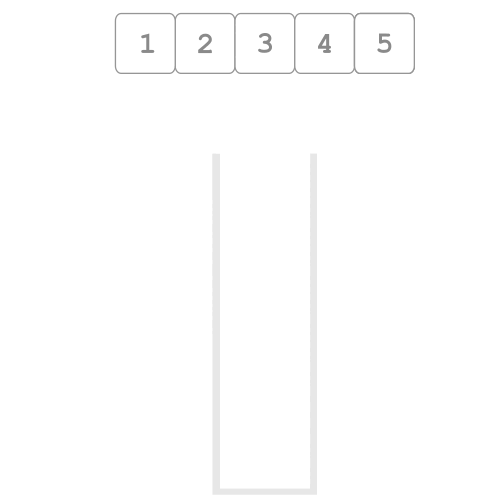

# Linear power

In [ ]:
# time: O(n); space: O(n)(call stack)
def power(x, n):
  if n==0: return 1
  return x*power(x, n-1)

power(2,5)

32

## Linear search

This algorithm has the same structure as the previous two, but now the lazy evaluation meets the short-circuiting of logical operations and the short-curcuiting wins!

In [ ]:
# time: O(n); space: O(n)(call stack)
def linear_search(arr, v):
  if not arr: return False
  return arr[-1]==v or linear_search(arr[:-1], v)

linear_search([1,2,3,4], 2)


True

## Factorial

```
Calculate factorial of a number.
```

In [ ]:
# time: O(n); space: O(n)(call stack)
def f(n) :
  if n==0: return 1
  return n * f(n-1)

f(5)

## Fibonacci

[509. Fibonacci Number](https://leetcode.com/problems/fibonacci-number/)

```
The Fibonacci numbers, commonly denoted F(n) form a sequence, called the Fibonacci sequence,
such that each number is the sum of the two preceding ones, starting from 0 and 1. That is,

F(0) = 0, F(1) = 1

F(n) = F(n - 1) + F(n - 2), for n > 1.

Given n, calculate F(n).
```

In [ ]:
# time: O(2F(n)-1=Phi^n); space: O(n)
def fib(n):
  if n==0 or n==1: return 1
  return fib(n-1) + fib(n-2)

fib(5)

8

### Time complexity calculation:

$$
\begin{align}
T(n) &= T(n-1)+T(n-2)+1, \\
T(0) &= 1
\end{align}
$$

This relation is almost the same as Fibonacci recursive relation. This type of recurrences are called **linear recurrences**.  

Let's search for solution of the form $a \cdot F(n) + b$ and find $a$ and $b$ that satisfy recurrence relation and the base case:

$$
a\cdot F(n)+b = a(F(n-1)+F(n-2)) +2\cdot b+1,
$$

that gives $b=-1$.

Base case:

$$
a \cdot 1 - 1 = 1,
$$

that gives $a=2$.

Numbers $T(n)=2 \cdot F(n)-1$ are called [Leonardo numbers](https://en.wikipedia.org/wiki/Leonardo_number).

Using asymptotics for Fibonacci numbers

$$
F(n) = \Theta\left( \phi^n \right),
$$

where $\phi \approx 1.61$ is the golden ratio, we get an estimate of the time complexity of our algorithm.

In [3]:
operations = 0
def fib(n):
  global operations
  operations += 1
  if n==0 or n==1: return 1
  return fib(n-1) + fib(n-2)

print("Fibonacci number : ", fib(11))
print("Number of recursive calls/operations :", operations)

Fibonacci number :  144
Number of recursive calls/operations : 287


In [ ]:
#@title ###Fibonacci tree
%%html

<div id="slide_0" style="max-width:750px; height:200px;">
<font face="helvetica" color="black" size="4">
Binary tree
</font><br>
<?xml version="1.0" encoding="UTF-8"?>
<svg width="146.3mm" height="173.2mm" version="1.1" viewBox="0 0 299.2 356.24" xmlns="http://www.w3.org/2000/svg" xmlns:cc="http://creativecommons.org/ns#" xmlns:dc="http://purl.org/dc/elements/1.1/" xmlns:ns32="http://www.iki.fi/pav/software/textext/" xmlns:rdf="http://www.w3.org/1999/02/22-rdf-syntax-ns#">
 <metadata>
  <rdf:RDF>
   <cc:Work rdf:about="">
    <dc:format>image/svg+xml</dc:format>
    <dc:type rdf:resource="http://purl.org/dc/dcmitype/StillImage"/>
    <dc:title/>
   </cc:Work>
  </rdf:RDF>
  <rdf:RDF>
   <cc:Work rdf:about="">
    <dc:title/>
   </cc:Work>
  </rdf:RDF>
 </metadata>
 <g transform="translate(-34.861 72.539)">
  <rect x="185.9" y="-68.485" width="23.833" height="23.833" ry="3.1527" style="fill-opacity:.99621;fill:#ffffff;opacity:.999;stroke-linecap:round;stroke-width:.656;stroke:#c3c3c3"/>
  <rect x="116.55" y="22.324" width="23.833" height="23.833" ry="3.1527" style="fill-opacity:.99621;fill:#ffffff;opacity:.999;stroke-linecap:round;stroke-width:.656;stroke:#c3c3c3"/>
  <rect x="256.36" y="22.182" width="23.833" height="23.833" ry="3.1527" style="fill-opacity:.99621;fill:#ffffff;opacity:.999;stroke-linecap:round;stroke-width:.656;stroke:#c3c3c3"/>
  <rect x="78.523" y="98.914" width="23.833" height="23.833" ry="3.1527" style="fill-opacity:.99621;fill:#ffffff;opacity:.999;stroke-linecap:round;stroke-width:.656;stroke:#c3c3c3"/>
  <rect x="152.32" y="98.914" width="23.833" height="23.833" ry="3.1527" style="fill-opacity:.99621;fill:#ffffff;opacity:.999;stroke-linecap:round;stroke-width:.656;stroke:#c3c3c3"/>
  <rect x="219.64" y="99.461" width="23.833" height="23.833" ry="3.1527" style="fill-opacity:.99621;fill:#ffffff;opacity:.999;stroke-linecap:round;stroke-width:.656;stroke:#c3c3c3"/>
  <rect x="292.63" y="99.408" width="23.833" height="23.833" ry="3.1527" style="fill-opacity:.99621;fill:#ffffff;opacity:.999;stroke-linecap:round;stroke-width:.656;stroke:#c3c3c3"/>
  <rect x="56.929" y="175.26" width="23.833" height="23.833" ry="3.1527" style="fill-opacity:.99621;fill:#ffffff;opacity:.999;stroke-linecap:round;stroke-width:.656;stroke:#c3c3c3"/>
  <rect x="98.778" y="175.51" width="23.833" height="23.833" ry="3.1527" style="fill-opacity:.99621;fill:#ffffff;opacity:.999;stroke-linecap:round;stroke-width:.656;stroke:#c3c3c3"/>
  <path d="m68.473 199.55-14.53 51.844" style="fill:none;stroke-opacity:.23106;stroke-width:.60862;stroke:#000000"/>
  <rect x="41.951" y="251.67" width="23.833" height="23.833" ry="3.1527" style="fill-opacity:.99621;fill:#ffffff;opacity:.999;stroke-linecap:round;stroke-width:.656;stroke:#c3c3c3"/>
  <rect x="70.769" y="251.81" width="23.833" height="23.833" ry="3.1527" style="fill-opacity:.99621;fill:#ffffff;opacity:.999;stroke-linecap:round;stroke-width:.656;stroke:#c3c3c3"/>
  <path d="m68.473 199.55 14.509 52.061" style="fill:none;stroke-opacity:.23106;stroke-width:.60862;stroke:#000000"/>
  <path d="m90.124 122.8-21.619 52.059" style="fill:none;stroke-opacity:.23106;stroke-width:.64138;stroke:#000000"/>
  <path d="m90.124 122.8 21.26 52.52" style="fill:none;stroke-opacity:.23106;stroke-width:.64138;stroke:#000000"/>
  <path d="m198.35-44.369-70.058 66.428" style="fill:none;stroke-opacity:.23106;stroke-width:.60862;stroke:#000000"/>
  <path d="m198.35-44.369 70.35 66.259" style="fill:none;stroke-opacity:.23106;stroke-width:.60862;stroke:#000000"/>
  <text x="644.54865" y="177.05048" style="font-family:'Courier New';font-size:11.663px;font-weight:bold;line-height:1.25;stroke-width:.29156" xml:space="preserve"><tspan x="644.54865" y="177.05048" style="fill-opacity:.54546;fill:#000000;stroke-width:.29156"/></text>
  <path d="m128.44 46.608-37.408 51.893" style="fill:none;stroke-opacity:.23106;stroke-width:.60862;stroke:#000000"/>
  <path d="m128.22 46.825 36.8 51.676" style="fill:none;stroke-opacity:.23106;stroke-width:.60862;stroke:#000000"/>
  <path d="m268.36 46.426-36.757 52.545" style="fill:none;stroke-opacity:.23106;stroke-width:.60862;stroke:#000000"/>
  <path d="m268.36 46.426 36.974 52.458" style="fill:none;stroke-opacity:.23106;stroke-width:.60862;stroke:#000000"/>
  <rect x="130.67" y="175.3" width="23.833" height="23.833" ry="3.1527" style="fill-opacity:.99621;fill:#ffffff;opacity:.999;stroke-linecap:round;stroke-width:.656;stroke:#c3c3c3"/>
  <rect x="172.52" y="175.55" width="23.833" height="23.833" ry="3.1527" style="fill-opacity:.99621;fill:#ffffff;opacity:.999;stroke-linecap:round;stroke-width:.656;stroke:#c3c3c3"/>
  <path d="m163.87 122.84-21.68 52.274" style="fill:none;stroke-opacity:.23106;stroke-width:.64138;stroke:#000000"/>
  <path d="m163.87 122.84 21.475 52.459" style="fill:none;stroke-opacity:.23106;stroke-width:.64138;stroke:#000000"/>
  <rect x="198.73" y="175.2" width="23.833" height="23.833" ry="3.1527" style="fill-opacity:.99621;fill:#ffffff;opacity:.999;stroke-linecap:round;stroke-width:.656;stroke:#c3c3c3"/>
  <rect x="241.61" y="175.33" width="23.833" height="23.833" ry="3.1527" style="fill-opacity:.99621;fill:#ffffff;opacity:.999;stroke-linecap:round;stroke-width:.656;stroke:#c3c3c3"/>
  <path d="m232 123.62-21.435 51.844" style="fill:none;stroke-opacity:.23106;stroke-width:.64138;stroke:#000000"/>
  <path d="m231.99 123.62 21.833 51.597" style="fill:none;stroke-opacity:.23106;stroke-width:.63411;stroke:#000000"/>
  <g transform="matrix(1.2404,0,0,1.2404,219.08,-61.191)" style="fill-opacity:.63636;fill:#000000" ns32:alignment="middle center" ns32:inkscapeversion="1.0" ns32:jacobian_sqrt="3.77952" ns32:pdfconverter="inkscape" ns32:preamble="C:\\Users\\User\\AppData\\Roaming\\inkscape\\extensions\\textext\\default_packages.tex" ns32:scale="2.834645669291339" ns32:texconverter="pdflatex" ns32:text="$$5 4 3 2 1 0$$" ns32:version="1.1.0">
   <g transform="translate(-291.18,-139.97)" style="fill-opacity:.63636;fill:#000000">
    <g style="fill-opacity:.63636;fill:#000000">
     <g transform="translate(271.81,146.6)" style="fill-opacity:.63636;fill:#000000">
      <path d="m4.4688-2c0-1.1875-0.8125-2.1875-1.8906-2.1875-0.46875 0-0.90625 0.15625-1.2656 0.51562v-1.9531c0.20312 0.0625 0.53125 0.125 0.84375 0.125 1.2344 0 1.9375-0.90625 1.9375-1.0312 0-0.0625-0.03125-0.10938-0.10938-0.10938 0 0-0.03125 0-0.078125 0.03125-0.20312 0.09375-0.6875 0.29688-1.3594 0.29688-0.39062 0-0.85938-0.078125-1.3281-0.28125-0.078125-0.03125-0.09375-0.03125-0.10938-0.03125-0.10938 0-0.10938 0.078125-0.10938 0.23438v2.9531c0 0.17188 0 0.25 0.14062 0.25 0.078125 0 0.09375-0.015625 0.14062-0.078125 0.10938-0.15625 0.46875-0.70312 1.2812-0.70312 0.51562 0 0.76562 0.45312 0.84375 0.64062 0.15625 0.375 0.1875 0.75 0.1875 1.25 0 0.35938 0 0.95312-0.25 1.375-0.23438 0.39062-0.60938 0.64062-1.0625 0.64062-0.71875 0-1.2969-0.53125-1.4688-1.1094 0.03125 0 0.0625 0.015625 0.17188 0.015625 0.32812 0 0.5-0.25 0.5-0.48438 0-0.25-0.17188-0.5-0.5-0.5-0.14062 0-0.48438 0.078125-0.48438 0.53125 0 0.85938 0.6875 1.8281 1.7969 1.8281 1.1562 0 2.1719-0.95312 2.1719-2.2188z" style="fill-opacity:.63636;fill:#000000"/>
     </g>
     <g transform="translate(215.64,220.26)" style="fill-opacity:.63636;fill:#000000">
      <path d="m2.9375-1.6406v0.85938c0 0.35938-0.03125 0.46875-0.76562 0.46875h-0.20312v0.3125c0.40625-0.03125 0.92188-0.03125 1.3438-0.03125s0.9375 0 1.3594 0.03125v-0.3125h-0.21875c-0.73438 0-0.75-0.10938-0.75-0.46875v-0.85938h0.98438v-0.3125h-0.98438v-4.5312c0-0.20312 0-0.26562-0.17188-0.26562-0.078125 0-0.10938 0-0.1875 0.125l-3.0625 4.6719v0.3125zm0.046875-0.3125h-2.4219l2.4219-3.7188z" style="fill-opacity:.63636;fill:#000000"/>
     </g>
     <g transform="translate(316.97,343.35)" style="fill-opacity:.63636;fill:#000000">
      <path d="m4.5781-3.1875c0-0.79688-0.046875-1.5938-0.39062-2.3281-0.45312-0.96875-1.2812-1.125-1.6875-1.125-0.60938 0-1.3281 0.26562-1.75 1.1875-0.3125 0.6875-0.35938 1.4688-0.35938 2.2656 0 0.75 0.03125 1.6406 0.45312 2.4062 0.42188 0.79688 1.1562 1 1.6406 1 0.53125 0 1.2969-0.20312 1.7344-1.1562 0.3125-0.6875 0.35938-1.4688 0.35938-2.25zm-2.0938 3.1875c-0.39062 0-0.98438-0.25-1.1562-1.2031-0.10938-0.59375-0.10938-1.5156-0.10938-2.1094 0-0.64062 0-1.2969 0.078125-1.8281 0.1875-1.1875 0.9375-1.2812 1.1875-1.2812 0.32812 0 0.98438 0.1875 1.1719 1.1719 0.10938 0.5625 0.10938 1.3125 0.10938 1.9375 0 0.75 0 1.4219-0.10938 2.0625-0.15625 0.95312-0.71875 1.25-1.1719 1.25z" style="fill-opacity:.63636;fill:#000000"/>
     </g>
     <g transform="translate(261.1,344.21)" style="fill-opacity:.63636;fill:#000000">
      <path d="m4.5781-3.1875c0-0.79688-0.046875-1.5938-0.39062-2.3281-0.45312-0.96875-1.2812-1.125-1.6875-1.125-0.60938 0-1.3281 0.26562-1.75 1.1875-0.3125 0.6875-0.35938 1.4688-0.35938 2.2656 0 0.75 0.03125 1.6406 0.45312 2.4062 0.42188 0.79688 1.1562 1 1.6406 1 0.53125 0 1.2969-0.20312 1.7344-1.1562 0.3125-0.6875 0.35938-1.4688 0.35938-2.25zm-2.0938 3.1875c-0.39062 0-0.98438-0.25-1.1562-1.2031-0.10938-0.59375-0.10938-1.5156-0.10938-2.1094 0-0.64062 0-1.2969 0.078125-1.8281 0.1875-1.1875 0.9375-1.2812 1.1875-1.2812 0.32812 0 0.98438 0.1875 1.1719 1.1719 0.10938 0.5625 0.10938 1.3125 0.10938 1.9375 0 0.75 0 1.4219-0.10938 2.0625-0.15625 0.95312-0.71875 1.25-1.1719 1.25z" style="fill-opacity:.63636;fill:#000000"/>
     </g>
     <g transform="translate(179.39,405.73)" style="fill-opacity:.63636;fill:#000000">
      <path d="m4.5781-3.1875c0-0.79688-0.046875-1.5938-0.39062-2.3281-0.45312-0.96875-1.2812-1.125-1.6875-1.125-0.60938 0-1.3281 0.26562-1.75 1.1875-0.3125 0.6875-0.35938 1.4688-0.35938 2.2656 0 0.75 0.03125 1.6406 0.45312 2.4062 0.42188 0.79688 1.1562 1 1.6406 1 0.53125 0 1.2969-0.20312 1.7344-1.1562 0.3125-0.6875 0.35938-1.4688 0.35938-2.25zm-2.0938 3.1875c-0.39062 0-0.98438-0.25-1.1562-1.2031-0.10938-0.59375-0.10938-1.5156-0.10938-2.1094 0-0.64062 0-1.2969 0.078125-1.8281 0.1875-1.1875 0.9375-1.2812 1.1875-1.2812 0.32812 0 0.98438 0.1875 1.1719 1.1719 0.10938 0.5625 0.10938 1.3125 0.10938 1.9375 0 0.75 0 1.4219-0.10938 2.0625-0.15625 0.95312-0.71875 1.25-1.1719 1.25z" style="fill-opacity:.63636;fill:#000000"/>
     </g>
    </g>
   </g>
  </g>
  <path d="m269.27 33.85c1.0079-0.32949 1.725-1.1823 1.725-2.1708 0-1.0079-1.0854-1.7056-2.2677-1.7056-1.2404 0-2.1902 0.73652-2.1902 1.6862 0 0.40702 0.27135 0.63961 0.63961 0.63961 0.36825 0 0.62022-0.27135 0.62022-0.63961 0-0.60084-0.58146-0.60084-0.7559-0.60084 0.36826-0.62022 1.1823-0.77528 1.6281-0.77528 0.52332 0 1.2017 0.27135 1.2017 1.3761 0 0.15506-0.0388 0.87219-0.34888 1.4149-0.36826 0.60084-0.79466 0.63961-1.1048 0.63961-0.0969 0.01938-0.38764 0.03876-0.48455 0.03876-0.0969 0.01938-0.17444 0.03876-0.17444 0.15506 0 0.13567 0.0775 0.13567 0.29073 0.13567h0.54269c1.0079 0 1.473 0.83343 1.473 2.0545 0 1.6862-0.85281 2.0351-1.3955 2.0351s-1.473-0.2132-1.8994-0.93034c0.42641 0.05815 0.81405-0.2132 0.81405-0.67837 0-0.44579-0.3295-0.69775-0.67837-0.69775-0.31011 0-0.69775 0.17444-0.69775 0.71714 0 1.1242 1.1435 1.9382 2.5003 1.9382 1.5118 0 2.636-1.1242 2.636-2.384 0-1.0079-0.79466-1.977-2.0739-2.2483z" style="fill-opacity:.63636;fill:#000000"/>
  <g transform="matrix(1.2404,0,0,1.2404,87.486,114.66)" style="fill-opacity:.63636;fill:#000000">
   <path d="m2.8906-3.5156c0.8125-0.26562 1.3906-0.95312 1.3906-1.75 0-0.8125-0.875-1.375-1.8281-1.375-1 0-1.7656 0.59375-1.7656 1.3594 0 0.32812 0.21875 0.51562 0.51562 0.51562s0.5-0.21875 0.5-0.51562c0-0.48438-0.46875-0.48438-0.60938-0.48438 0.29688-0.5 0.95312-0.625 1.3125-0.625 0.42188 0 0.96875 0.21875 0.96875 1.1094 0 0.125-0.03125 0.70312-0.28125 1.1406-0.29688 0.48438-0.64062 0.51562-0.89062 0.51562-0.078125 0.015625-0.3125 0.03125-0.39062 0.03125-0.078125 0.015625-0.14062 0.03125-0.14062 0.125 0 0.10938 0.0625 0.10938 0.23438 0.10938h0.4375c0.8125 0 1.1875 0.67188 1.1875 1.6562 0 1.3594-0.6875 1.6406-1.125 1.6406s-1.1875-0.17188-1.5312-0.75c0.34375 0.046875 0.65625-0.17188 0.65625-0.54688 0-0.35938-0.26562-0.5625-0.54688-0.5625-0.25 0-0.5625 0.14062-0.5625 0.57812 0 0.90625 0.92188 1.5625 2.0156 1.5625 1.2188 0 2.125-0.90625 2.125-1.9219 0-0.8125-0.64062-1.5938-1.6719-1.8125z" style="fill-opacity:.63636;fill:#000000"/>
  </g>
  <g transform="matrix(1.2404,0,0,1.2404,302.22,114.97)" style="fill-opacity:.63636;fill:#000000">
   <path d="m2.9375-6.375c0-0.25 0-0.26562-0.23438-0.26562-0.625 0.64062-1.5 0.64062-1.8125 0.64062v0.3125c0.20312 0 0.78125 0 1.2969-0.26562v5.1719c0 0.35938-0.03125 0.46875-0.92188 0.46875h-0.3125v0.3125c0.34375-0.03125 1.2031-0.03125 1.6094-0.03125 0.39062 0 1.2656 0 1.6094 0.03125v-0.3125h-0.3125c-0.90625 0-0.92188-0.10938-0.92188-0.46875z" style="fill-opacity:.63636;fill:#000000"/>
  </g>
  <g transform="matrix(1.2404,0,0,1.2404,207.69,191.3)" style="fill-opacity:.63636;fill:#000000">
   <path d="m2.9375-6.375c0-0.25 0-0.26562-0.23438-0.26562-0.625 0.64062-1.5 0.64062-1.8125 0.64062v0.3125c0.20312 0 0.78125 0 1.2969-0.26562v5.1719c0 0.35938-0.03125 0.46875-0.92188 0.46875h-0.3125v0.3125c0.34375-0.03125 1.2031-0.03125 1.6094-0.03125 0.39062 0 1.2656 0 1.6094 0.03125v-0.3125h-0.3125c-0.90625 0-0.92188-0.10938-0.92188-0.46875z" style="fill-opacity:.63636;fill:#000000"/>
  </g>
  <g transform="matrix(1.2404,0,0,1.2404,107.88,191.51)" style="fill-opacity:.63636;fill:#000000">
   <path d="m2.9375-6.375c0-0.25 0-0.26562-0.23438-0.26562-0.625 0.64062-1.5 0.64062-1.8125 0.64062v0.3125c0.20312 0 0.78125 0 1.2969-0.26562v5.1719c0 0.35938-0.03125 0.46875-0.92188 0.46875h-0.3125v0.3125c0.34375-0.03125 1.2031-0.03125 1.6094-0.03125 0.39062 0 1.2656 0 1.6094 0.03125v-0.3125h-0.3125c-0.90625 0-0.92188-0.10938-0.92188-0.46875z" style="fill-opacity:.63636;fill:#000000"/>
  </g>
  <g transform="matrix(1.2404,0,0,1.2404,139.95,191.57)" style="fill-opacity:.63636;fill:#000000">
   <path d="m2.9375-6.375c0-0.25 0-0.26562-0.23438-0.26562-0.625 0.64062-1.5 0.64062-1.8125 0.64062v0.3125c0.20312 0 0.78125 0 1.2969-0.26562v5.1719c0 0.35938-0.03125 0.46875-0.92188 0.46875h-0.3125v0.3125c0.34375-0.03125 1.2031-0.03125 1.6094-0.03125 0.39062 0 1.2656 0 1.6094 0.03125v-0.3125h-0.3125c-0.90625 0-0.92188-0.10938-0.92188-0.46875z" style="fill-opacity:.63636;fill:#000000"/>
  </g>
  <g transform="matrix(1.2404,0,0,1.2404,50.809,268.21)" style="fill-opacity:.63636;fill:#000000">
   <path d="m2.9375-6.375c0-0.25 0-0.26562-0.23438-0.26562-0.625 0.64062-1.5 0.64062-1.8125 0.64062v0.3125c0.20312 0 0.78125 0 1.2969-0.26562v5.1719c0 0.35938-0.03125 0.46875-0.92188 0.46875h-0.3125v0.3125c0.34375-0.03125 1.2031-0.03125 1.6094-0.03125 0.39062 0 1.2656 0 1.6094 0.03125v-0.3125h-0.3125c-0.90625 0-0.92188-0.10938-0.92188-0.46875z" style="fill-opacity:.63636;fill:#000000"/>
  </g>
  <g transform="matrix(1.2404,0,0,1.2404,229.83,117.35)" style="fill-opacity:.63636;fill:#000000">
   <path d="m0.35505-2.0264 1.0625-1.0312c1.5469-1.375 2.1406-1.9062 2.1406-2.9062 0-1.1406-0.89062-1.9375-2.1094-1.9375-1.125 0-1.8594 0.92188-1.8594 1.8125 0 0.54688 0.5 0.54688 0.53125 0.54688 0.17188 0 0.51562-0.10938 0.51562-0.53125 0-0.25-0.1875-0.51562-0.53125-0.51562-0.078125 0-0.09375 0-0.125 0.015625 0.21875-0.65625 0.76562-1.0156 1.3438-1.0156 0.90625 0 1.3281 0.8125 1.3281 1.625 0 0.79688-0.48438 1.5781-1.0469 2.2031l-1.9063 2.125c-0.10938 0.10938-0.10938 0.14062-0.10938 0.375h3.7031l0.26562-1.7344h-0.23438c-0.0625 0.29688-0.125 0.73438-0.23438 0.89062-0.0625 0.078125-0.71875 0.078125-0.9375 0.078125z" style="fill-opacity:.63636;fill:#000000"/>
  </g>
  <g transform="matrix(1.2404,0,0,1.2404,161.35,115.32)" style="fill-opacity:.63636;fill:#000000">
   <path d="m1.2656-0.76562 1.0625-1.0312c1.5469-1.375 2.1406-1.9062 2.1406-2.9062 0-1.1406-0.89062-1.9375-2.1094-1.9375-1.125 0-1.8594 0.92188-1.8594 1.8125 0 0.54688 0.5 0.54688 0.53125 0.54688 0.17188 0 0.51562-0.10938 0.51562-0.53125 0-0.25-0.1875-0.51562-0.53125-0.51562-0.078125 0-0.09375 0-0.125 0.015625 0.21875-0.65625 0.76562-1.0156 1.3438-1.0156 0.90625 0 1.3281 0.8125 1.3281 1.625 0 0.79688-0.48438 1.5781-1.0469 2.2031l-1.9062 2.125c-0.10938 0.10938-0.10938 0.14062-0.10938 0.375h3.7031l0.26562-1.7344h-0.23438c-0.0625 0.29688-0.125 0.73438-0.23438 0.89062-0.0625 0.078125-0.71875 0.078125-0.9375 0.078125z" style="fill-opacity:.63636;fill:#000000"/>
  </g>
  <g transform="matrix(1.2404,0,0,1.2404,66.039,191.01)" style="fill-opacity:.63636;fill:#000000">
   <path d="m1.2656-0.76562 1.0625-1.0312c1.5469-1.375 2.1406-1.9062 2.1406-2.9062 0-1.1406-0.89062-1.9375-2.1094-1.9375-1.125 0-1.8594 0.92188-1.8594 1.8125 0 0.54688 0.5 0.54688 0.53125 0.54688 0.17188 0 0.51562-0.10938 0.51562-0.53125 0-0.25-0.1875-0.51562-0.53125-0.51562-0.078125 0-0.09375 0-0.125 0.015625 0.21875-0.65625 0.76562-1.0156 1.3438-1.0156 0.90625 0 1.3281 0.8125 1.3281 1.625 0 0.79688-0.48438 1.5781-1.0469 2.2031l-1.9062 2.125c-0.10938 0.10938-0.10938 0.14062-0.10938 0.375h3.7031l0.26562-1.7344h-0.23438c-0.0625 0.29688-0.125 0.73438-0.23438 0.89062-0.0625 0.078125-0.71875 0.078125-0.9375 0.078125z" style="fill-opacity:.63636;fill:#000000"/>
  </g>
 </g>
</svg>

</div>

<div id="slide_1" style="max-width:750px; height:200px;">
<font face="helvetica" color="black" size="4">
Duplication
</font><br>
<?xml version="1.0" encoding="UTF-8"?>
<svg width="146.3mm" height="173.2mm" version="1.1" viewBox="0 0 299.2 356.24" xmlns="http://www.w3.org/2000/svg" xmlns:cc="http://creativecommons.org/ns#" xmlns:dc="http://purl.org/dc/elements/1.1/" xmlns:ns32="http://www.iki.fi/pav/software/textext/" xmlns:rdf="http://www.w3.org/1999/02/22-rdf-syntax-ns#">
 <metadata>
  <rdf:RDF>
   <cc:Work rdf:about="">
    <dc:format>image/svg+xml</dc:format>
    <dc:type rdf:resource="http://purl.org/dc/dcmitype/StillImage"/>
    <dc:title/>
   </cc:Work>
  </rdf:RDF>
  <rdf:RDF>
   <cc:Work rdf:about="">
    <dc:title/>
   </cc:Work>
  </rdf:RDF>
 </metadata>
 <g transform="translate(-34.861 72.539)">
  <rect x="185.9" y="-68.485" width="23.833" height="23.833" ry="3.1527" style="fill-opacity:.99621;fill:#ffffff;opacity:.999;stroke-linecap:round;stroke-width:.656;stroke:#c3c3c3"/>
  <rect x="116.55" y="22.324" width="23.833" height="23.833" ry="3.1527" style="fill-opacity:.99621;fill:#ffffff;opacity:.999;stroke-linecap:round;stroke-width:.656;stroke:#c3c3c3"/>
  <rect x="256.36" y="22.182" width="23.833" height="23.833" ry="3.1527" style="fill-opacity:.17045;fill:#00d300;opacity:.999;stroke-linecap:round;stroke-width:.656;stroke:#c3c3c3"/>
  <rect x="78.523" y="98.914" width="23.833" height="23.833" ry="3.1527" style="fill-opacity:.17045;fill:#00d300;opacity:.999;stroke-linecap:round;stroke-width:.656;stroke:#c3c3c3"/>
  <rect x="152.32" y="98.914" width="23.833" height="23.833" ry="3.1527" style="fill-opacity:.21212;fill:#ff00ff;opacity:.999;stroke-linecap:round;stroke-width:.656;stroke:#c3c3c3"/>
  <rect x="219.64" y="99.461" width="23.833" height="23.833" ry="3.1527" style="fill-opacity:.21212;fill:#ff00ff;opacity:.999;stroke-linecap:round;stroke-width:.656;stroke:#c3c3c3"/>
  <rect x="292.63" y="99.408" width="23.833" height="23.833" ry="3.1527" style="fill-opacity:.22727;fill:#00a9ff;opacity:.999;stroke-linecap:round;stroke-width:.656;stroke:#c3c3c3"/>
  <rect x="56.929" y="175.26" width="23.833" height="23.833" ry="3.1527" style="fill-opacity:.21212;fill:#ff00ff;opacity:.999;stroke-linecap:round;stroke-width:.656;stroke:#c3c3c3"/>
  <rect x="98.778" y="175.51" width="23.833" height="23.833" ry="3.1527" style="fill-opacity:.22727;fill:#00a9ff;opacity:.999;stroke-linecap:round;stroke-width:.656;stroke:#c3c3c3"/>
  <path d="m68.473 199.55-14.53 51.844" style="fill:none;stroke-opacity:.23106;stroke-width:.60862;stroke:#000000"/>
  <rect x="41.951" y="251.67" width="23.833" height="23.833" ry="3.1527" style="fill-opacity:.22727;fill:#00a9ff;opacity:.999;stroke-linecap:round;stroke-width:.656;stroke:#c3c3c3"/>
  <rect x="70.769" y="251.81" width="23.833" height="23.833" ry="3.1527" style="fill-opacity:.20076;fill:#000000;opacity:.999;stroke-linecap:round;stroke-width:.656;stroke:#c3c3c3"/>
  <path d="m68.473 199.55 14.509 52.061" style="fill:none;stroke-opacity:.23106;stroke-width:.60862;stroke:#000000"/>
  <path d="m90.124 122.8-21.619 52.059" style="fill:none;stroke-opacity:.23106;stroke-width:.64138;stroke:#000000"/>
  <path d="m90.124 122.8 21.26 52.52" style="fill:none;stroke-opacity:.23106;stroke-width:.64138;stroke:#000000"/>
  <path d="m198.35-44.369-70.058 66.428" style="fill:none;stroke-opacity:.23106;stroke-width:.60862;stroke:#000000"/>
  <path d="m198.35-44.369 70.35 66.259" style="fill:none;stroke-opacity:.23106;stroke-width:.60862;stroke:#000000"/>
  <text x="644.54865" y="177.05048" style="font-family:'Courier New';font-size:11.663px;font-weight:bold;line-height:1.25;stroke-width:.29156" xml:space="preserve"><tspan x="644.54865" y="177.05048" style="fill-opacity:.54546;fill:#000000;stroke-width:.29156"/></text>
  <path d="m128.44 46.608-37.408 51.893" style="fill:none;stroke-opacity:.23106;stroke-width:.60862;stroke:#000000"/>
  <path d="m128.22 46.825 36.8 51.676" style="fill:none;stroke-opacity:.23106;stroke-width:.60862;stroke:#000000"/>
  <path d="m268.36 46.426-36.757 52.545" style="fill:none;stroke-opacity:.23106;stroke-width:.60862;stroke:#000000"/>
  <path d="m268.36 46.426 36.974 52.458" style="fill:none;stroke-opacity:.23106;stroke-width:.60862;stroke:#000000"/>
  <rect x="130.67" y="175.3" width="23.833" height="23.833" ry="3.1527" style="fill-opacity:.22727;fill:#00a9ff;opacity:.999;stroke-linecap:round;stroke-width:.656;stroke:#c3c3c3"/>
  <rect x="172.52" y="175.55" width="23.833" height="23.833" ry="3.1527" style="fill-opacity:.20076;fill:#000000;opacity:.999;stroke-linecap:round;stroke-width:.656;stroke:#c3c3c3"/>
  <path d="m163.87 122.84-21.68 52.274" style="fill:none;stroke-opacity:.23106;stroke-width:.64138;stroke:#000000"/>
  <path d="m163.87 122.84 21.475 52.459" style="fill:none;stroke-opacity:.23106;stroke-width:.64138;stroke:#000000"/>
  <rect x="198.73" y="175.2" width="23.833" height="23.833" ry="3.1527" style="fill-opacity:.22727;fill:#00a9ff;opacity:.999;stroke-linecap:round;stroke-width:.656;stroke:#c3c3c3"/>
  <rect x="241.61" y="175.33" width="23.833" height="23.833" ry="3.1527" style="fill-opacity:.20076;fill:#000000;opacity:.999;stroke-linecap:round;stroke-width:.656;stroke:#c3c3c3"/>
  <path d="m232 123.62-21.435 51.844" style="fill:none;stroke-opacity:.23106;stroke-width:.64138;stroke:#000000"/>
  <path d="m231.99 123.62 21.833 51.597" style="fill:none;stroke-opacity:.23106;stroke-width:.63411;stroke:#000000"/>
  <g transform="matrix(1.2404,0,0,1.2404,219.08,-61.191)" style="fill-opacity:.63636;fill:#000000" ns32:alignment="middle center" ns32:inkscapeversion="1.0" ns32:jacobian_sqrt="3.77952" ns32:pdfconverter="inkscape" ns32:preamble="C:\\Users\\User\\AppData\\Roaming\\inkscape\\extensions\\textext\\default_packages.tex" ns32:scale="2.834645669291339" ns32:texconverter="pdflatex" ns32:text="$$5 4 3 2 1 0$$" ns32:version="1.1.0">
   <g transform="translate(-291.18,-139.97)" style="fill-opacity:.63636;fill:#000000">
    <g style="fill-opacity:.63636;fill:#000000">
     <g transform="translate(271.81,146.6)" style="fill-opacity:.63636;fill:#000000">
      <path d="m4.4688-2c0-1.1875-0.8125-2.1875-1.8906-2.1875-0.46875 0-0.90625 0.15625-1.2656 0.51562v-1.9531c0.20312 0.0625 0.53125 0.125 0.84375 0.125 1.2344 0 1.9375-0.90625 1.9375-1.0312 0-0.0625-0.03125-0.10938-0.10938-0.10938 0 0-0.03125 0-0.078125 0.03125-0.20312 0.09375-0.6875 0.29688-1.3594 0.29688-0.39062 0-0.85938-0.078125-1.3281-0.28125-0.078125-0.03125-0.09375-0.03125-0.10938-0.03125-0.10938 0-0.10938 0.078125-0.10938 0.23438v2.9531c0 0.17188 0 0.25 0.14062 0.25 0.078125 0 0.09375-0.015625 0.14062-0.078125 0.10938-0.15625 0.46875-0.70312 1.2812-0.70312 0.51562 0 0.76562 0.45312 0.84375 0.64062 0.15625 0.375 0.1875 0.75 0.1875 1.25 0 0.35938 0 0.95312-0.25 1.375-0.23438 0.39062-0.60938 0.64062-1.0625 0.64062-0.71875 0-1.2969-0.53125-1.4688-1.1094 0.03125 0 0.0625 0.015625 0.17188 0.015625 0.32812 0 0.5-0.25 0.5-0.48438 0-0.25-0.17188-0.5-0.5-0.5-0.14062 0-0.48438 0.078125-0.48438 0.53125 0 0.85938 0.6875 1.8281 1.7969 1.8281 1.1562 0 2.1719-0.95312 2.1719-2.2188z" style="fill-opacity:.63636;fill:#000000"/>
     </g>
     <g transform="translate(215.64,220.26)" style="fill-opacity:.63636;fill:#000000">
      <path d="m2.9375-1.6406v0.85938c0 0.35938-0.03125 0.46875-0.76562 0.46875h-0.20312v0.3125c0.40625-0.03125 0.92188-0.03125 1.3438-0.03125s0.9375 0 1.3594 0.03125v-0.3125h-0.21875c-0.73438 0-0.75-0.10938-0.75-0.46875v-0.85938h0.98438v-0.3125h-0.98438v-4.5312c0-0.20312 0-0.26562-0.17188-0.26562-0.078125 0-0.10938 0-0.1875 0.125l-3.0625 4.6719v0.3125zm0.046875-0.3125h-2.4219l2.4219-3.7188z" style="fill-opacity:.63636;fill:#000000"/>
     </g>
     <g transform="translate(316.97,343.35)" style="fill-opacity:.63636;fill:#000000">
      <path d="m4.5781-3.1875c0-0.79688-0.046875-1.5938-0.39062-2.3281-0.45312-0.96875-1.2812-1.125-1.6875-1.125-0.60938 0-1.3281 0.26562-1.75 1.1875-0.3125 0.6875-0.35938 1.4688-0.35938 2.2656 0 0.75 0.03125 1.6406 0.45312 2.4062 0.42188 0.79688 1.1562 1 1.6406 1 0.53125 0 1.2969-0.20312 1.7344-1.1562 0.3125-0.6875 0.35938-1.4688 0.35938-2.25zm-2.0938 3.1875c-0.39062 0-0.98438-0.25-1.1562-1.2031-0.10938-0.59375-0.10938-1.5156-0.10938-2.1094 0-0.64062 0-1.2969 0.078125-1.8281 0.1875-1.1875 0.9375-1.2812 1.1875-1.2812 0.32812 0 0.98438 0.1875 1.1719 1.1719 0.10938 0.5625 0.10938 1.3125 0.10938 1.9375 0 0.75 0 1.4219-0.10938 2.0625-0.15625 0.95312-0.71875 1.25-1.1719 1.25z" style="fill-opacity:.63636;fill:#000000"/>
     </g>
     <g transform="translate(261.1,344.21)" style="fill-opacity:.63636;fill:#000000">
      <path d="m4.5781-3.1875c0-0.79688-0.046875-1.5938-0.39062-2.3281-0.45312-0.96875-1.2812-1.125-1.6875-1.125-0.60938 0-1.3281 0.26562-1.75 1.1875-0.3125 0.6875-0.35938 1.4688-0.35938 2.2656 0 0.75 0.03125 1.6406 0.45312 2.4062 0.42188 0.79688 1.1562 1 1.6406 1 0.53125 0 1.2969-0.20312 1.7344-1.1562 0.3125-0.6875 0.35938-1.4688 0.35938-2.25zm-2.0938 3.1875c-0.39062 0-0.98438-0.25-1.1562-1.2031-0.10938-0.59375-0.10938-1.5156-0.10938-2.1094 0-0.64062 0-1.2969 0.078125-1.8281 0.1875-1.1875 0.9375-1.2812 1.1875-1.2812 0.32812 0 0.98438 0.1875 1.1719 1.1719 0.10938 0.5625 0.10938 1.3125 0.10938 1.9375 0 0.75 0 1.4219-0.10938 2.0625-0.15625 0.95312-0.71875 1.25-1.1719 1.25z" style="fill-opacity:.63636;fill:#000000"/>
     </g>
     <g transform="translate(179.39,405.73)" style="fill-opacity:.63636;fill:#000000">
      <path d="m4.5781-3.1875c0-0.79688-0.046875-1.5938-0.39062-2.3281-0.45312-0.96875-1.2812-1.125-1.6875-1.125-0.60938 0-1.3281 0.26562-1.75 1.1875-0.3125 0.6875-0.35938 1.4688-0.35938 2.2656 0 0.75 0.03125 1.6406 0.45312 2.4062 0.42188 0.79688 1.1562 1 1.6406 1 0.53125 0 1.2969-0.20312 1.7344-1.1562 0.3125-0.6875 0.35938-1.4688 0.35938-2.25zm-2.0938 3.1875c-0.39062 0-0.98438-0.25-1.1562-1.2031-0.10938-0.59375-0.10938-1.5156-0.10938-2.1094 0-0.64062 0-1.2969 0.078125-1.8281 0.1875-1.1875 0.9375-1.2812 1.1875-1.2812 0.32812 0 0.98438 0.1875 1.1719 1.1719 0.10938 0.5625 0.10938 1.3125 0.10938 1.9375 0 0.75 0 1.4219-0.10938 2.0625-0.15625 0.95312-0.71875 1.25-1.1719 1.25z" style="fill-opacity:.63636;fill:#000000"/>
     </g>
    </g>
   </g>
  </g>
  <path d="m269.27 33.85c1.0079-0.32949 1.725-1.1823 1.725-2.1708 0-1.0079-1.0854-1.7056-2.2677-1.7056-1.2404 0-2.1902 0.73652-2.1902 1.6862 0 0.40702 0.27135 0.63961 0.63961 0.63961 0.36825 0 0.62022-0.27135 0.62022-0.63961 0-0.60084-0.58146-0.60084-0.7559-0.60084 0.36826-0.62022 1.1823-0.77528 1.6281-0.77528 0.52332 0 1.2017 0.27135 1.2017 1.3761 0 0.15506-0.0388 0.87219-0.34888 1.4149-0.36826 0.60084-0.79466 0.63961-1.1048 0.63961-0.0969 0.01938-0.38764 0.03876-0.48455 0.03876-0.0969 0.01938-0.17444 0.03876-0.17444 0.15506 0 0.13567 0.0775 0.13567 0.29073 0.13567h0.54269c1.0079 0 1.473 0.83343 1.473 2.0545 0 1.6862-0.85281 2.0351-1.3955 2.0351s-1.473-0.2132-1.8994-0.93034c0.42641 0.05815 0.81405-0.2132 0.81405-0.67837 0-0.44579-0.3295-0.69775-0.67837-0.69775-0.31011 0-0.69775 0.17444-0.69775 0.71714 0 1.1242 1.1435 1.9382 2.5003 1.9382 1.5118 0 2.636-1.1242 2.636-2.384 0-1.0079-0.79466-1.977-2.0739-2.2483z" style="fill-opacity:.63636;fill:#000000"/>
  <g transform="matrix(1.2404,0,0,1.2404,87.486,114.66)" style="fill-opacity:.63636;fill:#000000">
   <path d="m2.8906-3.5156c0.8125-0.26562 1.3906-0.95312 1.3906-1.75 0-0.8125-0.875-1.375-1.8281-1.375-1 0-1.7656 0.59375-1.7656 1.3594 0 0.32812 0.21875 0.51562 0.51562 0.51562s0.5-0.21875 0.5-0.51562c0-0.48438-0.46875-0.48438-0.60938-0.48438 0.29688-0.5 0.95312-0.625 1.3125-0.625 0.42188 0 0.96875 0.21875 0.96875 1.1094 0 0.125-0.03125 0.70312-0.28125 1.1406-0.29688 0.48438-0.64062 0.51562-0.89062 0.51562-0.078125 0.015625-0.3125 0.03125-0.39062 0.03125-0.078125 0.015625-0.14062 0.03125-0.14062 0.125 0 0.10938 0.0625 0.10938 0.23438 0.10938h0.4375c0.8125 0 1.1875 0.67188 1.1875 1.6562 0 1.3594-0.6875 1.6406-1.125 1.6406s-1.1875-0.17188-1.5312-0.75c0.34375 0.046875 0.65625-0.17188 0.65625-0.54688 0-0.35938-0.26562-0.5625-0.54688-0.5625-0.25 0-0.5625 0.14062-0.5625 0.57812 0 0.90625 0.92188 1.5625 2.0156 1.5625 1.2188 0 2.125-0.90625 2.125-1.9219 0-0.8125-0.64062-1.5938-1.6719-1.8125z" style="fill-opacity:.63636;fill:#000000"/>
  </g>
  <g transform="matrix(1.2404,0,0,1.2404,302.22,114.97)" style="fill-opacity:.63636;fill:#000000">
   <path d="m2.9375-6.375c0-0.25 0-0.26562-0.23438-0.26562-0.625 0.64062-1.5 0.64062-1.8125 0.64062v0.3125c0.20312 0 0.78125 0 1.2969-0.26562v5.1719c0 0.35938-0.03125 0.46875-0.92188 0.46875h-0.3125v0.3125c0.34375-0.03125 1.2031-0.03125 1.6094-0.03125 0.39062 0 1.2656 0 1.6094 0.03125v-0.3125h-0.3125c-0.90625 0-0.92188-0.10938-0.92188-0.46875z" style="fill-opacity:.63636;fill:#000000"/>
  </g>
  <g transform="matrix(1.2404,0,0,1.2404,207.69,191.3)" style="fill-opacity:.63636;fill:#000000">
   <path d="m2.9375-6.375c0-0.25 0-0.26562-0.23438-0.26562-0.625 0.64062-1.5 0.64062-1.8125 0.64062v0.3125c0.20312 0 0.78125 0 1.2969-0.26562v5.1719c0 0.35938-0.03125 0.46875-0.92188 0.46875h-0.3125v0.3125c0.34375-0.03125 1.2031-0.03125 1.6094-0.03125 0.39062 0 1.2656 0 1.6094 0.03125v-0.3125h-0.3125c-0.90625 0-0.92188-0.10938-0.92188-0.46875z" style="fill-opacity:.63636;fill:#000000"/>
  </g>
  <g transform="matrix(1.2404,0,0,1.2404,107.88,191.51)" style="fill-opacity:.63636;fill:#000000">
   <path d="m2.9375-6.375c0-0.25 0-0.26562-0.23438-0.26562-0.625 0.64062-1.5 0.64062-1.8125 0.64062v0.3125c0.20312 0 0.78125 0 1.2969-0.26562v5.1719c0 0.35938-0.03125 0.46875-0.92188 0.46875h-0.3125v0.3125c0.34375-0.03125 1.2031-0.03125 1.6094-0.03125 0.39062 0 1.2656 0 1.6094 0.03125v-0.3125h-0.3125c-0.90625 0-0.92188-0.10938-0.92188-0.46875z" style="fill-opacity:.63636;fill:#000000"/>
  </g>
  <g transform="matrix(1.2404,0,0,1.2404,139.95,191.57)" style="fill-opacity:.63636;fill:#000000">
   <path d="m2.9375-6.375c0-0.25 0-0.26562-0.23438-0.26562-0.625 0.64062-1.5 0.64062-1.8125 0.64062v0.3125c0.20312 0 0.78125 0 1.2969-0.26562v5.1719c0 0.35938-0.03125 0.46875-0.92188 0.46875h-0.3125v0.3125c0.34375-0.03125 1.2031-0.03125 1.6094-0.03125 0.39062 0 1.2656 0 1.6094 0.03125v-0.3125h-0.3125c-0.90625 0-0.92188-0.10938-0.92188-0.46875z" style="fill-opacity:.63636;fill:#000000"/>
  </g>
  <g transform="matrix(1.2404,0,0,1.2404,50.809,268.21)" style="fill-opacity:.63636;fill:#000000">
   <path d="m2.9375-6.375c0-0.25 0-0.26562-0.23438-0.26562-0.625 0.64062-1.5 0.64062-1.8125 0.64062v0.3125c0.20312 0 0.78125 0 1.2969-0.26562v5.1719c0 0.35938-0.03125 0.46875-0.92188 0.46875h-0.3125v0.3125c0.34375-0.03125 1.2031-0.03125 1.6094-0.03125 0.39062 0 1.2656 0 1.6094 0.03125v-0.3125h-0.3125c-0.90625 0-0.92188-0.10938-0.92188-0.46875z" style="fill-opacity:.63636;fill:#000000"/>
  </g>
  <g transform="matrix(1.2404,0,0,1.2404,229.83,117.35)" style="fill-opacity:.63636;fill:#000000">
   <path d="m0.35505-2.0264 1.0625-1.0312c1.5469-1.375 2.1406-1.9062 2.1406-2.9062 0-1.1406-0.89062-1.9375-2.1094-1.9375-1.125 0-1.8594 0.92188-1.8594 1.8125 0 0.54688 0.5 0.54688 0.53125 0.54688 0.17188 0 0.51562-0.10938 0.51562-0.53125 0-0.25-0.1875-0.51562-0.53125-0.51562-0.078125 0-0.09375 0-0.125 0.015625 0.21875-0.65625 0.76562-1.0156 1.3438-1.0156 0.90625 0 1.3281 0.8125 1.3281 1.625 0 0.79688-0.48438 1.5781-1.0469 2.2031l-1.9063 2.125c-0.10938 0.10938-0.10938 0.14062-0.10938 0.375h3.7031l0.26562-1.7344h-0.23438c-0.0625 0.29688-0.125 0.73438-0.23438 0.89062-0.0625 0.078125-0.71875 0.078125-0.9375 0.078125z" style="fill-opacity:.63636;fill:#000000"/>
  </g>
  <g transform="matrix(1.2404,0,0,1.2404,161.35,115.32)" style="fill-opacity:.63636;fill:#000000">
   <path d="m1.2656-0.76562 1.0625-1.0312c1.5469-1.375 2.1406-1.9062 2.1406-2.9062 0-1.1406-0.89062-1.9375-2.1094-1.9375-1.125 0-1.8594 0.92188-1.8594 1.8125 0 0.54688 0.5 0.54688 0.53125 0.54688 0.17188 0 0.51562-0.10938 0.51562-0.53125 0-0.25-0.1875-0.51562-0.53125-0.51562-0.078125 0-0.09375 0-0.125 0.015625 0.21875-0.65625 0.76562-1.0156 1.3438-1.0156 0.90625 0 1.3281 0.8125 1.3281 1.625 0 0.79688-0.48438 1.5781-1.0469 2.2031l-1.9062 2.125c-0.10938 0.10938-0.10938 0.14062-0.10938 0.375h3.7031l0.26562-1.7344h-0.23438c-0.0625 0.29688-0.125 0.73438-0.23438 0.89062-0.0625 0.078125-0.71875 0.078125-0.9375 0.078125z" style="fill-opacity:.63636;fill:#000000"/>
  </g>
  <g transform="matrix(1.2404,0,0,1.2404,66.039,191.01)" style="fill-opacity:.63636;fill:#000000">
   <path d="m1.2656-0.76562 1.0625-1.0312c1.5469-1.375 2.1406-1.9062 2.1406-2.9062 0-1.1406-0.89062-1.9375-2.1094-1.9375-1.125 0-1.8594 0.92188-1.8594 1.8125 0 0.54688 0.5 0.54688 0.53125 0.54688 0.17188 0 0.51562-0.10938 0.51562-0.53125 0-0.25-0.1875-0.51562-0.53125-0.51562-0.078125 0-0.09375 0-0.125 0.015625 0.21875-0.65625 0.76562-1.0156 1.3438-1.0156 0.90625 0 1.3281 0.8125 1.3281 1.625 0 0.79688-0.48438 1.5781-1.0469 2.2031l-1.9062 2.125c-0.10938 0.10938-0.10938 0.14062-0.10938 0.375h3.7031l0.26562-1.7344h-0.23438c-0.0625 0.29688-0.125 0.73438-0.23438 0.89062-0.0625 0.078125-0.71875 0.078125-0.9375 0.078125z" style="fill-opacity:.63636;fill:#000000"/>
  </g>
 </g>
</svg>

</div>

<div id="slide_2" style="max-width:750px; height:200px;">
<font face="helvetica" color="black" size="4">
No duplication with memoization
</font><br>
<?xml version="1.0" encoding="UTF-8"?>
<svg width="146.3mm" height="173.2mm" version="1.1" viewBox="0 0 299.2 356.24" xmlns="http://www.w3.org/2000/svg" xmlns:cc="http://creativecommons.org/ns#" xmlns:dc="http://purl.org/dc/elements/1.1/" xmlns:ns32="http://www.iki.fi/pav/software/textext/" xmlns:rdf="http://www.w3.org/1999/02/22-rdf-syntax-ns#">
 <metadata>
  <rdf:RDF>
   <cc:Work rdf:about="">
    <dc:format>image/svg+xml</dc:format>
    <dc:type rdf:resource="http://purl.org/dc/dcmitype/StillImage"/>
    <dc:title/>
   </cc:Work>
  </rdf:RDF>
  <rdf:RDF>
   <cc:Work rdf:about="">
    <dc:title/>
   </cc:Work>
  </rdf:RDF>
 </metadata>
 <g transform="translate(-34.861 72.539)">
  <rect x="185.9" y="-68.485" width="23.833" height="23.833" ry="3.1527" style="fill-opacity:.99621;fill:#ffffff;opacity:.999;stroke-linecap:round;stroke-width:.656;stroke:#c3c3c3"/>
  <rect x="116.55" y="22.324" width="23.833" height="23.833" ry="3.1527" style="fill-opacity:.99621;fill:#ffffff;opacity:.999;stroke-linecap:round;stroke-width:.656;stroke:#c3c3c3"/>
  <rect x="256.36" y="22.182" width="23.833" height="23.833" ry="3.1527" style="fill-opacity:.17045;fill:#00d300;opacity:.999;stroke-linecap:round;stroke-width:.656;stroke:#c3c3c3"/>
  <rect x="78.523" y="98.914" width="23.833" height="23.833" ry="3.1527" style="fill-opacity:.17045;fill:#00d300;opacity:.999;stroke-linecap:round;stroke-width:.656;stroke:#c3c3c3"/>
  <rect x="152.32" y="98.914" width="23.833" height="23.833" ry="3.1527" style="fill-opacity:.21212;fill:#ff00ff;opacity:.999;stroke-linecap:round;stroke-width:.656;stroke:#c3c3c3"/>
  <rect x="56.929" y="175.26" width="23.833" height="23.833" ry="3.1527" style="fill-opacity:.21212;fill:#ff00ff;opacity:.999;stroke-linecap:round;stroke-width:.656;stroke:#c3c3c3"/>
  <rect x="98.778" y="175.51" width="23.833" height="23.833" ry="3.1527" style="fill-opacity:.22727;fill:#00a9ff;opacity:.999;stroke-linecap:round;stroke-width:.656;stroke:#c3c3c3"/>
  <path d="m68.473 199.55-14.53 51.844" style="fill:none;stroke-opacity:.23106;stroke-width:.60862;stroke:#000000"/>
  <rect x="41.951" y="251.67" width="23.833" height="23.833" ry="3.1527" style="fill-opacity:.22727;fill:#00a9ff;opacity:.999;stroke-linecap:round;stroke-width:.656;stroke:#c3c3c3"/>
  <rect x="70.769" y="251.81" width="23.833" height="23.833" ry="3.1527" style="fill-opacity:.20076;fill:#000000;opacity:.999;stroke-linecap:round;stroke-width:.656;stroke:#c3c3c3"/>
  <path d="m68.473 199.55 14.509 52.061" style="fill:none;stroke-opacity:.23106;stroke-width:.60862;stroke:#000000"/>
  <path d="m90.124 122.8-21.619 52.059" style="fill:none;stroke-opacity:.23106;stroke-width:.64138;stroke:#000000"/>
  <path d="m90.124 122.8 21.26 52.52" style="fill:none;stroke-opacity:.23106;stroke-width:.64138;stroke:#000000"/>
  <path d="m198.35-44.369-70.058 66.428" style="fill:none;stroke-opacity:.23106;stroke-width:.60862;stroke:#000000"/>
  <path d="m198.35-44.369 70.35 66.259" style="fill:none;stroke-opacity:.23106;stroke-width:.60862;stroke:#000000"/>
  <text x="644.54865" y="177.05048" style="font-family:'Courier New';font-size:11.663px;font-weight:bold;line-height:1.25;stroke-width:.29156" xml:space="preserve"><tspan x="644.54865" y="177.05048" style="fill-opacity:.54546;fill:#000000;stroke-width:.29156"/></text>
  <path d="m128.44 46.608-37.408 51.893" style="fill:none;stroke-opacity:.23106;stroke-width:.60862;stroke:#000000"/>
  <path d="m128.22 46.825 36.8 51.676" style="fill:none;stroke-opacity:.23106;stroke-width:.60862;stroke:#000000"/>
  <g transform="matrix(1.2404,0,0,1.2404,219.08,-61.191)" style="fill-opacity:.63636;fill:#000000" ns32:alignment="middle center" ns32:inkscapeversion="1.0" ns32:jacobian_sqrt="3.77952" ns32:pdfconverter="inkscape" ns32:preamble="C:\\Users\\User\\AppData\\Roaming\\inkscape\\extensions\\textext\\default_packages.tex" ns32:scale="2.834645669291339" ns32:texconverter="pdflatex" ns32:text="$$5 4 3 2 1 0$$" ns32:version="1.1.0">
   <g transform="translate(-291.18,-139.97)" style="fill-opacity:.63636;fill:#000000">
    <g style="fill-opacity:.63636;fill:#000000">
     <g transform="translate(271.81,146.6)" style="fill-opacity:.63636;fill:#000000">
      <path d="m4.4688-2c0-1.1875-0.8125-2.1875-1.8906-2.1875-0.46875 0-0.90625 0.15625-1.2656 0.51562v-1.9531c0.20312 0.0625 0.53125 0.125 0.84375 0.125 1.2344 0 1.9375-0.90625 1.9375-1.0312 0-0.0625-0.03125-0.10938-0.10938-0.10938 0 0-0.03125 0-0.078125 0.03125-0.20312 0.09375-0.6875 0.29688-1.3594 0.29688-0.39062 0-0.85938-0.078125-1.3281-0.28125-0.078125-0.03125-0.09375-0.03125-0.10938-0.03125-0.10938 0-0.10938 0.078125-0.10938 0.23438v2.9531c0 0.17188 0 0.25 0.14062 0.25 0.078125 0 0.09375-0.015625 0.14062-0.078125 0.10938-0.15625 0.46875-0.70312 1.2812-0.70312 0.51562 0 0.76562 0.45312 0.84375 0.64062 0.15625 0.375 0.1875 0.75 0.1875 1.25 0 0.35938 0 0.95312-0.25 1.375-0.23438 0.39062-0.60938 0.64062-1.0625 0.64062-0.71875 0-1.2969-0.53125-1.4688-1.1094 0.03125 0 0.0625 0.015625 0.17188 0.015625 0.32812 0 0.5-0.25 0.5-0.48438 0-0.25-0.17188-0.5-0.5-0.5-0.14062 0-0.48438 0.078125-0.48438 0.53125 0 0.85938 0.6875 1.8281 1.7969 1.8281 1.1562 0 2.1719-0.95312 2.1719-2.2188z" style="fill-opacity:.63636;fill:#000000"/>
     </g>
     <g transform="translate(215.64,220.26)" style="fill-opacity:.63636;fill:#000000">
      <path d="m2.9375-1.6406v0.85938c0 0.35938-0.03125 0.46875-0.76562 0.46875h-0.20312v0.3125c0.40625-0.03125 0.92188-0.03125 1.3438-0.03125s0.9375 0 1.3594 0.03125v-0.3125h-0.21875c-0.73438 0-0.75-0.10938-0.75-0.46875v-0.85938h0.98438v-0.3125h-0.98438v-4.5312c0-0.20312 0-0.26562-0.17188-0.26562-0.078125 0-0.10938 0-0.1875 0.125l-3.0625 4.6719v0.3125zm0.046875-0.3125h-2.4219l2.4219-3.7188z" style="fill-opacity:.63636;fill:#000000"/>
     </g>
     <g transform="translate(179.39,405.73)" style="fill-opacity:.63636;fill:#000000">
      <path d="m4.5781-3.1875c0-0.79688-0.046875-1.5938-0.39062-2.3281-0.45312-0.96875-1.2812-1.125-1.6875-1.125-0.60938 0-1.3281 0.26562-1.75 1.1875-0.3125 0.6875-0.35938 1.4688-0.35938 2.2656 0 0.75 0.03125 1.6406 0.45312 2.4062 0.42188 0.79688 1.1562 1 1.6406 1 0.53125 0 1.2969-0.20312 1.7344-1.1562 0.3125-0.6875 0.35938-1.4688 0.35938-2.25zm-2.0938 3.1875c-0.39062 0-0.98438-0.25-1.1562-1.2031-0.10938-0.59375-0.10938-1.5156-0.10938-2.1094 0-0.64062 0-1.2969 0.078125-1.8281 0.1875-1.1875 0.9375-1.2812 1.1875-1.2812 0.32812 0 0.98438 0.1875 1.1719 1.1719 0.10938 0.5625 0.10938 1.3125 0.10938 1.9375 0 0.75 0 1.4219-0.10938 2.0625-0.15625 0.95312-0.71875 1.25-1.1719 1.25z" style="fill-opacity:.63636;fill:#000000"/>
     </g>
    </g>
   </g>
  </g>
  <path d="m269.27 33.85c1.0079-0.32949 1.725-1.1823 1.725-2.1708 0-1.0079-1.0854-1.7056-2.2677-1.7056-1.2404 0-2.1902 0.73652-2.1902 1.6862 0 0.40702 0.27135 0.63961 0.63961 0.63961 0.36825 0 0.62022-0.27135 0.62022-0.63961 0-0.60084-0.58146-0.60084-0.7559-0.60084 0.36826-0.62022 1.1823-0.77528 1.6281-0.77528 0.52332 0 1.2017 0.27135 1.2017 1.3761 0 0.15506-0.0388 0.87219-0.34888 1.4149-0.36826 0.60084-0.79466 0.63961-1.1048 0.63961-0.0969 0.01938-0.38764 0.03876-0.48455 0.03876-0.0969 0.01938-0.17444 0.03876-0.17444 0.15506 0 0.13567 0.0775 0.13567 0.29073 0.13567h0.54269c1.0079 0 1.473 0.83343 1.473 2.0545 0 1.6862-0.85281 2.0351-1.3955 2.0351s-1.473-0.2132-1.8994-0.93034c0.42641 0.05815 0.81405-0.2132 0.81405-0.67837 0-0.44579-0.3295-0.69775-0.67837-0.69775-0.31011 0-0.69775 0.17444-0.69775 0.71714 0 1.1242 1.1435 1.9382 2.5003 1.9382 1.5118 0 2.636-1.1242 2.636-2.384 0-1.0079-0.79466-1.977-2.0739-2.2483z" style="fill-opacity:.63636;fill:#000000"/>
  <g transform="matrix(1.2404,0,0,1.2404,87.486,114.66)" style="fill-opacity:.63636;fill:#000000">
   <path d="m2.8906-3.5156c0.8125-0.26562 1.3906-0.95312 1.3906-1.75 0-0.8125-0.875-1.375-1.8281-1.375-1 0-1.7656 0.59375-1.7656 1.3594 0 0.32812 0.21875 0.51562 0.51562 0.51562s0.5-0.21875 0.5-0.51562c0-0.48438-0.46875-0.48438-0.60938-0.48438 0.29688-0.5 0.95312-0.625 1.3125-0.625 0.42188 0 0.96875 0.21875 0.96875 1.1094 0 0.125-0.03125 0.70312-0.28125 1.1406-0.29688 0.48438-0.64062 0.51562-0.89062 0.51562-0.078125 0.015625-0.3125 0.03125-0.39062 0.03125-0.078125 0.015625-0.14062 0.03125-0.14062 0.125 0 0.10938 0.0625 0.10938 0.23438 0.10938h0.4375c0.8125 0 1.1875 0.67188 1.1875 1.6562 0 1.3594-0.6875 1.6406-1.125 1.6406s-1.1875-0.17188-1.5312-0.75c0.34375 0.046875 0.65625-0.17188 0.65625-0.54688 0-0.35938-0.26562-0.5625-0.54688-0.5625-0.25 0-0.5625 0.14062-0.5625 0.57812 0 0.90625 0.92188 1.5625 2.0156 1.5625 1.2188 0 2.125-0.90625 2.125-1.9219 0-0.8125-0.64062-1.5938-1.6719-1.8125z" style="fill-opacity:.63636;fill:#000000"/>
  </g>
  <g transform="matrix(1.2404,0,0,1.2404,107.88,191.51)" style="fill-opacity:.63636;fill:#000000">
   <path d="m2.9375-6.375c0-0.25 0-0.26562-0.23438-0.26562-0.625 0.64062-1.5 0.64062-1.8125 0.64062v0.3125c0.20312 0 0.78125 0 1.2969-0.26562v5.1719c0 0.35938-0.03125 0.46875-0.92188 0.46875h-0.3125v0.3125c0.34375-0.03125 1.2031-0.03125 1.6094-0.03125 0.39062 0 1.2656 0 1.6094 0.03125v-0.3125h-0.3125c-0.90625 0-0.92188-0.10938-0.92188-0.46875z" style="fill-opacity:.63636;fill:#000000"/>
  </g>
  <g transform="matrix(1.2404,0,0,1.2404,50.809,268.21)" style="fill-opacity:.63636;fill:#000000">
   <path d="m2.9375-6.375c0-0.25 0-0.26562-0.23438-0.26562-0.625 0.64062-1.5 0.64062-1.8125 0.64062v0.3125c0.20312 0 0.78125 0 1.2969-0.26562v5.1719c0 0.35938-0.03125 0.46875-0.92188 0.46875h-0.3125v0.3125c0.34375-0.03125 1.2031-0.03125 1.6094-0.03125 0.39062 0 1.2656 0 1.6094 0.03125v-0.3125h-0.3125c-0.90625 0-0.92188-0.10938-0.92188-0.46875z" style="fill-opacity:.63636;fill:#000000"/>
  </g>
  <g transform="matrix(1.2404,0,0,1.2404,161.35,115.32)" style="fill-opacity:.63636;fill:#000000">
   <path d="m1.2656-0.76562 1.0625-1.0312c1.5469-1.375 2.1406-1.9062 2.1406-2.9062 0-1.1406-0.89062-1.9375-2.1094-1.9375-1.125 0-1.8594 0.92188-1.8594 1.8125 0 0.54688 0.5 0.54688 0.53125 0.54688 0.17188 0 0.51562-0.10938 0.51562-0.53125 0-0.25-0.1875-0.51562-0.53125-0.51562-0.078125 0-0.09375 0-0.125 0.015625 0.21875-0.65625 0.76562-1.0156 1.3438-1.0156 0.90625 0 1.3281 0.8125 1.3281 1.625 0 0.79688-0.48438 1.5781-1.0469 2.2031l-1.9062 2.125c-0.10938 0.10938-0.10938 0.14062-0.10938 0.375h3.7031l0.26562-1.7344h-0.23438c-0.0625 0.29688-0.125 0.73438-0.23438 0.89062-0.0625 0.078125-0.71875 0.078125-0.9375 0.078125z" style="fill-opacity:.63636;fill:#000000"/>
  </g>
  <g transform="matrix(1.2404,0,0,1.2404,66.039,191.01)" style="fill-opacity:.63636;fill:#000000">
   <path d="m1.2656-0.76562 1.0625-1.0312c1.5469-1.375 2.1406-1.9062 2.1406-2.9062 0-1.1406-0.89062-1.9375-2.1094-1.9375-1.125 0-1.8594 0.92188-1.8594 1.8125 0 0.54688 0.5 0.54688 0.53125 0.54688 0.17188 0 0.51562-0.10938 0.51562-0.53125 0-0.25-0.1875-0.51562-0.53125-0.51562-0.078125 0-0.09375 0-0.125 0.015625 0.21875-0.65625 0.76562-1.0156 1.3438-1.0156 0.90625 0 1.3281 0.8125 1.3281 1.625 0 0.79688-0.48438 1.5781-1.0469 2.2031l-1.9062 2.125c-0.10938 0.10938-0.10938 0.14062-0.10938 0.375h3.7031l0.26562-1.7344h-0.23438c-0.0625 0.29688-0.125 0.73438-0.23438 0.89062-0.0625 0.078125-0.71875 0.078125-0.9375 0.078125z" style="fill-opacity:.63636;fill:#000000"/>
  </g>
 </g>
</svg>
</div>

<style>
#arrow_left:hover{color:blue;}
#arrow_right:hover{color:blue;}
</style>

<div style="position:absolute; top:50px; left:200mm;">

<div id="arrow_left" style="border-width: 1px; border-style:solid; float:left; height:32px;">
<svg width="8.7464mm" height="8.7464mm" version="1.1" viewBox="0 0 8.7464 8.7464" xmlns="http://www.w3.org/2000/svg" xmlns:cc="http://creativecommons.org/ns#" xmlns:dc="http://purl.org/dc/elements/1.1/" xmlns:rdf="http://www.w3.org/1999/02/22-rdf-syntax-ns#">
<metadata>
<rdf:RDF>
<cc:Work rdf:about="">
<dc:format>image/svg+xml</dc:format>
<dc:type rdf:resource="http://purl.org/dc/dcmitype/StillImage"/>
<dc:title/>
</cc:Work>
</rdf:RDF>
</metadata>
<g transform="translate(-38.564 -29.908)">
<rect x="38.564" y="29.908" width="8.7464" height="8.7464" fill-opacity=".16425" opacity=".97" stroke-miterlimit="10.433" stroke-width="0"/>
<path d="m45.796 34.331h-5.8931" fill="none" stroke="#fff" stroke-opacity=".98068" stroke-width=".5"/>
<path d="m40.068 34.267 2.7141-2.4238" fill="none" stroke="#fff" stroke-opacity=".98068" stroke-width=".5"/>
<path d="m40.069 34.396 2.7141 2.4238" fill="none" stroke="#fff" stroke-opacity=".98068" stroke-width=".5"/>
</g>
</svg>
</div>

<div id="arrow_right" style="border-width: 1px; border-style:solid; float:right; height:32px;">
<svg width="8.7464mm" height="8.7464mm" version="1.1" viewBox="0 0 8.7464 8.7464" xmlns="http://www.w3.org/2000/svg" xmlns:cc="http://creativecommons.org/ns#" xmlns:dc="http://purl.org/dc/elements/1.1/" xmlns:rdf="http://www.w3.org/1999/02/22-rdf-syntax-ns#">
<metadata>
<rdf:RDF>
<cc:Work rdf:about="">
<dc:format>image/svg+xml</dc:format>
<dc:type rdf:resource="http://purl.org/dc/dcmitype/StillImage"/>
<dc:title/>
</cc:Work>
</rdf:RDF>
</metadata>
<g transform="translate(-38.564 -29.908)">
<rect transform="scale(-1,1)" x="-47.31" y="29.908" width="8.7464" height="8.7464" fill-opacity=".16425" opacity=".97" stroke-miterlimit="10.433" stroke-width="0"/>
<path d="m40.078 34.331h5.8931" fill="none" stroke="#fff" stroke-opacity=".98068" stroke-width=".5"/>
<path d="m45.806 34.267-2.7141-2.4238" fill="none" stroke="#fff" stroke-opacity=".98068" stroke-width=".5"/>
<path d="m45.805 34.396-2.7141 2.4238" fill="none" stroke="#fff" stroke-opacity=".98068" stroke-width=".5"/>
</g>
</svg>
</div>

</div>


<script  type="text/javascript">
var slides = ["slide_0", "slide_1", "slide_2"];
var left_btn_id = "arrow_left";
var right_btn_id = "arrow_right";
var current_slide = 0;

function slide_left()
{
  var old_slide = document.getElementById(slides[current_slide]);
  current_slide -= 1;
  if (current_slide < 0) {current_slide = 0;}
  var new_slide = document.getElementById(slides[current_slide]);
  old_slide.style.display='none';
  new_slide.style.display='block';
}

function slide_right()
{
  var old_slide = document.getElementById(slides[current_slide]);
  current_slide += 1;
  if (current_slide >= slides.length) {current_slide = slides.length - 1;}
  var new_slide = document.getElementById(slides[current_slide]);
  old_slide.style.display='none';
  new_slide.style.display='block';
}

for (let i=0; i < slides.length; i++)
{
  document.getElementById(slides[i]).style.display='none';
}
document.getElementById(left_btn_id).addEventListener("click", slide_left);
document.getElementById(right_btn_id).addEventListener("click", slide_right);
document.getElementById(slides[current_slide]).style.display='block';
</script>

**Memoization** is a technique used in computer science to speed up the execution of recursive or computationally expensive functions by caching the results of function calls and returning the cached results when the same inputs occur again.

In [4]:
#time: O(n); space: O(n)
operations = 0
memo = {0:1, 1:1}
def fib(n):
  global operations
  operations += 1
  if n in memo: return memo[n]
  memo[n] = fib(n-1) + fib(n-2)
  return memo[n]

print("Fibonacci number : ", fib(11))
print("Number of recursive calls/operations :", operations)

Fibonacci number :  144
Number of recursive calls/operations : 21


## Power

[50. Pow(x, n)](https://leetcode.com/problems/powx-n/)

```
Implement pow(x, n), which calculates x raised to the power n (i.e., x^n).
```

In [ ]:
# time: O(n); space: O(n)(call stack)
def pow(a, n):
  if n == 0: return 1
  return a * pow(a, n-1)

In [ ]:
# time: O(log n); space: O(log n)(call stack)
def pow(x,n):
  if n==0: return 1
  if n&1:
    return x*pow(x*x, n//2)
  else:
    return pow(x*x, n//2)

pow(5,3)

125

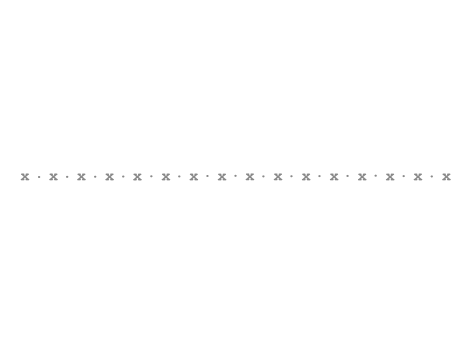

In [ ]:
# time: O(log n); space: O(log n)(call stack)
def pow(x,n):
  if n==0: return 1
  if n&1:
    return x*pow(x, n//2)**2
  else:
    return pow(x, n//2)**2

pow(5,3)

125

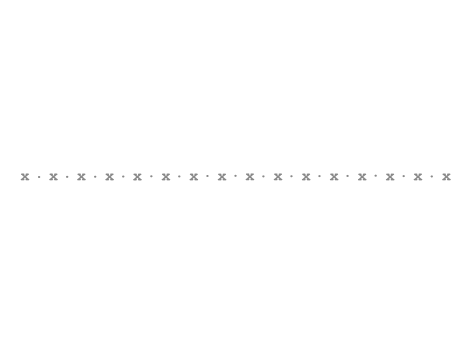

Fibonacci revisited using matrix power:

Matrix form:
$$
\pmatrix{
  1 & 1\\
  1 & 0
}^n =
\pmatrix{
  F_{n+1} & F_n\\
  F_n     & F_{n-1}
}.
$$

In [ ]:
import numpy as np

def matrix_pow(x,n):
  if n==0: return np.array([[1,0],[0,1]])
  if n&1:
    return np.dot(x, matrix_pow(np.dot(x,x), n//2))
  else:
    return matrix_pow(np.dot(x,x), n//2)

# time: O(log N); space: O(log N)(call stack)
def fib(n):
  return matrix_pow(np.array([[1,1],[1,0]]), n)[0][0]

fib(11)


144

## Binomial coefficient

```
Calculate binomial coefficient n choose k, wheke 0<=k<=n.
```

In [ ]:
#@title Pascal's triangle
%%html
<?xml version="1.0" encoding="UTF-8"?>
<svg width="185mm" height="65mm" version="1.1" viewBox="0 0 375.27 134.99" xmlns="http://www.w3.org/2000/svg" xmlns:cc="http://creativecommons.org/ns#" xmlns:dc="http://purl.org/dc/elements/1.1/" xmlns:ns10="http://www.iki.fi/pav/software/textext/" xmlns:rdf="http://www.w3.org/1999/02/22-rdf-syntax-ns#">
 <defs>
  <marker id="Arrow1Mend" style="overflow:visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" style="fill-opacity:.58333;fill-rule:evenodd;fill:#ff0000;stroke-opacity:.58333;stroke-width:1pt;stroke:#ff0000"/>
  </marker>
  <marker id="Arrow1Mend-7" style="overflow:visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" style="fill-opacity:.58333;fill-rule:evenodd;fill:#ff0000;stroke-opacity:.58333;stroke-width:1pt;stroke:#ff0000"/>
  </marker>
  <marker id="Arrow1Mend-0" style="overflow:visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" style="fill-opacity:.58333;fill-rule:evenodd;fill:#ff0000;stroke-opacity:.58333;stroke-width:1pt;stroke:#ff0000"/>
  </marker>
  <marker id="Arrow1Mend-7-7" style="overflow:visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" style="fill-opacity:.58333;fill-rule:evenodd;fill:#ff0000;stroke-opacity:.58333;stroke-width:1pt;stroke:#ff0000"/>
  </marker>
 </defs>
 <metadata>
  <rdf:RDF>
   <cc:Work rdf:about="">
    <dc:format>image/svg+xml</dc:format>
    <dc:type rdf:resource="http://purl.org/dc/dcmitype/StillImage"/>
    <dc:title/>
   </cc:Work>
  </rdf:RDF>
 </metadata>
 <g transform="translate(180.66 -47.002)">
  <g transform="matrix(1.2031 0 0 1.2031 63.378 41.456)" ns10:alignment="middle center" ns10:jacobian_sqrt="1.0" ns10:pdfconverter="inkscape" ns10:preamble="C:\\Users\\User\\AppData\\Roaming\\inkscape\\extensions\\textext\\default_packages.tex" ns10:scale="2.834645669291339" ns10:texconverter="pdflatex" ns10:text="$$1 1 1 1 2 2 3 3 6 6 $$" ns10:version="1.1.0">
   <defs></defs>
   <g id="id-58080082-7a5b-4079-9960-423a4a03d67f" transform="translate(-281.61 -140.08)">
    <g style="fill:#000000">
     <g transform="translate(280.99 151.33)">
      <path d="m2.9375-6.375c0-0.25 0-0.26562-0.23438-0.26562-0.625 0.64062-1.5 0.64062-1.8125 0.64062v0.3125c0.20312 0 0.78125 0 1.2969-0.26562v5.1719c0 0.35938-0.03125 0.46875-0.92188 0.46875h-0.3125v0.3125c0.34375-0.03125 1.2031-0.03125 1.6094-0.03125 0.39062 0 1.2656 0 1.6094 0.03125v-0.3125h-0.3125c-0.90625 0-0.92188-0.10938-0.92188-0.46875z"/>
     </g>
     <g transform="translate(351.92 134.5)">
      <path d="m-46.524 76.619c0.8125-0.26562 1.3906-0.95312 1.3906-1.75 0-0.8125-0.875-1.375-1.8281-1.375-1 0-1.7656 0.59375-1.7656 1.3594 0 0.32812 0.21875 0.51562 0.51562 0.51562 0.29688 0 0.5-0.21875 0.5-0.51562 0-0.48438-0.46875-0.48438-0.60937-0.48438 0.29687-0.5 0.95312-0.625 1.3125-0.625 0.42187 0 0.96875 0.21875 0.96875 1.1094 0 0.125-0.0312 0.70312-0.28125 1.1406-0.29688 0.48438-0.64063 0.51562-0.89063 0.51562-0.0781 0.01563-0.3125 0.03125-0.39062 0.03125-0.0781 0.01563-0.14063 0.03125-0.14063 0.125 0 0.10938 0.0625 0.10938 0.23438 0.10938h0.4375c0.8125 0 1.1875 0.67188 1.1875 1.6562 0 1.3594-0.6875 1.6406-1.125 1.6406s-1.1875-0.17188-1.5312-0.75c0.34375 0.04687 0.65625-0.17188 0.65625-0.54688 0-0.35938-0.26563-0.5625-0.54688-0.5625-0.25 0-0.5625 0.14062-0.5625 0.57812 0 0.90625 0.92188 1.5625 2.0156 1.5625 1.2188 0 2.125-0.90625 2.125-1.9219 0-0.8125-0.64063-1.5938-1.6719-1.8125z" style="fill:#000000"/>
      <path d="m-25.412 76.619c0.8125-0.26562 1.3906-0.95312 1.3906-1.75 0-0.8125-0.875-1.375-1.8281-1.375-1 0-1.7656 0.59375-1.7656 1.3594 0 0.32812 0.21875 0.51562 0.51562 0.51562 0.29688 0 0.5-0.21875 0.5-0.51562 0-0.48438-0.46875-0.48438-0.60937-0.48438 0.29687-0.5 0.95312-0.625 1.3125-0.625 0.42187 0 0.96875 0.21875 0.96875 1.1094 0 0.125-0.0312 0.70312-0.28125 1.1406-0.29688 0.48438-0.64063 0.51562-0.89063 0.51562-0.0781 0.01563-0.3125 0.03125-0.39062 0.03125-0.0781 0.01563-0.14063 0.03125-0.14063 0.125 0 0.10938 0.0625 0.10938 0.23438 0.10938h0.4375c0.8125 0 1.1875 0.67188 1.1875 1.6562 0 1.3594-0.6875 1.6406-1.125 1.6406s-1.1875-0.17188-1.5312-0.75c0.34375 0.04687 0.65625-0.17188 0.65625-0.54688 0-0.35938-0.26563-0.5625-0.54688-0.5625-0.25 0-0.5625 0.14062-0.5625 0.57812 0 0.90625 0.92188 1.5625 2.0156 1.5625 1.2188 0 2.125-0.90625 2.125-1.9219 0-0.8125-0.64063-1.5938-1.6719-1.8125z" style="fill:#000000"/>
      <path d="m-211.02 57.899c0.8125-0.26562 1.3906-0.95312 1.3906-1.75 0-0.8125-0.875-1.375-1.8281-1.375-1 0-1.7656 0.59375-1.7656 1.3594 0 0.32812 0.21875 0.51562 0.51562 0.51562 0.29688 0 0.5-0.21875 0.5-0.51562 0-0.48438-0.46875-0.48438-0.60937-0.48438 0.29687-0.5 0.95312-0.625 1.3125-0.625 0.42187 0 0.96875 0.21875 0.96875 1.1094 0 0.125-0.0312 0.70312-0.28125 1.1406-0.29688 0.48438-0.64063 0.51562-0.89063 0.51562-0.0781 0.01563-0.3125 0.03125-0.39062 0.03125-0.0781 0.01563-0.14063 0.03125-0.14063 0.125 0 0.10938 0.0625 0.10938 0.23438 0.10938h0.4375c0.8125 0 1.1875 0.67188 1.1875 1.6562 0 1.3594-0.6875 1.6406-1.125 1.6406s-1.1875-0.17188-1.5312-0.75c0.34375 0.04687 0.65625-0.17188 0.65625-0.54688 0-0.35938-0.26563-0.5625-0.54688-0.5625-0.25 0-0.5625 0.14062-0.5625 0.57812 0 0.90625 0.92188 1.5625 2.0156 1.5625 1.2188 0 2.125-0.90625 2.125-1.9219 0-0.8125-0.64063-1.5938-1.6719-1.8125z" style="fill:#000000"/>
      <path d="m-181.27 58.37c0.8125-0.26562 1.3906-0.95312 1.3906-1.75 0-0.8125-0.875-1.375-1.8281-1.375-1 0-1.7656 0.59375-1.7656 1.3594 0 0.32812 0.21875 0.51562 0.51562 0.51562 0.29688 0 0.5-0.21875 0.5-0.51562 0-0.48438-0.46875-0.48438-0.60937-0.48438 0.29687-0.5 0.95312-0.625 1.3125-0.625 0.42187 0 0.96875 0.21875 0.96875 1.1094 0 0.125-0.0312 0.70312-0.28125 1.1406-0.29688 0.48438-0.64063 0.51562-0.89063 0.51562-0.0781 0.01563-0.3125 0.03125-0.39062 0.03125-0.0781 0.01563-0.14063 0.03125-0.14063 0.125 0 0.10938 0.0625 0.10938 0.23438 0.10938h0.4375c0.8125 0 1.1875 0.67188 1.1875 1.6562 0 1.3594-0.6875 1.6406-1.125 1.6406s-1.1875-0.17188-1.5312-0.75c0.34375 0.04687 0.65625-0.17188 0.65625-0.54688 0-0.35938-0.26563-0.5625-0.54688-0.5625-0.25 0-0.5625 0.14062-0.5625 0.57812 0 0.90625 0.92188 1.5625 2.0156 1.5625 1.2188 0 2.125-0.90625 2.125-1.9219 0-0.8125-0.64063-1.5938-1.6719-1.8125z" style="fill:#000000"/>
     </g>
     <g transform="translate(152.92 151.59)" style="fill:#000000">
      <path d="m2.9375-6.375c0-0.25 0-0.26562-0.23438-0.26562-0.625 0.64062-1.5 0.64062-1.8125 0.64062v0.3125c0.20312 0 0.78125 0 1.2969-0.26562v5.1719c0 0.35938-0.03125 0.46875-0.92188 0.46875h-0.3125v0.3125c0.34375-0.03125 1.2031-0.03125 1.6094-0.03125 0.39062 0 1.2656 0 1.6094 0.03125v-0.3125h-0.3125c-0.90625 0-0.92188-0.10938-0.92188-0.46875z"/>
     </g>
     <g transform="translate(167.76 166.6)" style="fill:#000000">
      <path d="m2.9375-6.375c0-0.25 0-0.26562-0.23438-0.26562-0.625 0.64062-1.5 0.64062-1.8125 0.64062v0.3125c0.20312 0 0.78125 0 1.2969-0.26562v5.1719c0 0.35938-0.03125 0.46875-0.92188 0.46875h-0.3125v0.3125c0.34375-0.03125 1.2031-0.03125 1.6094-0.03125 0.39062 0 1.2656 0 1.6094 0.03125v-0.3125h-0.3125c-0.90625 0-0.92188-0.10938-0.92188-0.46875z"/>
     </g>
     <g transform="translate(182.59 181.61)" style="fill:#000000">
      <path d="m2.9375-6.375c0-0.25 0-0.26562-0.23438-0.26562-0.625 0.64062-1.5 0.64062-1.8125 0.64062v0.3125c0.20312 0 0.78125 0 1.2969-0.26562v5.1719c0 0.35938-0.03125 0.46875-0.92188 0.46875h-0.3125v0.3125c0.34375-0.03125 1.2031-0.03125 1.6094-0.03125 0.39062 0 1.2656 0 1.6094 0.03125v-0.3125h-0.3125c-0.90625 0-0.92188-0.10938-0.92188-0.46875z"/>
     </g>
     <g transform="translate(197.43 196.62)" style="fill:#000000">
      <path d="m2.9375-6.375c0-0.25 0-0.26562-0.23438-0.26562-0.625 0.64062-1.5 0.64062-1.8125 0.64062v0.3125c0.20312 0 0.78125 0 1.2969-0.26562v5.1719c0 0.35938-0.03125 0.46875-0.92188 0.46875h-0.3125v0.3125c0.34375-0.03125 1.2031-0.03125 1.6094-0.03125 0.39062 0 1.2656 0 1.6094 0.03125v-0.3125h-0.3125c-0.90625 0-0.92188-0.10938-0.92188-0.46875z"/>
     </g>
     <g transform="translate(212.27 211.63)" style="fill:#000000">
      <path d="m2.9375-6.375c0-0.25 0-0.26562-0.23438-0.26562-0.625 0.64062-1.5 0.64062-1.8125 0.64062v0.3125c0.20312 0 0.78125 0 1.2969-0.26562v5.1719c0 0.35938-0.03125 0.46875-0.92188 0.46875h-0.3125v0.3125c0.34375-0.03125 1.2031-0.03125 1.6094-0.03125 0.39062 0 1.2656 0 1.6094 0.03125v-0.3125h-0.3125c-0.90625 0-0.92188-0.10938-0.92188-0.46875z"/>
     </g>
     <g transform="translate(227.1 226.64)" style="fill:#000000">
      <path d="m2.9375-6.375c0-0.25 0-0.26562-0.23438-0.26562-0.625 0.64062-1.5 0.64062-1.8125 0.64062v0.3125c0.20312 0 0.78125 0 1.2969-0.26562v5.1719c0 0.35938-0.03125 0.46875-0.92188 0.46875h-0.3125v0.3125c0.34375-0.03125 1.2031-0.03125 1.6094-0.03125 0.39062 0 1.2656 0 1.6094 0.03125v-0.3125h-0.3125c-0.90625 0-0.92188-0.10938-0.92188-0.46875z"/>
     </g>
     <g transform="translate(137.91 166.43)" style="fill:#000000">
      <path d="m2.9375-6.375c0-0.25 0-0.26562-0.23438-0.26562-0.625 0.64062-1.5 0.64062-1.8125 0.64062v0.3125c0.20312 0 0.78125 0 1.2969-0.26562v5.1719c0 0.35938-0.03125 0.46875-0.92188 0.46875h-0.3125v0.3125c0.34375-0.03125 1.2031-0.03125 1.6094-0.03125 0.39062 0 1.2656 0 1.6094 0.03125v-0.3125h-0.3125c-0.90625 0-0.92188-0.10938-0.92188-0.46875z"/>
     </g>
     <g transform="translate(122.9 181.27)" style="fill:#000000">
      <path d="m2.9375-6.375c0-0.25 0-0.26562-0.23438-0.26562-0.625 0.64062-1.5 0.64062-1.8125 0.64062v0.3125c0.20312 0 0.78125 0 1.2969-0.26562v5.1719c0 0.35938-0.03125 0.46875-0.92188 0.46875h-0.3125v0.3125c0.34375-0.03125 1.2031-0.03125 1.6094-0.03125 0.39062 0 1.2656 0 1.6094 0.03125v-0.3125h-0.3125c-0.90625 0-0.92188-0.10938-0.92188-0.46875z"/>
     </g>
     <g transform="translate(107.9 196.1)" style="fill:#000000">
      <path d="m2.9375-6.375c0-0.25 0-0.26562-0.23438-0.26562-0.625 0.64062-1.5 0.64062-1.8125 0.64062v0.3125c0.20312 0 0.78125 0 1.2969-0.26562v5.1719c0 0.35938-0.03125 0.46875-0.92188 0.46875h-0.3125v0.3125c0.34375-0.03125 1.2031-0.03125 1.6094-0.03125 0.39062 0 1.2656 0 1.6094 0.03125v-0.3125h-0.3125c-0.90625 0-0.92188-0.10938-0.92188-0.46875z"/>
     </g>
     <g transform="translate(92.886 210.94)" style="fill:#000000">
      <path d="m2.9375-6.375c0-0.25 0-0.26562-0.23438-0.26562-0.625 0.64062-1.5 0.64062-1.8125 0.64062v0.3125c0.20312 0 0.78125 0 1.2969-0.26562v5.1719c0 0.35938-0.03125 0.46875-0.92188 0.46875h-0.3125v0.3125c0.34375-0.03125 1.2031-0.03125 1.6094-0.03125 0.39062 0 1.2656 0 1.6094 0.03125v-0.3125h-0.3125c-0.90625 0-0.92188-0.10938-0.92188-0.46875z"/>
     </g>
     <g transform="translate(77.877 225.78)" style="fill:#000000">
      <path d="m2.9375-6.375c0-0.25 0-0.26562-0.23438-0.26562-0.625 0.64062-1.5 0.64062-1.8125 0.64062v0.3125c0.20312 0 0.78125 0 1.2969-0.26562v5.1719c0 0.35938-0.03125 0.46875-0.92188 0.46875h-0.3125v0.3125c0.34375-0.03125 1.2031-0.03125 1.6094-0.03125 0.39062 0 1.2656 0 1.6094 0.03125v-0.3125h-0.3125c-0.90625 0-0.92188-0.10938-0.92188-0.46875z"/>
     </g>
     <g transform="translate(302.08 193.54)" style="fill:#000000">
      <path d="m1.2656-0.76562 1.0625-1.0312c1.5469-1.375 2.1406-1.9062 2.1406-2.9062 0-1.1406-0.89062-1.9375-2.1094-1.9375-1.125 0-1.8594 0.92188-1.8594 1.8125 0 0.54688 0.5 0.54688 0.53125 0.54688 0.17188 0 0.51562-0.10938 0.51562-0.53125 0-0.25-0.1875-0.51562-0.53125-0.51562-0.078125 0-0.09375 0-0.125 0.015625 0.21875-0.65625 0.76562-1.0156 1.3438-1.0156 0.90625 0 1.3281 0.8125 1.3281 1.625 0 0.79688-0.48438 1.5781-1.0469 2.2031l-1.9062 2.125c-0.10938 0.10938-0.10938 0.14062-0.10938 0.375h3.7031l0.26562-1.7344h-0.23438c-0.0625 0.29688-0.125 0.73438-0.23438 0.89062-0.0625 0.078125-0.71875 0.078125-0.9375 0.078125z"/>
     </g>
     <g transform="translate(153.1 181.61)" style="fill:#000000">
      <path d="m1.2656-0.76562 1.0625-1.0312c1.5469-1.375 2.1406-1.9062 2.1406-2.9062 0-1.1406-0.89062-1.9375-2.1094-1.9375-1.125 0-1.8594 0.92188-1.8594 1.8125 0 0.54688 0.5 0.54688 0.53125 0.54688 0.17188 0 0.51562-0.10938 0.51562-0.53125 0-0.25-0.1875-0.51562-0.53125-0.51562-0.078125 0-0.09375 0-0.125 0.015625 0.21875-0.65625 0.76562-1.0156 1.3438-1.0156 0.90625 0 1.3281 0.8125 1.3281 1.625 0 0.79688-0.48438 1.5781-1.0469 2.2031l-1.9062 2.125c-0.10938 0.10938-0.10938 0.14062-0.10938 0.375h3.7031l0.26562-1.7344h-0.23438c-0.0625 0.29688-0.125 0.73438-0.23438 0.89062-0.0625 0.078125-0.71875 0.078125-0.9375 0.078125z"/>
     </g>
     <g transform="translate(123.02 204.19)" ns10:alignment="middle center" ns10:jacobian_sqrt="1.0" ns10:pdfconverter="inkscape" ns10:preamble="C:\\Users\\User\\AppData\\Roaming\\inkscape\\extensions\\textext\\default_packages.tex" ns10:scale="2.834645669291339" ns10:texconverter="pdflatex" ns10:text="$$44$$" ns10:version="1.1.0">
      <defs></defs>
      <g transform="translate(-300.92 -139.97)">
       <g id="id-df226d7f-c04b-4d25-9ce0-ab31cae4914e" style="fill:#000000">
        <g transform="translate(300.64 146.72)">
         <path d="m2.9375-1.6406v0.85938c0 0.35938-0.03125 0.46875-0.76562 0.46875h-0.20312v0.3125c0.40625-0.03125 0.92188-0.03125 1.3438-0.03125s0.9375 0 1.3594 0.03125v-0.3125h-0.21875c-0.73438 0-0.75-0.10938-0.75-0.46875v-0.85938h0.98438v-0.3125h-0.98438v-4.5312c0-0.20312 0-0.26562-0.17188-0.26562-0.078125 0-0.10938 0-0.1875 0.125l-3.0625 4.6719v0.3125zm0.046875-0.3125h-2.4219l2.4219-3.7188z"/>
        </g>
        <g transform="translate(360.16 146.72)">
         <path d="m2.9375-1.6406v0.85938c0 0.35938-0.03125 0.46875-0.76562 0.46875h-0.20312v0.3125c0.40625-0.03125 0.92188-0.03125 1.3438-0.03125s0.9375 0 1.3594 0.03125v-0.3125h-0.21875c-0.73438 0-0.75-0.10938-0.75-0.46875v-0.85938h0.98438v-0.3125h-0.98438v-4.5312c0-0.20312 0-0.26562-0.17188-0.26562-0.078125 0-0.10938 0-0.1875 0.125l-3.0625 4.6719v0.3125zm0.046875-0.3125h-2.4219l2.4219-3.7188z"/>
        </g>
        <g transform="translate(479.85 171.74)" style="fill:#000000">
         <path d="m2.9375-1.6406v0.85938c0 0.35938-0.03125 0.46875-0.76562 0.46875h-0.20312v0.3125c0.40625-0.03125 0.92188-0.03125 1.3438-0.03125s0.9375 0 1.3594 0.03125v-0.3125h-0.21875c-0.73438 0-0.75-0.10938-0.75-0.46875v-0.85938h0.98438v-0.3125h-0.98438v-4.5312c0-0.20312 0-0.26562-0.17188-0.26562-0.078125 0-0.10938 0-0.1875 0.125l-3.0625 4.6719v0.3125zm0.046875-0.3125h-2.4219l2.4219-3.7188z"/>
        </g>
        <g transform="translate(522.44 171.75)" style="fill:#000000">
         <path d="m2.9375-1.6406v0.85938c0 0.35938-0.03125 0.46875-0.76562 0.46875h-0.20312v0.3125c0.40625-0.03125 0.92188-0.03125 1.3438-0.03125s0.9375 0 1.3594 0.03125v-0.3125h-0.21875c-0.73438 0-0.75-0.10938-0.75-0.46875v-0.85938h0.98438v-0.3125h-0.98438v-4.5312c0-0.20312 0-0.26562-0.17188-0.26562-0.078125 0-0.10938 0-0.1875 0.125l-3.0625 4.6719v0.3125zm0.046875-0.3125h-2.4219l2.4219-3.7188z"/>
        </g>
        <g transform="translate(285.9 154.72)" ns10:alignment="middle center" ns10:jacobian_sqrt="1.0" ns10:pdfconverter="inkscape" ns10:preamble="C:\\Users\\User\\AppData\\Roaming\\inkscape\\extensions\\textext\\default_packages.tex" ns10:scale="2.834645669291339" ns10:texconverter="pdflatex" ns10:text="$$5 10 5 $$" ns10:version="1.1.0">
         <defs id="id-c3de4c11-3947-47fa-8d4c-4ede05eea8dd"></defs>
         <g transform="translate(-296.16 -140.08)">
          <g id="id-df71690e-f1ab-4dbd-bef6-fb49258b6dff" style="fill:#000000">
           <g transform="translate(295.66 146.72)">
            <path d="m4.4688-2c0-1.1875-0.8125-2.1875-1.8906-2.1875-0.46875 0-0.90625 0.15625-1.2656 0.51562v-1.9531c0.20312 0.0625 0.53125 0.125 0.84375 0.125 1.2344 0 1.9375-0.90625 1.9375-1.0312 0-0.0625-0.03125-0.10938-0.10938-0.10938 0 0-0.03125 0-0.078125 0.03125-0.20312 0.09375-0.6875 0.29688-1.3594 0.29688-0.39062 0-0.85938-0.078125-1.3281-0.28125-0.078125-0.03125-0.09375-0.03125-0.10938-0.03125-0.10938 0-0.10938 0.078125-0.10938 0.23438v2.9531c0 0.17188 0 0.25 0.14062 0.25 0.078125 0 0.09375-0.015625 0.14062-0.078125 0.10938-0.15625 0.46875-0.70312 1.2812-0.70312 0.51562 0 0.76562 0.45312 0.84375 0.64062 0.15625 0.375 0.1875 0.75 0.1875 1.25 0 0.35938 0 0.95312-0.25 1.375-0.23438 0.39062-0.60938 0.64062-1.0625 0.64062-0.71875 0-1.2969-0.53125-1.4688-1.1094 0.03125 0 0.0625 0.015625 0.17188 0.015625 0.32812 0 0.5-0.25 0.5-0.48438 0-0.25-0.17188-0.5-0.5-0.5-0.14062 0-0.48438 0.078125-0.48438 0.53125 0 0.85938 0.6875 1.8281 1.7969 1.8281 1.1562 0 2.1719-0.95312 2.1719-2.2188z"/>
           </g>
           <g transform="translate(323.07 146.72)">
            <path d="m2.9375-6.375c0-0.25 0-0.26562-0.23438-0.26562-0.625 0.64062-1.5 0.64062-1.8125 0.64062v0.3125c0.20312 0 0.78125 0 1.2969-0.26562v5.1719c0 0.35938-0.03125 0.46875-0.92188 0.46875h-0.3125v0.3125c0.34375-0.03125 1.2031-0.03125 1.6094-0.03125 0.39062 0 1.2656 0 1.6094 0.03125v-0.3125h-0.3125c-0.90625 0-0.92188-0.10938-0.92188-0.46875z"/>
           </g>
           <g transform="translate(328.06 146.72)">
            <path d="m4.5781-3.1875c0-0.79688-0.046875-1.5938-0.39062-2.3281-0.45312-0.96875-1.2812-1.125-1.6875-1.125-0.60938 0-1.3281 0.26562-1.75 1.1875-0.3125 0.6875-0.35938 1.4688-0.35938 2.2656 0 0.75 0.03125 1.6406 0.45312 2.4062 0.42188 0.79688 1.1562 1 1.6406 1 0.53125 0 1.2969-0.20312 1.7344-1.1562 0.3125-0.6875 0.35938-1.4688 0.35938-2.25zm-2.0938 3.1875c-0.39062 0-0.98438-0.25-1.1562-1.2031-0.10938-0.59375-0.10938-1.5156-0.10938-2.1094 0-0.64062 0-1.2969 0.078125-1.8281 0.1875-1.1875 0.9375-1.2812 1.1875-1.2812 0.32812 0 0.98438 0.1875 1.1719 1.1719 0.10938 0.5625 0.10938 1.3125 0.10938 1.9375 0 0.75 0 1.4219-0.10938 2.0625-0.15625 0.95312-0.71875 1.25-1.1719 1.25z"/>
           </g>
           <g transform="translate(384.94 146.72)">
            <path d="m4.4688-2c0-1.1875-0.8125-2.1875-1.8906-2.1875-0.46875 0-0.90625 0.15625-1.2656 0.51562v-1.9531c0.20312 0.0625 0.53125 0.125 0.84375 0.125 1.2344 0 1.9375-0.90625 1.9375-1.0312 0-0.0625-0.03125-0.10938-0.10938-0.10938 0 0-0.03125 0-0.078125 0.03125-0.20312 0.09375-0.6875 0.29688-1.3594 0.29688-0.39062 0-0.85938-0.078125-1.3281-0.28125-0.078125-0.03125-0.09375-0.03125-0.10938-0.03125-0.10938 0-0.10938 0.078125-0.10938 0.23438v2.9531c0 0.17188 0 0.25 0.14062 0.25 0.078125 0 0.09375-0.015625 0.14062-0.078125 0.10938-0.15625 0.46875-0.70312 1.2812-0.70312 0.51562 0 0.76562 0.45312 0.84375 0.64062 0.15625 0.375 0.1875 0.75 0.1875 1.25 0 0.35938 0 0.95312-0.25 1.375-0.23438 0.39062-0.60938 0.64062-1.0625 0.64062-0.71875 0-1.2969-0.53125-1.4688-1.1094 0.03125 0 0.0625 0.015625 0.17188 0.015625 0.32812 0 0.5-0.25 0.5-0.48438 0-0.25-0.17188-0.5-0.5-0.5-0.14062 0-0.48438 0.078125-0.48438 0.53125 0 0.85938 0.6875 1.8281 1.7969 1.8281 1.1562 0 2.1719-0.95312 2.1719-2.2188z"/>
           </g>
           <g transform="translate(353.42 146.72)" style="fill:#000000">
            <path d="m2.9375-6.375c0-0.25 0-0.26562-0.23438-0.26562-0.625 0.64062-1.5 0.64062-1.8125 0.64062v0.3125c0.20312 0 0.78125 0 1.2969-0.26562v5.1719c0 0.35938-0.03125 0.46875-0.92188 0.46875h-0.3125v0.3125c0.34375-0.03125 1.2031-0.03125 1.6094-0.03125 0.39062 0 1.2656 0 1.6094 0.03125v-0.3125h-0.3125c-0.90625 0-0.92188-0.10938-0.92188-0.46875z"/>
           </g>
           <g transform="translate(358.4 146.72)" style="fill:#000000">
            <path d="m4.5781-3.1875c0-0.79688-0.046875-1.5938-0.39062-2.3281-0.45312-0.96875-1.2812-1.125-1.6875-1.125-0.60938 0-1.3281 0.26562-1.75 1.1875-0.3125 0.6875-0.35938 1.4688-0.35938 2.2656 0 0.75 0.03125 1.6406 0.45312 2.4062 0.42188 0.79688 1.1562 1 1.6406 1 0.53125 0 1.2969-0.20312 1.7344-1.1562 0.3125-0.6875 0.35938-1.4688 0.35938-2.25zm-2.0938 3.1875c-0.39062 0-0.98438-0.25-1.1562-1.2031-0.10938-0.59375-0.10938-1.5156-0.10938-2.1094 0-0.64062 0-1.2969 0.078125-1.8281 0.1875-1.1875 0.9375-1.2812 1.1875-1.2812 0.32812 0 0.98438 0.1875 1.1719 1.1719 0.10938 0.5625 0.10938 1.3125 0.10938 1.9375 0 0.75 0 1.4219-0.10938 2.0625-0.15625 0.95312-0.71875 1.25-1.1719 1.25z"/>
           </g>
           <g transform="translate(490.38 177.81)" style="fill:#000000">
            <path d="m4.4688-2c0-1.1875-0.8125-2.1875-1.8906-2.1875-0.46875 0-0.90625 0.15625-1.2656 0.51562v-1.9531c0.20312 0.0625 0.53125 0.125 0.84375 0.125 1.2344 0 1.9375-0.90625 1.9375-1.0312 0-0.0625-0.03125-0.10938-0.10938-0.10938 0 0-0.03125 0-0.078125 0.03125-0.20312 0.09375-0.6875 0.29688-1.3594 0.29688-0.39062 0-0.85938-0.078125-1.3281-0.28125-0.078125-0.03125-0.09375-0.03125-0.10938-0.03125-0.10938 0-0.10938 0.078125-0.10938 0.23438v2.9531c0 0.17188 0 0.25 0.14062 0.25 0.078125 0 0.09375-0.015625 0.14062-0.078125 0.10938-0.15625 0.46875-0.70312 1.2812-0.70312 0.51562 0 0.76562 0.45312 0.84375 0.64062 0.15625 0.375 0.1875 0.75 0.1875 1.25 0 0.35938 0 0.95312-0.25 1.375-0.23438 0.39062-0.60938 0.64062-1.0625 0.64062-0.71875 0-1.2969-0.53125-1.4688-1.1094 0.03125 0 0.0625 0.015625 0.17188 0.015625 0.32812 0 0.5-0.25 0.5-0.48438 0-0.25-0.17188-0.5-0.5-0.5-0.14062 0-0.48438 0.078125-0.48438 0.53125 0 0.85938 0.6875 1.8281 1.7969 1.8281 1.1562 0 2.1719-0.95312 2.1719-2.2188z"/>
           </g>
           <g transform="translate(508.55 177.81)" style="fill:#000000">
            <path d="m2.9375-6.375c0-0.25 0-0.26562-0.23438-0.26562-0.625 0.64062-1.5 0.64062-1.8125 0.64062v0.3125c0.20312 0 0.78125 0 1.2969-0.26562v5.1719c0 0.35938-0.03125 0.46875-0.92188 0.46875h-0.3125v0.3125c0.34375-0.03125 1.2031-0.03125 1.6094-0.03125 0.39062 0 1.2656 0 1.6094 0.03125v-0.3125h-0.3125c-0.90625 0-0.92188-0.10938-0.92188-0.46875z"/>
           </g>
           <g transform="translate(513.53 177.81)" style="fill:#000000">
            <path d="m4.5781-3.1875c0-0.79688-0.046875-1.5938-0.39062-2.3281-0.45312-0.96875-1.2812-1.125-1.6875-1.125-0.60938 0-1.3281 0.26562-1.75 1.1875-0.3125 0.6875-0.35938 1.4688-0.35938 2.2656 0 0.75 0.03125 1.6406 0.45312 2.4062 0.42188 0.79688 1.1562 1 1.6406 1 0.53125 0 1.2969-0.20312 1.7344-1.1562 0.3125-0.6875 0.35938-1.4688 0.35938-2.25zm-2.0938 3.1875c-0.39062 0-0.98438-0.25-1.1562-1.2031-0.10938-0.59375-0.10938-1.5156-0.10938-2.1094 0-0.64062 0-1.2969 0.078125-1.8281 0.1875-1.1875 0.9375-1.2812 1.1875-1.2812 0.32812 0 0.98438 0.1875 1.1719 1.1719 0.10938 0.5625 0.10938 1.3125 0.10938 1.9375 0 0.75 0 1.4219-0.10938 2.0625-0.15625 0.95312-0.71875 1.25-1.1719 1.25z"/>
           </g>
           <g transform="translate(553.26 177.81)" style="fill:#000000">
            <path d="m4.4688-2c0-1.1875-0.8125-2.1875-1.8906-2.1875-0.46875 0-0.90625 0.15625-1.2656 0.51562v-1.9531c0.20312 0.0625 0.53125 0.125 0.84375 0.125 1.2344 0 1.9375-0.90625 1.9375-1.0312 0-0.0625-0.03125-0.10938-0.10938-0.10938 0 0-0.03125 0-0.078125 0.03125-0.20312 0.09375-0.6875 0.29688-1.3594 0.29688-0.39062 0-0.85938-0.078125-1.3281-0.28125-0.078125-0.03125-0.09375-0.03125-0.10938-0.03125-0.10938 0-0.10938 0.078125-0.10938 0.23438v2.9531c0 0.17188 0 0.25 0.14062 0.25 0.078125 0 0.09375-0.015625 0.14062-0.078125 0.10938-0.15625 0.46875-0.70312 1.2812-0.70312 0.51562 0 0.76562 0.45312 0.84375 0.64062 0.15625 0.375 0.1875 0.75 0.1875 1.25 0 0.35938 0 0.95312-0.25 1.375-0.23438 0.39062-0.60938 0.64062-1.0625 0.64062-0.71875 0-1.2969-0.53125-1.4688-1.1094 0.03125 0 0.0625 0.015625 0.17188 0.015625 0.32812 0 0.5-0.25 0.5-0.48438 0-0.25-0.17188-0.5-0.5-0.5-0.14062 0-0.48438 0.078125-0.48438 0.53125 0 0.85938 0.6875 1.8281 1.7969 1.8281 1.1562 0 2.1719-0.95312 2.1719-2.2188z"/>
           </g>
           <g transform="translate(529.66 177.81)" style="fill:#000000">
            <path d="m2.9375-6.375c0-0.25 0-0.26562-0.23438-0.26562-0.625 0.64062-1.5 0.64062-1.8125 0.64062v0.3125c0.20312 0 0.78125 0 1.2969-0.26562v5.1719c0 0.35938-0.03125 0.46875-0.92188 0.46875h-0.3125v0.3125c0.34375-0.03125 1.2031-0.03125 1.6094-0.03125 0.39062 0 1.2656 0 1.6094 0.03125v-0.3125h-0.3125c-0.90625 0-0.92188-0.10938-0.92188-0.46875z"/>
           </g>
           <g transform="translate(534.65 177.81)" style="fill:#000000">
            <path d="m4.5781-3.1875c0-0.79688-0.046875-1.5938-0.39062-2.3281-0.45312-0.96875-1.2812-1.125-1.6875-1.125-0.60938 0-1.3281 0.26562-1.75 1.1875-0.3125 0.6875-0.35938 1.4688-0.35938 2.2656 0 0.75 0.03125 1.6406 0.45312 2.4062 0.42188 0.79688 1.1562 1 1.6406 1 0.53125 0 1.2969-0.20312 1.7344-1.1562 0.3125-0.6875 0.35938-1.4688 0.35938-2.25zm-2.0938 3.1875c-0.39062 0-0.98438-0.25-1.1562-1.2031-0.10938-0.59375-0.10938-1.5156-0.10938-2.1094 0-0.64062 0-1.2969 0.078125-1.8281 0.1875-1.1875 0.9375-1.2812 1.1875-1.2812 0.32812 0 0.98438 0.1875 1.1719 1.1719 0.10938 0.5625 0.10938 1.3125 0.10938 1.9375 0 0.75 0 1.4219-0.10938 2.0625-0.15625 0.95312-0.71875 1.25-1.1719 1.25z"/>
           </g>
          </g>
         </g>
        </g>
       </g>
      </g>
     </g>
     <g transform="translate(322.89 235.75)" style="fill:#000000">
      <path id="id-6b3bf69a-a20c-4467-947b-8aba6984758f" d="m1.3125-3.2656v-0.25c0-2.5156 1.2344-2.875 1.75-2.875 0.23438 0 0.65625 0.0625 0.875 0.40625-0.15625 0-0.54688 0-0.54688 0.4375 0 0.3125 0.23438 0.46875 0.45312 0.46875 0.15625 0 0.46875-0.09375 0.46875-0.48438 0-0.59375-0.4375-1.0781-1.2656-1.0781-1.2812 0-2.625 1.2812-2.625 3.4844 0 2.6719 1.1562 3.375 2.0781 3.375 1.1094 0 2.0625-0.9375 2.0625-2.25 0-1.2656-0.89062-2.2188-2-2.2188-0.67188 0-1.0469 0.5-1.25 0.98438zm1.1875 3.2031c-0.625 0-0.92188-0.59375-0.98438-0.75-0.1875-0.46875-0.1875-1.2656-0.1875-1.4375 0-0.78125 0.32812-1.7812 1.2188-1.7812 0.17188 0 0.625 0 0.9375 0.625 0.17188 0.35938 0.17188 0.875 0.17188 1.3594s0 0.98438-0.17188 1.3438c-0.29688 0.59375-0.75 0.64062-0.98438 0.64062z"/>
     </g>
     <g transform="translate(152.67 210.8)" style="fill:#000000">
      <path d="m1.3125-3.2656v-0.25c0-2.5156 1.2344-2.875 1.75-2.875 0.23438 0 0.65625 0.0625 0.875 0.40625-0.15625 0-0.54688 0-0.54688 0.4375 0 0.3125 0.23438 0.46875 0.45312 0.46875 0.15625 0 0.46875-0.09375 0.46875-0.48438 0-0.59375-0.4375-1.0781-1.2656-1.0781-1.2812 0-2.625 1.2812-2.625 3.4844 0 2.6719 1.1562 3.375 2.0781 3.375 1.1094 0 2.0625-0.9375 2.0625-2.25 0-1.2656-0.89062-2.2188-2-2.2188-0.67188 0-1.0469 0.5-1.25 0.98438zm1.1875 3.2031c-0.625 0-0.92188-0.59375-0.98438-0.75-0.1875-0.46875-0.1875-1.2656-0.1875-1.4375 0-0.78125 0.32812-1.7812 1.2188-1.7812 0.17188 0 0.625 0 0.9375 0.625 0.17188 0.35938 0.17188 0.875 0.17188 1.3594s0 0.98438-0.17188 1.3438c-0.29688 0.59375-0.75 0.64062-0.98438 0.64062z"/>
     </g>
     <path d="m152.15 205.88-9.3465-8.9145" style="fill:none;marker-end:url(#Arrow1Mend);stroke-opacity:.58333;stroke-width:.46962;stroke:#ff0000"/>
     <path d="m158.28 206.78 8.9145-9.3465" style="fill:none;marker-end:url(#Arrow1Mend-7);stroke-opacity:.58333;stroke-width:.46962;stroke:#ff0000"/>
     <path d="m322.78 230.24-15.041-14.02" style="fill:none;marker-end:url(#Arrow1Mend-0);stroke-opacity:.58333;stroke-width:.46962;stroke:#ff0000"/>
     <path d="m325.65 228.89 0.13835-12.915" style="fill:none;marker-end:url(#Arrow1Mend-7-7);stroke-opacity:.58333;stroke-width:.46962;stroke:#ff0000"/>
    </g>
   </g>
  </g>
  <path d="m66.174 72.712c0-0.30078 0-0.31958-0.28198-0.31958-0.75194 0.77074-1.8047 0.77074-2.1806 0.77074v0.37597c0.24438 0 0.93993 0 1.5603-0.31958v6.2223c0 0.43237-0.0376 0.56396-1.1091 0.56396h-0.37597v0.37597c0.41357-0.0376 1.4475-0.0376 1.9362-0.0376 0.46996 0 1.5227 0 1.9362 0.0376v-0.37597h-0.37597c-1.0903 0-1.1091-0.13159-1.1091-0.56396z" style="fill:#000000"/>
  <path d="m66.174 123.49c0-0.30078 0-0.31958-0.28198-0.31958-0.75194 0.77074-1.8047 0.77074-2.1806 0.77074v0.37597c0.24438 0 0.93993 0 1.5603-0.31958v6.2223c0 0.43236-0.0376 0.56395-1.1091 0.56395h-0.37597v0.37597c0.41357-0.0376 1.4475-0.0376 1.9362-0.0376 0.46996 0 1.5227 0 1.9362 0.0376v-0.37597h-0.37597c-1.0903 0-1.1091-0.13159-1.1091-0.56395z" style="fill:#000000"/>
  <path d="m66.174 98.103c0-0.30078 0-0.31958-0.28198-0.31958-0.75194 0.77074-1.8047 0.77074-2.1806 0.77074v0.37597c0.24438 0 0.93993 0 1.5603-0.31957v6.2223c0 0.43237-0.0376 0.56395-1.1091 0.56395h-0.37597v0.37596c0.41357-0.0376 1.4475-0.0376 1.9362-0.0376 0.46996 0 1.5227 0 1.9362 0.0376v-0.37596h-0.37597c-1.0903 0-1.1091-0.13158-1.1091-0.56395z" style="fill:#000000"/>
  <path d="m66.174 174.27c0-0.30078 0-0.31958-0.28198-0.31958-0.75194 0.77074-1.8047 0.77074-2.1806 0.77074v0.37597c0.24438 0 0.93993 0 1.5603-0.31957v6.2223c0 0.43236-0.0376 0.56395-1.1091 0.56395h-0.37597v0.37597c0.41357-0.0376 1.4475-0.0376 1.9362-0.0376 0.46996 0 1.5227 0 1.9362 0.0376v-0.37597h-0.37597c-1.0903 0-1.1091-0.13159-1.1091-0.56395z" style="fill:#000000"/>
  <path d="m66.174 148.88c0-0.30078 0-0.31958-0.28198-0.31958-0.75194 0.77074-1.8047 0.77074-2.1806 0.77074v0.37597c0.24438 0 0.93992 0 1.5603-0.31958v6.2223c0 0.43236-0.0376 0.56395-1.1091 0.56395h-0.37597v0.37597c0.41357-0.0376 1.4475-0.0376 1.9362-0.0376 0.46996 0 1.5227 0 1.9362 0.0376v-0.37597h-0.37597c-1.0903 0-1.1091-0.13159-1.1091-0.56395z" style="fill:#000000"/>
  <path d="m116.96 98.103c0-0.30078 0-0.31958-0.28198-0.31958-0.75194 0.77074-1.8046 0.77074-2.1806 0.77074v0.37597c0.24438 0 0.93992 0 1.5603-0.31958v6.2223c0 0.43236-0.0376 0.56395-1.1091 0.56395h-0.37597v0.37597c0.41357-0.0376 1.4475-0.0376 1.9362-0.0376 0.46996 0 1.5227 0 1.9362 0.0376v-0.37597h-0.37597c-1.0903 0-1.1091-0.13159-1.1091-0.56395z" style="fill:#000000"/>
  <path d="m91.565 72.712c0-0.30078 0-0.31958-0.28198-0.31958-0.75194 0.77074-1.8047 0.77074-2.1806 0.77074v0.37597c0.24438 0 0.93992 0 1.5603-0.31958v6.2223c0 0.43236-0.0376 0.56395-1.1091 0.56395h-0.37597v0.37597c0.41357-0.0376 1.4475-0.0376 1.9362-0.0376 0.46996 0 1.5227 0 1.9362 0.0376v-0.37597h-0.37597c-1.0903 0-1.1091-0.13159-1.1091-0.56395z" style="fill:#000000"/>
  <path d="m142.35 123.49c0-0.30078 0-0.31958-0.28197-0.31958-0.75194 0.77074-1.8047 0.77074-2.1806 0.77074v0.37597c0.24438 0 0.93992 0 1.5603-0.31958v6.2223c0 0.43236-0.0376 0.56395-1.1091 0.56395h-0.37597v0.37597c0.41357-0.0376 1.4475-0.0376 1.9362-0.0376 0.46996 0 1.5227 0 1.9362 0.0376v-0.37597h-0.37597c-1.0903 0-1.1091-0.13159-1.1091-0.56395z" style="fill:#000000"/>
  <path d="m167.74 148.88c0-0.30078 0-0.31958-0.28197-0.31958-0.75194 0.77075-1.8047 0.77075-2.1806 0.77075v0.37597c0.24438 0 0.93992 0 1.5603-0.31959v6.2223c0 0.43236-0.0376 0.56395-1.1091 0.56395h-0.37597v0.37597c0.41357-0.0376 1.4475-0.0376 1.9362-0.0376 0.46996 0 1.5227 0 1.9362 0.0376v-0.37597h-0.37597c-1.0903 0-1.1091-0.13159-1.1091-0.56395z" style="fill:#000000"/>
  <path d="m193.13 174.27c0-0.30078 0-0.31958-0.28198-0.31958-0.75194 0.77074-1.8046 0.77074-2.1806 0.77074v0.37597c0.24438 0 0.93992 0 1.5603-0.31958v6.2223c0 0.43236-0.0376 0.56395-1.1091 0.56395h-0.37597v0.37597c0.41357-0.0376 1.4475-0.0376 1.9362-0.0376 0.46996 0 1.5227 0 1.9362 0.0376v-0.37597h-0.37597c-1.0903 0-1.1091-0.13159-1.1091-0.56395z" style="fill:#000000"/>
 </g>
</svg>


In [ ]:
# time: O(2*C(n,k)-1); space: O(max(n,k))
def c(n, k):
  if k == 0 or n == k: return 1
  return c(n-1, k) + c(n-1, k-1)

c(5,2)

10

### Time complexity calculation:

$$
\begin{align}
T(n,k) &= T(n-1, k)+T(n-1, k-1)+1, \\
T(n,0) &= T(n,n) = 1.
\end{align}
$$

Using the same technique we used for Fibonacci numbers we infer:

$$
T(n,k) = 2 \cdot {n \choose k}-1.
$$

Take a look at the following asymptotics:

$$
{2\cdot k \choose k} = \Theta\left(\frac{4^k}{k^{3/2}}\right)
$$

that gives us an estimate of the time complexity of our algorithm.

In [ ]:
operations = 0
def c(n, k):
  global operations
  operations += 1
  if k == 0 or n == k: return 1
  return c(n-1, k) + c(n-1, k-1)

print("Binomial coefficient = ", c(5,2))
print("Number of recursive calls/operations : ", operations)

Binomial coefficient =  10
Number of operations =  19


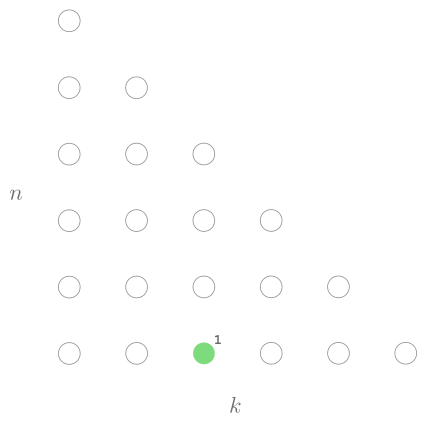

In [ ]:
#@title ###Binomial coefficient recursion
%%html

<div id="slide_0" style="max-width:750px; height:200px;">
<font face="helvetica" color="black" size="4">
Binary tree
</font><br>
<?xml version="1.0" encoding="UTF-8"?>
<svg width="134.31mm" height="175.76mm" version="1.1" viewBox="0 0 274.7 361.51" xmlns="http://www.w3.org/2000/svg" xmlns:cc="http://creativecommons.org/ns#" xmlns:dc="http://purl.org/dc/elements/1.1/" xmlns:ns32="http://www.iki.fi/pav/software/textext/" xmlns:rdf="http://www.w3.org/1999/02/22-rdf-syntax-ns#">
 <metadata>
  <rdf:RDF>
   <cc:Work rdf:about="">
    <dc:format>image/svg+xml</dc:format>
    <dc:type rdf:resource="http://purl.org/dc/dcmitype/StillImage"/>
    <dc:title/>
   </cc:Work>
  </rdf:RDF>
  <rdf:RDF>
   <cc:Work rdf:about="">
    <dc:title/>
   </cc:Work>
  </rdf:RDF>
  <rdf:RDF>
   <cc:Work rdf:about="">
    <dc:title/>
   </cc:Work>
  </rdf:RDF>
 </metadata>
 <g transform="translate(-72.828 73.733)">
  <text x="644.54865" y="177.05048" style="font-family:'Courier New';font-size:11.663px;font-weight:bold;line-height:1.25;stroke-width:.29156" xml:space="preserve"><tspan x="644.54865" y="177.05048" style="fill-opacity:.54546;fill:#000000;stroke-width:.29156"/></text>
  <rect x="185.89" y="-68.487" width="23.833" height="23.833" ry="3.1527" style="fill-opacity:.99621;fill:#ffffff;opacity:.999;stroke-linecap:round;stroke-width:.656;stroke:#c3c3c3"/>
  <path d="m200.59-55.45c0-1.473-1.0078-2.7134-2.3451-2.7134-0.58144 0-1.1241 0.19381-1.5698 0.63957v-2.4226c0.25195 0.0775 0.65896 0.15505 1.0466 0.15505 1.5311 0 2.4033-1.1241 2.4033-1.2791 0-0.0775-0.0388-0.13568-0.13568-0.13568 0 0-0.0387 0-0.0969 0.0388-0.25195 0.11629-0.85278 0.36825-1.6862 0.36825-0.48453 0-1.066-0.0969-1.6474-0.34886-0.0969-0.0388-0.11628-0.0388-0.13567-0.0388-0.13568 0-0.13568 0.0969-0.13568 0.29072v3.663c0 0.2132 0 0.3101 0.17443 0.3101 0.0969 0 0.11629-0.0194 0.17443-0.0969 0.13567-0.19381 0.58143-0.87215 1.5892-0.87215 0.63957 0 0.94967 0.56205 1.0466 0.79463 0.19381 0.46515 0.23258 0.9303 0.23258 1.5505 0 0.44578 0 1.1823-0.3101 1.7056-0.29073 0.48452-0.75588 0.79462-1.3179 0.79462-0.89154 0-1.6087-0.65896-1.8219-1.3761 0.0387 0 0.0775 0.0194 0.2132 0.0194 0.407 0 0.6202-0.3101 0.6202-0.60082 0-0.3101-0.2132-0.6202-0.6202-0.6202-0.17442 0-0.60082 0.0969-0.60082 0.65896 0 1.066 0.85277 2.2676 2.2289 2.2676 1.4342 0 2.694-1.1822 2.694-2.7522z" style="fill-opacity:.63636;fill:#000000;stroke-width:1.2404"/>
  <g transform="translate(-.0059814 -.001831)">
   <rect x="185.9" y="-68.485" width="23.833" height="23.833" ry="3.1527" style="fill-opacity:.99621;fill:#ffffff;opacity:.999;stroke-linecap:round;stroke-width:.656;stroke:#c3c3c3"/>
   <text x="644.54865" y="177.05048" style="font-family:'Courier New';font-size:11.663px;font-weight:bold;line-height:1.25;stroke-width:.29156" xml:space="preserve"><tspan x="644.54865" y="177.05048" style="fill-opacity:.54546;fill:#000000;stroke-width:.29156"/></text>
   <g transform="translate(-349.21,8.4206)">
    <g transform="translate(-69.587,-21.63)">
     <rect x="602.79" y="268.21" width="15.758" height="23.952" ry="3.1684" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.53475;stroke:#c3c3c3"/>
     <rect x="604.7" y="-55.275" width="23.833" height="23.833" ry="3.1527" style="fill-opacity:.99621;fill:#ffffff;opacity:.999;stroke-linecap:round;stroke-width:.656;stroke:#c3c3c3"/>
     <rect x="534.99" y="35.012" width="23.833" height="23.833" ry="3.1527" style="fill-opacity:.99621;fill:#ffffff;opacity:.999;stroke-linecap:round;stroke-width:.656;stroke:#c3c3c3"/>
     <rect x="674.8" y="34.87" width="23.833" height="23.833" ry="3.1527" style="fill-opacity:.99621;fill:#ffffff;opacity:.999;stroke-linecap:round;stroke-width:.656;stroke:#c3c3c3"/>
     <path d="m546.88 59.296-37.408 51.893" style="fill:none;stroke-opacity:.23106;stroke-width:.60862;stroke:#000000"/>
     <rect x="496.97" y="111.6" width="23.833" height="23.833" ry="3.1527" style="fill-opacity:.99621;fill:#ffffff;opacity:.999;stroke-linecap:round;stroke-width:.656;stroke:#c3c3c3"/>
     <rect x="570.76" y="111.6" width="23.833" height="23.833" ry="3.1527" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.656;stroke:#c3c3c3"/>
     <path d="m546.67 59.513 36.8 51.676" style="fill:none;stroke-opacity:.23106;stroke-width:.60862;stroke:#000000"/>
     <rect x="638.08" y="112.15" width="23.833" height="23.833" ry="3.1527" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.656;stroke:#c3c3c3"/>
     <rect x="711.08" y="112.1" width="23.833" height="23.833" ry="3.1527" style="fill-opacity:.63636;fill:#000000;opacity:.999"/>
     <path d="m649.48 136.52-19.915 51.886" style="fill:none;stroke-opacity:.23106;stroke-width:.60212;stroke:#000000"/>
     <rect x="619.27" y="187.99" width="23.833" height="23.833" ry="3.1527" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.656;stroke:#c3c3c3"/>
     <rect x="656.98" y="188.93" width="23.833" height="23.833" ry="3.1527" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.656;stroke:#c3c3c3"/>
     <path d="m649.48 136.52 19.915 51.946" style="fill:none;stroke-opacity:.23106;stroke-width:.60212;stroke:#000000"/>
     <path d="m583.62 135.98-19.3 51.844" style="fill:none;stroke-opacity:.23106;stroke-width:.60862;stroke:#000000"/>
     <path d="m583.62 135.98 19.3 51.844" style="fill:none;stroke-opacity:.23106;stroke-width:.60862;stroke:#000000"/>
     <path d="m686.8 59.114-36.757 52.545" style="fill:none;stroke-opacity:.23106;stroke-width:.60862;stroke:#000000"/>
     <path d="m686.8 59.114 36.974 52.458" style="fill:none;stroke-opacity:.23106;stroke-width:.60862;stroke:#000000"/>
     <path d="m616.79-31.681-70.058 66.428" style="fill:none;stroke-opacity:.23106;stroke-width:.60862;stroke:#000000"/>
     <path d="m616.79-31.681 70.35 66.259" style="fill:none;stroke-opacity:.23106;stroke-width:.60862;stroke:#000000"/>
     <path d="m724.49 136.15-19.915 51.886" style="fill:none;stroke-opacity:.23106;stroke-width:.60212;stroke:#000000"/>
     <rect x="692.63" y="187.79" width="23.833" height="23.833" ry="3.1527" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.656;stroke:#c3c3c3"/>
     <rect x="731.99" y="188.56" width="23.833" height="23.833" ry="3.1527" style="fill-opacity:.99621;fill:#ffffff;opacity:.999;stroke-linecap:round;stroke-width:.656;stroke:#c3c3c3"/>
     <path d="m724.49 136.15 19.915 51.946" style="fill:none;stroke-opacity:.23106;stroke-width:.60212;stroke:#000000"/>
     <rect x="551.87" y="188.3" width="23.833" height="23.833" ry="3.1527" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.656;stroke:#c3c3c3"/>
     <rect x="589.58" y="189.24" width="23.833" height="23.833" ry="3.1527" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.656;stroke:#c3c3c3"/>
     <rect x="584.82" y="268.15" width="15.758" height="23.952" ry="3.1684" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.53475;stroke:#c3c3c3"/>
     <path d="m601.81 213.41-8.8991 54.688" style="fill:none;stroke-opacity:.23106;stroke-width:.5028;stroke:#000000"/>
     <path d="m601.81 213.41 8.8991 54.797" style="fill:none;stroke-opacity:.23106;stroke-width:.5028;stroke:#000000"/>
     <g transform="matrix(.88198 0 0 .88198 435.3 -45.837)" style="fill:#000000">
      <g transform="translate(295.8,267.17)">
       <path d="m6.9844 23.422c0-0.04687-0.03125-0.0625-0.046875-0.09375-0.375-0.375-1.0312-1.0312-1.7031-2.1094-1.6094-2.5781-2.3281-5.8125-2.3281-9.6562 0-2.6875 0.35938-6.1406 2-9.1094 0.78125-1.4219 1.6094-2.2344 2.0469-2.6719 0.03125-0.03125 0.03125-0.046875 0.03125-0.078125 0-0.10938-0.078125-0.10938-0.21875-0.10938s-0.15625 0-0.3125 0.15625c-3.3281 3.0469-4.375 7.6094-4.375 11.797 0 3.9219 0.89062 7.875 3.4219 10.859 0.20312 0.21875 0.57812 0.625 0.98438 0.98438 0.125 0.125 0.14062 0.125 0.28125 0.125s0.21875 0 0.21875-0.09375z" style="fill-opacity:.63636;fill:#000000"/>
      </g>
     </g>
     <g transform="matrix(.88198 0 0 .88198 435.3 -45.837)" style="fill:#000000">
      <g transform="translate(303.13,274.48)">
       <path d="m1.2656-0.76562 1.0625-1.0312c1.5469-1.375 2.1406-1.9062 2.1406-2.9062 0-1.1406-0.89062-1.9375-2.1094-1.9375-1.125 0-1.8594 0.92188-1.8594 1.8125 0 0.54688 0.5 0.54688 0.53125 0.54688 0.17188 0 0.51562-0.10938 0.51562-0.53125 0-0.25-0.1875-0.51562-0.53125-0.51562-0.078125 0-0.09375 0-0.125 0.015625 0.21875-0.65625 0.76562-1.0156 1.3438-1.0156 0.90625 0 1.3281 0.8125 1.3281 1.625 0 0.79688-0.48438 1.5781-1.0469 2.2031l-1.9062 2.125c-0.10938 0.10938-0.10938 0.14062-0.10938 0.375h3.7031l0.26562-1.7344h-0.23438c-0.0625 0.29688-0.125 0.73438-0.23438 0.89062-0.0625 0.078125-0.71875 0.078125-0.9375 0.078125z" style="fill-opacity:.63636;fill:#000000"/>
      </g>
     </g>
     <g transform="matrix(.88198 0 0 .88198 435.3 -45.837)" style="fill:#000000">
      <g transform="translate(303.13,288.05)">
       <path d="m2.9375-6.375c0-0.25 0-0.26562-0.23438-0.26562-0.625 0.64062-1.5 0.64062-1.8125 0.64062v0.3125c0.20312 0 0.78125 0 1.2969-0.26562v5.1719c0 0.35938-0.03125 0.46875-0.92188 0.46875h-0.3125v0.3125c0.34375-0.03125 1.2031-0.03125 1.6094-0.03125 0.39062 0 1.2656 0 1.6094 0.03125v-0.3125h-0.3125c-0.90625 0-0.92188-0.10938-0.92188-0.46875z" style="fill-opacity:.63636;fill:#000000"/>
      </g>
     </g>
     <g transform="matrix(.88198 0 0 .88198 435.3 -45.837)" style="fill:#000000">
      <g transform="translate(308.12,267.17)">
       <path d="m5.25 11.562c0-3.9219-0.89062-7.8594-3.4219-10.844-0.20312-0.23438-0.57812-0.64062-0.98438-1-0.125-0.125-0.14062-0.125-0.28125-0.125-0.125 0-0.21875 0-0.21875 0.10938 0 0.03125 0.046875 0.078125 0.0625 0.09375 0.34375 0.35938 1.0156 1.0312 1.6875 2.1094 1.6094 2.5625 2.3281 5.8125 2.3281 9.6406 0 2.6875-0.35938 6.1406-2 9.125-0.78125 1.4062-1.6094 2.2344-2.0312 2.6562-0.015625 0.03125-0.046875 0.0625-0.046875 0.09375 0 0.09375 0.09375 0.09375 0.21875 0.09375 0.14062 0 0.15625 0 0.3125-0.15625 3.3281-3.0312 4.375-7.5938 4.375-11.797z" style="fill-opacity:.63636;fill:#000000"/>
      </g>
     </g>
     <g transform="matrix(.87489 0 0 .87489 749.01 32.823)" ns32:alignment="middle center" ns32:inkscapeversion="1.0" ns32:jacobian_sqrt="3.77952" ns32:pdfconverter="inkscape" ns32:preamble="C:\\Users\\User\\AppData\\Roaming\\inkscape\\extensions\\textext\\default_packages.tex" ns32:scale="2.834645669291339" ns32:texconverter="pdflatex" ns32:text="$${3 \\choose 2}$$\n$${1 \\choose 0}$$" ns32:version="1.1.0">
      <g transform="translate(-297.88,-135.75)">
       <g id="id-054e7c52-83cb-49ad-9e0b-07db60eda20f" transform="translate(-197.33,92)" style="fill:#000000">
        <g transform="translate(295.8,136.16)">
         <path d="m6.9844 23.422c0-0.04687-0.03125-0.0625-0.046875-0.09375-0.375-0.375-1.0312-1.0312-1.7031-2.1094-1.6094-2.5781-2.3281-5.8125-2.3281-9.6562 0-2.6875 0.35938-6.1406 2-9.1094 0.78125-1.4219 1.6094-2.2344 2.0469-2.6719 0.03125-0.03125 0.03125-0.046875 0.03125-0.078125 0-0.10938-0.078125-0.10938-0.21875-0.10938s-0.15625 0-0.3125 0.15625c-3.3281 3.0469-4.375 7.6094-4.375 11.797 0 3.9219 0.89062 7.875 3.4219 10.859 0.20312 0.21875 0.57812 0.625 0.98438 0.98438 0.125 0.125 0.14062 0.125 0.28125 0.125s0.21875 0 0.21875-0.09375z" style="fill-opacity:.63636;fill:#000000"/>
        </g>
       </g>
       <g id="id-3678e7a4-8d78-4d81-a22d-cc59e81d054d" transform="translate(-197.33,92)" style="fill:#000000">
        <g transform="translate(303.13,143.47)">
         <path id="id-b7c1f299-2eef-4339-8966-37b5f8c75bef" d="m2.8906-3.5156c0.8125-0.26562 1.3906-0.95312 1.3906-1.75 0-0.8125-0.875-1.375-1.8281-1.375-1 0-1.7656 0.59375-1.7656 1.3594 0 0.32812 0.21875 0.51562 0.51562 0.51562s0.5-0.21875 0.5-0.51562c0-0.48438-0.46875-0.48438-0.60938-0.48438 0.29688-0.5 0.95312-0.625 1.3125-0.625 0.42188 0 0.96875 0.21875 0.96875 1.1094 0 0.125-0.03125 0.70312-0.28125 1.1406-0.29688 0.48438-0.64062 0.51562-0.89062 0.51562-0.078125 0.015625-0.3125 0.03125-0.39062 0.03125-0.078125 0.015625-0.14062 0.03125-0.14062 0.125 0 0.10938 0.0625 0.10938 0.23438 0.10938h0.4375c0.8125 0 1.1875 0.67188 1.1875 1.6562 0 1.3594-0.6875 1.6406-1.125 1.6406s-1.1875-0.17188-1.5312-0.75c0.34375 0.046875 0.65625-0.17188 0.65625-0.54688 0-0.35938-0.26562-0.5625-0.54688-0.5625-0.25 0-0.5625 0.14062-0.5625 0.57812 0 0.90625 0.92188 1.5625 2.0156 1.5625 1.2188 0 2.125-0.90625 2.125-1.9219 0-0.8125-0.64062-1.5938-1.6719-1.8125z" style="fill-opacity:.63636;fill:#000000"/>
        </g>
       </g>
       <g transform="translate(-197.33,92)" style="fill:#000000">
        <g transform="translate(303.13,157.04)">
         <path d="m1.2656-0.76562 1.0625-1.0312c1.5469-1.375 2.1406-1.9062 2.1406-2.9062 0-1.1406-0.89062-1.9375-2.1094-1.9375-1.125 0-1.8594 0.92188-1.8594 1.8125 0 0.54688 0.5 0.54688 0.53125 0.54688 0.17188 0 0.51562-0.10938 0.51562-0.53125 0-0.25-0.1875-0.51562-0.53125-0.51562-0.078125 0-0.09375 0-0.125 0.015625 0.21875-0.65625 0.76562-1.0156 1.3438-1.0156 0.90625 0 1.3281 0.8125 1.3281 1.625 0 0.79688-0.48438 1.5781-1.0469 2.2031l-1.9062 2.125c-0.10938 0.10938-0.10938 0.14062-0.10938 0.375h3.7031l0.26562-1.7344h-0.23438c-0.0625 0.29688-0.125 0.73438-0.23438 0.89062-0.0625 0.078125-0.71875 0.078125-0.9375 0.078125z" style="fill-opacity:.63636;fill:#000000"/>
        </g>
       </g>
       <g id="id-1e0bf451-ed8e-4ae1-b1e2-fd4fb0dfaf0c" transform="translate(-197.33,92)" style="fill:#000000">
        <g transform="translate(308.12,136.16)">
         <path d="m5.25 11.562c0-3.9219-0.89062-7.8594-3.4219-10.844-0.20312-0.23438-0.57812-0.64062-0.98438-1-0.125-0.125-0.14062-0.125-0.28125-0.125-0.125 0-0.21875 0-0.21875 0.10938 0 0.03125 0.046875 0.078125 0.0625 0.09375 0.34375 0.35938 1.0156 1.0312 1.6875 2.1094 1.6094 2.5625 2.3281 5.8125 2.3281 9.6406 0 2.6875-0.35938 6.1406-2 9.125-0.78125 1.4062-1.6094 2.2344-2.0312 2.6562-0.015625 0.03125-0.046875 0.0625-0.046875 0.09375 0 0.09375 0.09375 0.09375 0.21875 0.09375 0.14062 0 0.15625 0 0.3125-0.15625 3.3281-3.0312 4.375-7.5938 4.375-11.797z" style="fill-opacity:.63636;fill:#000000"/>
        </g>
       </g>
       <g transform="translate(-164.73,243.59)" style="fill:#000000">
        <g transform="translate(295.8,167.04)">
         <path id="id-5ba9cefd-b461-475b-80c2-b6b1eadd4c0d" d="m6.0906 19.946c0-0.04687-0.03125-0.0625-0.046875-0.09375-0.375-0.375-1.0312-1.0312-1.7031-2.1094-1.6094-2.5781-2.3281-5.8125-2.3281-9.6562 0-2.6875 0.35938-6.1406 2-9.1094 0.78125-1.4219 1.6094-2.2344 2.0469-2.6719 0.03125-0.03125 0.03125-0.046875 0.03125-0.078125 0-0.10938-0.078125-0.10938-0.21875-0.10938s-0.15625 0-0.3125 0.15625c-3.3281 3.0469-4.375 7.6094-4.375 11.797 0 3.9219 0.89062 7.875 3.4219 10.859 0.20312 0.21875 0.57812 0.625 0.98438 0.98438 0.125 0.125 0.14062 0.125 0.28125 0.125s0.21875 0 0.21875-0.09375z" style="fill-opacity:.63636;fill:#000000"/>
        </g>
       </g>
       <g transform="translate(-164.73,243.59)" style="fill:#000000">
        <g transform="translate(303.13,174.35)">
         <path d="m2.0437-9.8509c0-0.25 0-0.26563-0.23438-0.26563-0.625 0.64063-1.5 0.64063-1.8125 0.64063v0.3125c0.20312 0 0.78125 0 1.2969-0.26562v5.1719c0 0.35938-0.03125 0.46875-0.92187 0.46875h-0.3125v0.3125c0.34375-0.03125 1.2031-0.03125 1.6094-0.03125 0.39062 0 1.2656 0 1.6094 0.03125v-0.3125h-0.3125c-0.90625 0-0.92188-0.10938-0.92188-0.46875z" style="fill-opacity:.63636;fill:#000000"/>
        </g>
       </g>
       <g id="id-3271bd11-1738-4cfd-a533-5781c4fa8fdf" transform="translate(-164.73,243.59)" style="fill:#000000">
        <g transform="translate(303.13,187.92)">
         <path d="m3.6843-6.6634c0-0.79688-0.046875-1.5938-0.39062-2.3281-0.45312-0.96875-1.2812-1.125-1.6875-1.125-0.60937 0-1.3281 0.26563-1.75 1.1875-0.3125 0.6875-0.35938 1.4688-0.35938 2.2656 0 0.75 0.03125 1.6406 0.45312 2.4062 0.42188 0.79688 1.1562 1 1.6406 1 0.53125 0 1.2969-0.20312 1.7344-1.1562 0.3125-0.6875 0.35938-1.4688 0.35938-2.25zm-2.0938 3.1875c-0.39062 0-0.98437-0.25-1.1562-1.2031-0.10938-0.59375-0.10938-1.5156-0.10938-2.1094 0-0.64062 0-1.2969 0.078125-1.8281 0.1875-1.1875 0.9375-1.2812 1.1875-1.2812 0.32812 0 0.98438 0.1875 1.1719 1.1719 0.10938 0.5625 0.10938 1.3125 0.10938 1.9375 0 0.75 0 1.4219-0.10938 2.0625-0.15625 0.95312-0.71875 1.25-1.1719 1.25z" style="fill-opacity:.63636;fill:#000000"/>
        </g>
       </g>
       <g id="id-ecc515a2-fb26-451e-b6f3-c92299f9a9bb" transform="translate(-164.73,243.59)" style="fill:#000000">
        <g transform="translate(308.12,167.04)">
         <path d="m4.3562 8.0866c0-3.9219-0.89062-7.8594-3.4219-10.844-0.20312-0.23438-0.57812-0.64062-0.98438-1-0.125-0.125-0.14062-0.125-0.28125-0.125-0.125 0-0.21875 0-0.21875 0.10938 0 0.03125 0.046875 0.078125 0.0625 0.09375 0.34375 0.35938 1.0156 1.0312 1.6875 2.1094 1.6094 2.5625 2.3281 5.8125 2.3281 9.6406 0 2.6875-0.35938 6.1406-2 9.125-0.78125 1.4062-1.6094 2.2344-2.0312 2.6562-0.015625 0.03125-0.046875 0.0625-0.046875 0.09375 0 0.09375 0.09375 0.09375 0.21875 0.09375 0.14062 0 0.15625 0 0.3125-0.15625 3.3281-3.0312 4.375-7.5938 4.375-11.797z" style="fill-opacity:.63636;fill:#000000"/>
        </g>
       </g>
       <g transform="translate(-120.91,92.45)" style="fill:#000000">
        <g transform="translate(295.8,136.16)">
         <path d="m6.9844 23.422c0-0.04687-0.03125-0.0625-0.046875-0.09375-0.375-0.375-1.0312-1.0312-1.7031-2.1094-1.6094-2.5781-2.3281-5.8125-2.3281-9.6562 0-2.6875 0.35938-6.1406 2-9.1094 0.78125-1.4219 1.6094-2.2344 2.0469-2.6719 0.03125-0.03125 0.03125-0.046875 0.03125-0.078125 0-0.10938-0.078125-0.10938-0.21875-0.10938s-0.15625 0-0.3125 0.15625c-3.3281 3.0469-4.375 7.6094-4.375 11.797 0 3.9219 0.89062 7.875 3.4219 10.859 0.20312 0.21875 0.57812 0.625 0.98438 0.98438 0.125 0.125 0.14062 0.125 0.28125 0.125s0.21875 0 0.21875-0.09375z" style="fill-opacity:.63636;fill:#000000"/>
        </g>
       </g>
       <g transform="translate(-120.91,92.45)" style="fill:#000000">
        <g transform="translate(303.13,143.47)">
         <path d="m2.8906-3.5156c0.8125-0.26562 1.3906-0.95312 1.3906-1.75 0-0.8125-0.875-1.375-1.8281-1.375-1 0-1.7656 0.59375-1.7656 1.3594 0 0.32812 0.21875 0.51562 0.51562 0.51562s0.5-0.21875 0.5-0.51562c0-0.48438-0.46875-0.48438-0.60938-0.48438 0.29688-0.5 0.95312-0.625 1.3125-0.625 0.42188 0 0.96875 0.21875 0.96875 1.1094 0 0.125-0.03125 0.70312-0.28125 1.1406-0.29688 0.48438-0.64062 0.51562-0.89062 0.51562-0.078125 0.015625-0.3125 0.03125-0.39062 0.03125-0.078125 0.015625-0.14062 0.03125-0.14062 0.125 0 0.10938 0.0625 0.10938 0.23438 0.10938h0.4375c0.8125 0 1.1875 0.67188 1.1875 1.6562 0 1.3594-0.6875 1.6406-1.125 1.6406s-1.1875-0.17188-1.5312-0.75c0.34375 0.046875 0.65625-0.17188 0.65625-0.54688 0-0.35938-0.26562-0.5625-0.54688-0.5625-0.25 0-0.5625 0.14062-0.5625 0.57812 0 0.90625 0.92188 1.5625 2.0156 1.5625 1.2188 0 2.125-0.90625 2.125-1.9219 0-0.8125-0.64062-1.5938-1.6719-1.8125z" style="fill-opacity:.63636;fill:#000000"/>
        </g>
       </g>
       <g transform="translate(-120.91,92.45)" style="fill:#000000">
        <g transform="translate(303.13,157.04)">
         <path d="m1.2656-0.76562 1.0625-1.0312c1.5469-1.375 2.1406-1.9062 2.1406-2.9062 0-1.1406-0.89062-1.9375-2.1094-1.9375-1.125 0-1.8594 0.92188-1.8594 1.8125 0 0.54688 0.5 0.54688 0.53125 0.54688 0.17188 0 0.51562-0.10938 0.51562-0.53125 0-0.25-0.1875-0.51562-0.53125-0.51562-0.078125 0-0.09375 0-0.125 0.015625 0.21875-0.65625 0.76562-1.0156 1.3438-1.0156 0.90625 0 1.3281 0.8125 1.3281 1.625 0 0.79688-0.48438 1.5781-1.0469 2.2031l-1.9062 2.125c-0.10938 0.10938-0.10938 0.14062-0.10938 0.375h3.7031l0.26562-1.7344h-0.23438c-0.0625 0.29688-0.125 0.73438-0.23438 0.89062-0.0625 0.078125-0.71875 0.078125-0.9375 0.078125z" style="fill-opacity:.63636;fill:#000000"/>
        </g>
       </g>
       <g transform="translate(-120.91,92.45)" style="fill:#000000">
        <g transform="translate(308.12,136.16)">
         <path d="m5.25 11.562c0-3.9219-0.89062-7.8594-3.4219-10.844-0.20312-0.23438-0.57812-0.64062-0.98438-1-0.125-0.125-0.14062-0.125-0.28125-0.125-0.125 0-0.21875 0-0.21875 0.10938 0 0.03125 0.046875 0.078125 0.0625 0.09375 0.34375 0.35938 1.0156 1.0312 1.6875 2.1094 1.6094 2.5625 2.3281 5.8125 2.3281 9.6406 0 2.6875-0.35938 6.1406-2 9.125-0.78125 1.4062-1.6094 2.2344-2.0312 2.6562-0.015625 0.03125-0.046875 0.0625-0.046875 0.09375 0 0.09375 0.09375 0.09375 0.21875 0.09375 0.14062 0 0.15625 0 0.3125-0.15625 3.3281-3.0312 4.375-7.5938 4.375-11.797z" style="fill-opacity:.63636;fill:#000000"/>
        </g>
       </g>
       <rect x="207.51" y="404.72" width="18.012" height="27.377" ry="3.6215" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.61122;stroke:#c3c3c3"/>
       <rect x="186.71" y="404.84" width="18.012" height="27.377" ry="3.6215" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.61122;stroke:#c3c3c3"/>
       <path d="m206.44 341.77-10.499 62.78" style="fill:none;stroke-opacity:.23106;stroke-width:.57104;stroke:#000000"/>
       <path d="m206.43 341.77 10.061 62.785" style="fill:none;stroke-opacity:.23106;stroke-width:.55904;stroke:#000000"/>
       <g transform="translate(-87.925,243.8)" style="fill:#000000">
        <g transform="translate(295.8,167.04)">
         <path d="m6.0484 19.66c0-0.04687-0.03125-0.0625-0.046875-0.09375-0.375-0.375-1.0312-1.0312-1.7031-2.1094-1.6094-2.5781-2.3281-5.8125-2.3281-9.6562 0-2.6875 0.35938-6.1406 2-9.1094 0.78125-1.4219 1.6094-2.2344 2.0469-2.6719 0.03125-0.03125 0.03125-0.046875 0.03125-0.078125 0-0.10938-0.078125-0.10938-0.21875-0.10938s-0.15625 0-0.3125 0.15625c-3.3281 3.0469-4.375 7.6094-4.375 11.797 0 3.9219 0.89062 7.875 3.4219 10.859 0.20312 0.21875 0.57812 0.625 0.98438 0.98438 0.125 0.125 0.14062 0.125 0.28125 0.125s0.21875 0 0.21875-0.09375z" style="fill-opacity:.63636;fill:#000000"/>
        </g>
       </g>
       <g transform="translate(-87.925,243.8)" style="fill:#000000">
        <g transform="translate(303.13,174.35)">
         <path d="m2.0015-10.137c0-0.25 0-0.26562-0.23438-0.26562-0.625 0.64062-1.5 0.64062-1.8125 0.64062v0.3125c0.20312 0 0.78125 0 1.2969-0.26562v5.1719c0 0.35938-0.03125 0.46875-0.92187 0.46875h-0.3125v0.3125c0.34375-0.03125 1.2031-0.03125 1.6094-0.03125 0.39062 0 1.2656 0 1.6094 0.03125v-0.3125h-0.3125c-0.90625 0-0.92188-0.10938-0.92188-0.46875z" style="fill-opacity:.63636;fill:#000000"/>
        </g>
       </g>
       <g transform="translate(-87.925,243.8)" style="fill:#000000">
        <g transform="translate(303.13,187.92)">
         <path d="m3.6422-6.9491c0-0.79688-0.046875-1.5938-0.39062-2.3281-0.45312-0.96875-1.2812-1.125-1.6875-1.125-0.60937 0-1.3281 0.26562-1.75 1.1875-0.3125 0.6875-0.35938 1.4688-0.35938 2.2656 0 0.75 0.03125 1.6406 0.45312 2.4062 0.42188 0.79688 1.1562 1 1.6406 1 0.53125 0 1.2969-0.20312 1.7344-1.1562 0.3125-0.6875 0.35938-1.4688 0.35938-2.25zm-2.0938 3.1875c-0.39062 0-0.98437-0.25-1.1562-1.2031-0.10938-0.59375-0.10938-1.5156-0.10938-2.1094 0-0.64062 0-1.2969 0.078125-1.8281 0.1875-1.1875 0.9375-1.2812 1.1875-1.2812 0.32812 0 0.98438 0.1875 1.1719 1.1719 0.10938 0.5625 0.10938 1.3125 0.10938 1.9375 0 0.75 0 1.4219-0.10938 2.0625-0.15625 0.95312-0.71875 1.25-1.1719 1.25z" style="fill-opacity:.63636;fill:#000000"/>
        </g>
       </g>
       <g transform="translate(-87.925,243.8)" style="fill:#000000">
        <g transform="translate(308.12,167.04)">
         <path d="m4.314 7.8009c0-3.9219-0.89062-7.8594-3.4219-10.844-0.20313-0.23438-0.57813-0.64062-0.98438-1-0.125-0.125-0.14062-0.125-0.28125-0.125-0.125 0-0.21875 0-0.21875 0.10938 0 0.03125 0.046875 0.078125 0.0625 0.09375 0.34375 0.35938 1.0156 1.0312 1.6875 2.1094 1.6094 2.5625 2.3281 5.8125 2.3281 9.6406 0 2.6875-0.35938 6.1406-2 9.125-0.78125 1.4062-1.6094 2.2344-2.0312 2.6562-0.015625 0.03125-0.046875 0.0625-0.046875 0.09375 0 0.09375 0.09375 0.09375 0.21875 0.09375 0.14062 0 0.15625 0 0.3125-0.15625 3.3281-3.0312 4.375-7.5938 4.375-11.797z" style="fill-opacity:.63636;fill:#000000"/>
        </g>
       </g>
       <rect x="248.26" y="405.2" width="18.012" height="27.377" ry="3.6215" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.61122;stroke:#c3c3c3"/>
       <rect x="227.45" y="405.16" width="18.012" height="27.377" ry="3.6215" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.61122;stroke:#c3c3c3"/>
       <path d="m246.97 340.57-10.395 64.222" style="fill:none;stroke-opacity:.23106;stroke-width:.5747;stroke:#000000"/>
       <path d="m246.97 340.57 10.395 64.222" style="fill:none;stroke-opacity:.23106;stroke-width:.5747;stroke:#000000"/>
       <g transform="translate(-48.113,240.52)" style="fill:#000000">
        <g transform="translate(295.8,167.04)">
         <path d="m6.9844 23.422c0-0.04687-0.03125-0.0625-0.046875-0.09375-0.375-0.375-1.0312-1.0312-1.7031-2.1094-1.6094-2.5781-2.3281-5.8125-2.3281-9.6562 0-2.6875 0.35938-6.1406 2-9.1094 0.78125-1.4219 1.6094-2.2344 2.0469-2.6719 0.03125-0.03125 0.03125-0.046875 0.03125-0.078125 0-0.10938-0.078125-0.10938-0.21875-0.10938s-0.15625 0-0.3125 0.15625c-3.3281 3.0469-4.375 7.6094-4.375 11.797 0 3.9219 0.89062 7.875 3.4219 10.859 0.20312 0.21875 0.57812 0.625 0.98438 0.98438 0.125 0.125 0.14062 0.125 0.28125 0.125s0.21875 0 0.21875-0.09375z" style="fill-opacity:.63636;fill:#000000"/>
        </g>
       </g>
       <g transform="translate(-48.113,240.52)" style="fill:#000000">
        <g transform="translate(303.13,174.35)">
         <path d="m2.9375-6.375c0-0.25 0-0.26562-0.23438-0.26562-0.625 0.64062-1.5 0.64062-1.8125 0.64062v0.3125c0.20312 0 0.78125 0 1.2969-0.26562v5.1719c0 0.35938-0.03125 0.46875-0.92188 0.46875h-0.3125v0.3125c0.34375-0.03125 1.2031-0.03125 1.6094-0.03125 0.39062 0 1.2656 0 1.6094 0.03125v-0.3125h-0.3125c-0.90625 0-0.92188-0.10938-0.92188-0.46875z" style="fill-opacity:.63636;fill:#000000"/>
        </g>
       </g>
       <g transform="translate(-48.113,240.52)" style="fill:#000000">
        <g transform="translate(303.13,187.92)">
         <path d="m4.5781-3.1875c0-0.79688-0.046875-1.5938-0.39062-2.3281-0.45312-0.96875-1.2812-1.125-1.6875-1.125-0.60938 0-1.3281 0.26562-1.75 1.1875-0.3125 0.6875-0.35938 1.4688-0.35938 2.2656 0 0.75 0.03125 1.6406 0.45312 2.4062 0.42188 0.79688 1.1562 1 1.6406 1 0.53125 0 1.2969-0.20312 1.7344-1.1562 0.3125-0.6875 0.35938-1.4688 0.35938-2.25zm-2.0938 3.1875c-0.39062 0-0.98438-0.25-1.1562-1.2031-0.10938-0.59375-0.10938-1.5156-0.10938-2.1094 0-0.64062 0-1.2969 0.078125-1.8281 0.1875-1.1875 0.9375-1.2812 1.1875-1.2812 0.32812 0 0.98438 0.1875 1.1719 1.1719 0.10938 0.5625 0.10938 1.3125 0.10938 1.9375 0 0.75 0 1.4219-0.10938 2.0625-0.15625 0.95312-0.71875 1.25-1.1719 1.25z" style="fill-opacity:.63636;fill:#000000"/>
        </g>
       </g>
       <g transform="translate(-48.113,240.52)" style="fill:#000000">
        <g transform="translate(308.12,167.04)">
         <path d="m5.25 11.562c0-3.9219-0.89062-7.8594-3.4219-10.844-0.20312-0.23438-0.57812-0.64062-0.98438-1-0.125-0.125-0.14062-0.125-0.28125-0.125-0.125 0-0.21875 0-0.21875 0.10938 0 0.03125 0.046875 0.078125 0.0625 0.09375 0.34375 0.35938 1.0156 1.0312 1.6875 2.1094 1.6094 2.5625 2.3281 5.8125 2.3281 9.6406 0 2.6875-0.35938 6.1406-2 9.125-0.78125 1.4062-1.6094 2.2344-2.0312 2.6562-0.015625 0.03125-0.046875 0.0625-0.046875 0.09375 0 0.09375 0.09375 0.09375 0.21875 0.09375 0.14062 0 0.15625 0 0.3125-0.15625 3.3281-3.0312 4.375-7.5938 4.375-11.797z" style="fill-opacity:.63636;fill:#000000"/>
        </g>
       </g>
      </g>
     </g>
     <rect x="711.08" y="112.1" width="23.833" height="23.833" ry="3.1527" style="fill-opacity:.99621;fill:#ffffff;opacity:.999;stroke-linecap:round;stroke-width:.656;stroke:#c3c3c3"/>
    </g>
    <g transform="matrix(.88198 0 0 .88198 733.73 -78.631)" ns32:alignment="middle center" ns32:inkscapeversion="1.0" ns32:jacobian_sqrt="3.77952" ns32:pdfconverter="inkscape" ns32:preamble="C:\\Users\\User\\AppData\\Roaming\\inkscape\\extensions\\textext\\default_packages.tex" ns32:scale="2.834645669291339" ns32:texconverter="pdflatex" ns32:text="$$\n{5 \\choose 3}\n$$\n\n\n$$\n{4 \\choose 3}\n$$\n\n$$\n{4 \\choose 2}\n$$\n\n$$\n{3 \\choose 1}\n$$\n$$\n{2 \\choose 1}\n$$\n\n$$\n{2 \\choose 0}\n$$\n$$\n{1 \\choose 1}\n$$\n$$\n{3 \\choose 3}\n$$" ns32:version="1.1.0">
     <g transform="translate(-297.88,-135.75)">
      <g id="id-dde76428-803e-4a2c-b76f-347232ca606d" transform="translate(-219.3,3.4084)" style="fill:#000000">
       <g transform="translate(295.8,136.16)">
        <path id="id-88fa23de-641f-4344-8787-9f0541c290ab" d="m6.9844 23.422c0-0.04687-0.03125-0.0625-0.046875-0.09375-0.375-0.375-1.0312-1.0312-1.7031-2.1094-1.6094-2.5781-2.3281-5.8125-2.3281-9.6562 0-2.6875 0.35938-6.1406 2-9.1094 0.78125-1.4219 1.6094-2.2344 2.0469-2.6719 0.03125-0.03125 0.03125-0.046875 0.03125-0.078125 0-0.10938-0.078125-0.10938-0.21875-0.10938s-0.15625 0-0.3125 0.15625c-3.3281 3.0469-4.375 7.6094-4.375 11.797 0 3.9219 0.89062 7.875 3.4219 10.859 0.20312 0.21875 0.57812 0.625 0.98438 0.98438 0.125 0.125 0.14062 0.125 0.28125 0.125s0.21875 0 0.21875-0.09375z" style="fill-opacity:.63636;fill:#000000"/>
       </g>
      </g>
      <g transform="translate(-219.3,3.4084)" style="fill:#000000">
       <g transform="translate(303.13,143.47)">
        <path id="id-c9242785-ae4d-4411-9a1b-fb5e4c65372d" d="m4.4688-2c0-1.1875-0.8125-2.1875-1.8906-2.1875-0.46875 0-0.90625 0.15625-1.2656 0.51562v-1.9531c0.20312 0.0625 0.53125 0.125 0.84375 0.125 1.2344 0 1.9375-0.90625 1.9375-1.0312 0-0.0625-0.03125-0.10938-0.10938-0.10938 0 0-0.03125 0-0.078125 0.03125-0.20312 0.09375-0.6875 0.29688-1.3594 0.29688-0.39062 0-0.85938-0.078125-1.3281-0.28125-0.078125-0.03125-0.09375-0.03125-0.10938-0.03125-0.10938 0-0.10938 0.078125-0.10938 0.23438v2.9531c0 0.17188 0 0.25 0.14062 0.25 0.078125 0 0.09375-0.015625 0.14062-0.078125 0.10938-0.15625 0.46875-0.70312 1.2812-0.70312 0.51562 0 0.76562 0.45312 0.84375 0.64062 0.15625 0.375 0.1875 0.75 0.1875 1.25 0 0.35938 0 0.95312-0.25 1.375-0.23438 0.39062-0.60938 0.64062-1.0625 0.64062-0.71875 0-1.2969-0.53125-1.4688-1.1094 0.03125 0 0.0625 0.015625 0.17188 0.015625 0.32812 0 0.5-0.25 0.5-0.48438 0-0.25-0.17188-0.5-0.5-0.5-0.14062 0-0.48438 0.078125-0.48438 0.53125 0 0.85938 0.6875 1.8281 1.7969 1.8281 1.1562 0 2.1719-0.95312 2.1719-2.2188z" style="fill-opacity:.63636;fill:#000000"/>
       </g>
      </g>
      <g transform="translate(-219.3,3.4084)" style="fill:#000000">
       <g transform="translate(303.13,157.04)">
        <path d="m2.8906-3.5156c0.8125-0.26562 1.3906-0.95312 1.3906-1.75 0-0.8125-0.875-1.375-1.8281-1.375-1 0-1.7656 0.59375-1.7656 1.3594 0 0.32812 0.21875 0.51562 0.51562 0.51562s0.5-0.21875 0.5-0.51562c0-0.48438-0.46875-0.48438-0.60938-0.48438 0.29688-0.5 0.95312-0.625 1.3125-0.625 0.42188 0 0.96875 0.21875 0.96875 1.1094 0 0.125-0.03125 0.70312-0.28125 1.1406-0.29688 0.48438-0.64062 0.51562-0.89062 0.51562-0.078125 0.015625-0.3125 0.03125-0.39062 0.03125-0.078125 0.015625-0.14062 0.03125-0.14062 0.125 0 0.10938 0.0625 0.10938 0.23438 0.10938h0.4375c0.8125 0 1.1875 0.67188 1.1875 1.6562 0 1.3594-0.6875 1.6406-1.125 1.6406s-1.1875-0.17188-1.5312-0.75c0.34375 0.046875 0.65625-0.17188 0.65625-0.54688 0-0.35938-0.26562-0.5625-0.54688-0.5625-0.25 0-0.5625 0.14062-0.5625 0.57812 0 0.90625 0.92188 1.5625 2.0156 1.5625 1.2188 0 2.125-0.90625 2.125-1.9219 0-0.8125-0.64062-1.5938-1.6719-1.8125z" style="fill-opacity:.63636;fill:#000000"/>
       </g>
      </g>
      <g transform="translate(-219.3,3.4084)" style="fill:#000000">
       <g transform="translate(308.12,136.16)">
        <path d="m5.25 11.562c0-3.9219-0.89062-7.8594-3.4219-10.844-0.20312-0.23438-0.57812-0.64062-0.98438-1-0.125-0.125-0.14062-0.125-0.28125-0.125-0.125 0-0.21875 0-0.21875 0.10938 0 0.03125 0.046875 0.078125 0.0625 0.09375 0.34375 0.35938 1.0156 1.0312 1.6875 2.1094 1.6094 2.5625 2.3281 5.8125 2.3281 9.6406 0 2.6875-0.35938 6.1406-2 9.125-0.78125 1.4062-1.6094 2.2344-2.0312 2.6562-0.015625 0.03125-0.046875 0.0625-0.046875 0.09375 0 0.09375 0.09375 0.09375 0.21875 0.09375 0.14062 0 0.15625 0 0.3125-0.15625 3.3281-3.0312 4.375-7.5938 4.375-11.797z" style="fill-opacity:.63636;fill:#000000"/>
       </g>
      </g>
      <g transform="translate(-298.49,72.407)" style="fill:#000000">
       <g transform="translate(295.8,169.54)">
        <path id="id-9739149d-739a-40c9-9659-f583f560736a" d="m6.9844 23.422c0-0.04687-0.03125-0.0625-0.046875-0.09375-0.375-0.375-1.0312-1.0312-1.7031-2.1094-1.6094-2.5781-2.3281-5.8125-2.3281-9.6562 0-2.6875 0.35938-6.1406 2-9.1094 0.78125-1.4219 1.6094-2.2344 2.0469-2.6719 0.03125-0.03125 0.03125-0.046875 0.03125-0.078125 0-0.10938-0.078125-0.10938-0.21875-0.10938s-0.15625 0-0.3125 0.15625c-3.3281 3.0469-4.375 7.6094-4.375 11.797 0 3.9219 0.89062 7.875 3.4219 10.859 0.20312 0.21875 0.57812 0.625 0.98438 0.98438 0.125 0.125 0.14062 0.125 0.28125 0.125s0.21875 0 0.21875-0.09375z" style="fill-opacity:.63636;fill:#000000"/>
       </g>
      </g>
      <g transform="translate(-298.49,72.407)" style="fill:#000000">
       <g transform="translate(303.13,176.84)">
        <path id="id-899ee138-db5a-45e3-8acb-868ca3bc130f" d="m2.9375-1.6406v0.85938c0 0.35938-0.03125 0.46875-0.76562 0.46875h-0.20312v0.3125c0.40625-0.03125 0.92188-0.03125 1.3438-0.03125s0.9375 0 1.3594 0.03125v-0.3125h-0.21875c-0.73438 0-0.75-0.10938-0.75-0.46875v-0.85938h0.98438v-0.3125h-0.98438v-4.5312c0-0.20312 0-0.26562-0.17188-0.26562-0.078125 0-0.10938 0-0.1875 0.125l-3.0625 4.6719v0.3125zm0.046875-0.3125h-2.4219l2.4219-3.7188z" style="fill-opacity:.63636;fill:#000000"/>
       </g>
      </g>
      <g transform="translate(-298.49,72.407)" style="fill:#000000">
       <g transform="translate(303.13,190.42)">
        <path d="m2.8906-3.5156c0.8125-0.26562 1.3906-0.95312 1.3906-1.75 0-0.8125-0.875-1.375-1.8281-1.375-1 0-1.7656 0.59375-1.7656 1.3594 0 0.32812 0.21875 0.51562 0.51562 0.51562s0.5-0.21875 0.5-0.51562c0-0.48438-0.46875-0.48438-0.60938-0.48438 0.29688-0.5 0.95312-0.625 1.3125-0.625 0.42188 0 0.96875 0.21875 0.96875 1.1094 0 0.125-0.03125 0.70312-0.28125 1.1406-0.29688 0.48438-0.64062 0.51562-0.89062 0.51562-0.078125 0.015625-0.3125 0.03125-0.39062 0.03125-0.078125 0.015625-0.14062 0.03125-0.14062 0.125 0 0.10938 0.0625 0.10938 0.23438 0.10938h0.4375c0.8125 0 1.1875 0.67188 1.1875 1.6562 0 1.3594-0.6875 1.6406-1.125 1.6406s-1.1875-0.17188-1.5312-0.75c0.34375 0.046875 0.65625-0.17188 0.65625-0.54688 0-0.35938-0.26562-0.5625-0.54688-0.5625-0.25 0-0.5625 0.14062-0.5625 0.57812 0 0.90625 0.92188 1.5625 2.0156 1.5625 1.2188 0 2.125-0.90625 2.125-1.9219 0-0.8125-0.64062-1.5938-1.6719-1.8125z" style="fill-opacity:.63636;fill:#000000"/>
       </g>
      </g>
      <g transform="translate(-298.49,72.407)" style="fill:#000000">
       <g transform="translate(308.12,169.54)">
        <path d="m5.25 11.562c0-3.9219-0.89062-7.8594-3.4219-10.844-0.20312-0.23438-0.57812-0.64062-0.98438-1-0.125-0.125-0.14062-0.125-0.28125-0.125-0.125 0-0.21875 0-0.21875 0.10938 0 0.03125 0.046875 0.078125 0.0625 0.09375 0.34375 0.35938 1.0156 1.0312 1.6875 2.1094 1.6094 2.5625 2.3281 5.8125 2.3281 9.6406 0 2.6875-0.35938 6.1406-2 9.125-0.78125 1.4062-1.6094 2.2344-2.0312 2.6562-0.015625 0.03125-0.046875 0.0625-0.046875 0.09375 0 0.09375 0.09375 0.09375 0.21875 0.09375 0.14062 0 0.15625 0 0.3125-0.15625 3.3281-3.0312 4.375-7.5938 4.375-11.797z" style="fill-opacity:.63636;fill:#000000"/>
       </g>
      </g>
      <g transform="translate(-139.26,38.943)" style="fill:#000000">
       <g transform="translate(295.8,202.91)">
        <path id="id-5d298524-38ed-4475-991c-bee9432cb07d" d="m6.9844 23.422c0-0.04687-0.03125-0.0625-0.046875-0.09375-0.375-0.375-1.0312-1.0312-1.7031-2.1094-1.6094-2.5781-2.3281-5.8125-2.3281-9.6562 0-2.6875 0.35938-6.1406 2-9.1094 0.78125-1.4219 1.6094-2.2344 2.0469-2.6719 0.03125-0.03125 0.03125-0.046875 0.03125-0.078125 0-0.10938-0.078125-0.10938-0.21875-0.10938s-0.15625 0-0.3125 0.15625c-3.3281 3.0469-4.375 7.6094-4.375 11.797 0 3.9219 0.89062 7.875 3.4219 10.859 0.20312 0.21875 0.57812 0.625 0.98438 0.98438 0.125 0.125 0.14062 0.125 0.28125 0.125s0.21875 0 0.21875-0.09375z" style="fill-opacity:.63636;fill:#000000"/>
       </g>
      </g>
      <g id="id-6259d342-e676-4fc3-8259-829224333e9e" transform="translate(-139.26,38.943)" style="fill:#000000">
       <g transform="translate(303.13,210.22)">
        <path id="id-f4e2b8c8-cb74-428c-8784-cf9ff8a4dbfe" d="m2.9375-1.6406v0.85938c0 0.35938-0.03125 0.46875-0.76562 0.46875h-0.20312v0.3125c0.40625-0.03125 0.92188-0.03125 1.3438-0.03125s0.9375 0 1.3594 0.03125v-0.3125h-0.21875c-0.73438 0-0.75-0.10938-0.75-0.46875v-0.85938h0.98438v-0.3125h-0.98438v-4.5312c0-0.20312 0-0.26562-0.17188-0.26562-0.078125 0-0.10938 0-0.1875 0.125l-3.0625 4.6719v0.3125zm0.046875-0.3125h-2.4219l2.4219-3.7188z" style="fill-opacity:.63636;fill:#000000"/>
       </g>
      </g>
      <g transform="translate(-139.26,38.943)" style="fill:#000000">
       <g transform="translate(303.13,223.79)">
        <path id="id-c82826c8-dc61-4b91-9e10-26c801c762fc" d="m1.2656-0.76562 1.0625-1.0312c1.5469-1.375 2.1406-1.9062 2.1406-2.9062 0-1.1406-0.89062-1.9375-2.1094-1.9375-1.125 0-1.8594 0.92188-1.8594 1.8125 0 0.54688 0.5 0.54688 0.53125 0.54688 0.17188 0 0.51562-0.10938 0.51562-0.53125 0-0.25-0.1875-0.51562-0.53125-0.51562-0.078125 0-0.09375 0-0.125 0.015625 0.21875-0.65625 0.76562-1.0156 1.3438-1.0156 0.90625 0 1.3281 0.8125 1.3281 1.625 0 0.79688-0.48438 1.5781-1.0469 2.2031l-1.9062 2.125c-0.10938 0.10938-0.10938 0.14062-0.10938 0.375h3.7031l0.26562-1.7344h-0.23438c-0.0625 0.29688-0.125 0.73438-0.23438 0.89062-0.0625 0.078125-0.71875 0.078125-0.9375 0.078125z" style="fill-opacity:.63636;fill:#000000"/>
       </g>
      </g>
      <g transform="translate(-139.26,38.943)" style="fill:#000000">
       <g transform="translate(308.12,202.91)">
        <path d="m5.25 11.562c0-3.9219-0.89062-7.8594-3.4219-10.844-0.20312-0.23438-0.57812-0.64062-0.98438-1-0.125-0.125-0.14062-0.125-0.28125-0.125-0.125 0-0.21875 0-0.21875 0.10938 0 0.03125 0.046875 0.078125 0.0625 0.09375 0.34375 0.35938 1.0156 1.0312 1.6875 2.1094 1.6094 2.5625 2.3281 5.8125 2.3281 9.6406 0 2.6875-0.35938 6.1406-2 9.125-0.78125 1.4062-1.6094 2.2344-2.0312 2.6562-0.015625 0.03125-0.046875 0.0625-0.046875 0.09375 0 0.09375 0.09375 0.09375 0.21875 0.09375 0.14062 0 0.15625 0 0.3125-0.15625 3.3281-3.0312 4.375-7.5938 4.375-11.797z" style="fill-opacity:.63636;fill:#000000"/>
       </g>
      </g>
      <g id="id-98483219-7dc2-4135-b1f7-63e49a95f91f" transform="translate(-98.296,93.357)" style="fill:#000000">
       <g transform="translate(295.8,236.28)">
        <path id="id-d7b90a8e-3cf5-45cb-a643-1f35f49d658b" d="m6.9844 23.422c0-0.04687-0.03125-0.0625-0.046875-0.09375-0.375-0.375-1.0312-1.0312-1.7031-2.1094-1.6094-2.5781-2.3281-5.8125-2.3281-9.6562 0-2.6875 0.35938-6.1406 2-9.1094 0.78125-1.4219 1.6094-2.2344 2.0469-2.6719 0.03125-0.03125 0.03125-0.046875 0.03125-0.078125 0-0.10938-0.078125-0.10938-0.21875-0.10938s-0.15625 0-0.3125 0.15625c-3.3281 3.0469-4.375 7.6094-4.375 11.797 0 3.9219 0.89062 7.875 3.4219 10.859 0.20312 0.21875 0.57812 0.625 0.98438 0.98438 0.125 0.125 0.14062 0.125 0.28125 0.125s0.21875 0 0.21875-0.09375z" style="fill-opacity:.63636;fill:#000000"/>
       </g>
      </g>
      <g transform="translate(-98.296,93.357)" style="fill:#000000">
       <g transform="translate(303.13,243.59)">
        <path d="m2.8906-3.5156c0.8125-0.26562 1.3906-0.95312 1.3906-1.75 0-0.8125-0.875-1.375-1.8281-1.375-1 0-1.7656 0.59375-1.7656 1.3594 0 0.32812 0.21875 0.51562 0.51562 0.51562s0.5-0.21875 0.5-0.51562c0-0.48438-0.46875-0.48438-0.60938-0.48438 0.29688-0.5 0.95312-0.625 1.3125-0.625 0.42188 0 0.96875 0.21875 0.96875 1.1094 0 0.125-0.03125 0.70312-0.28125 1.1406-0.29688 0.48438-0.64062 0.51562-0.89062 0.51562-0.078125 0.015625-0.3125 0.03125-0.39062 0.03125-0.078125 0.015625-0.14062 0.03125-0.14062 0.125 0 0.10938 0.0625 0.10938 0.23438 0.10938h0.4375c0.8125 0 1.1875 0.67188 1.1875 1.6562 0 1.3594-0.6875 1.6406-1.125 1.6406s-1.1875-0.17188-1.5312-0.75c0.34375 0.046875 0.65625-0.17188 0.65625-0.54688 0-0.35938-0.26562-0.5625-0.54688-0.5625-0.25 0-0.5625 0.14062-0.5625 0.57812 0 0.90625 0.92188 1.5625 2.0156 1.5625 1.2188 0 2.125-0.90625 2.125-1.9219 0-0.8125-0.64062-1.5938-1.6719-1.8125z" style="fill-opacity:.63636;fill:#000000"/>
       </g>
      </g>
      <g id="id-aa3934a4-3490-4645-8f17-247675a9ea3e" transform="translate(-98.296,93.357)" style="fill:#000000">
       <g transform="translate(303.13,257.17)">
        <path d="m2.9375-6.375c0-0.25 0-0.26562-0.23438-0.26562-0.625 0.64062-1.5 0.64062-1.8125 0.64062v0.3125c0.20312 0 0.78125 0 1.2969-0.26562v5.1719c0 0.35938-0.03125 0.46875-0.92188 0.46875h-0.3125v0.3125c0.34375-0.03125 1.2031-0.03125 1.6094-0.03125 0.39062 0 1.2656 0 1.6094 0.03125v-0.3125h-0.3125c-0.90625 0-0.92188-0.10938-0.92188-0.46875z" style="fill-opacity:.63636;fill:#000000"/>
       </g>
      </g>
      <g transform="translate(-98.296,93.357)" style="fill:#000000">
       <g transform="translate(308.12,236.28)">
        <path id="id-0e8a061d-ebb3-4a53-9212-4ddbad2d2d2d" d="m5.25 11.562c0-3.9219-0.89062-7.8594-3.4219-10.844-0.20312-0.23438-0.57812-0.64062-0.98438-1-0.125-0.125-0.14062-0.125-0.28125-0.125-0.125 0-0.21875 0-0.21875 0.10938 0 0.03125 0.046875 0.078125 0.0625 0.09375 0.34375 0.35938 1.0156 1.0312 1.6875 2.1094 1.6094 2.5625 2.3281 5.8125 2.3281 9.6406 0 2.6875-0.35938 6.1406-2 9.125-0.78125 1.4062-1.6094 2.2344-2.0312 2.6562-0.015625 0.03125-0.046875 0.0625-0.046875 0.09375 0 0.09375 0.09375 0.09375 0.21875 0.09375 0.14062 0 0.15625 0 0.3125-0.15625 3.3281-3.0312 4.375-7.5938 4.375-11.797z" style="fill-opacity:.63636;fill:#000000"/>
       </g>
      </g>
      <g id="id-4bccdabc-4fab-4123-aad5-d9e510e8e38a" transform="translate(-236.27,149.41)" style="fill:#000000">
       <g transform="translate(295.8,267.17)">
        <path id="id-64b10789-ebf9-45a2-9ade-d66b4c75febd" d="m6.9844 23.422c0-0.04687-0.03125-0.0625-0.046875-0.09375-0.375-0.375-1.0312-1.0312-1.7031-2.1094-1.6094-2.5781-2.3281-5.8125-2.3281-9.6562 0-2.6875 0.35938-6.1406 2-9.1094 0.78125-1.4219 1.6094-2.2344 2.0469-2.6719 0.03125-0.03125 0.03125-0.046875 0.03125-0.078125 0-0.10938-0.078125-0.10938-0.21875-0.10938s-0.15625 0-0.3125 0.15625c-3.3281 3.0469-4.375 7.6094-4.375 11.797 0 3.9219 0.89062 7.875 3.4219 10.859 0.20312 0.21875 0.57812 0.625 0.98438 0.98438 0.125 0.125 0.14062 0.125 0.28125 0.125s0.21875 0 0.21875-0.09375z" style="fill-opacity:.63636;fill:#000000"/>
       </g>
      </g>
      <g transform="translate(-236.27,149.41)" style="fill:#000000">
       <g transform="translate(303.13,274.48)">
        <path d="m1.2656-0.76562 1.0625-1.0312c1.5469-1.375 2.1406-1.9062 2.1406-2.9062 0-1.1406-0.89062-1.9375-2.1094-1.9375-1.125 0-1.8594 0.92188-1.8594 1.8125 0 0.54688 0.5 0.54688 0.53125 0.54688 0.17188 0 0.51562-0.10938 0.51562-0.53125 0-0.25-0.1875-0.51562-0.53125-0.51562-0.078125 0-0.09375 0-0.125 0.015625 0.21875-0.65625 0.76562-1.0156 1.3438-1.0156 0.90625 0 1.3281 0.8125 1.3281 1.625 0 0.79688-0.48438 1.5781-1.0469 2.2031l-1.9062 2.125c-0.10938 0.10938-0.10938 0.14062-0.10938 0.375h3.7031l0.26562-1.7344h-0.23438c-0.0625 0.29688-0.125 0.73438-0.23438 0.89062-0.0625 0.078125-0.71875 0.078125-0.9375 0.078125z" style="fill-opacity:.63636;fill:#000000"/>
       </g>
      </g>
      <g transform="translate(-236.27,149.41)" style="fill:#000000">
       <g transform="translate(303.13,288.05)">
        <path d="m2.9375-6.375c0-0.25 0-0.26562-0.23438-0.26562-0.625 0.64062-1.5 0.64062-1.8125 0.64062v0.3125c0.20312 0 0.78125 0 1.2969-0.26562v5.1719c0 0.35938-0.03125 0.46875-0.92188 0.46875h-0.3125v0.3125c0.34375-0.03125 1.2031-0.03125 1.6094-0.03125 0.39062 0 1.2656 0 1.6094 0.03125v-0.3125h-0.3125c-0.90625 0-0.92188-0.10938-0.92188-0.46875z" style="fill-opacity:.63636;fill:#000000"/>
       </g>
      </g>
      <g transform="translate(-236.27,149.41)" style="fill:#000000">
       <g transform="translate(308.12,267.17)">
        <path id="id-d0ad2d8d-da0a-45c6-99e9-8ab73220a13a" d="m5.25 11.562c0-3.9219-0.89062-7.8594-3.4219-10.844-0.20312-0.23438-0.57812-0.64062-0.98438-1-0.125-0.125-0.14062-0.125-0.28125-0.125-0.125 0-0.21875 0-0.21875 0.10938 0 0.03125 0.046875 0.078125 0.0625 0.09375 0.34375 0.35938 1.0156 1.0312 1.6875 2.1094 1.6094 2.5625 2.3281 5.8125 2.3281 9.6406 0 2.6875-0.35938 6.1406-2 9.125-0.78125 1.4062-1.6094 2.2344-2.0312 2.6562-0.015625 0.03125-0.046875 0.0625-0.046875 0.09375 0 0.09375 0.09375 0.09375 0.21875 0.09375 0.14062 0 0.15625 0 0.3125-0.15625 3.3281-3.0312 4.375-7.5938 4.375-11.797z" style="fill-opacity:.63636;fill:#000000"/>
       </g>
      </g>
      <g transform="translate(-74.657,115.8)" style="fill:#000000">
       <g transform="translate(295.8,300.54)">
        <path d="m6.9844 23.422c0-0.04687-0.03125-0.0625-0.046875-0.09375-0.375-0.375-1.0312-1.0312-1.7031-2.1094-1.6094-2.5781-2.3281-5.8125-2.3281-9.6562 0-2.6875 0.35938-6.1406 2-9.1094 0.78125-1.4219 1.6094-2.2344 2.0469-2.6719 0.03125-0.03125 0.03125-0.046875 0.03125-0.078125 0-0.10938-0.078125-0.10938-0.21875-0.10938s-0.15625 0-0.3125 0.15625c-3.3281 3.0469-4.375 7.6094-4.375 11.797 0 3.9219 0.89062 7.875 3.4219 10.859 0.20312 0.21875 0.57812 0.625 0.98438 0.98438 0.125 0.125 0.14062 0.125 0.28125 0.125s0.21875 0 0.21875-0.09375z" style="fill-opacity:.63636;fill:#000000"/>
       </g>
      </g>
      <g transform="translate(-37.041,116.64)" style="fill:#000000">
       <g transform="translate(265.52,307.02)">
        <path id="id-c9f38441-4a09-48c6-aa2e-c354b5771a9f" d="m1.2656-0.76562 1.0625-1.0312c1.5469-1.375 2.1406-1.9062 2.1406-2.9062 0-1.1406-0.89062-1.9375-2.1094-1.9375-1.125 0-1.8594 0.92188-1.8594 1.8125 0 0.54688 0.5 0.54688 0.53125 0.54688 0.17188 0 0.51562-0.10938 0.51562-0.53125 0-0.25-0.1875-0.51562-0.53125-0.51562-0.078125 0-0.09375 0-0.125 0.015625 0.21875-0.65625 0.76562-1.0156 1.3438-1.0156 0.90625 0 1.3281 0.8125 1.3281 1.625 0 0.79688-0.48438 1.5781-1.0469 2.2031l-1.9062 2.125c-0.10938 0.10938-0.10938 0.14062-0.10938 0.375h3.7031l0.26562-1.7344h-0.23438c-0.0625 0.29688-0.125 0.73438-0.23438 0.89062-0.0625 0.078125-0.71875 0.078125-0.9375 0.078125z" style="fill-opacity:.63636;fill:#000000"/>
       </g>
      </g>
      <g transform="translate(-74.657,115.8)" style="fill:#000000">
       <g transform="translate(303.13,321.42)">
        <path d="m4.5781-3.1875c0-0.79688-0.046875-1.5938-0.39062-2.3281-0.45312-0.96875-1.2812-1.125-1.6875-1.125-0.60938 0-1.3281 0.26562-1.75 1.1875-0.3125 0.6875-0.35938 1.4688-0.35938 2.2656 0 0.75 0.03125 1.6406 0.45312 2.4062 0.42188 0.79688 1.1562 1 1.6406 1 0.53125 0 1.2969-0.20312 1.7344-1.1562 0.3125-0.6875 0.35938-1.4688 0.35938-2.25zm-2.0938 3.1875c-0.39062 0-0.98438-0.25-1.1562-1.2031-0.10938-0.59375-0.10938-1.5156-0.10938-2.1094 0-0.64062 0-1.2969 0.078125-1.8281 0.1875-1.1875 0.9375-1.2812 1.1875-1.2812 0.32812 0 0.98438 0.1875 1.1719 1.1719 0.10938 0.5625 0.10938 1.3125 0.10938 1.9375 0 0.75 0 1.4219-0.10938 2.0625-0.15625 0.95312-0.71875 1.25-1.1719 1.25z" style="fill-opacity:.63636;fill:#000000"/>
       </g>
      </g>
      <g transform="translate(-74.657,115.8)" style="fill:#000000">
       <g transform="translate(308.12,300.54)">
        <path id="id-7451101f-cdfc-4bf2-9815-66332db8276e" d="m5.25 11.562c0-3.9219-0.89062-7.8594-3.4219-10.844-0.20312-0.23438-0.57812-0.64062-0.98438-1-0.125-0.125-0.14062-0.125-0.28125-0.125-0.125 0-0.21875 0-0.21875 0.10938 0 0.03125 0.046875 0.078125 0.0625 0.09375 0.34375 0.35938 1.0156 1.0312 1.6875 2.1094 1.6094 2.5625 2.3281 5.8125 2.3281 9.6406 0 2.6875-0.35938 6.1406-2 9.125-0.78125 1.4062-1.6094 2.2344-2.0312 2.6562-0.015625 0.03125-0.046875 0.0625-0.046875 0.09375 0 0.09375 0.09375 0.09375 0.21875 0.09375 0.14062 0 0.15625 0 0.3125-0.15625 3.3281-3.0312 4.375-7.5938 4.375-11.797z" style="fill-opacity:.63636;fill:#000000"/>
       </g>
      </g>
      <g id="id-9b375439-ba31-4b44-afb3-ac77082cf75b" transform="translate(-247.3,178.35)" style="fill:#000000">
       <g transform="translate(295.8,331.43)">
        <path d="m7.681 20.218c0-0.04687-0.03125-0.0625-0.046875-0.09375-0.375-0.375-1.0312-1.0312-1.7031-2.1094-1.6094-2.5781-2.3281-5.8125-2.3281-9.6563 0-2.6875 0.35938-6.1406 2-9.1094 0.78125-1.4219 1.6094-2.2344 2.0469-2.6719 0.03125-0.03125 0.03125-0.046875 0.03125-0.078125 0-0.10938-0.078125-0.10938-0.21875-0.10938s-0.15625 0-0.3125 0.15625c-3.3281 3.0469-4.375 7.6094-4.375 11.797 0 3.9219 0.89062 7.875 3.4219 10.859 0.20312 0.21875 0.57812 0.625 0.98438 0.98438 0.125 0.125 0.14062 0.125 0.28125 0.125s0.21875 0 0.21875-0.09375z" style="fill-opacity:.63636;fill:#000000"/>
       </g>
      </g>
      <g transform="translate(-247.3,178.35)" style="fill:#000000">
       <g transform="translate(303.13,338.74)">
        <path d="m3.6341-9.5793c0-0.25 0-0.26562-0.23438-0.26562-0.625 0.64062-1.5 0.64062-1.8125 0.64062v0.3125c0.20312 0 0.78125 0 1.2969-0.26562v5.1719c0 0.35938-0.03125 0.46875-0.92188 0.46875h-0.3125v0.3125c0.34375-0.03125 1.2031-0.03125 1.6094-0.03125 0.39062 0 1.2656 0 1.6094 0.03125v-0.3125h-0.3125c-0.90625 0-0.92188-0.10938-0.92188-0.46875z" style="fill-opacity:.63636;fill:#000000"/>
       </g>
      </g>
      <g transform="translate(-247.3,178.35)" style="fill:#000000">
       <g transform="translate(303.13,352.31)">
        <path id="id-f973ea30-a6be-45a9-877d-458e4697723b" d="m3.6341-9.5793c0-0.25 0-0.26562-0.23438-0.26562-0.625 0.64062-1.5 0.64062-1.8125 0.64062v0.3125c0.20312 0 0.78125 0 1.2969-0.26562v5.1719c0 0.35938-0.03125 0.46875-0.92188 0.46875h-0.3125v0.3125c0.34375-0.03125 1.2031-0.03125 1.6094-0.03125 0.39062 0 1.2656 0 1.6094 0.03125v-0.3125h-0.3125c-0.90625 0-0.92188-0.10938-0.92188-0.46875z" style="fill-opacity:.63636;fill:#000000"/>
       </g>
      </g>
      <g id="id-4d621805-af20-4727-a265-951f5d98c86c" transform="translate(-247.3,178.35)" style="fill:#000000">
       <g transform="translate(308.12,331.43)">
        <path id="id-a4ac2e68-9d70-46c1-8a89-c5210429d56b" d="m5.9466 8.3582c0-3.9219-0.89062-7.8594-3.4219-10.844-0.20312-0.23438-0.57812-0.64062-0.98438-1-0.125-0.125-0.14062-0.125-0.28125-0.125-0.125 0-0.21875 0-0.21875 0.10938 0 0.03125 0.046875 0.078125 0.0625 0.09375 0.34375 0.35938 1.0156 1.0312 1.6875 2.1094 1.6094 2.5625 2.3281 5.8125 2.3281 9.6406 0 2.6875-0.35938 6.1406-2 9.125-0.78125 1.4062-1.6094 2.2344-2.0312 2.6562-0.015625 0.03125-0.046875 0.0625-0.046875 0.09375 0 0.09375 0.09375 0.09375 0.21875 0.09375 0.14062 0 0.15625 0 0.3125-0.15625 3.3281-3.0312 4.375-7.5938 4.375-11.797z" style="fill-opacity:.63636;fill:#000000"/>
       </g>
      </g>
      <g transform="translate(-341.33,-33.158)" style="fill:#000000">
       <g transform="translate(295.8,362.31)">
        <path d="m6.9844 23.422c0-0.04687-0.03125-0.0625-0.046875-0.09375-0.375-0.375-1.0312-1.0312-1.7031-2.1094-1.6094-2.5781-2.3281-5.8125-2.3281-9.6562 0-2.6875 0.35938-6.1406 2-9.1094 0.78125-1.4219 1.6094-2.2344 2.0469-2.6719 0.03125-0.03125 0.03125-0.046875 0.03125-0.078125 0-0.10938-0.078125-0.10938-0.21875-0.10938s-0.15625 0-0.3125 0.15625c-3.3281 3.0469-4.375 7.6094-4.375 11.797 0 3.9219 0.89062 7.875 3.4219 10.859 0.20312 0.21875 0.57812 0.625 0.98438 0.98438 0.125 0.125 0.14062 0.125 0.28125 0.125s0.21875 0 0.21875-0.09375z" style="fill-opacity:.63636;fill:#000000"/>
       </g>
      </g>
      <g id="id-60c04d1e-9707-46a0-8a1e-bb5aeab08b2f" transform="translate(-341.33,-33.158)" style="fill:#000000">
       <g transform="translate(303.13,369.62)">
        <path d="m2.8906-3.5156c0.8125-0.26562 1.3906-0.95312 1.3906-1.75 0-0.8125-0.875-1.375-1.8281-1.375-1 0-1.7656 0.59375-1.7656 1.3594 0 0.32812 0.21875 0.51562 0.51562 0.51562s0.5-0.21875 0.5-0.51562c0-0.48438-0.46875-0.48438-0.60938-0.48438 0.29688-0.5 0.95312-0.625 1.3125-0.625 0.42188 0 0.96875 0.21875 0.96875 1.1094 0 0.125-0.03125 0.70312-0.28125 1.1406-0.29688 0.48438-0.64062 0.51562-0.89062 0.51562-0.078125 0.015625-0.3125 0.03125-0.39062 0.03125-0.078125 0.015625-0.14062 0.03125-0.14062 0.125 0 0.10938 0.0625 0.10938 0.23438 0.10938h0.4375c0.8125 0 1.1875 0.67188 1.1875 1.6562 0 1.3594-0.6875 1.6406-1.125 1.6406s-1.1875-0.17188-1.5312-0.75c0.34375 0.046875 0.65625-0.17188 0.65625-0.54688 0-0.35938-0.26562-0.5625-0.54688-0.5625-0.25 0-0.5625 0.14062-0.5625 0.57812 0 0.90625 0.92188 1.5625 2.0156 1.5625 1.2188 0 2.125-0.90625 2.125-1.9219 0-0.8125-0.64062-1.5938-1.6719-1.8125z" style="fill-opacity:.63636;fill:#000000"/>
       </g>
      </g>
      <g transform="translate(-341.33,-33.158)" style="fill:#000000">
       <g transform="translate(303.13,383.19)">
        <path d="m2.8906-3.5156c0.8125-0.26562 1.3906-0.95312 1.3906-1.75 0-0.8125-0.875-1.375-1.8281-1.375-1 0-1.7656 0.59375-1.7656 1.3594 0 0.32812 0.21875 0.51562 0.51562 0.51562s0.5-0.21875 0.5-0.51562c0-0.48438-0.46875-0.48438-0.60938-0.48438 0.29688-0.5 0.95312-0.625 1.3125-0.625 0.42188 0 0.96875 0.21875 0.96875 1.1094 0 0.125-0.03125 0.70312-0.28125 1.1406-0.29688 0.48438-0.64062 0.51562-0.89062 0.51562-0.078125 0.015625-0.3125 0.03125-0.39062 0.03125-0.078125 0.015625-0.14062 0.03125-0.14062 0.125 0 0.10938 0.0625 0.10938 0.23438 0.10938h0.4375c0.8125 0 1.1875 0.67188 1.1875 1.6562 0 1.3594-0.6875 1.6406-1.125 1.6406s-1.1875-0.17188-1.5312-0.75c0.34375 0.046875 0.65625-0.17188 0.65625-0.54688 0-0.35938-0.26562-0.5625-0.54688-0.5625-0.25 0-0.5625 0.14062-0.5625 0.57812 0 0.90625 0.92188 1.5625 2.0156 1.5625 1.2188 0 2.125-0.90625 2.125-1.9219 0-0.8125-0.64062-1.5938-1.6719-1.8125z" style="fill-opacity:.63636;fill:#000000"/>
       </g>
      </g>
      <g transform="translate(-341.33,-33.158)" style="fill:#000000">
       <g transform="translate(308.12,362.31)">
        <path id="id-d0b19282-4795-4f9b-8dff-879091168e7c" d="m5.25 11.562c0-3.9219-0.89062-7.8594-3.4219-10.844-0.20312-0.23438-0.57812-0.64062-0.98438-1-0.125-0.125-0.14062-0.125-0.28125-0.125-0.125 0-0.21875 0-0.21875 0.10938 0 0.03125 0.046875 0.078125 0.0625 0.09375 0.34375 0.35938 1.0156 1.0312 1.6875 2.1094 1.6094 2.5625 2.3281 5.8125 2.3281 9.6406 0 2.6875-0.35938 6.1406-2 9.125-0.78125 1.4062-1.6094 2.2344-2.0312 2.6562-0.015625 0.03125-0.046875 0.0625-0.046875 0.09375 0 0.09375 0.09375 0.09375 0.21875 0.09375 0.14062 0 0.15625 0 0.3125-0.15625 3.3281-3.0312 4.375-7.5938 4.375-11.797z" style="fill-opacity:.63636;fill:#000000"/>
       </g>
      </g>
      <g transform="translate(-159.67,149.99)" style="fill:#000000">
       <g transform="translate(295.8,267.17)">
        <path d="m6.9844 23.422c0-0.04687-0.03125-0.0625-0.046875-0.09375-0.375-0.375-1.0312-1.0312-1.7031-2.1094-1.6094-2.5781-2.3281-5.8125-2.3281-9.6562 0-2.6875 0.35938-6.1406 2-9.1094 0.78125-1.4219 1.6094-2.2344 2.0469-2.6719 0.03125-0.03125 0.03125-0.046875 0.03125-0.078125 0-0.10938-0.078125-0.10938-0.21875-0.10938s-0.15625 0-0.3125 0.15625c-3.3281 3.0469-4.375 7.6094-4.375 11.797 0 3.9219 0.89062 7.875 3.4219 10.859 0.20312 0.21875 0.57812 0.625 0.98438 0.98438 0.125 0.125 0.14062 0.125 0.28125 0.125s0.21875 0 0.21875-0.09375z" style="fill-opacity:.63636;fill:#000000"/>
       </g>
      </g>
      <g transform="translate(-159.67,149.99)" style="fill:#000000">
       <g transform="translate(303.13,274.48)">
        <path d="m1.2656-0.76562 1.0625-1.0312c1.5469-1.375 2.1406-1.9062 2.1406-2.9062 0-1.1406-0.89062-1.9375-2.1094-1.9375-1.125 0-1.8594 0.92188-1.8594 1.8125 0 0.54688 0.5 0.54688 0.53125 0.54688 0.17188 0 0.51562-0.10938 0.51562-0.53125 0-0.25-0.1875-0.51562-0.53125-0.51562-0.078125 0-0.09375 0-0.125 0.015625 0.21875-0.65625 0.76562-1.0156 1.3438-1.0156 0.90625 0 1.3281 0.8125 1.3281 1.625 0 0.79688-0.48438 1.5781-1.0469 2.2031l-1.9062 2.125c-0.10938 0.10938-0.10938 0.14062-0.10938 0.375h3.7031l0.26562-1.7344h-0.23438c-0.0625 0.29688-0.125 0.73438-0.23438 0.89062-0.0625 0.078125-0.71875 0.078125-0.9375 0.078125z" style="fill-opacity:.63636;fill:#000000"/>
       </g>
      </g>
      <g transform="translate(-159.67,149.99)" style="fill:#000000">
       <g transform="translate(303.13,288.05)">
        <path d="m2.9375-6.375c0-0.25 0-0.26562-0.23438-0.26562-0.625 0.64062-1.5 0.64062-1.8125 0.64062v0.3125c0.20312 0 0.78125 0 1.2969-0.26562v5.1719c0 0.35938-0.03125 0.46875-0.92188 0.46875h-0.3125v0.3125c0.34375-0.03125 1.2031-0.03125 1.6094-0.03125 0.39062 0 1.2656 0 1.6094 0.03125v-0.3125h-0.3125c-0.90625 0-0.92188-0.10938-0.92188-0.46875z" style="fill-opacity:.63636;fill:#000000"/>
       </g>
      </g>
      <g transform="translate(-159.67,149.99)" style="fill:#000000">
       <g transform="translate(308.12,267.17)">
        <path d="m5.25 11.562c0-3.9219-0.89062-7.8594-3.4219-10.844-0.20312-0.23438-0.57812-0.64062-0.98438-1-0.125-0.125-0.14062-0.125-0.28125-0.125-0.125 0-0.21875 0-0.21875 0.10938 0 0.03125 0.046875 0.078125 0.0625 0.09375 0.34375 0.35938 1.0156 1.0312 1.6875 2.1094 1.6094 2.5625 2.3281 5.8125 2.3281 9.6406 0 2.6875-0.35938 6.1406-2 9.125-0.78125 1.4062-1.6094 2.2344-2.0312 2.6562-0.015625 0.03125-0.046875 0.0625-0.046875 0.09375 0 0.09375 0.09375 0.09375 0.21875 0.09375 0.14062 0 0.15625 0 0.3125-0.15625 3.3281-3.0312 4.375-7.5938 4.375-11.797z" style="fill-opacity:.63636;fill:#000000"/>
       </g>
      </g>
      <g transform="translate(-171.22,178.37)" style="fill:#000000">
       <g transform="translate(295.8,331.43)">
        <path d="m7.3784 20.122c0-0.04687-0.03125-0.0625-0.046875-0.09375-0.375-0.375-1.0312-1.0312-1.7031-2.1094-1.6094-2.5781-2.3281-5.8125-2.3281-9.6563 0-2.6875 0.35938-6.1406 2-9.1094 0.78125-1.4219 1.6094-2.2344 2.0469-2.6719 0.03125-0.03125 0.03125-0.046875 0.03125-0.078125 0-0.10938-0.078125-0.10938-0.21875-0.10938s-0.15625 0-0.3125 0.15625c-3.3281 3.0469-4.375 7.6094-4.375 11.797 0 3.9219 0.89062 7.875 3.4219 10.859 0.20312 0.21875 0.57812 0.625 0.98438 0.98438 0.125 0.125 0.14062 0.125 0.28125 0.125s0.21875 0 0.21875-0.09375z" style="fill-opacity:.63636;fill:#000000"/>
       </g>
      </g>
      <g transform="translate(-171.22,178.37)" style="fill:#000000">
       <g transform="translate(303.13,338.74)">
        <path d="m3.3316-9.6752c0-0.25 0-0.26562-0.23438-0.26562-0.625 0.64062-1.5 0.64062-1.8125 0.64062v0.3125c0.20312 0 0.78125 0 1.2969-0.26562v5.1719c0 0.35938-0.03125 0.46875-0.92188 0.46875h-0.3125v0.3125c0.34375-0.03125 1.2031-0.03125 1.6094-0.03125 0.39062 0 1.2656 0 1.6094 0.03125v-0.3125h-0.3125c-0.90625 0-0.92188-0.10938-0.92188-0.46875z" style="fill-opacity:.63636;fill:#000000"/>
       </g>
      </g>
      <g transform="translate(-171.22,178.37)" style="fill:#000000">
       <g transform="translate(303.13,352.31)">
        <path d="m3.3316-9.6752c0-0.25 0-0.26562-0.23438-0.26562-0.625 0.64062-1.5 0.64062-1.8125 0.64062v0.3125c0.20312 0 0.78125 0 1.2969-0.26562v5.1719c0 0.35938-0.03125 0.46875-0.92188 0.46875h-0.3125v0.3125c0.34375-0.03125 1.2031-0.03125 1.6094-0.03125 0.39062 0 1.2656 0 1.6094 0.03125v-0.3125h-0.3125c-0.90625 0-0.92188-0.10938-0.92188-0.46875z" style="fill-opacity:.63636;fill:#000000"/>
       </g>
      </g>
      <g transform="translate(-171.22,178.37)" style="fill:#000000">
       <g transform="translate(308.12,331.43)">
        <path d="m5.6441 8.2623c0-3.9219-0.89062-7.8594-3.4219-10.844-0.20312-0.23438-0.57812-0.64062-0.98438-1-0.125-0.125-0.14062-0.125-0.28125-0.125-0.125 0-0.21875 0-0.21875 0.10938 0 0.03125 0.046875 0.078125 0.0625 0.09375 0.34375 0.35938 1.0156 1.0312 1.6875 2.1094 1.6094 2.5625 2.3281 5.8125 2.3281 9.6406 0 2.6875-0.35938 6.1406-2 9.125-0.78125 1.4062-1.6094 2.2344-2.0313 2.6562-0.015625 0.03125-0.046875 0.0625-0.046875 0.09375 0 0.09375 0.09375 0.09375 0.21875 0.09375 0.14063 0 0.15625 0 0.3125-0.15625 3.3281-3.0312 4.375-7.5938 4.375-11.797z" style="fill-opacity:.63636;fill:#000000"/>
       </g>
      </g>
      <g transform="translate(-130.87,177.63)" style="fill:#000000">
       <g transform="translate(303.13,338.74)">
        <path d="m3.5286-8.296c0-0.25 0-0.26562-0.23438-0.26562-0.625 0.64062-1.5 0.64062-1.8125 0.64062v0.3125c0.20312 0 0.78125 0 1.2969-0.26562v5.1719c0 0.35938-0.03125 0.46875-0.92188 0.46875h-0.3125v0.3125c0.34375-0.03125 1.2031-0.03125 1.6094-0.03125 0.39062 0 1.2656 0 1.6094 0.03125v-0.3125h-0.3125c-0.90625 0-0.92188-0.10938-0.92188-0.46875z" style="fill-opacity:.63636;fill:#000000"/>
       </g>
      </g>
      <g transform="translate(-130.87,177.63)" style="fill:#000000">
       <g transform="translate(303.13,352.31)">
        <path d="m3.5286-8.296c0-0.25 0-0.26562-0.23438-0.26562-0.625 0.64062-1.5 0.64062-1.8125 0.64062v0.3125c0.20312 0 0.78125 0 1.2969-0.26562v5.1719c0 0.35938-0.03125 0.46875-0.92188 0.46875h-0.3125v0.3125c0.34375-0.03125 1.2031-0.03125 1.6094-0.03125 0.39062 0 1.2656 0 1.6094 0.03125v-0.3125h-0.3125c-0.90625 0-0.92188-0.10938-0.92188-0.46875z" style="fill-opacity:.63636;fill:#000000"/>
       </g>
      </g>
      <g transform="translate(-130.87,177.63)" style="fill:#000000">
       <g transform="translate(308.12,331.43)">
        <path d="m5.8411 9.6415c0-3.9219-0.89062-7.8594-3.4219-10.844-0.20312-0.23438-0.57812-0.64062-0.98438-1-0.125-0.125-0.14062-0.125-0.28125-0.125-0.125 0-0.21875 0-0.21875 0.10938 0 0.03125 0.046875 0.078125 0.0625 0.09375 0.34375 0.35938 1.0156 1.0312 1.6875 2.1094 1.6094 2.5625 2.3281 5.8125 2.3281 9.6406 0 2.6875-0.35938 6.1406-2 9.125-0.78125 1.4062-1.6094 2.2344-2.0312 2.6562-0.015625 0.03125-0.046875 0.0625-0.046875 0.09375 0 0.09375 0.09375 0.09375 0.21875 0.09375 0.14062 0 0.15625 0 0.3125-0.15625 3.3281-3.0312 4.375-7.5938 4.375-11.797z" style="fill-opacity:.63636;fill:#000000"/>
       </g>
      </g>
      <g transform="matrix(.99381 0 0 .99381 -13.248 380.77)" ns32:alignment="middle center" ns32:inkscapeversion="1.0" ns32:jacobian_sqrt="3.77952" ns32:pdfconverter="inkscape" ns32:preamble="C:\\Users\\User\\AppData\\Roaming\\inkscape\\extensions\\textext\\default_packages.tex" ns32:scale="2.834645669291339" ns32:texconverter="pdflatex" ns32:text="$$\n{2 \\choose 2}\n$$" ns32:version="1.1.0">
       <g transform="translate(-265.78,-100.71)">
        <g style="fill:#000000">
         <g transform="translate(295.8,136.16)">
          <path d="m6.9844 23.422c0-0.04687-0.03125-0.0625-0.046875-0.09375-0.375-0.375-1.0312-1.0312-1.7031-2.1094-1.6094-2.5781-2.3281-5.8125-2.3281-9.6562 0-2.6875 0.35938-6.1406 2-9.1094 0.78125-1.4219 1.6094-2.2344 2.0469-2.6719 0.03125-0.03125 0.03125-0.046875 0.03125-0.078125 0-0.10938-0.078125-0.10938-0.21875-0.10938s-0.15625 0-0.3125 0.15625c-3.3281 3.0469-4.375 7.6094-4.375 11.797 0 3.9219 0.89062 7.875 3.4219 10.859 0.20312 0.21875 0.57812 0.625 0.98438 0.98438 0.125 0.125 0.14062 0.125 0.28125 0.125s0.21875 0 0.21875-0.09375z" style="fill-opacity:.63636;fill:#000000"/>
         </g>
        </g>
        <g id="id-25e7925a-6f89-4829-be3f-1a6c542eefab" style="fill:#000000">
         <g transform="translate(303.13,143.47)">
          <path id="id-a4057ad9-5fc0-4b1f-97fe-9654f187abec" d="m1.2656-0.76562 1.0625-1.0312c1.5469-1.375 2.1406-1.9062 2.1406-2.9062 0-1.1406-0.89062-1.9375-2.1094-1.9375-1.125 0-1.8594 0.92188-1.8594 1.8125 0 0.54688 0.5 0.54688 0.53125 0.54688 0.17188 0 0.51562-0.10938 0.51562-0.53125 0-0.25-0.1875-0.51562-0.53125-0.51562-0.078125 0-0.09375 0-0.125 0.015625 0.21875-0.65625 0.76562-1.0156 1.3438-1.0156 0.90625 0 1.3281 0.8125 1.3281 1.625 0 0.79688-0.48438 1.5781-1.0469 2.2031l-1.9062 2.125c-0.10938 0.10938-0.10938 0.14062-0.10938 0.375h3.7031l0.26562-1.7344h-0.23438c-0.0625 0.29688-0.125 0.73438-0.23438 0.89062-0.0625 0.078125-0.71875 0.078125-0.9375 0.078125z" style="fill-opacity:.63636;fill:#000000"/>
         </g>
        </g>
        <g id="id-b8f1c0af-96e7-468d-b97b-8d4f1b0bbc5b" style="fill:#000000">
         <g transform="translate(303.13,157.04)">
          <path d="m1.2656-0.76562 1.0625-1.0312c1.5469-1.375 2.1406-1.9062 2.1406-2.9062 0-1.1406-0.89062-1.9375-2.1094-1.9375-1.125 0-1.8594 0.92188-1.8594 1.8125 0 0.54688 0.5 0.54688 0.53125 0.54688 0.17188 0 0.51562-0.10938 0.51562-0.53125 0-0.25-0.1875-0.51562-0.53125-0.51562-0.078125 0-0.09375 0-0.125 0.015625 0.21875-0.65625 0.76562-1.0156 1.3438-1.0156 0.90625 0 1.3281 0.8125 1.3281 1.625 0 0.79688-0.48438 1.5781-1.0469 2.2031l-1.9062 2.125c-0.10938 0.10938-0.10938 0.14062-0.10938 0.375h3.7031l0.26562-1.7344h-0.23438c-0.0625 0.29688-0.125 0.73438-0.23438 0.89062-0.0625 0.078125-0.71875 0.078125-0.9375 0.078125z" style="fill-opacity:.63636;fill:#000000"/>
         </g>
        </g>
        <g style="fill:#000000">
         <g transform="translate(308.12,136.16)">
          <path d="m5.25 11.562c0-3.9219-0.89062-7.8594-3.4219-10.844-0.20312-0.23438-0.57812-0.64062-0.98438-1-0.125-0.125-0.14062-0.125-0.28125-0.125-0.125 0-0.21875 0-0.21875 0.10938 0 0.03125 0.046875 0.078125 0.0625 0.09375 0.34375 0.35938 1.0156 1.0312 1.6875 2.1094 1.6094 2.5625 2.3281 5.8125 2.3281 9.6406 0 2.6875-0.35938 6.1406-2 9.125-0.78125 1.4062-1.6094 2.2344-2.0312 2.6562-0.015625 0.03125-0.046875 0.0625-0.046875 0.09375 0 0.09375 0.09375 0.09375 0.21875 0.09375 0.14062 0 0.15625 0 0.3125-0.15625 3.3281-3.0312 4.375-7.5938 4.375-11.797z" style="fill-opacity:.63636;fill:#000000"/>
         </g>
        </g>
       </g>
       <g transform="translate(-189.49,-100.79)">
        <g style="fill:#000000">
         <g transform="translate(295.8,136.16)">
          <path d="m7.7774 23.422c0-0.04687-0.03125-0.0625-0.046875-0.09375-0.375-0.375-1.0312-1.0312-1.7031-2.1094-1.6094-2.5781-2.3281-5.8125-2.3281-9.6562 0-2.6875 0.35938-6.1406 2-9.1094 0.78125-1.4219 1.6094-2.2344 2.0469-2.6719 0.03125-0.03125 0.03125-0.046875 0.03125-0.078125 0-0.10938-0.078125-0.10938-0.21875-0.10938s-0.15625 0-0.3125 0.15625c-3.3281 3.0469-4.375 7.6094-4.375 11.797 0 3.9219 0.89062 7.875 3.4219 10.859 0.20312 0.21875 0.57812 0.625 0.98438 0.98438 0.125 0.125 0.14062 0.125 0.28125 0.125s0.21875 0 0.21875-0.09375z" style="fill-opacity:.63636;fill:#000000"/>
         </g>
        </g>
        <g style="fill:#000000">
         <g transform="translate(303.13,143.47)">
          <path d="m2.0586-0.76562 1.0625-1.0312c1.5469-1.375 2.1406-1.9062 2.1406-2.9062 0-1.1406-0.89062-1.9375-2.1094-1.9375-1.125 0-1.8594 0.92188-1.8594 1.8125 0 0.54688 0.5 0.54688 0.53125 0.54688 0.17188 0 0.51562-0.10938 0.51562-0.53125 0-0.25-0.1875-0.51562-0.53125-0.51562-0.078125 0-0.09375 0-0.125 0.015625 0.21875-0.65625 0.76562-1.0156 1.3438-1.0156 0.90625 0 1.3281 0.8125 1.3281 1.625 0 0.79688-0.48438 1.5781-1.0469 2.2031l-1.9062 2.125c-0.10938 0.10938-0.10938 0.14062-0.10938 0.375h3.7031l0.26562-1.7344h-0.23438c-0.0625 0.29688-0.125 0.73438-0.23438 0.89062-0.0625 0.078125-0.71875 0.078125-0.9375 0.078125z" style="fill-opacity:.63636;fill:#000000"/>
         </g>
        </g>
        <g style="fill:#000000">
         <g transform="translate(303.13,157.04)">
          <path d="m2.0586-0.76562 1.0625-1.0312c1.5469-1.375 2.1406-1.9062 2.1406-2.9062 0-1.1406-0.89062-1.9375-2.1094-1.9375-1.125 0-1.8594 0.92188-1.8594 1.8125 0 0.54688 0.5 0.54688 0.53125 0.54688 0.17188 0 0.51562-0.10938 0.51562-0.53125 0-0.25-0.1875-0.51562-0.53125-0.51562-0.078125 0-0.09375 0-0.125 0.015625 0.21875-0.65625 0.76562-1.0156 1.3438-1.0156 0.90625 0 1.3281 0.8125 1.3281 1.625 0 0.79688-0.48438 1.5781-1.0469 2.2031l-1.9062 2.125c-0.10938 0.10938-0.10938 0.14062-0.10938 0.375h3.7031l0.26562-1.7344h-0.23438c-0.0625 0.29688-0.125 0.73438-0.23438 0.89062-0.0625 0.078125-0.71875 0.078125-0.9375 0.078125z" style="fill-opacity:.63636;fill:#000000"/>
         </g>
        </g>
        <g style="fill:#000000">
         <g transform="translate(308.12,136.16)">
          <path d="m6.043 11.562c0-3.9219-0.89062-7.8594-3.4219-10.844-0.20312-0.23438-0.57812-0.64062-0.98438-1-0.125-0.125-0.14062-0.125-0.28125-0.125-0.125 0-0.21875 0-0.21875 0.10938 0 0.03125 0.046875 0.078125 0.0625 0.09375 0.34375 0.35938 1.0156 1.0312 1.6875 2.1094 1.6094 2.5625 2.3281 5.8125 2.3281 9.6406 0 2.6875-0.35938 6.1406-2 9.125-0.78125 1.4062-1.6094 2.2344-2.0312 2.6562-0.015625 0.03125-0.046875 0.0625-0.046875 0.09375 0 0.09375 0.09375 0.09375 0.21875 0.09375 0.14062 0 0.15625 0 0.3125-0.15625 3.3281-3.0312 4.375-7.5938 4.375-11.797z" style="fill-opacity:.63636;fill:#000000"/>
         </g>
        </g>
       </g>
      </g>
      <g transform="matrix(-1,0,0,1,481.34,177.45)" style="fill:#000000">
       <g transform="translate(308.12,331.43)">
        <path d="m5.8411 9.6415c0-3.9219-0.89062-7.8594-3.4219-10.844-0.20312-0.23438-0.57812-0.64062-0.98438-1-0.125-0.125-0.14062-0.125-0.28125-0.125-0.125 0-0.21875 0-0.21875 0.10938 0 0.03125 0.046875 0.078125 0.0625 0.09375 0.34375 0.35938 1.0156 1.0312 1.6875 2.1094 1.6094 2.5625 2.3281 5.8125 2.3281 9.6406 0 2.6875-0.35938 6.1406-2 9.125-0.78125 1.4062-1.6094 2.2344-2.0312 2.6562-0.015625 0.03125-0.046875 0.0625-0.046875 0.09375 0 0.09375 0.09375 0.09375 0.21875 0.09375 0.14062 0 0.15625 0 0.3125-0.15625 3.3281-3.0312 4.375-7.5938 4.375-11.797z" style="fill-opacity:.63636;fill:#000000"/>
       </g>
      </g>
     </g>
    </g>
   </g>
  </g>
 </g>
</svg>


</div>

<div id="slide_1" style="max-width:750px; height:200px;">
<font face="helvetica" color="black" size="4">
Duplication
</font><br>
<?xml version="1.0" encoding="UTF-8"?>
<svg width="134.31mm" height="175.76mm" version="1.1" viewBox="0 0 274.7 361.51" xmlns="http://www.w3.org/2000/svg" xmlns:cc="http://creativecommons.org/ns#" xmlns:dc="http://purl.org/dc/elements/1.1/" xmlns:ns32="http://www.iki.fi/pav/software/textext/" xmlns:rdf="http://www.w3.org/1999/02/22-rdf-syntax-ns#">
 <metadata>
  <rdf:RDF>
   <cc:Work rdf:about="">
    <dc:format>image/svg+xml</dc:format>
    <dc:type rdf:resource="http://purl.org/dc/dcmitype/StillImage"/>
    <dc:title/>
   </cc:Work>
  </rdf:RDF>
  <rdf:RDF>
   <cc:Work rdf:about="">
    <dc:title/>
   </cc:Work>
  </rdf:RDF>
  <rdf:RDF>
   <cc:Work rdf:about="">
    <dc:title/>
   </cc:Work>
  </rdf:RDF>
 </metadata>
 <g transform="translate(-72.828 73.733)">
  <text x="644.54865" y="177.05048" style="font-family:'Courier New';font-size:11.663px;font-weight:bold;line-height:1.25;stroke-width:.29156" xml:space="preserve"><tspan x="644.54865" y="177.05048" style="fill-opacity:.54546;fill:#000000;stroke-width:.29156"/></text>
  <rect x="185.89" y="-68.487" width="23.833" height="23.833" ry="3.1527" style="fill-opacity:.99621;fill:#ffffff;opacity:.999;stroke-linecap:round;stroke-width:.656;stroke:#c3c3c3"/>
  <path d="m200.59-55.45c0-1.473-1.0078-2.7134-2.3451-2.7134-0.58144 0-1.1241 0.19381-1.5698 0.63957v-2.4226c0.25195 0.0775 0.65896 0.15505 1.0466 0.15505 1.5311 0 2.4033-1.1241 2.4033-1.2791 0-0.0775-0.0388-0.13568-0.13568-0.13568 0 0-0.0387 0-0.0969 0.0388-0.25195 0.11629-0.85278 0.36825-1.6862 0.36825-0.48453 0-1.066-0.0969-1.6474-0.34886-0.0969-0.0388-0.11628-0.0388-0.13567-0.0388-0.13568 0-0.13568 0.0969-0.13568 0.29072v3.663c0 0.2132 0 0.3101 0.17443 0.3101 0.0969 0 0.11629-0.0194 0.17443-0.0969 0.13567-0.19381 0.58143-0.87215 1.5892-0.87215 0.63957 0 0.94967 0.56205 1.0466 0.79463 0.19381 0.46515 0.23258 0.9303 0.23258 1.5505 0 0.44578 0 1.1823-0.3101 1.7056-0.29073 0.48452-0.75588 0.79462-1.3179 0.79462-0.89154 0-1.6087-0.65896-1.8219-1.3761 0.0387 0 0.0775 0.0194 0.2132 0.0194 0.407 0 0.6202-0.3101 0.6202-0.60082 0-0.3101-0.2132-0.6202-0.6202-0.6202-0.17442 0-0.60082 0.0969-0.60082 0.65896 0 1.066 0.85277 2.2676 2.2289 2.2676 1.4342 0 2.694-1.1822 2.694-2.7522z" style="fill-opacity:.63636;fill:#000000;stroke-width:1.2404"/>
  <g transform="translate(-.0059814 -.001831)">
   <rect x="185.9" y="-68.485" width="23.833" height="23.833" ry="3.1527" style="fill-opacity:.99621;fill:#ffffff;opacity:.999;stroke-linecap:round;stroke-width:.656;stroke:#c3c3c3"/>
   <text x="644.54865" y="177.05048" style="font-family:'Courier New';font-size:11.663px;font-weight:bold;line-height:1.25;stroke-width:.29156" xml:space="preserve"><tspan x="644.54865" y="177.05048" style="fill-opacity:.54546;fill:#000000;stroke-width:.29156"/></text>
   <g transform="translate(-349.21,8.4206)">
    <g transform="translate(-69.587,-21.63)">
     <rect x="602.79" y="268.21" width="15.758" height="23.952" ry="3.1684" style="fill-opacity:.14773;fill:#000000;opacity:.999;stroke-linecap:round;stroke-width:.53475;stroke:#c3c3c3"/>
     <rect x="604.7" y="-55.275" width="23.833" height="23.833" ry="3.1527" style="fill-opacity:.99621;fill:#ffffff;opacity:.999;stroke-linecap:round;stroke-width:.656;stroke:#c3c3c3"/>
     <rect x="534.99" y="35.012" width="23.833" height="23.833" ry="3.1527" style="fill-opacity:.99621;fill:#ffffff;opacity:.999;stroke-linecap:round;stroke-width:.656;stroke:#c3c3c3"/>
     <rect x="674.8" y="34.87" width="23.833" height="23.833" ry="3.1527" style="fill-opacity:.99621;fill:#ffffff;opacity:.999;stroke-linecap:round;stroke-width:.656;stroke:#c3c3c3"/>
     <path d="m546.88 59.296-37.408 51.893" style="fill:none;stroke-opacity:.23106;stroke-width:.60862;stroke:#000000"/>
     <rect x="496.97" y="111.6" width="23.833" height="23.833" ry="3.1527" style="fill-opacity:.99621;fill:#ffffff;opacity:.999;stroke-linecap:round;stroke-width:.656;stroke:#c3c3c3"/>
     <rect x="570.76" y="111.6" width="23.833" height="23.833" ry="3.1527" style="fill-opacity:.16288;fill:#00ff00;opacity:.999;stroke-linecap:round;stroke-width:.656;stroke:#c3c3c3"/>
     <path d="m546.67 59.513 36.8 51.676" style="fill:none;stroke-opacity:.23106;stroke-width:.60862;stroke:#000000"/>
     <rect x="638.08" y="112.15" width="23.833" height="23.833" ry="3.1527" style="fill-opacity:.16288;fill:#00ff00;opacity:.999;stroke-linecap:round;stroke-width:.656;stroke:#c3c3c3"/>
     <rect x="711.08" y="112.1" width="23.833" height="23.833" ry="3.1527" style="fill-opacity:.63636;fill:#000000;opacity:.999"/>
     <path d="m649.48 136.52-19.915 51.886" style="fill:none;stroke-opacity:.23106;stroke-width:.60212;stroke:#000000"/>
     <rect x="619.27" y="187.99" width="23.833" height="23.833" ry="3.1527" style="fill-opacity:.28788;fill:#ff8000;opacity:.999;stroke-linecap:round;stroke-width:.656;stroke:#c3c3c3"/>
     <rect x="656.98" y="188.93" width="23.833" height="23.833" ry="3.1527" style="fill-opacity:.14773;fill:#ff00ff;opacity:.999;stroke-linecap:round;stroke-width:.656;stroke:#c3c3c3"/>
     <path d="m649.48 136.52 19.915 51.946" style="fill:none;stroke-opacity:.23106;stroke-width:.60212;stroke:#000000"/>
     <path d="m583.62 135.98-19.3 51.844" style="fill:none;stroke-opacity:.23106;stroke-width:.60862;stroke:#000000"/>
     <path d="m583.62 135.98 19.3 51.844" style="fill:none;stroke-opacity:.23106;stroke-width:.60862;stroke:#000000"/>
     <path d="m686.8 59.114-36.757 52.545" style="fill:none;stroke-opacity:.23106;stroke-width:.60862;stroke:#000000"/>
     <path d="m686.8 59.114 36.974 52.458" style="fill:none;stroke-opacity:.23106;stroke-width:.60862;stroke:#000000"/>
     <path d="m616.79-31.681-70.058 66.428" style="fill:none;stroke-opacity:.23106;stroke-width:.60862;stroke:#000000"/>
     <path d="m616.79-31.681 70.35 66.259" style="fill:none;stroke-opacity:.23106;stroke-width:.60862;stroke:#000000"/>
     <path d="m724.49 136.15-19.915 51.886" style="fill:none;stroke-opacity:.23106;stroke-width:.60212;stroke:#000000"/>
     <rect x="692.63" y="187.79" width="23.833" height="23.833" ry="3.1527" style="fill-opacity:.14773;fill:#ff00ff;opacity:.999;stroke-linecap:round;stroke-width:.656;stroke:#c3c3c3"/>
     <rect x="731.99" y="188.56" width="23.833" height="23.833" ry="3.1527" style="fill-opacity:.99621;fill:#ffffff;opacity:.999;stroke-linecap:round;stroke-width:.656;stroke:#c3c3c3"/>
     <path d="m724.49 136.15 19.915 51.946" style="fill:none;stroke-opacity:.23106;stroke-width:.60212;stroke:#000000"/>
     <rect x="551.87" y="188.3" width="23.833" height="23.833" ry="3.1527" style="fill-opacity:.28788;fill:#ff8000;opacity:.999;stroke-linecap:round;stroke-width:.656;stroke:#c3c3c3"/>
     <rect x="589.58" y="189.24" width="23.833" height="23.833" ry="3.1527" style="fill-opacity:.14773;fill:#ff00ff;opacity:.999;stroke-linecap:round;stroke-width:.656;stroke:#c3c3c3"/>
     <rect x="584.82" y="268.15" width="15.758" height="23.952" ry="3.1684" style="fill-opacity:.12879;fill:#0098ff;opacity:.999;stroke-linecap:round;stroke-width:.53475;stroke:#c3c3c3"/>
     <path d="m601.81 213.41-8.8991 54.688" style="fill:none;stroke-opacity:.23106;stroke-width:.5028;stroke:#000000"/>
     <path d="m601.81 213.41 8.8991 54.797" style="fill:none;stroke-opacity:.23106;stroke-width:.5028;stroke:#000000"/>
     <g transform="matrix(.88198 0 0 .88198 435.3 -45.837)" style="fill:#000000">
      <g transform="translate(295.8,267.17)">
       <path d="m6.9844 23.422c0-0.04687-0.03125-0.0625-0.046875-0.09375-0.375-0.375-1.0312-1.0312-1.7031-2.1094-1.6094-2.5781-2.3281-5.8125-2.3281-9.6562 0-2.6875 0.35938-6.1406 2-9.1094 0.78125-1.4219 1.6094-2.2344 2.0469-2.6719 0.03125-0.03125 0.03125-0.046875 0.03125-0.078125 0-0.10938-0.078125-0.10938-0.21875-0.10938s-0.15625 0-0.3125 0.15625c-3.3281 3.0469-4.375 7.6094-4.375 11.797 0 3.9219 0.89062 7.875 3.4219 10.859 0.20312 0.21875 0.57812 0.625 0.98438 0.98438 0.125 0.125 0.14062 0.125 0.28125 0.125s0.21875 0 0.21875-0.09375z" style="fill-opacity:.63636;fill:#000000"/>
      </g>
     </g>
     <g transform="matrix(.88198 0 0 .88198 435.3 -45.837)" style="fill:#000000">
      <g transform="translate(303.13,274.48)">
       <path d="m1.2656-0.76562 1.0625-1.0312c1.5469-1.375 2.1406-1.9062 2.1406-2.9062 0-1.1406-0.89062-1.9375-2.1094-1.9375-1.125 0-1.8594 0.92188-1.8594 1.8125 0 0.54688 0.5 0.54688 0.53125 0.54688 0.17188 0 0.51562-0.10938 0.51562-0.53125 0-0.25-0.1875-0.51562-0.53125-0.51562-0.078125 0-0.09375 0-0.125 0.015625 0.21875-0.65625 0.76562-1.0156 1.3438-1.0156 0.90625 0 1.3281 0.8125 1.3281 1.625 0 0.79688-0.48438 1.5781-1.0469 2.2031l-1.9062 2.125c-0.10938 0.10938-0.10938 0.14062-0.10938 0.375h3.7031l0.26562-1.7344h-0.23438c-0.0625 0.29688-0.125 0.73438-0.23438 0.89062-0.0625 0.078125-0.71875 0.078125-0.9375 0.078125z" style="fill-opacity:.63636;fill:#000000"/>
      </g>
     </g>
     <g transform="matrix(.88198 0 0 .88198 435.3 -45.837)" style="fill:#000000">
      <g transform="translate(303.13,288.05)">
       <path d="m2.9375-6.375c0-0.25 0-0.26562-0.23438-0.26562-0.625 0.64062-1.5 0.64062-1.8125 0.64062v0.3125c0.20312 0 0.78125 0 1.2969-0.26562v5.1719c0 0.35938-0.03125 0.46875-0.92188 0.46875h-0.3125v0.3125c0.34375-0.03125 1.2031-0.03125 1.6094-0.03125 0.39062 0 1.2656 0 1.6094 0.03125v-0.3125h-0.3125c-0.90625 0-0.92188-0.10938-0.92188-0.46875z" style="fill-opacity:.63636;fill:#000000"/>
      </g>
     </g>
     <g transform="matrix(.88198 0 0 .88198 435.3 -45.837)" style="fill:#000000">
      <g transform="translate(308.12,267.17)">
       <path d="m5.25 11.562c0-3.9219-0.89062-7.8594-3.4219-10.844-0.20312-0.23438-0.57812-0.64062-0.98438-1-0.125-0.125-0.14062-0.125-0.28125-0.125-0.125 0-0.21875 0-0.21875 0.10938 0 0.03125 0.046875 0.078125 0.0625 0.09375 0.34375 0.35938 1.0156 1.0312 1.6875 2.1094 1.6094 2.5625 2.3281 5.8125 2.3281 9.6406 0 2.6875-0.35938 6.1406-2 9.125-0.78125 1.4062-1.6094 2.2344-2.0312 2.6562-0.015625 0.03125-0.046875 0.0625-0.046875 0.09375 0 0.09375 0.09375 0.09375 0.21875 0.09375 0.14062 0 0.15625 0 0.3125-0.15625 3.3281-3.0312 4.375-7.5938 4.375-11.797z" style="fill-opacity:.63636;fill:#000000"/>
      </g>
     </g>
     <g transform="matrix(.87489 0 0 .87489 749.01 32.823)" ns32:alignment="middle center" ns32:inkscapeversion="1.0" ns32:jacobian_sqrt="3.77952" ns32:pdfconverter="inkscape" ns32:preamble="C:\\Users\\User\\AppData\\Roaming\\inkscape\\extensions\\textext\\default_packages.tex" ns32:scale="2.834645669291339" ns32:texconverter="pdflatex" ns32:text="$${3 \\choose 2}$$\n$${1 \\choose 0}$$" ns32:version="1.1.0">
      <g transform="translate(-297.88,-135.75)">
       <g id="id-054e7c52-83cb-49ad-9e0b-07db60eda20f" transform="translate(-197.33,92)" style="fill:#000000">
        <g transform="translate(295.8,136.16)">
         <path d="m6.9844 23.422c0-0.04687-0.03125-0.0625-0.046875-0.09375-0.375-0.375-1.0312-1.0312-1.7031-2.1094-1.6094-2.5781-2.3281-5.8125-2.3281-9.6562 0-2.6875 0.35938-6.1406 2-9.1094 0.78125-1.4219 1.6094-2.2344 2.0469-2.6719 0.03125-0.03125 0.03125-0.046875 0.03125-0.078125 0-0.10938-0.078125-0.10938-0.21875-0.10938s-0.15625 0-0.3125 0.15625c-3.3281 3.0469-4.375 7.6094-4.375 11.797 0 3.9219 0.89062 7.875 3.4219 10.859 0.20312 0.21875 0.57812 0.625 0.98438 0.98438 0.125 0.125 0.14062 0.125 0.28125 0.125s0.21875 0 0.21875-0.09375z" style="fill-opacity:.63636;fill:#000000"/>
        </g>
       </g>
       <g id="id-3678e7a4-8d78-4d81-a22d-cc59e81d054d" transform="translate(-197.33,92)" style="fill:#000000">
        <g transform="translate(303.13,143.47)">
         <path id="id-b7c1f299-2eef-4339-8966-37b5f8c75bef" d="m2.8906-3.5156c0.8125-0.26562 1.3906-0.95312 1.3906-1.75 0-0.8125-0.875-1.375-1.8281-1.375-1 0-1.7656 0.59375-1.7656 1.3594 0 0.32812 0.21875 0.51562 0.51562 0.51562s0.5-0.21875 0.5-0.51562c0-0.48438-0.46875-0.48438-0.60938-0.48438 0.29688-0.5 0.95312-0.625 1.3125-0.625 0.42188 0 0.96875 0.21875 0.96875 1.1094 0 0.125-0.03125 0.70312-0.28125 1.1406-0.29688 0.48438-0.64062 0.51562-0.89062 0.51562-0.078125 0.015625-0.3125 0.03125-0.39062 0.03125-0.078125 0.015625-0.14062 0.03125-0.14062 0.125 0 0.10938 0.0625 0.10938 0.23438 0.10938h0.4375c0.8125 0 1.1875 0.67188 1.1875 1.6562 0 1.3594-0.6875 1.6406-1.125 1.6406s-1.1875-0.17188-1.5312-0.75c0.34375 0.046875 0.65625-0.17188 0.65625-0.54688 0-0.35938-0.26562-0.5625-0.54688-0.5625-0.25 0-0.5625 0.14062-0.5625 0.57812 0 0.90625 0.92188 1.5625 2.0156 1.5625 1.2188 0 2.125-0.90625 2.125-1.9219 0-0.8125-0.64062-1.5938-1.6719-1.8125z" style="fill-opacity:.63636;fill:#000000"/>
        </g>
       </g>
       <g transform="translate(-197.33,92)" style="fill:#000000">
        <g transform="translate(303.13,157.04)">
         <path d="m1.2656-0.76562 1.0625-1.0312c1.5469-1.375 2.1406-1.9062 2.1406-2.9062 0-1.1406-0.89062-1.9375-2.1094-1.9375-1.125 0-1.8594 0.92188-1.8594 1.8125 0 0.54688 0.5 0.54688 0.53125 0.54688 0.17188 0 0.51562-0.10938 0.51562-0.53125 0-0.25-0.1875-0.51562-0.53125-0.51562-0.078125 0-0.09375 0-0.125 0.015625 0.21875-0.65625 0.76562-1.0156 1.3438-1.0156 0.90625 0 1.3281 0.8125 1.3281 1.625 0 0.79688-0.48438 1.5781-1.0469 2.2031l-1.9062 2.125c-0.10938 0.10938-0.10938 0.14062-0.10938 0.375h3.7031l0.26562-1.7344h-0.23438c-0.0625 0.29688-0.125 0.73438-0.23438 0.89062-0.0625 0.078125-0.71875 0.078125-0.9375 0.078125z" style="fill-opacity:.63636;fill:#000000"/>
        </g>
       </g>
       <g id="id-1e0bf451-ed8e-4ae1-b1e2-fd4fb0dfaf0c" transform="translate(-197.33,92)" style="fill:#000000">
        <g transform="translate(308.12,136.16)">
         <path d="m5.25 11.562c0-3.9219-0.89062-7.8594-3.4219-10.844-0.20312-0.23438-0.57812-0.64062-0.98438-1-0.125-0.125-0.14062-0.125-0.28125-0.125-0.125 0-0.21875 0-0.21875 0.10938 0 0.03125 0.046875 0.078125 0.0625 0.09375 0.34375 0.35938 1.0156 1.0312 1.6875 2.1094 1.6094 2.5625 2.3281 5.8125 2.3281 9.6406 0 2.6875-0.35938 6.1406-2 9.125-0.78125 1.4062-1.6094 2.2344-2.0312 2.6562-0.015625 0.03125-0.046875 0.0625-0.046875 0.09375 0 0.09375 0.09375 0.09375 0.21875 0.09375 0.14062 0 0.15625 0 0.3125-0.15625 3.3281-3.0312 4.375-7.5938 4.375-11.797z" style="fill-opacity:.63636;fill:#000000"/>
        </g>
       </g>
       <g transform="translate(-164.73,243.59)" style="fill:#000000">
        <g transform="translate(295.8,167.04)">
         <path id="id-5ba9cefd-b461-475b-80c2-b6b1eadd4c0d" d="m6.0906 19.946c0-0.04687-0.03125-0.0625-0.046875-0.09375-0.375-0.375-1.0312-1.0312-1.7031-2.1094-1.6094-2.5781-2.3281-5.8125-2.3281-9.6562 0-2.6875 0.35938-6.1406 2-9.1094 0.78125-1.4219 1.6094-2.2344 2.0469-2.6719 0.03125-0.03125 0.03125-0.046875 0.03125-0.078125 0-0.10938-0.078125-0.10938-0.21875-0.10938s-0.15625 0-0.3125 0.15625c-3.3281 3.0469-4.375 7.6094-4.375 11.797 0 3.9219 0.89062 7.875 3.4219 10.859 0.20312 0.21875 0.57812 0.625 0.98438 0.98438 0.125 0.125 0.14062 0.125 0.28125 0.125s0.21875 0 0.21875-0.09375z" style="fill-opacity:.63636;fill:#000000"/>
        </g>
       </g>
       <g transform="translate(-164.73,243.59)" style="fill:#000000">
        <g transform="translate(303.13,174.35)">
         <path d="m2.0437-9.8509c0-0.25 0-0.26563-0.23438-0.26563-0.625 0.64063-1.5 0.64063-1.8125 0.64063v0.3125c0.20312 0 0.78125 0 1.2969-0.26562v5.1719c0 0.35938-0.03125 0.46875-0.92187 0.46875h-0.3125v0.3125c0.34375-0.03125 1.2031-0.03125 1.6094-0.03125 0.39062 0 1.2656 0 1.6094 0.03125v-0.3125h-0.3125c-0.90625 0-0.92188-0.10938-0.92188-0.46875z" style="fill-opacity:.63636;fill:#000000"/>
        </g>
       </g>
       <g id="id-3271bd11-1738-4cfd-a533-5781c4fa8fdf" transform="translate(-164.73,243.59)" style="fill:#000000">
        <g transform="translate(303.13,187.92)">
         <path d="m3.6843-6.6634c0-0.79688-0.046875-1.5938-0.39062-2.3281-0.45312-0.96875-1.2812-1.125-1.6875-1.125-0.60937 0-1.3281 0.26563-1.75 1.1875-0.3125 0.6875-0.35938 1.4688-0.35938 2.2656 0 0.75 0.03125 1.6406 0.45312 2.4062 0.42188 0.79688 1.1562 1 1.6406 1 0.53125 0 1.2969-0.20312 1.7344-1.1562 0.3125-0.6875 0.35938-1.4688 0.35938-2.25zm-2.0938 3.1875c-0.39062 0-0.98437-0.25-1.1562-1.2031-0.10938-0.59375-0.10938-1.5156-0.10938-2.1094 0-0.64062 0-1.2969 0.078125-1.8281 0.1875-1.1875 0.9375-1.2812 1.1875-1.2812 0.32812 0 0.98438 0.1875 1.1719 1.1719 0.10938 0.5625 0.10938 1.3125 0.10938 1.9375 0 0.75 0 1.4219-0.10938 2.0625-0.15625 0.95312-0.71875 1.25-1.1719 1.25z" style="fill-opacity:.63636;fill:#000000"/>
        </g>
       </g>
       <g id="id-ecc515a2-fb26-451e-b6f3-c92299f9a9bb" transform="translate(-164.73,243.59)" style="fill:#000000">
        <g transform="translate(308.12,167.04)">
         <path d="m4.3562 8.0866c0-3.9219-0.89062-7.8594-3.4219-10.844-0.20312-0.23438-0.57812-0.64062-0.98438-1-0.125-0.125-0.14062-0.125-0.28125-0.125-0.125 0-0.21875 0-0.21875 0.10938 0 0.03125 0.046875 0.078125 0.0625 0.09375 0.34375 0.35938 1.0156 1.0312 1.6875 2.1094 1.6094 2.5625 2.3281 5.8125 2.3281 9.6406 0 2.6875-0.35938 6.1406-2 9.125-0.78125 1.4062-1.6094 2.2344-2.0312 2.6562-0.015625 0.03125-0.046875 0.0625-0.046875 0.09375 0 0.09375 0.09375 0.09375 0.21875 0.09375 0.14062 0 0.15625 0 0.3125-0.15625 3.3281-3.0312 4.375-7.5938 4.375-11.797z" style="fill-opacity:.63636;fill:#000000"/>
        </g>
       </g>
       <g transform="translate(-120.91,92.45)" style="fill:#000000">
        <g transform="translate(295.8,136.16)">
         <path d="m6.9844 23.422c0-0.04687-0.03125-0.0625-0.046875-0.09375-0.375-0.375-1.0312-1.0312-1.7031-2.1094-1.6094-2.5781-2.3281-5.8125-2.3281-9.6562 0-2.6875 0.35938-6.1406 2-9.1094 0.78125-1.4219 1.6094-2.2344 2.0469-2.6719 0.03125-0.03125 0.03125-0.046875 0.03125-0.078125 0-0.10938-0.078125-0.10938-0.21875-0.10938s-0.15625 0-0.3125 0.15625c-3.3281 3.0469-4.375 7.6094-4.375 11.797 0 3.9219 0.89062 7.875 3.4219 10.859 0.20312 0.21875 0.57812 0.625 0.98438 0.98438 0.125 0.125 0.14062 0.125 0.28125 0.125s0.21875 0 0.21875-0.09375z" style="fill-opacity:.63636;fill:#000000"/>
        </g>
       </g>
       <g transform="translate(-120.91,92.45)" style="fill:#000000">
        <g transform="translate(303.13,143.47)">
         <path d="m2.8906-3.5156c0.8125-0.26562 1.3906-0.95312 1.3906-1.75 0-0.8125-0.875-1.375-1.8281-1.375-1 0-1.7656 0.59375-1.7656 1.3594 0 0.32812 0.21875 0.51562 0.51562 0.51562s0.5-0.21875 0.5-0.51562c0-0.48438-0.46875-0.48438-0.60938-0.48438 0.29688-0.5 0.95312-0.625 1.3125-0.625 0.42188 0 0.96875 0.21875 0.96875 1.1094 0 0.125-0.03125 0.70312-0.28125 1.1406-0.29688 0.48438-0.64062 0.51562-0.89062 0.51562-0.078125 0.015625-0.3125 0.03125-0.39062 0.03125-0.078125 0.015625-0.14062 0.03125-0.14062 0.125 0 0.10938 0.0625 0.10938 0.23438 0.10938h0.4375c0.8125 0 1.1875 0.67188 1.1875 1.6562 0 1.3594-0.6875 1.6406-1.125 1.6406s-1.1875-0.17188-1.5312-0.75c0.34375 0.046875 0.65625-0.17188 0.65625-0.54688 0-0.35938-0.26562-0.5625-0.54688-0.5625-0.25 0-0.5625 0.14062-0.5625 0.57812 0 0.90625 0.92188 1.5625 2.0156 1.5625 1.2188 0 2.125-0.90625 2.125-1.9219 0-0.8125-0.64062-1.5938-1.6719-1.8125z" style="fill-opacity:.63636;fill:#000000"/>
        </g>
       </g>
       <g transform="translate(-120.91,92.45)" style="fill:#000000">
        <g transform="translate(303.13,157.04)">
         <path d="m1.2656-0.76562 1.0625-1.0312c1.5469-1.375 2.1406-1.9062 2.1406-2.9062 0-1.1406-0.89062-1.9375-2.1094-1.9375-1.125 0-1.8594 0.92188-1.8594 1.8125 0 0.54688 0.5 0.54688 0.53125 0.54688 0.17188 0 0.51562-0.10938 0.51562-0.53125 0-0.25-0.1875-0.51562-0.53125-0.51562-0.078125 0-0.09375 0-0.125 0.015625 0.21875-0.65625 0.76562-1.0156 1.3438-1.0156 0.90625 0 1.3281 0.8125 1.3281 1.625 0 0.79688-0.48438 1.5781-1.0469 2.2031l-1.9062 2.125c-0.10938 0.10938-0.10938 0.14062-0.10938 0.375h3.7031l0.26562-1.7344h-0.23438c-0.0625 0.29688-0.125 0.73438-0.23438 0.89062-0.0625 0.078125-0.71875 0.078125-0.9375 0.078125z" style="fill-opacity:.63636;fill:#000000"/>
        </g>
       </g>
       <g transform="translate(-120.91,92.45)" style="fill:#000000">
        <g transform="translate(308.12,136.16)">
         <path d="m5.25 11.562c0-3.9219-0.89062-7.8594-3.4219-10.844-0.20312-0.23438-0.57812-0.64062-0.98438-1-0.125-0.125-0.14062-0.125-0.28125-0.125-0.125 0-0.21875 0-0.21875 0.10938 0 0.03125 0.046875 0.078125 0.0625 0.09375 0.34375 0.35938 1.0156 1.0312 1.6875 2.1094 1.6094 2.5625 2.3281 5.8125 2.3281 9.6406 0 2.6875-0.35938 6.1406-2 9.125-0.78125 1.4062-1.6094 2.2344-2.0312 2.6562-0.015625 0.03125-0.046875 0.0625-0.046875 0.09375 0 0.09375 0.09375 0.09375 0.21875 0.09375 0.14062 0 0.15625 0 0.3125-0.15625 3.3281-3.0312 4.375-7.5938 4.375-11.797z" style="fill-opacity:.63636;fill:#000000"/>
        </g>
       </g>
       <rect x="207.51" y="404.72" width="18.012" height="27.377" ry="3.6215" style="fill-opacity:.14773;fill:#000000;opacity:.999;stroke-linecap:round;stroke-width:.61122;stroke:#c3c3c3"/>
       <rect x="186.71" y="404.84" width="18.012" height="27.377" ry="3.6215" style="fill-opacity:.12879;fill:#0098ff;opacity:.999;stroke-linecap:round;stroke-width:.61122;stroke:#c3c3c3"/>
       <path d="m206.44 341.77-10.499 62.78" style="fill:none;stroke-opacity:.23106;stroke-width:.57104;stroke:#000000"/>
       <path d="m206.43 341.77 10.061 62.785" style="fill:none;stroke-opacity:.23106;stroke-width:.55904;stroke:#000000"/>
       <g transform="translate(-87.925,243.8)" style="fill:#000000">
        <g transform="translate(295.8,167.04)">
         <path d="m6.0484 19.66c0-0.04687-0.03125-0.0625-0.046875-0.09375-0.375-0.375-1.0312-1.0312-1.7031-2.1094-1.6094-2.5781-2.3281-5.8125-2.3281-9.6562 0-2.6875 0.35938-6.1406 2-9.1094 0.78125-1.4219 1.6094-2.2344 2.0469-2.6719 0.03125-0.03125 0.03125-0.046875 0.03125-0.078125 0-0.10938-0.078125-0.10938-0.21875-0.10938s-0.15625 0-0.3125 0.15625c-3.3281 3.0469-4.375 7.6094-4.375 11.797 0 3.9219 0.89062 7.875 3.4219 10.859 0.20312 0.21875 0.57812 0.625 0.98438 0.98438 0.125 0.125 0.14062 0.125 0.28125 0.125s0.21875 0 0.21875-0.09375z" style="fill-opacity:.63636;fill:#000000"/>
        </g>
       </g>
       <g transform="translate(-87.925,243.8)" style="fill:#000000">
        <g transform="translate(303.13,174.35)">
         <path d="m2.0015-10.137c0-0.25 0-0.26562-0.23438-0.26562-0.625 0.64062-1.5 0.64062-1.8125 0.64062v0.3125c0.20312 0 0.78125 0 1.2969-0.26562v5.1719c0 0.35938-0.03125 0.46875-0.92187 0.46875h-0.3125v0.3125c0.34375-0.03125 1.2031-0.03125 1.6094-0.03125 0.39062 0 1.2656 0 1.6094 0.03125v-0.3125h-0.3125c-0.90625 0-0.92188-0.10938-0.92188-0.46875z" style="fill-opacity:.63636;fill:#000000"/>
        </g>
       </g>
       <g transform="translate(-87.925,243.8)" style="fill:#000000">
        <g transform="translate(303.13,187.92)">
         <path d="m3.6422-6.9491c0-0.79688-0.046875-1.5938-0.39062-2.3281-0.45312-0.96875-1.2812-1.125-1.6875-1.125-0.60937 0-1.3281 0.26562-1.75 1.1875-0.3125 0.6875-0.35938 1.4688-0.35938 2.2656 0 0.75 0.03125 1.6406 0.45312 2.4062 0.42188 0.79688 1.1562 1 1.6406 1 0.53125 0 1.2969-0.20312 1.7344-1.1562 0.3125-0.6875 0.35938-1.4688 0.35938-2.25zm-2.0938 3.1875c-0.39062 0-0.98437-0.25-1.1562-1.2031-0.10938-0.59375-0.10938-1.5156-0.10938-2.1094 0-0.64062 0-1.2969 0.078125-1.8281 0.1875-1.1875 0.9375-1.2812 1.1875-1.2812 0.32812 0 0.98438 0.1875 1.1719 1.1719 0.10938 0.5625 0.10938 1.3125 0.10938 1.9375 0 0.75 0 1.4219-0.10938 2.0625-0.15625 0.95312-0.71875 1.25-1.1719 1.25z" style="fill-opacity:.63636;fill:#000000"/>
        </g>
       </g>
       <g transform="translate(-87.925,243.8)" style="fill:#000000">
        <g transform="translate(308.12,167.04)">
         <path d="m4.314 7.8009c0-3.9219-0.89062-7.8594-3.4219-10.844-0.20313-0.23438-0.57813-0.64062-0.98438-1-0.125-0.125-0.14062-0.125-0.28125-0.125-0.125 0-0.21875 0-0.21875 0.10938 0 0.03125 0.046875 0.078125 0.0625 0.09375 0.34375 0.35938 1.0156 1.0312 1.6875 2.1094 1.6094 2.5625 2.3281 5.8125 2.3281 9.6406 0 2.6875-0.35938 6.1406-2 9.125-0.78125 1.4062-1.6094 2.2344-2.0312 2.6562-0.015625 0.03125-0.046875 0.0625-0.046875 0.09375 0 0.09375 0.09375 0.09375 0.21875 0.09375 0.14062 0 0.15625 0 0.3125-0.15625 3.3281-3.0312 4.375-7.5938 4.375-11.797z" style="fill-opacity:.63636;fill:#000000"/>
        </g>
       </g>
       <rect x="248.26" y="405.2" width="18.012" height="27.377" ry="3.6215" style="fill-opacity:.14773;fill:#000000;opacity:.999;stroke-linecap:round;stroke-width:.61122;stroke:#c3c3c3"/>
       <rect x="227.45" y="405.16" width="18.012" height="27.377" ry="3.6215" style="fill-opacity:.12879;fill:#0098ff;opacity:.999;stroke-linecap:round;stroke-width:.61122;stroke:#c3c3c3"/>
       <path d="m246.97 340.57-10.395 64.222" style="fill:none;stroke-opacity:.23106;stroke-width:.5747;stroke:#000000"/>
       <path d="m246.97 340.57 10.395 64.222" style="fill:none;stroke-opacity:.23106;stroke-width:.5747;stroke:#000000"/>
       <g transform="translate(-48.113,240.52)" style="fill:#000000">
        <g transform="translate(295.8,167.04)">
         <path d="m6.9844 23.422c0-0.04687-0.03125-0.0625-0.046875-0.09375-0.375-0.375-1.0312-1.0312-1.7031-2.1094-1.6094-2.5781-2.3281-5.8125-2.3281-9.6562 0-2.6875 0.35938-6.1406 2-9.1094 0.78125-1.4219 1.6094-2.2344 2.0469-2.6719 0.03125-0.03125 0.03125-0.046875 0.03125-0.078125 0-0.10938-0.078125-0.10938-0.21875-0.10938s-0.15625 0-0.3125 0.15625c-3.3281 3.0469-4.375 7.6094-4.375 11.797 0 3.9219 0.89062 7.875 3.4219 10.859 0.20312 0.21875 0.57812 0.625 0.98438 0.98438 0.125 0.125 0.14062 0.125 0.28125 0.125s0.21875 0 0.21875-0.09375z" style="fill-opacity:.63636;fill:#000000"/>
        </g>
       </g>
       <g transform="translate(-48.113,240.52)" style="fill:#000000">
        <g transform="translate(303.13,174.35)">
         <path d="m2.9375-6.375c0-0.25 0-0.26562-0.23438-0.26562-0.625 0.64062-1.5 0.64062-1.8125 0.64062v0.3125c0.20312 0 0.78125 0 1.2969-0.26562v5.1719c0 0.35938-0.03125 0.46875-0.92188 0.46875h-0.3125v0.3125c0.34375-0.03125 1.2031-0.03125 1.6094-0.03125 0.39062 0 1.2656 0 1.6094 0.03125v-0.3125h-0.3125c-0.90625 0-0.92188-0.10938-0.92188-0.46875z" style="fill-opacity:.63636;fill:#000000"/>
        </g>
       </g>
       <g transform="translate(-48.113,240.52)" style="fill:#000000">
        <g transform="translate(303.13,187.92)">
         <path d="m4.5781-3.1875c0-0.79688-0.046875-1.5938-0.39062-2.3281-0.45312-0.96875-1.2812-1.125-1.6875-1.125-0.60938 0-1.3281 0.26562-1.75 1.1875-0.3125 0.6875-0.35938 1.4688-0.35938 2.2656 0 0.75 0.03125 1.6406 0.45312 2.4062 0.42188 0.79688 1.1562 1 1.6406 1 0.53125 0 1.2969-0.20312 1.7344-1.1562 0.3125-0.6875 0.35938-1.4688 0.35938-2.25zm-2.0938 3.1875c-0.39062 0-0.98438-0.25-1.1562-1.2031-0.10938-0.59375-0.10938-1.5156-0.10938-2.1094 0-0.64062 0-1.2969 0.078125-1.8281 0.1875-1.1875 0.9375-1.2812 1.1875-1.2812 0.32812 0 0.98438 0.1875 1.1719 1.1719 0.10938 0.5625 0.10938 1.3125 0.10938 1.9375 0 0.75 0 1.4219-0.10938 2.0625-0.15625 0.95312-0.71875 1.25-1.1719 1.25z" style="fill-opacity:.63636;fill:#000000"/>
        </g>
       </g>
       <g transform="translate(-48.113,240.52)" style="fill:#000000">
        <g transform="translate(308.12,167.04)">
         <path d="m5.25 11.562c0-3.9219-0.89062-7.8594-3.4219-10.844-0.20312-0.23438-0.57812-0.64062-0.98438-1-0.125-0.125-0.14062-0.125-0.28125-0.125-0.125 0-0.21875 0-0.21875 0.10938 0 0.03125 0.046875 0.078125 0.0625 0.09375 0.34375 0.35938 1.0156 1.0312 1.6875 2.1094 1.6094 2.5625 2.3281 5.8125 2.3281 9.6406 0 2.6875-0.35938 6.1406-2 9.125-0.78125 1.4062-1.6094 2.2344-2.0312 2.6562-0.015625 0.03125-0.046875 0.0625-0.046875 0.09375 0 0.09375 0.09375 0.09375 0.21875 0.09375 0.14062 0 0.15625 0 0.3125-0.15625 3.3281-3.0312 4.375-7.5938 4.375-11.797z" style="fill-opacity:.63636;fill:#000000"/>
        </g>
       </g>
      </g>
     </g>
     <rect x="711.08" y="112.1" width="23.833" height="23.833" ry="3.1527" style="fill-opacity:.99621;fill:#ffffff;opacity:.999;stroke-linecap:round;stroke-width:.656;stroke:#c3c3c3"/>
    </g>
    <g transform="matrix(.88198 0 0 .88198 733.73 -78.631)" ns32:alignment="middle center" ns32:inkscapeversion="1.0" ns32:jacobian_sqrt="3.77952" ns32:pdfconverter="inkscape" ns32:preamble="C:\\Users\\User\\AppData\\Roaming\\inkscape\\extensions\\textext\\default_packages.tex" ns32:scale="2.834645669291339" ns32:texconverter="pdflatex" ns32:text="$$\n{5 \\choose 3}\n$$\n\n\n$$\n{4 \\choose 3}\n$$\n\n$$\n{4 \\choose 2}\n$$\n\n$$\n{3 \\choose 1}\n$$\n$$\n{2 \\choose 1}\n$$\n\n$$\n{2 \\choose 0}\n$$\n$$\n{1 \\choose 1}\n$$\n$$\n{3 \\choose 3}\n$$" ns32:version="1.1.0">
     <g transform="translate(-297.88,-135.75)">
      <g id="id-dde76428-803e-4a2c-b76f-347232ca606d" transform="translate(-219.3,3.4084)" style="fill:#000000">
       <g transform="translate(295.8,136.16)">
        <path id="id-88fa23de-641f-4344-8787-9f0541c290ab" d="m6.9844 23.422c0-0.04687-0.03125-0.0625-0.046875-0.09375-0.375-0.375-1.0312-1.0312-1.7031-2.1094-1.6094-2.5781-2.3281-5.8125-2.3281-9.6562 0-2.6875 0.35938-6.1406 2-9.1094 0.78125-1.4219 1.6094-2.2344 2.0469-2.6719 0.03125-0.03125 0.03125-0.046875 0.03125-0.078125 0-0.10938-0.078125-0.10938-0.21875-0.10938s-0.15625 0-0.3125 0.15625c-3.3281 3.0469-4.375 7.6094-4.375 11.797 0 3.9219 0.89062 7.875 3.4219 10.859 0.20312 0.21875 0.57812 0.625 0.98438 0.98438 0.125 0.125 0.14062 0.125 0.28125 0.125s0.21875 0 0.21875-0.09375z" style="fill-opacity:.63636;fill:#000000"/>
       </g>
      </g>
      <g transform="translate(-219.3,3.4084)" style="fill:#000000">
       <g transform="translate(303.13,143.47)">
        <path id="id-c9242785-ae4d-4411-9a1b-fb5e4c65372d" d="m4.4688-2c0-1.1875-0.8125-2.1875-1.8906-2.1875-0.46875 0-0.90625 0.15625-1.2656 0.51562v-1.9531c0.20312 0.0625 0.53125 0.125 0.84375 0.125 1.2344 0 1.9375-0.90625 1.9375-1.0312 0-0.0625-0.03125-0.10938-0.10938-0.10938 0 0-0.03125 0-0.078125 0.03125-0.20312 0.09375-0.6875 0.29688-1.3594 0.29688-0.39062 0-0.85938-0.078125-1.3281-0.28125-0.078125-0.03125-0.09375-0.03125-0.10938-0.03125-0.10938 0-0.10938 0.078125-0.10938 0.23438v2.9531c0 0.17188 0 0.25 0.14062 0.25 0.078125 0 0.09375-0.015625 0.14062-0.078125 0.10938-0.15625 0.46875-0.70312 1.2812-0.70312 0.51562 0 0.76562 0.45312 0.84375 0.64062 0.15625 0.375 0.1875 0.75 0.1875 1.25 0 0.35938 0 0.95312-0.25 1.375-0.23438 0.39062-0.60938 0.64062-1.0625 0.64062-0.71875 0-1.2969-0.53125-1.4688-1.1094 0.03125 0 0.0625 0.015625 0.17188 0.015625 0.32812 0 0.5-0.25 0.5-0.48438 0-0.25-0.17188-0.5-0.5-0.5-0.14062 0-0.48438 0.078125-0.48438 0.53125 0 0.85938 0.6875 1.8281 1.7969 1.8281 1.1562 0 2.1719-0.95312 2.1719-2.2188z" style="fill-opacity:.63636;fill:#000000"/>
       </g>
      </g>
      <g transform="translate(-219.3,3.4084)" style="fill:#000000">
       <g transform="translate(303.13,157.04)">
        <path d="m2.8906-3.5156c0.8125-0.26562 1.3906-0.95312 1.3906-1.75 0-0.8125-0.875-1.375-1.8281-1.375-1 0-1.7656 0.59375-1.7656 1.3594 0 0.32812 0.21875 0.51562 0.51562 0.51562s0.5-0.21875 0.5-0.51562c0-0.48438-0.46875-0.48438-0.60938-0.48438 0.29688-0.5 0.95312-0.625 1.3125-0.625 0.42188 0 0.96875 0.21875 0.96875 1.1094 0 0.125-0.03125 0.70312-0.28125 1.1406-0.29688 0.48438-0.64062 0.51562-0.89062 0.51562-0.078125 0.015625-0.3125 0.03125-0.39062 0.03125-0.078125 0.015625-0.14062 0.03125-0.14062 0.125 0 0.10938 0.0625 0.10938 0.23438 0.10938h0.4375c0.8125 0 1.1875 0.67188 1.1875 1.6562 0 1.3594-0.6875 1.6406-1.125 1.6406s-1.1875-0.17188-1.5312-0.75c0.34375 0.046875 0.65625-0.17188 0.65625-0.54688 0-0.35938-0.26562-0.5625-0.54688-0.5625-0.25 0-0.5625 0.14062-0.5625 0.57812 0 0.90625 0.92188 1.5625 2.0156 1.5625 1.2188 0 2.125-0.90625 2.125-1.9219 0-0.8125-0.64062-1.5938-1.6719-1.8125z" style="fill-opacity:.63636;fill:#000000"/>
       </g>
      </g>
      <g transform="translate(-219.3,3.4084)" style="fill:#000000">
       <g transform="translate(308.12,136.16)">
        <path d="m5.25 11.562c0-3.9219-0.89062-7.8594-3.4219-10.844-0.20312-0.23438-0.57812-0.64062-0.98438-1-0.125-0.125-0.14062-0.125-0.28125-0.125-0.125 0-0.21875 0-0.21875 0.10938 0 0.03125 0.046875 0.078125 0.0625 0.09375 0.34375 0.35938 1.0156 1.0312 1.6875 2.1094 1.6094 2.5625 2.3281 5.8125 2.3281 9.6406 0 2.6875-0.35938 6.1406-2 9.125-0.78125 1.4062-1.6094 2.2344-2.0312 2.6562-0.015625 0.03125-0.046875 0.0625-0.046875 0.09375 0 0.09375 0.09375 0.09375 0.21875 0.09375 0.14062 0 0.15625 0 0.3125-0.15625 3.3281-3.0312 4.375-7.5938 4.375-11.797z" style="fill-opacity:.63636;fill:#000000"/>
       </g>
      </g>
      <g transform="translate(-298.49,72.407)" style="fill:#000000">
       <g transform="translate(295.8,169.54)">
        <path id="id-9739149d-739a-40c9-9659-f583f560736a" d="m6.9844 23.422c0-0.04687-0.03125-0.0625-0.046875-0.09375-0.375-0.375-1.0312-1.0312-1.7031-2.1094-1.6094-2.5781-2.3281-5.8125-2.3281-9.6562 0-2.6875 0.35938-6.1406 2-9.1094 0.78125-1.4219 1.6094-2.2344 2.0469-2.6719 0.03125-0.03125 0.03125-0.046875 0.03125-0.078125 0-0.10938-0.078125-0.10938-0.21875-0.10938s-0.15625 0-0.3125 0.15625c-3.3281 3.0469-4.375 7.6094-4.375 11.797 0 3.9219 0.89062 7.875 3.4219 10.859 0.20312 0.21875 0.57812 0.625 0.98438 0.98438 0.125 0.125 0.14062 0.125 0.28125 0.125s0.21875 0 0.21875-0.09375z" style="fill-opacity:.63636;fill:#000000"/>
       </g>
      </g>
      <g transform="translate(-298.49,72.407)" style="fill:#000000">
       <g transform="translate(303.13,176.84)">
        <path id="id-899ee138-db5a-45e3-8acb-868ca3bc130f" d="m2.9375-1.6406v0.85938c0 0.35938-0.03125 0.46875-0.76562 0.46875h-0.20312v0.3125c0.40625-0.03125 0.92188-0.03125 1.3438-0.03125s0.9375 0 1.3594 0.03125v-0.3125h-0.21875c-0.73438 0-0.75-0.10938-0.75-0.46875v-0.85938h0.98438v-0.3125h-0.98438v-4.5312c0-0.20312 0-0.26562-0.17188-0.26562-0.078125 0-0.10938 0-0.1875 0.125l-3.0625 4.6719v0.3125zm0.046875-0.3125h-2.4219l2.4219-3.7188z" style="fill-opacity:.63636;fill:#000000"/>
       </g>
      </g>
      <g transform="translate(-298.49,72.407)" style="fill:#000000">
       <g transform="translate(303.13,190.42)">
        <path d="m2.8906-3.5156c0.8125-0.26562 1.3906-0.95312 1.3906-1.75 0-0.8125-0.875-1.375-1.8281-1.375-1 0-1.7656 0.59375-1.7656 1.3594 0 0.32812 0.21875 0.51562 0.51562 0.51562s0.5-0.21875 0.5-0.51562c0-0.48438-0.46875-0.48438-0.60938-0.48438 0.29688-0.5 0.95312-0.625 1.3125-0.625 0.42188 0 0.96875 0.21875 0.96875 1.1094 0 0.125-0.03125 0.70312-0.28125 1.1406-0.29688 0.48438-0.64062 0.51562-0.89062 0.51562-0.078125 0.015625-0.3125 0.03125-0.39062 0.03125-0.078125 0.015625-0.14062 0.03125-0.14062 0.125 0 0.10938 0.0625 0.10938 0.23438 0.10938h0.4375c0.8125 0 1.1875 0.67188 1.1875 1.6562 0 1.3594-0.6875 1.6406-1.125 1.6406s-1.1875-0.17188-1.5312-0.75c0.34375 0.046875 0.65625-0.17188 0.65625-0.54688 0-0.35938-0.26562-0.5625-0.54688-0.5625-0.25 0-0.5625 0.14062-0.5625 0.57812 0 0.90625 0.92188 1.5625 2.0156 1.5625 1.2188 0 2.125-0.90625 2.125-1.9219 0-0.8125-0.64062-1.5938-1.6719-1.8125z" style="fill-opacity:.63636;fill:#000000"/>
       </g>
      </g>
      <g transform="translate(-298.49,72.407)" style="fill:#000000">
       <g transform="translate(308.12,169.54)">
        <path d="m5.25 11.562c0-3.9219-0.89062-7.8594-3.4219-10.844-0.20312-0.23438-0.57812-0.64062-0.98438-1-0.125-0.125-0.14062-0.125-0.28125-0.125-0.125 0-0.21875 0-0.21875 0.10938 0 0.03125 0.046875 0.078125 0.0625 0.09375 0.34375 0.35938 1.0156 1.0312 1.6875 2.1094 1.6094 2.5625 2.3281 5.8125 2.3281 9.6406 0 2.6875-0.35938 6.1406-2 9.125-0.78125 1.4062-1.6094 2.2344-2.0312 2.6562-0.015625 0.03125-0.046875 0.0625-0.046875 0.09375 0 0.09375 0.09375 0.09375 0.21875 0.09375 0.14062 0 0.15625 0 0.3125-0.15625 3.3281-3.0312 4.375-7.5938 4.375-11.797z" style="fill-opacity:.63636;fill:#000000"/>
       </g>
      </g>
      <g transform="translate(-139.26,38.943)" style="fill:#000000">
       <g transform="translate(295.8,202.91)">
        <path id="id-5d298524-38ed-4475-991c-bee9432cb07d" d="m6.9844 23.422c0-0.04687-0.03125-0.0625-0.046875-0.09375-0.375-0.375-1.0312-1.0312-1.7031-2.1094-1.6094-2.5781-2.3281-5.8125-2.3281-9.6562 0-2.6875 0.35938-6.1406 2-9.1094 0.78125-1.4219 1.6094-2.2344 2.0469-2.6719 0.03125-0.03125 0.03125-0.046875 0.03125-0.078125 0-0.10938-0.078125-0.10938-0.21875-0.10938s-0.15625 0-0.3125 0.15625c-3.3281 3.0469-4.375 7.6094-4.375 11.797 0 3.9219 0.89062 7.875 3.4219 10.859 0.20312 0.21875 0.57812 0.625 0.98438 0.98438 0.125 0.125 0.14062 0.125 0.28125 0.125s0.21875 0 0.21875-0.09375z" style="fill-opacity:.63636;fill:#000000"/>
       </g>
      </g>
      <g id="id-6259d342-e676-4fc3-8259-829224333e9e" transform="translate(-139.26,38.943)" style="fill:#000000">
       <g transform="translate(303.13,210.22)">
        <path id="id-f4e2b8c8-cb74-428c-8784-cf9ff8a4dbfe" d="m2.9375-1.6406v0.85938c0 0.35938-0.03125 0.46875-0.76562 0.46875h-0.20312v0.3125c0.40625-0.03125 0.92188-0.03125 1.3438-0.03125s0.9375 0 1.3594 0.03125v-0.3125h-0.21875c-0.73438 0-0.75-0.10938-0.75-0.46875v-0.85938h0.98438v-0.3125h-0.98438v-4.5312c0-0.20312 0-0.26562-0.17188-0.26562-0.078125 0-0.10938 0-0.1875 0.125l-3.0625 4.6719v0.3125zm0.046875-0.3125h-2.4219l2.4219-3.7188z" style="fill-opacity:.63636;fill:#000000"/>
       </g>
      </g>
      <g transform="translate(-139.26,38.943)" style="fill:#000000">
       <g transform="translate(303.13,223.79)">
        <path id="id-c82826c8-dc61-4b91-9e10-26c801c762fc" d="m1.2656-0.76562 1.0625-1.0312c1.5469-1.375 2.1406-1.9062 2.1406-2.9062 0-1.1406-0.89062-1.9375-2.1094-1.9375-1.125 0-1.8594 0.92188-1.8594 1.8125 0 0.54688 0.5 0.54688 0.53125 0.54688 0.17188 0 0.51562-0.10938 0.51562-0.53125 0-0.25-0.1875-0.51562-0.53125-0.51562-0.078125 0-0.09375 0-0.125 0.015625 0.21875-0.65625 0.76562-1.0156 1.3438-1.0156 0.90625 0 1.3281 0.8125 1.3281 1.625 0 0.79688-0.48438 1.5781-1.0469 2.2031l-1.9062 2.125c-0.10938 0.10938-0.10938 0.14062-0.10938 0.375h3.7031l0.26562-1.7344h-0.23438c-0.0625 0.29688-0.125 0.73438-0.23438 0.89062-0.0625 0.078125-0.71875 0.078125-0.9375 0.078125z" style="fill-opacity:.63636;fill:#000000"/>
       </g>
      </g>
      <g transform="translate(-139.26,38.943)" style="fill:#000000">
       <g transform="translate(308.12,202.91)">
        <path d="m5.25 11.562c0-3.9219-0.89062-7.8594-3.4219-10.844-0.20312-0.23438-0.57812-0.64062-0.98438-1-0.125-0.125-0.14062-0.125-0.28125-0.125-0.125 0-0.21875 0-0.21875 0.10938 0 0.03125 0.046875 0.078125 0.0625 0.09375 0.34375 0.35938 1.0156 1.0312 1.6875 2.1094 1.6094 2.5625 2.3281 5.8125 2.3281 9.6406 0 2.6875-0.35938 6.1406-2 9.125-0.78125 1.4062-1.6094 2.2344-2.0312 2.6562-0.015625 0.03125-0.046875 0.0625-0.046875 0.09375 0 0.09375 0.09375 0.09375 0.21875 0.09375 0.14062 0 0.15625 0 0.3125-0.15625 3.3281-3.0312 4.375-7.5938 4.375-11.797z" style="fill-opacity:.63636;fill:#000000"/>
       </g>
      </g>
      <g id="id-98483219-7dc2-4135-b1f7-63e49a95f91f" transform="translate(-98.296,93.357)" style="fill:#000000">
       <g transform="translate(295.8,236.28)">
        <path id="id-d7b90a8e-3cf5-45cb-a643-1f35f49d658b" d="m6.9844 23.422c0-0.04687-0.03125-0.0625-0.046875-0.09375-0.375-0.375-1.0312-1.0312-1.7031-2.1094-1.6094-2.5781-2.3281-5.8125-2.3281-9.6562 0-2.6875 0.35938-6.1406 2-9.1094 0.78125-1.4219 1.6094-2.2344 2.0469-2.6719 0.03125-0.03125 0.03125-0.046875 0.03125-0.078125 0-0.10938-0.078125-0.10938-0.21875-0.10938s-0.15625 0-0.3125 0.15625c-3.3281 3.0469-4.375 7.6094-4.375 11.797 0 3.9219 0.89062 7.875 3.4219 10.859 0.20312 0.21875 0.57812 0.625 0.98438 0.98438 0.125 0.125 0.14062 0.125 0.28125 0.125s0.21875 0 0.21875-0.09375z" style="fill-opacity:.63636;fill:#000000"/>
       </g>
      </g>
      <g transform="translate(-98.296,93.357)" style="fill:#000000">
       <g transform="translate(303.13,243.59)">
        <path d="m2.8906-3.5156c0.8125-0.26562 1.3906-0.95312 1.3906-1.75 0-0.8125-0.875-1.375-1.8281-1.375-1 0-1.7656 0.59375-1.7656 1.3594 0 0.32812 0.21875 0.51562 0.51562 0.51562s0.5-0.21875 0.5-0.51562c0-0.48438-0.46875-0.48438-0.60938-0.48438 0.29688-0.5 0.95312-0.625 1.3125-0.625 0.42188 0 0.96875 0.21875 0.96875 1.1094 0 0.125-0.03125 0.70312-0.28125 1.1406-0.29688 0.48438-0.64062 0.51562-0.89062 0.51562-0.078125 0.015625-0.3125 0.03125-0.39062 0.03125-0.078125 0.015625-0.14062 0.03125-0.14062 0.125 0 0.10938 0.0625 0.10938 0.23438 0.10938h0.4375c0.8125 0 1.1875 0.67188 1.1875 1.6562 0 1.3594-0.6875 1.6406-1.125 1.6406s-1.1875-0.17188-1.5312-0.75c0.34375 0.046875 0.65625-0.17188 0.65625-0.54688 0-0.35938-0.26562-0.5625-0.54688-0.5625-0.25 0-0.5625 0.14062-0.5625 0.57812 0 0.90625 0.92188 1.5625 2.0156 1.5625 1.2188 0 2.125-0.90625 2.125-1.9219 0-0.8125-0.64062-1.5938-1.6719-1.8125z" style="fill-opacity:.63636;fill:#000000"/>
       </g>
      </g>
      <g id="id-aa3934a4-3490-4645-8f17-247675a9ea3e" transform="translate(-98.296,93.357)" style="fill:#000000">
       <g transform="translate(303.13,257.17)">
        <path d="m2.9375-6.375c0-0.25 0-0.26562-0.23438-0.26562-0.625 0.64062-1.5 0.64062-1.8125 0.64062v0.3125c0.20312 0 0.78125 0 1.2969-0.26562v5.1719c0 0.35938-0.03125 0.46875-0.92188 0.46875h-0.3125v0.3125c0.34375-0.03125 1.2031-0.03125 1.6094-0.03125 0.39062 0 1.2656 0 1.6094 0.03125v-0.3125h-0.3125c-0.90625 0-0.92188-0.10938-0.92188-0.46875z" style="fill-opacity:.63636;fill:#000000"/>
       </g>
      </g>
      <g transform="translate(-98.296,93.357)" style="fill:#000000">
       <g transform="translate(308.12,236.28)">
        <path id="id-0e8a061d-ebb3-4a53-9212-4ddbad2d2d2d" d="m5.25 11.562c0-3.9219-0.89062-7.8594-3.4219-10.844-0.20312-0.23438-0.57812-0.64062-0.98438-1-0.125-0.125-0.14062-0.125-0.28125-0.125-0.125 0-0.21875 0-0.21875 0.10938 0 0.03125 0.046875 0.078125 0.0625 0.09375 0.34375 0.35938 1.0156 1.0312 1.6875 2.1094 1.6094 2.5625 2.3281 5.8125 2.3281 9.6406 0 2.6875-0.35938 6.1406-2 9.125-0.78125 1.4062-1.6094 2.2344-2.0312 2.6562-0.015625 0.03125-0.046875 0.0625-0.046875 0.09375 0 0.09375 0.09375 0.09375 0.21875 0.09375 0.14062 0 0.15625 0 0.3125-0.15625 3.3281-3.0312 4.375-7.5938 4.375-11.797z" style="fill-opacity:.63636;fill:#000000"/>
       </g>
      </g>
      <g id="id-4bccdabc-4fab-4123-aad5-d9e510e8e38a" transform="translate(-236.27,149.41)" style="fill:#000000">
       <g transform="translate(295.8,267.17)">
        <path id="id-64b10789-ebf9-45a2-9ade-d66b4c75febd" d="m6.9844 23.422c0-0.04687-0.03125-0.0625-0.046875-0.09375-0.375-0.375-1.0312-1.0312-1.7031-2.1094-1.6094-2.5781-2.3281-5.8125-2.3281-9.6562 0-2.6875 0.35938-6.1406 2-9.1094 0.78125-1.4219 1.6094-2.2344 2.0469-2.6719 0.03125-0.03125 0.03125-0.046875 0.03125-0.078125 0-0.10938-0.078125-0.10938-0.21875-0.10938s-0.15625 0-0.3125 0.15625c-3.3281 3.0469-4.375 7.6094-4.375 11.797 0 3.9219 0.89062 7.875 3.4219 10.859 0.20312 0.21875 0.57812 0.625 0.98438 0.98438 0.125 0.125 0.14062 0.125 0.28125 0.125s0.21875 0 0.21875-0.09375z" style="fill-opacity:.63636;fill:#000000"/>
       </g>
      </g>
      <g transform="translate(-236.27,149.41)" style="fill:#000000">
       <g transform="translate(303.13,274.48)">
        <path d="m1.2656-0.76562 1.0625-1.0312c1.5469-1.375 2.1406-1.9062 2.1406-2.9062 0-1.1406-0.89062-1.9375-2.1094-1.9375-1.125 0-1.8594 0.92188-1.8594 1.8125 0 0.54688 0.5 0.54688 0.53125 0.54688 0.17188 0 0.51562-0.10938 0.51562-0.53125 0-0.25-0.1875-0.51562-0.53125-0.51562-0.078125 0-0.09375 0-0.125 0.015625 0.21875-0.65625 0.76562-1.0156 1.3438-1.0156 0.90625 0 1.3281 0.8125 1.3281 1.625 0 0.79688-0.48438 1.5781-1.0469 2.2031l-1.9062 2.125c-0.10938 0.10938-0.10938 0.14062-0.10938 0.375h3.7031l0.26562-1.7344h-0.23438c-0.0625 0.29688-0.125 0.73438-0.23438 0.89062-0.0625 0.078125-0.71875 0.078125-0.9375 0.078125z" style="fill-opacity:.63636;fill:#000000"/>
       </g>
      </g>
      <g transform="translate(-236.27,149.41)" style="fill:#000000">
       <g transform="translate(303.13,288.05)">
        <path d="m2.9375-6.375c0-0.25 0-0.26562-0.23438-0.26562-0.625 0.64062-1.5 0.64062-1.8125 0.64062v0.3125c0.20312 0 0.78125 0 1.2969-0.26562v5.1719c0 0.35938-0.03125 0.46875-0.92188 0.46875h-0.3125v0.3125c0.34375-0.03125 1.2031-0.03125 1.6094-0.03125 0.39062 0 1.2656 0 1.6094 0.03125v-0.3125h-0.3125c-0.90625 0-0.92188-0.10938-0.92188-0.46875z" style="fill-opacity:.63636;fill:#000000"/>
       </g>
      </g>
      <g transform="translate(-236.27,149.41)" style="fill:#000000">
       <g transform="translate(308.12,267.17)">
        <path id="id-d0ad2d8d-da0a-45c6-99e9-8ab73220a13a" d="m5.25 11.562c0-3.9219-0.89062-7.8594-3.4219-10.844-0.20312-0.23438-0.57812-0.64062-0.98438-1-0.125-0.125-0.14062-0.125-0.28125-0.125-0.125 0-0.21875 0-0.21875 0.10938 0 0.03125 0.046875 0.078125 0.0625 0.09375 0.34375 0.35938 1.0156 1.0312 1.6875 2.1094 1.6094 2.5625 2.3281 5.8125 2.3281 9.6406 0 2.6875-0.35938 6.1406-2 9.125-0.78125 1.4062-1.6094 2.2344-2.0312 2.6562-0.015625 0.03125-0.046875 0.0625-0.046875 0.09375 0 0.09375 0.09375 0.09375 0.21875 0.09375 0.14062 0 0.15625 0 0.3125-0.15625 3.3281-3.0312 4.375-7.5938 4.375-11.797z" style="fill-opacity:.63636;fill:#000000"/>
       </g>
      </g>
      <g transform="translate(-74.657,115.8)" style="fill:#000000">
       <g transform="translate(295.8,300.54)">
        <path d="m6.9844 23.422c0-0.04687-0.03125-0.0625-0.046875-0.09375-0.375-0.375-1.0312-1.0312-1.7031-2.1094-1.6094-2.5781-2.3281-5.8125-2.3281-9.6562 0-2.6875 0.35938-6.1406 2-9.1094 0.78125-1.4219 1.6094-2.2344 2.0469-2.6719 0.03125-0.03125 0.03125-0.046875 0.03125-0.078125 0-0.10938-0.078125-0.10938-0.21875-0.10938s-0.15625 0-0.3125 0.15625c-3.3281 3.0469-4.375 7.6094-4.375 11.797 0 3.9219 0.89062 7.875 3.4219 10.859 0.20312 0.21875 0.57812 0.625 0.98438 0.98438 0.125 0.125 0.14062 0.125 0.28125 0.125s0.21875 0 0.21875-0.09375z" style="fill-opacity:.63636;fill:#000000"/>
       </g>
      </g>
      <g transform="translate(-37.041,116.64)" style="fill:#000000">
       <g transform="translate(265.52,307.02)">
        <path id="id-c9f38441-4a09-48c6-aa2e-c354b5771a9f" d="m1.2656-0.76562 1.0625-1.0312c1.5469-1.375 2.1406-1.9062 2.1406-2.9062 0-1.1406-0.89062-1.9375-2.1094-1.9375-1.125 0-1.8594 0.92188-1.8594 1.8125 0 0.54688 0.5 0.54688 0.53125 0.54688 0.17188 0 0.51562-0.10938 0.51562-0.53125 0-0.25-0.1875-0.51562-0.53125-0.51562-0.078125 0-0.09375 0-0.125 0.015625 0.21875-0.65625 0.76562-1.0156 1.3438-1.0156 0.90625 0 1.3281 0.8125 1.3281 1.625 0 0.79688-0.48438 1.5781-1.0469 2.2031l-1.9062 2.125c-0.10938 0.10938-0.10938 0.14062-0.10938 0.375h3.7031l0.26562-1.7344h-0.23438c-0.0625 0.29688-0.125 0.73438-0.23438 0.89062-0.0625 0.078125-0.71875 0.078125-0.9375 0.078125z" style="fill-opacity:.63636;fill:#000000"/>
       </g>
      </g>
      <g transform="translate(-74.657,115.8)" style="fill:#000000">
       <g transform="translate(303.13,321.42)">
        <path d="m4.5781-3.1875c0-0.79688-0.046875-1.5938-0.39062-2.3281-0.45312-0.96875-1.2812-1.125-1.6875-1.125-0.60938 0-1.3281 0.26562-1.75 1.1875-0.3125 0.6875-0.35938 1.4688-0.35938 2.2656 0 0.75 0.03125 1.6406 0.45312 2.4062 0.42188 0.79688 1.1562 1 1.6406 1 0.53125 0 1.2969-0.20312 1.7344-1.1562 0.3125-0.6875 0.35938-1.4688 0.35938-2.25zm-2.0938 3.1875c-0.39062 0-0.98438-0.25-1.1562-1.2031-0.10938-0.59375-0.10938-1.5156-0.10938-2.1094 0-0.64062 0-1.2969 0.078125-1.8281 0.1875-1.1875 0.9375-1.2812 1.1875-1.2812 0.32812 0 0.98438 0.1875 1.1719 1.1719 0.10938 0.5625 0.10938 1.3125 0.10938 1.9375 0 0.75 0 1.4219-0.10938 2.0625-0.15625 0.95312-0.71875 1.25-1.1719 1.25z" style="fill-opacity:.63636;fill:#000000"/>
       </g>
      </g>
      <g transform="translate(-74.657,115.8)" style="fill:#000000">
       <g transform="translate(308.12,300.54)">
        <path id="id-7451101f-cdfc-4bf2-9815-66332db8276e" d="m5.25 11.562c0-3.9219-0.89062-7.8594-3.4219-10.844-0.20312-0.23438-0.57812-0.64062-0.98438-1-0.125-0.125-0.14062-0.125-0.28125-0.125-0.125 0-0.21875 0-0.21875 0.10938 0 0.03125 0.046875 0.078125 0.0625 0.09375 0.34375 0.35938 1.0156 1.0312 1.6875 2.1094 1.6094 2.5625 2.3281 5.8125 2.3281 9.6406 0 2.6875-0.35938 6.1406-2 9.125-0.78125 1.4062-1.6094 2.2344-2.0312 2.6562-0.015625 0.03125-0.046875 0.0625-0.046875 0.09375 0 0.09375 0.09375 0.09375 0.21875 0.09375 0.14062 0 0.15625 0 0.3125-0.15625 3.3281-3.0312 4.375-7.5938 4.375-11.797z" style="fill-opacity:.63636;fill:#000000"/>
       </g>
      </g>
      <g id="id-9b375439-ba31-4b44-afb3-ac77082cf75b" transform="translate(-247.3,178.35)" style="fill:#000000">
       <g transform="translate(295.8,331.43)">
        <path d="m7.681 20.218c0-0.04687-0.03125-0.0625-0.046875-0.09375-0.375-0.375-1.0312-1.0312-1.7031-2.1094-1.6094-2.5781-2.3281-5.8125-2.3281-9.6563 0-2.6875 0.35938-6.1406 2-9.1094 0.78125-1.4219 1.6094-2.2344 2.0469-2.6719 0.03125-0.03125 0.03125-0.046875 0.03125-0.078125 0-0.10938-0.078125-0.10938-0.21875-0.10938s-0.15625 0-0.3125 0.15625c-3.3281 3.0469-4.375 7.6094-4.375 11.797 0 3.9219 0.89062 7.875 3.4219 10.859 0.20312 0.21875 0.57812 0.625 0.98438 0.98438 0.125 0.125 0.14062 0.125 0.28125 0.125s0.21875 0 0.21875-0.09375z" style="fill-opacity:.63636;fill:#000000"/>
       </g>
      </g>
      <g transform="translate(-247.3,178.35)" style="fill:#000000">
       <g transform="translate(303.13,338.74)">
        <path d="m3.6341-9.5793c0-0.25 0-0.26562-0.23438-0.26562-0.625 0.64062-1.5 0.64062-1.8125 0.64062v0.3125c0.20312 0 0.78125 0 1.2969-0.26562v5.1719c0 0.35938-0.03125 0.46875-0.92188 0.46875h-0.3125v0.3125c0.34375-0.03125 1.2031-0.03125 1.6094-0.03125 0.39062 0 1.2656 0 1.6094 0.03125v-0.3125h-0.3125c-0.90625 0-0.92188-0.10938-0.92188-0.46875z" style="fill-opacity:.63636;fill:#000000"/>
       </g>
      </g>
      <g transform="translate(-247.3,178.35)" style="fill:#000000">
       <g transform="translate(303.13,352.31)">
        <path id="id-f973ea30-a6be-45a9-877d-458e4697723b" d="m3.6341-9.5793c0-0.25 0-0.26562-0.23438-0.26562-0.625 0.64062-1.5 0.64062-1.8125 0.64062v0.3125c0.20312 0 0.78125 0 1.2969-0.26562v5.1719c0 0.35938-0.03125 0.46875-0.92188 0.46875h-0.3125v0.3125c0.34375-0.03125 1.2031-0.03125 1.6094-0.03125 0.39062 0 1.2656 0 1.6094 0.03125v-0.3125h-0.3125c-0.90625 0-0.92188-0.10938-0.92188-0.46875z" style="fill-opacity:.63636;fill:#000000"/>
       </g>
      </g>
      <g id="id-4d621805-af20-4727-a265-951f5d98c86c" transform="translate(-247.3,178.35)" style="fill:#000000">
       <g transform="translate(308.12,331.43)">
        <path id="id-a4ac2e68-9d70-46c1-8a89-c5210429d56b" d="m5.9466 8.3582c0-3.9219-0.89062-7.8594-3.4219-10.844-0.20312-0.23438-0.57812-0.64062-0.98438-1-0.125-0.125-0.14062-0.125-0.28125-0.125-0.125 0-0.21875 0-0.21875 0.10938 0 0.03125 0.046875 0.078125 0.0625 0.09375 0.34375 0.35938 1.0156 1.0312 1.6875 2.1094 1.6094 2.5625 2.3281 5.8125 2.3281 9.6406 0 2.6875-0.35938 6.1406-2 9.125-0.78125 1.4062-1.6094 2.2344-2.0312 2.6562-0.015625 0.03125-0.046875 0.0625-0.046875 0.09375 0 0.09375 0.09375 0.09375 0.21875 0.09375 0.14062 0 0.15625 0 0.3125-0.15625 3.3281-3.0312 4.375-7.5938 4.375-11.797z" style="fill-opacity:.63636;fill:#000000"/>
       </g>
      </g>
      <g transform="translate(-341.33,-33.158)" style="fill:#000000">
       <g transform="translate(295.8,362.31)">
        <path d="m6.9844 23.422c0-0.04687-0.03125-0.0625-0.046875-0.09375-0.375-0.375-1.0312-1.0312-1.7031-2.1094-1.6094-2.5781-2.3281-5.8125-2.3281-9.6562 0-2.6875 0.35938-6.1406 2-9.1094 0.78125-1.4219 1.6094-2.2344 2.0469-2.6719 0.03125-0.03125 0.03125-0.046875 0.03125-0.078125 0-0.10938-0.078125-0.10938-0.21875-0.10938s-0.15625 0-0.3125 0.15625c-3.3281 3.0469-4.375 7.6094-4.375 11.797 0 3.9219 0.89062 7.875 3.4219 10.859 0.20312 0.21875 0.57812 0.625 0.98438 0.98438 0.125 0.125 0.14062 0.125 0.28125 0.125s0.21875 0 0.21875-0.09375z" style="fill-opacity:.63636;fill:#000000"/>
       </g>
      </g>
      <g id="id-60c04d1e-9707-46a0-8a1e-bb5aeab08b2f" transform="translate(-341.33,-33.158)" style="fill:#000000">
       <g transform="translate(303.13,369.62)">
        <path d="m2.8906-3.5156c0.8125-0.26562 1.3906-0.95312 1.3906-1.75 0-0.8125-0.875-1.375-1.8281-1.375-1 0-1.7656 0.59375-1.7656 1.3594 0 0.32812 0.21875 0.51562 0.51562 0.51562s0.5-0.21875 0.5-0.51562c0-0.48438-0.46875-0.48438-0.60938-0.48438 0.29688-0.5 0.95312-0.625 1.3125-0.625 0.42188 0 0.96875 0.21875 0.96875 1.1094 0 0.125-0.03125 0.70312-0.28125 1.1406-0.29688 0.48438-0.64062 0.51562-0.89062 0.51562-0.078125 0.015625-0.3125 0.03125-0.39062 0.03125-0.078125 0.015625-0.14062 0.03125-0.14062 0.125 0 0.10938 0.0625 0.10938 0.23438 0.10938h0.4375c0.8125 0 1.1875 0.67188 1.1875 1.6562 0 1.3594-0.6875 1.6406-1.125 1.6406s-1.1875-0.17188-1.5312-0.75c0.34375 0.046875 0.65625-0.17188 0.65625-0.54688 0-0.35938-0.26562-0.5625-0.54688-0.5625-0.25 0-0.5625 0.14062-0.5625 0.57812 0 0.90625 0.92188 1.5625 2.0156 1.5625 1.2188 0 2.125-0.90625 2.125-1.9219 0-0.8125-0.64062-1.5938-1.6719-1.8125z" style="fill-opacity:.63636;fill:#000000"/>
       </g>
      </g>
      <g transform="translate(-341.33,-33.158)" style="fill:#000000">
       <g transform="translate(303.13,383.19)">
        <path d="m2.8906-3.5156c0.8125-0.26562 1.3906-0.95312 1.3906-1.75 0-0.8125-0.875-1.375-1.8281-1.375-1 0-1.7656 0.59375-1.7656 1.3594 0 0.32812 0.21875 0.51562 0.51562 0.51562s0.5-0.21875 0.5-0.51562c0-0.48438-0.46875-0.48438-0.60938-0.48438 0.29688-0.5 0.95312-0.625 1.3125-0.625 0.42188 0 0.96875 0.21875 0.96875 1.1094 0 0.125-0.03125 0.70312-0.28125 1.1406-0.29688 0.48438-0.64062 0.51562-0.89062 0.51562-0.078125 0.015625-0.3125 0.03125-0.39062 0.03125-0.078125 0.015625-0.14062 0.03125-0.14062 0.125 0 0.10938 0.0625 0.10938 0.23438 0.10938h0.4375c0.8125 0 1.1875 0.67188 1.1875 1.6562 0 1.3594-0.6875 1.6406-1.125 1.6406s-1.1875-0.17188-1.5312-0.75c0.34375 0.046875 0.65625-0.17188 0.65625-0.54688 0-0.35938-0.26562-0.5625-0.54688-0.5625-0.25 0-0.5625 0.14062-0.5625 0.57812 0 0.90625 0.92188 1.5625 2.0156 1.5625 1.2188 0 2.125-0.90625 2.125-1.9219 0-0.8125-0.64062-1.5938-1.6719-1.8125z" style="fill-opacity:.63636;fill:#000000"/>
       </g>
      </g>
      <g transform="translate(-341.33,-33.158)" style="fill:#000000">
       <g transform="translate(308.12,362.31)">
        <path id="id-d0b19282-4795-4f9b-8dff-879091168e7c" d="m5.25 11.562c0-3.9219-0.89062-7.8594-3.4219-10.844-0.20312-0.23438-0.57812-0.64062-0.98438-1-0.125-0.125-0.14062-0.125-0.28125-0.125-0.125 0-0.21875 0-0.21875 0.10938 0 0.03125 0.046875 0.078125 0.0625 0.09375 0.34375 0.35938 1.0156 1.0312 1.6875 2.1094 1.6094 2.5625 2.3281 5.8125 2.3281 9.6406 0 2.6875-0.35938 6.1406-2 9.125-0.78125 1.4062-1.6094 2.2344-2.0312 2.6562-0.015625 0.03125-0.046875 0.0625-0.046875 0.09375 0 0.09375 0.09375 0.09375 0.21875 0.09375 0.14062 0 0.15625 0 0.3125-0.15625 3.3281-3.0312 4.375-7.5938 4.375-11.797z" style="fill-opacity:.63636;fill:#000000"/>
       </g>
      </g>
      <g transform="translate(-159.67,149.99)" style="fill:#000000">
       <g transform="translate(295.8,267.17)">
        <path d="m6.9844 23.422c0-0.04687-0.03125-0.0625-0.046875-0.09375-0.375-0.375-1.0312-1.0312-1.7031-2.1094-1.6094-2.5781-2.3281-5.8125-2.3281-9.6562 0-2.6875 0.35938-6.1406 2-9.1094 0.78125-1.4219 1.6094-2.2344 2.0469-2.6719 0.03125-0.03125 0.03125-0.046875 0.03125-0.078125 0-0.10938-0.078125-0.10938-0.21875-0.10938s-0.15625 0-0.3125 0.15625c-3.3281 3.0469-4.375 7.6094-4.375 11.797 0 3.9219 0.89062 7.875 3.4219 10.859 0.20312 0.21875 0.57812 0.625 0.98438 0.98438 0.125 0.125 0.14062 0.125 0.28125 0.125s0.21875 0 0.21875-0.09375z" style="fill-opacity:.63636;fill:#000000"/>
       </g>
      </g>
      <g transform="translate(-159.67,149.99)" style="fill:#000000">
       <g transform="translate(303.13,274.48)">
        <path d="m1.2656-0.76562 1.0625-1.0312c1.5469-1.375 2.1406-1.9062 2.1406-2.9062 0-1.1406-0.89062-1.9375-2.1094-1.9375-1.125 0-1.8594 0.92188-1.8594 1.8125 0 0.54688 0.5 0.54688 0.53125 0.54688 0.17188 0 0.51562-0.10938 0.51562-0.53125 0-0.25-0.1875-0.51562-0.53125-0.51562-0.078125 0-0.09375 0-0.125 0.015625 0.21875-0.65625 0.76562-1.0156 1.3438-1.0156 0.90625 0 1.3281 0.8125 1.3281 1.625 0 0.79688-0.48438 1.5781-1.0469 2.2031l-1.9062 2.125c-0.10938 0.10938-0.10938 0.14062-0.10938 0.375h3.7031l0.26562-1.7344h-0.23438c-0.0625 0.29688-0.125 0.73438-0.23438 0.89062-0.0625 0.078125-0.71875 0.078125-0.9375 0.078125z" style="fill-opacity:.63636;fill:#000000"/>
       </g>
      </g>
      <g transform="translate(-159.67,149.99)" style="fill:#000000">
       <g transform="translate(303.13,288.05)">
        <path d="m2.9375-6.375c0-0.25 0-0.26562-0.23438-0.26562-0.625 0.64062-1.5 0.64062-1.8125 0.64062v0.3125c0.20312 0 0.78125 0 1.2969-0.26562v5.1719c0 0.35938-0.03125 0.46875-0.92188 0.46875h-0.3125v0.3125c0.34375-0.03125 1.2031-0.03125 1.6094-0.03125 0.39062 0 1.2656 0 1.6094 0.03125v-0.3125h-0.3125c-0.90625 0-0.92188-0.10938-0.92188-0.46875z" style="fill-opacity:.63636;fill:#000000"/>
       </g>
      </g>
      <g transform="translate(-159.67,149.99)" style="fill:#000000">
       <g transform="translate(308.12,267.17)">
        <path d="m5.25 11.562c0-3.9219-0.89062-7.8594-3.4219-10.844-0.20312-0.23438-0.57812-0.64062-0.98438-1-0.125-0.125-0.14062-0.125-0.28125-0.125-0.125 0-0.21875 0-0.21875 0.10938 0 0.03125 0.046875 0.078125 0.0625 0.09375 0.34375 0.35938 1.0156 1.0312 1.6875 2.1094 1.6094 2.5625 2.3281 5.8125 2.3281 9.6406 0 2.6875-0.35938 6.1406-2 9.125-0.78125 1.4062-1.6094 2.2344-2.0312 2.6562-0.015625 0.03125-0.046875 0.0625-0.046875 0.09375 0 0.09375 0.09375 0.09375 0.21875 0.09375 0.14062 0 0.15625 0 0.3125-0.15625 3.3281-3.0312 4.375-7.5938 4.375-11.797z" style="fill-opacity:.63636;fill:#000000"/>
       </g>
      </g>
      <g transform="translate(-171.22,178.37)" style="fill:#000000">
       <g transform="translate(295.8,331.43)">
        <path d="m7.3784 20.122c0-0.04687-0.03125-0.0625-0.046875-0.09375-0.375-0.375-1.0312-1.0312-1.7031-2.1094-1.6094-2.5781-2.3281-5.8125-2.3281-9.6563 0-2.6875 0.35938-6.1406 2-9.1094 0.78125-1.4219 1.6094-2.2344 2.0469-2.6719 0.03125-0.03125 0.03125-0.046875 0.03125-0.078125 0-0.10938-0.078125-0.10938-0.21875-0.10938s-0.15625 0-0.3125 0.15625c-3.3281 3.0469-4.375 7.6094-4.375 11.797 0 3.9219 0.89062 7.875 3.4219 10.859 0.20312 0.21875 0.57812 0.625 0.98438 0.98438 0.125 0.125 0.14062 0.125 0.28125 0.125s0.21875 0 0.21875-0.09375z" style="fill-opacity:.63636;fill:#000000"/>
       </g>
      </g>
      <g transform="translate(-171.22,178.37)" style="fill:#000000">
       <g transform="translate(303.13,338.74)">
        <path d="m3.3316-9.6752c0-0.25 0-0.26562-0.23438-0.26562-0.625 0.64062-1.5 0.64062-1.8125 0.64062v0.3125c0.20312 0 0.78125 0 1.2969-0.26562v5.1719c0 0.35938-0.03125 0.46875-0.92188 0.46875h-0.3125v0.3125c0.34375-0.03125 1.2031-0.03125 1.6094-0.03125 0.39062 0 1.2656 0 1.6094 0.03125v-0.3125h-0.3125c-0.90625 0-0.92188-0.10938-0.92188-0.46875z" style="fill-opacity:.63636;fill:#000000"/>
       </g>
      </g>
      <g transform="translate(-171.22,178.37)" style="fill:#000000">
       <g transform="translate(303.13,352.31)">
        <path d="m3.3316-9.6752c0-0.25 0-0.26562-0.23438-0.26562-0.625 0.64062-1.5 0.64062-1.8125 0.64062v0.3125c0.20312 0 0.78125 0 1.2969-0.26562v5.1719c0 0.35938-0.03125 0.46875-0.92188 0.46875h-0.3125v0.3125c0.34375-0.03125 1.2031-0.03125 1.6094-0.03125 0.39062 0 1.2656 0 1.6094 0.03125v-0.3125h-0.3125c-0.90625 0-0.92188-0.10938-0.92188-0.46875z" style="fill-opacity:.63636;fill:#000000"/>
       </g>
      </g>
      <g transform="translate(-171.22,178.37)" style="fill:#000000">
       <g transform="translate(308.12,331.43)">
        <path d="m5.6441 8.2623c0-3.9219-0.89062-7.8594-3.4219-10.844-0.20312-0.23438-0.57812-0.64062-0.98438-1-0.125-0.125-0.14062-0.125-0.28125-0.125-0.125 0-0.21875 0-0.21875 0.10938 0 0.03125 0.046875 0.078125 0.0625 0.09375 0.34375 0.35938 1.0156 1.0312 1.6875 2.1094 1.6094 2.5625 2.3281 5.8125 2.3281 9.6406 0 2.6875-0.35938 6.1406-2 9.125-0.78125 1.4062-1.6094 2.2344-2.0313 2.6562-0.015625 0.03125-0.046875 0.0625-0.046875 0.09375 0 0.09375 0.09375 0.09375 0.21875 0.09375 0.14063 0 0.15625 0 0.3125-0.15625 3.3281-3.0312 4.375-7.5938 4.375-11.797z" style="fill-opacity:.63636;fill:#000000"/>
       </g>
      </g>
      <g transform="translate(-130.87,177.63)" style="fill:#000000">
       <g transform="translate(303.13,338.74)">
        <path d="m3.5286-8.296c0-0.25 0-0.26562-0.23438-0.26562-0.625 0.64062-1.5 0.64062-1.8125 0.64062v0.3125c0.20312 0 0.78125 0 1.2969-0.26562v5.1719c0 0.35938-0.03125 0.46875-0.92188 0.46875h-0.3125v0.3125c0.34375-0.03125 1.2031-0.03125 1.6094-0.03125 0.39062 0 1.2656 0 1.6094 0.03125v-0.3125h-0.3125c-0.90625 0-0.92188-0.10938-0.92188-0.46875z" style="fill-opacity:.63636;fill:#000000"/>
       </g>
      </g>
      <g transform="translate(-130.87,177.63)" style="fill:#000000">
       <g transform="translate(303.13,352.31)">
        <path d="m3.5286-8.296c0-0.25 0-0.26562-0.23438-0.26562-0.625 0.64062-1.5 0.64062-1.8125 0.64062v0.3125c0.20312 0 0.78125 0 1.2969-0.26562v5.1719c0 0.35938-0.03125 0.46875-0.92188 0.46875h-0.3125v0.3125c0.34375-0.03125 1.2031-0.03125 1.6094-0.03125 0.39062 0 1.2656 0 1.6094 0.03125v-0.3125h-0.3125c-0.90625 0-0.92188-0.10938-0.92188-0.46875z" style="fill-opacity:.63636;fill:#000000"/>
       </g>
      </g>
      <g transform="translate(-130.87,177.63)" style="fill:#000000">
       <g transform="translate(308.12,331.43)">
        <path d="m5.8411 9.6415c0-3.9219-0.89062-7.8594-3.4219-10.844-0.20312-0.23438-0.57812-0.64062-0.98438-1-0.125-0.125-0.14062-0.125-0.28125-0.125-0.125 0-0.21875 0-0.21875 0.10938 0 0.03125 0.046875 0.078125 0.0625 0.09375 0.34375 0.35938 1.0156 1.0312 1.6875 2.1094 1.6094 2.5625 2.3281 5.8125 2.3281 9.6406 0 2.6875-0.35938 6.1406-2 9.125-0.78125 1.4062-1.6094 2.2344-2.0312 2.6562-0.015625 0.03125-0.046875 0.0625-0.046875 0.09375 0 0.09375 0.09375 0.09375 0.21875 0.09375 0.14062 0 0.15625 0 0.3125-0.15625 3.3281-3.0312 4.375-7.5938 4.375-11.797z" style="fill-opacity:.63636;fill:#000000"/>
       </g>
      </g>
      <g transform="matrix(.99381 0 0 .99381 -13.248 380.77)" ns32:alignment="middle center" ns32:inkscapeversion="1.0" ns32:jacobian_sqrt="3.77952" ns32:pdfconverter="inkscape" ns32:preamble="C:\\Users\\User\\AppData\\Roaming\\inkscape\\extensions\\textext\\default_packages.tex" ns32:scale="2.834645669291339" ns32:texconverter="pdflatex" ns32:text="$$\n{2 \\choose 2}\n$$" ns32:version="1.1.0">
       <g transform="translate(-265.78,-100.71)">
        <g style="fill:#000000">
         <g transform="translate(295.8,136.16)">
          <path d="m6.9844 23.422c0-0.04687-0.03125-0.0625-0.046875-0.09375-0.375-0.375-1.0312-1.0312-1.7031-2.1094-1.6094-2.5781-2.3281-5.8125-2.3281-9.6562 0-2.6875 0.35938-6.1406 2-9.1094 0.78125-1.4219 1.6094-2.2344 2.0469-2.6719 0.03125-0.03125 0.03125-0.046875 0.03125-0.078125 0-0.10938-0.078125-0.10938-0.21875-0.10938s-0.15625 0-0.3125 0.15625c-3.3281 3.0469-4.375 7.6094-4.375 11.797 0 3.9219 0.89062 7.875 3.4219 10.859 0.20312 0.21875 0.57812 0.625 0.98438 0.98438 0.125 0.125 0.14062 0.125 0.28125 0.125s0.21875 0 0.21875-0.09375z" style="fill-opacity:.63636;fill:#000000"/>
         </g>
        </g>
        <g id="id-25e7925a-6f89-4829-be3f-1a6c542eefab" style="fill:#000000">
         <g transform="translate(303.13,143.47)">
          <path id="id-a4057ad9-5fc0-4b1f-97fe-9654f187abec" d="m1.2656-0.76562 1.0625-1.0312c1.5469-1.375 2.1406-1.9062 2.1406-2.9062 0-1.1406-0.89062-1.9375-2.1094-1.9375-1.125 0-1.8594 0.92188-1.8594 1.8125 0 0.54688 0.5 0.54688 0.53125 0.54688 0.17188 0 0.51562-0.10938 0.51562-0.53125 0-0.25-0.1875-0.51562-0.53125-0.51562-0.078125 0-0.09375 0-0.125 0.015625 0.21875-0.65625 0.76562-1.0156 1.3438-1.0156 0.90625 0 1.3281 0.8125 1.3281 1.625 0 0.79688-0.48438 1.5781-1.0469 2.2031l-1.9062 2.125c-0.10938 0.10938-0.10938 0.14062-0.10938 0.375h3.7031l0.26562-1.7344h-0.23438c-0.0625 0.29688-0.125 0.73438-0.23438 0.89062-0.0625 0.078125-0.71875 0.078125-0.9375 0.078125z" style="fill-opacity:.63636;fill:#000000"/>
         </g>
        </g>
        <g id="id-b8f1c0af-96e7-468d-b97b-8d4f1b0bbc5b" style="fill:#000000">
         <g transform="translate(303.13,157.04)">
          <path d="m1.2656-0.76562 1.0625-1.0312c1.5469-1.375 2.1406-1.9062 2.1406-2.9062 0-1.1406-0.89062-1.9375-2.1094-1.9375-1.125 0-1.8594 0.92188-1.8594 1.8125 0 0.54688 0.5 0.54688 0.53125 0.54688 0.17188 0 0.51562-0.10938 0.51562-0.53125 0-0.25-0.1875-0.51562-0.53125-0.51562-0.078125 0-0.09375 0-0.125 0.015625 0.21875-0.65625 0.76562-1.0156 1.3438-1.0156 0.90625 0 1.3281 0.8125 1.3281 1.625 0 0.79688-0.48438 1.5781-1.0469 2.2031l-1.9062 2.125c-0.10938 0.10938-0.10938 0.14062-0.10938 0.375h3.7031l0.26562-1.7344h-0.23438c-0.0625 0.29688-0.125 0.73438-0.23438 0.89062-0.0625 0.078125-0.71875 0.078125-0.9375 0.078125z" style="fill-opacity:.63636;fill:#000000"/>
         </g>
        </g>
        <g style="fill:#000000">
         <g transform="translate(308.12,136.16)">
          <path d="m5.25 11.562c0-3.9219-0.89062-7.8594-3.4219-10.844-0.20312-0.23438-0.57812-0.64062-0.98438-1-0.125-0.125-0.14062-0.125-0.28125-0.125-0.125 0-0.21875 0-0.21875 0.10938 0 0.03125 0.046875 0.078125 0.0625 0.09375 0.34375 0.35938 1.0156 1.0312 1.6875 2.1094 1.6094 2.5625 2.3281 5.8125 2.3281 9.6406 0 2.6875-0.35938 6.1406-2 9.125-0.78125 1.4062-1.6094 2.2344-2.0312 2.6562-0.015625 0.03125-0.046875 0.0625-0.046875 0.09375 0 0.09375 0.09375 0.09375 0.21875 0.09375 0.14062 0 0.15625 0 0.3125-0.15625 3.3281-3.0312 4.375-7.5938 4.375-11.797z" style="fill-opacity:.63636;fill:#000000"/>
         </g>
        </g>
       </g>
       <g transform="translate(-189.49,-100.79)">
        <g style="fill:#000000">
         <g transform="translate(295.8,136.16)">
          <path d="m7.7774 23.422c0-0.04687-0.03125-0.0625-0.046875-0.09375-0.375-0.375-1.0312-1.0312-1.7031-2.1094-1.6094-2.5781-2.3281-5.8125-2.3281-9.6562 0-2.6875 0.35938-6.1406 2-9.1094 0.78125-1.4219 1.6094-2.2344 2.0469-2.6719 0.03125-0.03125 0.03125-0.046875 0.03125-0.078125 0-0.10938-0.078125-0.10938-0.21875-0.10938s-0.15625 0-0.3125 0.15625c-3.3281 3.0469-4.375 7.6094-4.375 11.797 0 3.9219 0.89062 7.875 3.4219 10.859 0.20312 0.21875 0.57812 0.625 0.98438 0.98438 0.125 0.125 0.14062 0.125 0.28125 0.125s0.21875 0 0.21875-0.09375z" style="fill-opacity:.63636;fill:#000000"/>
         </g>
        </g>
        <g style="fill:#000000">
         <g transform="translate(303.13,143.47)">
          <path d="m2.0586-0.76562 1.0625-1.0312c1.5469-1.375 2.1406-1.9062 2.1406-2.9062 0-1.1406-0.89062-1.9375-2.1094-1.9375-1.125 0-1.8594 0.92188-1.8594 1.8125 0 0.54688 0.5 0.54688 0.53125 0.54688 0.17188 0 0.51562-0.10938 0.51562-0.53125 0-0.25-0.1875-0.51562-0.53125-0.51562-0.078125 0-0.09375 0-0.125 0.015625 0.21875-0.65625 0.76562-1.0156 1.3438-1.0156 0.90625 0 1.3281 0.8125 1.3281 1.625 0 0.79688-0.48438 1.5781-1.0469 2.2031l-1.9062 2.125c-0.10938 0.10938-0.10938 0.14062-0.10938 0.375h3.7031l0.26562-1.7344h-0.23438c-0.0625 0.29688-0.125 0.73438-0.23438 0.89062-0.0625 0.078125-0.71875 0.078125-0.9375 0.078125z" style="fill-opacity:.63636;fill:#000000"/>
         </g>
        </g>
        <g style="fill:#000000">
         <g transform="translate(303.13,157.04)">
          <path d="m2.0586-0.76562 1.0625-1.0312c1.5469-1.375 2.1406-1.9062 2.1406-2.9062 0-1.1406-0.89062-1.9375-2.1094-1.9375-1.125 0-1.8594 0.92188-1.8594 1.8125 0 0.54688 0.5 0.54688 0.53125 0.54688 0.17188 0 0.51562-0.10938 0.51562-0.53125 0-0.25-0.1875-0.51562-0.53125-0.51562-0.078125 0-0.09375 0-0.125 0.015625 0.21875-0.65625 0.76562-1.0156 1.3438-1.0156 0.90625 0 1.3281 0.8125 1.3281 1.625 0 0.79688-0.48438 1.5781-1.0469 2.2031l-1.9062 2.125c-0.10938 0.10938-0.10938 0.14062-0.10938 0.375h3.7031l0.26562-1.7344h-0.23438c-0.0625 0.29688-0.125 0.73438-0.23438 0.89062-0.0625 0.078125-0.71875 0.078125-0.9375 0.078125z" style="fill-opacity:.63636;fill:#000000"/>
         </g>
        </g>
        <g style="fill:#000000">
         <g transform="translate(308.12,136.16)">
          <path d="m6.043 11.562c0-3.9219-0.89062-7.8594-3.4219-10.844-0.20312-0.23438-0.57812-0.64062-0.98438-1-0.125-0.125-0.14062-0.125-0.28125-0.125-0.125 0-0.21875 0-0.21875 0.10938 0 0.03125 0.046875 0.078125 0.0625 0.09375 0.34375 0.35938 1.0156 1.0312 1.6875 2.1094 1.6094 2.5625 2.3281 5.8125 2.3281 9.6406 0 2.6875-0.35938 6.1406-2 9.125-0.78125 1.4062-1.6094 2.2344-2.0312 2.6562-0.015625 0.03125-0.046875 0.0625-0.046875 0.09375 0 0.09375 0.09375 0.09375 0.21875 0.09375 0.14062 0 0.15625 0 0.3125-0.15625 3.3281-3.0312 4.375-7.5938 4.375-11.797z" style="fill-opacity:.63636;fill:#000000"/>
         </g>
        </g>
       </g>
      </g>
      <g transform="matrix(-1,0,0,1,481.34,177.45)" style="fill:#000000">
       <g transform="translate(308.12,331.43)">
        <path d="m5.8411 9.6415c0-3.9219-0.89062-7.8594-3.4219-10.844-0.20312-0.23438-0.57812-0.64062-0.98438-1-0.125-0.125-0.14062-0.125-0.28125-0.125-0.125 0-0.21875 0-0.21875 0.10938 0 0.03125 0.046875 0.078125 0.0625 0.09375 0.34375 0.35938 1.0156 1.0312 1.6875 2.1094 1.6094 2.5625 2.3281 5.8125 2.3281 9.6406 0 2.6875-0.35938 6.1406-2 9.125-0.78125 1.4062-1.6094 2.2344-2.0312 2.6562-0.015625 0.03125-0.046875 0.0625-0.046875 0.09375 0 0.09375 0.09375 0.09375 0.21875 0.09375 0.14062 0 0.15625 0 0.3125-0.15625 3.3281-3.0312 4.375-7.5938 4.375-11.797z" style="fill-opacity:.63636;fill:#000000"/>
       </g>
      </g>
     </g>
    </g>
   </g>
  </g>
 </g>
</svg>
</div>

<div id="slide_2" style="max-width:750px; height:200px;">
<font face="helvetica" color="black" size="4">
Memoization
</font><br>
<svg width="134.31mm" height="175.76mm" version="1.1" viewBox="0 0 274.7 361.51" xmlns="http://www.w3.org/2000/svg" xmlns:cc="http://creativecommons.org/ns#" xmlns:dc="http://purl.org/dc/elements/1.1/" xmlns:ns32="http://www.iki.fi/pav/software/textext/" xmlns:rdf="http://www.w3.org/1999/02/22-rdf-syntax-ns#">
 <metadata>
  <rdf:RDF>
   <cc:Work rdf:about="">
    <dc:format>image/svg+xml</dc:format>
    <dc:type rdf:resource="http://purl.org/dc/dcmitype/StillImage"/>
    <dc:title/>
   </cc:Work>
  </rdf:RDF>
  <rdf:RDF>
   <cc:Work rdf:about="">
    <dc:title/>
   </cc:Work>
  </rdf:RDF>
  <rdf:RDF>
   <cc:Work rdf:about="">
    <dc:title/>
   </cc:Work>
  </rdf:RDF>
 </metadata>
 <g transform="translate(-72.828 73.733)">
  <text x="644.54865" y="177.05048" style="font-family:'Courier New';font-size:11.663px;font-weight:bold;line-height:1.25;stroke-width:.29156" xml:space="preserve"><tspan x="644.54865" y="177.05048" style="fill-opacity:.54546;fill:#000000;stroke-width:.29156"/></text>
  <rect x="185.89" y="-68.487" width="23.833" height="23.833" ry="3.1527" style="fill-opacity:.99621;fill:#ffffff;opacity:.999;stroke-linecap:round;stroke-width:.656;stroke:#c3c3c3"/>
  <path d="m200.59-55.45c0-1.473-1.0078-2.7134-2.3451-2.7134-0.58144 0-1.1241 0.19381-1.5698 0.63957v-2.4226c0.25195 0.0775 0.65896 0.15505 1.0466 0.15505 1.5311 0 2.4033-1.1241 2.4033-1.2791 0-0.0775-0.0388-0.13568-0.13568-0.13568 0 0-0.0387 0-0.0969 0.0388-0.25195 0.11629-0.85278 0.36825-1.6862 0.36825-0.48453 0-1.066-0.0969-1.6474-0.34886-0.0969-0.0388-0.11628-0.0388-0.13567-0.0388-0.13568 0-0.13568 0.0969-0.13568 0.29072v3.663c0 0.2132 0 0.3101 0.17443 0.3101 0.0969 0 0.11629-0.0194 0.17443-0.0969 0.13567-0.19381 0.58143-0.87215 1.5892-0.87215 0.63957 0 0.94967 0.56205 1.0466 0.79463 0.19381 0.46515 0.23258 0.9303 0.23258 1.5505 0 0.44578 0 1.1823-0.3101 1.7056-0.29073 0.48452-0.75588 0.79462-1.3179 0.79462-0.89154 0-1.6087-0.65896-1.8219-1.3761 0.0387 0 0.0775 0.0194 0.2132 0.0194 0.407 0 0.6202-0.3101 0.6202-0.60082 0-0.3101-0.2132-0.6202-0.6202-0.6202-0.17442 0-0.60082 0.0969-0.60082 0.65896 0 1.066 0.85277 2.2676 2.2289 2.2676 1.4342 0 2.694-1.1822 2.694-2.7522z" style="fill-opacity:.63636;fill:#000000;stroke-width:1.2404"/>
  <g transform="translate(-.0059814 -.001831)">
   <rect x="185.9" y="-68.485" width="23.833" height="23.833" ry="3.1527" style="fill-opacity:.99621;fill:#ffffff;opacity:.999;stroke-linecap:round;stroke-width:.656;stroke:#c3c3c3"/>
   <text x="644.54865" y="177.05048" style="font-family:'Courier New';font-size:11.663px;font-weight:bold;line-height:1.25;stroke-width:.29156" xml:space="preserve"><tspan x="644.54865" y="177.05048" style="fill-opacity:.54546;fill:#000000;stroke-width:.29156"/></text>
   <g transform="translate(-349.21,8.4206)">
    <g transform="translate(-69.587,-21.63)">
     <rect x="602.79" y="268.21" width="15.758" height="23.952" ry="3.1684" style="fill-opacity:.14773;fill:#000000;opacity:.999;stroke-linecap:round;stroke-width:.53475;stroke:#c3c3c3"/>
     <rect x="604.7" y="-55.275" width="23.833" height="23.833" ry="3.1527" style="fill-opacity:.99621;fill:#ffffff;opacity:.999;stroke-linecap:round;stroke-width:.656;stroke:#c3c3c3"/>
     <rect x="534.99" y="35.012" width="23.833" height="23.833" ry="3.1527" style="fill-opacity:.99621;fill:#ffffff;opacity:.999;stroke-linecap:round;stroke-width:.656;stroke:#c3c3c3"/>
     <rect x="674.8" y="34.87" width="23.833" height="23.833" ry="3.1527" style="fill-opacity:.99621;fill:#ffffff;opacity:.999;stroke-linecap:round;stroke-width:.656;stroke:#c3c3c3"/>
     <path d="m546.88 59.296-37.408 51.893" style="fill:none;stroke-opacity:.23106;stroke-width:.60862;stroke:#000000"/>
     <rect x="496.97" y="111.6" width="23.833" height="23.833" ry="3.1527" style="fill-opacity:.99621;fill:#ffffff;opacity:.999;stroke-linecap:round;stroke-width:.656;stroke:#c3c3c3"/>
     <rect x="570.76" y="111.6" width="23.833" height="23.833" ry="3.1527" style="fill-opacity:.16288;fill:#00ff00;opacity:.999;stroke-linecap:round;stroke-width:.656;stroke:#c3c3c3"/>
     <path d="m546.67 59.513 36.8 51.676" style="fill:none;stroke-opacity:.23106;stroke-width:.60862;stroke:#000000"/>
     <rect x="638.08" y="112.15" width="23.833" height="23.833" ry="3.1527" style="fill-opacity:.16288;fill:#00ff00;opacity:.999;stroke-linecap:round;stroke-width:.656;stroke:#c3c3c3"/>
     <rect x="711.08" y="112.1" width="23.833" height="23.833" ry="3.1527" style="fill-opacity:.63636;fill:#000000;opacity:.999"/>
     <path d="m583.62 135.98-19.3 51.844" style="fill:none;stroke-opacity:.23106;stroke-width:.60862;stroke:#000000"/>
     <path d="m583.62 135.98 19.3 51.844" style="fill:none;stroke-opacity:.23106;stroke-width:.60862;stroke:#000000"/>
     <path d="m686.8 59.114-36.757 52.545" style="fill:none;stroke-opacity:.23106;stroke-width:.60862;stroke:#000000"/>
     <path d="m686.8 59.114 36.974 52.458" style="fill:none;stroke-opacity:.23106;stroke-width:.60862;stroke:#000000"/>
     <path d="m616.79-31.681-70.058 66.428" style="fill:none;stroke-opacity:.23106;stroke-width:.60862;stroke:#000000"/>
     <path d="m616.79-31.681 70.35 66.259" style="fill:none;stroke-opacity:.23106;stroke-width:.60862;stroke:#000000"/>
     <path d="m724.49 136.15-19.915 51.886" style="fill:none;stroke-opacity:.23106;stroke-width:.60212;stroke:#000000"/>
     <rect x="692.63" y="187.79" width="23.833" height="23.833" ry="3.1527" style="fill-opacity:.14773;fill:#ff00ff;opacity:.999;stroke-linecap:round;stroke-width:.656;stroke:#c3c3c3"/>
     <rect x="731.99" y="188.56" width="23.833" height="23.833" ry="3.1527" style="fill-opacity:.99621;fill:#ffffff;opacity:.999;stroke-linecap:round;stroke-width:.656;stroke:#c3c3c3"/>
     <path d="m724.49 136.15 19.915 51.946" style="fill:none;stroke-opacity:.23106;stroke-width:.60212;stroke:#000000"/>
     <rect x="551.87" y="188.3" width="23.833" height="23.833" ry="3.1527" style="fill-opacity:.28788;fill:#ff8000;opacity:.999;stroke-linecap:round;stroke-width:.656;stroke:#c3c3c3"/>
     <rect x="589.58" y="189.24" width="23.833" height="23.833" ry="3.1527" style="fill-opacity:.14773;fill:#ff00ff;opacity:.999;stroke-linecap:round;stroke-width:.656;stroke:#c3c3c3"/>
     <rect x="584.82" y="268.15" width="15.758" height="23.952" ry="3.1684" style="fill-opacity:.12879;fill:#0098ff;opacity:.999;stroke-linecap:round;stroke-width:.53475;stroke:#c3c3c3"/>
     <path d="m601.81 213.41-8.8991 54.688" style="fill:none;stroke-opacity:.23106;stroke-width:.5028;stroke:#000000"/>
     <path d="m601.81 213.41 8.8991 54.797" style="fill:none;stroke-opacity:.23106;stroke-width:.5028;stroke:#000000"/>
     <g transform="matrix(.88198 0 0 .88198 435.3 -45.837)" style="fill:#000000">
      <g transform="translate(295.8,267.17)">
       <path d="m6.9844 23.422c0-0.04687-0.03125-0.0625-0.046875-0.09375-0.375-0.375-1.0312-1.0312-1.7031-2.1094-1.6094-2.5781-2.3281-5.8125-2.3281-9.6562 0-2.6875 0.35938-6.1406 2-9.1094 0.78125-1.4219 1.6094-2.2344 2.0469-2.6719 0.03125-0.03125 0.03125-0.046875 0.03125-0.078125 0-0.10938-0.078125-0.10938-0.21875-0.10938s-0.15625 0-0.3125 0.15625c-3.3281 3.0469-4.375 7.6094-4.375 11.797 0 3.9219 0.89062 7.875 3.4219 10.859 0.20312 0.21875 0.57812 0.625 0.98438 0.98438 0.125 0.125 0.14062 0.125 0.28125 0.125s0.21875 0 0.21875-0.09375z" style="fill-opacity:.63636;fill:#000000"/>
      </g>
     </g>
     <g transform="matrix(.88198 0 0 .88198 435.3 -45.837)" style="fill:#000000">
      <g transform="translate(303.13,274.48)">
       <path d="m1.2656-0.76562 1.0625-1.0312c1.5469-1.375 2.1406-1.9062 2.1406-2.9062 0-1.1406-0.89062-1.9375-2.1094-1.9375-1.125 0-1.8594 0.92188-1.8594 1.8125 0 0.54688 0.5 0.54688 0.53125 0.54688 0.17188 0 0.51562-0.10938 0.51562-0.53125 0-0.25-0.1875-0.51562-0.53125-0.51562-0.078125 0-0.09375 0-0.125 0.015625 0.21875-0.65625 0.76562-1.0156 1.3438-1.0156 0.90625 0 1.3281 0.8125 1.3281 1.625 0 0.79688-0.48438 1.5781-1.0469 2.2031l-1.9062 2.125c-0.10938 0.10938-0.10938 0.14062-0.10938 0.375h3.7031l0.26562-1.7344h-0.23438c-0.0625 0.29688-0.125 0.73438-0.23438 0.89062-0.0625 0.078125-0.71875 0.078125-0.9375 0.078125z" style="fill-opacity:.63636;fill:#000000"/>
      </g>
     </g>
     <g transform="matrix(.88198 0 0 .88198 435.3 -45.837)" style="fill:#000000">
      <g transform="translate(303.13,288.05)">
       <path d="m2.9375-6.375c0-0.25 0-0.26562-0.23438-0.26562-0.625 0.64062-1.5 0.64062-1.8125 0.64062v0.3125c0.20312 0 0.78125 0 1.2969-0.26562v5.1719c0 0.35938-0.03125 0.46875-0.92188 0.46875h-0.3125v0.3125c0.34375-0.03125 1.2031-0.03125 1.6094-0.03125 0.39062 0 1.2656 0 1.6094 0.03125v-0.3125h-0.3125c-0.90625 0-0.92188-0.10938-0.92188-0.46875z" style="fill-opacity:.63636;fill:#000000"/>
      </g>
     </g>
     <g transform="matrix(.88198 0 0 .88198 435.3 -45.837)" style="fill:#000000">
      <g transform="translate(308.12,267.17)">
       <path d="m5.25 11.562c0-3.9219-0.89062-7.8594-3.4219-10.844-0.20312-0.23438-0.57812-0.64062-0.98438-1-0.125-0.125-0.14062-0.125-0.28125-0.125-0.125 0-0.21875 0-0.21875 0.10938 0 0.03125 0.046875 0.078125 0.0625 0.09375 0.34375 0.35938 1.0156 1.0312 1.6875 2.1094 1.6094 2.5625 2.3281 5.8125 2.3281 9.6406 0 2.6875-0.35938 6.1406-2 9.125-0.78125 1.4062-1.6094 2.2344-2.0312 2.6562-0.015625 0.03125-0.046875 0.0625-0.046875 0.09375 0 0.09375 0.09375 0.09375 0.21875 0.09375 0.14062 0 0.15625 0 0.3125-0.15625 3.3281-3.0312 4.375-7.5938 4.375-11.797z" style="fill-opacity:.63636;fill:#000000"/>
      </g>
     </g>
     <g transform="matrix(.87489 0 0 .87489 749.01 32.823)" ns32:alignment="middle center" ns32:inkscapeversion="1.0" ns32:jacobian_sqrt="3.77952" ns32:pdfconverter="inkscape" ns32:preamble="C:\\Users\\User\\AppData\\Roaming\\inkscape\\extensions\\textext\\default_packages.tex" ns32:scale="2.834645669291339" ns32:texconverter="pdflatex" ns32:text="$${3 \\choose 2}$$\n$${1 \\choose 0}$$" ns32:version="1.1.0">
      <g transform="translate(-297.88,-135.75)">
       <g id="id-054e7c52-83cb-49ad-9e0b-07db60eda20f" transform="translate(-197.33,92)" style="fill:#000000">
        <g transform="translate(295.8,136.16)">
         <path d="m6.9844 23.422c0-0.04687-0.03125-0.0625-0.046875-0.09375-0.375-0.375-1.0312-1.0312-1.7031-2.1094-1.6094-2.5781-2.3281-5.8125-2.3281-9.6562 0-2.6875 0.35938-6.1406 2-9.1094 0.78125-1.4219 1.6094-2.2344 2.0469-2.6719 0.03125-0.03125 0.03125-0.046875 0.03125-0.078125 0-0.10938-0.078125-0.10938-0.21875-0.10938s-0.15625 0-0.3125 0.15625c-3.3281 3.0469-4.375 7.6094-4.375 11.797 0 3.9219 0.89062 7.875 3.4219 10.859 0.20312 0.21875 0.57812 0.625 0.98438 0.98438 0.125 0.125 0.14062 0.125 0.28125 0.125s0.21875 0 0.21875-0.09375z" style="fill-opacity:.63636;fill:#000000"/>
        </g>
       </g>
       <g id="id-3678e7a4-8d78-4d81-a22d-cc59e81d054d" transform="translate(-197.33,92)" style="fill:#000000">
        <g transform="translate(303.13,143.47)">
         <path id="id-b7c1f299-2eef-4339-8966-37b5f8c75bef" d="m2.8906-3.5156c0.8125-0.26562 1.3906-0.95312 1.3906-1.75 0-0.8125-0.875-1.375-1.8281-1.375-1 0-1.7656 0.59375-1.7656 1.3594 0 0.32812 0.21875 0.51562 0.51562 0.51562s0.5-0.21875 0.5-0.51562c0-0.48438-0.46875-0.48438-0.60938-0.48438 0.29688-0.5 0.95312-0.625 1.3125-0.625 0.42188 0 0.96875 0.21875 0.96875 1.1094 0 0.125-0.03125 0.70312-0.28125 1.1406-0.29688 0.48438-0.64062 0.51562-0.89062 0.51562-0.078125 0.015625-0.3125 0.03125-0.39062 0.03125-0.078125 0.015625-0.14062 0.03125-0.14062 0.125 0 0.10938 0.0625 0.10938 0.23438 0.10938h0.4375c0.8125 0 1.1875 0.67188 1.1875 1.6562 0 1.3594-0.6875 1.6406-1.125 1.6406s-1.1875-0.17188-1.5312-0.75c0.34375 0.046875 0.65625-0.17188 0.65625-0.54688 0-0.35938-0.26562-0.5625-0.54688-0.5625-0.25 0-0.5625 0.14062-0.5625 0.57812 0 0.90625 0.92188 1.5625 2.0156 1.5625 1.2188 0 2.125-0.90625 2.125-1.9219 0-0.8125-0.64062-1.5938-1.6719-1.8125z" style="fill-opacity:.63636;fill:#000000"/>
        </g>
       </g>
       <g transform="translate(-197.33,92)" style="fill:#000000">
        <g transform="translate(303.13,157.04)">
         <path d="m1.2656-0.76562 1.0625-1.0312c1.5469-1.375 2.1406-1.9062 2.1406-2.9062 0-1.1406-0.89062-1.9375-2.1094-1.9375-1.125 0-1.8594 0.92188-1.8594 1.8125 0 0.54688 0.5 0.54688 0.53125 0.54688 0.17188 0 0.51562-0.10938 0.51562-0.53125 0-0.25-0.1875-0.51562-0.53125-0.51562-0.078125 0-0.09375 0-0.125 0.015625 0.21875-0.65625 0.76562-1.0156 1.3438-1.0156 0.90625 0 1.3281 0.8125 1.3281 1.625 0 0.79688-0.48438 1.5781-1.0469 2.2031l-1.9062 2.125c-0.10938 0.10938-0.10938 0.14062-0.10938 0.375h3.7031l0.26562-1.7344h-0.23438c-0.0625 0.29688-0.125 0.73438-0.23438 0.89062-0.0625 0.078125-0.71875 0.078125-0.9375 0.078125z" style="fill-opacity:.63636;fill:#000000"/>
        </g>
       </g>
       <g id="id-1e0bf451-ed8e-4ae1-b1e2-fd4fb0dfaf0c" transform="translate(-197.33,92)" style="fill:#000000">
        <g transform="translate(308.12,136.16)">
         <path d="m5.25 11.562c0-3.9219-0.89062-7.8594-3.4219-10.844-0.20312-0.23438-0.57812-0.64062-0.98438-1-0.125-0.125-0.14062-0.125-0.28125-0.125-0.125 0-0.21875 0-0.21875 0.10938 0 0.03125 0.046875 0.078125 0.0625 0.09375 0.34375 0.35938 1.0156 1.0312 1.6875 2.1094 1.6094 2.5625 2.3281 5.8125 2.3281 9.6406 0 2.6875-0.35938 6.1406-2 9.125-0.78125 1.4062-1.6094 2.2344-2.0312 2.6562-0.015625 0.03125-0.046875 0.0625-0.046875 0.09375 0 0.09375 0.09375 0.09375 0.21875 0.09375 0.14062 0 0.15625 0 0.3125-0.15625 3.3281-3.0312 4.375-7.5938 4.375-11.797z" style="fill-opacity:.63636;fill:#000000"/>
        </g>
       </g>
       <g transform="translate(-164.73,243.59)" style="fill:#000000">
        <g transform="translate(295.8,167.04)">
         <path id="id-5ba9cefd-b461-475b-80c2-b6b1eadd4c0d" d="m6.0906 19.946c0-0.04687-0.03125-0.0625-0.046875-0.09375-0.375-0.375-1.0312-1.0312-1.7031-2.1094-1.6094-2.5781-2.3281-5.8125-2.3281-9.6562 0-2.6875 0.35938-6.1406 2-9.1094 0.78125-1.4219 1.6094-2.2344 2.0469-2.6719 0.03125-0.03125 0.03125-0.046875 0.03125-0.078125 0-0.10938-0.078125-0.10938-0.21875-0.10938s-0.15625 0-0.3125 0.15625c-3.3281 3.0469-4.375 7.6094-4.375 11.797 0 3.9219 0.89062 7.875 3.4219 10.859 0.20312 0.21875 0.57812 0.625 0.98438 0.98438 0.125 0.125 0.14062 0.125 0.28125 0.125s0.21875 0 0.21875-0.09375z" style="fill-opacity:.63636;fill:#000000"/>
        </g>
       </g>
       <g transform="translate(-164.73,243.59)" style="fill:#000000">
        <g transform="translate(303.13,174.35)">
         <path d="m2.0437-9.8509c0-0.25 0-0.26563-0.23438-0.26563-0.625 0.64063-1.5 0.64063-1.8125 0.64063v0.3125c0.20312 0 0.78125 0 1.2969-0.26562v5.1719c0 0.35938-0.03125 0.46875-0.92187 0.46875h-0.3125v0.3125c0.34375-0.03125 1.2031-0.03125 1.6094-0.03125 0.39062 0 1.2656 0 1.6094 0.03125v-0.3125h-0.3125c-0.90625 0-0.92188-0.10938-0.92188-0.46875z" style="fill-opacity:.63636;fill:#000000"/>
        </g>
       </g>
       <g id="id-3271bd11-1738-4cfd-a533-5781c4fa8fdf" transform="translate(-164.73,243.59)" style="fill:#000000">
        <g transform="translate(303.13,187.92)">
         <path d="m3.6843-6.6634c0-0.79688-0.046875-1.5938-0.39062-2.3281-0.45312-0.96875-1.2812-1.125-1.6875-1.125-0.60937 0-1.3281 0.26563-1.75 1.1875-0.3125 0.6875-0.35938 1.4688-0.35938 2.2656 0 0.75 0.03125 1.6406 0.45312 2.4062 0.42188 0.79688 1.1562 1 1.6406 1 0.53125 0 1.2969-0.20312 1.7344-1.1562 0.3125-0.6875 0.35938-1.4688 0.35938-2.25zm-2.0938 3.1875c-0.39062 0-0.98437-0.25-1.1562-1.2031-0.10938-0.59375-0.10938-1.5156-0.10938-2.1094 0-0.64062 0-1.2969 0.078125-1.8281 0.1875-1.1875 0.9375-1.2812 1.1875-1.2812 0.32812 0 0.98438 0.1875 1.1719 1.1719 0.10938 0.5625 0.10938 1.3125 0.10938 1.9375 0 0.75 0 1.4219-0.10938 2.0625-0.15625 0.95312-0.71875 1.25-1.1719 1.25z" style="fill-opacity:.63636;fill:#000000"/>
        </g>
       </g>
       <g id="id-ecc515a2-fb26-451e-b6f3-c92299f9a9bb" transform="translate(-164.73,243.59)" style="fill:#000000">
        <g transform="translate(308.12,167.04)">
         <path d="m4.3562 8.0866c0-3.9219-0.89062-7.8594-3.4219-10.844-0.20312-0.23438-0.57812-0.64062-0.98438-1-0.125-0.125-0.14062-0.125-0.28125-0.125-0.125 0-0.21875 0-0.21875 0.10938 0 0.03125 0.046875 0.078125 0.0625 0.09375 0.34375 0.35938 1.0156 1.0312 1.6875 2.1094 1.6094 2.5625 2.3281 5.8125 2.3281 9.6406 0 2.6875-0.35938 6.1406-2 9.125-0.78125 1.4062-1.6094 2.2344-2.0312 2.6562-0.015625 0.03125-0.046875 0.0625-0.046875 0.09375 0 0.09375 0.09375 0.09375 0.21875 0.09375 0.14062 0 0.15625 0 0.3125-0.15625 3.3281-3.0312 4.375-7.5938 4.375-11.797z" style="fill-opacity:.63636;fill:#000000"/>
        </g>
       </g>
       <g transform="translate(-120.91,92.45)" style="fill:#000000">
        <g transform="translate(295.8,136.16)">
         <path d="m6.9844 23.422c0-0.04687-0.03125-0.0625-0.046875-0.09375-0.375-0.375-1.0312-1.0312-1.7031-2.1094-1.6094-2.5781-2.3281-5.8125-2.3281-9.6562 0-2.6875 0.35938-6.1406 2-9.1094 0.78125-1.4219 1.6094-2.2344 2.0469-2.6719 0.03125-0.03125 0.03125-0.046875 0.03125-0.078125 0-0.10938-0.078125-0.10938-0.21875-0.10938s-0.15625 0-0.3125 0.15625c-3.3281 3.0469-4.375 7.6094-4.375 11.797 0 3.9219 0.89062 7.875 3.4219 10.859 0.20312 0.21875 0.57812 0.625 0.98438 0.98438 0.125 0.125 0.14062 0.125 0.28125 0.125s0.21875 0 0.21875-0.09375z" style="fill-opacity:.63636;fill:#000000"/>
        </g>
       </g>
       <g transform="translate(-120.91,92.45)" style="fill:#000000">
        <g transform="translate(303.13,143.47)">
         <path d="m2.8906-3.5156c0.8125-0.26562 1.3906-0.95312 1.3906-1.75 0-0.8125-0.875-1.375-1.8281-1.375-1 0-1.7656 0.59375-1.7656 1.3594 0 0.32812 0.21875 0.51562 0.51562 0.51562s0.5-0.21875 0.5-0.51562c0-0.48438-0.46875-0.48438-0.60938-0.48438 0.29688-0.5 0.95312-0.625 1.3125-0.625 0.42188 0 0.96875 0.21875 0.96875 1.1094 0 0.125-0.03125 0.70312-0.28125 1.1406-0.29688 0.48438-0.64062 0.51562-0.89062 0.51562-0.078125 0.015625-0.3125 0.03125-0.39062 0.03125-0.078125 0.015625-0.14062 0.03125-0.14062 0.125 0 0.10938 0.0625 0.10938 0.23438 0.10938h0.4375c0.8125 0 1.1875 0.67188 1.1875 1.6562 0 1.3594-0.6875 1.6406-1.125 1.6406s-1.1875-0.17188-1.5312-0.75c0.34375 0.046875 0.65625-0.17188 0.65625-0.54688 0-0.35938-0.26562-0.5625-0.54688-0.5625-0.25 0-0.5625 0.14062-0.5625 0.57812 0 0.90625 0.92188 1.5625 2.0156 1.5625 1.2188 0 2.125-0.90625 2.125-1.9219 0-0.8125-0.64062-1.5938-1.6719-1.8125z" style="fill-opacity:.63636;fill:#000000"/>
        </g>
       </g>
       <g transform="translate(-120.91,92.45)" style="fill:#000000">
        <g transform="translate(303.13,157.04)">
         <path d="m1.2656-0.76562 1.0625-1.0312c1.5469-1.375 2.1406-1.9062 2.1406-2.9062 0-1.1406-0.89062-1.9375-2.1094-1.9375-1.125 0-1.8594 0.92188-1.8594 1.8125 0 0.54688 0.5 0.54688 0.53125 0.54688 0.17188 0 0.51562-0.10938 0.51562-0.53125 0-0.25-0.1875-0.51562-0.53125-0.51562-0.078125 0-0.09375 0-0.125 0.015625 0.21875-0.65625 0.76562-1.0156 1.3438-1.0156 0.90625 0 1.3281 0.8125 1.3281 1.625 0 0.79688-0.48438 1.5781-1.0469 2.2031l-1.9062 2.125c-0.10938 0.10938-0.10938 0.14062-0.10938 0.375h3.7031l0.26562-1.7344h-0.23438c-0.0625 0.29688-0.125 0.73438-0.23438 0.89062-0.0625 0.078125-0.71875 0.078125-0.9375 0.078125z" style="fill-opacity:.63636;fill:#000000"/>
        </g>
       </g>
       <g transform="translate(-120.91,92.45)" style="fill:#000000">
        <g transform="translate(308.12,136.16)">
         <path d="m5.25 11.562c0-3.9219-0.89062-7.8594-3.4219-10.844-0.20312-0.23438-0.57812-0.64062-0.98438-1-0.125-0.125-0.14062-0.125-0.28125-0.125-0.125 0-0.21875 0-0.21875 0.10938 0 0.03125 0.046875 0.078125 0.0625 0.09375 0.34375 0.35938 1.0156 1.0312 1.6875 2.1094 1.6094 2.5625 2.3281 5.8125 2.3281 9.6406 0 2.6875-0.35938 6.1406-2 9.125-0.78125 1.4062-1.6094 2.2344-2.0312 2.6562-0.015625 0.03125-0.046875 0.0625-0.046875 0.09375 0 0.09375 0.09375 0.09375 0.21875 0.09375 0.14062 0 0.15625 0 0.3125-0.15625 3.3281-3.0312 4.375-7.5938 4.375-11.797z" style="fill-opacity:.63636;fill:#000000"/>
        </g>
       </g>
      </g>
     </g>
     <rect x="711.08" y="112.1" width="23.833" height="23.833" ry="3.1527" style="fill-opacity:.99621;fill:#ffffff;opacity:.999;stroke-linecap:round;stroke-width:.656;stroke:#c3c3c3"/>
    </g>
    <g transform="matrix(.88198 0 0 .88198 733.73 -78.631)" ns32:alignment="middle center" ns32:inkscapeversion="1.0" ns32:jacobian_sqrt="3.77952" ns32:pdfconverter="inkscape" ns32:preamble="C:\\Users\\User\\AppData\\Roaming\\inkscape\\extensions\\textext\\default_packages.tex" ns32:scale="2.834645669291339" ns32:texconverter="pdflatex" ns32:text="$$\n{5 \\choose 3}\n$$\n\n\n$$\n{4 \\choose 3}\n$$\n\n$$\n{4 \\choose 2}\n$$\n\n$$\n{3 \\choose 1}\n$$\n$$\n{2 \\choose 1}\n$$\n\n$$\n{2 \\choose 0}\n$$\n$$\n{1 \\choose 1}\n$$\n$$\n{3 \\choose 3}\n$$" ns32:version="1.1.0">
     <g transform="translate(-297.88,-135.75)">
      <g id="id-dde76428-803e-4a2c-b76f-347232ca606d" transform="translate(-219.3,3.4084)" style="fill:#000000">
       <g transform="translate(295.8,136.16)">
        <path id="id-88fa23de-641f-4344-8787-9f0541c290ab" d="m6.9844 23.422c0-0.04687-0.03125-0.0625-0.046875-0.09375-0.375-0.375-1.0312-1.0312-1.7031-2.1094-1.6094-2.5781-2.3281-5.8125-2.3281-9.6562 0-2.6875 0.35938-6.1406 2-9.1094 0.78125-1.4219 1.6094-2.2344 2.0469-2.6719 0.03125-0.03125 0.03125-0.046875 0.03125-0.078125 0-0.10938-0.078125-0.10938-0.21875-0.10938s-0.15625 0-0.3125 0.15625c-3.3281 3.0469-4.375 7.6094-4.375 11.797 0 3.9219 0.89062 7.875 3.4219 10.859 0.20312 0.21875 0.57812 0.625 0.98438 0.98438 0.125 0.125 0.14062 0.125 0.28125 0.125s0.21875 0 0.21875-0.09375z" style="fill-opacity:.63636;fill:#000000"/>
       </g>
      </g>
      <g transform="translate(-219.3,3.4084)" style="fill:#000000">
       <g transform="translate(303.13,143.47)">
        <path id="id-c9242785-ae4d-4411-9a1b-fb5e4c65372d" d="m4.4688-2c0-1.1875-0.8125-2.1875-1.8906-2.1875-0.46875 0-0.90625 0.15625-1.2656 0.51562v-1.9531c0.20312 0.0625 0.53125 0.125 0.84375 0.125 1.2344 0 1.9375-0.90625 1.9375-1.0312 0-0.0625-0.03125-0.10938-0.10938-0.10938 0 0-0.03125 0-0.078125 0.03125-0.20312 0.09375-0.6875 0.29688-1.3594 0.29688-0.39062 0-0.85938-0.078125-1.3281-0.28125-0.078125-0.03125-0.09375-0.03125-0.10938-0.03125-0.10938 0-0.10938 0.078125-0.10938 0.23438v2.9531c0 0.17188 0 0.25 0.14062 0.25 0.078125 0 0.09375-0.015625 0.14062-0.078125 0.10938-0.15625 0.46875-0.70312 1.2812-0.70312 0.51562 0 0.76562 0.45312 0.84375 0.64062 0.15625 0.375 0.1875 0.75 0.1875 1.25 0 0.35938 0 0.95312-0.25 1.375-0.23438 0.39062-0.60938 0.64062-1.0625 0.64062-0.71875 0-1.2969-0.53125-1.4688-1.1094 0.03125 0 0.0625 0.015625 0.17188 0.015625 0.32812 0 0.5-0.25 0.5-0.48438 0-0.25-0.17188-0.5-0.5-0.5-0.14062 0-0.48438 0.078125-0.48438 0.53125 0 0.85938 0.6875 1.8281 1.7969 1.8281 1.1562 0 2.1719-0.95312 2.1719-2.2188z" style="fill-opacity:.63636;fill:#000000"/>
       </g>
      </g>
      <g transform="translate(-219.3,3.4084)" style="fill:#000000">
       <g transform="translate(303.13,157.04)">
        <path d="m2.8906-3.5156c0.8125-0.26562 1.3906-0.95312 1.3906-1.75 0-0.8125-0.875-1.375-1.8281-1.375-1 0-1.7656 0.59375-1.7656 1.3594 0 0.32812 0.21875 0.51562 0.51562 0.51562s0.5-0.21875 0.5-0.51562c0-0.48438-0.46875-0.48438-0.60938-0.48438 0.29688-0.5 0.95312-0.625 1.3125-0.625 0.42188 0 0.96875 0.21875 0.96875 1.1094 0 0.125-0.03125 0.70312-0.28125 1.1406-0.29688 0.48438-0.64062 0.51562-0.89062 0.51562-0.078125 0.015625-0.3125 0.03125-0.39062 0.03125-0.078125 0.015625-0.14062 0.03125-0.14062 0.125 0 0.10938 0.0625 0.10938 0.23438 0.10938h0.4375c0.8125 0 1.1875 0.67188 1.1875 1.6562 0 1.3594-0.6875 1.6406-1.125 1.6406s-1.1875-0.17188-1.5312-0.75c0.34375 0.046875 0.65625-0.17188 0.65625-0.54688 0-0.35938-0.26562-0.5625-0.54688-0.5625-0.25 0-0.5625 0.14062-0.5625 0.57812 0 0.90625 0.92188 1.5625 2.0156 1.5625 1.2188 0 2.125-0.90625 2.125-1.9219 0-0.8125-0.64062-1.5938-1.6719-1.8125z" style="fill-opacity:.63636;fill:#000000"/>
       </g>
      </g>
      <g transform="translate(-219.3,3.4084)" style="fill:#000000">
       <g transform="translate(308.12,136.16)">
        <path d="m5.25 11.562c0-3.9219-0.89062-7.8594-3.4219-10.844-0.20312-0.23438-0.57812-0.64062-0.98438-1-0.125-0.125-0.14062-0.125-0.28125-0.125-0.125 0-0.21875 0-0.21875 0.10938 0 0.03125 0.046875 0.078125 0.0625 0.09375 0.34375 0.35938 1.0156 1.0312 1.6875 2.1094 1.6094 2.5625 2.3281 5.8125 2.3281 9.6406 0 2.6875-0.35938 6.1406-2 9.125-0.78125 1.4062-1.6094 2.2344-2.0312 2.6562-0.015625 0.03125-0.046875 0.0625-0.046875 0.09375 0 0.09375 0.09375 0.09375 0.21875 0.09375 0.14062 0 0.15625 0 0.3125-0.15625 3.3281-3.0312 4.375-7.5938 4.375-11.797z" style="fill-opacity:.63636;fill:#000000"/>
       </g>
      </g>
      <g transform="translate(-298.49,72.407)" style="fill:#000000">
       <g transform="translate(295.8,169.54)">
        <path id="id-9739149d-739a-40c9-9659-f583f560736a" d="m6.9844 23.422c0-0.04687-0.03125-0.0625-0.046875-0.09375-0.375-0.375-1.0312-1.0312-1.7031-2.1094-1.6094-2.5781-2.3281-5.8125-2.3281-9.6562 0-2.6875 0.35938-6.1406 2-9.1094 0.78125-1.4219 1.6094-2.2344 2.0469-2.6719 0.03125-0.03125 0.03125-0.046875 0.03125-0.078125 0-0.10938-0.078125-0.10938-0.21875-0.10938s-0.15625 0-0.3125 0.15625c-3.3281 3.0469-4.375 7.6094-4.375 11.797 0 3.9219 0.89062 7.875 3.4219 10.859 0.20312 0.21875 0.57812 0.625 0.98438 0.98438 0.125 0.125 0.14062 0.125 0.28125 0.125s0.21875 0 0.21875-0.09375z" style="fill-opacity:.63636;fill:#000000"/>
       </g>
      </g>
      <g transform="translate(-298.49,72.407)" style="fill:#000000">
       <g transform="translate(303.13,176.84)">
        <path id="id-899ee138-db5a-45e3-8acb-868ca3bc130f" d="m2.9375-1.6406v0.85938c0 0.35938-0.03125 0.46875-0.76562 0.46875h-0.20312v0.3125c0.40625-0.03125 0.92188-0.03125 1.3438-0.03125s0.9375 0 1.3594 0.03125v-0.3125h-0.21875c-0.73438 0-0.75-0.10938-0.75-0.46875v-0.85938h0.98438v-0.3125h-0.98438v-4.5312c0-0.20312 0-0.26562-0.17188-0.26562-0.078125 0-0.10938 0-0.1875 0.125l-3.0625 4.6719v0.3125zm0.046875-0.3125h-2.4219l2.4219-3.7188z" style="fill-opacity:.63636;fill:#000000"/>
       </g>
      </g>
      <g transform="translate(-298.49,72.407)" style="fill:#000000">
       <g transform="translate(303.13,190.42)">
        <path d="m2.8906-3.5156c0.8125-0.26562 1.3906-0.95312 1.3906-1.75 0-0.8125-0.875-1.375-1.8281-1.375-1 0-1.7656 0.59375-1.7656 1.3594 0 0.32812 0.21875 0.51562 0.51562 0.51562s0.5-0.21875 0.5-0.51562c0-0.48438-0.46875-0.48438-0.60938-0.48438 0.29688-0.5 0.95312-0.625 1.3125-0.625 0.42188 0 0.96875 0.21875 0.96875 1.1094 0 0.125-0.03125 0.70312-0.28125 1.1406-0.29688 0.48438-0.64062 0.51562-0.89062 0.51562-0.078125 0.015625-0.3125 0.03125-0.39062 0.03125-0.078125 0.015625-0.14062 0.03125-0.14062 0.125 0 0.10938 0.0625 0.10938 0.23438 0.10938h0.4375c0.8125 0 1.1875 0.67188 1.1875 1.6562 0 1.3594-0.6875 1.6406-1.125 1.6406s-1.1875-0.17188-1.5312-0.75c0.34375 0.046875 0.65625-0.17188 0.65625-0.54688 0-0.35938-0.26562-0.5625-0.54688-0.5625-0.25 0-0.5625 0.14062-0.5625 0.57812 0 0.90625 0.92188 1.5625 2.0156 1.5625 1.2188 0 2.125-0.90625 2.125-1.9219 0-0.8125-0.64062-1.5938-1.6719-1.8125z" style="fill-opacity:.63636;fill:#000000"/>
       </g>
      </g>
      <g transform="translate(-298.49,72.407)" style="fill:#000000">
       <g transform="translate(308.12,169.54)">
        <path d="m5.25 11.562c0-3.9219-0.89062-7.8594-3.4219-10.844-0.20312-0.23438-0.57812-0.64062-0.98438-1-0.125-0.125-0.14062-0.125-0.28125-0.125-0.125 0-0.21875 0-0.21875 0.10938 0 0.03125 0.046875 0.078125 0.0625 0.09375 0.34375 0.35938 1.0156 1.0312 1.6875 2.1094 1.6094 2.5625 2.3281 5.8125 2.3281 9.6406 0 2.6875-0.35938 6.1406-2 9.125-0.78125 1.4062-1.6094 2.2344-2.0312 2.6562-0.015625 0.03125-0.046875 0.0625-0.046875 0.09375 0 0.09375 0.09375 0.09375 0.21875 0.09375 0.14062 0 0.15625 0 0.3125-0.15625 3.3281-3.0312 4.375-7.5938 4.375-11.797z" style="fill-opacity:.63636;fill:#000000"/>
       </g>
      </g>
      <g transform="translate(-139.26,38.943)" style="fill:#000000">
       <g transform="translate(295.8,202.91)">
        <path id="id-5d298524-38ed-4475-991c-bee9432cb07d" d="m6.9844 23.422c0-0.04687-0.03125-0.0625-0.046875-0.09375-0.375-0.375-1.0312-1.0312-1.7031-2.1094-1.6094-2.5781-2.3281-5.8125-2.3281-9.6562 0-2.6875 0.35938-6.1406 2-9.1094 0.78125-1.4219 1.6094-2.2344 2.0469-2.6719 0.03125-0.03125 0.03125-0.046875 0.03125-0.078125 0-0.10938-0.078125-0.10938-0.21875-0.10938s-0.15625 0-0.3125 0.15625c-3.3281 3.0469-4.375 7.6094-4.375 11.797 0 3.9219 0.89062 7.875 3.4219 10.859 0.20312 0.21875 0.57812 0.625 0.98438 0.98438 0.125 0.125 0.14062 0.125 0.28125 0.125s0.21875 0 0.21875-0.09375z" style="fill-opacity:.63636;fill:#000000"/>
       </g>
      </g>
      <g id="id-6259d342-e676-4fc3-8259-829224333e9e" transform="translate(-139.26,38.943)" style="fill:#000000">
       <g transform="translate(303.13,210.22)">
        <path id="id-f4e2b8c8-cb74-428c-8784-cf9ff8a4dbfe" d="m2.9375-1.6406v0.85938c0 0.35938-0.03125 0.46875-0.76562 0.46875h-0.20312v0.3125c0.40625-0.03125 0.92188-0.03125 1.3438-0.03125s0.9375 0 1.3594 0.03125v-0.3125h-0.21875c-0.73438 0-0.75-0.10938-0.75-0.46875v-0.85938h0.98438v-0.3125h-0.98438v-4.5312c0-0.20312 0-0.26562-0.17188-0.26562-0.078125 0-0.10938 0-0.1875 0.125l-3.0625 4.6719v0.3125zm0.046875-0.3125h-2.4219l2.4219-3.7188z" style="fill-opacity:.63636;fill:#000000"/>
       </g>
      </g>
      <g transform="translate(-139.26,38.943)" style="fill:#000000">
       <g transform="translate(303.13,223.79)">
        <path id="id-c82826c8-dc61-4b91-9e10-26c801c762fc" d="m1.2656-0.76562 1.0625-1.0312c1.5469-1.375 2.1406-1.9062 2.1406-2.9062 0-1.1406-0.89062-1.9375-2.1094-1.9375-1.125 0-1.8594 0.92188-1.8594 1.8125 0 0.54688 0.5 0.54688 0.53125 0.54688 0.17188 0 0.51562-0.10938 0.51562-0.53125 0-0.25-0.1875-0.51562-0.53125-0.51562-0.078125 0-0.09375 0-0.125 0.015625 0.21875-0.65625 0.76562-1.0156 1.3438-1.0156 0.90625 0 1.3281 0.8125 1.3281 1.625 0 0.79688-0.48438 1.5781-1.0469 2.2031l-1.9062 2.125c-0.10938 0.10938-0.10938 0.14062-0.10938 0.375h3.7031l0.26562-1.7344h-0.23438c-0.0625 0.29688-0.125 0.73438-0.23438 0.89062-0.0625 0.078125-0.71875 0.078125-0.9375 0.078125z" style="fill-opacity:.63636;fill:#000000"/>
       </g>
      </g>
      <g transform="translate(-139.26,38.943)" style="fill:#000000">
       <g transform="translate(308.12,202.91)">
        <path d="m5.25 11.562c0-3.9219-0.89062-7.8594-3.4219-10.844-0.20312-0.23438-0.57812-0.64062-0.98438-1-0.125-0.125-0.14062-0.125-0.28125-0.125-0.125 0-0.21875 0-0.21875 0.10938 0 0.03125 0.046875 0.078125 0.0625 0.09375 0.34375 0.35938 1.0156 1.0312 1.6875 2.1094 1.6094 2.5625 2.3281 5.8125 2.3281 9.6406 0 2.6875-0.35938 6.1406-2 9.125-0.78125 1.4062-1.6094 2.2344-2.0312 2.6562-0.015625 0.03125-0.046875 0.0625-0.046875 0.09375 0 0.09375 0.09375 0.09375 0.21875 0.09375 0.14062 0 0.15625 0 0.3125-0.15625 3.3281-3.0312 4.375-7.5938 4.375-11.797z" style="fill-opacity:.63636;fill:#000000"/>
       </g>
      </g>
      <g id="id-98483219-7dc2-4135-b1f7-63e49a95f91f" transform="translate(-98.296,93.357)" style="fill:#000000">
       <g transform="translate(295.8,236.28)">
        <path id="id-d7b90a8e-3cf5-45cb-a643-1f35f49d658b" d="m6.9844 23.422c0-0.04687-0.03125-0.0625-0.046875-0.09375-0.375-0.375-1.0312-1.0312-1.7031-2.1094-1.6094-2.5781-2.3281-5.8125-2.3281-9.6562 0-2.6875 0.35938-6.1406 2-9.1094 0.78125-1.4219 1.6094-2.2344 2.0469-2.6719 0.03125-0.03125 0.03125-0.046875 0.03125-0.078125 0-0.10938-0.078125-0.10938-0.21875-0.10938s-0.15625 0-0.3125 0.15625c-3.3281 3.0469-4.375 7.6094-4.375 11.797 0 3.9219 0.89062 7.875 3.4219 10.859 0.20312 0.21875 0.57812 0.625 0.98438 0.98438 0.125 0.125 0.14062 0.125 0.28125 0.125s0.21875 0 0.21875-0.09375z" style="fill-opacity:.63636;fill:#000000"/>
       </g>
      </g>
      <g transform="translate(-98.296,93.357)" style="fill:#000000">
       <g transform="translate(303.13,243.59)">
        <path d="m2.8906-3.5156c0.8125-0.26562 1.3906-0.95312 1.3906-1.75 0-0.8125-0.875-1.375-1.8281-1.375-1 0-1.7656 0.59375-1.7656 1.3594 0 0.32812 0.21875 0.51562 0.51562 0.51562s0.5-0.21875 0.5-0.51562c0-0.48438-0.46875-0.48438-0.60938-0.48438 0.29688-0.5 0.95312-0.625 1.3125-0.625 0.42188 0 0.96875 0.21875 0.96875 1.1094 0 0.125-0.03125 0.70312-0.28125 1.1406-0.29688 0.48438-0.64062 0.51562-0.89062 0.51562-0.078125 0.015625-0.3125 0.03125-0.39062 0.03125-0.078125 0.015625-0.14062 0.03125-0.14062 0.125 0 0.10938 0.0625 0.10938 0.23438 0.10938h0.4375c0.8125 0 1.1875 0.67188 1.1875 1.6562 0 1.3594-0.6875 1.6406-1.125 1.6406s-1.1875-0.17188-1.5312-0.75c0.34375 0.046875 0.65625-0.17188 0.65625-0.54688 0-0.35938-0.26562-0.5625-0.54688-0.5625-0.25 0-0.5625 0.14062-0.5625 0.57812 0 0.90625 0.92188 1.5625 2.0156 1.5625 1.2188 0 2.125-0.90625 2.125-1.9219 0-0.8125-0.64062-1.5938-1.6719-1.8125z" style="fill-opacity:.63636;fill:#000000"/>
       </g>
      </g>
      <g id="id-aa3934a4-3490-4645-8f17-247675a9ea3e" transform="translate(-98.296,93.357)" style="fill:#000000">
       <g transform="translate(303.13,257.17)">
        <path d="m2.9375-6.375c0-0.25 0-0.26562-0.23438-0.26562-0.625 0.64062-1.5 0.64062-1.8125 0.64062v0.3125c0.20312 0 0.78125 0 1.2969-0.26562v5.1719c0 0.35938-0.03125 0.46875-0.92188 0.46875h-0.3125v0.3125c0.34375-0.03125 1.2031-0.03125 1.6094-0.03125 0.39062 0 1.2656 0 1.6094 0.03125v-0.3125h-0.3125c-0.90625 0-0.92188-0.10938-0.92188-0.46875z" style="fill-opacity:.63636;fill:#000000"/>
       </g>
      </g>
      <g transform="translate(-98.296,93.357)" style="fill:#000000">
       <g transform="translate(308.12,236.28)">
        <path id="id-0e8a061d-ebb3-4a53-9212-4ddbad2d2d2d" d="m5.25 11.562c0-3.9219-0.89062-7.8594-3.4219-10.844-0.20312-0.23438-0.57812-0.64062-0.98438-1-0.125-0.125-0.14062-0.125-0.28125-0.125-0.125 0-0.21875 0-0.21875 0.10938 0 0.03125 0.046875 0.078125 0.0625 0.09375 0.34375 0.35938 1.0156 1.0312 1.6875 2.1094 1.6094 2.5625 2.3281 5.8125 2.3281 9.6406 0 2.6875-0.35938 6.1406-2 9.125-0.78125 1.4062-1.6094 2.2344-2.0312 2.6562-0.015625 0.03125-0.046875 0.0625-0.046875 0.09375 0 0.09375 0.09375 0.09375 0.21875 0.09375 0.14062 0 0.15625 0 0.3125-0.15625 3.3281-3.0312 4.375-7.5938 4.375-11.797z" style="fill-opacity:.63636;fill:#000000"/>
       </g>
      </g>
      <g id="id-4bccdabc-4fab-4123-aad5-d9e510e8e38a" transform="translate(-236.27,149.41)" style="fill:#000000">
       <g transform="translate(295.8,267.17)">
        <path id="id-64b10789-ebf9-45a2-9ade-d66b4c75febd" d="m6.9844 23.422c0-0.04687-0.03125-0.0625-0.046875-0.09375-0.375-0.375-1.0312-1.0312-1.7031-2.1094-1.6094-2.5781-2.3281-5.8125-2.3281-9.6562 0-2.6875 0.35938-6.1406 2-9.1094 0.78125-1.4219 1.6094-2.2344 2.0469-2.6719 0.03125-0.03125 0.03125-0.046875 0.03125-0.078125 0-0.10938-0.078125-0.10938-0.21875-0.10938s-0.15625 0-0.3125 0.15625c-3.3281 3.0469-4.375 7.6094-4.375 11.797 0 3.9219 0.89062 7.875 3.4219 10.859 0.20312 0.21875 0.57812 0.625 0.98438 0.98438 0.125 0.125 0.14062 0.125 0.28125 0.125s0.21875 0 0.21875-0.09375z" style="fill-opacity:.63636;fill:#000000"/>
       </g>
      </g>
      <g transform="translate(-236.27,149.41)" style="fill:#000000">
       <g transform="translate(303.13,274.48)">
        <path d="m1.2656-0.76562 1.0625-1.0312c1.5469-1.375 2.1406-1.9062 2.1406-2.9062 0-1.1406-0.89062-1.9375-2.1094-1.9375-1.125 0-1.8594 0.92188-1.8594 1.8125 0 0.54688 0.5 0.54688 0.53125 0.54688 0.17188 0 0.51562-0.10938 0.51562-0.53125 0-0.25-0.1875-0.51562-0.53125-0.51562-0.078125 0-0.09375 0-0.125 0.015625 0.21875-0.65625 0.76562-1.0156 1.3438-1.0156 0.90625 0 1.3281 0.8125 1.3281 1.625 0 0.79688-0.48438 1.5781-1.0469 2.2031l-1.9062 2.125c-0.10938 0.10938-0.10938 0.14062-0.10938 0.375h3.7031l0.26562-1.7344h-0.23438c-0.0625 0.29688-0.125 0.73438-0.23438 0.89062-0.0625 0.078125-0.71875 0.078125-0.9375 0.078125z" style="fill-opacity:.63636;fill:#000000"/>
       </g>
      </g>
      <g transform="translate(-236.27,149.41)" style="fill:#000000">
       <g transform="translate(303.13,288.05)">
        <path d="m2.9375-6.375c0-0.25 0-0.26562-0.23438-0.26562-0.625 0.64062-1.5 0.64062-1.8125 0.64062v0.3125c0.20312 0 0.78125 0 1.2969-0.26562v5.1719c0 0.35938-0.03125 0.46875-0.92188 0.46875h-0.3125v0.3125c0.34375-0.03125 1.2031-0.03125 1.6094-0.03125 0.39062 0 1.2656 0 1.6094 0.03125v-0.3125h-0.3125c-0.90625 0-0.92188-0.10938-0.92188-0.46875z" style="fill-opacity:.63636;fill:#000000"/>
       </g>
      </g>
      <g transform="translate(-236.27,149.41)" style="fill:#000000">
       <g transform="translate(308.12,267.17)">
        <path id="id-d0ad2d8d-da0a-45c6-99e9-8ab73220a13a" d="m5.25 11.562c0-3.9219-0.89062-7.8594-3.4219-10.844-0.20312-0.23438-0.57812-0.64062-0.98438-1-0.125-0.125-0.14062-0.125-0.28125-0.125-0.125 0-0.21875 0-0.21875 0.10938 0 0.03125 0.046875 0.078125 0.0625 0.09375 0.34375 0.35938 1.0156 1.0312 1.6875 2.1094 1.6094 2.5625 2.3281 5.8125 2.3281 9.6406 0 2.6875-0.35938 6.1406-2 9.125-0.78125 1.4062-1.6094 2.2344-2.0312 2.6562-0.015625 0.03125-0.046875 0.0625-0.046875 0.09375 0 0.09375 0.09375 0.09375 0.21875 0.09375 0.14062 0 0.15625 0 0.3125-0.15625 3.3281-3.0312 4.375-7.5938 4.375-11.797z" style="fill-opacity:.63636;fill:#000000"/>
       </g>
      </g>
      <g transform="translate(-74.657,115.8)" style="fill:#000000">
       <g transform="translate(295.8,300.54)">
        <path d="m6.9844 23.422c0-0.04687-0.03125-0.0625-0.046875-0.09375-0.375-0.375-1.0312-1.0312-1.7031-2.1094-1.6094-2.5781-2.3281-5.8125-2.3281-9.6562 0-2.6875 0.35938-6.1406 2-9.1094 0.78125-1.4219 1.6094-2.2344 2.0469-2.6719 0.03125-0.03125 0.03125-0.046875 0.03125-0.078125 0-0.10938-0.078125-0.10938-0.21875-0.10938s-0.15625 0-0.3125 0.15625c-3.3281 3.0469-4.375 7.6094-4.375 11.797 0 3.9219 0.89062 7.875 3.4219 10.859 0.20312 0.21875 0.57812 0.625 0.98438 0.98438 0.125 0.125 0.14062 0.125 0.28125 0.125s0.21875 0 0.21875-0.09375z" style="fill-opacity:.63636;fill:#000000"/>
       </g>
      </g>
      <g transform="translate(-37.041,116.64)" style="fill:#000000">
       <g transform="translate(265.52,307.02)">
        <path id="id-c9f38441-4a09-48c6-aa2e-c354b5771a9f" d="m1.2656-0.76562 1.0625-1.0312c1.5469-1.375 2.1406-1.9062 2.1406-2.9062 0-1.1406-0.89062-1.9375-2.1094-1.9375-1.125 0-1.8594 0.92188-1.8594 1.8125 0 0.54688 0.5 0.54688 0.53125 0.54688 0.17188 0 0.51562-0.10938 0.51562-0.53125 0-0.25-0.1875-0.51562-0.53125-0.51562-0.078125 0-0.09375 0-0.125 0.015625 0.21875-0.65625 0.76562-1.0156 1.3438-1.0156 0.90625 0 1.3281 0.8125 1.3281 1.625 0 0.79688-0.48438 1.5781-1.0469 2.2031l-1.9062 2.125c-0.10938 0.10938-0.10938 0.14062-0.10938 0.375h3.7031l0.26562-1.7344h-0.23438c-0.0625 0.29688-0.125 0.73438-0.23438 0.89062-0.0625 0.078125-0.71875 0.078125-0.9375 0.078125z" style="fill-opacity:.63636;fill:#000000"/>
       </g>
      </g>
      <g transform="translate(-74.657,115.8)" style="fill:#000000">
       <g transform="translate(303.13,321.42)">
        <path d="m4.5781-3.1875c0-0.79688-0.046875-1.5938-0.39062-2.3281-0.45312-0.96875-1.2812-1.125-1.6875-1.125-0.60938 0-1.3281 0.26562-1.75 1.1875-0.3125 0.6875-0.35938 1.4688-0.35938 2.2656 0 0.75 0.03125 1.6406 0.45312 2.4062 0.42188 0.79688 1.1562 1 1.6406 1 0.53125 0 1.2969-0.20312 1.7344-1.1562 0.3125-0.6875 0.35938-1.4688 0.35938-2.25zm-2.0938 3.1875c-0.39062 0-0.98438-0.25-1.1562-1.2031-0.10938-0.59375-0.10938-1.5156-0.10938-2.1094 0-0.64062 0-1.2969 0.078125-1.8281 0.1875-1.1875 0.9375-1.2812 1.1875-1.2812 0.32812 0 0.98438 0.1875 1.1719 1.1719 0.10938 0.5625 0.10938 1.3125 0.10938 1.9375 0 0.75 0 1.4219-0.10938 2.0625-0.15625 0.95312-0.71875 1.25-1.1719 1.25z" style="fill-opacity:.63636;fill:#000000"/>
       </g>
      </g>
      <g transform="translate(-74.657,115.8)" style="fill:#000000">
       <g transform="translate(308.12,300.54)">
        <path id="id-7451101f-cdfc-4bf2-9815-66332db8276e" d="m5.25 11.562c0-3.9219-0.89062-7.8594-3.4219-10.844-0.20312-0.23438-0.57812-0.64062-0.98438-1-0.125-0.125-0.14062-0.125-0.28125-0.125-0.125 0-0.21875 0-0.21875 0.10938 0 0.03125 0.046875 0.078125 0.0625 0.09375 0.34375 0.35938 1.0156 1.0312 1.6875 2.1094 1.6094 2.5625 2.3281 5.8125 2.3281 9.6406 0 2.6875-0.35938 6.1406-2 9.125-0.78125 1.4062-1.6094 2.2344-2.0312 2.6562-0.015625 0.03125-0.046875 0.0625-0.046875 0.09375 0 0.09375 0.09375 0.09375 0.21875 0.09375 0.14062 0 0.15625 0 0.3125-0.15625 3.3281-3.0312 4.375-7.5938 4.375-11.797z" style="fill-opacity:.63636;fill:#000000"/>
       </g>
      </g>
      <g id="id-9b375439-ba31-4b44-afb3-ac77082cf75b" transform="translate(-247.3,178.35)" style="fill:#000000">
       <g transform="translate(295.8,331.43)">
        <path d="m7.681 20.218c0-0.04687-0.03125-0.0625-0.046875-0.09375-0.375-0.375-1.0312-1.0312-1.7031-2.1094-1.6094-2.5781-2.3281-5.8125-2.3281-9.6563 0-2.6875 0.35938-6.1406 2-9.1094 0.78125-1.4219 1.6094-2.2344 2.0469-2.6719 0.03125-0.03125 0.03125-0.046875 0.03125-0.078125 0-0.10938-0.078125-0.10938-0.21875-0.10938s-0.15625 0-0.3125 0.15625c-3.3281 3.0469-4.375 7.6094-4.375 11.797 0 3.9219 0.89062 7.875 3.4219 10.859 0.20312 0.21875 0.57812 0.625 0.98438 0.98438 0.125 0.125 0.14062 0.125 0.28125 0.125s0.21875 0 0.21875-0.09375z" style="fill-opacity:.63636;fill:#000000"/>
       </g>
      </g>
      <g transform="translate(-247.3,178.35)" style="fill:#000000">
       <g transform="translate(303.13,338.74)">
        <path d="m3.6341-9.5793c0-0.25 0-0.26562-0.23438-0.26562-0.625 0.64062-1.5 0.64062-1.8125 0.64062v0.3125c0.20312 0 0.78125 0 1.2969-0.26562v5.1719c0 0.35938-0.03125 0.46875-0.92188 0.46875h-0.3125v0.3125c0.34375-0.03125 1.2031-0.03125 1.6094-0.03125 0.39062 0 1.2656 0 1.6094 0.03125v-0.3125h-0.3125c-0.90625 0-0.92188-0.10938-0.92188-0.46875z" style="fill-opacity:.63636;fill:#000000"/>
       </g>
      </g>
      <g transform="translate(-247.3,178.35)" style="fill:#000000">
       <g transform="translate(303.13,352.31)">
        <path id="id-f973ea30-a6be-45a9-877d-458e4697723b" d="m3.6341-9.5793c0-0.25 0-0.26562-0.23438-0.26562-0.625 0.64062-1.5 0.64062-1.8125 0.64062v0.3125c0.20312 0 0.78125 0 1.2969-0.26562v5.1719c0 0.35938-0.03125 0.46875-0.92188 0.46875h-0.3125v0.3125c0.34375-0.03125 1.2031-0.03125 1.6094-0.03125 0.39062 0 1.2656 0 1.6094 0.03125v-0.3125h-0.3125c-0.90625 0-0.92188-0.10938-0.92188-0.46875z" style="fill-opacity:.63636;fill:#000000"/>
       </g>
      </g>
      <g id="id-4d621805-af20-4727-a265-951f5d98c86c" transform="translate(-247.3,178.35)" style="fill:#000000">
       <g transform="translate(308.12,331.43)">
        <path id="id-a4ac2e68-9d70-46c1-8a89-c5210429d56b" d="m5.9466 8.3582c0-3.9219-0.89062-7.8594-3.4219-10.844-0.20312-0.23438-0.57812-0.64062-0.98438-1-0.125-0.125-0.14062-0.125-0.28125-0.125-0.125 0-0.21875 0-0.21875 0.10938 0 0.03125 0.046875 0.078125 0.0625 0.09375 0.34375 0.35938 1.0156 1.0312 1.6875 2.1094 1.6094 2.5625 2.3281 5.8125 2.3281 9.6406 0 2.6875-0.35938 6.1406-2 9.125-0.78125 1.4062-1.6094 2.2344-2.0312 2.6562-0.015625 0.03125-0.046875 0.0625-0.046875 0.09375 0 0.09375 0.09375 0.09375 0.21875 0.09375 0.14062 0 0.15625 0 0.3125-0.15625 3.3281-3.0312 4.375-7.5938 4.375-11.797z" style="fill-opacity:.63636;fill:#000000"/>
       </g>
      </g>
      <g transform="translate(-341.33,-33.158)" style="fill:#000000">
       <g transform="translate(295.8,362.31)">
        <path d="m6.9844 23.422c0-0.04687-0.03125-0.0625-0.046875-0.09375-0.375-0.375-1.0312-1.0312-1.7031-2.1094-1.6094-2.5781-2.3281-5.8125-2.3281-9.6562 0-2.6875 0.35938-6.1406 2-9.1094 0.78125-1.4219 1.6094-2.2344 2.0469-2.6719 0.03125-0.03125 0.03125-0.046875 0.03125-0.078125 0-0.10938-0.078125-0.10938-0.21875-0.10938s-0.15625 0-0.3125 0.15625c-3.3281 3.0469-4.375 7.6094-4.375 11.797 0 3.9219 0.89062 7.875 3.4219 10.859 0.20312 0.21875 0.57812 0.625 0.98438 0.98438 0.125 0.125 0.14062 0.125 0.28125 0.125s0.21875 0 0.21875-0.09375z" style="fill-opacity:.63636;fill:#000000"/>
       </g>
      </g>
      <g id="id-60c04d1e-9707-46a0-8a1e-bb5aeab08b2f" transform="translate(-341.33,-33.158)" style="fill:#000000">
       <g transform="translate(303.13,369.62)">
        <path d="m2.8906-3.5156c0.8125-0.26562 1.3906-0.95312 1.3906-1.75 0-0.8125-0.875-1.375-1.8281-1.375-1 0-1.7656 0.59375-1.7656 1.3594 0 0.32812 0.21875 0.51562 0.51562 0.51562s0.5-0.21875 0.5-0.51562c0-0.48438-0.46875-0.48438-0.60938-0.48438 0.29688-0.5 0.95312-0.625 1.3125-0.625 0.42188 0 0.96875 0.21875 0.96875 1.1094 0 0.125-0.03125 0.70312-0.28125 1.1406-0.29688 0.48438-0.64062 0.51562-0.89062 0.51562-0.078125 0.015625-0.3125 0.03125-0.39062 0.03125-0.078125 0.015625-0.14062 0.03125-0.14062 0.125 0 0.10938 0.0625 0.10938 0.23438 0.10938h0.4375c0.8125 0 1.1875 0.67188 1.1875 1.6562 0 1.3594-0.6875 1.6406-1.125 1.6406s-1.1875-0.17188-1.5312-0.75c0.34375 0.046875 0.65625-0.17188 0.65625-0.54688 0-0.35938-0.26562-0.5625-0.54688-0.5625-0.25 0-0.5625 0.14062-0.5625 0.57812 0 0.90625 0.92188 1.5625 2.0156 1.5625 1.2188 0 2.125-0.90625 2.125-1.9219 0-0.8125-0.64062-1.5938-1.6719-1.8125z" style="fill-opacity:.63636;fill:#000000"/>
       </g>
      </g>
      <g transform="translate(-341.33,-33.158)" style="fill:#000000">
       <g transform="translate(303.13,383.19)">
        <path d="m2.8906-3.5156c0.8125-0.26562 1.3906-0.95312 1.3906-1.75 0-0.8125-0.875-1.375-1.8281-1.375-1 0-1.7656 0.59375-1.7656 1.3594 0 0.32812 0.21875 0.51562 0.51562 0.51562s0.5-0.21875 0.5-0.51562c0-0.48438-0.46875-0.48438-0.60938-0.48438 0.29688-0.5 0.95312-0.625 1.3125-0.625 0.42188 0 0.96875 0.21875 0.96875 1.1094 0 0.125-0.03125 0.70312-0.28125 1.1406-0.29688 0.48438-0.64062 0.51562-0.89062 0.51562-0.078125 0.015625-0.3125 0.03125-0.39062 0.03125-0.078125 0.015625-0.14062 0.03125-0.14062 0.125 0 0.10938 0.0625 0.10938 0.23438 0.10938h0.4375c0.8125 0 1.1875 0.67188 1.1875 1.6562 0 1.3594-0.6875 1.6406-1.125 1.6406s-1.1875-0.17188-1.5312-0.75c0.34375 0.046875 0.65625-0.17188 0.65625-0.54688 0-0.35938-0.26562-0.5625-0.54688-0.5625-0.25 0-0.5625 0.14062-0.5625 0.57812 0 0.90625 0.92188 1.5625 2.0156 1.5625 1.2188 0 2.125-0.90625 2.125-1.9219 0-0.8125-0.64062-1.5938-1.6719-1.8125z" style="fill-opacity:.63636;fill:#000000"/>
       </g>
      </g>
      <g transform="translate(-341.33,-33.158)" style="fill:#000000">
       <g transform="translate(308.12,362.31)">
        <path id="id-d0b19282-4795-4f9b-8dff-879091168e7c" d="m5.25 11.562c0-3.9219-0.89062-7.8594-3.4219-10.844-0.20312-0.23438-0.57812-0.64062-0.98438-1-0.125-0.125-0.14062-0.125-0.28125-0.125-0.125 0-0.21875 0-0.21875 0.10938 0 0.03125 0.046875 0.078125 0.0625 0.09375 0.34375 0.35938 1.0156 1.0312 1.6875 2.1094 1.6094 2.5625 2.3281 5.8125 2.3281 9.6406 0 2.6875-0.35938 6.1406-2 9.125-0.78125 1.4062-1.6094 2.2344-2.0312 2.6562-0.015625 0.03125-0.046875 0.0625-0.046875 0.09375 0 0.09375 0.09375 0.09375 0.21875 0.09375 0.14062 0 0.15625 0 0.3125-0.15625 3.3281-3.0312 4.375-7.5938 4.375-11.797z" style="fill-opacity:.63636;fill:#000000"/>
       </g>
      </g>
      <g transform="translate(-159.67,149.99)" style="fill:#000000"></g>
      <g transform="translate(-159.67,149.99)" style="fill:#000000"></g>
      <g transform="translate(-159.67,149.99)" style="fill:#000000"></g>
      <g transform="translate(-159.67,149.99)" style="fill:#000000"></g>
      <g transform="matrix(.99381 0 0 .99381 -13.248 380.77)" ns32:alignment="middle center" ns32:inkscapeversion="1.0" ns32:jacobian_sqrt="3.77952" ns32:pdfconverter="inkscape" ns32:preamble="C:\\Users\\User\\AppData\\Roaming\\inkscape\\extensions\\textext\\default_packages.tex" ns32:scale="2.834645669291339" ns32:texconverter="pdflatex" ns32:text="$$\n{2 \\choose 2}\n$$" ns32:version="1.1.0">
       <g transform="translate(-265.78,-100.71)">
        <g style="fill:#000000">
         <g transform="translate(295.8,136.16)">
          <path d="m6.9844 23.422c0-0.04687-0.03125-0.0625-0.046875-0.09375-0.375-0.375-1.0312-1.0312-1.7031-2.1094-1.6094-2.5781-2.3281-5.8125-2.3281-9.6562 0-2.6875 0.35938-6.1406 2-9.1094 0.78125-1.4219 1.6094-2.2344 2.0469-2.6719 0.03125-0.03125 0.03125-0.046875 0.03125-0.078125 0-0.10938-0.078125-0.10938-0.21875-0.10938s-0.15625 0-0.3125 0.15625c-3.3281 3.0469-4.375 7.6094-4.375 11.797 0 3.9219 0.89062 7.875 3.4219 10.859 0.20312 0.21875 0.57812 0.625 0.98438 0.98438 0.125 0.125 0.14062 0.125 0.28125 0.125s0.21875 0 0.21875-0.09375z" style="fill-opacity:.63636;fill:#000000"/>
         </g>
        </g>
        <g id="id-25e7925a-6f89-4829-be3f-1a6c542eefab" style="fill:#000000">
         <g transform="translate(303.13,143.47)">
          <path id="id-a4057ad9-5fc0-4b1f-97fe-9654f187abec" d="m1.2656-0.76562 1.0625-1.0312c1.5469-1.375 2.1406-1.9062 2.1406-2.9062 0-1.1406-0.89062-1.9375-2.1094-1.9375-1.125 0-1.8594 0.92188-1.8594 1.8125 0 0.54688 0.5 0.54688 0.53125 0.54688 0.17188 0 0.51562-0.10938 0.51562-0.53125 0-0.25-0.1875-0.51562-0.53125-0.51562-0.078125 0-0.09375 0-0.125 0.015625 0.21875-0.65625 0.76562-1.0156 1.3438-1.0156 0.90625 0 1.3281 0.8125 1.3281 1.625 0 0.79688-0.48438 1.5781-1.0469 2.2031l-1.9062 2.125c-0.10938 0.10938-0.10938 0.14062-0.10938 0.375h3.7031l0.26562-1.7344h-0.23438c-0.0625 0.29688-0.125 0.73438-0.23438 0.89062-0.0625 0.078125-0.71875 0.078125-0.9375 0.078125z" style="fill-opacity:.63636;fill:#000000"/>
         </g>
        </g>
        <g id="id-b8f1c0af-96e7-468d-b97b-8d4f1b0bbc5b" style="fill:#000000">
         <g transform="translate(303.13,157.04)">
          <path d="m1.2656-0.76562 1.0625-1.0312c1.5469-1.375 2.1406-1.9062 2.1406-2.9062 0-1.1406-0.89062-1.9375-2.1094-1.9375-1.125 0-1.8594 0.92188-1.8594 1.8125 0 0.54688 0.5 0.54688 0.53125 0.54688 0.17188 0 0.51562-0.10938 0.51562-0.53125 0-0.25-0.1875-0.51562-0.53125-0.51562-0.078125 0-0.09375 0-0.125 0.015625 0.21875-0.65625 0.76562-1.0156 1.3438-1.0156 0.90625 0 1.3281 0.8125 1.3281 1.625 0 0.79688-0.48438 1.5781-1.0469 2.2031l-1.9062 2.125c-0.10938 0.10938-0.10938 0.14062-0.10938 0.375h3.7031l0.26562-1.7344h-0.23438c-0.0625 0.29688-0.125 0.73438-0.23438 0.89062-0.0625 0.078125-0.71875 0.078125-0.9375 0.078125z" style="fill-opacity:.63636;fill:#000000"/>
         </g>
        </g>
        <g style="fill:#000000">
         <g transform="translate(308.12,136.16)">
          <path d="m5.25 11.562c0-3.9219-0.89062-7.8594-3.4219-10.844-0.20312-0.23438-0.57812-0.64062-0.98438-1-0.125-0.125-0.14062-0.125-0.28125-0.125-0.125 0-0.21875 0-0.21875 0.10938 0 0.03125 0.046875 0.078125 0.0625 0.09375 0.34375 0.35938 1.0156 1.0312 1.6875 2.1094 1.6094 2.5625 2.3281 5.8125 2.3281 9.6406 0 2.6875-0.35938 6.1406-2 9.125-0.78125 1.4062-1.6094 2.2344-2.0312 2.6562-0.015625 0.03125-0.046875 0.0625-0.046875 0.09375 0 0.09375 0.09375 0.09375 0.21875 0.09375 0.14062 0 0.15625 0 0.3125-0.15625 3.3281-3.0312 4.375-7.5938 4.375-11.797z" style="fill-opacity:.63636;fill:#000000"/>
         </g>
        </g>
       </g>
       <g transform="translate(-189.49,-100.79)">
        <g style="fill:#000000"></g>
        <g style="fill:#000000"></g>
        <g style="fill:#000000"></g>
        <g style="fill:#000000"></g>
       </g>
      </g>
     </g>
    </g>
   </g>
  </g>
 </g>
</svg>
</div>

<style>
#arrow_left:hover{color:blue;}
#arrow_right:hover{color:blue;}
</style>

<div style="position:absolute; top:50px; left:200mm;">

<div id="arrow_left" style="border-width: 1px; border-style:solid; float:left; height:32px;">
<svg width="8.7464mm" height="8.7464mm" version="1.1" viewBox="0 0 8.7464 8.7464" xmlns="http://www.w3.org/2000/svg" xmlns:cc="http://creativecommons.org/ns#" xmlns:dc="http://purl.org/dc/elements/1.1/" xmlns:rdf="http://www.w3.org/1999/02/22-rdf-syntax-ns#">
<metadata>
<rdf:RDF>
<cc:Work rdf:about="">
<dc:format>image/svg+xml</dc:format>
<dc:type rdf:resource="http://purl.org/dc/dcmitype/StillImage"/>
<dc:title/>
</cc:Work>
</rdf:RDF>
</metadata>
<g transform="translate(-38.564 -29.908)">
<rect x="38.564" y="29.908" width="8.7464" height="8.7464" fill-opacity=".16425" opacity=".97" stroke-miterlimit="10.433" stroke-width="0"/>
<path d="m45.796 34.331h-5.8931" fill="none" stroke="#fff" stroke-opacity=".98068" stroke-width=".5"/>
<path d="m40.068 34.267 2.7141-2.4238" fill="none" stroke="#fff" stroke-opacity=".98068" stroke-width=".5"/>
<path d="m40.069 34.396 2.7141 2.4238" fill="none" stroke="#fff" stroke-opacity=".98068" stroke-width=".5"/>
</g>
</svg>
</div>

<div id="arrow_right" style="border-width: 1px; border-style:solid; float:right; height:32px;">
<svg width="8.7464mm" height="8.7464mm" version="1.1" viewBox="0 0 8.7464 8.7464" xmlns="http://www.w3.org/2000/svg" xmlns:cc="http://creativecommons.org/ns#" xmlns:dc="http://purl.org/dc/elements/1.1/" xmlns:rdf="http://www.w3.org/1999/02/22-rdf-syntax-ns#">
<metadata>
<rdf:RDF>
<cc:Work rdf:about="">
<dc:format>image/svg+xml</dc:format>
<dc:type rdf:resource="http://purl.org/dc/dcmitype/StillImage"/>
<dc:title/>
</cc:Work>
</rdf:RDF>
</metadata>
<g transform="translate(-38.564 -29.908)">
<rect transform="scale(-1,1)" x="-47.31" y="29.908" width="8.7464" height="8.7464" fill-opacity=".16425" opacity=".97" stroke-miterlimit="10.433" stroke-width="0"/>
<path d="m40.078 34.331h5.8931" fill="none" stroke="#fff" stroke-opacity=".98068" stroke-width=".5"/>
<path d="m45.806 34.267-2.7141-2.4238" fill="none" stroke="#fff" stroke-opacity=".98068" stroke-width=".5"/>
<path d="m45.805 34.396-2.7141 2.4238" fill="none" stroke="#fff" stroke-opacity=".98068" stroke-width=".5"/>
</g>
</svg>
</div>

</div>


<script  type="text/javascript">
var slides = ["slide_0", "slide_1", "slide_2"];
var left_btn_id = "arrow_left";
var right_btn_id = "arrow_right";
var current_slide = 0;

function slide_left()
{
  var old_slide = document.getElementById(slides[current_slide]);
  current_slide -= 1;
  if (current_slide < 0) {current_slide = 0;}
  var new_slide = document.getElementById(slides[current_slide]);
  old_slide.style.display='none';
  new_slide.style.display='block';
}

function slide_right()
{
  var old_slide = document.getElementById(slides[current_slide]);
  current_slide += 1;
  if (current_slide >= slides.length) {current_slide = slides.length - 1;}
  var new_slide = document.getElementById(slides[current_slide]);
  old_slide.style.display='none';
  new_slide.style.display='block';
}

for (let i=0; i < slides.length; i++)
{
  document.getElementById(slides[i]).style.display='none';
}
document.getElementById(left_btn_id).addEventListener("click", slide_left);
document.getElementById(right_btn_id).addEventListener("click", slide_right);
document.getElementById(slides[current_slide]).style.display='block';
</script>

In [5]:
# time: O(n*k); space: O(n)
memo={}
operations = 0
def c(n, k):
  global operations
  operations += 1
  if k == 0 or n == k: return 1
  if (n,k) in memo : return memo[(n,k)]
  memo[(n,k)] = c(n-1, k-1) + c(n-1, k)
  return memo[(n,k)]

print("Binomial coefficient = ", c(5,2))
print("Number of recursive calls/operations : ", operations)

Binomial coefficient =  10
Number of recursive calls/operations :  13


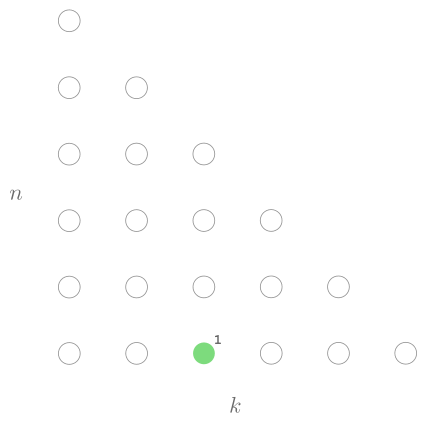

In [ ]:
from functools import lru_cache

@lru_cache(maxsize=None)
def c(n, k):
  if k == 0 or n == k: return 1
  return c(n-1, k-1) + c(n-1, k)

c(10,3)

120

## Manhattan paths

[62. Unique Paths](https://leetcode.com/problems/unique-paths/)

```
There is a robot on an m x n grid. The robot is initially located at the top-left corner (i.e., grid[0][0]).
The robot tries to move to the bottom-right corner (i.e., grid[m - 1][n - 1]).
The robot can only move either down or right at any point in time.

Given the two integers m and n, return the number of possible unique paths that the robot can take to reach the bottom-right corner.
```


In [ ]:
#@title Problem
%%html

<svg width="92mm" height="50mm" version="1.1" viewBox="0 0 244.4 123.25" xmlns="http://www.w3.org/2000/svg" xmlns:cc="http://creativecommons.org/ns#" xmlns:dc="http://purl.org/dc/elements/1.1/" xmlns:ns2="http://www.iki.fi/pav/software/textext/" xmlns:rdf="http://www.w3.org/1999/02/22-rdf-syntax-ns#">
 <defs>
  <marker id="Arrow1Mend" style="overflow:visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" style="fill-opacity:.43561;fill-rule:evenodd;fill:#000000;stroke-opacity:.43561;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="Arrow1Mend-5" style="overflow:visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" style="fill-opacity:.43561;fill-rule:evenodd;fill:#000000;stroke-opacity:.43561;stroke-width:1pt;stroke:#000000"/>
  </marker>
 </defs>
 <metadata>
  <rdf:RDF>
   <cc:Work rdf:about="">
    <dc:format>image/svg+xml</dc:format>
    <dc:type rdf:resource="http://purl.org/dc/dcmitype/StillImage"/>
    <dc:title/>
   </cc:Work>
  </rdf:RDF>
 </metadata>
 <g transform="translate(-10.059 -10.626)">
  <rect x="29.482" y="21.167" width="37.42" height="37.42" rx="2.8" style="fill-opacity:.42424;fill:#00db00;opacity:.999;stroke-linecap:round;stroke-width:.909;stroke:#bbbbbb"/>
  <rect x="66.902" y="21.167" width="37.42" height="37.42" rx="2.8" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.909;stroke:#bbbbbb"/>
  <rect x="104.32" y="21.167" width="37.42" height="37.42" rx="2.8" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.909;stroke:#bbbbbb"/>
  <rect x="141.74" y="21.167" width="37.42" height="37.42" rx="2.8" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.909;stroke:#bbbbbb"/>
  <rect x="179.16" y="21.167" width="37.42" height="37.42" rx="2.8" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.909;stroke:#bbbbbb"/>
  <rect x="216.58" y="21.167" width="37.42" height="37.42" rx="2.8" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.909;stroke:#bbbbbb"/>
  <rect x="29.482" y="58.586" width="37.42" height="37.42" rx="2.8" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.909;stroke:#bbbbbb"/>
  <rect x="66.902" y="58.586" width="37.42" height="37.42" rx="2.8" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.909;stroke:#bbbbbb"/>
  <rect x="104.32" y="58.586" width="37.42" height="37.42" rx="2.8" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.909;stroke:#bbbbbb"/>
  <rect x="141.74" y="58.586" width="37.42" height="37.42" rx="2.8" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.909;stroke:#bbbbbb"/>
  <rect x="179.16" y="58.586" width="37.42" height="37.42" rx="2.8" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.909;stroke:#bbbbbb"/>
  <rect x="216.58" y="58.586" width="37.42" height="37.42" rx="2.8" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.909;stroke:#bbbbbb"/>
  <rect x="29.482" y="96.006" width="37.42" height="37.42" rx="2.8" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.909;stroke:#bbbbbb"/>
  <rect x="66.902" y="96.006" width="37.42" height="37.42" rx="2.8" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.909;stroke:#bbbbbb"/>
  <rect x="104.32" y="96.006" width="37.42" height="37.42" rx="2.8" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.909;stroke:#bbbbbb"/>
  <rect x="141.74" y="96.006" width="37.42" height="37.42" rx="2.8" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.909;stroke:#bbbbbb"/>
  <rect x="179.16" y="96.006" width="37.42" height="37.42" rx="2.8" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.909;stroke:#bbbbbb"/>
  <rect x="216.58" y="96.006" width="37.42" height="37.42" rx="2.8" style="fill-opacity:.42424;fill:#00dbff;opacity:.999;stroke-linecap:round;stroke-width:.909;stroke:#bbbbbb"/>
  <g transform="matrix(1.8251 0 0 1.8251 5.9015 75.822)" ns2:alignment="middle center" ns2:jacobian_sqrt="1.0" ns2:pdfconverter="inkscape" ns2:preamble="C:\\Users\\User\\AppData\\Roaming\\inkscape\\extensions\\textext\\default_packages.tex" ns2:scale="2.834645669291339" ns2:texconverter="pdflatex" ns2:text="$$mn$$" ns2:version="1.1.0">
   <defs></defs>
   <g id="id-01cea9f0-3c19-4e59-b6cd-04ad996f0a2e" transform="translate(-298.56 -142.31)">
    <g id="id-7f339389-a197-4212-9d99-c9422913e56b" transform="matrix(.88089 0 0 .88089 37.839 15.832)" style="fill:#000000">
     <g transform="translate(298.26,146.72)">
      <path d="m0.875-0.59375c-0.03125 0.15625-0.09375 0.39062-0.09375 0.4375 0 0.17188 0.14062 0.26562 0.29688 0.26562 0.125 0 0.29688-0.078125 0.375-0.28125 0-0.015625 0.125-0.48438 0.1875-0.73438l0.21875-0.89062c0.046875-0.23438 0.10938-0.45312 0.17188-0.67188 0.03125-0.17188 0.10938-0.46875 0.125-0.5 0.14062-0.3125 0.67188-1.2188 1.625-1.2188 0.45312 0 0.53125 0.375 0.53125 0.70312 0 0.25-0.0625 0.53125-0.14062 0.82812l-0.28125 1.1562-0.20312 0.75c-0.03125 0.20312-0.125 0.54688-0.125 0.59375 0 0.17188 0.14062 0.26562 0.28125 0.26562 0.3125 0 0.375-0.25 0.45312-0.5625 0.14062-0.5625 0.51562-2.0156 0.59375-2.4062 0.03125-0.125 0.5625-1.3281 1.6562-1.3281 0.42188 0 0.53125 0.34375 0.53125 0.70312 0 0.5625-0.42188 1.7031-0.625 2.2344-0.078125 0.23438-0.125 0.34375-0.125 0.54688 0 0.46875 0.34375 0.8125 0.8125 0.8125 0.9375 0 1.3125-1.4531 1.3125-1.5312 0-0.10938-0.09375-0.10938-0.125-0.10938-0.09375 0-0.09375 0.03125-0.14062 0.1875-0.15625 0.53125-0.46875 1.2344-1.0156 1.2344-0.17188 0-0.25-0.09375-0.25-0.32812 0-0.25 0.09375-0.48438 0.1875-0.70312 0.1875-0.53125 0.60938-1.625 0.60938-2.2031 0-0.64062-0.40625-1.0625-1.1562-1.0625-0.73438 0-1.25 0.4375-1.625 0.96875 0-0.125-0.03125-0.46875-0.3125-0.70312-0.25-0.21875-0.5625-0.26562-0.8125-0.26562-0.90625 0-1.3906 0.64062-1.5625 0.875-0.046875-0.57812-0.46875-0.875-0.92188-0.875s-0.64062 0.39062-0.73438 0.5625c-0.17188 0.35938-0.29688 0.9375-0.29688 0.96875 0 0.10938 0.09375 0.10938 0.10938 0.10938 0.10938 0 0.10938-0.015625 0.17188-0.23438 0.17188-0.70312 0.375-1.1875 0.73438-1.1875 0.15625 0 0.29688 0.078125 0.29688 0.45312 0 0.21875-0.03125 0.32812-0.15625 0.84375z"/>
     </g>
     <g transform="translate(376.8 107.44)" style="fill:#000000">
      <path d="m0.875-0.59375c-0.03125 0.15625-0.09375 0.39062-0.09375 0.4375 0 0.17188 0.14062 0.26562 0.29688 0.26562 0.125 0 0.29688-0.078125 0.375-0.28125 0-0.015625 0.125-0.48438 0.1875-0.73438l0.21875-0.89062c0.046875-0.23438 0.10938-0.45312 0.17188-0.67188 0.03125-0.17188 0.10938-0.46875 0.125-0.5 0.14062-0.3125 0.67188-1.2188 1.625-1.2188 0.45312 0 0.53125 0.375 0.53125 0.70312 0 0.60938-0.48438 1.8906-0.64062 2.3125-0.09375 0.23438-0.10938 0.35938-0.10938 0.46875 0 0.46875 0.35938 0.8125 0.82812 0.8125 0.9375 0 1.2969-1.4531 1.2969-1.5312 0-0.10938-0.078125-0.10938-0.10938-0.10938-0.10938 0-0.10938 0.03125-0.15625 0.1875-0.20312 0.67188-0.53125 1.2344-1.0156 1.2344-0.17188 0-0.23438-0.09375-0.23438-0.32812 0-0.25 0.078125-0.48438 0.17188-0.70312 0.1875-0.53125 0.60938-1.625 0.60938-2.2031 0-0.65625-0.42188-1.0625-1.1406-1.0625-0.90625 0-1.3906 0.64062-1.5625 0.875-0.046875-0.5625-0.45312-0.875-0.92188-0.875-0.45312 0-0.64062 0.39062-0.73438 0.5625-0.17188 0.34375-0.29688 0.9375-0.29688 0.96875 0 0.10938 0.09375 0.10938 0.10938 0.10938 0.10938 0 0.10938-0.015625 0.17188-0.23438 0.17188-0.70312 0.375-1.1875 0.73438-1.1875 0.1875 0 0.29688 0.125 0.29688 0.45312 0 0.21875-0.03125 0.32812-0.15625 0.84375z"/>
     </g>
     <path d="m322.5 122.65v21.196" style="fill:none;marker-end:url(#Arrow1Mend);stroke-opacity:.43561;stroke-width:.60023;stroke:#000000"/>
     <path d="m323.91 121.32h21.196" style="fill:none;marker-end:url(#Arrow1Mend-5);stroke-opacity:.43561;stroke-width:.60023;stroke:#000000"/>
    </g>
   </g>
  </g>
 </g>
</svg>


In [ ]:
# time: O(2*UniquePaths(m,n)-1); space: O(max(n,m))
def uniquePaths(m, n):
  if m==1 or n==1: return 1
  return uniquePaths(m-1, n) + uniquePaths(m, n-1)

print(uniquePaths(8, 4))

120


Recursive relation is very similar to the recursive relation for binomial coefficients. So it's not surprising that the in terms of binomial coefficients the answer to this problem is ${n+m-2 \choose n-1}$.

In [ ]:
#@title Connection to the binomial coefficients
%%html

<svg width="82mm" height="82mm" version="1.1" viewBox="0 0 144.17 143.96" xmlns="http://www.w3.org/2000/svg" xmlns:cc="http://creativecommons.org/ns#" xmlns:dc="http://purl.org/dc/elements/1.1/" xmlns:ns10="http://www.iki.fi/pav/software/textext/" xmlns:rdf="http://www.w3.org/1999/02/22-rdf-syntax-ns#">
 <metadata>
  <rdf:RDF>
   <cc:Work rdf:about="">
    <dc:format>image/svg+xml</dc:format>
    <dc:type rdf:resource="http://purl.org/dc/dcmitype/StillImage"/>
    <dc:title/>
   </cc:Work>
  </rdf:RDF>
 </metadata>
 <g transform="translate(133.69 -51.451)">
  <g transform="matrix(1.2031 0 0 1.2031 63.378 41.456)" ns10:alignment="middle center" ns10:jacobian_sqrt="1.0" ns10:pdfconverter="inkscape" ns10:preamble="C:\\Users\\User\\AppData\\Roaming\\inkscape\\extensions\\textext\\default_packages.tex" ns10:scale="2.834645669291339" ns10:texconverter="pdflatex" ns10:text="$$1 1 1 1 2 2 3 3 6 6 $$" ns10:version="1.1.0">
   <defs></defs>
   <g id="id-58080082-7a5b-4079-9960-423a4a03d67f" transform="translate(-281.61 -140.08)">
    <g style="fill:#000000"></g>
   </g>
  </g>
  <g transform="rotate(-45.29 -88.992 96.52)">
   <g transform="matrix(1.2031 0 0 1.2031 147.98 34.746)" style="fill:#000000">
    <path d="m-211.02 57.899c0.8125-0.26562 1.3906-0.95312 1.3906-1.75 0-0.8125-0.875-1.375-1.8281-1.375-1 0-1.7656 0.59375-1.7656 1.3594 0 0.32812 0.21875 0.51562 0.51562 0.51562 0.29688 0 0.5-0.21875 0.5-0.51562 0-0.48438-0.46875-0.48438-0.60937-0.48438 0.29687-0.5 0.95312-0.625 1.3125-0.625 0.42187 0 0.96875 0.21875 0.96875 1.1094 0 0.125-0.0312 0.70312-0.28125 1.1406-0.29688 0.48438-0.64063 0.51562-0.89063 0.51562-0.0781 0.01563-0.3125 0.03125-0.39062 0.03125-0.0781 0.01563-0.14063 0.03125-0.14063 0.125 0 0.10938 0.0625 0.10938 0.23438 0.10938h0.4375c0.8125 0 1.1875 0.67188 1.1875 1.6562 0 1.3594-0.6875 1.6406-1.125 1.6406s-1.1875-0.17188-1.5312-0.75c0.34375 0.04687 0.65625-0.17188 0.65625-0.54688 0-0.35938-0.26563-0.5625-0.54688-0.5625-0.25 0-0.5625 0.14062-0.5625 0.57812 0 0.90625 0.92188 1.5625 2.0156 1.5625 1.2188 0 2.125-0.90625 2.125-1.9219 0-0.8125-0.64063-1.5938-1.6719-1.8125z" style="fill:#000000"/>
    <path d="m-181.27 58.37c0.8125-0.26562 1.3906-0.95312 1.3906-1.75 0-0.8125-0.875-1.375-1.8281-1.375-1 0-1.7656 0.59375-1.7656 1.3594 0 0.32812 0.21875 0.51562 0.51562 0.51562 0.29688 0 0.5-0.21875 0.5-0.51562 0-0.48438-0.46875-0.48438-0.60937-0.48438 0.29687-0.5 0.95312-0.625 1.3125-0.625 0.42187 0 0.96875 0.21875 0.96875 1.1094 0 0.125-0.0312 0.70312-0.28125 1.1406-0.29688 0.48438-0.64063 0.51562-0.89063 0.51562-0.0781 0.01563-0.3125 0.03125-0.39062 0.03125-0.0781 0.01563-0.14063 0.03125-0.14063 0.125 0 0.10938 0.0625 0.10938 0.23438 0.10938h0.4375c0.8125 0 1.1875 0.67188 1.1875 1.6562 0 1.3594-0.6875 1.6406-1.125 1.6406s-1.1875-0.17188-1.5312-0.75c0.34375 0.04687 0.65625-0.17188 0.65625-0.54688 0-0.35938-0.26563-0.5625-0.54688-0.5625-0.25 0-0.5625 0.14062-0.5625 0.57812 0 0.90625 0.92188 1.5625 2.0156 1.5625 1.2188 0 2.125-0.90625 2.125-1.9219 0-0.8125-0.64063-1.5938-1.6719-1.8125z" style="fill:#000000"/>
   </g>
   <g transform="matrix(1.2031 0 0 1.2031 -91.445 55.31)" style="fill:#000000">
    <path d="m2.9375-6.375c0-0.25 0-0.26562-0.23438-0.26562-0.625 0.64062-1.5 0.64062-1.8125 0.64062v0.3125c0.20312 0 0.78125 0 1.2969-0.26562v5.1719c0 0.35938-0.03125 0.46875-0.92188 0.46875h-0.3125v0.3125c0.34375-0.03125 1.2031-0.03125 1.6094-0.03125 0.39062 0 1.2656 0 1.6094 0.03125v-0.3125h-0.3125c-0.90625 0-0.92188-0.10938-0.92188-0.46875z"/>
   </g>
   <g transform="matrix(1.2031 0 0 1.2031 -73.595 73.368)" style="fill:#000000">
    <path d="m2.9375-6.375c0-0.25 0-0.26562-0.23438-0.26562-0.625 0.64062-1.5 0.64062-1.8125 0.64062v0.3125c0.20312 0 0.78125 0 1.2969-0.26562v5.1719c0 0.35938-0.03125 0.46875-0.92188 0.46875h-0.3125v0.3125c0.34375-0.03125 1.2031-0.03125 1.6094-0.03125 0.39062 0 1.2656 0 1.6094 0.03125v-0.3125h-0.3125c-0.90625 0-0.92188-0.10938-0.92188-0.46875z"/>
   </g>
   <rect transform="matrix(-.85563 .84579 -.84579 -.85563 -275.43 -127.07)" x="-16.79" y="-246.38" width="21.104" height="21.104" ry="1.274" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.39585;stroke:#bbbbbb"/>
   <g transform="matrix(1.2031 0 0 1.2031 -55.745 91.425)" style="fill:#000000">
    <path d="m2.9375-6.375c0-0.25 0-0.26562-0.23438-0.26562-0.625 0.64062-1.5 0.64062-1.8125 0.64062v0.3125c0.20312 0 0.78125 0 1.2969-0.26562v5.1719c0 0.35938-0.03125 0.46875-0.92188 0.46875h-0.3125v0.3125c0.34375-0.03125 1.2031-0.03125 1.6094-0.03125 0.39062 0 1.2656 0 1.6094 0.03125v-0.3125h-0.3125c-0.90625 0-0.92188-0.10938-0.92188-0.46875z"/>
   </g>
   <g transform="matrix(1.2031 0 0 1.2031 -37.895 109.48)" style="fill:#000000">
    <path d="m2.9375-6.375c0-0.25 0-0.26562-0.23438-0.26562-0.625 0.64062-1.5 0.64062-1.8125 0.64062v0.3125c0.20312 0 0.78125 0 1.2969-0.26562v5.1719c0 0.35938-0.03125 0.46875-0.92188 0.46875h-0.3125v0.3125c0.34375-0.03125 1.2031-0.03125 1.6094-0.03125 0.39062 0 1.2656 0 1.6094 0.03125v-0.3125h-0.3125c-0.90625 0-0.92188-0.10938-0.92188-0.46875z"/>
   </g>
   <rect transform="matrix(-.85563 .84579 -.84579 -.85563 -275.43 -127.07)" x="-16.79" y="-288.59" width="21.104" height="21.104" ry="1.274" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.39585;stroke:#bbbbbb"/>
   <g transform="matrix(1.2031 0 0 1.2031 -20.046 127.54)" style="fill:#000000">
    <path d="m2.9375-6.375c0-0.25 0-0.26562-0.23438-0.26562-0.625 0.64062-1.5 0.64062-1.8125 0.64062v0.3125c0.20312 0 0.78125 0 1.2969-0.26562v5.1719c0 0.35938-0.03125 0.46875-0.92188 0.46875h-0.3125v0.3125c0.34375-0.03125 1.2031-0.03125 1.6094-0.03125 0.39062 0 1.2656 0 1.6094 0.03125v-0.3125h-0.3125c-0.90625 0-0.92188-0.10938-0.92188-0.46875z"/>
   </g>
   <g transform="matrix(1.2031 0 0 1.2031 -2.1957 145.6)" style="fill:#000000">
    <path d="m2.9375-6.375c0-0.25 0-0.26562-0.23438-0.26562-0.625 0.64062-1.5 0.64062-1.8125 0.64062v0.3125c0.20312 0 0.78125 0 1.2969-0.26562v5.1719c0 0.35938-0.03125 0.46875-0.92188 0.46875h-0.3125v0.3125c0.34375-0.03125 1.2031-0.03125 1.6094-0.03125 0.39062 0 1.2656 0 1.6094 0.03125v-0.3125h-0.3125c-0.90625 0-0.92188-0.10938-0.92188-0.46875z"/>
   </g>
   <g transform="matrix(1.2031 0 0 1.2031 -109.5 73.16)" style="fill:#000000">
    <path d="m2.9375-6.375c0-0.25 0-0.26562-0.23438-0.26562-0.625 0.64062-1.5 0.64062-1.8125 0.64062v0.3125c0.20312 0 0.78125 0 1.2969-0.26562v5.1719c0 0.35938-0.03125 0.46875-0.92188 0.46875h-0.3125v0.3125c0.34375-0.03125 1.2031-0.03125 1.6094-0.03125 0.39062 0 1.2656 0 1.6094 0.03125v-0.3125h-0.3125c-0.90625 0-0.92188-0.10938-0.92188-0.46875z"/>
   </g>
   <rect transform="matrix(-.85563 .84579 -.84579 -.85563 -275.43 -127.07)" x="4.314" y="-225.28" width="21.104" height="21.104" ry="1.274" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.39585;stroke:#bbbbbb"/>
   <g transform="matrix(1.2031 0 0 1.2031 -127.56 91.01)" style="fill:#000000">
    <path d="m2.9375-6.375c0-0.25 0-0.26562-0.23438-0.26562-0.625 0.64062-1.5 0.64062-1.8125 0.64062v0.3125c0.20312 0 0.78125 0 1.2969-0.26562v5.1719c0 0.35938-0.03125 0.46875-0.92188 0.46875h-0.3125v0.3125c0.34375-0.03125 1.2031-0.03125 1.6094-0.03125 0.39062 0 1.2656 0 1.6094 0.03125v-0.3125h-0.3125c-0.90625 0-0.92188-0.10938-0.92188-0.46875z"/>
   </g>
   <rect transform="matrix(-.85563 .84579 -.84579 -.85563 -275.43 -127.07)" x="25.418" y="-225.28" width="21.104" height="21.104" ry="1.274" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.39585;stroke:#bbbbbb"/>
   <g transform="matrix(1.2031 0 0 1.2031 -145.62 108.86)" style="fill:#000000">
    <path d="m2.9375-6.375c0-0.25 0-0.26562-0.23438-0.26562-0.625 0.64062-1.5 0.64062-1.8125 0.64062v0.3125c0.20312 0 0.78125 0 1.2969-0.26562v5.1719c0 0.35938-0.03125 0.46875-0.92188 0.46875h-0.3125v0.3125c0.34375-0.03125 1.2031-0.03125 1.6094-0.03125 0.39062 0 1.2656 0 1.6094 0.03125v-0.3125h-0.3125c-0.90625 0-0.92188-0.10938-0.92188-0.46875z"/>
   </g>
   <g transform="matrix(1.2031 0 0 1.2031 -163.67 126.71)" style="fill:#000000">
    <path d="m2.9375-6.375c0-0.25 0-0.26562-0.23438-0.26562-0.625 0.64062-1.5 0.64062-1.8125 0.64062v0.3125c0.20312 0 0.78125 0 1.2969-0.26562v5.1719c0 0.35938-0.03125 0.46875-0.92188 0.46875h-0.3125v0.3125c0.34375-0.03125 1.2031-0.03125 1.6094-0.03125 0.39062 0 1.2656 0 1.6094 0.03125v-0.3125h-0.3125c-0.90625 0-0.92188-0.10938-0.92188-0.46875z"/>
   </g>
   <g transform="matrix(1.2031 0 0 1.2031 -181.73 144.56)" style="fill:#000000">
    <path d="m2.9375-6.375c0-0.25 0-0.26562-0.23438-0.26562-0.625 0.64062-1.5 0.64062-1.8125 0.64062v0.3125c0.20312 0 0.78125 0 1.2969-0.26562v5.1719c0 0.35938-0.03125 0.46875-0.92188 0.46875h-0.3125v0.3125c0.34375-0.03125 1.2031-0.03125 1.6094-0.03125 0.39062 0 1.2656 0 1.6094 0.03125v-0.3125h-0.3125c-0.90625 0-0.92188-0.10938-0.92188-0.46875z"/>
   </g>
   <g transform="matrix(1.2031 0 0 1.2031 -91.237 91.425)" style="fill:#000000">
    <path d="m1.2656-0.76562 1.0625-1.0312c1.5469-1.375 2.1406-1.9062 2.1406-2.9062 0-1.1406-0.89062-1.9375-2.1094-1.9375-1.125 0-1.8594 0.92188-1.8594 1.8125 0 0.54688 0.5 0.54688 0.53125 0.54688 0.17188 0 0.51562-0.10938 0.51562-0.53125 0-0.25-0.1875-0.51562-0.53125-0.51562-0.078125 0-0.09375 0-0.125 0.015625 0.21875-0.65625 0.76562-1.0156 1.3438-1.0156 0.90625 0 1.3281 0.8125 1.3281 1.625 0 0.79688-0.48438 1.5781-1.0469 2.2031l-1.9062 2.125c-0.10938 0.10938-0.10938 0.14062-0.10938 0.375h3.7031l0.26562-1.7344h-0.23438c-0.0625 0.29688-0.125 0.73438-0.23438 0.89062-0.0625 0.078125-0.71875 0.078125-0.9375 0.078125z"/>
   </g>
   <g transform="matrix(1.2031 0 0 1.2031 -127.43 118.59)" style="fill:#000000" ns10:alignment="middle center" ns10:jacobian_sqrt="1.0" ns10:pdfconverter="inkscape" ns10:preamble="C:\\Users\\User\\AppData\\Roaming\\inkscape\\extensions\\textext\\default_packages.tex" ns10:scale="2.834645669291339" ns10:texconverter="pdflatex" ns10:text="$$44$$" ns10:version="1.1.0">
    <defs></defs>
    <g transform="translate(-300.92 -139.97)">
     <g id="id-df226d7f-c04b-4d25-9ce0-ab31cae4914e" style="fill:#000000">
      <g transform="translate(300.64 146.72)">
       <path d="m2.9375-1.6406v0.85938c0 0.35938-0.03125 0.46875-0.76562 0.46875h-0.20312v0.3125c0.40625-0.03125 0.92188-0.03125 1.3438-0.03125s0.9375 0 1.3594 0.03125v-0.3125h-0.21875c-0.73438 0-0.75-0.10938-0.75-0.46875v-0.85938h0.98438v-0.3125h-0.98438v-4.5312c0-0.20312 0-0.26562-0.17188-0.26562-0.078125 0-0.10938 0-0.1875 0.125l-3.0625 4.6719v0.3125zm0.046875-0.3125h-2.4219l2.4219-3.7188z"/>
      </g>
      <g transform="translate(360.16 146.72)">
       <path d="m2.9375-1.6406v0.85938c0 0.35938-0.03125 0.46875-0.76562 0.46875h-0.20312v0.3125c0.40625-0.03125 0.92188-0.03125 1.3438-0.03125s0.9375 0 1.3594 0.03125v-0.3125h-0.21875c-0.73438 0-0.75-0.10938-0.75-0.46875v-0.85938h0.98438v-0.3125h-0.98438v-4.5312c0-0.20312 0-0.26562-0.17188-0.26562-0.078125 0-0.10938 0-0.1875 0.125l-3.0625 4.6719v0.3125zm0.046875-0.3125h-2.4219l2.4219-3.7188z"/>
      </g>
      <g transform="translate(285.9 154.72)" ns10:alignment="middle center" ns10:jacobian_sqrt="1.0" ns10:pdfconverter="inkscape" ns10:preamble="C:\\Users\\User\\AppData\\Roaming\\inkscape\\extensions\\textext\\default_packages.tex" ns10:scale="2.834645669291339" ns10:texconverter="pdflatex" ns10:text="$$5 10 5 $$" ns10:version="1.1.0">
       <defs id="id-c3de4c11-3947-47fa-8d4c-4ede05eea8dd"></defs>
       <g transform="translate(-296.16 -140.08)">
        <g id="id-df71690e-f1ab-4dbd-bef6-fb49258b6dff" style="fill:#000000">
         <g transform="translate(295.66 146.72)">
          <path d="m4.4688-2c0-1.1875-0.8125-2.1875-1.8906-2.1875-0.46875 0-0.90625 0.15625-1.2656 0.51562v-1.9531c0.20312 0.0625 0.53125 0.125 0.84375 0.125 1.2344 0 1.9375-0.90625 1.9375-1.0312 0-0.0625-0.03125-0.10938-0.10938-0.10938 0 0-0.03125 0-0.078125 0.03125-0.20312 0.09375-0.6875 0.29688-1.3594 0.29688-0.39062 0-0.85938-0.078125-1.3281-0.28125-0.078125-0.03125-0.09375-0.03125-0.10938-0.03125-0.10938 0-0.10938 0.078125-0.10938 0.23438v2.9531c0 0.17188 0 0.25 0.14062 0.25 0.078125 0 0.09375-0.015625 0.14062-0.078125 0.10938-0.15625 0.46875-0.70312 1.2812-0.70312 0.51562 0 0.76562 0.45312 0.84375 0.64062 0.15625 0.375 0.1875 0.75 0.1875 1.25 0 0.35938 0 0.95312-0.25 1.375-0.23438 0.39062-0.60938 0.64062-1.0625 0.64062-0.71875 0-1.2969-0.53125-1.4688-1.1094 0.03125 0 0.0625 0.015625 0.17188 0.015625 0.32812 0 0.5-0.25 0.5-0.48438 0-0.25-0.17188-0.5-0.5-0.5-0.14062 0-0.48438 0.078125-0.48438 0.53125 0 0.85938 0.6875 1.8281 1.7969 1.8281 1.1562 0 2.1719-0.95312 2.1719-2.2188z"/>
         </g>
         <g transform="translate(323.07 146.72)">
          <path d="m2.9375-6.375c0-0.25 0-0.26562-0.23438-0.26562-0.625 0.64062-1.5 0.64062-1.8125 0.64062v0.3125c0.20312 0 0.78125 0 1.2969-0.26562v5.1719c0 0.35938-0.03125 0.46875-0.92188 0.46875h-0.3125v0.3125c0.34375-0.03125 1.2031-0.03125 1.6094-0.03125 0.39062 0 1.2656 0 1.6094 0.03125v-0.3125h-0.3125c-0.90625 0-0.92188-0.10938-0.92188-0.46875z"/>
         </g>
         <g transform="translate(328.06 146.72)">
          <path d="m4.5781-3.1875c0-0.79688-0.046875-1.5938-0.39062-2.3281-0.45312-0.96875-1.2812-1.125-1.6875-1.125-0.60938 0-1.3281 0.26562-1.75 1.1875-0.3125 0.6875-0.35938 1.4688-0.35938 2.2656 0 0.75 0.03125 1.6406 0.45312 2.4062 0.42188 0.79688 1.1562 1 1.6406 1 0.53125 0 1.2969-0.20312 1.7344-1.1562 0.3125-0.6875 0.35938-1.4688 0.35938-2.25zm-2.0938 3.1875c-0.39062 0-0.98438-0.25-1.1562-1.2031-0.10938-0.59375-0.10938-1.5156-0.10938-2.1094 0-0.64062 0-1.2969 0.078125-1.8281 0.1875-1.1875 0.9375-1.2812 1.1875-1.2812 0.32812 0 0.98438 0.1875 1.1719 1.1719 0.10938 0.5625 0.10938 1.3125 0.10938 1.9375 0 0.75 0 1.4219-0.10938 2.0625-0.15625 0.95312-0.71875 1.25-1.1719 1.25z"/>
         </g>
         <g transform="translate(384.94 146.72)">
          <path d="m4.4688-2c0-1.1875-0.8125-2.1875-1.8906-2.1875-0.46875 0-0.90625 0.15625-1.2656 0.51562v-1.9531c0.20312 0.0625 0.53125 0.125 0.84375 0.125 1.2344 0 1.9375-0.90625 1.9375-1.0312 0-0.0625-0.03125-0.10938-0.10938-0.10938 0 0-0.03125 0-0.078125 0.03125-0.20312 0.09375-0.6875 0.29688-1.3594 0.29688-0.39062 0-0.85938-0.078125-1.3281-0.28125-0.078125-0.03125-0.09375-0.03125-0.10938-0.03125-0.10938 0-0.10938 0.078125-0.10938 0.23438v2.9531c0 0.17188 0 0.25 0.14062 0.25 0.078125 0 0.09375-0.015625 0.14062-0.078125 0.10938-0.15625 0.46875-0.70312 1.2812-0.70312 0.51562 0 0.76562 0.45312 0.84375 0.64062 0.15625 0.375 0.1875 0.75 0.1875 1.25 0 0.35938 0 0.95312-0.25 1.375-0.23438 0.39062-0.60938 0.64062-1.0625 0.64062-0.71875 0-1.2969-0.53125-1.4688-1.1094 0.03125 0 0.0625 0.015625 0.17188 0.015625 0.32812 0 0.5-0.25 0.5-0.48438 0-0.25-0.17188-0.5-0.5-0.5-0.14062 0-0.48438 0.078125-0.48438 0.53125 0 0.85938 0.6875 1.8281 1.7969 1.8281 1.1562 0 2.1719-0.95312 2.1719-2.2188z"/>
         </g>
        </g>
       </g>
      </g>
     </g>
    </g>
   </g>
   <g transform="matrix(1.2031 0 0 1.2031 -91.753 126.54)" style="fill:#000000">
    <path d="m1.3125-3.2656v-0.25c0-2.5156 1.2344-2.875 1.75-2.875 0.23438 0 0.65625 0.0625 0.875 0.40625-0.15625 0-0.54688 0-0.54688 0.4375 0 0.3125 0.23438 0.46875 0.45312 0.46875 0.15625 0 0.46875-0.09375 0.46875-0.48438 0-0.59375-0.4375-1.0781-1.2656-1.0781-1.2812 0-2.625 1.2812-2.625 3.4844 0 2.6719 1.1562 3.375 2.0781 3.375 1.1094 0 2.0625-0.9375 2.0625-2.25 0-1.2656-0.89062-2.2188-2-2.2188-0.67188 0-1.0469 0.5-1.25 0.98438zm1.1875 3.2031c-0.625 0-0.92188-0.59375-0.98438-0.75-0.1875-0.46875-0.1875-1.2656-0.1875-1.4375 0-0.78125 0.32812-1.7812 1.2188-1.7812 0.17188 0 0.625 0 0.9375 0.625 0.17188 0.35938 0.17188 0.875 0.17188 1.3594s0 0.98438-0.17188 1.3438c-0.29688 0.59375-0.75 0.64062-0.98438 0.64062z"/>
   </g>
   <rect transform="matrix(-.85563 .84579 -.84579 -.85563 -275.43 -127.07)" x="-16.79" y="-267.49" width="21.104" height="21.104" ry="1.274" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.39585;stroke:#bbbbbb"/>
   <g transform="rotate(135.33 109.26 46.57)">
    <rect x="291.35" y="93.294" width="25.391" height="25.391" ry="1.5328" style="fill-opacity:.42424;fill:#00dbff;opacity:.999;stroke-linecap:round;stroke-width:.47625;stroke:#bbbbbb"/>
    <rect x="240.57" y="169.47" width="25.391" height="25.391" ry="1.5328" style="fill-opacity:.42424;fill:#00db00;opacity:.999;stroke-linecap:round;stroke-width:.47625;stroke:#bbbbbb"/>
    <rect x="265.96" y="93.294" width="25.391" height="25.391" ry="1.5328" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.47625;stroke:#bbbbbb"/>
    <rect x="265.96" y="118.68" width="25.391" height="25.391" ry="1.5328" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.47625;stroke:#bbbbbb"/>
    <rect x="291.35" y="118.68" width="25.391" height="25.391" ry="1.5328" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.47625;stroke:#bbbbbb"/>
    <rect x="265.96" y="144.08" width="25.391" height="25.391" ry="1.5328" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.47625;stroke:#bbbbbb"/>
    <rect x="291.35" y="144.08" width="25.391" height="25.391" ry="1.5328" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.47625;stroke:#bbbbbb"/>
   </g>
   <g transform="matrix(1.2031 0 0 1.2031 -91.445 55.31)" style="fill:#000000">
    <path d="m2.9375-6.375c0-0.25 0-0.26562-0.23438-0.26562-0.625 0.64062-1.5 0.64062-1.8125 0.64062v0.3125c0.20312 0 0.78125 0 1.2969-0.26562v5.1719c0 0.35938-0.03125 0.46875-0.92188 0.46875h-0.3125v0.3125c0.34375-0.03125 1.2031-0.03125 1.6094-0.03125 0.39062 0 1.2656 0 1.6094 0.03125v-0.3125h-0.3125c-0.90625 0-0.92188-0.10938-0.92188-0.46875z"/>
   </g>
   <g transform="matrix(1.2343 0 0 1.2343 -76.082 135.8)" ns10:alignment="middle center" ns10:jacobian_sqrt="1.0" ns10:pdfconverter="inkscape" ns10:preamble="C:\\Users\\User\\AppData\\Roaming\\inkscape\\extensions\\textext\\default_packages.tex" ns10:scale="2.834645669291339" ns10:texconverter="pdflatex" ns10:text="$$10$$" ns10:version="1.1.0">
    <defs></defs>
    <g transform="translate(-301.53 -140.08)">
     <g id="id-90dd3b77-778b-4f4e-9d7b-11b5ee0dc9ef" style="fill:#000000">
      <g transform="translate(300.64 146.72)">
       <path d="m2.9375-6.375c0-0.25 0-0.26562-0.23438-0.26562-0.625 0.64062-1.5 0.64062-1.8125 0.64062v0.3125c0.20312 0 0.78125 0 1.2969-0.26562v5.1719c0 0.35938-0.03125 0.46875-0.92188 0.46875h-0.3125v0.3125c0.34375-0.03125 1.2031-0.03125 1.6094-0.03125 0.39062 0 1.2656 0 1.6094 0.03125v-0.3125h-0.3125c-0.90625 0-0.92188-0.10938-0.92188-0.46875z"/>
      </g>
      <g transform="translate(305.62 146.72)">
       <path d="m4.5781-3.1875c0-0.79688-0.046875-1.5938-0.39062-2.3281-0.45312-0.96875-1.2812-1.125-1.6875-1.125-0.60938 0-1.3281 0.26562-1.75 1.1875-0.3125 0.6875-0.35938 1.4688-0.35938 2.2656 0 0.75 0.03125 1.6406 0.45312 2.4062 0.42188 0.79688 1.1562 1 1.6406 1 0.53125 0 1.2969-0.20312 1.7344-1.1562 0.3125-0.6875 0.35938-1.4688 0.35938-2.25zm-2.0938 3.1875c-0.39062 0-0.98438-0.25-1.1562-1.2031-0.10938-0.59375-0.10938-1.5156-0.10938-2.1094 0-0.64062 0-1.2969 0.078125-1.8281 0.1875-1.1875 0.9375-1.2812 1.1875-1.2812 0.32812 0 0.98438 0.1875 1.1719 1.1719 0.10938 0.5625 0.10938 1.3125 0.10938 1.9375 0 0.75 0 1.4219-0.10938 2.0625-0.15625 0.95312-0.71875 1.25-1.1719 1.25z"/>
      </g>
     </g>
    </g>
   </g>
  </g>
 </g>
</svg>


## Tower of Hanoi

```
There are three rodes and n disks stacked on the first rod in order of decreasing size, the smallest at the top,
thus approximating a conical shape. The objective of the puzzle is to move the entire stack to the last rod, obeying the following rules:

- Only one disk may be moved at a time.
- Each move consists of taking the upper disk from one of the stacks and placing it on top of another stack or on an empty rod.
- No disk may be placed on top of a disk that is smaller than it.

Describe the pattern of moving disks.
```

In [ ]:
# time: O(2^n); space: O(n)
def moveTowerOfHanoi(n, src, cache, dst):
  if n==0: return
  moveTowerOfHanoi(n-1, src=src, cache=dst, dst=cache)
  print(" "*(55-5*n) + "Move disk", n, "from ", src, "to ", dst)
  moveTowerOfHanoi(n-1, src=cache, cache=src, dst=dst)

moveTowerOfHanoi(4, 'a', 'b', 'c')

                                                  Move disk 1 from  a to  b
                                             Move disk 2 from  a to  c
                                                  Move disk 1 from  b to  c
                                        Move disk 3 from  a to  b
                                                  Move disk 1 from  c to  a
                                             Move disk 2 from  c to  b
                                                  Move disk 1 from  a to  b
                                   Move disk 4 from  a to  c
                                                  Move disk 1 from  b to  c
                                             Move disk 2 from  b to  a
                                                  Move disk 1 from  c to  a
                                        Move disk 3 from  b to  c
                                                  Move disk 1 from  a to  b
                                             Move disk 2 from 

In [ ]:
#@title Largescale structure
%%html

<div id="slide_1" style="max-width:750px; height:200px;">
<font face="helvetica" color="black" size="4">
Binary tree
</font><br>
<?xml version="1.0" encoding="UTF-8"?>
<?xml version="1.0" encoding="UTF-8"?>
<svg width="168mm" height="60mm" version="1.1" viewBox="0 0 1511.7 534.94" xmlns="http://www.w3.org/2000/svg" xmlns:cc="http://creativecommons.org/ns#" xmlns:dc="http://purl.org/dc/elements/1.1/" xmlns:ns2="http://www.iki.fi/pav/software/textext/" xmlns:rdf="http://www.w3.org/1999/02/22-rdf-syntax-ns#">
 <metadata>
  <rdf:RDF>
   <cc:Work rdf:about="">
    <dc:format>image/svg+xml</dc:format>
    <dc:type rdf:resource="http://purl.org/dc/dcmitype/StillImage"/>
    <dc:title/>
   </cc:Work>
  </rdf:RDF>
 </metadata>
 <g transform="translate(-206.03 342.06)">
  <g transform="translate(200.79 -236.09)">
   <rect x="284.48" y="18.455" width="25.658" height="247.65" style="fill:#d1d1d1;opacity:.999"/>
   <rect x="742.45" y="38.08" width="25.658" height="227.98" style="fill:#d1d1d1;opacity:.999"/>
   <rect x="1200.4" y="38.086" width="25.658" height="227.98" style="fill:#d1d1d1;opacity:.999"/>
   <rect x="37.804" y="266.05" width="1429.8" height="45.617" style="fill:#d6d6d5;opacity:.999"/>
   <rect x="99.333" y="225.15" width="397.81" height="40.821" style="fill-opacity:.51515;fill:#000000;opacity:.999"/>
   <rect x="183.2" y="143.78" width="234.01" height="40.821" style="fill-opacity:.39773;fill:#00d400;opacity:.999"/>
   <g transform="matrix(6.3216 0 0 6.3216 283.62 325.4)" ns2:alignment="middle center" ns2:inkscapeversion="1.0" ns2:jacobian_sqrt="1.0" ns2:pdfconverter="inkscape" ns2:preamble="C:\\Users\\User\\AppData\\Roaming\\inkscape\\extensions\\textext\\default_packages.tex" ns2:scale="2.834645669291339" ns2:texconverter="pdflatex" ns2:text="$$abc$$" ns2:version="1.1.0">
    <g transform="translate(-299.1 -139.8)">
     <g id="id-788a55e0-4d07-4028-ad92-77bdfb42961c" style="fill:#000000"></g>
    </g>
   </g>
   <rect x="141.2" y="184.33" width="313.94" height="40.821" style="fill-opacity:.4053;fill:#ffac00;opacity:.999"/>
   <rect x="222.13" y="102.96" width="151.61" height="40.821" style="fill-opacity:.40152;fill:#00d4ff;opacity:.999"/>
   <rect x="261.06" y="62.134" width="70.681" height="40.821" style="fill-opacity:.26136;fill:#ae4eff;opacity:.999"/>
  </g>
 </g>
 <g transform="matrix(4.7816 0 0 4.7816 170.17 455.22)" ns2:alignment="middle center" ns2:jacobian_sqrt="3.77952" ns2:pdfconverter="inkscape" ns2:preamble="C:\\Users\\User\\AppData\\Roaming\\inkscape\\extensions\\textext\\default_packages.tex" ns2:scale="2.834645669291339" ns2:texconverter="pdflatex" ns2:text="$$source$$\n$$cache$$\n$$destination$$" ns2:version="1.1.0">
  <defs></defs>
  <g transform="translate(-280.72 -142.31)">
   <g id="id-6c540f17-e9a9-43c0-a1b4-daa98d59359c" style="fill:#000000">
    <g transform="translate(291.16 146.72)">
     <path id="id-3424c4c4-acac-4761-8a07-93b7c83bdd2c" d="m3.8906-3.7344c-0.26562 0.015625-0.46875 0.23438-0.46875 0.45312 0 0.14062 0.09375 0.29688 0.3125 0.29688s0.45312-0.17188 0.45312-0.5625c0-0.45312-0.42188-0.85938-1.1875-0.85938-1.3125 0-1.6875 1.0156-1.6875 1.4531 0 0.78125 0.73438 0.92188 1.0312 0.98438 0.51562 0.10938 1.0312 0.21875 1.0312 0.76562 0 0.25-0.21875 1.0938-1.4219 1.0938-0.14062 0-0.90625 0-1.1406-0.53125 0.39062 0.046875 0.64062-0.25 0.64062-0.53125 0-0.21875-0.17188-0.34375-0.375-0.34375-0.26562 0-0.5625 0.20312-0.5625 0.65625 0 0.5625 0.57812 0.96875 1.4219 0.96875 1.625 0 2.0156-1.2031 2.0156-1.6562 0-0.35938-0.1875-0.60938-0.3125-0.71875-0.26562-0.28125-0.5625-0.34375-1-0.42188-0.35938-0.078125-0.75-0.15625-0.75-0.60938 0-0.28125 0.23438-0.89062 1.1094-0.89062 0.25 0 0.75 0.078125 0.89062 0.45312z"/>
    </g>
    <g transform="translate(295.83 146.72)">
     <path id="id-9e23c595-b311-4011-ba34-27076881ac3f" d="m4.6719-2.7188c0-1.0469-0.6875-1.6875-1.5938-1.6875-1.3281 0-2.6719 1.4219-2.6719 2.8281 0 0.98438 0.67188 1.6875 1.5938 1.6875 1.3281 0 2.6719-1.375 2.6719-2.8281zm-2.6562 2.6094c-0.4375 0-0.875-0.3125-0.875-1.0938 0-0.48438 0.26562-1.5625 0.57812-2.0625 0.5-0.76562 1.0781-0.92188 1.3594-0.92188 0.57812 0 0.875 0.48438 0.875 1.0781 0 0.39062-0.20312 1.4375-0.57812 2.0781-0.35938 0.57812-0.90625 0.92188-1.3594 0.92188z"/>
    </g>
    <g transform="translate(300.66 146.72)">
     <path d="m3.4844-0.5625c0.10938 0.40625 0.46875 0.67188 0.89062 0.67188 0.34375 0 0.57812-0.23438 0.73438-0.54688 0.17188-0.35938 0.29688-0.96875 0.29688-0.98438 0-0.10938-0.078125-0.10938-0.10938-0.10938-0.10938 0-0.10938 0.046875-0.14062 0.1875-0.14062 0.5625-0.32812 1.2344-0.75 1.2344-0.20312 0-0.3125-0.125-0.3125-0.45312 0-0.21875 0.125-0.6875 0.20312-1.0469l0.28125-1.0781c0.03125-0.14062 0.125-0.51562 0.17188-0.67188 0.046875-0.23438 0.14062-0.60938 0.14062-0.67188 0-0.17188-0.14062-0.26562-0.28125-0.26562-0.046875 0-0.3125 0.015625-0.39062 0.34375-0.1875 0.73438-0.625 2.4844-0.75 3-0.015625 0.046875-0.40625 0.84375-1.1406 0.84375-0.51562 0-0.60938-0.45312-0.60938-0.8125 0-0.5625 0.28125-1.3438 0.53125-2.0312 0.125-0.3125 0.17188-0.45312 0.17188-0.64062 0-0.4375-0.3125-0.8125-0.8125-0.8125-0.95312 0-1.3125 1.4531-1.3125 1.5312 0 0.10938 0.09375 0.10938 0.10938 0.10938 0.10938 0 0.10938-0.03125 0.15625-0.1875 0.25-0.85938 0.64062-1.2344 1.0156-1.2344 0.09375 0 0.25 0.015625 0.25 0.32812 0 0.23438-0.10938 0.53125-0.17188 0.67188-0.375 1-0.57812 1.6094-0.57812 2.0938 0 0.95312 0.6875 1.2031 1.2188 1.2031 0.65625 0 1.0156-0.45312 1.1875-0.67188z"/>
    </g>
    <g transform="translate(306.36 146.72)">
     <path d="m0.875-0.59375c-0.03125 0.15625-0.09375 0.39062-0.09375 0.4375 0 0.17188 0.14062 0.26562 0.29688 0.26562 0.125 0 0.29688-0.078125 0.375-0.28125 0.015625-0.03125 0.34375-1.3906 0.39062-1.5781 0.078125-0.32812 0.26562-1.0156 0.3125-1.2969 0.046875-0.125 0.32812-0.59375 0.5625-0.8125 0.078125-0.0625 0.375-0.32812 0.79688-0.32812 0.26562 0 0.40625 0.125 0.42188 0.125-0.29688 0.046875-0.51562 0.28125-0.51562 0.54688 0 0.15625 0.10938 0.34375 0.375 0.34375s0.54688-0.23438 0.54688-0.59375c0-0.34375-0.3125-0.64062-0.82812-0.64062-0.64062 0-1.0781 0.48438-1.2656 0.76562-0.09375-0.45312-0.45312-0.76562-0.92188-0.76562-0.45312 0-0.64062 0.39062-0.73438 0.5625-0.17188 0.34375-0.29688 0.9375-0.29688 0.96875 0 0.10938 0.09375 0.10938 0.10938 0.10938 0.10938 0 0.10938-0.015625 0.17188-0.23438 0.17188-0.70312 0.375-1.1875 0.73438-1.1875 0.15625 0 0.29688 0.078125 0.29688 0.45312 0 0.21875-0.03125 0.32812-0.15625 0.84375z"/>
    </g>
   </g>
   <g style="fill:#000000">
    <g transform="translate(311.14 146.72)">
     <path d="m3.9531-3.7812c-0.17188 0-0.29688 0-0.4375 0.125-0.17188 0.15625-0.1875 0.32812-0.1875 0.39062 0 0.25 0.1875 0.35938 0.375 0.35938 0.28125 0 0.54688-0.25 0.54688-0.64062 0-0.48438-0.46875-0.85938-1.1719-0.85938-1.3438 0-2.6719 1.4219-2.6719 2.8281 0 0.90625 0.57812 1.6875 1.625 1.6875 1.4219 0 2.25-1.0625 2.25-1.1719 0-0.0625-0.046875-0.14062-0.10938-0.14062s-0.078125 0.03125-0.14062 0.10938c-0.78125 0.98438-1.875 0.98438-1.9844 0.98438-0.625 0-0.90625-0.48438-0.90625-1.0938 0-0.40625 0.20312-1.375 0.54688-1.9844 0.3125-0.57812 0.85938-1 1.4062-1 0.32812 0 0.71875 0.125 0.85938 0.40625z"/>
    </g>
    <g transform="translate(315.45 146.72)">
     <path d="m1.8594-2.2969c0.29688 0 1.0312-0.03125 1.5312-0.23438 0.70312-0.29688 0.75-0.89062 0.75-1.0312 0-0.4375-0.375-0.84375-1.0625-0.84375-1.1094 0-2.625 0.96875-2.625 2.7188 0 1.0156 0.59375 1.7969 1.5781 1.7969 1.4219 0 2.25-1.0625 2.25-1.1719 0-0.0625-0.046875-0.14062-0.10938-0.14062s-0.078125 0.03125-0.14062 0.10938c-0.78125 0.98438-1.875 0.98438-1.9844 0.98438-0.78125 0-0.875-0.84375-0.875-1.1562 0-0.125 0.015625-0.42188 0.15625-1.0312zm-0.46875-0.21875c0.39062-1.5156 1.4219-1.6719 1.6875-1.6719 0.45312 0 0.73438 0.29688 0.73438 0.625 0 1.0469-1.5938 1.0469-2.0156 1.0469z"/>
    </g>
   </g>
   <g transform="translate(96.718 -16.724)" style="fill:#000000">
    <g transform="translate(293.49 164.65)">
     <path id="id-18db23b5-66ba-4f66-b429-8a6657cd5b3f" d="m3.9531-3.7812c-0.17188 0-0.29688 0-0.4375 0.125-0.17188 0.15625-0.1875 0.32812-0.1875 0.39062 0 0.25 0.1875 0.35938 0.375 0.35938 0.28125 0 0.54688-0.25 0.54688-0.64062 0-0.48438-0.46875-0.85938-1.1719-0.85938-1.3438 0-2.6719 1.4219-2.6719 2.8281 0 0.90625 0.57812 1.6875 1.625 1.6875 1.4219 0 2.25-1.0625 2.25-1.1719 0-0.0625-0.046875-0.14062-0.10938-0.14062s-0.078125 0.03125-0.14062 0.10938c-0.78125 0.98438-1.875 0.98438-1.9844 0.98438-0.625 0-0.90625-0.48438-0.90625-1.0938 0-0.40625 0.20312-1.375 0.54688-1.9844 0.3125-0.57812 0.85938-1 1.4062-1 0.32812 0 0.71875 0.125 0.85938 0.40625z"/>
    </g>
    <g transform="translate(297.8 164.65)">
     <path id="id-83331397-160c-42ba-a542-e3dc8a8631bb" d="m3.7188-3.7656c-0.1875-0.375-0.46875-0.64062-0.92188-0.64062-1.1562 0-2.3906 1.4688-2.3906 2.9219 0 0.9375 0.54688 1.5938 1.3125 1.5938 0.20312 0 0.70312-0.046875 1.2969-0.75 0.078125 0.42188 0.4375 0.75 0.90625 0.75 0.35938 0 0.57812-0.23438 0.75-0.54688 0.15625-0.35938 0.29688-0.96875 0.29688-0.98438 0-0.10938-0.09375-0.10938-0.125-0.10938-0.09375 0-0.10938 0.046875-0.14062 0.1875-0.17188 0.64062-0.34375 1.2344-0.75 1.2344-0.28125 0-0.29688-0.26562-0.29688-0.45312 0-0.21875 0.015625-0.3125 0.125-0.75 0.10938-0.40625 0.125-0.51562 0.21875-0.89062l0.35938-1.3906c0.0625-0.28125 0.0625-0.29688 0.0625-0.34375 0-0.17188-0.10938-0.26562-0.28125-0.26562-0.25 0-0.39062 0.21875-0.42188 0.4375zm-0.64062 2.5781c-0.0625 0.1875-0.0625 0.20312-0.20312 0.375-0.4375 0.54688-0.84375 0.70312-1.125 0.70312-0.5 0-0.64062-0.54688-0.64062-0.9375 0-0.5 0.3125-1.7188 0.54688-2.1875 0.3125-0.57812 0.75-0.95312 1.1562-0.95312 0.64062 0 0.78125 0.8125 0.78125 0.875s-0.015625 0.125-0.03125 0.17188z"/>
    </g>
    <g transform="translate(303.07 164.65)">
     <path d="m3.9531-3.7812c-0.17188 0-0.29688 0-0.4375 0.125-0.17188 0.15625-0.1875 0.32812-0.1875 0.39062 0 0.25 0.1875 0.35938 0.375 0.35938 0.28125 0 0.54688-0.25 0.54688-0.64062 0-0.48438-0.46875-0.85938-1.1719-0.85938-1.3438 0-2.6719 1.4219-2.6719 2.8281 0 0.90625 0.57812 1.6875 1.625 1.6875 1.4219 0 2.25-1.0625 2.25-1.1719 0-0.0625-0.046875-0.14062-0.10938-0.14062s-0.078125 0.03125-0.14062 0.10938c-0.78125 0.98438-1.875 0.98438-1.9844 0.98438-0.625 0-0.90625-0.48438-0.90625-1.0938 0-0.40625 0.20312-1.375 0.54688-1.9844 0.3125-0.57812 0.85938-1 1.4062-1 0.32812 0 0.71875 0.125 0.85938 0.40625z"/>
    </g>
    <g transform="translate(307.38 164.65)">
     <path d="m2.8594-6.8125s0-0.10938-0.125-0.10938c-0.23438 0-0.95312 0.078125-1.2188 0.10938-0.078125 0-0.1875 0.015625-0.1875 0.1875 0 0.125 0.09375 0.125 0.23438 0.125 0.48438 0 0.5 0.0625 0.5 0.17188l-0.03125 0.20312-1.4375 5.7344c-0.046875 0.14062-0.046875 0.15625-0.046875 0.21875 0 0.23438 0.20312 0.28125 0.29688 0.28125 0.15625 0 0.3125-0.125 0.35938-0.26562l0.1875-0.75 0.21875-0.89062c0.0625-0.23438 0.125-0.45312 0.17188-0.67188 0.015625-0.0625 0.10938-0.39062 0.10938-0.45312 0.03125-0.09375 0.34375-0.64062 0.6875-0.92188 0.21875-0.15625 0.51562-0.34375 0.95312-0.34375 0.42188 0 0.53125 0.34375 0.53125 0.70312 0 0.53125-0.375 1.625-0.60938 2.2344-0.078125 0.21875-0.14062 0.34375-0.14062 0.54688 0 0.46875 0.35938 0.8125 0.82812 0.8125 0.9375 0 1.2969-1.4531 1.2969-1.5312 0-0.10938-0.078125-0.10938-0.10938-0.10938-0.10938 0-0.10938 0.03125-0.15625 0.1875-0.14062 0.53125-0.46875 1.2344-1.0156 1.2344-0.17188 0-0.23438-0.09375-0.23438-0.32812 0-0.25 0.078125-0.48438 0.17188-0.70312 0.15625-0.4375 0.60938-1.625 0.60938-2.2031 0-0.64062-0.39062-1.0625-1.1406-1.0625-0.625 0-1.1094 0.3125-1.4844 0.76562z"/>
    </g>
    <g transform="translate(313.12 164.65)">
     <path d="m1.8594-2.2969c0.29688 0 1.0312-0.03125 1.5312-0.23438 0.70312-0.29688 0.75-0.89062 0.75-1.0312 0-0.4375-0.375-0.84375-1.0625-0.84375-1.1094 0-2.625 0.96875-2.625 2.7188 0 1.0156 0.59375 1.7969 1.5781 1.7969 1.4219 0 2.25-1.0625 2.25-1.1719 0-0.0625-0.046875-0.14062-0.10938-0.14062s-0.078125 0.03125-0.14062 0.10938c-0.78125 0.98438-1.875 0.98438-1.9844 0.98438-0.78125 0-0.875-0.84375-0.875-1.1562 0-0.125 0.015625-0.42188 0.15625-1.0312zm-0.46875-0.21875c0.39062-1.5156 1.4219-1.6719 1.6875-1.6719 0.45312 0 0.73438 0.29688 0.73438 0.625 0 1.0469-1.5938 1.0469-2.0156 1.0469z"/>
    </g>
   </g>
   <g transform="translate(191.42 -33.65)" style="fill:#000000">
    <g transform="translate(280.32 182.59)">
     <path d="m5.1406-6.8125s0-0.10938-0.125-0.10938c-0.15625 0-1.0938 0.09375-1.2656 0.10938-0.078125 0.015625-0.14062 0.0625-0.14062 0.1875s0.09375 0.125 0.23438 0.125c0.48438 0 0.5 0.0625 0.5 0.17188l-0.03125 0.20312-0.59375 2.3594c-0.1875-0.375-0.46875-0.64062-0.92188-0.64062-1.1562 0-2.3906 1.4688-2.3906 2.9219 0 0.9375 0.54688 1.5938 1.3125 1.5938 0.20312 0 0.70312-0.046875 1.2969-0.75 0.078125 0.42188 0.4375 0.75 0.90625 0.75 0.35938 0 0.57812-0.23438 0.75-0.54688 0.15625-0.35938 0.29688-0.96875 0.29688-0.98438 0-0.10938-0.09375-0.10938-0.125-0.10938-0.09375 0-0.10938 0.046875-0.14062 0.1875-0.17188 0.64062-0.34375 1.2344-0.75 1.2344-0.28125 0-0.29688-0.26562-0.29688-0.45312 0-0.25 0.015625-0.3125 0.046875-0.48438zm-2.0625 5.625c-0.0625 0.1875-0.0625 0.20312-0.20312 0.375-0.4375 0.54688-0.84375 0.70312-1.125 0.70312-0.5 0-0.64062-0.54688-0.64062-0.9375 0-0.5 0.3125-1.7188 0.54688-2.1875 0.3125-0.57812 0.75-0.95312 1.1562-0.95312 0.64062 0 0.78125 0.8125 0.78125 0.875s-0.015625 0.125-0.03125 0.17188z"/>
    </g>
    <g transform="translate(285.5 182.59)">
     <path d="m1.8594-2.2969c0.29688 0 1.0312-0.03125 1.5312-0.23438 0.70312-0.29688 0.75-0.89062 0.75-1.0312 0-0.4375-0.375-0.84375-1.0625-0.84375-1.1094 0-2.625 0.96875-2.625 2.7188 0 1.0156 0.59375 1.7969 1.5781 1.7969 1.4219 0 2.25-1.0625 2.25-1.1719 0-0.0625-0.046875-0.14062-0.10938-0.14062s-0.078125 0.03125-0.14062 0.10938c-0.78125 0.98438-1.875 0.98438-1.9844 0.98438-0.78125 0-0.875-0.84375-0.875-1.1562 0-0.125 0.015625-0.42188 0.15625-1.0312zm-0.46875-0.21875c0.39062-1.5156 1.4219-1.6719 1.6875-1.6719 0.45312 0 0.73438 0.29688 0.73438 0.625 0 1.0469-1.5938 1.0469-2.0156 1.0469z"/>
    </g>
    <g transform="translate(290.14 182.59)">
     <path id="id-723d575f-0a73-40d4-ae3c-bb3a44276ecf" d="m3.8906-3.7344c-0.26562 0.015625-0.46875 0.23438-0.46875 0.45312 0 0.14062 0.09375 0.29688 0.3125 0.29688s0.45312-0.17188 0.45312-0.5625c0-0.45312-0.42188-0.85938-1.1875-0.85938-1.3125 0-1.6875 1.0156-1.6875 1.4531 0 0.78125 0.73438 0.92188 1.0312 0.98438 0.51562 0.10938 1.0312 0.21875 1.0312 0.76562 0 0.25-0.21875 1.0938-1.4219 1.0938-0.14062 0-0.90625 0-1.1406-0.53125 0.39062 0.046875 0.64062-0.25 0.64062-0.53125 0-0.21875-0.17188-0.34375-0.375-0.34375-0.26562 0-0.5625 0.20312-0.5625 0.65625 0 0.5625 0.57812 0.96875 1.4219 0.96875 1.625 0 2.0156-1.2031 2.0156-1.6562 0-0.35938-0.1875-0.60938-0.3125-0.71875-0.26562-0.28125-0.5625-0.34375-1-0.42188-0.35938-0.078125-0.75-0.15625-0.75-0.60938 0-0.28125 0.23438-0.89062 1.1094-0.89062 0.25 0 0.75 0.078125 0.89062 0.45312z"/>
    </g>
    <g transform="translate(294.81 182.59)">
     <path id="id-7f915beb-7556-4df9-806b-39a19b97de4e" d="m2.0469-3.9844h0.9375c0.20312 0 0.3125 0 0.3125-0.20312 0-0.10938-0.10938-0.10938-0.28125-0.10938h-0.875c0.35938-1.4219 0.40625-1.6094 0.40625-1.6719 0-0.17188-0.125-0.26562-0.29688-0.26562-0.03125 0-0.3125 0-0.39062 0.35938l-0.39062 1.5781h-0.9375c-0.20312 0-0.29688 0-0.29688 0.1875 0 0.125 0.078125 0.125 0.28125 0.125h0.875c-0.71875 2.8281-0.76562 3-0.76562 3.1719 0 0.54688 0.375 0.92188 0.92188 0.92188 1.0156 0 1.5781-1.4531 1.5781-1.5312 0-0.10938-0.078125-0.10938-0.10938-0.10938-0.09375 0-0.10938 0.03125-0.15625 0.14062-0.42188 1.0469-0.95312 1.2812-1.2969 1.2812-0.20312 0-0.3125-0.125-0.3125-0.45312 0-0.25 0.03125-0.3125 0.0625-0.48438z"/>
    </g>
    <g transform="translate(298.41 182.59)">
     <path d="m2.8281-6.2344c0-0.20312-0.14062-0.35938-0.35938-0.35938-0.28125 0-0.54688 0.26562-0.54688 0.53125 0 0.1875 0.14062 0.35938 0.375 0.35938s0.53125-0.23438 0.53125-0.53125zm-0.75 3.75c0.10938-0.28125 0.10938-0.3125 0.21875-0.57812 0.078125-0.20312 0.125-0.34375 0.125-0.53125 0-0.4375-0.3125-0.8125-0.8125-0.8125-0.9375 0-1.3125 1.4531-1.3125 1.5312 0 0.10938 0.09375 0.10938 0.10938 0.10938 0.10938 0 0.10938-0.03125 0.15625-0.1875 0.28125-0.9375 0.67188-1.2344 1.0156-1.2344 0.078125 0 0.25 0 0.25 0.3125 0 0.21875-0.078125 0.42188-0.10938 0.53125-0.078125 0.25-0.53125 1.4062-0.6875 1.8438-0.10938 0.25-0.23438 0.57812-0.23438 0.79688 0 0.46875 0.34375 0.8125 0.8125 0.8125 0.9375 0 1.3125-1.4375 1.3125-1.5312 0-0.10938-0.09375-0.10938-0.125-0.10938-0.09375 0-0.09375 0.03125-0.14062 0.1875-0.1875 0.625-0.51562 1.2344-1.0156 1.2344-0.17188 0-0.25-0.09375-0.25-0.32812 0-0.25 0.0625-0.39062 0.29688-1z"/>
    </g>
    <g transform="translate(301.84 182.59)">
     <path id="id-67f20e92-a142-4e6b-a559-d25ae783407d" d="m0.875-0.59375c-0.03125 0.15625-0.09375 0.39062-0.09375 0.4375 0 0.17188 0.14062 0.26562 0.29688 0.26562 0.125 0 0.29688-0.078125 0.375-0.28125 0-0.015625 0.125-0.48438 0.1875-0.73438l0.21875-0.89062c0.046875-0.23438 0.10938-0.45312 0.17188-0.67188 0.03125-0.17188 0.10938-0.46875 0.125-0.5 0.14062-0.3125 0.67188-1.2188 1.625-1.2188 0.45312 0 0.53125 0.375 0.53125 0.70312 0 0.60938-0.48438 1.8906-0.64062 2.3125-0.09375 0.23438-0.10938 0.35938-0.10938 0.46875 0 0.46875 0.35938 0.8125 0.82812 0.8125 0.9375 0 1.2969-1.4531 1.2969-1.5312 0-0.10938-0.078125-0.10938-0.10938-0.10938-0.10938 0-0.10938 0.03125-0.15625 0.1875-0.20312 0.67188-0.53125 1.2344-1.0156 1.2344-0.17188 0-0.23438-0.09375-0.23438-0.32812 0-0.25 0.078125-0.48438 0.17188-0.70312 0.1875-0.53125 0.60938-1.625 0.60938-2.2031 0-0.65625-0.42188-1.0625-1.1406-1.0625-0.90625 0-1.3906 0.64062-1.5625 0.875-0.046875-0.5625-0.45312-0.875-0.92188-0.875-0.45312 0-0.64062 0.39062-0.73438 0.5625-0.17188 0.34375-0.29688 0.9375-0.29688 0.96875 0 0.10938 0.09375 0.10938 0.10938 0.10938 0.10938 0 0.10938-0.015625 0.17188-0.23438 0.17188-0.70312 0.375-1.1875 0.73438-1.1875 0.1875 0 0.29688 0.125 0.29688 0.45312 0 0.21875-0.03125 0.32812-0.15625 0.84375z"/>
    </g>
    <g transform="translate(307.82 182.59)">
     <path d="m3.7188-3.7656c-0.1875-0.375-0.46875-0.64062-0.92188-0.64062-1.1562 0-2.3906 1.4688-2.3906 2.9219 0 0.9375 0.54688 1.5938 1.3125 1.5938 0.20312 0 0.70312-0.046875 1.2969-0.75 0.078125 0.42188 0.4375 0.75 0.90625 0.75 0.35938 0 0.57812-0.23438 0.75-0.54688 0.15625-0.35938 0.29688-0.96875 0.29688-0.98438 0-0.10938-0.09375-0.10938-0.125-0.10938-0.09375 0-0.10938 0.046875-0.14062 0.1875-0.17188 0.64062-0.34375 1.2344-0.75 1.2344-0.28125 0-0.29688-0.26562-0.29688-0.45312 0-0.21875 0.015625-0.3125 0.125-0.75 0.10938-0.40625 0.125-0.51562 0.21875-0.89062l0.35938-1.3906c0.0625-0.28125 0.0625-0.29688 0.0625-0.34375 0-0.17188-0.10938-0.26562-0.28125-0.26562-0.25 0-0.39062 0.21875-0.42188 0.4375zm-0.64062 2.5781c-0.0625 0.1875-0.0625 0.20312-0.20312 0.375-0.4375 0.54688-0.84375 0.70312-1.125 0.70312-0.5 0-0.64062-0.54688-0.64062-0.9375 0-0.5 0.3125-1.7188 0.54688-2.1875 0.3125-0.57812 0.75-0.95312 1.1562-0.95312 0.64062 0 0.78125 0.8125 0.78125 0.875s-0.015625 0.125-0.03125 0.17188z"/>
    </g>
    <g transform="translate(313.09 182.59)">
     <path d="m2.0469-3.9844h0.9375c0.20312 0 0.3125 0 0.3125-0.20312 0-0.10938-0.10938-0.10938-0.28125-0.10938h-0.875c0.35938-1.4219 0.40625-1.6094 0.40625-1.6719 0-0.17188-0.125-0.26562-0.29688-0.26562-0.03125 0-0.3125 0-0.39062 0.35938l-0.39062 1.5781h-0.9375c-0.20312 0-0.29688 0-0.29688 0.1875 0 0.125 0.078125 0.125 0.28125 0.125h0.875c-0.71875 2.8281-0.76562 3-0.76562 3.1719 0 0.54688 0.375 0.92188 0.92188 0.92188 1.0156 0 1.5781-1.4531 1.5781-1.5312 0-0.10938-0.078125-0.10938-0.10938-0.10938-0.09375 0-0.10938 0.03125-0.15625 0.14062-0.42188 1.0469-0.95312 1.2812-1.2969 1.2812-0.20312 0-0.3125-0.125-0.3125-0.45312 0-0.25 0.03125-0.3125 0.0625-0.48438z"/>
    </g>
    <g transform="translate(316.69 182.59)">
     <path id="id-8264c0aa-9cb7-4af8-b653-462a21ed7f8b" d="m2.8281-6.2344c0-0.20312-0.14062-0.35938-0.35938-0.35938-0.28125 0-0.54688 0.26562-0.54688 0.53125 0 0.1875 0.14062 0.35938 0.375 0.35938s0.53125-0.23438 0.53125-0.53125zm-0.75 3.75c0.10938-0.28125 0.10938-0.3125 0.21875-0.57812 0.078125-0.20312 0.125-0.34375 0.125-0.53125 0-0.4375-0.3125-0.8125-0.8125-0.8125-0.9375 0-1.3125 1.4531-1.3125 1.5312 0 0.10938 0.09375 0.10938 0.10938 0.10938 0.10938 0 0.10938-0.03125 0.15625-0.1875 0.28125-0.9375 0.67188-1.2344 1.0156-1.2344 0.078125 0 0.25 0 0.25 0.3125 0 0.21875-0.078125 0.42188-0.10938 0.53125-0.078125 0.25-0.53125 1.4062-0.6875 1.8438-0.10938 0.25-0.23438 0.57812-0.23438 0.79688 0 0.46875 0.34375 0.8125 0.8125 0.8125 0.9375 0 1.3125-1.4375 1.3125-1.5312 0-0.10938-0.09375-0.10938-0.125-0.10938-0.09375 0-0.09375 0.03125-0.14062 0.1875-0.1875 0.625-0.51562 1.2344-1.0156 1.2344-0.17188 0-0.25-0.09375-0.25-0.32812 0-0.25 0.0625-0.39062 0.29688-1z"/>
    </g>
    <g transform="translate(320.12 182.59)">
     <path d="m4.6719-2.7188c0-1.0469-0.6875-1.6875-1.5938-1.6875-1.3281 0-2.6719 1.4219-2.6719 2.8281 0 0.98438 0.67188 1.6875 1.5938 1.6875 1.3281 0 2.6719-1.375 2.6719-2.8281zm-2.6562 2.6094c-0.4375 0-0.875-0.3125-0.875-1.0938 0-0.48438 0.26562-1.5625 0.57812-2.0625 0.5-0.76562 1.0781-0.92188 1.3594-0.92188 0.57812 0 0.875 0.48438 0.875 1.0781 0 0.39062-0.20312 1.4375-0.57812 2.0781-0.35938 0.57812-0.90625 0.92188-1.3594 0.92188z"/>
    </g>
    <g transform="translate(324.95 182.59)">
     <path d="m0.875-0.59375c-0.03125 0.15625-0.09375 0.39062-0.09375 0.4375 0 0.17188 0.14062 0.26562 0.29688 0.26562 0.125 0 0.29688-0.078125 0.375-0.28125 0-0.015625 0.125-0.48438 0.1875-0.73438l0.21875-0.89062c0.046875-0.23438 0.10938-0.45312 0.17188-0.67188 0.03125-0.17188 0.10938-0.46875 0.125-0.5 0.14062-0.3125 0.67188-1.2188 1.625-1.2188 0.45312 0 0.53125 0.375 0.53125 0.70312 0 0.60938-0.48438 1.8906-0.64062 2.3125-0.09375 0.23438-0.10938 0.35938-0.10938 0.46875 0 0.46875 0.35938 0.8125 0.82812 0.8125 0.9375 0 1.2969-1.4531 1.2969-1.5312 0-0.10938-0.078125-0.10938-0.10938-0.10938-0.10938 0-0.10938 0.03125-0.15625 0.1875-0.20312 0.67188-0.53125 1.2344-1.0156 1.2344-0.17188 0-0.23438-0.09375-0.23438-0.32812 0-0.25 0.078125-0.48438 0.17188-0.70312 0.1875-0.53125 0.60938-1.625 0.60938-2.2031 0-0.65625-0.42188-1.0625-1.1406-1.0625-0.90625 0-1.3906 0.64062-1.5625 0.875-0.046875-0.5625-0.45312-0.875-0.92188-0.875-0.45312 0-0.64062 0.39062-0.73438 0.5625-0.17188 0.34375-0.29688 0.9375-0.29688 0.96875 0 0.10938 0.09375 0.10938 0.10938 0.10938 0.10938 0 0.10938-0.015625 0.17188-0.23438 0.17188-0.70312 0.375-1.1875 0.73438-1.1875 0.1875 0 0.29688 0.125 0.29688 0.45312 0 0.21875-0.03125 0.32812-0.15625 0.84375z"/>
    </g>
   </g>
  </g>
 </g>
</svg>
</div>

<div id="slide_2" style="max-width:750px; height:200px;">
<font face="helvetica" color="black" size="4">
Binary tree
</font><br>
<?xml version="1.0" encoding="UTF-8"?>
<svg width="168mm" height="60mm" version="1.1" viewBox="0 0 1511.7 534.94" xmlns="http://www.w3.org/2000/svg" xmlns:cc="http://creativecommons.org/ns#" xmlns:dc="http://purl.org/dc/elements/1.1/" xmlns:ns2="http://www.iki.fi/pav/software/textext/" xmlns:rdf="http://www.w3.org/1999/02/22-rdf-syntax-ns#">
 <metadata>
  <rdf:RDF>
   <cc:Work rdf:about="">
    <dc:format>image/svg+xml</dc:format>
    <dc:type rdf:resource="http://purl.org/dc/dcmitype/StillImage"/>
    <dc:title/>
   </cc:Work>
  </rdf:RDF>
 </metadata>
 <g transform="translate(-206.03 342.06)">
  <g transform="translate(200.79 -236.09)">
   <rect x="284.48" y="18.455" width="25.658" height="247.65" style="fill:#d1d1d1;opacity:.999"/>
   <rect x="742.45" y="38.08" width="25.658" height="227.98" style="fill:#d1d1d1;opacity:.999"/>
   <rect x="1200.4" y="38.086" width="25.658" height="227.98" style="fill:#d1d1d1;opacity:.999"/>
   <rect x="37.804" y="266.05" width="1429.8" height="45.617" style="fill:#d6d6d5;opacity:.999"/>
   <rect x="99.333" y="225.15" width="397.81" height="40.821" style="fill-opacity:.51515;fill:#000000;opacity:.999"/>
   <g transform="matrix(6.3216 0 0 6.3216 283.62 325.4)" ns2:alignment="middle center" ns2:inkscapeversion="1.0" ns2:jacobian_sqrt="1.0" ns2:pdfconverter="inkscape" ns2:preamble="C:\\Users\\User\\AppData\\Roaming\\inkscape\\extensions\\textext\\default_packages.tex" ns2:scale="2.834645669291339" ns2:texconverter="pdflatex" ns2:text="$$abc$$" ns2:version="1.1.0">
    <g transform="translate(-299.1 -139.8)">
     <g id="id-788a55e0-4d07-4028-ad92-77bdfb42961c" style="fill:#000000"></g>
    </g>
   </g>
   <rect x="642.75" y="184.64" width="234.01" height="40.821" style="fill-opacity:.39773;fill:#00d400;opacity:.999"/>
   <rect x="600.75" y="225.19" width="313.94" height="40.821" style="fill-opacity:.4053;fill:#ffac00;opacity:.999"/>
   <rect x="681.68" y="143.82" width="151.61" height="40.821" style="fill-opacity:.40152;fill:#00d4ff;opacity:.999"/>
   <rect x="720.61" y="103" width="70.681" height="40.821" style="fill-opacity:.26136;fill:#ae4eff;opacity:.999"/>
  </g>
 </g>
 <g transform="matrix(4.7816 0 0 4.7816 170.17 455.22)" ns2:alignment="middle center" ns2:jacobian_sqrt="3.77952" ns2:pdfconverter="inkscape" ns2:preamble="C:\\Users\\User\\AppData\\Roaming\\inkscape\\extensions\\textext\\default_packages.tex" ns2:scale="2.834645669291339" ns2:texconverter="pdflatex" ns2:text="$$source$$\n$$cache$$\n$$destination$$" ns2:version="1.1.0">
  <defs></defs>
  <g transform="translate(-280.72 -142.31)">
   <g id="id-6c540f17-e9a9-43c0-a1b4-daa98d59359c" style="fill:#000000">
    <g transform="translate(291.16 146.72)">
     <path id="id-3424c4c4-acac-4761-8a07-93b7c83bdd2c" d="m3.8906-3.7344c-0.26562 0.015625-0.46875 0.23438-0.46875 0.45312 0 0.14062 0.09375 0.29688 0.3125 0.29688s0.45312-0.17188 0.45312-0.5625c0-0.45312-0.42188-0.85938-1.1875-0.85938-1.3125 0-1.6875 1.0156-1.6875 1.4531 0 0.78125 0.73438 0.92188 1.0312 0.98438 0.51562 0.10938 1.0312 0.21875 1.0312 0.76562 0 0.25-0.21875 1.0938-1.4219 1.0938-0.14062 0-0.90625 0-1.1406-0.53125 0.39062 0.046875 0.64062-0.25 0.64062-0.53125 0-0.21875-0.17188-0.34375-0.375-0.34375-0.26562 0-0.5625 0.20312-0.5625 0.65625 0 0.5625 0.57812 0.96875 1.4219 0.96875 1.625 0 2.0156-1.2031 2.0156-1.6562 0-0.35938-0.1875-0.60938-0.3125-0.71875-0.26562-0.28125-0.5625-0.34375-1-0.42188-0.35938-0.078125-0.75-0.15625-0.75-0.60938 0-0.28125 0.23438-0.89062 1.1094-0.89062 0.25 0 0.75 0.078125 0.89062 0.45312z"/>
    </g>
    <g transform="translate(295.83 146.72)">
     <path id="id-9e23c595-b311-4011-ba34-27076881ac3f" d="m4.6719-2.7188c0-1.0469-0.6875-1.6875-1.5938-1.6875-1.3281 0-2.6719 1.4219-2.6719 2.8281 0 0.98438 0.67188 1.6875 1.5938 1.6875 1.3281 0 2.6719-1.375 2.6719-2.8281zm-2.6562 2.6094c-0.4375 0-0.875-0.3125-0.875-1.0938 0-0.48438 0.26562-1.5625 0.57812-2.0625 0.5-0.76562 1.0781-0.92188 1.3594-0.92188 0.57812 0 0.875 0.48438 0.875 1.0781 0 0.39062-0.20312 1.4375-0.57812 2.0781-0.35938 0.57812-0.90625 0.92188-1.3594 0.92188z"/>
    </g>
    <g transform="translate(300.66 146.72)">
     <path d="m3.4844-0.5625c0.10938 0.40625 0.46875 0.67188 0.89062 0.67188 0.34375 0 0.57812-0.23438 0.73438-0.54688 0.17188-0.35938 0.29688-0.96875 0.29688-0.98438 0-0.10938-0.078125-0.10938-0.10938-0.10938-0.10938 0-0.10938 0.046875-0.14062 0.1875-0.14062 0.5625-0.32812 1.2344-0.75 1.2344-0.20312 0-0.3125-0.125-0.3125-0.45312 0-0.21875 0.125-0.6875 0.20312-1.0469l0.28125-1.0781c0.03125-0.14062 0.125-0.51562 0.17188-0.67188 0.046875-0.23438 0.14062-0.60938 0.14062-0.67188 0-0.17188-0.14062-0.26562-0.28125-0.26562-0.046875 0-0.3125 0.015625-0.39062 0.34375-0.1875 0.73438-0.625 2.4844-0.75 3-0.015625 0.046875-0.40625 0.84375-1.1406 0.84375-0.51562 0-0.60938-0.45312-0.60938-0.8125 0-0.5625 0.28125-1.3438 0.53125-2.0312 0.125-0.3125 0.17188-0.45312 0.17188-0.64062 0-0.4375-0.3125-0.8125-0.8125-0.8125-0.95312 0-1.3125 1.4531-1.3125 1.5312 0 0.10938 0.09375 0.10938 0.10938 0.10938 0.10938 0 0.10938-0.03125 0.15625-0.1875 0.25-0.85938 0.64062-1.2344 1.0156-1.2344 0.09375 0 0.25 0.015625 0.25 0.32812 0 0.23438-0.10938 0.53125-0.17188 0.67188-0.375 1-0.57812 1.6094-0.57812 2.0938 0 0.95312 0.6875 1.2031 1.2188 1.2031 0.65625 0 1.0156-0.45312 1.1875-0.67188z"/>
    </g>
    <g transform="translate(306.36 146.72)">
     <path d="m0.875-0.59375c-0.03125 0.15625-0.09375 0.39062-0.09375 0.4375 0 0.17188 0.14062 0.26562 0.29688 0.26562 0.125 0 0.29688-0.078125 0.375-0.28125 0.015625-0.03125 0.34375-1.3906 0.39062-1.5781 0.078125-0.32812 0.26562-1.0156 0.3125-1.2969 0.046875-0.125 0.32812-0.59375 0.5625-0.8125 0.078125-0.0625 0.375-0.32812 0.79688-0.32812 0.26562 0 0.40625 0.125 0.42188 0.125-0.29688 0.046875-0.51562 0.28125-0.51562 0.54688 0 0.15625 0.10938 0.34375 0.375 0.34375s0.54688-0.23438 0.54688-0.59375c0-0.34375-0.3125-0.64062-0.82812-0.64062-0.64062 0-1.0781 0.48438-1.2656 0.76562-0.09375-0.45312-0.45312-0.76562-0.92188-0.76562-0.45312 0-0.64062 0.39062-0.73438 0.5625-0.17188 0.34375-0.29688 0.9375-0.29688 0.96875 0 0.10938 0.09375 0.10938 0.10938 0.10938 0.10938 0 0.10938-0.015625 0.17188-0.23438 0.17188-0.70312 0.375-1.1875 0.73438-1.1875 0.15625 0 0.29688 0.078125 0.29688 0.45312 0 0.21875-0.03125 0.32812-0.15625 0.84375z"/>
    </g>
   </g>
   <g style="fill:#000000">
    <g transform="translate(311.14 146.72)">
     <path d="m3.9531-3.7812c-0.17188 0-0.29688 0-0.4375 0.125-0.17188 0.15625-0.1875 0.32812-0.1875 0.39062 0 0.25 0.1875 0.35938 0.375 0.35938 0.28125 0 0.54688-0.25 0.54688-0.64062 0-0.48438-0.46875-0.85938-1.1719-0.85938-1.3438 0-2.6719 1.4219-2.6719 2.8281 0 0.90625 0.57812 1.6875 1.625 1.6875 1.4219 0 2.25-1.0625 2.25-1.1719 0-0.0625-0.046875-0.14062-0.10938-0.14062s-0.078125 0.03125-0.14062 0.10938c-0.78125 0.98438-1.875 0.98438-1.9844 0.98438-0.625 0-0.90625-0.48438-0.90625-1.0938 0-0.40625 0.20312-1.375 0.54688-1.9844 0.3125-0.57812 0.85938-1 1.4062-1 0.32812 0 0.71875 0.125 0.85938 0.40625z"/>
    </g>
    <g transform="translate(315.45 146.72)">
     <path d="m1.8594-2.2969c0.29688 0 1.0312-0.03125 1.5312-0.23438 0.70312-0.29688 0.75-0.89062 0.75-1.0312 0-0.4375-0.375-0.84375-1.0625-0.84375-1.1094 0-2.625 0.96875-2.625 2.7188 0 1.0156 0.59375 1.7969 1.5781 1.7969 1.4219 0 2.25-1.0625 2.25-1.1719 0-0.0625-0.046875-0.14062-0.10938-0.14062s-0.078125 0.03125-0.14062 0.10938c-0.78125 0.98438-1.875 0.98438-1.9844 0.98438-0.78125 0-0.875-0.84375-0.875-1.1562 0-0.125 0.015625-0.42188 0.15625-1.0312zm-0.46875-0.21875c0.39062-1.5156 1.4219-1.6719 1.6875-1.6719 0.45312 0 0.73438 0.29688 0.73438 0.625 0 1.0469-1.5938 1.0469-2.0156 1.0469z"/>
    </g>
   </g>
   <g transform="translate(96.718 -16.724)" style="fill:#000000">
    <g transform="translate(293.49 164.65)">
     <path id="id-18db23b5-66ba-4f66-b429-8a6657cd5b3f" d="m3.9531-3.7812c-0.17188 0-0.29688 0-0.4375 0.125-0.17188 0.15625-0.1875 0.32812-0.1875 0.39062 0 0.25 0.1875 0.35938 0.375 0.35938 0.28125 0 0.54688-0.25 0.54688-0.64062 0-0.48438-0.46875-0.85938-1.1719-0.85938-1.3438 0-2.6719 1.4219-2.6719 2.8281 0 0.90625 0.57812 1.6875 1.625 1.6875 1.4219 0 2.25-1.0625 2.25-1.1719 0-0.0625-0.046875-0.14062-0.10938-0.14062s-0.078125 0.03125-0.14062 0.10938c-0.78125 0.98438-1.875 0.98438-1.9844 0.98438-0.625 0-0.90625-0.48438-0.90625-1.0938 0-0.40625 0.20312-1.375 0.54688-1.9844 0.3125-0.57812 0.85938-1 1.4062-1 0.32812 0 0.71875 0.125 0.85938 0.40625z"/>
    </g>
    <g transform="translate(297.8 164.65)">
     <path id="id-83331397-160c-42ba-a542-e3dc8a8631bb" d="m3.7188-3.7656c-0.1875-0.375-0.46875-0.64062-0.92188-0.64062-1.1562 0-2.3906 1.4688-2.3906 2.9219 0 0.9375 0.54688 1.5938 1.3125 1.5938 0.20312 0 0.70312-0.046875 1.2969-0.75 0.078125 0.42188 0.4375 0.75 0.90625 0.75 0.35938 0 0.57812-0.23438 0.75-0.54688 0.15625-0.35938 0.29688-0.96875 0.29688-0.98438 0-0.10938-0.09375-0.10938-0.125-0.10938-0.09375 0-0.10938 0.046875-0.14062 0.1875-0.17188 0.64062-0.34375 1.2344-0.75 1.2344-0.28125 0-0.29688-0.26562-0.29688-0.45312 0-0.21875 0.015625-0.3125 0.125-0.75 0.10938-0.40625 0.125-0.51562 0.21875-0.89062l0.35938-1.3906c0.0625-0.28125 0.0625-0.29688 0.0625-0.34375 0-0.17188-0.10938-0.26562-0.28125-0.26562-0.25 0-0.39062 0.21875-0.42188 0.4375zm-0.64062 2.5781c-0.0625 0.1875-0.0625 0.20312-0.20312 0.375-0.4375 0.54688-0.84375 0.70312-1.125 0.70312-0.5 0-0.64062-0.54688-0.64062-0.9375 0-0.5 0.3125-1.7188 0.54688-2.1875 0.3125-0.57812 0.75-0.95312 1.1562-0.95312 0.64062 0 0.78125 0.8125 0.78125 0.875s-0.015625 0.125-0.03125 0.17188z"/>
    </g>
    <g transform="translate(303.07 164.65)">
     <path d="m3.9531-3.7812c-0.17188 0-0.29688 0-0.4375 0.125-0.17188 0.15625-0.1875 0.32812-0.1875 0.39062 0 0.25 0.1875 0.35938 0.375 0.35938 0.28125 0 0.54688-0.25 0.54688-0.64062 0-0.48438-0.46875-0.85938-1.1719-0.85938-1.3438 0-2.6719 1.4219-2.6719 2.8281 0 0.90625 0.57812 1.6875 1.625 1.6875 1.4219 0 2.25-1.0625 2.25-1.1719 0-0.0625-0.046875-0.14062-0.10938-0.14062s-0.078125 0.03125-0.14062 0.10938c-0.78125 0.98438-1.875 0.98438-1.9844 0.98438-0.625 0-0.90625-0.48438-0.90625-1.0938 0-0.40625 0.20312-1.375 0.54688-1.9844 0.3125-0.57812 0.85938-1 1.4062-1 0.32812 0 0.71875 0.125 0.85938 0.40625z"/>
    </g>
    <g transform="translate(307.38 164.65)">
     <path d="m2.8594-6.8125s0-0.10938-0.125-0.10938c-0.23438 0-0.95312 0.078125-1.2188 0.10938-0.078125 0-0.1875 0.015625-0.1875 0.1875 0 0.125 0.09375 0.125 0.23438 0.125 0.48438 0 0.5 0.0625 0.5 0.17188l-0.03125 0.20312-1.4375 5.7344c-0.046875 0.14062-0.046875 0.15625-0.046875 0.21875 0 0.23438 0.20312 0.28125 0.29688 0.28125 0.15625 0 0.3125-0.125 0.35938-0.26562l0.1875-0.75 0.21875-0.89062c0.0625-0.23438 0.125-0.45312 0.17188-0.67188 0.015625-0.0625 0.10938-0.39062 0.10938-0.45312 0.03125-0.09375 0.34375-0.64062 0.6875-0.92188 0.21875-0.15625 0.51562-0.34375 0.95312-0.34375 0.42188 0 0.53125 0.34375 0.53125 0.70312 0 0.53125-0.375 1.625-0.60938 2.2344-0.078125 0.21875-0.14062 0.34375-0.14062 0.54688 0 0.46875 0.35938 0.8125 0.82812 0.8125 0.9375 0 1.2969-1.4531 1.2969-1.5312 0-0.10938-0.078125-0.10938-0.10938-0.10938-0.10938 0-0.10938 0.03125-0.15625 0.1875-0.14062 0.53125-0.46875 1.2344-1.0156 1.2344-0.17188 0-0.23438-0.09375-0.23438-0.32812 0-0.25 0.078125-0.48438 0.17188-0.70312 0.15625-0.4375 0.60938-1.625 0.60938-2.2031 0-0.64062-0.39062-1.0625-1.1406-1.0625-0.625 0-1.1094 0.3125-1.4844 0.76562z"/>
    </g>
    <g transform="translate(313.12 164.65)">
     <path d="m1.8594-2.2969c0.29688 0 1.0312-0.03125 1.5312-0.23438 0.70312-0.29688 0.75-0.89062 0.75-1.0312 0-0.4375-0.375-0.84375-1.0625-0.84375-1.1094 0-2.625 0.96875-2.625 2.7188 0 1.0156 0.59375 1.7969 1.5781 1.7969 1.4219 0 2.25-1.0625 2.25-1.1719 0-0.0625-0.046875-0.14062-0.10938-0.14062s-0.078125 0.03125-0.14062 0.10938c-0.78125 0.98438-1.875 0.98438-1.9844 0.98438-0.78125 0-0.875-0.84375-0.875-1.1562 0-0.125 0.015625-0.42188 0.15625-1.0312zm-0.46875-0.21875c0.39062-1.5156 1.4219-1.6719 1.6875-1.6719 0.45312 0 0.73438 0.29688 0.73438 0.625 0 1.0469-1.5938 1.0469-2.0156 1.0469z"/>
    </g>
   </g>
   <g transform="translate(191.42 -33.65)" style="fill:#000000">
    <g transform="translate(280.32 182.59)">
     <path d="m5.1406-6.8125s0-0.10938-0.125-0.10938c-0.15625 0-1.0938 0.09375-1.2656 0.10938-0.078125 0.015625-0.14062 0.0625-0.14062 0.1875s0.09375 0.125 0.23438 0.125c0.48438 0 0.5 0.0625 0.5 0.17188l-0.03125 0.20312-0.59375 2.3594c-0.1875-0.375-0.46875-0.64062-0.92188-0.64062-1.1562 0-2.3906 1.4688-2.3906 2.9219 0 0.9375 0.54688 1.5938 1.3125 1.5938 0.20312 0 0.70312-0.046875 1.2969-0.75 0.078125 0.42188 0.4375 0.75 0.90625 0.75 0.35938 0 0.57812-0.23438 0.75-0.54688 0.15625-0.35938 0.29688-0.96875 0.29688-0.98438 0-0.10938-0.09375-0.10938-0.125-0.10938-0.09375 0-0.10938 0.046875-0.14062 0.1875-0.17188 0.64062-0.34375 1.2344-0.75 1.2344-0.28125 0-0.29688-0.26562-0.29688-0.45312 0-0.25 0.015625-0.3125 0.046875-0.48438zm-2.0625 5.625c-0.0625 0.1875-0.0625 0.20312-0.20312 0.375-0.4375 0.54688-0.84375 0.70312-1.125 0.70312-0.5 0-0.64062-0.54688-0.64062-0.9375 0-0.5 0.3125-1.7188 0.54688-2.1875 0.3125-0.57812 0.75-0.95312 1.1562-0.95312 0.64062 0 0.78125 0.8125 0.78125 0.875s-0.015625 0.125-0.03125 0.17188z"/>
    </g>
    <g transform="translate(285.5 182.59)">
     <path d="m1.8594-2.2969c0.29688 0 1.0312-0.03125 1.5312-0.23438 0.70312-0.29688 0.75-0.89062 0.75-1.0312 0-0.4375-0.375-0.84375-1.0625-0.84375-1.1094 0-2.625 0.96875-2.625 2.7188 0 1.0156 0.59375 1.7969 1.5781 1.7969 1.4219 0 2.25-1.0625 2.25-1.1719 0-0.0625-0.046875-0.14062-0.10938-0.14062s-0.078125 0.03125-0.14062 0.10938c-0.78125 0.98438-1.875 0.98438-1.9844 0.98438-0.78125 0-0.875-0.84375-0.875-1.1562 0-0.125 0.015625-0.42188 0.15625-1.0312zm-0.46875-0.21875c0.39062-1.5156 1.4219-1.6719 1.6875-1.6719 0.45312 0 0.73438 0.29688 0.73438 0.625 0 1.0469-1.5938 1.0469-2.0156 1.0469z"/>
    </g>
    <g transform="translate(290.14 182.59)">
     <path id="id-723d575f-0a73-40d4-ae3c-bb3a44276ecf" d="m3.8906-3.7344c-0.26562 0.015625-0.46875 0.23438-0.46875 0.45312 0 0.14062 0.09375 0.29688 0.3125 0.29688s0.45312-0.17188 0.45312-0.5625c0-0.45312-0.42188-0.85938-1.1875-0.85938-1.3125 0-1.6875 1.0156-1.6875 1.4531 0 0.78125 0.73438 0.92188 1.0312 0.98438 0.51562 0.10938 1.0312 0.21875 1.0312 0.76562 0 0.25-0.21875 1.0938-1.4219 1.0938-0.14062 0-0.90625 0-1.1406-0.53125 0.39062 0.046875 0.64062-0.25 0.64062-0.53125 0-0.21875-0.17188-0.34375-0.375-0.34375-0.26562 0-0.5625 0.20312-0.5625 0.65625 0 0.5625 0.57812 0.96875 1.4219 0.96875 1.625 0 2.0156-1.2031 2.0156-1.6562 0-0.35938-0.1875-0.60938-0.3125-0.71875-0.26562-0.28125-0.5625-0.34375-1-0.42188-0.35938-0.078125-0.75-0.15625-0.75-0.60938 0-0.28125 0.23438-0.89062 1.1094-0.89062 0.25 0 0.75 0.078125 0.89062 0.45312z"/>
    </g>
    <g transform="translate(294.81 182.59)">
     <path id="id-7f915beb-7556-4df9-806b-39a19b97de4e" d="m2.0469-3.9844h0.9375c0.20312 0 0.3125 0 0.3125-0.20312 0-0.10938-0.10938-0.10938-0.28125-0.10938h-0.875c0.35938-1.4219 0.40625-1.6094 0.40625-1.6719 0-0.17188-0.125-0.26562-0.29688-0.26562-0.03125 0-0.3125 0-0.39062 0.35938l-0.39062 1.5781h-0.9375c-0.20312 0-0.29688 0-0.29688 0.1875 0 0.125 0.078125 0.125 0.28125 0.125h0.875c-0.71875 2.8281-0.76562 3-0.76562 3.1719 0 0.54688 0.375 0.92188 0.92188 0.92188 1.0156 0 1.5781-1.4531 1.5781-1.5312 0-0.10938-0.078125-0.10938-0.10938-0.10938-0.09375 0-0.10938 0.03125-0.15625 0.14062-0.42188 1.0469-0.95312 1.2812-1.2969 1.2812-0.20312 0-0.3125-0.125-0.3125-0.45312 0-0.25 0.03125-0.3125 0.0625-0.48438z"/>
    </g>
    <g transform="translate(298.41 182.59)">
     <path d="m2.8281-6.2344c0-0.20312-0.14062-0.35938-0.35938-0.35938-0.28125 0-0.54688 0.26562-0.54688 0.53125 0 0.1875 0.14062 0.35938 0.375 0.35938s0.53125-0.23438 0.53125-0.53125zm-0.75 3.75c0.10938-0.28125 0.10938-0.3125 0.21875-0.57812 0.078125-0.20312 0.125-0.34375 0.125-0.53125 0-0.4375-0.3125-0.8125-0.8125-0.8125-0.9375 0-1.3125 1.4531-1.3125 1.5312 0 0.10938 0.09375 0.10938 0.10938 0.10938 0.10938 0 0.10938-0.03125 0.15625-0.1875 0.28125-0.9375 0.67188-1.2344 1.0156-1.2344 0.078125 0 0.25 0 0.25 0.3125 0 0.21875-0.078125 0.42188-0.10938 0.53125-0.078125 0.25-0.53125 1.4062-0.6875 1.8438-0.10938 0.25-0.23438 0.57812-0.23438 0.79688 0 0.46875 0.34375 0.8125 0.8125 0.8125 0.9375 0 1.3125-1.4375 1.3125-1.5312 0-0.10938-0.09375-0.10938-0.125-0.10938-0.09375 0-0.09375 0.03125-0.14062 0.1875-0.1875 0.625-0.51562 1.2344-1.0156 1.2344-0.17188 0-0.25-0.09375-0.25-0.32812 0-0.25 0.0625-0.39062 0.29688-1z"/>
    </g>
    <g transform="translate(301.84 182.59)">
     <path id="id-67f20e92-a142-4e6b-a559-d25ae783407d" d="m0.875-0.59375c-0.03125 0.15625-0.09375 0.39062-0.09375 0.4375 0 0.17188 0.14062 0.26562 0.29688 0.26562 0.125 0 0.29688-0.078125 0.375-0.28125 0-0.015625 0.125-0.48438 0.1875-0.73438l0.21875-0.89062c0.046875-0.23438 0.10938-0.45312 0.17188-0.67188 0.03125-0.17188 0.10938-0.46875 0.125-0.5 0.14062-0.3125 0.67188-1.2188 1.625-1.2188 0.45312 0 0.53125 0.375 0.53125 0.70312 0 0.60938-0.48438 1.8906-0.64062 2.3125-0.09375 0.23438-0.10938 0.35938-0.10938 0.46875 0 0.46875 0.35938 0.8125 0.82812 0.8125 0.9375 0 1.2969-1.4531 1.2969-1.5312 0-0.10938-0.078125-0.10938-0.10938-0.10938-0.10938 0-0.10938 0.03125-0.15625 0.1875-0.20312 0.67188-0.53125 1.2344-1.0156 1.2344-0.17188 0-0.23438-0.09375-0.23438-0.32812 0-0.25 0.078125-0.48438 0.17188-0.70312 0.1875-0.53125 0.60938-1.625 0.60938-2.2031 0-0.65625-0.42188-1.0625-1.1406-1.0625-0.90625 0-1.3906 0.64062-1.5625 0.875-0.046875-0.5625-0.45312-0.875-0.92188-0.875-0.45312 0-0.64062 0.39062-0.73438 0.5625-0.17188 0.34375-0.29688 0.9375-0.29688 0.96875 0 0.10938 0.09375 0.10938 0.10938 0.10938 0.10938 0 0.10938-0.015625 0.17188-0.23438 0.17188-0.70312 0.375-1.1875 0.73438-1.1875 0.1875 0 0.29688 0.125 0.29688 0.45312 0 0.21875-0.03125 0.32812-0.15625 0.84375z"/>
    </g>
    <g transform="translate(307.82 182.59)">
     <path d="m3.7188-3.7656c-0.1875-0.375-0.46875-0.64062-0.92188-0.64062-1.1562 0-2.3906 1.4688-2.3906 2.9219 0 0.9375 0.54688 1.5938 1.3125 1.5938 0.20312 0 0.70312-0.046875 1.2969-0.75 0.078125 0.42188 0.4375 0.75 0.90625 0.75 0.35938 0 0.57812-0.23438 0.75-0.54688 0.15625-0.35938 0.29688-0.96875 0.29688-0.98438 0-0.10938-0.09375-0.10938-0.125-0.10938-0.09375 0-0.10938 0.046875-0.14062 0.1875-0.17188 0.64062-0.34375 1.2344-0.75 1.2344-0.28125 0-0.29688-0.26562-0.29688-0.45312 0-0.21875 0.015625-0.3125 0.125-0.75 0.10938-0.40625 0.125-0.51562 0.21875-0.89062l0.35938-1.3906c0.0625-0.28125 0.0625-0.29688 0.0625-0.34375 0-0.17188-0.10938-0.26562-0.28125-0.26562-0.25 0-0.39062 0.21875-0.42188 0.4375zm-0.64062 2.5781c-0.0625 0.1875-0.0625 0.20312-0.20312 0.375-0.4375 0.54688-0.84375 0.70312-1.125 0.70312-0.5 0-0.64062-0.54688-0.64062-0.9375 0-0.5 0.3125-1.7188 0.54688-2.1875 0.3125-0.57812 0.75-0.95312 1.1562-0.95312 0.64062 0 0.78125 0.8125 0.78125 0.875s-0.015625 0.125-0.03125 0.17188z"/>
    </g>
    <g transform="translate(313.09 182.59)">
     <path d="m2.0469-3.9844h0.9375c0.20312 0 0.3125 0 0.3125-0.20312 0-0.10938-0.10938-0.10938-0.28125-0.10938h-0.875c0.35938-1.4219 0.40625-1.6094 0.40625-1.6719 0-0.17188-0.125-0.26562-0.29688-0.26562-0.03125 0-0.3125 0-0.39062 0.35938l-0.39062 1.5781h-0.9375c-0.20312 0-0.29688 0-0.29688 0.1875 0 0.125 0.078125 0.125 0.28125 0.125h0.875c-0.71875 2.8281-0.76562 3-0.76562 3.1719 0 0.54688 0.375 0.92188 0.92188 0.92188 1.0156 0 1.5781-1.4531 1.5781-1.5312 0-0.10938-0.078125-0.10938-0.10938-0.10938-0.09375 0-0.10938 0.03125-0.15625 0.14062-0.42188 1.0469-0.95312 1.2812-1.2969 1.2812-0.20312 0-0.3125-0.125-0.3125-0.45312 0-0.25 0.03125-0.3125 0.0625-0.48438z"/>
    </g>
    <g transform="translate(316.69 182.59)">
     <path id="id-8264c0aa-9cb7-4af8-b653-462a21ed7f8b" d="m2.8281-6.2344c0-0.20312-0.14062-0.35938-0.35938-0.35938-0.28125 0-0.54688 0.26562-0.54688 0.53125 0 0.1875 0.14062 0.35938 0.375 0.35938s0.53125-0.23438 0.53125-0.53125zm-0.75 3.75c0.10938-0.28125 0.10938-0.3125 0.21875-0.57812 0.078125-0.20312 0.125-0.34375 0.125-0.53125 0-0.4375-0.3125-0.8125-0.8125-0.8125-0.9375 0-1.3125 1.4531-1.3125 1.5312 0 0.10938 0.09375 0.10938 0.10938 0.10938 0.10938 0 0.10938-0.03125 0.15625-0.1875 0.28125-0.9375 0.67188-1.2344 1.0156-1.2344 0.078125 0 0.25 0 0.25 0.3125 0 0.21875-0.078125 0.42188-0.10938 0.53125-0.078125 0.25-0.53125 1.4062-0.6875 1.8438-0.10938 0.25-0.23438 0.57812-0.23438 0.79688 0 0.46875 0.34375 0.8125 0.8125 0.8125 0.9375 0 1.3125-1.4375 1.3125-1.5312 0-0.10938-0.09375-0.10938-0.125-0.10938-0.09375 0-0.09375 0.03125-0.14062 0.1875-0.1875 0.625-0.51562 1.2344-1.0156 1.2344-0.17188 0-0.25-0.09375-0.25-0.32812 0-0.25 0.0625-0.39062 0.29688-1z"/>
    </g>
    <g transform="translate(320.12 182.59)">
     <path d="m4.6719-2.7188c0-1.0469-0.6875-1.6875-1.5938-1.6875-1.3281 0-2.6719 1.4219-2.6719 2.8281 0 0.98438 0.67188 1.6875 1.5938 1.6875 1.3281 0 2.6719-1.375 2.6719-2.8281zm-2.6562 2.6094c-0.4375 0-0.875-0.3125-0.875-1.0938 0-0.48438 0.26562-1.5625 0.57812-2.0625 0.5-0.76562 1.0781-0.92188 1.3594-0.92188 0.57812 0 0.875 0.48438 0.875 1.0781 0 0.39062-0.20312 1.4375-0.57812 2.0781-0.35938 0.57812-0.90625 0.92188-1.3594 0.92188z"/>
    </g>
    <g transform="translate(324.95 182.59)">
     <path d="m0.875-0.59375c-0.03125 0.15625-0.09375 0.39062-0.09375 0.4375 0 0.17188 0.14062 0.26562 0.29688 0.26562 0.125 0 0.29688-0.078125 0.375-0.28125 0-0.015625 0.125-0.48438 0.1875-0.73438l0.21875-0.89062c0.046875-0.23438 0.10938-0.45312 0.17188-0.67188 0.03125-0.17188 0.10938-0.46875 0.125-0.5 0.14062-0.3125 0.67188-1.2188 1.625-1.2188 0.45312 0 0.53125 0.375 0.53125 0.70312 0 0.60938-0.48438 1.8906-0.64062 2.3125-0.09375 0.23438-0.10938 0.35938-0.10938 0.46875 0 0.46875 0.35938 0.8125 0.82812 0.8125 0.9375 0 1.2969-1.4531 1.2969-1.5312 0-0.10938-0.078125-0.10938-0.10938-0.10938-0.10938 0-0.10938 0.03125-0.15625 0.1875-0.20312 0.67188-0.53125 1.2344-1.0156 1.2344-0.17188 0-0.23438-0.09375-0.23438-0.32812 0-0.25 0.078125-0.48438 0.17188-0.70312 0.1875-0.53125 0.60938-1.625 0.60938-2.2031 0-0.65625-0.42188-1.0625-1.1406-1.0625-0.90625 0-1.3906 0.64062-1.5625 0.875-0.046875-0.5625-0.45312-0.875-0.92188-0.875-0.45312 0-0.64062 0.39062-0.73438 0.5625-0.17188 0.34375-0.29688 0.9375-0.29688 0.96875 0 0.10938 0.09375 0.10938 0.10938 0.10938 0.10938 0 0.10938-0.015625 0.17188-0.23438 0.17188-0.70312 0.375-1.1875 0.73438-1.1875 0.1875 0 0.29688 0.125 0.29688 0.45312 0 0.21875-0.03125 0.32812-0.15625 0.84375z"/>
    </g>
   </g>
  </g>
 </g>
</svg>
</div>

<div id="slide_3" style="max-width:750px; height:200px;">
<font face="helvetica" color="black" size="4">
Binary tree
</font><br>
<?xml version="1.0" encoding="UTF-8"?>
<svg width="168mm" height="60mm" version="1.1" viewBox="0 0 1511.7 534.94" xmlns="http://www.w3.org/2000/svg" xmlns:cc="http://creativecommons.org/ns#" xmlns:dc="http://purl.org/dc/elements/1.1/" xmlns:ns2="http://www.iki.fi/pav/software/textext/" xmlns:rdf="http://www.w3.org/1999/02/22-rdf-syntax-ns#">
 <metadata>
  <rdf:RDF>
   <cc:Work rdf:about="">
    <dc:format>image/svg+xml</dc:format>
    <dc:type rdf:resource="http://purl.org/dc/dcmitype/StillImage"/>
    <dc:title/>
   </cc:Work>
  </rdf:RDF>
 </metadata>
 <g transform="translate(-206.03 342.06)">
  <g transform="translate(200.79 -236.09)">
   <rect x="284.48" y="18.455" width="25.658" height="247.65" style="fill:#d1d1d1;opacity:.999"/>
   <rect x="742.45" y="38.08" width="25.658" height="227.98" style="fill:#d1d1d1;opacity:.999"/>
   <rect x="1200.4" y="38.086" width="25.658" height="227.98" style="fill:#d1d1d1;opacity:.999"/>
   <rect x="37.804" y="266.05" width="1429.8" height="45.617" style="fill:#d6d6d5;opacity:.999"/>
   <g transform="matrix(6.3216 0 0 6.3216 283.62 325.4)" ns2:alignment="middle center" ns2:inkscapeversion="1.0" ns2:jacobian_sqrt="1.0" ns2:pdfconverter="inkscape" ns2:preamble="C:\\Users\\User\\AppData\\Roaming\\inkscape\\extensions\\textext\\default_packages.tex" ns2:scale="2.834645669291339" ns2:texconverter="pdflatex" ns2:text="$$abc$$" ns2:version="1.1.0">
    <g transform="translate(-299.1 -139.8)">
     <g id="id-788a55e0-4d07-4028-ad92-77bdfb42961c" style="fill:#000000"></g>
    </g>
   </g>
   <rect x="642.75" y="184.64" width="234.01" height="40.821" style="fill-opacity:.39773;fill:#00d400;opacity:.999"/>
   <rect x="600.75" y="225.19" width="313.94" height="40.821" style="fill-opacity:.4053;fill:#ffac00;opacity:.999"/>
   <rect x="681.68" y="143.82" width="151.61" height="40.821" style="fill-opacity:.40152;fill:#00d4ff;opacity:.999"/>
   <rect x="720.61" y="103" width="70.681" height="40.821" style="fill-opacity:.26136;fill:#ae4eff;opacity:.999"/>
   <rect x="1014.1" y="225.07" width="397.81" height="40.821" style="fill-opacity:.51515;fill:#000000;opacity:.999"/>
  </g>
 </g>
 <g transform="matrix(4.7816 0 0 4.7816 170.17 455.22)" ns2:alignment="middle center" ns2:jacobian_sqrt="3.77952" ns2:pdfconverter="inkscape" ns2:preamble="C:\\Users\\User\\AppData\\Roaming\\inkscape\\extensions\\textext\\default_packages.tex" ns2:scale="2.834645669291339" ns2:texconverter="pdflatex" ns2:text="$$source$$\n$$cache$$\n$$destination$$" ns2:version="1.1.0">
  <defs></defs>
  <g transform="translate(-280.72 -142.31)">
   <g id="id-6c540f17-e9a9-43c0-a1b4-daa98d59359c" style="fill:#000000">
    <g transform="translate(291.16 146.72)">
     <path id="id-3424c4c4-acac-4761-8a07-93b7c83bdd2c" d="m3.8906-3.7344c-0.26562 0.015625-0.46875 0.23438-0.46875 0.45312 0 0.14062 0.09375 0.29688 0.3125 0.29688s0.45312-0.17188 0.45312-0.5625c0-0.45312-0.42188-0.85938-1.1875-0.85938-1.3125 0-1.6875 1.0156-1.6875 1.4531 0 0.78125 0.73438 0.92188 1.0312 0.98438 0.51562 0.10938 1.0312 0.21875 1.0312 0.76562 0 0.25-0.21875 1.0938-1.4219 1.0938-0.14062 0-0.90625 0-1.1406-0.53125 0.39062 0.046875 0.64062-0.25 0.64062-0.53125 0-0.21875-0.17188-0.34375-0.375-0.34375-0.26562 0-0.5625 0.20312-0.5625 0.65625 0 0.5625 0.57812 0.96875 1.4219 0.96875 1.625 0 2.0156-1.2031 2.0156-1.6562 0-0.35938-0.1875-0.60938-0.3125-0.71875-0.26562-0.28125-0.5625-0.34375-1-0.42188-0.35938-0.078125-0.75-0.15625-0.75-0.60938 0-0.28125 0.23438-0.89062 1.1094-0.89062 0.25 0 0.75 0.078125 0.89062 0.45312z"/>
    </g>
    <g transform="translate(295.83 146.72)">
     <path id="id-9e23c595-b311-4011-ba34-27076881ac3f" d="m4.6719-2.7188c0-1.0469-0.6875-1.6875-1.5938-1.6875-1.3281 0-2.6719 1.4219-2.6719 2.8281 0 0.98438 0.67188 1.6875 1.5938 1.6875 1.3281 0 2.6719-1.375 2.6719-2.8281zm-2.6562 2.6094c-0.4375 0-0.875-0.3125-0.875-1.0938 0-0.48438 0.26562-1.5625 0.57812-2.0625 0.5-0.76562 1.0781-0.92188 1.3594-0.92188 0.57812 0 0.875 0.48438 0.875 1.0781 0 0.39062-0.20312 1.4375-0.57812 2.0781-0.35938 0.57812-0.90625 0.92188-1.3594 0.92188z"/>
    </g>
    <g transform="translate(300.66 146.72)">
     <path d="m3.4844-0.5625c0.10938 0.40625 0.46875 0.67188 0.89062 0.67188 0.34375 0 0.57812-0.23438 0.73438-0.54688 0.17188-0.35938 0.29688-0.96875 0.29688-0.98438 0-0.10938-0.078125-0.10938-0.10938-0.10938-0.10938 0-0.10938 0.046875-0.14062 0.1875-0.14062 0.5625-0.32812 1.2344-0.75 1.2344-0.20312 0-0.3125-0.125-0.3125-0.45312 0-0.21875 0.125-0.6875 0.20312-1.0469l0.28125-1.0781c0.03125-0.14062 0.125-0.51562 0.17188-0.67188 0.046875-0.23438 0.14062-0.60938 0.14062-0.67188 0-0.17188-0.14062-0.26562-0.28125-0.26562-0.046875 0-0.3125 0.015625-0.39062 0.34375-0.1875 0.73438-0.625 2.4844-0.75 3-0.015625 0.046875-0.40625 0.84375-1.1406 0.84375-0.51562 0-0.60938-0.45312-0.60938-0.8125 0-0.5625 0.28125-1.3438 0.53125-2.0312 0.125-0.3125 0.17188-0.45312 0.17188-0.64062 0-0.4375-0.3125-0.8125-0.8125-0.8125-0.95312 0-1.3125 1.4531-1.3125 1.5312 0 0.10938 0.09375 0.10938 0.10938 0.10938 0.10938 0 0.10938-0.03125 0.15625-0.1875 0.25-0.85938 0.64062-1.2344 1.0156-1.2344 0.09375 0 0.25 0.015625 0.25 0.32812 0 0.23438-0.10938 0.53125-0.17188 0.67188-0.375 1-0.57812 1.6094-0.57812 2.0938 0 0.95312 0.6875 1.2031 1.2188 1.2031 0.65625 0 1.0156-0.45312 1.1875-0.67188z"/>
    </g>
    <g transform="translate(306.36 146.72)">
     <path d="m0.875-0.59375c-0.03125 0.15625-0.09375 0.39062-0.09375 0.4375 0 0.17188 0.14062 0.26562 0.29688 0.26562 0.125 0 0.29688-0.078125 0.375-0.28125 0.015625-0.03125 0.34375-1.3906 0.39062-1.5781 0.078125-0.32812 0.26562-1.0156 0.3125-1.2969 0.046875-0.125 0.32812-0.59375 0.5625-0.8125 0.078125-0.0625 0.375-0.32812 0.79688-0.32812 0.26562 0 0.40625 0.125 0.42188 0.125-0.29688 0.046875-0.51562 0.28125-0.51562 0.54688 0 0.15625 0.10938 0.34375 0.375 0.34375s0.54688-0.23438 0.54688-0.59375c0-0.34375-0.3125-0.64062-0.82812-0.64062-0.64062 0-1.0781 0.48438-1.2656 0.76562-0.09375-0.45312-0.45312-0.76562-0.92188-0.76562-0.45312 0-0.64062 0.39062-0.73438 0.5625-0.17188 0.34375-0.29688 0.9375-0.29688 0.96875 0 0.10938 0.09375 0.10938 0.10938 0.10938 0.10938 0 0.10938-0.015625 0.17188-0.23438 0.17188-0.70312 0.375-1.1875 0.73438-1.1875 0.15625 0 0.29688 0.078125 0.29688 0.45312 0 0.21875-0.03125 0.32812-0.15625 0.84375z"/>
    </g>
   </g>
   <g style="fill:#000000">
    <g transform="translate(311.14 146.72)">
     <path d="m3.9531-3.7812c-0.17188 0-0.29688 0-0.4375 0.125-0.17188 0.15625-0.1875 0.32812-0.1875 0.39062 0 0.25 0.1875 0.35938 0.375 0.35938 0.28125 0 0.54688-0.25 0.54688-0.64062 0-0.48438-0.46875-0.85938-1.1719-0.85938-1.3438 0-2.6719 1.4219-2.6719 2.8281 0 0.90625 0.57812 1.6875 1.625 1.6875 1.4219 0 2.25-1.0625 2.25-1.1719 0-0.0625-0.046875-0.14062-0.10938-0.14062s-0.078125 0.03125-0.14062 0.10938c-0.78125 0.98438-1.875 0.98438-1.9844 0.98438-0.625 0-0.90625-0.48438-0.90625-1.0938 0-0.40625 0.20312-1.375 0.54688-1.9844 0.3125-0.57812 0.85938-1 1.4062-1 0.32812 0 0.71875 0.125 0.85938 0.40625z"/>
    </g>
    <g transform="translate(315.45 146.72)">
     <path d="m1.8594-2.2969c0.29688 0 1.0312-0.03125 1.5312-0.23438 0.70312-0.29688 0.75-0.89062 0.75-1.0312 0-0.4375-0.375-0.84375-1.0625-0.84375-1.1094 0-2.625 0.96875-2.625 2.7188 0 1.0156 0.59375 1.7969 1.5781 1.7969 1.4219 0 2.25-1.0625 2.25-1.1719 0-0.0625-0.046875-0.14062-0.10938-0.14062s-0.078125 0.03125-0.14062 0.10938c-0.78125 0.98438-1.875 0.98438-1.9844 0.98438-0.78125 0-0.875-0.84375-0.875-1.1562 0-0.125 0.015625-0.42188 0.15625-1.0312zm-0.46875-0.21875c0.39062-1.5156 1.4219-1.6719 1.6875-1.6719 0.45312 0 0.73438 0.29688 0.73438 0.625 0 1.0469-1.5938 1.0469-2.0156 1.0469z"/>
    </g>
   </g>
   <g transform="translate(96.718 -16.724)" style="fill:#000000">
    <g transform="translate(293.49 164.65)">
     <path id="id-18db23b5-66ba-4f66-b429-8a6657cd5b3f" d="m3.9531-3.7812c-0.17188 0-0.29688 0-0.4375 0.125-0.17188 0.15625-0.1875 0.32812-0.1875 0.39062 0 0.25 0.1875 0.35938 0.375 0.35938 0.28125 0 0.54688-0.25 0.54688-0.64062 0-0.48438-0.46875-0.85938-1.1719-0.85938-1.3438 0-2.6719 1.4219-2.6719 2.8281 0 0.90625 0.57812 1.6875 1.625 1.6875 1.4219 0 2.25-1.0625 2.25-1.1719 0-0.0625-0.046875-0.14062-0.10938-0.14062s-0.078125 0.03125-0.14062 0.10938c-0.78125 0.98438-1.875 0.98438-1.9844 0.98438-0.625 0-0.90625-0.48438-0.90625-1.0938 0-0.40625 0.20312-1.375 0.54688-1.9844 0.3125-0.57812 0.85938-1 1.4062-1 0.32812 0 0.71875 0.125 0.85938 0.40625z"/>
    </g>
    <g transform="translate(297.8 164.65)">
     <path id="id-83331397-160c-42ba-a542-e3dc8a8631bb" d="m3.7188-3.7656c-0.1875-0.375-0.46875-0.64062-0.92188-0.64062-1.1562 0-2.3906 1.4688-2.3906 2.9219 0 0.9375 0.54688 1.5938 1.3125 1.5938 0.20312 0 0.70312-0.046875 1.2969-0.75 0.078125 0.42188 0.4375 0.75 0.90625 0.75 0.35938 0 0.57812-0.23438 0.75-0.54688 0.15625-0.35938 0.29688-0.96875 0.29688-0.98438 0-0.10938-0.09375-0.10938-0.125-0.10938-0.09375 0-0.10938 0.046875-0.14062 0.1875-0.17188 0.64062-0.34375 1.2344-0.75 1.2344-0.28125 0-0.29688-0.26562-0.29688-0.45312 0-0.21875 0.015625-0.3125 0.125-0.75 0.10938-0.40625 0.125-0.51562 0.21875-0.89062l0.35938-1.3906c0.0625-0.28125 0.0625-0.29688 0.0625-0.34375 0-0.17188-0.10938-0.26562-0.28125-0.26562-0.25 0-0.39062 0.21875-0.42188 0.4375zm-0.64062 2.5781c-0.0625 0.1875-0.0625 0.20312-0.20312 0.375-0.4375 0.54688-0.84375 0.70312-1.125 0.70312-0.5 0-0.64062-0.54688-0.64062-0.9375 0-0.5 0.3125-1.7188 0.54688-2.1875 0.3125-0.57812 0.75-0.95312 1.1562-0.95312 0.64062 0 0.78125 0.8125 0.78125 0.875s-0.015625 0.125-0.03125 0.17188z"/>
    </g>
    <g transform="translate(303.07 164.65)">
     <path d="m3.9531-3.7812c-0.17188 0-0.29688 0-0.4375 0.125-0.17188 0.15625-0.1875 0.32812-0.1875 0.39062 0 0.25 0.1875 0.35938 0.375 0.35938 0.28125 0 0.54688-0.25 0.54688-0.64062 0-0.48438-0.46875-0.85938-1.1719-0.85938-1.3438 0-2.6719 1.4219-2.6719 2.8281 0 0.90625 0.57812 1.6875 1.625 1.6875 1.4219 0 2.25-1.0625 2.25-1.1719 0-0.0625-0.046875-0.14062-0.10938-0.14062s-0.078125 0.03125-0.14062 0.10938c-0.78125 0.98438-1.875 0.98438-1.9844 0.98438-0.625 0-0.90625-0.48438-0.90625-1.0938 0-0.40625 0.20312-1.375 0.54688-1.9844 0.3125-0.57812 0.85938-1 1.4062-1 0.32812 0 0.71875 0.125 0.85938 0.40625z"/>
    </g>
    <g transform="translate(307.38 164.65)">
     <path d="m2.8594-6.8125s0-0.10938-0.125-0.10938c-0.23438 0-0.95312 0.078125-1.2188 0.10938-0.078125 0-0.1875 0.015625-0.1875 0.1875 0 0.125 0.09375 0.125 0.23438 0.125 0.48438 0 0.5 0.0625 0.5 0.17188l-0.03125 0.20312-1.4375 5.7344c-0.046875 0.14062-0.046875 0.15625-0.046875 0.21875 0 0.23438 0.20312 0.28125 0.29688 0.28125 0.15625 0 0.3125-0.125 0.35938-0.26562l0.1875-0.75 0.21875-0.89062c0.0625-0.23438 0.125-0.45312 0.17188-0.67188 0.015625-0.0625 0.10938-0.39062 0.10938-0.45312 0.03125-0.09375 0.34375-0.64062 0.6875-0.92188 0.21875-0.15625 0.51562-0.34375 0.95312-0.34375 0.42188 0 0.53125 0.34375 0.53125 0.70312 0 0.53125-0.375 1.625-0.60938 2.2344-0.078125 0.21875-0.14062 0.34375-0.14062 0.54688 0 0.46875 0.35938 0.8125 0.82812 0.8125 0.9375 0 1.2969-1.4531 1.2969-1.5312 0-0.10938-0.078125-0.10938-0.10938-0.10938-0.10938 0-0.10938 0.03125-0.15625 0.1875-0.14062 0.53125-0.46875 1.2344-1.0156 1.2344-0.17188 0-0.23438-0.09375-0.23438-0.32812 0-0.25 0.078125-0.48438 0.17188-0.70312 0.15625-0.4375 0.60938-1.625 0.60938-2.2031 0-0.64062-0.39062-1.0625-1.1406-1.0625-0.625 0-1.1094 0.3125-1.4844 0.76562z"/>
    </g>
    <g transform="translate(313.12 164.65)">
     <path d="m1.8594-2.2969c0.29688 0 1.0312-0.03125 1.5312-0.23438 0.70312-0.29688 0.75-0.89062 0.75-1.0312 0-0.4375-0.375-0.84375-1.0625-0.84375-1.1094 0-2.625 0.96875-2.625 2.7188 0 1.0156 0.59375 1.7969 1.5781 1.7969 1.4219 0 2.25-1.0625 2.25-1.1719 0-0.0625-0.046875-0.14062-0.10938-0.14062s-0.078125 0.03125-0.14062 0.10938c-0.78125 0.98438-1.875 0.98438-1.9844 0.98438-0.78125 0-0.875-0.84375-0.875-1.1562 0-0.125 0.015625-0.42188 0.15625-1.0312zm-0.46875-0.21875c0.39062-1.5156 1.4219-1.6719 1.6875-1.6719 0.45312 0 0.73438 0.29688 0.73438 0.625 0 1.0469-1.5938 1.0469-2.0156 1.0469z"/>
    </g>
   </g>
   <g transform="translate(191.42 -33.65)" style="fill:#000000">
    <g transform="translate(280.32 182.59)">
     <path d="m5.1406-6.8125s0-0.10938-0.125-0.10938c-0.15625 0-1.0938 0.09375-1.2656 0.10938-0.078125 0.015625-0.14062 0.0625-0.14062 0.1875s0.09375 0.125 0.23438 0.125c0.48438 0 0.5 0.0625 0.5 0.17188l-0.03125 0.20312-0.59375 2.3594c-0.1875-0.375-0.46875-0.64062-0.92188-0.64062-1.1562 0-2.3906 1.4688-2.3906 2.9219 0 0.9375 0.54688 1.5938 1.3125 1.5938 0.20312 0 0.70312-0.046875 1.2969-0.75 0.078125 0.42188 0.4375 0.75 0.90625 0.75 0.35938 0 0.57812-0.23438 0.75-0.54688 0.15625-0.35938 0.29688-0.96875 0.29688-0.98438 0-0.10938-0.09375-0.10938-0.125-0.10938-0.09375 0-0.10938 0.046875-0.14062 0.1875-0.17188 0.64062-0.34375 1.2344-0.75 1.2344-0.28125 0-0.29688-0.26562-0.29688-0.45312 0-0.25 0.015625-0.3125 0.046875-0.48438zm-2.0625 5.625c-0.0625 0.1875-0.0625 0.20312-0.20312 0.375-0.4375 0.54688-0.84375 0.70312-1.125 0.70312-0.5 0-0.64062-0.54688-0.64062-0.9375 0-0.5 0.3125-1.7188 0.54688-2.1875 0.3125-0.57812 0.75-0.95312 1.1562-0.95312 0.64062 0 0.78125 0.8125 0.78125 0.875s-0.015625 0.125-0.03125 0.17188z"/>
    </g>
    <g transform="translate(285.5 182.59)">
     <path d="m1.8594-2.2969c0.29688 0 1.0312-0.03125 1.5312-0.23438 0.70312-0.29688 0.75-0.89062 0.75-1.0312 0-0.4375-0.375-0.84375-1.0625-0.84375-1.1094 0-2.625 0.96875-2.625 2.7188 0 1.0156 0.59375 1.7969 1.5781 1.7969 1.4219 0 2.25-1.0625 2.25-1.1719 0-0.0625-0.046875-0.14062-0.10938-0.14062s-0.078125 0.03125-0.14062 0.10938c-0.78125 0.98438-1.875 0.98438-1.9844 0.98438-0.78125 0-0.875-0.84375-0.875-1.1562 0-0.125 0.015625-0.42188 0.15625-1.0312zm-0.46875-0.21875c0.39062-1.5156 1.4219-1.6719 1.6875-1.6719 0.45312 0 0.73438 0.29688 0.73438 0.625 0 1.0469-1.5938 1.0469-2.0156 1.0469z"/>
    </g>
    <g transform="translate(290.14 182.59)">
     <path id="id-723d575f-0a73-40d4-ae3c-bb3a44276ecf" d="m3.8906-3.7344c-0.26562 0.015625-0.46875 0.23438-0.46875 0.45312 0 0.14062 0.09375 0.29688 0.3125 0.29688s0.45312-0.17188 0.45312-0.5625c0-0.45312-0.42188-0.85938-1.1875-0.85938-1.3125 0-1.6875 1.0156-1.6875 1.4531 0 0.78125 0.73438 0.92188 1.0312 0.98438 0.51562 0.10938 1.0312 0.21875 1.0312 0.76562 0 0.25-0.21875 1.0938-1.4219 1.0938-0.14062 0-0.90625 0-1.1406-0.53125 0.39062 0.046875 0.64062-0.25 0.64062-0.53125 0-0.21875-0.17188-0.34375-0.375-0.34375-0.26562 0-0.5625 0.20312-0.5625 0.65625 0 0.5625 0.57812 0.96875 1.4219 0.96875 1.625 0 2.0156-1.2031 2.0156-1.6562 0-0.35938-0.1875-0.60938-0.3125-0.71875-0.26562-0.28125-0.5625-0.34375-1-0.42188-0.35938-0.078125-0.75-0.15625-0.75-0.60938 0-0.28125 0.23438-0.89062 1.1094-0.89062 0.25 0 0.75 0.078125 0.89062 0.45312z"/>
    </g>
    <g transform="translate(294.81 182.59)">
     <path id="id-7f915beb-7556-4df9-806b-39a19b97de4e" d="m2.0469-3.9844h0.9375c0.20312 0 0.3125 0 0.3125-0.20312 0-0.10938-0.10938-0.10938-0.28125-0.10938h-0.875c0.35938-1.4219 0.40625-1.6094 0.40625-1.6719 0-0.17188-0.125-0.26562-0.29688-0.26562-0.03125 0-0.3125 0-0.39062 0.35938l-0.39062 1.5781h-0.9375c-0.20312 0-0.29688 0-0.29688 0.1875 0 0.125 0.078125 0.125 0.28125 0.125h0.875c-0.71875 2.8281-0.76562 3-0.76562 3.1719 0 0.54688 0.375 0.92188 0.92188 0.92188 1.0156 0 1.5781-1.4531 1.5781-1.5312 0-0.10938-0.078125-0.10938-0.10938-0.10938-0.09375 0-0.10938 0.03125-0.15625 0.14062-0.42188 1.0469-0.95312 1.2812-1.2969 1.2812-0.20312 0-0.3125-0.125-0.3125-0.45312 0-0.25 0.03125-0.3125 0.0625-0.48438z"/>
    </g>
    <g transform="translate(298.41 182.59)">
     <path d="m2.8281-6.2344c0-0.20312-0.14062-0.35938-0.35938-0.35938-0.28125 0-0.54688 0.26562-0.54688 0.53125 0 0.1875 0.14062 0.35938 0.375 0.35938s0.53125-0.23438 0.53125-0.53125zm-0.75 3.75c0.10938-0.28125 0.10938-0.3125 0.21875-0.57812 0.078125-0.20312 0.125-0.34375 0.125-0.53125 0-0.4375-0.3125-0.8125-0.8125-0.8125-0.9375 0-1.3125 1.4531-1.3125 1.5312 0 0.10938 0.09375 0.10938 0.10938 0.10938 0.10938 0 0.10938-0.03125 0.15625-0.1875 0.28125-0.9375 0.67188-1.2344 1.0156-1.2344 0.078125 0 0.25 0 0.25 0.3125 0 0.21875-0.078125 0.42188-0.10938 0.53125-0.078125 0.25-0.53125 1.4062-0.6875 1.8438-0.10938 0.25-0.23438 0.57812-0.23438 0.79688 0 0.46875 0.34375 0.8125 0.8125 0.8125 0.9375 0 1.3125-1.4375 1.3125-1.5312 0-0.10938-0.09375-0.10938-0.125-0.10938-0.09375 0-0.09375 0.03125-0.14062 0.1875-0.1875 0.625-0.51562 1.2344-1.0156 1.2344-0.17188 0-0.25-0.09375-0.25-0.32812 0-0.25 0.0625-0.39062 0.29688-1z"/>
    </g>
    <g transform="translate(301.84 182.59)">
     <path id="id-67f20e92-a142-4e6b-a559-d25ae783407d" d="m0.875-0.59375c-0.03125 0.15625-0.09375 0.39062-0.09375 0.4375 0 0.17188 0.14062 0.26562 0.29688 0.26562 0.125 0 0.29688-0.078125 0.375-0.28125 0-0.015625 0.125-0.48438 0.1875-0.73438l0.21875-0.89062c0.046875-0.23438 0.10938-0.45312 0.17188-0.67188 0.03125-0.17188 0.10938-0.46875 0.125-0.5 0.14062-0.3125 0.67188-1.2188 1.625-1.2188 0.45312 0 0.53125 0.375 0.53125 0.70312 0 0.60938-0.48438 1.8906-0.64062 2.3125-0.09375 0.23438-0.10938 0.35938-0.10938 0.46875 0 0.46875 0.35938 0.8125 0.82812 0.8125 0.9375 0 1.2969-1.4531 1.2969-1.5312 0-0.10938-0.078125-0.10938-0.10938-0.10938-0.10938 0-0.10938 0.03125-0.15625 0.1875-0.20312 0.67188-0.53125 1.2344-1.0156 1.2344-0.17188 0-0.23438-0.09375-0.23438-0.32812 0-0.25 0.078125-0.48438 0.17188-0.70312 0.1875-0.53125 0.60938-1.625 0.60938-2.2031 0-0.65625-0.42188-1.0625-1.1406-1.0625-0.90625 0-1.3906 0.64062-1.5625 0.875-0.046875-0.5625-0.45312-0.875-0.92188-0.875-0.45312 0-0.64062 0.39062-0.73438 0.5625-0.17188 0.34375-0.29688 0.9375-0.29688 0.96875 0 0.10938 0.09375 0.10938 0.10938 0.10938 0.10938 0 0.10938-0.015625 0.17188-0.23438 0.17188-0.70312 0.375-1.1875 0.73438-1.1875 0.1875 0 0.29688 0.125 0.29688 0.45312 0 0.21875-0.03125 0.32812-0.15625 0.84375z"/>
    </g>
    <g transform="translate(307.82 182.59)">
     <path d="m3.7188-3.7656c-0.1875-0.375-0.46875-0.64062-0.92188-0.64062-1.1562 0-2.3906 1.4688-2.3906 2.9219 0 0.9375 0.54688 1.5938 1.3125 1.5938 0.20312 0 0.70312-0.046875 1.2969-0.75 0.078125 0.42188 0.4375 0.75 0.90625 0.75 0.35938 0 0.57812-0.23438 0.75-0.54688 0.15625-0.35938 0.29688-0.96875 0.29688-0.98438 0-0.10938-0.09375-0.10938-0.125-0.10938-0.09375 0-0.10938 0.046875-0.14062 0.1875-0.17188 0.64062-0.34375 1.2344-0.75 1.2344-0.28125 0-0.29688-0.26562-0.29688-0.45312 0-0.21875 0.015625-0.3125 0.125-0.75 0.10938-0.40625 0.125-0.51562 0.21875-0.89062l0.35938-1.3906c0.0625-0.28125 0.0625-0.29688 0.0625-0.34375 0-0.17188-0.10938-0.26562-0.28125-0.26562-0.25 0-0.39062 0.21875-0.42188 0.4375zm-0.64062 2.5781c-0.0625 0.1875-0.0625 0.20312-0.20312 0.375-0.4375 0.54688-0.84375 0.70312-1.125 0.70312-0.5 0-0.64062-0.54688-0.64062-0.9375 0-0.5 0.3125-1.7188 0.54688-2.1875 0.3125-0.57812 0.75-0.95312 1.1562-0.95312 0.64062 0 0.78125 0.8125 0.78125 0.875s-0.015625 0.125-0.03125 0.17188z"/>
    </g>
    <g transform="translate(313.09 182.59)">
     <path d="m2.0469-3.9844h0.9375c0.20312 0 0.3125 0 0.3125-0.20312 0-0.10938-0.10938-0.10938-0.28125-0.10938h-0.875c0.35938-1.4219 0.40625-1.6094 0.40625-1.6719 0-0.17188-0.125-0.26562-0.29688-0.26562-0.03125 0-0.3125 0-0.39062 0.35938l-0.39062 1.5781h-0.9375c-0.20312 0-0.29688 0-0.29688 0.1875 0 0.125 0.078125 0.125 0.28125 0.125h0.875c-0.71875 2.8281-0.76562 3-0.76562 3.1719 0 0.54688 0.375 0.92188 0.92188 0.92188 1.0156 0 1.5781-1.4531 1.5781-1.5312 0-0.10938-0.078125-0.10938-0.10938-0.10938-0.09375 0-0.10938 0.03125-0.15625 0.14062-0.42188 1.0469-0.95312 1.2812-1.2969 1.2812-0.20312 0-0.3125-0.125-0.3125-0.45312 0-0.25 0.03125-0.3125 0.0625-0.48438z"/>
    </g>
    <g transform="translate(316.69 182.59)">
     <path id="id-8264c0aa-9cb7-4af8-b653-462a21ed7f8b" d="m2.8281-6.2344c0-0.20312-0.14062-0.35938-0.35938-0.35938-0.28125 0-0.54688 0.26562-0.54688 0.53125 0 0.1875 0.14062 0.35938 0.375 0.35938s0.53125-0.23438 0.53125-0.53125zm-0.75 3.75c0.10938-0.28125 0.10938-0.3125 0.21875-0.57812 0.078125-0.20312 0.125-0.34375 0.125-0.53125 0-0.4375-0.3125-0.8125-0.8125-0.8125-0.9375 0-1.3125 1.4531-1.3125 1.5312 0 0.10938 0.09375 0.10938 0.10938 0.10938 0.10938 0 0.10938-0.03125 0.15625-0.1875 0.28125-0.9375 0.67188-1.2344 1.0156-1.2344 0.078125 0 0.25 0 0.25 0.3125 0 0.21875-0.078125 0.42188-0.10938 0.53125-0.078125 0.25-0.53125 1.4062-0.6875 1.8438-0.10938 0.25-0.23438 0.57812-0.23438 0.79688 0 0.46875 0.34375 0.8125 0.8125 0.8125 0.9375 0 1.3125-1.4375 1.3125-1.5312 0-0.10938-0.09375-0.10938-0.125-0.10938-0.09375 0-0.09375 0.03125-0.14062 0.1875-0.1875 0.625-0.51562 1.2344-1.0156 1.2344-0.17188 0-0.25-0.09375-0.25-0.32812 0-0.25 0.0625-0.39062 0.29688-1z"/>
    </g>
    <g transform="translate(320.12 182.59)">
     <path d="m4.6719-2.7188c0-1.0469-0.6875-1.6875-1.5938-1.6875-1.3281 0-2.6719 1.4219-2.6719 2.8281 0 0.98438 0.67188 1.6875 1.5938 1.6875 1.3281 0 2.6719-1.375 2.6719-2.8281zm-2.6562 2.6094c-0.4375 0-0.875-0.3125-0.875-1.0938 0-0.48438 0.26562-1.5625 0.57812-2.0625 0.5-0.76562 1.0781-0.92188 1.3594-0.92188 0.57812 0 0.875 0.48438 0.875 1.0781 0 0.39062-0.20312 1.4375-0.57812 2.0781-0.35938 0.57812-0.90625 0.92188-1.3594 0.92188z"/>
    </g>
    <g transform="translate(324.95 182.59)">
     <path d="m0.875-0.59375c-0.03125 0.15625-0.09375 0.39062-0.09375 0.4375 0 0.17188 0.14062 0.26562 0.29688 0.26562 0.125 0 0.29688-0.078125 0.375-0.28125 0-0.015625 0.125-0.48438 0.1875-0.73438l0.21875-0.89062c0.046875-0.23438 0.10938-0.45312 0.17188-0.67188 0.03125-0.17188 0.10938-0.46875 0.125-0.5 0.14062-0.3125 0.67188-1.2188 1.625-1.2188 0.45312 0 0.53125 0.375 0.53125 0.70312 0 0.60938-0.48438 1.8906-0.64062 2.3125-0.09375 0.23438-0.10938 0.35938-0.10938 0.46875 0 0.46875 0.35938 0.8125 0.82812 0.8125 0.9375 0 1.2969-1.4531 1.2969-1.5312 0-0.10938-0.078125-0.10938-0.10938-0.10938-0.10938 0-0.10938 0.03125-0.15625 0.1875-0.20312 0.67188-0.53125 1.2344-1.0156 1.2344-0.17188 0-0.23438-0.09375-0.23438-0.32812 0-0.25 0.078125-0.48438 0.17188-0.70312 0.1875-0.53125 0.60938-1.625 0.60938-2.2031 0-0.65625-0.42188-1.0625-1.1406-1.0625-0.90625 0-1.3906 0.64062-1.5625 0.875-0.046875-0.5625-0.45312-0.875-0.92188-0.875-0.45312 0-0.64062 0.39062-0.73438 0.5625-0.17188 0.34375-0.29688 0.9375-0.29688 0.96875 0 0.10938 0.09375 0.10938 0.10938 0.10938 0.10938 0 0.10938-0.015625 0.17188-0.23438 0.17188-0.70312 0.375-1.1875 0.73438-1.1875 0.1875 0 0.29688 0.125 0.29688 0.45312 0 0.21875-0.03125 0.32812-0.15625 0.84375z"/>
    </g>
   </g>
  </g>
 </g>
</svg>
</div>

<div id="slide_4" style="max-width:750px; height:200px;">
<font face="helvetica" color="black" size="4">
Binary tree
</font><br>
<?xml version="1.0" encoding="UTF-8"?>
<svg width="168mm" height="60mm" version="1.1" viewBox="0 0 1511.7 534.94" xmlns="http://www.w3.org/2000/svg" xmlns:cc="http://creativecommons.org/ns#" xmlns:dc="http://purl.org/dc/elements/1.1/" xmlns:ns2="http://www.iki.fi/pav/software/textext/" xmlns:rdf="http://www.w3.org/1999/02/22-rdf-syntax-ns#">
 <metadata>
  <rdf:RDF>
   <cc:Work rdf:about="">
    <dc:format>image/svg+xml</dc:format>
    <dc:type rdf:resource="http://purl.org/dc/dcmitype/StillImage"/>
    <dc:title/>
   </cc:Work>
  </rdf:RDF>
 </metadata>
 <g transform="translate(-206.03 342.06)">
  <g transform="translate(200.79 -236.09)">
   <rect x="284.48" y="18.455" width="25.658" height="247.65" style="fill:#d1d1d1;opacity:.999"/>
   <rect x="742.45" y="38.08" width="25.658" height="227.98" style="fill:#d1d1d1;opacity:.999"/>
   <rect x="1200.4" y="38.086" width="25.658" height="227.98" style="fill:#d1d1d1;opacity:.999"/>
   <rect x="37.804" y="266.05" width="1429.8" height="45.617" style="fill:#d6d6d5;opacity:.999"/>
   <g transform="matrix(6.3216 0 0 6.3216 283.62 325.4)" ns2:alignment="middle center" ns2:inkscapeversion="1.0" ns2:jacobian_sqrt="1.0" ns2:pdfconverter="inkscape" ns2:preamble="C:\\Users\\User\\AppData\\Roaming\\inkscape\\extensions\\textext\\default_packages.tex" ns2:scale="2.834645669291339" ns2:texconverter="pdflatex" ns2:text="$$abc$$" ns2:version="1.1.0">
    <g transform="translate(-299.1 -139.8)">
     <g id="id-788a55e0-4d07-4028-ad92-77bdfb42961c" style="fill:#000000"></g>
    </g>
   </g>
   <rect x="1014.1" y="225.07" width="397.81" height="40.821" style="fill-opacity:.51515;fill:#000000;opacity:.999"/>
   <rect x="1099.7" y="143.98" width="234.01" height="40.821" style="fill-opacity:.39773;fill:#00d400;opacity:.999"/>
   <rect x="1057.7" y="184.53" width="313.94" height="40.821" style="fill-opacity:.4053;fill:#ffac00;opacity:.999"/>
   <rect x="1138.6" y="103.16" width="151.61" height="40.821" style="fill-opacity:.40152;fill:#00d4ff;opacity:.999"/>
   <rect x="1177.5" y="62.337" width="70.681" height="40.821" style="fill-opacity:.26136;fill:#ae4eff;opacity:.999"/>
  </g>
 </g>
 <g transform="matrix(4.7816 0 0 4.7816 170.17 455.22)" ns2:alignment="middle center" ns2:jacobian_sqrt="3.77952" ns2:pdfconverter="inkscape" ns2:preamble="C:\\Users\\User\\AppData\\Roaming\\inkscape\\extensions\\textext\\default_packages.tex" ns2:scale="2.834645669291339" ns2:texconverter="pdflatex" ns2:text="$$source$$\n$$cache$$\n$$destination$$" ns2:version="1.1.0">
  <defs></defs>
  <g transform="translate(-280.72 -142.31)">
   <g id="id-6c540f17-e9a9-43c0-a1b4-daa98d59359c" style="fill:#000000">
    <g transform="translate(291.16 146.72)">
     <path id="id-3424c4c4-acac-4761-8a07-93b7c83bdd2c" d="m3.8906-3.7344c-0.26562 0.015625-0.46875 0.23438-0.46875 0.45312 0 0.14062 0.09375 0.29688 0.3125 0.29688s0.45312-0.17188 0.45312-0.5625c0-0.45312-0.42188-0.85938-1.1875-0.85938-1.3125 0-1.6875 1.0156-1.6875 1.4531 0 0.78125 0.73438 0.92188 1.0312 0.98438 0.51562 0.10938 1.0312 0.21875 1.0312 0.76562 0 0.25-0.21875 1.0938-1.4219 1.0938-0.14062 0-0.90625 0-1.1406-0.53125 0.39062 0.046875 0.64062-0.25 0.64062-0.53125 0-0.21875-0.17188-0.34375-0.375-0.34375-0.26562 0-0.5625 0.20312-0.5625 0.65625 0 0.5625 0.57812 0.96875 1.4219 0.96875 1.625 0 2.0156-1.2031 2.0156-1.6562 0-0.35938-0.1875-0.60938-0.3125-0.71875-0.26562-0.28125-0.5625-0.34375-1-0.42188-0.35938-0.078125-0.75-0.15625-0.75-0.60938 0-0.28125 0.23438-0.89062 1.1094-0.89062 0.25 0 0.75 0.078125 0.89062 0.45312z"/>
    </g>
    <g transform="translate(295.83 146.72)">
     <path id="id-9e23c595-b311-4011-ba34-27076881ac3f" d="m4.6719-2.7188c0-1.0469-0.6875-1.6875-1.5938-1.6875-1.3281 0-2.6719 1.4219-2.6719 2.8281 0 0.98438 0.67188 1.6875 1.5938 1.6875 1.3281 0 2.6719-1.375 2.6719-2.8281zm-2.6562 2.6094c-0.4375 0-0.875-0.3125-0.875-1.0938 0-0.48438 0.26562-1.5625 0.57812-2.0625 0.5-0.76562 1.0781-0.92188 1.3594-0.92188 0.57812 0 0.875 0.48438 0.875 1.0781 0 0.39062-0.20312 1.4375-0.57812 2.0781-0.35938 0.57812-0.90625 0.92188-1.3594 0.92188z"/>
    </g>
    <g transform="translate(300.66 146.72)">
     <path d="m3.4844-0.5625c0.10938 0.40625 0.46875 0.67188 0.89062 0.67188 0.34375 0 0.57812-0.23438 0.73438-0.54688 0.17188-0.35938 0.29688-0.96875 0.29688-0.98438 0-0.10938-0.078125-0.10938-0.10938-0.10938-0.10938 0-0.10938 0.046875-0.14062 0.1875-0.14062 0.5625-0.32812 1.2344-0.75 1.2344-0.20312 0-0.3125-0.125-0.3125-0.45312 0-0.21875 0.125-0.6875 0.20312-1.0469l0.28125-1.0781c0.03125-0.14062 0.125-0.51562 0.17188-0.67188 0.046875-0.23438 0.14062-0.60938 0.14062-0.67188 0-0.17188-0.14062-0.26562-0.28125-0.26562-0.046875 0-0.3125 0.015625-0.39062 0.34375-0.1875 0.73438-0.625 2.4844-0.75 3-0.015625 0.046875-0.40625 0.84375-1.1406 0.84375-0.51562 0-0.60938-0.45312-0.60938-0.8125 0-0.5625 0.28125-1.3438 0.53125-2.0312 0.125-0.3125 0.17188-0.45312 0.17188-0.64062 0-0.4375-0.3125-0.8125-0.8125-0.8125-0.95312 0-1.3125 1.4531-1.3125 1.5312 0 0.10938 0.09375 0.10938 0.10938 0.10938 0.10938 0 0.10938-0.03125 0.15625-0.1875 0.25-0.85938 0.64062-1.2344 1.0156-1.2344 0.09375 0 0.25 0.015625 0.25 0.32812 0 0.23438-0.10938 0.53125-0.17188 0.67188-0.375 1-0.57812 1.6094-0.57812 2.0938 0 0.95312 0.6875 1.2031 1.2188 1.2031 0.65625 0 1.0156-0.45312 1.1875-0.67188z"/>
    </g>
    <g transform="translate(306.36 146.72)">
     <path d="m0.875-0.59375c-0.03125 0.15625-0.09375 0.39062-0.09375 0.4375 0 0.17188 0.14062 0.26562 0.29688 0.26562 0.125 0 0.29688-0.078125 0.375-0.28125 0.015625-0.03125 0.34375-1.3906 0.39062-1.5781 0.078125-0.32812 0.26562-1.0156 0.3125-1.2969 0.046875-0.125 0.32812-0.59375 0.5625-0.8125 0.078125-0.0625 0.375-0.32812 0.79688-0.32812 0.26562 0 0.40625 0.125 0.42188 0.125-0.29688 0.046875-0.51562 0.28125-0.51562 0.54688 0 0.15625 0.10938 0.34375 0.375 0.34375s0.54688-0.23438 0.54688-0.59375c0-0.34375-0.3125-0.64062-0.82812-0.64062-0.64062 0-1.0781 0.48438-1.2656 0.76562-0.09375-0.45312-0.45312-0.76562-0.92188-0.76562-0.45312 0-0.64062 0.39062-0.73438 0.5625-0.17188 0.34375-0.29688 0.9375-0.29688 0.96875 0 0.10938 0.09375 0.10938 0.10938 0.10938 0.10938 0 0.10938-0.015625 0.17188-0.23438 0.17188-0.70312 0.375-1.1875 0.73438-1.1875 0.15625 0 0.29688 0.078125 0.29688 0.45312 0 0.21875-0.03125 0.32812-0.15625 0.84375z"/>
    </g>
   </g>
   <g style="fill:#000000">
    <g transform="translate(311.14 146.72)">
     <path d="m3.9531-3.7812c-0.17188 0-0.29688 0-0.4375 0.125-0.17188 0.15625-0.1875 0.32812-0.1875 0.39062 0 0.25 0.1875 0.35938 0.375 0.35938 0.28125 0 0.54688-0.25 0.54688-0.64062 0-0.48438-0.46875-0.85938-1.1719-0.85938-1.3438 0-2.6719 1.4219-2.6719 2.8281 0 0.90625 0.57812 1.6875 1.625 1.6875 1.4219 0 2.25-1.0625 2.25-1.1719 0-0.0625-0.046875-0.14062-0.10938-0.14062s-0.078125 0.03125-0.14062 0.10938c-0.78125 0.98438-1.875 0.98438-1.9844 0.98438-0.625 0-0.90625-0.48438-0.90625-1.0938 0-0.40625 0.20312-1.375 0.54688-1.9844 0.3125-0.57812 0.85938-1 1.4062-1 0.32812 0 0.71875 0.125 0.85938 0.40625z"/>
    </g>
    <g transform="translate(315.45 146.72)">
     <path d="m1.8594-2.2969c0.29688 0 1.0312-0.03125 1.5312-0.23438 0.70312-0.29688 0.75-0.89062 0.75-1.0312 0-0.4375-0.375-0.84375-1.0625-0.84375-1.1094 0-2.625 0.96875-2.625 2.7188 0 1.0156 0.59375 1.7969 1.5781 1.7969 1.4219 0 2.25-1.0625 2.25-1.1719 0-0.0625-0.046875-0.14062-0.10938-0.14062s-0.078125 0.03125-0.14062 0.10938c-0.78125 0.98438-1.875 0.98438-1.9844 0.98438-0.78125 0-0.875-0.84375-0.875-1.1562 0-0.125 0.015625-0.42188 0.15625-1.0312zm-0.46875-0.21875c0.39062-1.5156 1.4219-1.6719 1.6875-1.6719 0.45312 0 0.73438 0.29688 0.73438 0.625 0 1.0469-1.5938 1.0469-2.0156 1.0469z"/>
    </g>
   </g>
   <g transform="translate(96.718 -16.724)" style="fill:#000000">
    <g transform="translate(293.49 164.65)">
     <path id="id-18db23b5-66ba-4f66-b429-8a6657cd5b3f" d="m3.9531-3.7812c-0.17188 0-0.29688 0-0.4375 0.125-0.17188 0.15625-0.1875 0.32812-0.1875 0.39062 0 0.25 0.1875 0.35938 0.375 0.35938 0.28125 0 0.54688-0.25 0.54688-0.64062 0-0.48438-0.46875-0.85938-1.1719-0.85938-1.3438 0-2.6719 1.4219-2.6719 2.8281 0 0.90625 0.57812 1.6875 1.625 1.6875 1.4219 0 2.25-1.0625 2.25-1.1719 0-0.0625-0.046875-0.14062-0.10938-0.14062s-0.078125 0.03125-0.14062 0.10938c-0.78125 0.98438-1.875 0.98438-1.9844 0.98438-0.625 0-0.90625-0.48438-0.90625-1.0938 0-0.40625 0.20312-1.375 0.54688-1.9844 0.3125-0.57812 0.85938-1 1.4062-1 0.32812 0 0.71875 0.125 0.85938 0.40625z"/>
    </g>
    <g transform="translate(297.8 164.65)">
     <path id="id-83331397-160c-42ba-a542-e3dc8a8631bb" d="m3.7188-3.7656c-0.1875-0.375-0.46875-0.64062-0.92188-0.64062-1.1562 0-2.3906 1.4688-2.3906 2.9219 0 0.9375 0.54688 1.5938 1.3125 1.5938 0.20312 0 0.70312-0.046875 1.2969-0.75 0.078125 0.42188 0.4375 0.75 0.90625 0.75 0.35938 0 0.57812-0.23438 0.75-0.54688 0.15625-0.35938 0.29688-0.96875 0.29688-0.98438 0-0.10938-0.09375-0.10938-0.125-0.10938-0.09375 0-0.10938 0.046875-0.14062 0.1875-0.17188 0.64062-0.34375 1.2344-0.75 1.2344-0.28125 0-0.29688-0.26562-0.29688-0.45312 0-0.21875 0.015625-0.3125 0.125-0.75 0.10938-0.40625 0.125-0.51562 0.21875-0.89062l0.35938-1.3906c0.0625-0.28125 0.0625-0.29688 0.0625-0.34375 0-0.17188-0.10938-0.26562-0.28125-0.26562-0.25 0-0.39062 0.21875-0.42188 0.4375zm-0.64062 2.5781c-0.0625 0.1875-0.0625 0.20312-0.20312 0.375-0.4375 0.54688-0.84375 0.70312-1.125 0.70312-0.5 0-0.64062-0.54688-0.64062-0.9375 0-0.5 0.3125-1.7188 0.54688-2.1875 0.3125-0.57812 0.75-0.95312 1.1562-0.95312 0.64062 0 0.78125 0.8125 0.78125 0.875s-0.015625 0.125-0.03125 0.17188z"/>
    </g>
    <g transform="translate(303.07 164.65)">
     <path d="m3.9531-3.7812c-0.17188 0-0.29688 0-0.4375 0.125-0.17188 0.15625-0.1875 0.32812-0.1875 0.39062 0 0.25 0.1875 0.35938 0.375 0.35938 0.28125 0 0.54688-0.25 0.54688-0.64062 0-0.48438-0.46875-0.85938-1.1719-0.85938-1.3438 0-2.6719 1.4219-2.6719 2.8281 0 0.90625 0.57812 1.6875 1.625 1.6875 1.4219 0 2.25-1.0625 2.25-1.1719 0-0.0625-0.046875-0.14062-0.10938-0.14062s-0.078125 0.03125-0.14062 0.10938c-0.78125 0.98438-1.875 0.98438-1.9844 0.98438-0.625 0-0.90625-0.48438-0.90625-1.0938 0-0.40625 0.20312-1.375 0.54688-1.9844 0.3125-0.57812 0.85938-1 1.4062-1 0.32812 0 0.71875 0.125 0.85938 0.40625z"/>
    </g>
    <g transform="translate(307.38 164.65)">
     <path d="m2.8594-6.8125s0-0.10938-0.125-0.10938c-0.23438 0-0.95312 0.078125-1.2188 0.10938-0.078125 0-0.1875 0.015625-0.1875 0.1875 0 0.125 0.09375 0.125 0.23438 0.125 0.48438 0 0.5 0.0625 0.5 0.17188l-0.03125 0.20312-1.4375 5.7344c-0.046875 0.14062-0.046875 0.15625-0.046875 0.21875 0 0.23438 0.20312 0.28125 0.29688 0.28125 0.15625 0 0.3125-0.125 0.35938-0.26562l0.1875-0.75 0.21875-0.89062c0.0625-0.23438 0.125-0.45312 0.17188-0.67188 0.015625-0.0625 0.10938-0.39062 0.10938-0.45312 0.03125-0.09375 0.34375-0.64062 0.6875-0.92188 0.21875-0.15625 0.51562-0.34375 0.95312-0.34375 0.42188 0 0.53125 0.34375 0.53125 0.70312 0 0.53125-0.375 1.625-0.60938 2.2344-0.078125 0.21875-0.14062 0.34375-0.14062 0.54688 0 0.46875 0.35938 0.8125 0.82812 0.8125 0.9375 0 1.2969-1.4531 1.2969-1.5312 0-0.10938-0.078125-0.10938-0.10938-0.10938-0.10938 0-0.10938 0.03125-0.15625 0.1875-0.14062 0.53125-0.46875 1.2344-1.0156 1.2344-0.17188 0-0.23438-0.09375-0.23438-0.32812 0-0.25 0.078125-0.48438 0.17188-0.70312 0.15625-0.4375 0.60938-1.625 0.60938-2.2031 0-0.64062-0.39062-1.0625-1.1406-1.0625-0.625 0-1.1094 0.3125-1.4844 0.76562z"/>
    </g>
    <g transform="translate(313.12 164.65)">
     <path d="m1.8594-2.2969c0.29688 0 1.0312-0.03125 1.5312-0.23438 0.70312-0.29688 0.75-0.89062 0.75-1.0312 0-0.4375-0.375-0.84375-1.0625-0.84375-1.1094 0-2.625 0.96875-2.625 2.7188 0 1.0156 0.59375 1.7969 1.5781 1.7969 1.4219 0 2.25-1.0625 2.25-1.1719 0-0.0625-0.046875-0.14062-0.10938-0.14062s-0.078125 0.03125-0.14062 0.10938c-0.78125 0.98438-1.875 0.98438-1.9844 0.98438-0.78125 0-0.875-0.84375-0.875-1.1562 0-0.125 0.015625-0.42188 0.15625-1.0312zm-0.46875-0.21875c0.39062-1.5156 1.4219-1.6719 1.6875-1.6719 0.45312 0 0.73438 0.29688 0.73438 0.625 0 1.0469-1.5938 1.0469-2.0156 1.0469z"/>
    </g>
   </g>
   <g transform="translate(191.42 -33.65)" style="fill:#000000">
    <g transform="translate(280.32 182.59)">
     <path d="m5.1406-6.8125s0-0.10938-0.125-0.10938c-0.15625 0-1.0938 0.09375-1.2656 0.10938-0.078125 0.015625-0.14062 0.0625-0.14062 0.1875s0.09375 0.125 0.23438 0.125c0.48438 0 0.5 0.0625 0.5 0.17188l-0.03125 0.20312-0.59375 2.3594c-0.1875-0.375-0.46875-0.64062-0.92188-0.64062-1.1562 0-2.3906 1.4688-2.3906 2.9219 0 0.9375 0.54688 1.5938 1.3125 1.5938 0.20312 0 0.70312-0.046875 1.2969-0.75 0.078125 0.42188 0.4375 0.75 0.90625 0.75 0.35938 0 0.57812-0.23438 0.75-0.54688 0.15625-0.35938 0.29688-0.96875 0.29688-0.98438 0-0.10938-0.09375-0.10938-0.125-0.10938-0.09375 0-0.10938 0.046875-0.14062 0.1875-0.17188 0.64062-0.34375 1.2344-0.75 1.2344-0.28125 0-0.29688-0.26562-0.29688-0.45312 0-0.25 0.015625-0.3125 0.046875-0.48438zm-2.0625 5.625c-0.0625 0.1875-0.0625 0.20312-0.20312 0.375-0.4375 0.54688-0.84375 0.70312-1.125 0.70312-0.5 0-0.64062-0.54688-0.64062-0.9375 0-0.5 0.3125-1.7188 0.54688-2.1875 0.3125-0.57812 0.75-0.95312 1.1562-0.95312 0.64062 0 0.78125 0.8125 0.78125 0.875s-0.015625 0.125-0.03125 0.17188z"/>
    </g>
    <g transform="translate(285.5 182.59)">
     <path d="m1.8594-2.2969c0.29688 0 1.0312-0.03125 1.5312-0.23438 0.70312-0.29688 0.75-0.89062 0.75-1.0312 0-0.4375-0.375-0.84375-1.0625-0.84375-1.1094 0-2.625 0.96875-2.625 2.7188 0 1.0156 0.59375 1.7969 1.5781 1.7969 1.4219 0 2.25-1.0625 2.25-1.1719 0-0.0625-0.046875-0.14062-0.10938-0.14062s-0.078125 0.03125-0.14062 0.10938c-0.78125 0.98438-1.875 0.98438-1.9844 0.98438-0.78125 0-0.875-0.84375-0.875-1.1562 0-0.125 0.015625-0.42188 0.15625-1.0312zm-0.46875-0.21875c0.39062-1.5156 1.4219-1.6719 1.6875-1.6719 0.45312 0 0.73438 0.29688 0.73438 0.625 0 1.0469-1.5938 1.0469-2.0156 1.0469z"/>
    </g>
    <g transform="translate(290.14 182.59)">
     <path id="id-723d575f-0a73-40d4-ae3c-bb3a44276ecf" d="m3.8906-3.7344c-0.26562 0.015625-0.46875 0.23438-0.46875 0.45312 0 0.14062 0.09375 0.29688 0.3125 0.29688s0.45312-0.17188 0.45312-0.5625c0-0.45312-0.42188-0.85938-1.1875-0.85938-1.3125 0-1.6875 1.0156-1.6875 1.4531 0 0.78125 0.73438 0.92188 1.0312 0.98438 0.51562 0.10938 1.0312 0.21875 1.0312 0.76562 0 0.25-0.21875 1.0938-1.4219 1.0938-0.14062 0-0.90625 0-1.1406-0.53125 0.39062 0.046875 0.64062-0.25 0.64062-0.53125 0-0.21875-0.17188-0.34375-0.375-0.34375-0.26562 0-0.5625 0.20312-0.5625 0.65625 0 0.5625 0.57812 0.96875 1.4219 0.96875 1.625 0 2.0156-1.2031 2.0156-1.6562 0-0.35938-0.1875-0.60938-0.3125-0.71875-0.26562-0.28125-0.5625-0.34375-1-0.42188-0.35938-0.078125-0.75-0.15625-0.75-0.60938 0-0.28125 0.23438-0.89062 1.1094-0.89062 0.25 0 0.75 0.078125 0.89062 0.45312z"/>
    </g>
    <g transform="translate(294.81 182.59)">
     <path id="id-7f915beb-7556-4df9-806b-39a19b97de4e" d="m2.0469-3.9844h0.9375c0.20312 0 0.3125 0 0.3125-0.20312 0-0.10938-0.10938-0.10938-0.28125-0.10938h-0.875c0.35938-1.4219 0.40625-1.6094 0.40625-1.6719 0-0.17188-0.125-0.26562-0.29688-0.26562-0.03125 0-0.3125 0-0.39062 0.35938l-0.39062 1.5781h-0.9375c-0.20312 0-0.29688 0-0.29688 0.1875 0 0.125 0.078125 0.125 0.28125 0.125h0.875c-0.71875 2.8281-0.76562 3-0.76562 3.1719 0 0.54688 0.375 0.92188 0.92188 0.92188 1.0156 0 1.5781-1.4531 1.5781-1.5312 0-0.10938-0.078125-0.10938-0.10938-0.10938-0.09375 0-0.10938 0.03125-0.15625 0.14062-0.42188 1.0469-0.95312 1.2812-1.2969 1.2812-0.20312 0-0.3125-0.125-0.3125-0.45312 0-0.25 0.03125-0.3125 0.0625-0.48438z"/>
    </g>
    <g transform="translate(298.41 182.59)">
     <path d="m2.8281-6.2344c0-0.20312-0.14062-0.35938-0.35938-0.35938-0.28125 0-0.54688 0.26562-0.54688 0.53125 0 0.1875 0.14062 0.35938 0.375 0.35938s0.53125-0.23438 0.53125-0.53125zm-0.75 3.75c0.10938-0.28125 0.10938-0.3125 0.21875-0.57812 0.078125-0.20312 0.125-0.34375 0.125-0.53125 0-0.4375-0.3125-0.8125-0.8125-0.8125-0.9375 0-1.3125 1.4531-1.3125 1.5312 0 0.10938 0.09375 0.10938 0.10938 0.10938 0.10938 0 0.10938-0.03125 0.15625-0.1875 0.28125-0.9375 0.67188-1.2344 1.0156-1.2344 0.078125 0 0.25 0 0.25 0.3125 0 0.21875-0.078125 0.42188-0.10938 0.53125-0.078125 0.25-0.53125 1.4062-0.6875 1.8438-0.10938 0.25-0.23438 0.57812-0.23438 0.79688 0 0.46875 0.34375 0.8125 0.8125 0.8125 0.9375 0 1.3125-1.4375 1.3125-1.5312 0-0.10938-0.09375-0.10938-0.125-0.10938-0.09375 0-0.09375 0.03125-0.14062 0.1875-0.1875 0.625-0.51562 1.2344-1.0156 1.2344-0.17188 0-0.25-0.09375-0.25-0.32812 0-0.25 0.0625-0.39062 0.29688-1z"/>
    </g>
    <g transform="translate(301.84 182.59)">
     <path id="id-67f20e92-a142-4e6b-a559-d25ae783407d" d="m0.875-0.59375c-0.03125 0.15625-0.09375 0.39062-0.09375 0.4375 0 0.17188 0.14062 0.26562 0.29688 0.26562 0.125 0 0.29688-0.078125 0.375-0.28125 0-0.015625 0.125-0.48438 0.1875-0.73438l0.21875-0.89062c0.046875-0.23438 0.10938-0.45312 0.17188-0.67188 0.03125-0.17188 0.10938-0.46875 0.125-0.5 0.14062-0.3125 0.67188-1.2188 1.625-1.2188 0.45312 0 0.53125 0.375 0.53125 0.70312 0 0.60938-0.48438 1.8906-0.64062 2.3125-0.09375 0.23438-0.10938 0.35938-0.10938 0.46875 0 0.46875 0.35938 0.8125 0.82812 0.8125 0.9375 0 1.2969-1.4531 1.2969-1.5312 0-0.10938-0.078125-0.10938-0.10938-0.10938-0.10938 0-0.10938 0.03125-0.15625 0.1875-0.20312 0.67188-0.53125 1.2344-1.0156 1.2344-0.17188 0-0.23438-0.09375-0.23438-0.32812 0-0.25 0.078125-0.48438 0.17188-0.70312 0.1875-0.53125 0.60938-1.625 0.60938-2.2031 0-0.65625-0.42188-1.0625-1.1406-1.0625-0.90625 0-1.3906 0.64062-1.5625 0.875-0.046875-0.5625-0.45312-0.875-0.92188-0.875-0.45312 0-0.64062 0.39062-0.73438 0.5625-0.17188 0.34375-0.29688 0.9375-0.29688 0.96875 0 0.10938 0.09375 0.10938 0.10938 0.10938 0.10938 0 0.10938-0.015625 0.17188-0.23438 0.17188-0.70312 0.375-1.1875 0.73438-1.1875 0.1875 0 0.29688 0.125 0.29688 0.45312 0 0.21875-0.03125 0.32812-0.15625 0.84375z"/>
    </g>
    <g transform="translate(307.82 182.59)">
     <path d="m3.7188-3.7656c-0.1875-0.375-0.46875-0.64062-0.92188-0.64062-1.1562 0-2.3906 1.4688-2.3906 2.9219 0 0.9375 0.54688 1.5938 1.3125 1.5938 0.20312 0 0.70312-0.046875 1.2969-0.75 0.078125 0.42188 0.4375 0.75 0.90625 0.75 0.35938 0 0.57812-0.23438 0.75-0.54688 0.15625-0.35938 0.29688-0.96875 0.29688-0.98438 0-0.10938-0.09375-0.10938-0.125-0.10938-0.09375 0-0.10938 0.046875-0.14062 0.1875-0.17188 0.64062-0.34375 1.2344-0.75 1.2344-0.28125 0-0.29688-0.26562-0.29688-0.45312 0-0.21875 0.015625-0.3125 0.125-0.75 0.10938-0.40625 0.125-0.51562 0.21875-0.89062l0.35938-1.3906c0.0625-0.28125 0.0625-0.29688 0.0625-0.34375 0-0.17188-0.10938-0.26562-0.28125-0.26562-0.25 0-0.39062 0.21875-0.42188 0.4375zm-0.64062 2.5781c-0.0625 0.1875-0.0625 0.20312-0.20312 0.375-0.4375 0.54688-0.84375 0.70312-1.125 0.70312-0.5 0-0.64062-0.54688-0.64062-0.9375 0-0.5 0.3125-1.7188 0.54688-2.1875 0.3125-0.57812 0.75-0.95312 1.1562-0.95312 0.64062 0 0.78125 0.8125 0.78125 0.875s-0.015625 0.125-0.03125 0.17188z"/>
    </g>
    <g transform="translate(313.09 182.59)">
     <path d="m2.0469-3.9844h0.9375c0.20312 0 0.3125 0 0.3125-0.20312 0-0.10938-0.10938-0.10938-0.28125-0.10938h-0.875c0.35938-1.4219 0.40625-1.6094 0.40625-1.6719 0-0.17188-0.125-0.26562-0.29688-0.26562-0.03125 0-0.3125 0-0.39062 0.35938l-0.39062 1.5781h-0.9375c-0.20312 0-0.29688 0-0.29688 0.1875 0 0.125 0.078125 0.125 0.28125 0.125h0.875c-0.71875 2.8281-0.76562 3-0.76562 3.1719 0 0.54688 0.375 0.92188 0.92188 0.92188 1.0156 0 1.5781-1.4531 1.5781-1.5312 0-0.10938-0.078125-0.10938-0.10938-0.10938-0.09375 0-0.10938 0.03125-0.15625 0.14062-0.42188 1.0469-0.95312 1.2812-1.2969 1.2812-0.20312 0-0.3125-0.125-0.3125-0.45312 0-0.25 0.03125-0.3125 0.0625-0.48438z"/>
    </g>
    <g transform="translate(316.69 182.59)">
     <path id="id-8264c0aa-9cb7-4af8-b653-462a21ed7f8b" d="m2.8281-6.2344c0-0.20312-0.14062-0.35938-0.35938-0.35938-0.28125 0-0.54688 0.26562-0.54688 0.53125 0 0.1875 0.14062 0.35938 0.375 0.35938s0.53125-0.23438 0.53125-0.53125zm-0.75 3.75c0.10938-0.28125 0.10938-0.3125 0.21875-0.57812 0.078125-0.20312 0.125-0.34375 0.125-0.53125 0-0.4375-0.3125-0.8125-0.8125-0.8125-0.9375 0-1.3125 1.4531-1.3125 1.5312 0 0.10938 0.09375 0.10938 0.10938 0.10938 0.10938 0 0.10938-0.03125 0.15625-0.1875 0.28125-0.9375 0.67188-1.2344 1.0156-1.2344 0.078125 0 0.25 0 0.25 0.3125 0 0.21875-0.078125 0.42188-0.10938 0.53125-0.078125 0.25-0.53125 1.4062-0.6875 1.8438-0.10938 0.25-0.23438 0.57812-0.23438 0.79688 0 0.46875 0.34375 0.8125 0.8125 0.8125 0.9375 0 1.3125-1.4375 1.3125-1.5312 0-0.10938-0.09375-0.10938-0.125-0.10938-0.09375 0-0.09375 0.03125-0.14062 0.1875-0.1875 0.625-0.51562 1.2344-1.0156 1.2344-0.17188 0-0.25-0.09375-0.25-0.32812 0-0.25 0.0625-0.39062 0.29688-1z"/>
    </g>
    <g transform="translate(320.12 182.59)">
     <path d="m4.6719-2.7188c0-1.0469-0.6875-1.6875-1.5938-1.6875-1.3281 0-2.6719 1.4219-2.6719 2.8281 0 0.98438 0.67188 1.6875 1.5938 1.6875 1.3281 0 2.6719-1.375 2.6719-2.8281zm-2.6562 2.6094c-0.4375 0-0.875-0.3125-0.875-1.0938 0-0.48438 0.26562-1.5625 0.57812-2.0625 0.5-0.76562 1.0781-0.92188 1.3594-0.92188 0.57812 0 0.875 0.48438 0.875 1.0781 0 0.39062-0.20312 1.4375-0.57812 2.0781-0.35938 0.57812-0.90625 0.92188-1.3594 0.92188z"/>
    </g>
    <g transform="translate(324.95 182.59)">
     <path d="m0.875-0.59375c-0.03125 0.15625-0.09375 0.39062-0.09375 0.4375 0 0.17188 0.14062 0.26562 0.29688 0.26562 0.125 0 0.29688-0.078125 0.375-0.28125 0-0.015625 0.125-0.48438 0.1875-0.73438l0.21875-0.89062c0.046875-0.23438 0.10938-0.45312 0.17188-0.67188 0.03125-0.17188 0.10938-0.46875 0.125-0.5 0.14062-0.3125 0.67188-1.2188 1.625-1.2188 0.45312 0 0.53125 0.375 0.53125 0.70312 0 0.60938-0.48438 1.8906-0.64062 2.3125-0.09375 0.23438-0.10938 0.35938-0.10938 0.46875 0 0.46875 0.35938 0.8125 0.82812 0.8125 0.9375 0 1.2969-1.4531 1.2969-1.5312 0-0.10938-0.078125-0.10938-0.10938-0.10938-0.10938 0-0.10938 0.03125-0.15625 0.1875-0.20312 0.67188-0.53125 1.2344-1.0156 1.2344-0.17188 0-0.23438-0.09375-0.23438-0.32812 0-0.25 0.078125-0.48438 0.17188-0.70312 0.1875-0.53125 0.60938-1.625 0.60938-2.2031 0-0.65625-0.42188-1.0625-1.1406-1.0625-0.90625 0-1.3906 0.64062-1.5625 0.875-0.046875-0.5625-0.45312-0.875-0.92188-0.875-0.45312 0-0.64062 0.39062-0.73438 0.5625-0.17188 0.34375-0.29688 0.9375-0.29688 0.96875 0 0.10938 0.09375 0.10938 0.10938 0.10938 0.10938 0 0.10938-0.015625 0.17188-0.23438 0.17188-0.70312 0.375-1.1875 0.73438-1.1875 0.1875 0 0.29688 0.125 0.29688 0.45312 0 0.21875-0.03125 0.32812-0.15625 0.84375z"/>
    </g>
   </g>
  </g>
 </g>
</svg>
</div>



<style>
#arrow_left:hover{color:blue;}
#arrow_right:hover{color:blue;}
</style>

<div style="position:absolute; top:50px; left:300mm;">

<div id="arrow_left" style="border-width: 1px; border-style:solid; float:left; height:32px;">
<svg width="8.7464mm" height="8.7464mm" version="1.1" viewBox="0 0 8.7464 8.7464" xmlns="http://www.w3.org/2000/svg" xmlns:cc="http://creativecommons.org/ns#" xmlns:dc="http://purl.org/dc/elements/1.1/" xmlns:rdf="http://www.w3.org/1999/02/22-rdf-syntax-ns#">
<metadata>
<rdf:RDF>
<cc:Work rdf:about="">
<dc:format>image/svg+xml</dc:format>
<dc:type rdf:resource="http://purl.org/dc/dcmitype/StillImage"/>
<dc:title/>
</cc:Work>
</rdf:RDF>
</metadata>
<g transform="translate(-38.564 -29.908)">
<rect x="38.564" y="29.908" width="8.7464" height="8.7464" fill-opacity=".16425" opacity=".97" stroke-miterlimit="10.433" stroke-width="0"/>
<path d="m45.796 34.331h-5.8931" fill="none" stroke="#fff" stroke-opacity=".98068" stroke-width=".5"/>
<path d="m40.068 34.267 2.7141-2.4238" fill="none" stroke="#fff" stroke-opacity=".98068" stroke-width=".5"/>
<path d="m40.069 34.396 2.7141 2.4238" fill="none" stroke="#fff" stroke-opacity=".98068" stroke-width=".5"/>
</g>
</svg>
</div>

<div id="arrow_right" style="border-width: 1px; border-style:solid; float:right; height:32px;">
<svg width="8.7464mm" height="8.7464mm" version="1.1" viewBox="0 0 8.7464 8.7464" xmlns="http://www.w3.org/2000/svg" xmlns:cc="http://creativecommons.org/ns#" xmlns:dc="http://purl.org/dc/elements/1.1/" xmlns:rdf="http://www.w3.org/1999/02/22-rdf-syntax-ns#">
<metadata>
<rdf:RDF>
<cc:Work rdf:about="">
<dc:format>image/svg+xml</dc:format>
<dc:type rdf:resource="http://purl.org/dc/dcmitype/StillImage"/>
<dc:title/>
</cc:Work>
</rdf:RDF>
</metadata>
<g transform="translate(-38.564 -29.908)">
<rect transform="scale(-1,1)" x="-47.31" y="29.908" width="8.7464" height="8.7464" fill-opacity=".16425" opacity=".97" stroke-miterlimit="10.433" stroke-width="0"/>
<path d="m40.078 34.331h5.8931" fill="none" stroke="#fff" stroke-opacity=".98068" stroke-width=".5"/>
<path d="m45.806 34.267-2.7141-2.4238" fill="none" stroke="#fff" stroke-opacity=".98068" stroke-width=".5"/>
<path d="m45.805 34.396-2.7141 2.4238" fill="none" stroke="#fff" stroke-opacity=".98068" stroke-width=".5"/>
</g>
</svg>
</div>

</div>


<script  type="text/javascript">
var slides = ["slide_1", "slide_2", "slide_3", "slide_4"];
var left_btn_id = "arrow_left";
var right_btn_id = "arrow_right";
var current_slide = 0;

function slide_left()
{
  var old_slide = document.getElementById(slides[current_slide]);
  current_slide -= 1;
  if (current_slide < 0) {current_slide = 0;}
  var new_slide = document.getElementById(slides[current_slide]);
  old_slide.style.display='none';
  new_slide.style.display='block';
}

function slide_right()
{
  var old_slide = document.getElementById(slides[current_slide]);
  current_slide += 1;
  if (current_slide >= slides.length) {current_slide = slides.length - 1;}
  var new_slide = document.getElementById(slides[current_slide]);
  old_slide.style.display='none';
  new_slide.style.display='block';
}

for (let i=0; i < slides.length; i++)
{
  document.getElementById(slides[i]).style.display='none';
}
document.getElementById(left_btn_id).addEventListener("click", slide_left);
document.getElementById(right_btn_id).addEventListener("click", slide_right);
document.getElementById(slides[current_slide]).style.display='block';
</script>

In [ ]:
#@title Problem
%%html
<?xml version="1.0" encoding="UTF-8"?>
<svg width="633mm" height="95mm" version="1.1" viewBox="0 0 7951.9 1193.7" xmlns="http://www.w3.org/2000/svg" xmlns:cc="http://creativecommons.org/ns#" xmlns:dc="http://purl.org/dc/elements/1.1/" xmlns:rdf="http://www.w3.org/1999/02/22-rdf-syntax-ns#">
 <defs>
  <marker id="Arrow1Mend" style="overflow:visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" style="fill-opacity:.35227;fill-rule:evenodd;fill:#000000;stroke-opacity:.35227;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="Arrow1Mend-5" style="overflow:visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" style="fill-opacity:.35227;fill-rule:evenodd;fill:#000000;stroke-opacity:.35227;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="Arrow1Mend-1" style="overflow:visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" style="fill-opacity:.35227;fill-rule:evenodd;fill:#000000;stroke-opacity:.35227;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="Arrow1Mend-2" style="overflow:visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" style="fill-opacity:.35227;fill-rule:evenodd;fill:#000000;stroke-opacity:.35227;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="Arrow1Mend-2-6" style="overflow:visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" style="fill-opacity:.35227;fill-rule:evenodd;fill:#000000;stroke-opacity:.35227;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="Arrow1Mend-51-9-3" style="overflow:visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" style="fill-opacity:.35227;fill-rule:evenodd;fill:#000000;stroke-opacity:.35227;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="Arrow1Mend-1-9" style="overflow:visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" style="fill-opacity:.35227;fill-rule:evenodd;fill:#000000;stroke-opacity:.35227;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="Arrow1Mend-51-9-3-7" style="overflow:visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" style="fill-opacity:.35227;fill-rule:evenodd;fill:#000000;stroke-opacity:.35227;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="Arrow1Mend-1-6" style="overflow:visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" style="fill-opacity:.35227;fill-rule:evenodd;fill:#000000;stroke-opacity:.35227;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="Arrow1Mend-51-9-3-0" style="overflow:visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" style="fill-opacity:.35227;fill-rule:evenodd;fill:#000000;stroke-opacity:.35227;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="Arrow1Mend-51-9-3-0-3" style="overflow:visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" style="fill-opacity:.35227;fill-rule:evenodd;fill:#000000;stroke-opacity:.35227;stroke-width:1pt;stroke:#000000"/>
  </marker>
 </defs>
 <metadata>
  <rdf:RDF>
   <cc:Work rdf:about="">
    <dc:format>image/svg+xml</dc:format>
    <dc:type rdf:resource="http://purl.org/dc/dcmitype/StillImage"/>
    <dc:title/>
   </cc:Work>
  </rdf:RDF>
 </metadata>
 <g transform="translate(-324.43 168.06)">
  <g transform="translate(200.79,-236.09)">
   <rect x="7899" y="110.49" width="25.658" height="156.06" style="fill:#d1d1d1;opacity:.999;stroke-width:.79383"/>
   <rect x="284.48" y="110.05" width="25.658" height="156.06" style="fill:#d1d1d1;opacity:.999;stroke-width:.79383"/>
   <rect x="243.67" y="143.52" width="107.24" height="40.821" style="fill-opacity:.64773;fill:#00a7ff;opacity:.999;stroke-width:.84104"/>
   <rect x="162.24" y="225.15" width="270.49" height="40.821" style="fill-opacity:.86742;fill:#ff8081;opacity:.999;stroke-width:.82459"/>
   <rect x="203.22" y="184.34" width="188.57" height="40.821" style="fill-opacity:.56818;fill:#00a700;opacity:.999;stroke-width:.89768"/>
   <rect x="595.82" y="110.03" width="25.658" height="156.06" style="fill:#d1d1d1;opacity:.999;stroke-width:.79383"/>
   <rect x="907.15" y="110.03" width="25.658" height="156.06" style="fill:#d1d1d1;opacity:.999;stroke-width:.79383"/>
   <rect x="3141.2" y="110.28" width="25.658" height="156.06" style="fill:#d1d1d1;opacity:.999;stroke-width:.79383"/>
   <rect x="3018.9" y="225.38" width="270.49" height="40.821" style="fill-opacity:.86742;fill:#ff8081;opacity:.999;stroke-width:.82459"/>
   <rect x="3452.5" y="110.26" width="25.658" height="156.06" style="fill:#d1d1d1;opacity:.999;stroke-width:.79383"/>
   <rect x="3411.8" y="184.7" width="107.24" height="40.821" style="fill-opacity:.64773;fill:#00a7ff;opacity:.999;stroke-width:.84104"/>
   <rect x="3371.4" y="225.52" width="188.57" height="40.821" style="fill-opacity:.56818;fill:#00a700;opacity:.999;stroke-width:.89768"/>
   <rect x="3763.8" y="110.26" width="25.658" height="156.06" style="fill:#d1d1d1;opacity:.999;stroke-width:.79383"/>
   <rect x="4396.9" y="110.28" width="25.658" height="156.06" style="fill:#d1d1d1;opacity:.999;stroke-width:.79383"/>
   <rect x="4708.2" y="110.26" width="25.658" height="156.06" style="fill:#d1d1d1;opacity:.999;stroke-width:.79383"/>
   <rect x="4667.5" y="184.64" width="107.24" height="40.821" style="fill-opacity:.64773;fill:#00a7ff;opacity:.999;stroke-width:.84104"/>
   <rect x="4627" y="225.46" width="188.57" height="40.821" style="fill-opacity:.56818;fill:#00a700;opacity:.999;stroke-width:.89768"/>
   <rect x="5019.6" y="110.26" width="25.658" height="156.06" style="fill:#d1d1d1;opacity:.999;stroke-width:.79383"/>
   <rect x="4396.9" y="110.28" width="25.658" height="156.06" style="fill:#d1d1d1;opacity:.999;stroke-width:.79383"/>
   <rect x="4897.6" y="225.61" width="270.49" height="40.821" style="fill-opacity:.86742;fill:#ff8081;opacity:.999;stroke-width:.82459"/>
   <rect x="7276.3" y="110.52" width="25.658" height="156.06" style="fill:#d1d1d1;opacity:.999;stroke-width:.79383"/>
   <rect x="7587.6" y="110.49" width="25.658" height="156.06" style="fill:#d1d1d1;opacity:.999;stroke-width:.79383"/>
   <rect x="7859.4" y="143.96" width="107.24" height="40.821" style="fill-opacity:.64773;fill:#00a7ff;opacity:.999;stroke-width:.84104"/>
   <rect x="7818.9" y="184.78" width="188.57" height="40.821" style="fill-opacity:.56818;fill:#00a700;opacity:.999;stroke-width:.89768"/>
   <rect x="7776.7" y="225.6" width="270.49" height="40.821" style="fill-opacity:.86742;fill:#ff8081;opacity:.999;stroke-width:.82459"/>
   <rect x="1071.4" y="563.18" width="25.658" height="156.06" style="fill:#d1d1d1;opacity:.999;stroke-width:.79383"/>
   <rect x="949.15" y="678.28" width="270.49" height="40.821" style="fill-opacity:.86742;fill:#ff8081;opacity:.999;stroke-width:.82459"/>
   <rect x="990.13" y="637.47" width="188.57" height="40.821" style="fill-opacity:.56818;fill:#00a700;opacity:.999;stroke-width:.89768"/>
   <rect x="1382.7" y="563.16" width="25.658" height="156.06" style="fill:#d1d1d1;opacity:.999;stroke-width:.79383"/>
   <rect x="1694.1" y="563.16" width="25.658" height="156.06" style="fill:#d1d1d1;opacity:.999;stroke-width:.79383"/>
   <rect x="1653.3" y="678.7" width="107.24" height="40.821" style="fill-opacity:.64773;fill:#00a7ff;opacity:.999;stroke-width:.84104"/>
   <rect x="2397.3" y="563.18" width="25.658" height="156.06" style="fill:#d1d1d1;opacity:.999;stroke-width:.79383"/>
   <rect x="2275.1" y="678.28" width="270.49" height="40.821" style="fill-opacity:.86742;fill:#ff8081;opacity:.999;stroke-width:.82459"/>
   <rect x="2708.7" y="563.16" width="25.658" height="156.06" style="fill:#d1d1d1;opacity:.999;stroke-width:.79383"/>
   <rect x="3020" y="563.16" width="25.658" height="156.06" style="fill:#d1d1d1;opacity:.999;stroke-width:.79383"/>
   <rect x="2627.6" y="678.09" width="188.57" height="40.821" style="fill-opacity:.56818;fill:#00a700;opacity:.999;stroke-width:.89768"/>
   <rect x="2979.1" y="678.76" width="107.24" height="40.821" style="fill-opacity:.64773;fill:#00a7ff;opacity:.999;stroke-width:.84104"/>
   <rect x="5248.4" y="564.63" width="25.658" height="156.06" style="fill:#d1d1d1;opacity:.999;stroke-width:.79383"/>
   <rect x="5559.7" y="564.61" width="25.658" height="156.06" style="fill:#d1d1d1;opacity:.999;stroke-width:.79383"/>
   <rect x="5478.5" y="679.81" width="188.57" height="40.821" style="fill-opacity:.56818;fill:#00a700;opacity:.999;stroke-width:.89768"/>
   <rect x="5871.1" y="564.61" width="25.658" height="156.06" style="fill:#d1d1d1;opacity:.999;stroke-width:.79383"/>
   <rect x="5248.4" y="564.63" width="25.658" height="156.06" style="fill:#d1d1d1;opacity:.999;stroke-width:.79383"/>
   <rect x="5749.1" y="679.96" width="270.49" height="40.821" style="fill-opacity:.86742;fill:#ff8081;opacity:.999;stroke-width:.82459"/>
   <rect x="5206.7" y="679.59" width="107.24" height="40.821" style="fill-opacity:.64773;fill:#00a7ff;opacity:.999;stroke-width:.84104"/>
   <rect x="6570.7" y="563.52" width="25.658" height="156.06" style="fill:#d1d1d1;opacity:.999;stroke-width:.79383"/>
   <rect x="6882" y="563.5" width="25.658" height="156.06" style="fill:#d1d1d1;opacity:.999;stroke-width:.79383"/>
   <rect x="7193.4" y="563.5" width="25.658" height="156.06" style="fill:#d1d1d1;opacity:.999;stroke-width:.79383"/>
   <rect x="7111.8" y="638.33" width="188.57" height="40.821" style="fill-opacity:.56818;fill:#00a700;opacity:.999;stroke-width:.89768"/>
   <rect x="6570.7" y="563.52" width="25.658" height="156.06" style="fill:#d1d1d1;opacity:.999;stroke-width:.79383"/>
   <rect x="7071.4" y="678.85" width="270.49" height="40.821" style="fill-opacity:.86742;fill:#ff8081;opacity:.999;stroke-width:.82459"/>
   <rect x="6529" y="678.48" width="107.24" height="40.821" style="fill-opacity:.64773;fill:#00a7ff;opacity:.999;stroke-width:.84104"/>
   <path d="m1483.3 283.74h1219.4" style="fill:none;marker-end:url(#Arrow1Mend);stroke-opacity:.35227;stroke-width:6.6605;stroke:#000000"/>
   <path d="m5610.2 277.77h1219.4" style="fill:none;marker-end:url(#Arrow1Mend-5);stroke-opacity:.35227;stroke-width:6.6605;stroke:#000000"/>
   <path d="m3986.4 275.54h196.35" style="fill:none;marker-end:url(#Arrow1Mend-1);stroke-opacity:.35227;stroke-width:6.6605;stroke:#000000"/>
   <path d="m3256.6 728.7h209.57l2.599-303.54" style="fill:none;marker-end:url(#Arrow1Mend-2);stroke-dasharray:19.9816, 19.9816;stroke-opacity:.35227;stroke-width:6.6605;stroke:#000000"/>
   <path d="m7447.5 722.33 150.03-1.2984-2.6348-298.37" style="fill:none;marker-end:url(#Arrow1Mend-2-6);stroke-dasharray:19.9816, 19.9816;stroke-opacity:.35227;stroke-width:6.6605;stroke:#000000"/>
   <path d="m603.18 428.5 1.5644 300.11 232.67-1.9334" style="fill:none;marker-end:url(#Arrow1Mend-51-9-3);stroke-dasharray:19.9816, 19.9816;stroke-opacity:.35227;stroke-width:6.6605;stroke:#000000"/>
   <path d="m1953.5 731.5h196.35" style="fill:none;marker-end:url(#Arrow1Mend-1-9);stroke-dasharray:19.9816, 19.9816;stroke-opacity:.35227;stroke-width:6.6605;stroke:#000000"/>
   <path d="m4714.5 407.52 0.7635 330.6 319.67-1.9334" style="fill:none;marker-end:url(#Arrow1Mend-51-9-3-7);stroke-dasharray:19.9816, 19.9816;stroke-opacity:.35227;stroke-width:6.6605;stroke:#000000"/>
   <path d="m6130.7 728.93h196.35" style="fill:none;marker-end:url(#Arrow1Mend-1-6);stroke-dasharray:19.9816, 19.9816;stroke-opacity:.35227;stroke-width:6.6605;stroke:#000000"/>
   <rect x="110.46" y="264.94" width="975.99" height="15.65" style="fill:#d6d6d5;opacity:.999;stroke-width:.48393"/>
   <rect x="890.85" y="719.66" width="975.99" height="15.65" style="fill:#d6d6d5;opacity:.999;stroke-width:.48393"/>
   <rect x="2233.8" y="719.18" width="975.99" height="15.65" style="fill:#d6d6d5;opacity:.999;stroke-width:.48393"/>
   <rect x="2977.7" y="266.28" width="975.99" height="15.65" style="fill:#d6d6d5;opacity:.999;stroke-width:.48393"/>
   <rect x="4233.4" y="266.28" width="975.99" height="15.65" style="fill:#d6d6d5;opacity:.999;stroke-width:.48393"/>
   <rect x="6407.2" y="719.52" width="975.99" height="15.65" style="fill:#d6d6d5;opacity:.999;stroke-width:.48393"/>
   <rect x="5084.9" y="720.63" width="975.99" height="15.65" style="fill:#d6d6d5;opacity:.999;stroke-width:.48393"/>
   <rect x="7112.8" y="266.52" width="975.99" height="15.65" style="fill:#d6d6d5;opacity:.999;stroke-width:.48393"/>
   <path d="m1400.3 805.86 1.5643 300.11 1316.7 1.5611 0.1138-305.62" style="fill:none;marker-end:url(#Arrow1Mend-51-9-3-0);stroke-dasharray:6.66053, 39.9632;stroke-opacity:.35227;stroke-width:6.6605;stroke:#000000"/>
   <path d="m5574.2 795.01 1.5643 300.11 1316.7 1.5611 0.1138-305.62" style="fill:none;marker-end:url(#Arrow1Mend-51-9-3-0-3);stroke-dasharray:6.66053, 39.9632;stroke-opacity:.35227;stroke-width:6.6605;stroke:#000000"/>
  </g>
 </g>
</svg>


Here's full animation for `n=3`

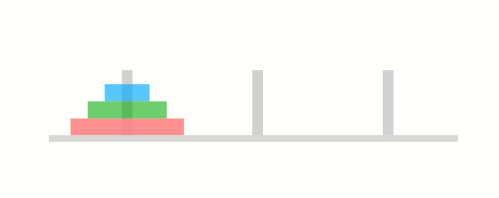

## Subsets

In [ ]:
#@title Permutations recursive definition and their connections with bits
%%html

<?xml version="1.0" encoding="UTF-8"?>
<svg width="154mm" height="126mm" version="1.1" viewBox="0 0 308.88 252.48" xmlns="http://www.w3.org/2000/svg" xmlns:cc="http://creativecommons.org/ns#" xmlns:dc="http://purl.org/dc/elements/1.1/" xmlns:ns26="http://www.iki.fi/pav/software/textext/" xmlns:rdf="http://www.w3.org/1999/02/22-rdf-syntax-ns#">
 <defs></defs>
 <metadata>
  <rdf:RDF>
   <cc:Work rdf:about="">
    <dc:format>image/svg+xml</dc:format>
    <dc:type rdf:resource="http://purl.org/dc/dcmitype/StillImage"/>
    <dc:title/>
   </cc:Work>
  </rdf:RDF>
 </metadata>
 <g transform="translate(-.20632 45.223)">
  <g transform="translate(74.013 32.784)" ns26:alignment="middle center" ns26:jacobian_sqrt="1.0" ns26:pdfconverter="inkscape" ns26:preamble="C:\\Users\\User\\AppData\\Roaming\\inkscape\\extensions\\textext\\default_packages.tex" ns26:scale="2.834645669291339" ns26:texconverter="pdflatex" ns26:text="$$\\{\\}$$\n$$\\{1\\}$$\n$$\\{1\\}$$\n$$\\{1\\}$$\n$$\\{1,2\\}$$\n$$\\{1,3\\}$$\n$$\\{2,3\\}$$" ns26:version="1.1.0">
   <defs id="id-c9b08b06-591f-4887-834c-9520e08b228b"></defs>
   <g id="id-72160af9-4132-4246-93bc-5fd1cfd115ce" transform="translate(-294.17 -139.24)">
    <g style="fill:#000000"></g>
    <g transform="translate(320.24 107.3)" ns26:alignment="middle center" ns26:jacobian_sqrt="1.0" ns26:pdfconverter="inkscape" ns26:preamble="C:\\Users\\User\\AppData\\Roaming\\inkscape\\extensions\\textext\\default_packages.tex" ns26:scale="2.834645669291339" ns26:texconverter="pdflatex" ns26:text="$$S_4$$\n$$S_3$$\n$$\\{4\\}$$\n$$\\{1,4\\}$$\n$$\\{2,4\\}$$\n$$\\{3,4\\}$$\n$$\\{1,2,4\\}$$\n$$\\{1,3,4\\}$$\n$$\\{2,3,4\\}$$" ns26:version="1.1.0">
     <defs id="id-e9b940dd-7536-4cd1-98ea-f8d9b618a8eb"></defs>
     <g id="id-5b149697-be32-4968-9299-7a2d5331921f" transform="translate(-289.46 -139.69)">
      <rect x="189.81" y="168.2" width="156.68" height="175.98" ry="1.2858" style="fill:none;opacity:.999;stroke-linecap:round;stroke-opacity:.54924;stroke-width:.44485;stroke:#000000"/>
      <rect x="426.09" y="137.04" width="49.614" height="107.51" ry="1.5711" style="fill-opacity:.14394;fill:#ff0000;opacity:.999;stroke-linecap:round;stroke-width:.49409"/>
      <g transform="matrix(1.174 0 0 1.174 -85.34 -7.8317)" style="fill:#000000">
       <g transform="translate(306.44 148.21)">
        <path id="id-99743a97-6546-41ec-bc8e-f2fdf47f1ede" d="m3.6875-1.1406v-0.25h-0.78125v-3.1094c0-0.14062 0-0.20312-0.14062-0.20312-0.09375 0-0.125 0-0.1875 0.10938l-2.3125 3.2031v0.25h2.0625v0.5625c0 0.25 0 0.32812-0.57812 0.32812h-0.1875v0.25c0.35938-0.015625 0.79688-0.03125 1.0469-0.03125 0.26562 0 0.70312 0.015625 1.0625 0.03125v-0.25h-0.1875c-0.57812 0-0.57812-0.078125-0.57812-0.32812v-0.5625zm-1.3125-2.7969v2.5469h-1.8438z"/>
       </g>
      </g>
      <g transform="translate(-81.14 18.083)" style="fill:#000000">
       <g transform="translate(306.44 166.15)">
        <path d="m1.9062-2.3281c0.54688 0 0.9375 0.375 0.9375 1.125 0 0.85938-0.51562 1.125-0.90625 1.125-0.28125 0-0.90625-0.078125-1.1875-0.5 0.32812 0 0.40625-0.23438 0.40625-0.39062 0-0.21875-0.17188-0.375-0.39062-0.375-0.1875 0-0.39062 0.125-0.39062 0.40625 0 0.65625 0.71875 1.0781 1.5625 1.0781 0.96875 0 1.6406-0.65625 1.6406-1.3438 0-0.54688-0.4375-1.0938-1.2031-1.25 0.71875-0.26562 0.98438-0.78125 0.98438-1.2188 0-0.54688-0.625-0.95312-1.4062-0.95312-0.76562 0-1.3594 0.375-1.3594 0.9375 0 0.23438 0.15625 0.35938 0.35938 0.35938 0.21875 0 0.35938-0.15625 0.35938-0.34375 0-0.20312-0.14062-0.35938-0.35938-0.375 0.25-0.29688 0.71875-0.375 0.98438-0.375 0.3125 0 0.75 0.15625 0.75 0.75 0 0.29688-0.09375 0.625-0.28125 0.82812-0.21875 0.26562-0.42188 0.28125-0.76562 0.3125-0.17188 0.015625-0.1875 0.015625-0.21875 0.015625-0.015625 0-0.078125 0.015625-0.078125 0.09375 0 0.09375 0.0625 0.09375 0.1875 0.09375z"/>
       </g>
      </g>
      <g transform="translate(9.8769 20.729)" style="fill:#000000">
       <g transform="translate(298.15 182.59)">
        <path d="m2.8281-6.1562c0-0.39062 0.25-1.0312 1.3438-1.0938 0.046875-0.015625 0.078125-0.0625 0.078125-0.10938 0-0.125-0.078125-0.125-0.1875-0.125-0.98438 0-1.9062 0.51562-1.9062 1.25v2.2812c0 0.39062 0 0.70312-0.40625 1.0312-0.34375 0.29688-0.71875 0.3125-0.9375 0.3125-0.0625 0.015625-0.09375 0.0625-0.09375 0.10938 0 0.10938 0.0625 0.10938 0.15625 0.125 0.65625 0.03125 1.1406 0.39062 1.25 0.875 0.03125 0.10938 0.03125 0.14062 0.03125 0.5v1.9688c0 0.42188 0 0.73438 0.46875 1.1094 0.39062 0.29688 1.0469 0.42188 1.4375 0.42188 0.10938 0 0.1875 0 0.1875-0.125 0-0.09375-0.046875-0.09375-0.15625-0.10938-0.625-0.03125-1.1094-0.35938-1.25-0.85938-0.015625-0.09375-0.015625-0.10938-0.015625-0.46875v-2.0938c0-0.45312-0.09375-0.625-0.40625-0.95312-0.20312-0.20312-0.5-0.29688-0.78125-0.39062 0.82812-0.21875 1.1875-0.6875 1.1875-1.2656z"/>
       </g>
      </g>
      <g transform="translate(9.8769 20.729)" style="fill:#000000">
       <g transform="translate(303.13 182.59)">
        <path d="m2.9375-1.6406v0.85938c0 0.35938-0.03125 0.46875-0.76562 0.46875h-0.20312v0.3125c0.40625-0.03125 0.92188-0.03125 1.3438-0.03125s0.9375 0 1.3594 0.03125v-0.3125h-0.21875c-0.73438 0-0.75-0.10938-0.75-0.46875v-0.85938h0.98438v-0.3125h-0.98438v-4.5312c0-0.20312 0-0.26562-0.17188-0.26562-0.078125 0-0.10938 0-0.1875 0.125l-3.0625 4.6719v0.3125zm0.046875-0.3125h-2.4219l2.4219-3.7188z"/>
       </g>
      </g>
      <g transform="translate(9.8769 20.729)" style="fill:#000000">
       <g transform="translate(308.12 182.59)">
        <path d="m2.1562 1.1719c0 0.39062-0.26562 1.0312-1.3438 1.0938-0.0625 0.015625-0.09375 0.0625-0.09375 0.10938 0 0.125 0.10938 0.125 0.20312 0.125 0.96875 0 1.8906-0.5 1.9062-1.25v-2.2812c0-0.39062 0-0.70312 0.39062-1.0312 0.34375-0.29688 0.73438-0.3125 0.95312-0.3125 0.046875-0.015625 0.078125-0.0625 0.078125-0.125 0-0.09375-0.046875-0.09375-0.15625-0.10938-0.65625-0.03125-1.1406-0.39062-1.25-0.875-0.015625-0.10938-0.015625-0.14062-0.015625-0.5v-1.9688c0-0.42188 0-0.73438-0.48438-1.1094-0.40625-0.3125-1.0938-0.42188-1.4219-0.42188-0.09375 0-0.20312 0-0.20312 0.125 0 0.09375 0.0625 0.09375 0.15625 0.10938 0.625 0.03125 1.125 0.35938 1.25 0.85938 0.03125 0.09375 0.03125 0.10938 0.03125 0.46875v2.0938c0 0.45312 0.078125 0.625 0.39062 0.95312 0.21875 0.20312 0.5 0.29688 0.78125 0.375-0.8125 0.23438-1.1719 0.70312-1.1719 1.2812z"/>
       </g>
      </g>
      <g transform="translate(9.8769 20.729)" style="fill:#000000">
       <g transform="translate(293.45 200.52)">
        <path d="m2.8281-6.1562c0-0.39062 0.25-1.0312 1.3438-1.0938 0.046875-0.015625 0.078125-0.0625 0.078125-0.10938 0-0.125-0.078125-0.125-0.1875-0.125-0.98438 0-1.9062 0.51562-1.9062 1.25v2.2812c0 0.39062 0 0.70312-0.40625 1.0312-0.34375 0.29688-0.71875 0.3125-0.9375 0.3125-0.0625 0.015625-0.09375 0.0625-0.09375 0.10938 0 0.10938 0.0625 0.10938 0.15625 0.125 0.65625 0.03125 1.1406 0.39062 1.25 0.875 0.03125 0.10938 0.03125 0.14062 0.03125 0.5v1.9688c0 0.42188 0 0.73438 0.46875 1.1094 0.39062 0.29688 1.0469 0.42188 1.4375 0.42188 0.10938 0 0.1875 0 0.1875-0.125 0-0.09375-0.046875-0.09375-0.15625-0.10938-0.625-0.03125-1.1094-0.35938-1.25-0.85938-0.015625-0.09375-0.015625-0.10938-0.015625-0.46875v-2.0938c0-0.45312-0.09375-0.625-0.40625-0.95312-0.20312-0.20312-0.5-0.29688-0.78125-0.39062 0.82812-0.21875 1.1875-0.6875 1.1875-1.2656z"/>
       </g>
      </g>
      <g id="id-73eb547c-e8d7-4d91-82f2-36be8d4198ea" transform="translate(9.8769 20.729)" style="fill:#000000">
       <g transform="translate(298.43 200.52)">
        <path d="m2.9375-6.375c0-0.25 0-0.26562-0.23438-0.26562-0.625 0.64062-1.5 0.64062-1.8125 0.64062v0.3125c0.20312 0 0.78125 0 1.2969-0.26562v5.1719c0 0.35938-0.03125 0.46875-0.92188 0.46875h-0.3125v0.3125c0.34375-0.03125 1.2031-0.03125 1.6094-0.03125 0.39062 0 1.2656 0 1.6094 0.03125v-0.3125h-0.3125c-0.90625 0-0.92188-0.10938-0.92188-0.46875z"/>
       </g>
      </g>
      <g transform="translate(9.8769 20.729)" style="fill:#000000">
       <g transform="translate(303.41 200.52)">
        <path id="id-a0d88b83-b7fa-41fb-9001-acc4760f80ea" d="m2.0312-0.015625c0-0.65625-0.25-1.0469-0.64062-1.0469-0.32812 0-0.53125 0.25-0.53125 0.53125 0 0.26562 0.20312 0.53125 0.53125 0.53125 0.10938 0 0.25-0.046875 0.34375-0.125 0.03125-0.03125 0.046875-0.03125 0.046875-0.03125 0.015625 0 0.015625 0 0.015625 0.14062 0 0.75-0.34375 1.3438-0.67188 1.6719-0.10938 0.10938-0.10938 0.125-0.10938 0.15625 0 0.078125 0.046875 0.10938 0.09375 0.10938 0.10938 0 0.92188-0.76562 0.92188-1.9375z"/>
       </g>
      </g>
      <g id="id-3826ff24-93a3-451c-948d-b6e06923372d" transform="translate(9.8769 20.729)" style="fill:#000000">
       <g transform="translate(307.84 200.52)">
        <path id="id-37ca84a5-23b8-4fe1-b572-f6bcee648d9c" d="m2.9375-1.6406v0.85938c0 0.35938-0.03125 0.46875-0.76562 0.46875h-0.20312v0.3125c0.40625-0.03125 0.92188-0.03125 1.3438-0.03125s0.9375 0 1.3594 0.03125v-0.3125h-0.21875c-0.73438 0-0.75-0.10938-0.75-0.46875v-0.85938h0.98438v-0.3125h-0.98438v-4.5312c0-0.20312 0-0.26562-0.17188-0.26562-0.078125 0-0.10938 0-0.1875 0.125l-3.0625 4.6719v0.3125zm0.046875-0.3125h-2.4219l2.4219-3.7188z"/>
       </g>
      </g>
      <g transform="translate(9.8769 20.729)" style="fill:#000000">
       <g transform="translate(312.82 200.52)">
        <path id="id-41a145e1-e3eb-46fc-b7f7-3de8b2afc66a" d="m2.1562 1.1719c0 0.39062-0.26562 1.0312-1.3438 1.0938-0.0625 0.015625-0.09375 0.0625-0.09375 0.10938 0 0.125 0.10938 0.125 0.20312 0.125 0.96875 0 1.8906-0.5 1.9062-1.25v-2.2812c0-0.39062 0-0.70312 0.39062-1.0312 0.34375-0.29688 0.73438-0.3125 0.95312-0.3125 0.046875-0.015625 0.078125-0.0625 0.078125-0.125 0-0.09375-0.046875-0.09375-0.15625-0.10938-0.65625-0.03125-1.1406-0.39062-1.25-0.875-0.015625-0.10938-0.015625-0.14062-0.015625-0.5v-1.9688c0-0.42188 0-0.73438-0.48438-1.1094-0.40625-0.3125-1.0938-0.42188-1.4219-0.42188-0.09375 0-0.20312 0-0.20312 0.125 0 0.09375 0.0625 0.09375 0.15625 0.10938 0.625 0.03125 1.125 0.35938 1.25 0.85938 0.03125 0.09375 0.03125 0.10938 0.03125 0.46875v2.0938c0 0.45312 0.078125 0.625 0.39062 0.95312 0.21875 0.20312 0.5 0.29688 0.78125 0.375-0.8125 0.23438-1.1719 0.70312-1.1719 1.2812z"/>
       </g>
      </g>
      <g transform="translate(9.8769 20.729)" style="fill:#000000">
       <g transform="translate(293.45 218.45)">
        <path d="m2.8281-6.1562c0-0.39062 0.25-1.0312 1.3438-1.0938 0.046875-0.015625 0.078125-0.0625 0.078125-0.10938 0-0.125-0.078125-0.125-0.1875-0.125-0.98438 0-1.9062 0.51562-1.9062 1.25v2.2812c0 0.39062 0 0.70312-0.40625 1.0312-0.34375 0.29688-0.71875 0.3125-0.9375 0.3125-0.0625 0.015625-0.09375 0.0625-0.09375 0.10938 0 0.10938 0.0625 0.10938 0.15625 0.125 0.65625 0.03125 1.1406 0.39062 1.25 0.875 0.03125 0.10938 0.03125 0.14062 0.03125 0.5v1.9688c0 0.42188 0 0.73438 0.46875 1.1094 0.39062 0.29688 1.0469 0.42188 1.4375 0.42188 0.10938 0 0.1875 0 0.1875-0.125 0-0.09375-0.046875-0.09375-0.15625-0.10938-0.625-0.03125-1.1094-0.35938-1.25-0.85938-0.015625-0.09375-0.015625-0.10938-0.015625-0.46875v-2.0938c0-0.45312-0.09375-0.625-0.40625-0.95312-0.20312-0.20312-0.5-0.29688-0.78125-0.39062 0.82812-0.21875 1.1875-0.6875 1.1875-1.2656z"/>
       </g>
      </g>
      <g transform="translate(9.8769 20.729)" style="fill:#000000">
       <g transform="translate(298.43 218.45)">
        <path id="id-f9913fd2-20f1-4cac-9c9e-6c450c61bf1d" d="m1.2656-0.76562 1.0625-1.0312c1.5469-1.375 2.1406-1.9062 2.1406-2.9062 0-1.1406-0.89062-1.9375-2.1094-1.9375-1.125 0-1.8594 0.92188-1.8594 1.8125 0 0.54688 0.5 0.54688 0.53125 0.54688 0.17188 0 0.51562-0.10938 0.51562-0.53125 0-0.25-0.1875-0.51562-0.53125-0.51562-0.078125 0-0.09375 0-0.125 0.015625 0.21875-0.65625 0.76562-1.0156 1.3438-1.0156 0.90625 0 1.3281 0.8125 1.3281 1.625 0 0.79688-0.48438 1.5781-1.0469 2.2031l-1.9062 2.125c-0.10938 0.10938-0.10938 0.14062-0.10938 0.375h3.7031l0.26562-1.7344h-0.23438c-0.0625 0.29688-0.125 0.73438-0.23438 0.89062-0.0625 0.078125-0.71875 0.078125-0.9375 0.078125z"/>
       </g>
      </g>
      <g transform="translate(9.8769 20.729)" style="fill:#000000">
       <g transform="translate(303.41 218.45)">
        <path id="id-88c520f3-1d98-4625-bc74-2600ed6169ea" d="m2.0312-0.015625c0-0.65625-0.25-1.0469-0.64062-1.0469-0.32812 0-0.53125 0.25-0.53125 0.53125 0 0.26562 0.20312 0.53125 0.53125 0.53125 0.10938 0 0.25-0.046875 0.34375-0.125 0.03125-0.03125 0.046875-0.03125 0.046875-0.03125 0.015625 0 0.015625 0 0.015625 0.14062 0 0.75-0.34375 1.3438-0.67188 1.6719-0.10938 0.10938-0.10938 0.125-0.10938 0.15625 0 0.078125 0.046875 0.10938 0.09375 0.10938 0.10938 0 0.92188-0.76562 0.92188-1.9375z"/>
       </g>
      </g>
      <g transform="translate(9.8769 20.729)" style="fill:#000000">
       <g transform="translate(307.84 218.45)">
        <path d="m2.9375-1.6406v0.85938c0 0.35938-0.03125 0.46875-0.76562 0.46875h-0.20312v0.3125c0.40625-0.03125 0.92188-0.03125 1.3438-0.03125s0.9375 0 1.3594 0.03125v-0.3125h-0.21875c-0.73438 0-0.75-0.10938-0.75-0.46875v-0.85938h0.98438v-0.3125h-0.98438v-4.5312c0-0.20312 0-0.26562-0.17188-0.26562-0.078125 0-0.10938 0-0.1875 0.125l-3.0625 4.6719v0.3125zm0.046875-0.3125h-2.4219l2.4219-3.7188z"/>
       </g>
      </g>
      <g id="id-3104521c-4211-45ce-8cbf-e909fae4c1ce" transform="translate(9.8769 20.729)" style="fill:#000000">
       <g transform="translate(312.82 218.45)">
        <path id="id-084222e0-703f-4bb9-b011-e9988fe851da" d="m2.1562 1.1719c0 0.39062-0.26562 1.0312-1.3438 1.0938-0.0625 0.015625-0.09375 0.0625-0.09375 0.10938 0 0.125 0.10938 0.125 0.20312 0.125 0.96875 0 1.8906-0.5 1.9062-1.25v-2.2812c0-0.39062 0-0.70312 0.39062-1.0312 0.34375-0.29688 0.73438-0.3125 0.95312-0.3125 0.046875-0.015625 0.078125-0.0625 0.078125-0.125 0-0.09375-0.046875-0.09375-0.15625-0.10938-0.65625-0.03125-1.1406-0.39062-1.25-0.875-0.015625-0.10938-0.015625-0.14062-0.015625-0.5v-1.9688c0-0.42188 0-0.73438-0.48438-1.1094-0.40625-0.3125-1.0938-0.42188-1.4219-0.42188-0.09375 0-0.20312 0-0.20312 0.125 0 0.09375 0.0625 0.09375 0.15625 0.10938 0.625 0.03125 1.125 0.35938 1.25 0.85938 0.03125 0.09375 0.03125 0.10938 0.03125 0.46875v2.0938c0 0.45312 0.078125 0.625 0.39062 0.95312 0.21875 0.20312 0.5 0.29688 0.78125 0.375-0.8125 0.23438-1.1719 0.70312-1.1719 1.2812z"/>
       </g>
      </g>
      <g id="id-2908c9f7-d338-4802-9d37-3db4606a92eb" transform="translate(9.8769 20.729)" style="fill:#000000">
       <g transform="translate(293.45 236.38)">
        <path d="m2.8281-6.1562c0-0.39062 0.25-1.0312 1.3438-1.0938 0.046875-0.015625 0.078125-0.0625 0.078125-0.10938 0-0.125-0.078125-0.125-0.1875-0.125-0.98438 0-1.9062 0.51562-1.9062 1.25v2.2812c0 0.39062 0 0.70312-0.40625 1.0312-0.34375 0.29688-0.71875 0.3125-0.9375 0.3125-0.0625 0.015625-0.09375 0.0625-0.09375 0.10938 0 0.10938 0.0625 0.10938 0.15625 0.125 0.65625 0.03125 1.1406 0.39062 1.25 0.875 0.03125 0.10938 0.03125 0.14062 0.03125 0.5v1.9688c0 0.42188 0 0.73438 0.46875 1.1094 0.39062 0.29688 1.0469 0.42188 1.4375 0.42188 0.10938 0 0.1875 0 0.1875-0.125 0-0.09375-0.046875-0.09375-0.15625-0.10938-0.625-0.03125-1.1094-0.35938-1.25-0.85938-0.015625-0.09375-0.015625-0.10938-0.015625-0.46875v-2.0938c0-0.45312-0.09375-0.625-0.40625-0.95312-0.20312-0.20312-0.5-0.29688-0.78125-0.39062 0.82812-0.21875 1.1875-0.6875 1.1875-1.2656z"/>
       </g>
      </g>
      <g transform="translate(9.8769 20.729)" style="fill:#000000">
       <g transform="translate(298.43 236.38)">
        <path d="m2.8906-3.5156c0.8125-0.26562 1.3906-0.95312 1.3906-1.75 0-0.8125-0.875-1.375-1.8281-1.375-1 0-1.7656 0.59375-1.7656 1.3594 0 0.32812 0.21875 0.51562 0.51562 0.51562s0.5-0.21875 0.5-0.51562c0-0.48438-0.46875-0.48438-0.60938-0.48438 0.29688-0.5 0.95312-0.625 1.3125-0.625 0.42188 0 0.96875 0.21875 0.96875 1.1094 0 0.125-0.03125 0.70312-0.28125 1.1406-0.29688 0.48438-0.64062 0.51562-0.89062 0.51562-0.078125 0.015625-0.3125 0.03125-0.39062 0.03125-0.078125 0.015625-0.14062 0.03125-0.14062 0.125 0 0.10938 0.0625 0.10938 0.23438 0.10938h0.4375c0.8125 0 1.1875 0.67188 1.1875 1.6562 0 1.3594-0.6875 1.6406-1.125 1.6406s-1.1875-0.17188-1.5312-0.75c0.34375 0.046875 0.65625-0.17188 0.65625-0.54688 0-0.35938-0.26562-0.5625-0.54688-0.5625-0.25 0-0.5625 0.14062-0.5625 0.57812 0 0.90625 0.92188 1.5625 2.0156 1.5625 1.2188 0 2.125-0.90625 2.125-1.9219 0-0.8125-0.64062-1.5938-1.6719-1.8125z"/>
       </g>
      </g>
      <g id="id-25f3fe52-48ea-4ef3-b236-69d20090f26d" transform="translate(9.8769 20.729)" style="fill:#000000">
       <g transform="translate(303.41 236.38)">
        <path id="id-ef16c3e7-3b72-48eb-9cfc-5184072bdc5c" d="m2.0312-0.015625c0-0.65625-0.25-1.0469-0.64062-1.0469-0.32812 0-0.53125 0.25-0.53125 0.53125 0 0.26562 0.20312 0.53125 0.53125 0.53125 0.10938 0 0.25-0.046875 0.34375-0.125 0.03125-0.03125 0.046875-0.03125 0.046875-0.03125 0.015625 0 0.015625 0 0.015625 0.14062 0 0.75-0.34375 1.3438-0.67188 1.6719-0.10938 0.10938-0.10938 0.125-0.10938 0.15625 0 0.078125 0.046875 0.10938 0.09375 0.10938 0.10938 0 0.92188-0.76562 0.92188-1.9375z"/>
       </g>
      </g>
      <g transform="translate(9.8769 20.729)" style="fill:#000000">
       <g transform="translate(307.84 236.38)">
        <path d="m2.9375-1.6406v0.85938c0 0.35938-0.03125 0.46875-0.76562 0.46875h-0.20312v0.3125c0.40625-0.03125 0.92188-0.03125 1.3438-0.03125s0.9375 0 1.3594 0.03125v-0.3125h-0.21875c-0.73438 0-0.75-0.10938-0.75-0.46875v-0.85938h0.98438v-0.3125h-0.98438v-4.5312c0-0.20312 0-0.26562-0.17188-0.26562-0.078125 0-0.10938 0-0.1875 0.125l-3.0625 4.6719v0.3125zm0.046875-0.3125h-2.4219l2.4219-3.7188z"/>
       </g>
      </g>
      <g transform="translate(9.8769 20.729)" style="fill:#000000">
       <g transform="translate(312.82 236.38)">
        <path id="id-1c7873e0-9abf-48b3-9346-885ea14240bd" d="m2.1562 1.1719c0 0.39062-0.26562 1.0312-1.3438 1.0938-0.0625 0.015625-0.09375 0.0625-0.09375 0.10938 0 0.125 0.10938 0.125 0.20312 0.125 0.96875 0 1.8906-0.5 1.9062-1.25v-2.2812c0-0.39062 0-0.70312 0.39062-1.0312 0.34375-0.29688 0.73438-0.3125 0.95312-0.3125 0.046875-0.015625 0.078125-0.0625 0.078125-0.125 0-0.09375-0.046875-0.09375-0.15625-0.10938-0.65625-0.03125-1.1406-0.39062-1.25-0.875-0.015625-0.10938-0.015625-0.14062-0.015625-0.5v-1.9688c0-0.42188 0-0.73438-0.48438-1.1094-0.40625-0.3125-1.0938-0.42188-1.4219-0.42188-0.09375 0-0.20312 0-0.20312 0.125 0 0.09375 0.0625 0.09375 0.15625 0.10938 0.625 0.03125 1.125 0.35938 1.25 0.85938 0.03125 0.09375 0.03125 0.10938 0.03125 0.46875v2.0938c0 0.45312 0.078125 0.625 0.39062 0.95312 0.21875 0.20312 0.5 0.29688 0.78125 0.375-0.8125 0.23438-1.1719 0.70312-1.1719 1.2812z"/>
       </g>
      </g>
      <g transform="translate(9.8769 20.729)" style="fill:#000000">
       <g transform="translate(288.74 254.32)">
        <path id="id-f4927d5e-e1d0-4c57-9e85-5e88bee51f5d" d="m2.8281-6.1562c0-0.39062 0.25-1.0312 1.3438-1.0938 0.046875-0.015625 0.078125-0.0625 0.078125-0.10938 0-0.125-0.078125-0.125-0.1875-0.125-0.98438 0-1.9062 0.51562-1.9062 1.25v2.2812c0 0.39062 0 0.70312-0.40625 1.0312-0.34375 0.29688-0.71875 0.3125-0.9375 0.3125-0.0625 0.015625-0.09375 0.0625-0.09375 0.10938 0 0.10938 0.0625 0.10938 0.15625 0.125 0.65625 0.03125 1.1406 0.39062 1.25 0.875 0.03125 0.10938 0.03125 0.14062 0.03125 0.5v1.9688c0 0.42188 0 0.73438 0.46875 1.1094 0.39062 0.29688 1.0469 0.42188 1.4375 0.42188 0.10938 0 0.1875 0 0.1875-0.125 0-0.09375-0.046875-0.09375-0.15625-0.10938-0.625-0.03125-1.1094-0.35938-1.25-0.85938-0.015625-0.09375-0.015625-0.10938-0.015625-0.46875v-2.0938c0-0.45312-0.09375-0.625-0.40625-0.95312-0.20312-0.20312-0.5-0.29688-0.78125-0.39062 0.82812-0.21875 1.1875-0.6875 1.1875-1.2656z"/>
       </g>
      </g>
      <g id="id-0e522238-bdcc-4949-abf4-5a1328999d9e" transform="translate(9.8769 20.729)" style="fill:#000000">
       <g transform="translate(293.72 254.32)">
        <path d="m2.9375-6.375c0-0.25 0-0.26562-0.23438-0.26562-0.625 0.64062-1.5 0.64062-1.8125 0.64062v0.3125c0.20312 0 0.78125 0 1.2969-0.26562v5.1719c0 0.35938-0.03125 0.46875-0.92188 0.46875h-0.3125v0.3125c0.34375-0.03125 1.2031-0.03125 1.6094-0.03125 0.39062 0 1.2656 0 1.6094 0.03125v-0.3125h-0.3125c-0.90625 0-0.92188-0.10938-0.92188-0.46875z"/>
       </g>
      </g>
      <g id="id-9ce54225-93c0-4018-a453-2917b124d2fc" transform="translate(9.8769 20.729)" style="fill:#000000">
       <g transform="translate(298.71 254.32)">
        <path d="m2.0312-0.015625c0-0.65625-0.25-1.0469-0.64062-1.0469-0.32812 0-0.53125 0.25-0.53125 0.53125 0 0.26562 0.20312 0.53125 0.53125 0.53125 0.10938 0 0.25-0.046875 0.34375-0.125 0.03125-0.03125 0.046875-0.03125 0.046875-0.03125 0.015625 0 0.015625 0 0.015625 0.14062 0 0.75-0.34375 1.3438-0.67188 1.6719-0.10938 0.10938-0.10938 0.125-0.10938 0.15625 0 0.078125 0.046875 0.10938 0.09375 0.10938 0.10938 0 0.92188-0.76562 0.92188-1.9375z"/>
       </g>
      </g>
      <g transform="translate(9.8769 20.729)" style="fill:#000000">
       <g transform="translate(303.13 254.32)">
        <path d="m1.2656-0.76562 1.0625-1.0312c1.5469-1.375 2.1406-1.9062 2.1406-2.9062 0-1.1406-0.89062-1.9375-2.1094-1.9375-1.125 0-1.8594 0.92188-1.8594 1.8125 0 0.54688 0.5 0.54688 0.53125 0.54688 0.17188 0 0.51562-0.10938 0.51562-0.53125 0-0.25-0.1875-0.51562-0.53125-0.51562-0.078125 0-0.09375 0-0.125 0.015625 0.21875-0.65625 0.76562-1.0156 1.3438-1.0156 0.90625 0 1.3281 0.8125 1.3281 1.625 0 0.79688-0.48438 1.5781-1.0469 2.2031l-1.9062 2.125c-0.10938 0.10938-0.10938 0.14062-0.10938 0.375h3.7031l0.26562-1.7344h-0.23438c-0.0625 0.29688-0.125 0.73438-0.23438 0.89062-0.0625 0.078125-0.71875 0.078125-0.9375 0.078125z"/>
       </g>
      </g>
      <g id="id-61432b1f-028a-4601-8356-c0686150141f" transform="translate(9.8769 20.729)" style="fill:#000000">
       <g transform="translate(308.12 254.32)">
        <path d="m2.0312-0.015625c0-0.65625-0.25-1.0469-0.64062-1.0469-0.32812 0-0.53125 0.25-0.53125 0.53125 0 0.26562 0.20312 0.53125 0.53125 0.53125 0.10938 0 0.25-0.046875 0.34375-0.125 0.03125-0.03125 0.046875-0.03125 0.046875-0.03125 0.015625 0 0.015625 0 0.015625 0.14062 0 0.75-0.34375 1.3438-0.67188 1.6719-0.10938 0.10938-0.10938 0.125-0.10938 0.15625 0 0.078125 0.046875 0.10938 0.09375 0.10938 0.10938 0 0.92188-0.76562 0.92188-1.9375z"/>
       </g>
      </g>
      <g id="id-49b0e76b-1521-4972-9da7-223ea96f8d6d" transform="translate(9.8769 20.729)" style="fill:#000000">
       <g transform="translate(312.54 254.32)">
        <path d="m2.9375-1.6406v0.85938c0 0.35938-0.03125 0.46875-0.76562 0.46875h-0.20312v0.3125c0.40625-0.03125 0.92188-0.03125 1.3438-0.03125s0.9375 0 1.3594 0.03125v-0.3125h-0.21875c-0.73438 0-0.75-0.10938-0.75-0.46875v-0.85938h0.98438v-0.3125h-0.98438v-4.5312c0-0.20312 0-0.26562-0.17188-0.26562-0.078125 0-0.10938 0-0.1875 0.125l-3.0625 4.6719v0.3125zm0.046875-0.3125h-2.4219l2.4219-3.7188z"/>
       </g>
      </g>
      <g transform="translate(9.8769 20.729)" style="fill:#000000">
       <g transform="translate(317.52 254.32)">
        <path d="m2.1562 1.1719c0 0.39062-0.26562 1.0312-1.3438 1.0938-0.0625 0.015625-0.09375 0.0625-0.09375 0.10938 0 0.125 0.10938 0.125 0.20312 0.125 0.96875 0 1.8906-0.5 1.9062-1.25v-2.2812c0-0.39062 0-0.70312 0.39062-1.0312 0.34375-0.29688 0.73438-0.3125 0.95312-0.3125 0.046875-0.015625 0.078125-0.0625 0.078125-0.125 0-0.09375-0.046875-0.09375-0.15625-0.10938-0.65625-0.03125-1.1406-0.39062-1.25-0.875-0.015625-0.10938-0.015625-0.14062-0.015625-0.5v-1.9688c0-0.42188 0-0.73438-0.48438-1.1094-0.40625-0.3125-1.0938-0.42188-1.4219-0.42188-0.09375 0-0.20312 0-0.20312 0.125 0 0.09375 0.0625 0.09375 0.15625 0.10938 0.625 0.03125 1.125 0.35938 1.25 0.85938 0.03125 0.09375 0.03125 0.10938 0.03125 0.46875v2.0938c0 0.45312 0.078125 0.625 0.39062 0.95312 0.21875 0.20312 0.5 0.29688 0.78125 0.375-0.8125 0.23438-1.1719 0.70312-1.1719 1.2812z"/>
       </g>
      </g>
      <g transform="translate(9.8769 20.729)" style="fill:#000000">
       <g transform="translate(288.74 272.25)">
        <path d="m2.8281-6.1562c0-0.39062 0.25-1.0312 1.3438-1.0938 0.046875-0.015625 0.078125-0.0625 0.078125-0.10938 0-0.125-0.078125-0.125-0.1875-0.125-0.98438 0-1.9062 0.51562-1.9062 1.25v2.2812c0 0.39062 0 0.70312-0.40625 1.0312-0.34375 0.29688-0.71875 0.3125-0.9375 0.3125-0.0625 0.015625-0.09375 0.0625-0.09375 0.10938 0 0.10938 0.0625 0.10938 0.15625 0.125 0.65625 0.03125 1.1406 0.39062 1.25 0.875 0.03125 0.10938 0.03125 0.14062 0.03125 0.5v1.9688c0 0.42188 0 0.73438 0.46875 1.1094 0.39062 0.29688 1.0469 0.42188 1.4375 0.42188 0.10938 0 0.1875 0 0.1875-0.125 0-0.09375-0.046875-0.09375-0.15625-0.10938-0.625-0.03125-1.1094-0.35938-1.25-0.85938-0.015625-0.09375-0.015625-0.10938-0.015625-0.46875v-2.0938c0-0.45312-0.09375-0.625-0.40625-0.95312-0.20312-0.20312-0.5-0.29688-0.78125-0.39062 0.82812-0.21875 1.1875-0.6875 1.1875-1.2656z"/>
       </g>
      </g>
      <g transform="translate(9.8769 20.729)" style="fill:#000000">
       <g transform="translate(293.72 272.25)">
        <path id="id-97a1b77e-4884-4f01-903c-d768b237d41f" d="m2.9375-6.375c0-0.25 0-0.26562-0.23438-0.26562-0.625 0.64062-1.5 0.64062-1.8125 0.64062v0.3125c0.20312 0 0.78125 0 1.2969-0.26562v5.1719c0 0.35938-0.03125 0.46875-0.92188 0.46875h-0.3125v0.3125c0.34375-0.03125 1.2031-0.03125 1.6094-0.03125 0.39062 0 1.2656 0 1.6094 0.03125v-0.3125h-0.3125c-0.90625 0-0.92188-0.10938-0.92188-0.46875z"/>
       </g>
      </g>
      <g transform="translate(9.8769 20.729)" style="fill:#000000">
       <g transform="translate(298.71 272.25)">
        <path d="m2.0312-0.015625c0-0.65625-0.25-1.0469-0.64062-1.0469-0.32812 0-0.53125 0.25-0.53125 0.53125 0 0.26562 0.20312 0.53125 0.53125 0.53125 0.10938 0 0.25-0.046875 0.34375-0.125 0.03125-0.03125 0.046875-0.03125 0.046875-0.03125 0.015625 0 0.015625 0 0.015625 0.14062 0 0.75-0.34375 1.3438-0.67188 1.6719-0.10938 0.10938-0.10938 0.125-0.10938 0.15625 0 0.078125 0.046875 0.10938 0.09375 0.10938 0.10938 0 0.92188-0.76562 0.92188-1.9375z"/>
       </g>
      </g>
      <g id="id-59970586-5214-49f6-baf8-e4e6f8893bad" transform="translate(9.8769 20.729)" style="fill:#000000">
       <g transform="translate(303.13 272.25)">
        <path d="m2.8906-3.5156c0.8125-0.26562 1.3906-0.95312 1.3906-1.75 0-0.8125-0.875-1.375-1.8281-1.375-1 0-1.7656 0.59375-1.7656 1.3594 0 0.32812 0.21875 0.51562 0.51562 0.51562s0.5-0.21875 0.5-0.51562c0-0.48438-0.46875-0.48438-0.60938-0.48438 0.29688-0.5 0.95312-0.625 1.3125-0.625 0.42188 0 0.96875 0.21875 0.96875 1.1094 0 0.125-0.03125 0.70312-0.28125 1.1406-0.29688 0.48438-0.64062 0.51562-0.89062 0.51562-0.078125 0.015625-0.3125 0.03125-0.39062 0.03125-0.078125 0.015625-0.14062 0.03125-0.14062 0.125 0 0.10938 0.0625 0.10938 0.23438 0.10938h0.4375c0.8125 0 1.1875 0.67188 1.1875 1.6562 0 1.3594-0.6875 1.6406-1.125 1.6406s-1.1875-0.17188-1.5312-0.75c0.34375 0.046875 0.65625-0.17188 0.65625-0.54688 0-0.35938-0.26562-0.5625-0.54688-0.5625-0.25 0-0.5625 0.14062-0.5625 0.57812 0 0.90625 0.92188 1.5625 2.0156 1.5625 1.2188 0 2.125-0.90625 2.125-1.9219 0-0.8125-0.64062-1.5938-1.6719-1.8125z"/>
       </g>
      </g>
      <g id="id-f3aeb8ef-a7a6-4745-9469-462e97c7d5ba" transform="translate(9.8769 20.729)" style="fill:#000000">
       <g transform="translate(308.12 272.25)">
        <path id="id-36c36310-0dac-4389-887b-461a5968bc9a" d="m2.0312-0.015625c0-0.65625-0.25-1.0469-0.64062-1.0469-0.32812 0-0.53125 0.25-0.53125 0.53125 0 0.26562 0.20312 0.53125 0.53125 0.53125 0.10938 0 0.25-0.046875 0.34375-0.125 0.03125-0.03125 0.046875-0.03125 0.046875-0.03125 0.015625 0 0.015625 0 0.015625 0.14062 0 0.75-0.34375 1.3438-0.67188 1.6719-0.10938 0.10938-0.10938 0.125-0.10938 0.15625 0 0.078125 0.046875 0.10938 0.09375 0.10938 0.10938 0 0.92188-0.76562 0.92188-1.9375z"/>
       </g>
      </g>
      <g transform="translate(9.8769 20.729)" style="fill:#000000">
       <g transform="translate(312.54 272.25)">
        <path id="id-d140346d-c75e-4472-8630-3063a412b89e" d="m2.9375-1.6406v0.85938c0 0.35938-0.03125 0.46875-0.76562 0.46875h-0.20312v0.3125c0.40625-0.03125 0.92188-0.03125 1.3438-0.03125s0.9375 0 1.3594 0.03125v-0.3125h-0.21875c-0.73438 0-0.75-0.10938-0.75-0.46875v-0.85938h0.98438v-0.3125h-0.98438v-4.5312c0-0.20312 0-0.26562-0.17188-0.26562-0.078125 0-0.10938 0-0.1875 0.125l-3.0625 4.6719v0.3125zm0.046875-0.3125h-2.4219l2.4219-3.7188z"/>
       </g>
      </g>
      <rect x="290.89" y="188.74" width="49.614" height="146.98" ry="2.1479" style="fill-opacity:.17803;fill:#00c6ff;opacity:.999;stroke-linecap:round;stroke-width:.57772"/>
      <g transform="translate(9.8769 20.729)" style="fill:#000000">
       <g transform="translate(317.52 272.25)">
        <path d="m2.1562 1.1719c0 0.39062-0.26562 1.0312-1.3438 1.0938-0.0625 0.015625-0.09375 0.0625-0.09375 0.10938 0 0.125 0.10938 0.125 0.20312 0.125 0.96875 0 1.8906-0.5 1.9062-1.25v-2.2812c0-0.39062 0-0.70312 0.39062-1.0312 0.34375-0.29688 0.73438-0.3125 0.95312-0.3125 0.046875-0.015625 0.078125-0.0625 0.078125-0.125 0-0.09375-0.046875-0.09375-0.15625-0.10938-0.65625-0.03125-1.1406-0.39062-1.25-0.875-0.015625-0.10938-0.015625-0.14062-0.015625-0.5v-1.9688c0-0.42188 0-0.73438-0.48438-1.1094-0.40625-0.3125-1.0938-0.42188-1.4219-0.42188-0.09375 0-0.20312 0-0.20312 0.125 0 0.09375 0.0625 0.09375 0.15625 0.10938 0.625 0.03125 1.125 0.35938 1.25 0.85938 0.03125 0.09375 0.03125 0.10938 0.03125 0.46875v2.0938c0 0.45312 0.078125 0.625 0.39062 0.95312 0.21875 0.20312 0.5 0.29688 0.78125 0.375-0.8125 0.23438-1.1719 0.70312-1.1719 1.2812z"/>
       </g>
      </g>
      <g transform="translate(9.8769 20.729)" style="fill:#000000">
       <g transform="translate(288.74 290.18)">
        <path d="m2.8281-6.1562c0-0.39062 0.25-1.0312 1.3438-1.0938 0.046875-0.015625 0.078125-0.0625 0.078125-0.10938 0-0.125-0.078125-0.125-0.1875-0.125-0.98438 0-1.9062 0.51562-1.9062 1.25v2.2812c0 0.39062 0 0.70312-0.40625 1.0312-0.34375 0.29688-0.71875 0.3125-0.9375 0.3125-0.0625 0.015625-0.09375 0.0625-0.09375 0.10938 0 0.10938 0.0625 0.10938 0.15625 0.125 0.65625 0.03125 1.1406 0.39062 1.25 0.875 0.03125 0.10938 0.03125 0.14062 0.03125 0.5v1.9688c0 0.42188 0 0.73438 0.46875 1.1094 0.39062 0.29688 1.0469 0.42188 1.4375 0.42188 0.10938 0 0.1875 0 0.1875-0.125 0-0.09375-0.046875-0.09375-0.15625-0.10938-0.625-0.03125-1.1094-0.35938-1.25-0.85938-0.015625-0.09375-0.015625-0.10938-0.015625-0.46875v-2.0938c0-0.45312-0.09375-0.625-0.40625-0.95312-0.20312-0.20312-0.5-0.29688-0.78125-0.39062 0.82812-0.21875 1.1875-0.6875 1.1875-1.2656z"/>
       </g>
      </g>
      <g id="id-f7ec5f9e-8318-46a3-98db-a12cacef9cff" transform="translate(9.8769 20.729)" style="fill:#000000">
       <g transform="translate(293.72 290.18)">
        <path id="id-dd242ece-d4fb-40d4-a453-a8a6544f91cf" d="m1.2656-0.76562 1.0625-1.0312c1.5469-1.375 2.1406-1.9062 2.1406-2.9062 0-1.1406-0.89062-1.9375-2.1094-1.9375-1.125 0-1.8594 0.92188-1.8594 1.8125 0 0.54688 0.5 0.54688 0.53125 0.54688 0.17188 0 0.51562-0.10938 0.51562-0.53125 0-0.25-0.1875-0.51562-0.53125-0.51562-0.078125 0-0.09375 0-0.125 0.015625 0.21875-0.65625 0.76562-1.0156 1.3438-1.0156 0.90625 0 1.3281 0.8125 1.3281 1.625 0 0.79688-0.48438 1.5781-1.0469 2.2031l-1.9062 2.125c-0.10938 0.10938-0.10938 0.14062-0.10938 0.375h3.7031l0.26562-1.7344h-0.23438c-0.0625 0.29688-0.125 0.73438-0.23438 0.89062-0.0625 0.078125-0.71875 0.078125-0.9375 0.078125z"/>
       </g>
      </g>
      <g id="id-1f8dc7eb-ad04-4015-aa55-5114ba8336cc" transform="translate(9.8769 20.729)" style="fill:#000000">
       <g transform="translate(298.71 290.18)">
        <path id="id-26ee2bbb-acfe-4540-8274-57b7f3e6490a" d="m2.0312-0.015625c0-0.65625-0.25-1.0469-0.64062-1.0469-0.32812 0-0.53125 0.25-0.53125 0.53125 0 0.26562 0.20312 0.53125 0.53125 0.53125 0.10938 0 0.25-0.046875 0.34375-0.125 0.03125-0.03125 0.046875-0.03125 0.046875-0.03125 0.015625 0 0.015625 0 0.015625 0.14062 0 0.75-0.34375 1.3438-0.67188 1.6719-0.10938 0.10938-0.10938 0.125-0.10938 0.15625 0 0.078125 0.046875 0.10938 0.09375 0.10938 0.10938 0 0.92188-0.76562 0.92188-1.9375z"/>
       </g>
      </g>
      <g transform="translate(9.8769 20.729)" style="fill:#000000">
       <g transform="translate(303.13 290.18)">
        <path d="m2.8906-3.5156c0.8125-0.26562 1.3906-0.95312 1.3906-1.75 0-0.8125-0.875-1.375-1.8281-1.375-1 0-1.7656 0.59375-1.7656 1.3594 0 0.32812 0.21875 0.51562 0.51562 0.51562s0.5-0.21875 0.5-0.51562c0-0.48438-0.46875-0.48438-0.60938-0.48438 0.29688-0.5 0.95312-0.625 1.3125-0.625 0.42188 0 0.96875 0.21875 0.96875 1.1094 0 0.125-0.03125 0.70312-0.28125 1.1406-0.29688 0.48438-0.64062 0.51562-0.89062 0.51562-0.078125 0.015625-0.3125 0.03125-0.39062 0.03125-0.078125 0.015625-0.14062 0.03125-0.14062 0.125 0 0.10938 0.0625 0.10938 0.23438 0.10938h0.4375c0.8125 0 1.1875 0.67188 1.1875 1.6562 0 1.3594-0.6875 1.6406-1.125 1.6406s-1.1875-0.17188-1.5312-0.75c0.34375 0.046875 0.65625-0.17188 0.65625-0.54688 0-0.35938-0.26562-0.5625-0.54688-0.5625-0.25 0-0.5625 0.14062-0.5625 0.57812 0 0.90625 0.92188 1.5625 2.0156 1.5625 1.2188 0 2.125-0.90625 2.125-1.9219 0-0.8125-0.64062-1.5938-1.6719-1.8125z"/>
       </g>
      </g>
      <g transform="translate(9.8769 20.729)" style="fill:#000000">
       <g transform="translate(308.12 290.18)">
        <path d="m2.0312-0.015625c0-0.65625-0.25-1.0469-0.64062-1.0469-0.32812 0-0.53125 0.25-0.53125 0.53125 0 0.26562 0.20312 0.53125 0.53125 0.53125 0.10938 0 0.25-0.046875 0.34375-0.125 0.03125-0.03125 0.046875-0.03125 0.046875-0.03125 0.015625 0 0.015625 0 0.015625 0.14062 0 0.75-0.34375 1.3438-0.67188 1.6719-0.10938 0.10938-0.10938 0.125-0.10938 0.15625 0 0.078125 0.046875 0.10938 0.09375 0.10938 0.10938 0 0.92188-0.76562 0.92188-1.9375z"/>
       </g>
      </g>
      <g id="id-d24703e2-67b3-4415-b92a-7ab99b4574cc" transform="translate(9.8769 20.729)" style="fill:#000000">
       <g transform="translate(312.54 290.18)">
        <path id="id-48c5e76c-4679-41ef-bf4d-5490e72c65ee" d="m2.9375-1.6406v0.85938c0 0.35938-0.03125 0.46875-0.76562 0.46875h-0.20312v0.3125c0.40625-0.03125 0.92188-0.03125 1.3438-0.03125s0.9375 0 1.3594 0.03125v-0.3125h-0.21875c-0.73438 0-0.75-0.10938-0.75-0.46875v-0.85938h0.98438v-0.3125h-0.98438v-4.5312c0-0.20312 0-0.26562-0.17188-0.26562-0.078125 0-0.10938 0-0.1875 0.125l-3.0625 4.6719v0.3125zm0.046875-0.3125h-2.4219l2.4219-3.7188z"/>
       </g>
      </g>
      <g transform="translate(9.8769 20.729)" style="fill:#000000">
       <g transform="translate(317.52 290.18)">
        <path d="m2.1562 1.1719c0 0.39062-0.26562 1.0312-1.3438 1.0938-0.0625 0.015625-0.09375 0.0625-0.09375 0.10938 0 0.125 0.10938 0.125 0.20312 0.125 0.96875 0 1.8906-0.5 1.9062-1.25v-2.2812c0-0.39062 0-0.70312 0.39062-1.0312 0.34375-0.29688 0.73438-0.3125 0.95312-0.3125 0.046875-0.015625 0.078125-0.0625 0.078125-0.125 0-0.09375-0.046875-0.09375-0.15625-0.10938-0.65625-0.03125-1.1406-0.39062-1.25-0.875-0.015625-0.10938-0.015625-0.14062-0.015625-0.5v-1.9688c0-0.42188 0-0.73438-0.48438-1.1094-0.40625-0.3125-1.0938-0.42188-1.4219-0.42188-0.09375 0-0.20312 0-0.20312 0.125 0 0.09375 0.0625 0.09375 0.15625 0.10938 0.625 0.03125 1.125 0.35938 1.25 0.85938 0.03125 0.09375 0.03125 0.10938 0.03125 0.46875v2.0938c0 0.45312 0.078125 0.625 0.39062 0.95312 0.21875 0.20312 0.5 0.29688 0.78125 0.375-0.8125 0.23438-1.1719 0.70312-1.1719 1.2812z"/>
       </g>
      </g>
      <g transform="translate(209.5 80.494)" ns26:alignment="middle center" ns26:jacobian_sqrt="1.0" ns26:pdfconverter="inkscape" ns26:preamble="C:\\Users\\User\\AppData\\Roaming\\inkscape\\extensions\\textext\\default_packages.tex" ns26:scale="2.834645669291339" ns26:texconverter="pdflatex" ns26:text="$$Recursive definition of Power set: $$\n$$P_0=\\{\\{\\}\\}$$\n$$P_n=P_{n-1} \\cup \\{p \\cup \\{n\\}  | p \\in P_n-1 \\}$$" ns26:version="1.1.0">
       <defs id="id-75efb86e-6870-4a7e-97d1-ada28c17830a"></defs>
       <g transform="translate(-230.98 -139.69)">
        <rect x="388.71" y="315.09" width="58.872" height="14.165" ry="1.3565" style="fill-opacity:.064394;fill:#000000;opacity:.999;stroke-linecap:round;stroke-width:.36697"/>
        <rect x="388.63" y="340.74" width="58.872" height="14.165" ry="1.3565" style="fill-opacity:.064394;fill:#000000;opacity:.999;stroke-linecap:round;stroke-width:.36697"/>
        <rect transform="scale(-1)" x="-447.29" y="-379.57" width="58.814" height="14.165" ry="1.3565" style="fill-opacity:.064394;fill:#000000;opacity:.999;stroke-linecap:round;stroke-width:.36679"/>
        <rect x="388.35" y="391.06" width="58.872" height="14.165" ry="1.3565" style="fill-opacity:.064394;fill:#000000;opacity:.999;stroke-linecap:round;stroke-width:.36697"/>
        <rect x="388.43" y="261.77" width="58.872" height="14.165" ry="1.3565" style="fill-opacity:.064394;fill:#000000;opacity:.999;stroke-linecap:round;stroke-width:.36697"/>
        <rect transform="scale(-1)" x="-447.46" y="-224.62" width="58.814" height="14.165" ry="1.3565" style="fill-opacity:.064394;fill:#000000;opacity:.999;stroke-linecap:round;stroke-width:.36679"/>
        <rect transform="rotate(90)" x="183.12" y="-433.22" width="221.61" height="14.165" ry="1.3565" style="fill-opacity:.064394;fill:#000000;opacity:.999;stroke-linecap:round;stroke-width:.71198"/>
        <rect transform="scale(-1)" x="-447.13" y="-197.07" width="58.448" height="14.165" ry="1.3565" style="fill-opacity:.20454;fill:#00cf00;opacity:.999;stroke-linecap:round;stroke-width:.36564"/>
        <g id="id-6a36f927-4a0c-454d-944d-cf2f0a9f98fa" transform="matrix(.85417 0 0 .85417 20.451 33.498)" style="fill:#000000">
         <g transform="translate(230.58 146.72)">
          <path id="id-b04cff79-fb8a-4e03-89ec-be5d782d49be" d="m3.7344-6.125c0.0625-0.23438 0.09375-0.32812 0.28125-0.35938 0.09375-0.015625 0.40625-0.015625 0.60938-0.015625 0.70312 0 1.8125 0 1.8125 0.98438 0 0.34375-0.15625 1.0312-0.54688 1.4219-0.26562 0.25-0.78125 0.57812-1.6875 0.57812h-1.1094zm1.4375 2.7344c1.0156-0.21875 2.1875-0.92188 2.1875-1.9219 0-0.85938-0.89062-1.5-2.2031-1.5h-2.8281c-0.20312 0-0.29688 0-0.29688 0.20312 0 0.10938 0.09375 0.10938 0.28125 0.10938 0.015625 0 0.20312 0 0.375 0.015625 0.1875 0.03125 0.26562 0.03125 0.26562 0.17188 0 0.03125 0 0.0625-0.03125 0.1875l-1.3438 5.3438c-0.09375 0.39062-0.10938 0.46875-0.90625 0.46875-0.17188 0-0.26562 0-0.26562 0.20312 0 0.10938 0.125 0.10938 0.14062 0.10938 0.28125 0 0.98438-0.03125 1.25-0.03125 0.28125 0 1 0.03125 1.2812 0.03125 0.078125 0 0.1875 0 0.1875-0.20312 0-0.10938-0.078125-0.10938-0.28125-0.10938-0.35938 0-0.64062 0-0.64062-0.17188 0-0.0625 0.015625-0.10938 0.03125-0.17188l0.65625-2.6406h1.1875c0.90625 0 1.0781 0.5625 1.0781 0.90625 0 0.14062-0.078125 0.45312-0.14062 0.6875-0.0625 0.28125-0.15625 0.64062-0.15625 0.84375 0 1.0781 1.2031 1.0781 1.3281 1.0781 0.84375 0 1.2031-1 1.2031-1.1406 0-0.125-0.10938-0.125-0.125-0.125-0.09375 0-0.10938 0.0625-0.125 0.14062-0.25 0.73438-0.6875 0.90625-0.90625 0.90625-0.32812 0-0.40625-0.21875-0.40625-0.60938 0-0.3125 0.0625-0.8125 0.10938-1.1406 0.015625-0.14062 0.03125-0.32812 0.03125-0.46875 0-0.76562-0.67188-1.0781-0.9375-1.1719z"/>
         </g>
        </g>
        <g id="id-da7aa4e0-9253-489c-8855-29f8455c376a" transform="matrix(.85417 0 0 .85417 20.451 33.498)" style="fill:#000000">
         <g transform="translate(238.22 146.72)">
          <path id="id-b6559352-ac02-4a23-8c76-b3db76ad6a7b" d="m1.8594-2.2969c0.29688 0 1.0312-0.03125 1.5312-0.23438 0.70312-0.29688 0.75-0.89062 0.75-1.0312 0-0.4375-0.375-0.84375-1.0625-0.84375-1.1094 0-2.625 0.96875-2.625 2.7188 0 1.0156 0.59375 1.7969 1.5781 1.7969 1.4219 0 2.25-1.0625 2.25-1.1719 0-0.0625-0.046875-0.14062-0.10938-0.14062s-0.078125 0.03125-0.14062 0.10938c-0.78125 0.98438-1.875 0.98438-1.9844 0.98438-0.78125 0-0.875-0.84375-0.875-1.1562 0-0.125 0.015625-0.42188 0.15625-1.0312zm-0.46875-0.21875c0.39062-1.5156 1.4219-1.6719 1.6875-1.6719 0.45312 0 0.73438 0.29688 0.73438 0.625 0 1.0469-1.5938 1.0469-2.0156 1.0469z"/>
         </g>
         <g transform="translate(242.86 146.72)">
          <path id="id-0931db64-2496-446b-93aa-df59c41664bd" d="m3.9531-3.7812c-0.17188 0-0.29688 0-0.4375 0.125-0.17188 0.15625-0.1875 0.32812-0.1875 0.39062 0 0.25 0.1875 0.35938 0.375 0.35938 0.28125 0 0.54688-0.25 0.54688-0.64062 0-0.48438-0.46875-0.85938-1.1719-0.85938-1.3438 0-2.6719 1.4219-2.6719 2.8281 0 0.90625 0.57812 1.6875 1.625 1.6875 1.4219 0 2.25-1.0625 2.25-1.1719 0-0.0625-0.046875-0.14062-0.10938-0.14062s-0.078125 0.03125-0.14062 0.10938c-0.78125 0.98438-1.875 0.98438-1.9844 0.98438-0.625 0-0.90625-0.48438-0.90625-1.0938 0-0.40625 0.20312-1.375 0.54688-1.9844 0.3125-0.57812 0.85938-1 1.4062-1 0.32812 0 0.71875 0.125 0.85938 0.40625z"/>
         </g>
         <g transform="translate(247.17 146.72)">
          <path d="m3.4844-0.5625c0.10938 0.40625 0.46875 0.67188 0.89062 0.67188 0.34375 0 0.57812-0.23438 0.73438-0.54688 0.17188-0.35938 0.29688-0.96875 0.29688-0.98438 0-0.10938-0.078125-0.10938-0.10938-0.10938-0.10938 0-0.10938 0.046875-0.14062 0.1875-0.14062 0.5625-0.32812 1.2344-0.75 1.2344-0.20312 0-0.3125-0.125-0.3125-0.45312 0-0.21875 0.125-0.6875 0.20312-1.0469l0.28125-1.0781c0.03125-0.14062 0.125-0.51562 0.17188-0.67188 0.046875-0.23438 0.14062-0.60938 0.14062-0.67188 0-0.17188-0.14062-0.26562-0.28125-0.26562-0.046875 0-0.3125 0.015625-0.39062 0.34375-0.1875 0.73438-0.625 2.4844-0.75 3-0.015625 0.046875-0.40625 0.84375-1.1406 0.84375-0.51562 0-0.60938-0.45312-0.60938-0.8125 0-0.5625 0.28125-1.3438 0.53125-2.0312 0.125-0.3125 0.17188-0.45312 0.17188-0.64062 0-0.4375-0.3125-0.8125-0.8125-0.8125-0.95312 0-1.3125 1.4531-1.3125 1.5312 0 0.10938 0.09375 0.10938 0.10938 0.10938 0.10938 0 0.10938-0.03125 0.15625-0.1875 0.25-0.85938 0.64062-1.2344 1.0156-1.2344 0.09375 0 0.25 0.015625 0.25 0.32812 0 0.23438-0.10938 0.53125-0.17188 0.67188-0.375 1-0.57812 1.6094-0.57812 2.0938 0 0.95312 0.6875 1.2031 1.2188 1.2031 0.65625 0 1.0156-0.45312 1.1875-0.67188z"/>
         </g>
         <g transform="translate(252.88 146.72)">
          <path id="id-37b60418-059b-471a-8771-a258a169235b" d="m0.875-0.59375c-0.03125 0.15625-0.09375 0.39062-0.09375 0.4375 0 0.17188 0.14062 0.26562 0.29688 0.26562 0.125 0 0.29688-0.078125 0.375-0.28125 0.015625-0.03125 0.34375-1.3906 0.39062-1.5781 0.078125-0.32812 0.26562-1.0156 0.3125-1.2969 0.046875-0.125 0.32812-0.59375 0.5625-0.8125 0.078125-0.0625 0.375-0.32812 0.79688-0.32812 0.26562 0 0.40625 0.125 0.42188 0.125-0.29688 0.046875-0.51562 0.28125-0.51562 0.54688 0 0.15625 0.10938 0.34375 0.375 0.34375s0.54688-0.23438 0.54688-0.59375c0-0.34375-0.3125-0.64062-0.82812-0.64062-0.64062 0-1.0781 0.48438-1.2656 0.76562-0.09375-0.45312-0.45312-0.76562-0.92188-0.76562-0.45312 0-0.64062 0.39062-0.73438 0.5625-0.17188 0.34375-0.29688 0.9375-0.29688 0.96875 0 0.10938 0.09375 0.10938 0.10938 0.10938 0.10938 0 0.10938-0.015625 0.17188-0.23438 0.17188-0.70312 0.375-1.1875 0.73438-1.1875 0.15625 0 0.29688 0.078125 0.29688 0.45312 0 0.21875-0.03125 0.32812-0.15625 0.84375z"/>
         </g>
        </g>
        <g id="id-5a88d3ea-8bfe-4d86-85d0-33a6b18b368d" transform="matrix(.85417 0 0 .85417 20.451 33.498)" style="fill:#000000">
         <g transform="translate(257.64,146.72)">
          <path d="m3.8906-3.7344c-0.26562 0.015625-0.46875 0.23438-0.46875 0.45312 0 0.14062 0.09375 0.29688 0.3125 0.29688s0.45312-0.17188 0.45312-0.5625c0-0.45312-0.42188-0.85938-1.1875-0.85938-1.3125 0-1.6875 1.0156-1.6875 1.4531 0 0.78125 0.73438 0.92188 1.0312 0.98438 0.51562 0.10938 1.0312 0.21875 1.0312 0.76562 0 0.25-0.21875 1.0938-1.4219 1.0938-0.14062 0-0.90625 0-1.1406-0.53125 0.39062 0.046875 0.64062-0.25 0.64062-0.53125 0-0.21875-0.17188-0.34375-0.375-0.34375-0.26562 0-0.5625 0.20312-0.5625 0.65625 0 0.5625 0.57812 0.96875 1.4219 0.96875 1.625 0 2.0156-1.2031 2.0156-1.6562 0-0.35938-0.1875-0.60938-0.3125-0.71875-0.26562-0.28125-0.5625-0.34375-1-0.42188-0.35938-0.078125-0.75-0.15625-0.75-0.60938 0-0.28125 0.23438-0.89062 1.1094-0.89062 0.25 0 0.75 0.078125 0.89062 0.45312z"/>
         </g>
         <g transform="translate(262.31 146.72)">
          <path d="m2.8281-6.2344c0-0.20312-0.14062-0.35938-0.35938-0.35938-0.28125 0-0.54688 0.26562-0.54688 0.53125 0 0.1875 0.14062 0.35938 0.375 0.35938s0.53125-0.23438 0.53125-0.53125zm-0.75 3.75c0.10938-0.28125 0.10938-0.3125 0.21875-0.57812 0.078125-0.20312 0.125-0.34375 0.125-0.53125 0-0.4375-0.3125-0.8125-0.8125-0.8125-0.9375 0-1.3125 1.4531-1.3125 1.5312 0 0.10938 0.09375 0.10938 0.10938 0.10938 0.10938 0 0.10938-0.03125 0.15625-0.1875 0.28125-0.9375 0.67188-1.2344 1.0156-1.2344 0.078125 0 0.25 0 0.25 0.3125 0 0.21875-0.078125 0.42188-0.10938 0.53125-0.078125 0.25-0.53125 1.4062-0.6875 1.8438-0.10938 0.25-0.23438 0.57812-0.23438 0.79688 0 0.46875 0.34375 0.8125 0.8125 0.8125 0.9375 0 1.3125-1.4375 1.3125-1.5312 0-0.10938-0.09375-0.10938-0.125-0.10938-0.09375 0-0.09375 0.03125-0.14062 0.1875-0.1875 0.625-0.51562 1.2344-1.0156 1.2344-0.17188 0-0.25-0.09375-0.25-0.32812 0-0.25 0.0625-0.39062 0.29688-1z"/>
         </g>
         <g transform="translate(265.74 146.72)">
          <path d="m4.6719-3.7031c0-0.54688-0.26562-0.70312-0.4375-0.70312-0.25 0-0.5 0.26562-0.5 0.48438 0 0.125 0.046875 0.1875 0.15625 0.29688 0.21875 0.20312 0.34375 0.45312 0.34375 0.8125 0 0.42188-0.60938 2.7031-1.7656 2.7031-0.51562 0-0.75-0.34375-0.75-0.875 0-0.54688 0.28125-1.2812 0.57812-2.1094 0.078125-0.17188 0.125-0.3125 0.125-0.5 0-0.4375-0.3125-0.8125-0.8125-0.8125-0.9375 0-1.3125 1.4531-1.3125 1.5312 0 0.10938 0.09375 0.10938 0.10938 0.10938 0.10938 0 0.10938-0.03125 0.15625-0.1875 0.29688-1 0.71875-1.2344 1.0156-1.2344 0.078125 0 0.25 0 0.25 0.3125 0 0.25-0.10938 0.53125-0.17188 0.70312-0.4375 1.1562-0.5625 1.6094-0.5625 2.0469 0 1.0781 0.875 1.2344 1.3281 1.2344 1.6719 0 2.25-3.2969 2.25-3.8125z"/>
         </g>
        </g>
        <g transform="matrix(.85417 0 0 .85417 20.451 33.498)" style="fill:#000000">
         <g transform="translate(270.93 146.72)">
          <path id="id-0a189613-5d99-46ba-8571-2c7e87d55b0a" d="m1.8594-2.2969c0.29688 0 1.0312-0.03125 1.5312-0.23438 0.70312-0.29688 0.75-0.89062 0.75-1.0312 0-0.4375-0.375-0.84375-1.0625-0.84375-1.1094 0-2.625 0.96875-2.625 2.7188 0 1.0156 0.59375 1.7969 1.5781 1.7969 1.4219 0 2.25-1.0625 2.25-1.1719 0-0.0625-0.046875-0.14062-0.10938-0.14062s-0.078125 0.03125-0.14062 0.10938c-0.78125 0.98438-1.875 0.98438-1.9844 0.98438-0.78125 0-0.875-0.84375-0.875-1.1562 0-0.125 0.015625-0.42188 0.15625-1.0312zm-0.46875-0.21875c0.39062-1.5156 1.4219-1.6719 1.6875-1.6719 0.45312 0 0.73438 0.29688 0.73438 0.625 0 1.0469-1.5938 1.0469-2.0156 1.0469z"/>
         </g>
         <g transform="translate(283.51 146.72)">
          <path d="m2.4948-6.8125s0-0.10938-0.125-0.10938c-0.15625 0-1.0938 0.09375-1.2656 0.10938-0.078125 0.015625-0.14062 0.0625-0.14062 0.1875s0.09375 0.125 0.23437 0.125c0.48438 0 0.5 0.0625 0.5 0.17188l-0.03125 0.20312-0.59375 2.3594c-0.1875-0.375-0.46875-0.64062-0.92187-0.64062-1.1562 0-2.3906 1.4688-2.3906 2.9219 0 0.9375 0.54688 1.5938 1.3125 1.5938 0.20312 0 0.70312-0.046875 1.2969-0.75 0.078125 0.42188 0.4375 0.75 0.90625 0.75 0.35938 0 0.57812-0.23438 0.75-0.54688 0.15625-0.35938 0.29688-0.96875 0.29688-0.98438 0-0.10938-0.09375-0.10938-0.125-0.10938-0.09375 0-0.10938 0.046875-0.14062 0.1875-0.17188 0.64062-0.34375 1.2344-0.75 1.2344-0.28125 0-0.29688-0.26562-0.29688-0.45312 0-0.25 0.015625-0.3125 0.046875-0.48438zm-2.0625 5.625c-0.0625 0.1875-0.0625 0.20312-0.20312 0.375-0.4375 0.54688-0.84375 0.70312-1.125 0.70312-0.5 0-0.64063-0.54688-0.64063-0.9375 0-0.5 0.3125-1.7188 0.54688-2.1875 0.3125-0.57812 0.75-0.95312 1.1562-0.95312 0.64062 0 0.78125 0.8125 0.78125 0.875s-0.015625 0.125-0.03125 0.17188z"/>
         </g>
         <g transform="translate(288.69 146.72)">
          <path d="m-0.78646-2.2969c0.29687 0 1.0312-0.03125 1.5312-0.23438 0.70312-0.29688 0.75-0.89062 0.75-1.0312 0-0.4375-0.375-0.84375-1.0625-0.84375-1.1094 0-2.625 0.96875-2.625 2.7188 0 1.0156 0.59375 1.7969 1.5781 1.7969 1.4219 0 2.25-1.0625 2.25-1.1719 0-0.0625-0.046875-0.14062-0.10938-0.14062s-0.078125 0.03125-0.14062 0.10938c-0.78125 0.98438-1.875 0.98438-1.9844 0.98438-0.78125 0-0.875-0.84375-0.875-1.1562 0-0.125 0.015625-0.42188 0.15625-1.0312zm-0.46875-0.21875c0.39062-1.5156 1.4219-1.6719 1.6875-1.6719 0.45312 0 0.73437 0.29688 0.73437 0.625 0 1.0469-1.5937 1.0469-2.0156 1.0469z"/>
         </g>
         <g transform="translate(292.27 146.72)">
          <path id="id-ce0a2232-2e05-4e98-a245-99533d09ce0d" d="m1.0104-3.9844h0.85938c0.20312 0 0.29688 0 0.29688-0.20312 0-0.10938-0.09375-0.10938-0.26562-0.10938h-0.82812l0.20312-1.1406c0.046875-0.20312 0.1875-0.90625 0.25-1.0312 0.078125-0.1875 0.25-0.34375 0.46875-0.34375 0.03125 0 0.29688 0 0.48438 0.1875-0.4375 0.03125-0.54688 0.39062-0.54688 0.53125 0 0.23438 0.1875 0.35938 0.375 0.35938 0.26562 0 0.54688-0.23438 0.54688-0.60938 0-0.45312-0.45312-0.6875-0.85938-0.6875-0.34375 0-0.96875 0.1875-1.2656 1.1719-0.0625 0.20312-0.09375 0.3125-0.32812 1.5625h-0.6875c-0.20312 0-0.3125 0-0.3125 0.1875 0 0.125 0.09375 0.125 0.28125 0.125h0.65625l-0.73437 3.9375c-0.1875 0.96875-0.35937 1.875-0.875 1.875-0.046875 0-0.28125 0-0.48438-0.1875 0.46875-0.03125 0.5625-0.39062 0.5625-0.53125 0-0.23438-0.1875-0.35938-0.375-0.35938-0.26562 0-0.54688 0.23438-0.54688 0.60938 0 0.4375 0.4375 0.6875 0.84375 0.6875 0.54687 0 0.95312-0.59375 1.125-0.96875 0.32812-0.625 0.54687-1.8281 0.5625-1.9062z"/>
         </g>
        </g>
        <g id="id-42958c2b-2a21-4580-aea5-63c5adf4071c" transform="matrix(.85417 0 0 .85417 23.614 33.498)" style="fill:#000000">
         <g transform="translate(291.35 146.72)">
          <path d="m2.8281-6.2344c0-0.20312-0.14062-0.35938-0.35938-0.35938-0.28125 0-0.54688 0.26562-0.54688 0.53125 0 0.1875 0.14062 0.35938 0.375 0.35938s0.53125-0.23438 0.53125-0.53125zm-0.75 3.75c0.10938-0.28125 0.10938-0.3125 0.21875-0.57812 0.078125-0.20312 0.125-0.34375 0.125-0.53125 0-0.4375-0.3125-0.8125-0.8125-0.8125-0.9375 0-1.3125 1.4531-1.3125 1.5312 0 0.10938 0.09375 0.10938 0.10938 0.10938 0.10938 0 0.10938-0.03125 0.15625-0.1875 0.28125-0.9375 0.67188-1.2344 1.0156-1.2344 0.078125 0 0.25 0 0.25 0.3125 0 0.21875-0.078125 0.42188-0.10938 0.53125-0.078125 0.25-0.53125 1.4062-0.6875 1.8438-0.10938 0.25-0.23438 0.57812-0.23438 0.79688 0 0.46875 0.34375 0.8125 0.8125 0.8125 0.9375 0 1.3125-1.4375 1.3125-1.5312 0-0.10938-0.09375-0.10938-0.125-0.10938-0.09375 0-0.09375 0.03125-0.14062 0.1875-0.1875 0.625-0.51562 1.2344-1.0156 1.2344-0.17188 0-0.25-0.09375-0.25-0.32812 0-0.25 0.0625-0.39062 0.29688-1z"/>
         </g>
         <g transform="translate(294.78 146.72)">
          <path id="id-6964eda2-a70c-473f-9c1e-5001e663a82c" d="m0.875-0.59375c-0.03125 0.15625-0.09375 0.39062-0.09375 0.4375 0 0.17188 0.14062 0.26562 0.29688 0.26562 0.125 0 0.29688-0.078125 0.375-0.28125 0-0.015625 0.125-0.48438 0.1875-0.73438l0.21875-0.89062c0.046875-0.23438 0.10938-0.45312 0.17188-0.67188 0.03125-0.17188 0.10938-0.46875 0.125-0.5 0.14062-0.3125 0.67188-1.2188 1.625-1.2188 0.45312 0 0.53125 0.375 0.53125 0.70312 0 0.60938-0.48438 1.8906-0.64062 2.3125-0.09375 0.23438-0.10938 0.35938-0.10938 0.46875 0 0.46875 0.35938 0.8125 0.82812 0.8125 0.9375 0 1.2969-1.4531 1.2969-1.5312 0-0.10938-0.078125-0.10938-0.10938-0.10938-0.10938 0-0.10938 0.03125-0.15625 0.1875-0.20312 0.67188-0.53125 1.2344-1.0156 1.2344-0.17188 0-0.23438-0.09375-0.23438-0.32812 0-0.25 0.078125-0.48438 0.17188-0.70312 0.1875-0.53125 0.60938-1.625 0.60938-2.2031 0-0.65625-0.42188-1.0625-1.1406-1.0625-0.90625 0-1.3906 0.64062-1.5625 0.875-0.046875-0.5625-0.45312-0.875-0.92188-0.875-0.45312 0-0.64062 0.39062-0.73438 0.5625-0.17188 0.34375-0.29688 0.9375-0.29688 0.96875 0 0.10938 0.09375 0.10938 0.10938 0.10938 0.10938 0 0.10938-0.015625 0.17188-0.23438 0.17188-0.70312 0.375-1.1875 0.73438-1.1875 0.1875 0 0.29688 0.125 0.29688 0.45312 0 0.21875-0.03125 0.32812-0.15625 0.84375z"/>
         </g>
         <g transform="translate(300.76 146.72)">
          <path id="id-7f7f3ded-8767-4de4-91a0-bbbf97a1a15d" d="m2.8281-6.2344c0-0.20312-0.14062-0.35938-0.35938-0.35938-0.28125 0-0.54688 0.26562-0.54688 0.53125 0 0.1875 0.14062 0.35938 0.375 0.35938s0.53125-0.23438 0.53125-0.53125zm-0.75 3.75c0.10938-0.28125 0.10938-0.3125 0.21875-0.57812 0.078125-0.20312 0.125-0.34375 0.125-0.53125 0-0.4375-0.3125-0.8125-0.8125-0.8125-0.9375 0-1.3125 1.4531-1.3125 1.5312 0 0.10938 0.09375 0.10938 0.10938 0.10938 0.10938 0 0.10938-0.03125 0.15625-0.1875 0.28125-0.9375 0.67188-1.2344 1.0156-1.2344 0.078125 0 0.25 0 0.25 0.3125 0 0.21875-0.078125 0.42188-0.10938 0.53125-0.078125 0.25-0.53125 1.4062-0.6875 1.8438-0.10938 0.25-0.23438 0.57812-0.23438 0.79688 0 0.46875 0.34375 0.8125 0.8125 0.8125 0.9375 0 1.3125-1.4375 1.3125-1.5312 0-0.10938-0.09375-0.10938-0.125-0.10938-0.09375 0-0.09375 0.03125-0.14062 0.1875-0.1875 0.625-0.51562 1.2344-1.0156 1.2344-0.17188 0-0.25-0.09375-0.25-0.32812 0-0.25 0.0625-0.39062 0.29688-1z"/>
         </g>
         <g transform="translate(304.19 146.72)">
          <path d="m2.0469-3.9844h0.9375c0.20312 0 0.3125 0 0.3125-0.20312 0-0.10938-0.10938-0.10938-0.28125-0.10938h-0.875c0.35938-1.4219 0.40625-1.6094 0.40625-1.6719 0-0.17188-0.125-0.26562-0.29688-0.26562-0.03125 0-0.3125 0-0.39062 0.35938l-0.39062 1.5781h-0.9375c-0.20312 0-0.29688 0-0.29688 0.1875 0 0.125 0.078125 0.125 0.28125 0.125h0.875c-0.71875 2.8281-0.76562 3-0.76562 3.1719 0 0.54688 0.375 0.92188 0.92188 0.92188 1.0156 0 1.5781-1.4531 1.5781-1.5312 0-0.10938-0.078125-0.10938-0.10938-0.10938-0.09375 0-0.10938 0.03125-0.15625 0.14062-0.42188 1.0469-0.95312 1.2812-1.2969 1.2812-0.20312 0-0.3125-0.125-0.3125-0.45312 0-0.25 0.03125-0.3125 0.0625-0.48438z"/>
         </g>
         <g transform="translate(307.79 146.72)">
          <path d="m2.8281-6.2344c0-0.20312-0.14062-0.35938-0.35938-0.35938-0.28125 0-0.54688 0.26562-0.54688 0.53125 0 0.1875 0.14062 0.35938 0.375 0.35938s0.53125-0.23438 0.53125-0.53125zm-0.75 3.75c0.10938-0.28125 0.10938-0.3125 0.21875-0.57812 0.078125-0.20312 0.125-0.34375 0.125-0.53125 0-0.4375-0.3125-0.8125-0.8125-0.8125-0.9375 0-1.3125 1.4531-1.3125 1.5312 0 0.10938 0.09375 0.10938 0.10938 0.10938 0.10938 0 0.10938-0.03125 0.15625-0.1875 0.28125-0.9375 0.67188-1.2344 1.0156-1.2344 0.078125 0 0.25 0 0.25 0.3125 0 0.21875-0.078125 0.42188-0.10938 0.53125-0.078125 0.25-0.53125 1.4062-0.6875 1.8438-0.10938 0.25-0.23438 0.57812-0.23438 0.79688 0 0.46875 0.34375 0.8125 0.8125 0.8125 0.9375 0 1.3125-1.4375 1.3125-1.5312 0-0.10938-0.09375-0.10938-0.125-0.10938-0.09375 0-0.09375 0.03125-0.14062 0.1875-0.1875 0.625-0.51562 1.2344-1.0156 1.2344-0.17188 0-0.25-0.09375-0.25-0.32812 0-0.25 0.0625-0.39062 0.29688-1z"/>
         </g>
         <g transform="translate(311.22,146.72)">
          <path d="m4.6719-2.7188c0-1.0469-0.6875-1.6875-1.5938-1.6875-1.3281 0-2.6719 1.4219-2.6719 2.8281 0 0.98438 0.67188 1.6875 1.5938 1.6875 1.3281 0 2.6719-1.375 2.6719-2.8281zm-2.6562 2.6094c-0.4375 0-0.875-0.3125-0.875-1.0938 0-0.48438 0.26562-1.5625 0.57812-2.0625 0.5-0.76562 1.0781-0.92188 1.3594-0.92188 0.57812 0 0.875 0.48438 0.875 1.0781 0 0.39062-0.20312 1.4375-0.57812 2.0781-0.35938 0.57812-0.90625 0.92188-1.3594 0.92188z"/>
         </g>
         <g transform="translate(316.05 146.72)">
          <path d="m0.875-0.59375c-0.03125 0.15625-0.09375 0.39062-0.09375 0.4375 0 0.17188 0.14062 0.26562 0.29688 0.26562 0.125 0 0.29688-0.078125 0.375-0.28125 0-0.015625 0.125-0.48438 0.1875-0.73438l0.21875-0.89062c0.046875-0.23438 0.10938-0.45312 0.17188-0.67188 0.03125-0.17188 0.10938-0.46875 0.125-0.5 0.14062-0.3125 0.67188-1.2188 1.625-1.2188 0.45312 0 0.53125 0.375 0.53125 0.70312 0 0.60938-0.48438 1.8906-0.64062 2.3125-0.09375 0.23438-0.10938 0.35938-0.10938 0.46875 0 0.46875 0.35938 0.8125 0.82812 0.8125 0.9375 0 1.2969-1.4531 1.2969-1.5312 0-0.10938-0.078125-0.10938-0.10938-0.10938-0.10938 0-0.10938 0.03125-0.15625 0.1875-0.20312 0.67188-0.53125 1.2344-1.0156 1.2344-0.17188 0-0.23438-0.09375-0.23438-0.32812 0-0.25 0.078125-0.48438 0.17188-0.70312 0.1875-0.53125 0.60938-1.625 0.60938-2.2031 0-0.65625-0.42188-1.0625-1.1406-1.0625-0.90625 0-1.3906 0.64062-1.5625 0.875-0.046875-0.5625-0.45312-0.875-0.92188-0.875-0.45312 0-0.64062 0.39062-0.73438 0.5625-0.17188 0.34375-0.29688 0.9375-0.29688 0.96875 0 0.10938 0.09375 0.10938 0.10938 0.10938 0.10938 0 0.10938-0.015625 0.17188-0.23438 0.17188-0.70312 0.375-1.1875 0.73438-1.1875 0.1875 0 0.29688 0.125 0.29688 0.45312 0 0.21875-0.03125 0.32812-0.15625 0.84375z"/>
         </g>
         <g transform="translate(326.26 146.72)">
          <path d="m4.6719-2.7188c0-1.0469-0.6875-1.6875-1.5938-1.6875-1.3281 0-2.6719 1.4219-2.6719 2.8281 0 0.98438 0.67188 1.6875 1.5938 1.6875 1.3281 0 2.6719-1.375 2.6719-2.8281zm-2.6562 2.6094c-0.4375 0-0.875-0.3125-0.875-1.0938 0-0.48438 0.26562-1.5625 0.57812-2.0625 0.5-0.76562 1.0781-0.92188 1.3594-0.92188 0.57812 0 0.875 0.48438 0.875 1.0781 0 0.39062-0.20312 1.4375-0.57812 2.0781-0.35938 0.57812-0.90625 0.92188-1.3594 0.92188z"/>
         </g>
         <g transform="translate(330.56 146.72)">
          <path d="m3.6562-3.9844h0.85938c0.20312 0 0.29688 0 0.29688-0.20312 0-0.10938-0.09375-0.10938-0.26562-0.10938h-0.82812l0.20312-1.1406c0.046875-0.20312 0.1875-0.90625 0.25-1.0312 0.078125-0.1875 0.25-0.34375 0.46875-0.34375 0.03125 0 0.29688 0 0.48438 0.1875-0.4375 0.03125-0.54688 0.39062-0.54688 0.53125 0 0.23438 0.1875 0.35938 0.375 0.35938 0.26562 0 0.54688-0.23438 0.54688-0.60938 0-0.45312-0.45312-0.6875-0.85938-0.6875-0.34375 0-0.96875 0.1875-1.2656 1.1719-0.0625 0.20312-0.09375 0.3125-0.32812 1.5625h-0.6875c-0.20312 0-0.3125 0-0.3125 0.1875 0 0.125 0.09375 0.125 0.28125 0.125h0.65625l-0.73438 3.9375c-0.1875 0.96875-0.35938 1.875-0.875 1.875-0.046875 0-0.28125 0-0.48438-0.1875 0.46875-0.03125 0.5625-0.39062 0.5625-0.53125 0-0.23438-0.1875-0.35938-0.375-0.35938-0.26562 0-0.54688 0.23438-0.54688 0.60938 0 0.4375 0.4375 0.6875 0.84375 0.6875 0.54688 0 0.95312-0.59375 1.125-0.96875 0.32812-0.625 0.54688-1.8281 0.5625-1.9062z"/>
         </g>
        </g>
        <g transform="matrix(.85417 0 0 .85417 29.49 33.498)" style="fill:#000000">
         <g transform="translate(332.81 146.72)">
          <path id="id-5af1f709-6f73-4b0a-8b60-d6e6b71b16af" d="m3.0156-3.1562h1.7031c1.4062 0 2.7969-1.0312 2.7969-2.1406 0-0.78125-0.65625-1.5156-1.9688-1.5156h-3.2188c-0.1875 0-0.29688 0-0.29688 0.1875 0 0.125 0.078125 0.125 0.28125 0.125 0.125 0 0.3125 0.015625 0.42188 0.015625 0.17188 0.03125 0.21875 0.046875 0.21875 0.17188 0 0.03125 0 0.0625-0.03125 0.1875l-1.3438 5.3438c-0.09375 0.39062-0.10938 0.46875-0.90625 0.46875-0.15625 0-0.26562 0-0.26562 0.1875 0 0.125 0.10938 0.125 0.14062 0.125 0.28125 0 0.98438-0.03125 1.2656-0.03125 0.21875 0 0.4375 0.015625 0.64062 0.015625 0.21875 0 0.4375 0.015625 0.64062 0.015625 0.078125 0 0.20312 0 0.20312-0.20312 0-0.10938-0.09375-0.10938-0.28125-0.10938-0.35938 0-0.64062 0-0.64062-0.17188 0-0.0625 0.015625-0.10938 0.03125-0.17188zm0.71875-2.9688c0.09375-0.34375 0.10938-0.375 0.54688-0.375h0.95312c0.82812 0 1.3594 0.26562 1.3594 0.95312 0 0.39062-0.20312 1.25-0.59375 1.6094-0.5 0.45312-1.0938 0.53125-1.5312 0.53125h-1.4062z"/>
         </g>
        </g>
        <g transform="matrix(.85417 0 0 .85417 29.49 33.498)" style="fill:#000000">
         <g transform="translate(340.59 146.72)">
          <path id="id-332fa9fd-73a6-422e-a9fc-2b0aaaefdf8e" d="m4.6719-2.7188c0-1.0469-0.6875-1.6875-1.5938-1.6875-1.3281 0-2.6719 1.4219-2.6719 2.8281 0 0.98438 0.67188 1.6875 1.5938 1.6875 1.3281 0 2.6719-1.375 2.6719-2.8281zm-2.6562 2.6094c-0.4375 0-0.875-0.3125-0.875-1.0938 0-0.48438 0.26562-1.5625 0.57812-2.0625 0.5-0.76562 1.0781-0.92188 1.3594-0.92188 0.57812 0 0.875 0.48438 0.875 1.0781 0 0.39062-0.20312 1.4375-0.57812 2.0781-0.35938 0.57812-0.90625 0.92188-1.3594 0.92188z"/>
         </g>
         <g transform="translate(345.42 146.72)">
          <path id="id-bf43b4c3-aed9-429a-af5b-314e96ef17bc" d="m4.6094-3.375c0.046875-0.21875 0.14062-0.59375 0.14062-0.65625 0-0.17188-0.14062-0.26562-0.28125-0.26562-0.125 0-0.29688 0.078125-0.375 0.28125-0.03125 0.0625-0.5 1.9688-0.5625 2.2344-0.078125 0.29688-0.09375 0.46875-0.09375 0.65625 0 0.10938 0 0.125 0.015625 0.17188-0.23438 0.53125-0.53125 0.84375-0.92188 0.84375-0.79688 0-0.79688-0.73438-0.79688-0.90625 0-0.3125 0.046875-0.70312 0.51562-1.9375 0.10938-0.29688 0.17188-0.4375 0.17188-0.64062 0-0.4375-0.32812-0.8125-0.8125-0.8125-0.95312 0-1.3125 1.4531-1.3125 1.5312 0 0.10938 0.09375 0.10938 0.10938 0.10938 0.10938 0 0.10938-0.03125 0.15625-0.1875 0.28125-0.92188 0.65625-1.2344 1.0156-1.2344 0.09375 0 0.25 0.015625 0.25 0.32812 0 0.25-0.10938 0.53125-0.1875 0.70312-0.4375 1.1719-0.54688 1.625-0.54688 2.0156 0 0.90625 0.65625 1.25 1.4062 1.25 0.17188 0 0.64062 0 1.0312-0.70312 0.26562 0.64062 0.95312 0.70312 1.25 0.70312 0.75 0 1.1875-0.625 1.4531-1.2188 0.32812-0.78125 0.65625-2.125 0.65625-2.5938 0-0.54688-0.26562-0.70312-0.4375-0.70312-0.25 0-0.5 0.26562-0.5 0.48438 0 0.125 0.0625 0.1875 0.14062 0.26562 0.10938 0.10938 0.35938 0.35938 0.35938 0.84375 0 0.34375-0.28125 1.3125-0.54688 1.8281-0.25 0.53125-0.60938 0.875-1.0938 0.875-0.46875 0-0.73438-0.29688-0.73438-0.875 0-0.26562 0.0625-0.57812 0.10938-0.71875z"/>
         </g>
        </g>
        <g transform="matrix(.85417 0 0 .85417 29.49 33.498)" style="fill:#000000">
         <g transform="translate(352.82 146.72)">
          <path id="id-af0403f6-c47e-4fc1-ab7b-b5b0ce62304b" d="m1.8594-2.2969c0.29688 0 1.0312-0.03125 1.5312-0.23438 0.70312-0.29688 0.75-0.89062 0.75-1.0312 0-0.4375-0.375-0.84375-1.0625-0.84375-1.1094 0-2.625 0.96875-2.625 2.7188 0 1.0156 0.59375 1.7969 1.5781 1.7969 1.4219 0 2.25-1.0625 2.25-1.1719 0-0.0625-0.046875-0.14062-0.10938-0.14062s-0.078125 0.03125-0.14062 0.10938c-0.78125 0.98438-1.875 0.98438-1.9844 0.98438-0.78125 0-0.875-0.84375-0.875-1.1562 0-0.125 0.015625-0.42188 0.15625-1.0312zm-0.46875-0.21875c0.39062-1.5156 1.4219-1.6719 1.6875-1.6719 0.45312 0 0.73438 0.29688 0.73438 0.625 0 1.0469-1.5938 1.0469-2.0156 1.0469z"/>
         </g>
         <g transform="translate(357.46 146.72)">
          <path d="m0.875-0.59375c-0.03125 0.15625-0.09375 0.39062-0.09375 0.4375 0 0.17188 0.14062 0.26562 0.29688 0.26562 0.125 0 0.29688-0.078125 0.375-0.28125 0.015625-0.03125 0.34375-1.3906 0.39062-1.5781 0.078125-0.32812 0.26562-1.0156 0.3125-1.2969 0.046875-0.125 0.32812-0.59375 0.5625-0.8125 0.078125-0.0625 0.375-0.32812 0.79688-0.32812 0.26562 0 0.40625 0.125 0.42188 0.125-0.29688 0.046875-0.51562 0.28125-0.51562 0.54688 0 0.15625 0.10938 0.34375 0.375 0.34375s0.54688-0.23438 0.54688-0.59375c0-0.34375-0.3125-0.64062-0.82812-0.64062-0.64062 0-1.0781 0.48438-1.2656 0.76562-0.09375-0.45312-0.45312-0.76562-0.92188-0.76562-0.45312 0-0.64062 0.39062-0.73438 0.5625-0.17188 0.34375-0.29688 0.9375-0.29688 0.96875 0 0.10938 0.09375 0.10938 0.10938 0.10938 0.10938 0 0.10938-0.015625 0.17188-0.23438 0.17188-0.70312 0.375-1.1875 0.73438-1.1875 0.15625 0 0.29688 0.078125 0.29688 0.45312 0 0.21875-0.03125 0.32812-0.15625 0.84375z"/>
         </g>
        </g>
        <g id="id-fde47503-0204-4136-8465-3cc86feb0dcc" transform="matrix(.85417 0 0 .85417 32.654 33.498)" style="fill:#000000">
         <g transform="translate(362.22 146.72)">
          <path d="m3.8906-3.7344c-0.26562 0.015625-0.46875 0.23438-0.46875 0.45312 0 0.14062 0.09375 0.29688 0.3125 0.29688s0.45312-0.17188 0.45312-0.5625c0-0.45312-0.42188-0.85938-1.1875-0.85938-1.3125 0-1.6875 1.0156-1.6875 1.4531 0 0.78125 0.73438 0.92188 1.0312 0.98438 0.51562 0.10938 1.0312 0.21875 1.0312 0.76562 0 0.25-0.21875 1.0938-1.4219 1.0938-0.14062 0-0.90625 0-1.1406-0.53125 0.39062 0.046875 0.64062-0.25 0.64062-0.53125 0-0.21875-0.17188-0.34375-0.375-0.34375-0.26562 0-0.5625 0.20312-0.5625 0.65625 0 0.5625 0.57812 0.96875 1.4219 0.96875 1.625 0 2.0156-1.2031 2.0156-1.6562 0-0.35938-0.1875-0.60938-0.3125-0.71875-0.26562-0.28125-0.5625-0.34375-1-0.42188-0.35938-0.078125-0.75-0.15625-0.75-0.60938 0-0.28125 0.23438-0.89062 1.1094-0.89062 0.25 0 0.75 0.078125 0.89062 0.45312z"/>
         </g>
         <g transform="translate(366.9 146.72)">
          <path d="m1.8594-2.2969c0.29688 0 1.0312-0.03125 1.5312-0.23438 0.70312-0.29688 0.75-0.89062 0.75-1.0312 0-0.4375-0.375-0.84375-1.0625-0.84375-1.1094 0-2.625 0.96875-2.625 2.7188 0 1.0156 0.59375 1.7969 1.5781 1.7969 1.4219 0 2.25-1.0625 2.25-1.1719 0-0.0625-0.046875-0.14062-0.10938-0.14062s-0.078125 0.03125-0.14062 0.10938c-0.78125 0.98438-1.875 0.98438-1.9844 0.98438-0.78125 0-0.875-0.84375-0.875-1.1562 0-0.125 0.015625-0.42188 0.15625-1.0312zm-0.46875-0.21875c0.39062-1.5156 1.4219-1.6719 1.6875-1.6719 0.45312 0 0.73438 0.29688 0.73438 0.625 0 1.0469-1.5938 1.0469-2.0156 1.0469z"/>
         </g>
         <g transform="translate(371.53 146.72)">
          <path id="id-b4e8059c-ffe1-4e7f-93f7-645053731b4e" d="m2.0469-3.9844h0.9375c0.20312 0 0.3125 0 0.3125-0.20312 0-0.10938-0.10938-0.10938-0.28125-0.10938h-0.875c0.35938-1.4219 0.40625-1.6094 0.40625-1.6719 0-0.17188-0.125-0.26562-0.29688-0.26562-0.03125 0-0.3125 0-0.39062 0.35938l-0.39062 1.5781h-0.9375c-0.20312 0-0.29688 0-0.29688 0.1875 0 0.125 0.078125 0.125 0.28125 0.125h0.875c-0.71875 2.8281-0.76562 3-0.76562 3.1719 0 0.54688 0.375 0.92188 0.92188 0.92188 1.0156 0 1.5781-1.4531 1.5781-1.5312 0-0.10938-0.078125-0.10938-0.10938-0.10938-0.09375 0-0.10938 0.03125-0.15625 0.14062-0.42188 1.0469-0.95312 1.2812-1.2969 1.2812-0.20312 0-0.3125-0.125-0.3125-0.45312 0-0.25 0.03125-0.3125 0.0625-0.48438z"/>
         </g>
        </g>
        <g id="id-812d7f82-fea7-412b-bbba-6b49320e2e8a" transform="matrix(.85417 0 0 .85417 32.654 33.498)" style="fill:#000000">
         <g transform="translate(377.9 146.72)">
          <path id="id-ae7b082b-bd53-4521-8949-ef1adc04fefc" d="m1.9062-3.7656c0-0.29688-0.23438-0.53125-0.51562-0.53125-0.29688 0-0.53125 0.23438-0.53125 0.53125 0 0.28125 0.23438 0.53125 0.53125 0.53125 0.28125 0 0.51562-0.25 0.51562-0.53125zm0 3.2344c0-0.28125-0.23438-0.53125-0.51562-0.53125-0.29688 0-0.53125 0.25-0.53125 0.53125 0 0.29688 0.23438 0.53125 0.53125 0.53125 0.28125 0 0.51562-0.23438 0.51562-0.53125z"/>
         </g>
        </g>
        <g id="id-b13f95c0-ddb4-40c3-9712-2abc9a7b7c7e" transform="matrix(.85346 0 0 .85346 -23.881 53.607)" style="fill:#000000">
         <g transform="translate(283.59 164.65)">
          <path id="id-3557476a-6cf1-4280-8af8-97bfa59423df" d="m3.0156-3.1562h1.7031c1.4062 0 2.7969-1.0312 2.7969-2.1406 0-0.78125-0.65625-1.5156-1.9688-1.5156h-3.2188c-0.1875 0-0.29688 0-0.29688 0.1875 0 0.125 0.078125 0.125 0.28125 0.125 0.125 0 0.3125 0.015625 0.42188 0.015625 0.17188 0.03125 0.21875 0.046875 0.21875 0.17188 0 0.03125 0 0.0625-0.03125 0.1875l-1.3438 5.3438c-0.09375 0.39062-0.10938 0.46875-0.90625 0.46875-0.15625 0-0.26562 0-0.26562 0.1875 0 0.125 0.10938 0.125 0.14062 0.125 0.28125 0 0.98438-0.03125 1.2656-0.03125 0.21875 0 0.4375 0.015625 0.64062 0.015625 0.21875 0 0.4375 0.015625 0.64062 0.015625 0.078125 0 0.20312 0 0.20312-0.20312 0-0.10938-0.09375-0.10938-0.28125-0.10938-0.35938 0-0.64062 0-0.64062-0.17188 0-0.0625 0.015625-0.10938 0.03125-0.17188zm0.71875-2.9688c0.09375-0.34375 0.10938-0.375 0.54688-0.375h0.95312c0.82812 0 1.3594 0.26562 1.3594 0.95312 0 0.39062-0.20312 1.25-0.59375 1.6094-0.5 0.45312-1.0938 0.53125-1.5312 0.53125h-1.4062z"/>
         </g>
        </g>
        <g transform="matrix(.85346 0 0 .85346 21.281 21.832)" style="fill:#000000">
         <g transform="translate(237.07 203.38)">
          <path d="m3.5938-2.2188c0-0.76562-0.09375-1.3281-0.40625-1.8125-0.21875-0.3125-0.65625-0.59375-1.2031-0.59375-1.625 0-1.625 1.9062-1.625 2.4062s0 2.3594 1.625 2.3594c1.6094 0 1.6094-1.8594 1.6094-2.3594zm-1.6094 2.1562c-0.32812 0-0.75-0.1875-0.89062-0.75-0.09375-0.40625-0.09375-0.98438-0.09375-1.5s0-1.0469 0.09375-1.4219c0.15625-0.54688 0.59375-0.70312 0.89062-0.70312 0.375 0 0.73438 0.23438 0.85938 0.64062 0.10938 0.375 0.125 0.875 0.125 1.4844 0 0.51562 0 1.0312-0.09375 1.4688-0.14062 0.64062-0.60938 0.78125-0.89062 0.78125z"/>
         </g>
        </g>
        <g transform="matrix(.85346 0 0 .85346 -23.881 53.607)" style="fill:#000000">
         <g transform="translate(297.22 164.65)">
          <path d="m6.8438-3.2656c0.15625 0 0.34375 0 0.34375-0.1875 0-0.20312-0.1875-0.20312-0.32812-0.20312h-5.9688c-0.14062 0-0.32812 0-0.32812 0.20312 0 0.1875 0.1875 0.1875 0.32812 0.1875zm0.015625 1.9375c0.14062 0 0.32812 0 0.32812-0.20312 0-0.1875-0.1875-0.1875-0.34375-0.1875h-5.9531c-0.14062 0-0.32812 0-0.32812 0.1875 0 0.20312 0.1875 0.20312 0.32812 0.20312z"/>
         </g>
        </g>
        <g transform="matrix(.85346 0 0 .85346 -23.881 53.607)" style="fill:#000000">
         <g transform="translate(307.74 164.65)">
          <path d="m2.8281-6.1562c0-0.39062 0.25-1.0312 1.3438-1.0938 0.046875-0.015625 0.078125-0.0625 0.078125-0.10938 0-0.125-0.078125-0.125-0.1875-0.125-0.98438 0-1.9062 0.51562-1.9062 1.25v2.2812c0 0.39062 0 0.70312-0.40625 1.0312-0.34375 0.29688-0.71875 0.3125-0.9375 0.3125-0.0625 0.015625-0.09375 0.0625-0.09375 0.10938 0 0.10938 0.0625 0.10938 0.15625 0.125 0.65625 0.03125 1.1406 0.39062 1.25 0.875 0.03125 0.10938 0.03125 0.14062 0.03125 0.5v1.9688c0 0.42188 0 0.73438 0.46875 1.1094 0.39062 0.29688 1.0469 0.42188 1.4375 0.42188 0.10938 0 0.1875 0 0.1875-0.125 0-0.09375-0.046875-0.09375-0.15625-0.10938-0.625-0.03125-1.1094-0.35938-1.25-0.85938-0.015625-0.09375-0.015625-0.10938-0.015625-0.46875v-2.0938c0-0.45312-0.09375-0.625-0.40625-0.95312-0.20312-0.20312-0.5-0.29688-0.78125-0.39062 0.82812-0.21875 1.1875-0.6875 1.1875-1.2656z"/>
         </g>
         <g transform="translate(312.72 164.65)">
          <path d="m2.8281-6.1562c0-0.39062 0.25-1.0312 1.3438-1.0938 0.046875-0.015625 0.078125-0.0625 0.078125-0.10938 0-0.125-0.078125-0.125-0.1875-0.125-0.98438 0-1.9062 0.51562-1.9062 1.25v2.2812c0 0.39062 0 0.70312-0.40625 1.0312-0.34375 0.29688-0.71875 0.3125-0.9375 0.3125-0.0625 0.015625-0.09375 0.0625-0.09375 0.10938 0 0.10938 0.0625 0.10938 0.15625 0.125 0.65625 0.03125 1.1406 0.39062 1.25 0.875 0.03125 0.10938 0.03125 0.14062 0.03125 0.5v1.9688c0 0.42188 0 0.73438 0.46875 1.1094 0.39062 0.29688 1.0469 0.42188 1.4375 0.42188 0.10938 0 0.1875 0 0.1875-0.125 0-0.09375-0.046875-0.09375-0.15625-0.10938-0.625-0.03125-1.1094-0.35938-1.25-0.85938-0.015625-0.09375-0.015625-0.10938-0.015625-0.46875v-2.0938c0-0.45312-0.09375-0.625-0.40625-0.95312-0.20312-0.20312-0.5-0.29688-0.78125-0.39062 0.82812-0.21875 1.1875-0.6875 1.1875-1.2656z"/>
         </g>
         <g transform="translate(317.7 164.65)">
          <path d="m2.1562 1.1719c0 0.39062-0.26562 1.0312-1.3438 1.0938-0.0625 0.015625-0.09375 0.0625-0.09375 0.10938 0 0.125 0.10938 0.125 0.20312 0.125 0.96875 0 1.8906-0.5 1.9062-1.25v-2.2812c0-0.39062 0-0.70312 0.39062-1.0312 0.34375-0.29688 0.73438-0.3125 0.95312-0.3125 0.046875-0.015625 0.078125-0.0625 0.078125-0.125 0-0.09375-0.046875-0.09375-0.15625-0.10938-0.65625-0.03125-1.1406-0.39062-1.25-0.875-0.015625-0.10938-0.015625-0.14062-0.015625-0.5v-1.9688c0-0.42188 0-0.73438-0.48438-1.1094-0.40625-0.3125-1.0938-0.42188-1.4219-0.42188-0.09375 0-0.20312 0-0.20312 0.125 0 0.09375 0.0625 0.09375 0.15625 0.10938 0.625 0.03125 1.125 0.35938 1.25 0.85938 0.03125 0.09375 0.03125 0.10938 0.03125 0.46875v2.0938c0 0.45312 0.078125 0.625 0.39062 0.95312 0.21875 0.20312 0.5 0.29688 0.78125 0.375-0.8125 0.23438-1.1719 0.70312-1.1719 1.2812z"/>
         </g>
         <g transform="translate(322.68 164.65)">
          <path id="id-890bce1c-586c-4612-8e16-9f689d77099f" d="m2.1562 1.1719c0 0.39062-0.26562 1.0312-1.3438 1.0938-0.0625 0.015625-0.09375 0.0625-0.09375 0.10938 0 0.125 0.10938 0.125 0.20312 0.125 0.96875 0 1.8906-0.5 1.9062-1.25v-2.2812c0-0.39062 0-0.70312 0.39062-1.0312 0.34375-0.29688 0.73438-0.3125 0.95312-0.3125 0.046875-0.015625 0.078125-0.0625 0.078125-0.125 0-0.09375-0.046875-0.09375-0.15625-0.10938-0.65625-0.03125-1.1406-0.39062-1.25-0.875-0.015625-0.10938-0.015625-0.14062-0.015625-0.5v-1.9688c0-0.42188 0-0.73438-0.48438-1.1094-0.40625-0.3125-1.0938-0.42188-1.4219-0.42188-0.09375 0-0.20312 0-0.20312 0.125 0 0.09375 0.0625 0.09375 0.15625 0.10938 0.625 0.03125 1.125 0.35938 1.25 0.85938 0.03125 0.09375 0.03125 0.10938 0.03125 0.46875v2.0938c0 0.45312 0.078125 0.625 0.39062 0.95312 0.21875 0.20312 0.5 0.29688 0.78125 0.375-0.8125 0.23438-1.1719 0.70312-1.1719 1.2812z"/>
         </g>
        </g>
        <g id="id-1b81778f-0d4d-4713-a04d-70894284093f" transform="matrix(.85346 0 0 .85346 21.281 21.832)" style="fill:#000000">
         <g transform="translate(231.07 182.59)">
          <path id="id-244fff50-bd5d-44f1-bf47-a895e72a340e" d="m3.0156-3.1562h1.7031c1.4062 0 2.7969-1.0312 2.7969-2.1406 0-0.78125-0.65625-1.5156-1.9688-1.5156h-3.2188c-0.1875 0-0.29688 0-0.29688 0.1875 0 0.125 0.078125 0.125 0.28125 0.125 0.125 0 0.3125 0.015625 0.42188 0.015625 0.17188 0.03125 0.21875 0.046875 0.21875 0.17188 0 0.03125 0 0.0625-0.03125 0.1875l-1.3438 5.3438c-0.09375 0.39062-0.10938 0.46875-0.90625 0.46875-0.15625 0-0.26562 0-0.26562 0.1875 0 0.125 0.10938 0.125 0.14062 0.125 0.28125 0 0.98438-0.03125 1.2656-0.03125 0.21875 0 0.4375 0.015625 0.64062 0.015625 0.21875 0 0.4375 0.015625 0.64062 0.015625 0.078125 0 0.20312 0 0.20312-0.20312 0-0.10938-0.09375-0.10938-0.28125-0.10938-0.35938 0-0.64062 0-0.64062-0.17188 0-0.0625 0.015625-0.10938 0.03125-0.17188zm0.71875-2.9688c0.09375-0.34375 0.10938-0.375 0.54688-0.375h0.95312c0.82812 0 1.3594 0.26562 1.3594 0.95312 0 0.39062-0.20312 1.25-0.59375 1.6094-0.5 0.45312-1.0938 0.53125-1.5312 0.53125h-1.4062z"/>
         </g>
        </g>
        <g transform="matrix(.85346 0 0 .85346 21.281 21.832)" style="fill:#000000">
         <g transform="translate(237.46 184.08)">
          <path d="m0.84375-0.4375c-0.015625 0.09375-0.0625 0.26562-0.0625 0.28125 0 0.15625 0.125 0.21875 0.23438 0.21875 0.125 0 0.23438-0.078125 0.28125-0.14062 0.03125-0.0625 0.078125-0.29688 0.125-0.4375 0.03125-0.125 0.10938-0.45312 0.14062-0.625 0.046875-0.15625 0.09375-0.3125 0.125-0.46875 0.078125-0.28125 0.09375-0.34375 0.29688-0.625 0.1875-0.28125 0.51562-0.64062 1.0469-0.64062 0.39062 0 0.40625 0.35938 0.40625 0.48438 0 0.42188-0.29688 1.1875-0.40625 1.4844-0.078125 0.20312-0.10938 0.26562-0.10938 0.375 0 0.375 0.29688 0.59375 0.65625 0.59375 0.70312 0 1-0.95312 1-1.0625 0-0.09375-0.078125-0.09375-0.10938-0.09375-0.09375 0-0.09375 0.046875-0.125 0.125-0.15625 0.5625-0.46875 0.84375-0.73438 0.84375-0.15625 0-0.1875-0.09375-0.1875-0.25s0.046875-0.25 0.17188-0.5625c0.078125-0.21875 0.35938-0.95312 0.35938-1.3438 0-0.67188-0.53125-0.79688-0.90625-0.79688-0.57812 0-0.96875 0.35938-1.1719 0.64062-0.046875-0.48438-0.45312-0.64062-0.75-0.64062s-0.45312 0.21875-0.54688 0.375c-0.15625 0.26562-0.25 0.65625-0.25 0.70312 0 0.078125 0.09375 0.078125 0.125 0.078125 0.09375 0 0.09375-0.015625 0.14062-0.20312 0.10938-0.40625 0.25-0.75 0.51562-0.75 0.1875 0 0.23438 0.15625 0.23438 0.34375 0 0.125-0.0625 0.39062-0.125 0.57812-0.046875 0.1875-0.10938 0.46875-0.14062 0.625z"/>
         </g>
        </g>
        <g transform="matrix(.85346 0 0 .85346 21.281 21.832)" style="fill:#000000">
         <g transform="translate(245.66 182.59)">
          <path d="m6.8438-3.2656c0.15625 0 0.34375 0 0.34375-0.1875 0-0.20312-0.1875-0.20312-0.32812-0.20312h-5.9688c-0.14062 0-0.32812 0-0.32812 0.20312 0 0.1875 0.1875 0.1875 0.32812 0.1875zm0.015625 1.9375c0.14062 0 0.32812 0 0.32812-0.20312 0-0.1875-0.1875-0.1875-0.34375-0.1875h-5.9531c-0.14062 0-0.32812 0-0.32812 0.1875 0 0.20312 0.1875 0.20312 0.32812 0.20312z"/>
         </g>
        </g>
        <g transform="matrix(.85346 0 0 .85346 21.281 21.832)" style="fill:#000000">
         <g transform="translate(256.17 182.59)">
          <path id="id-7d1a6046-c46a-46de-b909-25504f9219de" d="m3.0156-3.1562h1.7031c1.4062 0 2.7969-1.0312 2.7969-2.1406 0-0.78125-0.65625-1.5156-1.9688-1.5156h-3.2188c-0.1875 0-0.29688 0-0.29688 0.1875 0 0.125 0.078125 0.125 0.28125 0.125 0.125 0 0.3125 0.015625 0.42188 0.015625 0.17188 0.03125 0.21875 0.046875 0.21875 0.17188 0 0.03125 0 0.0625-0.03125 0.1875l-1.3438 5.3438c-0.09375 0.39062-0.10938 0.46875-0.90625 0.46875-0.15625 0-0.26562 0-0.26562 0.1875 0 0.125 0.10938 0.125 0.14062 0.125 0.28125 0 0.98438-0.03125 1.2656-0.03125 0.21875 0 0.4375 0.015625 0.64062 0.015625 0.21875 0 0.4375 0.015625 0.64062 0.015625 0.078125 0 0.20312 0 0.20312-0.20312 0-0.10938-0.09375-0.10938-0.28125-0.10938-0.35938 0-0.64062 0-0.64062-0.17188 0-0.0625 0.015625-0.10938 0.03125-0.17188zm0.71875-2.9688c0.09375-0.34375 0.10938-0.375 0.54688-0.375h0.95312c0.82812 0 1.3594 0.26562 1.3594 0.95312 0 0.39062-0.20312 1.25-0.59375 1.6094-0.5 0.45312-1.0938 0.53125-1.5312 0.53125h-1.4062z"/>
         </g>
        </g>
        <g transform="matrix(.85346 0 0 .85346 21.281 21.832)" style="fill:#000000">
         <g transform="translate(262.57 184.08)">
          <path id="id-efee73e8-9f19-4eac-92b2-c22c18f2a0fa" d="m0.84375-0.4375c-0.015625 0.09375-0.0625 0.26562-0.0625 0.28125 0 0.15625 0.125 0.21875 0.23438 0.21875 0.125 0 0.23438-0.078125 0.28125-0.14062 0.03125-0.0625 0.078125-0.29688 0.125-0.4375 0.03125-0.125 0.10938-0.45312 0.14062-0.625 0.046875-0.15625 0.09375-0.3125 0.125-0.46875 0.078125-0.28125 0.09375-0.34375 0.29688-0.625 0.1875-0.28125 0.51562-0.64062 1.0469-0.64062 0.39062 0 0.40625 0.35938 0.40625 0.48438 0 0.42188-0.29688 1.1875-0.40625 1.4844-0.078125 0.20312-0.10938 0.26562-0.10938 0.375 0 0.375 0.29688 0.59375 0.65625 0.59375 0.70312 0 1-0.95312 1-1.0625 0-0.09375-0.078125-0.09375-0.10938-0.09375-0.09375 0-0.09375 0.046875-0.125 0.125-0.15625 0.5625-0.46875 0.84375-0.73438 0.84375-0.15625 0-0.1875-0.09375-0.1875-0.25s0.046875-0.25 0.17188-0.5625c0.078125-0.21875 0.35938-0.95312 0.35938-1.3438 0-0.67188-0.53125-0.79688-0.90625-0.79688-0.57812 0-0.96875 0.35938-1.1719 0.64062-0.046875-0.48438-0.45312-0.64062-0.75-0.64062s-0.45312 0.21875-0.54688 0.375c-0.15625 0.26562-0.25 0.65625-0.25 0.70312 0 0.078125 0.09375 0.078125 0.125 0.078125 0.09375 0 0.09375-0.015625 0.14062-0.20312 0.10938-0.40625 0.25-0.75 0.51562-0.75 0.1875 0 0.23438 0.15625 0.23438 0.34375 0 0.125-0.0625 0.39062-0.125 0.57812-0.046875 0.1875-0.10938 0.46875-0.14062 0.625z"/>
         </g>
        </g>
        <g transform="matrix(.85346 0 0 .85346 21.281 21.832)" style="fill:#000000">
         <g transform="translate(267.49 184.08)">
          <path id="id-aa759856-a0b6-428e-b40b-afd2d8f7f1fc" d="m5.1875-1.5781c0.10938 0 0.28125 0 0.28125-0.15625 0-0.1875-0.17188-0.1875-0.28125-0.1875h-4.1562c-0.10938 0-0.28125 0-0.28125 0.17188s0.15625 0.17188 0.28125 0.17188z"/>
         </g>
        </g>
        <g id="id-ba557e22-750a-4a1b-bd88-2128ea40c17b" transform="matrix(.85346 0 0 .85346 21.281 21.832)" style="fill:#000000">
         <g transform="translate(273.72 184.08)">
          <path id="id-b279f0b0-8150-400d-b6f1-931d52da656c" d="m2.3281-4.4375c0-0.1875 0-0.1875-0.20312-0.1875-0.45312 0.4375-1.0781 0.4375-1.3594 0.4375v0.25c0.15625 0 0.625 0 1-0.1875v3.5469c0 0.23438 0 0.32812-0.6875 0.32812h-0.26562v0.25c0.125 0 0.98438-0.03125 1.2344-0.03125 0.21875 0 1.0938 0.03125 1.25 0.03125v-0.25h-0.26562c-0.70312 0-0.70312-0.09375-0.70312-0.32812z"/>
         </g>
        </g>
        <g id="id-7ddaf9cf-2087-4d20-9a52-e94cfba5193b" transform="matrix(.85346 0 0 .85346 21.281 21.832)" style="fill:#000000">
         <g transform="translate(280.4 182.59)">
          <path d="m6.0938-5.6094c0-0.17188 0-0.35938-0.20312-0.35938s-0.20312 0.1875-0.20312 0.35938v3.6094c0 1.5-1.625 1.8281-2.375 1.8281-0.4375 0-1.0625-0.09375-1.5938-0.4375-0.76562-0.48438-0.76562-1.125-0.76562-1.3906v-3.6094c0-0.17188 0-0.35938-0.20312-0.35938s-0.20312 0.1875-0.20312 0.35938v3.6562c0 1.5156 1.5312 2.1719 2.7656 2.1719 1.2969 0 2.7812-0.70312 2.7812-2.1562z"/>
         </g>
        </g>
        <g id="id-694d8d65-4a42-45c5-96cf-d5fa883afdcf" transform="matrix(.85346 0 0 1.2552 20.597 -50.296)" style="fill:#000000">
         <g transform="translate(289.26 182.59)">
          <path d="m2.8281-6.1562c0-0.39062 0.25-1.0312 1.3438-1.0938 0.046875-0.015625 0.078125-0.0625 0.078125-0.10938 0-0.125-0.078125-0.125-0.1875-0.125-0.98438 0-1.9062 0.51562-1.9062 1.25v2.2812c0 0.39062 0 0.70312-0.40625 1.0312-0.34375 0.29688-0.71875 0.3125-0.9375 0.3125-0.0625 0.015625-0.09375 0.0625-0.09375 0.10938 0 0.10938 0.0625 0.10938 0.15625 0.125 0.65625 0.03125 1.1406 0.39062 1.25 0.875 0.03125 0.10938 0.03125 0.14062 0.03125 0.5v1.9688c0 0.42188 0 0.73438 0.46875 1.1094 0.39062 0.29688 1.0469 0.42188 1.4375 0.42188 0.10938 0 0.1875 0 0.1875-0.125 0-0.09375-0.046875-0.09375-0.15625-0.10938-0.625-0.03125-1.1094-0.35938-1.25-0.85938-0.015625-0.09375-0.015625-0.10938-0.015625-0.46875v-2.0938c0-0.45312-0.09375-0.625-0.40625-0.95312-0.20312-0.20312-0.5-0.29688-0.78125-0.39062 0.82812-0.21875 1.1875-0.6875 1.1875-1.2656z"/>
         </g>
        </g>
        <g transform="matrix(.85346 0 0 .85346 21.281 21.832)" style="fill:#000000">
         <g transform="translate(294.24 182.59)">
          <path d="m0.45312 1.2188c-0.078125 0.34375-0.10938 0.40625-0.54688 0.40625-0.10938 0-0.21875 0-0.21875 0.1875 0 0.078125 0.046875 0.125 0.125 0.125 0.26562 0 0.5625-0.03125 0.82812-0.03125 0.34375 0 0.67188 0.03125 1 0.03125 0.046875 0 0.17188 0 0.17188-0.20312 0-0.10938-0.09375-0.10938-0.23438-0.10938-0.5 0-0.5-0.0625-0.5-0.15625 0-0.125 0.42188-1.75 0.48438-2 0.125 0.29688 0.40625 0.64062 0.92188 0.64062 1.1562 0 2.4062-1.4531 2.4062-2.9219 0-0.9375-0.57812-1.5938-1.3281-1.5938-0.5 0-0.98438 0.35938-1.3125 0.75-0.09375-0.54688-0.53125-0.75-0.89062-0.75-0.46875 0-0.65625 0.39062-0.73438 0.5625-0.1875 0.34375-0.3125 0.9375-0.3125 0.96875 0 0.10938 0.09375 0.10938 0.10938 0.10938 0.10938 0 0.10938-0.015625 0.17188-0.23438 0.17188-0.70312 0.375-1.1875 0.73438-1.1875 0.17188 0 0.3125 0.078125 0.3125 0.45312 0 0.23438-0.03125 0.34375-0.078125 0.51562zm1.75-4.3281c0.0625-0.26562 0.34375-0.54688 0.51562-0.70312 0.35938-0.29688 0.64062-0.375 0.8125-0.375 0.39062 0 0.64062 0.34375 0.64062 0.9375s-0.32812 1.7344-0.51562 2.1094c-0.34375 0.70312-0.8125 1.0312-1.1875 1.0312-0.65625 0-0.78125-0.82812-0.78125-0.89062 0-0.015625 0-0.03125 0.03125-0.15625z"/>
         </g>
        </g>
        <g transform="matrix(.85346 0 0 .85346 21.281 21.832)" style="fill:#000000">
         <g transform="translate(301.47 182.59)">
          <path id="id-071abc0e-e67c-44f7-a159-54d6b01fdecb" d="m6.0938-5.6094c0-0.17188 0-0.35938-0.20312-0.35938s-0.20312 0.1875-0.20312 0.35938v3.6094c0 1.5-1.625 1.8281-2.375 1.8281-0.4375 0-1.0625-0.09375-1.5938-0.4375-0.76562-0.48438-0.76562-1.125-0.76562-1.3906v-3.6094c0-0.17188 0-0.35938-0.20312-0.35938s-0.20312 0.1875-0.20312 0.35938v3.6562c0 1.5156 1.5312 2.1719 2.7656 2.1719 1.2969 0 2.7812-0.70312 2.7812-2.1562z"/>
         </g>
        </g>
        <g transform="matrix(.85346 0 0 .85346 21.281 21.832)" style="fill:#000000">
         <g transform="translate(310.32 182.59)">
          <path id="id-6d208a79-8487-454f-a1bf-650d8fb6036e" d="m2.8281-6.1562c0-0.39062 0.25-1.0312 1.3438-1.0938 0.046875-0.015625 0.078125-0.0625 0.078125-0.10938 0-0.125-0.078125-0.125-0.1875-0.125-0.98438 0-1.9062 0.51562-1.9062 1.25v2.2812c0 0.39062 0 0.70312-0.40625 1.0312-0.34375 0.29688-0.71875 0.3125-0.9375 0.3125-0.0625 0.015625-0.09375 0.0625-0.09375 0.10938 0 0.10938 0.0625 0.10938 0.15625 0.125 0.65625 0.03125 1.1406 0.39062 1.25 0.875 0.03125 0.10938 0.03125 0.14062 0.03125 0.5v1.9688c0 0.42188 0 0.73438 0.46875 1.1094 0.39062 0.29688 1.0469 0.42188 1.4375 0.42188 0.10938 0 0.1875 0 0.1875-0.125 0-0.09375-0.046875-0.09375-0.15625-0.10938-0.625-0.03125-1.1094-0.35938-1.25-0.85938-0.015625-0.09375-0.015625-0.10938-0.015625-0.46875v-2.0938c0-0.45312-0.09375-0.625-0.40625-0.95312-0.20312-0.20312-0.5-0.29688-0.78125-0.39062 0.82812-0.21875 1.1875-0.6875 1.1875-1.2656z"/>
         </g>
        </g>
        <g transform="matrix(.85346 0 0 .85346 21.281 21.832)" style="fill:#000000">
         <g transform="translate(315.3 182.59)">
          <path d="m0.875-0.59375c-0.03125 0.15625-0.09375 0.39062-0.09375 0.4375 0 0.17188 0.14062 0.26562 0.29688 0.26562 0.125 0 0.29688-0.078125 0.375-0.28125 0-0.015625 0.125-0.48438 0.1875-0.73438l0.21875-0.89062c0.046875-0.23438 0.10938-0.45312 0.17188-0.67188 0.03125-0.17188 0.10938-0.46875 0.125-0.5 0.14062-0.3125 0.67188-1.2188 1.625-1.2188 0.45312 0 0.53125 0.375 0.53125 0.70312 0 0.60938-0.48438 1.8906-0.64062 2.3125-0.09375 0.23438-0.10938 0.35938-0.10938 0.46875 0 0.46875 0.35938 0.8125 0.82812 0.8125 0.9375 0 1.2969-1.4531 1.2969-1.5312 0-0.10938-0.078125-0.10938-0.10938-0.10938-0.10938 0-0.10938 0.03125-0.15625 0.1875-0.20312 0.67188-0.53125 1.2344-1.0156 1.2344-0.17188 0-0.23438-0.09375-0.23438-0.32812 0-0.25 0.078125-0.48438 0.17188-0.70312 0.1875-0.53125 0.60938-1.625 0.60938-2.2031 0-0.65625-0.42188-1.0625-1.1406-1.0625-0.90625 0-1.3906 0.64062-1.5625 0.875-0.046875-0.5625-0.45312-0.875-0.92188-0.875-0.45312 0-0.64062 0.39062-0.73438 0.5625-0.17188 0.34375-0.29688 0.9375-0.29688 0.96875 0 0.10938 0.09375 0.10938 0.10938 0.10938 0.10938 0 0.10938-0.015625 0.17188-0.23438 0.17188-0.70312 0.375-1.1875 0.73438-1.1875 0.1875 0 0.29688 0.125 0.29688 0.45312 0 0.21875-0.03125 0.32812-0.15625 0.84375z"/>
         </g>
        </g>
        <g id="id-f1b68ab5-948a-484b-9da2-e37ac5da93dc" transform="matrix(.85346 0 0 .85346 21.281 21.832)" style="fill:#000000">
         <g transform="translate(321.28 182.59)">
          <path id="id-681d0f33-c7d2-408f-885c-e28c1938799f" d="m2.1562 1.1719c0 0.39062-0.26562 1.0312-1.3438 1.0938-0.0625 0.015625-0.09375 0.0625-0.09375 0.10938 0 0.125 0.10938 0.125 0.20312 0.125 0.96875 0 1.8906-0.5 1.9062-1.25v-2.2812c0-0.39062 0-0.70312 0.39062-1.0312 0.34375-0.29688 0.73438-0.3125 0.95312-0.3125 0.046875-0.015625 0.078125-0.0625 0.078125-0.125 0-0.09375-0.046875-0.09375-0.15625-0.10938-0.65625-0.03125-1.1406-0.39062-1.25-0.875-0.015625-0.10938-0.015625-0.14062-0.015625-0.5v-1.9688c0-0.42188 0-0.73438-0.48438-1.1094-0.40625-0.3125-1.0938-0.42188-1.4219-0.42188-0.09375 0-0.20312 0-0.20312 0.125 0 0.09375 0.0625 0.09375 0.15625 0.10938 0.625 0.03125 1.125 0.35938 1.25 0.85938 0.03125 0.09375 0.03125 0.10938 0.03125 0.46875v2.0938c0 0.45312 0.078125 0.625 0.39062 0.95312 0.21875 0.20312 0.5 0.29688 0.78125 0.375-0.8125 0.23438-1.1719 0.70312-1.1719 1.2812z"/>
         </g>
         <g transform="matrix(1 0 0 1.5497 327.85 183.76)">
          <path d="m1.5781-7.125c0-0.17188 0-0.35938-0.1875-0.35938-0.20312 0-0.20312 0.1875-0.20312 0.35938v9.2656c0 0.17188 0 0.35938 0.20312 0.35938 0.1875 0 0.1875-0.1875 0.1875-0.35938z"/>
         </g>
        </g>
        <g id="id-f20f89d6-b25c-4d24-a220-d2ce097a1f9f" transform="matrix(.85346 0 0 .85346 24.894 21.832)" style="fill:#000000">
         <g transform="translate(329.03 182.59)">
          <path d="m0.45312 1.2188c-0.078125 0.34375-0.10938 0.40625-0.54688 0.40625-0.10938 0-0.21875 0-0.21875 0.1875 0 0.078125 0.046875 0.125 0.125 0.125 0.26562 0 0.5625-0.03125 0.82812-0.03125 0.34375 0 0.67188 0.03125 1 0.03125 0.046875 0 0.17188 0 0.17188-0.20312 0-0.10938-0.09375-0.10938-0.23438-0.10938-0.5 0-0.5-0.0625-0.5-0.15625 0-0.125 0.42188-1.75 0.48438-2 0.125 0.29688 0.40625 0.64062 0.92188 0.64062 1.1562 0 2.4062-1.4531 2.4062-2.9219 0-0.9375-0.57812-1.5938-1.3281-1.5938-0.5 0-0.98438 0.35938-1.3125 0.75-0.09375-0.54688-0.53125-0.75-0.89062-0.75-0.46875 0-0.65625 0.39062-0.73438 0.5625-0.1875 0.34375-0.3125 0.9375-0.3125 0.96875 0 0.10938 0.09375 0.10938 0.10938 0.10938 0.10938 0 0.10938-0.015625 0.17188-0.23438 0.17188-0.70312 0.375-1.1875 0.73438-1.1875 0.17188 0 0.3125 0.078125 0.3125 0.45312 0 0.23438-0.03125 0.34375-0.078125 0.51562zm1.75-4.3281c0.0625-0.26562 0.34375-0.54688 0.51562-0.70312 0.35938-0.29688 0.64062-0.375 0.8125-0.375 0.39062 0 0.64062 0.34375 0.64062 0.9375s-0.32812 1.7344-0.51562 2.1094c-0.34375 0.70312-0.8125 1.0312-1.1875 1.0312-0.65625 0-0.78125-0.82812-0.78125-0.89062 0-0.015625 0-0.03125 0.03125-0.15625z"/>
         </g>
        </g>
        <g transform="matrix(.85346 0 0 .85346 24.894 21.832)" style="fill:#000000">
         <g transform="translate(336.81 182.59)">
          <path d="m5.4688-2.2969c0.15625 0 0.34375 0 0.34375-0.20312 0-0.1875-0.1875-0.1875-0.34375-0.1875h-4.2344c0.125-1.3438 1.2656-2.2969 2.6719-2.2969h1.5625c0.15625 0 0.34375 0 0.34375-0.20312s-0.1875-0.20312-0.34375-0.20312h-1.5781c-1.7031 0-3.0625 1.2969-3.0625 2.8906 0 1.6094 1.3594 2.9062 3.0625 2.9062h1.5781c0.15625 0 0.34375 0 0.34375-0.20312s-0.1875-0.20312-0.34375-0.20312h-1.5625c-1.4062 0-2.5469-0.95312-2.6719-2.2969z"/>
         </g>
        </g>
        <g transform="matrix(.85346 0 0 .85346 24.894 21.832)" style="fill:#000000">
         <g transform="translate(346.22 182.59)">
          <path id="id-bbc2b435-1b54-45ff-81dc-9d7187f678db" d="m3.0156-3.1562h1.7031c1.4062 0 2.7969-1.0312 2.7969-2.1406 0-0.78125-0.65625-1.5156-1.9688-1.5156h-3.2188c-0.1875 0-0.29688 0-0.29688 0.1875 0 0.125 0.078125 0.125 0.28125 0.125 0.125 0 0.3125 0.015625 0.42188 0.015625 0.17188 0.03125 0.21875 0.046875 0.21875 0.17188 0 0.03125 0 0.0625-0.03125 0.1875l-1.3438 5.3438c-0.09375 0.39062-0.10938 0.46875-0.90625 0.46875-0.15625 0-0.26562 0-0.26562 0.1875 0 0.125 0.10938 0.125 0.14062 0.125 0.28125 0 0.98438-0.03125 1.2656-0.03125 0.21875 0 0.4375 0.015625 0.64062 0.015625 0.21875 0 0.4375 0.015625 0.64062 0.015625 0.078125 0 0.20312 0 0.20312-0.20312 0-0.10938-0.09375-0.10938-0.28125-0.10938-0.35938 0-0.64062 0-0.64062-0.17188 0-0.0625 0.015625-0.10938 0.03125-0.17188zm0.71875-2.9688c0.09375-0.34375 0.10938-0.375 0.54688-0.375h0.95312c0.82812 0 1.3594 0.26562 1.3594 0.95312 0 0.39062-0.20312 1.25-0.59375 1.6094-0.5 0.45312-1.0938 0.53125-1.5312 0.53125h-1.4062z"/>
         </g>
        </g>
        <g id="id-7b3f4a86-883f-4f2e-bf55-d8cba5620d9a" transform="matrix(.85346 0 0 .85346 24.894 21.832)" style="fill:#000000">
         <g transform="translate(352.62 184.08)">
          <path d="m0.84375-0.4375c-0.015625 0.09375-0.0625 0.26562-0.0625 0.28125 0 0.15625 0.125 0.21875 0.23438 0.21875 0.125 0 0.23438-0.078125 0.28125-0.14062 0.03125-0.0625 0.078125-0.29688 0.125-0.4375 0.03125-0.125 0.10938-0.45312 0.14062-0.625 0.046875-0.15625 0.09375-0.3125 0.125-0.46875 0.078125-0.28125 0.09375-0.34375 0.29688-0.625 0.1875-0.28125 0.51562-0.64062 1.0469-0.64062 0.39062 0 0.40625 0.35938 0.40625 0.48438 0 0.42188-0.29688 1.1875-0.40625 1.4844-0.078125 0.20312-0.10938 0.26562-0.10938 0.375 0 0.375 0.29688 0.59375 0.65625 0.59375 0.70312 0 1-0.95312 1-1.0625 0-0.09375-0.078125-0.09375-0.10938-0.09375-0.09375 0-0.09375 0.046875-0.125 0.125-0.15625 0.5625-0.46875 0.84375-0.73438 0.84375-0.15625 0-0.1875-0.09375-0.1875-0.25s0.046875-0.25 0.17188-0.5625c0.078125-0.21875 0.35938-0.95312 0.35938-1.3438 0-0.67188-0.53125-0.79688-0.90625-0.79688-0.57812 0-0.96875 0.35938-1.1719 0.64062-0.046875-0.48438-0.45312-0.64062-0.75-0.64062s-0.45312 0.21875-0.54688 0.375c-0.15625 0.26562-0.25 0.65625-0.25 0.70312 0 0.078125 0.09375 0.078125 0.125 0.078125 0.09375 0 0.09375-0.015625 0.14062-0.20312 0.10938-0.40625 0.25-0.75 0.51562-0.75 0.1875 0 0.23438 0.15625 0.23438 0.34375 0 0.125-0.0625 0.39062-0.125 0.57812-0.046875 0.1875-0.10938 0.46875-0.14062 0.625z"/>
         </g>
        </g>
        <g transform="matrix(.5334 0 0 .5334 137.87 81.51)" style="fill:#000000">
         <g transform="translate(360.25 182.59)">
          <path d="m6.5625-2.2969c0.17188 0 0.35938 0 0.35938-0.20312 0-0.1875-0.1875-0.1875-0.35938-0.1875h-5.3906c-0.17188 0-0.34375 0-0.34375 0.1875 0 0.20312 0.17188 0.20312 0.34375 0.20312z"/>
         </g>
        </g>
        <g transform="matrix(.5334 0 0 .5334 136.51 81.51)" style="fill:#000000">
         <g transform="translate(370.22 182.59)">
          <path d="m2.9375-6.375c0-0.25 0-0.26562-0.23438-0.26562-0.625 0.64062-1.5 0.64062-1.8125 0.64062v0.3125c0.20312 0 0.78125 0 1.2969-0.26562v5.1719c0 0.35938-0.03125 0.46875-0.92188 0.46875h-0.3125v0.3125c0.34375-0.03125 1.2031-0.03125 1.6094-0.03125 0.39062 0 1.2656 0 1.6094 0.03125v-0.3125h-0.3125c-0.90625 0-0.92188-0.10938-0.92188-0.46875z"/>
         </g>
        </g>
        <g transform="matrix(-.85346 0 0 1.2552 587.39 -50.296)" style="fill:#000000">
         <g transform="translate(289.26 182.59)">
          <path d="m2.8281-6.1562c0-0.39062 0.25-1.0312 1.3438-1.0938 0.046875-0.015625 0.078125-0.0625 0.078125-0.10938 0-0.125-0.078125-0.125-0.1875-0.125-0.98438 0-1.9062 0.51562-1.9062 1.25v2.2812c0 0.39062 0 0.70312-0.40625 1.0312-0.34375 0.29688-0.71875 0.3125-0.9375 0.3125-0.0625 0.015625-0.09375 0.0625-0.09375 0.10938 0 0.10938 0.0625 0.10938 0.15625 0.125 0.65625 0.03125 1.1406 0.39062 1.25 0.875 0.03125 0.10938 0.03125 0.14062 0.03125 0.5v1.9688c0 0.42188 0 0.73438 0.46875 1.1094 0.39062 0.29688 1.0469 0.42188 1.4375 0.42188 0.10938 0 0.1875 0 0.1875-0.125 0-0.09375-0.046875-0.09375-0.15625-0.10938-0.625-0.03125-1.1094-0.35938-1.25-0.85938-0.015625-0.09375-0.015625-0.10938-0.015625-0.46875v-2.0938c0-0.45312-0.09375-0.625-0.40625-0.95312-0.20312-0.20312-0.5-0.29688-0.78125-0.39062 0.82812-0.21875 1.1875-0.6875 1.1875-1.2656z"/>
         </g>
        </g>
        <g transform="translate(56.884 37.835)" style="fill:#000000">
         <g transform="translate(231.07 182.59)">
          <path d="m4.5388-0.64438h1.9995c1.651 0 3.2836-1.2107 3.2836-2.5131 0-0.9172-0.77045-1.7794-2.3113-1.7794h-3.7789c-0.22013 0-0.34854 0-0.34854 0.22013 0 0.14675 0.09172 0.14675 0.33019 0.14675 0.14675 0 0.36688 0.018344 0.49529 0.018344 0.20178 0.036688 0.25682 0.055032 0.25682 0.20178 0 0.036688 0 0.073376-0.036688 0.22013l-1.5776 6.2737c-0.11006 0.4586-0.12841 0.55032-1.064 0.55032-0.18344 0-0.31185 0-0.31185 0.22013 0 0.14675 0.12841 0.14675 0.1651 0.14675 0.33019 0 1.1557-0.036688 1.4859-0.036688 0.25682 0 0.51363 0.018344 0.7521 0.018344 0.25682 0 0.51363 0.018344 0.7521 0.018344 0.09172 0 0.23847 0 0.23847-0.23847 0-0.12841-0.11006-0.12841-0.33019-0.12841-0.42191 0-0.7521 0-0.7521-0.20178 0-0.073376 0.018344-0.12841 0.036688-0.20178zm0.84382-3.4854c0.11006-0.40357 0.12841-0.44026 0.64204-0.44026h1.119c0.97223 0 1.5959 0.31185 1.5959 1.119 0 0.4586-0.23847 1.4675-0.69707 1.8894-0.58701 0.53198-1.2841 0.6237-1.7977 0.6237h-1.651z"/>
         </g>
        </g>
        <g transform="translate(10.355 58.562)" style="fill:#000000">
         <g transform="translate(231.07 182.59)">
          <path d="m3.0156-3.1562h1.7031c1.4062 0 2.7969-1.0312 2.7969-2.1406 0-0.78125-0.65625-1.5156-1.9688-1.5156h-3.2188c-0.1875 0-0.29688 0-0.29688 0.1875 0 0.125 0.078125 0.125 0.28125 0.125 0.125 0 0.3125 0.015625 0.42188 0.015625 0.17188 0.03125 0.21875 0.046875 0.21875 0.17188 0 0.03125 0 0.0625-0.03125 0.1875l-1.3438 5.3438c-0.09375 0.39062-0.10938 0.46875-0.90625 0.46875-0.15625 0-0.26562 0-0.26562 0.1875 0 0.125 0.10938 0.125 0.14062 0.125 0.28125 0 0.98438-0.03125 1.2656-0.03125 0.21875 0 0.4375 0.015625 0.64062 0.015625 0.21875 0 0.4375 0.015625 0.64062 0.015625 0.078125 0 0.20312 0 0.20312-0.20312 0-0.10938-0.09375-0.10938-0.28125-0.10938-0.35938 0-0.64062 0-0.64062-0.17188 0-0.0625 0.015625-0.10938 0.03125-0.17188zm0.71875-2.9688c0.09375-0.34375 0.10938-0.375 0.54688-0.375h0.95312c0.82812 0 1.3594 0.26562 1.3594 0.95312 0 0.39062-0.20312 1.25-0.59375 1.6094-0.5 0.45312-1.0938 0.53125-1.5312 0.53125h-1.4062z"/>
         </g>
        </g>
        <g transform="matrix(1.795 0 0 1.795 -217.79 -13.563)" style="fill:#000000">
         <g transform="translate(280.4 182.59)">
          <path d="m6.0938-5.6094c0-0.17188 0-0.35938-0.20312-0.35938s-0.20312 0.1875-0.20312 0.35938v3.6094c0 1.5-1.625 1.8281-2.375 1.8281-0.4375 0-1.0625-0.09375-1.5938-0.4375-0.76562-0.48438-0.76562-1.125-0.76562-1.3906v-3.6094c0-0.17188 0-0.35938-0.20312-0.35938s-0.20312 0.1875-0.20312 0.35938v3.6562c0 1.5156 1.5312 2.1719 2.7656 2.1719 1.2969 0 2.7812-0.70312 2.7812-2.1562z"/>
         </g>
        </g>
        <text style="font-family:'Courier New';font-size:10.583px;font-weight:bold;letter-spacing:0px;line-height:1.25;shape-inside:url(#rect3094);white-space:pre;word-spacing:0px" xml:space="preserve"/>
        <rect transform="rotate(90)" x="183.19" y="-402.69" width="221.98" height="14.165" ry="1.3565" style="fill-opacity:.064394;fill:#000000;opacity:.999;stroke-linecap:round;stroke-width:.71257"/>
        <g transform="matrix(1.0408 0 0 1.0408 394.99 165.48)" ns26:alignment="middle center" ns26:jacobian_sqrt="1.0" ns26:pdfconverter="inkscape" ns26:preamble="C:\\Users\\User\\AppData\\Roaming\\inkscape\\extensions\\textext\\default_packages.tex" ns26:scale="2.834645669291339" ns26:texconverter="pdflatex" ns26:text="$$1 2 3 4$$" ns26:version="1.1.0">
         <defs id="id-c05c47bd-009a-4415-b756-0c0d688a2e9c"></defs>
         <g transform="translate(-296.55 -139.97)">
          <g style="fill:#000000">
           <g transform="matrix(.85162 0 0 .85162 295.79 166.78)">
            <path id="id-9102e7eb-107f-4b72-9a16-25942677e7ec" d="m2.9375-6.375c0-0.25 0-0.26562-0.23438-0.26562-0.625 0.64062-1.5 0.64062-1.8125 0.64062v0.3125c0.20312 0 0.78125 0 1.2969-0.26562v5.1719c0 0.35938-0.03125 0.46875-0.92188 0.46875h-0.3125v0.3125c0.34375-0.03125 1.2031-0.03125 1.6094-0.03125 0.39062 0 1.2656 0 1.6094 0.03125v-0.3125h-0.3125c-0.90625 0-0.92188-0.10938-0.92188-0.46875z"/>
           </g>
           <g transform="matrix(.85162 0 0 .85162 310.09 166.85)">
            <path d="m1.2656-0.76562 1.0625-1.0312c1.5469-1.375 2.1406-1.9062 2.1406-2.9062 0-1.1406-0.89062-1.9375-2.1094-1.9375-1.125 0-1.8594 0.92188-1.8594 1.8125 0 0.54688 0.5 0.54688 0.53125 0.54688 0.17188 0 0.51562-0.10938 0.51562-0.53125 0-0.25-0.1875-0.51562-0.53125-0.51562-0.078125 0-0.09375 0-0.125 0.015625 0.21875-0.65625 0.76562-1.0156 1.3438-1.0156 0.90625 0 1.3281 0.8125 1.3281 1.625 0 0.79688-0.48438 1.5781-1.0469 2.2031l-1.9062 2.125c-0.10938 0.10938-0.10938 0.14062-0.10938 0.375h3.7031l0.26562-1.7344h-0.23438c-0.0625 0.29688-0.125 0.73438-0.23438 0.89062-0.0625 0.078125-0.71875 0.078125-0.9375 0.078125z"/>
           </g>
           <g transform="matrix(.85162 0 0 .85162 324.46 166.85)">
            <path id="id-82b8c2a5-a1bf-4a4f-a0b6-761d5bdd4cca" d="m2.8906-3.5156c0.8125-0.26562 1.3906-0.95312 1.3906-1.75 0-0.8125-0.875-1.375-1.8281-1.375-1 0-1.7656 0.59375-1.7656 1.3594 0 0.32812 0.21875 0.51562 0.51562 0.51562s0.5-0.21875 0.5-0.51562c0-0.48438-0.46875-0.48438-0.60938-0.48438 0.29688-0.5 0.95312-0.625 1.3125-0.625 0.42188 0 0.96875 0.21875 0.96875 1.1094 0 0.125-0.03125 0.70312-0.28125 1.1406-0.29688 0.48438-0.64062 0.51562-0.89062 0.51562-0.078125 0.015625-0.3125 0.03125-0.39062 0.03125-0.078125 0.015625-0.14062 0.03125-0.14062 0.125 0 0.10938 0.0625 0.10938 0.23438 0.10938h0.4375c0.8125 0 1.1875 0.67188 1.1875 1.6562 0 1.3594-0.6875 1.6406-1.125 1.6406s-1.1875-0.17188-1.5312-0.75c0.34375 0.046875 0.65625-0.17188 0.65625-0.54688 0-0.35938-0.26562-0.5625-0.54688-0.5625-0.25 0-0.5625 0.14062-0.5625 0.57812 0 0.90625 0.92188 1.5625 2.0156 1.5625 1.2188 0 2.125-0.90625 2.125-1.9219 0-0.8125-0.64062-1.5938-1.6719-1.8125z"/>
           </g>
           <g transform="matrix(.85162 0 0 .85162 337.13 166.85)">
            <path id="id-ef9065c2-9ccf-4be1-aafd-dd8f8921e3fb" d="m2.9375-1.6406v0.85938c0 0.35938-0.03125 0.46875-0.76562 0.46875h-0.20312v0.3125c0.40625-0.03125 0.92188-0.03125 1.3438-0.03125s0.9375 0 1.3594 0.03125v-0.3125h-0.21875c-0.73438 0-0.75-0.10938-0.75-0.46875v-0.85938h0.98438v-0.3125h-0.98438v-4.5312c0-0.20312 0-0.26562-0.17188-0.26562-0.078125 0-0.10938 0-0.1875 0.125l-3.0625 4.6719v0.3125zm0.046875-0.3125h-2.4219l2.4219-3.7188z"/>
           </g>
          </g>
         </g>
        </g>
        <rect x="388.51" y="236.11" width="58.872" height="14.165" ry="1.3565" style="fill-opacity:.064394;fill:#000000;opacity:.999;stroke-linecap:round;stroke-width:.36697"/>
        <text x="392.80908" y="207.42374" style="fill-opacity:.38636;fill:#000000;font-family:'Courier New';font-size:10.583px;font-weight:bold;letter-spacing:0px;line-height:1.25;stroke-width:.26458;word-spacing:0px" xml:space="preserve"><tspan x="392.80908" y="207.42374" style="fill-opacity:.38636;fill:#000000;stroke-width:.26458">0</tspan></text>
        <text x="407.86835" y="207.25671" style="fill-opacity:.38636;fill:#000000;font-family:'Courier New';font-size:10.583px;font-weight:bold;letter-spacing:0px;line-height:1.25;stroke-width:.26458;word-spacing:0px" xml:space="preserve"><tspan x="407.86835" y="207.25671" style="fill-opacity:.38636;fill:#000000;stroke-width:.26458">0</tspan></text>
        <text x="423.08188" y="207.18417" style="fill-opacity:.38636;fill:#000000;font-family:'Courier New';font-size:10.583px;font-weight:bold;letter-spacing:0px;line-height:1.25;stroke-width:.26458;word-spacing:0px" xml:space="preserve"><tspan x="423.08188" y="207.18417" style="fill-opacity:.38636;fill:#000000;stroke-width:.26458">0</tspan></text>
        <text x="437.20065" y="207.09442" style="fill-opacity:.38636;fill:#000000;font-family:'Courier New';font-size:10.583px;font-weight:bold;letter-spacing:0px;line-height:1.25;stroke-width:.26458;word-spacing:0px" xml:space="preserve"><tspan x="437.20065" y="207.09442" style="fill-opacity:.38636;fill:#000000;stroke-width:.26458">0</tspan></text>
        <text x="392.8541" y="221.42842" style="fill-opacity:.38636;fill:#000000;font-family:'Courier New';font-size:10.583px;font-weight:bold;letter-spacing:0px;line-height:1.25;stroke-width:.26458;word-spacing:0px" xml:space="preserve"><tspan x="392.8541" y="221.42842" style="fill-opacity:.38636;fill:#000000;stroke-width:.26458">1</tspan></text>
        <text x="407.91336" y="221.2614" style="fill-opacity:.38636;fill:#000000;font-family:'Courier New';font-size:10.583px;font-weight:bold;letter-spacing:0px;line-height:1.25;stroke-width:.26458;word-spacing:0px" xml:space="preserve"><tspan x="407.91336" y="221.2614" style="fill-opacity:.38636;fill:#000000;stroke-width:.26458">0</tspan></text>
        <text x="423.12689" y="221.18886" style="fill-opacity:.38636;fill:#000000;font-family:'Courier New';font-size:10.583px;font-weight:bold;letter-spacing:0px;line-height:1.25;stroke-width:.26458;word-spacing:0px" xml:space="preserve"><tspan x="423.12689" y="221.18886" style="fill-opacity:.38636;fill:#000000;stroke-width:.26458">0</tspan></text>
        <text x="437.24567" y="221.09911" style="fill-opacity:.38636;fill:#000000;font-family:'Courier New';font-size:10.583px;font-weight:bold;letter-spacing:0px;line-height:1.25;stroke-width:.26458;word-spacing:0px" xml:space="preserve"><tspan x="437.24567" y="221.09911" style="fill-opacity:.38636;fill:#000000;stroke-width:.26458">0</tspan></text>
        <text x="392.8316" y="234.26982" style="fill-opacity:.38636;fill:#000000;font-family:'Courier New';font-size:10.583px;font-weight:bold;letter-spacing:0px;line-height:1.25;stroke-width:.26458;word-spacing:0px" xml:space="preserve"><tspan x="392.8316" y="234.26982" style="fill-opacity:.38636;fill:#000000;stroke-width:.26458">0</tspan></text>
        <text x="407.89087" y="234.1028" style="fill-opacity:.38636;fill:#000000;font-family:'Courier New';font-size:10.583px;font-weight:bold;letter-spacing:0px;line-height:1.25;stroke-width:.26458;word-spacing:0px" xml:space="preserve"><tspan x="407.89087" y="234.1028" style="fill-opacity:.38636;fill:#000000;stroke-width:.26458">1</tspan></text>
        <text x="423.1044" y="234.03026" style="fill-opacity:.38636;fill:#000000;font-family:'Courier New';font-size:10.583px;font-weight:bold;letter-spacing:0px;line-height:1.25;stroke-width:.26458;word-spacing:0px" xml:space="preserve"><tspan x="423.1044" y="234.03026" style="fill-opacity:.38636;fill:#000000;stroke-width:.26458">0</tspan></text>
        <text x="437.22318" y="233.94051" style="fill-opacity:.38636;fill:#000000;font-family:'Courier New';font-size:10.583px;font-weight:bold;letter-spacing:0px;line-height:1.25;stroke-width:.26458;word-spacing:0px" xml:space="preserve"><tspan x="437.22318" y="233.94051" style="fill-opacity:.38636;fill:#000000;stroke-width:.26458">0</tspan></text>
        <text x="392.67618" y="247.07182" style="fill-opacity:.38636;fill:#000000;font-family:'Courier New';font-size:10.583px;font-weight:bold;letter-spacing:0px;line-height:1.25;stroke-width:.26458;word-spacing:0px" xml:space="preserve"><tspan x="392.67618" y="247.07182" style="fill-opacity:.38636;fill:#000000;stroke-width:.26458">0</tspan></text>
        <text x="407.73544" y="246.9048" style="fill-opacity:.38636;fill:#000000;font-family:'Courier New';font-size:10.583px;font-weight:bold;letter-spacing:0px;line-height:1.25;stroke-width:.26458;word-spacing:0px" xml:space="preserve"><tspan x="407.73544" y="246.9048" style="fill-opacity:.38636;fill:#000000;stroke-width:.26458">0</tspan></text>
        <text x="422.94897" y="246.83226" style="fill-opacity:.38636;fill:#000000;font-family:'Courier New';font-size:10.583px;font-weight:bold;letter-spacing:0px;line-height:1.25;stroke-width:.26458;word-spacing:0px" xml:space="preserve"><tspan x="422.94897" y="246.83226" style="fill-opacity:.38636;fill:#000000;stroke-width:.26458">1</tspan></text>
        <text x="437.06775" y="246.74251" style="fill-opacity:.38636;fill:#000000;font-family:'Courier New';font-size:10.583px;font-weight:bold;letter-spacing:0px;line-height:1.25;stroke-width:.26458;word-spacing:0px" xml:space="preserve"><tspan x="437.06775" y="246.74251" style="fill-opacity:.38636;fill:#000000;stroke-width:.26458">0</tspan></text>
        <text x="392.72568" y="259.99796" style="fill-opacity:.38636;fill:#000000;font-family:'Courier New';font-size:10.583px;font-weight:bold;letter-spacing:0px;line-height:1.25;stroke-width:.26458;word-spacing:0px" xml:space="preserve"><tspan x="392.72568" y="259.99796" style="fill-opacity:.38636;fill:#000000;stroke-width:.26458">1</tspan></text>
        <text x="407.78494" y="259.83093" style="fill-opacity:.38636;fill:#000000;font-family:'Courier New';font-size:10.583px;font-weight:bold;letter-spacing:0px;line-height:1.25;stroke-width:.26458;word-spacing:0px" xml:space="preserve"><tspan x="407.78494" y="259.83093" style="fill-opacity:.38636;fill:#000000;stroke-width:.26458">1</tspan></text>
        <text x="422.99847" y="259.75839" style="fill-opacity:.38636;fill:#000000;font-family:'Courier New';font-size:10.583px;font-weight:bold;letter-spacing:0px;line-height:1.25;stroke-width:.26458;word-spacing:0px" xml:space="preserve"><tspan x="422.99847" y="259.75839" style="fill-opacity:.38636;fill:#000000;stroke-width:.26458">0</tspan></text>
        <text x="437.11725" y="259.66864" style="fill-opacity:.38636;fill:#000000;font-family:'Courier New';font-size:10.583px;font-weight:bold;letter-spacing:0px;line-height:1.25;stroke-width:.26458;word-spacing:0px" xml:space="preserve"><tspan x="437.11725" y="259.66864" style="fill-opacity:.38636;fill:#000000;stroke-width:.26458">0</tspan></text>
        <text x="392.77069" y="272.4151" style="fill-opacity:.38636;fill:#000000;font-family:'Courier New';font-size:10.583px;font-weight:bold;letter-spacing:0px;line-height:1.25;stroke-width:.26458;word-spacing:0px" xml:space="preserve"><tspan x="392.77069" y="272.4151" style="fill-opacity:.38636;fill:#000000;stroke-width:.26458">1</tspan></text>
        <text x="407.82996" y="272.24808" style="fill-opacity:.38636;fill:#000000;font-family:'Courier New';font-size:10.583px;font-weight:bold;letter-spacing:0px;line-height:1.25;stroke-width:.26458;word-spacing:0px" xml:space="preserve"><tspan x="407.82996" y="272.24808" style="fill-opacity:.38636;fill:#000000;stroke-width:.26458">0</tspan></text>
        <text x="423.04349" y="272.17557" style="fill-opacity:.38636;fill:#000000;font-family:'Courier New';font-size:10.583px;font-weight:bold;letter-spacing:0px;line-height:1.25;stroke-width:.26458;word-spacing:0px" xml:space="preserve"><tspan x="423.04349" y="272.17557" style="fill-opacity:.38636;fill:#000000;stroke-width:.26458">1</tspan></text>
        <text x="437.16226" y="272.08578" style="fill-opacity:.38636;fill:#000000;font-family:'Courier New';font-size:10.583px;font-weight:bold;letter-spacing:0px;line-height:1.25;stroke-width:.26458;word-spacing:0px" xml:space="preserve"><tspan x="437.16226" y="272.08578" style="fill-opacity:.38636;fill:#000000;stroke-width:.26458">0</tspan></text>
        <text x="392.61459" y="285.50565" style="fill-opacity:.38636;fill:#000000;font-family:'Courier New';font-size:10.583px;font-weight:bold;letter-spacing:0px;line-height:1.25;stroke-width:.26458;word-spacing:0px" xml:space="preserve"><tspan x="392.61459" y="285.50565" style="fill-opacity:.38636;fill:#000000;stroke-width:.26458">0</tspan></text>
        <text x="407.67386" y="285.33862" style="fill-opacity:.38636;fill:#000000;font-family:'Courier New';font-size:10.583px;font-weight:bold;letter-spacing:0px;line-height:1.25;stroke-width:.26458;word-spacing:0px" xml:space="preserve"><tspan x="407.67386" y="285.33862" style="fill-opacity:.38636;fill:#000000;stroke-width:.26458">1</tspan></text>
        <text x="422.88739" y="285.26608" style="fill-opacity:.38636;fill:#000000;font-family:'Courier New';font-size:10.583px;font-weight:bold;letter-spacing:0px;line-height:1.25;stroke-width:.26458;word-spacing:0px" xml:space="preserve"><tspan x="422.88739" y="285.26608" style="fill-opacity:.38636;fill:#000000;stroke-width:.26458">1</tspan></text>
        <text x="437.00616" y="285.17633" style="fill-opacity:.38636;fill:#000000;font-family:'Courier New';font-size:10.583px;font-weight:bold;letter-spacing:0px;line-height:1.25;stroke-width:.26458;word-spacing:0px" xml:space="preserve"><tspan x="437.00616" y="285.17633" style="fill-opacity:.38636;fill:#000000;stroke-width:.26458">0</tspan></text>
        <text x="392.65961" y="300.03949" style="fill-opacity:.38636;fill:#000000;font-family:'Courier New';font-size:10.583px;font-weight:bold;letter-spacing:0px;line-height:1.25;stroke-width:.26458;word-spacing:0px" xml:space="preserve"><tspan x="392.65961" y="300.03949" style="fill-opacity:.38636;fill:#000000;stroke-width:.26458">0</tspan></text>
        <text x="407.71887" y="299.87247" style="fill-opacity:.38636;fill:#000000;font-family:'Courier New';font-size:10.583px;font-weight:bold;letter-spacing:0px;line-height:1.25;stroke-width:.26458;word-spacing:0px" xml:space="preserve"><tspan x="407.71887" y="299.87247" style="fill-opacity:.38636;fill:#000000;stroke-width:.26458">0</tspan></text>
        <text x="422.9324" y="299.79996" style="fill-opacity:.38636;fill:#000000;font-family:'Courier New';font-size:10.583px;font-weight:bold;letter-spacing:0px;line-height:1.25;stroke-width:.26458;word-spacing:0px" xml:space="preserve"><tspan x="422.9324" y="299.79996" style="fill-opacity:.38636;fill:#000000;stroke-width:.26458">0</tspan></text>
        <text x="437.05118" y="299.71017" style="fill-opacity:.38636;fill:#000000;font-family:'Courier New';font-size:10.583px;font-weight:bold;letter-spacing:0px;line-height:1.25;stroke-width:.26458;word-spacing:0px" xml:space="preserve"><tspan x="437.05118" y="299.71017" style="fill-opacity:.38636;fill:#000000;stroke-width:.26458">0</tspan></text>
        <text x="392.63712" y="312.35175" style="fill-opacity:.38636;fill:#000000;font-family:'Courier New';font-size:10.583px;font-weight:bold;letter-spacing:0px;line-height:1.25;stroke-width:.26458;word-spacing:0px" xml:space="preserve"><tspan x="392.63712" y="312.35175" style="fill-opacity:.38636;fill:#000000;stroke-width:.26458">0</tspan></text>
        <text x="407.69638" y="312.18472" style="fill-opacity:.38636;fill:#000000;font-family:'Courier New';font-size:10.583px;font-weight:bold;letter-spacing:0px;line-height:1.25;stroke-width:.26458;word-spacing:0px" xml:space="preserve"><tspan x="407.69638" y="312.18472" style="fill-opacity:.38636;fill:#000000;stroke-width:.26458">0</tspan></text>
        <text x="422.90991" y="312.11218" style="fill-opacity:.38636;fill:#000000;font-family:'Courier New';font-size:10.583px;font-weight:bold;letter-spacing:0px;line-height:1.25;stroke-width:.26458;word-spacing:0px" xml:space="preserve"><tspan x="422.90991" y="312.11218" style="fill-opacity:.38636;fill:#000000;stroke-width:.26458">0</tspan></text>
        <text x="437.02869" y="312.02243" style="fill-opacity:.38636;fill:#000000;font-family:'Courier New';font-size:10.583px;font-weight:bold;letter-spacing:0px;line-height:1.25;stroke-width:.26458;word-spacing:0px" xml:space="preserve"><tspan x="437.02869" y="312.02243" style="fill-opacity:.38636;fill:#000000;stroke-width:.26458">1</tspan></text>
        <text x="392.48169" y="326.19315" style="fill-opacity:.38636;fill:#000000;font-family:'Courier New';font-size:10.583px;font-weight:bold;letter-spacing:0px;line-height:1.25;stroke-width:.26458;word-spacing:0px" xml:space="preserve"><tspan x="392.48169" y="326.19315" style="fill-opacity:.38636;fill:#000000;stroke-width:.26458">1</tspan></text>
        <text x="407.54095" y="326.02612" style="fill-opacity:.38636;fill:#000000;font-family:'Courier New';font-size:10.583px;font-weight:bold;letter-spacing:0px;line-height:1.25;stroke-width:.26458;word-spacing:0px" xml:space="preserve"><tspan x="407.54095" y="326.02612" style="fill-opacity:.38636;fill:#000000;stroke-width:.26458">0</tspan></text>
        <text x="422.75449" y="325.95358" style="fill-opacity:.38636;fill:#000000;font-family:'Courier New';font-size:10.583px;font-weight:bold;letter-spacing:0px;line-height:1.25;stroke-width:.26458;word-spacing:0px" xml:space="preserve"><tspan x="422.75449" y="325.95358" style="fill-opacity:.38636;fill:#000000;stroke-width:.26458">0</tspan></text>
        <text x="436.87326" y="325.86383" style="fill-opacity:.38636;fill:#000000;font-family:'Courier New';font-size:10.583px;font-weight:bold;letter-spacing:0px;line-height:1.25;stroke-width:.26458;word-spacing:0px" xml:space="preserve"><tspan x="436.87326" y="325.86383" style="fill-opacity:.38636;fill:#000000;stroke-width:.26458">1</tspan></text>
        <text x="392.53119" y="338.0799" style="fill-opacity:.38636;fill:#000000;font-family:'Courier New';font-size:10.583px;font-weight:bold;letter-spacing:0px;line-height:1.25;stroke-width:.26458;word-spacing:0px" xml:space="preserve"><tspan x="392.53119" y="338.0799" style="fill-opacity:.38636;fill:#000000;stroke-width:.26458">0</tspan></text>
        <text x="407.59045" y="337.91287" style="fill-opacity:.38636;fill:#000000;font-family:'Courier New';font-size:10.583px;font-weight:bold;letter-spacing:0px;line-height:1.25;stroke-width:.26458;word-spacing:0px" xml:space="preserve"><tspan x="407.59045" y="337.91287" style="fill-opacity:.38636;fill:#000000;stroke-width:.26458">1</tspan></text>
        <text x="422.80399" y="337.8403" style="fill-opacity:.38636;fill:#000000;font-family:'Courier New';font-size:10.583px;font-weight:bold;letter-spacing:0px;line-height:1.25;stroke-width:.26458;word-spacing:0px" xml:space="preserve"><tspan x="422.80399" y="337.8403" style="fill-opacity:.38636;fill:#000000;stroke-width:.26458">0</tspan></text>
        <text x="436.92276" y="337.75058" style="fill-opacity:.38636;fill:#000000;font-family:'Courier New';font-size:10.583px;font-weight:bold;letter-spacing:0px;line-height:1.25;stroke-width:.26458;word-spacing:0px" xml:space="preserve"><tspan x="436.92276" y="337.75058" style="fill-opacity:.38636;fill:#000000;stroke-width:.26458">1</tspan></text>
        <text x="392.48172" y="351.53647" style="fill-opacity:.38636;fill:#000000;font-family:'Courier New';font-size:10.583px;font-weight:bold;letter-spacing:0px;line-height:1.25;stroke-width:.26458;word-spacing:0px" xml:space="preserve"><tspan x="392.48172" y="351.53647" style="fill-opacity:.38636;fill:#000000;stroke-width:.26458">0</tspan></text>
        <text x="407.54099" y="351.36945" style="fill-opacity:.38636;fill:#000000;font-family:'Courier New';font-size:10.583px;font-weight:bold;letter-spacing:0px;line-height:1.25;stroke-width:.26458;word-spacing:0px" xml:space="preserve"><tspan x="407.54099" y="351.36945" style="fill-opacity:.38636;fill:#000000;stroke-width:.26458">0</tspan></text>
        <text x="422.75452" y="351.29691" style="fill-opacity:.38636;fill:#000000;font-family:'Courier New';font-size:10.583px;font-weight:bold;letter-spacing:0px;line-height:1.25;stroke-width:.26458;word-spacing:0px" xml:space="preserve"><tspan x="422.75452" y="351.29691" style="fill-opacity:.38636;fill:#000000;stroke-width:.26458">1</tspan></text>
        <text x="436.87329" y="351.20712" style="fill-opacity:.38636;fill:#000000;font-family:'Courier New';font-size:10.583px;font-weight:bold;letter-spacing:0px;line-height:1.25;stroke-width:.26458;word-spacing:0px" xml:space="preserve"><tspan x="436.87329" y="351.20712" style="fill-opacity:.38636;fill:#000000;stroke-width:.26458">1</tspan></text>
        <text x="392.62845" y="362.65384" style="fill-opacity:.38636;fill:#000000;font-family:'Courier New';font-size:10.583px;font-weight:bold;letter-spacing:0px;line-height:1.25;stroke-width:.26458;word-spacing:0px" xml:space="preserve"><tspan x="392.62845" y="362.65384" style="fill-opacity:.38636;fill:#000000;stroke-width:.26458">1</tspan></text>
        <text x="407.68771" y="362.48682" style="fill-opacity:.38636;fill:#000000;font-family:'Courier New';font-size:10.583px;font-weight:bold;letter-spacing:0px;line-height:1.25;stroke-width:.26458;word-spacing:0px" xml:space="preserve"><tspan x="407.68771" y="362.48682" style="fill-opacity:.38636;fill:#000000;stroke-width:.26458">0</tspan></text>
        <text x="422.90125" y="362.41428" style="fill-opacity:.38636;fill:#000000;font-family:'Courier New';font-size:10.583px;font-weight:bold;letter-spacing:0px;line-height:1.25;stroke-width:.26458;word-spacing:0px" xml:space="preserve"><tspan x="422.90125" y="362.41428" style="fill-opacity:.38636;fill:#000000;stroke-width:.26458">1</tspan></text>
        <text x="437.02002" y="362.32452" style="fill-opacity:.38636;fill:#000000;font-family:'Courier New';font-size:10.583px;font-weight:bold;letter-spacing:0px;line-height:1.25;stroke-width:.26458;word-spacing:0px" xml:space="preserve"><tspan x="437.02002" y="362.32452" style="fill-opacity:.38636;fill:#000000;stroke-width:.26458">1</tspan></text>
        <text x="392.7565" y="376.49524" style="fill-opacity:.38636;fill:#000000;font-family:'Courier New';font-size:10.583px;font-weight:bold;letter-spacing:0px;line-height:1.25;stroke-width:.26458;word-spacing:0px" xml:space="preserve"><tspan x="392.7565" y="376.49524" style="fill-opacity:.38636;fill:#000000;stroke-width:.26458">1</tspan></text>
        <text x="407.81577" y="376.32822" style="fill-opacity:.38636;fill:#000000;font-family:'Courier New';font-size:10.583px;font-weight:bold;letter-spacing:0px;line-height:1.25;stroke-width:.26458;word-spacing:0px" xml:space="preserve"><tspan x="407.81577" y="376.32822" style="fill-opacity:.38636;fill:#000000;stroke-width:.26458">0</tspan></text>
        <text x="423.0293" y="376.25568" style="fill-opacity:.38636;fill:#000000;font-family:'Courier New';font-size:10.583px;font-weight:bold;letter-spacing:0px;line-height:1.25;stroke-width:.26458;word-spacing:0px" xml:space="preserve"><tspan x="423.0293" y="376.25568" style="fill-opacity:.38636;fill:#000000;stroke-width:.26458">1</tspan></text>
        <text x="437.14807" y="376.16592" style="fill-opacity:.38636;fill:#000000;font-family:'Courier New';font-size:10.583px;font-weight:bold;letter-spacing:0px;line-height:1.25;stroke-width:.26458;word-spacing:0px" xml:space="preserve"><tspan x="437.14807" y="376.16592" style="fill-opacity:.38636;fill:#000000;stroke-width:.26458">1</tspan></text>
        <text x="392.52252" y="388.38199" style="fill-opacity:.38636;fill:#000000;font-family:'Courier New';font-size:10.583px;font-weight:bold;letter-spacing:0px;line-height:1.25;stroke-width:.26458;word-spacing:0px" xml:space="preserve"><tspan x="392.52252" y="388.38199" style="fill-opacity:.38636;fill:#000000;stroke-width:.26458">0</tspan></text>
        <text x="407.58179" y="388.21497" style="fill-opacity:.38636;fill:#000000;font-family:'Courier New';font-size:10.583px;font-weight:bold;letter-spacing:0px;line-height:1.25;stroke-width:.26458;word-spacing:0px" xml:space="preserve"><tspan x="407.58179" y="388.21497" style="fill-opacity:.38636;fill:#000000;stroke-width:.26458">1</tspan></text>
        <text x="422.79532" y="388.1424" style="fill-opacity:.38636;fill:#000000;font-family:'Courier New';font-size:10.583px;font-weight:bold;letter-spacing:0px;line-height:1.25;stroke-width:.26458;word-spacing:0px" xml:space="preserve"><tspan x="422.79532" y="388.1424" style="fill-opacity:.38636;fill:#000000;stroke-width:.26458">1</tspan></text>
        <text x="436.91409" y="388.05267" style="fill-opacity:.38636;fill:#000000;font-family:'Courier New';font-size:10.583px;font-weight:bold;letter-spacing:0px;line-height:1.25;stroke-width:.26458;word-spacing:0px" xml:space="preserve"><tspan x="436.91409" y="388.05267" style="fill-opacity:.38636;fill:#000000;stroke-width:.26458">1</tspan></text>
        <text x="392.56754" y="400.79913" style="fill-opacity:.38636;fill:#000000;font-family:'Courier New';font-size:10.583px;font-weight:bold;letter-spacing:0px;line-height:1.25;stroke-width:.26458;word-spacing:0px" xml:space="preserve"><tspan x="392.56754" y="400.79913" style="fill-opacity:.38636;fill:#000000;stroke-width:.26458">1</tspan></text>
        <text x="407.6268" y="400.63211" style="fill-opacity:.38636;fill:#000000;font-family:'Courier New';font-size:10.583px;font-weight:bold;letter-spacing:0px;line-height:1.25;stroke-width:.26458;word-spacing:0px" xml:space="preserve"><tspan x="407.6268" y="400.63211" style="fill-opacity:.38636;fill:#000000;stroke-width:.26458">1</tspan></text>
        <text x="422.84033" y="400.55957" style="fill-opacity:.38636;fill:#000000;font-family:'Courier New';font-size:10.583px;font-weight:bold;letter-spacing:0px;line-height:1.25;stroke-width:.26458;word-spacing:0px" xml:space="preserve"><tspan x="422.84033" y="400.55957" style="fill-opacity:.38636;fill:#000000;stroke-width:.26458">1</tspan></text>
        <text x="436.95911" y="400.46979" style="fill-opacity:.38636;fill:#000000;font-family:'Courier New';font-size:10.583px;font-weight:bold;letter-spacing:0px;line-height:1.25;stroke-width:.26458;word-spacing:0px" xml:space="preserve"><tspan x="436.95911" y="400.46979" style="fill-opacity:.38636;fill:#000000;stroke-width:.26458">1</tspan></text>
        <rect transform="scale(-1)" x="-447.66" y="-303.59" width="58.814" height="14.165" ry="1.3565" style="fill-opacity:.064394;fill:#000000;opacity:.999;stroke-linecap:round;stroke-width:.36679"/>
        <g transform="matrix(.80707 0 0 .80707 225.1 164.27)" style="fill:#000000">
         <g transform="translate(298.15 182.59)">
          <path d="m2.8281-6.1562c0-0.39062 0.25-1.0312 1.3438-1.0938 0.046875-0.015625 0.078125-0.0625 0.078125-0.10938 0-0.125-0.078125-0.125-0.1875-0.125-0.98438 0-1.9062 0.51562-1.9062 1.25v2.2812c0 0.39062 0 0.70312-0.40625 1.0312-0.34375 0.29688-0.71875 0.3125-0.9375 0.3125-0.0625 0.015625-0.09375 0.0625-0.09375 0.10938 0 0.10938 0.0625 0.10938 0.15625 0.125 0.65625 0.03125 1.1406 0.39062 1.25 0.875 0.03125 0.10938 0.03125 0.14062 0.03125 0.5v1.9688c0 0.42188 0 0.73438 0.46875 1.1094 0.39062 0.29688 1.0469 0.42188 1.4375 0.42188 0.10938 0 0.1875 0 0.1875-0.125 0-0.09375-0.046875-0.09375-0.15625-0.10938-0.625-0.03125-1.1094-0.35938-1.25-0.85938-0.015625-0.09375-0.015625-0.10938-0.015625-0.46875v-2.0938c0-0.45312-0.09375-0.625-0.40625-0.95312-0.20312-0.20312-0.5-0.29688-0.78125-0.39062 0.82812-0.21875 1.1875-0.6875 1.1875-1.2656z"/>
         </g>
        </g>
        <g transform="matrix(.80707 0 0 .80707 225.1 164.27)" style="fill:#000000">
         <g transform="translate(303.13 182.59)">
          <path d="m2.9375-1.6406v0.85938c0 0.35938-0.03125 0.46875-0.76562 0.46875h-0.20312v0.3125c0.40625-0.03125 0.92188-0.03125 1.3438-0.03125s0.9375 0 1.3594 0.03125v-0.3125h-0.21875c-0.73438 0-0.75-0.10938-0.75-0.46875v-0.85938h0.98438v-0.3125h-0.98438v-4.5312c0-0.20312 0-0.26562-0.17188-0.26562-0.078125 0-0.10938 0-0.1875 0.125l-3.0625 4.6719v0.3125zm0.046875-0.3125h-2.4219l2.4219-3.7188z"/>
         </g>
        </g>
        <g transform="matrix(.80707 0 0 .80707 225.1 164.27)" style="fill:#000000">
         <g transform="translate(308.12 182.59)">
          <path d="m2.1562 1.1719c0 0.39062-0.26562 1.0312-1.3438 1.0938-0.0625 0.015625-0.09375 0.0625-0.09375 0.10938 0 0.125 0.10938 0.125 0.20312 0.125 0.96875 0 1.8906-0.5 1.9062-1.25v-2.2812c0-0.39062 0-0.70312 0.39062-1.0312 0.34375-0.29688 0.73438-0.3125 0.95312-0.3125 0.046875-0.015625 0.078125-0.0625 0.078125-0.125 0-0.09375-0.046875-0.09375-0.15625-0.10938-0.65625-0.03125-1.1406-0.39062-1.25-0.875-0.015625-0.10938-0.015625-0.14062-0.015625-0.5v-1.9688c0-0.42188 0-0.73438-0.48438-1.1094-0.40625-0.3125-1.0938-0.42188-1.4219-0.42188-0.09375 0-0.20312 0-0.20312 0.125 0 0.09375 0.0625 0.09375 0.15625 0.10938 0.625 0.03125 1.125 0.35938 1.25 0.85938 0.03125 0.09375 0.03125 0.10938 0.03125 0.46875v2.0938c0 0.45312 0.078125 0.625 0.39062 0.95312 0.21875 0.20312 0.5 0.29688 0.78125 0.375-0.8125 0.23438-1.1719 0.70312-1.1719 1.2812z"/>
         </g>
        </g>
        <g transform="matrix(.80707 0 0 .80707 225.57 162.19)" style="fill:#000000">
         <g transform="translate(293.45 200.52)">
          <path d="m2.8281-6.1562c0-0.39062 0.25-1.0312 1.3438-1.0938 0.046875-0.015625 0.078125-0.0625 0.078125-0.10938 0-0.125-0.078125-0.125-0.1875-0.125-0.98438 0-1.9062 0.51562-1.9062 1.25v2.2812c0 0.39062 0 0.70312-0.40625 1.0312-0.34375 0.29688-0.71875 0.3125-0.9375 0.3125-0.0625 0.015625-0.09375 0.0625-0.09375 0.10938 0 0.10938 0.0625 0.10938 0.15625 0.125 0.65625 0.03125 1.1406 0.39062 1.25 0.875 0.03125 0.10938 0.03125 0.14062 0.03125 0.5v1.9688c0 0.42188 0 0.73438 0.46875 1.1094 0.39062 0.29688 1.0469 0.42188 1.4375 0.42188 0.10938 0 0.1875 0 0.1875-0.125 0-0.09375-0.046875-0.09375-0.15625-0.10938-0.625-0.03125-1.1094-0.35938-1.25-0.85938-0.015625-0.09375-0.015625-0.10938-0.015625-0.46875v-2.0938c0-0.45312-0.09375-0.625-0.40625-0.95312-0.20312-0.20312-0.5-0.29688-0.78125-0.39062 0.82812-0.21875 1.1875-0.6875 1.1875-1.2656z"/>
         </g>
        </g>
        <g transform="matrix(.80707 0 0 .80707 225.57 162.19)" style="fill:#000000">
         <g transform="translate(298.43 200.52)">
          <path d="m2.9375-6.375c0-0.25 0-0.26562-0.23438-0.26562-0.625 0.64062-1.5 0.64062-1.8125 0.64062v0.3125c0.20312 0 0.78125 0 1.2969-0.26562v5.1719c0 0.35938-0.03125 0.46875-0.92188 0.46875h-0.3125v0.3125c0.34375-0.03125 1.2031-0.03125 1.6094-0.03125 0.39062 0 1.2656 0 1.6094 0.03125v-0.3125h-0.3125c-0.90625 0-0.92188-0.10938-0.92188-0.46875z"/>
         </g>
        </g>
        <g transform="matrix(.80707 0 0 .80707 225.57 162.19)" style="fill:#000000">
         <g transform="translate(303.41 200.52)">
          <path d="m2.0312-0.015625c0-0.65625-0.25-1.0469-0.64062-1.0469-0.32812 0-0.53125 0.25-0.53125 0.53125 0 0.26562 0.20312 0.53125 0.53125 0.53125 0.10938 0 0.25-0.046875 0.34375-0.125 0.03125-0.03125 0.046875-0.03125 0.046875-0.03125 0.015625 0 0.015625 0 0.015625 0.14062 0 0.75-0.34375 1.3438-0.67188 1.6719-0.10938 0.10938-0.10938 0.125-0.10938 0.15625 0 0.078125 0.046875 0.10938 0.09375 0.10938 0.10938 0 0.92188-0.76562 0.92188-1.9375z"/>
         </g>
        </g>
        <g transform="matrix(.80707 0 0 .80707 225.57 162.19)" style="fill:#000000">
         <g transform="translate(307.84 200.52)">
          <path d="m2.9375-1.6406v0.85938c0 0.35938-0.03125 0.46875-0.76562 0.46875h-0.20312v0.3125c0.40625-0.03125 0.92188-0.03125 1.3438-0.03125s0.9375 0 1.3594 0.03125v-0.3125h-0.21875c-0.73438 0-0.75-0.10938-0.75-0.46875v-0.85938h0.98438v-0.3125h-0.98438v-4.5312c0-0.20312 0-0.26562-0.17188-0.26562-0.078125 0-0.10938 0-0.1875 0.125l-3.0625 4.6719v0.3125zm0.046875-0.3125h-2.4219l2.4219-3.7188z"/>
         </g>
        </g>
        <g transform="matrix(.80707 0 0 .80707 225.57 162.19)" style="fill:#000000">
         <g transform="translate(312.82 200.52)">
          <path d="m2.1562 1.1719c0 0.39062-0.26562 1.0312-1.3438 1.0938-0.0625 0.015625-0.09375 0.0625-0.09375 0.10938 0 0.125 0.10938 0.125 0.20312 0.125 0.96875 0 1.8906-0.5 1.9062-1.25v-2.2812c0-0.39062 0-0.70312 0.39062-1.0312 0.34375-0.29688 0.73438-0.3125 0.95312-0.3125 0.046875-0.015625 0.078125-0.0625 0.078125-0.125 0-0.09375-0.046875-0.09375-0.15625-0.10938-0.65625-0.03125-1.1406-0.39062-1.25-0.875-0.015625-0.10938-0.015625-0.14062-0.015625-0.5v-1.9688c0-0.42188 0-0.73438-0.48438-1.1094-0.40625-0.3125-1.0938-0.42188-1.4219-0.42188-0.09375 0-0.20312 0-0.20312 0.125 0 0.09375 0.0625 0.09375 0.15625 0.10938 0.625 0.03125 1.125 0.35938 1.25 0.85938 0.03125 0.09375 0.03125 0.10938 0.03125 0.46875v2.0938c0 0.45312 0.078125 0.625 0.39062 0.95312 0.21875 0.20312 0.5 0.29688 0.78125 0.375-0.8125 0.23438-1.1719 0.70312-1.1719 1.2812z"/>
         </g>
        </g>
        <g transform="matrix(.80707 0 0 .80707 225.38 161.34)" style="fill:#000000">
         <g transform="translate(293.45 218.45)">
          <path d="m2.8281-6.1562c0-0.39062 0.25-1.0312 1.3438-1.0938 0.046875-0.015625 0.078125-0.0625 0.078125-0.10938 0-0.125-0.078125-0.125-0.1875-0.125-0.98438 0-1.9062 0.51562-1.9062 1.25v2.2812c0 0.39062 0 0.70312-0.40625 1.0312-0.34375 0.29688-0.71875 0.3125-0.9375 0.3125-0.0625 0.015625-0.09375 0.0625-0.09375 0.10938 0 0.10938 0.0625 0.10938 0.15625 0.125 0.65625 0.03125 1.1406 0.39062 1.25 0.875 0.03125 0.10938 0.03125 0.14062 0.03125 0.5v1.9688c0 0.42188 0 0.73438 0.46875 1.1094 0.39062 0.29688 1.0469 0.42188 1.4375 0.42188 0.10938 0 0.1875 0 0.1875-0.125 0-0.09375-0.046875-0.09375-0.15625-0.10938-0.625-0.03125-1.1094-0.35938-1.25-0.85938-0.015625-0.09375-0.015625-0.10938-0.015625-0.46875v-2.0938c0-0.45312-0.09375-0.625-0.40625-0.95312-0.20312-0.20312-0.5-0.29688-0.78125-0.39062 0.82812-0.21875 1.1875-0.6875 1.1875-1.2656z"/>
         </g>
        </g>
        <g transform="matrix(.80707 0 0 .80707 225.38 161.34)" style="fill:#000000">
         <g transform="translate(298.43 218.45)">
          <path d="m1.2656-0.76562 1.0625-1.0312c1.5469-1.375 2.1406-1.9062 2.1406-2.9062 0-1.1406-0.89062-1.9375-2.1094-1.9375-1.125 0-1.8594 0.92188-1.8594 1.8125 0 0.54688 0.5 0.54688 0.53125 0.54688 0.17188 0 0.51562-0.10938 0.51562-0.53125 0-0.25-0.1875-0.51562-0.53125-0.51562-0.078125 0-0.09375 0-0.125 0.015625 0.21875-0.65625 0.76562-1.0156 1.3438-1.0156 0.90625 0 1.3281 0.8125 1.3281 1.625 0 0.79688-0.48438 1.5781-1.0469 2.2031l-1.9062 2.125c-0.10938 0.10938-0.10938 0.14062-0.10938 0.375h3.7031l0.26562-1.7344h-0.23438c-0.0625 0.29688-0.125 0.73438-0.23438 0.89062-0.0625 0.078125-0.71875 0.078125-0.9375 0.078125z"/>
         </g>
        </g>
        <g transform="matrix(.80707 0 0 .80707 225.38 161.34)" style="fill:#000000">
         <g transform="translate(303.41 218.45)">
          <path d="m2.0312-0.015625c0-0.65625-0.25-1.0469-0.64062-1.0469-0.32812 0-0.53125 0.25-0.53125 0.53125 0 0.26562 0.20312 0.53125 0.53125 0.53125 0.10938 0 0.25-0.046875 0.34375-0.125 0.03125-0.03125 0.046875-0.03125 0.046875-0.03125 0.015625 0 0.015625 0 0.015625 0.14062 0 0.75-0.34375 1.3438-0.67188 1.6719-0.10938 0.10938-0.10938 0.125-0.10938 0.15625 0 0.078125 0.046875 0.10938 0.09375 0.10938 0.10938 0 0.92188-0.76562 0.92188-1.9375z"/>
         </g>
        </g>
        <g transform="matrix(.80707 0 0 .80707 225.38 161.34)" style="fill:#000000">
         <g transform="translate(307.84 218.45)">
          <path d="m2.9375-1.6406v0.85938c0 0.35938-0.03125 0.46875-0.76562 0.46875h-0.20312v0.3125c0.40625-0.03125 0.92188-0.03125 1.3438-0.03125s0.9375 0 1.3594 0.03125v-0.3125h-0.21875c-0.73438 0-0.75-0.10938-0.75-0.46875v-0.85938h0.98438v-0.3125h-0.98438v-4.5312c0-0.20312 0-0.26562-0.17188-0.26562-0.078125 0-0.10938 0-0.1875 0.125l-3.0625 4.6719v0.3125zm0.046875-0.3125h-2.4219l2.4219-3.7188z"/>
         </g>
        </g>
        <g transform="matrix(.80707 0 0 .80707 225.38 161.34)" style="fill:#000000">
         <g transform="translate(312.82 218.45)">
          <path d="m2.1562 1.1719c0 0.39062-0.26562 1.0312-1.3438 1.0938-0.0625 0.015625-0.09375 0.0625-0.09375 0.10938 0 0.125 0.10938 0.125 0.20312 0.125 0.96875 0 1.8906-0.5 1.9062-1.25v-2.2812c0-0.39062 0-0.70312 0.39062-1.0312 0.34375-0.29688 0.73438-0.3125 0.95312-0.3125 0.046875-0.015625 0.078125-0.0625 0.078125-0.125 0-0.09375-0.046875-0.09375-0.15625-0.10938-0.65625-0.03125-1.1406-0.39062-1.25-0.875-0.015625-0.10938-0.015625-0.14062-0.015625-0.5v-1.9688c0-0.42188 0-0.73438-0.48438-1.1094-0.40625-0.3125-1.0938-0.42188-1.4219-0.42188-0.09375 0-0.20312 0-0.20312 0.125 0 0.09375 0.0625 0.09375 0.15625 0.10938 0.625 0.03125 1.125 0.35938 1.25 0.85938 0.03125 0.09375 0.03125 0.10938 0.03125 0.46875v2.0938c0 0.45312 0.078125 0.625 0.39062 0.95312 0.21875 0.20312 0.5 0.29688 0.78125 0.375-0.8125 0.23438-1.1719 0.70312-1.1719 1.2812z"/>
         </g>
        </g>
        <g transform="matrix(.80707 0 0 .80707 225.13 159.8)" style="fill:#000000">
         <g transform="translate(293.45 236.38)">
          <path d="m2.8281-6.1562c0-0.39062 0.25-1.0312 1.3438-1.0938 0.046875-0.015625 0.078125-0.0625 0.078125-0.10938 0-0.125-0.078125-0.125-0.1875-0.125-0.98438 0-1.9062 0.51562-1.9062 1.25v2.2812c0 0.39062 0 0.70312-0.40625 1.0312-0.34375 0.29688-0.71875 0.3125-0.9375 0.3125-0.0625 0.015625-0.09375 0.0625-0.09375 0.10938 0 0.10938 0.0625 0.10938 0.15625 0.125 0.65625 0.03125 1.1406 0.39062 1.25 0.875 0.03125 0.10938 0.03125 0.14062 0.03125 0.5v1.9688c0 0.42188 0 0.73438 0.46875 1.1094 0.39062 0.29688 1.0469 0.42188 1.4375 0.42188 0.10938 0 0.1875 0 0.1875-0.125 0-0.09375-0.046875-0.09375-0.15625-0.10938-0.625-0.03125-1.1094-0.35938-1.25-0.85938-0.015625-0.09375-0.015625-0.10938-0.015625-0.46875v-2.0938c0-0.45312-0.09375-0.625-0.40625-0.95312-0.20312-0.20312-0.5-0.29688-0.78125-0.39062 0.82812-0.21875 1.1875-0.6875 1.1875-1.2656z"/>
         </g>
        </g>
        <g transform="matrix(.80707 0 0 .80707 225.13 159.8)" style="fill:#000000">
         <g transform="translate(298.43 236.38)">
          <path d="m2.8906-3.5156c0.8125-0.26562 1.3906-0.95312 1.3906-1.75 0-0.8125-0.875-1.375-1.8281-1.375-1 0-1.7656 0.59375-1.7656 1.3594 0 0.32812 0.21875 0.51562 0.51562 0.51562s0.5-0.21875 0.5-0.51562c0-0.48438-0.46875-0.48438-0.60938-0.48438 0.29688-0.5 0.95312-0.625 1.3125-0.625 0.42188 0 0.96875 0.21875 0.96875 1.1094 0 0.125-0.03125 0.70312-0.28125 1.1406-0.29688 0.48438-0.64062 0.51562-0.89062 0.51562-0.078125 0.015625-0.3125 0.03125-0.39062 0.03125-0.078125 0.015625-0.14062 0.03125-0.14062 0.125 0 0.10938 0.0625 0.10938 0.23438 0.10938h0.4375c0.8125 0 1.1875 0.67188 1.1875 1.6562 0 1.3594-0.6875 1.6406-1.125 1.6406s-1.1875-0.17188-1.5312-0.75c0.34375 0.046875 0.65625-0.17188 0.65625-0.54688 0-0.35938-0.26562-0.5625-0.54688-0.5625-0.25 0-0.5625 0.14062-0.5625 0.57812 0 0.90625 0.92188 1.5625 2.0156 1.5625 1.2188 0 2.125-0.90625 2.125-1.9219 0-0.8125-0.64062-1.5938-1.6719-1.8125z"/>
         </g>
        </g>
        <g transform="matrix(.80707 0 0 .80707 225.13 159.8)" style="fill:#000000">
         <g transform="translate(303.41 236.38)">
          <path d="m2.0312-0.015625c0-0.65625-0.25-1.0469-0.64062-1.0469-0.32812 0-0.53125 0.25-0.53125 0.53125 0 0.26562 0.20312 0.53125 0.53125 0.53125 0.10938 0 0.25-0.046875 0.34375-0.125 0.03125-0.03125 0.046875-0.03125 0.046875-0.03125 0.015625 0 0.015625 0 0.015625 0.14062 0 0.75-0.34375 1.3438-0.67188 1.6719-0.10938 0.10938-0.10938 0.125-0.10938 0.15625 0 0.078125 0.046875 0.10938 0.09375 0.10938 0.10938 0 0.92188-0.76562 0.92188-1.9375z"/>
         </g>
        </g>
        <g transform="matrix(.80707 0 0 .80707 225.13 159.8)" style="fill:#000000">
         <g transform="translate(307.84 236.38)">
          <path d="m2.9375-1.6406v0.85938c0 0.35938-0.03125 0.46875-0.76562 0.46875h-0.20312v0.3125c0.40625-0.03125 0.92188-0.03125 1.3438-0.03125s0.9375 0 1.3594 0.03125v-0.3125h-0.21875c-0.73438 0-0.75-0.10938-0.75-0.46875v-0.85938h0.98438v-0.3125h-0.98438v-4.5312c0-0.20312 0-0.26562-0.17188-0.26562-0.078125 0-0.10938 0-0.1875 0.125l-3.0625 4.6719v0.3125zm0.046875-0.3125h-2.4219l2.4219-3.7188z"/>
         </g>
        </g>
        <g transform="matrix(.80707 0 0 .80707 225.13 159.8)" style="fill:#000000">
         <g transform="translate(312.82 236.38)">
          <path d="m2.1562 1.1719c0 0.39062-0.26562 1.0312-1.3438 1.0938-0.0625 0.015625-0.09375 0.0625-0.09375 0.10938 0 0.125 0.10938 0.125 0.20312 0.125 0.96875 0 1.8906-0.5 1.9062-1.25v-2.2812c0-0.39062 0-0.70312 0.39062-1.0312 0.34375-0.29688 0.73438-0.3125 0.95312-0.3125 0.046875-0.015625 0.078125-0.0625 0.078125-0.125 0-0.09375-0.046875-0.09375-0.15625-0.10938-0.65625-0.03125-1.1406-0.39062-1.25-0.875-0.015625-0.10938-0.015625-0.14062-0.015625-0.5v-1.9688c0-0.42188 0-0.73438-0.48438-1.1094-0.40625-0.3125-1.0938-0.42188-1.4219-0.42188-0.09375 0-0.20312 0-0.20312 0.125 0 0.09375 0.0625 0.09375 0.15625 0.10938 0.625 0.03125 1.125 0.35938 1.25 0.85938 0.03125 0.09375 0.03125 0.10938 0.03125 0.46875v2.0938c0 0.45312 0.078125 0.625 0.39062 0.95312 0.21875 0.20312 0.5 0.29688 0.78125 0.375-0.8125 0.23438-1.1719 0.70312-1.1719 1.2812z"/>
         </g>
        </g>
        <g transform="matrix(.80707 0 0 .80707 225.74 157.14)" style="fill:#000000">
         <g transform="translate(288.74 254.32)">
          <path d="m2.8281-6.1562c0-0.39062 0.25-1.0312 1.3438-1.0938 0.046875-0.015625 0.078125-0.0625 0.078125-0.10938 0-0.125-0.078125-0.125-0.1875-0.125-0.98438 0-1.9062 0.51562-1.9062 1.25v2.2812c0 0.39062 0 0.70312-0.40625 1.0312-0.34375 0.29688-0.71875 0.3125-0.9375 0.3125-0.0625 0.015625-0.09375 0.0625-0.09375 0.10938 0 0.10938 0.0625 0.10938 0.15625 0.125 0.65625 0.03125 1.1406 0.39062 1.25 0.875 0.03125 0.10938 0.03125 0.14062 0.03125 0.5v1.9688c0 0.42188 0 0.73438 0.46875 1.1094 0.39062 0.29688 1.0469 0.42188 1.4375 0.42188 0.10938 0 0.1875 0 0.1875-0.125 0-0.09375-0.046875-0.09375-0.15625-0.10938-0.625-0.03125-1.1094-0.35938-1.25-0.85938-0.015625-0.09375-0.015625-0.10938-0.015625-0.46875v-2.0938c0-0.45312-0.09375-0.625-0.40625-0.95312-0.20312-0.20312-0.5-0.29688-0.78125-0.39062 0.82812-0.21875 1.1875-0.6875 1.1875-1.2656z"/>
         </g>
        </g>
        <g transform="matrix(.80707 0 0 .80707 225.74 157.14)" style="fill:#000000">
         <g transform="translate(293.72 254.32)">
          <path d="m2.9375-6.375c0-0.25 0-0.26562-0.23438-0.26562-0.625 0.64062-1.5 0.64062-1.8125 0.64062v0.3125c0.20312 0 0.78125 0 1.2969-0.26562v5.1719c0 0.35938-0.03125 0.46875-0.92188 0.46875h-0.3125v0.3125c0.34375-0.03125 1.2031-0.03125 1.6094-0.03125 0.39062 0 1.2656 0 1.6094 0.03125v-0.3125h-0.3125c-0.90625 0-0.92188-0.10938-0.92188-0.46875z"/>
         </g>
        </g>
        <g transform="matrix(.80707 0 0 .80707 225.74 157.14)" style="fill:#000000">
         <g transform="translate(298.71 254.32)">
          <path d="m2.0312-0.015625c0-0.65625-0.25-1.0469-0.64062-1.0469-0.32812 0-0.53125 0.25-0.53125 0.53125 0 0.26562 0.20312 0.53125 0.53125 0.53125 0.10938 0 0.25-0.046875 0.34375-0.125 0.03125-0.03125 0.046875-0.03125 0.046875-0.03125 0.015625 0 0.015625 0 0.015625 0.14062 0 0.75-0.34375 1.3438-0.67188 1.6719-0.10938 0.10938-0.10938 0.125-0.10938 0.15625 0 0.078125 0.046875 0.10938 0.09375 0.10938 0.10938 0 0.92188-0.76562 0.92188-1.9375z"/>
         </g>
        </g>
        <g transform="matrix(.80707 0 0 .80707 225.74 157.14)" style="fill:#000000">
         <g transform="translate(303.13 254.32)">
          <path d="m1.2656-0.76562 1.0625-1.0312c1.5469-1.375 2.1406-1.9062 2.1406-2.9062 0-1.1406-0.89062-1.9375-2.1094-1.9375-1.125 0-1.8594 0.92188-1.8594 1.8125 0 0.54688 0.5 0.54688 0.53125 0.54688 0.17188 0 0.51562-0.10938 0.51562-0.53125 0-0.25-0.1875-0.51562-0.53125-0.51562-0.078125 0-0.09375 0-0.125 0.015625 0.21875-0.65625 0.76562-1.0156 1.3438-1.0156 0.90625 0 1.3281 0.8125 1.3281 1.625 0 0.79688-0.48438 1.5781-1.0469 2.2031l-1.9062 2.125c-0.10938 0.10938-0.10938 0.14062-0.10938 0.375h3.7031l0.26562-1.7344h-0.23438c-0.0625 0.29688-0.125 0.73438-0.23438 0.89062-0.0625 0.078125-0.71875 0.078125-0.9375 0.078125z"/>
         </g>
        </g>
        <g transform="matrix(.80707 0 0 .80707 225.74 157.14)" style="fill:#000000">
         <g transform="translate(308.12 254.32)">
          <path d="m2.0312-0.015625c0-0.65625-0.25-1.0469-0.64062-1.0469-0.32812 0-0.53125 0.25-0.53125 0.53125 0 0.26562 0.20312 0.53125 0.53125 0.53125 0.10938 0 0.25-0.046875 0.34375-0.125 0.03125-0.03125 0.046875-0.03125 0.046875-0.03125 0.015625 0 0.015625 0 0.015625 0.14062 0 0.75-0.34375 1.3438-0.67188 1.6719-0.10938 0.10938-0.10938 0.125-0.10938 0.15625 0 0.078125 0.046875 0.10938 0.09375 0.10938 0.10938 0 0.92188-0.76562 0.92188-1.9375z"/>
         </g>
        </g>
        <g transform="matrix(.80707 0 0 .80707 225.74 157.14)" style="fill:#000000">
         <g transform="translate(312.54 254.32)">
          <path d="m2.9375-1.6406v0.85938c0 0.35938-0.03125 0.46875-0.76562 0.46875h-0.20312v0.3125c0.40625-0.03125 0.92188-0.03125 1.3438-0.03125s0.9375 0 1.3594 0.03125v-0.3125h-0.21875c-0.73438 0-0.75-0.10938-0.75-0.46875v-0.85938h0.98438v-0.3125h-0.98438v-4.5312c0-0.20312 0-0.26562-0.17188-0.26562-0.078125 0-0.10938 0-0.1875 0.125l-3.0625 4.6719v0.3125zm0.046875-0.3125h-2.4219l2.4219-3.7188z"/>
         </g>
        </g>
        <g transform="matrix(.80707 0 0 .80707 225.74 157.14)" style="fill:#000000">
         <g transform="translate(317.52 254.32)">
          <path d="m2.1562 1.1719c0 0.39062-0.26562 1.0312-1.3438 1.0938-0.0625 0.015625-0.09375 0.0625-0.09375 0.10938 0 0.125 0.10938 0.125 0.20312 0.125 0.96875 0 1.8906-0.5 1.9062-1.25v-2.2812c0-0.39062 0-0.70312 0.39062-1.0312 0.34375-0.29688 0.73438-0.3125 0.95312-0.3125 0.046875-0.015625 0.078125-0.0625 0.078125-0.125 0-0.09375-0.046875-0.09375-0.15625-0.10938-0.65625-0.03125-1.1406-0.39062-1.25-0.875-0.015625-0.10938-0.015625-0.14062-0.015625-0.5v-1.9688c0-0.42188 0-0.73438-0.48438-1.1094-0.40625-0.3125-1.0938-0.42188-1.4219-0.42188-0.09375 0-0.20312 0-0.20312 0.125 0 0.09375 0.0625 0.09375 0.15625 0.10938 0.625 0.03125 1.125 0.35938 1.25 0.85938 0.03125 0.09375 0.03125 0.10938 0.03125 0.46875v2.0938c0 0.45312 0.078125 0.625 0.39062 0.95312 0.21875 0.20312 0.5 0.29688 0.78125 0.375-0.8125 0.23438-1.1719 0.70312-1.1719 1.2812z"/>
         </g>
        </g>
        <g transform="matrix(.80707 0 0 .80707 225.67 155.95)" style="fill:#000000">
         <g transform="translate(288.74 272.25)">
          <path d="m2.8281-6.1562c0-0.39062 0.25-1.0312 1.3438-1.0938 0.046875-0.015625 0.078125-0.0625 0.078125-0.10938 0-0.125-0.078125-0.125-0.1875-0.125-0.98438 0-1.9062 0.51562-1.9062 1.25v2.2812c0 0.39062 0 0.70312-0.40625 1.0312-0.34375 0.29688-0.71875 0.3125-0.9375 0.3125-0.0625 0.015625-0.09375 0.0625-0.09375 0.10938 0 0.10938 0.0625 0.10938 0.15625 0.125 0.65625 0.03125 1.1406 0.39062 1.25 0.875 0.03125 0.10938 0.03125 0.14062 0.03125 0.5v1.9688c0 0.42188 0 0.73438 0.46875 1.1094 0.39062 0.29688 1.0469 0.42188 1.4375 0.42188 0.10938 0 0.1875 0 0.1875-0.125 0-0.09375-0.046875-0.09375-0.15625-0.10938-0.625-0.03125-1.1094-0.35938-1.25-0.85938-0.015625-0.09375-0.015625-0.10938-0.015625-0.46875v-2.0938c0-0.45312-0.09375-0.625-0.40625-0.95312-0.20312-0.20312-0.5-0.29688-0.78125-0.39062 0.82812-0.21875 1.1875-0.6875 1.1875-1.2656z"/>
         </g>
        </g>
        <g transform="matrix(.80707 0 0 .80707 225.67 155.95)" style="fill:#000000">
         <g transform="translate(293.72 272.25)">
          <path d="m2.9375-6.375c0-0.25 0-0.26562-0.23438-0.26562-0.625 0.64062-1.5 0.64062-1.8125 0.64062v0.3125c0.20312 0 0.78125 0 1.2969-0.26562v5.1719c0 0.35938-0.03125 0.46875-0.92188 0.46875h-0.3125v0.3125c0.34375-0.03125 1.2031-0.03125 1.6094-0.03125 0.39062 0 1.2656 0 1.6094 0.03125v-0.3125h-0.3125c-0.90625 0-0.92188-0.10938-0.92188-0.46875z"/>
         </g>
        </g>
        <g transform="matrix(.80707 0 0 .80707 225.67 155.95)" style="fill:#000000">
         <g transform="translate(298.71 272.25)">
          <path d="m2.0312-0.015625c0-0.65625-0.25-1.0469-0.64062-1.0469-0.32812 0-0.53125 0.25-0.53125 0.53125 0 0.26562 0.20312 0.53125 0.53125 0.53125 0.10938 0 0.25-0.046875 0.34375-0.125 0.03125-0.03125 0.046875-0.03125 0.046875-0.03125 0.015625 0 0.015625 0 0.015625 0.14062 0 0.75-0.34375 1.3438-0.67188 1.6719-0.10938 0.10938-0.10938 0.125-0.10938 0.15625 0 0.078125 0.046875 0.10938 0.09375 0.10938 0.10938 0 0.92188-0.76562 0.92188-1.9375z"/>
         </g>
        </g>
        <g transform="matrix(.80707 0 0 .80707 225.67 155.95)" style="fill:#000000">
         <g transform="translate(303.13 272.25)">
          <path d="m2.8906-3.5156c0.8125-0.26562 1.3906-0.95312 1.3906-1.75 0-0.8125-0.875-1.375-1.8281-1.375-1 0-1.7656 0.59375-1.7656 1.3594 0 0.32812 0.21875 0.51562 0.51562 0.51562s0.5-0.21875 0.5-0.51562c0-0.48438-0.46875-0.48438-0.60938-0.48438 0.29688-0.5 0.95312-0.625 1.3125-0.625 0.42188 0 0.96875 0.21875 0.96875 1.1094 0 0.125-0.03125 0.70312-0.28125 1.1406-0.29688 0.48438-0.64062 0.51562-0.89062 0.51562-0.078125 0.015625-0.3125 0.03125-0.39062 0.03125-0.078125 0.015625-0.14062 0.03125-0.14062 0.125 0 0.10938 0.0625 0.10938 0.23438 0.10938h0.4375c0.8125 0 1.1875 0.67188 1.1875 1.6562 0 1.3594-0.6875 1.6406-1.125 1.6406s-1.1875-0.17188-1.5312-0.75c0.34375 0.046875 0.65625-0.17188 0.65625-0.54688 0-0.35938-0.26562-0.5625-0.54688-0.5625-0.25 0-0.5625 0.14062-0.5625 0.57812 0 0.90625 0.92188 1.5625 2.0156 1.5625 1.2188 0 2.125-0.90625 2.125-1.9219 0-0.8125-0.64062-1.5938-1.6719-1.8125z"/>
         </g>
        </g>
        <g transform="matrix(.80707 0 0 .80707 225.67 155.95)" style="fill:#000000">
         <g transform="translate(308.12 272.25)">
          <path d="m2.0312-0.015625c0-0.65625-0.25-1.0469-0.64062-1.0469-0.32812 0-0.53125 0.25-0.53125 0.53125 0 0.26562 0.20312 0.53125 0.53125 0.53125 0.10938 0 0.25-0.046875 0.34375-0.125 0.03125-0.03125 0.046875-0.03125 0.046875-0.03125 0.015625 0 0.015625 0 0.015625 0.14062 0 0.75-0.34375 1.3438-0.67188 1.6719-0.10938 0.10938-0.10938 0.125-0.10938 0.15625 0 0.078125 0.046875 0.10938 0.09375 0.10938 0.10938 0 0.92188-0.76562 0.92188-1.9375z"/>
         </g>
        </g>
        <g transform="matrix(.80707 0 0 .80707 225.67 155.95)" style="fill:#000000">
         <g transform="translate(312.54 272.25)">
          <path d="m2.9375-1.6406v0.85938c0 0.35938-0.03125 0.46875-0.76562 0.46875h-0.20312v0.3125c0.40625-0.03125 0.92188-0.03125 1.3438-0.03125s0.9375 0 1.3594 0.03125v-0.3125h-0.21875c-0.73438 0-0.75-0.10938-0.75-0.46875v-0.85938h0.98438v-0.3125h-0.98438v-4.5312c0-0.20312 0-0.26562-0.17188-0.26562-0.078125 0-0.10938 0-0.1875 0.125l-3.0625 4.6719v0.3125zm0.046875-0.3125h-2.4219l2.4219-3.7188z"/>
         </g>
        </g>
        <g transform="matrix(.80707 0 0 .80707 225.67 155.95)" style="fill:#000000">
         <g transform="translate(317.52 272.25)">
          <path d="m2.1562 1.1719c0 0.39062-0.26562 1.0312-1.3438 1.0938-0.0625 0.015625-0.09375 0.0625-0.09375 0.10938 0 0.125 0.10938 0.125 0.20312 0.125 0.96875 0 1.8906-0.5 1.9062-1.25v-2.2812c0-0.39062 0-0.70312 0.39062-1.0312 0.34375-0.29688 0.73438-0.3125 0.95312-0.3125 0.046875-0.015625 0.078125-0.0625 0.078125-0.125 0-0.09375-0.046875-0.09375-0.15625-0.10938-0.65625-0.03125-1.1406-0.39062-1.25-0.875-0.015625-0.10938-0.015625-0.14062-0.015625-0.5v-1.9688c0-0.42188 0-0.73438-0.48438-1.1094-0.40625-0.3125-1.0938-0.42188-1.4219-0.42188-0.09375 0-0.20312 0-0.20312 0.125 0 0.09375 0.0625 0.09375 0.15625 0.10938 0.625 0.03125 1.125 0.35938 1.25 0.85938 0.03125 0.09375 0.03125 0.10938 0.03125 0.46875v2.0938c0 0.45312 0.078125 0.625 0.39062 0.95312 0.21875 0.20312 0.5 0.29688 0.78125 0.375-0.8125 0.23438-1.1719 0.70312-1.1719 1.2812z"/>
         </g>
        </g>
        <g transform="matrix(.80707 0 0 .80707 225.6 154.3)" style="fill:#000000">
         <g transform="translate(288.74 290.18)">
          <path d="m2.8281-6.1562c0-0.39062 0.25-1.0312 1.3438-1.0938 0.046875-0.015625 0.078125-0.0625 0.078125-0.10938 0-0.125-0.078125-0.125-0.1875-0.125-0.98438 0-1.9062 0.51562-1.9062 1.25v2.2812c0 0.39062 0 0.70312-0.40625 1.0312-0.34375 0.29688-0.71875 0.3125-0.9375 0.3125-0.0625 0.015625-0.09375 0.0625-0.09375 0.10938 0 0.10938 0.0625 0.10938 0.15625 0.125 0.65625 0.03125 1.1406 0.39062 1.25 0.875 0.03125 0.10938 0.03125 0.14062 0.03125 0.5v1.9688c0 0.42188 0 0.73438 0.46875 1.1094 0.39062 0.29688 1.0469 0.42188 1.4375 0.42188 0.10938 0 0.1875 0 0.1875-0.125 0-0.09375-0.046875-0.09375-0.15625-0.10938-0.625-0.03125-1.1094-0.35938-1.25-0.85938-0.015625-0.09375-0.015625-0.10938-0.015625-0.46875v-2.0938c0-0.45312-0.09375-0.625-0.40625-0.95312-0.20312-0.20312-0.5-0.29688-0.78125-0.39062 0.82812-0.21875 1.1875-0.6875 1.1875-1.2656z"/>
         </g>
        </g>
        <g transform="matrix(.80707 0 0 .80707 225.6 154.3)" style="fill:#000000">
         <g transform="translate(293.72 290.18)">
          <path d="m1.2656-0.76562 1.0625-1.0312c1.5469-1.375 2.1406-1.9062 2.1406-2.9062 0-1.1406-0.89062-1.9375-2.1094-1.9375-1.125 0-1.8594 0.92188-1.8594 1.8125 0 0.54688 0.5 0.54688 0.53125 0.54688 0.17188 0 0.51562-0.10938 0.51562-0.53125 0-0.25-0.1875-0.51562-0.53125-0.51562-0.078125 0-0.09375 0-0.125 0.015625 0.21875-0.65625 0.76562-1.0156 1.3438-1.0156 0.90625 0 1.3281 0.8125 1.3281 1.625 0 0.79688-0.48438 1.5781-1.0469 2.2031l-1.9062 2.125c-0.10938 0.10938-0.10938 0.14062-0.10938 0.375h3.7031l0.26562-1.7344h-0.23438c-0.0625 0.29688-0.125 0.73438-0.23438 0.89062-0.0625 0.078125-0.71875 0.078125-0.9375 0.078125z"/>
         </g>
        </g>
        <g transform="matrix(.80707 0 0 .80707 225.6 154.3)" style="fill:#000000">
         <g transform="translate(298.71 290.18)">
          <path d="m2.0312-0.015625c0-0.65625-0.25-1.0469-0.64062-1.0469-0.32812 0-0.53125 0.25-0.53125 0.53125 0 0.26562 0.20312 0.53125 0.53125 0.53125 0.10938 0 0.25-0.046875 0.34375-0.125 0.03125-0.03125 0.046875-0.03125 0.046875-0.03125 0.015625 0 0.015625 0 0.015625 0.14062 0 0.75-0.34375 1.3438-0.67188 1.6719-0.10938 0.10938-0.10938 0.125-0.10938 0.15625 0 0.078125 0.046875 0.10938 0.09375 0.10938 0.10938 0 0.92188-0.76562 0.92188-1.9375z"/>
         </g>
        </g>
        <g transform="matrix(.80707 0 0 .80707 225.6 154.3)" style="fill:#000000">
         <g transform="translate(303.13 290.18)">
          <path d="m2.8906-3.5156c0.8125-0.26562 1.3906-0.95312 1.3906-1.75 0-0.8125-0.875-1.375-1.8281-1.375-1 0-1.7656 0.59375-1.7656 1.3594 0 0.32812 0.21875 0.51562 0.51562 0.51562s0.5-0.21875 0.5-0.51562c0-0.48438-0.46875-0.48438-0.60938-0.48438 0.29688-0.5 0.95312-0.625 1.3125-0.625 0.42188 0 0.96875 0.21875 0.96875 1.1094 0 0.125-0.03125 0.70312-0.28125 1.1406-0.29688 0.48438-0.64062 0.51562-0.89062 0.51562-0.078125 0.015625-0.3125 0.03125-0.39062 0.03125-0.078125 0.015625-0.14062 0.03125-0.14062 0.125 0 0.10938 0.0625 0.10938 0.23438 0.10938h0.4375c0.8125 0 1.1875 0.67188 1.1875 1.6562 0 1.3594-0.6875 1.6406-1.125 1.6406s-1.1875-0.17188-1.5312-0.75c0.34375 0.046875 0.65625-0.17188 0.65625-0.54688 0-0.35938-0.26562-0.5625-0.54688-0.5625-0.25 0-0.5625 0.14062-0.5625 0.57812 0 0.90625 0.92188 1.5625 2.0156 1.5625 1.2188 0 2.125-0.90625 2.125-1.9219 0-0.8125-0.64062-1.5938-1.6719-1.8125z"/>
         </g>
        </g>
        <g transform="matrix(.80707 0 0 .80707 225.6 154.3)" style="fill:#000000">
         <g transform="translate(308.12 290.18)">
          <path d="m2.0312-0.015625c0-0.65625-0.25-1.0469-0.64062-1.0469-0.32812 0-0.53125 0.25-0.53125 0.53125 0 0.26562 0.20312 0.53125 0.53125 0.53125 0.10938 0 0.25-0.046875 0.34375-0.125 0.03125-0.03125 0.046875-0.03125 0.046875-0.03125 0.015625 0 0.015625 0 0.015625 0.14062 0 0.75-0.34375 1.3438-0.67188 1.6719-0.10938 0.10938-0.10938 0.125-0.10938 0.15625 0 0.078125 0.046875 0.10938 0.09375 0.10938 0.10938 0 0.92188-0.76562 0.92188-1.9375z"/>
         </g>
        </g>
        <g transform="matrix(.80707 0 0 .80707 225.6 154.3)" style="fill:#000000">
         <g transform="translate(312.54 290.18)">
          <path d="m2.9375-1.6406v0.85938c0 0.35938-0.03125 0.46875-0.76562 0.46875h-0.20312v0.3125c0.40625-0.03125 0.92188-0.03125 1.3438-0.03125s0.9375 0 1.3594 0.03125v-0.3125h-0.21875c-0.73438 0-0.75-0.10938-0.75-0.46875v-0.85938h0.98438v-0.3125h-0.98438v-4.5312c0-0.20312 0-0.26562-0.17188-0.26562-0.078125 0-0.10938 0-0.1875 0.125l-3.0625 4.6719v0.3125zm0.046875-0.3125h-2.4219l2.4219-3.7188z"/>
         </g>
        </g>
        <g transform="matrix(.80707 0 0 .80707 225.6 154.3)" style="fill:#000000">
         <g transform="translate(317.52 290.18)">
          <path d="m2.1562 1.1719c0 0.39062-0.26562 1.0312-1.3438 1.0938-0.0625 0.015625-0.09375 0.0625-0.09375 0.10938 0 0.125 0.10938 0.125 0.20312 0.125 0.96875 0 1.8906-0.5 1.9062-1.25v-2.2812c0-0.39062 0-0.70312 0.39062-1.0312 0.34375-0.29688 0.73438-0.3125 0.95312-0.3125 0.046875-0.015625 0.078125-0.0625 0.078125-0.125 0-0.09375-0.046875-0.09375-0.15625-0.10938-0.65625-0.03125-1.1406-0.39062-1.25-0.875-0.015625-0.10938-0.015625-0.14062-0.015625-0.5v-1.9688c0-0.42188 0-0.73438-0.48438-1.1094-0.40625-0.3125-1.0938-0.42188-1.4219-0.42188-0.09375 0-0.20312 0-0.20312 0.125 0 0.09375 0.0625 0.09375 0.15625 0.10938 0.625 0.03125 1.125 0.35938 1.25 0.85938 0.03125 0.09375 0.03125 0.10938 0.03125 0.46875v2.0938c0 0.45312 0.078125 0.625 0.39062 0.95312 0.21875 0.20312 0.5 0.29688 0.78125 0.375-0.8125 0.23438-1.1719 0.70312-1.1719 1.2812z"/>
         </g>
        </g>
        <g transform="translate(227.1 378.97)" ns26:alignment="middle center" ns26:jacobian_sqrt="1.0" ns26:pdfconverter="inkscape" ns26:preamble="C:\\Users\\User\\AppData\\Roaming\\inkscape\\extensions\\textext\\default_packages.tex" ns26:scale="2.834645669291339" ns26:texconverter="pdflatex" ns26:text="$$\\{1,2,3 \\}$$\n$$\\{1,2,3,4 \\}$$" ns26:version="1.1.0">
         <defs id="id-38b0cf6e-1315-47da-bef4-30b690f622ff"></defs>
         <g transform="translate(-284.76 -139.24)">
          <g transform="translate(-2.8348 1.7954)" style="fill:#000000">
           <g transform="translate(288.74 146.72)">
            <path d="m2.8281-6.1562c0-0.39062 0.25-1.0312 1.3438-1.0938 0.046875-0.015625 0.078125-0.0625 0.078125-0.10938 0-0.125-0.078125-0.125-0.1875-0.125-0.98438 0-1.9062 0.51562-1.9062 1.25v2.2812c0 0.39062 0 0.70312-0.40625 1.0312-0.34375 0.29688-0.71875 0.3125-0.9375 0.3125-0.0625 0.015625-0.09375 0.0625-0.09375 0.10938 0 0.10938 0.0625 0.10938 0.15625 0.125 0.65625 0.03125 1.1406 0.39062 1.25 0.875 0.03125 0.10938 0.03125 0.14062 0.03125 0.5v1.9688c0 0.42188 0 0.73438 0.46875 1.1094 0.39062 0.29688 1.0469 0.42188 1.4375 0.42188 0.10938 0 0.1875 0 0.1875-0.125 0-0.09375-0.046875-0.09375-0.15625-0.10938-0.625-0.03125-1.1094-0.35938-1.25-0.85938-0.015625-0.09375-0.015625-0.10938-0.015625-0.46875v-2.0938c0-0.45312-0.09375-0.625-0.40625-0.95312-0.20312-0.20312-0.5-0.29688-0.78125-0.39062 0.82812-0.21875 1.1875-0.6875 1.1875-1.2656z"/>
           </g>
          </g>
          <g id="id-360ccb33-e1c8-4d32-9095-63becd9feabd" transform="translate(-2.8348 1.7954)" style="fill:#000000">
           <g transform="translate(293.72 146.72)">
            <path d="m2.9375-6.375c0-0.25 0-0.26562-0.23438-0.26562-0.625 0.64062-1.5 0.64062-1.8125 0.64062v0.3125c0.20312 0 0.78125 0 1.2969-0.26562v5.1719c0 0.35938-0.03125 0.46875-0.92188 0.46875h-0.3125v0.3125c0.34375-0.03125 1.2031-0.03125 1.6094-0.03125 0.39062 0 1.2656 0 1.6094 0.03125v-0.3125h-0.3125c-0.90625 0-0.92188-0.10938-0.92188-0.46875z"/>
           </g>
          </g>
          <g transform="translate(-2.8348 1.7954)" style="fill:#000000">
           <g transform="translate(298.7 146.72)">
            <path d="m2.0312-0.015625c0-0.65625-0.25-1.0469-0.64062-1.0469-0.32812 0-0.53125 0.25-0.53125 0.53125 0 0.26562 0.20312 0.53125 0.53125 0.53125 0.10938 0 0.25-0.046875 0.34375-0.125 0.03125-0.03125 0.046875-0.03125 0.046875-0.03125 0.015625 0 0.015625 0 0.015625 0.14062 0 0.75-0.34375 1.3438-0.67188 1.6719-0.10938 0.10938-0.10938 0.125-0.10938 0.15625 0 0.078125 0.046875 0.10938 0.09375 0.10938 0.10938 0 0.92188-0.76562 0.92188-1.9375z"/>
           </g>
          </g>
          <g transform="translate(-2.8348 1.7954)" style="fill:#000000">
           <g transform="translate(303.13 146.72)">
            <path id="id-2f27636b-4c61-4f98-a74f-2a0c33b32cfe" d="m1.2656-0.76562 1.0625-1.0312c1.5469-1.375 2.1406-1.9062 2.1406-2.9062 0-1.1406-0.89062-1.9375-2.1094-1.9375-1.125 0-1.8594 0.92188-1.8594 1.8125 0 0.54688 0.5 0.54688 0.53125 0.54688 0.17188 0 0.51562-0.10938 0.51562-0.53125 0-0.25-0.1875-0.51562-0.53125-0.51562-0.078125 0-0.09375 0-0.125 0.015625 0.21875-0.65625 0.76562-1.0156 1.3438-1.0156 0.90625 0 1.3281 0.8125 1.3281 1.625 0 0.79688-0.48438 1.5781-1.0469 2.2031l-1.9062 2.125c-0.10938 0.10938-0.10938 0.14062-0.10938 0.375h3.7031l0.26562-1.7344h-0.23438c-0.0625 0.29688-0.125 0.73438-0.23438 0.89062-0.0625 0.078125-0.71875 0.078125-0.9375 0.078125z"/>
           </g>
          </g>
          <g transform="translate(-2.8348 1.7954)" style="fill:#000000">
           <g transform="translate(308.12 146.72)">
            <path d="m2.0312-0.015625c0-0.65625-0.25-1.0469-0.64062-1.0469-0.32812 0-0.53125 0.25-0.53125 0.53125 0 0.26562 0.20312 0.53125 0.53125 0.53125 0.10938 0 0.25-0.046875 0.34375-0.125 0.03125-0.03125 0.046875-0.03125 0.046875-0.03125 0.015625 0 0.015625 0 0.015625 0.14062 0 0.75-0.34375 1.3438-0.67188 1.6719-0.10938 0.10938-0.10938 0.125-0.10938 0.15625 0 0.078125 0.046875 0.10938 0.09375 0.10938 0.10938 0 0.92188-0.76562 0.92188-1.9375z"/>
           </g>
          </g>
          <g id="id-cfff789f-400c-4a07-bfa4-b67281360fdd" transform="translate(-2.8348 1.7954)" style="fill:#000000">
           <g transform="translate(312.54 146.72)">
            <path d="m2.8906-3.5156c0.8125-0.26562 1.3906-0.95312 1.3906-1.75 0-0.8125-0.875-1.375-1.8281-1.375-1 0-1.7656 0.59375-1.7656 1.3594 0 0.32812 0.21875 0.51562 0.51562 0.51562s0.5-0.21875 0.5-0.51562c0-0.48438-0.46875-0.48438-0.60938-0.48438 0.29688-0.5 0.95312-0.625 1.3125-0.625 0.42188 0 0.96875 0.21875 0.96875 1.1094 0 0.125-0.03125 0.70312-0.28125 1.1406-0.29688 0.48438-0.64062 0.51562-0.89062 0.51562-0.078125 0.015625-0.3125 0.03125-0.39062 0.03125-0.078125 0.015625-0.14062 0.03125-0.14062 0.125 0 0.10938 0.0625 0.10938 0.23438 0.10938h0.4375c0.8125 0 1.1875 0.67188 1.1875 1.6562 0 1.3594-0.6875 1.6406-1.125 1.6406s-1.1875-0.17188-1.5312-0.75c0.34375 0.046875 0.65625-0.17188 0.65625-0.54688 0-0.35938-0.26562-0.5625-0.54688-0.5625-0.25 0-0.5625 0.14062-0.5625 0.57812 0 0.90625 0.92188 1.5625 2.0156 1.5625 1.2188 0 2.125-0.90625 2.125-1.9219 0-0.8125-0.64062-1.5938-1.6719-1.8125z"/>
           </g>
          </g>
          <g id="id-bf5c5411-2c27-4cb0-b47d-b5b8eb5dcc8f" transform="translate(-2.8348 1.7954)" style="fill:#000000">
           <g transform="translate(317.52 146.72)">
            <path id="id-9cd2d8fd-e632-495f-95af-809a2b18f05d" d="m2.1562 1.1719c0 0.39062-0.26562 1.0312-1.3438 1.0938-0.0625 0.015625-0.09375 0.0625-0.09375 0.10938 0 0.125 0.10938 0.125 0.20312 0.125 0.96875 0 1.8906-0.5 1.9062-1.25v-2.2812c0-0.39062 0-0.70312 0.39062-1.0312 0.34375-0.29688 0.73438-0.3125 0.95312-0.3125 0.046875-0.015625 0.078125-0.0625 0.078125-0.125 0-0.09375-0.046875-0.09375-0.15625-0.10938-0.65625-0.03125-1.1406-0.39062-1.25-0.875-0.015625-0.10938-0.015625-0.14062-0.015625-0.5v-1.9688c0-0.42188 0-0.73438-0.48438-1.1094-0.40625-0.3125-1.0938-0.42188-1.4219-0.42188-0.09375 0-0.20312 0-0.20312 0.125 0 0.09375 0.0625 0.09375 0.15625 0.10938 0.625 0.03125 1.125 0.35938 1.25 0.85938 0.03125 0.09375 0.03125 0.10938 0.03125 0.46875v2.0938c0 0.45312 0.078125 0.625 0.39062 0.95312 0.21875 0.20312 0.5 0.29688 0.78125 0.375-0.8125 0.23438-1.1719 0.70312-1.1719 1.2812z"/>
           </g>
          </g>
          <g id="id-69eee2a8-6474-4e12-b8ff-ebc405fbfc2d" transform="translate(89.252 -15.27)" style="fill:#000000">
           <g transform="translate(284.04 164.65)">
            <path id="id-eabe55f1-b433-4009-9b2a-a81ebaa1f53f" d="m2.8281-6.1562c0-0.39062 0.25-1.0312 1.3438-1.0938 0.046875-0.015625 0.078125-0.0625 0.078125-0.10938 0-0.125-0.078125-0.125-0.1875-0.125-0.98438 0-1.9062 0.51562-1.9062 1.25v2.2812c0 0.39062 0 0.70312-0.40625 1.0312-0.34375 0.29688-0.71875 0.3125-0.9375 0.3125-0.0625 0.015625-0.09375 0.0625-0.09375 0.10938 0 0.10938 0.0625 0.10938 0.15625 0.125 0.65625 0.03125 1.1406 0.39062 1.25 0.875 0.03125 0.10938 0.03125 0.14062 0.03125 0.5v1.9688c0 0.42188 0 0.73438 0.46875 1.1094 0.39062 0.29688 1.0469 0.42188 1.4375 0.42188 0.10938 0 0.1875 0 0.1875-0.125 0-0.09375-0.046875-0.09375-0.15625-0.10938-0.625-0.03125-1.1094-0.35938-1.25-0.85938-0.015625-0.09375-0.015625-0.10938-0.015625-0.46875v-2.0938c0-0.45312-0.09375-0.625-0.40625-0.95312-0.20312-0.20312-0.5-0.29688-0.78125-0.39062 0.82812-0.21875 1.1875-0.6875 1.1875-1.2656z"/>
           </g>
          </g>
          <g id="id-a84666c8-d900-408d-a763-071ddd090c9c" transform="translate(89.252 -15.27)" style="fill:#000000">
           <g transform="translate(289.02 164.65)">
            <path d="m2.9375-6.375c0-0.25 0-0.26562-0.23438-0.26562-0.625 0.64062-1.5 0.64062-1.8125 0.64062v0.3125c0.20312 0 0.78125 0 1.2969-0.26562v5.1719c0 0.35938-0.03125 0.46875-0.92188 0.46875h-0.3125v0.3125c0.34375-0.03125 1.2031-0.03125 1.6094-0.03125 0.39062 0 1.2656 0 1.6094 0.03125v-0.3125h-0.3125c-0.90625 0-0.92188-0.10938-0.92188-0.46875z"/>
           </g>
          </g>
          <g id="id-548ba9b6-14e9-4d6c-8d46-24ab47761b7a" transform="translate(89.252 -15.27)" style="fill:#000000">
           <g transform="translate(294 164.65)">
            <path d="m2.0312-0.015625c0-0.65625-0.25-1.0469-0.64062-1.0469-0.32812 0-0.53125 0.25-0.53125 0.53125 0 0.26562 0.20312 0.53125 0.53125 0.53125 0.10938 0 0.25-0.046875 0.34375-0.125 0.03125-0.03125 0.046875-0.03125 0.046875-0.03125 0.015625 0 0.015625 0 0.015625 0.14062 0 0.75-0.34375 1.3438-0.67188 1.6719-0.10938 0.10938-0.10938 0.125-0.10938 0.15625 0 0.078125 0.046875 0.10938 0.09375 0.10938 0.10938 0 0.92188-0.76562 0.92188-1.9375z"/>
           </g>
          </g>
          <g transform="translate(89.252 -15.27)" style="fill:#000000">
           <g transform="translate(298.43 164.65)">
            <path d="m1.2656-0.76562 1.0625-1.0312c1.5469-1.375 2.1406-1.9062 2.1406-2.9062 0-1.1406-0.89062-1.9375-2.1094-1.9375-1.125 0-1.8594 0.92188-1.8594 1.8125 0 0.54688 0.5 0.54688 0.53125 0.54688 0.17188 0 0.51562-0.10938 0.51562-0.53125 0-0.25-0.1875-0.51562-0.53125-0.51562-0.078125 0-0.09375 0-0.125 0.015625 0.21875-0.65625 0.76562-1.0156 1.3438-1.0156 0.90625 0 1.3281 0.8125 1.3281 1.625 0 0.79688-0.48438 1.5781-1.0469 2.2031l-1.9062 2.125c-0.10938 0.10938-0.10938 0.14062-0.10938 0.375h3.7031l0.26562-1.7344h-0.23438c-0.0625 0.29688-0.125 0.73438-0.23438 0.89062-0.0625 0.078125-0.71875 0.078125-0.9375 0.078125z"/>
           </g>
          </g>
          <g id="id-c22627a4-d68d-4c0f-85c6-29832622c6da" transform="translate(89.252 -15.27)" style="fill:#000000">
           <g transform="translate(303.41 164.65)">
            <path d="m2.0312-0.015625c0-0.65625-0.25-1.0469-0.64062-1.0469-0.32812 0-0.53125 0.25-0.53125 0.53125 0 0.26562 0.20312 0.53125 0.53125 0.53125 0.10938 0 0.25-0.046875 0.34375-0.125 0.03125-0.03125 0.046875-0.03125 0.046875-0.03125 0.015625 0 0.015625 0 0.015625 0.14062 0 0.75-0.34375 1.3438-0.67188 1.6719-0.10938 0.10938-0.10938 0.125-0.10938 0.15625 0 0.078125 0.046875 0.10938 0.09375 0.10938 0.10938 0 0.92188-0.76562 0.92188-1.9375z"/>
           </g>
          </g>
          <g id="id-5c59991e-e05c-4d3d-8066-41e2d6c4c7de" transform="translate(89.252 -15.27)" style="fill:#000000">
           <g transform="translate(307.84 164.65)">
            <path id="id-d78f22d2-2c6f-49ff-9307-6939ff39fdbf" d="m2.8906-3.5156c0.8125-0.26562 1.3906-0.95312 1.3906-1.75 0-0.8125-0.875-1.375-1.8281-1.375-1 0-1.7656 0.59375-1.7656 1.3594 0 0.32812 0.21875 0.51562 0.51562 0.51562s0.5-0.21875 0.5-0.51562c0-0.48438-0.46875-0.48438-0.60938-0.48438 0.29688-0.5 0.95312-0.625 1.3125-0.625 0.42188 0 0.96875 0.21875 0.96875 1.1094 0 0.125-0.03125 0.70312-0.28125 1.1406-0.29688 0.48438-0.64062 0.51562-0.89062 0.51562-0.078125 0.015625-0.3125 0.03125-0.39062 0.03125-0.078125 0.015625-0.14062 0.03125-0.14062 0.125 0 0.10938 0.0625 0.10938 0.23438 0.10938h0.4375c0.8125 0 1.1875 0.67188 1.1875 1.6562 0 1.3594-0.6875 1.6406-1.125 1.6406s-1.1875-0.17188-1.5312-0.75c0.34375 0.046875 0.65625-0.17188 0.65625-0.54688 0-0.35938-0.26562-0.5625-0.54688-0.5625-0.25 0-0.5625 0.14062-0.5625 0.57812 0 0.90625 0.92188 1.5625 2.0156 1.5625 1.2188 0 2.125-0.90625 2.125-1.9219 0-0.8125-0.64062-1.5938-1.6719-1.8125z"/>
           </g>
          </g>
          <g transform="translate(89.252 -15.27)" style="fill:#000000">
           <g transform="translate(312.82 164.65)">
            <path id="id-a5fccd63-04ea-4059-a33f-0b022c5291ff" d="m2.0312-0.015625c0-0.65625-0.25-1.0469-0.64062-1.0469-0.32812 0-0.53125 0.25-0.53125 0.53125 0 0.26562 0.20312 0.53125 0.53125 0.53125 0.10938 0 0.25-0.046875 0.34375-0.125 0.03125-0.03125 0.046875-0.03125 0.046875-0.03125 0.015625 0 0.015625 0 0.015625 0.14062 0 0.75-0.34375 1.3438-0.67188 1.6719-0.10938 0.10938-0.10938 0.125-0.10938 0.15625 0 0.078125 0.046875 0.10938 0.09375 0.10938 0.10938 0 0.92188-0.76562 0.92188-1.9375z"/>
           </g>
          </g>
          <g id="id-92ab9727-513d-4d7c-8e4f-2c368fd5233f" transform="translate(89.252 -15.27)" style="fill:#000000">
           <g transform="translate(317.25 164.65)">
            <path id="id-642cf8fe-607b-4479-8cad-2e8806c8e22c" d="m2.9375-1.6406v0.85938c0 0.35938-0.03125 0.46875-0.76562 0.46875h-0.20312v0.3125c0.40625-0.03125 0.92188-0.03125 1.3438-0.03125s0.9375 0 1.3594 0.03125v-0.3125h-0.21875c-0.73438 0-0.75-0.10938-0.75-0.46875v-0.85938h0.98438v-0.3125h-0.98438v-4.5312c0-0.20312 0-0.26562-0.17188-0.26562-0.078125 0-0.10938 0-0.1875 0.125l-3.0625 4.6719v0.3125zm0.046875-0.3125h-2.4219l2.4219-3.7188z"/>
           </g>
          </g>
          <g id="id-6ec6bd4b-61af-4587-81a5-fb871f06e47d" transform="translate(89.252 -15.27)" style="fill:#000000">
           <g transform="translate(322.23 164.65)">
            <path d="m2.1562 1.1719c0 0.39062-0.26562 1.0312-1.3438 1.0938-0.0625 0.015625-0.09375 0.0625-0.09375 0.10938 0 0.125 0.10938 0.125 0.20312 0.125 0.96875 0 1.8906-0.5 1.9062-1.25v-2.2812c0-0.39062 0-0.70312 0.39062-1.0312 0.34375-0.29688 0.73438-0.3125 0.95312-0.3125 0.046875-0.015625 0.078125-0.0625 0.078125-0.125 0-0.09375-0.046875-0.09375-0.15625-0.10938-0.65625-0.03125-1.1406-0.39062-1.25-0.875-0.015625-0.10938-0.015625-0.14062-0.015625-0.5v-1.9688c0-0.42188 0-0.73438-0.48438-1.1094-0.40625-0.3125-1.0938-0.42188-1.4219-0.42188-0.09375 0-0.20312 0-0.20312 0.125 0 0.09375 0.0625 0.09375 0.15625 0.10938 0.625 0.03125 1.125 0.35938 1.25 0.85938 0.03125 0.09375 0.03125 0.10938 0.03125 0.46875v2.0938c0 0.45312 0.078125 0.625 0.39062 0.95312 0.21875 0.20312 0.5 0.29688 0.78125 0.375-0.8125 0.23438-1.1719 0.70312-1.1719 1.2812z"/>
           </g>
          </g>
         </g>
        </g>
        <g transform="matrix(.81529 0 0 .81529 446.94 291.01)" ns26:alignment="middle center" ns26:jacobian_sqrt="1.0" ns26:pdfconverter="inkscape" ns26:preamble="C:\\Users\\User\\AppData\\Roaming\\inkscape\\extensions\\textext\\default_packages.tex" ns26:scale="2.834645669291339" ns26:texconverter="pdflatex" ns26:text="$$\\{1,2,3 \\}$$\n$$\\{1,2,3,4 \\}$$" ns26:version="1.1.0">
         <defs></defs>
         <g transform="translate(-284.76 -139.24)">
          <g transform="translate(10.461 1.5951)" style="fill:#000000">
           <g transform="translate(288.74 146.72)">
            <path d="m2.8281-6.1562c0-0.39062 0.25-1.0312 1.3438-1.0938 0.046875-0.015625 0.078125-0.0625 0.078125-0.10938 0-0.125-0.078125-0.125-0.1875-0.125-0.98438 0-1.9062 0.51562-1.9062 1.25v2.2812c0 0.39062 0 0.70312-0.40625 1.0312-0.34375 0.29688-0.71875 0.3125-0.9375 0.3125-0.0625 0.015625-0.09375 0.0625-0.09375 0.10938 0 0.10938 0.0625 0.10938 0.15625 0.125 0.65625 0.03125 1.1406 0.39062 1.25 0.875 0.03125 0.10938 0.03125 0.14062 0.03125 0.5v1.9688c0 0.42188 0 0.73438 0.46875 1.1094 0.39062 0.29688 1.0469 0.42188 1.4375 0.42188 0.10938 0 0.1875 0 0.1875-0.125 0-0.09375-0.046875-0.09375-0.15625-0.10938-0.625-0.03125-1.1094-0.35938-1.25-0.85938-0.015625-0.09375-0.015625-0.10938-0.015625-0.46875v-2.0938c0-0.45312-0.09375-0.625-0.40625-0.95312-0.20312-0.20312-0.5-0.29688-0.78125-0.39062 0.82812-0.21875 1.1875-0.6875 1.1875-1.2656z"/>
           </g>
          </g>
          <g transform="translate(10.461 1.5951)" style="fill:#000000">
           <g transform="translate(293.72 146.72)">
            <path d="m2.9375-6.375c0-0.25 0-0.26562-0.23438-0.26562-0.625 0.64062-1.5 0.64062-1.8125 0.64062v0.3125c0.20312 0 0.78125 0 1.2969-0.26562v5.1719c0 0.35938-0.03125 0.46875-0.92188 0.46875h-0.3125v0.3125c0.34375-0.03125 1.2031-0.03125 1.6094-0.03125 0.39062 0 1.2656 0 1.6094 0.03125v-0.3125h-0.3125c-0.90625 0-0.92188-0.10938-0.92188-0.46875z"/>
           </g>
          </g>
          <g transform="translate(10.461 1.5951)" style="fill:#000000">
           <g transform="translate(298.7 146.72)">
            <path d="m2.0312-0.015625c0-0.65625-0.25-1.0469-0.64062-1.0469-0.32812 0-0.53125 0.25-0.53125 0.53125 0 0.26562 0.20312 0.53125 0.53125 0.53125 0.10938 0 0.25-0.046875 0.34375-0.125 0.03125-0.03125 0.046875-0.03125 0.046875-0.03125 0.015625 0 0.015625 0 0.015625 0.14062 0 0.75-0.34375 1.3438-0.67188 1.6719-0.10938 0.10938-0.10938 0.125-0.10938 0.15625 0 0.078125 0.046875 0.10938 0.09375 0.10938 0.10938 0 0.92188-0.76562 0.92188-1.9375z"/>
           </g>
          </g>
          <g transform="translate(10.461 1.5951)" style="fill:#000000">
           <g transform="translate(303.13 146.72)">
            <path d="m1.2656-0.76562 1.0625-1.0312c1.5469-1.375 2.1406-1.9062 2.1406-2.9062 0-1.1406-0.89062-1.9375-2.1094-1.9375-1.125 0-1.8594 0.92188-1.8594 1.8125 0 0.54688 0.5 0.54688 0.53125 0.54688 0.17188 0 0.51562-0.10938 0.51562-0.53125 0-0.25-0.1875-0.51562-0.53125-0.51562-0.078125 0-0.09375 0-0.125 0.015625 0.21875-0.65625 0.76562-1.0156 1.3438-1.0156 0.90625 0 1.3281 0.8125 1.3281 1.625 0 0.79688-0.48438 1.5781-1.0469 2.2031l-1.9062 2.125c-0.10938 0.10938-0.10938 0.14062-0.10938 0.375h3.7031l0.26562-1.7344h-0.23438c-0.0625 0.29688-0.125 0.73438-0.23438 0.89062-0.0625 0.078125-0.71875 0.078125-0.9375 0.078125z"/>
           </g>
          </g>
          <g transform="translate(10.461 1.5951)" style="fill:#000000">
           <g transform="translate(308.12 146.72)">
            <path d="m2.0312-0.015625c0-0.65625-0.25-1.0469-0.64062-1.0469-0.32812 0-0.53125 0.25-0.53125 0.53125 0 0.26562 0.20312 0.53125 0.53125 0.53125 0.10938 0 0.25-0.046875 0.34375-0.125 0.03125-0.03125 0.046875-0.03125 0.046875-0.03125 0.015625 0 0.015625 0 0.015625 0.14062 0 0.75-0.34375 1.3438-0.67188 1.6719-0.10938 0.10938-0.10938 0.125-0.10938 0.15625 0 0.078125 0.046875 0.10938 0.09375 0.10938 0.10938 0 0.92188-0.76562 0.92188-1.9375z"/>
           </g>
          </g>
          <g transform="translate(10.461 1.5951)" style="fill:#000000">
           <g transform="translate(312.54 146.72)">
            <path d="m2.8906-3.5156c0.8125-0.26562 1.3906-0.95312 1.3906-1.75 0-0.8125-0.875-1.375-1.8281-1.375-1 0-1.7656 0.59375-1.7656 1.3594 0 0.32812 0.21875 0.51562 0.51562 0.51562s0.5-0.21875 0.5-0.51562c0-0.48438-0.46875-0.48438-0.60938-0.48438 0.29688-0.5 0.95312-0.625 1.3125-0.625 0.42188 0 0.96875 0.21875 0.96875 1.1094 0 0.125-0.03125 0.70312-0.28125 1.1406-0.29688 0.48438-0.64062 0.51562-0.89062 0.51562-0.078125 0.015625-0.3125 0.03125-0.39062 0.03125-0.078125 0.015625-0.14062 0.03125-0.14062 0.125 0 0.10938 0.0625 0.10938 0.23438 0.10938h0.4375c0.8125 0 1.1875 0.67188 1.1875 1.6562 0 1.3594-0.6875 1.6406-1.125 1.6406s-1.1875-0.17188-1.5312-0.75c0.34375 0.046875 0.65625-0.17188 0.65625-0.54688 0-0.35938-0.26562-0.5625-0.54688-0.5625-0.25 0-0.5625 0.14062-0.5625 0.57812 0 0.90625 0.92188 1.5625 2.0156 1.5625 1.2188 0 2.125-0.90625 2.125-1.9219 0-0.8125-0.64062-1.5938-1.6719-1.8125z"/>
           </g>
          </g>
          <g transform="translate(10.461 1.5951)" style="fill:#000000">
           <g transform="translate(317.52 146.72)">
            <path d="m2.1562 1.1719c0 0.39062-0.26562 1.0312-1.3438 1.0938-0.0625 0.015625-0.09375 0.0625-0.09375 0.10938 0 0.125 0.10938 0.125 0.20312 0.125 0.96875 0 1.8906-0.5 1.9062-1.25v-2.2812c0-0.39062 0-0.70312 0.39062-1.0312 0.34375-0.29688 0.73438-0.3125 0.95312-0.3125 0.046875-0.015625 0.078125-0.0625 0.078125-0.125 0-0.09375-0.046875-0.09375-0.15625-0.10938-0.65625-0.03125-1.1406-0.39062-1.25-0.875-0.015625-0.10938-0.015625-0.14062-0.015625-0.5v-1.9688c0-0.42188 0-0.73438-0.48438-1.1094-0.40625-0.3125-1.0938-0.42188-1.4219-0.42188-0.09375 0-0.20312 0-0.20312 0.125 0 0.09375 0.0625 0.09375 0.15625 0.10938 0.625 0.03125 1.125 0.35938 1.25 0.85938 0.03125 0.09375 0.03125 0.10938 0.03125 0.46875v2.0938c0 0.45312 0.078125 0.625 0.39062 0.95312 0.21875 0.20312 0.5 0.29688 0.78125 0.375-0.8125 0.23438-1.1719 0.70312-1.1719 1.2812z"/>
           </g>
          </g>
          <g transform="translate(10.185 108.75)" style="fill:#000000">
           <g transform="translate(284.04 164.65)">
            <path d="m2.8281-6.1562c0-0.39062 0.25-1.0312 1.3438-1.0938 0.046875-0.015625 0.078125-0.0625 0.078125-0.10938 0-0.125-0.078125-0.125-0.1875-0.125-0.98438 0-1.9062 0.51562-1.9062 1.25v2.2812c0 0.39062 0 0.70312-0.40625 1.0312-0.34375 0.29688-0.71875 0.3125-0.9375 0.3125-0.0625 0.015625-0.09375 0.0625-0.09375 0.10938 0 0.10938 0.0625 0.10938 0.15625 0.125 0.65625 0.03125 1.1406 0.39062 1.25 0.875 0.03125 0.10938 0.03125 0.14062 0.03125 0.5v1.9688c0 0.42188 0 0.73438 0.46875 1.1094 0.39062 0.29688 1.0469 0.42188 1.4375 0.42188 0.10938 0 0.1875 0 0.1875-0.125 0-0.09375-0.046875-0.09375-0.15625-0.10938-0.625-0.03125-1.1094-0.35938-1.25-0.85938-0.015625-0.09375-0.015625-0.10938-0.015625-0.46875v-2.0938c0-0.45312-0.09375-0.625-0.40625-0.95312-0.20312-0.20312-0.5-0.29688-0.78125-0.39062 0.82812-0.21875 1.1875-0.6875 1.1875-1.2656z"/>
           </g>
          </g>
          <g transform="translate(10.185 108.75)" style="fill:#000000">
           <g transform="translate(289.02 164.65)">
            <path d="m2.9375-6.375c0-0.25 0-0.26562-0.23438-0.26562-0.625 0.64062-1.5 0.64062-1.8125 0.64062v0.3125c0.20312 0 0.78125 0 1.2969-0.26562v5.1719c0 0.35938-0.03125 0.46875-0.92188 0.46875h-0.3125v0.3125c0.34375-0.03125 1.2031-0.03125 1.6094-0.03125 0.39062 0 1.2656 0 1.6094 0.03125v-0.3125h-0.3125c-0.90625 0-0.92188-0.10938-0.92188-0.46875z"/>
           </g>
          </g>
          <g transform="translate(10.185 108.75)" style="fill:#000000">
           <g transform="translate(294 164.65)">
            <path d="m2.0312-0.015625c0-0.65625-0.25-1.0469-0.64062-1.0469-0.32812 0-0.53125 0.25-0.53125 0.53125 0 0.26562 0.20312 0.53125 0.53125 0.53125 0.10938 0 0.25-0.046875 0.34375-0.125 0.03125-0.03125 0.046875-0.03125 0.046875-0.03125 0.015625 0 0.015625 0 0.015625 0.14062 0 0.75-0.34375 1.3438-0.67188 1.6719-0.10938 0.10938-0.10938 0.125-0.10938 0.15625 0 0.078125 0.046875 0.10938 0.09375 0.10938 0.10938 0 0.92188-0.76562 0.92188-1.9375z"/>
           </g>
          </g>
          <g transform="translate(10.185 108.75)" style="fill:#000000">
           <g transform="translate(298.43 164.65)">
            <path d="m1.2656-0.76562 1.0625-1.0312c1.5469-1.375 2.1406-1.9062 2.1406-2.9062 0-1.1406-0.89062-1.9375-2.1094-1.9375-1.125 0-1.8594 0.92188-1.8594 1.8125 0 0.54688 0.5 0.54688 0.53125 0.54688 0.17188 0 0.51562-0.10938 0.51562-0.53125 0-0.25-0.1875-0.51562-0.53125-0.51562-0.078125 0-0.09375 0-0.125 0.015625 0.21875-0.65625 0.76562-1.0156 1.3438-1.0156 0.90625 0 1.3281 0.8125 1.3281 1.625 0 0.79688-0.48438 1.5781-1.0469 2.2031l-1.9062 2.125c-0.10938 0.10938-0.10938 0.14062-0.10938 0.375h3.7031l0.26562-1.7344h-0.23438c-0.0625 0.29688-0.125 0.73438-0.23438 0.89062-0.0625 0.078125-0.71875 0.078125-0.9375 0.078125z"/>
           </g>
          </g>
          <g transform="translate(10.185 108.75)" style="fill:#000000">
           <g transform="translate(303.41 164.65)">
            <path d="m2.0312-0.015625c0-0.65625-0.25-1.0469-0.64062-1.0469-0.32812 0-0.53125 0.25-0.53125 0.53125 0 0.26562 0.20312 0.53125 0.53125 0.53125 0.10938 0 0.25-0.046875 0.34375-0.125 0.03125-0.03125 0.046875-0.03125 0.046875-0.03125 0.015625 0 0.015625 0 0.015625 0.14062 0 0.75-0.34375 1.3438-0.67188 1.6719-0.10938 0.10938-0.10938 0.125-0.10938 0.15625 0 0.078125 0.046875 0.10938 0.09375 0.10938 0.10938 0 0.92188-0.76562 0.92188-1.9375z"/>
           </g>
          </g>
          <g transform="translate(10.185 108.75)" style="fill:#000000">
           <g transform="translate(307.84 164.65)">
            <path d="m2.8906-3.5156c0.8125-0.26562 1.3906-0.95312 1.3906-1.75 0-0.8125-0.875-1.375-1.8281-1.375-1 0-1.7656 0.59375-1.7656 1.3594 0 0.32812 0.21875 0.51562 0.51562 0.51562s0.5-0.21875 0.5-0.51562c0-0.48438-0.46875-0.48438-0.60938-0.48438 0.29688-0.5 0.95312-0.625 1.3125-0.625 0.42188 0 0.96875 0.21875 0.96875 1.1094 0 0.125-0.03125 0.70312-0.28125 1.1406-0.29688 0.48438-0.64062 0.51562-0.89062 0.51562-0.078125 0.015625-0.3125 0.03125-0.39062 0.03125-0.078125 0.015625-0.14062 0.03125-0.14062 0.125 0 0.10938 0.0625 0.10938 0.23438 0.10938h0.4375c0.8125 0 1.1875 0.67188 1.1875 1.6562 0 1.3594-0.6875 1.6406-1.125 1.6406s-1.1875-0.17188-1.5312-0.75c0.34375 0.046875 0.65625-0.17188 0.65625-0.54688 0-0.35938-0.26562-0.5625-0.54688-0.5625-0.25 0-0.5625 0.14062-0.5625 0.57812 0 0.90625 0.92188 1.5625 2.0156 1.5625 1.2188 0 2.125-0.90625 2.125-1.9219 0-0.8125-0.64062-1.5938-1.6719-1.8125z"/>
           </g>
          </g>
          <g transform="translate(10.185 108.75)" style="fill:#000000">
           <g transform="translate(312.82 164.65)">
            <path d="m2.0312-0.015625c0-0.65625-0.25-1.0469-0.64062-1.0469-0.32812 0-0.53125 0.25-0.53125 0.53125 0 0.26562 0.20312 0.53125 0.53125 0.53125 0.10938 0 0.25-0.046875 0.34375-0.125 0.03125-0.03125 0.046875-0.03125 0.046875-0.03125 0.015625 0 0.015625 0 0.015625 0.14062 0 0.75-0.34375 1.3438-0.67188 1.6719-0.10938 0.10938-0.10938 0.125-0.10938 0.15625 0 0.078125 0.046875 0.10938 0.09375 0.10938 0.10938 0 0.92188-0.76562 0.92188-1.9375z"/>
           </g>
          </g>
          <g transform="translate(10.185 108.75)" style="fill:#000000">
           <g transform="translate(317.25 164.65)">
            <path d="m2.9375-1.6406v0.85938c0 0.35938-0.03125 0.46875-0.76562 0.46875h-0.20312v0.3125c0.40625-0.03125 0.92188-0.03125 1.3438-0.03125s0.9375 0 1.3594 0.03125v-0.3125h-0.21875c-0.73438 0-0.75-0.10938-0.75-0.46875v-0.85938h0.98438v-0.3125h-0.98438v-4.5312c0-0.20312 0-0.26562-0.17188-0.26562-0.078125 0-0.10938 0-0.1875 0.125l-3.0625 4.6719v0.3125zm0.046875-0.3125h-2.4219l2.4219-3.7188z"/>
           </g>
          </g>
          <g transform="translate(10.185 108.75)" style="fill:#000000">
           <g transform="translate(322.23 164.65)">
            <path d="m2.1562 1.1719c0 0.39062-0.26562 1.0312-1.3438 1.0938-0.0625 0.015625-0.09375 0.0625-0.09375 0.10938 0 0.125 0.10938 0.125 0.20312 0.125 0.96875 0 1.8906-0.5 1.9062-1.25v-2.2812c0-0.39062 0-0.70312 0.39062-1.0312 0.34375-0.29688 0.73438-0.3125 0.95312-0.3125 0.046875-0.015625 0.078125-0.0625 0.078125-0.125 0-0.09375-0.046875-0.09375-0.15625-0.10938-0.65625-0.03125-1.1406-0.39062-1.25-0.875-0.015625-0.10938-0.015625-0.14062-0.015625-0.5v-1.9688c0-0.42188 0-0.73438-0.48438-1.1094-0.40625-0.3125-1.0938-0.42188-1.4219-0.42188-0.09375 0-0.20312 0-0.20312 0.125 0 0.09375 0.0625 0.09375 0.15625 0.10938 0.625 0.03125 1.125 0.35938 1.25 0.85938 0.03125 0.09375 0.03125 0.10938 0.03125 0.46875v2.0938c0 0.45312 0.078125 0.625 0.39062 0.95312 0.21875 0.20312 0.5 0.29688 0.78125 0.375-0.8125 0.23438-1.1719 0.70312-1.1719 1.2812z"/>
           </g>
          </g>
         </g>
        </g>
       </g>
      </g>
      <rect x="198.42" y="189.08" width="49.614" height="146.98" ry="2.1479" style="fill-opacity:.14394;fill:#ff0000;opacity:.999;stroke-linecap:round;stroke-width:.57772"/>
      <g transform="translate(10.611 -.88592)" style="fill:#000000">
       <g transform="translate(298.15 182.59)">
        <path d="m2.8281-6.1562c0-0.39062 0.25-1.0312 1.3438-1.0938 0.046875-0.015625 0.078125-0.0625 0.078125-0.10938 0-0.125-0.078125-0.125-0.1875-0.125-0.98438 0-1.9062 0.51562-1.9062 1.25v2.2812c0 0.39062 0 0.70312-0.40625 1.0312-0.34375 0.29688-0.71875 0.3125-0.9375 0.3125-0.0625 0.015625-0.09375 0.0625-0.09375 0.10938 0 0.10938 0.0625 0.10938 0.15625 0.125 0.65625 0.03125 1.1406 0.39062 1.25 0.875 0.03125 0.10938 0.03125 0.14062 0.03125 0.5v1.9688c0 0.42188 0 0.73438 0.46875 1.1094 0.39062 0.29688 1.0469 0.42188 1.4375 0.42188 0.10938 0 0.1875 0 0.1875-0.125 0-0.09375-0.046875-0.09375-0.15625-0.10938-0.625-0.03125-1.1094-0.35938-1.25-0.85938-0.015625-0.09375-0.015625-0.10938-0.015625-0.46875v-2.0938c0-0.45312-0.09375-0.625-0.40625-0.95312-0.20312-0.20312-0.5-0.29688-0.78125-0.39062 0.82812-0.21875 1.1875-0.6875 1.1875-1.2656z"/>
       </g>
      </g>
      <g transform="translate(10.611 -.88592)" style="fill:#000000">
       <g transform="translate(303.13 182.59)">
        <path d="m2.9375-1.6406v0.85938c0 0.35938-0.03125 0.46875-0.76562 0.46875h-0.20312v0.3125c0.40625-0.03125 0.92188-0.03125 1.3438-0.03125s0.9375 0 1.3594 0.03125v-0.3125h-0.21875c-0.73438 0-0.75-0.10938-0.75-0.46875v-0.85938h0.98438v-0.3125h-0.98438v-4.5312c0-0.20312 0-0.26562-0.17188-0.26562-0.078125 0-0.10938 0-0.1875 0.125l-3.0625 4.6719v0.3125zm0.046875-0.3125h-2.4219l2.4219-3.7188z"/>
       </g>
      </g>
      <g transform="translate(10.611 -.88592)" style="fill:#000000">
       <g transform="translate(308.12 182.59)">
        <path d="m2.1562 1.1719c0 0.39062-0.26562 1.0312-1.3438 1.0938-0.0625 0.015625-0.09375 0.0625-0.09375 0.10938 0 0.125 0.10938 0.125 0.20312 0.125 0.96875 0 1.8906-0.5 1.9062-1.25v-2.2812c0-0.39062 0-0.70312 0.39062-1.0312 0.34375-0.29688 0.73438-0.3125 0.95312-0.3125 0.046875-0.015625 0.078125-0.0625 0.078125-0.125 0-0.09375-0.046875-0.09375-0.15625-0.10938-0.65625-0.03125-1.1406-0.39062-1.25-0.875-0.015625-0.10938-0.015625-0.14062-0.015625-0.5v-1.9688c0-0.42188 0-0.73438-0.48438-1.1094-0.40625-0.3125-1.0938-0.42188-1.4219-0.42188-0.09375 0-0.20312 0-0.20312 0.125 0 0.09375 0.0625 0.09375 0.15625 0.10938 0.625 0.03125 1.125 0.35938 1.25 0.85938 0.03125 0.09375 0.03125 0.10938 0.03125 0.46875v2.0938c0 0.45312 0.078125 0.625 0.39062 0.95312 0.21875 0.20312 0.5 0.29688 0.78125 0.375-0.8125 0.23438-1.1719 0.70312-1.1719 1.2812z"/>
       </g>
      </g>
      <rect x="426.09" y="244.55" width="49.614" height="101.55" ry="1.484" style="fill-opacity:.17803;fill:#00c6ff;opacity:.999;stroke-linecap:round;stroke-width:.4802"/>
     </g>
    </g>
    <g transform="translate(179.12 -35.818)" style="fill:#000000">
     <g transform="matrix(.81329 0 0 .81329 298.58 150.15)">
      <path d="m2.8281-6.1562c0-0.39062 0.25-1.0312 1.3438-1.0938 0.046875-0.015625 0.078125-0.0625 0.078125-0.10938 0-0.125-0.078125-0.125-0.1875-0.125-0.98438 0-1.9062 0.51562-1.9062 1.25v2.2812c0 0.39062 0 0.70312-0.40625 1.0312-0.34375 0.29688-0.71875 0.3125-0.9375 0.3125-0.0625 0.015625-0.09375 0.0625-0.09375 0.10938 0 0.10938 0.0625 0.10938 0.15625 0.125 0.65625 0.03125 1.1406 0.39062 1.25 0.875 0.03125 0.10938 0.03125 0.14062 0.03125 0.5v1.9688c0 0.42188 0 0.73438 0.46875 1.1094 0.39062 0.29688 1.0469 0.42188 1.4375 0.42188 0.10938 0 0.1875 0 0.1875-0.125 0-0.09375-0.046875-0.09375-0.15625-0.10938-0.625-0.03125-1.1094-0.35938-1.25-0.85938-0.015625-0.09375-0.015625-0.10938-0.015625-0.46875v-2.0938c0-0.45312-0.09375-0.625-0.40625-0.95312-0.20312-0.20312-0.5-0.29688-0.78125-0.39062 0.82812-0.21875 1.1875-0.6875 1.1875-1.2656z"/>
     </g>
     <g transform="matrix(.81329 0 0 .81329 302.63 150.15)">
      <path d="m2.1562 1.1719c0 0.39062-0.26562 1.0312-1.3438 1.0938-0.0625 0.015625-0.09375 0.0625-0.09375 0.10938 0 0.125 0.10938 0.125 0.20312 0.125 0.96875 0 1.8906-0.5 1.9062-1.25v-2.2812c0-0.39062 0-0.70312 0.39062-1.0312 0.34375-0.29688 0.73438-0.3125 0.95312-0.3125 0.046875-0.015625 0.078125-0.0625 0.078125-0.125 0-0.09375-0.046875-0.09375-0.15625-0.10938-0.65625-0.03125-1.1406-0.39062-1.25-0.875-0.015625-0.10938-0.015625-0.14062-0.015625-0.5v-1.9688c0-0.42188 0-0.73438-0.48438-1.1094-0.40625-0.3125-1.0938-0.42188-1.4219-0.42188-0.09375 0-0.20312 0-0.20312 0.125 0 0.09375 0.0625 0.09375 0.15625 0.10938 0.625 0.03125 1.125 0.35938 1.25 0.85938 0.03125 0.09375 0.03125 0.10938 0.03125 0.46875v2.0938c0 0.45312 0.078125 0.625 0.39062 0.95312 0.21875 0.20312 0.5 0.29688 0.78125 0.375-0.8125 0.23438-1.1719 0.70312-1.1719 1.2812z"/>
     </g>
    </g>
    <g transform="matrix(.81329 0 0 .81329 233.2 -6.7492)" style="fill:#000000">
     <g transform="translate(298.15 164.65)">
      <path d="m2.8281-6.1562c0-0.39062 0.25-1.0312 1.3438-1.0938 0.046875-0.015625 0.078125-0.0625 0.078125-0.10938 0-0.125-0.078125-0.125-0.1875-0.125-0.98438 0-1.9062 0.51562-1.9062 1.25v2.2812c0 0.39062 0 0.70312-0.40625 1.0312-0.34375 0.29688-0.71875 0.3125-0.9375 0.3125-0.0625 0.015625-0.09375 0.0625-0.09375 0.10938 0 0.10938 0.0625 0.10938 0.15625 0.125 0.65625 0.03125 1.1406 0.39062 1.25 0.875 0.03125 0.10938 0.03125 0.14062 0.03125 0.5v1.9688c0 0.42188 0 0.73438 0.46875 1.1094 0.39062 0.29688 1.0469 0.42188 1.4375 0.42188 0.10938 0 0.1875 0 0.1875-0.125 0-0.09375-0.046875-0.09375-0.15625-0.10938-0.625-0.03125-1.1094-0.35938-1.25-0.85938-0.015625-0.09375-0.015625-0.10938-0.015625-0.46875v-2.0938c0-0.45312-0.09375-0.625-0.40625-0.95312-0.20312-0.20312-0.5-0.29688-0.78125-0.39062 0.82812-0.21875 1.1875-0.6875 1.1875-1.2656z"/>
     </g>
    </g>
    <g transform="matrix(.81329 0 0 .81329 233.2 -6.7492)" style="fill:#000000">
     <g transform="translate(303.13 164.65)">
      <path d="m2.9375-6.375c0-0.25 0-0.26562-0.23438-0.26562-0.625 0.64062-1.5 0.64062-1.8125 0.64062v0.3125c0.20312 0 0.78125 0 1.2969-0.26562v5.1719c0 0.35938-0.03125 0.46875-0.92188 0.46875h-0.3125v0.3125c0.34375-0.03125 1.2031-0.03125 1.6094-0.03125 0.39062 0 1.2656 0 1.6094 0.03125v-0.3125h-0.3125c-0.90625 0-0.92188-0.10938-0.92188-0.46875z"/>
     </g>
    </g>
    <g transform="matrix(.81329 0 0 .81329 233.2 -6.7492)" style="fill:#000000">
     <g transform="translate(308.12 164.65)">
      <path d="m2.1562 1.1719c0 0.39062-0.26562 1.0312-1.3438 1.0938-0.0625 0.015625-0.09375 0.0625-0.09375 0.10938 0 0.125 0.10938 0.125 0.20312 0.125 0.96875 0 1.8906-0.5 1.9062-1.25v-2.2812c0-0.39062 0-0.70312 0.39062-1.0312 0.34375-0.29688 0.73438-0.3125 0.95312-0.3125 0.046875-0.015625 0.078125-0.0625 0.078125-0.125 0-0.09375-0.046875-0.09375-0.15625-0.10938-0.65625-0.03125-1.1406-0.39062-1.25-0.875-0.015625-0.10938-0.015625-0.14062-0.015625-0.5v-1.9688c0-0.42188 0-0.73438-0.48438-1.1094-0.40625-0.3125-1.0938-0.42188-1.4219-0.42188-0.09375 0-0.20312 0-0.20312 0.125 0 0.09375 0.0625 0.09375 0.15625 0.10938 0.625 0.03125 1.125 0.35938 1.25 0.85938 0.03125 0.09375 0.03125 0.10938 0.03125 0.46875v2.0938c0 0.45312 0.078125 0.625 0.39062 0.95312 0.21875 0.20312 0.5 0.29688 0.78125 0.375-0.8125 0.23438-1.1719 0.70312-1.1719 1.2812z"/>
     </g>
    </g>
    <g transform="matrix(.81329 0 0 .81329 233.2 -8.1743)" style="fill:#000000">
     <g transform="translate(298.15 182.59)">
      <path d="m2.8281-6.1562c0-0.39062 0.25-1.0312 1.3438-1.0938 0.046875-0.015625 0.078125-0.0625 0.078125-0.10938 0-0.125-0.078125-0.125-0.1875-0.125-0.98438 0-1.9062 0.51562-1.9062 1.25v2.2812c0 0.39062 0 0.70312-0.40625 1.0312-0.34375 0.29688-0.71875 0.3125-0.9375 0.3125-0.0625 0.015625-0.09375 0.0625-0.09375 0.10938 0 0.10938 0.0625 0.10938 0.15625 0.125 0.65625 0.03125 1.1406 0.39062 1.25 0.875 0.03125 0.10938 0.03125 0.14062 0.03125 0.5v1.9688c0 0.42188 0 0.73438 0.46875 1.1094 0.39062 0.29688 1.0469 0.42188 1.4375 0.42188 0.10938 0 0.1875 0 0.1875-0.125 0-0.09375-0.046875-0.09375-0.15625-0.10938-0.625-0.03125-1.1094-0.35938-1.25-0.85938-0.015625-0.09375-0.015625-0.10938-0.015625-0.46875v-2.0938c0-0.45312-0.09375-0.625-0.40625-0.95312-0.20312-0.20312-0.5-0.29688-0.78125-0.39062 0.82812-0.21875 1.1875-0.6875 1.1875-1.2656z"/>
     </g>
    </g>
    <g transform="matrix(.81329 0 0 .81329 233.2 -8.1743)" style="fill:#000000">
     <g transform="translate(308.12 182.59)">
      <path d="m2.1562 1.1719c0 0.39062-0.26562 1.0312-1.3438 1.0938-0.0625 0.015625-0.09375 0.0625-0.09375 0.10938 0 0.125 0.10938 0.125 0.20312 0.125 0.96875 0 1.8906-0.5 1.9062-1.25v-2.2812c0-0.39062 0-0.70312 0.39062-1.0312 0.34375-0.29688 0.73438-0.3125 0.95312-0.3125 0.046875-0.015625 0.078125-0.0625 0.078125-0.125 0-0.09375-0.046875-0.09375-0.15625-0.10938-0.65625-0.03125-1.1406-0.39062-1.25-0.875-0.015625-0.10938-0.015625-0.14062-0.015625-0.5v-1.9688c0-0.42188 0-0.73438-0.48438-1.1094-0.40625-0.3125-1.0938-0.42188-1.4219-0.42188-0.09375 0-0.20312 0-0.20312 0.125 0 0.09375 0.0625 0.09375 0.15625 0.10938 0.625 0.03125 1.125 0.35938 1.25 0.85938 0.03125 0.09375 0.03125 0.10938 0.03125 0.46875v2.0938c0 0.45312 0.078125 0.625 0.39062 0.95312 0.21875 0.20312 0.5 0.29688 0.78125 0.375-0.8125 0.23438-1.1719 0.70312-1.1719 1.2812z"/>
     </g>
    </g>
    <g transform="matrix(.81329 0 0 .81329 233.2 -9.8321)" style="fill:#000000">
     <g transform="translate(298.15 200.52)">
      <path d="m2.8281-6.1562c0-0.39062 0.25-1.0312 1.3438-1.0938 0.046875-0.015625 0.078125-0.0625 0.078125-0.10938 0-0.125-0.078125-0.125-0.1875-0.125-0.98438 0-1.9062 0.51562-1.9062 1.25v2.2812c0 0.39062 0 0.70312-0.40625 1.0312-0.34375 0.29688-0.71875 0.3125-0.9375 0.3125-0.0625 0.015625-0.09375 0.0625-0.09375 0.10938 0 0.10938 0.0625 0.10938 0.15625 0.125 0.65625 0.03125 1.1406 0.39062 1.25 0.875 0.03125 0.10938 0.03125 0.14062 0.03125 0.5v1.9688c0 0.42188 0 0.73438 0.46875 1.1094 0.39062 0.29688 1.0469 0.42188 1.4375 0.42188 0.10938 0 0.1875 0 0.1875-0.125 0-0.09375-0.046875-0.09375-0.15625-0.10938-0.625-0.03125-1.1094-0.35938-1.25-0.85938-0.015625-0.09375-0.015625-0.10938-0.015625-0.46875v-2.0938c0-0.45312-0.09375-0.625-0.40625-0.95312-0.20312-0.20312-0.5-0.29688-0.78125-0.39062 0.82812-0.21875 1.1875-0.6875 1.1875-1.2656z"/>
     </g>
    </g>
    <g transform="matrix(.81329 0 0 .81329 233.2 -9.8321)" style="fill:#000000">
     <g transform="translate(308.12 200.52)">
      <path d="m2.1562 1.1719c0 0.39062-0.26562 1.0312-1.3438 1.0938-0.0625 0.015625-0.09375 0.0625-0.09375 0.10938 0 0.125 0.10938 0.125 0.20312 0.125 0.96875 0 1.8906-0.5 1.9062-1.25v-2.2812c0-0.39062 0-0.70312 0.39062-1.0312 0.34375-0.29688 0.73438-0.3125 0.95312-0.3125 0.046875-0.015625 0.078125-0.0625 0.078125-0.125 0-0.09375-0.046875-0.09375-0.15625-0.10938-0.65625-0.03125-1.1406-0.39062-1.25-0.875-0.015625-0.10938-0.015625-0.14062-0.015625-0.5v-1.9688c0-0.42188 0-0.73438-0.48438-1.1094-0.40625-0.3125-1.0938-0.42188-1.4219-0.42188-0.09375 0-0.20312 0-0.20312 0.125 0 0.09375 0.0625 0.09375 0.15625 0.10938 0.625 0.03125 1.125 0.35938 1.25 0.85938 0.03125 0.09375 0.03125 0.10938 0.03125 0.46875v2.0938c0 0.45312 0.078125 0.625 0.39062 0.95312 0.21875 0.20312 0.5 0.29688 0.78125 0.375-0.8125 0.23438-1.1719 0.70312-1.1719 1.2812z"/>
     </g>
    </g>
    <g transform="matrix(.81329 0 0 .81329 233.2 -11.391)" style="fill:#000000">
     <g transform="translate(293.45 218.45)">
      <path d="m2.8281-6.1562c0-0.39062 0.25-1.0312 1.3438-1.0938 0.046875-0.015625 0.078125-0.0625 0.078125-0.10938 0-0.125-0.078125-0.125-0.1875-0.125-0.98438 0-1.9062 0.51562-1.9062 1.25v2.2812c0 0.39062 0 0.70312-0.40625 1.0312-0.34375 0.29688-0.71875 0.3125-0.9375 0.3125-0.0625 0.015625-0.09375 0.0625-0.09375 0.10938 0 0.10938 0.0625 0.10938 0.15625 0.125 0.65625 0.03125 1.1406 0.39062 1.25 0.875 0.03125 0.10938 0.03125 0.14062 0.03125 0.5v1.9688c0 0.42188 0 0.73438 0.46875 1.1094 0.39062 0.29688 1.0469 0.42188 1.4375 0.42188 0.10938 0 0.1875 0 0.1875-0.125 0-0.09375-0.046875-0.09375-0.15625-0.10938-0.625-0.03125-1.1094-0.35938-1.25-0.85938-0.015625-0.09375-0.015625-0.10938-0.015625-0.46875v-2.0938c0-0.45312-0.09375-0.625-0.40625-0.95312-0.20312-0.20312-0.5-0.29688-0.78125-0.39062 0.82812-0.21875 1.1875-0.6875 1.1875-1.2656z"/>
     </g>
    </g>
    <g transform="matrix(.81329 0 0 .81329 233.2 -11.391)" style="fill:#000000">
     <g transform="translate(298.43 218.45)">
      <path d="m2.9375-6.375c0-0.25 0-0.26562-0.23438-0.26562-0.625 0.64062-1.5 0.64062-1.8125 0.64062v0.3125c0.20312 0 0.78125 0 1.2969-0.26562v5.1719c0 0.35938-0.03125 0.46875-0.92188 0.46875h-0.3125v0.3125c0.34375-0.03125 1.2031-0.03125 1.6094-0.03125 0.39062 0 1.2656 0 1.6094 0.03125v-0.3125h-0.3125c-0.90625 0-0.92188-0.10938-0.92188-0.46875z"/>
     </g>
    </g>
    <g transform="matrix(.81329 0 0 .81329 233.2 -11.391)" style="fill:#000000">
     <g transform="translate(303.41 218.45)">
      <path d="m2.0312-0.015625c0-0.65625-0.25-1.0469-0.64062-1.0469-0.32812 0-0.53125 0.25-0.53125 0.53125 0 0.26562 0.20312 0.53125 0.53125 0.53125 0.10938 0 0.25-0.046875 0.34375-0.125 0.03125-0.03125 0.046875-0.03125 0.046875-0.03125 0.015625 0 0.015625 0 0.015625 0.14062 0 0.75-0.34375 1.3438-0.67188 1.6719-0.10938 0.10938-0.10938 0.125-0.10938 0.15625 0 0.078125 0.046875 0.10938 0.09375 0.10938 0.10938 0 0.92188-0.76562 0.92188-1.9375z"/>
     </g>
    </g>
    <g transform="matrix(.81329 0 0 .81329 233.2 -11.391)" style="fill:#000000">
     <g transform="translate(307.84 218.45)">
      <path d="m1.2656-0.76562 1.0625-1.0312c1.5469-1.375 2.1406-1.9062 2.1406-2.9062 0-1.1406-0.89062-1.9375-2.1094-1.9375-1.125 0-1.8594 0.92188-1.8594 1.8125 0 0.54688 0.5 0.54688 0.53125 0.54688 0.17188 0 0.51562-0.10938 0.51562-0.53125 0-0.25-0.1875-0.51562-0.53125-0.51562-0.078125 0-0.09375 0-0.125 0.015625 0.21875-0.65625 0.76562-1.0156 1.3438-1.0156 0.90625 0 1.3281 0.8125 1.3281 1.625 0 0.79688-0.48438 1.5781-1.0469 2.2031l-1.9062 2.125c-0.10938 0.10938-0.10938 0.14062-0.10938 0.375h3.7031l0.26562-1.7344h-0.23438c-0.0625 0.29688-0.125 0.73438-0.23438 0.89062-0.0625 0.078125-0.71875 0.078125-0.9375 0.078125z"/>
     </g>
    </g>
    <g transform="matrix(.81329 0 0 .81329 233.2 -11.391)" style="fill:#000000">
     <g transform="translate(312.82 218.45)">
      <path d="m2.1562 1.1719c0 0.39062-0.26562 1.0312-1.3438 1.0938-0.0625 0.015625-0.09375 0.0625-0.09375 0.10938 0 0.125 0.10938 0.125 0.20312 0.125 0.96875 0 1.8906-0.5 1.9062-1.25v-2.2812c0-0.39062 0-0.70312 0.39062-1.0312 0.34375-0.29688 0.73438-0.3125 0.95312-0.3125 0.046875-0.015625 0.078125-0.0625 0.078125-0.125 0-0.09375-0.046875-0.09375-0.15625-0.10938-0.65625-0.03125-1.1406-0.39062-1.25-0.875-0.015625-0.10938-0.015625-0.14062-0.015625-0.5v-1.9688c0-0.42188 0-0.73438-0.48438-1.1094-0.40625-0.3125-1.0938-0.42188-1.4219-0.42188-0.09375 0-0.20312 0-0.20312 0.125 0 0.09375 0.0625 0.09375 0.15625 0.10938 0.625 0.03125 1.125 0.35938 1.25 0.85938 0.03125 0.09375 0.03125 0.10938 0.03125 0.46875v2.0938c0 0.45312 0.078125 0.625 0.39062 0.95312 0.21875 0.20312 0.5 0.29688 0.78125 0.375-0.8125 0.23438-1.1719 0.70312-1.1719 1.2812z"/>
     </g>
    </g>
    <g transform="matrix(.81329 0 0 .81329 233.2 -12.398)" style="fill:#000000">
     <g transform="translate(293.45 236.38)">
      <path d="m2.8281-6.1562c0-0.39062 0.25-1.0312 1.3438-1.0938 0.046875-0.015625 0.078125-0.0625 0.078125-0.10938 0-0.125-0.078125-0.125-0.1875-0.125-0.98438 0-1.9062 0.51562-1.9062 1.25v2.2812c0 0.39062 0 0.70312-0.40625 1.0312-0.34375 0.29688-0.71875 0.3125-0.9375 0.3125-0.0625 0.015625-0.09375 0.0625-0.09375 0.10938 0 0.10938 0.0625 0.10938 0.15625 0.125 0.65625 0.03125 1.1406 0.39062 1.25 0.875 0.03125 0.10938 0.03125 0.14062 0.03125 0.5v1.9688c0 0.42188 0 0.73438 0.46875 1.1094 0.39062 0.29688 1.0469 0.42188 1.4375 0.42188 0.10938 0 0.1875 0 0.1875-0.125 0-0.09375-0.046875-0.09375-0.15625-0.10938-0.625-0.03125-1.1094-0.35938-1.25-0.85938-0.015625-0.09375-0.015625-0.10938-0.015625-0.46875v-2.0938c0-0.45312-0.09375-0.625-0.40625-0.95312-0.20312-0.20312-0.5-0.29688-0.78125-0.39062 0.82812-0.21875 1.1875-0.6875 1.1875-1.2656z"/>
     </g>
    </g>
    <g transform="matrix(.81329 0 0 .81329 233.2 -12.398)" style="fill:#000000">
     <g transform="translate(298.43 236.38)">
      <path d="m2.9375-6.375c0-0.25 0-0.26562-0.23438-0.26562-0.625 0.64062-1.5 0.64062-1.8125 0.64062v0.3125c0.20312 0 0.78125 0 1.2969-0.26562v5.1719c0 0.35938-0.03125 0.46875-0.92188 0.46875h-0.3125v0.3125c0.34375-0.03125 1.2031-0.03125 1.6094-0.03125 0.39062 0 1.2656 0 1.6094 0.03125v-0.3125h-0.3125c-0.90625 0-0.92188-0.10938-0.92188-0.46875z"/>
     </g>
    </g>
    <g transform="matrix(.81329 0 0 .81329 233.2 -12.398)" style="fill:#000000">
     <g transform="translate(303.41 236.38)">
      <path d="m2.0312-0.015625c0-0.65625-0.25-1.0469-0.64062-1.0469-0.32812 0-0.53125 0.25-0.53125 0.53125 0 0.26562 0.20312 0.53125 0.53125 0.53125 0.10938 0 0.25-0.046875 0.34375-0.125 0.03125-0.03125 0.046875-0.03125 0.046875-0.03125 0.015625 0 0.015625 0 0.015625 0.14062 0 0.75-0.34375 1.3438-0.67188 1.6719-0.10938 0.10938-0.10938 0.125-0.10938 0.15625 0 0.078125 0.046875 0.10938 0.09375 0.10938 0.10938 0 0.92188-0.76562 0.92188-1.9375z"/>
     </g>
    </g>
    <g transform="matrix(.81329 0 0 .81329 233.2 -12.398)" style="fill:#000000">
     <g transform="translate(307.84 236.38)">
      <path d="m2.8906-3.5156c0.8125-0.26562 1.3906-0.95312 1.3906-1.75 0-0.8125-0.875-1.375-1.8281-1.375-1 0-1.7656 0.59375-1.7656 1.3594 0 0.32812 0.21875 0.51562 0.51562 0.51562s0.5-0.21875 0.5-0.51562c0-0.48438-0.46875-0.48438-0.60938-0.48438 0.29688-0.5 0.95312-0.625 1.3125-0.625 0.42188 0 0.96875 0.21875 0.96875 1.1094 0 0.125-0.03125 0.70312-0.28125 1.1406-0.29688 0.48438-0.64062 0.51562-0.89062 0.51562-0.078125 0.015625-0.3125 0.03125-0.39062 0.03125-0.078125 0.015625-0.14062 0.03125-0.14062 0.125 0 0.10938 0.0625 0.10938 0.23438 0.10938h0.4375c0.8125 0 1.1875 0.67188 1.1875 1.6562 0 1.3594-0.6875 1.6406-1.125 1.6406s-1.1875-0.17188-1.5312-0.75c0.34375 0.046875 0.65625-0.17188 0.65625-0.54688 0-0.35938-0.26562-0.5625-0.54688-0.5625-0.25 0-0.5625 0.14062-0.5625 0.57812 0 0.90625 0.92188 1.5625 2.0156 1.5625 1.2188 0 2.125-0.90625 2.125-1.9219 0-0.8125-0.64062-1.5938-1.6719-1.8125z"/>
     </g>
    </g>
    <g transform="matrix(.81329 0 0 .81329 233.2 -12.398)" style="fill:#000000">
     <g transform="translate(312.82 236.38)">
      <path d="m2.1562 1.1719c0 0.39062-0.26562 1.0312-1.3438 1.0938-0.0625 0.015625-0.09375 0.0625-0.09375 0.10938 0 0.125 0.10938 0.125 0.20312 0.125 0.96875 0 1.8906-0.5 1.9062-1.25v-2.2812c0-0.39062 0-0.70312 0.39062-1.0312 0.34375-0.29688 0.73438-0.3125 0.95312-0.3125 0.046875-0.015625 0.078125-0.0625 0.078125-0.125 0-0.09375-0.046875-0.09375-0.15625-0.10938-0.65625-0.03125-1.1406-0.39062-1.25-0.875-0.015625-0.10938-0.015625-0.14062-0.015625-0.5v-1.9688c0-0.42188 0-0.73438-0.48438-1.1094-0.40625-0.3125-1.0938-0.42188-1.4219-0.42188-0.09375 0-0.20312 0-0.20312 0.125 0 0.09375 0.0625 0.09375 0.15625 0.10938 0.625 0.03125 1.125 0.35938 1.25 0.85938 0.03125 0.09375 0.03125 0.10938 0.03125 0.46875v2.0938c0 0.45312 0.078125 0.625 0.39062 0.95312 0.21875 0.20312 0.5 0.29688 0.78125 0.375-0.8125 0.23438-1.1719 0.70312-1.1719 1.2812z"/>
     </g>
    </g>
    <g transform="matrix(.81329 0 0 .81329 233.2 -13.818)" style="fill:#000000">
     <g transform="translate(293.45 254.32)">
      <path d="m2.8281-6.1562c0-0.39062 0.25-1.0312 1.3438-1.0938 0.046875-0.015625 0.078125-0.0625 0.078125-0.10938 0-0.125-0.078125-0.125-0.1875-0.125-0.98438 0-1.9062 0.51562-1.9062 1.25v2.2812c0 0.39062 0 0.70312-0.40625 1.0312-0.34375 0.29688-0.71875 0.3125-0.9375 0.3125-0.0625 0.015625-0.09375 0.0625-0.09375 0.10938 0 0.10938 0.0625 0.10938 0.15625 0.125 0.65625 0.03125 1.1406 0.39062 1.25 0.875 0.03125 0.10938 0.03125 0.14062 0.03125 0.5v1.9688c0 0.42188 0 0.73438 0.46875 1.1094 0.39062 0.29688 1.0469 0.42188 1.4375 0.42188 0.10938 0 0.1875 0 0.1875-0.125 0-0.09375-0.046875-0.09375-0.15625-0.10938-0.625-0.03125-1.1094-0.35938-1.25-0.85938-0.015625-0.09375-0.015625-0.10938-0.015625-0.46875v-2.0938c0-0.45312-0.09375-0.625-0.40625-0.95312-0.20312-0.20312-0.5-0.29688-0.78125-0.39062 0.82812-0.21875 1.1875-0.6875 1.1875-1.2656z"/>
     </g>
    </g>
    <g transform="matrix(.81329 0 0 .81329 233.2 -13.818)" style="fill:#000000">
     <g transform="translate(298.43 254.32)">
      <path d="m1.2656-0.76562 1.0625-1.0312c1.5469-1.375 2.1406-1.9062 2.1406-2.9062 0-1.1406-0.89062-1.9375-2.1094-1.9375-1.125 0-1.8594 0.92188-1.8594 1.8125 0 0.54688 0.5 0.54688 0.53125 0.54688 0.17188 0 0.51562-0.10938 0.51562-0.53125 0-0.25-0.1875-0.51562-0.53125-0.51562-0.078125 0-0.09375 0-0.125 0.015625 0.21875-0.65625 0.76562-1.0156 1.3438-1.0156 0.90625 0 1.3281 0.8125 1.3281 1.625 0 0.79688-0.48438 1.5781-1.0469 2.2031l-1.9062 2.125c-0.10938 0.10938-0.10938 0.14062-0.10938 0.375h3.7031l0.26562-1.7344h-0.23438c-0.0625 0.29688-0.125 0.73438-0.23438 0.89062-0.0625 0.078125-0.71875 0.078125-0.9375 0.078125z"/>
     </g>
    </g>
    <g transform="matrix(.81329 0 0 .81329 233.2 -13.818)" style="fill:#000000">
     <g transform="translate(303.41 254.32)">
      <path d="m2.0312-0.015625c0-0.65625-0.25-1.0469-0.64062-1.0469-0.32812 0-0.53125 0.25-0.53125 0.53125 0 0.26562 0.20312 0.53125 0.53125 0.53125 0.10938 0 0.25-0.046875 0.34375-0.125 0.03125-0.03125 0.046875-0.03125 0.046875-0.03125 0.015625 0 0.015625 0 0.015625 0.14062 0 0.75-0.34375 1.3438-0.67188 1.6719-0.10938 0.10938-0.10938 0.125-0.10938 0.15625 0 0.078125 0.046875 0.10938 0.09375 0.10938 0.10938 0 0.92188-0.76562 0.92188-1.9375z"/>
     </g>
    </g>
    <g transform="matrix(.81329 0 0 .81329 233.2 -13.818)" style="fill:#000000">
     <g transform="translate(307.84 254.32)">
      <path d="m2.8906-3.5156c0.8125-0.26562 1.3906-0.95312 1.3906-1.75 0-0.8125-0.875-1.375-1.8281-1.375-1 0-1.7656 0.59375-1.7656 1.3594 0 0.32812 0.21875 0.51562 0.51562 0.51562s0.5-0.21875 0.5-0.51562c0-0.48438-0.46875-0.48438-0.60938-0.48438 0.29688-0.5 0.95312-0.625 1.3125-0.625 0.42188 0 0.96875 0.21875 0.96875 1.1094 0 0.125-0.03125 0.70312-0.28125 1.1406-0.29688 0.48438-0.64062 0.51562-0.89062 0.51562-0.078125 0.015625-0.3125 0.03125-0.39062 0.03125-0.078125 0.015625-0.14062 0.03125-0.14062 0.125 0 0.10938 0.0625 0.10938 0.23438 0.10938h0.4375c0.8125 0 1.1875 0.67188 1.1875 1.6562 0 1.3594-0.6875 1.6406-1.125 1.6406s-1.1875-0.17188-1.5312-0.75c0.34375 0.046875 0.65625-0.17188 0.65625-0.54688 0-0.35938-0.26562-0.5625-0.54688-0.5625-0.25 0-0.5625 0.14062-0.5625 0.57812 0 0.90625 0.92188 1.5625 2.0156 1.5625 1.2188 0 2.125-0.90625 2.125-1.9219 0-0.8125-0.64062-1.5938-1.6719-1.8125z"/>
     </g>
    </g>
    <g transform="matrix(.81329 0 0 .81329 233.2 -13.818)" style="fill:#000000">
     <g transform="translate(312.82 254.32)">
      <path d="m2.1562 1.1719c0 0.39062-0.26562 1.0312-1.3438 1.0938-0.0625 0.015625-0.09375 0.0625-0.09375 0.10938 0 0.125 0.10938 0.125 0.20312 0.125 0.96875 0 1.8906-0.5 1.9062-1.25v-2.2812c0-0.39062 0-0.70312 0.39062-1.0312 0.34375-0.29688 0.73438-0.3125 0.95312-0.3125 0.046875-0.015625 0.078125-0.0625 0.078125-0.125 0-0.09375-0.046875-0.09375-0.15625-0.10938-0.65625-0.03125-1.1406-0.39062-1.25-0.875-0.015625-0.10938-0.015625-0.14062-0.015625-0.5v-1.9688c0-0.42188 0-0.73438-0.48438-1.1094-0.40625-0.3125-1.0938-0.42188-1.4219-0.42188-0.09375 0-0.20312 0-0.20312 0.125 0 0.09375 0.0625 0.09375 0.15625 0.10938 0.625 0.03125 1.125 0.35938 1.25 0.85938 0.03125 0.09375 0.03125 0.10938 0.03125 0.46875v2.0938c0 0.45312 0.078125 0.625 0.39062 0.95312 0.21875 0.20312 0.5 0.29688 0.78125 0.375-0.8125 0.23438-1.1719 0.70312-1.1719 1.2812z"/>
     </g>
    </g>
    <g transform="matrix(.81329 0 0 .81329 229.54 -36.491)" style="fill:#000000">
     <g transform="translate(307.84 218.45)">
      <path d="m1.2656-0.76562 1.0625-1.0312c1.5469-1.375 2.1406-1.9062 2.1406-2.9062 0-1.1406-0.89062-1.9375-2.1094-1.9375-1.125 0-1.8594 0.92188-1.8594 1.8125 0 0.54688 0.5 0.54688 0.53125 0.54688 0.17188 0 0.51562-0.10938 0.51562-0.53125 0-0.25-0.1875-0.51562-0.53125-0.51562-0.078125 0-0.09375 0-0.125 0.015625 0.21875-0.65625 0.76562-1.0156 1.3438-1.0156 0.90625 0 1.3281 0.8125 1.3281 1.625 0 0.79688-0.48438 1.5781-1.0469 2.2031l-1.9062 2.125c-0.10938 0.10938-0.10938 0.14062-0.10938 0.375h3.7031l0.26562-1.7344h-0.23438c-0.0625 0.29688-0.125 0.73438-0.23438 0.89062-0.0625 0.078125-0.71875 0.078125-0.9375 0.078125z"/>
     </g>
    </g>
    <g transform="matrix(.81329 0 0 .81329 229.69 -38.336)" style="fill:#000000">
     <g transform="translate(307.84 236.38)">
      <path d="m2.8906-3.5156c0.8125-0.26562 1.3906-0.95312 1.3906-1.75 0-0.8125-0.875-1.375-1.8281-1.375-1 0-1.7656 0.59375-1.7656 1.3594 0 0.32812 0.21875 0.51562 0.51562 0.51562s0.5-0.21875 0.5-0.51562c0-0.48438-0.46875-0.48438-0.60938-0.48438 0.29688-0.5 0.95312-0.625 1.3125-0.625 0.42188 0 0.96875 0.21875 0.96875 1.1094 0 0.125-0.03125 0.70312-0.28125 1.1406-0.29688 0.48438-0.64062 0.51562-0.89062 0.51562-0.078125 0.015625-0.3125 0.03125-0.39062 0.03125-0.078125 0.015625-0.14062 0.03125-0.14062 0.125 0 0.10938 0.0625 0.10938 0.23438 0.10938h0.4375c0.8125 0 1.1875 0.67188 1.1875 1.6562 0 1.3594-0.6875 1.6406-1.125 1.6406s-1.1875-0.17188-1.5312-0.75c0.34375 0.046875 0.65625-0.17188 0.65625-0.54688 0-0.35938-0.26562-0.5625-0.54688-0.5625-0.25 0-0.5625 0.14062-0.5625 0.57812 0 0.90625 0.92188 1.5625 2.0156 1.5625 1.2188 0 2.125-0.90625 2.125-1.9219 0-0.8125-0.64062-1.5938-1.6719-1.8125z"/>
     </g>
    </g>
    <g transform="translate(-51.048 24.203)" style="fill:#000000">
     <g transform="translate(300.64 146.72)">
      <path id="id-d62cd447-74d6-4157-bb2b-bd769494d0be" d="m2.8281-6.1562c0-0.39062 0.25-1.0312 1.3438-1.0938 0.046875-0.015625 0.078125-0.0625 0.078125-0.10938 0-0.125-0.078125-0.125-0.1875-0.125-0.98438 0-1.9062 0.51562-1.9062 1.25v2.2812c0 0.39062 0 0.70312-0.40625 1.0312-0.34375 0.29688-0.71875 0.3125-0.9375 0.3125-0.0625 0.015625-0.09375 0.0625-0.09375 0.10938 0 0.10938 0.0625 0.10938 0.15625 0.125 0.65625 0.03125 1.1406 0.39062 1.25 0.875 0.03125 0.10938 0.03125 0.14062 0.03125 0.5v1.9688c0 0.42188 0 0.73438 0.46875 1.1094 0.39062 0.29688 1.0469 0.42188 1.4375 0.42188 0.10938 0 0.1875 0 0.1875-0.125 0-0.09375-0.046875-0.09375-0.15625-0.10938-0.625-0.03125-1.1094-0.35938-1.25-0.85938-0.015625-0.09375-0.015625-0.10938-0.015625-0.46875v-2.0938c0-0.45312-0.09375-0.625-0.40625-0.95312-0.20312-0.20312-0.5-0.29688-0.78125-0.39062 0.82812-0.21875 1.1875-0.6875 1.1875-1.2656z"/>
     </g>
     <g transform="translate(305.62 146.72)">
      <path d="m2.1562 1.1719c0 0.39062-0.26562 1.0312-1.3438 1.0938-0.0625 0.015625-0.09375 0.0625-0.09375 0.10938 0 0.125 0.10938 0.125 0.20312 0.125 0.96875 0 1.8906-0.5 1.9062-1.25v-2.2812c0-0.39062 0-0.70312 0.39062-1.0312 0.34375-0.29688 0.73438-0.3125 0.95312-0.3125 0.046875-0.015625 0.078125-0.0625 0.078125-0.125 0-0.09375-0.046875-0.09375-0.15625-0.10938-0.65625-0.03125-1.1406-0.39062-1.25-0.875-0.015625-0.10938-0.015625-0.14062-0.015625-0.5v-1.9688c0-0.42188 0-0.73438-0.48438-1.1094-0.40625-0.3125-1.0938-0.42188-1.4219-0.42188-0.09375 0-0.20312 0-0.20312 0.125 0 0.09375 0.0625 0.09375 0.15625 0.10938 0.625 0.03125 1.125 0.35938 1.25 0.85938 0.03125 0.09375 0.03125 0.10938 0.03125 0.46875v2.0938c0 0.45312 0.078125 0.625 0.39062 0.95312 0.21875 0.20312 0.5 0.29688 0.78125 0.375-0.8125 0.23438-1.1719 0.70312-1.1719 1.2812z"/>
     </g>
    </g>
    <g transform="translate(-51.048 24.203)" style="fill:#000000">
     <g transform="translate(298.15 164.65)">
      <path id="id-88af9518-f12c-4d3d-a53e-bd94f0c4dcfc" d="m2.8281-6.1562c0-0.39062 0.25-1.0312 1.3438-1.0938 0.046875-0.015625 0.078125-0.0625 0.078125-0.10938 0-0.125-0.078125-0.125-0.1875-0.125-0.98438 0-1.9062 0.51562-1.9062 1.25v2.2812c0 0.39062 0 0.70312-0.40625 1.0312-0.34375 0.29688-0.71875 0.3125-0.9375 0.3125-0.0625 0.015625-0.09375 0.0625-0.09375 0.10938 0 0.10938 0.0625 0.10938 0.15625 0.125 0.65625 0.03125 1.1406 0.39062 1.25 0.875 0.03125 0.10938 0.03125 0.14062 0.03125 0.5v1.9688c0 0.42188 0 0.73438 0.46875 1.1094 0.39062 0.29688 1.0469 0.42188 1.4375 0.42188 0.10938 0 0.1875 0 0.1875-0.125 0-0.09375-0.046875-0.09375-0.15625-0.10938-0.625-0.03125-1.1094-0.35938-1.25-0.85938-0.015625-0.09375-0.015625-0.10938-0.015625-0.46875v-2.0938c0-0.45312-0.09375-0.625-0.40625-0.95312-0.20312-0.20312-0.5-0.29688-0.78125-0.39062 0.82812-0.21875 1.1875-0.6875 1.1875-1.2656z"/>
     </g>
    </g>
    <g transform="translate(-51.048 24.203)" style="fill:#000000">
     <g transform="translate(303.13 164.65)">
      <path id="id-bae9eb8d-9837-470e-9bd8-188aedeb7c8c" d="m2.9375-6.375c0-0.25 0-0.26562-0.23438-0.26562-0.625 0.64062-1.5 0.64062-1.8125 0.64062v0.3125c0.20312 0 0.78125 0 1.2969-0.26562v5.1719c0 0.35938-0.03125 0.46875-0.92188 0.46875h-0.3125v0.3125c0.34375-0.03125 1.2031-0.03125 1.6094-0.03125 0.39062 0 1.2656 0 1.6094 0.03125v-0.3125h-0.3125c-0.90625 0-0.92188-0.10938-0.92188-0.46875z"/>
     </g>
    </g>
    <g id="id-2b3f03da-d313-4be7-ad4d-ac72c0b5195d" transform="translate(-51.048 24.203)" style="fill:#000000">
     <g transform="translate(308.12 164.65)">
      <path d="m2.1562 1.1719c0 0.39062-0.26562 1.0312-1.3438 1.0938-0.0625 0.015625-0.09375 0.0625-0.09375 0.10938 0 0.125 0.10938 0.125 0.20312 0.125 0.96875 0 1.8906-0.5 1.9062-1.25v-2.2812c0-0.39062 0-0.70312 0.39062-1.0312 0.34375-0.29688 0.73438-0.3125 0.95312-0.3125 0.046875-0.015625 0.078125-0.0625 0.078125-0.125 0-0.09375-0.046875-0.09375-0.15625-0.10938-0.65625-0.03125-1.1406-0.39062-1.25-0.875-0.015625-0.10938-0.015625-0.14062-0.015625-0.5v-1.9688c0-0.42188 0-0.73438-0.48438-1.1094-0.40625-0.3125-1.0938-0.42188-1.4219-0.42188-0.09375 0-0.20312 0-0.20312 0.125 0 0.09375 0.0625 0.09375 0.15625 0.10938 0.625 0.03125 1.125 0.35938 1.25 0.85938 0.03125 0.09375 0.03125 0.10938 0.03125 0.46875v2.0938c0 0.45312 0.078125 0.625 0.39062 0.95312 0.21875 0.20312 0.5 0.29688 0.78125 0.375-0.8125 0.23438-1.1719 0.70312-1.1719 1.2812z"/>
     </g>
    </g>
    <g transform="translate(-51.048 24.203)" style="fill:#000000">
     <g transform="translate(298.15 182.59)">
      <path d="m2.8281-6.1562c0-0.39062 0.25-1.0312 1.3438-1.0938 0.046875-0.015625 0.078125-0.0625 0.078125-0.10938 0-0.125-0.078125-0.125-0.1875-0.125-0.98438 0-1.9062 0.51562-1.9062 1.25v2.2812c0 0.39062 0 0.70312-0.40625 1.0312-0.34375 0.29688-0.71875 0.3125-0.9375 0.3125-0.0625 0.015625-0.09375 0.0625-0.09375 0.10938 0 0.10938 0.0625 0.10938 0.15625 0.125 0.65625 0.03125 1.1406 0.39062 1.25 0.875 0.03125 0.10938 0.03125 0.14062 0.03125 0.5v1.9688c0 0.42188 0 0.73438 0.46875 1.1094 0.39062 0.29688 1.0469 0.42188 1.4375 0.42188 0.10938 0 0.1875 0 0.1875-0.125 0-0.09375-0.046875-0.09375-0.15625-0.10938-0.625-0.03125-1.1094-0.35938-1.25-0.85938-0.015625-0.09375-0.015625-0.10938-0.015625-0.46875v-2.0938c0-0.45312-0.09375-0.625-0.40625-0.95312-0.20312-0.20312-0.5-0.29688-0.78125-0.39062 0.82812-0.21875 1.1875-0.6875 1.1875-1.2656z"/>
     </g>
    </g>
    <g transform="translate(-51.048 24.203)" style="fill:#000000">
     <g transform="translate(308.12 182.59)">
      <path d="m2.1562 1.1719c0 0.39062-0.26562 1.0312-1.3438 1.0938-0.0625 0.015625-0.09375 0.0625-0.09375 0.10938 0 0.125 0.10938 0.125 0.20312 0.125 0.96875 0 1.8906-0.5 1.9062-1.25v-2.2812c0-0.39062 0-0.70312 0.39062-1.0312 0.34375-0.29688 0.73438-0.3125 0.95312-0.3125 0.046875-0.015625 0.078125-0.0625 0.078125-0.125 0-0.09375-0.046875-0.09375-0.15625-0.10938-0.65625-0.03125-1.1406-0.39062-1.25-0.875-0.015625-0.10938-0.015625-0.14062-0.015625-0.5v-1.9688c0-0.42188 0-0.73438-0.48438-1.1094-0.40625-0.3125-1.0938-0.42188-1.4219-0.42188-0.09375 0-0.20312 0-0.20312 0.125 0 0.09375 0.0625 0.09375 0.15625 0.10938 0.625 0.03125 1.125 0.35938 1.25 0.85938 0.03125 0.09375 0.03125 0.10938 0.03125 0.46875v2.0938c0 0.45312 0.078125 0.625 0.39062 0.95312 0.21875 0.20312 0.5 0.29688 0.78125 0.375-0.8125 0.23438-1.1719 0.70312-1.1719 1.2812z"/>
     </g>
    </g>
    <g transform="translate(-51.048 24.203)" style="fill:#000000">
     <g transform="translate(298.15 200.52)">
      <path d="m2.8281-6.1562c0-0.39062 0.25-1.0312 1.3438-1.0938 0.046875-0.015625 0.078125-0.0625 0.078125-0.10938 0-0.125-0.078125-0.125-0.1875-0.125-0.98438 0-1.9062 0.51562-1.9062 1.25v2.2812c0 0.39062 0 0.70312-0.40625 1.0312-0.34375 0.29688-0.71875 0.3125-0.9375 0.3125-0.0625 0.015625-0.09375 0.0625-0.09375 0.10938 0 0.10938 0.0625 0.10938 0.15625 0.125 0.65625 0.03125 1.1406 0.39062 1.25 0.875 0.03125 0.10938 0.03125 0.14062 0.03125 0.5v1.9688c0 0.42188 0 0.73438 0.46875 1.1094 0.39062 0.29688 1.0469 0.42188 1.4375 0.42188 0.10938 0 0.1875 0 0.1875-0.125 0-0.09375-0.046875-0.09375-0.15625-0.10938-0.625-0.03125-1.1094-0.35938-1.25-0.85938-0.015625-0.09375-0.015625-0.10938-0.015625-0.46875v-2.0938c0-0.45312-0.09375-0.625-0.40625-0.95312-0.20312-0.20312-0.5-0.29688-0.78125-0.39062 0.82812-0.21875 1.1875-0.6875 1.1875-1.2656z"/>
     </g>
    </g>
    <g id="id-ea199818-f27c-4924-ba1b-23811d19035c" transform="translate(-51.048 24.203)" style="fill:#000000">
     <g transform="translate(308.12 200.52)">
      <path d="m2.1562 1.1719c0 0.39062-0.26562 1.0312-1.3438 1.0938-0.0625 0.015625-0.09375 0.0625-0.09375 0.10938 0 0.125 0.10938 0.125 0.20312 0.125 0.96875 0 1.8906-0.5 1.9062-1.25v-2.2812c0-0.39062 0-0.70312 0.39062-1.0312 0.34375-0.29688 0.73438-0.3125 0.95312-0.3125 0.046875-0.015625 0.078125-0.0625 0.078125-0.125 0-0.09375-0.046875-0.09375-0.15625-0.10938-0.65625-0.03125-1.1406-0.39062-1.25-0.875-0.015625-0.10938-0.015625-0.14062-0.015625-0.5v-1.9688c0-0.42188 0-0.73438-0.48438-1.1094-0.40625-0.3125-1.0938-0.42188-1.4219-0.42188-0.09375 0-0.20312 0-0.20312 0.125 0 0.09375 0.0625 0.09375 0.15625 0.10938 0.625 0.03125 1.125 0.35938 1.25 0.85938 0.03125 0.09375 0.03125 0.10938 0.03125 0.46875v2.0938c0 0.45312 0.078125 0.625 0.39062 0.95312 0.21875 0.20312 0.5 0.29688 0.78125 0.375-0.8125 0.23438-1.1719 0.70312-1.1719 1.2812z"/>
     </g>
    </g>
    <g transform="translate(-51.048 24.203)" style="fill:#000000">
     <g transform="translate(293.45 218.45)">
      <path d="m2.8281-6.1562c0-0.39062 0.25-1.0312 1.3438-1.0938 0.046875-0.015625 0.078125-0.0625 0.078125-0.10938 0-0.125-0.078125-0.125-0.1875-0.125-0.98438 0-1.9062 0.51562-1.9062 1.25v2.2812c0 0.39062 0 0.70312-0.40625 1.0312-0.34375 0.29688-0.71875 0.3125-0.9375 0.3125-0.0625 0.015625-0.09375 0.0625-0.09375 0.10938 0 0.10938 0.0625 0.10938 0.15625 0.125 0.65625 0.03125 1.1406 0.39062 1.25 0.875 0.03125 0.10938 0.03125 0.14062 0.03125 0.5v1.9688c0 0.42188 0 0.73438 0.46875 1.1094 0.39062 0.29688 1.0469 0.42188 1.4375 0.42188 0.10938 0 0.1875 0 0.1875-0.125 0-0.09375-0.046875-0.09375-0.15625-0.10938-0.625-0.03125-1.1094-0.35938-1.25-0.85938-0.015625-0.09375-0.015625-0.10938-0.015625-0.46875v-2.0938c0-0.45312-0.09375-0.625-0.40625-0.95312-0.20312-0.20312-0.5-0.29688-0.78125-0.39062 0.82812-0.21875 1.1875-0.6875 1.1875-1.2656z"/>
     </g>
    </g>
    <g id="id-521bdc37-3c1b-4cdd-8a41-b7ca1d1b13fd" transform="translate(-51.048 24.203)" style="fill:#000000">
     <g transform="translate(298.43 218.45)">
      <path d="m2.9375-6.375c0-0.25 0-0.26562-0.23438-0.26562-0.625 0.64062-1.5 0.64062-1.8125 0.64062v0.3125c0.20312 0 0.78125 0 1.2969-0.26562v5.1719c0 0.35938-0.03125 0.46875-0.92188 0.46875h-0.3125v0.3125c0.34375-0.03125 1.2031-0.03125 1.6094-0.03125 0.39062 0 1.2656 0 1.6094 0.03125v-0.3125h-0.3125c-0.90625 0-0.92188-0.10938-0.92188-0.46875z"/>
     </g>
    </g>
    <g id="id-c0815ada-1bbf-458e-9506-fdb7f5d7e32a" transform="translate(-51.048 24.203)" style="fill:#000000">
     <g transform="translate(303.41 218.45)">
      <path d="m2.0312-0.015625c0-0.65625-0.25-1.0469-0.64062-1.0469-0.32812 0-0.53125 0.25-0.53125 0.53125 0 0.26562 0.20312 0.53125 0.53125 0.53125 0.10938 0 0.25-0.046875 0.34375-0.125 0.03125-0.03125 0.046875-0.03125 0.046875-0.03125 0.015625 0 0.015625 0 0.015625 0.14062 0 0.75-0.34375 1.3438-0.67188 1.6719-0.10938 0.10938-0.10938 0.125-0.10938 0.15625 0 0.078125 0.046875 0.10938 0.09375 0.10938 0.10938 0 0.92188-0.76562 0.92188-1.9375z"/>
     </g>
    </g>
    <g id="id-4d8d81d8-e5db-41da-b839-d5b6cf72c4aa" transform="translate(-51.048 24.203)" style="fill:#000000">
     <g transform="translate(307.84 218.45)">
      <path d="m1.2656-0.76562 1.0625-1.0312c1.5469-1.375 2.1406-1.9062 2.1406-2.9062 0-1.1406-0.89062-1.9375-2.1094-1.9375-1.125 0-1.8594 0.92188-1.8594 1.8125 0 0.54688 0.5 0.54688 0.53125 0.54688 0.17188 0 0.51562-0.10938 0.51562-0.53125 0-0.25-0.1875-0.51562-0.53125-0.51562-0.078125 0-0.09375 0-0.125 0.015625 0.21875-0.65625 0.76562-1.0156 1.3438-1.0156 0.90625 0 1.3281 0.8125 1.3281 1.625 0 0.79688-0.48438 1.5781-1.0469 2.2031l-1.9062 2.125c-0.10938 0.10938-0.10938 0.14062-0.10938 0.375h3.7031l0.26562-1.7344h-0.23438c-0.0625 0.29688-0.125 0.73438-0.23438 0.89062-0.0625 0.078125-0.71875 0.078125-0.9375 0.078125z"/>
     </g>
    </g>
    <g transform="translate(-51.048 24.203)" style="fill:#000000">
     <g transform="translate(312.82 218.45)">
      <path id="id-fe901467-cb33-42a1-9857-2281f6944d0e" d="m2.1562 1.1719c0 0.39062-0.26562 1.0312-1.3438 1.0938-0.0625 0.015625-0.09375 0.0625-0.09375 0.10938 0 0.125 0.10938 0.125 0.20312 0.125 0.96875 0 1.8906-0.5 1.9062-1.25v-2.2812c0-0.39062 0-0.70312 0.39062-1.0312 0.34375-0.29688 0.73438-0.3125 0.95312-0.3125 0.046875-0.015625 0.078125-0.0625 0.078125-0.125 0-0.09375-0.046875-0.09375-0.15625-0.10938-0.65625-0.03125-1.1406-0.39062-1.25-0.875-0.015625-0.10938-0.015625-0.14062-0.015625-0.5v-1.9688c0-0.42188 0-0.73438-0.48438-1.1094-0.40625-0.3125-1.0938-0.42188-1.4219-0.42188-0.09375 0-0.20312 0-0.20312 0.125 0 0.09375 0.0625 0.09375 0.15625 0.10938 0.625 0.03125 1.125 0.35938 1.25 0.85938 0.03125 0.09375 0.03125 0.10938 0.03125 0.46875v2.0938c0 0.45312 0.078125 0.625 0.39062 0.95312 0.21875 0.20312 0.5 0.29688 0.78125 0.375-0.8125 0.23438-1.1719 0.70312-1.1719 1.2812z"/>
     </g>
    </g>
    <g transform="translate(-51.048 24.203)" style="fill:#000000">
     <g transform="translate(293.45 236.38)">
      <path d="m2.8281-6.1562c0-0.39062 0.25-1.0312 1.3438-1.0938 0.046875-0.015625 0.078125-0.0625 0.078125-0.10938 0-0.125-0.078125-0.125-0.1875-0.125-0.98438 0-1.9062 0.51562-1.9062 1.25v2.2812c0 0.39062 0 0.70312-0.40625 1.0312-0.34375 0.29688-0.71875 0.3125-0.9375 0.3125-0.0625 0.015625-0.09375 0.0625-0.09375 0.10938 0 0.10938 0.0625 0.10938 0.15625 0.125 0.65625 0.03125 1.1406 0.39062 1.25 0.875 0.03125 0.10938 0.03125 0.14062 0.03125 0.5v1.9688c0 0.42188 0 0.73438 0.46875 1.1094 0.39062 0.29688 1.0469 0.42188 1.4375 0.42188 0.10938 0 0.1875 0 0.1875-0.125 0-0.09375-0.046875-0.09375-0.15625-0.10938-0.625-0.03125-1.1094-0.35938-1.25-0.85938-0.015625-0.09375-0.015625-0.10938-0.015625-0.46875v-2.0938c0-0.45312-0.09375-0.625-0.40625-0.95312-0.20312-0.20312-0.5-0.29688-0.78125-0.39062 0.82812-0.21875 1.1875-0.6875 1.1875-1.2656z"/>
     </g>
    </g>
    <g id="id-3b195610-8bf1-44ba-8f53-9381ce7f0e4d" transform="translate(-51.048 24.203)" style="fill:#000000">
     <g transform="translate(298.43 236.38)">
      <path id="id-75c61811-cc68-4ca3-9792-1a7bf4f59f4c" d="m2.9375-6.375c0-0.25 0-0.26562-0.23438-0.26562-0.625 0.64062-1.5 0.64062-1.8125 0.64062v0.3125c0.20312 0 0.78125 0 1.2969-0.26562v5.1719c0 0.35938-0.03125 0.46875-0.92188 0.46875h-0.3125v0.3125c0.34375-0.03125 1.2031-0.03125 1.6094-0.03125 0.39062 0 1.2656 0 1.6094 0.03125v-0.3125h-0.3125c-0.90625 0-0.92188-0.10938-0.92188-0.46875z"/>
     </g>
    </g>
    <g transform="translate(-51.048 24.203)" style="fill:#000000">
     <g transform="translate(303.41 236.38)">
      <path id="id-b58b18f5-d4f3-4f44-ad7d-d0eea93a6fed" d="m2.0312-0.015625c0-0.65625-0.25-1.0469-0.64062-1.0469-0.32812 0-0.53125 0.25-0.53125 0.53125 0 0.26562 0.20312 0.53125 0.53125 0.53125 0.10938 0 0.25-0.046875 0.34375-0.125 0.03125-0.03125 0.046875-0.03125 0.046875-0.03125 0.015625 0 0.015625 0 0.015625 0.14062 0 0.75-0.34375 1.3438-0.67188 1.6719-0.10938 0.10938-0.10938 0.125-0.10938 0.15625 0 0.078125 0.046875 0.10938 0.09375 0.10938 0.10938 0 0.92188-0.76562 0.92188-1.9375z"/>
     </g>
    </g>
    <g id="id-d0729770-d96c-4e59-a490-66b3838993cc" transform="translate(-51.048 24.203)" style="fill:#000000">
     <g transform="translate(307.84 236.38)">
      <path id="id-9f67690b-c57c-453a-b551-65a7b46f0b2e" d="m2.8906-3.5156c0.8125-0.26562 1.3906-0.95312 1.3906-1.75 0-0.8125-0.875-1.375-1.8281-1.375-1 0-1.7656 0.59375-1.7656 1.3594 0 0.32812 0.21875 0.51562 0.51562 0.51562s0.5-0.21875 0.5-0.51562c0-0.48438-0.46875-0.48438-0.60938-0.48438 0.29688-0.5 0.95312-0.625 1.3125-0.625 0.42188 0 0.96875 0.21875 0.96875 1.1094 0 0.125-0.03125 0.70312-0.28125 1.1406-0.29688 0.48438-0.64062 0.51562-0.89062 0.51562-0.078125 0.015625-0.3125 0.03125-0.39062 0.03125-0.078125 0.015625-0.14062 0.03125-0.14062 0.125 0 0.10938 0.0625 0.10938 0.23438 0.10938h0.4375c0.8125 0 1.1875 0.67188 1.1875 1.6562 0 1.3594-0.6875 1.6406-1.125 1.6406s-1.1875-0.17188-1.5312-0.75c0.34375 0.046875 0.65625-0.17188 0.65625-0.54688 0-0.35938-0.26562-0.5625-0.54688-0.5625-0.25 0-0.5625 0.14062-0.5625 0.57812 0 0.90625 0.92188 1.5625 2.0156 1.5625 1.2188 0 2.125-0.90625 2.125-1.9219 0-0.8125-0.64062-1.5938-1.6719-1.8125z"/>
     </g>
    </g>
    <g id="id-e44643f4-4df3-4380-99e1-aed8160b6f7f" transform="translate(-51.048 24.203)" style="fill:#000000">
     <g transform="translate(312.82 236.38)">
      <path d="m2.1562 1.1719c0 0.39062-0.26562 1.0312-1.3438 1.0938-0.0625 0.015625-0.09375 0.0625-0.09375 0.10938 0 0.125 0.10938 0.125 0.20312 0.125 0.96875 0 1.8906-0.5 1.9062-1.25v-2.2812c0-0.39062 0-0.70312 0.39062-1.0312 0.34375-0.29688 0.73438-0.3125 0.95312-0.3125 0.046875-0.015625 0.078125-0.0625 0.078125-0.125 0-0.09375-0.046875-0.09375-0.15625-0.10938-0.65625-0.03125-1.1406-0.39062-1.25-0.875-0.015625-0.10938-0.015625-0.14062-0.015625-0.5v-1.9688c0-0.42188 0-0.73438-0.48438-1.1094-0.40625-0.3125-1.0938-0.42188-1.4219-0.42188-0.09375 0-0.20312 0-0.20312 0.125 0 0.09375 0.0625 0.09375 0.15625 0.10938 0.625 0.03125 1.125 0.35938 1.25 0.85938 0.03125 0.09375 0.03125 0.10938 0.03125 0.46875v2.0938c0 0.45312 0.078125 0.625 0.39062 0.95312 0.21875 0.20312 0.5 0.29688 0.78125 0.375-0.8125 0.23438-1.1719 0.70312-1.1719 1.2812z"/>
     </g>
    </g>
    <g id="id-114728fa-5be5-43e1-81db-52b786591c3c" transform="translate(-51.048 24.203)" style="fill:#000000">
     <g transform="translate(293.45 254.32)">
      <path d="m2.8281-6.1562c0-0.39062 0.25-1.0312 1.3438-1.0938 0.046875-0.015625 0.078125-0.0625 0.078125-0.10938 0-0.125-0.078125-0.125-0.1875-0.125-0.98438 0-1.9062 0.51562-1.9062 1.25v2.2812c0 0.39062 0 0.70312-0.40625 1.0312-0.34375 0.29688-0.71875 0.3125-0.9375 0.3125-0.0625 0.015625-0.09375 0.0625-0.09375 0.10938 0 0.10938 0.0625 0.10938 0.15625 0.125 0.65625 0.03125 1.1406 0.39062 1.25 0.875 0.03125 0.10938 0.03125 0.14062 0.03125 0.5v1.9688c0 0.42188 0 0.73438 0.46875 1.1094 0.39062 0.29688 1.0469 0.42188 1.4375 0.42188 0.10938 0 0.1875 0 0.1875-0.125 0-0.09375-0.046875-0.09375-0.15625-0.10938-0.625-0.03125-1.1094-0.35938-1.25-0.85938-0.015625-0.09375-0.015625-0.10938-0.015625-0.46875v-2.0938c0-0.45312-0.09375-0.625-0.40625-0.95312-0.20312-0.20312-0.5-0.29688-0.78125-0.39062 0.82812-0.21875 1.1875-0.6875 1.1875-1.2656z"/>
     </g>
    </g>
    <g id="id-845cf946-c684-4a86-a9f4-68617a566e0d" transform="translate(-51.048 24.203)" style="fill:#000000">
     <g transform="translate(298.43 254.32)">
      <path d="m1.2656-0.76562 1.0625-1.0312c1.5469-1.375 2.1406-1.9062 2.1406-2.9062 0-1.1406-0.89062-1.9375-2.1094-1.9375-1.125 0-1.8594 0.92188-1.8594 1.8125 0 0.54688 0.5 0.54688 0.53125 0.54688 0.17188 0 0.51562-0.10938 0.51562-0.53125 0-0.25-0.1875-0.51562-0.53125-0.51562-0.078125 0-0.09375 0-0.125 0.015625 0.21875-0.65625 0.76562-1.0156 1.3438-1.0156 0.90625 0 1.3281 0.8125 1.3281 1.625 0 0.79688-0.48438 1.5781-1.0469 2.2031l-1.9062 2.125c-0.10938 0.10938-0.10938 0.14062-0.10938 0.375h3.7031l0.26562-1.7344h-0.23438c-0.0625 0.29688-0.125 0.73438-0.23438 0.89062-0.0625 0.078125-0.71875 0.078125-0.9375 0.078125z"/>
     </g>
    </g>
    <g id="id-42d62a49-c64e-4447-bc0c-a0e0fe6fecca" transform="translate(-51.048 24.203)" style="fill:#000000">
     <g transform="translate(303.41 254.32)">
      <path id="id-4f4c3faa-557a-4602-b2c8-a561f6bcce2a" d="m2.0312-0.015625c0-0.65625-0.25-1.0469-0.64062-1.0469-0.32812 0-0.53125 0.25-0.53125 0.53125 0 0.26562 0.20312 0.53125 0.53125 0.53125 0.10938 0 0.25-0.046875 0.34375-0.125 0.03125-0.03125 0.046875-0.03125 0.046875-0.03125 0.015625 0 0.015625 0 0.015625 0.14062 0 0.75-0.34375 1.3438-0.67188 1.6719-0.10938 0.10938-0.10938 0.125-0.10938 0.15625 0 0.078125 0.046875 0.10938 0.09375 0.10938 0.10938 0 0.92188-0.76562 0.92188-1.9375z"/>
     </g>
    </g>
    <g transform="translate(-51.048 24.203)" style="fill:#000000">
     <g transform="translate(307.84 254.32)">
      <path d="m2.8906-3.5156c0.8125-0.26562 1.3906-0.95312 1.3906-1.75 0-0.8125-0.875-1.375-1.8281-1.375-1 0-1.7656 0.59375-1.7656 1.3594 0 0.32812 0.21875 0.51562 0.51562 0.51562s0.5-0.21875 0.5-0.51562c0-0.48438-0.46875-0.48438-0.60938-0.48438 0.29688-0.5 0.95312-0.625 1.3125-0.625 0.42188 0 0.96875 0.21875 0.96875 1.1094 0 0.125-0.03125 0.70312-0.28125 1.1406-0.29688 0.48438-0.64062 0.51562-0.89062 0.51562-0.078125 0.015625-0.3125 0.03125-0.39062 0.03125-0.078125 0.015625-0.14062 0.03125-0.14062 0.125 0 0.10938 0.0625 0.10938 0.23438 0.10938h0.4375c0.8125 0 1.1875 0.67188 1.1875 1.6562 0 1.3594-0.6875 1.6406-1.125 1.6406s-1.1875-0.17188-1.5312-0.75c0.34375 0.046875 0.65625-0.17188 0.65625-0.54688 0-0.35938-0.26562-0.5625-0.54688-0.5625-0.25 0-0.5625 0.14062-0.5625 0.57812 0 0.90625 0.92188 1.5625 2.0156 1.5625 1.2188 0 2.125-0.90625 2.125-1.9219 0-0.8125-0.64062-1.5938-1.6719-1.8125z"/>
     </g>
    </g>
    <g transform="translate(-51.048 24.203)" style="fill:#000000">
     <g transform="translate(312.82 254.32)">
      <path d="m2.1562 1.1719c0 0.39062-0.26562 1.0312-1.3438 1.0938-0.0625 0.015625-0.09375 0.0625-0.09375 0.10938 0 0.125 0.10938 0.125 0.20312 0.125 0.96875 0 1.8906-0.5 1.9062-1.25v-2.2812c0-0.39062 0-0.70312 0.39062-1.0312 0.34375-0.29688 0.73438-0.3125 0.95312-0.3125 0.046875-0.015625 0.078125-0.0625 0.078125-0.125 0-0.09375-0.046875-0.09375-0.15625-0.10938-0.65625-0.03125-1.1406-0.39062-1.25-0.875-0.015625-0.10938-0.015625-0.14062-0.015625-0.5v-1.9688c0-0.42188 0-0.73438-0.48438-1.1094-0.40625-0.3125-1.0938-0.42188-1.4219-0.42188-0.09375 0-0.20312 0-0.20312 0.125 0 0.09375 0.0625 0.09375 0.15625 0.10938 0.625 0.03125 1.125 0.35938 1.25 0.85938 0.03125 0.09375 0.03125 0.10938 0.03125 0.46875v2.0938c0 0.45312 0.078125 0.625 0.39062 0.95312 0.21875 0.20312 0.5 0.29688 0.78125 0.375-0.8125 0.23438-1.1719 0.70312-1.1719 1.2812z"/>
     </g>
    </g>
    <g transform="translate(-55.551 -10.614)" style="fill:#000000">
     <g transform="translate(307.84 218.45)">
      <path d="m1.2656-0.76562 1.0625-1.0312c1.5469-1.375 2.1406-1.9062 2.1406-2.9062 0-1.1406-0.89062-1.9375-2.1094-1.9375-1.125 0-1.8594 0.92188-1.8594 1.8125 0 0.54688 0.5 0.54688 0.53125 0.54688 0.17188 0 0.51562-0.10938 0.51562-0.53125 0-0.25-0.1875-0.51562-0.53125-0.51562-0.078125 0-0.09375 0-0.125 0.015625 0.21875-0.65625 0.76562-1.0156 1.3438-1.0156 0.90625 0 1.3281 0.8125 1.3281 1.625 0 0.79688-0.48438 1.5781-1.0469 2.2031l-1.9062 2.125c-0.10938 0.10938-0.10938 0.14062-0.10938 0.375h3.7031l0.26562-1.7344h-0.23438c-0.0625 0.29688-0.125 0.73438-0.23438 0.89062-0.0625 0.078125-0.71875 0.078125-0.9375 0.078125z"/>
     </g>
    </g>
    <g transform="translate(-55.365 -10.845)" style="fill:#000000">
     <g transform="translate(307.84 236.38)">
      <path d="m2.8906-3.5156c0.8125-0.26562 1.3906-0.95312 1.3906-1.75 0-0.8125-0.875-1.375-1.8281-1.375-1 0-1.7656 0.59375-1.7656 1.3594 0 0.32812 0.21875 0.51562 0.51562 0.51562s0.5-0.21875 0.5-0.51562c0-0.48438-0.46875-0.48438-0.60938-0.48438 0.29688-0.5 0.95312-0.625 1.3125-0.625 0.42188 0 0.96875 0.21875 0.96875 1.1094 0 0.125-0.03125 0.70312-0.28125 1.1406-0.29688 0.48438-0.64062 0.51562-0.89062 0.51562-0.078125 0.015625-0.3125 0.03125-0.39062 0.03125-0.078125 0.015625-0.14062 0.03125-0.14062 0.125 0 0.10938 0.0625 0.10938 0.23438 0.10938h0.4375c0.8125 0 1.1875 0.67188 1.1875 1.6562 0 1.3594-0.6875 1.6406-1.125 1.6406s-1.1875-0.17188-1.5312-0.75c0.34375 0.046875 0.65625-0.17188 0.65625-0.54688 0-0.35938-0.26562-0.5625-0.54688-0.5625-0.25 0-0.5625 0.14062-0.5625 0.57812 0 0.90625 0.92188 1.5625 2.0156 1.5625 1.2188 0 2.125-0.90625 2.125-1.9219 0-0.8125-0.64062-1.5938-1.6719-1.8125z"/>
     </g>
    </g>
   </g>
  </g>
 </g>
</svg>


[78. Subsets](https://leetcode.com/problems/subsets/)
```
Given an integer array nums of unique elements, return all possible subsets (the power set).
The solution set must not contain duplicate subsets. Return the solution in any order.
```

In [ ]:
#@title Linear tree
%%html

<svg width="129mm" height="144mm" version="1.1" viewBox="0 0 255.53 332.13" xmlns="http://www.w3.org/2000/svg" xmlns:cc="http://creativecommons.org/ns#" xmlns:dc="http://purl.org/dc/elements/1.1/" xmlns:ns26="http://www.iki.fi/pav/software/textext/" xmlns:rdf="http://www.w3.org/1999/02/22-rdf-syntax-ns#">
 <defs>
  <marker id="Arrow1Mend" style="overflow:visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" style="fill-opacity:.37879;fill-rule:evenodd;fill:#000000;stroke-opacity:.37879;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="Arrow1Mend-2" style="overflow:visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" style="fill-opacity:.37879;fill-rule:evenodd;fill:#000000;stroke-opacity:.37879;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="Arrow1Mend-27" style="overflow:visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" style="fill-opacity:.37879;fill-rule:evenodd;fill:#000000;stroke-opacity:.37879;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="Arrow1Mend-0" style="overflow:visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" style="fill-opacity:.37879;fill-rule:evenodd;fill:#000000;stroke-opacity:.37879;stroke-width:1pt;stroke:#000000"/>
  </marker>
 </defs>
 <metadata>
  <rdf:RDF>
   <cc:Work rdf:about="">
    <dc:format>image/svg+xml</dc:format>
    <dc:type rdf:resource="http://purl.org/dc/dcmitype/StillImage"/>
    <dc:title/>
   </cc:Work>
  </rdf:RDF>
 </metadata>
 <g transform="translate(-20.65 124.13)">
  <g transform="translate(74.013,32.784)" ns26:alignment="middle center" ns26:jacobian_sqrt="1.0" ns26:pdfconverter="inkscape" ns26:preamble="C:\\Users\\User\\AppData\\Roaming\\inkscape\\extensions\\textext\\default_packages.tex" ns26:scale="2.834645669291339" ns26:texconverter="pdflatex" ns26:text="$$\\{\\}$$\n$$\\{1\\}$$\n$$\\{1\\}$$\n$$\\{1\\}$$\n$$\\{1,2\\}$$\n$$\\{1,3\\}$$\n$$\\{2,3\\}$$" ns26:version="1.1.0">
   <g id="id-72160af9-4132-4246-93bc-5fd1cfd115ce" transform="translate(-294.17,-139.24)">
    <g transform="translate(320.24,107.3)" ns26:alignment="middle center" ns26:jacobian_sqrt="1.0" ns26:pdfconverter="inkscape" ns26:preamble="C:\\Users\\User\\AppData\\Roaming\\inkscape\\extensions\\textext\\default_packages.tex" ns26:scale="2.834645669291339" ns26:texconverter="pdflatex" ns26:text="$$S_4$$\n$$S_3$$\n$$\\{4\\}$$\n$$\\{1,4\\}$$\n$$\\{2,4\\}$$\n$$\\{3,4\\}$$\n$$\\{1,2,4\\}$$\n$$\\{1,3,4\\}$$\n$$\\{2,3,4\\}$$" ns26:version="1.1.0">
     <g id="id-5b149697-be32-4968-9299-7a2d5331921f" transform="translate(-289.46,-139.69)">
      <g transform="translate(209.5,80.494)" ns26:alignment="middle center" ns26:jacobian_sqrt="1.0" ns26:pdfconverter="inkscape" ns26:preamble="C:\\Users\\User\\AppData\\Roaming\\inkscape\\extensions\\textext\\default_packages.tex" ns26:scale="2.834645669291339" ns26:texconverter="pdflatex" ns26:text="$$Recursive definition of Power set: $$\n$$P_0=\\{\\{\\}\\}$$\n$$P_n=P_{n-1} \\cup \\{p \\cup \\{n\\}  | p \\in P_n-1 \\}$$" ns26:version="1.1.0">
       <g transform="translate(-230.98,-139.69)">
        <text style="font-family:'Courier New';font-size:10.583px;font-weight:bold;letter-spacing:0px;line-height:1.25;shape-inside:url(#rect3094);white-space:pre;word-spacing:0px" xml:space="preserve"/>
        <text x="239.63536" y="135.68188" style="fill-opacity:.52273;fill:#000000;font-family:'Courier New';font-size:16.564px;font-weight:bold;letter-spacing:0px;line-height:1.25;stroke-opacity:.68939;stroke-width:.41411;word-spacing:0px" xml:space="preserve"><tspan x="239.63536" y="135.68188" style="fill-opacity:.52273;fill:#000000;stroke-opacity:.68939;stroke-width:.41411">4</tspan></text>
        <text x="239.93544" y="201.3461" style="fill-opacity:.52273;fill:#000000;font-family:'Courier New';font-size:16.564px;font-weight:bold;letter-spacing:0px;line-height:1.25;stroke-opacity:.68939;stroke-width:.41411;word-spacing:0px" xml:space="preserve"><tspan x="239.93544" y="201.3461" style="fill-opacity:.52273;fill:#000000;stroke-opacity:.68939;stroke-width:.41411">3</tspan></text>
        <text x="240.6132" y="265.51901" style="fill-opacity:.52273;fill:#000000;font-family:'Courier New';font-size:16.564px;font-weight:bold;letter-spacing:0px;line-height:1.25;stroke-opacity:.68939;stroke-width:.41411;word-spacing:0px" xml:space="preserve"><tspan x="240.6132" y="265.51901" style="fill-opacity:.52273;fill:#000000;stroke-opacity:.68939;stroke-width:.41411">2</tspan></text>
        <text x="240.61421" y="331.255" style="fill-opacity:.52273;fill:#000000;font-family:'Courier New';font-size:16.564px;font-weight:bold;letter-spacing:0px;line-height:1.25;stroke-opacity:.68939;stroke-width:.41411;word-spacing:0px" xml:space="preserve"><tspan x="240.61421" y="331.255" style="fill-opacity:.52273;fill:#000000;stroke-opacity:.68939;stroke-width:.41411">1</tspan></text>
        <text x="240.45613" y="398.4873" style="fill-opacity:.52273;fill:#000000;font-family:'Courier New';font-size:16.564px;font-weight:bold;letter-spacing:0px;line-height:1.25;stroke-opacity:.68939;stroke-width:.41411;word-spacing:0px" xml:space="preserve"><tspan x="240.45613" y="398.4873" style="fill-opacity:.52273;fill:#000000;stroke-opacity:.68939;stroke-width:.41411">0</tspan></text>
        <text x="276.68454" y="361.56104" style="fill-opacity:.52273;fill:#000000;font-family:'Courier New';font-size:11.092px;font-weight:bold;letter-spacing:0px;line-height:1.25;stroke-opacity:.68939;stroke-width:.27729;word-spacing:0px" xml:space="preserve"><tspan x="276.68454" y="361.56104" style="fill-opacity:.52273;fill:#000000;stroke-opacity:.68939;stroke-width:.27729">[[]]</tspan></text>
        <text x="276.77408" y="297.77875" style="fill-opacity:.52273;fill:#000000;font-family:'Courier New';font-size:11.092px;font-weight:bold;letter-spacing:0px;line-height:1.25;stroke-opacity:.68939;stroke-width:.27729;word-spacing:0px" xml:space="preserve"><tspan x="276.77408" y="297.77875" style="fill-opacity:.52273;fill:#000000;stroke-opacity:.68939;stroke-width:.27729">[[],[1]]</tspan></text>
        <text x="276.56824" y="230.69762" style="fill-opacity:.52273;fill:#000000;font-family:'Courier New';font-size:11.092px;font-weight:bold;letter-spacing:0px;line-height:1.25;stroke-opacity:.68939;stroke-width:.27729;word-spacing:0px" xml:space="preserve"><tspan x="276.56824" y="230.69762" style="fill-opacity:.52273;fill:#000000;stroke-opacity:.68939;stroke-width:.27729">[[],[1],[2],[1,2]]</tspan></text>
        <text x="277.03842" y="165.39159" style="fill-opacity:.52273;fill:#000000;font-family:'Courier New';font-size:11.092px;font-weight:bold;letter-spacing:0px;line-height:1.25;stroke-opacity:.68939;stroke-width:.27729;word-spacing:0px" xml:space="preserve"><tspan x="277.03842" y="165.39159" style="fill-opacity:.52273;fill:#000000;stroke-opacity:.68939;stroke-width:.27729">[[],[1],[2],[1,2],</tspan><tspan x="277.03842" y="179.25621" style="fill-opacity:.52273;fill:#000000;stroke-opacity:.68939;stroke-width:.27729">[3],[1,3],[2,3],[1,2,3]]</tspan></text>
        <text x="276.9653" y="81.100128" style="fill-opacity:.52273;fill:#000000;font-family:'Courier New';font-size:11.092px;font-weight:bold;letter-spacing:0px;line-height:1.25;stroke-opacity:.68939;stroke-width:.27729;word-spacing:0px" xml:space="preserve"><tspan x="276.9653" y="81.100128" style="fill-opacity:.52273;fill:#000000;stroke-opacity:.68939;stroke-width:.27729">[[],[1],[2],[1,2],</tspan><tspan x="276.9653" y="94.964752" style="fill-opacity:.52273;fill:#000000;stroke-opacity:.68939;stroke-width:.27729">[3],[1,3],[2,3],[1,2,3],</tspan><tspan x="276.9653" y="108.82938" style="fill-opacity:.52273;fill:#000000;stroke-opacity:.68939;stroke-width:.27729">[4],[1,4],[2,4],[1,2,4]</tspan><tspan x="276.9653" y="122.694" style="fill-opacity:.52273;fill:#000000;stroke-opacity:.68939;stroke-width:.27729">[3,4],[1,3,4],[2,3,4],[1,2,3,4]]</tspan></text>
       </g>
      </g>
      <path d="m223.93 281.11v35.658" style="fill:none;marker-end:url(#Arrow1Mend);stroke-opacity:.37879;stroke-width:.55354;stroke:#000000"/>
      <path d="m224 215.58v35.658" style="fill:none;marker-end:url(#Arrow1Mend-2);stroke-opacity:.37879;stroke-width:.55354;stroke:#000000"/>
      <rect x="210.48" y="121.6" width="26.756" height="28.564" ry="5.45" style="fill-opacity:0;opacity:.999;stroke-linecap:round;stroke-width:.54652;stroke:#959595"/>
      <path d="m223.67 150.34v35.658" style="fill:none;marker-end:url(#Arrow1Mend-27);stroke-opacity:.37879;stroke-width:.55354;stroke:#000000"/>
      <path d="m223.96 84.57v35.658" style="fill:none;marker-end:url(#Arrow1Mend-0);stroke-opacity:.37879;stroke-width:.55354;stroke:#000000"/>
      <path d="m244.5 289.12 0.0167 26.192h3.0736v-26.192h1.8709l-3.3173-4.4749-3.4129 4.4716z" style="fill-opacity:.39394;fill:#009500"/>
      <path d="m244.5 225.09 0.0167 26.192h3.0736v-26.192h1.8709l-3.3173-4.4748-3.4129 4.4716z" style="fill-opacity:.39394;fill:#009500"/>
      <path d="m244.5 158.41 0.0167 26.192h3.0736v-26.192h1.8709l-3.3173-4.4749-3.4129 4.4716z" style="fill-opacity:.39394;fill:#009500"/>
      <path d="m244.5 92.267 0.0167 26.193h3.0736v-26.193h1.8709l-3.3173-4.4749-3.4129 4.4717z" style="fill-opacity:.39394;fill:#009500"/>
      <path d="m244.5 31.412 0.0167 26.193h3.0736v-26.193h1.8709l-3.3173-4.4749-3.4129 4.4717z" style="fill-opacity:.39394;fill:#009500"/>
      <rect x="210.53" y="55.858" width="26.756" height="28.564" ry="5.45" style="fill-opacity:0;opacity:.999;stroke-linecap:round;stroke-width:.54652;stroke:#959595"/>
      <rect x="210.3" y="186.78" width="26.756" height="28.564" ry="5.45" style="fill-opacity:0;opacity:.999;stroke-linecap:round;stroke-width:.54652;stroke:#959595"/>
      <rect x="210.62" y="252.4" width="26.756" height="28.564" ry="5.45" style="fill-opacity:0;opacity:.999;stroke-linecap:round;stroke-width:.54652;stroke:#959595"/>
      <rect x="210.52" y="318.01" width="26.756" height="28.564" ry="5.45" style="fill-opacity:0;opacity:.999;stroke-linecap:round;stroke-width:.54652;stroke:#959595"/>
     </g>
    </g>
   </g>
  </g>
 </g>
</svg>


In [ ]:
def subset(n):
  if not n: return [[]]
  S = subset(n[:-1])
  return S + [(s + [n[-1]]) for s in S]

subset([1,2,3])

[[], [1], [2], [1, 2], [3], [1, 3], [2, 3], [1, 2, 3]]

In [ ]:
#@title Perfect tree
%%html

<?xml version="1.0" encoding="UTF-8"?>
<svg width="144.87mm" height="130mm" version="1.1" viewBox="0 0 398.15 388.57" xmlns="http://www.w3.org/2000/svg" xmlns:cc="http://creativecommons.org/ns#" xmlns:dc="http://purl.org/dc/elements/1.1/" xmlns:ns26="http://www.iki.fi/pav/software/textext/" xmlns:rdf="http://www.w3.org/1999/02/22-rdf-syntax-ns#">
 <metadata>
  <rdf:RDF>
   <cc:Work rdf:about="">
    <dc:format>image/svg+xml</dc:format>
    <dc:type rdf:resource="http://purl.org/dc/dcmitype/StillImage"/>
    <dc:title/>
   </cc:Work>
  </rdf:RDF>
 </metadata>
 <g transform="translate(337.4 89.301)">
  <g transform="translate(74.013,32.784)" ns26:alignment="middle center" ns26:jacobian_sqrt="1.0" ns26:pdfconverter="inkscape" ns26:preamble="C:\\Users\\User\\AppData\\Roaming\\inkscape\\extensions\\textext\\default_packages.tex" ns26:scale="2.834645669291339" ns26:texconverter="pdflatex" ns26:text="$$\\{\\}$$\n$$\\{1\\}$$\n$$\\{1\\}$$\n$$\\{1\\}$$\n$$\\{1,2\\}$$\n$$\\{1,3\\}$$\n$$\\{2,3\\}$$" ns26:version="1.1.0">
   <g id="id-72160af9-4132-4246-93bc-5fd1cfd115ce" transform="translate(-294.17,-139.24)">
    <g transform="translate(320.24,107.3)" ns26:alignment="middle center" ns26:jacobian_sqrt="1.0" ns26:pdfconverter="inkscape" ns26:preamble="C:\\Users\\User\\AppData\\Roaming\\inkscape\\extensions\\textext\\default_packages.tex" ns26:scale="2.834645669291339" ns26:texconverter="pdflatex" ns26:text="$$S_4$$\n$$S_3$$\n$$\\{4\\}$$\n$$\\{1,4\\}$$\n$$\\{2,4\\}$$\n$$\\{3,4\\}$$\n$$\\{1,2,4\\}$$\n$$\\{1,3,4\\}$$\n$$\\{2,3,4\\}$$" ns26:version="1.1.0">
     <g id="id-5b149697-be32-4968-9299-7a2d5331921f" transform="translate(-289.46,-139.69)">
      <g transform="translate(209.5,80.494)" ns26:alignment="middle center" ns26:jacobian_sqrt="1.0" ns26:pdfconverter="inkscape" ns26:preamble="C:\\Users\\User\\AppData\\Roaming\\inkscape\\extensions\\textext\\default_packages.tex" ns26:scale="2.834645669291339" ns26:texconverter="pdflatex" ns26:text="$$Recursive definition of Power set: $$\n$$P_0=\\{\\{\\}\\}$$\n$$P_n=P_{n-1} \\cup \\{p \\cup \\{n\\}  | p \\in P_n-1 \\}$$" ns26:version="1.1.0">
       <g transform="translate(-230.98,-139.69)">
        <text style="font-family:'Courier New';font-size:10.583px;font-weight:bold;letter-spacing:0px;line-height:1.25;shape-inside:url(#rect3094);white-space:pre;word-spacing:0px" xml:space="preserve"/>
        <text x="36.720646" y="180.1618" style="fill-opacity:.52273;fill:#000000;font-family:'Courier New';font-size:16.564px;font-weight:bold;letter-spacing:0px;line-height:1.25;stroke-opacity:.68939;stroke-width:.41411;word-spacing:0px" xml:space="preserve"><tspan x="36.720646" y="180.1618" style="fill-opacity:.52273;fill:#000000;stroke-opacity:.68939;stroke-width:.41411">3</tspan></text>
        <text x="-57.092979" y="271.72211" style="fill-opacity:.52273;fill:#000000;font-family:'Courier New';font-size:16.564px;font-weight:bold;letter-spacing:0px;line-height:1.25;stroke-opacity:.68939;stroke-width:.41411;word-spacing:0px" xml:space="preserve"><tspan x="-57.092979" y="271.72211" style="fill-opacity:.52273;fill:#000000;stroke-opacity:.68939;stroke-width:.41411">2</tspan></text>
        <text x="131.73457" y="272.00284" style="fill-opacity:.52273;fill:#000000;font-family:'Courier New';font-size:16.564px;font-weight:bold;letter-spacing:0px;line-height:1.25;stroke-opacity:.68939;stroke-width:.41411;word-spacing:0px" xml:space="preserve"><tspan x="131.73457" y="272.00284" style="fill-opacity:.52273;fill:#000000;stroke-opacity:.68939;stroke-width:.41411">2</tspan></text>
        <text x="179.04749" y="345.51254" style="fill-opacity:.52273;fill:#000000;font-family:'Courier New';font-size:16.564px;font-weight:bold;letter-spacing:0px;line-height:1.25;stroke-opacity:.68939;stroke-width:.41411;word-spacing:0px" xml:space="preserve"><tspan x="179.04749" y="345.51254" style="fill-opacity:.52273;fill:#000000;stroke-opacity:.68939;stroke-width:.41411">1</tspan></text>
        <text x="83.967873" y="345.37491" style="fill-opacity:.52273;fill:#000000;font-family:'Courier New';font-size:16.564px;font-weight:bold;letter-spacing:0px;line-height:1.25;stroke-opacity:.68939;stroke-width:.41411;word-spacing:0px" xml:space="preserve"><tspan x="83.967873" y="345.37491" style="fill-opacity:.52273;fill:#000000;stroke-opacity:.68939;stroke-width:.41411">1</tspan></text>
        <text x="-8.9670229" y="345.65839" style="fill-opacity:.52273;fill:#000000;font-family:'Courier New';font-size:16.564px;font-weight:bold;letter-spacing:0px;line-height:1.25;stroke-opacity:.68939;stroke-width:.41411;word-spacing:0px" xml:space="preserve"><tspan x="-8.9670229" y="345.65839" style="fill-opacity:.52273;fill:#000000;stroke-opacity:.68939;stroke-width:.41411">1</tspan></text>
        <text x="-104.16978" y="345.70566" style="fill-opacity:.52273;fill:#000000;font-family:'Courier New';font-size:16.564px;font-weight:bold;letter-spacing:0px;line-height:1.25;stroke-opacity:.68939;stroke-width:.41411;word-spacing:0px" xml:space="preserve"><tspan x="-104.16978" y="345.70566" style="fill-opacity:.52273;fill:#000000;stroke-opacity:.68939;stroke-width:.41411">1</tspan></text>
        <text x="213.65247" y="419.74591" style="fill-opacity:.52273;fill:#000000;font-family:'Courier New';font-size:16.564px;font-weight:bold;letter-spacing:0px;line-height:1.25;stroke-opacity:.68939;stroke-width:.41411;word-spacing:0px" xml:space="preserve"><tspan x="213.65247" y="419.74591" style="fill-opacity:.52273;fill:#000000;stroke-opacity:.68939;stroke-width:.41411">0</tspan></text>
        <text x="118.147" y="419.35718" style="fill-opacity:.52273;fill:#000000;font-family:'Courier New';font-size:16.564px;font-weight:bold;letter-spacing:0px;line-height:1.25;stroke-opacity:.68939;stroke-width:.41411;word-spacing:0px" xml:space="preserve"><tspan x="118.147" y="419.35718" style="fill-opacity:.52273;fill:#000000;stroke-opacity:.68939;stroke-width:.41411">0</tspan></text>
        <text x="24.733459" y="419.36868" style="fill-opacity:.52273;fill:#000000;font-family:'Courier New';font-size:16.564px;font-weight:bold;letter-spacing:0px;line-height:1.25;stroke-opacity:.68939;stroke-width:.41411;word-spacing:0px" xml:space="preserve"><tspan x="24.733459" y="419.36868" style="fill-opacity:.52273;fill:#000000;stroke-opacity:.68939;stroke-width:.41411">0</tspan></text>
        <text x="149.01929" y="419.04605" style="fill-opacity:.52273;fill:#000000;font-family:'Courier New';font-size:16.564px;font-weight:bold;letter-spacing:0px;line-height:1.25;stroke-opacity:.68939;stroke-width:.41411;word-spacing:0px" xml:space="preserve"><tspan x="149.01929" y="419.04605" style="fill-opacity:.52273;fill:#000000;stroke-opacity:.68939;stroke-width:.41411">0</tspan></text>
        <text x="54.235149" y="419.50018" style="fill-opacity:.52273;fill:#000000;font-family:'Courier New';font-size:16.564px;font-weight:bold;letter-spacing:0px;line-height:1.25;stroke-opacity:.68939;stroke-width:.41411;word-spacing:0px" xml:space="preserve"><tspan x="54.235149" y="419.50018" style="fill-opacity:.52273;fill:#000000;stroke-opacity:.68939;stroke-width:.41411">0</tspan></text>
        <text x="-70.627953" y="419.20056" style="fill-opacity:.52273;fill:#000000;font-family:'Courier New';font-size:16.564px;font-weight:bold;letter-spacing:0px;line-height:1.25;stroke-opacity:.68939;stroke-width:.41411;word-spacing:0px" xml:space="preserve"><tspan x="-70.627953" y="419.20056" style="fill-opacity:.52273;fill:#000000;stroke-opacity:.68939;stroke-width:.41411">0</tspan></text>
        <text x="-40.725357" y="419.4657" style="fill-opacity:.52273;fill:#000000;font-family:'Courier New';font-size:16.564px;font-weight:bold;letter-spacing:0px;line-height:1.25;stroke-opacity:.68939;stroke-width:.41411;word-spacing:0px" xml:space="preserve"><tspan x="-40.725357" y="419.4657" style="fill-opacity:.52273;fill:#000000;stroke-opacity:.68939;stroke-width:.41411">0</tspan></text>
        <text x="-134.78609" y="419.63373" style="fill-opacity:.52273;fill:#000000;font-family:'Courier New';font-size:16.564px;font-weight:bold;letter-spacing:0px;line-height:1.25;stroke-opacity:.68939;stroke-width:.41411;word-spacing:0px" xml:space="preserve"><tspan x="-134.78609" y="419.63373" style="fill-opacity:.52273;fill:#000000;stroke-opacity:.68939;stroke-width:.41411">0</tspan></text>
        <text x="32.154278" y="119.69874" style="fill-opacity:.37121;fill:#000000;font-family:'Courier New';font-size:17.342px;font-weight:bold;letter-spacing:0px;line-height:1.25;stroke-opacity:.68939;stroke-width:.43355;word-spacing:0px" xml:space="preserve"><tspan x="32.154278" y="119.69874" style="fill-opacity:.37121;fill:#000000;stroke-opacity:.68939;stroke-width:.43355">[]</tspan></text>
        <text x="-52.954159" y="232.9881" style="fill-opacity:.38258;fill:#000000;font-family:'Courier New';font-size:17.342px;font-weight:bold;letter-spacing:0px;line-height:1.25;stroke-opacity:.68939;stroke-width:.43355;word-spacing:0px" xml:space="preserve"><tspan x="-52.954159" y="232.9881" style="fill-opacity:.38258;fill:#000000;stroke-opacity:.68939;stroke-width:.43355">[]</tspan></text>
        <text x="121.49767" y="233.45859" style="fill-opacity:.38258;fill:#000000;font-family:'Courier New';font-size:17.342px;font-weight:bold;letter-spacing:0px;line-height:1.25;stroke-opacity:.68939;stroke-width:.43355;word-spacing:0px" xml:space="preserve"><tspan x="121.49767" y="233.45859" style="fill-opacity:.38258;fill:#000000;stroke-opacity:.68939;stroke-width:.43355">[3]</tspan></text>
        <text x="-112.53149" y="311.53598" style="fill-opacity:.38258;fill:#000000;font-family:'Courier New';font-size:17.342px;font-weight:bold;letter-spacing:0px;line-height:1.25;stroke-opacity:.68939;stroke-width:.43355;word-spacing:0px" xml:space="preserve"><tspan x="-112.53149" y="311.53598" style="fill-opacity:.38258;fill:#000000;stroke-opacity:.68939;stroke-width:.43355">[]</tspan></text>
        <text x="-140.29446" y="476.85272" style="fill-opacity:.41288;fill:#000000;font-family:'Courier New';font-size:17.342px;font-weight:bold;letter-spacing:0px;line-height:1.25;stroke-opacity:.68939;stroke-width:.43355;word-spacing:0px" xml:space="preserve"><tspan x="-140.29446" y="476.85272" style="fill-opacity:.41288;fill:#000000;stroke-opacity:.68939;stroke-width:.43355">[]</tspan></text>
        <text x="-80.720039" y="478.09195" style="fill-opacity:.41288;fill:#000000;font-family:'Courier New';font-size:17.342px;font-weight:bold;letter-spacing:0px;line-height:1.25;stroke-opacity:.68939;stroke-width:.43355;word-spacing:0px" xml:space="preserve"><tspan x="-80.720039" y="478.09195" style="fill-opacity:.41288;fill:#000000;stroke-opacity:.68939;stroke-width:.43355">[1]</tspan></text>
        <text x="-16.246241" y="309.92264" style="fill-opacity:.38258;fill:#000000;font-family:'Courier New';font-size:17.342px;font-weight:bold;letter-spacing:0px;line-height:1.25;stroke-opacity:.68939;stroke-width:.43355;word-spacing:0px" xml:space="preserve"><tspan x="-16.246241" y="309.92264" style="fill-opacity:.38258;fill:#000000;stroke-opacity:.68939;stroke-width:.43355">[2]</tspan></text>
        <text x="74.073013" y="307.08383" style="fill-opacity:.38258;fill:#000000;font-family:'Courier New';font-size:17.342px;font-weight:bold;letter-spacing:0px;line-height:1.25;stroke-opacity:.68939;stroke-width:.43355;word-spacing:0px" xml:space="preserve"><tspan x="74.073013" y="307.08383" style="fill-opacity:.38258;fill:#000000;stroke-opacity:.68939;stroke-width:.43355">[3]</tspan></text>
        <text x="169.69833" y="305.25995" style="fill-opacity:.38258;fill:#000000;font-family:'Courier New';font-size:17.342px;font-weight:bold;letter-spacing:0px;line-height:1.25;stroke-opacity:.68939;stroke-width:.43355;word-spacing:0px" xml:space="preserve"><tspan x="169.69833" y="305.25995" style="fill-opacity:.38258;fill:#000000;stroke-opacity:.68939;stroke-width:.43355">[3,2]</tspan></text>
        <text x="-48.812687" y="477.52206" style="fill-opacity:.41288;fill:#000000;font-family:'Courier New';font-size:17.342px;font-weight:bold;letter-spacing:0px;line-height:1.25;stroke-opacity:.68939;stroke-width:.43355;word-spacing:0px" xml:space="preserve"><tspan x="-48.812687" y="477.52206" style="fill-opacity:.41288;fill:#000000;stroke-opacity:.68939;stroke-width:.43355">[2]</tspan></text>
        <text x="4.1955671" y="475.04001" style="fill-opacity:.41288;fill:#000000;font-family:'Courier New';font-size:17.342px;font-weight:bold;letter-spacing:0px;line-height:1.25;stroke-opacity:.68939;stroke-width:.43355;word-spacing:0px" xml:space="preserve"><tspan x="4.1955671" y="475.04001" style="fill-opacity:.41288;fill:#000000;stroke-opacity:.68939;stroke-width:.43355">[2,1]</tspan></text>
        <text x="43.577938" y="494.60312" style="fill-opacity:.41288;fill:#000000;font-family:'Courier New';font-size:17.342px;font-weight:bold;letter-spacing:0px;line-height:1.25;stroke-opacity:.68939;stroke-width:.43355;word-spacing:0px" xml:space="preserve"><tspan x="43.577938" y="494.60312" style="fill-opacity:.41288;fill:#000000;stroke-opacity:.68939;stroke-width:.43355">[3]</tspan></text>
        <text x="183.41577" y="474.99188" style="fill-opacity:.41288;fill:#000000;font-family:'Courier New';font-size:17.342px;font-weight:bold;letter-spacing:0px;line-height:1.25;stroke-opacity:.68939;stroke-width:.43355;word-spacing:0px" xml:space="preserve"><tspan x="183.41577" y="474.99188" style="fill-opacity:.41288;fill:#000000;stroke-opacity:.68939;stroke-width:.43355">[3,2,1]</tspan></text>
        <text x="128.57825" y="490.97003" style="fill-opacity:.41288;fill:#000000;font-family:'Courier New';font-size:17.342px;font-weight:bold;letter-spacing:0px;line-height:1.25;stroke-opacity:.68939;stroke-width:.43355;word-spacing:0px" xml:space="preserve"><tspan x="128.57825" y="490.97003" style="fill-opacity:.41288;fill:#000000;stroke-opacity:.68939;stroke-width:.43355">[3,2]</tspan></text>
        <text x="98.672714" y="472.82019" style="fill-opacity:.41288;fill:#000000;font-family:'Courier New';font-size:17.342px;font-weight:bold;letter-spacing:0px;line-height:1.25;stroke-opacity:.68939;stroke-width:.43355;word-spacing:0px" xml:space="preserve"><tspan x="98.672714" y="472.82019" style="fill-opacity:.41288;fill:#000000;stroke-opacity:.68939;stroke-width:.43355">[3,1]</tspan></text>
        <path d="m-131.62 459.04 0.0167-26.193h3.0736v26.193h1.8709l-3.3173 4.4749-3.4129-4.4717z" style="fill-opacity:.39394;fill:#009500"/>
        <path d="m-67.22 458.65 0.0167-26.193h3.0736v26.193h1.8709l-3.3173 4.4749-3.4129-4.4717z" style="fill-opacity:.39394;fill:#009500"/>
        <path d="m-35.848 458.46 0.0167-26.193h3.0736v26.193h1.8709l-3.3173 4.4749-3.4129-4.4717z" style="fill-opacity:.39394;fill:#009500"/>
        <path d="m28.711 458.46 0.0167-26.193h3.0736v26.193h1.8709l-3.3173 4.4749-3.4129-4.4717z" style="fill-opacity:.39394;fill:#009500"/>
        <path d="m57.437 473.76 0.0167-41.679h3.0736v41.679h1.8709l-3.3173 7.1206-3.4129-7.1155z" style="fill-opacity:.39394;fill:#009500;stroke-width:1.2614"/>
        <path d="m122.95 456.46 0.0167-26.193h3.0736v26.193h1.8709l-3.3173 4.4749-3.4129-4.4717z" style="fill-opacity:.39394;fill:#009500"/>
        <path d="m151.67 471.76 0.0167-41.679h3.0736v41.679h1.8709l-3.3173 7.1206-3.4129-7.1155z" style="fill-opacity:.39394;fill:#009500;stroke-width:1.2614"/>
        <path d="m218.1 456.99 0.0167-26.193h3.0736v26.193h1.8709l-3.3173 4.4749-3.4129-4.4717z" style="fill-opacity:.39394;fill:#009500"/>
        <path d="m-126.84 392.4 24.023-37.463 2.0436 1.4364-24.254 37.111 1.7449 1.1895-6.0755 3.4079 0.58093-6.9913z" style="fill-opacity:.34848;fill:#f91d00;stroke-width:1.71"/>
        <path d="m-69.793 392.31-24.023-37.463-2.0436 1.4364 24.254 37.111-1.7449 1.1895 6.0755 3.4079-0.58093-6.9913z" style="fill-opacity:.49242;fill:#0095ff;stroke-width:1.71"/>
        <path d="m25.788 393.56-24.023-37.463-2.0436 1.4364 24.254 37.111-1.7449 1.1895 6.0755 3.4079-0.58093-6.9913z" style="fill-opacity:.49242;fill:#0095ff;stroke-width:1.71"/>
        <path d="m117.75 393.19-24.023-37.463-2.0436 1.4364 24.254 37.111-1.7449 1.1895 6.0755 3.4079-0.58093-6.9913z" style="fill-opacity:.49242;fill:#0095ff;stroke-width:1.71"/>
        <path d="m214.14 393-24.023-37.463-2.0436 1.4364 24.254 37.111-1.7449 1.1895 6.0755 3.4079-0.58093-6.9913z" style="fill-opacity:.49242;fill:#0095ff;stroke-width:1.71"/>
        <path d="m-94.461 317.37 39.319-36.779 1.7296 1.6702-39.401 36.698 1.3804 1.3794-7.0783 2.4378 2.6858-7.0207z" style="fill-opacity:.34848;fill:#f91d00;stroke-width:2.1633"/>
        <path d="m95.345 317.45 39.319-36.779 1.7296 1.6702-39.401 36.698 1.3804 1.3794-6.9112 2.0703 2.5188-6.6532z" style="fill-opacity:.34848;fill:#f91d00;stroke-width:2.1633"/>
        <path d="m177.44 317.45-39.319-36.779-1.7296 1.6702 39.401 36.698-1.3804 1.3794 6.9112 2.0703-2.5188-6.6532z" style="fill-opacity:.49;fill:#0095ff;stroke-width:2.1633"/>
        <path d="m-12.364 317.37-39.319-36.779-1.7296 1.6702 39.401 36.698-1.3804 1.3794 6.9112 2.0703-2.5188-6.6532z" style="fill-opacity:.49;fill:#0095ff;stroke-width:2.1633"/>
        <path d="m41.164 153.21 0.0167-26.193h3.0736v26.193h1.8709l-3.3173 4.4749-3.4129-4.4717z" style="fill-opacity:.32576;fill:#000000"/>
        <path d="m-47.218 243.83 86.94-53.664 1.3363 1.8709-87.054 53.69 1.1995 1.5995-6.8272 1.204 3.2062-6.4558z" style="fill-opacity:.34848;fill:#f91d00;stroke-width:2.1633"/>
        <path d="m129.33 243.83-86.94-53.664-1.3364 1.8709 87.054 53.69-1.1995 1.5995 6.8272 1.204-3.2062-6.4558z" style="fill-opacity:.49;fill:#0095ff;stroke-width:2.1633"/>
       </g>
      </g>
      <rect x="7.1625" y="101.2" width="26.756" height="28.564" ry="5.45" style="fill-opacity:0;opacity:.999;stroke-linecap:round;stroke-width:.54652;stroke:#959595"/>
      <rect x="-86.861" y="192.3" width="26.756" height="28.564" ry="5.45" style="fill-opacity:0;opacity:.999;stroke-linecap:round;stroke-width:.54652;stroke:#959595"/>
      <rect x="100.77" y="192.38" width="26.756" height="28.564" ry="5.45" style="fill-opacity:0;opacity:.999;stroke-linecap:round;stroke-width:.54652;stroke:#959595"/>
      <rect transform="scale(1,-1)" x="-134.33" y="-295" width="26.756" height="28.564" ry="5.45" style="fill-opacity:0;opacity:.999;stroke-linecap:round;stroke-width:.54652;stroke:#959595"/>
      <rect x="-39.219" y="266.57" width="26.756" height="28.564" ry="5.45" style="fill-opacity:0;opacity:.999;stroke-linecap:round;stroke-width:.54652;stroke:#959595"/>
      <rect transform="scale(1,-1)" x="53.45" y="-294.83" width="26.756" height="28.564" ry="5.45" style="fill-opacity:0;opacity:.999;stroke-linecap:round;stroke-width:.54652;stroke:#959595"/>
      <rect x="148.56" y="266.4" width="26.756" height="28.564" ry="5.45" style="fill-opacity:0;opacity:.999;stroke-linecap:round;stroke-width:.54652;stroke:#959595"/>
      <rect transform="scale(1,-1)" x="-165.08" y="-369.27" width="26.756" height="28.564" ry="5.45" style="fill-opacity:0;opacity:.999;stroke-linecap:round;stroke-width:.54652;stroke:#959595"/>
      <rect transform="scale(1,-1)" x="-100.63" y="-369.18" width="26.756" height="28.564" ry="5.45" style="fill-opacity:0;opacity:.999;stroke-linecap:round;stroke-width:.54652;stroke:#959595"/>
      <rect transform="scale(1,-1)" x="-69.668" y="-369.51" width="26.756" height="28.564" ry="5.45" style="fill-opacity:0;opacity:.999;stroke-linecap:round;stroke-width:.54652;stroke:#959595"/>
      <rect transform="scale(1,-1)" x="-5.223" y="-369.42" width="26.756" height="28.564" ry="5.45" style="fill-opacity:0;opacity:.999;stroke-linecap:round;stroke-width:.54652;stroke:#959595"/>
      <rect transform="scale(1,-1)" x="23.964" y="-369.32" width="26.756" height="28.564" ry="5.45" style="fill-opacity:0;opacity:.999;stroke-linecap:round;stroke-width:.54652;stroke:#959595"/>
      <rect transform="scale(1,-1)" x="88.409" y="-369.22" width="26.756" height="28.564" ry="5.45" style="fill-opacity:0;opacity:.999;stroke-linecap:round;stroke-width:.54652;stroke:#959595"/>
      <rect transform="scale(1,-1)" x="119.07" y="-369.45" width="26.756" height="28.564" ry="5.45" style="fill-opacity:0;opacity:.999;stroke-linecap:round;stroke-width:.54652;stroke:#959595"/>
      <rect transform="scale(1,-1)" x="183.52" y="-369.36" width="26.756" height="28.564" ry="5.45" style="fill-opacity:0;opacity:.999;stroke-linecap:round;stroke-width:.54652;stroke:#959595"/>
      <path d="m-52.712 334.07 24.023-37.463 2.0436 1.4364-24.254 37.111 1.7449 1.1895-6.0755 3.4079 0.58093-6.9913z" style="fill-opacity:.34848;fill:#f91d00;stroke-width:1.71"/>
      <path d="m39.763 333.53 24.023-37.463 2.0436 1.4364-24.254 37.111 1.7449 1.1895-6.0755 3.4079 0.58093-6.9913z" style="fill-opacity:.34848;fill:#f91d00;stroke-width:1.71"/>
      <path d="m135.67 333.45 24.023-37.463 2.0436 1.4364-24.254 37.111 1.7449 1.1895-6.0755 3.4079 0.58093-6.9913z" style="fill-opacity:.34848;fill:#f91d00;stroke-width:1.71"/>
     </g>
    </g>
   </g>
  </g>
 </g>
 <g transform="matrix(2.1782 0 0 2.1782 398.1 50.002)" ns26:alignment="middle center" ns26:jacobian_sqrt="3.77952" ns26:pdfconverter="inkscape" ns26:preamble="C:\\Users\\User\\AppData\\Roaming\\inkscape\\extensions\\textext\\default_packages.tex" ns26:scale="2.834645669291339" ns26:texconverter="pdflatex" ns26:text="$$2^0$$\n$$2^1$$\n$$2^2$$\n$$2^3$$" ns26:version="1.1.0">
  <defs></defs>
  <g id="id-92238f12-75ba-4ca1-94f5-67c74282d88d" transform="translate(-301.4 -137.98)">
   <g id="id-2e2da2cc-f1a0-4c5c-bc1a-bc17c841679b" style="fill:#000000">
    <g transform="translate(300.9 146.72)">
     <path d="m1.2656-0.76562 1.0625-1.0312c1.5469-1.375 2.1406-1.9062 2.1406-2.9062 0-1.1406-0.89062-1.9375-2.1094-1.9375-1.125 0-1.8594 0.92188-1.8594 1.8125 0 0.54688 0.5 0.54688 0.53125 0.54688 0.17188 0 0.51562-0.10938 0.51562-0.53125 0-0.25-0.1875-0.51562-0.53125-0.51562-0.078125 0-0.09375 0-0.125 0.015625 0.21875-0.65625 0.76562-1.0156 1.3438-1.0156 0.90625 0 1.3281 0.8125 1.3281 1.625 0 0.79688-0.48438 1.5781-1.0469 2.2031l-1.9062 2.125c-0.10938 0.10938-0.10938 0.14062-0.10938 0.375h3.7031l0.26562-1.7344h-0.23438c-0.0625 0.29688-0.125 0.73438-0.23438 0.89062-0.0625 0.078125-0.71875 0.078125-0.9375 0.078125z"/>
    </g>
   </g>
   <g style="fill:#000000">
    <g transform="translate(305.88 142.61)">
     <path id="id-f80bd806-0f70-4a60-a1c8-9034e3493c1c" d="m3.5938-2.2188c0-0.76562-0.09375-1.3281-0.40625-1.8125-0.21875-0.3125-0.65625-0.59375-1.2031-0.59375-1.625 0-1.625 1.9062-1.625 2.4062s0 2.3594 1.625 2.3594c1.6094 0 1.6094-1.8594 1.6094-2.3594zm-1.6094 2.1562c-0.32812 0-0.75-0.1875-0.89062-0.75-0.09375-0.40625-0.09375-0.98438-0.09375-1.5s0-1.0469 0.09375-1.4219c0.15625-0.54688 0.59375-0.70312 0.89062-0.70312 0.375 0 0.73438 0.23438 0.85938 0.64062 0.10938 0.375 0.125 0.875 0.125 1.4844 0 0.51562 0 1.0312-0.09375 1.4688-0.14062 0.64062-0.60938 0.78125-0.89062 0.78125z"/>
    </g>
   </g>
   <g transform="translate(0 58.09)" style="fill:#000000">
    <g transform="translate(300.9 164.65)">
     <path d="m1.2656-31.989 1.0625-1.0312c1.5469-1.375 2.1406-1.9062 2.1406-2.9062 0-1.1406-0.89062-1.9375-2.1094-1.9375-1.125 0-1.8594 0.92188-1.8594 1.8125 0 0.54688 0.5 0.54688 0.53125 0.54688 0.17188 0 0.51562-0.10938 0.51562-0.53125 0-0.25-0.1875-0.51562-0.53125-0.51562-0.078125 0-0.09375 0-0.125 0.01563 0.21875-0.65625 0.76562-1.0156 1.3438-1.0156 0.90625 0 1.3281 0.8125 1.3281 1.625 0 0.79688-0.48438 1.5781-1.0469 2.2031l-1.9062 2.125c-0.10938 0.10937-0.10938 0.14062-0.10938 0.375h3.7031l0.26562-1.7344h-0.23438c-0.0625 0.29688-0.125 0.73438-0.23438 0.89062-0.0625 0.07813-0.71875 0.07813-0.9375 0.07813z"/>
    </g>
   </g>
   <g transform="translate(0 58.09)" style="fill:#000000">
    <g transform="translate(305.88 160.54)">
     <path id="id-4a4f551a-215c-4b76-8aba-c4227b1cd9aa" d="m2.3281-35.661c0-0.1875 0-0.1875-0.20312-0.1875-0.45312 0.4375-1.0781 0.4375-1.3594 0.4375v0.25c0.15625 0 0.625 0 1-0.1875v3.5469c0 0.23438 0 0.32813-0.6875 0.32813h-0.26562v0.25c0.125 0 0.98438-0.03125 1.2344-0.03125 0.21875 0 1.0938 0.03125 1.25 0.03125v-0.25h-0.26562c-0.70312 0-0.70312-0.09375-0.70312-0.32813z"/>
    </g>
   </g>
   <g transform="translate(0 42.841)" style="fill:#000000">
    <g transform="translate(300.9 182.59)">
     <path d="m1.2656-0.76562 1.0625-1.0312c1.5469-1.375 2.1406-1.9062 2.1406-2.9062 0-1.1406-0.89062-1.9375-2.1094-1.9375-1.125 0-1.8594 0.92188-1.8594 1.8125 0 0.54688 0.5 0.54688 0.53125 0.54688 0.17188 0 0.51562-0.10938 0.51562-0.53125 0-0.25-0.1875-0.51562-0.53125-0.51562-0.078125 0-0.09375 0-0.125 0.015625 0.21875-0.65625 0.76562-1.0156 1.3438-1.0156 0.90625 0 1.3281 0.8125 1.3281 1.625 0 0.79688-0.48438 1.5781-1.0469 2.2031l-1.9062 2.125c-0.10938 0.10938-0.10938 0.14062-0.10938 0.375h3.7031l0.26562-1.7344h-0.23438c-0.0625 0.29688-0.125 0.73438-0.23438 0.89062-0.0625 0.078125-0.71875 0.078125-0.9375 0.078125z"/>
    </g>
   </g>
   <g transform="translate(0 42.841)" style="fill:#000000">
    <g transform="translate(305.88 178.47)">
     <path d="m3.5156-1.2656h-0.23438c-0.015625 0.15625-0.09375 0.5625-0.1875 0.625-0.046875 0.046875-0.57812 0.046875-0.6875 0.046875h-1.2812c0.73438-0.64062 0.98438-0.84375 1.3906-1.1719 0.51562-0.40625 1-0.84375 1-1.5 0-0.84375-0.73438-1.3594-1.625-1.3594-0.85938 0-1.4531 0.60938-1.4531 1.25 0 0.34375 0.29688 0.39062 0.375 0.39062 0.15625 0 0.35938-0.125 0.35938-0.375 0-0.125-0.046875-0.375-0.40625-0.375 0.21875-0.48438 0.6875-0.64062 1.0156-0.64062 0.70312 0 1.0625 0.54688 1.0625 1.1094 0 0.60938-0.4375 1.0781-0.65625 1.3281l-1.6719 1.6719c-0.078125 0.0625-0.078125 0.078125-0.078125 0.26562h2.875z"/>
    </g>
   </g>
   <g id="id-59286500-32a7-4745-95b3-e14b9d78218e" transform="translate(0 58.09)" style="fill:#000000">
    <g transform="translate(300.9 200.52)">
     <path id="id-4980d326-b32f-47d9-8905-b178d98f126f" d="m1.2656-0.76562 1.0625-1.0312c1.5469-1.375 2.1406-1.9062 2.1406-2.9062 0-1.1406-0.89062-1.9375-2.1094-1.9375-1.125 0-1.8594 0.92188-1.8594 1.8125 0 0.54688 0.5 0.54688 0.53125 0.54688 0.17188 0 0.51562-0.10938 0.51562-0.53125 0-0.25-0.1875-0.51562-0.53125-0.51562-0.078125 0-0.09375 0-0.125 0.015625 0.21875-0.65625 0.76562-1.0156 1.3438-1.0156 0.90625 0 1.3281 0.8125 1.3281 1.625 0 0.79688-0.48438 1.5781-1.0469 2.2031l-1.9062 2.125c-0.10938 0.10938-0.10938 0.14062-0.10938 0.375h3.7031l0.26562-1.7344h-0.23438c-0.0625 0.29688-0.125 0.73438-0.23438 0.89062-0.0625 0.078125-0.71875 0.078125-0.9375 0.078125z"/>
    </g>
   </g>
   <g transform="translate(0 58.09)" style="fill:#000000">
    <g transform="translate(305.88 196.4)">
     <path id="id-daba2156-a171-49ac-95fc-eaaf830c80ec" d="m1.9062-2.3281c0.54688 0 0.9375 0.375 0.9375 1.125 0 0.85938-0.51562 1.125-0.90625 1.125-0.28125 0-0.90625-0.078125-1.1875-0.5 0.32812 0 0.40625-0.23438 0.40625-0.39062 0-0.21875-0.17188-0.375-0.39062-0.375-0.1875 0-0.39062 0.125-0.39062 0.40625 0 0.65625 0.71875 1.0781 1.5625 1.0781 0.96875 0 1.6406-0.65625 1.6406-1.3438 0-0.54688-0.4375-1.0938-1.2031-1.25 0.71875-0.26562 0.98438-0.78125 0.98438-1.2188 0-0.54688-0.625-0.95312-1.4062-0.95312-0.76562 0-1.3594 0.375-1.3594 0.9375 0 0.23438 0.15625 0.35938 0.35938 0.35938 0.21875 0 0.35938-0.15625 0.35938-0.34375 0-0.20312-0.14062-0.35938-0.35938-0.375 0.25-0.29688 0.71875-0.375 0.98438-0.375 0.3125 0 0.75 0.15625 0.75 0.75 0 0.29688-0.09375 0.625-0.28125 0.82812-0.21875 0.26562-0.42188 0.28125-0.76562 0.3125-0.17188 0.015625-0.1875 0.015625-0.21875 0.015625-0.015625 0-0.078125 0.015625-0.078125 0.09375 0 0.09375 0.0625 0.09375 0.1875 0.09375z"/>
    </g>
   </g>
  </g>
 </g>
</svg>



In [ ]:
subsets = []
def subset(n, s=[]):
  global subsets
  if not n:
    subsets += [s]
    return
  subset(n-1, s+[n])
  subset(n-1, s)

subset(4)
print(subsets)

[[4, 3, 2, 1], [4, 3, 2], [4, 3, 1], [4, 3], [4, 2, 1], [4, 2], [4, 1], [4], [3, 2, 1], [3, 2], [3, 1], [3], [2, 1], [2], [1], []]


In [ ]:
#@title Binomial tree
%%html

<?xml version="1.0" encoding="UTF-8"?>
<svg width="147.09mm" height="123mm" version="1.1" viewBox="0 0 370.75 325.26" xmlns="http://www.w3.org/2000/svg" xmlns:cc="http://creativecommons.org/ns#" xmlns:dc="http://purl.org/dc/elements/1.1/" xmlns:ns26="http://www.iki.fi/pav/software/textext/" xmlns:rdf="http://www.w3.org/1999/02/22-rdf-syntax-ns#">
 <metadata>
  <rdf:RDF>
   <cc:Work rdf:about="">
    <dc:format>image/svg+xml</dc:format>
    <dc:type rdf:resource="http://purl.org/dc/dcmitype/StillImage"/>
    <dc:title/>
   </cc:Work>
  </rdf:RDF>
 </metadata>
 <g transform="translate(290.74 106.44)">
  <g transform="translate(74.013,32.784)" ns26:alignment="middle center" ns26:jacobian_sqrt="1.0" ns26:pdfconverter="inkscape" ns26:preamble="C:\\Users\\User\\AppData\\Roaming\\inkscape\\extensions\\textext\\default_packages.tex" ns26:scale="2.834645669291339" ns26:texconverter="pdflatex" ns26:text="$$\\{\\}$$\n$$\\{1\\}$$\n$$\\{1\\}$$\n$$\\{1\\}$$\n$$\\{1,2\\}$$\n$$\\{1,3\\}$$\n$$\\{2,3\\}$$" ns26:version="1.1.0">
   <g id="id-72160af9-4132-4246-93bc-5fd1cfd115ce" transform="translate(-294.17,-139.24)">
    <g transform="translate(320.24,107.3)" ns26:alignment="middle center" ns26:jacobian_sqrt="1.0" ns26:pdfconverter="inkscape" ns26:preamble="C:\\Users\\User\\AppData\\Roaming\\inkscape\\extensions\\textext\\default_packages.tex" ns26:scale="2.834645669291339" ns26:texconverter="pdflatex" ns26:text="$$S_4$$\n$$S_3$$\n$$\\{4\\}$$\n$$\\{1,4\\}$$\n$$\\{2,4\\}$$\n$$\\{3,4\\}$$\n$$\\{1,2,4\\}$$\n$$\\{1,3,4\\}$$\n$$\\{2,3,4\\}$$" ns26:version="1.1.0">
     <g id="id-5b149697-be32-4968-9299-7a2d5331921f" transform="translate(-289.46,-139.69)">
      <g transform="translate(209.5,80.494)" ns26:alignment="middle center" ns26:jacobian_sqrt="1.0" ns26:pdfconverter="inkscape" ns26:preamble="C:\\Users\\User\\AppData\\Roaming\\inkscape\\extensions\\textext\\default_packages.tex" ns26:scale="2.834645669291339" ns26:texconverter="pdflatex" ns26:text="$$Recursive definition of Power set: $$\n$$P_0=\\{\\{\\}\\}$$\n$$P_n=P_{n-1} \\cup \\{p \\cup \\{n\\}  | p \\in P_n-1 \\}$$" ns26:version="1.1.0">
       <g transform="translate(-230.98,-139.69)">
        <text style="font-family:'Courier New';font-size:10.583px;font-weight:bold;letter-spacing:0px;line-height:1.25;shape-inside:url(#rect3094);white-space:pre;word-spacing:0px" xml:space="preserve"/>
        <text x="36.720646" y="180.1618" style="fill-opacity:.52273;fill:#000000;font-family:'Courier New';font-size:16.564px;font-weight:bold;letter-spacing:0px;line-height:1.25;stroke-opacity:.68939;stroke-width:.41411;word-spacing:0px" xml:space="preserve"><tspan x="36.720646" y="180.1618" style="fill-opacity:.52273;fill:#000000;stroke-opacity:.68939;stroke-width:.41411">3</tspan></text>
        <text x="-57.092979" y="271.72211" style="fill-opacity:.52273;fill:#000000;font-family:'Courier New';font-size:16.564px;font-weight:bold;letter-spacing:0px;line-height:1.25;stroke-opacity:.68939;stroke-width:.41411;word-spacing:0px" xml:space="preserve"><tspan x="-57.092979" y="271.72211" style="fill-opacity:.52273;fill:#000000;stroke-opacity:.68939;stroke-width:.41411">0</tspan></text>
        <text x="131.73457" y="272.00284" style="fill-opacity:.52273;fill:#000000;font-family:'Courier New';font-size:16.564px;font-weight:bold;letter-spacing:0px;line-height:1.25;stroke-opacity:.68939;stroke-width:.41411;word-spacing:0px" xml:space="preserve"><tspan x="131.73457" y="272.00284" style="fill-opacity:.52273;fill:#000000;stroke-opacity:.68939;stroke-width:.41411">2</tspan></text>
        <text x="32.154278" y="119.69874" style="fill-opacity:.37121;fill:#000000;font-family:'Courier New';font-size:17.342px;font-weight:bold;letter-spacing:0px;line-height:1.25;stroke-opacity:.68939;stroke-width:.43355;word-spacing:0px" xml:space="preserve"><tspan x="32.154278" y="119.69874" style="fill-opacity:.37121;fill:#000000;stroke-opacity:.68939;stroke-width:.43355">[]</tspan></text>
        <text x="-70.096954" y="232.75954" style="fill-opacity:.38258;fill:#000000;font-family:'Courier New';font-size:17.342px;font-weight:bold;letter-spacing:0px;line-height:1.25;stroke-opacity:.68939;stroke-width:.43355;word-spacing:0px" xml:space="preserve"><tspan x="-70.096954" y="232.75954" style="fill-opacity:.38258;fill:#000000;stroke-opacity:.68939;stroke-width:.43355">[1]</tspan></text>
        <text x="133.15477" y="238.48714" style="fill-opacity:.38258;fill:#000000;font-family:'Courier New';font-size:17.342px;font-weight:bold;letter-spacing:0px;line-height:1.25;stroke-opacity:.68939;stroke-width:.43355;word-spacing:0px" xml:space="preserve"><tspan x="133.15477" y="238.48714" style="fill-opacity:.38258;fill:#000000;stroke-opacity:.68939;stroke-width:.43355">[3]</tspan></text>
        <path d="m41.164 153.21 0.0167-26.193h3.0736v26.193h1.8709l-3.3173 4.4749-3.4129-4.4717z" style="fill-opacity:.28409;fill:#000000"/>
        <path d="m-47.218 243.83 86.94-53.664 1.3363 1.8709-87.054 53.69 1.1995 1.5995-6.8272 1.204 3.2062-6.4558z" style="fill-opacity:.28409;fill:#000000;stroke-width:2.1633"/>
        <path d="m129.33 243.83-86.94-53.664-1.3364 1.8709 87.054 53.69-1.1995 1.5995 6.8272 1.204-3.2062-6.4558z" style="fill-opacity:.28409;fill:#000000;stroke-width:2.1633"/>
        <path d="m42.751 247.09-0.36119-56.98-2.2947-0.0823 0.43992 57.124-1.7092 0.0214 2.5944 4.7395 3.1316-4.8115z" style="fill-opacity:.28409;fill:#000000;stroke-width:1.6419"/>
        <text x="35.934662" y="273.40372" style="fill-opacity:.52273;fill:#000000;font-family:'Courier New';font-size:16.564px;font-weight:bold;letter-spacing:0px;line-height:1.25;stroke-opacity:.68939;stroke-width:.41411;word-spacing:0px" xml:space="preserve"><tspan x="35.934662" y="273.40372" style="fill-opacity:.52273;fill:#000000;stroke-opacity:.68939;stroke-width:.41411">1</tspan></text>
        <rect x="27.647" y="253.18" width="26.756" height="28.564" ry="5.45" style="fill-opacity:0;opacity:.999;stroke-linecap:round;stroke-width:.54652;stroke:#959595"/>
        <text x="36.581173" y="344.92697" style="fill-opacity:.52273;fill:#000000;font-family:'Courier New';font-size:16.564px;font-weight:bold;letter-spacing:0px;line-height:1.25;stroke-opacity:.68939;stroke-width:.41411;word-spacing:0px" xml:space="preserve"><tspan x="36.581173" y="344.92697" style="fill-opacity:.52273;fill:#000000;stroke-opacity:.68939;stroke-width:.41411">0</tspan></text>
        <rect x="28.293" y="324.7" width="26.756" height="28.564" ry="5.45" style="fill-opacity:0;opacity:.999;stroke-linecap:round;stroke-width:.54652;stroke:#959595"/>
        <path d="m42.957 319.96 0.18369-37.617-2.5519 0.0298-0.17107 37.575-1.7496 0.0544 2.9984 4.2968 2.97-4.3447z" style="fill-opacity:.28409;fill:#000000;stroke-width:1.3541"/>
        <text x="94.906471" y="344.63766" style="fill-opacity:.52273;fill:#000000;font-family:'Courier New';font-size:16.564px;font-weight:bold;letter-spacing:0px;line-height:1.25;stroke-opacity:.68939;stroke-width:.41411;word-spacing:0px" xml:space="preserve"><tspan x="94.906471" y="344.63766" style="fill-opacity:.52273;fill:#000000;stroke-opacity:.68939;stroke-width:.41411">0</tspan></text>
        <text x="167.60699" y="345.0148" style="fill-opacity:.52273;fill:#000000;font-family:'Courier New';font-size:16.564px;font-weight:bold;letter-spacing:0px;line-height:1.25;stroke-opacity:.68939;stroke-width:.41411;word-spacing:0px" xml:space="preserve"><tspan x="167.60699" y="345.0148" style="fill-opacity:.52273;fill:#000000;stroke-opacity:.68939;stroke-width:.41411">1</tspan></text>
        <rect x="159.32" y="324.79" width="26.756" height="28.564" ry="5.45" style="fill-opacity:0;opacity:.999;stroke-linecap:round;stroke-width:.54652;stroke:#959595"/>
        <rect x="86.618" y="324.41" width="26.756" height="28.564" ry="5.45" style="fill-opacity:0;opacity:.999;stroke-linecap:round;stroke-width:.54652;stroke:#959595"/>
        <path d="m101.68 319.62 33.349-38.86 1.9688 1.4408-33.475 38.65 1.1685 0.95173-4.9143 1.8499 0.78521-5.1382z" style="fill-opacity:.28409;fill:#000000;stroke-width:1.1418"/>
        <text x="169.2662" y="407.86862" style="fill-opacity:.52273;fill:#000000;font-family:'Courier New';font-size:16.564px;font-weight:bold;letter-spacing:0px;line-height:1.25;stroke-opacity:.68939;stroke-width:.41411;word-spacing:0px" xml:space="preserve"><tspan x="169.2662" y="407.86862" style="fill-opacity:.52273;fill:#000000;stroke-opacity:.68939;stroke-width:.41411">0</tspan></text>
        <rect x="160.18" y="388.02" width="26.756" height="28.564" ry="5.45" style="fill-opacity:0;opacity:.999;stroke-linecap:round;stroke-width:.54652;stroke:#959595"/>
        <text x="7.6545377" y="242.74562" style="fill-opacity:.38258;fill:#000000;font-family:'Courier New';font-size:17.342px;font-weight:bold;letter-spacing:0px;line-height:1.25;stroke-opacity:.68939;stroke-width:.43355;word-spacing:0px" xml:space="preserve"><tspan x="7.6545377" y="242.74562" style="fill-opacity:.38258;fill:#000000;stroke-opacity:.68939;stroke-width:.43355">[2]</tspan></text>
        <path d="m185.89 210.47-21.318 15.219-1.7875-2.5004 21.308-15.233-1.088-1.522 5.5696 0.0963-1.653 5.377z" style="fill-opacity:.2197;fill:#006f00"/>
        <text x="-11.65516" y="319.2901" style="fill-opacity:.38258;fill:#000000;font-family:'Courier New';font-size:17.342px;font-weight:bold;letter-spacing:0px;line-height:1.25;stroke-opacity:.68939;stroke-width:.43355;word-spacing:0px" xml:space="preserve"><tspan x="-11.65516" y="319.2901" style="fill-opacity:.38258;fill:#000000;stroke-opacity:.68939;stroke-width:.43355">[2,1]</tspan></text>
        <text x="62.030968" y="317.34695" style="fill-opacity:.38258;fill:#000000;font-family:'Courier New';font-size:17.342px;font-weight:bold;letter-spacing:0px;line-height:1.25;stroke-opacity:.68939;stroke-width:.43355;word-spacing:0px" xml:space="preserve"><tspan x="62.030968" y="317.34695" style="fill-opacity:.38258;fill:#000000;stroke-opacity:.68939;stroke-width:.43355">[3,1]</tspan></text>
        <text x="172.17719" y="315.68478" style="fill-opacity:.38258;fill:#000000;font-family:'Courier New';font-size:17.342px;font-weight:bold;letter-spacing:0px;line-height:1.25;stroke-opacity:.68939;stroke-width:.43355;word-spacing:0px" xml:space="preserve"><tspan x="172.17719" y="315.68478" style="fill-opacity:.38258;fill:#000000;stroke-opacity:.68939;stroke-width:.43355">[3,2]</tspan></text>
        <text x="182.81111" y="384.05515" style="fill-opacity:.38258;fill:#000000;font-family:'Courier New';font-size:17.342px;font-weight:bold;letter-spacing:0px;line-height:1.25;stroke-opacity:.68939;stroke-width:.43355;word-spacing:0px" xml:space="preserve"><tspan x="182.81111" y="384.05515" style="fill-opacity:.38258;fill:#000000;stroke-opacity:.68939;stroke-width:.43355">[3,2,1]</tspan></text>
        <path d="m171.01 319.76-33.349-38.86-1.9688 1.4408 33.475 38.65-1.1685 0.95173 4.9143 1.8499-0.78521-5.1382z" style="fill-opacity:.28409;fill:#000000;stroke-width:1.1418"/>
        <path d="m174.2 382.18 0.0486-28.339-2.5518 0.0304-0.11691 28.229-1.7495 0.0468 2.888 5.47 3.2015-5.4473z" style="fill-opacity:.28409;fill:#000000;stroke-width:1.1833"/>
        <path d="m230.67 287.51-21.318 15.219-1.7875-2.5004 21.308-15.233-1.088-1.522 5.5696 0.0963-1.653 5.377z" style="fill-opacity:.2197;fill:#006f00"/>
        <path d="m246.38 353.02-21.318 15.219-1.7875-2.5004 21.308-15.233-1.088-1.522 5.5696 0.0963-1.653 5.377z" style="fill-opacity:.2197;fill:#006f00"/>
        <path d="m64.333 287.72 21.318 15.219 1.7875-2.5004-21.308-15.233 1.088-1.522-5.5696 0.0963 1.653 5.377z" style="fill-opacity:.2197;fill:#006f00"/>
        <path d="m-25.853 289.99 21.318 15.219 1.7875-2.5004-21.308-15.233 1.088-1.522-5.5696 0.0963 1.653 5.377z" style="fill-opacity:.2197;fill:#006f00"/>
        <path d="m-6.7815 215.32 21.318 15.219 1.7875-2.5004-21.308-15.233 1.088-1.522-5.5696 0.0963 1.653 5.377z" style="fill-opacity:.2197;fill:#006f00"/>
        <path d="m-86.3 202.39 21.318 15.219 1.7875-2.5004-21.308-15.233 1.088-1.522-5.5696 0.0963 1.653 5.377z" style="fill-opacity:.2197;fill:#006f00"/>
        <path d="m75.077 95.637-21.318 15.219-1.7875-2.5004 21.308-15.233-1.088-1.522 5.5696 0.0963-1.653 5.377z" style="fill-opacity:.2197;fill:#006f00"/>
       </g>
      </g>
      <rect x="7.1625" y="101.2" width="26.756" height="28.564" ry="5.45" style="fill-opacity:0;opacity:.999;stroke-linecap:round;stroke-width:.54652;stroke:#959595"/>
      <rect x="-86.861" y="192.3" width="26.756" height="28.564" ry="5.45" style="fill-opacity:0;opacity:.999;stroke-linecap:round;stroke-width:.54652;stroke:#959595"/>
      <rect x="100.77" y="192.38" width="26.756" height="28.564" ry="5.45" style="fill-opacity:0;opacity:.999;stroke-linecap:round;stroke-width:.54652;stroke:#959595"/>
     </g>
    </g>
   </g>
  </g>
 </g>
 <g transform="matrix(1.3236 0 0 1.3236 359.35 58.265)" ns26:alignment="middle center" ns26:jacobian_sqrt="3.77952" ns26:pdfconverter="inkscape" ns26:preamble="C:\\Users\\User\\AppData\\Roaming\\inkscape\\extensions\\textext\\default_packages.tex" ns26:scale="2.834645669291339" ns26:texconverter="pdflatex" ns26:text="$${3 \\choose 0}$$\n$${3 \\choose 1}$$\n$${3 \\choose 2}$$\n$${3 \\choose 3}$$" ns26:version="1.1.0">
  <defs id="id-f9291cb6-2c60-475b-aad9-a6a32925fc3b"></defs>
  <g transform="translate(-297.88 -135.75)">
   <g transform="translate(-1.0571 5.2857)" style="fill:#000000">
    <g transform="translate(295.8,136.16)">
     <path d="m6.9844 23.422c0-0.04687-0.03125-0.0625-0.046875-0.09375-0.375-0.375-1.0312-1.0312-1.7031-2.1094-1.6094-2.5781-2.3281-5.8125-2.3281-9.6562 0-2.6875 0.35938-6.1406 2-9.1094 0.78125-1.4219 1.6094-2.2344 2.0469-2.6719 0.03125-0.03125 0.03125-0.046875 0.03125-0.078125 0-0.10938-0.078125-0.10938-0.21875-0.10938s-0.15625 0-0.3125 0.15625c-3.3281 3.0469-4.375 7.6094-4.375 11.797 0 3.9219 0.89062 7.875 3.4219 10.859 0.20312 0.21875 0.57812 0.625 0.98438 0.98438 0.125 0.125 0.14062 0.125 0.28125 0.125s0.21875 0 0.21875-0.09375z"/>
    </g>
   </g>
   <g transform="translate(-1.0571 5.2857)" style="fill:#000000">
    <g transform="translate(303.13 143.47)">
     <path d="m2.8906-3.5156c0.8125-0.26562 1.3906-0.95312 1.3906-1.75 0-0.8125-0.875-1.375-1.8281-1.375-1 0-1.7656 0.59375-1.7656 1.3594 0 0.32812 0.21875 0.51562 0.51562 0.51562s0.5-0.21875 0.5-0.51562c0-0.48438-0.46875-0.48438-0.60938-0.48438 0.29688-0.5 0.95312-0.625 1.3125-0.625 0.42188 0 0.96875 0.21875 0.96875 1.1094 0 0.125-0.03125 0.70312-0.28125 1.1406-0.29688 0.48438-0.64062 0.51562-0.89062 0.51562-0.078125 0.015625-0.3125 0.03125-0.39062 0.03125-0.078125 0.015625-0.14062 0.03125-0.14062 0.125 0 0.10938 0.0625 0.10938 0.23438 0.10938h0.4375c0.8125 0 1.1875 0.67188 1.1875 1.6562 0 1.3594-0.6875 1.6406-1.125 1.6406s-1.1875-0.17188-1.5312-0.75c0.34375 0.046875 0.65625-0.17188 0.65625-0.54688 0-0.35938-0.26562-0.5625-0.54688-0.5625-0.25 0-0.5625 0.14062-0.5625 0.57812 0 0.90625 0.92188 1.5625 2.0156 1.5625 1.2188 0 2.125-0.90625 2.125-1.9219 0-0.8125-0.64062-1.5938-1.6719-1.8125z"/>
    </g>
   </g>
   <g id="id-4ac154a4-88d8-4983-bb84-c41bcd5f137d" transform="translate(-1.0571 5.2857)" style="fill:#000000">
    <g transform="translate(303.13 157.04)">
     <path id="id-663c5efd-c064-4323-a3d6-9cc50d718c0e" d="m4.5781-3.1875c0-0.79688-0.046875-1.5938-0.39062-2.3281-0.45312-0.96875-1.2812-1.125-1.6875-1.125-0.60938 0-1.3281 0.26562-1.75 1.1875-0.3125 0.6875-0.35938 1.4688-0.35938 2.2656 0 0.75 0.03125 1.6406 0.45312 2.4062 0.42188 0.79688 1.1562 1 1.6406 1 0.53125 0 1.2969-0.20312 1.7344-1.1562 0.3125-0.6875 0.35938-1.4688 0.35938-2.25zm-2.0938 3.1875c-0.39062 0-0.98438-0.25-1.1562-1.2031-0.10938-0.59375-0.10938-1.5156-0.10938-2.1094 0-0.64062 0-1.2969 0.078125-1.8281 0.1875-1.1875 0.9375-1.2812 1.1875-1.2812 0.32812 0 0.98438 0.1875 1.1719 1.1719 0.10938 0.5625 0.10938 1.3125 0.10938 1.9375 0 0.75 0 1.4219-0.10938 2.0625-0.15625 0.95312-0.71875 1.25-1.1719 1.25z"/>
    </g>
   </g>
   <g transform="translate(-1.0571 5.2857)" style="fill:#000000">
    <g transform="translate(308.12 136.16)">
     <path id="id-926cee2a-3d93-4e19-aba6-6454b5073dbc" d="m5.25 11.562c0-3.9219-0.89062-7.8594-3.4219-10.844-0.20312-0.23438-0.57812-0.64062-0.98438-1-0.125-0.125-0.14062-0.125-0.28125-0.125-0.125 0-0.21875 0-0.21875 0.10938 0 0.03125 0.046875 0.078125 0.0625 0.09375 0.34375 0.35938 1.0156 1.0312 1.6875 2.1094 1.6094 2.5625 2.3281 5.8125 2.3281 9.6406 0 2.6875-0.35938 6.1406-2 9.125-0.78125 1.4062-1.6094 2.2344-2.0312 2.6562-0.015625 0.03125-0.046875 0.0625-0.046875 0.09375 0 0.09375 0.09375 0.09375 0.21875 0.09375 0.14062 0 0.15625 0 0.3125-0.15625 3.3281-3.0312 4.375-7.5938 4.375-11.797z"/>
    </g>
   </g>
   <g transform="translate(-1.0571 42.286)" style="fill:#000000">
    <g transform="translate(295.8 167.04)">
     <path d="m6.9844 23.422c0-0.04687-0.03125-0.0625-0.046875-0.09375-0.375-0.375-1.0312-1.0312-1.7031-2.1094-1.6094-2.5781-2.3281-5.8125-2.3281-9.6562 0-2.6875 0.35938-6.1406 2-9.1094 0.78125-1.4219 1.6094-2.2344 2.0469-2.6719 0.03125-0.03125 0.03125-0.046875 0.03125-0.078125 0-0.10938-0.078125-0.10938-0.21875-0.10938s-0.15625 0-0.3125 0.15625c-3.3281 3.0469-4.375 7.6094-4.375 11.797 0 3.9219 0.89062 7.875 3.4219 10.859 0.20312 0.21875 0.57812 0.625 0.98438 0.98438 0.125 0.125 0.14062 0.125 0.28125 0.125s0.21875 0 0.21875-0.09375z"/>
    </g>
   </g>
   <g transform="translate(-1.0571 42.286)" style="fill:#000000">
    <g transform="translate(303.13 174.35)">
     <path id="id-247e9bad-1324-4ccc-83e4-8812c914510d" d="m2.8906-3.5156c0.8125-0.26562 1.3906-0.95312 1.3906-1.75 0-0.8125-0.875-1.375-1.8281-1.375-1 0-1.7656 0.59375-1.7656 1.3594 0 0.32812 0.21875 0.51562 0.51562 0.51562s0.5-0.21875 0.5-0.51562c0-0.48438-0.46875-0.48438-0.60938-0.48438 0.29688-0.5 0.95312-0.625 1.3125-0.625 0.42188 0 0.96875 0.21875 0.96875 1.1094 0 0.125-0.03125 0.70312-0.28125 1.1406-0.29688 0.48438-0.64062 0.51562-0.89062 0.51562-0.078125 0.015625-0.3125 0.03125-0.39062 0.03125-0.078125 0.015625-0.14062 0.03125-0.14062 0.125 0 0.10938 0.0625 0.10938 0.23438 0.10938h0.4375c0.8125 0 1.1875 0.67188 1.1875 1.6562 0 1.3594-0.6875 1.6406-1.125 1.6406s-1.1875-0.17188-1.5312-0.75c0.34375 0.046875 0.65625-0.17188 0.65625-0.54688 0-0.35938-0.26562-0.5625-0.54688-0.5625-0.25 0-0.5625 0.14062-0.5625 0.57812 0 0.90625 0.92188 1.5625 2.0156 1.5625 1.2188 0 2.125-0.90625 2.125-1.9219 0-0.8125-0.64062-1.5938-1.6719-1.8125z"/>
    </g>
   </g>
   <g transform="translate(-1.0571 42.286)" style="fill:#000000">
    <g transform="translate(303.13 187.92)">
     <path d="m2.9375-6.375c0-0.25 0-0.26562-0.23438-0.26562-0.625 0.64062-1.5 0.64062-1.8125 0.64062v0.3125c0.20312 0 0.78125 0 1.2969-0.26562v5.1719c0 0.35938-0.03125 0.46875-0.92188 0.46875h-0.3125v0.3125c0.34375-0.03125 1.2031-0.03125 1.6094-0.03125 0.39062 0 1.2656 0 1.6094 0.03125v-0.3125h-0.3125c-0.90625 0-0.92188-0.10938-0.92188-0.46875z"/>
    </g>
   </g>
   <g transform="translate(-1.0571 42.286)" style="fill:#000000">
    <g transform="translate(308.12 167.04)">
     <path d="m5.25 11.562c0-3.9219-0.89062-7.8594-3.4219-10.844-0.20312-0.23438-0.57812-0.64062-0.98438-1-0.125-0.125-0.14062-0.125-0.28125-0.125-0.125 0-0.21875 0-0.21875 0.10938 0 0.03125 0.046875 0.078125 0.0625 0.09375 0.34375 0.35938 1.0156 1.0312 1.6875 2.1094 1.6094 2.5625 2.3281 5.8125 2.3281 9.6406 0 2.6875-0.35938 6.1406-2 9.125-0.78125 1.4062-1.6094 2.2344-2.0312 2.6562-0.015625 0.03125-0.046875 0.0625-0.046875 0.09375 0 0.09375 0.09375 0.09375 0.21875 0.09375 0.14062 0 0.15625 0 0.3125-0.15625 3.3281-3.0312 4.375-7.5938 4.375-11.797z"/>
    </g>
   </g>
   <g transform="translate(-1.0571 67.657)" style="fill:#000000">
    <g transform="translate(295.8 197.93)">
     <path d="m6.9844 23.422c0-0.04687-0.03125-0.0625-0.046875-0.09375-0.375-0.375-1.0312-1.0312-1.7031-2.1094-1.6094-2.5781-2.3281-5.8125-2.3281-9.6562 0-2.6875 0.35938-6.1406 2-9.1094 0.78125-1.4219 1.6094-2.2344 2.0469-2.6719 0.03125-0.03125 0.03125-0.046875 0.03125-0.078125 0-0.10938-0.078125-0.10938-0.21875-0.10938s-0.15625 0-0.3125 0.15625c-3.3281 3.0469-4.375 7.6094-4.375 11.797 0 3.9219 0.89062 7.875 3.4219 10.859 0.20312 0.21875 0.57812 0.625 0.98438 0.98438 0.125 0.125 0.14062 0.125 0.28125 0.125s0.21875 0 0.21875-0.09375z"/>
    </g>
   </g>
   <g id="id-52357ce8-7c11-43a3-aff7-da27180b7dfc" transform="translate(-1.0571 67.657)" style="fill:#000000">
    <g transform="translate(303.13 205.24)">
     <path id="id-0b0c1d86-3636-4ebb-8381-bd63505dd75c" d="m2.8906-3.5156c0.8125-0.26562 1.3906-0.95312 1.3906-1.75 0-0.8125-0.875-1.375-1.8281-1.375-1 0-1.7656 0.59375-1.7656 1.3594 0 0.32812 0.21875 0.51562 0.51562 0.51562s0.5-0.21875 0.5-0.51562c0-0.48438-0.46875-0.48438-0.60938-0.48438 0.29688-0.5 0.95312-0.625 1.3125-0.625 0.42188 0 0.96875 0.21875 0.96875 1.1094 0 0.125-0.03125 0.70312-0.28125 1.1406-0.29688 0.48438-0.64062 0.51562-0.89062 0.51562-0.078125 0.015625-0.3125 0.03125-0.39062 0.03125-0.078125 0.015625-0.14062 0.03125-0.14062 0.125 0 0.10938 0.0625 0.10938 0.23438 0.10938h0.4375c0.8125 0 1.1875 0.67188 1.1875 1.6562 0 1.3594-0.6875 1.6406-1.125 1.6406s-1.1875-0.17188-1.5312-0.75c0.34375 0.046875 0.65625-0.17188 0.65625-0.54688 0-0.35938-0.26562-0.5625-0.54688-0.5625-0.25 0-0.5625 0.14062-0.5625 0.57812 0 0.90625 0.92188 1.5625 2.0156 1.5625 1.2188 0 2.125-0.90625 2.125-1.9219 0-0.8125-0.64062-1.5938-1.6719-1.8125z"/>
    </g>
   </g>
   <g transform="translate(-1.0571 67.657)" style="fill:#000000">
    <g transform="translate(303.13 218.81)">
     <path d="m1.2656-0.76562 1.0625-1.0312c1.5469-1.375 2.1406-1.9062 2.1406-2.9062 0-1.1406-0.89062-1.9375-2.1094-1.9375-1.125 0-1.8594 0.92188-1.8594 1.8125 0 0.54688 0.5 0.54688 0.53125 0.54688 0.17188 0 0.51562-0.10938 0.51562-0.53125 0-0.25-0.1875-0.51562-0.53125-0.51562-0.078125 0-0.09375 0-0.125 0.015625 0.21875-0.65625 0.76562-1.0156 1.3438-1.0156 0.90625 0 1.3281 0.8125 1.3281 1.625 0 0.79688-0.48438 1.5781-1.0469 2.2031l-1.9062 2.125c-0.10938 0.10938-0.10938 0.14062-0.10938 0.375h3.7031l0.26562-1.7344h-0.23438c-0.0625 0.29688-0.125 0.73438-0.23438 0.89062-0.0625 0.078125-0.71875 0.078125-0.9375 0.078125z"/>
    </g>
   </g>
   <g transform="translate(-1.0571 67.657)" style="fill:#000000">
    <g transform="translate(308.12 197.93)">
     <path d="m5.25 11.562c0-3.9219-0.89062-7.8594-3.4219-10.844-0.20312-0.23438-0.57812-0.64062-0.98438-1-0.125-0.125-0.14062-0.125-0.28125-0.125-0.125 0-0.21875 0-0.21875 0.10938 0 0.03125 0.046875 0.078125 0.0625 0.09375 0.34375 0.35938 1.0156 1.0312 1.6875 2.1094 1.6094 2.5625 2.3281 5.8125 2.3281 9.6406 0 2.6875-0.35938 6.1406-2 9.125-0.78125 1.4062-1.6094 2.2344-2.0312 2.6562-0.015625 0.03125-0.046875 0.0625-0.046875 0.09375 0 0.09375 0.09375 0.09375 0.21875 0.09375 0.14062 0 0.15625 0 0.3125-0.15625 3.3281-3.0312 4.375-7.5938 4.375-11.797z"/>
    </g>
   </g>
   <g transform="translate(-1.0571 82.458)" style="fill:#000000">
    <g transform="translate(295.8 228.81)">
     <path d="m6.9844 23.422c0-0.04687-0.03125-0.0625-0.046875-0.09375-0.375-0.375-1.0312-1.0312-1.7031-2.1094-1.6094-2.5781-2.3281-5.8125-2.3281-9.6562 0-2.6875 0.35938-6.1406 2-9.1094 0.78125-1.4219 1.6094-2.2344 2.0469-2.6719 0.03125-0.03125 0.03125-0.046875 0.03125-0.078125 0-0.10938-0.078125-0.10938-0.21875-0.10938s-0.15625 0-0.3125 0.15625c-3.3281 3.0469-4.375 7.6094-4.375 11.797 0 3.9219 0.89062 7.875 3.4219 10.859 0.20312 0.21875 0.57812 0.625 0.98438 0.98438 0.125 0.125 0.14062 0.125 0.28125 0.125s0.21875 0 0.21875-0.09375z"/>
    </g>
   </g>
   <g id="id-3dff065f-fe78-4a41-aeab-5e9fb8dde77a" transform="translate(-1.0571 82.458)" style="fill:#000000">
    <g transform="translate(303.13 236.12)">
     <path d="m2.8906-3.5156c0.8125-0.26562 1.3906-0.95312 1.3906-1.75 0-0.8125-0.875-1.375-1.8281-1.375-1 0-1.7656 0.59375-1.7656 1.3594 0 0.32812 0.21875 0.51562 0.51562 0.51562s0.5-0.21875 0.5-0.51562c0-0.48438-0.46875-0.48438-0.60938-0.48438 0.29688-0.5 0.95312-0.625 1.3125-0.625 0.42188 0 0.96875 0.21875 0.96875 1.1094 0 0.125-0.03125 0.70312-0.28125 1.1406-0.29688 0.48438-0.64062 0.51562-0.89062 0.51562-0.078125 0.015625-0.3125 0.03125-0.39062 0.03125-0.078125 0.015625-0.14062 0.03125-0.14062 0.125 0 0.10938 0.0625 0.10938 0.23438 0.10938h0.4375c0.8125 0 1.1875 0.67188 1.1875 1.6562 0 1.3594-0.6875 1.6406-1.125 1.6406s-1.1875-0.17188-1.5312-0.75c0.34375 0.046875 0.65625-0.17188 0.65625-0.54688 0-0.35938-0.26562-0.5625-0.54688-0.5625-0.25 0-0.5625 0.14062-0.5625 0.57812 0 0.90625 0.92188 1.5625 2.0156 1.5625 1.2188 0 2.125-0.90625 2.125-1.9219 0-0.8125-0.64062-1.5938-1.6719-1.8125z"/>
    </g>
   </g>
   <g id="id-e48f3d2e-7a32-452c-8466-1bd90c8822ed" transform="translate(-1.0571 82.458)" style="fill:#000000">
    <g transform="translate(303.13 249.69)">
     <path d="m2.8906-3.5156c0.8125-0.26562 1.3906-0.95312 1.3906-1.75 0-0.8125-0.875-1.375-1.8281-1.375-1 0-1.7656 0.59375-1.7656 1.3594 0 0.32812 0.21875 0.51562 0.51562 0.51562s0.5-0.21875 0.5-0.51562c0-0.48438-0.46875-0.48438-0.60938-0.48438 0.29688-0.5 0.95312-0.625 1.3125-0.625 0.42188 0 0.96875 0.21875 0.96875 1.1094 0 0.125-0.03125 0.70312-0.28125 1.1406-0.29688 0.48438-0.64062 0.51562-0.89062 0.51562-0.078125 0.015625-0.3125 0.03125-0.39062 0.03125-0.078125 0.015625-0.14062 0.03125-0.14062 0.125 0 0.10938 0.0625 0.10938 0.23438 0.10938h0.4375c0.8125 0 1.1875 0.67188 1.1875 1.6562 0 1.3594-0.6875 1.6406-1.125 1.6406s-1.1875-0.17188-1.5312-0.75c0.34375 0.046875 0.65625-0.17188 0.65625-0.54688 0-0.35938-0.26562-0.5625-0.54688-0.5625-0.25 0-0.5625 0.14062-0.5625 0.57812 0 0.90625 0.92188 1.5625 2.0156 1.5625 1.2188 0 2.125-0.90625 2.125-1.9219 0-0.8125-0.64062-1.5938-1.6719-1.8125z"/>
    </g>
   </g>
   <g transform="translate(-1.0571 82.458)" style="fill:#000000">
    <g transform="translate(308.12 228.81)">
     <path id="id-1cf17152-afff-431d-835e-c8be28dbbf8b" d="m5.25 11.562c0-3.9219-0.89062-7.8594-3.4219-10.844-0.20312-0.23438-0.57812-0.64062-0.98438-1-0.125-0.125-0.14062-0.125-0.28125-0.125-0.125 0-0.21875 0-0.21875 0.10938 0 0.03125 0.046875 0.078125 0.0625 0.09375 0.34375 0.35938 1.0156 1.0312 1.6875 2.1094 1.6094 2.5625 2.3281 5.8125 2.3281 9.6406 0 2.6875-0.35938 6.1406-2 9.125-0.78125 1.4062-1.6094 2.2344-2.0312 2.6562-0.015625 0.03125-0.046875 0.0625-0.046875 0.09375 0 0.09375 0.09375 0.09375 0.21875 0.09375 0.14062 0 0.15625 0 0.3125-0.15625 3.3281-3.0312 4.375-7.5938 4.375-11.797z"/>
    </g>
   </g>
  </g>
 </g>
</svg>


In [ ]:
subsets = []
def subset(n, s=[]):
  global subsets
  subsets += [s]
  for i in range(1, n+1):
    subset(i-1, s+[i])

subset(3)
print(subsets)



[[], [1], [2], [2, 1], [3], [3, 1], [3, 2], [3, 2, 1]]


## Permutations

[46. Permutations](https://leetcode.com/problems/permutations/)

```
Given an array nums of distinct integers, return all the possible permutations. You can return the answer in any order.
```

### Steinhaus-Johnson-Trotter algorithm

In [ ]:
#@title Binomial tree
%%html

<svg width="181mm" height="87mm" version="1.1" viewBox="0 0 477.64 267.09" xmlns="http://www.w3.org/2000/svg" xmlns:cc="http://creativecommons.org/ns#" xmlns:dc="http://purl.org/dc/elements/1.1/" xmlns:ns26="http://www.iki.fi/pav/software/textext/" xmlns:rdf="http://www.w3.org/1999/02/22-rdf-syntax-ns#">
 <metadata>
  <rdf:RDF>
   <cc:Work rdf:about="">
    <dc:format>image/svg+xml</dc:format>
    <dc:type rdf:resource="http://purl.org/dc/dcmitype/StillImage"/>
    <dc:title/>
   </cc:Work>
  </rdf:RDF>
 </metadata>
 <g transform="translate(20.433 129.29)">
  <g transform="translate(74.013,32.784)" ns26:alignment="middle center" ns26:jacobian_sqrt="1.0" ns26:pdfconverter="inkscape" ns26:preamble="C:\\Users\\User\\AppData\\Roaming\\inkscape\\extensions\\textext\\default_packages.tex" ns26:scale="2.834645669291339" ns26:texconverter="pdflatex" ns26:text="$$\\{\\}$$\n$$\\{1\\}$$\n$$\\{1\\}$$\n$$\\{1\\}$$\n$$\\{1,2\\}$$\n$$\\{1,3\\}$$\n$$\\{2,3\\}$$" ns26:version="1.1.0">
   <g id="id-72160af9-4132-4246-93bc-5fd1cfd115ce" transform="translate(-294.17,-139.24)">
    <g transform="translate(320.24,107.3)" ns26:alignment="middle center" ns26:jacobian_sqrt="1.0" ns26:pdfconverter="inkscape" ns26:preamble="C:\\Users\\User\\AppData\\Roaming\\inkscape\\extensions\\textext\\default_packages.tex" ns26:scale="2.834645669291339" ns26:texconverter="pdflatex" ns26:text="$$S_4$$\n$$S_3$$\n$$\\{4\\}$$\n$$\\{1,4\\}$$\n$$\\{2,4\\}$$\n$$\\{3,4\\}$$\n$$\\{1,2,4\\}$$\n$$\\{1,3,4\\}$$\n$$\\{2,3,4\\}$$" ns26:version="1.1.0">
     <g id="id-5b149697-be32-4968-9299-7a2d5331921f" transform="translate(-289.46,-139.69)">
      <g transform="translate(209.5,80.494)" ns26:alignment="middle center" ns26:jacobian_sqrt="1.0" ns26:pdfconverter="inkscape" ns26:preamble="C:\\Users\\User\\AppData\\Roaming\\inkscape\\extensions\\textext\\default_packages.tex" ns26:scale="2.834645669291339" ns26:texconverter="pdflatex" ns26:text="$$Recursive definition of Power set: $$\n$$P_0=\\{\\{\\}\\}$$\n$$P_n=P_{n-1} \\cup \\{p \\cup \\{n\\}  | p \\in P_n-1 \\}$$" ns26:version="1.1.0">
       <g transform="translate(-230.98,-139.69)">
        <text style="font-family:'Courier New';font-size:10.583px;font-weight:bold;letter-spacing:0px;line-height:1.25;shape-inside:url(#rect3094);white-space:pre;word-spacing:0px" xml:space="preserve"/>
        <g transform="matrix(2.0329 0 0 2.0329 181.2 119.75)" style="fill-opacity:.61742;fill:#000000" ns26:alignment="middle center" ns26:inkscapeversion="1.0" ns26:jacobian_sqrt="3.77952" ns26:pdfconverter="inkscape" ns26:preamble="C:\\Users\\User\\AppData\\Roaming\\inkscape\\extensions\\textext\\default_packages.tex" ns26:scale="2.834645669291339" ns26:texconverter="pdflatex" ns26:text="$$[1,2,3]$$\n$$[1,3,2]$$\n$$[2,1,3]$$\n$$[2,3,1]$$\n$$[3,2,1]$$\n$$[3,1,2]$$" ns26:version="1.1.0">
         <defs id="id-b1dc93ca-74f1-4f55-8dcb-e4784765ba5e"></defs>
         <g transform="translate(-292.13 -139.24)" style="fill-opacity:.61742;fill:#000000">
          <g style="fill-opacity:.61742;fill:#000000">
           <g transform="translate(290.96 146.72)" style="fill-opacity:.61742;fill:#000000">
            <path d="m2.5469 2.5v-0.40625h-0.96875v-9.1719h0.96875v-0.40625h-1.375v9.9844z" style="fill-opacity:.61742;fill:#000000"/>
           </g>
           <g transform="translate(293.72 146.72)" style="fill-opacity:.61742;fill:#000000">
            <path d="m2.9375-6.375c0-0.25 0-0.26562-0.23438-0.26562-0.625 0.64062-1.5 0.64062-1.8125 0.64062v0.3125c0.20312 0 0.78125 0 1.2969-0.26562v5.1719c0 0.35938-0.03125 0.46875-0.92188 0.46875h-0.3125v0.3125c0.34375-0.03125 1.2031-0.03125 1.6094-0.03125 0.39062 0 1.2656 0 1.6094 0.03125v-0.3125h-0.3125c-0.90625 0-0.92188-0.10938-0.92188-0.46875z" style="fill-opacity:.61742;fill:#000000"/>
           </g>
          </g>
          <g style="fill-opacity:.61742;fill:#000000">
           <g transform="translate(298.7 146.72)" style="fill-opacity:.61742;fill:#000000">
            <path id="id-5c18842b-546e-43f6-b4a1-d1fbde763b4a" d="m2.0312-0.015625c0-0.65625-0.25-1.0469-0.64062-1.0469-0.32812 0-0.53125 0.25-0.53125 0.53125 0 0.26562 0.20312 0.53125 0.53125 0.53125 0.10938 0 0.25-0.046875 0.34375-0.125 0.03125-0.03125 0.046875-0.03125 0.046875-0.03125 0.015625 0 0.015625 0 0.015625 0.14062 0 0.75-0.34375 1.3438-0.67188 1.6719-0.10938 0.10938-0.10938 0.125-0.10938 0.15625 0 0.078125 0.046875 0.10938 0.09375 0.10938 0.10938 0 0.92188-0.76562 0.92188-1.9375z" style="fill-opacity:.61742;fill:#000000"/>
           </g>
          </g>
          <g style="fill-opacity:.61742;fill:#000000">
           <g transform="translate(303.13 146.72)" style="fill-opacity:.61742;fill:#000000">
            <path id="id-44136a27-a256-445e-9f86-1d509e742f5e" d="m1.2656-0.76562 1.0625-1.0312c1.5469-1.375 2.1406-1.9062 2.1406-2.9062 0-1.1406-0.89062-1.9375-2.1094-1.9375-1.125 0-1.8594 0.92188-1.8594 1.8125 0 0.54688 0.5 0.54688 0.53125 0.54688 0.17188 0 0.51562-0.10938 0.51562-0.53125 0-0.25-0.1875-0.51562-0.53125-0.51562-0.078125 0-0.09375 0-0.125 0.015625 0.21875-0.65625 0.76562-1.0156 1.3438-1.0156 0.90625 0 1.3281 0.8125 1.3281 1.625 0 0.79688-0.48438 1.5781-1.0469 2.2031l-1.9062 2.125c-0.10938 0.10938-0.10938 0.14062-0.10938 0.375h3.7031l0.26562-1.7344h-0.23438c-0.0625 0.29688-0.125 0.73438-0.23438 0.89062-0.0625 0.078125-0.71875 0.078125-0.9375 0.078125z" style="fill-opacity:.61742;fill:#000000"/>
           </g>
          </g>
          <g style="fill-opacity:.61742;fill:#000000">
           <g transform="translate(308.12 146.72)" style="fill-opacity:.61742;fill:#000000">
            <path d="m2.0312-0.015625c0-0.65625-0.25-1.0469-0.64062-1.0469-0.32812 0-0.53125 0.25-0.53125 0.53125 0 0.26562 0.20312 0.53125 0.53125 0.53125 0.10938 0 0.25-0.046875 0.34375-0.125 0.03125-0.03125 0.046875-0.03125 0.046875-0.03125 0.015625 0 0.015625 0 0.015625 0.14062 0 0.75-0.34375 1.3438-0.67188 1.6719-0.10938 0.10938-0.10938 0.125-0.10938 0.15625 0 0.078125 0.046875 0.10938 0.09375 0.10938 0.10938 0 0.92188-0.76562 0.92188-1.9375z" style="fill-opacity:.61742;fill:#000000"/>
           </g>
          </g>
          <g id="id-99ea05e2-b895-40ab-9aac-986a1c91fcfa" style="fill-opacity:.61742;fill:#000000">
           <g transform="translate(312.54 146.72)" style="fill-opacity:.61742;fill:#000000">
            <path id="id-5dfd796d-46f6-46d2-9b0d-8f5af9c3433d" d="m2.8906-3.5156c0.8125-0.26562 1.3906-0.95312 1.3906-1.75 0-0.8125-0.875-1.375-1.8281-1.375-1 0-1.7656 0.59375-1.7656 1.3594 0 0.32812 0.21875 0.51562 0.51562 0.51562s0.5-0.21875 0.5-0.51562c0-0.48438-0.46875-0.48438-0.60938-0.48438 0.29688-0.5 0.95312-0.625 1.3125-0.625 0.42188 0 0.96875 0.21875 0.96875 1.1094 0 0.125-0.03125 0.70312-0.28125 1.1406-0.29688 0.48438-0.64062 0.51562-0.89062 0.51562-0.078125 0.015625-0.3125 0.03125-0.39062 0.03125-0.078125 0.015625-0.14062 0.03125-0.14062 0.125 0 0.10938 0.0625 0.10938 0.23438 0.10938h0.4375c0.8125 0 1.1875 0.67188 1.1875 1.6562 0 1.3594-0.6875 1.6406-1.125 1.6406s-1.1875-0.17188-1.5312-0.75c0.34375 0.046875 0.65625-0.17188 0.65625-0.54688 0-0.35938-0.26562-0.5625-0.54688-0.5625-0.25 0-0.5625 0.14062-0.5625 0.57812 0 0.90625 0.92188 1.5625 2.0156 1.5625 1.2188 0 2.125-0.90625 2.125-1.9219 0-0.8125-0.64062-1.5938-1.6719-1.8125z" style="fill-opacity:.61742;fill:#000000"/>
           </g>
           <g transform="translate(317.52 146.72)" style="fill-opacity:.61742;fill:#000000">
            <path d="m1.5781-7.4844h-1.3594v0.40625h0.96875v9.1719h-0.96875v0.40625h1.3594z" style="fill-opacity:.61742;fill:#000000"/>
           </g>
          </g>
          <g style="fill-opacity:.61742;fill:#000000">
           <g transform="translate(290.96 164.65)" style="fill-opacity:.61742;fill:#000000">
            <path id="id-29dd17d7-99d7-4324-9351-38e97cf9113f" d="m2.5469 2.5v-0.40625h-0.96875v-9.1719h0.96875v-0.40625h-1.375v9.9844z" style="fill-opacity:.61742;fill:#000000"/>
           </g>
           <g transform="translate(293.72 164.65)" style="fill-opacity:.61742;fill:#000000">
            <path d="m2.9375-6.375c0-0.25 0-0.26562-0.23438-0.26562-0.625 0.64062-1.5 0.64062-1.8125 0.64062v0.3125c0.20312 0 0.78125 0 1.2969-0.26562v5.1719c0 0.35938-0.03125 0.46875-0.92188 0.46875h-0.3125v0.3125c0.34375-0.03125 1.2031-0.03125 1.6094-0.03125 0.39062 0 1.2656 0 1.6094 0.03125v-0.3125h-0.3125c-0.90625 0-0.92188-0.10938-0.92188-0.46875z" style="fill-opacity:.61742;fill:#000000"/>
           </g>
          </g>
          <g id="id-39df5d8e-fb16-4e80-b6d1-a215e4264fcc" style="fill-opacity:.61742;fill:#000000">
           <g transform="translate(298.7 164.65)" style="fill-opacity:.61742;fill:#000000">
            <path id="id-14fa31a4-c183-4e24-9038-4357c0ab366b" d="m2.0312-0.015625c0-0.65625-0.25-1.0469-0.64062-1.0469-0.32812 0-0.53125 0.25-0.53125 0.53125 0 0.26562 0.20312 0.53125 0.53125 0.53125 0.10938 0 0.25-0.046875 0.34375-0.125 0.03125-0.03125 0.046875-0.03125 0.046875-0.03125 0.015625 0 0.015625 0 0.015625 0.14062 0 0.75-0.34375 1.3438-0.67188 1.6719-0.10938 0.10938-0.10938 0.125-0.10938 0.15625 0 0.078125 0.046875 0.10938 0.09375 0.10938 0.10938 0 0.92188-0.76562 0.92188-1.9375z" style="fill-opacity:.61742;fill:#000000"/>
           </g>
          </g>
          <g style="fill-opacity:.61742;fill:#000000">
           <g transform="translate(303.13 164.65)" style="fill-opacity:.61742;fill:#000000">
            <path d="m2.8906-3.5156c0.8125-0.26562 1.3906-0.95312 1.3906-1.75 0-0.8125-0.875-1.375-1.8281-1.375-1 0-1.7656 0.59375-1.7656 1.3594 0 0.32812 0.21875 0.51562 0.51562 0.51562s0.5-0.21875 0.5-0.51562c0-0.48438-0.46875-0.48438-0.60938-0.48438 0.29688-0.5 0.95312-0.625 1.3125-0.625 0.42188 0 0.96875 0.21875 0.96875 1.1094 0 0.125-0.03125 0.70312-0.28125 1.1406-0.29688 0.48438-0.64062 0.51562-0.89062 0.51562-0.078125 0.015625-0.3125 0.03125-0.39062 0.03125-0.078125 0.015625-0.14062 0.03125-0.14062 0.125 0 0.10938 0.0625 0.10938 0.23438 0.10938h0.4375c0.8125 0 1.1875 0.67188 1.1875 1.6562 0 1.3594-0.6875 1.6406-1.125 1.6406s-1.1875-0.17188-1.5312-0.75c0.34375 0.046875 0.65625-0.17188 0.65625-0.54688 0-0.35938-0.26562-0.5625-0.54688-0.5625-0.25 0-0.5625 0.14062-0.5625 0.57812 0 0.90625 0.92188 1.5625 2.0156 1.5625 1.2188 0 2.125-0.90625 2.125-1.9219 0-0.8125-0.64062-1.5938-1.6719-1.8125z" style="fill-opacity:.61742;fill:#000000"/>
           </g>
          </g>
          <g id="id-295df37f-54e9-4755-92b5-328636ebfa6b" style="fill-opacity:.61742;fill:#000000">
           <g transform="translate(308.12 164.65)" style="fill-opacity:.61742;fill:#000000">
            <path d="m2.0312-0.015625c0-0.65625-0.25-1.0469-0.64062-1.0469-0.32812 0-0.53125 0.25-0.53125 0.53125 0 0.26562 0.20312 0.53125 0.53125 0.53125 0.10938 0 0.25-0.046875 0.34375-0.125 0.03125-0.03125 0.046875-0.03125 0.046875-0.03125 0.015625 0 0.015625 0 0.015625 0.14062 0 0.75-0.34375 1.3438-0.67188 1.6719-0.10938 0.10938-0.10938 0.125-0.10938 0.15625 0 0.078125 0.046875 0.10938 0.09375 0.10938 0.10938 0 0.92188-0.76562 0.92188-1.9375z" style="fill-opacity:.61742;fill:#000000"/>
           </g>
          </g>
          <g style="fill-opacity:.61742;fill:#000000">
           <g transform="translate(312.54 164.65)" style="fill-opacity:.61742;fill:#000000">
            <path id="id-bc22dbca-2446-46db-bc38-87cbe0c7826d" d="m1.2656-0.76562 1.0625-1.0312c1.5469-1.375 2.1406-1.9062 2.1406-2.9062 0-1.1406-0.89062-1.9375-2.1094-1.9375-1.125 0-1.8594 0.92188-1.8594 1.8125 0 0.54688 0.5 0.54688 0.53125 0.54688 0.17188 0 0.51562-0.10938 0.51562-0.53125 0-0.25-0.1875-0.51562-0.53125-0.51562-0.078125 0-0.09375 0-0.125 0.015625 0.21875-0.65625 0.76562-1.0156 1.3438-1.0156 0.90625 0 1.3281 0.8125 1.3281 1.625 0 0.79688-0.48438 1.5781-1.0469 2.2031l-1.9062 2.125c-0.10938 0.10938-0.10938 0.14062-0.10938 0.375h3.7031l0.26562-1.7344h-0.23438c-0.0625 0.29688-0.125 0.73438-0.23438 0.89062-0.0625 0.078125-0.71875 0.078125-0.9375 0.078125z" style="fill-opacity:.61742;fill:#000000"/>
           </g>
           <g transform="translate(317.52 164.65)" style="fill-opacity:.61742;fill:#000000">
            <path d="m1.5781-7.4844h-1.3594v0.40625h0.96875v9.1719h-0.96875v0.40625h1.3594z" style="fill-opacity:.61742;fill:#000000"/>
           </g>
          </g>
          <g style="fill-opacity:.61742;fill:#000000">
           <g transform="translate(290.96 182.59)" style="fill-opacity:.61742;fill:#000000">
            <path d="m2.5469 2.5v-0.40625h-0.96875v-9.1719h0.96875v-0.40625h-1.375v9.9844z" style="fill-opacity:.61742;fill:#000000"/>
           </g>
           <g transform="translate(293.72 182.59)" style="fill-opacity:.61742;fill:#000000">
            <path id="id-390e1de4-b1b6-4d35-baaa-de269409257d" d="m1.2656-0.76562 1.0625-1.0312c1.5469-1.375 2.1406-1.9062 2.1406-2.9062 0-1.1406-0.89062-1.9375-2.1094-1.9375-1.125 0-1.8594 0.92188-1.8594 1.8125 0 0.54688 0.5 0.54688 0.53125 0.54688 0.17188 0 0.51562-0.10938 0.51562-0.53125 0-0.25-0.1875-0.51562-0.53125-0.51562-0.078125 0-0.09375 0-0.125 0.015625 0.21875-0.65625 0.76562-1.0156 1.3438-1.0156 0.90625 0 1.3281 0.8125 1.3281 1.625 0 0.79688-0.48438 1.5781-1.0469 2.2031l-1.9062 2.125c-0.10938 0.10938-0.10938 0.14062-0.10938 0.375h3.7031l0.26562-1.7344h-0.23438c-0.0625 0.29688-0.125 0.73438-0.23438 0.89062-0.0625 0.078125-0.71875 0.078125-0.9375 0.078125z" style="fill-opacity:.61742;fill:#000000"/>
           </g>
          </g>
          <g style="fill-opacity:.61742;fill:#000000">
           <g transform="translate(298.7 182.59)" style="fill-opacity:.61742;fill:#000000">
            <path d="m2.0312-0.015625c0-0.65625-0.25-1.0469-0.64062-1.0469-0.32812 0-0.53125 0.25-0.53125 0.53125 0 0.26562 0.20312 0.53125 0.53125 0.53125 0.10938 0 0.25-0.046875 0.34375-0.125 0.03125-0.03125 0.046875-0.03125 0.046875-0.03125 0.015625 0 0.015625 0 0.015625 0.14062 0 0.75-0.34375 1.3438-0.67188 1.6719-0.10938 0.10938-0.10938 0.125-0.10938 0.15625 0 0.078125 0.046875 0.10938 0.09375 0.10938 0.10938 0 0.92188-0.76562 0.92188-1.9375z" style="fill-opacity:.61742;fill:#000000"/>
           </g>
          </g>
          <g style="fill-opacity:.61742;fill:#000000">
           <g transform="translate(303.13 182.59)" style="fill-opacity:.61742;fill:#000000">
            <path id="id-40bbfdc0-919f-42bc-a991-3c59de135f7e" d="m2.9375-6.375c0-0.25 0-0.26562-0.23438-0.26562-0.625 0.64062-1.5 0.64062-1.8125 0.64062v0.3125c0.20312 0 0.78125 0 1.2969-0.26562v5.1719c0 0.35938-0.03125 0.46875-0.92188 0.46875h-0.3125v0.3125c0.34375-0.03125 1.2031-0.03125 1.6094-0.03125 0.39062 0 1.2656 0 1.6094 0.03125v-0.3125h-0.3125c-0.90625 0-0.92188-0.10938-0.92188-0.46875z" style="fill-opacity:.61742;fill:#000000"/>
           </g>
          </g>
          <g style="fill-opacity:.61742;fill:#000000">
           <g transform="translate(308.12 182.59)" style="fill-opacity:.61742;fill:#000000">
            <path d="m2.0312-0.015625c0-0.65625-0.25-1.0469-0.64062-1.0469-0.32812 0-0.53125 0.25-0.53125 0.53125 0 0.26562 0.20312 0.53125 0.53125 0.53125 0.10938 0 0.25-0.046875 0.34375-0.125 0.03125-0.03125 0.046875-0.03125 0.046875-0.03125 0.015625 0 0.015625 0 0.015625 0.14062 0 0.75-0.34375 1.3438-0.67188 1.6719-0.10938 0.10938-0.10938 0.125-0.10938 0.15625 0 0.078125 0.046875 0.10938 0.09375 0.10938 0.10938 0 0.92188-0.76562 0.92188-1.9375z" style="fill-opacity:.61742;fill:#000000"/>
           </g>
          </g>
          <g style="fill-opacity:.61742;fill:#000000">
           <g transform="translate(312.54 182.59)" style="fill-opacity:.61742;fill:#000000">
            <path d="m2.8906-3.5156c0.8125-0.26562 1.3906-0.95312 1.3906-1.75 0-0.8125-0.875-1.375-1.8281-1.375-1 0-1.7656 0.59375-1.7656 1.3594 0 0.32812 0.21875 0.51562 0.51562 0.51562s0.5-0.21875 0.5-0.51562c0-0.48438-0.46875-0.48438-0.60938-0.48438 0.29688-0.5 0.95312-0.625 1.3125-0.625 0.42188 0 0.96875 0.21875 0.96875 1.1094 0 0.125-0.03125 0.70312-0.28125 1.1406-0.29688 0.48438-0.64062 0.51562-0.89062 0.51562-0.078125 0.015625-0.3125 0.03125-0.39062 0.03125-0.078125 0.015625-0.14062 0.03125-0.14062 0.125 0 0.10938 0.0625 0.10938 0.23438 0.10938h0.4375c0.8125 0 1.1875 0.67188 1.1875 1.6562 0 1.3594-0.6875 1.6406-1.125 1.6406s-1.1875-0.17188-1.5312-0.75c0.34375 0.046875 0.65625-0.17188 0.65625-0.54688 0-0.35938-0.26562-0.5625-0.54688-0.5625-0.25 0-0.5625 0.14062-0.5625 0.57812 0 0.90625 0.92188 1.5625 2.0156 1.5625 1.2188 0 2.125-0.90625 2.125-1.9219 0-0.8125-0.64062-1.5938-1.6719-1.8125z" style="fill-opacity:.61742;fill:#000000"/>
           </g>
           <g transform="translate(317.52 182.59)" style="fill-opacity:.61742;fill:#000000">
            <path id="id-5decaa28-6df9-4072-a2b4-9758b6a4bbce" d="m1.5781-7.4844h-1.3594v0.40625h0.96875v9.1719h-0.96875v0.40625h1.3594z" style="fill-opacity:.61742;fill:#000000"/>
           </g>
          </g>
          <g style="fill-opacity:.61742;fill:#000000">
           <g transform="translate(290.96 200.52)" style="fill-opacity:.61742;fill:#000000">
            <path d="m2.5469 2.5v-0.40625h-0.96875v-9.1719h0.96875v-0.40625h-1.375v9.9844z" style="fill-opacity:.61742;fill:#000000"/>
           </g>
           <g transform="translate(293.72 200.52)" style="fill-opacity:.61742;fill:#000000">
            <path d="m1.2656-0.76562 1.0625-1.0312c1.5469-1.375 2.1406-1.9062 2.1406-2.9062 0-1.1406-0.89062-1.9375-2.1094-1.9375-1.125 0-1.8594 0.92188-1.8594 1.8125 0 0.54688 0.5 0.54688 0.53125 0.54688 0.17188 0 0.51562-0.10938 0.51562-0.53125 0-0.25-0.1875-0.51562-0.53125-0.51562-0.078125 0-0.09375 0-0.125 0.015625 0.21875-0.65625 0.76562-1.0156 1.3438-1.0156 0.90625 0 1.3281 0.8125 1.3281 1.625 0 0.79688-0.48438 1.5781-1.0469 2.2031l-1.9062 2.125c-0.10938 0.10938-0.10938 0.14062-0.10938 0.375h3.7031l0.26562-1.7344h-0.23438c-0.0625 0.29688-0.125 0.73438-0.23438 0.89062-0.0625 0.078125-0.71875 0.078125-0.9375 0.078125z" style="fill-opacity:.61742;fill:#000000"/>
           </g>
          </g>
          <g style="fill-opacity:.61742;fill:#000000">
           <g transform="translate(298.7 200.52)" style="fill-opacity:.61742;fill:#000000">
            <path id="id-692add73-3a5b-40c9-a324-7f923f5fae0c" d="m2.0312-0.015625c0-0.65625-0.25-1.0469-0.64062-1.0469-0.32812 0-0.53125 0.25-0.53125 0.53125 0 0.26562 0.20312 0.53125 0.53125 0.53125 0.10938 0 0.25-0.046875 0.34375-0.125 0.03125-0.03125 0.046875-0.03125 0.046875-0.03125 0.015625 0 0.015625 0 0.015625 0.14062 0 0.75-0.34375 1.3438-0.67188 1.6719-0.10938 0.10938-0.10938 0.125-0.10938 0.15625 0 0.078125 0.046875 0.10938 0.09375 0.10938 0.10938 0 0.92188-0.76562 0.92188-1.9375z" style="fill-opacity:.61742;fill:#000000"/>
           </g>
          </g>
          <g style="fill-opacity:.61742;fill:#000000">
           <g transform="translate(303.13 200.52)" style="fill-opacity:.61742;fill:#000000">
            <path d="m2.8906-3.5156c0.8125-0.26562 1.3906-0.95312 1.3906-1.75 0-0.8125-0.875-1.375-1.8281-1.375-1 0-1.7656 0.59375-1.7656 1.3594 0 0.32812 0.21875 0.51562 0.51562 0.51562s0.5-0.21875 0.5-0.51562c0-0.48438-0.46875-0.48438-0.60938-0.48438 0.29688-0.5 0.95312-0.625 1.3125-0.625 0.42188 0 0.96875 0.21875 0.96875 1.1094 0 0.125-0.03125 0.70312-0.28125 1.1406-0.29688 0.48438-0.64062 0.51562-0.89062 0.51562-0.078125 0.015625-0.3125 0.03125-0.39062 0.03125-0.078125 0.015625-0.14062 0.03125-0.14062 0.125 0 0.10938 0.0625 0.10938 0.23438 0.10938h0.4375c0.8125 0 1.1875 0.67188 1.1875 1.6562 0 1.3594-0.6875 1.6406-1.125 1.6406s-1.1875-0.17188-1.5312-0.75c0.34375 0.046875 0.65625-0.17188 0.65625-0.54688 0-0.35938-0.26562-0.5625-0.54688-0.5625-0.25 0-0.5625 0.14062-0.5625 0.57812 0 0.90625 0.92188 1.5625 2.0156 1.5625 1.2188 0 2.125-0.90625 2.125-1.9219 0-0.8125-0.64062-1.5938-1.6719-1.8125z" style="fill-opacity:.61742;fill:#000000"/>
           </g>
          </g>
          <g id="id-bdc295b6-e307-481e-88f9-29fdc6edf00d" style="fill-opacity:.61742;fill:#000000">
           <g transform="translate(308.12 200.52)" style="fill-opacity:.61742;fill:#000000">
            <path d="m2.0312-0.015625c0-0.65625-0.25-1.0469-0.64062-1.0469-0.32812 0-0.53125 0.25-0.53125 0.53125 0 0.26562 0.20312 0.53125 0.53125 0.53125 0.10938 0 0.25-0.046875 0.34375-0.125 0.03125-0.03125 0.046875-0.03125 0.046875-0.03125 0.015625 0 0.015625 0 0.015625 0.14062 0 0.75-0.34375 1.3438-0.67188 1.6719-0.10938 0.10938-0.10938 0.125-0.10938 0.15625 0 0.078125 0.046875 0.10938 0.09375 0.10938 0.10938 0 0.92188-0.76562 0.92188-1.9375z" style="fill-opacity:.61742;fill:#000000"/>
           </g>
          </g>
          <g style="fill-opacity:.61742;fill:#000000">
           <g transform="translate(312.54 200.52)" style="fill-opacity:.61742;fill:#000000">
            <path id="id-e512938a-fc68-47ed-b6c3-f2fa3e91673a" d="m2.9375-6.375c0-0.25 0-0.26562-0.23438-0.26562-0.625 0.64062-1.5 0.64062-1.8125 0.64062v0.3125c0.20312 0 0.78125 0 1.2969-0.26562v5.1719c0 0.35938-0.03125 0.46875-0.92188 0.46875h-0.3125v0.3125c0.34375-0.03125 1.2031-0.03125 1.6094-0.03125 0.39062 0 1.2656 0 1.6094 0.03125v-0.3125h-0.3125c-0.90625 0-0.92188-0.10938-0.92188-0.46875z" style="fill-opacity:.61742;fill:#000000"/>
           </g>
           <g transform="translate(317.52 200.52)" style="fill-opacity:.61742;fill:#000000">
            <path id="id-8c89682b-b34f-4197-814e-357fdb7803ca" d="m1.5781-7.4844h-1.3594v0.40625h0.96875v9.1719h-0.96875v0.40625h1.3594z" style="fill-opacity:.61742;fill:#000000"/>
           </g>
          </g>
          <g id="id-c3c70937-d0b9-4842-8a79-ed43e5b240da" style="fill-opacity:.61742;fill:#000000">
           <g transform="translate(290.96 218.45)" style="fill-opacity:.61742;fill:#000000">
            <path d="m2.5469 2.5v-0.40625h-0.96875v-9.1719h0.96875v-0.40625h-1.375v9.9844z" style="fill-opacity:.61742;fill:#000000"/>
           </g>
           <g transform="translate(293.72 218.45)" style="fill-opacity:.61742;fill:#000000">
            <path d="m2.8906-3.5156c0.8125-0.26562 1.3906-0.95312 1.3906-1.75 0-0.8125-0.875-1.375-1.8281-1.375-1 0-1.7656 0.59375-1.7656 1.3594 0 0.32812 0.21875 0.51562 0.51562 0.51562s0.5-0.21875 0.5-0.51562c0-0.48438-0.46875-0.48438-0.60938-0.48438 0.29688-0.5 0.95312-0.625 1.3125-0.625 0.42188 0 0.96875 0.21875 0.96875 1.1094 0 0.125-0.03125 0.70312-0.28125 1.1406-0.29688 0.48438-0.64062 0.51562-0.89062 0.51562-0.078125 0.015625-0.3125 0.03125-0.39062 0.03125-0.078125 0.015625-0.14062 0.03125-0.14062 0.125 0 0.10938 0.0625 0.10938 0.23438 0.10938h0.4375c0.8125 0 1.1875 0.67188 1.1875 1.6562 0 1.3594-0.6875 1.6406-1.125 1.6406s-1.1875-0.17188-1.5312-0.75c0.34375 0.046875 0.65625-0.17188 0.65625-0.54688 0-0.35938-0.26562-0.5625-0.54688-0.5625-0.25 0-0.5625 0.14062-0.5625 0.57812 0 0.90625 0.92188 1.5625 2.0156 1.5625 1.2188 0 2.125-0.90625 2.125-1.9219 0-0.8125-0.64062-1.5938-1.6719-1.8125z" style="fill-opacity:.61742;fill:#000000"/>
           </g>
          </g>
          <g id="id-3a207f03-a5d1-4eea-8a12-646790fcfe1f" style="fill-opacity:.61742;fill:#000000">
           <g transform="translate(298.7 218.45)" style="fill-opacity:.61742;fill:#000000">
            <path d="m2.0312-0.015625c0-0.65625-0.25-1.0469-0.64062-1.0469-0.32812 0-0.53125 0.25-0.53125 0.53125 0 0.26562 0.20312 0.53125 0.53125 0.53125 0.10938 0 0.25-0.046875 0.34375-0.125 0.03125-0.03125 0.046875-0.03125 0.046875-0.03125 0.015625 0 0.015625 0 0.015625 0.14062 0 0.75-0.34375 1.3438-0.67188 1.6719-0.10938 0.10938-0.10938 0.125-0.10938 0.15625 0 0.078125 0.046875 0.10938 0.09375 0.10938 0.10938 0 0.92188-0.76562 0.92188-1.9375z" style="fill-opacity:.61742;fill:#000000"/>
           </g>
          </g>
          <g style="fill-opacity:.61742;fill:#000000">
           <g transform="translate(303.13 218.45)" style="fill-opacity:.61742;fill:#000000">
            <path id="id-c121440c-4d3d-46e6-9b40-a1ef144c32db" d="m1.2656-0.76562 1.0625-1.0312c1.5469-1.375 2.1406-1.9062 2.1406-2.9062 0-1.1406-0.89062-1.9375-2.1094-1.9375-1.125 0-1.8594 0.92188-1.8594 1.8125 0 0.54688 0.5 0.54688 0.53125 0.54688 0.17188 0 0.51562-0.10938 0.51562-0.53125 0-0.25-0.1875-0.51562-0.53125-0.51562-0.078125 0-0.09375 0-0.125 0.015625 0.21875-0.65625 0.76562-1.0156 1.3438-1.0156 0.90625 0 1.3281 0.8125 1.3281 1.625 0 0.79688-0.48438 1.5781-1.0469 2.2031l-1.9062 2.125c-0.10938 0.10938-0.10938 0.14062-0.10938 0.375h3.7031l0.26562-1.7344h-0.23438c-0.0625 0.29688-0.125 0.73438-0.23438 0.89062-0.0625 0.078125-0.71875 0.078125-0.9375 0.078125z" style="fill-opacity:.61742;fill:#000000"/>
           </g>
          </g>
          <g id="id-abcd9f19-9b80-4861-8ec2-f542a10262ee" style="fill-opacity:.61742;fill:#000000">
           <g transform="translate(308.12 218.45)" style="fill-opacity:.61742;fill:#000000">
            <path id="id-b379c9e7-b18d-404a-8e7f-9354f1339fbf" d="m2.0312-0.015625c0-0.65625-0.25-1.0469-0.64062-1.0469-0.32812 0-0.53125 0.25-0.53125 0.53125 0 0.26562 0.20312 0.53125 0.53125 0.53125 0.10938 0 0.25-0.046875 0.34375-0.125 0.03125-0.03125 0.046875-0.03125 0.046875-0.03125 0.015625 0 0.015625 0 0.015625 0.14062 0 0.75-0.34375 1.3438-0.67188 1.6719-0.10938 0.10938-0.10938 0.125-0.10938 0.15625 0 0.078125 0.046875 0.10938 0.09375 0.10938 0.10938 0 0.92188-0.76562 0.92188-1.9375z" style="fill-opacity:.61742;fill:#000000"/>
           </g>
          </g>
          <g style="fill-opacity:.61742;fill:#000000">
           <g transform="translate(312.54 218.45)" style="fill-opacity:.61742;fill:#000000">
            <path d="m2.9375-6.375c0-0.25 0-0.26562-0.23438-0.26562-0.625 0.64062-1.5 0.64062-1.8125 0.64062v0.3125c0.20312 0 0.78125 0 1.2969-0.26562v5.1719c0 0.35938-0.03125 0.46875-0.92188 0.46875h-0.3125v0.3125c0.34375-0.03125 1.2031-0.03125 1.6094-0.03125 0.39062 0 1.2656 0 1.6094 0.03125v-0.3125h-0.3125c-0.90625 0-0.92188-0.10938-0.92188-0.46875z" style="fill-opacity:.61742;fill:#000000"/>
           </g>
           <g transform="translate(317.52 218.45)" style="fill-opacity:.61742;fill:#000000">
            <path d="m1.5781-7.4844h-1.3594v0.40625h0.96875v9.1719h-0.96875v0.40625h1.3594z" style="fill-opacity:.61742;fill:#000000"/>
           </g>
          </g>
          <g id="id-2b0c4130-d1ed-4f93-9874-11685b30f4fc" style="fill-opacity:.61742;fill:#000000">
           <g transform="translate(290.96 236.38)" style="fill-opacity:.61742;fill:#000000">
            <path d="m2.5469 2.5v-0.40625h-0.96875v-9.1719h0.96875v-0.40625h-1.375v9.9844z" style="fill-opacity:.61742;fill:#000000"/>
           </g>
           <g transform="translate(293.72 236.38)" style="fill-opacity:.61742;fill:#000000">
            <path d="m2.8906-3.5156c0.8125-0.26562 1.3906-0.95312 1.3906-1.75 0-0.8125-0.875-1.375-1.8281-1.375-1 0-1.7656 0.59375-1.7656 1.3594 0 0.32812 0.21875 0.51562 0.51562 0.51562s0.5-0.21875 0.5-0.51562c0-0.48438-0.46875-0.48438-0.60938-0.48438 0.29688-0.5 0.95312-0.625 1.3125-0.625 0.42188 0 0.96875 0.21875 0.96875 1.1094 0 0.125-0.03125 0.70312-0.28125 1.1406-0.29688 0.48438-0.64062 0.51562-0.89062 0.51562-0.078125 0.015625-0.3125 0.03125-0.39062 0.03125-0.078125 0.015625-0.14062 0.03125-0.14062 0.125 0 0.10938 0.0625 0.10938 0.23438 0.10938h0.4375c0.8125 0 1.1875 0.67188 1.1875 1.6562 0 1.3594-0.6875 1.6406-1.125 1.6406s-1.1875-0.17188-1.5312-0.75c0.34375 0.046875 0.65625-0.17188 0.65625-0.54688 0-0.35938-0.26562-0.5625-0.54688-0.5625-0.25 0-0.5625 0.14062-0.5625 0.57812 0 0.90625 0.92188 1.5625 2.0156 1.5625 1.2188 0 2.125-0.90625 2.125-1.9219 0-0.8125-0.64062-1.5938-1.6719-1.8125z" style="fill-opacity:.61742;fill:#000000"/>
           </g>
          </g>
          <g style="fill-opacity:.61742;fill:#000000">
           <g transform="translate(298.7 236.38)" style="fill-opacity:.61742;fill:#000000">
            <path id="id-b78733e8-88e4-44a8-9c9c-c235b1259ecd" d="m2.0312-0.015625c0-0.65625-0.25-1.0469-0.64062-1.0469-0.32812 0-0.53125 0.25-0.53125 0.53125 0 0.26562 0.20312 0.53125 0.53125 0.53125 0.10938 0 0.25-0.046875 0.34375-0.125 0.03125-0.03125 0.046875-0.03125 0.046875-0.03125 0.015625 0 0.015625 0 0.015625 0.14062 0 0.75-0.34375 1.3438-0.67188 1.6719-0.10938 0.10938-0.10938 0.125-0.10938 0.15625 0 0.078125 0.046875 0.10938 0.09375 0.10938 0.10938 0 0.92188-0.76562 0.92188-1.9375z" style="fill-opacity:.61742;fill:#000000"/>
           </g>
          </g>
          <g id="id-f06044dd-c394-4692-a038-cfaa4d6a954f" style="fill-opacity:.61742;fill:#000000">
           <g transform="translate(303.13 236.38)" style="fill-opacity:.61742;fill:#000000">
            <path id="id-065f9ee9-a032-4848-bf26-e6f22bf0f80b" d="m2.9375-6.375c0-0.25 0-0.26562-0.23438-0.26562-0.625 0.64062-1.5 0.64062-1.8125 0.64062v0.3125c0.20312 0 0.78125 0 1.2969-0.26562v5.1719c0 0.35938-0.03125 0.46875-0.92188 0.46875h-0.3125v0.3125c0.34375-0.03125 1.2031-0.03125 1.6094-0.03125 0.39062 0 1.2656 0 1.6094 0.03125v-0.3125h-0.3125c-0.90625 0-0.92188-0.10938-0.92188-0.46875z" style="fill-opacity:.61742;fill:#000000"/>
           </g>
          </g>
          <g style="fill-opacity:.61742;fill:#000000">
           <g transform="translate(308.12 236.38)" style="fill-opacity:.61742;fill:#000000">
            <path id="id-24ae89b1-5f25-42cf-ac5d-815574032ccf" d="m2.0312-0.015625c0-0.65625-0.25-1.0469-0.64062-1.0469-0.32812 0-0.53125 0.25-0.53125 0.53125 0 0.26562 0.20312 0.53125 0.53125 0.53125 0.10938 0 0.25-0.046875 0.34375-0.125 0.03125-0.03125 0.046875-0.03125 0.046875-0.03125 0.015625 0 0.015625 0 0.015625 0.14062 0 0.75-0.34375 1.3438-0.67188 1.6719-0.10938 0.10938-0.10938 0.125-0.10938 0.15625 0 0.078125 0.046875 0.10938 0.09375 0.10938 0.10938 0 0.92188-0.76562 0.92188-1.9375z" style="fill-opacity:.61742;fill:#000000"/>
           </g>
          </g>
          <g id="id-4e17b897-7e67-4376-b892-b06297022c3d" style="fill-opacity:.61742;fill:#000000">
           <g transform="translate(312.54 236.38)" style="fill-opacity:.61742;fill:#000000">
            <path d="m1.2656-0.76562 1.0625-1.0312c1.5469-1.375 2.1406-1.9062 2.1406-2.9062 0-1.1406-0.89062-1.9375-2.1094-1.9375-1.125 0-1.8594 0.92188-1.8594 1.8125 0 0.54688 0.5 0.54688 0.53125 0.54688 0.17188 0 0.51562-0.10938 0.51562-0.53125 0-0.25-0.1875-0.51562-0.53125-0.51562-0.078125 0-0.09375 0-0.125 0.015625 0.21875-0.65625 0.76562-1.0156 1.3438-1.0156 0.90625 0 1.3281 0.8125 1.3281 1.625 0 0.79688-0.48438 1.5781-1.0469 2.2031l-1.9062 2.125c-0.10938 0.10938-0.10938 0.14062-0.10938 0.375h3.7031l0.26562-1.7344h-0.23438c-0.0625 0.29688-0.125 0.73438-0.23438 0.89062-0.0625 0.078125-0.71875 0.078125-0.9375 0.078125z" style="fill-opacity:.61742;fill:#000000"/>
           </g>
           <g transform="translate(317.52 236.38)" style="fill-opacity:.61742;fill:#000000">
            <path d="m1.5781-7.4844h-1.3594v0.40625h0.96875v9.1719h-0.96875v0.40625h1.3594z" style="fill-opacity:.61742;fill:#000000"/>
           </g>
          </g>
         </g>
        </g>
        <g transform="matrix(2.0547 0 0 2.0547 355.28 119.04)" ns26:alignment="middle center" ns26:inkscapeversion="1.0" ns26:jacobian_sqrt="3.77952" ns26:pdfconverter="inkscape" ns26:preamble="C:\\Users\\User\\AppData\\Roaming\\inkscape\\extensions\\textext\\default_packages.tex" ns26:scale="2.834645669291339" ns26:texconverter="pdflatex" ns26:text="$$[4,1,2,3], [1,4,2,3], [1,2,4,3], [1,2,3,4]$$\n$$[4,1,3,2], [1,4,3,2], [1,3,4,2], [1,3,2,4]$$\n$$[4,2,1,3], [2,4,1,3], [2,1,4,3], [2,1,3,4]$$\n\n$$[4,2,3,1], [2,4,3,1], [2,3,4,1], [2,3,1,4]$$" ns26:version="1.1.0">
         <defs></defs>
         <g transform="translate(-222.67 -139.24)">
          <rect x="216.1" y="132.98" width="178.3" height="111.34" ry="1.6643" style="fill-opacity:.083333;fill:#009bff;opacity:.999"/>
          <rect x="123.73" y="130.99" width="52.443" height="113.76" ry="1.7005" style="fill-opacity:.083333;fill:#f40000;opacity:.999"/>
          <g style="fill-opacity:.61742;fill:#000000">
           <g transform="translate(221.5 146.72)" style="fill-opacity:.61742;fill:#000000">
            <path id="id-7a8f195e-3ae8-4fc1-9682-c2afbdf653df" d="m2.5469 2.5v-0.40625h-0.96875v-9.1719h0.96875v-0.40625h-1.375v9.9844z" style="fill-opacity:.61742;fill:#000000"/>
           </g>
           <g transform="translate(224.26 146.72)" style="fill-opacity:.61742;fill:#000000">
            <path id="id-0861146e-c343-47a4-b63f-d4674cb28c2a" d="m2.9375-1.6406v0.85938c0 0.35938-0.03125 0.46875-0.76562 0.46875h-0.20312v0.3125c0.40625-0.03125 0.92188-0.03125 1.3438-0.03125s0.9375 0 1.3594 0.03125v-0.3125h-0.21875c-0.73438 0-0.75-0.10938-0.75-0.46875v-0.85938h0.98438v-0.3125h-0.98438v-4.5312c0-0.20312 0-0.26562-0.17188-0.26562-0.078125 0-0.10938 0-0.1875 0.125l-3.0625 4.6719v0.3125zm0.046875-0.3125h-2.4219l2.4219-3.7188z" style="fill-opacity:.75379;fill:#ff0000"/>
           </g>
          </g>
          <g style="fill-opacity:.61742;fill:#000000">
           <g transform="translate(229.24 146.72)" style="fill-opacity:.61742;fill:#000000">
            <path d="m2.0312-0.015625c0-0.65625-0.25-1.0469-0.64062-1.0469-0.32812 0-0.53125 0.25-0.53125 0.53125 0 0.26562 0.20312 0.53125 0.53125 0.53125 0.10938 0 0.25-0.046875 0.34375-0.125 0.03125-0.03125 0.046875-0.03125 0.046875-0.03125 0.015625 0 0.015625 0 0.015625 0.14062 0 0.75-0.34375 1.3438-0.67188 1.6719-0.10938 0.10938-0.10938 0.125-0.10938 0.15625 0 0.078125 0.046875 0.10938 0.09375 0.10938 0.10938 0 0.92188-0.76562 0.92188-1.9375z" style="fill-opacity:.61742;fill:#000000"/>
           </g>
          </g>
          <g style="fill-opacity:.61742;fill:#000000">
           <g transform="translate(233.67 146.72)" style="fill-opacity:.61742;fill:#000000">
            <path d="m2.9375-6.375c0-0.25 0-0.26562-0.23438-0.26562-0.625 0.64062-1.5 0.64062-1.8125 0.64062v0.3125c0.20312 0 0.78125 0 1.2969-0.26562v5.1719c0 0.35938-0.03125 0.46875-0.92188 0.46875h-0.3125v0.3125c0.34375-0.03125 1.2031-0.03125 1.6094-0.03125 0.39062 0 1.2656 0 1.6094 0.03125v-0.3125h-0.3125c-0.90625 0-0.92188-0.10938-0.92188-0.46875z" style="fill-opacity:.61742;fill:#000000"/>
           </g>
          </g>
          <g id="id-cb2e0747-92f2-4be8-8be2-ab4312163ced" style="fill-opacity:.61742;fill:#000000">
           <g transform="translate(238.65 146.72)" style="fill-opacity:.61742;fill:#000000">
            <path d="m2.0312-0.015625c0-0.65625-0.25-1.0469-0.64062-1.0469-0.32812 0-0.53125 0.25-0.53125 0.53125 0 0.26562 0.20312 0.53125 0.53125 0.53125 0.10938 0 0.25-0.046875 0.34375-0.125 0.03125-0.03125 0.046875-0.03125 0.046875-0.03125 0.015625 0 0.015625 0 0.015625 0.14062 0 0.75-0.34375 1.3438-0.67188 1.6719-0.10938 0.10938-0.10938 0.125-0.10938 0.15625 0 0.078125 0.046875 0.10938 0.09375 0.10938 0.10938 0 0.92188-0.76562 0.92188-1.9375z" style="fill-opacity:.61742;fill:#000000"/>
           </g>
          </g>
          <g style="fill-opacity:.61742;fill:#000000">
           <g transform="translate(243.08 146.72)" style="fill-opacity:.61742;fill:#000000">
            <path d="m1.2656-0.76562 1.0625-1.0312c1.5469-1.375 2.1406-1.9062 2.1406-2.9062 0-1.1406-0.89062-1.9375-2.1094-1.9375-1.125 0-1.8594 0.92188-1.8594 1.8125 0 0.54688 0.5 0.54688 0.53125 0.54688 0.17188 0 0.51562-0.10938 0.51562-0.53125 0-0.25-0.1875-0.51562-0.53125-0.51562-0.078125 0-0.09375 0-0.125 0.015625 0.21875-0.65625 0.76562-1.0156 1.3438-1.0156 0.90625 0 1.3281 0.8125 1.3281 1.625 0 0.79688-0.48438 1.5781-1.0469 2.2031l-1.9062 2.125c-0.10938 0.10938-0.10938 0.14062-0.10938 0.375h3.7031l0.26562-1.7344h-0.23438c-0.0625 0.29688-0.125 0.73438-0.23438 0.89062-0.0625 0.078125-0.71875 0.078125-0.9375 0.078125z" style="fill-opacity:.61742;fill:#000000"/>
           </g>
          </g>
          <g id="id-974cd276-d3ad-41c9-9eef-6f23b7a8441a" style="fill-opacity:.61742;fill:#000000">
           <g transform="translate(248.06 146.72)" style="fill-opacity:.61742;fill:#000000">
            <path d="m2.0312-0.015625c0-0.65625-0.25-1.0469-0.64062-1.0469-0.32812 0-0.53125 0.25-0.53125 0.53125 0 0.26562 0.20312 0.53125 0.53125 0.53125 0.10938 0 0.25-0.046875 0.34375-0.125 0.03125-0.03125 0.046875-0.03125 0.046875-0.03125 0.015625 0 0.015625 0 0.015625 0.14062 0 0.75-0.34375 1.3438-0.67188 1.6719-0.10938 0.10938-0.10938 0.125-0.10938 0.15625 0 0.078125 0.046875 0.10938 0.09375 0.10938 0.10938 0 0.92188-0.76562 0.92188-1.9375z" style="fill-opacity:.61742;fill:#000000"/>
           </g>
          </g>
          <g style="fill-opacity:.61742;fill:#000000">
           <g transform="translate(252.49,146.72)" style="fill-opacity:.61742;fill:#000000">
            <path id="id-766f356d-b4bb-44c7-9f4a-aed808d7557d" d="m2.8906-3.5156c0.8125-0.26562 1.3906-0.95312 1.3906-1.75 0-0.8125-0.875-1.375-1.8281-1.375-1 0-1.7656 0.59375-1.7656 1.3594 0 0.32812 0.21875 0.51562 0.51562 0.51562s0.5-0.21875 0.5-0.51562c0-0.48438-0.46875-0.48438-0.60938-0.48438 0.29688-0.5 0.95312-0.625 1.3125-0.625 0.42188 0 0.96875 0.21875 0.96875 1.1094 0 0.125-0.03125 0.70312-0.28125 1.1406-0.29688 0.48438-0.64062 0.51562-0.89062 0.51562-0.078125 0.015625-0.3125 0.03125-0.39062 0.03125-0.078125 0.015625-0.14062 0.03125-0.14062 0.125 0 0.10938 0.0625 0.10938 0.23438 0.10938h0.4375c0.8125 0 1.1875 0.67188 1.1875 1.6562 0 1.3594-0.6875 1.6406-1.125 1.6406s-1.1875-0.17188-1.5312-0.75c0.34375 0.046875 0.65625-0.17188 0.65625-0.54688 0-0.35938-0.26562-0.5625-0.54688-0.5625-0.25 0-0.5625 0.14062-0.5625 0.57812 0 0.90625 0.92188 1.5625 2.0156 1.5625 1.2188 0 2.125-0.90625 2.125-1.9219 0-0.8125-0.64062-1.5938-1.6719-1.8125z" style="fill-opacity:.61742;fill:#000000"/>
           </g>
           <g transform="translate(257.47 146.72)" style="fill-opacity:.61742;fill:#000000">
            <path id="id-3301e46d-dd29-4d27-bb61-6f252f9001ed" d="m1.5781-7.4844h-1.3594v0.40625h0.96875v9.1719h-0.96875v0.40625h1.3594z" style="fill-opacity:.61742;fill:#000000"/>
           </g>
          </g>
          <g style="fill-opacity:.61742;fill:#000000">
           <g transform="translate(260.24 146.72)" style="fill-opacity:.61742;fill:#000000">
            <path d="m2.0312-0.015625c0-0.65625-0.25-1.0469-0.64062-1.0469-0.32812 0-0.53125 0.25-0.53125 0.53125 0 0.26562 0.20312 0.53125 0.53125 0.53125 0.10938 0 0.25-0.046875 0.34375-0.125 0.03125-0.03125 0.046875-0.03125 0.046875-0.03125 0.015625 0 0.015625 0 0.015625 0.14062 0 0.75-0.34375 1.3438-0.67188 1.6719-0.10938 0.10938-0.10938 0.125-0.10938 0.15625 0 0.078125 0.046875 0.10938 0.09375 0.10938 0.10938 0 0.92188-0.76562 0.92188-1.9375z" style="fill-opacity:.61742;fill:#000000"/>
           </g>
          </g>
          <g id="id-fd3f0319-d576-4a6b-a6aa-7507ca9f547a" style="fill-opacity:.61742;fill:#000000">
           <g transform="translate(264.67 146.72)" style="fill-opacity:.61742;fill:#000000">
            <path id="id-533dbf60-7503-480b-b638-9bd8dd6ad5ee" d="m2.5469 2.5v-0.40625h-0.96875v-9.1719h0.96875v-0.40625h-1.375v9.9844z" style="fill-opacity:.61742;fill:#000000"/>
           </g>
           <g transform="translate(267.43 146.72)" style="fill-opacity:.61742;fill:#000000">
            <path id="id-d0af4f3c-a915-4e64-b3f2-aeeea451f1ca" d="m2.9375-6.375c0-0.25 0-0.26562-0.23438-0.26562-0.625 0.64062-1.5 0.64062-1.8125 0.64062v0.3125c0.20312 0 0.78125 0 1.2969-0.26562v5.1719c0 0.35938-0.03125 0.46875-0.92188 0.46875h-0.3125v0.3125c0.34375-0.03125 1.2031-0.03125 1.6094-0.03125 0.39062 0 1.2656 0 1.6094 0.03125v-0.3125h-0.3125c-0.90625 0-0.92188-0.10938-0.92188-0.46875z" style="fill-opacity:.61742;fill:#000000"/>
           </g>
          </g>
          <g id="id-21c7b172-1531-4171-807e-023a19694f4e" style="fill-opacity:.61742;fill:#000000">
           <g transform="translate(272.42 146.72)" style="fill-opacity:.61742;fill:#000000">
            <path id="id-b4c854df-6379-4dba-b693-399c797d624c" d="m2.0312-0.015625c0-0.65625-0.25-1.0469-0.64062-1.0469-0.32812 0-0.53125 0.25-0.53125 0.53125 0 0.26562 0.20312 0.53125 0.53125 0.53125 0.10938 0 0.25-0.046875 0.34375-0.125 0.03125-0.03125 0.046875-0.03125 0.046875-0.03125 0.015625 0 0.015625 0 0.015625 0.14062 0 0.75-0.34375 1.3438-0.67188 1.6719-0.10938 0.10938-0.10938 0.125-0.10938 0.15625 0 0.078125 0.046875 0.10938 0.09375 0.10938 0.10938 0 0.92188-0.76562 0.92188-1.9375z" style="fill-opacity:.61742;fill:#000000"/>
           </g>
          </g>
          <g style="fill-opacity:.61742;fill:#000000">
           <g transform="translate(276.84 146.72)" style="fill-opacity:.61742;fill:#000000">
            <path d="m2.9375-1.6406v0.85938c0 0.35938-0.03125 0.46875-0.76562 0.46875h-0.20312v0.3125c0.40625-0.03125 0.92188-0.03125 1.3438-0.03125s0.9375 0 1.3594 0.03125v-0.3125h-0.21875c-0.73438 0-0.75-0.10938-0.75-0.46875v-0.85938h0.98438v-0.3125h-0.98438v-4.5312c0-0.20312 0-0.26562-0.17188-0.26562-0.078125 0-0.10938 0-0.1875 0.125l-3.0625 4.6719v0.3125zm0.046875-0.3125h-2.4219l2.4219-3.7188z" style="fill-opacity:.75379;fill:#ff0000"/>
           </g>
          </g>
          <g id="id-07a727f4-cbd0-481c-bccf-78b234e20dab" style="fill-opacity:.61742;fill:#000000">
           <g transform="translate(281.82 146.72)" style="fill-opacity:.61742;fill:#000000">
            <path d="m2.0312-0.015625c0-0.65625-0.25-1.0469-0.64062-1.0469-0.32812 0-0.53125 0.25-0.53125 0.53125 0 0.26562 0.20312 0.53125 0.53125 0.53125 0.10938 0 0.25-0.046875 0.34375-0.125 0.03125-0.03125 0.046875-0.03125 0.046875-0.03125 0.015625 0 0.015625 0 0.015625 0.14062 0 0.75-0.34375 1.3438-0.67188 1.6719-0.10938 0.10938-0.10938 0.125-0.10938 0.15625 0 0.078125 0.046875 0.10938 0.09375 0.10938 0.10938 0 0.92188-0.76562 0.92188-1.9375z" style="fill-opacity:.61742;fill:#000000"/>
           </g>
          </g>
          <g id="id-8b11a146-b803-4535-8160-0f66515238cd" style="fill-opacity:.61742;fill:#000000">
           <g transform="translate(286.25 146.72)" style="fill-opacity:.61742;fill:#000000">
            <path d="m1.2656-0.76562 1.0625-1.0312c1.5469-1.375 2.1406-1.9062 2.1406-2.9062 0-1.1406-0.89062-1.9375-2.1094-1.9375-1.125 0-1.8594 0.92188-1.8594 1.8125 0 0.54688 0.5 0.54688 0.53125 0.54688 0.17188 0 0.51562-0.10938 0.51562-0.53125 0-0.25-0.1875-0.51562-0.53125-0.51562-0.078125 0-0.09375 0-0.125 0.015625 0.21875-0.65625 0.76562-1.0156 1.3438-1.0156 0.90625 0 1.3281 0.8125 1.3281 1.625 0 0.79688-0.48438 1.5781-1.0469 2.2031l-1.9062 2.125c-0.10938 0.10938-0.10938 0.14062-0.10938 0.375h3.7031l0.26562-1.7344h-0.23438c-0.0625 0.29688-0.125 0.73438-0.23438 0.89062-0.0625 0.078125-0.71875 0.078125-0.9375 0.078125z" style="fill-opacity:.61742;fill:#000000"/>
           </g>
          </g>
          <g style="fill-opacity:.61742;fill:#000000">
           <g transform="translate(291.23 146.72)" style="fill-opacity:.61742;fill:#000000">
            <path d="m2.0312-0.015625c0-0.65625-0.25-1.0469-0.64062-1.0469-0.32812 0-0.53125 0.25-0.53125 0.53125 0 0.26562 0.20312 0.53125 0.53125 0.53125 0.10938 0 0.25-0.046875 0.34375-0.125 0.03125-0.03125 0.046875-0.03125 0.046875-0.03125 0.015625 0 0.015625 0 0.015625 0.14062 0 0.75-0.34375 1.3438-0.67188 1.6719-0.10938 0.10938-0.10938 0.125-0.10938 0.15625 0 0.078125 0.046875 0.10938 0.09375 0.10938 0.10938 0 0.92188-0.76562 0.92188-1.9375z" style="fill-opacity:.61742;fill:#000000"/>
           </g>
          </g>
          <g id="id-e6b91742-8612-49e4-a331-2c15b3cd7a4f" style="fill-opacity:.61742;fill:#000000">
           <g transform="translate(295.66 146.72)" style="fill-opacity:.61742;fill:#000000">
            <path d="m2.8906-3.5156c0.8125-0.26562 1.3906-0.95312 1.3906-1.75 0-0.8125-0.875-1.375-1.8281-1.375-1 0-1.7656 0.59375-1.7656 1.3594 0 0.32812 0.21875 0.51562 0.51562 0.51562s0.5-0.21875 0.5-0.51562c0-0.48438-0.46875-0.48438-0.60938-0.48438 0.29688-0.5 0.95312-0.625 1.3125-0.625 0.42188 0 0.96875 0.21875 0.96875 1.1094 0 0.125-0.03125 0.70312-0.28125 1.1406-0.29688 0.48438-0.64062 0.51562-0.89062 0.51562-0.078125 0.015625-0.3125 0.03125-0.39062 0.03125-0.078125 0.015625-0.14062 0.03125-0.14062 0.125 0 0.10938 0.0625 0.10938 0.23438 0.10938h0.4375c0.8125 0 1.1875 0.67188 1.1875 1.6562 0 1.3594-0.6875 1.6406-1.125 1.6406s-1.1875-0.17188-1.5312-0.75c0.34375 0.046875 0.65625-0.17188 0.65625-0.54688 0-0.35938-0.26562-0.5625-0.54688-0.5625-0.25 0-0.5625 0.14062-0.5625 0.57812 0 0.90625 0.92188 1.5625 2.0156 1.5625 1.2188 0 2.125-0.90625 2.125-1.9219 0-0.8125-0.64062-1.5938-1.6719-1.8125z" style="fill-opacity:.61742;fill:#000000"/>
           </g>
           <g transform="translate(300.64 146.72)" style="fill-opacity:.61742;fill:#000000">
            <path id="id-dfb0e0ec-08d7-443c-ac1d-8d37ecf387cd" d="m1.5781-7.4844h-1.3594v0.40625h0.96875v9.1719h-0.96875v0.40625h1.3594z" style="fill-opacity:.61742;fill:#000000"/>
           </g>
          </g>
          <g style="fill-opacity:.61742;fill:#000000">
           <g transform="translate(303.41,146.72)" style="fill-opacity:.61742;fill:#000000">
            <path d="m2.0312-0.015625c0-0.65625-0.25-1.0469-0.64062-1.0469-0.32812 0-0.53125 0.25-0.53125 0.53125 0 0.26562 0.20312 0.53125 0.53125 0.53125 0.10938 0 0.25-0.046875 0.34375-0.125 0.03125-0.03125 0.046875-0.03125 0.046875-0.03125 0.015625 0 0.015625 0 0.015625 0.14062 0 0.75-0.34375 1.3438-0.67188 1.6719-0.10938 0.10938-0.10938 0.125-0.10938 0.15625 0 0.078125 0.046875 0.10938 0.09375 0.10938 0.10938 0 0.92188-0.76562 0.92188-1.9375z" style="fill-opacity:.61742;fill:#000000"/>
           </g>
          </g>
          <g style="fill-opacity:.61742;fill:#000000">
           <g transform="translate(307.84 146.72)" style="fill-opacity:.61742;fill:#000000">
            <path id="id-bd2075c1-6843-440e-8d08-b5ade76bf9bc" d="m2.5469 2.5v-0.40625h-0.96875v-9.1719h0.96875v-0.40625h-1.375v9.9844z" style="fill-opacity:.61742;fill:#000000"/>
           </g>
           <g transform="translate(310.61 146.72)" style="fill-opacity:.61742;fill:#000000">
            <path d="m2.9375-6.375c0-0.25 0-0.26562-0.23438-0.26562-0.625 0.64062-1.5 0.64062-1.8125 0.64062v0.3125c0.20312 0 0.78125 0 1.2969-0.26562v5.1719c0 0.35938-0.03125 0.46875-0.92188 0.46875h-0.3125v0.3125c0.34375-0.03125 1.2031-0.03125 1.6094-0.03125 0.39062 0 1.2656 0 1.6094 0.03125v-0.3125h-0.3125c-0.90625 0-0.92188-0.10938-0.92188-0.46875z" style="fill-opacity:.61742;fill:#000000"/>
           </g>
          </g>
          <g id="id-0538ca49-24f4-497c-b145-c2d2961f34bd" style="fill-opacity:.61742;fill:#000000">
           <g transform="translate(315.59 146.72)" style="fill-opacity:.61742;fill:#000000">
            <path d="m2.0312-0.015625c0-0.65625-0.25-1.0469-0.64062-1.0469-0.32812 0-0.53125 0.25-0.53125 0.53125 0 0.26562 0.20312 0.53125 0.53125 0.53125 0.10938 0 0.25-0.046875 0.34375-0.125 0.03125-0.03125 0.046875-0.03125 0.046875-0.03125 0.015625 0 0.015625 0 0.015625 0.14062 0 0.75-0.34375 1.3438-0.67188 1.6719-0.10938 0.10938-0.10938 0.125-0.10938 0.15625 0 0.078125 0.046875 0.10938 0.09375 0.10938 0.10938 0 0.92188-0.76562 0.92188-1.9375z" style="fill-opacity:.61742;fill:#000000"/>
           </g>
          </g>
          <g style="fill-opacity:.61742;fill:#000000">
           <g transform="translate(320.01 146.72)" style="fill-opacity:.61742;fill:#000000">
            <path d="m1.2656-0.76562 1.0625-1.0312c1.5469-1.375 2.1406-1.9062 2.1406-2.9062 0-1.1406-0.89062-1.9375-2.1094-1.9375-1.125 0-1.8594 0.92188-1.8594 1.8125 0 0.54688 0.5 0.54688 0.53125 0.54688 0.17188 0 0.51562-0.10938 0.51562-0.53125 0-0.25-0.1875-0.51562-0.53125-0.51562-0.078125 0-0.09375 0-0.125 0.015625 0.21875-0.65625 0.76562-1.0156 1.3438-1.0156 0.90625 0 1.3281 0.8125 1.3281 1.625 0 0.79688-0.48438 1.5781-1.0469 2.2031l-1.9062 2.125c-0.10938 0.10938-0.10938 0.14062-0.10938 0.375h3.7031l0.26562-1.7344h-0.23438c-0.0625 0.29688-0.125 0.73438-0.23438 0.89062-0.0625 0.078125-0.71875 0.078125-0.9375 0.078125z" style="fill-opacity:.61742;fill:#000000"/>
           </g>
          </g>
          <g id="id-db714c03-b129-43a3-89f0-7b53d130a6cf" style="fill-opacity:.61742;fill:#000000">
           <g transform="translate(325 146.72)" style="fill-opacity:.61742;fill:#000000">
            <path d="m2.0312-0.015625c0-0.65625-0.25-1.0469-0.64062-1.0469-0.32812 0-0.53125 0.25-0.53125 0.53125 0 0.26562 0.20312 0.53125 0.53125 0.53125 0.10938 0 0.25-0.046875 0.34375-0.125 0.03125-0.03125 0.046875-0.03125 0.046875-0.03125 0.015625 0 0.015625 0 0.015625 0.14062 0 0.75-0.34375 1.3438-0.67188 1.6719-0.10938 0.10938-0.10938 0.125-0.10938 0.15625 0 0.078125 0.046875 0.10938 0.09375 0.10938 0.10938 0 0.92188-0.76562 0.92188-1.9375z" style="fill-opacity:.61742;fill:#000000"/>
           </g>
          </g>
          <g style="fill-opacity:.61742;fill:#000000">
           <g transform="translate(329.42 146.72)" style="fill-opacity:.61742;fill:#000000">
            <path d="m2.9375-1.6406v0.85938c0 0.35938-0.03125 0.46875-0.76562 0.46875h-0.20312v0.3125c0.40625-0.03125 0.92188-0.03125 1.3438-0.03125s0.9375 0 1.3594 0.03125v-0.3125h-0.21875c-0.73438 0-0.75-0.10938-0.75-0.46875v-0.85938h0.98438v-0.3125h-0.98438v-4.5312c0-0.20312 0-0.26562-0.17188-0.26562-0.078125 0-0.10938 0-0.1875 0.125l-3.0625 4.6719v0.3125zm0.046875-0.3125h-2.4219l2.4219-3.7188z" style="fill-opacity:.75379;fill:#ff0000"/>
           </g>
          </g>
          <g style="fill-opacity:.61742;fill:#000000">
           <g transform="translate(334.4 146.72)" style="fill-opacity:.61742;fill:#000000">
            <path d="m2.0312-0.015625c0-0.65625-0.25-1.0469-0.64062-1.0469-0.32812 0-0.53125 0.25-0.53125 0.53125 0 0.26562 0.20312 0.53125 0.53125 0.53125 0.10938 0 0.25-0.046875 0.34375-0.125 0.03125-0.03125 0.046875-0.03125 0.046875-0.03125 0.015625 0 0.015625 0 0.015625 0.14062 0 0.75-0.34375 1.3438-0.67188 1.6719-0.10938 0.10938-0.10938 0.125-0.10938 0.15625 0 0.078125 0.046875 0.10938 0.09375 0.10938 0.10938 0 0.92188-0.76562 0.92188-1.9375z" style="fill-opacity:.61742;fill:#000000"/>
           </g>
          </g>
          <g style="fill-opacity:.61742;fill:#000000">
           <g transform="translate(338.83 146.72)" style="fill-opacity:.61742;fill:#000000">
            <path d="m2.8906-3.5156c0.8125-0.26562 1.3906-0.95312 1.3906-1.75 0-0.8125-0.875-1.375-1.8281-1.375-1 0-1.7656 0.59375-1.7656 1.3594 0 0.32812 0.21875 0.51562 0.51562 0.51562s0.5-0.21875 0.5-0.51562c0-0.48438-0.46875-0.48438-0.60938-0.48438 0.29688-0.5 0.95312-0.625 1.3125-0.625 0.42188 0 0.96875 0.21875 0.96875 1.1094 0 0.125-0.03125 0.70312-0.28125 1.1406-0.29688 0.48438-0.64062 0.51562-0.89062 0.51562-0.078125 0.015625-0.3125 0.03125-0.39062 0.03125-0.078125 0.015625-0.14062 0.03125-0.14062 0.125 0 0.10938 0.0625 0.10938 0.23438 0.10938h0.4375c0.8125 0 1.1875 0.67188 1.1875 1.6562 0 1.3594-0.6875 1.6406-1.125 1.6406s-1.1875-0.17188-1.5312-0.75c0.34375 0.046875 0.65625-0.17188 0.65625-0.54688 0-0.35938-0.26562-0.5625-0.54688-0.5625-0.25 0-0.5625 0.14062-0.5625 0.57812 0 0.90625 0.92188 1.5625 2.0156 1.5625 1.2188 0 2.125-0.90625 2.125-1.9219 0-0.8125-0.64062-1.5938-1.6719-1.8125z" style="fill-opacity:.61742;fill:#000000"/>
           </g>
           <g transform="translate(343.81 146.72)" style="fill-opacity:.61742;fill:#000000">
            <path id="id-90fa5060-5dfb-4a53-8d7e-08c8f6d582ee" d="m1.5781-7.4844h-1.3594v0.40625h0.96875v9.1719h-0.96875v0.40625h1.3594z" style="fill-opacity:.61742;fill:#000000"/>
           </g>
          </g>
          <g style="fill-opacity:.61742;fill:#000000">
           <g transform="translate(346.58 146.72)" style="fill-opacity:.61742;fill:#000000">
            <path d="m2.0312-0.015625c0-0.65625-0.25-1.0469-0.64062-1.0469-0.32812 0-0.53125 0.25-0.53125 0.53125 0 0.26562 0.20312 0.53125 0.53125 0.53125 0.10938 0 0.25-0.046875 0.34375-0.125 0.03125-0.03125 0.046875-0.03125 0.046875-0.03125 0.015625 0 0.015625 0 0.015625 0.14062 0 0.75-0.34375 1.3438-0.67188 1.6719-0.10938 0.10938-0.10938 0.125-0.10938 0.15625 0 0.078125 0.046875 0.10938 0.09375 0.10938 0.10938 0 0.92188-0.76562 0.92188-1.9375z" style="fill-opacity:.61742;fill:#000000"/>
           </g>
          </g>
          <g style="fill-opacity:.61742;fill:#000000">
           <g transform="translate(351.01 146.72)" style="fill-opacity:.61742;fill:#000000">
            <path id="id-e7ba26ca-2442-4692-8d61-c79fd54bbaaf" d="m2.5469 2.5v-0.40625h-0.96875v-9.1719h0.96875v-0.40625h-1.375v9.9844z" style="fill-opacity:.61742;fill:#000000"/>
           </g>
           <g transform="translate(353.78 146.72)" style="fill-opacity:.61742;fill:#000000">
            <path id="id-4e8504a7-2668-47d8-b446-b90c026dcf1b" d="m2.9375-6.375c0-0.25 0-0.26562-0.23438-0.26562-0.625 0.64062-1.5 0.64062-1.8125 0.64062v0.3125c0.20312 0 0.78125 0 1.2969-0.26562v5.1719c0 0.35938-0.03125 0.46875-0.92188 0.46875h-0.3125v0.3125c0.34375-0.03125 1.2031-0.03125 1.6094-0.03125 0.39062 0 1.2656 0 1.6094 0.03125v-0.3125h-0.3125c-0.90625 0-0.92188-0.10938-0.92188-0.46875z" style="fill-opacity:.61742;fill:#000000"/>
           </g>
          </g>
          <g style="fill-opacity:.61742;fill:#000000">
           <g transform="translate(358.76 146.72)" style="fill-opacity:.61742;fill:#000000">
            <path d="m2.0312-0.015625c0-0.65625-0.25-1.0469-0.64062-1.0469-0.32812 0-0.53125 0.25-0.53125 0.53125 0 0.26562 0.20312 0.53125 0.53125 0.53125 0.10938 0 0.25-0.046875 0.34375-0.125 0.03125-0.03125 0.046875-0.03125 0.046875-0.03125 0.015625 0 0.015625 0 0.015625 0.14062 0 0.75-0.34375 1.3438-0.67188 1.6719-0.10938 0.10938-0.10938 0.125-0.10938 0.15625 0 0.078125 0.046875 0.10938 0.09375 0.10938 0.10938 0 0.92188-0.76562 0.92188-1.9375z" style="fill-opacity:.61742;fill:#000000"/>
           </g>
          </g>
          <g id="id-5715aa4d-d9ed-4c5b-8acd-490add12fa0e" style="fill-opacity:.61742;fill:#000000">
           <g transform="translate(363.19 146.72)" style="fill-opacity:.61742;fill:#000000">
            <path d="m1.2656-0.76562 1.0625-1.0312c1.5469-1.375 2.1406-1.9062 2.1406-2.9062 0-1.1406-0.89062-1.9375-2.1094-1.9375-1.125 0-1.8594 0.92188-1.8594 1.8125 0 0.54688 0.5 0.54688 0.53125 0.54688 0.17188 0 0.51562-0.10938 0.51562-0.53125 0-0.25-0.1875-0.51562-0.53125-0.51562-0.078125 0-0.09375 0-0.125 0.015625 0.21875-0.65625 0.76562-1.0156 1.3438-1.0156 0.90625 0 1.3281 0.8125 1.3281 1.625 0 0.79688-0.48438 1.5781-1.0469 2.2031l-1.9062 2.125c-0.10938 0.10938-0.10938 0.14062-0.10938 0.375h3.7031l0.26562-1.7344h-0.23438c-0.0625 0.29688-0.125 0.73438-0.23438 0.89062-0.0625 0.078125-0.71875 0.078125-0.9375 0.078125z" style="fill-opacity:.61742;fill:#000000"/>
           </g>
          </g>
          <g style="fill-opacity:.61742;fill:#000000">
           <g transform="translate(368.17 146.72)" style="fill-opacity:.61742;fill:#000000">
            <path d="m2.0312-0.015625c0-0.65625-0.25-1.0469-0.64062-1.0469-0.32812 0-0.53125 0.25-0.53125 0.53125 0 0.26562 0.20312 0.53125 0.53125 0.53125 0.10938 0 0.25-0.046875 0.34375-0.125 0.03125-0.03125 0.046875-0.03125 0.046875-0.03125 0.015625 0 0.015625 0 0.015625 0.14062 0 0.75-0.34375 1.3438-0.67188 1.6719-0.10938 0.10938-0.10938 0.125-0.10938 0.15625 0 0.078125 0.046875 0.10938 0.09375 0.10938 0.10938 0 0.92188-0.76562 0.92188-1.9375z" style="fill-opacity:.61742;fill:#000000"/>
           </g>
          </g>
          <g style="fill-opacity:.61742;fill:#000000">
           <g transform="translate(372.6 146.72)" style="fill-opacity:.61742;fill:#000000">
            <path id="id-d72d854e-24cb-42ba-bf6f-85e4eb86311f" d="m2.8906-3.5156c0.8125-0.26562 1.3906-0.95312 1.3906-1.75 0-0.8125-0.875-1.375-1.8281-1.375-1 0-1.7656 0.59375-1.7656 1.3594 0 0.32812 0.21875 0.51562 0.51562 0.51562s0.5-0.21875 0.5-0.51562c0-0.48438-0.46875-0.48438-0.60938-0.48438 0.29688-0.5 0.95312-0.625 1.3125-0.625 0.42188 0 0.96875 0.21875 0.96875 1.1094 0 0.125-0.03125 0.70312-0.28125 1.1406-0.29688 0.48438-0.64062 0.51562-0.89062 0.51562-0.078125 0.015625-0.3125 0.03125-0.39062 0.03125-0.078125 0.015625-0.14062 0.03125-0.14062 0.125 0 0.10938 0.0625 0.10938 0.23438 0.10938h0.4375c0.8125 0 1.1875 0.67188 1.1875 1.6562 0 1.3594-0.6875 1.6406-1.125 1.6406s-1.1875-0.17188-1.5312-0.75c0.34375 0.046875 0.65625-0.17188 0.65625-0.54688 0-0.35938-0.26562-0.5625-0.54688-0.5625-0.25 0-0.5625 0.14062-0.5625 0.57812 0 0.90625 0.92188 1.5625 2.0156 1.5625 1.2188 0 2.125-0.90625 2.125-1.9219 0-0.8125-0.64062-1.5938-1.6719-1.8125z" style="fill-opacity:.61742;fill:#000000"/>
           </g>
          </g>
          <g id="id-b519f141-6688-48b2-be8d-859447101e6d" style="fill-opacity:.61742;fill:#000000">
           <g transform="translate(377.58 146.72)" style="fill-opacity:.61742;fill:#000000">
            <path d="m2.0312-0.015625c0-0.65625-0.25-1.0469-0.64062-1.0469-0.32812 0-0.53125 0.25-0.53125 0.53125 0 0.26562 0.20312 0.53125 0.53125 0.53125 0.10938 0 0.25-0.046875 0.34375-0.125 0.03125-0.03125 0.046875-0.03125 0.046875-0.03125 0.015625 0 0.015625 0 0.015625 0.14062 0 0.75-0.34375 1.3438-0.67188 1.6719-0.10938 0.10938-0.10938 0.125-0.10938 0.15625 0 0.078125 0.046875 0.10938 0.09375 0.10938 0.10938 0 0.92188-0.76562 0.92188-1.9375z" style="fill-opacity:.61742;fill:#000000"/>
           </g>
          </g>
          <g style="fill-opacity:.61742;fill:#000000">
           <g transform="translate(382 146.72)" style="fill-opacity:.61742;fill:#000000">
            <path id="id-0f27b3e1-0150-4222-bf10-c5446afecadb" d="m2.9375-1.6406v0.85938c0 0.35938-0.03125 0.46875-0.76562 0.46875h-0.20312v0.3125c0.40625-0.03125 0.92188-0.03125 1.3438-0.03125s0.9375 0 1.3594 0.03125v-0.3125h-0.21875c-0.73438 0-0.75-0.10938-0.75-0.46875v-0.85938h0.98438v-0.3125h-0.98438v-4.5312c0-0.20312 0-0.26562-0.17188-0.26562-0.078125 0-0.10938 0-0.1875 0.125l-3.0625 4.6719v0.3125zm0.046875-0.3125h-2.4219l2.4219-3.7188z" style="fill-opacity:.75379;fill:#ff0000"/>
           </g>
           <g transform="translate(386.98 146.72)" style="fill-opacity:.61742;fill:#000000">
            <path d="m1.5781-7.4844h-1.3594v0.40625h0.96875v9.1719h-0.96875v0.40625h1.3594z" style="fill-opacity:.61742;fill:#000000"/>
           </g>
          </g>
          <g style="fill-opacity:.61742;fill:#000000">
           <g transform="translate(221.5 164.65)" style="fill-opacity:.61742;fill:#000000">
            <path d="m2.5469 2.5v-0.40625h-0.96875v-9.1719h0.96875v-0.40625h-1.375v9.9844z" style="fill-opacity:.61742;fill:#000000"/>
           </g>
           <g transform="translate(224.26 164.65)" style="fill-opacity:.61742;fill:#000000">
            <path d="m2.9375-1.6406v0.85938c0 0.35938-0.03125 0.46875-0.76562 0.46875h-0.20312v0.3125c0.40625-0.03125 0.92188-0.03125 1.3438-0.03125s0.9375 0 1.3594 0.03125v-0.3125h-0.21875c-0.73438 0-0.75-0.10938-0.75-0.46875v-0.85938h0.98438v-0.3125h-0.98438v-4.5312c0-0.20312 0-0.26562-0.17188-0.26562-0.078125 0-0.10938 0-0.1875 0.125l-3.0625 4.6719v0.3125zm0.046875-0.3125h-2.4219l2.4219-3.7188z" style="fill-opacity:.75379;fill:#ff0000"/>
           </g>
          </g>
          <g id="id-b65f9df4-7c6f-4e10-a214-ab7730f25d1e" style="fill-opacity:.61742;fill:#000000">
           <g transform="translate(229.24 164.65)" style="fill-opacity:.61742;fill:#000000">
            <path d="m2.0312-0.015625c0-0.65625-0.25-1.0469-0.64062-1.0469-0.32812 0-0.53125 0.25-0.53125 0.53125 0 0.26562 0.20312 0.53125 0.53125 0.53125 0.10938 0 0.25-0.046875 0.34375-0.125 0.03125-0.03125 0.046875-0.03125 0.046875-0.03125 0.015625 0 0.015625 0 0.015625 0.14062 0 0.75-0.34375 1.3438-0.67188 1.6719-0.10938 0.10938-0.10938 0.125-0.10938 0.15625 0 0.078125 0.046875 0.10938 0.09375 0.10938 0.10938 0 0.92188-0.76562 0.92188-1.9375z" style="fill-opacity:.61742;fill:#000000"/>
           </g>
          </g>
          <g id="id-084be8eb-431b-4653-a157-eb3daf8fdf0c" style="fill-opacity:.61742;fill:#000000">
           <g transform="translate(233.67 164.65)" style="fill-opacity:.61742;fill:#000000">
            <path d="m2.9375-6.375c0-0.25 0-0.26562-0.23438-0.26562-0.625 0.64062-1.5 0.64062-1.8125 0.64062v0.3125c0.20312 0 0.78125 0 1.2969-0.26562v5.1719c0 0.35938-0.03125 0.46875-0.92188 0.46875h-0.3125v0.3125c0.34375-0.03125 1.2031-0.03125 1.6094-0.03125 0.39062 0 1.2656 0 1.6094 0.03125v-0.3125h-0.3125c-0.90625 0-0.92188-0.10938-0.92188-0.46875z" style="fill-opacity:.61742;fill:#000000"/>
           </g>
          </g>
          <g id="id-faf83048-45fc-4343-b780-7cff63166d1f" style="fill-opacity:.61742;fill:#000000">
           <g transform="translate(238.65 164.65)" style="fill-opacity:.61742;fill:#000000">
            <path d="m2.0312-0.015625c0-0.65625-0.25-1.0469-0.64062-1.0469-0.32812 0-0.53125 0.25-0.53125 0.53125 0 0.26562 0.20312 0.53125 0.53125 0.53125 0.10938 0 0.25-0.046875 0.34375-0.125 0.03125-0.03125 0.046875-0.03125 0.046875-0.03125 0.015625 0 0.015625 0 0.015625 0.14062 0 0.75-0.34375 1.3438-0.67188 1.6719-0.10938 0.10938-0.10938 0.125-0.10938 0.15625 0 0.078125 0.046875 0.10938 0.09375 0.10938 0.10938 0 0.92188-0.76562 0.92188-1.9375z" style="fill-opacity:.61742;fill:#000000"/>
           </g>
          </g>
          <g id="id-61a2747b-79d5-4329-938d-489e2cbcd4ae" style="fill-opacity:.61742;fill:#000000">
           <g transform="translate(243.08 164.65)" style="fill-opacity:.61742;fill:#000000">
            <path d="m2.8906-3.5156c0.8125-0.26562 1.3906-0.95312 1.3906-1.75 0-0.8125-0.875-1.375-1.8281-1.375-1 0-1.7656 0.59375-1.7656 1.3594 0 0.32812 0.21875 0.51562 0.51562 0.51562s0.5-0.21875 0.5-0.51562c0-0.48438-0.46875-0.48438-0.60938-0.48438 0.29688-0.5 0.95312-0.625 1.3125-0.625 0.42188 0 0.96875 0.21875 0.96875 1.1094 0 0.125-0.03125 0.70312-0.28125 1.1406-0.29688 0.48438-0.64062 0.51562-0.89062 0.51562-0.078125 0.015625-0.3125 0.03125-0.39062 0.03125-0.078125 0.015625-0.14062 0.03125-0.14062 0.125 0 0.10938 0.0625 0.10938 0.23438 0.10938h0.4375c0.8125 0 1.1875 0.67188 1.1875 1.6562 0 1.3594-0.6875 1.6406-1.125 1.6406s-1.1875-0.17188-1.5312-0.75c0.34375 0.046875 0.65625-0.17188 0.65625-0.54688 0-0.35938-0.26562-0.5625-0.54688-0.5625-0.25 0-0.5625 0.14062-0.5625 0.57812 0 0.90625 0.92188 1.5625 2.0156 1.5625 1.2188 0 2.125-0.90625 2.125-1.9219 0-0.8125-0.64062-1.5938-1.6719-1.8125z" style="fill-opacity:.61742;fill:#000000"/>
           </g>
          </g>
          <g id="id-4343fdbc-0207-42d5-9232-0f4c9884498a" style="fill-opacity:.61742;fill:#000000">
           <g transform="translate(248.06 164.65)" style="fill-opacity:.61742;fill:#000000">
            <path id="id-3b92e197-cfd0-4c05-99dc-e209357f13ed" d="m2.0312-0.015625c0-0.65625-0.25-1.0469-0.64062-1.0469-0.32812 0-0.53125 0.25-0.53125 0.53125 0 0.26562 0.20312 0.53125 0.53125 0.53125 0.10938 0 0.25-0.046875 0.34375-0.125 0.03125-0.03125 0.046875-0.03125 0.046875-0.03125 0.015625 0 0.015625 0 0.015625 0.14062 0 0.75-0.34375 1.3438-0.67188 1.6719-0.10938 0.10938-0.10938 0.125-0.10938 0.15625 0 0.078125 0.046875 0.10938 0.09375 0.10938 0.10938 0 0.92188-0.76562 0.92188-1.9375z" style="fill-opacity:.61742;fill:#000000"/>
           </g>
          </g>
          <g id="id-2170f782-b5a7-4474-b498-acb117f63d0d" style="fill-opacity:.61742;fill:#000000">
           <g transform="translate(252.49 164.65)" style="fill-opacity:.61742;fill:#000000">
            <path d="m1.2656-0.76562 1.0625-1.0312c1.5469-1.375 2.1406-1.9062 2.1406-2.9062 0-1.1406-0.89062-1.9375-2.1094-1.9375-1.125 0-1.8594 0.92188-1.8594 1.8125 0 0.54688 0.5 0.54688 0.53125 0.54688 0.17188 0 0.51562-0.10938 0.51562-0.53125 0-0.25-0.1875-0.51562-0.53125-0.51562-0.078125 0-0.09375 0-0.125 0.015625 0.21875-0.65625 0.76562-1.0156 1.3438-1.0156 0.90625 0 1.3281 0.8125 1.3281 1.625 0 0.79688-0.48438 1.5781-1.0469 2.2031l-1.9062 2.125c-0.10938 0.10938-0.10938 0.14062-0.10938 0.375h3.7031l0.26562-1.7344h-0.23438c-0.0625 0.29688-0.125 0.73438-0.23438 0.89062-0.0625 0.078125-0.71875 0.078125-0.9375 0.078125z" style="fill-opacity:.61742;fill:#000000"/>
           </g>
           <g transform="translate(257.47 164.65)" style="fill-opacity:.61742;fill:#000000">
            <path id="id-02f70cf7-6018-43cf-b9a3-5b2ff3f240ca" d="m1.5781-7.4844h-1.3594v0.40625h0.96875v9.1719h-0.96875v0.40625h1.3594z" style="fill-opacity:.61742;fill:#000000"/>
           </g>
          </g>
          <g style="fill-opacity:.61742;fill:#000000">
           <g transform="translate(260.24 164.65)" style="fill-opacity:.61742;fill:#000000">
            <path d="m2.0312-0.015625c0-0.65625-0.25-1.0469-0.64062-1.0469-0.32812 0-0.53125 0.25-0.53125 0.53125 0 0.26562 0.20312 0.53125 0.53125 0.53125 0.10938 0 0.25-0.046875 0.34375-0.125 0.03125-0.03125 0.046875-0.03125 0.046875-0.03125 0.015625 0 0.015625 0 0.015625 0.14062 0 0.75-0.34375 1.3438-0.67188 1.6719-0.10938 0.10938-0.10938 0.125-0.10938 0.15625 0 0.078125 0.046875 0.10938 0.09375 0.10938 0.10938 0 0.92188-0.76562 0.92188-1.9375z" style="fill-opacity:.61742;fill:#000000"/>
           </g>
          </g>
          <g id="id-ad5c222f-f5ed-41c0-8683-fa10e635041f" style="fill-opacity:.61742;fill:#000000">
           <g transform="translate(264.67 164.65)" style="fill-opacity:.61742;fill:#000000">
            <path d="m2.5469 2.5v-0.40625h-0.96875v-9.1719h0.96875v-0.40625h-1.375v9.9844z" style="fill-opacity:.61742;fill:#000000"/>
           </g>
           <g transform="translate(267.44 164.65)" style="fill-opacity:.61742;fill:#000000">
            <path id="id-f4a5cb9f-cbbf-431c-b1b5-2172c2d3107b" d="m2.9375-6.375c0-0.25 0-0.26562-0.23438-0.26562-0.625 0.64062-1.5 0.64062-1.8125 0.64062v0.3125c0.20312 0 0.78125 0 1.2969-0.26562v5.1719c0 0.35938-0.03125 0.46875-0.92188 0.46875h-0.3125v0.3125c0.34375-0.03125 1.2031-0.03125 1.6094-0.03125 0.39062 0 1.2656 0 1.6094 0.03125v-0.3125h-0.3125c-0.90625 0-0.92188-0.10938-0.92188-0.46875z" style="fill-opacity:.61742;fill:#000000"/>
           </g>
          </g>
          <g id="id-08eadb1a-79f5-47d2-b1ad-5ca47248360d" style="fill-opacity:.61742;fill:#000000">
           <g transform="translate(272.42 164.65)" style="fill-opacity:.61742;fill:#000000">
            <path d="m2.0312-0.015625c0-0.65625-0.25-1.0469-0.64062-1.0469-0.32812 0-0.53125 0.25-0.53125 0.53125 0 0.26562 0.20312 0.53125 0.53125 0.53125 0.10938 0 0.25-0.046875 0.34375-0.125 0.03125-0.03125 0.046875-0.03125 0.046875-0.03125 0.015625 0 0.015625 0 0.015625 0.14062 0 0.75-0.34375 1.3438-0.67188 1.6719-0.10938 0.10938-0.10938 0.125-0.10938 0.15625 0 0.078125 0.046875 0.10938 0.09375 0.10938 0.10938 0 0.92188-0.76562 0.92188-1.9375z" style="fill-opacity:.61742;fill:#000000"/>
           </g>
          </g>
          <g style="fill-opacity:.61742;fill:#000000">
           <g transform="translate(276.84 164.65)" style="fill-opacity:.61742;fill:#000000">
            <path d="m2.9375-1.6406v0.85938c0 0.35938-0.03125 0.46875-0.76562 0.46875h-0.20312v0.3125c0.40625-0.03125 0.92188-0.03125 1.3438-0.03125s0.9375 0 1.3594 0.03125v-0.3125h-0.21875c-0.73438 0-0.75-0.10938-0.75-0.46875v-0.85938h0.98438v-0.3125h-0.98438v-4.5312c0-0.20312 0-0.26562-0.17188-0.26562-0.078125 0-0.10938 0-0.1875 0.125l-3.0625 4.6719v0.3125zm0.046875-0.3125h-2.4219l2.4219-3.7188z" style="fill-opacity:.75379;fill:#ff0000"/>
           </g>
          </g>
          <g id="id-62d5e563-b300-48f8-a650-4a5f315cf54b" style="fill-opacity:.61742;fill:#000000">
           <g transform="translate(281.82 164.65)" style="fill-opacity:.61742;fill:#000000">
            <path d="m2.0312-0.015625c0-0.65625-0.25-1.0469-0.64062-1.0469-0.32812 0-0.53125 0.25-0.53125 0.53125 0 0.26562 0.20312 0.53125 0.53125 0.53125 0.10938 0 0.25-0.046875 0.34375-0.125 0.03125-0.03125 0.046875-0.03125 0.046875-0.03125 0.015625 0 0.015625 0 0.015625 0.14062 0 0.75-0.34375 1.3438-0.67188 1.6719-0.10938 0.10938-0.10938 0.125-0.10938 0.15625 0 0.078125 0.046875 0.10938 0.09375 0.10938 0.10938 0 0.92188-0.76562 0.92188-1.9375z" style="fill-opacity:.61742;fill:#000000"/>
           </g>
          </g>
          <g style="fill-opacity:.61742;fill:#000000">
           <g transform="translate(286.25 164.65)" style="fill-opacity:.61742;fill:#000000">
            <path d="m2.8906-3.5156c0.8125-0.26562 1.3906-0.95312 1.3906-1.75 0-0.8125-0.875-1.375-1.8281-1.375-1 0-1.7656 0.59375-1.7656 1.3594 0 0.32812 0.21875 0.51562 0.51562 0.51562s0.5-0.21875 0.5-0.51562c0-0.48438-0.46875-0.48438-0.60938-0.48438 0.29688-0.5 0.95312-0.625 1.3125-0.625 0.42188 0 0.96875 0.21875 0.96875 1.1094 0 0.125-0.03125 0.70312-0.28125 1.1406-0.29688 0.48438-0.64062 0.51562-0.89062 0.51562-0.078125 0.015625-0.3125 0.03125-0.39062 0.03125-0.078125 0.015625-0.14062 0.03125-0.14062 0.125 0 0.10938 0.0625 0.10938 0.23438 0.10938h0.4375c0.8125 0 1.1875 0.67188 1.1875 1.6562 0 1.3594-0.6875 1.6406-1.125 1.6406s-1.1875-0.17188-1.5312-0.75c0.34375 0.046875 0.65625-0.17188 0.65625-0.54688 0-0.35938-0.26562-0.5625-0.54688-0.5625-0.25 0-0.5625 0.14062-0.5625 0.57812 0 0.90625 0.92188 1.5625 2.0156 1.5625 1.2188 0 2.125-0.90625 2.125-1.9219 0-0.8125-0.64062-1.5938-1.6719-1.8125z" style="fill-opacity:.61742;fill:#000000"/>
           </g>
          </g>
          <g style="fill-opacity:.61742;fill:#000000">
           <g transform="translate(291.23 164.65)" style="fill-opacity:.61742;fill:#000000">
            <path d="m2.0312-0.015625c0-0.65625-0.25-1.0469-0.64062-1.0469-0.32812 0-0.53125 0.25-0.53125 0.53125 0 0.26562 0.20312 0.53125 0.53125 0.53125 0.10938 0 0.25-0.046875 0.34375-0.125 0.03125-0.03125 0.046875-0.03125 0.046875-0.03125 0.015625 0 0.015625 0 0.015625 0.14062 0 0.75-0.34375 1.3438-0.67188 1.6719-0.10938 0.10938-0.10938 0.125-0.10938 0.15625 0 0.078125 0.046875 0.10938 0.09375 0.10938 0.10938 0 0.92188-0.76562 0.92188-1.9375z" style="fill-opacity:.61742;fill:#000000"/>
           </g>
          </g>
          <g style="fill-opacity:.61742;fill:#000000">
           <g transform="translate(295.66 164.65)" style="fill-opacity:.61742;fill:#000000">
            <path d="m1.2656-0.76562 1.0625-1.0312c1.5469-1.375 2.1406-1.9062 2.1406-2.9062 0-1.1406-0.89062-1.9375-2.1094-1.9375-1.125 0-1.8594 0.92188-1.8594 1.8125 0 0.54688 0.5 0.54688 0.53125 0.54688 0.17188 0 0.51562-0.10938 0.51562-0.53125 0-0.25-0.1875-0.51562-0.53125-0.51562-0.078125 0-0.09375 0-0.125 0.015625 0.21875-0.65625 0.76562-1.0156 1.3438-1.0156 0.90625 0 1.3281 0.8125 1.3281 1.625 0 0.79688-0.48438 1.5781-1.0469 2.2031l-1.9062 2.125c-0.10938 0.10938-0.10938 0.14062-0.10938 0.375h3.7031l0.26562-1.7344h-0.23438c-0.0625 0.29688-0.125 0.73438-0.23438 0.89062-0.0625 0.078125-0.71875 0.078125-0.9375 0.078125z" style="fill-opacity:.61742;fill:#000000"/>
           </g>
           <g transform="translate(300.64 164.65)" style="fill-opacity:.61742;fill:#000000">
            <path d="m1.5781-7.4844h-1.3594v0.40625h0.96875v9.1719h-0.96875v0.40625h1.3594z" style="fill-opacity:.61742;fill:#000000"/>
           </g>
          </g>
          <g style="fill-opacity:.61742;fill:#000000">
           <g transform="translate(303.41 164.65)" style="fill-opacity:.61742;fill:#000000">
            <path d="m2.0312-0.015625c0-0.65625-0.25-1.0469-0.64062-1.0469-0.32812 0-0.53125 0.25-0.53125 0.53125 0 0.26562 0.20312 0.53125 0.53125 0.53125 0.10938 0 0.25-0.046875 0.34375-0.125 0.03125-0.03125 0.046875-0.03125 0.046875-0.03125 0.015625 0 0.015625 0 0.015625 0.14062 0 0.75-0.34375 1.3438-0.67188 1.6719-0.10938 0.10938-0.10938 0.125-0.10938 0.15625 0 0.078125 0.046875 0.10938 0.09375 0.10938 0.10938 0 0.92188-0.76562 0.92188-1.9375z" style="fill-opacity:.61742;fill:#000000"/>
           </g>
          </g>
          <g style="fill-opacity:.61742;fill:#000000">
           <g transform="translate(307.84 164.65)" style="fill-opacity:.61742;fill:#000000">
            <path d="m2.5469 2.5v-0.40625h-0.96875v-9.1719h0.96875v-0.40625h-1.375v9.9844z" style="fill-opacity:.61742;fill:#000000"/>
           </g>
           <g transform="translate(310.61 164.65)" style="fill-opacity:.61742;fill:#000000">
            <path id="id-319efb13-5153-421c-a1cd-21404ef3947d" d="m2.9375-6.375c0-0.25 0-0.26562-0.23438-0.26562-0.625 0.64062-1.5 0.64062-1.8125 0.64062v0.3125c0.20312 0 0.78125 0 1.2969-0.26562v5.1719c0 0.35938-0.03125 0.46875-0.92188 0.46875h-0.3125v0.3125c0.34375-0.03125 1.2031-0.03125 1.6094-0.03125 0.39062 0 1.2656 0 1.6094 0.03125v-0.3125h-0.3125c-0.90625 0-0.92188-0.10938-0.92188-0.46875z" style="fill-opacity:.61742;fill:#000000"/>
           </g>
          </g>
          <g style="fill-opacity:.61742;fill:#000000">
           <g transform="translate(315.59 164.65)" style="fill-opacity:.61742;fill:#000000">
            <path d="m2.0312-0.015625c0-0.65625-0.25-1.0469-0.64062-1.0469-0.32812 0-0.53125 0.25-0.53125 0.53125 0 0.26562 0.20312 0.53125 0.53125 0.53125 0.10938 0 0.25-0.046875 0.34375-0.125 0.03125-0.03125 0.046875-0.03125 0.046875-0.03125 0.015625 0 0.015625 0 0.015625 0.14062 0 0.75-0.34375 1.3438-0.67188 1.6719-0.10938 0.10938-0.10938 0.125-0.10938 0.15625 0 0.078125 0.046875 0.10938 0.09375 0.10938 0.10938 0 0.92188-0.76562 0.92188-1.9375z" style="fill-opacity:.61742;fill:#000000"/>
           </g>
          </g>
          <g id="id-258fdeb8-5f3b-43a0-ae3e-8f81f472131e" style="fill-opacity:.61742;fill:#000000">
           <g transform="translate(320.02 164.65)" style="fill-opacity:.61742;fill:#000000">
            <path id="id-dc91eb53-f60d-4c90-832f-1399a4ef1e7b" d="m2.8906-3.5156c0.8125-0.26562 1.3906-0.95312 1.3906-1.75 0-0.8125-0.875-1.375-1.8281-1.375-1 0-1.7656 0.59375-1.7656 1.3594 0 0.32812 0.21875 0.51562 0.51562 0.51562s0.5-0.21875 0.5-0.51562c0-0.48438-0.46875-0.48438-0.60938-0.48438 0.29688-0.5 0.95312-0.625 1.3125-0.625 0.42188 0 0.96875 0.21875 0.96875 1.1094 0 0.125-0.03125 0.70312-0.28125 1.1406-0.29688 0.48438-0.64062 0.51562-0.89062 0.51562-0.078125 0.015625-0.3125 0.03125-0.39062 0.03125-0.078125 0.015625-0.14062 0.03125-0.14062 0.125 0 0.10938 0.0625 0.10938 0.23438 0.10938h0.4375c0.8125 0 1.1875 0.67188 1.1875 1.6562 0 1.3594-0.6875 1.6406-1.125 1.6406s-1.1875-0.17188-1.5312-0.75c0.34375 0.046875 0.65625-0.17188 0.65625-0.54688 0-0.35938-0.26562-0.5625-0.54688-0.5625-0.25 0-0.5625 0.14062-0.5625 0.57812 0 0.90625 0.92188 1.5625 2.0156 1.5625 1.2188 0 2.125-0.90625 2.125-1.9219 0-0.8125-0.64062-1.5938-1.6719-1.8125z" style="fill-opacity:.61742;fill:#000000"/>
           </g>
          </g>
          <g style="fill-opacity:.61742;fill:#000000">
           <g transform="translate(325 164.65)" style="fill-opacity:.61742;fill:#000000">
            <path id="id-1fe14062-dcd1-4e68-99e8-2b0537baf92f" d="m2.0312-0.015625c0-0.65625-0.25-1.0469-0.64062-1.0469-0.32812 0-0.53125 0.25-0.53125 0.53125 0 0.26562 0.20312 0.53125 0.53125 0.53125 0.10938 0 0.25-0.046875 0.34375-0.125 0.03125-0.03125 0.046875-0.03125 0.046875-0.03125 0.015625 0 0.015625 0 0.015625 0.14062 0 0.75-0.34375 1.3438-0.67188 1.6719-0.10938 0.10938-0.10938 0.125-0.10938 0.15625 0 0.078125 0.046875 0.10938 0.09375 0.10938 0.10938 0 0.92188-0.76562 0.92188-1.9375z" style="fill-opacity:.61742;fill:#000000"/>
           </g>
          </g>
          <g id="id-19da7be4-2b12-491a-8518-e6bb79df790f" style="fill-opacity:.61742;fill:#000000">
           <g transform="translate(329.42 164.65)" style="fill-opacity:.61742;fill:#000000">
            <path d="m2.9375-1.6406v0.85938c0 0.35938-0.03125 0.46875-0.76562 0.46875h-0.20312v0.3125c0.40625-0.03125 0.92188-0.03125 1.3438-0.03125s0.9375 0 1.3594 0.03125v-0.3125h-0.21875c-0.73438 0-0.75-0.10938-0.75-0.46875v-0.85938h0.98438v-0.3125h-0.98438v-4.5312c0-0.20312 0-0.26562-0.17188-0.26562-0.078125 0-0.10938 0-0.1875 0.125l-3.0625 4.6719v0.3125zm0.046875-0.3125h-2.4219l2.4219-3.7188z" style="fill-opacity:.75379;fill:#ff0000"/>
           </g>
          </g>
          <g id="id-c69d66c1-d769-4f3a-9d1b-6b758ad801ad" style="fill-opacity:.61742;fill:#000000">
           <g transform="translate(334.4 164.65)" style="fill-opacity:.61742;fill:#000000">
            <path d="m2.0312-0.015625c0-0.65625-0.25-1.0469-0.64062-1.0469-0.32812 0-0.53125 0.25-0.53125 0.53125 0 0.26562 0.20312 0.53125 0.53125 0.53125 0.10938 0 0.25-0.046875 0.34375-0.125 0.03125-0.03125 0.046875-0.03125 0.046875-0.03125 0.015625 0 0.015625 0 0.015625 0.14062 0 0.75-0.34375 1.3438-0.67188 1.6719-0.10938 0.10938-0.10938 0.125-0.10938 0.15625 0 0.078125 0.046875 0.10938 0.09375 0.10938 0.10938 0 0.92188-0.76562 0.92188-1.9375z" style="fill-opacity:.61742;fill:#000000"/>
           </g>
          </g>
          <g style="fill-opacity:.61742;fill:#000000">
           <g transform="translate(338.83 164.65)" style="fill-opacity:.61742;fill:#000000">
            <path d="m1.2656-0.76562 1.0625-1.0312c1.5469-1.375 2.1406-1.9062 2.1406-2.9062 0-1.1406-0.89062-1.9375-2.1094-1.9375-1.125 0-1.8594 0.92188-1.8594 1.8125 0 0.54688 0.5 0.54688 0.53125 0.54688 0.17188 0 0.51562-0.10938 0.51562-0.53125 0-0.25-0.1875-0.51562-0.53125-0.51562-0.078125 0-0.09375 0-0.125 0.015625 0.21875-0.65625 0.76562-1.0156 1.3438-1.0156 0.90625 0 1.3281 0.8125 1.3281 1.625 0 0.79688-0.48438 1.5781-1.0469 2.2031l-1.9062 2.125c-0.10938 0.10938-0.10938 0.14062-0.10938 0.375h3.7031l0.26562-1.7344h-0.23438c-0.0625 0.29688-0.125 0.73438-0.23438 0.89062-0.0625 0.078125-0.71875 0.078125-0.9375 0.078125z" style="fill-opacity:.61742;fill:#000000"/>
           </g>
           <g transform="translate(343.81 164.65)" style="fill-opacity:.61742;fill:#000000">
            <path id="id-a6eed640-730b-45d6-972e-1aa3ac4e621d" d="m1.5781-7.4844h-1.3594v0.40625h0.96875v9.1719h-0.96875v0.40625h1.3594z" style="fill-opacity:.61742;fill:#000000"/>
           </g>
          </g>
          <g id="id-8efde457-7e0e-4131-9986-d6dc83513d5e" style="fill-opacity:.61742;fill:#000000">
           <g transform="translate(346.58 164.65)" style="fill-opacity:.61742;fill:#000000">
            <path id="id-8cde8ab0-47b9-4d82-a225-b699202f0f4d" d="m2.0312-0.015625c0-0.65625-0.25-1.0469-0.64062-1.0469-0.32812 0-0.53125 0.25-0.53125 0.53125 0 0.26562 0.20312 0.53125 0.53125 0.53125 0.10938 0 0.25-0.046875 0.34375-0.125 0.03125-0.03125 0.046875-0.03125 0.046875-0.03125 0.015625 0 0.015625 0 0.015625 0.14062 0 0.75-0.34375 1.3438-0.67188 1.6719-0.10938 0.10938-0.10938 0.125-0.10938 0.15625 0 0.078125 0.046875 0.10938 0.09375 0.10938 0.10938 0 0.92188-0.76562 0.92188-1.9375z" style="fill-opacity:.61742;fill:#000000"/>
           </g>
          </g>
          <g style="fill-opacity:.61742;fill:#000000">
           <g transform="translate(351.01 164.65)" style="fill-opacity:.61742;fill:#000000">
            <path d="m2.5469 2.5v-0.40625h-0.96875v-9.1719h0.96875v-0.40625h-1.375v9.9844z" style="fill-opacity:.61742;fill:#000000"/>
           </g>
           <g transform="translate(353.78 164.65)" style="fill-opacity:.61742;fill:#000000">
            <path d="m2.9375-6.375c0-0.25 0-0.26562-0.23438-0.26562-0.625 0.64062-1.5 0.64062-1.8125 0.64062v0.3125c0.20312 0 0.78125 0 1.2969-0.26562v5.1719c0 0.35938-0.03125 0.46875-0.92188 0.46875h-0.3125v0.3125c0.34375-0.03125 1.2031-0.03125 1.6094-0.03125 0.39062 0 1.2656 0 1.6094 0.03125v-0.3125h-0.3125c-0.90625 0-0.92188-0.10938-0.92188-0.46875z" style="fill-opacity:.61742;fill:#000000"/>
           </g>
          </g>
          <g id="id-91a3255a-ee38-4392-ad33-79da685ed6ce" style="fill-opacity:.61742;fill:#000000">
           <g transform="translate(358.76 164.65)" style="fill-opacity:.61742;fill:#000000">
            <path d="m2.0312-0.015625c0-0.65625-0.25-1.0469-0.64062-1.0469-0.32812 0-0.53125 0.25-0.53125 0.53125 0 0.26562 0.20312 0.53125 0.53125 0.53125 0.10938 0 0.25-0.046875 0.34375-0.125 0.03125-0.03125 0.046875-0.03125 0.046875-0.03125 0.015625 0 0.015625 0 0.015625 0.14062 0 0.75-0.34375 1.3438-0.67188 1.6719-0.10938 0.10938-0.10938 0.125-0.10938 0.15625 0 0.078125 0.046875 0.10938 0.09375 0.10938 0.10938 0 0.92188-0.76562 0.92188-1.9375z" style="fill-opacity:.61742;fill:#000000"/>
           </g>
          </g>
          <g style="fill-opacity:.61742;fill:#000000">
           <g transform="translate(363.19 164.65)" style="fill-opacity:.61742;fill:#000000">
            <path id="id-04d77102-85d3-41a0-935f-8d6e950105fc" d="m2.8906-3.5156c0.8125-0.26562 1.3906-0.95312 1.3906-1.75 0-0.8125-0.875-1.375-1.8281-1.375-1 0-1.7656 0.59375-1.7656 1.3594 0 0.32812 0.21875 0.51562 0.51562 0.51562s0.5-0.21875 0.5-0.51562c0-0.48438-0.46875-0.48438-0.60938-0.48438 0.29688-0.5 0.95312-0.625 1.3125-0.625 0.42188 0 0.96875 0.21875 0.96875 1.1094 0 0.125-0.03125 0.70312-0.28125 1.1406-0.29688 0.48438-0.64062 0.51562-0.89062 0.51562-0.078125 0.015625-0.3125 0.03125-0.39062 0.03125-0.078125 0.015625-0.14062 0.03125-0.14062 0.125 0 0.10938 0.0625 0.10938 0.23438 0.10938h0.4375c0.8125 0 1.1875 0.67188 1.1875 1.6562 0 1.3594-0.6875 1.6406-1.125 1.6406s-1.1875-0.17188-1.5312-0.75c0.34375 0.046875 0.65625-0.17188 0.65625-0.54688 0-0.35938-0.26562-0.5625-0.54688-0.5625-0.25 0-0.5625 0.14062-0.5625 0.57812 0 0.90625 0.92188 1.5625 2.0156 1.5625 1.2188 0 2.125-0.90625 2.125-1.9219 0-0.8125-0.64062-1.5938-1.6719-1.8125z" style="fill-opacity:.61742;fill:#000000"/>
           </g>
          </g>
          <g style="fill-opacity:.61742;fill:#000000">
           <g transform="translate(368.17 164.65)" style="fill-opacity:.61742;fill:#000000">
            <path d="m2.0312-0.015625c0-0.65625-0.25-1.0469-0.64062-1.0469-0.32812 0-0.53125 0.25-0.53125 0.53125 0 0.26562 0.20312 0.53125 0.53125 0.53125 0.10938 0 0.25-0.046875 0.34375-0.125 0.03125-0.03125 0.046875-0.03125 0.046875-0.03125 0.015625 0 0.015625 0 0.015625 0.14062 0 0.75-0.34375 1.3438-0.67188 1.6719-0.10938 0.10938-0.10938 0.125-0.10938 0.15625 0 0.078125 0.046875 0.10938 0.09375 0.10938 0.10938 0 0.92188-0.76562 0.92188-1.9375z" style="fill-opacity:.61742;fill:#000000"/>
           </g>
          </g>
          <g id="id-7521819f-9c45-40c3-9e63-ba1f6d1b1b8d" style="fill-opacity:.61742;fill:#000000">
           <g transform="translate(372.6 164.65)" style="fill-opacity:.61742;fill:#000000">
            <path d="m1.2656-0.76562 1.0625-1.0312c1.5469-1.375 2.1406-1.9062 2.1406-2.9062 0-1.1406-0.89062-1.9375-2.1094-1.9375-1.125 0-1.8594 0.92188-1.8594 1.8125 0 0.54688 0.5 0.54688 0.53125 0.54688 0.17188 0 0.51562-0.10938 0.51562-0.53125 0-0.25-0.1875-0.51562-0.53125-0.51562-0.078125 0-0.09375 0-0.125 0.015625 0.21875-0.65625 0.76562-1.0156 1.3438-1.0156 0.90625 0 1.3281 0.8125 1.3281 1.625 0 0.79688-0.48438 1.5781-1.0469 2.2031l-1.9062 2.125c-0.10938 0.10938-0.10938 0.14062-0.10938 0.375h3.7031l0.26562-1.7344h-0.23438c-0.0625 0.29688-0.125 0.73438-0.23438 0.89062-0.0625 0.078125-0.71875 0.078125-0.9375 0.078125z" style="fill-opacity:.61742;fill:#000000"/>
           </g>
          </g>
          <g id="id-15a5bd7f-00cc-4bde-99e5-84616cde25bb" style="fill-opacity:.61742;fill:#000000">
           <g transform="translate(377.58 164.65)" style="fill-opacity:.61742;fill:#000000">
            <path id="id-0b769caa-7704-4b8a-bc51-a8ddeb8dbf9f" d="m2.0312-0.015625c0-0.65625-0.25-1.0469-0.64062-1.0469-0.32812 0-0.53125 0.25-0.53125 0.53125 0 0.26562 0.20312 0.53125 0.53125 0.53125 0.10938 0 0.25-0.046875 0.34375-0.125 0.03125-0.03125 0.046875-0.03125 0.046875-0.03125 0.015625 0 0.015625 0 0.015625 0.14062 0 0.75-0.34375 1.3438-0.67188 1.6719-0.10938 0.10938-0.10938 0.125-0.10938 0.15625 0 0.078125 0.046875 0.10938 0.09375 0.10938 0.10938 0 0.92188-0.76562 0.92188-1.9375z" style="fill-opacity:.61742;fill:#000000"/>
           </g>
          </g>
          <g id="id-d6062932-6d44-45eb-b6e6-da6d96a9e51a" style="fill-opacity:.61742;fill:#000000">
           <g transform="translate(382 164.65)" style="fill-opacity:.61742;fill:#000000">
            <path id="id-9417818c-f985-4ddf-a1d5-a2ba39fb008f" d="m2.9375-1.6406v0.85938c0 0.35938-0.03125 0.46875-0.76562 0.46875h-0.20312v0.3125c0.40625-0.03125 0.92188-0.03125 1.3438-0.03125s0.9375 0 1.3594 0.03125v-0.3125h-0.21875c-0.73438 0-0.75-0.10938-0.75-0.46875v-0.85938h0.98438v-0.3125h-0.98438v-4.5312c0-0.20312 0-0.26562-0.17188-0.26562-0.078125 0-0.10938 0-0.1875 0.125l-3.0625 4.6719v0.3125zm0.046875-0.3125h-2.4219l2.4219-3.7188z" style="fill-opacity:.75379;fill:#ff0000"/>
           </g>
           <g transform="translate(386.98 164.65)" style="fill-opacity:.61742;fill:#000000">
            <path id="id-f95981d6-9752-4555-b0d4-a5ca084d87be" d="m1.5781-7.4844h-1.3594v0.40625h0.96875v9.1719h-0.96875v0.40625h1.3594z" style="fill-opacity:.61742;fill:#000000"/>
           </g>
          </g>
          <g id="id-9d39f2f1-9d5b-4569-ae81-361d0e858a9c" style="fill-opacity:.61742;fill:#000000">
           <g transform="translate(221.5 182.59)" style="fill-opacity:.61742;fill:#000000">
            <path d="m2.5469 2.5v-0.40625h-0.96875v-9.1719h0.96875v-0.40625h-1.375v9.9844z" style="fill-opacity:.61742;fill:#000000"/>
           </g>
           <g transform="translate(224.26 182.59)" style="fill-opacity:.61742;fill:#000000">
            <path d="m2.9375-1.6406v0.85938c0 0.35938-0.03125 0.46875-0.76562 0.46875h-0.20312v0.3125c0.40625-0.03125 0.92188-0.03125 1.3438-0.03125s0.9375 0 1.3594 0.03125v-0.3125h-0.21875c-0.73438 0-0.75-0.10938-0.75-0.46875v-0.85938h0.98438v-0.3125h-0.98438v-4.5312c0-0.20312 0-0.26562-0.17188-0.26562-0.078125 0-0.10938 0-0.1875 0.125l-3.0625 4.6719v0.3125zm0.046875-0.3125h-2.4219l2.4219-3.7188z" style="fill-opacity:.75379;fill:#ff0000"/>
           </g>
          </g>
          <g id="id-2ca6a1ca-c722-4d87-b0cc-6e0490ddf3aa" style="fill-opacity:.61742;fill:#000000">
           <g transform="translate(229.24 182.59)" style="fill-opacity:.61742;fill:#000000">
            <path d="m2.0312-0.015625c0-0.65625-0.25-1.0469-0.64062-1.0469-0.32812 0-0.53125 0.25-0.53125 0.53125 0 0.26562 0.20312 0.53125 0.53125 0.53125 0.10938 0 0.25-0.046875 0.34375-0.125 0.03125-0.03125 0.046875-0.03125 0.046875-0.03125 0.015625 0 0.015625 0 0.015625 0.14062 0 0.75-0.34375 1.3438-0.67188 1.6719-0.10938 0.10938-0.10938 0.125-0.10938 0.15625 0 0.078125 0.046875 0.10938 0.09375 0.10938 0.10938 0 0.92188-0.76562 0.92188-1.9375z" style="fill-opacity:.61742;fill:#000000"/>
           </g>
          </g>
          <g style="fill-opacity:.61742;fill:#000000">
           <g transform="translate(233.67 182.59)" style="fill-opacity:.61742;fill:#000000">
            <path d="m1.2656-0.76562 1.0625-1.0312c1.5469-1.375 2.1406-1.9062 2.1406-2.9062 0-1.1406-0.89062-1.9375-2.1094-1.9375-1.125 0-1.8594 0.92188-1.8594 1.8125 0 0.54688 0.5 0.54688 0.53125 0.54688 0.17188 0 0.51562-0.10938 0.51562-0.53125 0-0.25-0.1875-0.51562-0.53125-0.51562-0.078125 0-0.09375 0-0.125 0.015625 0.21875-0.65625 0.76562-1.0156 1.3438-1.0156 0.90625 0 1.3281 0.8125 1.3281 1.625 0 0.79688-0.48438 1.5781-1.0469 2.2031l-1.9062 2.125c-0.10938 0.10938-0.10938 0.14062-0.10938 0.375h3.7031l0.26562-1.7344h-0.23438c-0.0625 0.29688-0.125 0.73438-0.23438 0.89062-0.0625 0.078125-0.71875 0.078125-0.9375 0.078125z" style="fill-opacity:.61742;fill:#000000"/>
           </g>
          </g>
          <g style="fill-opacity:.61742;fill:#000000">
           <g transform="translate(238.65 182.59)" style="fill-opacity:.61742;fill:#000000">
            <path d="m2.0312-0.015625c0-0.65625-0.25-1.0469-0.64062-1.0469-0.32812 0-0.53125 0.25-0.53125 0.53125 0 0.26562 0.20312 0.53125 0.53125 0.53125 0.10938 0 0.25-0.046875 0.34375-0.125 0.03125-0.03125 0.046875-0.03125 0.046875-0.03125 0.015625 0 0.015625 0 0.015625 0.14062 0 0.75-0.34375 1.3438-0.67188 1.6719-0.10938 0.10938-0.10938 0.125-0.10938 0.15625 0 0.078125 0.046875 0.10938 0.09375 0.10938 0.10938 0 0.92188-0.76562 0.92188-1.9375z" style="fill-opacity:.61742;fill:#000000"/>
           </g>
          </g>
          <g style="fill-opacity:.61742;fill:#000000">
           <g transform="translate(243.08 182.59)" style="fill-opacity:.61742;fill:#000000">
            <path id="id-4ab43b43-9cdd-4d8a-8906-c3167170afff" d="m2.9375-6.375c0-0.25 0-0.26562-0.23438-0.26562-0.625 0.64062-1.5 0.64062-1.8125 0.64062v0.3125c0.20312 0 0.78125 0 1.2969-0.26562v5.1719c0 0.35938-0.03125 0.46875-0.92188 0.46875h-0.3125v0.3125c0.34375-0.03125 1.2031-0.03125 1.6094-0.03125 0.39062 0 1.2656 0 1.6094 0.03125v-0.3125h-0.3125c-0.90625 0-0.92188-0.10938-0.92188-0.46875z" style="fill-opacity:.61742;fill:#000000"/>
           </g>
          </g>
          <g style="fill-opacity:.61742;fill:#000000">
           <g transform="translate(248.06 182.59)" style="fill-opacity:.61742;fill:#000000">
            <path id="id-e8970ff1-2183-46df-b66d-ed9b701a3c4c" d="m2.0312-0.015625c0-0.65625-0.25-1.0469-0.64062-1.0469-0.32812 0-0.53125 0.25-0.53125 0.53125 0 0.26562 0.20312 0.53125 0.53125 0.53125 0.10938 0 0.25-0.046875 0.34375-0.125 0.03125-0.03125 0.046875-0.03125 0.046875-0.03125 0.015625 0 0.015625 0 0.015625 0.14062 0 0.75-0.34375 1.3438-0.67188 1.6719-0.10938 0.10938-0.10938 0.125-0.10938 0.15625 0 0.078125 0.046875 0.10938 0.09375 0.10938 0.10938 0 0.92188-0.76562 0.92188-1.9375z" style="fill-opacity:.61742;fill:#000000"/>
           </g>
          </g>
          <g style="fill-opacity:.61742;fill:#000000">
           <g transform="translate(252.49 182.59)" style="fill-opacity:.61742;fill:#000000">
            <path d="m2.8906-3.5156c0.8125-0.26562 1.3906-0.95312 1.3906-1.75 0-0.8125-0.875-1.375-1.8281-1.375-1 0-1.7656 0.59375-1.7656 1.3594 0 0.32812 0.21875 0.51562 0.51562 0.51562s0.5-0.21875 0.5-0.51562c0-0.48438-0.46875-0.48438-0.60938-0.48438 0.29688-0.5 0.95312-0.625 1.3125-0.625 0.42188 0 0.96875 0.21875 0.96875 1.1094 0 0.125-0.03125 0.70312-0.28125 1.1406-0.29688 0.48438-0.64062 0.51562-0.89062 0.51562-0.078125 0.015625-0.3125 0.03125-0.39062 0.03125-0.078125 0.015625-0.14062 0.03125-0.14062 0.125 0 0.10938 0.0625 0.10938 0.23438 0.10938h0.4375c0.8125 0 1.1875 0.67188 1.1875 1.6562 0 1.3594-0.6875 1.6406-1.125 1.6406s-1.1875-0.17188-1.5312-0.75c0.34375 0.046875 0.65625-0.17188 0.65625-0.54688 0-0.35938-0.26562-0.5625-0.54688-0.5625-0.25 0-0.5625 0.14062-0.5625 0.57812 0 0.90625 0.92188 1.5625 2.0156 1.5625 1.2188 0 2.125-0.90625 2.125-1.9219 0-0.8125-0.64062-1.5938-1.6719-1.8125z" style="fill-opacity:.61742;fill:#000000"/>
           </g>
           <g transform="translate(257.47 182.59)" style="fill-opacity:.61742;fill:#000000">
            <path d="m1.5781-7.4844h-1.3594v0.40625h0.96875v9.1719h-0.96875v0.40625h1.3594z" style="fill-opacity:.61742;fill:#000000"/>
           </g>
          </g>
          <g id="id-118a2990-4dae-4699-85c0-8e72f160889e" style="fill-opacity:.61742;fill:#000000">
           <g transform="translate(260.24 182.59)" style="fill-opacity:.61742;fill:#000000">
            <path id="id-55c8d2d4-92fd-43aa-b586-a0b232962acc" d="m2.0312-0.015625c0-0.65625-0.25-1.0469-0.64062-1.0469-0.32812 0-0.53125 0.25-0.53125 0.53125 0 0.26562 0.20312 0.53125 0.53125 0.53125 0.10938 0 0.25-0.046875 0.34375-0.125 0.03125-0.03125 0.046875-0.03125 0.046875-0.03125 0.015625 0 0.015625 0 0.015625 0.14062 0 0.75-0.34375 1.3438-0.67188 1.6719-0.10938 0.10938-0.10938 0.125-0.10938 0.15625 0 0.078125 0.046875 0.10938 0.09375 0.10938 0.10938 0 0.92188-0.76562 0.92188-1.9375z" style="fill-opacity:.61742;fill:#000000"/>
           </g>
          </g>
          <g style="fill-opacity:.61742;fill:#000000">
           <g transform="translate(264.67 182.59)" style="fill-opacity:.61742;fill:#000000">
            <path d="m2.5469 2.5v-0.40625h-0.96875v-9.1719h0.96875v-0.40625h-1.375v9.9844z" style="fill-opacity:.61742;fill:#000000"/>
           </g>
           <g transform="translate(267.44 182.59)" style="fill-opacity:.61742;fill:#000000">
            <path d="m1.2656-0.76562 1.0625-1.0312c1.5469-1.375 2.1406-1.9062 2.1406-2.9062 0-1.1406-0.89062-1.9375-2.1094-1.9375-1.125 0-1.8594 0.92188-1.8594 1.8125 0 0.54688 0.5 0.54688 0.53125 0.54688 0.17188 0 0.51562-0.10938 0.51562-0.53125 0-0.25-0.1875-0.51562-0.53125-0.51562-0.078125 0-0.09375 0-0.125 0.015625 0.21875-0.65625 0.76562-1.0156 1.3438-1.0156 0.90625 0 1.3281 0.8125 1.3281 1.625 0 0.79688-0.48438 1.5781-1.0469 2.2031l-1.9062 2.125c-0.10938 0.10938-0.10938 0.14062-0.10938 0.375h3.7031l0.26562-1.7344h-0.23438c-0.0625 0.29688-0.125 0.73438-0.23438 0.89062-0.0625 0.078125-0.71875 0.078125-0.9375 0.078125z" style="fill-opacity:.61742;fill:#000000"/>
           </g>
          </g>
          <g id="id-ad691125-6893-4fa6-84f5-52aeb4e7258b" style="fill-opacity:.61742;fill:#000000">
           <g transform="translate(272.42 182.59)" style="fill-opacity:.61742;fill:#000000">
            <path d="m2.0312-0.015625c0-0.65625-0.25-1.0469-0.64062-1.0469-0.32812 0-0.53125 0.25-0.53125 0.53125 0 0.26562 0.20312 0.53125 0.53125 0.53125 0.10938 0 0.25-0.046875 0.34375-0.125 0.03125-0.03125 0.046875-0.03125 0.046875-0.03125 0.015625 0 0.015625 0 0.015625 0.14062 0 0.75-0.34375 1.3438-0.67188 1.6719-0.10938 0.10938-0.10938 0.125-0.10938 0.15625 0 0.078125 0.046875 0.10938 0.09375 0.10938 0.10938 0 0.92188-0.76562 0.92188-1.9375z" style="fill-opacity:.61742;fill:#000000"/>
           </g>
          </g>
          <g id="id-e5ab842e-ee7e-4814-b4ba-5474df8338ba" style="fill-opacity:.61742;fill:#000000">
           <g transform="translate(276.84 182.59)" style="fill-opacity:.61742;fill:#000000">
            <path d="m2.9375-1.6406v0.85938c0 0.35938-0.03125 0.46875-0.76562 0.46875h-0.20312v0.3125c0.40625-0.03125 0.92188-0.03125 1.3438-0.03125s0.9375 0 1.3594 0.03125v-0.3125h-0.21875c-0.73438 0-0.75-0.10938-0.75-0.46875v-0.85938h0.98438v-0.3125h-0.98438v-4.5312c0-0.20312 0-0.26562-0.17188-0.26562-0.078125 0-0.10938 0-0.1875 0.125l-3.0625 4.6719v0.3125zm0.046875-0.3125h-2.4219l2.4219-3.7188z" style="fill-opacity:.75379;fill:#ff0000"/>
           </g>
          </g>
          <g style="fill-opacity:.61742;fill:#000000">
           <g transform="translate(281.82 182.59)" style="fill-opacity:.61742;fill:#000000">
            <path d="m2.0312-0.015625c0-0.65625-0.25-1.0469-0.64062-1.0469-0.32812 0-0.53125 0.25-0.53125 0.53125 0 0.26562 0.20312 0.53125 0.53125 0.53125 0.10938 0 0.25-0.046875 0.34375-0.125 0.03125-0.03125 0.046875-0.03125 0.046875-0.03125 0.015625 0 0.015625 0 0.015625 0.14062 0 0.75-0.34375 1.3438-0.67188 1.6719-0.10938 0.10938-0.10938 0.125-0.10938 0.15625 0 0.078125 0.046875 0.10938 0.09375 0.10938 0.10938 0 0.92188-0.76562 0.92188-1.9375z" style="fill-opacity:.61742;fill:#000000"/>
           </g>
          </g>
          <g style="fill-opacity:.61742;fill:#000000">
           <g transform="translate(286.25 182.59)" style="fill-opacity:.61742;fill:#000000">
            <path d="m2.9375-6.375c0-0.25 0-0.26562-0.23438-0.26562-0.625 0.64062-1.5 0.64062-1.8125 0.64062v0.3125c0.20312 0 0.78125 0 1.2969-0.26562v5.1719c0 0.35938-0.03125 0.46875-0.92188 0.46875h-0.3125v0.3125c0.34375-0.03125 1.2031-0.03125 1.6094-0.03125 0.39062 0 1.2656 0 1.6094 0.03125v-0.3125h-0.3125c-0.90625 0-0.92188-0.10938-0.92188-0.46875z" style="fill-opacity:.61742;fill:#000000"/>
           </g>
          </g>
          <g style="fill-opacity:.61742;fill:#000000">
           <g transform="translate(291.23 182.59)" style="fill-opacity:.61742;fill:#000000">
            <path d="m2.0312-0.015625c0-0.65625-0.25-1.0469-0.64062-1.0469-0.32812 0-0.53125 0.25-0.53125 0.53125 0 0.26562 0.20312 0.53125 0.53125 0.53125 0.10938 0 0.25-0.046875 0.34375-0.125 0.03125-0.03125 0.046875-0.03125 0.046875-0.03125 0.015625 0 0.015625 0 0.015625 0.14062 0 0.75-0.34375 1.3438-0.67188 1.6719-0.10938 0.10938-0.10938 0.125-0.10938 0.15625 0 0.078125 0.046875 0.10938 0.09375 0.10938 0.10938 0 0.92188-0.76562 0.92188-1.9375z" style="fill-opacity:.61742;fill:#000000"/>
           </g>
          </g>
          <g style="fill-opacity:.61742;fill:#000000">
           <g transform="translate(295.66 182.59)" style="fill-opacity:.61742;fill:#000000">
            <path id="id-7dbcd441-81a2-47d5-b279-97effc77b01e" d="m2.8906-3.5156c0.8125-0.26562 1.3906-0.95312 1.3906-1.75 0-0.8125-0.875-1.375-1.8281-1.375-1 0-1.7656 0.59375-1.7656 1.3594 0 0.32812 0.21875 0.51562 0.51562 0.51562s0.5-0.21875 0.5-0.51562c0-0.48438-0.46875-0.48438-0.60938-0.48438 0.29688-0.5 0.95312-0.625 1.3125-0.625 0.42188 0 0.96875 0.21875 0.96875 1.1094 0 0.125-0.03125 0.70312-0.28125 1.1406-0.29688 0.48438-0.64062 0.51562-0.89062 0.51562-0.078125 0.015625-0.3125 0.03125-0.39062 0.03125-0.078125 0.015625-0.14062 0.03125-0.14062 0.125 0 0.10938 0.0625 0.10938 0.23438 0.10938h0.4375c0.8125 0 1.1875 0.67188 1.1875 1.6562 0 1.3594-0.6875 1.6406-1.125 1.6406s-1.1875-0.17188-1.5312-0.75c0.34375 0.046875 0.65625-0.17188 0.65625-0.54688 0-0.35938-0.26562-0.5625-0.54688-0.5625-0.25 0-0.5625 0.14062-0.5625 0.57812 0 0.90625 0.92188 1.5625 2.0156 1.5625 1.2188 0 2.125-0.90625 2.125-1.9219 0-0.8125-0.64062-1.5938-1.6719-1.8125z" style="fill-opacity:.61742;fill:#000000"/>
           </g>
           <g transform="translate(300.64 182.59)" style="fill-opacity:.61742;fill:#000000">
            <path id="id-7fdbf86c-e90d-4b00-8c7e-01ccf8f75dbf" d="m1.5781-7.4844h-1.3594v0.40625h0.96875v9.1719h-0.96875v0.40625h1.3594z" style="fill-opacity:.61742;fill:#000000"/>
           </g>
          </g>
          <g id="id-7bd4717f-442e-468a-a120-03d53323d48a" style="fill-opacity:.61742;fill:#000000">
           <g transform="translate(303.41 182.59)" style="fill-opacity:.61742;fill:#000000">
            <path d="m2.0312-0.015625c0-0.65625-0.25-1.0469-0.64062-1.0469-0.32812 0-0.53125 0.25-0.53125 0.53125 0 0.26562 0.20312 0.53125 0.53125 0.53125 0.10938 0 0.25-0.046875 0.34375-0.125 0.03125-0.03125 0.046875-0.03125 0.046875-0.03125 0.015625 0 0.015625 0 0.015625 0.14062 0 0.75-0.34375 1.3438-0.67188 1.6719-0.10938 0.10938-0.10938 0.125-0.10938 0.15625 0 0.078125 0.046875 0.10938 0.09375 0.10938 0.10938 0 0.92188-0.76562 0.92188-1.9375z" style="fill-opacity:.61742;fill:#000000"/>
           </g>
          </g>
          <g id="id-e25ebc29-ccfc-44db-a517-82f477aafa9e" style="fill-opacity:.61742;fill:#000000">
           <g transform="translate(307.84 182.59)" style="fill-opacity:.61742;fill:#000000">
            <path d="m2.5469 2.5v-0.40625h-0.96875v-9.1719h0.96875v-0.40625h-1.375v9.9844z" style="fill-opacity:.61742;fill:#000000"/>
           </g>
           <g transform="translate(310.61 182.59)" style="fill-opacity:.61742;fill:#000000">
            <path d="m1.2656-0.76562 1.0625-1.0312c1.5469-1.375 2.1406-1.9062 2.1406-2.9062 0-1.1406-0.89062-1.9375-2.1094-1.9375-1.125 0-1.8594 0.92188-1.8594 1.8125 0 0.54688 0.5 0.54688 0.53125 0.54688 0.17188 0 0.51562-0.10938 0.51562-0.53125 0-0.25-0.1875-0.51562-0.53125-0.51562-0.078125 0-0.09375 0-0.125 0.015625 0.21875-0.65625 0.76562-1.0156 1.3438-1.0156 0.90625 0 1.3281 0.8125 1.3281 1.625 0 0.79688-0.48438 1.5781-1.0469 2.2031l-1.9062 2.125c-0.10938 0.10938-0.10938 0.14062-0.10938 0.375h3.7031l0.26562-1.7344h-0.23438c-0.0625 0.29688-0.125 0.73438-0.23438 0.89062-0.0625 0.078125-0.71875 0.078125-0.9375 0.078125z" style="fill-opacity:.61742;fill:#000000"/>
           </g>
          </g>
          <g style="fill-opacity:.61742;fill:#000000">
           <g transform="translate(315.59 182.59)" style="fill-opacity:.61742;fill:#000000">
            <path id="id-996a47d7-fc48-467e-a9d4-f6776b763b4a" d="m2.0312-0.015625c0-0.65625-0.25-1.0469-0.64062-1.0469-0.32812 0-0.53125 0.25-0.53125 0.53125 0 0.26562 0.20312 0.53125 0.53125 0.53125 0.10938 0 0.25-0.046875 0.34375-0.125 0.03125-0.03125 0.046875-0.03125 0.046875-0.03125 0.015625 0 0.015625 0 0.015625 0.14062 0 0.75-0.34375 1.3438-0.67188 1.6719-0.10938 0.10938-0.10938 0.125-0.10938 0.15625 0 0.078125 0.046875 0.10938 0.09375 0.10938 0.10938 0 0.92188-0.76562 0.92188-1.9375z" style="fill-opacity:.61742;fill:#000000"/>
           </g>
          </g>
          <g id="id-09f2b3b9-6548-4345-ae3f-7055d509f26e" style="fill-opacity:.61742;fill:#000000">
           <g transform="translate(320.02 182.59)" style="fill-opacity:.61742;fill:#000000">
            <path id="id-aa5ddbf2-79e1-4b27-b3be-53b72ca666bb" d="m2.9375-6.375c0-0.25 0-0.26562-0.23438-0.26562-0.625 0.64062-1.5 0.64062-1.8125 0.64062v0.3125c0.20312 0 0.78125 0 1.2969-0.26562v5.1719c0 0.35938-0.03125 0.46875-0.92188 0.46875h-0.3125v0.3125c0.34375-0.03125 1.2031-0.03125 1.6094-0.03125 0.39062 0 1.2656 0 1.6094 0.03125v-0.3125h-0.3125c-0.90625 0-0.92188-0.10938-0.92188-0.46875z" style="fill-opacity:.61742;fill:#000000"/>
           </g>
          </g>
          <g style="fill-opacity:.61742;fill:#000000">
           <g transform="translate(325 182.59)" style="fill-opacity:.61742;fill:#000000">
            <path d="m2.0312-0.015625c0-0.65625-0.25-1.0469-0.64062-1.0469-0.32812 0-0.53125 0.25-0.53125 0.53125 0 0.26562 0.20312 0.53125 0.53125 0.53125 0.10938 0 0.25-0.046875 0.34375-0.125 0.03125-0.03125 0.046875-0.03125 0.046875-0.03125 0.015625 0 0.015625 0 0.015625 0.14062 0 0.75-0.34375 1.3438-0.67188 1.6719-0.10938 0.10938-0.10938 0.125-0.10938 0.15625 0 0.078125 0.046875 0.10938 0.09375 0.10938 0.10938 0 0.92188-0.76562 0.92188-1.9375z" style="fill-opacity:.61742;fill:#000000"/>
           </g>
          </g>
          <g style="fill-opacity:.61742;fill:#000000">
           <g transform="translate(329.42 182.59)" style="fill-opacity:.61742;fill:#000000">
            <path d="m2.9375-1.6406v0.85938c0 0.35938-0.03125 0.46875-0.76562 0.46875h-0.20312v0.3125c0.40625-0.03125 0.92188-0.03125 1.3438-0.03125s0.9375 0 1.3594 0.03125v-0.3125h-0.21875c-0.73438 0-0.75-0.10938-0.75-0.46875v-0.85938h0.98438v-0.3125h-0.98438v-4.5312c0-0.20312 0-0.26562-0.17188-0.26562-0.078125 0-0.10938 0-0.1875 0.125l-3.0625 4.6719v0.3125zm0.046875-0.3125h-2.4219l2.4219-3.7188z" style="fill-opacity:.75379;fill:#ff0000"/>
           </g>
          </g>
          <g style="fill-opacity:.61742;fill:#000000">
           <g transform="translate(334.4 182.59)" style="fill-opacity:.61742;fill:#000000">
            <path d="m2.0312-0.015625c0-0.65625-0.25-1.0469-0.64062-1.0469-0.32812 0-0.53125 0.25-0.53125 0.53125 0 0.26562 0.20312 0.53125 0.53125 0.53125 0.10938 0 0.25-0.046875 0.34375-0.125 0.03125-0.03125 0.046875-0.03125 0.046875-0.03125 0.015625 0 0.015625 0 0.015625 0.14062 0 0.75-0.34375 1.3438-0.67188 1.6719-0.10938 0.10938-0.10938 0.125-0.10938 0.15625 0 0.078125 0.046875 0.10938 0.09375 0.10938 0.10938 0 0.92188-0.76562 0.92188-1.9375z" style="fill-opacity:.61742;fill:#000000"/>
           </g>
          </g>
          <g id="id-1fd9f22b-ab79-4b8b-94e6-e1d90ecb3b4c" style="fill-opacity:.61742;fill:#000000">
           <g transform="translate(338.83 182.59)" style="fill-opacity:.61742;fill:#000000">
            <path d="m2.8906-3.5156c0.8125-0.26562 1.3906-0.95312 1.3906-1.75 0-0.8125-0.875-1.375-1.8281-1.375-1 0-1.7656 0.59375-1.7656 1.3594 0 0.32812 0.21875 0.51562 0.51562 0.51562s0.5-0.21875 0.5-0.51562c0-0.48438-0.46875-0.48438-0.60938-0.48438 0.29688-0.5 0.95312-0.625 1.3125-0.625 0.42188 0 0.96875 0.21875 0.96875 1.1094 0 0.125-0.03125 0.70312-0.28125 1.1406-0.29688 0.48438-0.64062 0.51562-0.89062 0.51562-0.078125 0.015625-0.3125 0.03125-0.39062 0.03125-0.078125 0.015625-0.14062 0.03125-0.14062 0.125 0 0.10938 0.0625 0.10938 0.23438 0.10938h0.4375c0.8125 0 1.1875 0.67188 1.1875 1.6562 0 1.3594-0.6875 1.6406-1.125 1.6406s-1.1875-0.17188-1.5312-0.75c0.34375 0.046875 0.65625-0.17188 0.65625-0.54688 0-0.35938-0.26562-0.5625-0.54688-0.5625-0.25 0-0.5625 0.14062-0.5625 0.57812 0 0.90625 0.92188 1.5625 2.0156 1.5625 1.2188 0 2.125-0.90625 2.125-1.9219 0-0.8125-0.64062-1.5938-1.6719-1.8125z" style="fill-opacity:.61742;fill:#000000"/>
           </g>
           <g transform="translate(343.81 182.59)" style="fill-opacity:.61742;fill:#000000">
            <path d="m1.5781-7.4844h-1.3594v0.40625h0.96875v9.1719h-0.96875v0.40625h1.3594z" style="fill-opacity:.61742;fill:#000000"/>
           </g>
          </g>
          <g style="fill-opacity:.61742;fill:#000000">
           <g transform="translate(346.58 182.59)" style="fill-opacity:.61742;fill:#000000">
            <path id="id-1897cd90-2632-4010-bac3-05a1ae9413dc" d="m2.0312-0.015625c0-0.65625-0.25-1.0469-0.64062-1.0469-0.32812 0-0.53125 0.25-0.53125 0.53125 0 0.26562 0.20312 0.53125 0.53125 0.53125 0.10938 0 0.25-0.046875 0.34375-0.125 0.03125-0.03125 0.046875-0.03125 0.046875-0.03125 0.015625 0 0.015625 0 0.015625 0.14062 0 0.75-0.34375 1.3438-0.67188 1.6719-0.10938 0.10938-0.10938 0.125-0.10938 0.15625 0 0.078125 0.046875 0.10938 0.09375 0.10938 0.10938 0 0.92188-0.76562 0.92188-1.9375z" style="fill-opacity:.61742;fill:#000000"/>
           </g>
          </g>
          <g id="id-40aabc7a-307f-4402-96b4-ecd2c8d348be" style="fill-opacity:.61742;fill:#000000">
           <g transform="translate(351.01 182.59)" style="fill-opacity:.61742;fill:#000000">
            <path id="id-55be3644-080a-4d28-8487-80a4d190798c" d="m2.5469 2.5v-0.40625h-0.96875v-9.1719h0.96875v-0.40625h-1.375v9.9844z" style="fill-opacity:.61742;fill:#000000"/>
           </g>
           <g transform="translate(353.78 182.59)" style="fill-opacity:.61742;fill:#000000">
            <path id="id-79c270d7-f6e3-4283-b34c-2218acbdcd2e" d="m1.2656-0.76562 1.0625-1.0312c1.5469-1.375 2.1406-1.9062 2.1406-2.9062 0-1.1406-0.89062-1.9375-2.1094-1.9375-1.125 0-1.8594 0.92188-1.8594 1.8125 0 0.54688 0.5 0.54688 0.53125 0.54688 0.17188 0 0.51562-0.10938 0.51562-0.53125 0-0.25-0.1875-0.51562-0.53125-0.51562-0.078125 0-0.09375 0-0.125 0.015625 0.21875-0.65625 0.76562-1.0156 1.3438-1.0156 0.90625 0 1.3281 0.8125 1.3281 1.625 0 0.79688-0.48438 1.5781-1.0469 2.2031l-1.9062 2.125c-0.10938 0.10938-0.10938 0.14062-0.10938 0.375h3.7031l0.26562-1.7344h-0.23438c-0.0625 0.29688-0.125 0.73438-0.23438 0.89062-0.0625 0.078125-0.71875 0.078125-0.9375 0.078125z" style="fill-opacity:.61742;fill:#000000"/>
           </g>
          </g>
          <g id="id-367b71e3-79b0-41a8-88d6-08982b2fdf3c" style="fill-opacity:.61742;fill:#000000">
           <g transform="translate(358.76 182.59)" style="fill-opacity:.61742;fill:#000000">
            <path d="m2.0312-0.015625c0-0.65625-0.25-1.0469-0.64062-1.0469-0.32812 0-0.53125 0.25-0.53125 0.53125 0 0.26562 0.20312 0.53125 0.53125 0.53125 0.10938 0 0.25-0.046875 0.34375-0.125 0.03125-0.03125 0.046875-0.03125 0.046875-0.03125 0.015625 0 0.015625 0 0.015625 0.14062 0 0.75-0.34375 1.3438-0.67188 1.6719-0.10938 0.10938-0.10938 0.125-0.10938 0.15625 0 0.078125 0.046875 0.10938 0.09375 0.10938 0.10938 0 0.92188-0.76562 0.92188-1.9375z" style="fill-opacity:.61742;fill:#000000"/>
           </g>
          </g>
          <g style="fill-opacity:.61742;fill:#000000">
           <g transform="translate(363.19 182.59)" style="fill-opacity:.61742;fill:#000000">
            <path d="m2.9375-6.375c0-0.25 0-0.26562-0.23438-0.26562-0.625 0.64062-1.5 0.64062-1.8125 0.64062v0.3125c0.20312 0 0.78125 0 1.2969-0.26562v5.1719c0 0.35938-0.03125 0.46875-0.92188 0.46875h-0.3125v0.3125c0.34375-0.03125 1.2031-0.03125 1.6094-0.03125 0.39062 0 1.2656 0 1.6094 0.03125v-0.3125h-0.3125c-0.90625 0-0.92188-0.10938-0.92188-0.46875z" style="fill-opacity:.61742;fill:#000000"/>
           </g>
          </g>
          <g style="fill-opacity:.61742;fill:#000000">
           <g transform="translate(368.17 182.59)" style="fill-opacity:.61742;fill:#000000">
            <path id="id-e103dc69-cd90-48a9-b4e1-2f50bfdc937c" d="m2.0312-0.015625c0-0.65625-0.25-1.0469-0.64062-1.0469-0.32812 0-0.53125 0.25-0.53125 0.53125 0 0.26562 0.20312 0.53125 0.53125 0.53125 0.10938 0 0.25-0.046875 0.34375-0.125 0.03125-0.03125 0.046875-0.03125 0.046875-0.03125 0.015625 0 0.015625 0 0.015625 0.14062 0 0.75-0.34375 1.3438-0.67188 1.6719-0.10938 0.10938-0.10938 0.125-0.10938 0.15625 0 0.078125 0.046875 0.10938 0.09375 0.10938 0.10938 0 0.92188-0.76562 0.92188-1.9375z" style="fill-opacity:.61742;fill:#000000"/>
           </g>
          </g>
          <g style="fill-opacity:.61742;fill:#000000">
           <g transform="translate(372.6 182.59)" style="fill-opacity:.61742;fill:#000000">
            <path d="m2.8906-3.5156c0.8125-0.26562 1.3906-0.95312 1.3906-1.75 0-0.8125-0.875-1.375-1.8281-1.375-1 0-1.7656 0.59375-1.7656 1.3594 0 0.32812 0.21875 0.51562 0.51562 0.51562s0.5-0.21875 0.5-0.51562c0-0.48438-0.46875-0.48438-0.60938-0.48438 0.29688-0.5 0.95312-0.625 1.3125-0.625 0.42188 0 0.96875 0.21875 0.96875 1.1094 0 0.125-0.03125 0.70312-0.28125 1.1406-0.29688 0.48438-0.64062 0.51562-0.89062 0.51562-0.078125 0.015625-0.3125 0.03125-0.39062 0.03125-0.078125 0.015625-0.14062 0.03125-0.14062 0.125 0 0.10938 0.0625 0.10938 0.23438 0.10938h0.4375c0.8125 0 1.1875 0.67188 1.1875 1.6562 0 1.3594-0.6875 1.6406-1.125 1.6406s-1.1875-0.17188-1.5312-0.75c0.34375 0.046875 0.65625-0.17188 0.65625-0.54688 0-0.35938-0.26562-0.5625-0.54688-0.5625-0.25 0-0.5625 0.14062-0.5625 0.57812 0 0.90625 0.92188 1.5625 2.0156 1.5625 1.2188 0 2.125-0.90625 2.125-1.9219 0-0.8125-0.64062-1.5938-1.6719-1.8125z" style="fill-opacity:.61742;fill:#000000"/>
           </g>
          </g>
          <g id="id-3b2f83c2-dbb9-48c6-bc91-1280da880c1b" style="fill-opacity:.61742;fill:#000000">
           <g transform="translate(377.58 182.59)" style="fill-opacity:.61742;fill:#000000">
            <path id="id-98248890-ae50-4906-945d-d2f65d1721fb" d="m2.0312-0.015625c0-0.65625-0.25-1.0469-0.64062-1.0469-0.32812 0-0.53125 0.25-0.53125 0.53125 0 0.26562 0.20312 0.53125 0.53125 0.53125 0.10938 0 0.25-0.046875 0.34375-0.125 0.03125-0.03125 0.046875-0.03125 0.046875-0.03125 0.015625 0 0.015625 0 0.015625 0.14062 0 0.75-0.34375 1.3438-0.67188 1.6719-0.10938 0.10938-0.10938 0.125-0.10938 0.15625 0 0.078125 0.046875 0.10938 0.09375 0.10938 0.10938 0 0.92188-0.76562 0.92188-1.9375z" style="fill-opacity:.61742;fill:#000000"/>
           </g>
          </g>
          <g style="fill-opacity:.61742;fill:#000000">
           <g transform="translate(382 182.59)" style="fill-opacity:.61742;fill:#000000">
            <path d="m2.9375-1.6406v0.85938c0 0.35938-0.03125 0.46875-0.76562 0.46875h-0.20312v0.3125c0.40625-0.03125 0.92188-0.03125 1.3438-0.03125s0.9375 0 1.3594 0.03125v-0.3125h-0.21875c-0.73438 0-0.75-0.10938-0.75-0.46875v-0.85938h0.98438v-0.3125h-0.98438v-4.5312c0-0.20312 0-0.26562-0.17188-0.26562-0.078125 0-0.10938 0-0.1875 0.125l-3.0625 4.6719v0.3125zm0.046875-0.3125h-2.4219l2.4219-3.7188z" style="fill-opacity:.75379;fill:#ff0000"/>
           </g>
           <g transform="translate(386.98 182.59)" style="fill-opacity:.61742;fill:#000000">
            <path d="m1.5781-7.4844h-1.3594v0.40625h0.96875v9.1719h-0.96875v0.40625h1.3594z" style="fill-opacity:.61742;fill:#000000"/>
           </g>
          </g>
          <g transform="translate(0 -11.88)" style="fill-opacity:.61742;fill:#000000">
           <g transform="translate(221.5 212.47)" style="fill-opacity:.61742;fill:#000000">
            <path d="m2.5469 2.5v-0.40625h-0.96875v-9.1719h0.96875v-0.40625h-1.375v9.9844z" style="fill-opacity:.61742;fill:#000000"/>
           </g>
           <g transform="translate(224.26 212.47)" style="fill-opacity:.61742;fill:#000000">
            <path id="id-f8e46d5c-ff53-4052-8f1b-577205f5403c" d="m2.9375-1.6406v0.85938c0 0.35938-0.03125 0.46875-0.76562 0.46875h-0.20312v0.3125c0.40625-0.03125 0.92188-0.03125 1.3438-0.03125s0.9375 0 1.3594 0.03125v-0.3125h-0.21875c-0.73438 0-0.75-0.10938-0.75-0.46875v-0.85938h0.98438v-0.3125h-0.98438v-4.5312c0-0.20312 0-0.26562-0.17188-0.26562-0.078125 0-0.10938 0-0.1875 0.125l-3.0625 4.6719v0.3125zm0.046875-0.3125h-2.4219l2.4219-3.7188z" style="fill-opacity:.75379;fill:#ff0000"/>
           </g>
          </g>
          <g transform="translate(0 -11.88)" style="fill-opacity:.61742;fill:#000000">
           <g transform="translate(229.24 212.47)" style="fill-opacity:.61742;fill:#000000">
            <path d="m2.0312-0.015625c0-0.65625-0.25-1.0469-0.64062-1.0469-0.32812 0-0.53125 0.25-0.53125 0.53125 0 0.26562 0.20312 0.53125 0.53125 0.53125 0.10938 0 0.25-0.046875 0.34375-0.125 0.03125-0.03125 0.046875-0.03125 0.046875-0.03125 0.015625 0 0.015625 0 0.015625 0.14062 0 0.75-0.34375 1.3438-0.67188 1.6719-0.10938 0.10938-0.10938 0.125-0.10938 0.15625 0 0.078125 0.046875 0.10938 0.09375 0.10938 0.10938 0 0.92188-0.76562 0.92188-1.9375z" style="fill-opacity:.61742;fill:#000000"/>
           </g>
          </g>
          <g transform="translate(0 -11.88)" style="fill-opacity:.61742;fill:#000000">
           <g transform="translate(233.67 212.47)" style="fill-opacity:.61742;fill:#000000">
            <path id="id-18a96613-ef1d-499a-b379-65c993ab435f" d="m1.2656-0.76562 1.0625-1.0312c1.5469-1.375 2.1406-1.9062 2.1406-2.9062 0-1.1406-0.89062-1.9375-2.1094-1.9375-1.125 0-1.8594 0.92188-1.8594 1.8125 0 0.54688 0.5 0.54688 0.53125 0.54688 0.17188 0 0.51562-0.10938 0.51562-0.53125 0-0.25-0.1875-0.51562-0.53125-0.51562-0.078125 0-0.09375 0-0.125 0.015625 0.21875-0.65625 0.76562-1.0156 1.3438-1.0156 0.90625 0 1.3281 0.8125 1.3281 1.625 0 0.79688-0.48438 1.5781-1.0469 2.2031l-1.9062 2.125c-0.10938 0.10938-0.10938 0.14062-0.10938 0.375h3.7031l0.26562-1.7344h-0.23438c-0.0625 0.29688-0.125 0.73438-0.23438 0.89062-0.0625 0.078125-0.71875 0.078125-0.9375 0.078125z" style="fill-opacity:.61742;fill:#000000"/>
           </g>
          </g>
          <g id="id-d79a87eb-2231-499b-8efb-6caee05fbf6c" transform="translate(0 -11.88)" style="fill-opacity:.61742;fill:#000000">
           <g transform="translate(238.65 212.47)" style="fill-opacity:.61742;fill:#000000">
            <path id="id-f7aa4cef-758f-45f6-b911-6a731df314ba" d="m2.0312-0.015625c0-0.65625-0.25-1.0469-0.64062-1.0469-0.32812 0-0.53125 0.25-0.53125 0.53125 0 0.26562 0.20312 0.53125 0.53125 0.53125 0.10938 0 0.25-0.046875 0.34375-0.125 0.03125-0.03125 0.046875-0.03125 0.046875-0.03125 0.015625 0 0.015625 0 0.015625 0.14062 0 0.75-0.34375 1.3438-0.67188 1.6719-0.10938 0.10938-0.10938 0.125-0.10938 0.15625 0 0.078125 0.046875 0.10938 0.09375 0.10938 0.10938 0 0.92188-0.76562 0.92188-1.9375z" style="fill-opacity:.61742;fill:#000000"/>
           </g>
          </g>
          <g transform="translate(0 -11.88)" style="fill-opacity:.61742;fill:#000000">
           <g transform="translate(243.08 212.47)" style="fill-opacity:.61742;fill:#000000">
            <path d="m2.8906-3.5156c0.8125-0.26562 1.3906-0.95312 1.3906-1.75 0-0.8125-0.875-1.375-1.8281-1.375-1 0-1.7656 0.59375-1.7656 1.3594 0 0.32812 0.21875 0.51562 0.51562 0.51562s0.5-0.21875 0.5-0.51562c0-0.48438-0.46875-0.48438-0.60938-0.48438 0.29688-0.5 0.95312-0.625 1.3125-0.625 0.42188 0 0.96875 0.21875 0.96875 1.1094 0 0.125-0.03125 0.70312-0.28125 1.1406-0.29688 0.48438-0.64062 0.51562-0.89062 0.51562-0.078125 0.015625-0.3125 0.03125-0.39062 0.03125-0.078125 0.015625-0.14062 0.03125-0.14062 0.125 0 0.10938 0.0625 0.10938 0.23438 0.10938h0.4375c0.8125 0 1.1875 0.67188 1.1875 1.6562 0 1.3594-0.6875 1.6406-1.125 1.6406s-1.1875-0.17188-1.5312-0.75c0.34375 0.046875 0.65625-0.17188 0.65625-0.54688 0-0.35938-0.26562-0.5625-0.54688-0.5625-0.25 0-0.5625 0.14062-0.5625 0.57812 0 0.90625 0.92188 1.5625 2.0156 1.5625 1.2188 0 2.125-0.90625 2.125-1.9219 0-0.8125-0.64062-1.5938-1.6719-1.8125z" style="fill-opacity:.61742;fill:#000000"/>
           </g>
          </g>
          <g transform="translate(0 -11.88)" style="fill-opacity:.61742;fill:#000000">
           <g transform="translate(248.06 212.47)" style="fill-opacity:.61742;fill:#000000">
            <path d="m2.0312-0.015625c0-0.65625-0.25-1.0469-0.64062-1.0469-0.32812 0-0.53125 0.25-0.53125 0.53125 0 0.26562 0.20312 0.53125 0.53125 0.53125 0.10938 0 0.25-0.046875 0.34375-0.125 0.03125-0.03125 0.046875-0.03125 0.046875-0.03125 0.015625 0 0.015625 0 0.015625 0.14062 0 0.75-0.34375 1.3438-0.67188 1.6719-0.10938 0.10938-0.10938 0.125-0.10938 0.15625 0 0.078125 0.046875 0.10938 0.09375 0.10938 0.10938 0 0.92188-0.76562 0.92188-1.9375z" style="fill-opacity:.61742;fill:#000000"/>
           </g>
          </g>
          <g transform="translate(0 -11.88)" style="fill-opacity:.61742;fill:#000000">
           <g transform="translate(252.49 212.47)" style="fill-opacity:.61742;fill:#000000">
            <path d="m2.9375-6.375c0-0.25 0-0.26562-0.23438-0.26562-0.625 0.64062-1.5 0.64062-1.8125 0.64062v0.3125c0.20312 0 0.78125 0 1.2969-0.26562v5.1719c0 0.35938-0.03125 0.46875-0.92188 0.46875h-0.3125v0.3125c0.34375-0.03125 1.2031-0.03125 1.6094-0.03125 0.39062 0 1.2656 0 1.6094 0.03125v-0.3125h-0.3125c-0.90625 0-0.92188-0.10938-0.92188-0.46875z" style="fill-opacity:.61742;fill:#000000"/>
           </g>
           <g transform="translate(257.47 212.47)" style="fill-opacity:.61742;fill:#000000">
            <path id="id-4c760c75-8bc7-4a49-986c-1a3e6dc770bc" d="m1.5781-7.4844h-1.3594v0.40625h0.96875v9.1719h-0.96875v0.40625h1.3594z" style="fill-opacity:.61742;fill:#000000"/>
           </g>
          </g>
          <g transform="translate(0 -11.88)" style="fill-opacity:.61742;fill:#000000">
           <g transform="translate(260.24 212.47)" style="fill-opacity:.61742;fill:#000000">
            <path d="m2.0312-0.015625c0-0.65625-0.25-1.0469-0.64062-1.0469-0.32812 0-0.53125 0.25-0.53125 0.53125 0 0.26562 0.20312 0.53125 0.53125 0.53125 0.10938 0 0.25-0.046875 0.34375-0.125 0.03125-0.03125 0.046875-0.03125 0.046875-0.03125 0.015625 0 0.015625 0 0.015625 0.14062 0 0.75-0.34375 1.3438-0.67188 1.6719-0.10938 0.10938-0.10938 0.125-0.10938 0.15625 0 0.078125 0.046875 0.10938 0.09375 0.10938 0.10938 0 0.92188-0.76562 0.92188-1.9375z" style="fill-opacity:.61742;fill:#000000"/>
           </g>
          </g>
          <g transform="translate(0 -11.88)" style="fill-opacity:.61742;fill:#000000">
           <g transform="translate(264.67 212.47)" style="fill-opacity:.61742;fill:#000000">
            <path d="m2.5469 2.5v-0.40625h-0.96875v-9.1719h0.96875v-0.40625h-1.375v9.9844z" style="fill-opacity:.61742;fill:#000000"/>
           </g>
           <g transform="translate(267.44 212.47)" style="fill-opacity:.61742;fill:#000000">
            <path id="id-6086659a-1550-499f-ab5d-8269a0eba8ed" d="m1.2656-0.76562 1.0625-1.0312c1.5469-1.375 2.1406-1.9062 2.1406-2.9062 0-1.1406-0.89062-1.9375-2.1094-1.9375-1.125 0-1.8594 0.92188-1.8594 1.8125 0 0.54688 0.5 0.54688 0.53125 0.54688 0.17188 0 0.51562-0.10938 0.51562-0.53125 0-0.25-0.1875-0.51562-0.53125-0.51562-0.078125 0-0.09375 0-0.125 0.015625 0.21875-0.65625 0.76562-1.0156 1.3438-1.0156 0.90625 0 1.3281 0.8125 1.3281 1.625 0 0.79688-0.48438 1.5781-1.0469 2.2031l-1.9062 2.125c-0.10938 0.10938-0.10938 0.14062-0.10938 0.375h3.7031l0.26562-1.7344h-0.23438c-0.0625 0.29688-0.125 0.73438-0.23438 0.89062-0.0625 0.078125-0.71875 0.078125-0.9375 0.078125z" style="fill-opacity:.61742;fill:#000000"/>
           </g>
          </g>
          <g transform="translate(0 -11.88)" style="fill-opacity:.61742;fill:#000000">
           <g transform="translate(272.42 212.47)" style="fill-opacity:.61742;fill:#000000">
            <path id="id-ab67b3e1-3b32-4328-8f74-95eaf9a405ce" d="m2.0312-0.015625c0-0.65625-0.25-1.0469-0.64062-1.0469-0.32812 0-0.53125 0.25-0.53125 0.53125 0 0.26562 0.20312 0.53125 0.53125 0.53125 0.10938 0 0.25-0.046875 0.34375-0.125 0.03125-0.03125 0.046875-0.03125 0.046875-0.03125 0.015625 0 0.015625 0 0.015625 0.14062 0 0.75-0.34375 1.3438-0.67188 1.6719-0.10938 0.10938-0.10938 0.125-0.10938 0.15625 0 0.078125 0.046875 0.10938 0.09375 0.10938 0.10938 0 0.92188-0.76562 0.92188-1.9375z" style="fill-opacity:.61742;fill:#000000"/>
           </g>
          </g>
          <g id="id-01150f1a-7151-4b3d-82f1-69eb5e2c6aae" transform="translate(0 -11.88)" style="fill-opacity:.61742;fill:#000000">
           <g transform="translate(276.84 212.47)" style="fill-opacity:.61742;fill:#000000">
            <path d="m2.9375-1.6406v0.85938c0 0.35938-0.03125 0.46875-0.76562 0.46875h-0.20312v0.3125c0.40625-0.03125 0.92188-0.03125 1.3438-0.03125s0.9375 0 1.3594 0.03125v-0.3125h-0.21875c-0.73438 0-0.75-0.10938-0.75-0.46875v-0.85938h0.98438v-0.3125h-0.98438v-4.5312c0-0.20312 0-0.26562-0.17188-0.26562-0.078125 0-0.10938 0-0.1875 0.125l-3.0625 4.6719v0.3125zm0.046875-0.3125h-2.4219l2.4219-3.7188z" style="fill-opacity:.75379;fill:#ff0000"/>
           </g>
          </g>
          <g id="id-ffd44010-5e13-495c-8070-fc9fd9be017f" transform="translate(0 -11.88)" style="fill-opacity:.61742;fill:#000000">
           <g transform="translate(281.82 212.47)" style="fill-opacity:.61742;fill:#000000">
            <path d="m2.0312-0.015625c0-0.65625-0.25-1.0469-0.64062-1.0469-0.32812 0-0.53125 0.25-0.53125 0.53125 0 0.26562 0.20312 0.53125 0.53125 0.53125 0.10938 0 0.25-0.046875 0.34375-0.125 0.03125-0.03125 0.046875-0.03125 0.046875-0.03125 0.015625 0 0.015625 0 0.015625 0.14062 0 0.75-0.34375 1.3438-0.67188 1.6719-0.10938 0.10938-0.10938 0.125-0.10938 0.15625 0 0.078125 0.046875 0.10938 0.09375 0.10938 0.10938 0 0.92188-0.76562 0.92188-1.9375z" style="fill-opacity:.61742;fill:#000000"/>
           </g>
          </g>
          <g id="id-5e08c2c0-1c5e-4b05-b493-3e9c8d807dee" transform="translate(0 -11.88)" style="fill-opacity:.61742;fill:#000000">
           <g transform="translate(286.25 212.47)" style="fill-opacity:.61742;fill:#000000">
            <path d="m2.8906-3.5156c0.8125-0.26562 1.3906-0.95312 1.3906-1.75 0-0.8125-0.875-1.375-1.8281-1.375-1 0-1.7656 0.59375-1.7656 1.3594 0 0.32812 0.21875 0.51562 0.51562 0.51562s0.5-0.21875 0.5-0.51562c0-0.48438-0.46875-0.48438-0.60938-0.48438 0.29688-0.5 0.95312-0.625 1.3125-0.625 0.42188 0 0.96875 0.21875 0.96875 1.1094 0 0.125-0.03125 0.70312-0.28125 1.1406-0.29688 0.48438-0.64062 0.51562-0.89062 0.51562-0.078125 0.015625-0.3125 0.03125-0.39062 0.03125-0.078125 0.015625-0.14062 0.03125-0.14062 0.125 0 0.10938 0.0625 0.10938 0.23438 0.10938h0.4375c0.8125 0 1.1875 0.67188 1.1875 1.6562 0 1.3594-0.6875 1.6406-1.125 1.6406s-1.1875-0.17188-1.5312-0.75c0.34375 0.046875 0.65625-0.17188 0.65625-0.54688 0-0.35938-0.26562-0.5625-0.54688-0.5625-0.25 0-0.5625 0.14062-0.5625 0.57812 0 0.90625 0.92188 1.5625 2.0156 1.5625 1.2188 0 2.125-0.90625 2.125-1.9219 0-0.8125-0.64062-1.5938-1.6719-1.8125z" style="fill-opacity:.61742;fill:#000000"/>
           </g>
          </g>
          <g transform="translate(0 -11.88)" style="fill-opacity:.61742;fill:#000000">
           <g transform="translate(291.23 212.47)" style="fill-opacity:.61742;fill:#000000">
            <path d="m2.0312-0.015625c0-0.65625-0.25-1.0469-0.64062-1.0469-0.32812 0-0.53125 0.25-0.53125 0.53125 0 0.26562 0.20312 0.53125 0.53125 0.53125 0.10938 0 0.25-0.046875 0.34375-0.125 0.03125-0.03125 0.046875-0.03125 0.046875-0.03125 0.015625 0 0.015625 0 0.015625 0.14062 0 0.75-0.34375 1.3438-0.67188 1.6719-0.10938 0.10938-0.10938 0.125-0.10938 0.15625 0 0.078125 0.046875 0.10938 0.09375 0.10938 0.10938 0 0.92188-0.76562 0.92188-1.9375z" style="fill-opacity:.61742;fill:#000000"/>
           </g>
          </g>
          <g id="id-64a0084c-3219-4d57-923d-96718ac5f83c" transform="translate(0 -11.88)" style="fill-opacity:.61742;fill:#000000">
           <g transform="translate(295.66 212.47)" style="fill-opacity:.61742;fill:#000000">
            <path id="id-7a2a920f-6e85-49f1-8b21-3791173c735f" d="m2.9375-6.375c0-0.25 0-0.26562-0.23438-0.26562-0.625 0.64062-1.5 0.64062-1.8125 0.64062v0.3125c0.20312 0 0.78125 0 1.2969-0.26562v5.1719c0 0.35938-0.03125 0.46875-0.92188 0.46875h-0.3125v0.3125c0.34375-0.03125 1.2031-0.03125 1.6094-0.03125 0.39062 0 1.2656 0 1.6094 0.03125v-0.3125h-0.3125c-0.90625 0-0.92188-0.10938-0.92188-0.46875z" style="fill-opacity:.61742;fill:#000000"/>
           </g>
           <g transform="translate(300.64 212.47)" style="fill-opacity:.61742;fill:#000000">
            <path id="id-e8f1e93f-4a24-4d0d-81cc-2059a18cfd1c" d="m1.5781-7.4844h-1.3594v0.40625h0.96875v9.1719h-0.96875v0.40625h1.3594z" style="fill-opacity:.61742;fill:#000000"/>
           </g>
          </g>
          <g id="id-73b73aa1-e215-4e7d-928e-3e384016277b" transform="translate(0 -11.88)" style="fill-opacity:.61742;fill:#000000">
           <g transform="translate(303.41 212.47)" style="fill-opacity:.61742;fill:#000000">
            <path d="m2.0312-0.015625c0-0.65625-0.25-1.0469-0.64062-1.0469-0.32812 0-0.53125 0.25-0.53125 0.53125 0 0.26562 0.20312 0.53125 0.53125 0.53125 0.10938 0 0.25-0.046875 0.34375-0.125 0.03125-0.03125 0.046875-0.03125 0.046875-0.03125 0.015625 0 0.015625 0 0.015625 0.14062 0 0.75-0.34375 1.3438-0.67188 1.6719-0.10938 0.10938-0.10938 0.125-0.10938 0.15625 0 0.078125 0.046875 0.10938 0.09375 0.10938 0.10938 0 0.92188-0.76562 0.92188-1.9375z" style="fill-opacity:.61742;fill:#000000"/>
           </g>
          </g>
          <g transform="translate(0 -11.88)" style="fill-opacity:.61742;fill:#000000">
           <g transform="translate(307.84 212.47)" style="fill-opacity:.61742;fill:#000000">
            <path id="id-27f877b5-eef1-4f07-825f-4b2601a529bc" d="m2.5469 2.5v-0.40625h-0.96875v-9.1719h0.96875v-0.40625h-1.375v9.9844z" style="fill-opacity:.61742;fill:#000000"/>
           </g>
           <g transform="translate(310.61 212.47)" style="fill-opacity:.61742;fill:#000000">
            <path d="m1.2656-0.76562 1.0625-1.0312c1.5469-1.375 2.1406-1.9062 2.1406-2.9062 0-1.1406-0.89062-1.9375-2.1094-1.9375-1.125 0-1.8594 0.92188-1.8594 1.8125 0 0.54688 0.5 0.54688 0.53125 0.54688 0.17188 0 0.51562-0.10938 0.51562-0.53125 0-0.25-0.1875-0.51562-0.53125-0.51562-0.078125 0-0.09375 0-0.125 0.015625 0.21875-0.65625 0.76562-1.0156 1.3438-1.0156 0.90625 0 1.3281 0.8125 1.3281 1.625 0 0.79688-0.48438 1.5781-1.0469 2.2031l-1.9062 2.125c-0.10938 0.10938-0.10938 0.14062-0.10938 0.375h3.7031l0.26562-1.7344h-0.23438c-0.0625 0.29688-0.125 0.73438-0.23438 0.89062-0.0625 0.078125-0.71875 0.078125-0.9375 0.078125z" style="fill-opacity:.61742;fill:#000000"/>
           </g>
          </g>
          <g id="id-c367bad2-fec0-498b-b64b-790c0a65786f" transform="translate(0 -11.88)" style="fill-opacity:.61742;fill:#000000">
           <g transform="translate(315.59 212.47)" style="fill-opacity:.61742;fill:#000000">
            <path id="id-579d5fb7-8670-4cb7-8849-bb68db485d1f" d="m2.0312-0.015625c0-0.65625-0.25-1.0469-0.64062-1.0469-0.32812 0-0.53125 0.25-0.53125 0.53125 0 0.26562 0.20312 0.53125 0.53125 0.53125 0.10938 0 0.25-0.046875 0.34375-0.125 0.03125-0.03125 0.046875-0.03125 0.046875-0.03125 0.015625 0 0.015625 0 0.015625 0.14062 0 0.75-0.34375 1.3438-0.67188 1.6719-0.10938 0.10938-0.10938 0.125-0.10938 0.15625 0 0.078125 0.046875 0.10938 0.09375 0.10938 0.10938 0 0.92188-0.76562 0.92188-1.9375z" style="fill-opacity:.61742;fill:#000000"/>
           </g>
          </g>
          <g transform="translate(0 -11.88)" style="fill-opacity:.61742;fill:#000000">
           <g transform="translate(320.02 212.47)" style="fill-opacity:.61742;fill:#000000">
            <path id="id-887c2be2-1bcf-4d8b-abb9-62f23ab7f63d" d="m2.8906-3.5156c0.8125-0.26562 1.3906-0.95312 1.3906-1.75 0-0.8125-0.875-1.375-1.8281-1.375-1 0-1.7656 0.59375-1.7656 1.3594 0 0.32812 0.21875 0.51562 0.51562 0.51562s0.5-0.21875 0.5-0.51562c0-0.48438-0.46875-0.48438-0.60938-0.48438 0.29688-0.5 0.95312-0.625 1.3125-0.625 0.42188 0 0.96875 0.21875 0.96875 1.1094 0 0.125-0.03125 0.70312-0.28125 1.1406-0.29688 0.48438-0.64062 0.51562-0.89062 0.51562-0.078125 0.015625-0.3125 0.03125-0.39062 0.03125-0.078125 0.015625-0.14062 0.03125-0.14062 0.125 0 0.10938 0.0625 0.10938 0.23438 0.10938h0.4375c0.8125 0 1.1875 0.67188 1.1875 1.6562 0 1.3594-0.6875 1.6406-1.125 1.6406s-1.1875-0.17188-1.5312-0.75c0.34375 0.046875 0.65625-0.17188 0.65625-0.54688 0-0.35938-0.26562-0.5625-0.54688-0.5625-0.25 0-0.5625 0.14062-0.5625 0.57812 0 0.90625 0.92188 1.5625 2.0156 1.5625 1.2188 0 2.125-0.90625 2.125-1.9219 0-0.8125-0.64062-1.5938-1.6719-1.8125z" style="fill-opacity:.61742;fill:#000000"/>
           </g>
          </g>
          <g transform="translate(0 -11.88)" style="fill-opacity:.61742;fill:#000000">
           <g transform="translate(325 212.47)" style="fill-opacity:.61742;fill:#000000">
            <path id="id-c7f7670e-e1e3-4f5e-99af-5e2b8508593b" d="m2.0312-0.015625c0-0.65625-0.25-1.0469-0.64062-1.0469-0.32812 0-0.53125 0.25-0.53125 0.53125 0 0.26562 0.20312 0.53125 0.53125 0.53125 0.10938 0 0.25-0.046875 0.34375-0.125 0.03125-0.03125 0.046875-0.03125 0.046875-0.03125 0.015625 0 0.015625 0 0.015625 0.14062 0 0.75-0.34375 1.3438-0.67188 1.6719-0.10938 0.10938-0.10938 0.125-0.10938 0.15625 0 0.078125 0.046875 0.10938 0.09375 0.10938 0.10938 0 0.92188-0.76562 0.92188-1.9375z" style="fill-opacity:.61742;fill:#000000"/>
           </g>
          </g>
          <g id="id-3c469b4a-0a27-4f12-8dd4-9b7e909dd8ae" transform="translate(0 -11.88)" style="fill-opacity:.61742;fill:#000000">
           <g transform="translate(329.42 212.47)" style="fill-opacity:.61742;fill:#000000">
            <path id="id-ca9eaccf-4e3a-4f18-81d0-8219926ef03b" d="m2.9375-1.6406v0.85938c0 0.35938-0.03125 0.46875-0.76562 0.46875h-0.20312v0.3125c0.40625-0.03125 0.92188-0.03125 1.3438-0.03125s0.9375 0 1.3594 0.03125v-0.3125h-0.21875c-0.73438 0-0.75-0.10938-0.75-0.46875v-0.85938h0.98438v-0.3125h-0.98438v-4.5312c0-0.20312 0-0.26562-0.17188-0.26562-0.078125 0-0.10938 0-0.1875 0.125l-3.0625 4.6719v0.3125zm0.046875-0.3125h-2.4219l2.4219-3.7188z" style="fill-opacity:.75379;fill:#ff0000"/>
           </g>
          </g>
          <g transform="translate(0 -11.88)" style="fill-opacity:.61742;fill:#000000">
           <g transform="translate(334.4 212.47)" style="fill-opacity:.61742;fill:#000000">
            <path d="m2.0312-0.015625c0-0.65625-0.25-1.0469-0.64062-1.0469-0.32812 0-0.53125 0.25-0.53125 0.53125 0 0.26562 0.20312 0.53125 0.53125 0.53125 0.10938 0 0.25-0.046875 0.34375-0.125 0.03125-0.03125 0.046875-0.03125 0.046875-0.03125 0.015625 0 0.015625 0 0.015625 0.14062 0 0.75-0.34375 1.3438-0.67188 1.6719-0.10938 0.10938-0.10938 0.125-0.10938 0.15625 0 0.078125 0.046875 0.10938 0.09375 0.10938 0.10938 0 0.92188-0.76562 0.92188-1.9375z" style="fill-opacity:.61742;fill:#000000"/>
           </g>
          </g>
          <g id="id-cbddd085-a888-4618-8aa2-7179a534c11a" transform="translate(0 -11.88)" style="fill-opacity:.61742;fill:#000000">
           <g transform="translate(338.83 212.47)" style="fill-opacity:.61742;fill:#000000">
            <path id="id-12dcbb96-42d5-4079-b6a5-4c1d18473d8b" d="m2.9375-6.375c0-0.25 0-0.26562-0.23438-0.26562-0.625 0.64062-1.5 0.64062-1.8125 0.64062v0.3125c0.20312 0 0.78125 0 1.2969-0.26562v5.1719c0 0.35938-0.03125 0.46875-0.92188 0.46875h-0.3125v0.3125c0.34375-0.03125 1.2031-0.03125 1.6094-0.03125 0.39062 0 1.2656 0 1.6094 0.03125v-0.3125h-0.3125c-0.90625 0-0.92188-0.10938-0.92188-0.46875z" style="fill-opacity:.61742;fill:#000000"/>
           </g>
           <g transform="translate(343.81 212.47)" style="fill-opacity:.61742;fill:#000000">
            <path id="id-0f14f2be-6b05-4590-b42a-83b120e35ebb" d="m1.5781-7.4844h-1.3594v0.40625h0.96875v9.1719h-0.96875v0.40625h1.3594z" style="fill-opacity:.61742;fill:#000000"/>
           </g>
          </g>
          <g transform="translate(0 -11.88)" style="fill-opacity:.61742;fill:#000000">
           <g transform="translate(346.58 212.47)" style="fill-opacity:.61742;fill:#000000">
            <path id="id-8c99145d-e8d4-48cc-856d-8c2aa240331c" d="m2.0312-0.015625c0-0.65625-0.25-1.0469-0.64062-1.0469-0.32812 0-0.53125 0.25-0.53125 0.53125 0 0.26562 0.20312 0.53125 0.53125 0.53125 0.10938 0 0.25-0.046875 0.34375-0.125 0.03125-0.03125 0.046875-0.03125 0.046875-0.03125 0.015625 0 0.015625 0 0.015625 0.14062 0 0.75-0.34375 1.3438-0.67188 1.6719-0.10938 0.10938-0.10938 0.125-0.10938 0.15625 0 0.078125 0.046875 0.10938 0.09375 0.10938 0.10938 0 0.92188-0.76562 0.92188-1.9375z" style="fill-opacity:.61742;fill:#000000"/>
           </g>
          </g>
          <g transform="translate(0 -11.88)" style="fill-opacity:.61742;fill:#000000">
           <g transform="translate(351.01 212.47)" style="fill-opacity:.61742;fill:#000000">
            <path d="m2.5469 2.5v-0.40625h-0.96875v-9.1719h0.96875v-0.40625h-1.375v9.9844z" style="fill-opacity:.61742;fill:#000000"/>
           </g>
           <g transform="translate(353.78 212.47)" style="fill-opacity:.61742;fill:#000000">
            <path d="m1.2656-0.76562 1.0625-1.0312c1.5469-1.375 2.1406-1.9062 2.1406-2.9062 0-1.1406-0.89062-1.9375-2.1094-1.9375-1.125 0-1.8594 0.92188-1.8594 1.8125 0 0.54688 0.5 0.54688 0.53125 0.54688 0.17188 0 0.51562-0.10938 0.51562-0.53125 0-0.25-0.1875-0.51562-0.53125-0.51562-0.078125 0-0.09375 0-0.125 0.015625 0.21875-0.65625 0.76562-1.0156 1.3438-1.0156 0.90625 0 1.3281 0.8125 1.3281 1.625 0 0.79688-0.48438 1.5781-1.0469 2.2031l-1.9062 2.125c-0.10938 0.10938-0.10938 0.14062-0.10938 0.375h3.7031l0.26562-1.7344h-0.23438c-0.0625 0.29688-0.125 0.73438-0.23438 0.89062-0.0625 0.078125-0.71875 0.078125-0.9375 0.078125z" style="fill-opacity:.61742;fill:#000000"/>
           </g>
          </g>
          <g transform="translate(0 -11.88)" style="fill-opacity:.61742;fill:#000000">
           <g transform="translate(358.76 212.47)" style="fill-opacity:.61742;fill:#000000">
            <path id="id-1874ae7d-748f-4296-a53b-aabc9f63677b" d="m2.0312-0.015625c0-0.65625-0.25-1.0469-0.64062-1.0469-0.32812 0-0.53125 0.25-0.53125 0.53125 0 0.26562 0.20312 0.53125 0.53125 0.53125 0.10938 0 0.25-0.046875 0.34375-0.125 0.03125-0.03125 0.046875-0.03125 0.046875-0.03125 0.015625 0 0.015625 0 0.015625 0.14062 0 0.75-0.34375 1.3438-0.67188 1.6719-0.10938 0.10938-0.10938 0.125-0.10938 0.15625 0 0.078125 0.046875 0.10938 0.09375 0.10938 0.10938 0 0.92188-0.76562 0.92188-1.9375z" style="fill-opacity:.61742;fill:#000000"/>
           </g>
          </g>
          <g id="id-ddf315ba-1b04-4a92-a837-c3c8f235e1dd" transform="translate(0 -11.88)" style="fill-opacity:.61742;fill:#000000">
           <g transform="translate(363.19 212.47)" style="fill-opacity:.61742;fill:#000000">
            <path id="id-8ac68c3d-c7f2-4b78-939a-8a9ae664cbdd" d="m2.8906-3.5156c0.8125-0.26562 1.3906-0.95312 1.3906-1.75 0-0.8125-0.875-1.375-1.8281-1.375-1 0-1.7656 0.59375-1.7656 1.3594 0 0.32812 0.21875 0.51562 0.51562 0.51562s0.5-0.21875 0.5-0.51562c0-0.48438-0.46875-0.48438-0.60938-0.48438 0.29688-0.5 0.95312-0.625 1.3125-0.625 0.42188 0 0.96875 0.21875 0.96875 1.1094 0 0.125-0.03125 0.70312-0.28125 1.1406-0.29688 0.48438-0.64062 0.51562-0.89062 0.51562-0.078125 0.015625-0.3125 0.03125-0.39062 0.03125-0.078125 0.015625-0.14062 0.03125-0.14062 0.125 0 0.10938 0.0625 0.10938 0.23438 0.10938h0.4375c0.8125 0 1.1875 0.67188 1.1875 1.6562 0 1.3594-0.6875 1.6406-1.125 1.6406s-1.1875-0.17188-1.5312-0.75c0.34375 0.046875 0.65625-0.17188 0.65625-0.54688 0-0.35938-0.26562-0.5625-0.54688-0.5625-0.25 0-0.5625 0.14062-0.5625 0.57812 0 0.90625 0.92188 1.5625 2.0156 1.5625 1.2188 0 2.125-0.90625 2.125-1.9219 0-0.8125-0.64062-1.5938-1.6719-1.8125z" style="fill-opacity:.61742;fill:#000000"/>
           </g>
          </g>
          <g transform="translate(0 -11.88)" style="fill-opacity:.61742;fill:#000000">
           <g transform="translate(368.17 212.47)" style="fill-opacity:.61742;fill:#000000">
            <path id="id-a5788b3d-ce2f-4f5a-a6bf-f4c44e44810b" d="m2.0312-0.015625c0-0.65625-0.25-1.0469-0.64062-1.0469-0.32812 0-0.53125 0.25-0.53125 0.53125 0 0.26562 0.20312 0.53125 0.53125 0.53125 0.10938 0 0.25-0.046875 0.34375-0.125 0.03125-0.03125 0.046875-0.03125 0.046875-0.03125 0.015625 0 0.015625 0 0.015625 0.14062 0 0.75-0.34375 1.3438-0.67188 1.6719-0.10938 0.10938-0.10938 0.125-0.10938 0.15625 0 0.078125 0.046875 0.10938 0.09375 0.10938 0.10938 0 0.92188-0.76562 0.92188-1.9375z" style="fill-opacity:.61742;fill:#000000"/>
           </g>
          </g>
          <g transform="translate(0 -11.88)" style="fill-opacity:.61742;fill:#000000">
           <g transform="translate(372.6 212.47)" style="fill-opacity:.61742;fill:#000000">
            <path d="m2.9375-6.375c0-0.25 0-0.26562-0.23438-0.26562-0.625 0.64062-1.5 0.64062-1.8125 0.64062v0.3125c0.20312 0 0.78125 0 1.2969-0.26562v5.1719c0 0.35938-0.03125 0.46875-0.92188 0.46875h-0.3125v0.3125c0.34375-0.03125 1.2031-0.03125 1.6094-0.03125 0.39062 0 1.2656 0 1.6094 0.03125v-0.3125h-0.3125c-0.90625 0-0.92188-0.10938-0.92188-0.46875z" style="fill-opacity:.61742;fill:#000000"/>
           </g>
          </g>
          <g transform="translate(0 -11.88)" style="fill-opacity:.61742;fill:#000000">
           <g transform="translate(377.58 212.47)" style="fill-opacity:.61742;fill:#000000">
            <path d="m2.0312-0.015625c0-0.65625-0.25-1.0469-0.64062-1.0469-0.32812 0-0.53125 0.25-0.53125 0.53125 0 0.26562 0.20312 0.53125 0.53125 0.53125 0.10938 0 0.25-0.046875 0.34375-0.125 0.03125-0.03125 0.046875-0.03125 0.046875-0.03125 0.015625 0 0.015625 0 0.015625 0.14062 0 0.75-0.34375 1.3438-0.67188 1.6719-0.10938 0.10938-0.10938 0.125-0.10938 0.15625 0 0.078125 0.046875 0.10938 0.09375 0.10938 0.10938 0 0.92188-0.76562 0.92188-1.9375z" style="fill-opacity:.61742;fill:#000000"/>
           </g>
          </g>
          <g id="id-2311ea49-2087-4a54-bfc5-10583b4a53ac" transform="translate(0 -11.88)" style="fill-opacity:.61742;fill:#000000">
           <g transform="translate(382 212.47)" style="fill-opacity:.61742;fill:#000000">
            <path d="m2.9375-1.6406v0.85938c0 0.35938-0.03125 0.46875-0.76562 0.46875h-0.20312v0.3125c0.40625-0.03125 0.92188-0.03125 1.3438-0.03125s0.9375 0 1.3594 0.03125v-0.3125h-0.21875c-0.73438 0-0.75-0.10938-0.75-0.46875v-0.85938h0.98438v-0.3125h-0.98438v-4.5312c0-0.20312 0-0.26562-0.17188-0.26562-0.078125 0-0.10938 0-0.1875 0.125l-3.0625 4.6719v0.3125zm0.046875-0.3125h-2.4219l2.4219-3.7188z" style="fill-opacity:.75379;fill:#ff0000"/>
           </g>
           <g transform="translate(386.98 212.47)" style="fill-opacity:.61742;fill:#000000">
            <path d="m1.5781-7.4844h-1.3594v0.40625h0.96875v9.1719h-0.96875v0.40625h1.3594z" style="fill-opacity:.61742;fill:#000000"/>
           </g>
          </g>
          <g transform="matrix(1.2131 0 0 1.2131 202.81 79.171)" ns26:alignment="middle center" ns26:inkscapeversion="1.0" ns26:jacobian_sqrt="3.77952" ns26:pdfconverter="inkscape" ns26:preamble="C:\\Users\\User\\AppData\\Roaming\\inkscape\\extensions\\textext\\default_packages.tex" ns26:scale="2.834645669291339" ns26:texconverter="pdflatex" ns26:text="$$P_{n-1}$$\n$$P_{n}$$" ns26:version="1.1.0">
           <defs></defs>
           <g id="id-dc95fbed-91d0-4b9e-9c41-477f2d4bf3dc" transform="translate(-295.02 -139.91)">
            <g transform="matrix(.79291 0 0 .79291 10.862 58.433)" style="fill:#000000">
             <g transform="translate(294.62 146.72)">
              <path d="m3.0156-3.1562h1.7031c1.4062 0 2.7969-1.0312 2.7969-2.1406 0-0.78125-0.65625-1.5156-1.9688-1.5156h-3.2188c-0.1875 0-0.29688 0-0.29688 0.1875 0 0.125 0.078125 0.125 0.28125 0.125 0.125 0 0.3125 0.015625 0.42188 0.015625 0.17188 0.03125 0.21875 0.046875 0.21875 0.17188 0 0.03125 0 0.0625-0.03125 0.1875l-1.3438 5.3438c-0.09375 0.39062-0.10938 0.46875-0.90625 0.46875-0.15625 0-0.26562 0-0.26562 0.1875 0 0.125 0.10938 0.125 0.14062 0.125 0.28125 0 0.98438-0.03125 1.2656-0.03125 0.21875 0 0.4375 0.015625 0.64062 0.015625 0.21875 0 0.4375 0.015625 0.64062 0.015625 0.078125 0 0.20312 0 0.20312-0.20312 0-0.10938-0.09375-0.10938-0.28125-0.10938-0.35938 0-0.64062 0-0.64062-0.17188 0-0.0625 0.015625-0.10938 0.03125-0.17188zm0.71875-2.9688c0.09375-0.34375 0.10938-0.375 0.54688-0.375h0.95312c0.82812 0 1.3594 0.26562 1.3594 0.95312 0 0.39062-0.20312 1.25-0.59375 1.6094-0.5 0.45312-1.0938 0.53125-1.5312 0.53125h-1.4062z"/>
             </g>
            </g>
            <g id="id-eb3c73b9-7248-4f1d-8cfa-4e9403243dfd" transform="matrix(.79291 0 0 .79291 10.862 58.433)" style="fill:#000000">
             <g transform="translate(301.01 148.21)">
              <path d="m0.84375-0.4375c-0.015625 0.09375-0.0625 0.26562-0.0625 0.28125 0 0.15625 0.125 0.21875 0.23438 0.21875 0.125 0 0.23438-0.078125 0.28125-0.14062 0.03125-0.0625 0.078125-0.29688 0.125-0.4375 0.03125-0.125 0.10938-0.45312 0.14062-0.625 0.046875-0.15625 0.09375-0.3125 0.125-0.46875 0.078125-0.28125 0.09375-0.34375 0.29688-0.625 0.1875-0.28125 0.51562-0.64062 1.0469-0.64062 0.39062 0 0.40625 0.35938 0.40625 0.48438 0 0.42188-0.29688 1.1875-0.40625 1.4844-0.078125 0.20312-0.10938 0.26562-0.10938 0.375 0 0.375 0.29688 0.59375 0.65625 0.59375 0.70312 0 1-0.95312 1-1.0625 0-0.09375-0.078125-0.09375-0.10938-0.09375-0.09375 0-0.09375 0.046875-0.125 0.125-0.15625 0.5625-0.46875 0.84375-0.73438 0.84375-0.15625 0-0.1875-0.09375-0.1875-0.25s0.046875-0.25 0.17188-0.5625c0.078125-0.21875 0.35938-0.95312 0.35938-1.3438 0-0.67188-0.53125-0.79688-0.90625-0.79688-0.57812 0-0.96875 0.35938-1.1719 0.64062-0.046875-0.48438-0.45312-0.64062-0.75-0.64062s-0.45312 0.21875-0.54688 0.375c-0.15625 0.26562-0.25 0.65625-0.25 0.70312 0 0.078125 0.09375 0.078125 0.125 0.078125 0.09375 0 0.09375-0.015625 0.14062-0.20312 0.10938-0.40625 0.25-0.75 0.51562-0.75 0.1875 0 0.23438 0.15625 0.23438 0.34375 0 0.125-0.0625 0.39062-0.125 0.57812-0.046875 0.1875-0.10938 0.46875-0.14062 0.625z"/>
             </g>
            </g>
            <g id="id-7e67e0d9-3bbb-4788-8462-5cc2c1c463ee" transform="matrix(.79291 0 0 .79291 10.862 58.433)" style="fill:#000000">
             <g transform="translate(305.94 148.21)">
              <path id="id-b5cc3753-afa0-491d-9ebe-5c908f00675d" d="m5.1875-1.5781c0.10938 0 0.28125 0 0.28125-0.15625 0-0.1875-0.17188-0.1875-0.28125-0.1875h-4.1562c-0.10938 0-0.28125 0-0.28125 0.17188s0.15625 0.17188 0.28125 0.17188z"/>
             </g>
            </g>
            <g transform="matrix(.79291 0 0 .79291 10.862 58.433)" style="fill:#000000">
             <g transform="translate(312.16 148.21)">
              <path d="m2.3281-4.4375c0-0.1875 0-0.1875-0.20312-0.1875-0.45312 0.4375-1.0781 0.4375-1.3594 0.4375v0.25c0.15625 0 0.625 0 1-0.1875v3.5469c0 0.23438 0 0.32812-0.6875 0.32812h-0.26562v0.25c0.125 0 0.98438-0.03125 1.2344-0.03125 0.21875 0 1.0938 0.03125 1.25 0.03125v-0.25h-0.26562c-0.70312 0-0.70312-0.09375-0.70312-0.32812z"/>
             </g>
            </g>
            <g transform="matrix(.80716 0 0 .80716 124.47 41.846)" style="fill:#000000">
             <g transform="translate(299.71 164.65)">
              <path d="m3.0156-3.1562h1.7031c1.4062 0 2.7969-1.0312 2.7969-2.1406 0-0.78125-0.65625-1.5156-1.9688-1.5156h-3.2188c-0.1875 0-0.29688 0-0.29688 0.1875 0 0.125 0.078125 0.125 0.28125 0.125 0.125 0 0.3125 0.015625 0.42188 0.015625 0.17188 0.03125 0.21875 0.046875 0.21875 0.17188 0 0.03125 0 0.0625-0.03125 0.1875l-1.3438 5.3438c-0.09375 0.39062-0.10938 0.46875-0.90625 0.46875-0.15625 0-0.26562 0-0.26562 0.1875 0 0.125 0.10938 0.125 0.14062 0.125 0.28125 0 0.98438-0.03125 1.2656-0.03125 0.21875 0 0.4375 0.015625 0.64062 0.015625 0.21875 0 0.4375 0.015625 0.64062 0.015625 0.078125 0 0.20312 0 0.20312-0.20312 0-0.10938-0.09375-0.10938-0.28125-0.10938-0.35938 0-0.64062 0-0.64062-0.17188 0-0.0625 0.015625-0.10938 0.03125-0.17188zm0.71875-2.9688c0.09375-0.34375 0.10938-0.375 0.54688-0.375h0.95312c0.82812 0 1.3594 0.26562 1.3594 0.95312 0 0.39062-0.20312 1.25-0.59375 1.6094-0.5 0.45312-1.0938 0.53125-1.5312 0.53125h-1.4062z"/>
             </g>
            </g>
            <g transform="matrix(.80716 0 0 .80716 124.47 41.846)" style="fill:#000000">
             <g transform="translate(306.11 166.15)">
              <path d="m0.84375-0.4375c-0.015625 0.09375-0.0625 0.26562-0.0625 0.28125 0 0.15625 0.125 0.21875 0.23438 0.21875 0.125 0 0.23438-0.078125 0.28125-0.14062 0.03125-0.0625 0.078125-0.29688 0.125-0.4375 0.03125-0.125 0.10938-0.45312 0.14062-0.625 0.046875-0.15625 0.09375-0.3125 0.125-0.46875 0.078125-0.28125 0.09375-0.34375 0.29688-0.625 0.1875-0.28125 0.51562-0.64062 1.0469-0.64062 0.39062 0 0.40625 0.35938 0.40625 0.48438 0 0.42188-0.29688 1.1875-0.40625 1.4844-0.078125 0.20312-0.10938 0.26562-0.10938 0.375 0 0.375 0.29688 0.59375 0.65625 0.59375 0.70312 0 1-0.95312 1-1.0625 0-0.09375-0.078125-0.09375-0.10938-0.09375-0.09375 0-0.09375 0.046875-0.125 0.125-0.15625 0.5625-0.46875 0.84375-0.73438 0.84375-0.15625 0-0.1875-0.09375-0.1875-0.25s0.046875-0.25 0.17188-0.5625c0.078125-0.21875 0.35938-0.95312 0.35938-1.3438 0-0.67188-0.53125-0.79688-0.90625-0.79688-0.57812 0-0.96875 0.35938-1.1719 0.64062-0.046875-0.48438-0.45312-0.64062-0.75-0.64062s-0.45312 0.21875-0.54688 0.375c-0.15625 0.26562-0.25 0.65625-0.25 0.70312 0 0.078125 0.09375 0.078125 0.125 0.078125 0.09375 0 0.09375-0.015625 0.14062-0.20312 0.10938-0.40625 0.25-0.75 0.51562-0.75 0.1875 0 0.23438 0.15625 0.23438 0.34375 0 0.125-0.0625 0.39062-0.125 0.57812-0.046875 0.1875-0.10938 0.46875-0.14062 0.625z"/>
             </g>
            </g>
           </g>
          </g>
          <path d="m186.44 183.1 3e-3 2.1562 20.806 0.0336 0.0168 1.7393 5.0042-2.6906-5.0244-2.9008-0.0168 1.704z" style="fill-opacity:.45455;fill:#000000"/>
          <g transform="matrix(1.0032 0 0 1.0032 222.31 206.22)" style="fill-opacity:.61742;fill:#000000" ns26:alignment="middle center" ns26:inkscapeversion="1.0" ns26:jacobian_sqrt="3.77952" ns26:pdfconverter="inkscape" ns26:preamble="C:\\Users\\User\\AppData\\Roaming\\inkscape\\extensions\\textext\\default_packages.tex" ns26:scale="2.834645669291339" ns26:texconverter="pdflatex" ns26:text="$$[4,3,2,1],[3,4,2,1],[3,2,4,1],[3,2,1,4]$$\n$$[4,3,1,2],[3,4,1,2],[3,1,4,2],[3,1,2,4]$$" ns26:version="1.1.0">
           <defs></defs>
           <g transform="translate(-222.67 -139.24)" style="fill-opacity:.61742;fill:#000000">
            <g transform="translate(0 4.1446)" style="fill-opacity:.61742;fill:#000000">
             <g transform="translate(221.5 146.72)" style="fill-opacity:.61742;fill:#000000">
              <path id="id-f5d06307-9875-4c50-a1d4-677277019d5b" d="m2.5469 2.5v-0.40625h-0.96875v-9.1719h0.96875v-0.40625h-1.375v9.9844z" style="fill-opacity:.61742;fill:#000000"/>
             </g>
             <g transform="translate(224.26 146.72)" style="fill-opacity:.61742;fill:#000000">
              <path id="id-5ac5bf9b-a97f-458d-92f3-17725c8abb2b" d="m2.9375-1.6406v0.85938c0 0.35938-0.03125 0.46875-0.76562 0.46875h-0.20312v0.3125c0.40625-0.03125 0.92188-0.03125 1.3438-0.03125s0.9375 0 1.3594 0.03125v-0.3125h-0.21875c-0.73438 0-0.75-0.10938-0.75-0.46875v-0.85938h0.98438v-0.3125h-0.98438v-4.5312c0-0.20312 0-0.26562-0.17188-0.26562-0.078125 0-0.10938 0-0.1875 0.125l-3.0625 4.6719v0.3125zm0.046875-0.3125h-2.4219l2.4219-3.7188z" style="fill-opacity:.75379;fill:#ff0000"/>
             </g>
            </g>
            <g id="id-1f50bfe7-ca53-4eeb-96d9-7f9ed745271e" transform="translate(0 4.1446)" style="fill-opacity:.61742;fill:#000000">
             <g transform="translate(229.24 146.72)" style="fill-opacity:.61742;fill:#000000">
              <path d="m2.0312-0.015625c0-0.65625-0.25-1.0469-0.64062-1.0469-0.32812 0-0.53125 0.25-0.53125 0.53125 0 0.26562 0.20312 0.53125 0.53125 0.53125 0.10938 0 0.25-0.046875 0.34375-0.125 0.03125-0.03125 0.046875-0.03125 0.046875-0.03125 0.015625 0 0.015625 0 0.015625 0.14062 0 0.75-0.34375 1.3438-0.67188 1.6719-0.10938 0.10938-0.10938 0.125-0.10938 0.15625 0 0.078125 0.046875 0.10938 0.09375 0.10938 0.10938 0 0.92188-0.76562 0.92188-1.9375z" style="fill-opacity:.61742;fill:#000000"/>
             </g>
            </g>
            <g id="id-de0ca6bc-fc22-4218-bc17-314da4e99c6a" transform="translate(0 4.1446)" style="fill-opacity:.61742;fill:#000000">
             <g transform="translate(233.67 146.72)" style="fill-opacity:.61742;fill:#000000">
              <path d="m2.8906-3.5156c0.8125-0.26562 1.3906-0.95312 1.3906-1.75 0-0.8125-0.875-1.375-1.8281-1.375-1 0-1.7656 0.59375-1.7656 1.3594 0 0.32812 0.21875 0.51562 0.51562 0.51562s0.5-0.21875 0.5-0.51562c0-0.48438-0.46875-0.48438-0.60938-0.48438 0.29688-0.5 0.95312-0.625 1.3125-0.625 0.42188 0 0.96875 0.21875 0.96875 1.1094 0 0.125-0.03125 0.70312-0.28125 1.1406-0.29688 0.48438-0.64062 0.51562-0.89062 0.51562-0.078125 0.015625-0.3125 0.03125-0.39062 0.03125-0.078125 0.015625-0.14062 0.03125-0.14062 0.125 0 0.10938 0.0625 0.10938 0.23438 0.10938h0.4375c0.8125 0 1.1875 0.67188 1.1875 1.6562 0 1.3594-0.6875 1.6406-1.125 1.6406s-1.1875-0.17188-1.5312-0.75c0.34375 0.046875 0.65625-0.17188 0.65625-0.54688 0-0.35938-0.26562-0.5625-0.54688-0.5625-0.25 0-0.5625 0.14062-0.5625 0.57812 0 0.90625 0.92188 1.5625 2.0156 1.5625 1.2188 0 2.125-0.90625 2.125-1.9219 0-0.8125-0.64062-1.5938-1.6719-1.8125z" style="fill-opacity:.61742;fill:#000000"/>
             </g>
            </g>
            <g id="id-6ea0ae11-7bb7-4271-9ed1-71bc40d1396b" transform="translate(0 4.1446)" style="fill-opacity:.61742;fill:#000000">
             <g transform="translate(238.65 146.72)" style="fill-opacity:.61742;fill:#000000">
              <path d="m2.0312-0.015625c0-0.65625-0.25-1.0469-0.64062-1.0469-0.32812 0-0.53125 0.25-0.53125 0.53125 0 0.26562 0.20312 0.53125 0.53125 0.53125 0.10938 0 0.25-0.046875 0.34375-0.125 0.03125-0.03125 0.046875-0.03125 0.046875-0.03125 0.015625 0 0.015625 0 0.015625 0.14062 0 0.75-0.34375 1.3438-0.67188 1.6719-0.10938 0.10938-0.10938 0.125-0.10938 0.15625 0 0.078125 0.046875 0.10938 0.09375 0.10938 0.10938 0 0.92188-0.76562 0.92188-1.9375z" style="fill-opacity:.61742;fill:#000000"/>
             </g>
            </g>
            <g transform="translate(0 4.1446)" style="fill-opacity:.61742;fill:#000000">
             <g transform="translate(243.08 146.72)" style="fill-opacity:.61742;fill:#000000">
              <path d="m1.2656-0.76562 1.0625-1.0312c1.5469-1.375 2.1406-1.9062 2.1406-2.9062 0-1.1406-0.89062-1.9375-2.1094-1.9375-1.125 0-1.8594 0.92188-1.8594 1.8125 0 0.54688 0.5 0.54688 0.53125 0.54688 0.17188 0 0.51562-0.10938 0.51562-0.53125 0-0.25-0.1875-0.51562-0.53125-0.51562-0.078125 0-0.09375 0-0.125 0.015625 0.21875-0.65625 0.76562-1.0156 1.3438-1.0156 0.90625 0 1.3281 0.8125 1.3281 1.625 0 0.79688-0.48438 1.5781-1.0469 2.2031l-1.9062 2.125c-0.10938 0.10938-0.10938 0.14062-0.10938 0.375h3.7031l0.26562-1.7344h-0.23438c-0.0625 0.29688-0.125 0.73438-0.23438 0.89062-0.0625 0.078125-0.71875 0.078125-0.9375 0.078125z" style="fill-opacity:.61742;fill:#000000"/>
             </g>
            </g>
            <g transform="translate(0 4.1446)" style="fill-opacity:.61742;fill:#000000">
             <g transform="translate(248.06 146.72)" style="fill-opacity:.61742;fill:#000000">
              <path id="id-e0d984fb-69dc-4107-b573-330aac59419a" d="m2.0312-0.015625c0-0.65625-0.25-1.0469-0.64062-1.0469-0.32812 0-0.53125 0.25-0.53125 0.53125 0 0.26562 0.20312 0.53125 0.53125 0.53125 0.10938 0 0.25-0.046875 0.34375-0.125 0.03125-0.03125 0.046875-0.03125 0.046875-0.03125 0.015625 0 0.015625 0 0.015625 0.14062 0 0.75-0.34375 1.3438-0.67188 1.6719-0.10938 0.10938-0.10938 0.125-0.10938 0.15625 0 0.078125 0.046875 0.10938 0.09375 0.10938 0.10938 0 0.92188-0.76562 0.92188-1.9375z" style="fill-opacity:.61742;fill:#000000"/>
             </g>
            </g>
            <g transform="translate(0 4.1446)" style="fill-opacity:.61742;fill:#000000">
             <g transform="translate(252.49,146.72)" style="fill-opacity:.61742;fill:#000000">
              <path id="id-2ca218fb-2b2b-4f81-a22f-957df549c88d" d="m2.9375-6.375c0-0.25 0-0.26562-0.23438-0.26562-0.625 0.64062-1.5 0.64062-1.8125 0.64062v0.3125c0.20312 0 0.78125 0 1.2969-0.26562v5.1719c0 0.35938-0.03125 0.46875-0.92188 0.46875h-0.3125v0.3125c0.34375-0.03125 1.2031-0.03125 1.6094-0.03125 0.39062 0 1.2656 0 1.6094 0.03125v-0.3125h-0.3125c-0.90625 0-0.92188-0.10938-0.92188-0.46875z" style="fill-opacity:.61742;fill:#000000"/>
             </g>
             <g transform="translate(257.47 146.72)" style="fill-opacity:.61742;fill:#000000">
              <path id="id-3b0b6bd7-3ba8-41af-b576-64d1ca0329df" d="m1.5781-7.4844h-1.3594v0.40625h0.96875v9.1719h-0.96875v0.40625h1.3594z" style="fill-opacity:.61742;fill:#000000"/>
             </g>
            </g>
            <g transform="translate(0 4.1446)" style="fill-opacity:.61742;fill:#000000">
             <g transform="translate(260.24 146.72)" style="fill-opacity:.61742;fill:#000000">
              <path id="id-d80cae86-9be0-4184-be2a-2fa9931f40bf" d="m2.0312-0.015625c0-0.65625-0.25-1.0469-0.64062-1.0469-0.32812 0-0.53125 0.25-0.53125 0.53125 0 0.26562 0.20312 0.53125 0.53125 0.53125 0.10938 0 0.25-0.046875 0.34375-0.125 0.03125-0.03125 0.046875-0.03125 0.046875-0.03125 0.015625 0 0.015625 0 0.015625 0.14062 0 0.75-0.34375 1.3438-0.67188 1.6719-0.10938 0.10938-0.10938 0.125-0.10938 0.15625 0 0.078125 0.046875 0.10938 0.09375 0.10938 0.10938 0 0.92188-0.76562 0.92188-1.9375z" style="fill-opacity:.61742;fill:#000000"/>
             </g>
            </g>
            <g transform="translate(0 4.1446)" style="fill-opacity:.61742;fill:#000000">
             <g transform="translate(264.67 146.72)" style="fill-opacity:.61742;fill:#000000">
              <path id="id-c2d788f8-ed1b-48f5-8107-c88c8e23441c" d="m2.5469 2.5v-0.40625h-0.96875v-9.1719h0.96875v-0.40625h-1.375v9.9844z" style="fill-opacity:.61742;fill:#000000"/>
             </g>
             <g transform="translate(267.43 146.72)" style="fill-opacity:.61742;fill:#000000">
              <path id="id-e4a68dc6-704b-4d9e-b241-e7cf22fc859b" d="m2.8906-3.5156c0.8125-0.26562 1.3906-0.95312 1.3906-1.75 0-0.8125-0.875-1.375-1.8281-1.375-1 0-1.7656 0.59375-1.7656 1.3594 0 0.32812 0.21875 0.51562 0.51562 0.51562s0.5-0.21875 0.5-0.51562c0-0.48438-0.46875-0.48438-0.60938-0.48438 0.29688-0.5 0.95312-0.625 1.3125-0.625 0.42188 0 0.96875 0.21875 0.96875 1.1094 0 0.125-0.03125 0.70312-0.28125 1.1406-0.29688 0.48438-0.64062 0.51562-0.89062 0.51562-0.078125 0.015625-0.3125 0.03125-0.39062 0.03125-0.078125 0.015625-0.14062 0.03125-0.14062 0.125 0 0.10938 0.0625 0.10938 0.23438 0.10938h0.4375c0.8125 0 1.1875 0.67188 1.1875 1.6562 0 1.3594-0.6875 1.6406-1.125 1.6406s-1.1875-0.17188-1.5312-0.75c0.34375 0.046875 0.65625-0.17188 0.65625-0.54688 0-0.35938-0.26562-0.5625-0.54688-0.5625-0.25 0-0.5625 0.14062-0.5625 0.57812 0 0.90625 0.92188 1.5625 2.0156 1.5625 1.2188 0 2.125-0.90625 2.125-1.9219 0-0.8125-0.64062-1.5938-1.6719-1.8125z" style="fill-opacity:.61742;fill:#000000"/>
             </g>
            </g>
            <g transform="translate(0 4.1446)" style="fill-opacity:.61742;fill:#000000">
             <g transform="translate(272.42 146.72)" style="fill-opacity:.61742;fill:#000000">
              <path id="id-58a2ef3e-296f-4225-9db7-48b1a7521aee" d="m2.0312-0.015625c0-0.65625-0.25-1.0469-0.64062-1.0469-0.32812 0-0.53125 0.25-0.53125 0.53125 0 0.26562 0.20312 0.53125 0.53125 0.53125 0.10938 0 0.25-0.046875 0.34375-0.125 0.03125-0.03125 0.046875-0.03125 0.046875-0.03125 0.015625 0 0.015625 0 0.015625 0.14062 0 0.75-0.34375 1.3438-0.67188 1.6719-0.10938 0.10938-0.10938 0.125-0.10938 0.15625 0 0.078125 0.046875 0.10938 0.09375 0.10938 0.10938 0 0.92188-0.76562 0.92188-1.9375z" style="fill-opacity:.61742;fill:#000000"/>
             </g>
            </g>
            <g transform="translate(0 4.1446)" style="fill-opacity:.61742;fill:#000000">
             <g transform="translate(276.84 146.72)" style="fill-opacity:.61742;fill:#000000">
              <path d="m2.9375-1.6406v0.85938c0 0.35938-0.03125 0.46875-0.76562 0.46875h-0.20312v0.3125c0.40625-0.03125 0.92188-0.03125 1.3438-0.03125s0.9375 0 1.3594 0.03125v-0.3125h-0.21875c-0.73438 0-0.75-0.10938-0.75-0.46875v-0.85938h0.98438v-0.3125h-0.98438v-4.5312c0-0.20312 0-0.26562-0.17188-0.26562-0.078125 0-0.10938 0-0.1875 0.125l-3.0625 4.6719v0.3125zm0.046875-0.3125h-2.4219l2.4219-3.7188z" style="fill-opacity:.75379;fill:#ff0000"/>
             </g>
            </g>
            <g id="id-576da967-dbbc-48aa-9fed-66b9878d43de" transform="translate(0 4.1446)" style="fill-opacity:.61742;fill:#000000">
             <g transform="translate(281.82 146.72)" style="fill-opacity:.61742;fill:#000000">
              <path d="m2.0312-0.015625c0-0.65625-0.25-1.0469-0.64062-1.0469-0.32812 0-0.53125 0.25-0.53125 0.53125 0 0.26562 0.20312 0.53125 0.53125 0.53125 0.10938 0 0.25-0.046875 0.34375-0.125 0.03125-0.03125 0.046875-0.03125 0.046875-0.03125 0.015625 0 0.015625 0 0.015625 0.14062 0 0.75-0.34375 1.3438-0.67188 1.6719-0.10938 0.10938-0.10938 0.125-0.10938 0.15625 0 0.078125 0.046875 0.10938 0.09375 0.10938 0.10938 0 0.92188-0.76562 0.92188-1.9375z" style="fill-opacity:.61742;fill:#000000"/>
             </g>
            </g>
            <g transform="translate(0 4.1446)" style="fill-opacity:.61742;fill:#000000">
             <g transform="translate(286.25 146.72)" style="fill-opacity:.61742;fill:#000000">
              <path id="id-ec68a47e-c37a-491d-ad5e-d7a3de54047a" d="m1.2656-0.76562 1.0625-1.0312c1.5469-1.375 2.1406-1.9062 2.1406-2.9062 0-1.1406-0.89062-1.9375-2.1094-1.9375-1.125 0-1.8594 0.92188-1.8594 1.8125 0 0.54688 0.5 0.54688 0.53125 0.54688 0.17188 0 0.51562-0.10938 0.51562-0.53125 0-0.25-0.1875-0.51562-0.53125-0.51562-0.078125 0-0.09375 0-0.125 0.015625 0.21875-0.65625 0.76562-1.0156 1.3438-1.0156 0.90625 0 1.3281 0.8125 1.3281 1.625 0 0.79688-0.48438 1.5781-1.0469 2.2031l-1.9062 2.125c-0.10938 0.10938-0.10938 0.14062-0.10938 0.375h3.7031l0.26562-1.7344h-0.23438c-0.0625 0.29688-0.125 0.73438-0.23438 0.89062-0.0625 0.078125-0.71875 0.078125-0.9375 0.078125z" style="fill-opacity:.61742;fill:#000000"/>
             </g>
            </g>
            <g id="id-ee03a039-5252-420d-b467-1d0071d78b9c" transform="translate(0 4.1446)" style="fill-opacity:.61742;fill:#000000">
             <g transform="translate(291.23 146.72)" style="fill-opacity:.61742;fill:#000000">
              <path d="m2.0312-0.015625c0-0.65625-0.25-1.0469-0.64062-1.0469-0.32812 0-0.53125 0.25-0.53125 0.53125 0 0.26562 0.20312 0.53125 0.53125 0.53125 0.10938 0 0.25-0.046875 0.34375-0.125 0.03125-0.03125 0.046875-0.03125 0.046875-0.03125 0.015625 0 0.015625 0 0.015625 0.14062 0 0.75-0.34375 1.3438-0.67188 1.6719-0.10938 0.10938-0.10938 0.125-0.10938 0.15625 0 0.078125 0.046875 0.10938 0.09375 0.10938 0.10938 0 0.92188-0.76562 0.92188-1.9375z" style="fill-opacity:.61742;fill:#000000"/>
             </g>
            </g>
            <g transform="translate(0 4.1446)" style="fill-opacity:.61742;fill:#000000">
             <g transform="translate(295.66 146.72)" style="fill-opacity:.61742;fill:#000000">
              <path id="id-84efe832-3d25-4a48-a609-d85e8000e6ff" d="m2.9375-6.375c0-0.25 0-0.26562-0.23438-0.26562-0.625 0.64062-1.5 0.64062-1.8125 0.64062v0.3125c0.20312 0 0.78125 0 1.2969-0.26562v5.1719c0 0.35938-0.03125 0.46875-0.92188 0.46875h-0.3125v0.3125c0.34375-0.03125 1.2031-0.03125 1.6094-0.03125 0.39062 0 1.2656 0 1.6094 0.03125v-0.3125h-0.3125c-0.90625 0-0.92188-0.10938-0.92188-0.46875z" style="fill-opacity:.61742;fill:#000000"/>
             </g>
             <g transform="translate(300.64 146.72)" style="fill-opacity:.61742;fill:#000000">
              <path d="m1.5781-7.4844h-1.3594v0.40625h0.96875v9.1719h-0.96875v0.40625h1.3594z" style="fill-opacity:.61742;fill:#000000"/>
             </g>
            </g>
            <g id="id-0f23c912-e9cb-426d-a07e-a946c630ac2b" transform="translate(0 4.1446)" style="fill-opacity:.61742;fill:#000000">
             <g transform="translate(303.41,146.72)" style="fill-opacity:.61742;fill:#000000">
              <path d="m2.0312-0.015625c0-0.65625-0.25-1.0469-0.64062-1.0469-0.32812 0-0.53125 0.25-0.53125 0.53125 0 0.26562 0.20312 0.53125 0.53125 0.53125 0.10938 0 0.25-0.046875 0.34375-0.125 0.03125-0.03125 0.046875-0.03125 0.046875-0.03125 0.015625 0 0.015625 0 0.015625 0.14062 0 0.75-0.34375 1.3438-0.67188 1.6719-0.10938 0.10938-0.10938 0.125-0.10938 0.15625 0 0.078125 0.046875 0.10938 0.09375 0.10938 0.10938 0 0.92188-0.76562 0.92188-1.9375z" style="fill-opacity:.61742;fill:#000000"/>
             </g>
            </g>
            <g transform="translate(0 4.1446)" style="fill-opacity:.61742;fill:#000000">
             <g transform="translate(307.84 146.72)" style="fill-opacity:.61742;fill:#000000">
              <path d="m2.5469 2.5v-0.40625h-0.96875v-9.1719h0.96875v-0.40625h-1.375v9.9844z" style="fill-opacity:.61742;fill:#000000"/>
             </g>
             <g transform="translate(310.61 146.72)" style="fill-opacity:.61742;fill:#000000">
              <path id="id-a82a50ad-31ae-49a6-8057-38eec6b9e46b" d="m2.8906-3.5156c0.8125-0.26562 1.3906-0.95312 1.3906-1.75 0-0.8125-0.875-1.375-1.8281-1.375-1 0-1.7656 0.59375-1.7656 1.3594 0 0.32812 0.21875 0.51562 0.51562 0.51562s0.5-0.21875 0.5-0.51562c0-0.48438-0.46875-0.48438-0.60938-0.48438 0.29688-0.5 0.95312-0.625 1.3125-0.625 0.42188 0 0.96875 0.21875 0.96875 1.1094 0 0.125-0.03125 0.70312-0.28125 1.1406-0.29688 0.48438-0.64062 0.51562-0.89062 0.51562-0.078125 0.015625-0.3125 0.03125-0.39062 0.03125-0.078125 0.015625-0.14062 0.03125-0.14062 0.125 0 0.10938 0.0625 0.10938 0.23438 0.10938h0.4375c0.8125 0 1.1875 0.67188 1.1875 1.6562 0 1.3594-0.6875 1.6406-1.125 1.6406s-1.1875-0.17188-1.5312-0.75c0.34375 0.046875 0.65625-0.17188 0.65625-0.54688 0-0.35938-0.26562-0.5625-0.54688-0.5625-0.25 0-0.5625 0.14062-0.5625 0.57812 0 0.90625 0.92188 1.5625 2.0156 1.5625 1.2188 0 2.125-0.90625 2.125-1.9219 0-0.8125-0.64062-1.5938-1.6719-1.8125z" style="fill-opacity:.61742;fill:#000000"/>
             </g>
            </g>
            <g transform="translate(0 4.1446)" style="fill-opacity:.61742;fill:#000000">
             <g transform="translate(315.59 146.72)" style="fill-opacity:.61742;fill:#000000">
              <path d="m2.0312-0.015625c0-0.65625-0.25-1.0469-0.64062-1.0469-0.32812 0-0.53125 0.25-0.53125 0.53125 0 0.26562 0.20312 0.53125 0.53125 0.53125 0.10938 0 0.25-0.046875 0.34375-0.125 0.03125-0.03125 0.046875-0.03125 0.046875-0.03125 0.015625 0 0.015625 0 0.015625 0.14062 0 0.75-0.34375 1.3438-0.67188 1.6719-0.10938 0.10938-0.10938 0.125-0.10938 0.15625 0 0.078125 0.046875 0.10938 0.09375 0.10938 0.10938 0 0.92188-0.76562 0.92188-1.9375z" style="fill-opacity:.61742;fill:#000000"/>
             </g>
            </g>
            <g transform="translate(0 4.1446)" style="fill-opacity:.61742;fill:#000000">
             <g transform="translate(320.01 146.72)" style="fill-opacity:.61742;fill:#000000">
              <path id="id-aef8fa96-d515-4394-af3e-869fa0f76e1d" d="m1.2656-0.76562 1.0625-1.0312c1.5469-1.375 2.1406-1.9062 2.1406-2.9062 0-1.1406-0.89062-1.9375-2.1094-1.9375-1.125 0-1.8594 0.92188-1.8594 1.8125 0 0.54688 0.5 0.54688 0.53125 0.54688 0.17188 0 0.51562-0.10938 0.51562-0.53125 0-0.25-0.1875-0.51562-0.53125-0.51562-0.078125 0-0.09375 0-0.125 0.015625 0.21875-0.65625 0.76562-1.0156 1.3438-1.0156 0.90625 0 1.3281 0.8125 1.3281 1.625 0 0.79688-0.48438 1.5781-1.0469 2.2031l-1.9062 2.125c-0.10938 0.10938-0.10938 0.14062-0.10938 0.375h3.7031l0.26562-1.7344h-0.23438c-0.0625 0.29688-0.125 0.73438-0.23438 0.89062-0.0625 0.078125-0.71875 0.078125-0.9375 0.078125z" style="fill-opacity:.61742;fill:#000000"/>
             </g>
            </g>
            <g transform="translate(0 4.1446)" style="fill-opacity:.61742;fill:#000000">
             <g transform="translate(325 146.72)" style="fill-opacity:.61742;fill:#000000">
              <path d="m2.0312-0.015625c0-0.65625-0.25-1.0469-0.64062-1.0469-0.32812 0-0.53125 0.25-0.53125 0.53125 0 0.26562 0.20312 0.53125 0.53125 0.53125 0.10938 0 0.25-0.046875 0.34375-0.125 0.03125-0.03125 0.046875-0.03125 0.046875-0.03125 0.015625 0 0.015625 0 0.015625 0.14062 0 0.75-0.34375 1.3438-0.67188 1.6719-0.10938 0.10938-0.10938 0.125-0.10938 0.15625 0 0.078125 0.046875 0.10938 0.09375 0.10938 0.10938 0 0.92188-0.76562 0.92188-1.9375z" style="fill-opacity:.61742;fill:#000000"/>
             </g>
            </g>
            <g id="id-2fd7a5c5-5f78-4d66-bb47-6107b560844f" transform="translate(0 4.1446)" style="fill-opacity:.61742;fill:#000000">
             <g transform="translate(329.42 146.72)" style="fill-opacity:.61742;fill:#000000">
              <path id="id-062d80e5-b264-40b1-8b56-6721541fbd0d" d="m2.9375-1.6406v0.85938c0 0.35938-0.03125 0.46875-0.76562 0.46875h-0.20312v0.3125c0.40625-0.03125 0.92188-0.03125 1.3438-0.03125s0.9375 0 1.3594 0.03125v-0.3125h-0.21875c-0.73438 0-0.75-0.10938-0.75-0.46875v-0.85938h0.98438v-0.3125h-0.98438v-4.5312c0-0.20312 0-0.26562-0.17188-0.26562-0.078125 0-0.10938 0-0.1875 0.125l-3.0625 4.6719v0.3125zm0.046875-0.3125h-2.4219l2.4219-3.7188z" style="fill-opacity:.75379;fill:#ff0000"/>
             </g>
            </g>
            <g id="id-d4fe5829-7ca7-4d2b-b1dd-2cfc5f3c250f" transform="translate(0 4.1446)" style="fill-opacity:.61742;fill:#000000">
             <g transform="translate(334.4 146.72)" style="fill-opacity:.61742;fill:#000000">
              <path id="id-cb678ce8-b633-4e4d-a5a7-4fdf2ebf4c7f" d="m2.0312-0.015625c0-0.65625-0.25-1.0469-0.64062-1.0469-0.32812 0-0.53125 0.25-0.53125 0.53125 0 0.26562 0.20312 0.53125 0.53125 0.53125 0.10938 0 0.25-0.046875 0.34375-0.125 0.03125-0.03125 0.046875-0.03125 0.046875-0.03125 0.015625 0 0.015625 0 0.015625 0.14062 0 0.75-0.34375 1.3438-0.67188 1.6719-0.10938 0.10938-0.10938 0.125-0.10938 0.15625 0 0.078125 0.046875 0.10938 0.09375 0.10938 0.10938 0 0.92188-0.76562 0.92188-1.9375z" style="fill-opacity:.61742;fill:#000000"/>
             </g>
            </g>
            <g transform="translate(0 4.1446)" style="fill-opacity:.61742;fill:#000000">
             <g transform="translate(338.83 146.72)" style="fill-opacity:.61742;fill:#000000">
              <path id="id-109113e2-535f-4e1a-b751-1117391290bf" d="m2.9375-6.375c0-0.25 0-0.26562-0.23438-0.26562-0.625 0.64062-1.5 0.64062-1.8125 0.64062v0.3125c0.20312 0 0.78125 0 1.2969-0.26562v5.1719c0 0.35938-0.03125 0.46875-0.92188 0.46875h-0.3125v0.3125c0.34375-0.03125 1.2031-0.03125 1.6094-0.03125 0.39062 0 1.2656 0 1.6094 0.03125v-0.3125h-0.3125c-0.90625 0-0.92188-0.10938-0.92188-0.46875z" style="fill-opacity:.61742;fill:#000000"/>
             </g>
             <g transform="translate(343.81 146.72)" style="fill-opacity:.61742;fill:#000000">
              <path id="id-f311212e-9acf-457b-959f-3cc8fb861aba" d="m1.5781-7.4844h-1.3594v0.40625h0.96875v9.1719h-0.96875v0.40625h1.3594z" style="fill-opacity:.61742;fill:#000000"/>
             </g>
            </g>
            <g id="id-2adb6091-e326-4fd6-9983-66516359d88d" transform="translate(0 4.1446)" style="fill-opacity:.61742;fill:#000000">
             <g transform="translate(346.58 146.72)" style="fill-opacity:.61742;fill:#000000">
              <path d="m2.0312-0.015625c0-0.65625-0.25-1.0469-0.64062-1.0469-0.32812 0-0.53125 0.25-0.53125 0.53125 0 0.26562 0.20312 0.53125 0.53125 0.53125 0.10938 0 0.25-0.046875 0.34375-0.125 0.03125-0.03125 0.046875-0.03125 0.046875-0.03125 0.015625 0 0.015625 0 0.015625 0.14062 0 0.75-0.34375 1.3438-0.67188 1.6719-0.10938 0.10938-0.10938 0.125-0.10938 0.15625 0 0.078125 0.046875 0.10938 0.09375 0.10938 0.10938 0 0.92188-0.76562 0.92188-1.9375z" style="fill-opacity:.61742;fill:#000000"/>
             </g>
            </g>
            <g transform="translate(0 4.1446)" style="fill-opacity:.61742;fill:#000000">
             <g transform="translate(351.01 146.72)" style="fill-opacity:.61742;fill:#000000">
              <path d="m2.5469 2.5v-0.40625h-0.96875v-9.1719h0.96875v-0.40625h-1.375v9.9844z" style="fill-opacity:.61742;fill:#000000"/>
             </g>
             <g transform="translate(353.78 146.72)" style="fill-opacity:.61742;fill:#000000">
              <path id="id-f5cc6542-7de1-4085-8e5e-aaf7769ad7ef" d="m2.8906-3.5156c0.8125-0.26562 1.3906-0.95312 1.3906-1.75 0-0.8125-0.875-1.375-1.8281-1.375-1 0-1.7656 0.59375-1.7656 1.3594 0 0.32812 0.21875 0.51562 0.51562 0.51562s0.5-0.21875 0.5-0.51562c0-0.48438-0.46875-0.48438-0.60938-0.48438 0.29688-0.5 0.95312-0.625 1.3125-0.625 0.42188 0 0.96875 0.21875 0.96875 1.1094 0 0.125-0.03125 0.70312-0.28125 1.1406-0.29688 0.48438-0.64062 0.51562-0.89062 0.51562-0.078125 0.015625-0.3125 0.03125-0.39062 0.03125-0.078125 0.015625-0.14062 0.03125-0.14062 0.125 0 0.10938 0.0625 0.10938 0.23438 0.10938h0.4375c0.8125 0 1.1875 0.67188 1.1875 1.6562 0 1.3594-0.6875 1.6406-1.125 1.6406s-1.1875-0.17188-1.5312-0.75c0.34375 0.046875 0.65625-0.17188 0.65625-0.54688 0-0.35938-0.26562-0.5625-0.54688-0.5625-0.25 0-0.5625 0.14062-0.5625 0.57812 0 0.90625 0.92188 1.5625 2.0156 1.5625 1.2188 0 2.125-0.90625 2.125-1.9219 0-0.8125-0.64062-1.5938-1.6719-1.8125z" style="fill-opacity:.61742;fill:#000000"/>
             </g>
            </g>
            <g transform="translate(0 4.1446)" style="fill-opacity:.61742;fill:#000000">
             <g transform="translate(358.76 146.72)" style="fill-opacity:.61742;fill:#000000">
              <path d="m2.0312-0.015625c0-0.65625-0.25-1.0469-0.64062-1.0469-0.32812 0-0.53125 0.25-0.53125 0.53125 0 0.26562 0.20312 0.53125 0.53125 0.53125 0.10938 0 0.25-0.046875 0.34375-0.125 0.03125-0.03125 0.046875-0.03125 0.046875-0.03125 0.015625 0 0.015625 0 0.015625 0.14062 0 0.75-0.34375 1.3438-0.67188 1.6719-0.10938 0.10938-0.10938 0.125-0.10938 0.15625 0 0.078125 0.046875 0.10938 0.09375 0.10938 0.10938 0 0.92188-0.76562 0.92188-1.9375z" style="fill-opacity:.61742;fill:#000000"/>
             </g>
            </g>
            <g transform="translate(0 4.1446)" style="fill-opacity:.61742;fill:#000000">
             <g transform="translate(363.19 146.72)" style="fill-opacity:.61742;fill:#000000">
              <path id="id-86279954-51d0-43dc-a96d-ae42626eaf3d" d="m1.2656-0.76562 1.0625-1.0312c1.5469-1.375 2.1406-1.9062 2.1406-2.9062 0-1.1406-0.89062-1.9375-2.1094-1.9375-1.125 0-1.8594 0.92188-1.8594 1.8125 0 0.54688 0.5 0.54688 0.53125 0.54688 0.17188 0 0.51562-0.10938 0.51562-0.53125 0-0.25-0.1875-0.51562-0.53125-0.51562-0.078125 0-0.09375 0-0.125 0.015625 0.21875-0.65625 0.76562-1.0156 1.3438-1.0156 0.90625 0 1.3281 0.8125 1.3281 1.625 0 0.79688-0.48438 1.5781-1.0469 2.2031l-1.9062 2.125c-0.10938 0.10938-0.10938 0.14062-0.10938 0.375h3.7031l0.26562-1.7344h-0.23438c-0.0625 0.29688-0.125 0.73438-0.23438 0.89062-0.0625 0.078125-0.71875 0.078125-0.9375 0.078125z" style="fill-opacity:.61742;fill:#000000"/>
             </g>
            </g>
            <g transform="translate(0 4.1446)" style="fill-opacity:.61742;fill:#000000">
             <g transform="translate(368.17 146.72)" style="fill-opacity:.61742;fill:#000000">
              <path id="id-efe0988e-d280-432f-a811-b075669c172b" d="m2.0312-0.015625c0-0.65625-0.25-1.0469-0.64062-1.0469-0.32812 0-0.53125 0.25-0.53125 0.53125 0 0.26562 0.20312 0.53125 0.53125 0.53125 0.10938 0 0.25-0.046875 0.34375-0.125 0.03125-0.03125 0.046875-0.03125 0.046875-0.03125 0.015625 0 0.015625 0 0.015625 0.14062 0 0.75-0.34375 1.3438-0.67188 1.6719-0.10938 0.10938-0.10938 0.125-0.10938 0.15625 0 0.078125 0.046875 0.10938 0.09375 0.10938 0.10938 0 0.92188-0.76562 0.92188-1.9375z" style="fill-opacity:.61742;fill:#000000"/>
             </g>
            </g>
            <g transform="translate(0 4.1446)" style="fill-opacity:.61742;fill:#000000">
             <g transform="translate(372.6 146.72)" style="fill-opacity:.61742;fill:#000000">
              <path d="m2.9375-6.375c0-0.25 0-0.26562-0.23438-0.26562-0.625 0.64062-1.5 0.64062-1.8125 0.64062v0.3125c0.20312 0 0.78125 0 1.2969-0.26562v5.1719c0 0.35938-0.03125 0.46875-0.92188 0.46875h-0.3125v0.3125c0.34375-0.03125 1.2031-0.03125 1.6094-0.03125 0.39062 0 1.2656 0 1.6094 0.03125v-0.3125h-0.3125c-0.90625 0-0.92188-0.10938-0.92188-0.46875z" style="fill-opacity:.61742;fill:#000000"/>
             </g>
            </g>
            <g transform="translate(0 4.1446)" style="fill-opacity:.61742;fill:#000000">
             <g transform="translate(377.58 146.72)" style="fill-opacity:.61742;fill:#000000">
              <path d="m2.0312-0.015625c0-0.65625-0.25-1.0469-0.64062-1.0469-0.32812 0-0.53125 0.25-0.53125 0.53125 0 0.26562 0.20312 0.53125 0.53125 0.53125 0.10938 0 0.25-0.046875 0.34375-0.125 0.03125-0.03125 0.046875-0.03125 0.046875-0.03125 0.015625 0 0.015625 0 0.015625 0.14062 0 0.75-0.34375 1.3438-0.67188 1.6719-0.10938 0.10938-0.10938 0.125-0.10938 0.15625 0 0.078125 0.046875 0.10938 0.09375 0.10938 0.10938 0 0.92188-0.76562 0.92188-1.9375z" style="fill-opacity:.61742;fill:#000000"/>
             </g>
            </g>
            <g id="id-23805908-d463-4df3-9142-0cc4f469177e" transform="translate(0 4.1446)" style="fill-opacity:.61742;fill:#000000">
             <g transform="translate(382 146.72)" style="fill-opacity:.61742;fill:#000000">
              <path d="m2.9375-1.6406v0.85938c0 0.35938-0.03125 0.46875-0.76562 0.46875h-0.20312v0.3125c0.40625-0.03125 0.92188-0.03125 1.3438-0.03125s0.9375 0 1.3594 0.03125v-0.3125h-0.21875c-0.73438 0-0.75-0.10938-0.75-0.46875v-0.85938h0.98438v-0.3125h-0.98438v-4.5312c0-0.20312 0-0.26562-0.17188-0.26562-0.078125 0-0.10938 0-0.1875 0.125l-3.0625 4.6719v0.3125zm0.046875-0.3125h-2.4219l2.4219-3.7188z" style="fill-opacity:.75379;fill:#ff0000"/>
             </g>
             <g transform="translate(386.98 146.72)" style="fill-opacity:.61742;fill:#000000">
              <path d="m1.5781-7.4844h-1.3594v0.40625h0.96875v9.1719h-0.96875v0.40625h1.3594z" style="fill-opacity:.61742;fill:#000000"/>
             </g>
            </g>
            <g id="id-206461c4-1fb5-4617-852d-7360e150718e" transform="translate(0 3.5525)" style="fill-opacity:.61742;fill:#000000">
             <g transform="translate(221.5 164.65)" style="fill-opacity:.61742;fill:#000000">
              <path id="id-f7b4120c-41b0-4ab6-b768-913f3512c69f" d="m2.5469 2.5v-0.40625h-0.96875v-9.1719h0.96875v-0.40625h-1.375v9.9844z" style="fill-opacity:.61742;fill:#000000"/>
             </g>
             <g transform="translate(224.26 164.65)" style="fill-opacity:.61742;fill:#000000">
              <path id="id-72024e0e-f8d4-4b40-8d27-31e35f2c936d" d="m2.9375-1.6406v0.85938c0 0.35938-0.03125 0.46875-0.76562 0.46875h-0.20312v0.3125c0.40625-0.03125 0.92188-0.03125 1.3438-0.03125s0.9375 0 1.3594 0.03125v-0.3125h-0.21875c-0.73438 0-0.75-0.10938-0.75-0.46875v-0.85938h0.98438v-0.3125h-0.98438v-4.5312c0-0.20312 0-0.26562-0.17188-0.26562-0.078125 0-0.10938 0-0.1875 0.125l-3.0625 4.6719v0.3125zm0.046875-0.3125h-2.4219l2.4219-3.7188z" style="fill-opacity:.75379;fill:#ff0000"/>
             </g>
            </g>
            <g id="id-59b8886a-c584-4832-b562-381761ada95c" transform="translate(0 3.5525)" style="fill-opacity:.61742;fill:#000000">
             <g transform="translate(229.24 164.65)" style="fill-opacity:.61742;fill:#000000">
              <path d="m2.0312-0.015625c0-0.65625-0.25-1.0469-0.64062-1.0469-0.32812 0-0.53125 0.25-0.53125 0.53125 0 0.26562 0.20312 0.53125 0.53125 0.53125 0.10938 0 0.25-0.046875 0.34375-0.125 0.03125-0.03125 0.046875-0.03125 0.046875-0.03125 0.015625 0 0.015625 0 0.015625 0.14062 0 0.75-0.34375 1.3438-0.67188 1.6719-0.10938 0.10938-0.10938 0.125-0.10938 0.15625 0 0.078125 0.046875 0.10938 0.09375 0.10938 0.10938 0 0.92188-0.76562 0.92188-1.9375z" style="fill-opacity:.61742;fill:#000000"/>
             </g>
            </g>
            <g transform="translate(0 3.5525)" style="fill-opacity:.61742;fill:#000000">
             <g transform="translate(233.67 164.65)" style="fill-opacity:.61742;fill:#000000">
              <path id="id-41fa86ac-598c-418c-9f8f-862c730e541b" d="m2.8906-3.5156c0.8125-0.26562 1.3906-0.95312 1.3906-1.75 0-0.8125-0.875-1.375-1.8281-1.375-1 0-1.7656 0.59375-1.7656 1.3594 0 0.32812 0.21875 0.51562 0.51562 0.51562s0.5-0.21875 0.5-0.51562c0-0.48438-0.46875-0.48438-0.60938-0.48438 0.29688-0.5 0.95312-0.625 1.3125-0.625 0.42188 0 0.96875 0.21875 0.96875 1.1094 0 0.125-0.03125 0.70312-0.28125 1.1406-0.29688 0.48438-0.64062 0.51562-0.89062 0.51562-0.078125 0.015625-0.3125 0.03125-0.39062 0.03125-0.078125 0.015625-0.14062 0.03125-0.14062 0.125 0 0.10938 0.0625 0.10938 0.23438 0.10938h0.4375c0.8125 0 1.1875 0.67188 1.1875 1.6562 0 1.3594-0.6875 1.6406-1.125 1.6406s-1.1875-0.17188-1.5312-0.75c0.34375 0.046875 0.65625-0.17188 0.65625-0.54688 0-0.35938-0.26562-0.5625-0.54688-0.5625-0.25 0-0.5625 0.14062-0.5625 0.57812 0 0.90625 0.92188 1.5625 2.0156 1.5625 1.2188 0 2.125-0.90625 2.125-1.9219 0-0.8125-0.64062-1.5938-1.6719-1.8125z" style="fill-opacity:.61742;fill:#000000"/>
             </g>
            </g>
            <g transform="translate(0 3.5525)" style="fill-opacity:.61742;fill:#000000">
             <g transform="translate(238.65 164.65)" style="fill-opacity:.61742;fill:#000000">
              <path d="m2.0312-0.015625c0-0.65625-0.25-1.0469-0.64062-1.0469-0.32812 0-0.53125 0.25-0.53125 0.53125 0 0.26562 0.20312 0.53125 0.53125 0.53125 0.10938 0 0.25-0.046875 0.34375-0.125 0.03125-0.03125 0.046875-0.03125 0.046875-0.03125 0.015625 0 0.015625 0 0.015625 0.14062 0 0.75-0.34375 1.3438-0.67188 1.6719-0.10938 0.10938-0.10938 0.125-0.10938 0.15625 0 0.078125 0.046875 0.10938 0.09375 0.10938 0.10938 0 0.92188-0.76562 0.92188-1.9375z" style="fill-opacity:.61742;fill:#000000"/>
             </g>
            </g>
            <g transform="translate(0 3.5525)" style="fill-opacity:.61742;fill:#000000">
             <g transform="translate(243.08 164.65)" style="fill-opacity:.61742;fill:#000000">
              <path id="id-d317c3a4-a1e9-46f6-a0e7-d5eea16701df" d="m2.9375-6.375c0-0.25 0-0.26562-0.23438-0.26562-0.625 0.64062-1.5 0.64062-1.8125 0.64062v0.3125c0.20312 0 0.78125 0 1.2969-0.26562v5.1719c0 0.35938-0.03125 0.46875-0.92188 0.46875h-0.3125v0.3125c0.34375-0.03125 1.2031-0.03125 1.6094-0.03125 0.39062 0 1.2656 0 1.6094 0.03125v-0.3125h-0.3125c-0.90625 0-0.92188-0.10938-0.92188-0.46875z" style="fill-opacity:.61742;fill:#000000"/>
             </g>
            </g>
            <g id="id-6a532c1c-6aa0-45d2-8810-aaf70e1c0aeb" transform="translate(0 3.5525)" style="fill-opacity:.61742;fill:#000000">
             <g transform="translate(248.06 164.65)" style="fill-opacity:.61742;fill:#000000">
              <path d="m2.0312-0.015625c0-0.65625-0.25-1.0469-0.64062-1.0469-0.32812 0-0.53125 0.25-0.53125 0.53125 0 0.26562 0.20312 0.53125 0.53125 0.53125 0.10938 0 0.25-0.046875 0.34375-0.125 0.03125-0.03125 0.046875-0.03125 0.046875-0.03125 0.015625 0 0.015625 0 0.015625 0.14062 0 0.75-0.34375 1.3438-0.67188 1.6719-0.10938 0.10938-0.10938 0.125-0.10938 0.15625 0 0.078125 0.046875 0.10938 0.09375 0.10938 0.10938 0 0.92188-0.76562 0.92188-1.9375z" style="fill-opacity:.61742;fill:#000000"/>
             </g>
            </g>
            <g id="id-54a2d891-5150-4829-93c1-589014ed099d" transform="translate(0 3.5525)" style="fill-opacity:.61742;fill:#000000">
             <g transform="translate(252.49 164.65)" style="fill-opacity:.61742;fill:#000000">
              <path id="id-1deb01a2-966a-4bd2-b7ea-15361781990b" d="m1.2656-0.76562 1.0625-1.0312c1.5469-1.375 2.1406-1.9062 2.1406-2.9062 0-1.1406-0.89062-1.9375-2.1094-1.9375-1.125 0-1.8594 0.92188-1.8594 1.8125 0 0.54688 0.5 0.54688 0.53125 0.54688 0.17188 0 0.51562-0.10938 0.51562-0.53125 0-0.25-0.1875-0.51562-0.53125-0.51562-0.078125 0-0.09375 0-0.125 0.015625 0.21875-0.65625 0.76562-1.0156 1.3438-1.0156 0.90625 0 1.3281 0.8125 1.3281 1.625 0 0.79688-0.48438 1.5781-1.0469 2.2031l-1.9062 2.125c-0.10938 0.10938-0.10938 0.14062-0.10938 0.375h3.7031l0.26562-1.7344h-0.23438c-0.0625 0.29688-0.125 0.73438-0.23438 0.89062-0.0625 0.078125-0.71875 0.078125-0.9375 0.078125z" style="fill-opacity:.61742;fill:#000000"/>
             </g>
             <g transform="translate(257.47 164.65)" style="fill-opacity:.61742;fill:#000000">
              <path d="m1.5781-7.4844h-1.3594v0.40625h0.96875v9.1719h-0.96875v0.40625h1.3594z" style="fill-opacity:.61742;fill:#000000"/>
             </g>
            </g>
            <g transform="translate(0 3.5525)" style="fill-opacity:.61742;fill:#000000">
             <g transform="translate(260.24 164.65)" style="fill-opacity:.61742;fill:#000000">
              <path id="id-5419d192-ecc9-4f61-8312-0140d16b1d0f" d="m2.0312-0.015625c0-0.65625-0.25-1.0469-0.64062-1.0469-0.32812 0-0.53125 0.25-0.53125 0.53125 0 0.26562 0.20312 0.53125 0.53125 0.53125 0.10938 0 0.25-0.046875 0.34375-0.125 0.03125-0.03125 0.046875-0.03125 0.046875-0.03125 0.015625 0 0.015625 0 0.015625 0.14062 0 0.75-0.34375 1.3438-0.67188 1.6719-0.10938 0.10938-0.10938 0.125-0.10938 0.15625 0 0.078125 0.046875 0.10938 0.09375 0.10938 0.10938 0 0.92188-0.76562 0.92188-1.9375z" style="fill-opacity:.61742;fill:#000000"/>
             </g>
            </g>
            <g transform="translate(0 3.5525)" style="fill-opacity:.61742;fill:#000000">
             <g transform="translate(264.67 164.65)" style="fill-opacity:.61742;fill:#000000">
              <path id="id-175f6b34-260a-49f8-a312-c95962ce865f" d="m2.5469 2.5v-0.40625h-0.96875v-9.1719h0.96875v-0.40625h-1.375v9.9844z" style="fill-opacity:.61742;fill:#000000"/>
             </g>
             <g transform="translate(267.44 164.65)" style="fill-opacity:.61742;fill:#000000">
              <path d="m2.8906-3.5156c0.8125-0.26562 1.3906-0.95312 1.3906-1.75 0-0.8125-0.875-1.375-1.8281-1.375-1 0-1.7656 0.59375-1.7656 1.3594 0 0.32812 0.21875 0.51562 0.51562 0.51562s0.5-0.21875 0.5-0.51562c0-0.48438-0.46875-0.48438-0.60938-0.48438 0.29688-0.5 0.95312-0.625 1.3125-0.625 0.42188 0 0.96875 0.21875 0.96875 1.1094 0 0.125-0.03125 0.70312-0.28125 1.1406-0.29688 0.48438-0.64062 0.51562-0.89062 0.51562-0.078125 0.015625-0.3125 0.03125-0.39062 0.03125-0.078125 0.015625-0.14062 0.03125-0.14062 0.125 0 0.10938 0.0625 0.10938 0.23438 0.10938h0.4375c0.8125 0 1.1875 0.67188 1.1875 1.6562 0 1.3594-0.6875 1.6406-1.125 1.6406s-1.1875-0.17188-1.5312-0.75c0.34375 0.046875 0.65625-0.17188 0.65625-0.54688 0-0.35938-0.26562-0.5625-0.54688-0.5625-0.25 0-0.5625 0.14062-0.5625 0.57812 0 0.90625 0.92188 1.5625 2.0156 1.5625 1.2188 0 2.125-0.90625 2.125-1.9219 0-0.8125-0.64062-1.5938-1.6719-1.8125z" style="fill-opacity:.61742;fill:#000000"/>
             </g>
            </g>
            <g transform="translate(0 3.5525)" style="fill-opacity:.61742;fill:#000000">
             <g transform="translate(272.42 164.65)" style="fill-opacity:.61742;fill:#000000">
              <path d="m2.0312-0.015625c0-0.65625-0.25-1.0469-0.64062-1.0469-0.32812 0-0.53125 0.25-0.53125 0.53125 0 0.26562 0.20312 0.53125 0.53125 0.53125 0.10938 0 0.25-0.046875 0.34375-0.125 0.03125-0.03125 0.046875-0.03125 0.046875-0.03125 0.015625 0 0.015625 0 0.015625 0.14062 0 0.75-0.34375 1.3438-0.67188 1.6719-0.10938 0.10938-0.10938 0.125-0.10938 0.15625 0 0.078125 0.046875 0.10938 0.09375 0.10938 0.10938 0 0.92188-0.76562 0.92188-1.9375z" style="fill-opacity:.61742;fill:#000000"/>
             </g>
            </g>
            <g transform="translate(0 3.5525)" style="fill-opacity:.61742;fill:#000000">
             <g transform="translate(276.84 164.65)" style="fill-opacity:.61742;fill:#000000">
              <path d="m2.9375-1.6406v0.85938c0 0.35938-0.03125 0.46875-0.76562 0.46875h-0.20312v0.3125c0.40625-0.03125 0.92188-0.03125 1.3438-0.03125s0.9375 0 1.3594 0.03125v-0.3125h-0.21875c-0.73438 0-0.75-0.10938-0.75-0.46875v-0.85938h0.98438v-0.3125h-0.98438v-4.5312c0-0.20312 0-0.26562-0.17188-0.26562-0.078125 0-0.10938 0-0.1875 0.125l-3.0625 4.6719v0.3125zm0.046875-0.3125h-2.4219l2.4219-3.7188z" style="fill-opacity:.75379;fill:#ff0000"/>
             </g>
            </g>
            <g id="id-51ee8945-5e32-4633-8db1-002378a15f5f" transform="translate(0 3.5525)" style="fill-opacity:.61742;fill:#000000">
             <g transform="translate(281.82 164.65)" style="fill-opacity:.61742;fill:#000000">
              <path id="id-0b3c30dc-aa95-43bd-a1d8-9ead8c7692de" d="m2.0312-0.015625c0-0.65625-0.25-1.0469-0.64062-1.0469-0.32812 0-0.53125 0.25-0.53125 0.53125 0 0.26562 0.20312 0.53125 0.53125 0.53125 0.10938 0 0.25-0.046875 0.34375-0.125 0.03125-0.03125 0.046875-0.03125 0.046875-0.03125 0.015625 0 0.015625 0 0.015625 0.14062 0 0.75-0.34375 1.3438-0.67188 1.6719-0.10938 0.10938-0.10938 0.125-0.10938 0.15625 0 0.078125 0.046875 0.10938 0.09375 0.10938 0.10938 0 0.92188-0.76562 0.92188-1.9375z" style="fill-opacity:.61742;fill:#000000"/>
             </g>
            </g>
            <g transform="translate(0 3.5525)" style="fill-opacity:.61742;fill:#000000">
             <g transform="translate(286.25 164.65)" style="fill-opacity:.61742;fill:#000000">
              <path id="id-cc71d0da-9a64-4627-96f6-a405680143ca" d="m2.9375-6.375c0-0.25 0-0.26562-0.23438-0.26562-0.625 0.64062-1.5 0.64062-1.8125 0.64062v0.3125c0.20312 0 0.78125 0 1.2969-0.26562v5.1719c0 0.35938-0.03125 0.46875-0.92188 0.46875h-0.3125v0.3125c0.34375-0.03125 1.2031-0.03125 1.6094-0.03125 0.39062 0 1.2656 0 1.6094 0.03125v-0.3125h-0.3125c-0.90625 0-0.92188-0.10938-0.92188-0.46875z" style="fill-opacity:.61742;fill:#000000"/>
             </g>
            </g>
            <g id="id-e0072f7e-7446-418b-8ff6-fbfbba39ee7f" transform="translate(0 3.5525)" style="fill-opacity:.61742;fill:#000000">
             <g transform="translate(291.23 164.65)" style="fill-opacity:.61742;fill:#000000">
              <path d="m2.0312-0.015625c0-0.65625-0.25-1.0469-0.64062-1.0469-0.32812 0-0.53125 0.25-0.53125 0.53125 0 0.26562 0.20312 0.53125 0.53125 0.53125 0.10938 0 0.25-0.046875 0.34375-0.125 0.03125-0.03125 0.046875-0.03125 0.046875-0.03125 0.015625 0 0.015625 0 0.015625 0.14062 0 0.75-0.34375 1.3438-0.67188 1.6719-0.10938 0.10938-0.10938 0.125-0.10938 0.15625 0 0.078125 0.046875 0.10938 0.09375 0.10938 0.10938 0 0.92188-0.76562 0.92188-1.9375z" style="fill-opacity:.61742;fill:#000000"/>
             </g>
            </g>
            <g transform="translate(0 3.5525)" style="fill-opacity:.61742;fill:#000000">
             <g transform="translate(295.66 164.65)" style="fill-opacity:.61742;fill:#000000">
              <path d="m1.2656-0.76562 1.0625-1.0312c1.5469-1.375 2.1406-1.9062 2.1406-2.9062 0-1.1406-0.89062-1.9375-2.1094-1.9375-1.125 0-1.8594 0.92188-1.8594 1.8125 0 0.54688 0.5 0.54688 0.53125 0.54688 0.17188 0 0.51562-0.10938 0.51562-0.53125 0-0.25-0.1875-0.51562-0.53125-0.51562-0.078125 0-0.09375 0-0.125 0.015625 0.21875-0.65625 0.76562-1.0156 1.3438-1.0156 0.90625 0 1.3281 0.8125 1.3281 1.625 0 0.79688-0.48438 1.5781-1.0469 2.2031l-1.9062 2.125c-0.10938 0.10938-0.10938 0.14062-0.10938 0.375h3.7031l0.26562-1.7344h-0.23438c-0.0625 0.29688-0.125 0.73438-0.23438 0.89062-0.0625 0.078125-0.71875 0.078125-0.9375 0.078125z" style="fill-opacity:.61742;fill:#000000"/>
             </g>
             <g transform="translate(300.64 164.65)" style="fill-opacity:.61742;fill:#000000">
              <path d="m1.5781-7.4844h-1.3594v0.40625h0.96875v9.1719h-0.96875v0.40625h1.3594z" style="fill-opacity:.61742;fill:#000000"/>
             </g>
            </g>
            <g id="id-66da706f-2cab-4dc7-a3e9-c2af85d9fcdc" transform="translate(0 3.5525)" style="fill-opacity:.61742;fill:#000000">
             <g transform="translate(303.41 164.65)" style="fill-opacity:.61742;fill:#000000">
              <path id="id-828d3a96-b519-46b1-9a5a-134c20d25f3b" d="m2.0312-0.015625c0-0.65625-0.25-1.0469-0.64062-1.0469-0.32812 0-0.53125 0.25-0.53125 0.53125 0 0.26562 0.20312 0.53125 0.53125 0.53125 0.10938 0 0.25-0.046875 0.34375-0.125 0.03125-0.03125 0.046875-0.03125 0.046875-0.03125 0.015625 0 0.015625 0 0.015625 0.14062 0 0.75-0.34375 1.3438-0.67188 1.6719-0.10938 0.10938-0.10938 0.125-0.10938 0.15625 0 0.078125 0.046875 0.10938 0.09375 0.10938 0.10938 0 0.92188-0.76562 0.92188-1.9375z" style="fill-opacity:.61742;fill:#000000"/>
             </g>
            </g>
            <g transform="translate(0 3.5525)" style="fill-opacity:.61742;fill:#000000">
             <g transform="translate(307.84 164.65)" style="fill-opacity:.61742;fill:#000000">
              <path d="m2.5469 2.5v-0.40625h-0.96875v-9.1719h0.96875v-0.40625h-1.375v9.9844z" style="fill-opacity:.61742;fill:#000000"/>
             </g>
             <g transform="translate(310.61 164.65)" style="fill-opacity:.61742;fill:#000000">
              <path d="m2.8906-3.5156c0.8125-0.26562 1.3906-0.95312 1.3906-1.75 0-0.8125-0.875-1.375-1.8281-1.375-1 0-1.7656 0.59375-1.7656 1.3594 0 0.32812 0.21875 0.51562 0.51562 0.51562s0.5-0.21875 0.5-0.51562c0-0.48438-0.46875-0.48438-0.60938-0.48438 0.29688-0.5 0.95312-0.625 1.3125-0.625 0.42188 0 0.96875 0.21875 0.96875 1.1094 0 0.125-0.03125 0.70312-0.28125 1.1406-0.29688 0.48438-0.64062 0.51562-0.89062 0.51562-0.078125 0.015625-0.3125 0.03125-0.39062 0.03125-0.078125 0.015625-0.14062 0.03125-0.14062 0.125 0 0.10938 0.0625 0.10938 0.23438 0.10938h0.4375c0.8125 0 1.1875 0.67188 1.1875 1.6562 0 1.3594-0.6875 1.6406-1.125 1.6406s-1.1875-0.17188-1.5312-0.75c0.34375 0.046875 0.65625-0.17188 0.65625-0.54688 0-0.35938-0.26562-0.5625-0.54688-0.5625-0.25 0-0.5625 0.14062-0.5625 0.57812 0 0.90625 0.92188 1.5625 2.0156 1.5625 1.2188 0 2.125-0.90625 2.125-1.9219 0-0.8125-0.64062-1.5938-1.6719-1.8125z" style="fill-opacity:.61742;fill:#000000"/>
             </g>
            </g>
            <g id="id-fe8204fc-dd2f-4a0c-a90a-3aa74e59f6bc" transform="translate(0 3.5525)" style="fill-opacity:.61742;fill:#000000">
             <g transform="translate(315.59 164.65)" style="fill-opacity:.61742;fill:#000000">
              <path d="m2.0312-0.015625c0-0.65625-0.25-1.0469-0.64062-1.0469-0.32812 0-0.53125 0.25-0.53125 0.53125 0 0.26562 0.20312 0.53125 0.53125 0.53125 0.10938 0 0.25-0.046875 0.34375-0.125 0.03125-0.03125 0.046875-0.03125 0.046875-0.03125 0.015625 0 0.015625 0 0.015625 0.14062 0 0.75-0.34375 1.3438-0.67188 1.6719-0.10938 0.10938-0.10938 0.125-0.10938 0.15625 0 0.078125 0.046875 0.10938 0.09375 0.10938 0.10938 0 0.92188-0.76562 0.92188-1.9375z" style="fill-opacity:.61742;fill:#000000"/>
             </g>
            </g>
            <g transform="translate(0 3.5525)" style="fill-opacity:.61742;fill:#000000">
             <g transform="translate(320.02 164.65)" style="fill-opacity:.61742;fill:#000000">
              <path d="m2.9375-6.375c0-0.25 0-0.26562-0.23438-0.26562-0.625 0.64062-1.5 0.64062-1.8125 0.64062v0.3125c0.20312 0 0.78125 0 1.2969-0.26562v5.1719c0 0.35938-0.03125 0.46875-0.92188 0.46875h-0.3125v0.3125c0.34375-0.03125 1.2031-0.03125 1.6094-0.03125 0.39062 0 1.2656 0 1.6094 0.03125v-0.3125h-0.3125c-0.90625 0-0.92188-0.10938-0.92188-0.46875z" style="fill-opacity:.61742;fill:#000000"/>
             </g>
            </g>
            <g transform="translate(0 3.5525)" style="fill-opacity:.61742;fill:#000000">
             <g transform="translate(325 164.65)" style="fill-opacity:.61742;fill:#000000">
              <path d="m2.0312-0.015625c0-0.65625-0.25-1.0469-0.64062-1.0469-0.32812 0-0.53125 0.25-0.53125 0.53125 0 0.26562 0.20312 0.53125 0.53125 0.53125 0.10938 0 0.25-0.046875 0.34375-0.125 0.03125-0.03125 0.046875-0.03125 0.046875-0.03125 0.015625 0 0.015625 0 0.015625 0.14062 0 0.75-0.34375 1.3438-0.67188 1.6719-0.10938 0.10938-0.10938 0.125-0.10938 0.15625 0 0.078125 0.046875 0.10938 0.09375 0.10938 0.10938 0 0.92188-0.76562 0.92188-1.9375z" style="fill-opacity:.61742;fill:#000000"/>
             </g>
            </g>
            <g transform="translate(0 3.5525)" style="fill-opacity:.61742;fill:#000000">
             <g transform="translate(329.42 164.65)" style="fill-opacity:.61742;fill:#000000">
              <path d="m2.9375-1.6406v0.85938c0 0.35938-0.03125 0.46875-0.76562 0.46875h-0.20312v0.3125c0.40625-0.03125 0.92188-0.03125 1.3438-0.03125s0.9375 0 1.3594 0.03125v-0.3125h-0.21875c-0.73438 0-0.75-0.10938-0.75-0.46875v-0.85938h0.98438v-0.3125h-0.98438v-4.5312c0-0.20312 0-0.26562-0.17188-0.26562-0.078125 0-0.10938 0-0.1875 0.125l-3.0625 4.6719v0.3125zm0.046875-0.3125h-2.4219l2.4219-3.7188z" style="fill-opacity:.75379;fill:#ff0000"/>
             </g>
            </g>
            <g id="id-fc473ff8-8994-4df9-afe3-627e1d315bdb" transform="translate(0 3.5525)" style="fill-opacity:.61742;fill:#000000">
             <g transform="translate(334.4 164.65)" style="fill-opacity:.61742;fill:#000000">
              <path id="id-5a690f56-1eac-4d0f-8104-95080bff25bc" d="m2.0312-0.015625c0-0.65625-0.25-1.0469-0.64062-1.0469-0.32812 0-0.53125 0.25-0.53125 0.53125 0 0.26562 0.20312 0.53125 0.53125 0.53125 0.10938 0 0.25-0.046875 0.34375-0.125 0.03125-0.03125 0.046875-0.03125 0.046875-0.03125 0.015625 0 0.015625 0 0.015625 0.14062 0 0.75-0.34375 1.3438-0.67188 1.6719-0.10938 0.10938-0.10938 0.125-0.10938 0.15625 0 0.078125 0.046875 0.10938 0.09375 0.10938 0.10938 0 0.92188-0.76562 0.92188-1.9375z" style="fill-opacity:.61742;fill:#000000"/>
             </g>
            </g>
            <g transform="translate(0 3.5525)" style="fill-opacity:.61742;fill:#000000">
             <g transform="translate(338.83 164.65)" style="fill-opacity:.61742;fill:#000000">
              <path id="id-afafe5d1-7ab3-45ad-a06a-1b7e4cf79c8a" d="m1.2656-0.76562 1.0625-1.0312c1.5469-1.375 2.1406-1.9062 2.1406-2.9062 0-1.1406-0.89062-1.9375-2.1094-1.9375-1.125 0-1.8594 0.92188-1.8594 1.8125 0 0.54688 0.5 0.54688 0.53125 0.54688 0.17188 0 0.51562-0.10938 0.51562-0.53125 0-0.25-0.1875-0.51562-0.53125-0.51562-0.078125 0-0.09375 0-0.125 0.015625 0.21875-0.65625 0.76562-1.0156 1.3438-1.0156 0.90625 0 1.3281 0.8125 1.3281 1.625 0 0.79688-0.48438 1.5781-1.0469 2.2031l-1.9062 2.125c-0.10938 0.10938-0.10938 0.14062-0.10938 0.375h3.7031l0.26562-1.7344h-0.23438c-0.0625 0.29688-0.125 0.73438-0.23438 0.89062-0.0625 0.078125-0.71875 0.078125-0.9375 0.078125z" style="fill-opacity:.61742;fill:#000000"/>
             </g>
             <g transform="translate(343.81 164.65)" style="fill-opacity:.61742;fill:#000000">
              <path d="m1.5781-7.4844h-1.3594v0.40625h0.96875v9.1719h-0.96875v0.40625h1.3594z" style="fill-opacity:.61742;fill:#000000"/>
             </g>
            </g>
            <g transform="translate(0 3.5525)" style="fill-opacity:.61742;fill:#000000">
             <g transform="translate(346.58 164.65)" style="fill-opacity:.61742;fill:#000000">
              <path d="m2.0312-0.015625c0-0.65625-0.25-1.0469-0.64062-1.0469-0.32812 0-0.53125 0.25-0.53125 0.53125 0 0.26562 0.20312 0.53125 0.53125 0.53125 0.10938 0 0.25-0.046875 0.34375-0.125 0.03125-0.03125 0.046875-0.03125 0.046875-0.03125 0.015625 0 0.015625 0 0.015625 0.14062 0 0.75-0.34375 1.3438-0.67188 1.6719-0.10938 0.10938-0.10938 0.125-0.10938 0.15625 0 0.078125 0.046875 0.10938 0.09375 0.10938 0.10938 0 0.92188-0.76562 0.92188-1.9375z" style="fill-opacity:.61742;fill:#000000"/>
             </g>
            </g>
            <g transform="translate(0 3.5525)" style="fill-opacity:.61742;fill:#000000">
             <g transform="translate(351.01 164.65)" style="fill-opacity:.61742;fill:#000000">
              <path id="id-609bd8a2-2c6b-4137-9d9c-4f49ad17bd5b" d="m2.5469 2.5v-0.40625h-0.96875v-9.1719h0.96875v-0.40625h-1.375v9.9844z" style="fill-opacity:.61742;fill:#000000"/>
             </g>
             <g transform="translate(353.78 164.65)" style="fill-opacity:.61742;fill:#000000">
              <path id="id-b22f2b2b-1ff8-45be-82a4-578f303df7ae" d="m2.8906-3.5156c0.8125-0.26562 1.3906-0.95312 1.3906-1.75 0-0.8125-0.875-1.375-1.8281-1.375-1 0-1.7656 0.59375-1.7656 1.3594 0 0.32812 0.21875 0.51562 0.51562 0.51562s0.5-0.21875 0.5-0.51562c0-0.48438-0.46875-0.48438-0.60938-0.48438 0.29688-0.5 0.95312-0.625 1.3125-0.625 0.42188 0 0.96875 0.21875 0.96875 1.1094 0 0.125-0.03125 0.70312-0.28125 1.1406-0.29688 0.48438-0.64062 0.51562-0.89062 0.51562-0.078125 0.015625-0.3125 0.03125-0.39062 0.03125-0.078125 0.015625-0.14062 0.03125-0.14062 0.125 0 0.10938 0.0625 0.10938 0.23438 0.10938h0.4375c0.8125 0 1.1875 0.67188 1.1875 1.6562 0 1.3594-0.6875 1.6406-1.125 1.6406s-1.1875-0.17188-1.5312-0.75c0.34375 0.046875 0.65625-0.17188 0.65625-0.54688 0-0.35938-0.26562-0.5625-0.54688-0.5625-0.25 0-0.5625 0.14062-0.5625 0.57812 0 0.90625 0.92188 1.5625 2.0156 1.5625 1.2188 0 2.125-0.90625 2.125-1.9219 0-0.8125-0.64062-1.5938-1.6719-1.8125z" style="fill-opacity:.61742;fill:#000000"/>
             </g>
            </g>
            <g transform="translate(0 3.5525)" style="fill-opacity:.61742;fill:#000000">
             <g transform="translate(358.76 164.65)" style="fill-opacity:.61742;fill:#000000">
              <path d="m2.0312-0.015625c0-0.65625-0.25-1.0469-0.64062-1.0469-0.32812 0-0.53125 0.25-0.53125 0.53125 0 0.26562 0.20312 0.53125 0.53125 0.53125 0.10938 0 0.25-0.046875 0.34375-0.125 0.03125-0.03125 0.046875-0.03125 0.046875-0.03125 0.015625 0 0.015625 0 0.015625 0.14062 0 0.75-0.34375 1.3438-0.67188 1.6719-0.10938 0.10938-0.10938 0.125-0.10938 0.15625 0 0.078125 0.046875 0.10938 0.09375 0.10938 0.10938 0 0.92188-0.76562 0.92188-1.9375z" style="fill-opacity:.61742;fill:#000000"/>
             </g>
            </g>
            <g transform="translate(0 3.5525)" style="fill-opacity:.61742;fill:#000000">
             <g transform="translate(363.19 164.65)" style="fill-opacity:.61742;fill:#000000">
              <path d="m2.9375-6.375c0-0.25 0-0.26562-0.23438-0.26562-0.625 0.64062-1.5 0.64062-1.8125 0.64062v0.3125c0.20312 0 0.78125 0 1.2969-0.26562v5.1719c0 0.35938-0.03125 0.46875-0.92188 0.46875h-0.3125v0.3125c0.34375-0.03125 1.2031-0.03125 1.6094-0.03125 0.39062 0 1.2656 0 1.6094 0.03125v-0.3125h-0.3125c-0.90625 0-0.92188-0.10938-0.92188-0.46875z" style="fill-opacity:.61742;fill:#000000"/>
             </g>
            </g>
            <g transform="translate(0 3.5525)" style="fill-opacity:.61742;fill:#000000">
             <g transform="translate(368.17 164.65)" style="fill-opacity:.61742;fill:#000000">
              <path d="m2.0312-0.015625c0-0.65625-0.25-1.0469-0.64062-1.0469-0.32812 0-0.53125 0.25-0.53125 0.53125 0 0.26562 0.20312 0.53125 0.53125 0.53125 0.10938 0 0.25-0.046875 0.34375-0.125 0.03125-0.03125 0.046875-0.03125 0.046875-0.03125 0.015625 0 0.015625 0 0.015625 0.14062 0 0.75-0.34375 1.3438-0.67188 1.6719-0.10938 0.10938-0.10938 0.125-0.10938 0.15625 0 0.078125 0.046875 0.10938 0.09375 0.10938 0.10938 0 0.92188-0.76562 0.92188-1.9375z" style="fill-opacity:.61742;fill:#000000"/>
             </g>
            </g>
            <g id="id-db702092-b5a1-43cf-919c-505f26c57f6c" transform="translate(0 3.5525)" style="fill-opacity:.61742;fill:#000000">
             <g transform="translate(372.6 164.65)" style="fill-opacity:.61742;fill:#000000">
              <path id="id-b4d9c104-738d-4e0f-b73d-73f7ac25430c" d="m1.2656-0.76562 1.0625-1.0312c1.5469-1.375 2.1406-1.9062 2.1406-2.9062 0-1.1406-0.89062-1.9375-2.1094-1.9375-1.125 0-1.8594 0.92188-1.8594 1.8125 0 0.54688 0.5 0.54688 0.53125 0.54688 0.17188 0 0.51562-0.10938 0.51562-0.53125 0-0.25-0.1875-0.51562-0.53125-0.51562-0.078125 0-0.09375 0-0.125 0.015625 0.21875-0.65625 0.76562-1.0156 1.3438-1.0156 0.90625 0 1.3281 0.8125 1.3281 1.625 0 0.79688-0.48438 1.5781-1.0469 2.2031l-1.9062 2.125c-0.10938 0.10938-0.10938 0.14062-0.10938 0.375h3.7031l0.26562-1.7344h-0.23438c-0.0625 0.29688-0.125 0.73438-0.23438 0.89062-0.0625 0.078125-0.71875 0.078125-0.9375 0.078125z" style="fill-opacity:.61742;fill:#000000"/>
             </g>
            </g>
            <g transform="translate(0 3.5525)" style="fill-opacity:.61742;fill:#000000">
             <g transform="translate(377.58 164.65)" style="fill-opacity:.61742;fill:#000000">
              <path d="m2.0312-0.015625c0-0.65625-0.25-1.0469-0.64062-1.0469-0.32812 0-0.53125 0.25-0.53125 0.53125 0 0.26562 0.20312 0.53125 0.53125 0.53125 0.10938 0 0.25-0.046875 0.34375-0.125 0.03125-0.03125 0.046875-0.03125 0.046875-0.03125 0.015625 0 0.015625 0 0.015625 0.14062 0 0.75-0.34375 1.3438-0.67188 1.6719-0.10938 0.10938-0.10938 0.125-0.10938 0.15625 0 0.078125 0.046875 0.10938 0.09375 0.10938 0.10938 0 0.92188-0.76562 0.92188-1.9375z" style="fill-opacity:.61742;fill:#000000"/>
             </g>
            </g>
            <g transform="translate(0 3.5525)" style="fill-opacity:.61742;fill:#000000">
             <g transform="translate(382 164.65)" style="fill-opacity:.61742;fill:#000000">
              <path d="m2.9375-1.6406v0.85938c0 0.35938-0.03125 0.46875-0.76562 0.46875h-0.20312v0.3125c0.40625-0.03125 0.92188-0.03125 1.3438-0.03125s0.9375 0 1.3594 0.03125v-0.3125h-0.21875c-0.73438 0-0.75-0.10938-0.75-0.46875v-0.85938h0.98438v-0.3125h-0.98438v-4.5312c0-0.20312 0-0.26562-0.17188-0.26562-0.078125 0-0.10938 0-0.1875 0.125l-3.0625 4.6719v0.3125zm0.046875-0.3125h-2.4219l2.4219-3.7188z" style="fill-opacity:.75379;fill:#ff0000"/>
             </g>
             <g transform="translate(386.98 164.65)" style="fill-opacity:.61742;fill:#000000">
              <path id="id-0a366e37-f366-4adb-8e13-d717fa91385f" d="m1.5781-7.4844h-1.3594v0.40625h0.96875v9.1719h-0.96875v0.40625h1.3594z" style="fill-opacity:.61742;fill:#000000"/>
             </g>
            </g>
           </g>
          </g>
         </g>
        </g>
       </g>
      </g>
     </g>
    </g>
   </g>
  </g>
 </g>
</svg>


In [ ]:
#@title Linear tree
%%html

<svg width="129mm" height="144mm" version="1.1" viewBox="0 0 255.53 332.13" xmlns="http://www.w3.org/2000/svg" xmlns:cc="http://creativecommons.org/ns#" xmlns:dc="http://purl.org/dc/elements/1.1/" xmlns:ns26="http://www.iki.fi/pav/software/textext/" xmlns:rdf="http://www.w3.org/1999/02/22-rdf-syntax-ns#">
 <defs>
  <marker id="Arrow1Mend" style="overflow:visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" style="fill-opacity:.37879;fill-rule:evenodd;fill:#000000;stroke-opacity:.37879;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="Arrow1Mend-2" style="overflow:visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" style="fill-opacity:.37879;fill-rule:evenodd;fill:#000000;stroke-opacity:.37879;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="Arrow1Mend-27" style="overflow:visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" style="fill-opacity:.37879;fill-rule:evenodd;fill:#000000;stroke-opacity:.37879;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="Arrow1Mend-0" style="overflow:visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" style="fill-opacity:.37879;fill-rule:evenodd;fill:#000000;stroke-opacity:.37879;stroke-width:1pt;stroke:#000000"/>
  </marker>
 </defs>
 <metadata>
  <rdf:RDF>
   <cc:Work rdf:about="">
    <dc:format>image/svg+xml</dc:format>
    <dc:type rdf:resource="http://purl.org/dc/dcmitype/StillImage"/>
    <dc:title/>
   </cc:Work>
  </rdf:RDF>
 </metadata>
 <g transform="translate(-20.65 124.13)">
  <g transform="translate(74.013,32.784)" ns26:alignment="middle center" ns26:jacobian_sqrt="1.0" ns26:pdfconverter="inkscape" ns26:preamble="C:\\Users\\User\\AppData\\Roaming\\inkscape\\extensions\\textext\\default_packages.tex" ns26:scale="2.834645669291339" ns26:texconverter="pdflatex" ns26:text="$$\\{\\}$$\n$$\\{1\\}$$\n$$\\{1\\}$$\n$$\\{1\\}$$\n$$\\{1,2\\}$$\n$$\\{1,3\\}$$\n$$\\{2,3\\}$$" ns26:version="1.1.0">
   <g id="id-72160af9-4132-4246-93bc-5fd1cfd115ce" transform="translate(-294.17,-139.24)">
    <g transform="translate(320.24,107.3)" ns26:alignment="middle center" ns26:jacobian_sqrt="1.0" ns26:pdfconverter="inkscape" ns26:preamble="C:\\Users\\User\\AppData\\Roaming\\inkscape\\extensions\\textext\\default_packages.tex" ns26:scale="2.834645669291339" ns26:texconverter="pdflatex" ns26:text="$$S_4$$\n$$S_3$$\n$$\\{4\\}$$\n$$\\{1,4\\}$$\n$$\\{2,4\\}$$\n$$\\{3,4\\}$$\n$$\\{1,2,4\\}$$\n$$\\{1,3,4\\}$$\n$$\\{2,3,4\\}$$" ns26:version="1.1.0">
     <g id="id-5b149697-be32-4968-9299-7a2d5331921f" transform="translate(-289.46,-139.69)">
      <g transform="translate(209.5,80.494)" ns26:alignment="middle center" ns26:jacobian_sqrt="1.0" ns26:pdfconverter="inkscape" ns26:preamble="C:\\Users\\User\\AppData\\Roaming\\inkscape\\extensions\\textext\\default_packages.tex" ns26:scale="2.834645669291339" ns26:texconverter="pdflatex" ns26:text="$$Recursive definition of Power set: $$\n$$P_0=\\{\\{\\}\\}$$\n$$P_n=P_{n-1} \\cup \\{p \\cup \\{n\\}  | p \\in P_n-1 \\}$$" ns26:version="1.1.0">
       <g transform="translate(-230.98,-139.69)">
        <text style="font-family:'Courier New';font-size:10.583px;font-weight:bold;letter-spacing:0px;line-height:1.25;shape-inside:url(#rect3094);white-space:pre;word-spacing:0px" xml:space="preserve"/>
        <text x="239.63536" y="135.68188" style="fill-opacity:.52273;fill:#000000;font-family:'Courier New';font-size:16.564px;font-weight:bold;letter-spacing:0px;line-height:1.25;stroke-opacity:.68939;stroke-width:.41411;word-spacing:0px" xml:space="preserve"><tspan x="239.63536" y="135.68188" style="fill-opacity:.52273;fill:#000000;stroke-opacity:.68939;stroke-width:.41411">4</tspan></text>
        <text x="239.93544" y="201.3461" style="fill-opacity:.52273;fill:#000000;font-family:'Courier New';font-size:16.564px;font-weight:bold;letter-spacing:0px;line-height:1.25;stroke-opacity:.68939;stroke-width:.41411;word-spacing:0px" xml:space="preserve"><tspan x="239.93544" y="201.3461" style="fill-opacity:.52273;fill:#000000;stroke-opacity:.68939;stroke-width:.41411">3</tspan></text>
        <text x="240.6132" y="265.51901" style="fill-opacity:.52273;fill:#000000;font-family:'Courier New';font-size:16.564px;font-weight:bold;letter-spacing:0px;line-height:1.25;stroke-opacity:.68939;stroke-width:.41411;word-spacing:0px" xml:space="preserve"><tspan x="240.6132" y="265.51901" style="fill-opacity:.52273;fill:#000000;stroke-opacity:.68939;stroke-width:.41411">2</tspan></text>
        <text x="240.61421" y="331.255" style="fill-opacity:.52273;fill:#000000;font-family:'Courier New';font-size:16.564px;font-weight:bold;letter-spacing:0px;line-height:1.25;stroke-opacity:.68939;stroke-width:.41411;word-spacing:0px" xml:space="preserve"><tspan x="240.61421" y="331.255" style="fill-opacity:.52273;fill:#000000;stroke-opacity:.68939;stroke-width:.41411">1</tspan></text>
        <text x="240.45613" y="398.4873" style="fill-opacity:.52273;fill:#000000;font-family:'Courier New';font-size:16.564px;font-weight:bold;letter-spacing:0px;line-height:1.25;stroke-opacity:.68939;stroke-width:.41411;word-spacing:0px" xml:space="preserve"><tspan x="240.45613" y="398.4873" style="fill-opacity:.52273;fill:#000000;stroke-opacity:.68939;stroke-width:.41411">0</tspan></text>
        <text x="276.68454" y="361.56104" style="fill-opacity:.52273;fill:#000000;font-family:'Courier New';font-size:11.092px;font-weight:bold;letter-spacing:0px;line-height:1.25;stroke-opacity:.68939;stroke-width:.27729;word-spacing:0px" xml:space="preserve"><tspan x="276.68454" y="361.56104" style="fill-opacity:.52273;fill:#000000;stroke-opacity:.68939;stroke-width:.27729">[[]]</tspan></text>
        <text x="276.77408" y="297.77875" style="fill-opacity:.52273;fill:#000000;font-family:'Courier New';font-size:11.092px;font-weight:bold;letter-spacing:0px;line-height:1.25;stroke-opacity:.68939;stroke-width:.27729;word-spacing:0px" xml:space="preserve"><tspan x="276.77408" y="297.77875" style="fill-opacity:.52273;fill:#000000;stroke-opacity:.68939;stroke-width:.27729">[[1]]</tspan></text>
        <text x="276.56824" y="230.69762" style="fill-opacity:.52273;fill:#000000;font-family:'Courier New';font-size:11.092px;font-weight:bold;letter-spacing:0px;line-height:1.25;stroke-opacity:.68939;stroke-width:.27729;word-spacing:0px" xml:space="preserve"><tspan x="276.56824" y="230.69762" style="fill-opacity:.52273;fill:#000000;stroke-opacity:.68939;stroke-width:.27729">[[1,2],[2,1]]</tspan></text>
        <text x="277.03842" y="165.39159" style="fill-opacity:.52273;fill:#000000;font-family:'Courier New';font-size:11.092px;font-weight:bold;letter-spacing:0px;line-height:1.25;stroke-opacity:.68939;stroke-width:.27729;word-spacing:0px" xml:space="preserve"><tspan x="277.03842" y="165.39159"><tspan x="277.03842" y="165.39159" style="fill-opacity:.52273;fill:#000000;stroke-opacity:.68939;stroke-width:.27729">[[3,1,2],[1,3,2],[1,2,3]</tspan></tspan><tspan x="277.03842" y="179.25659">[3,2,1],[2,3,1],[2,1,3]]</tspan></text>
        <text x="276.9653" y="81.100128" style="fill-opacity:.52273;fill:#000000;font-family:'Courier New';font-size:11.092px;font-weight:bold;letter-spacing:0px;line-height:1.25;stroke-opacity:.68939;stroke-width:.27729;word-spacing:0px" xml:space="preserve"><tspan x="276.9653" y="81.100128" style="fill-opacity:.52273;fill:#000000;stroke-opacity:.68939;stroke-width:.27729">[...]</tspan></text>
       </g>
      </g>
      <path d="m223.93 281.11v35.658" style="fill:none;marker-end:url(#Arrow1Mend);stroke-opacity:.37879;stroke-width:.55354;stroke:#000000"/>
      <path d="m224 215.58v35.658" style="fill:none;marker-end:url(#Arrow1Mend-2);stroke-opacity:.37879;stroke-width:.55354;stroke:#000000"/>
      <rect x="210.48" y="121.6" width="26.756" height="28.564" ry="5.45" style="fill-opacity:0;opacity:.999;stroke-linecap:round;stroke-width:.54652;stroke:#959595"/>
      <path d="m223.67 150.34v35.658" style="fill:none;marker-end:url(#Arrow1Mend-27);stroke-opacity:.37879;stroke-width:.55354;stroke:#000000"/>
      <path d="m223.96 84.57v35.658" style="fill:none;marker-end:url(#Arrow1Mend-0);stroke-opacity:.37879;stroke-width:.55354;stroke:#000000"/>
      <path d="m244.5 289.12 0.0167 26.192h3.0736v-26.192h1.8709l-3.3173-4.4749-3.4129 4.4716z" style="fill-opacity:.39394;fill:#009500"/>
      <path d="m244.5 225.09 0.0167 26.192h3.0736v-26.192h1.8709l-3.3173-4.4748-3.4129 4.4716z" style="fill-opacity:.39394;fill:#009500"/>
      <path d="m244.5 158.41 0.0167 26.192h3.0736v-26.192h1.8709l-3.3173-4.4749-3.4129 4.4716z" style="fill-opacity:.39394;fill:#009500"/>
      <path d="m244.5 92.267 0.0167 26.193h3.0736v-26.193h1.8709l-3.3173-4.4749-3.4129 4.4717z" style="fill-opacity:.39394;fill:#009500"/>
      <path d="m244.5 31.412 0.0167 26.193h3.0736v-26.193h1.8709l-3.3173-4.4749-3.4129 4.4717z" style="fill-opacity:.39394;fill:#009500"/>
      <rect x="210.53" y="55.858" width="26.756" height="28.564" ry="5.45" style="fill-opacity:0;opacity:.999;stroke-linecap:round;stroke-width:.54652;stroke:#959595"/>
      <rect x="210.3" y="186.78" width="26.756" height="28.564" ry="5.45" style="fill-opacity:0;opacity:.999;stroke-linecap:round;stroke-width:.54652;stroke:#959595"/>
      <rect x="210.62" y="252.4" width="26.756" height="28.564" ry="5.45" style="fill-opacity:0;opacity:.999;stroke-linecap:round;stroke-width:.54652;stroke:#959595"/>
      <rect x="210.52" y="318.01" width="26.756" height="28.564" ry="5.45" style="fill-opacity:0;opacity:.999;stroke-linecap:round;stroke-width:.54652;stroke:#959595"/>
     </g>
    </g>
   </g>
  </g>
 </g>
</svg>


In [ ]:
def permute(n):
  if not n: return [[]]
  P = permute(n[:-1])
  return [p[:i] + [n[-1]] + p[i:] for p in P for i in range(len(p)+1)]

permute([1,2,3])

[[3, 2, 1], [2, 3, 1], [2, 1, 3], [3, 1, 2], [1, 3, 2], [1, 2, 3]]

### Simplified Heap's algorithm

In [ ]:
#@title Factorial tree
%%html

<?xml version="1.0" encoding="UTF-8"?>
<svg width="127.81mm" height="133.59mm" version="1.1" viewBox="0 0 201.94 194.46" xmlns="http://www.w3.org/2000/svg" xmlns:cc="http://creativecommons.org/ns#" xmlns:dc="http://purl.org/dc/elements/1.1/" xmlns:ns2="http://www.iki.fi/pav/software/textext/" xmlns:rdf="http://www.w3.org/1999/02/22-rdf-syntax-ns#">
 <metadata>
  <rdf:RDF>
   <cc:Work rdf:about="">
    <dc:format>image/svg+xml</dc:format>
    <dc:type rdf:resource="http://purl.org/dc/dcmitype/StillImage"/>
    <dc:title/>
   </cc:Work>
  </rdf:RDF>
 </metadata>
 <g transform="translate(28.803 -216.03)">
  <g transform="matrix(1.8251,0,0,1.8251,5.9015,75.822)" ns2:alignment="middle center" ns2:jacobian_sqrt="1.0" ns2:pdfconverter="inkscape" ns2:preamble="C:\\Users\\User\\AppData\\Roaming\\inkscape\\extensions\\textext\\default_packages.tex" ns2:scale="2.834645669291339" ns2:texconverter="pdflatex" ns2:text="$$mn$$" ns2:version="1.1.0">
   <g id="id-01cea9f0-3c19-4e59-b6cd-04ad996f0a2e" transform="translate(-298.56,-142.31)">
    <g id="id-7f339389-a197-4212-9d99-c9422913e56b" transform="matrix(.88089 0 0 .88089 37.839 15.832)" style="fill:#000000">
     <g transform="rotate(-36.923,330.9,274.76)">
      <path d="m339.36 264.49 1.0492-0.26169 9.1111 31.985 0.87501-0.24222-0.70103 3.0684-2.3495-2.3346 0.96687-0.25208z" style="fill-opacity:.24242;fill:#000000"/>
     </g>
     <rect x="324.99" y="248.81" width="11.627" height="11.627" ry="1.9418" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.26814;stroke:#9b9a9b"/>
     <rect x="295.08" y="284.56" width="11.627" height="11.627" ry="1.9418" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.26814;stroke:#9b9a9b"/>
     <rect x="324.99" y="284.34" width="11.627" height="11.627" ry="1.9418" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.26814;stroke:#9b9a9b"/>
     <rect x="286.86" y="319.98" width="11.627" height="11.627" ry="1.9418" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.26814;stroke:#9b9a9b"/>
     <rect x="302.96" y="319.84" width="11.627" height="11.627" ry="1.9418" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.26814;stroke:#9b9a9b"/>
     <rect x="316.77" y="319.65" width="11.627" height="11.627" ry="1.9418" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.26814;stroke:#9b9a9b"/>
     <rect x="332.87" y="319.51" width="11.627" height="11.627" ry="1.9418" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.26814;stroke:#9b9a9b"/>
     <rect x="354.85" y="284.09" width="11.627" height="11.627" ry="1.9418" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.26814;stroke:#9b9a9b"/>
     <rect x="346.63" y="319.51" width="11.627" height="11.627" ry="1.9418" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.26814;stroke:#9b9a9b"/>
     <rect x="362.73" y="319.38" width="11.627" height="11.627" ry="1.9418" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.26814;stroke:#9b9a9b"/>
     <text x="332.03845" y="238.33817" style="fill-opacity:.54167;fill:#000000;font-family:'Courier New';font-size:4.0914px;font-weight:bold;letter-spacing:0px;line-height:1.25;stroke-width:.10228;word-spacing:0px" xml:space="preserve"><tspan x="332.03845" y="238.33817" style="fill-opacity:.54167;fill:#000000;stroke-width:.10228">[1,2,3]</tspan></text>
     <text x="285.76941" y="280.83051" style="fill-opacity:.54167;fill:#000000;font-family:'Courier New';font-size:3.8406px;font-weight:bold;letter-spacing:0px;line-height:1.25;stroke-width:.096016;word-spacing:0px" xml:space="preserve"><tspan x="285.76941" y="280.83051" style="fill-opacity:.54167;fill:#000000;stroke-width:.096016">[3,2,1]</tspan></text>
     <text x="332.63684" y="281.23285" style="fill-opacity:.54167;fill:#000000;font-family:'Courier New';font-size:3.8406px;font-weight:bold;letter-spacing:0px;line-height:1.25;stroke-width:.096016;word-spacing:0px" xml:space="preserve"><tspan x="332.63684" y="281.23285" style="fill-opacity:.54167;fill:#000000;stroke-width:.096016">[1,3,2]</tspan></text>
     <text x="366.61957" y="281.37326" style="fill-opacity:.54167;fill:#000000;font-family:'Courier New';font-size:3.8406px;font-weight:bold;letter-spacing:0px;line-height:1.25;stroke-width:.096016;word-spacing:0px" xml:space="preserve"><tspan x="366.61957" y="281.37326" style="fill-opacity:.54167;fill:#000000;stroke-width:.096016">[1,2,3]</tspan></text>
     <text x="273.43192" y="317.75604" style="fill-opacity:.54167;fill:#000000;font-family:'Courier New';font-size:3.8406px;font-weight:bold;letter-spacing:0px;line-height:1.25;stroke-width:.096016;word-spacing:0px" xml:space="preserve"><tspan x="273.43192" y="317.75604" style="fill-opacity:.54167;fill:#000000;stroke-width:.096016">[3,2,1]</tspan></text>
     <rect x="284.79" y="314.52" width="2.5177" height="4.0738" ry="1.2589" style="fill-opacity:.17046;fill:#000000;opacity:.999"/>
     <text x="302.44714" y="317.59415" style="fill-opacity:.54167;fill:#000000;font-family:'Courier New';font-size:3.8406px;font-weight:bold;letter-spacing:0px;line-height:1.25;stroke-width:.096016;word-spacing:0px" xml:space="preserve"><tspan x="302.44714" y="317.59415" style="fill-opacity:.54167;fill:#000000;stroke-width:.096016">[2,3,1]</tspan></text>
     <rect x="313.81" y="314.36" width="2.5177" height="4.0738" ry="1.2589" style="fill-opacity:.17046;fill:#000000;opacity:.999"/>
     <text x="308.58594" y="309.74191" style="fill-opacity:.54167;fill:#000000;font-family:'Courier New';font-size:3.8406px;font-weight:bold;letter-spacing:0px;line-height:1.25;stroke-width:.096016;word-spacing:0px" xml:space="preserve"><tspan x="308.58594" y="309.74191" style="fill-opacity:.54167;fill:#000000;stroke-width:.096016">[1,3,2]</tspan></text>
     <text x="336.10461" y="309.81873" style="fill-opacity:.54167;fill:#000000;font-family:'Courier New';font-size:3.8406px;font-weight:bold;letter-spacing:0px;line-height:1.25;stroke-width:.096016;word-spacing:0px" xml:space="preserve"><tspan x="336.10461" y="309.81873" style="fill-opacity:.54167;fill:#000000;stroke-width:.096016">[3,1,2]</tspan></text>
     <rect x="320" y="306.55" width="2.5177" height="4.0738" ry="1.2589" style="fill-opacity:.17046;fill:#000000;opacity:.999"/>
     <rect x="347.47" y="306.63" width="2.5177" height="4.0738" ry="1.2589" style="fill-opacity:.17046;fill:#000000;opacity:.999"/>
     <text x="342.82086" y="317.85962" style="fill-opacity:.54167;fill:#000000;font-family:'Courier New';font-size:3.8406px;font-weight:bold;letter-spacing:0px;line-height:1.25;stroke-width:.096016;word-spacing:0px" xml:space="preserve"><tspan x="342.82086" y="317.85962" style="fill-opacity:.54167;fill:#000000;stroke-width:.096016">[1,2,3]</tspan></text>
     <rect x="354.23" y="314.49" width="2.5177" height="4.0738" ry="1.2589" style="fill-opacity:.17046;fill:#000000;opacity:.999"/>
     <text x="369.28619" y="317.75687" style="fill-opacity:.54167;fill:#000000;font-family:'Courier New';font-size:3.8406px;font-weight:bold;letter-spacing:0px;line-height:1.25;stroke-width:.096016;word-spacing:0px" xml:space="preserve"><tspan x="369.28619" y="317.75687" style="fill-opacity:.54167;fill:#000000;stroke-width:.096016">[2,1,3]</tspan></text>
     <rect x="380.62" y="314.42" width="2.5177" height="4.0738" ry="1.2589" style="fill-opacity:.17046;fill:#000000;opacity:.999"/>
     <rect x="349.57" y="314.63" width="2.5177" height="4.0738" ry="1.2589" style="fill-opacity:.17046;fill:#000000;opacity:.999"/>
     <rect x="376.02" y="314.42" width="2.5177" height="4.0738" ry="1.2589" style="fill-opacity:.17046;fill:#000000;opacity:.999"/>
     <rect x="297.11" y="277.75" width="2.5177" height="4.0738" ry="1.2589" style="fill-opacity:.17046;fill:#000000;opacity:.999"/>
     <rect x="343.89" y="278.06" width="2.5177" height="4.0738" ry="1.2589" style="fill-opacity:.17046;fill:#000000;opacity:.999"/>
     <rect x="378.04" y="278.13" width="2.5177" height="4.0738" ry="1.2589" style="fill-opacity:.17046;fill:#000000;opacity:.999"/>
     <rect x="315.42" y="306.56" width="2.5177" height="4.0738" ry="1.2589" style="fill-opacity:.17046;fill:#000000;opacity:.999"/>
     <rect x="342.82" y="306.47" width="2.5177" height="4.0738" ry="1.2589" style="fill-opacity:.17046;fill:#000000;opacity:.999"/>
     <rect x="280.24" y="314.73" width="2.5177" height="4.0738" ry="1.2589" style="fill-opacity:.17046;fill:#000000;opacity:.999"/>
     <rect x="309.35" y="314.41" width="2.5177" height="4.0738" ry="1.2589" style="fill-opacity:.17046;fill:#000000;opacity:.999"/>
     <path d="m291.97 332.98 1.216 4e-5 -0.13702 11.869 0.7793 0.0171-1.4216 2.3379-1.3959-2.3465 0.90776-9e-3z" style="fill-opacity:.38636;fill:#009700"/>
     <path d="m308.52 332.93 1.216 4e-5 -0.13702 11.869 0.7793 0.0171-1.4216 2.3379-1.3959-2.3465 0.90776-9e-3z" style="fill-opacity:.38636;fill:#009700"/>
     <path d="m321.95 332.66 1.216 4e-5 -0.13702 11.869 0.7793 0.0171-1.4216 2.3379-1.3959-2.3465 0.90776-9e-3z" style="fill-opacity:.38636;fill:#009700"/>
     <path d="m338.74 332.59 1.216 4e-5 -0.13702 11.869 0.7793 0.0171-1.4216 2.3379-1.3959-2.3465 0.90776-9e-3z" style="fill-opacity:.38636;fill:#009700"/>
     <path d="m351.96 333 1.216 4e-5 -0.13702 11.869 0.7793 0.0171-1.4216 2.3379-1.3959-2.3465 0.90776-9e-3z" style="fill-opacity:.38636;fill:#009700"/>
     <path d="m368.4 332.66 1.216 4e-5 -0.13702 11.869 0.7793 0.0171-1.4216 2.3379-1.3959-2.3465 0.90776-9e-3z" style="fill-opacity:.38636;fill:#009700"/>
     <path d="m330.28 261.47 1.216 6e-5 -0.13702 18.741 0.7793 0.027-1.4216 3.6915-1.3959-3.705 0.90776-0.0143z" style="fill-opacity:.24242;fill:#000000"/>
     <path d="m329.14 297.64 1.1574 0.37297-5.8776 17.796 0.73347 0.26468-2.4851 3.0777-0.19247-3.9546 0.86841 0.26476z" style="fill-opacity:.24242;fill:#000000"/>
     <path d="m332.04 297.6-1.1574 0.37297 5.8776 17.796-0.73347 0.26468 2.4851 3.0777 0.19247-3.9546-0.86841 0.26476z" style="fill-opacity:.24242;fill:#000000"/>
     <path d="m359.6 297.42 1.1574 0.37297-5.8776 17.796 0.73347 0.26468-2.4851 3.0777-0.19247-3.9546 0.86841 0.26476z" style="fill-opacity:.24242;fill:#000000"/>
     <path d="m362.5 297.38-1.1574 0.37297 5.8776 17.796-0.73347 0.26468 2.4851 3.0777 0.19247-3.9546-0.86841 0.26476z" style="fill-opacity:.24242;fill:#000000"/>
     <path d="m298.83 297.86 1.1574 0.37297-5.8776 17.796 0.73347 0.26468-2.4851 3.0777-0.19247-3.9546 0.86841 0.26476z" style="fill-opacity:.24242;fill:#000000"/>
     <path d="m301.73 297.82-1.1574 0.37297 5.8776 17.796-0.73347 0.26468 2.4851 3.0777 0.19247-3.9546-0.86841 0.26476z" style="fill-opacity:.24242;fill:#000000"/>
     <text x="284.30652" y="351.5434" style="fill-opacity:.54167;fill:#000000;font-family:'Courier New';font-size:3.8406px;font-weight:bold;letter-spacing:0px;line-height:1.25;stroke-width:.096016;word-spacing:0px" xml:space="preserve"><tspan x="284.30652" y="351.5434" style="fill-opacity:.54167;fill:#000000;stroke-width:.096016">[3,2,1]</tspan></text>
     <text x="300.90366" y="356.23373" style="fill-opacity:.54167;fill:#000000;font-family:'Courier New';font-size:3.8406px;font-weight:bold;letter-spacing:0px;line-height:1.25;stroke-width:.096016;word-spacing:0px" xml:space="preserve"><tspan x="300.90366" y="356.23373" style="fill-opacity:.54167;fill:#000000;stroke-width:.096016">[2,3,1]</tspan></text>
     <text x="314.11932" y="351.56836" style="fill-opacity:.54167;fill:#000000;font-family:'Courier New';font-size:3.8406px;font-weight:bold;letter-spacing:0px;line-height:1.25;stroke-width:.096016;word-spacing:0px" xml:space="preserve"><tspan x="314.11932" y="351.56836" style="fill-opacity:.54167;fill:#000000;stroke-width:.096016">[1,3,2]</tspan></text>
     <text x="331.12167" y="356.16907" style="fill-opacity:.54167;fill:#000000;font-family:'Courier New';font-size:3.8406px;font-weight:bold;letter-spacing:0px;line-height:1.25;stroke-width:.096016;word-spacing:0px" xml:space="preserve"><tspan x="331.12167" y="356.16907" style="fill-opacity:.54167;fill:#000000;stroke-width:.096016">[3,1,2]</tspan></text>
     <text x="344.65149" y="351.5665" style="fill-opacity:.54167;fill:#000000;font-family:'Courier New';font-size:3.8406px;font-weight:bold;letter-spacing:0px;line-height:1.25;stroke-width:.096016;word-spacing:0px" xml:space="preserve"><tspan x="344.65149" y="351.5665" style="fill-opacity:.54167;fill:#000000;stroke-width:.096016">[1,2,3]</tspan></text>
     <text x="361.09308" y="356.22345" style="fill-opacity:.54167;fill:#000000;font-family:'Courier New';font-size:3.8406px;font-weight:bold;letter-spacing:0px;line-height:1.25;stroke-width:.096016;word-spacing:0px" xml:space="preserve"><tspan x="361.09308" y="356.22345" style="fill-opacity:.54167;fill:#000000;stroke-width:.096016">[2,1,3]</tspan></text>
     <path d="m330.45 225.57 1.216 6e-5 -0.13702 18.741 0.7793 0.027-1.4216 3.6915-1.3959-3.705 0.90776-0.0143z" style="fill-opacity:.24242;fill:#000000"/>
     <path d="m330.28 261.47-0.68154-0.83948-26.499 20.097-0.55401-0.71929-1.2829 2.8741 3.2808-0.4549-0.62153-0.78236z" style="fill-opacity:.24242;fill:#000000"/>
     <text x="329.09802" y="256.45633" style="fill-opacity:.54167;fill:#000000;font-family:'Courier New';font-size:6.5101px;font-weight:bold;letter-spacing:0px;line-height:1.25;stroke-width:.16275;word-spacing:0px" xml:space="preserve"><tspan x="329.09802" y="256.45633" style="fill-opacity:.54167;fill:#000000;stroke-width:.16275">3</tspan></text>
     <text x="299.1384" y="292.39859" style="fill-opacity:.54167;fill:#000000;font-family:'Courier New';font-size:6.5101px;font-weight:bold;letter-spacing:0px;line-height:1.25;stroke-width:.16275;word-spacing:0px" xml:space="preserve"><tspan x="299.1384" y="292.39859" style="fill-opacity:.54167;fill:#000000;stroke-width:.16275">2</tspan></text>
     <text x="329.16919" y="292.35666" style="fill-opacity:.54167;fill:#000000;font-family:'Courier New';font-size:6.5101px;font-weight:bold;letter-spacing:0px;line-height:1.25;stroke-width:.16275;word-spacing:0px" xml:space="preserve"><tspan x="329.16919" y="292.35666" style="fill-opacity:.54167;fill:#000000;stroke-width:.16275">2</tspan></text>
     <text x="358.91772" y="292.0892" style="fill-opacity:.54167;fill:#000000;font-family:'Courier New';font-size:6.5101px;font-weight:bold;letter-spacing:0px;line-height:1.25;stroke-width:.16275;word-spacing:0px" xml:space="preserve"><tspan x="358.91772" y="292.0892" style="fill-opacity:.54167;fill:#000000;stroke-width:.16275">2</tspan></text>
     <text x="290.86716" y="327.42798" style="fill-opacity:.54167;fill:#000000;font-family:'Courier New';font-size:6.5101px;font-weight:bold;letter-spacing:0px;line-height:1.25;stroke-width:.16275;word-spacing:0px" xml:space="preserve"><tspan x="290.86716" y="327.42798" style="fill-opacity:.54167;fill:#000000;stroke-width:.16275">1</tspan></text>
     <text x="306.9697" y="327.45029" style="fill-opacity:.54167;fill:#000000;font-family:'Courier New';font-size:6.5101px;font-weight:bold;letter-spacing:0px;line-height:1.25;stroke-width:.16275;word-spacing:0px" xml:space="preserve"><tspan x="306.9697" y="327.45029" style="fill-opacity:.54167;fill:#000000;stroke-width:.16275">1</tspan></text>
     <text x="320.7876" y="327.43765" style="fill-opacity:.54167;fill:#000000;font-family:'Courier New';font-size:6.5101px;font-weight:bold;letter-spacing:0px;line-height:1.25;stroke-width:.16275;word-spacing:0px" xml:space="preserve"><tspan x="320.7876" y="327.43765" style="fill-opacity:.54167;fill:#000000;stroke-width:.16275">1</tspan></text>
     <text x="336.74478" y="327.33887" style="fill-opacity:.54167;fill:#000000;font-family:'Courier New';font-size:6.5101px;font-weight:bold;letter-spacing:0px;line-height:1.25;stroke-width:.16275;word-spacing:0px" xml:space="preserve"><tspan x="336.74478" y="327.33887" style="fill-opacity:.54167;fill:#000000;stroke-width:.16275">1</tspan></text>
     <text x="350.64984" y="327.40961" style="fill-opacity:.54167;fill:#000000;font-family:'Courier New';font-size:6.5101px;font-weight:bold;letter-spacing:0px;line-height:1.25;stroke-width:.16275;word-spacing:0px" xml:space="preserve"><tspan x="350.64984" y="327.40961" style="fill-opacity:.54167;fill:#000000;stroke-width:.16275">1</tspan></text>
     <text x="367.01886" y="327.38345" style="fill-opacity:.54167;fill:#000000;font-family:'Courier New';font-size:6.5101px;font-weight:bold;letter-spacing:0px;line-height:1.25;stroke-width:.16275;word-spacing:0px" xml:space="preserve"><tspan x="367.01886" y="327.38345" style="fill-opacity:.54167;fill:#000000;stroke-width:.16275">1</tspan></text>
    </g>
   </g>
  </g>
 </g>
 <g transform="matrix(1.1793 0 0 1.1793 194.08 147.51)" ns2:alignment="middle center" ns2:jacobian_sqrt="3.77952" ns2:pdfconverter="inkscape" ns2:preamble="C:\\Users\\User\\AppData\\Roaming\\inkscape\\extensions\\textext\\default_packages.tex" ns2:scale="2.834645669291339" ns2:texconverter="pdflatex" ns2:text="$3! 2! 1!$" ns2:version="1.1.0">
  <defs id="id-58e2f1a8-4adc-406c-86fa-da788883c3aa"></defs>
  <g id="id-62dab5c3-0560-4dde-bab4-d58f9c4b9a3c" transform="translate(-149.13 -127.62)">
   <g id="id-d23a46ad-21b5-437c-b423-145613f0b51b" style="fill:#000000">
    <g transform="translate(148.71 134.76)">
     <path id="id-9c99ab57-303a-4c2b-acb7-887b86adf91e" d="m2.8906-3.5156c0.8125-0.26562 1.3906-0.95312 1.3906-1.75 0-0.8125-0.875-1.375-1.8281-1.375-1 0-1.7656 0.59375-1.7656 1.3594 0 0.32812 0.21875 0.51562 0.51562 0.51562s0.5-0.21875 0.5-0.51562c0-0.48438-0.46875-0.48438-0.60938-0.48438 0.29688-0.5 0.95312-0.625 1.3125-0.625 0.42188 0 0.96875 0.21875 0.96875 1.1094 0 0.125-0.03125 0.70312-0.28125 1.1406-0.29688 0.48438-0.64062 0.51562-0.89062 0.51562-0.078125 0.015625-0.3125 0.03125-0.39062 0.03125-0.078125 0.015625-0.14062 0.03125-0.14062 0.125 0 0.10938 0.0625 0.10938 0.23438 0.10938h0.4375c0.8125 0 1.1875 0.67188 1.1875 1.6562 0 1.3594-0.6875 1.6406-1.125 1.6406s-1.1875-0.17188-1.5312-0.75c0.34375 0.046875 0.65625-0.17188 0.65625-0.54688 0-0.35938-0.26562-0.5625-0.54688-0.5625-0.25 0-0.5625 0.14062-0.5625 0.57812 0 0.90625 0.92188 1.5625 2.0156 1.5625 1.2188 0 2.125-0.90625 2.125-1.9219 0-0.8125-0.64062-1.5938-1.6719-1.8125z"/>
    </g>
    <g transform="translate(153.69 134.76)">
     <path d="m1.5312-2.0781 0.375-4.5469c0-0.32812-0.26562-0.51562-0.51562-0.51562-0.26562 0-0.53125 0.1875-0.53125 0.51562l0.39062 4.5312c0 0.15625 0.015625 0.23438 0.14062 0.23438 0.09375 0 0.125-0.046875 0.14062-0.21875zm0.375 1.5469c0-0.28125-0.23438-0.53125-0.51562-0.53125-0.29688 0-0.53125 0.25-0.53125 0.53125 0 0.29688 0.23438 0.53125 0.53125 0.53125 0.28125 0 0.51562-0.23438 0.51562-0.53125z"/>
    </g>
    <g transform="translate(148.91 86.145)">
     <path d="m1.2656-0.76562 1.0625-1.0312c1.5469-1.375 2.1406-1.9062 2.1406-2.9062 0-1.1406-0.89062-1.9375-2.1094-1.9375-1.125 0-1.8594 0.92188-1.8594 1.8125 0 0.54688 0.5 0.54688 0.53125 0.54688 0.17188 0 0.51562-0.10938 0.51562-0.53125 0-0.25-0.1875-0.51562-0.53125-0.51562-0.078125 0-0.09375 0-0.125 0.015625 0.21875-0.65625 0.76562-1.0156 1.3438-1.0156 0.90625 0 1.3281 0.8125 1.3281 1.625 0 0.79688-0.48438 1.5781-1.0469 2.2031l-1.9062 2.125c-0.10938 0.10938-0.10938 0.14062-0.10938 0.375h3.7031l0.26562-1.7344h-0.23438c-0.0625 0.29688-0.125 0.73438-0.23438 0.89062-0.0625 0.078125-0.71875 0.078125-0.9375 0.078125z"/>
    </g>
    <g transform="translate(153.89 86.145)">
     <path d="m1.5312-2.0781 0.375-4.5469c0-0.32812-0.26562-0.51562-0.51562-0.51562-0.26562 0-0.53125 0.1875-0.53125 0.51562l0.39062 4.5312c0 0.15625 0.015625 0.23438 0.14062 0.23438 0.09375 0 0.125-0.046875 0.14062-0.21875zm0.375 1.5469c0-0.28125-0.23438-0.53125-0.51562-0.53125-0.29688 0-0.53125 0.25-0.53125 0.53125 0 0.29688 0.23438 0.53125 0.53125 0.53125 0.28125 0 0.51562-0.23438 0.51562-0.53125z"/>
    </g>
    <g transform="translate(148.35 38.396)">
     <path d="m2.9375-6.375c0-0.25 0-0.26562-0.23438-0.26562-0.625 0.64062-1.5 0.64062-1.8125 0.64062v0.3125c0.20312 0 0.78125 0 1.2969-0.26562v5.1719c0 0.35938-0.03125 0.46875-0.92188 0.46875h-0.3125v0.3125c0.34375-0.03125 1.2031-0.03125 1.6094-0.03125 0.39062 0 1.2656 0 1.6094 0.03125v-0.3125h-0.3125c-0.90625 0-0.92188-0.10938-0.92188-0.46875z"/>
    </g>
    <g transform="translate(153.33 38.396)">
     <path id="id-d082246b-39b5-42bd-87a1-292ba16bd47d" d="m1.5312-2.0781 0.375-4.5469c0-0.32812-0.26562-0.51562-0.51562-0.51562-0.26562 0-0.53125 0.1875-0.53125 0.51562l0.39062 4.5312c0 0.15625 0.015625 0.23438 0.14062 0.23438 0.09375 0 0.125-0.046875 0.14062-0.21875zm0.375 1.5469c0-0.28125-0.23438-0.53125-0.51562-0.53125-0.29688 0-0.53125 0.25-0.53125 0.53125 0 0.29688 0.23438 0.53125 0.53125 0.53125 0.28125 0 0.51562-0.23438 0.51562-0.53125z"/>
    </g>
   </g>
  </g>
 </g>
</svg>


In [ ]:
permutations = []
def permute(k, n):
  global permutations
  if k==0:
    permutations += [n[:]]
    return
  for i in range(k):
    n[i], n[k-1] = n[k-1], n[i]
    permute(k-1, n)
    n[i], n[k-1] = n[k-1], n[i]

n=[1,2,3]
permute(3, n)
print(permutations)

[[2, 3, 1], [3, 2, 1], [3, 1, 2], [1, 3, 2], [2, 1, 3], [1, 2, 3]]


## Binary search

[704. Binary Search](https://leetcode.com/problems/binary-search/)

```
Given an array of integers nums which is sorted in ascending order, and an integer target, write a function to search target in nums.
If target exists, then return its index. Otherwise, return -1.
```


In [ ]:
# time: O(log n); space: O(log n)(call stack)

def bin_helper(nums, target, l, r):
  if l+1==r:
    if nums[l]==target:
      return l
    else:
      return -1
  m=(l+r)//2
  if target<nums[m]:
    return bin_helper(nums, target, l, m)
  else:
    return bin_helper(nums, target, m, r)

def bin_search(nums, target):
  return bin_helper(nums, target, 0, len(nums))

bin_search([1,2,4,5,6], 0)

-1

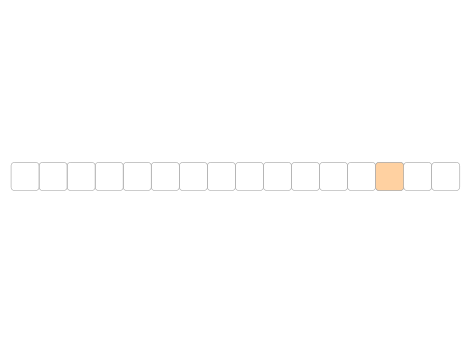

## Binary tree: height calculation

In [ ]:
class BinaryTreeNode:
  def __init__(self, arr, idx=0):
    self.left  = BinaryTreeNode(arr, 2*idx+1) if 2*idx+1 < len(arr) and arr[2*idx+1] != None else None
    self.right = BinaryTreeNode(arr, 2*idx+2) if 2*idx+2 < len(arr) and arr[2*idx+2] != None else None
    self.value = arr[idx]

# time: O(nodes); space: O(height)
def get_height(root):
  if not root: return 0;
  return 1+max(get_height(root.left), get_height(root.right))

get_height(BinaryTreeNode([1,2,3,4,5,6,7,None,None,8]))

4

## DFS tree traversal: inorder, postorder, preorder

DFS traversal

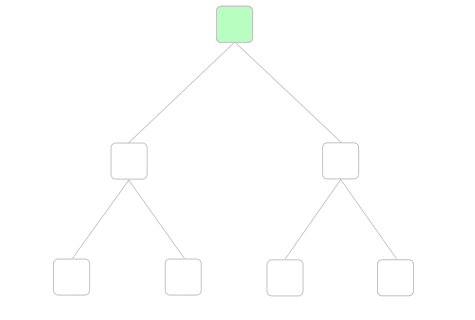

There are three flavours of DFS traversals that depend on the order that you process the root node:

In [ ]:
#@title DFS binary tree traversals
%%html

<?xml version="1.0" encoding="UTF-8"?>
<svg width="244mm" height="101mm" version="1.1" viewBox="0 0 739.83 306.92" xmlns="http://www.w3.org/2000/svg" xmlns:cc="http://creativecommons.org/ns#" xmlns:dc="http://purl.org/dc/elements/1.1/" xmlns:ns32="http://www.iki.fi/pav/software/textext/" xmlns:rdf="http://www.w3.org/1999/02/22-rdf-syntax-ns#">
 <metadata>
  <rdf:RDF>
   <cc:Work rdf:about="">
    <dc:format>image/svg+xml</dc:format>
    <dc:type rdf:resource="http://purl.org/dc/dcmitype/StillImage"/>
    <dc:title/>
   </cc:Work>
  </rdf:RDF>
  <rdf:RDF>
   <cc:Work rdf:about="">
    <dc:title/>
   </cc:Work>
  </rdf:RDF>
  <rdf:RDF>
   <cc:Work rdf:about="">
    <dc:title/>
   </cc:Work>
  </rdf:RDF>
  <rdf:RDF>
   <cc:Work rdf:about="">
    <dc:title/>
   </cc:Work>
  </rdf:RDF>
 </metadata>
 <g transform="translate(-87.268 102.2)">
  <text x="644.54865" y="177.05048" style="font-family:'Courier New';font-size:11.663px;font-weight:bold;line-height:1.25;stroke-width:.29156" xml:space="preserve"><tspan x="644.54865" y="177.05048" style="fill-opacity:.54546;fill:#000000;stroke-width:.29156"/></text>
  <rect x="186.21" y="-67.53" width="23.833" height="23.833" ry="3.1527" style="fill-opacity:.99621;fill:#ffffff;opacity:.999;stroke-linecap:round;stroke-width:.656;stroke:#c3c3c3"/>
  <g transform="translate(-.0059814 -.001831)">
   <rect x="186.22" y="-67.528" width="23.833" height="23.833" ry="3.1527" style="fill-opacity:.99621;fill:#ffffff;opacity:.999;stroke-linecap:round;stroke-width:.656;stroke:#c3c3c3"/>
   <text x="644.54865" y="177.05048" style="font-family:'Courier New';font-size:11.663px;font-weight:bold;line-height:1.25;stroke-width:.29156" xml:space="preserve"><tspan x="644.54865" y="177.05048" style="fill-opacity:.54546;fill:#000000;stroke-width:.29156"/></text>
   <g transform="translate(-349.21,8.4206)">
    <g transform="translate(-69.587,-21.63)">
     <rect x="605.02" y="-54.318" width="23.833" height="23.833" ry="3.1527" style="fill-opacity:.14394;fill:#000000;opacity:.999"/>
     <path d="m617.11-30.724-70.246 66.014" style="fill:none;stroke-opacity:.23106;stroke-width:1.0982;stroke:#000000"/>
     <path d="m617.11-30.724 70.2 65.733" style="fill:none;stroke-opacity:.23106;stroke-width:1.0982;stroke:#000000"/>
     <path d="m547.05 35.704-43.072 96.146h90.803z" style="fill-opacity:.14394;fill:#000000"/>
     <path d="m687.46 35.535-43.072 96.146h90.803z" style="fill-opacity:.14394;fill:#000000"/>
     <rect x="860.99" y="-54.229" width="23.833" height="23.833" ry="3.1527" style="fill-opacity:.99621;fill:#ffffff;opacity:.999;stroke-linecap:round;stroke-width:.656;stroke:#c3c3c3"/>
     <rect x="861" y="-54.228" width="23.833" height="23.833" ry="3.1527" style="fill-opacity:.14394;fill:#000000;opacity:.999"/>
     <path d="m873.09-30.634-70.085 65.976" style="fill:none;stroke-opacity:.23106;stroke-width:1.0982;stroke:#000000"/>
     <path d="m873.09-30.634 70.538 65.77" style="fill:none;stroke-opacity:.23106;stroke-width:1.0982;stroke:#000000"/>
     <path d="m803.03 35.794-43.072 96.146h90.803z" style="fill-opacity:.14394;fill:#000000"/>
     <path d="m943.44 35.625-43.072 96.146h90.803z" style="fill-opacity:.14394;fill:#000000"/>
     <rect x="1117.8" y="-54.83" width="23.833" height="23.833" ry="3.1527" style="fill-opacity:.99621;fill:#ffffff;opacity:.999;stroke-linecap:round;stroke-width:.656;stroke:#c3c3c3"/>
     <rect x="1117.8" y="-54.83" width="23.833" height="23.833" ry="3.1527" style="fill-opacity:.99621;fill:#ffffff;opacity:.999;stroke-linecap:round;stroke-width:.656;stroke:#c3c3c3"/>
     <rect x="1117.8" y="-54.83" width="23.833" height="23.833" ry="3.1527" style="fill-opacity:.14394;fill:#000000;opacity:.999"/>
     <path d="m1129.9-31.236-70.227 65.958" style="fill:none;stroke-opacity:.23106;stroke-width:1.0982;stroke:#000000"/>
     <path d="m1129.9-31.236 70.237 65.526" style="fill:none;stroke-opacity:.23106;stroke-width:1.0982;stroke:#000000"/>
     <path d="m1059.9 35.192-43.072 96.146h90.803z" style="fill-opacity:.14394;fill:#000000"/>
     <path d="m1200.3 35.023-43.072 96.146h90.803z" style="fill-opacity:.14394;fill:#000000"/>
     <g transform="matrix(1.752 0 0 1.752 545.07 89.58)" ns32:alignment="middle center" ns32:inkscapeversion="1.0" ns32:jacobian_sqrt="3.77952" ns32:pdfconverter="inkscape" ns32:preamble="C:\\Users\\User\\AppData\\Roaming\\inkscape\\extensions\\textext\\default_packages.tex" ns32:scale="2.834645669291339" ns32:texconverter="pdflatex" ns32:text="$123$" ns32:version="1.1.0">
      <defs id="id-1a963e73-447e-468f-9ec2-ef38a7de327e"></defs>
      <g id="id-e9128078-61a8-45cf-8251-4637b4a6c67d" transform="translate(-149.6 -128.12)">
       <g id="id-8110dda4-6eee-4add-94fe-8ee35c65df8f" style="fill:#000000">
        <g transform="matrix(.87824 0 0 .87824 148.82 134.76)">
         <path d="m2.9375-6.375c0-0.25 0-0.26562-0.23438-0.26562-0.625 0.64062-1.5 0.64062-1.8125 0.64062v0.3125c0.20312 0 0.78125 0 1.2969-0.26562v5.1719c0 0.35938-0.03125 0.46875-0.92188 0.46875h-0.3125v0.3125c0.34375-0.03125 1.2031-0.03125 1.6094-0.03125 0.39062 0 1.2656 0 1.6094 0.03125v-0.3125h-0.3125c-0.90625 0-0.92188-0.10938-0.92188-0.46875z"/>
        </g>
        <g transform="matrix(.87824 0 0 .87824 188.49 55.733)">
         <path d="m1.2656-0.76562 1.0625-1.0312c1.5469-1.375 2.1406-1.9062 2.1406-2.9062 0-1.1406-0.89062-1.9375-2.1094-1.9375-1.125 0-1.8594 0.92188-1.8594 1.8125 0 0.54688 0.5 0.54688 0.53125 0.54688 0.17188 0 0.51562-0.10938 0.51562-0.53125 0-0.25-0.1875-0.51562-0.53125-0.51562-0.078125 0-0.09375 0-0.125 0.015625 0.21875-0.65625 0.76562-1.0156 1.3438-1.0156 0.90625 0 1.3281 0.8125 1.3281 1.625 0 0.79688-0.48438 1.5781-1.0469 2.2031l-1.9062 2.125c-0.10938 0.10938-0.10938 0.14062-0.10938 0.375h3.7031l0.26562-1.7344h-0.23438c-0.0625 0.29688-0.125 0.73438-0.23438 0.89062-0.0625 0.078125-0.71875 0.078125-0.9375 0.078125z"/>
        </g>
        <g transform="matrix(.87824 0 0 .87824 230.87 134.26)">
         <path d="m2.8906-3.5156c0.8125-0.26562 1.3906-0.95312 1.3906-1.75 0-0.8125-0.875-1.375-1.8281-1.375-1 0-1.7656 0.59375-1.7656 1.3594 0 0.32812 0.21875 0.51562 0.51562 0.51562s0.5-0.21875 0.5-0.51562c0-0.48438-0.46875-0.48438-0.60938-0.48438 0.29688-0.5 0.95312-0.625 1.3125-0.625 0.42188 0 0.96875 0.21875 0.96875 1.1094 0 0.125-0.03125 0.70312-0.28125 1.1406-0.29688 0.48438-0.64062 0.51562-0.89062 0.51562-0.078125 0.015625-0.3125 0.03125-0.39062 0.03125-0.078125 0.015625-0.14062 0.03125-0.14062 0.125 0 0.10938 0.0625 0.10938 0.23438 0.10938h0.4375c0.8125 0 1.1875 0.67188 1.1875 1.6562 0 1.3594-0.6875 1.6406-1.125 1.6406s-1.1875-0.17188-1.5312-0.75c0.34375 0.046875 0.65625-0.17188 0.65625-0.54688 0-0.35938-0.26562-0.5625-0.54688-0.5625-0.25 0-0.5625 0.14062-0.5625 0.57812 0 0.90625 0.92188 1.5625 2.0156 1.5625 1.2188 0 2.125-0.90625 2.125-1.9219 0-0.8125-0.64062-1.5938-1.6719-1.8125z"/>
        </g>
        <g transform="matrix(.87824 0 0 .87824 334.65 55.45)" style="fill:#000000">
         <path d="m2.9375-6.375c0-0.25 0-0.26562-0.23438-0.26562-0.625 0.64062-1.5 0.64062-1.8125 0.64062v0.3125c0.20312 0 0.78125 0 1.2969-0.26562v5.1719c0 0.35938-0.03125 0.46875-0.92188 0.46875h-0.3125v0.3125c0.34375-0.03125 1.2031-0.03125 1.6094-0.03125 0.39062 0 1.2656 0 1.6094 0.03125v-0.3125h-0.3125c-0.90625 0-0.92188-0.10938-0.92188-0.46875z"/>
        </g>
        <g transform="matrix(.87824 0 0 .87824 295.89 134.67)" style="fill:#000000">
         <path d="m1.2656-0.76562 1.0625-1.0312c1.5469-1.375 2.1406-1.9062 2.1406-2.9062 0-1.1406-0.89062-1.9375-2.1094-1.9375-1.125 0-1.8594 0.92188-1.8594 1.8125 0 0.54688 0.5 0.54688 0.53125 0.54688 0.17188 0 0.51562-0.10938 0.51562-0.53125 0-0.25-0.1875-0.51562-0.53125-0.51562-0.078125 0-0.09375 0-0.125 0.015625 0.21875-0.65625 0.76562-1.0156 1.3438-1.0156 0.90625 0 1.3281 0.8125 1.3281 1.625 0 0.79688-0.48438 1.5781-1.0469 2.2031l-1.9062 2.125c-0.10938 0.10938-0.10938 0.14062-0.10938 0.375h3.7031l0.26562-1.7344h-0.23438c-0.0625 0.29688-0.125 0.73438-0.23438 0.89062-0.0625 0.078125-0.71875 0.078125-0.9375 0.078125z"/>
        </g>
        <g transform="matrix(.87824 0 0 .87824 376.39 134.25)" style="fill:#000000">
         <path d="m2.8906-3.5156c0.8125-0.26562 1.3906-0.95312 1.3906-1.75 0-0.8125-0.875-1.375-1.8281-1.375-1 0-1.7656 0.59375-1.7656 1.3594 0 0.32812 0.21875 0.51562 0.51562 0.51562s0.5-0.21875 0.5-0.51562c0-0.48438-0.46875-0.48438-0.60938-0.48438 0.29688-0.5 0.95312-0.625 1.3125-0.625 0.42188 0 0.96875 0.21875 0.96875 1.1094 0 0.125-0.03125 0.70312-0.28125 1.1406-0.29688 0.48438-0.64062 0.51562-0.89062 0.51562-0.078125 0.015625-0.3125 0.03125-0.39062 0.03125-0.078125 0.015625-0.14062 0.03125-0.14062 0.125 0 0.10938 0.0625 0.10938 0.23438 0.10938h0.4375c0.8125 0 1.1875 0.67188 1.1875 1.6562 0 1.3594-0.6875 1.6406-1.125 1.6406s-1.1875-0.17188-1.5312-0.75c0.34375 0.046875 0.65625-0.17188 0.65625-0.54688 0-0.35938-0.26562-0.5625-0.54688-0.5625-0.25 0-0.5625 0.14062-0.5625 0.57812 0 0.90625 0.92188 1.5625 2.0156 1.5625 1.2188 0 2.125-0.90625 2.125-1.9219 0-0.8125-0.64062-1.5938-1.6719-1.8125z"/>
        </g>
        <g transform="matrix(.87824 0 0 .87824 522.28 134.53)" style="fill:#000000">
         <path d="m1.2656-0.76562 1.0625-1.0312c1.5469-1.375 2.1406-1.9062 2.1406-2.9062 0-1.1406-0.89062-1.9375-2.1094-1.9375-1.125 0-1.8594 0.92188-1.8594 1.8125 0 0.54688 0.5 0.54688 0.53125 0.54688 0.17188 0 0.51562-0.10938 0.51562-0.53125 0-0.25-0.1875-0.51562-0.53125-0.51562-0.078125 0-0.09375 0-0.125 0.015625 0.21875-0.65625 0.76562-1.0156 1.3438-1.0156 0.90625 0 1.3281 0.8125 1.3281 1.625 0 0.79688-0.48438 1.5781-1.0469 2.2031l-1.9062 2.125c-0.10938 0.10938-0.10938 0.14062-0.10938 0.375h3.7031l0.26562-1.7344h-0.23438c-0.0625 0.29688-0.125 0.73438-0.23438 0.89062-0.0625 0.078125-0.71875 0.078125-0.9375 0.078125z"/>
        </g>
        <g transform="matrix(.87824 0 0 .87824 481.24 55.54)" style="fill:#000000">
         <path d="m2.8906-3.5156c0.8125-0.26562 1.3906-0.95312 1.3906-1.75 0-0.8125-0.875-1.375-1.8281-1.375-1 0-1.7656 0.59375-1.7656 1.3594 0 0.32812 0.21875 0.51562 0.51562 0.51562s0.5-0.21875 0.5-0.51562c0-0.48438-0.46875-0.48438-0.60938-0.48438 0.29688-0.5 0.95312-0.625 1.3125-0.625 0.42188 0 0.96875 0.21875 0.96875 1.1094 0 0.125-0.03125 0.70312-0.28125 1.1406-0.29688 0.48438-0.64062 0.51562-0.89062 0.51562-0.078125 0.015625-0.3125 0.03125-0.39062 0.03125-0.078125 0.015625-0.14062 0.03125-0.14062 0.125 0 0.10938 0.0625 0.10938 0.23438 0.10938h0.4375c0.8125 0 1.1875 0.67188 1.1875 1.6562 0 1.3594-0.6875 1.6406-1.125 1.6406s-1.1875-0.17188-1.5312-0.75c0.34375 0.046875 0.65625-0.17188 0.65625-0.54688 0-0.35938-0.26562-0.5625-0.54688-0.5625-0.25 0-0.5625 0.14062-0.5625 0.57812 0 0.90625 0.92188 1.5625 2.0156 1.5625 1.2188 0 2.125-0.90625 2.125-1.9219 0-0.8125-0.64062-1.5938-1.6719-1.8125z"/>
        </g>
        <g transform="matrix(.87824 0 0 .87824 442.33 134.18)" style="fill:#000000">
         <path d="m2.9375-6.375c0-0.25 0-0.26562-0.23438-0.26562-0.625 0.64062-1.5 0.64062-1.8125 0.64062v0.3125c0.20312 0 0.78125 0 1.2969-0.26562v5.1719c0 0.35938-0.03125 0.46875-0.92188 0.46875h-0.3125v0.3125c0.34375-0.03125 1.2031-0.03125 1.6094-0.03125 0.39062 0 1.2656 0 1.6094 0.03125v-0.3125h-0.3125c-0.90625 0-0.92188-0.10938-0.92188-0.46875z"/>
        </g>
       </g>
       <g transform="matrix(3.418 0 0 3.418 -282.68 21.191)" ns32:alignment="middle center" ns32:inkscapeversion="1.0" ns32:jacobian_sqrt="3.77952" ns32:pdfconverter="inkscape" ns32:preamble="C:\\Users\\User\\AppData\\Roaming\\inkscape\\extensions\\textext\\default_packages.tex" ns32:scale="2.834645669291339" ns32:texconverter="pdflatex" ns32:text="$$left subtree$$\n$$root$$\n$$right subtree$$\n$$root$$\n$$left subtree$$\n$$right subtree$$\n$$left subtree$$\n$$right subtree$$\n$$root$$" ns32:version="1.1.0">
        <defs></defs>
        <g id="id-40c6a7ab-d1e5-49e4-aa9a-c881572bb06e" transform="translate(-278.45 -139.69)">
         <g id="id-6cade04e-5268-4f5a-9b8d-a94396ecfcbc" transform="matrix(.31083 0 0 .31083 321.61 138.24)" style="fill:#000000">
          <g transform="translate(280.8 146.72)">
           <path id="id-7a569acf-34f8-4bc4-b643-87535d446feb" d="m2.5781-6.8125s0-0.10938-0.14062-0.10938c-0.21875 0-0.95312 0.078125-1.2188 0.10938-0.078125 0-0.1875 0.015625-0.1875 0.20312 0 0.10938 0.10938 0.10938 0.25 0.10938 0.48438 0 0.5 0.09375 0.5 0.17188l-0.03125 0.20312-1.2656 4.9844c-0.03125 0.10938-0.046875 0.17188-0.046875 0.32812 0 0.57812 0.4375 0.92188 0.90625 0.92188 0.32812 0 0.57812-0.20312 0.75-0.5625 0.17188-0.375 0.29688-0.95312 0.29688-0.96875 0-0.10938-0.09375-0.10938-0.125-0.10938-0.09375 0-0.10938 0.046875-0.125 0.1875-0.17188 0.64062-0.35938 1.2344-0.76562 1.2344-0.29688 0-0.29688-0.3125-0.29688-0.45312 0-0.25 0.015625-0.29688 0.0625-0.48438z"/>
          </g>
         </g>
         <g transform="matrix(.31083 0 0 .31083 321.61 138.24)" style="fill:#000000">
          <g transform="translate(283.97 146.72)">
           <path d="m1.8594-2.2969c0.29688 0 1.0312-0.03125 1.5312-0.23438 0.70312-0.29688 0.75-0.89062 0.75-1.0312 0-0.4375-0.375-0.84375-1.0625-0.84375-1.1094 0-2.625 0.96875-2.625 2.7188 0 1.0156 0.59375 1.7969 1.5781 1.7969 1.4219 0 2.25-1.0625 2.25-1.1719 0-0.0625-0.046875-0.14062-0.10938-0.14062s-0.078125 0.03125-0.14062 0.10938c-0.78125 0.98438-1.875 0.98438-1.9844 0.98438-0.78125 0-0.875-0.84375-0.875-1.1562 0-0.125 0.015625-0.42188 0.15625-1.0312zm-0.46875-0.21875c0.39062-1.5156 1.4219-1.6719 1.6875-1.6719 0.45312 0 0.73438 0.29688 0.73438 0.625 0 1.0469-1.5938 1.0469-2.0156 1.0469z"/>
          </g>
          <g transform="translate(287.55 146.72)">
           <path d="m3.6562-3.9844h0.85938c0.20312 0 0.29688 0 0.29688-0.20312 0-0.10938-0.09375-0.10938-0.26562-0.10938h-0.82812l0.20312-1.1406c0.046875-0.20312 0.1875-0.90625 0.25-1.0312 0.078125-0.1875 0.25-0.34375 0.46875-0.34375 0.03125 0 0.29688 0 0.48438 0.1875-0.4375 0.03125-0.54688 0.39062-0.54688 0.53125 0 0.23438 0.1875 0.35938 0.375 0.35938 0.26562 0 0.54688-0.23438 0.54688-0.60938 0-0.45312-0.45312-0.6875-0.85938-0.6875-0.34375 0-0.96875 0.1875-1.2656 1.1719-0.0625 0.20312-0.09375 0.3125-0.32812 1.5625h-0.6875c-0.20312 0-0.3125 0-0.3125 0.1875 0 0.125 0.09375 0.125 0.28125 0.125h0.65625l-0.73438 3.9375c-0.1875 0.96875-0.35938 1.875-0.875 1.875-0.046875 0-0.28125 0-0.48438-0.1875 0.46875-0.03125 0.5625-0.39062 0.5625-0.53125 0-0.23438-0.1875-0.35938-0.375-0.35938-0.26562 0-0.54688 0.23438-0.54688 0.60938 0 0.4375 0.4375 0.6875 0.84375 0.6875 0.54688 0 0.95312-0.59375 1.125-0.96875 0.32812-0.625 0.54688-1.8281 0.5625-1.9062z"/>
          </g>
         </g>
         <g id="id-277a0798-9e16-41e7-8f5f-0cf5a64ed7ca" transform="matrix(.31083 0 0 .31083 315.98 138.05)" style="fill:#000000">
          <g transform="translate(311.1 147.34)">
           <path id="id-deadb083-ef7f-420b-843d-df3409508eeb" d="m2.0469-3.9844h0.9375c0.20312 0 0.3125 0 0.3125-0.20312 0-0.10938-0.10938-0.10938-0.28125-0.10938h-0.875c0.35938-1.4219 0.40625-1.6094 0.40625-1.6719 0-0.17188-0.125-0.26562-0.29688-0.26562-0.03125 0-0.3125 0-0.39062 0.35938l-0.39062 1.5781h-0.9375c-0.20312 0-0.29688 0-0.29688 0.1875 0 0.125 0.078125 0.125 0.28125 0.125h0.875c-0.71875 2.8281-0.76562 3-0.76562 3.1719 0 0.54688 0.375 0.92188 0.92188 0.92188 1.0156 0 1.5781-1.4531 1.5781-1.5312 0-0.10938-0.078125-0.10938-0.10938-0.10938-0.09375 0-0.10938 0.03125-0.15625 0.14062-0.42188 1.0469-0.95312 1.2812-1.2969 1.2812-0.20312 0-0.3125-0.125-0.3125-0.45312 0-0.25 0.03125-0.3125 0.0625-0.48438z"/>
          </g>
          <g transform="translate(318.93 147.34)">
           <path id="id-2da0ef3b-8b62-49b5-9743-0fe24428a1cd" d="m3.8906-3.7344c-0.26562 0.015625-0.46875 0.23438-0.46875 0.45312 0 0.14062 0.09375 0.29688 0.3125 0.29688s0.45312-0.17188 0.45312-0.5625c0-0.45312-0.42188-0.85938-1.1875-0.85938-1.3125 0-1.6875 1.0156-1.6875 1.4531 0 0.78125 0.73438 0.92188 1.0312 0.98438 0.51562 0.10938 1.0312 0.21875 1.0312 0.76562 0 0.25-0.21875 1.0938-1.4219 1.0938-0.14062 0-0.90625 0-1.1406-0.53125 0.39062 0.046875 0.64062-0.25 0.64062-0.53125 0-0.21875-0.17188-0.34375-0.375-0.34375-0.26562 0-0.5625 0.20312-0.5625 0.65625 0 0.5625 0.57812 0.96875 1.4219 0.96875 1.625 0 2.0156-1.2031 2.0156-1.6562 0-0.35938-0.1875-0.60938-0.3125-0.71875-0.26562-0.28125-0.5625-0.34375-1-0.42188-0.35938-0.078125-0.75-0.15625-0.75-0.60938 0-0.28125 0.23438-0.89062 1.1094-0.89062 0.25 0 0.75 0.078125 0.89062 0.45312z"/>
          </g>
          <g transform="translate(323.6 147.34)">
           <path d="m3.4844-0.5625c0.10938 0.40625 0.46875 0.67188 0.89062 0.67188 0.34375 0 0.57812-0.23438 0.73438-0.54688 0.17188-0.35938 0.29688-0.96875 0.29688-0.98438 0-0.10938-0.078125-0.10938-0.10938-0.10938-0.10938 0-0.10938 0.046875-0.14062 0.1875-0.14062 0.5625-0.32812 1.2344-0.75 1.2344-0.20312 0-0.3125-0.125-0.3125-0.45312 0-0.21875 0.125-0.6875 0.20312-1.0469l0.28125-1.0781c0.03125-0.14062 0.125-0.51562 0.17188-0.67188 0.046875-0.23438 0.14062-0.60938 0.14062-0.67188 0-0.17188-0.14062-0.26562-0.28125-0.26562-0.046875 0-0.3125 0.015625-0.39062 0.34375-0.1875 0.73438-0.625 2.4844-0.75 3-0.015625 0.046875-0.40625 0.84375-1.1406 0.84375-0.51562 0-0.60938-0.45312-0.60938-0.8125 0-0.5625 0.28125-1.3438 0.53125-2.0312 0.125-0.3125 0.17188-0.45312 0.17188-0.64062 0-0.4375-0.3125-0.8125-0.8125-0.8125-0.95312 0-1.3125 1.4531-1.3125 1.5312 0 0.10938 0.09375 0.10938 0.10938 0.10938 0.10938 0 0.10938-0.03125 0.15625-0.1875 0.25-0.85938 0.64062-1.2344 1.0156-1.2344 0.09375 0 0.25 0.015625 0.25 0.32812 0 0.23438-0.10938 0.53125-0.17188 0.67188-0.375 1-0.57812 1.6094-0.57812 2.0938 0 0.95312 0.6875 1.2031 1.2188 1.2031 0.65625 0 1.0156-0.45312 1.1875-0.67188z"/>
          </g>
          <g transform="translate(329.3 147.34)">
           <path id="id-f014abf1-62d0-41b2-9c63-c9671d83e55e" d="m2.375-6.8125s0-0.10938-0.125-0.10938c-0.21875 0-0.95312 0.078125-1.2188 0.10938-0.078125 0-0.1875 0.015625-0.1875 0.1875 0 0.125 0.09375 0.125 0.25 0.125 0.46875 0 0.48438 0.0625 0.48438 0.17188 0 0.0625-0.078125 0.40625-0.125 0.60938l-0.82812 3.25c-0.10938 0.5-0.15625 0.67188-0.15625 1.0156 0 0.9375 0.53125 1.5625 1.2656 1.5625 1.1719 0 2.4062-1.4844 2.4062-2.9219 0-0.90625-0.53125-1.5938-1.3281-1.5938-0.45312 0-0.875 0.29688-1.1719 0.59375zm-0.92188 3.7656c0.046875-0.21875 0.046875-0.23438 0.14062-0.34375 0.48438-0.64062 0.9375-0.79688 1.2031-0.79688 0.35938 0 0.625 0.29688 0.625 0.9375 0 0.59375-0.32812 1.7344-0.51562 2.1094-0.32812 0.67188-0.78125 1.0312-1.1719 1.0312-0.34375 0-0.67188-0.26562-0.67188-1 0-0.20312 0-0.39062 0.15625-1.0156z"/>
          </g>
          <g transform="translate(333.58 147.34)">
           <path d="m2.0469-3.9844h0.9375c0.20312 0 0.3125 0 0.3125-0.20312 0-0.10938-0.10938-0.10938-0.28125-0.10938h-0.875c0.35938-1.4219 0.40625-1.6094 0.40625-1.6719 0-0.17188-0.125-0.26562-0.29688-0.26562-0.03125 0-0.3125 0-0.39062 0.35938l-0.39062 1.5781h-0.9375c-0.20312 0-0.29688 0-0.29688 0.1875 0 0.125 0.078125 0.125 0.28125 0.125h0.875c-0.71875 2.8281-0.76562 3-0.76562 3.1719 0 0.54688 0.375 0.92188 0.92188 0.92188 1.0156 0 1.5781-1.4531 1.5781-1.5312 0-0.10938-0.078125-0.10938-0.10938-0.10938-0.09375 0-0.10938 0.03125-0.15625 0.14062-0.42188 1.0469-0.95312 1.2812-1.2969 1.2812-0.20312 0-0.3125-0.125-0.3125-0.45312 0-0.25 0.03125-0.3125 0.0625-0.48438z"/>
          </g>
          <g transform="translate(337.18 147.34)">
           <path id="id-02a722cb-b543-4f42-8098-4f93fe20faeb" d="m0.875-0.59375c-0.03125 0.15625-0.09375 0.39062-0.09375 0.4375 0 0.17188 0.14062 0.26562 0.29688 0.26562 0.125 0 0.29688-0.078125 0.375-0.28125 0.015625-0.03125 0.34375-1.3906 0.39062-1.5781 0.078125-0.32812 0.26562-1.0156 0.3125-1.2969 0.046875-0.125 0.32812-0.59375 0.5625-0.8125 0.078125-0.0625 0.375-0.32812 0.79688-0.32812 0.26562 0 0.40625 0.125 0.42188 0.125-0.29688 0.046875-0.51562 0.28125-0.51562 0.54688 0 0.15625 0.10938 0.34375 0.375 0.34375s0.54688-0.23438 0.54688-0.59375c0-0.34375-0.3125-0.64062-0.82812-0.64062-0.64062 0-1.0781 0.48438-1.2656 0.76562-0.09375-0.45312-0.45312-0.76562-0.92188-0.76562-0.45312 0-0.64062 0.39062-0.73438 0.5625-0.17188 0.34375-0.29688 0.9375-0.29688 0.96875 0 0.10938 0.09375 0.10938 0.10938 0.10938 0.10938 0 0.10938-0.015625 0.17188-0.23438 0.17188-0.70312 0.375-1.1875 0.73438-1.1875 0.15625 0 0.29688 0.078125 0.29688 0.45312 0 0.21875-0.03125 0.32812-0.15625 0.84375z"/>
          </g>
          <circle cx="291.76" cy="144.4" r="1.1801" style="fill:#000000;opacity:.999"/>
          <circle cx="291.75" cy="157.6" r="1.1801" style="fill:#000000;opacity:.999"/>
          <circle cx="291.76" cy="169.81" r="1.1801" style="fill:#000000;opacity:.999"/>
          <g transform="translate(144.57 14.036)" style="fill:#000000">
           <g transform="translate(280.8 146.72)">
            <path d="m2.5781-6.8125s0-0.10938-0.14062-0.10938c-0.21875 0-0.95312 0.078125-1.2188 0.10938-0.078125 0-0.1875 0.015625-0.1875 0.20312 0 0.10938 0.10938 0.10938 0.25 0.10938 0.48438 0 0.5 0.09375 0.5 0.17188l-0.03125 0.20312-1.2656 4.9844c-0.03125 0.10938-0.046875 0.17188-0.046875 0.32812 0 0.57812 0.4375 0.92188 0.90625 0.92188 0.32812 0 0.57812-0.20312 0.75-0.5625 0.17188-0.375 0.29688-0.95312 0.29688-0.96875 0-0.10938-0.09375-0.10938-0.125-0.10938-0.09375 0-0.10938 0.046875-0.125 0.1875-0.17188 0.64062-0.35938 1.2344-0.76562 1.2344-0.29688 0-0.29688-0.3125-0.29688-0.45312 0-0.25 0.015625-0.29688 0.0625-0.48438z"/>
           </g>
          </g>
          <g transform="translate(144.57 14.036)" style="fill:#000000">
           <g transform="translate(283.97 146.72)">
            <path d="m1.8594-2.2969c0.29688 0 1.0312-0.03125 1.5312-0.23438 0.70312-0.29688 0.75-0.89062 0.75-1.0312 0-0.4375-0.375-0.84375-1.0625-0.84375-1.1094 0-2.625 0.96875-2.625 2.7188 0 1.0156 0.59375 1.7969 1.5781 1.7969 1.4219 0 2.25-1.0625 2.25-1.1719 0-0.0625-0.046875-0.14062-0.10938-0.14062s-0.078125 0.03125-0.14062 0.10938c-0.78125 0.98438-1.875 0.98438-1.9844 0.98438-0.78125 0-0.875-0.84375-0.875-1.1562 0-0.125 0.015625-0.42188 0.15625-1.0312zm-0.46875-0.21875c0.39062-1.5156 1.4219-1.6719 1.6875-1.6719 0.45312 0 0.73438 0.29688 0.73438 0.625 0 1.0469-1.5938 1.0469-2.0156 1.0469z"/>
           </g>
           <g transform="translate(287.55 146.72)">
            <path d="m3.6562-3.9844h0.85938c0.20312 0 0.29688 0 0.29688-0.20312 0-0.10938-0.09375-0.10938-0.26562-0.10938h-0.82812l0.20312-1.1406c0.046875-0.20312 0.1875-0.90625 0.25-1.0312 0.078125-0.1875 0.25-0.34375 0.46875-0.34375 0.03125 0 0.29688 0 0.48438 0.1875-0.4375 0.03125-0.54688 0.39062-0.54688 0.53125 0 0.23438 0.1875 0.35938 0.375 0.35938 0.26562 0 0.54688-0.23438 0.54688-0.60938 0-0.45312-0.45312-0.6875-0.85938-0.6875-0.34375 0-0.96875 0.1875-1.2656 1.1719-0.0625 0.20312-0.09375 0.3125-0.32812 1.5625h-0.6875c-0.20312 0-0.3125 0-0.3125 0.1875 0 0.125 0.09375 0.125 0.28125 0.125h0.65625l-0.73438 3.9375c-0.1875 0.96875-0.35938 1.875-0.875 1.875-0.046875 0-0.28125 0-0.48438-0.1875 0.46875-0.03125 0.5625-0.39062 0.5625-0.53125 0-0.23438-0.1875-0.35938-0.375-0.35938-0.26562 0-0.54688 0.23438-0.54688 0.60938 0 0.4375 0.4375 0.6875 0.84375 0.6875 0.54688 0 0.95312-0.59375 1.125-0.96875 0.32812-0.625 0.54688-1.8281 0.5625-1.9062z"/>
           </g>
          </g>
          <g transform="translate(437.53 160.76)" style="fill:#000000">
           <path d="m2.0469-3.9844h0.9375c0.20312 0 0.3125 0 0.3125-0.20312 0-0.10938-0.10938-0.10938-0.28125-0.10938h-0.875c0.35938-1.4219 0.40625-1.6094 0.40625-1.6719 0-0.17188-0.125-0.26562-0.29688-0.26562-0.03125 0-0.3125 0-0.39062 0.35938l-0.39062 1.5781h-0.9375c-0.20312 0-0.29688 0-0.29688 0.1875 0 0.125 0.078125 0.125 0.28125 0.125h0.875c-0.71875 2.8281-0.76562 3-0.76562 3.1719 0 0.54688 0.375 0.92188 0.92188 0.92188 1.0156 0 1.5781-1.4531 1.5781-1.5312 0-0.10938-0.078125-0.10938-0.10938-0.10938-0.09375 0-0.10938 0.03125-0.15625 0.14062-0.42188 1.0469-0.95312 1.2812-1.2969 1.2812-0.20312 0-0.3125-0.125-0.3125-0.45312 0-0.25 0.03125-0.3125 0.0625-0.48438z"/>
          </g>
          <g transform="translate(445.36 160.76)" style="fill:#000000">
           <path d="m3.8906-3.7344c-0.26562 0.015625-0.46875 0.23438-0.46875 0.45312 0 0.14062 0.09375 0.29688 0.3125 0.29688s0.45312-0.17188 0.45312-0.5625c0-0.45312-0.42188-0.85938-1.1875-0.85938-1.3125 0-1.6875 1.0156-1.6875 1.4531 0 0.78125 0.73438 0.92188 1.0312 0.98438 0.51562 0.10938 1.0312 0.21875 1.0312 0.76562 0 0.25-0.21875 1.0938-1.4219 1.0938-0.14062 0-0.90625 0-1.1406-0.53125 0.39062 0.046875 0.64062-0.25 0.64062-0.53125 0-0.21875-0.17188-0.34375-0.375-0.34375-0.26562 0-0.5625 0.20312-0.5625 0.65625 0 0.5625 0.57812 0.96875 1.4219 0.96875 1.625 0 2.0156-1.2031 2.0156-1.6562 0-0.35938-0.1875-0.60938-0.3125-0.71875-0.26562-0.28125-0.5625-0.34375-1-0.42188-0.35938-0.078125-0.75-0.15625-0.75-0.60938 0-0.28125 0.23438-0.89062 1.1094-0.89062 0.25 0 0.75 0.078125 0.89062 0.45312z"/>
          </g>
          <g transform="translate(450.03 160.76)" style="fill:#000000">
           <path d="m3.4844-0.5625c0.10938 0.40625 0.46875 0.67188 0.89062 0.67188 0.34375 0 0.57812-0.23438 0.73438-0.54688 0.17188-0.35938 0.29688-0.96875 0.29688-0.98438 0-0.10938-0.078125-0.10938-0.10938-0.10938-0.10938 0-0.10938 0.046875-0.14062 0.1875-0.14062 0.5625-0.32812 1.2344-0.75 1.2344-0.20312 0-0.3125-0.125-0.3125-0.45312 0-0.21875 0.125-0.6875 0.20312-1.0469l0.28125-1.0781c0.03125-0.14062 0.125-0.51562 0.17188-0.67188 0.046875-0.23438 0.14062-0.60938 0.14062-0.67188 0-0.17188-0.14062-0.26562-0.28125-0.26562-0.046875 0-0.3125 0.015625-0.39062 0.34375-0.1875 0.73438-0.625 2.4844-0.75 3-0.015625 0.046875-0.40625 0.84375-1.1406 0.84375-0.51562 0-0.60938-0.45312-0.60938-0.8125 0-0.5625 0.28125-1.3438 0.53125-2.0312 0.125-0.3125 0.17188-0.45312 0.17188-0.64062 0-0.4375-0.3125-0.8125-0.8125-0.8125-0.95312 0-1.3125 1.4531-1.3125 1.5312 0 0.10938 0.09375 0.10938 0.10938 0.10938 0.10938 0 0.10938-0.03125 0.15625-0.1875 0.25-0.85938 0.64062-1.2344 1.0156-1.2344 0.09375 0 0.25 0.015625 0.25 0.32812 0 0.23438-0.10938 0.53125-0.17188 0.67188-0.375 1-0.57812 1.6094-0.57812 2.0938 0 0.95312 0.6875 1.2031 1.2188 1.2031 0.65625 0 1.0156-0.45312 1.1875-0.67188z"/>
          </g>
          <g transform="translate(455.73 160.76)" style="fill:#000000">
           <path d="m2.375-6.8125s0-0.10938-0.125-0.10938c-0.21875 0-0.95312 0.078125-1.2188 0.10938-0.078125 0-0.1875 0.015625-0.1875 0.1875 0 0.125 0.09375 0.125 0.25 0.125 0.46875 0 0.48438 0.0625 0.48438 0.17188 0 0.0625-0.078125 0.40625-0.125 0.60938l-0.82812 3.25c-0.10938 0.5-0.15625 0.67188-0.15625 1.0156 0 0.9375 0.53125 1.5625 1.2656 1.5625 1.1719 0 2.4062-1.4844 2.4062-2.9219 0-0.90625-0.53125-1.5938-1.3281-1.5938-0.45312 0-0.875 0.29688-1.1719 0.59375zm-0.92188 3.7656c0.046875-0.21875 0.046875-0.23438 0.14062-0.34375 0.48438-0.64062 0.9375-0.79688 1.2031-0.79688 0.35938 0 0.625 0.29688 0.625 0.9375 0 0.59375-0.32812 1.7344-0.51562 2.1094-0.32812 0.67188-0.78125 1.0312-1.1719 1.0312-0.34375 0-0.67188-0.26562-0.67188-1 0-0.20312 0-0.39062 0.15625-1.0156z"/>
          </g>
          <g transform="translate(460.01 160.76)" style="fill:#000000">
           <path d="m2.0469-3.9844h0.9375c0.20312 0 0.3125 0 0.3125-0.20312 0-0.10938-0.10938-0.10938-0.28125-0.10938h-0.875c0.35938-1.4219 0.40625-1.6094 0.40625-1.6719 0-0.17188-0.125-0.26562-0.29688-0.26562-0.03125 0-0.3125 0-0.39062 0.35938l-0.39062 1.5781h-0.9375c-0.20312 0-0.29688 0-0.29688 0.1875 0 0.125 0.078125 0.125 0.28125 0.125h0.875c-0.71875 2.8281-0.76562 3-0.76562 3.1719 0 0.54688 0.375 0.92188 0.92188 0.92188 1.0156 0 1.5781-1.4531 1.5781-1.5312 0-0.10938-0.078125-0.10938-0.10938-0.10938-0.09375 0-0.10938 0.03125-0.15625 0.14062-0.42188 1.0469-0.95312 1.2812-1.2969 1.2812-0.20312 0-0.3125-0.125-0.3125-0.45312 0-0.25 0.03125-0.3125 0.0625-0.48438z"/>
          </g>
          <g transform="translate(463.61 160.76)" style="fill:#000000">
           <path d="m0.875-0.59375c-0.03125 0.15625-0.09375 0.39062-0.09375 0.4375 0 0.17188 0.14062 0.26562 0.29688 0.26562 0.125 0 0.29688-0.078125 0.375-0.28125 0.015625-0.03125 0.34375-1.3906 0.39062-1.5781 0.078125-0.32812 0.26562-1.0156 0.3125-1.2969 0.046875-0.125 0.32812-0.59375 0.5625-0.8125 0.078125-0.0625 0.375-0.32812 0.79688-0.32812 0.26562 0 0.40625 0.125 0.42188 0.125-0.29688 0.046875-0.51562 0.28125-0.51562 0.54688 0 0.15625 0.10938 0.34375 0.375 0.34375s0.54688-0.23438 0.54688-0.59375c0-0.34375-0.3125-0.64062-0.82812-0.64062-0.64062 0-1.0781 0.48438-1.2656 0.76562-0.09375-0.45312-0.45312-0.76562-0.92188-0.76562-0.45312 0-0.64062 0.39062-0.73438 0.5625-0.17188 0.34375-0.29688 0.9375-0.29688 0.96875 0 0.10938 0.09375 0.10938 0.10938 0.10938 0.10938 0 0.10938-0.015625 0.17188-0.23438 0.17188-0.70312 0.375-1.1875 0.73438-1.1875 0.15625 0 0.29688 0.078125 0.29688 0.45312 0 0.21875-0.03125 0.32812-0.15625 0.84375z"/>
          </g>
          <circle cx="418.2" cy="145.65" r="1.1801" style="fill:#000000;opacity:.999"/>
          <circle cx="418.18" cy="158.85" r="1.1801" style="fill:#000000;opacity:.999"/>
          <circle cx="418.19" cy="171.06" r="1.1801" style="fill:#000000;opacity:.999"/>
          <g transform="translate(147.21 14.036)" style="fill:#000000">
           <g transform="translate(321.17 146.72)">
            <path d="m1.8594-2.2969c0.29688 0 1.0312-0.03125 1.5312-0.23438 0.70312-0.29688 0.75-0.89062 0.75-1.0312 0-0.4375-0.375-0.84375-1.0625-0.84375-1.1094 0-2.625 0.96875-2.625 2.7188 0 1.0156 0.59375 1.7969 1.5781 1.7969 1.4219 0 2.25-1.0625 2.25-1.1719 0-0.0625-0.046875-0.14062-0.10938-0.14062s-0.078125 0.03125-0.14062 0.10938c-0.78125 0.98438-1.875 0.98438-1.9844 0.98438-0.78125 0-0.875-0.84375-0.875-1.1562 0-0.125 0.015625-0.42188 0.15625-1.0312zm-0.46875-0.21875c0.39062-1.5156 1.4219-1.6719 1.6875-1.6719 0.45312 0 0.73438 0.29688 0.73438 0.625 0 1.0469-1.5938 1.0469-2.0156 1.0469z"/>
           </g>
           <g transform="translate(325.81 146.72)">
            <path d="m1.8594-2.2969c0.29688 0 1.0312-0.03125 1.5312-0.23438 0.70312-0.29688 0.75-0.89062 0.75-1.0312 0-0.4375-0.375-0.84375-1.0625-0.84375-1.1094 0-2.625 0.96875-2.625 2.7188 0 1.0156 0.59375 1.7969 1.5781 1.7969 1.4219 0 2.25-1.0625 2.25-1.1719 0-0.0625-0.046875-0.14062-0.10938-0.14062s-0.078125 0.03125-0.14062 0.10938c-0.78125 0.98438-1.875 0.98438-1.9844 0.98438-0.78125 0-0.875-0.84375-0.875-1.1562 0-0.125 0.015625-0.42188 0.15625-1.0312zm-0.46875-0.21875c0.39062-1.5156 1.4219-1.6719 1.6875-1.6719 0.45312 0 0.73438 0.29688 0.73438 0.625 0 1.0469-1.5938 1.0469-2.0156 1.0469z"/>
           </g>
          </g>
          <g transform="translate(129.07 -16.29)" style="fill:#000000">
           <g transform="translate(296.61 164.65)">
            <path d="m0.875-0.59375c-0.03125 0.15625-0.09375 0.39062-0.09375 0.4375 0 0.17188 0.14062 0.26562 0.29688 0.26562 0.125 0 0.29688-0.078125 0.375-0.28125 0.015625-0.03125 0.34375-1.3906 0.39062-1.5781 0.078125-0.32812 0.26562-1.0156 0.3125-1.2969 0.046875-0.125 0.32812-0.59375 0.5625-0.8125 0.078125-0.0625 0.375-0.32812 0.79688-0.32812 0.26562 0 0.40625 0.125 0.42188 0.125-0.29688 0.046875-0.51562 0.28125-0.51562 0.54688 0 0.15625 0.10938 0.34375 0.375 0.34375s0.54688-0.23438 0.54688-0.59375c0-0.34375-0.3125-0.64062-0.82812-0.64062-0.64062 0-1.0781 0.48438-1.2656 0.76562-0.09375-0.45312-0.45312-0.76562-0.92188-0.76562-0.45312 0-0.64062 0.39062-0.73438 0.5625-0.17188 0.34375-0.29688 0.9375-0.29688 0.96875 0 0.10938 0.09375 0.10938 0.10938 0.10938 0.10938 0 0.10938-0.015625 0.17188-0.23438 0.17188-0.70312 0.375-1.1875 0.73438-1.1875 0.15625 0 0.29688 0.078125 0.29688 0.45312 0 0.21875-0.03125 0.32812-0.15625 0.84375z"/>
           </g>
          </g>
          <g transform="translate(129.07 -16.29)" style="fill:#000000">
           <g transform="translate(301.38 164.65)">
            <path d="m4.6719-2.7188c0-1.0469-0.6875-1.6875-1.5938-1.6875-1.3281 0-2.6719 1.4219-2.6719 2.8281 0 0.98438 0.67188 1.6875 1.5938 1.6875 1.3281 0 2.6719-1.375 2.6719-2.8281zm-2.6562 2.6094c-0.4375 0-0.875-0.3125-0.875-1.0938 0-0.48438 0.26562-1.5625 0.57812-2.0625 0.5-0.76562 1.0781-0.92188 1.3594-0.92188 0.57812 0 0.875 0.48438 0.875 1.0781 0 0.39062-0.20312 1.4375-0.57812 2.0781-0.35938 0.57812-0.90625 0.92188-1.3594 0.92188z"/>
           </g>
           <g transform="translate(306.21 164.65)">
            <path d="m4.6719-2.7188c0-1.0469-0.6875-1.6875-1.5938-1.6875-1.3281 0-2.6719 1.4219-2.6719 2.8281 0 0.98438 0.67188 1.6875 1.5938 1.6875 1.3281 0 2.6719-1.375 2.6719-2.8281zm-2.6562 2.6094c-0.4375 0-0.875-0.3125-0.875-1.0938 0-0.48438 0.26562-1.5625 0.57812-2.0625 0.5-0.76562 1.0781-0.92188 1.3594-0.92188 0.57812 0 0.875 0.48438 0.875 1.0781 0 0.39062-0.20312 1.4375-0.57812 2.0781-0.35938 0.57812-0.90625 0.92188-1.3594 0.92188z"/>
           </g>
           <g transform="translate(311.04 164.65)">
            <path d="m2.0469-3.9844h0.9375c0.20312 0 0.3125 0 0.3125-0.20312 0-0.10938-0.10938-0.10938-0.28125-0.10938h-0.875c0.35938-1.4219 0.40625-1.6094 0.40625-1.6719 0-0.17188-0.125-0.26562-0.29688-0.26562-0.03125 0-0.3125 0-0.39062 0.35938l-0.39062 1.5781h-0.9375c-0.20312 0-0.29688 0-0.29688 0.1875 0 0.125 0.078125 0.125 0.28125 0.125h0.875c-0.71875 2.8281-0.76562 3-0.76562 3.1719 0 0.54688 0.375 0.92188 0.92188 0.92188 1.0156 0 1.5781-1.4531 1.5781-1.5312 0-0.10938-0.078125-0.10938-0.10938-0.10938-0.09375 0-0.10938 0.03125-0.15625 0.14062-0.42188 1.0469-0.95312 1.2812-1.2969 1.2812-0.20312 0-0.3125-0.125-0.3125-0.45312 0-0.25 0.03125-0.3125 0.0625-0.48438z"/>
           </g>
          </g>
          <g transform="translate(146.68 -9.7607)" style="fill:#000000">
           <g transform="translate(278.15 182.59)">
            <path d="m0.875-0.59375c-0.03125 0.15625-0.09375 0.39062-0.09375 0.4375 0 0.17188 0.14062 0.26562 0.29688 0.26562 0.125 0 0.29688-0.078125 0.375-0.28125 0.015625-0.03125 0.34375-1.3906 0.39062-1.5781 0.078125-0.32812 0.26562-1.0156 0.3125-1.2969 0.046875-0.125 0.32812-0.59375 0.5625-0.8125 0.078125-0.0625 0.375-0.32812 0.79688-0.32812 0.26562 0 0.40625 0.125 0.42188 0.125-0.29688 0.046875-0.51562 0.28125-0.51562 0.54688 0 0.15625 0.10938 0.34375 0.375 0.34375s0.54688-0.23438 0.54688-0.59375c0-0.34375-0.3125-0.64062-0.82812-0.64062-0.64062 0-1.0781 0.48438-1.2656 0.76562-0.09375-0.45312-0.45312-0.76562-0.92188-0.76562-0.45312 0-0.64062 0.39062-0.73438 0.5625-0.17188 0.34375-0.29688 0.9375-0.29688 0.96875 0 0.10938 0.09375 0.10938 0.10938 0.10938 0.10938 0 0.10938-0.015625 0.17188-0.23438 0.17188-0.70312 0.375-1.1875 0.73438-1.1875 0.15625 0 0.29688 0.078125 0.29688 0.45312 0 0.21875-0.03125 0.32812-0.15625 0.84375z"/>
           </g>
          </g>
          <g transform="translate(146.68 -9.7607)" style="fill:#000000">
           <g transform="translate(282.92 182.59)">
            <path d="m2.8281-6.2344c0-0.20312-0.14062-0.35938-0.35938-0.35938-0.28125 0-0.54688 0.26562-0.54688 0.53125 0 0.1875 0.14062 0.35938 0.375 0.35938s0.53125-0.23438 0.53125-0.53125zm-0.75 3.75c0.10938-0.28125 0.10938-0.3125 0.21875-0.57812 0.078125-0.20312 0.125-0.34375 0.125-0.53125 0-0.4375-0.3125-0.8125-0.8125-0.8125-0.9375 0-1.3125 1.4531-1.3125 1.5312 0 0.10938 0.09375 0.10938 0.10938 0.10938 0.10938 0 0.10938-0.03125 0.15625-0.1875 0.28125-0.9375 0.67188-1.2344 1.0156-1.2344 0.078125 0 0.25 0 0.25 0.3125 0 0.21875-0.078125 0.42188-0.10938 0.53125-0.078125 0.25-0.53125 1.4062-0.6875 1.8438-0.10938 0.25-0.23438 0.57812-0.23438 0.79688 0 0.46875 0.34375 0.8125 0.8125 0.8125 0.9375 0 1.3125-1.4375 1.3125-1.5312 0-0.10938-0.09375-0.10938-0.125-0.10938-0.09375 0-0.09375 0.03125-0.14062 0.1875-0.1875 0.625-0.51562 1.2344-1.0156 1.2344-0.17188 0-0.25-0.09375-0.25-0.32812 0-0.25 0.0625-0.39062 0.29688-1z"/>
           </g>
           <g transform="translate(286.36 182.59)">
            <path d="m4.6875-3.7656c0.015625-0.046875 0.03125-0.10938 0.03125-0.17188 0-0.17188-0.10938-0.26562-0.28125-0.26562-0.09375 0-0.375 0.0625-0.40625 0.42188-0.1875-0.35938-0.53125-0.625-0.9375-0.625-1.125 0-2.3594 1.3906-2.3594 2.8281 0 0.98438 0.59375 1.5781 1.3125 1.5781 0.59375 0 1.0625-0.46875 1.1562-0.57812l0.015625 0.015625c-0.20312 0.875-0.32812 1.2969-0.32812 1.3125-0.046875 0.09375-0.375 1.0781-1.4375 1.0781-0.1875 0-0.51562-0.015625-0.79688-0.10938 0.29688-0.078125 0.40625-0.34375 0.40625-0.51562 0-0.15625-0.10938-0.34375-0.375-0.34375-0.21875 0-0.53125 0.17188-0.53125 0.57812s0.35938 0.60938 1.3125 0.60938c1.25 0 1.9688-0.78125 2.125-1.375zm-1.2812 2.4844c-0.0625 0.26562-0.29688 0.51562-0.51562 0.70312-0.20312 0.17188-0.51562 0.35938-0.8125 0.35938-0.5 0-0.64062-0.51562-0.64062-0.92188 0-0.46875 0.28125-1.6562 0.5625-2.1562 0.26562-0.48438 0.6875-0.89062 1.1094-0.89062 0.65625 0 0.79688 0.8125 0.79688 0.85938s-0.015625 0.10938-0.03125 0.14062z"/>
           </g>
          </g>
          <g transform="translate(146.68 -9.7607)" style="fill:#000000">
           <g transform="translate(291.47 182.59)">
            <path d="m2.8594-6.8125s0-0.10938-0.125-0.10938c-0.23438 0-0.95312 0.078125-1.2188 0.10938-0.078125 0-0.1875 0.015625-0.1875 0.1875 0 0.125 0.09375 0.125 0.23438 0.125 0.48438 0 0.5 0.0625 0.5 0.17188l-0.03125 0.20312-1.4375 5.7344c-0.046875 0.14062-0.046875 0.15625-0.046875 0.21875 0 0.23438 0.20312 0.28125 0.29688 0.28125 0.15625 0 0.3125-0.125 0.35938-0.26562l0.1875-0.75 0.21875-0.89062c0.0625-0.23438 0.125-0.45312 0.17188-0.67188 0.015625-0.0625 0.10938-0.39062 0.10938-0.45312 0.03125-0.09375 0.34375-0.64062 0.6875-0.92188 0.21875-0.15625 0.51562-0.34375 0.95312-0.34375 0.42188 0 0.53125 0.34375 0.53125 0.70312 0 0.53125-0.375 1.625-0.60938 2.2344-0.078125 0.21875-0.14062 0.34375-0.14062 0.54688 0 0.46875 0.35938 0.8125 0.82812 0.8125 0.9375 0 1.2969-1.4531 1.2969-1.5312 0-0.10938-0.078125-0.10938-0.10938-0.10938-0.10938 0-0.10938 0.03125-0.15625 0.1875-0.14062 0.53125-0.46875 1.2344-1.0156 1.2344-0.17188 0-0.23438-0.09375-0.23438-0.32812 0-0.25 0.078125-0.48438 0.17188-0.70312 0.15625-0.4375 0.60938-1.625 0.60938-2.2031 0-0.64062-0.39062-1.0625-1.1406-1.0625-0.625 0-1.1094 0.3125-1.4844 0.76562z"/>
           </g>
           <g transform="translate(297.21 182.59)">
            <path d="m2.0469-3.9844h0.9375c0.20312 0 0.3125 0 0.3125-0.20312 0-0.10938-0.10938-0.10938-0.28125-0.10938h-0.875c0.35938-1.4219 0.40625-1.6094 0.40625-1.6719 0-0.17188-0.125-0.26562-0.29688-0.26562-0.03125 0-0.3125 0-0.39062 0.35938l-0.39062 1.5781h-0.9375c-0.20312 0-0.29688 0-0.29688 0.1875 0 0.125 0.078125 0.125 0.28125 0.125h0.875c-0.71875 2.8281-0.76562 3-0.76562 3.1719 0 0.54688 0.375 0.92188 0.92188 0.92188 1.0156 0 1.5781-1.4531 1.5781-1.5312 0-0.10938-0.078125-0.10938-0.10938-0.10938-0.09375 0-0.10938 0.03125-0.15625 0.14062-0.42188 1.0469-0.95312 1.2812-1.2969 1.2812-0.20312 0-0.3125-0.125-0.3125-0.45312 0-0.25 0.03125-0.3125 0.0625-0.48438z"/>
           </g>
           <g transform="translate(300.81 182.59)">
            <path d="m7.0634-3.7344c-0.26563 0.015625-0.46875 0.23438-0.46875 0.45312 0 0.14062 0.09375 0.29688 0.3125 0.29688 0.21875 0 0.45312-0.17188 0.45312-0.5625 0-0.45312-0.42187-0.85938-1.1875-0.85938-1.3125 0-1.6875 1.0156-1.6875 1.4531 0 0.78125 0.73438 0.92188 1.0312 0.98438 0.51562 0.10938 1.0312 0.21875 1.0312 0.76562 0 0.25-0.21875 1.0938-1.4219 1.0938-0.14062 0-0.90625 0-1.1406-0.53125 0.39062 0.046875 0.64062-0.25 0.64062-0.53125 0-0.21875-0.17188-0.34375-0.375-0.34375-0.26562 0-0.5625 0.20312-0.5625 0.65625 0 0.5625 0.57812 0.96875 1.4219 0.96875 1.625 0 2.0156-1.2031 2.0156-1.6562 0-0.35938-0.1875-0.60938-0.3125-0.71875-0.26562-0.28125-0.5625-0.34375-1-0.42188-0.35938-0.078125-0.75-0.15625-0.75-0.60938 0-0.28125 0.23438-0.89062 1.1094-0.89062 0.25 0 0.75 0.078125 0.89063 0.45312z"/>
           </g>
           <g transform="translate(305.48 182.59)">
            <path d="m6.6572-0.5625c0.10938 0.40625 0.46875 0.67188 0.89063 0.67188 0.34375 0 0.57812-0.23438 0.73437-0.54688 0.17187-0.35938 0.29687-0.96875 0.29687-0.98438 0-0.10938-0.07813-0.10938-0.10938-0.10938-0.10937 0-0.10937 0.046875-0.14062 0.1875-0.14062 0.5625-0.32812 1.2344-0.75 1.2344-0.20312 0-0.3125-0.125-0.3125-0.45312 0-0.21875 0.125-0.6875 0.20312-1.0469l0.28125-1.0781c0.03125-0.14062 0.125-0.51562 0.17187-0.67188 0.04687-0.23438 0.14062-0.60938 0.14062-0.67188 0-0.17188-0.14062-0.26562-0.28125-0.26562-0.04687 0-0.3125 0.015625-0.39062 0.34375-0.1875 0.73438-0.625 2.4844-0.75 3-0.01563 0.046875-0.40625 0.84375-1.1406 0.84375-0.51562 0-0.60938-0.45312-0.60938-0.8125 0-0.5625 0.28125-1.3438 0.53125-2.0312 0.125-0.3125 0.17188-0.45312 0.17188-0.64062 0-0.4375-0.3125-0.8125-0.8125-0.8125-0.95312 0-1.3125 1.4531-1.3125 1.5312 0 0.10938 0.09375 0.10938 0.10938 0.10938 0.10937 0 0.10937-0.03125 0.15625-0.1875 0.25-0.85938 0.64062-1.2344 1.0156-1.2344 0.09375 0 0.25 0.015625 0.25 0.32812 0 0.23438-0.10938 0.53125-0.17188 0.67188-0.375 1-0.57812 1.6094-0.57812 2.0938 0 0.95312 0.6875 1.2031 1.2188 1.2031 0.65625 0 1.0156-0.45312 1.1875-0.67188z"/>
           </g>
          </g>
          <g transform="translate(149.85 -9.7607)" style="fill:#000000">
           <g transform="translate(311.17 182.59)">
            <path d="m2.375-6.8125s0-0.10938-0.125-0.10938c-0.21875 0-0.95312 0.078125-1.2188 0.10938-0.078125 0-0.1875 0.015625-0.1875 0.1875 0 0.125 0.09375 0.125 0.25 0.125 0.46875 0 0.48438 0.0625 0.48438 0.17188 0 0.0625-0.078125 0.40625-0.125 0.60938l-0.82812 3.25c-0.10938 0.5-0.15625 0.67188-0.15625 1.0156 0 0.9375 0.53125 1.5625 1.2656 1.5625 1.1719 0 2.4062-1.4844 2.4062-2.9219 0-0.90625-0.53125-1.5938-1.3281-1.5938-0.45312 0-0.875 0.29688-1.1719 0.59375zm-0.92188 3.7656c0.046875-0.21875 0.046875-0.23438 0.14062-0.34375 0.48438-0.64062 0.9375-0.79688 1.2031-0.79688 0.35938 0 0.625 0.29688 0.625 0.9375 0 0.59375-0.32812 1.7344-0.51562 2.1094-0.32812 0.67188-0.78125 1.0312-1.1719 1.0312-0.34375 0-0.67188-0.26562-0.67188-1 0-0.20312 0-0.39062 0.15625-1.0156z"/>
           </g>
           <g transform="translate(315.45 182.59)">
            <path d="m2.0469-3.9844h0.9375c0.20312 0 0.3125 0 0.3125-0.20312 0-0.10938-0.10938-0.10938-0.28125-0.10938h-0.875c0.35938-1.4219 0.40625-1.6094 0.40625-1.6719 0-0.17188-0.125-0.26562-0.29688-0.26562-0.03125 0-0.3125 0-0.39062 0.35938l-0.39062 1.5781h-0.9375c-0.20312 0-0.29688 0-0.29688 0.1875 0 0.125 0.078125 0.125 0.28125 0.125h0.875c-0.71875 2.8281-0.76562 3-0.76562 3.1719 0 0.54688 0.375 0.92188 0.92188 0.92188 1.0156 0 1.5781-1.4531 1.5781-1.5312 0-0.10938-0.078125-0.10938-0.10938-0.10938-0.09375 0-0.10938 0.03125-0.15625 0.14062-0.42188 1.0469-0.95312 1.2812-1.2969 1.2812-0.20312 0-0.3125-0.125-0.3125-0.45312 0-0.25 0.03125-0.3125 0.0625-0.48438z"/>
           </g>
           <g transform="translate(319.04 182.59)">
            <path d="m0.875-0.59375c-0.03125 0.15625-0.09375 0.39062-0.09375 0.4375 0 0.17188 0.14062 0.26562 0.29688 0.26562 0.125 0 0.29688-0.078125 0.375-0.28125 0.015625-0.03125 0.34375-1.3906 0.39062-1.5781 0.078125-0.32812 0.26562-1.0156 0.3125-1.2969 0.046875-0.125 0.32812-0.59375 0.5625-0.8125 0.078125-0.0625 0.375-0.32812 0.79688-0.32812 0.26562 0 0.40625 0.125 0.42188 0.125-0.29688 0.046875-0.51562 0.28125-0.51562 0.54688 0 0.15625 0.10938 0.34375 0.375 0.34375s0.54688-0.23438 0.54688-0.59375c0-0.34375-0.3125-0.64062-0.82812-0.64062-0.64062 0-1.0781 0.48438-1.2656 0.76562-0.09375-0.45312-0.45312-0.76562-0.92188-0.76562-0.45312 0-0.64062 0.39062-0.73438 0.5625-0.17188 0.34375-0.29688 0.9375-0.29688 0.96875 0 0.10938 0.09375 0.10938 0.10938 0.10938 0.10938 0 0.10938-0.015625 0.17188-0.23438 0.17188-0.70312 0.375-1.1875 0.73438-1.1875 0.15625 0 0.29688 0.078125 0.29688 0.45312 0 0.21875-0.03125 0.32812-0.15625 0.84375z"/>
           </g>
          </g>
          <g transform="translate(149.85 -9.7607)" style="fill:#000000">
           <g transform="translate(323.82 182.59)">
            <path d="m1.8594-2.2969c0.29688 0 1.0312-0.03125 1.5312-0.23438 0.70312-0.29688 0.75-0.89062 0.75-1.0312 0-0.4375-0.375-0.84375-1.0625-0.84375-1.1094 0-2.625 0.96875-2.625 2.7188 0 1.0156 0.59375 1.7969 1.5781 1.7969 1.4219 0 2.25-1.0625 2.25-1.1719 0-0.0625-0.046875-0.14062-0.10938-0.14062s-0.078125 0.03125-0.14062 0.10938c-0.78125 0.98438-1.875 0.98438-1.9844 0.98438-0.78125 0-0.875-0.84375-0.875-1.1562 0-0.125 0.015625-0.42188 0.15625-1.0312zm-0.46875-0.21875c0.39062-1.5156 1.4219-1.6719 1.6875-1.6719 0.45312 0 0.73438 0.29688 0.73438 0.625 0 1.0469-1.5938 1.0469-2.0156 1.0469z"/>
           </g>
           <g transform="translate(328.46 182.59)">
            <path d="m1.8594-2.2969c0.29688 0 1.0312-0.03125 1.5312-0.23438 0.70312-0.29688 0.75-0.89062 0.75-1.0312 0-0.4375-0.375-0.84375-1.0625-0.84375-1.1094 0-2.625 0.96875-2.625 2.7188 0 1.0156 0.59375 1.7969 1.5781 1.7969 1.4219 0 2.25-1.0625 2.25-1.1719 0-0.0625-0.046875-0.14062-0.10938-0.14062s-0.078125 0.03125-0.14062 0.10938c-0.78125 0.98438-1.875 0.98438-1.9844 0.98438-0.78125 0-0.875-0.84375-0.875-1.1562 0-0.125 0.015625-0.42188 0.15625-1.0312zm-0.46875-0.21875c0.39062-1.5156 1.4219-1.6719 1.6875-1.6719 0.45312 0 0.73438 0.29688 0.73438 0.625 0 1.0469-1.5938 1.0469-2.0156 1.0469z"/>
           </g>
          </g>
          <g transform="translate(291.83 1.8731)" style="fill:#000000">
           <g transform="translate(280.8 146.72)">
            <path d="m2.5781-6.8125s0-0.10938-0.14062-0.10938c-0.21875 0-0.95312 0.078125-1.2188 0.10938-0.078125 0-0.1875 0.015625-0.1875 0.20312 0 0.10938 0.10938 0.10938 0.25 0.10938 0.48438 0 0.5 0.09375 0.5 0.17188l-0.03125 0.20312-1.2656 4.9844c-0.03125 0.10938-0.046875 0.17188-0.046875 0.32812 0 0.57812 0.4375 0.92188 0.90625 0.92188 0.32812 0 0.57812-0.20312 0.75-0.5625 0.17188-0.375 0.29688-0.95312 0.29688-0.96875 0-0.10938-0.09375-0.10938-0.125-0.10938-0.09375 0-0.10938 0.046875-0.125 0.1875-0.17188 0.64062-0.35938 1.2344-0.76562 1.2344-0.29688 0-0.29688-0.3125-0.29688-0.45312 0-0.25 0.015625-0.29688 0.0625-0.48438z"/>
           </g>
          </g>
          <g transform="translate(291.83 1.8731)" style="fill:#000000">
           <g transform="translate(283.97 146.72)">
            <path d="m1.8594-2.2969c0.29688 0 1.0312-0.03125 1.5312-0.23438 0.70312-0.29688 0.75-0.89062 0.75-1.0312 0-0.4375-0.375-0.84375-1.0625-0.84375-1.1094 0-2.625 0.96875-2.625 2.7188 0 1.0156 0.59375 1.7969 1.5781 1.7969 1.4219 0 2.25-1.0625 2.25-1.1719 0-0.0625-0.046875-0.14062-0.10938-0.14062s-0.078125 0.03125-0.14062 0.10938c-0.78125 0.98438-1.875 0.98438-1.9844 0.98438-0.78125 0-0.875-0.84375-0.875-1.1562 0-0.125 0.015625-0.42188 0.15625-1.0312zm-0.46875-0.21875c0.39062-1.5156 1.4219-1.6719 1.6875-1.6719 0.45312 0 0.73438 0.29688 0.73438 0.625 0 1.0469-1.5938 1.0469-2.0156 1.0469z"/>
           </g>
           <g transform="translate(287.55 146.72)">
            <path d="m3.6562-3.9844h0.85938c0.20312 0 0.29688 0 0.29688-0.20312 0-0.10938-0.09375-0.10938-0.26562-0.10938h-0.82812l0.20312-1.1406c0.046875-0.20312 0.1875-0.90625 0.25-1.0312 0.078125-0.1875 0.25-0.34375 0.46875-0.34375 0.03125 0 0.29688 0 0.48438 0.1875-0.4375 0.03125-0.54688 0.39062-0.54688 0.53125 0 0.23438 0.1875 0.35938 0.375 0.35938 0.26562 0 0.54688-0.23438 0.54688-0.60938 0-0.45312-0.45312-0.6875-0.85938-0.6875-0.34375 0-0.96875 0.1875-1.2656 1.1719-0.0625 0.20312-0.09375 0.3125-0.32812 1.5625h-0.6875c-0.20312 0-0.3125 0-0.3125 0.1875 0 0.125 0.09375 0.125 0.28125 0.125h0.65625l-0.73438 3.9375c-0.1875 0.96875-0.35938 1.875-0.875 1.875-0.046875 0-0.28125 0-0.48438-0.1875 0.46875-0.03125 0.5625-0.39062 0.5625-0.53125 0-0.23438-0.1875-0.35938-0.375-0.35938-0.26562 0-0.54688 0.23438-0.54688 0.60938 0 0.4375 0.4375 0.6875 0.84375 0.6875 0.54688 0 0.95312-0.59375 1.125-0.96875 0.32812-0.625 0.54688-1.8281 0.5625-1.9062z"/>
           </g>
          </g>
          <g transform="translate(584.8 148.59)" style="fill:#000000">
           <path d="m2.0469-3.9844h0.9375c0.20312 0 0.3125 0 0.3125-0.20312 0-0.10938-0.10938-0.10938-0.28125-0.10938h-0.875c0.35938-1.4219 0.40625-1.6094 0.40625-1.6719 0-0.17188-0.125-0.26562-0.29688-0.26562-0.03125 0-0.3125 0-0.39062 0.35938l-0.39062 1.5781h-0.9375c-0.20312 0-0.29688 0-0.29688 0.1875 0 0.125 0.078125 0.125 0.28125 0.125h0.875c-0.71875 2.8281-0.76562 3-0.76562 3.1719 0 0.54688 0.375 0.92188 0.92188 0.92188 1.0156 0 1.5781-1.4531 1.5781-1.5312 0-0.10938-0.078125-0.10938-0.10938-0.10938-0.09375 0-0.10938 0.03125-0.15625 0.14062-0.42188 1.0469-0.95312 1.2812-1.2969 1.2812-0.20312 0-0.3125-0.125-0.3125-0.45312 0-0.25 0.03125-0.3125 0.0625-0.48438z"/>
          </g>
          <g transform="translate(592.63 148.59)" style="fill:#000000">
           <path d="m3.8906-3.7344c-0.26562 0.015625-0.46875 0.23438-0.46875 0.45312 0 0.14062 0.09375 0.29688 0.3125 0.29688s0.45312-0.17188 0.45312-0.5625c0-0.45312-0.42188-0.85938-1.1875-0.85938-1.3125 0-1.6875 1.0156-1.6875 1.4531 0 0.78125 0.73438 0.92188 1.0312 0.98438 0.51562 0.10938 1.0312 0.21875 1.0312 0.76562 0 0.25-0.21875 1.0938-1.4219 1.0938-0.14062 0-0.90625 0-1.1406-0.53125 0.39062 0.046875 0.64062-0.25 0.64062-0.53125 0-0.21875-0.17188-0.34375-0.375-0.34375-0.26562 0-0.5625 0.20312-0.5625 0.65625 0 0.5625 0.57812 0.96875 1.4219 0.96875 1.625 0 2.0156-1.2031 2.0156-1.6562 0-0.35938-0.1875-0.60938-0.3125-0.71875-0.26562-0.28125-0.5625-0.34375-1-0.42188-0.35938-0.078125-0.75-0.15625-0.75-0.60938 0-0.28125 0.23438-0.89062 1.1094-0.89062 0.25 0 0.75 0.078125 0.89062 0.45312z"/>
          </g>
          <g transform="translate(597.3 148.59)" style="fill:#000000">
           <path d="m3.4844-0.5625c0.10938 0.40625 0.46875 0.67188 0.89062 0.67188 0.34375 0 0.57812-0.23438 0.73438-0.54688 0.17188-0.35938 0.29688-0.96875 0.29688-0.98438 0-0.10938-0.078125-0.10938-0.10938-0.10938-0.10938 0-0.10938 0.046875-0.14062 0.1875-0.14062 0.5625-0.32812 1.2344-0.75 1.2344-0.20312 0-0.3125-0.125-0.3125-0.45312 0-0.21875 0.125-0.6875 0.20312-1.0469l0.28125-1.0781c0.03125-0.14062 0.125-0.51562 0.17188-0.67188 0.046875-0.23438 0.14062-0.60938 0.14062-0.67188 0-0.17188-0.14062-0.26562-0.28125-0.26562-0.046875 0-0.3125 0.015625-0.39062 0.34375-0.1875 0.73438-0.625 2.4844-0.75 3-0.015625 0.046875-0.40625 0.84375-1.1406 0.84375-0.51562 0-0.60938-0.45312-0.60938-0.8125 0-0.5625 0.28125-1.3438 0.53125-2.0312 0.125-0.3125 0.17188-0.45312 0.17188-0.64062 0-0.4375-0.3125-0.8125-0.8125-0.8125-0.95312 0-1.3125 1.4531-1.3125 1.5312 0 0.10938 0.09375 0.10938 0.10938 0.10938 0.10938 0 0.10938-0.03125 0.15625-0.1875 0.25-0.85938 0.64062-1.2344 1.0156-1.2344 0.09375 0 0.25 0.015625 0.25 0.32812 0 0.23438-0.10938 0.53125-0.17188 0.67188-0.375 1-0.57812 1.6094-0.57812 2.0938 0 0.95312 0.6875 1.2031 1.2188 1.2031 0.65625 0 1.0156-0.45312 1.1875-0.67188z"/>
          </g>
          <g transform="translate(603 148.59)" style="fill:#000000">
           <path d="m2.375-6.8125s0-0.10938-0.125-0.10938c-0.21875 0-0.95312 0.078125-1.2188 0.10938-0.078125 0-0.1875 0.015625-0.1875 0.1875 0 0.125 0.09375 0.125 0.25 0.125 0.46875 0 0.48438 0.0625 0.48438 0.17188 0 0.0625-0.078125 0.40625-0.125 0.60938l-0.82812 3.25c-0.10938 0.5-0.15625 0.67188-0.15625 1.0156 0 0.9375 0.53125 1.5625 1.2656 1.5625 1.1719 0 2.4062-1.4844 2.4062-2.9219 0-0.90625-0.53125-1.5938-1.3281-1.5938-0.45312 0-0.875 0.29688-1.1719 0.59375zm-0.92188 3.7656c0.046875-0.21875 0.046875-0.23438 0.14062-0.34375 0.48438-0.64062 0.9375-0.79688 1.2031-0.79688 0.35938 0 0.625 0.29688 0.625 0.9375 0 0.59375-0.32812 1.7344-0.51562 2.1094-0.32812 0.67188-0.78125 1.0312-1.1719 1.0312-0.34375 0-0.67188-0.26562-0.67188-1 0-0.20312 0-0.39062 0.15625-1.0156z"/>
          </g>
          <g transform="translate(607.28 148.59)" style="fill:#000000">
           <path d="m2.0469-3.9844h0.9375c0.20312 0 0.3125 0 0.3125-0.20312 0-0.10938-0.10938-0.10938-0.28125-0.10938h-0.875c0.35938-1.4219 0.40625-1.6094 0.40625-1.6719 0-0.17188-0.125-0.26562-0.29688-0.26562-0.03125 0-0.3125 0-0.39062 0.35938l-0.39062 1.5781h-0.9375c-0.20312 0-0.29688 0-0.29688 0.1875 0 0.125 0.078125 0.125 0.28125 0.125h0.875c-0.71875 2.8281-0.76562 3-0.76562 3.1719 0 0.54688 0.375 0.92188 0.92188 0.92188 1.0156 0 1.5781-1.4531 1.5781-1.5312 0-0.10938-0.078125-0.10938-0.10938-0.10938-0.09375 0-0.10938 0.03125-0.15625 0.14062-0.42188 1.0469-0.95312 1.2812-1.2969 1.2812-0.20312 0-0.3125-0.125-0.3125-0.45312 0-0.25 0.03125-0.3125 0.0625-0.48438z"/>
          </g>
          <g transform="translate(610.87 148.59)" style="fill:#000000">
           <path d="m0.875-0.59375c-0.03125 0.15625-0.09375 0.39062-0.09375 0.4375 0 0.17188 0.14062 0.26562 0.29688 0.26562 0.125 0 0.29688-0.078125 0.375-0.28125 0.015625-0.03125 0.34375-1.3906 0.39062-1.5781 0.078125-0.32812 0.26562-1.0156 0.3125-1.2969 0.046875-0.125 0.32812-0.59375 0.5625-0.8125 0.078125-0.0625 0.375-0.32812 0.79688-0.32812 0.26562 0 0.40625 0.125 0.42188 0.125-0.29688 0.046875-0.51562 0.28125-0.51562 0.54688 0 0.15625 0.10938 0.34375 0.375 0.34375s0.54688-0.23438 0.54688-0.59375c0-0.34375-0.3125-0.64062-0.82812-0.64062-0.64062 0-1.0781 0.48438-1.2656 0.76562-0.09375-0.45312-0.45312-0.76562-0.92188-0.76562-0.45312 0-0.64062 0.39062-0.73438 0.5625-0.17188 0.34375-0.29688 0.9375-0.29688 0.96875 0 0.10938 0.09375 0.10938 0.10938 0.10938 0.10938 0 0.10938-0.015625 0.17188-0.23438 0.17188-0.70312 0.375-1.1875 0.73438-1.1875 0.15625 0 0.29688 0.078125 0.29688 0.45312 0 0.21875-0.03125 0.32812-0.15625 0.84375z"/>
          </g>
          <circle cx="565.46" cy="169.97" r="1.1801" style="fill:#000000;opacity:.999"/>
          <circle cx="565.45" cy="146.69" r="1.1801" style="fill:#000000;opacity:.999"/>
          <circle cx="565.46" cy="158.9" r="1.1801" style="fill:#000000;opacity:.999"/>
          <g transform="translate(294.48 1.8731)" style="fill:#000000">
           <g transform="translate(321.17 146.72)">
            <path d="m1.8594-2.2969c0.29688 0 1.0312-0.03125 1.5312-0.23438 0.70312-0.29688 0.75-0.89062 0.75-1.0312 0-0.4375-0.375-0.84375-1.0625-0.84375-1.1094 0-2.625 0.96875-2.625 2.7188 0 1.0156 0.59375 1.7969 1.5781 1.7969 1.4219 0 2.25-1.0625 2.25-1.1719 0-0.0625-0.046875-0.14062-0.10938-0.14062s-0.078125 0.03125-0.14062 0.10938c-0.78125 0.98438-1.875 0.98438-1.9844 0.98438-0.78125 0-0.875-0.84375-0.875-1.1562 0-0.125 0.015625-0.42188 0.15625-1.0312zm-0.46875-0.21875c0.39062-1.5156 1.4219-1.6719 1.6875-1.6719 0.45312 0 0.73438 0.29688 0.73438 0.625 0 1.0469-1.5938 1.0469-2.0156 1.0469z"/>
           </g>
           <g transform="translate(325.81 146.72)">
            <path d="m1.8594-2.2969c0.29688 0 1.0312-0.03125 1.5312-0.23438 0.70312-0.29688 0.75-0.89062 0.75-1.0312 0-0.4375-0.375-0.84375-1.0625-0.84375-1.1094 0-2.625 0.96875-2.625 2.7188 0 1.0156 0.59375 1.7969 1.5781 1.7969 1.4219 0 2.25-1.0625 2.25-1.1719 0-0.0625-0.046875-0.14062-0.10938-0.14062s-0.078125 0.03125-0.14062 0.10938c-0.78125 0.98438-1.875 0.98438-1.9844 0.98438-0.78125 0-0.875-0.84375-0.875-1.1562 0-0.125 0.015625-0.42188 0.15625-1.0312zm-0.46875-0.21875c0.39062-1.5156 1.4219-1.6719 1.6875-1.6719 0.45312 0 0.73438 0.29688 0.73438 0.625 0 1.0469-1.5938 1.0469-2.0156 1.0469z"/>
           </g>
          </g>
          <g transform="translate(276.33 8.0347)" style="fill:#000000">
           <g transform="translate(296.61 164.65)">
            <path d="m0.875-0.59375c-0.03125 0.15625-0.09375 0.39062-0.09375 0.4375 0 0.17188 0.14062 0.26562 0.29688 0.26562 0.125 0 0.29688-0.078125 0.375-0.28125 0.015625-0.03125 0.34375-1.3906 0.39062-1.5781 0.078125-0.32812 0.26562-1.0156 0.3125-1.2969 0.046875-0.125 0.32812-0.59375 0.5625-0.8125 0.078125-0.0625 0.375-0.32812 0.79688-0.32812 0.26562 0 0.40625 0.125 0.42188 0.125-0.29688 0.046875-0.51562 0.28125-0.51562 0.54688 0 0.15625 0.10938 0.34375 0.375 0.34375s0.54688-0.23438 0.54688-0.59375c0-0.34375-0.3125-0.64062-0.82812-0.64062-0.64062 0-1.0781 0.48438-1.2656 0.76562-0.09375-0.45312-0.45312-0.76562-0.92188-0.76562-0.45312 0-0.64062 0.39062-0.73438 0.5625-0.17188 0.34375-0.29688 0.9375-0.29688 0.96875 0 0.10938 0.09375 0.10938 0.10938 0.10938 0.10938 0 0.10938-0.015625 0.17188-0.23438 0.17188-0.70312 0.375-1.1875 0.73438-1.1875 0.15625 0 0.29688 0.078125 0.29688 0.45312 0 0.21875-0.03125 0.32812-0.15625 0.84375z"/>
           </g>
          </g>
          <g transform="translate(276.33 8.0347)" style="fill:#000000">
           <g transform="translate(301.38 164.65)">
            <path d="m4.6719-2.7188c0-1.0469-0.6875-1.6875-1.5938-1.6875-1.3281 0-2.6719 1.4219-2.6719 2.8281 0 0.98438 0.67188 1.6875 1.5938 1.6875 1.3281 0 2.6719-1.375 2.6719-2.8281zm-2.6562 2.6094c-0.4375 0-0.875-0.3125-0.875-1.0938 0-0.48438 0.26562-1.5625 0.57812-2.0625 0.5-0.76562 1.0781-0.92188 1.3594-0.92188 0.57812 0 0.875 0.48438 0.875 1.0781 0 0.39062-0.20312 1.4375-0.57812 2.0781-0.35938 0.57812-0.90625 0.92188-1.3594 0.92188z"/>
           </g>
           <g transform="translate(306.21 164.65)">
            <path d="m4.6719-2.7188c0-1.0469-0.6875-1.6875-1.5938-1.6875-1.3281 0-2.6719 1.4219-2.6719 2.8281 0 0.98438 0.67188 1.6875 1.5938 1.6875 1.3281 0 2.6719-1.375 2.6719-2.8281zm-2.6562 2.6094c-0.4375 0-0.875-0.3125-0.875-1.0938 0-0.48438 0.26562-1.5625 0.57812-2.0625 0.5-0.76562 1.0781-0.92188 1.3594-0.92188 0.57812 0 0.875 0.48438 0.875 1.0781 0 0.39062-0.20312 1.4375-0.57812 2.0781-0.35938 0.57812-0.90625 0.92188-1.3594 0.92188z"/>
           </g>
           <g transform="translate(311.04 164.65)">
            <path d="m2.0469-3.9844h0.9375c0.20312 0 0.3125 0 0.3125-0.20312 0-0.10938-0.10938-0.10938-0.28125-0.10938h-0.875c0.35938-1.4219 0.40625-1.6094 0.40625-1.6719 0-0.17188-0.125-0.26562-0.29688-0.26562-0.03125 0-0.3125 0-0.39062 0.35938l-0.39062 1.5781h-0.9375c-0.20312 0-0.29688 0-0.29688 0.1875 0 0.125 0.078125 0.125 0.28125 0.125h0.875c-0.71875 2.8281-0.76562 3-0.76562 3.1719 0 0.54688 0.375 0.92188 0.92188 0.92188 1.0156 0 1.5781-1.4531 1.5781-1.5312 0-0.10938-0.078125-0.10938-0.10938-0.10938-0.09375 0-0.10938 0.03125-0.15625 0.14062-0.42188 1.0469-0.95312 1.2812-1.2969 1.2812-0.20312 0-0.3125-0.125-0.3125-0.45312 0-0.25 0.03125-0.3125 0.0625-0.48438z"/>
           </g>
          </g>
          <g transform="translate(293.95 -21.923)" style="fill:#000000">
           <g transform="translate(278.15 182.59)">
            <path d="m0.875-0.59375c-0.03125 0.15625-0.09375 0.39062-0.09375 0.4375 0 0.17188 0.14062 0.26562 0.29688 0.26562 0.125 0 0.29688-0.078125 0.375-0.28125 0.015625-0.03125 0.34375-1.3906 0.39062-1.5781 0.078125-0.32812 0.26562-1.0156 0.3125-1.2969 0.046875-0.125 0.32812-0.59375 0.5625-0.8125 0.078125-0.0625 0.375-0.32812 0.79688-0.32812 0.26562 0 0.40625 0.125 0.42188 0.125-0.29688 0.046875-0.51562 0.28125-0.51562 0.54688 0 0.15625 0.10938 0.34375 0.375 0.34375s0.54688-0.23438 0.54688-0.59375c0-0.34375-0.3125-0.64062-0.82812-0.64062-0.64062 0-1.0781 0.48438-1.2656 0.76562-0.09375-0.45312-0.45312-0.76562-0.92188-0.76562-0.45312 0-0.64062 0.39062-0.73438 0.5625-0.17188 0.34375-0.29688 0.9375-0.29688 0.96875 0 0.10938 0.09375 0.10938 0.10938 0.10938 0.10938 0 0.10938-0.015625 0.17188-0.23438 0.17188-0.70312 0.375-1.1875 0.73438-1.1875 0.15625 0 0.29688 0.078125 0.29688 0.45312 0 0.21875-0.03125 0.32812-0.15625 0.84375z"/>
           </g>
          </g>
          <g transform="translate(293.95 -21.923)" style="fill:#000000">
           <g transform="translate(282.92 182.59)">
            <path d="m2.8281-6.2344c0-0.20312-0.14062-0.35938-0.35938-0.35938-0.28125 0-0.54688 0.26562-0.54688 0.53125 0 0.1875 0.14062 0.35938 0.375 0.35938s0.53125-0.23438 0.53125-0.53125zm-0.75 3.75c0.10938-0.28125 0.10938-0.3125 0.21875-0.57812 0.078125-0.20312 0.125-0.34375 0.125-0.53125 0-0.4375-0.3125-0.8125-0.8125-0.8125-0.9375 0-1.3125 1.4531-1.3125 1.5312 0 0.10938 0.09375 0.10938 0.10938 0.10938 0.10938 0 0.10938-0.03125 0.15625-0.1875 0.28125-0.9375 0.67188-1.2344 1.0156-1.2344 0.078125 0 0.25 0 0.25 0.3125 0 0.21875-0.078125 0.42188-0.10938 0.53125-0.078125 0.25-0.53125 1.4062-0.6875 1.8438-0.10938 0.25-0.23438 0.57812-0.23438 0.79688 0 0.46875 0.34375 0.8125 0.8125 0.8125 0.9375 0 1.3125-1.4375 1.3125-1.5312 0-0.10938-0.09375-0.10938-0.125-0.10938-0.09375 0-0.09375 0.03125-0.14062 0.1875-0.1875 0.625-0.51562 1.2344-1.0156 1.2344-0.17188 0-0.25-0.09375-0.25-0.32812 0-0.25 0.0625-0.39062 0.29688-1z"/>
           </g>
           <g transform="translate(286.36 182.59)">
            <path d="m4.6875-3.7656c0.015625-0.046875 0.03125-0.10938 0.03125-0.17188 0-0.17188-0.10938-0.26562-0.28125-0.26562-0.09375 0-0.375 0.0625-0.40625 0.42188-0.1875-0.35938-0.53125-0.625-0.9375-0.625-1.125 0-2.3594 1.3906-2.3594 2.8281 0 0.98438 0.59375 1.5781 1.3125 1.5781 0.59375 0 1.0625-0.46875 1.1562-0.57812l0.015625 0.015625c-0.20312 0.875-0.32812 1.2969-0.32812 1.3125-0.046875 0.09375-0.375 1.0781-1.4375 1.0781-0.1875 0-0.51562-0.015625-0.79688-0.10938 0.29688-0.078125 0.40625-0.34375 0.40625-0.51562 0-0.15625-0.10938-0.34375-0.375-0.34375-0.21875 0-0.53125 0.17188-0.53125 0.57812s0.35938 0.60938 1.3125 0.60938c1.25 0 1.9688-0.78125 2.125-1.375zm-1.2812 2.4844c-0.0625 0.26562-0.29688 0.51562-0.51562 0.70312-0.20312 0.17188-0.51562 0.35938-0.8125 0.35938-0.5 0-0.64062-0.51562-0.64062-0.92188 0-0.46875 0.28125-1.6562 0.5625-2.1562 0.26562-0.48438 0.6875-0.89062 1.1094-0.89062 0.65625 0 0.79688 0.8125 0.79688 0.85938s-0.015625 0.10938-0.03125 0.14062z"/>
           </g>
          </g>
          <g transform="translate(293.95 -21.923)" style="fill:#000000">
           <g transform="translate(291.47 182.59)">
            <path d="m2.8594-6.8125s0-0.10938-0.125-0.10938c-0.23438 0-0.95312 0.078125-1.2188 0.10938-0.078125 0-0.1875 0.015625-0.1875 0.1875 0 0.125 0.09375 0.125 0.23438 0.125 0.48438 0 0.5 0.0625 0.5 0.17188l-0.03125 0.20312-1.4375 5.7344c-0.046875 0.14062-0.046875 0.15625-0.046875 0.21875 0 0.23438 0.20312 0.28125 0.29688 0.28125 0.15625 0 0.3125-0.125 0.35938-0.26562l0.1875-0.75 0.21875-0.89062c0.0625-0.23438 0.125-0.45312 0.17188-0.67188 0.015625-0.0625 0.10938-0.39062 0.10938-0.45312 0.03125-0.09375 0.34375-0.64062 0.6875-0.92188 0.21875-0.15625 0.51562-0.34375 0.95312-0.34375 0.42188 0 0.53125 0.34375 0.53125 0.70312 0 0.53125-0.375 1.625-0.60938 2.2344-0.078125 0.21875-0.14062 0.34375-0.14062 0.54688 0 0.46875 0.35938 0.8125 0.82812 0.8125 0.9375 0 1.2969-1.4531 1.2969-1.5312 0-0.10938-0.078125-0.10938-0.10938-0.10938-0.10938 0-0.10938 0.03125-0.15625 0.1875-0.14062 0.53125-0.46875 1.2344-1.0156 1.2344-0.17188 0-0.23438-0.09375-0.23438-0.32812 0-0.25 0.078125-0.48438 0.17188-0.70312 0.15625-0.4375 0.60938-1.625 0.60938-2.2031 0-0.64062-0.39062-1.0625-1.1406-1.0625-0.625 0-1.1094 0.3125-1.4844 0.76562z"/>
           </g>
           <g transform="translate(297.21 182.59)">
            <path d="m2.0469-3.9844h0.9375c0.20312 0 0.3125 0 0.3125-0.20312 0-0.10938-0.10938-0.10938-0.28125-0.10938h-0.875c0.35938-1.4219 0.40625-1.6094 0.40625-1.6719 0-0.17188-0.125-0.26562-0.29688-0.26562-0.03125 0-0.3125 0-0.39062 0.35938l-0.39062 1.5781h-0.9375c-0.20312 0-0.29688 0-0.29688 0.1875 0 0.125 0.078125 0.125 0.28125 0.125h0.875c-0.71875 2.8281-0.76562 3-0.76562 3.1719 0 0.54688 0.375 0.92188 0.92188 0.92188 1.0156 0 1.5781-1.4531 1.5781-1.5312 0-0.10938-0.078125-0.10938-0.10938-0.10938-0.09375 0-0.10938 0.03125-0.15625 0.14062-0.42188 1.0469-0.95312 1.2812-1.2969 1.2812-0.20312 0-0.3125-0.125-0.3125-0.45312 0-0.25 0.03125-0.3125 0.0625-0.48438z"/>
           </g>
           <g transform="translate(300.81 182.59)">
            <path d="m7.0634-3.7344c-0.26563 0.015625-0.46875 0.23438-0.46875 0.45312 0 0.14062 0.09375 0.29688 0.3125 0.29688 0.21875 0 0.45312-0.17188 0.45312-0.5625 0-0.45312-0.42187-0.85938-1.1875-0.85938-1.3125 0-1.6875 1.0156-1.6875 1.4531 0 0.78125 0.73438 0.92188 1.0312 0.98438 0.51562 0.10938 1.0312 0.21875 1.0312 0.76562 0 0.25-0.21875 1.0938-1.4219 1.0938-0.14062 0-0.90625 0-1.1406-0.53125 0.39062 0.046875 0.64062-0.25 0.64062-0.53125 0-0.21875-0.17188-0.34375-0.375-0.34375-0.26562 0-0.5625 0.20312-0.5625 0.65625 0 0.5625 0.57812 0.96875 1.4219 0.96875 1.625 0 2.0156-1.2031 2.0156-1.6562 0-0.35938-0.1875-0.60938-0.3125-0.71875-0.26562-0.28125-0.5625-0.34375-1-0.42188-0.35938-0.078125-0.75-0.15625-0.75-0.60938 0-0.28125 0.23438-0.89062 1.1094-0.89062 0.25 0 0.75 0.078125 0.89063 0.45312z"/>
           </g>
           <g transform="translate(305.48 182.59)">
            <path d="m6.6572-0.5625c0.10938 0.40625 0.46875 0.67188 0.89063 0.67188 0.34375 0 0.57812-0.23438 0.73437-0.54688 0.17187-0.35938 0.29687-0.96875 0.29687-0.98438 0-0.10938-0.07813-0.10938-0.10938-0.10938-0.10937 0-0.10937 0.046875-0.14062 0.1875-0.14062 0.5625-0.32812 1.2344-0.75 1.2344-0.20312 0-0.3125-0.125-0.3125-0.45312 0-0.21875 0.125-0.6875 0.20312-1.0469l0.28125-1.0781c0.03125-0.14062 0.125-0.51562 0.17187-0.67188 0.04687-0.23438 0.14062-0.60938 0.14062-0.67188 0-0.17188-0.14062-0.26562-0.28125-0.26562-0.04687 0-0.3125 0.015625-0.39062 0.34375-0.1875 0.73438-0.625 2.4844-0.75 3-0.01563 0.046875-0.40625 0.84375-1.1406 0.84375-0.51562 0-0.60938-0.45312-0.60938-0.8125 0-0.5625 0.28125-1.3438 0.53125-2.0312 0.125-0.3125 0.17188-0.45312 0.17188-0.64062 0-0.4375-0.3125-0.8125-0.8125-0.8125-0.95312 0-1.3125 1.4531-1.3125 1.5312 0 0.10938 0.09375 0.10938 0.10938 0.10938 0.10937 0 0.10937-0.03125 0.15625-0.1875 0.25-0.85938 0.64062-1.2344 1.0156-1.2344 0.09375 0 0.25 0.015625 0.25 0.32812 0 0.23438-0.10938 0.53125-0.17188 0.67188-0.375 1-0.57812 1.6094-0.57812 2.0938 0 0.95312 0.6875 1.2031 1.2188 1.2031 0.65625 0 1.0156-0.45312 1.1875-0.67188z"/>
           </g>
          </g>
          <g transform="translate(297.12 -21.923)" style="fill:#000000">
           <g transform="translate(311.17 182.59)">
            <path d="m2.375-6.8125s0-0.10938-0.125-0.10938c-0.21875 0-0.95312 0.078125-1.2188 0.10938-0.078125 0-0.1875 0.015625-0.1875 0.1875 0 0.125 0.09375 0.125 0.25 0.125 0.46875 0 0.48438 0.0625 0.48438 0.17188 0 0.0625-0.078125 0.40625-0.125 0.60938l-0.82812 3.25c-0.10938 0.5-0.15625 0.67188-0.15625 1.0156 0 0.9375 0.53125 1.5625 1.2656 1.5625 1.1719 0 2.4062-1.4844 2.4062-2.9219 0-0.90625-0.53125-1.5938-1.3281-1.5938-0.45312 0-0.875 0.29688-1.1719 0.59375zm-0.92188 3.7656c0.046875-0.21875 0.046875-0.23438 0.14062-0.34375 0.48438-0.64062 0.9375-0.79688 1.2031-0.79688 0.35938 0 0.625 0.29688 0.625 0.9375 0 0.59375-0.32812 1.7344-0.51562 2.1094-0.32812 0.67188-0.78125 1.0312-1.1719 1.0312-0.34375 0-0.67188-0.26562-0.67188-1 0-0.20312 0-0.39062 0.15625-1.0156z"/>
           </g>
           <g transform="translate(315.45 182.59)">
            <path d="m2.0469-3.9844h0.9375c0.20312 0 0.3125 0 0.3125-0.20312 0-0.10938-0.10938-0.10938-0.28125-0.10938h-0.875c0.35938-1.4219 0.40625-1.6094 0.40625-1.6719 0-0.17188-0.125-0.26562-0.29688-0.26562-0.03125 0-0.3125 0-0.39062 0.35938l-0.39062 1.5781h-0.9375c-0.20312 0-0.29688 0-0.29688 0.1875 0 0.125 0.078125 0.125 0.28125 0.125h0.875c-0.71875 2.8281-0.76562 3-0.76562 3.1719 0 0.54688 0.375 0.92188 0.92188 0.92188 1.0156 0 1.5781-1.4531 1.5781-1.5312 0-0.10938-0.078125-0.10938-0.10938-0.10938-0.09375 0-0.10938 0.03125-0.15625 0.14062-0.42188 1.0469-0.95312 1.2812-1.2969 1.2812-0.20312 0-0.3125-0.125-0.3125-0.45312 0-0.25 0.03125-0.3125 0.0625-0.48438z"/>
           </g>
           <g transform="translate(319.04 182.59)">
            <path d="m0.875-0.59375c-0.03125 0.15625-0.09375 0.39062-0.09375 0.4375 0 0.17188 0.14062 0.26562 0.29688 0.26562 0.125 0 0.29688-0.078125 0.375-0.28125 0.015625-0.03125 0.34375-1.3906 0.39062-1.5781 0.078125-0.32812 0.26562-1.0156 0.3125-1.2969 0.046875-0.125 0.32812-0.59375 0.5625-0.8125 0.078125-0.0625 0.375-0.32812 0.79688-0.32812 0.26562 0 0.40625 0.125 0.42188 0.125-0.29688 0.046875-0.51562 0.28125-0.51562 0.54688 0 0.15625 0.10938 0.34375 0.375 0.34375s0.54688-0.23438 0.54688-0.59375c0-0.34375-0.3125-0.64062-0.82812-0.64062-0.64062 0-1.0781 0.48438-1.2656 0.76562-0.09375-0.45312-0.45312-0.76562-0.92188-0.76562-0.45312 0-0.64062 0.39062-0.73438 0.5625-0.17188 0.34375-0.29688 0.9375-0.29688 0.96875 0 0.10938 0.09375 0.10938 0.10938 0.10938 0.10938 0 0.10938-0.015625 0.17188-0.23438 0.17188-0.70312 0.375-1.1875 0.73438-1.1875 0.15625 0 0.29688 0.078125 0.29688 0.45312 0 0.21875-0.03125 0.32812-0.15625 0.84375z"/>
           </g>
          </g>
          <g transform="translate(297.12 -21.923)" style="fill:#000000">
           <g transform="translate(323.82 182.59)">
            <path d="m1.8594-2.2969c0.29688 0 1.0312-0.03125 1.5312-0.23438 0.70312-0.29688 0.75-0.89062 0.75-1.0312 0-0.4375-0.375-0.84375-1.0625-0.84375-1.1094 0-2.625 0.96875-2.625 2.7188 0 1.0156 0.59375 1.7969 1.5781 1.7969 1.4219 0 2.25-1.0625 2.25-1.1719 0-0.0625-0.046875-0.14062-0.10938-0.14062s-0.078125 0.03125-0.14062 0.10938c-0.78125 0.98438-1.875 0.98438-1.9844 0.98438-0.78125 0-0.875-0.84375-0.875-1.1562 0-0.125 0.015625-0.42188 0.15625-1.0312zm-0.46875-0.21875c0.39062-1.5156 1.4219-1.6719 1.6875-1.6719 0.45312 0 0.73438 0.29688 0.73438 0.625 0 1.0469-1.5938 1.0469-2.0156 1.0469z"/>
           </g>
           <g transform="translate(328.46 182.59)">
            <path d="m1.8594-2.2969c0.29688 0 1.0312-0.03125 1.5312-0.23438 0.70312-0.29688 0.75-0.89062 0.75-1.0312 0-0.4375-0.375-0.84375-1.0625-0.84375-1.1094 0-2.625 0.96875-2.625 2.7188 0 1.0156 0.59375 1.7969 1.5781 1.7969 1.4219 0 2.25-1.0625 2.25-1.1719 0-0.0625-0.046875-0.14062-0.10938-0.14062s-0.078125 0.03125-0.14062 0.10938c-0.78125 0.98438-1.875 0.98438-1.9844 0.98438-0.78125 0-0.875-0.84375-0.875-1.1562 0-0.125 0.015625-0.42188 0.15625-1.0312zm-0.46875-0.21875c0.39062-1.5156 1.4219-1.6719 1.6875-1.6719 0.45312 0 0.73438 0.29688 0.73438 0.625 0 1.0469-1.5938 1.0469-2.0156 1.0469z"/>
           </g>
          </g>
         </g>
         <g transform="matrix(.31083 0 0 .31083 322.43 138.24)" style="fill:#000000">
          <g transform="translate(321.17 146.72)">
           <path d="m1.8594-2.2969c0.29688 0 1.0312-0.03125 1.5312-0.23438 0.70312-0.29688 0.75-0.89062 0.75-1.0312 0-0.4375-0.375-0.84375-1.0625-0.84375-1.1094 0-2.625 0.96875-2.625 2.7188 0 1.0156 0.59375 1.7969 1.5781 1.7969 1.4219 0 2.25-1.0625 2.25-1.1719 0-0.0625-0.046875-0.14062-0.10938-0.14062s-0.078125 0.03125-0.14062 0.10938c-0.78125 0.98438-1.875 0.98438-1.9844 0.98438-0.78125 0-0.875-0.84375-0.875-1.1562 0-0.125 0.015625-0.42188 0.15625-1.0312zm-0.46875-0.21875c0.39062-1.5156 1.4219-1.6719 1.6875-1.6719 0.45312 0 0.73438 0.29688 0.73438 0.625 0 1.0469-1.5938 1.0469-2.0156 1.0469z"/>
          </g>
          <g transform="translate(325.81 146.72)">
           <path d="m1.8594-2.2969c0.29688 0 1.0312-0.03125 1.5312-0.23438 0.70312-0.29688 0.75-0.89062 0.75-1.0312 0-0.4375-0.375-0.84375-1.0625-0.84375-1.1094 0-2.625 0.96875-2.625 2.7188 0 1.0156 0.59375 1.7969 1.5781 1.7969 1.4219 0 2.25-1.0625 2.25-1.1719 0-0.0625-0.046875-0.14062-0.10938-0.14062s-0.078125 0.03125-0.14062 0.10938c-0.78125 0.98438-1.875 0.98438-1.9844 0.98438-0.78125 0-0.875-0.84375-0.875-1.1562 0-0.125 0.015625-0.42188 0.15625-1.0312zm-0.46875-0.21875c0.39062-1.5156 1.4219-1.6719 1.6875-1.6719 0.45312 0 0.73438 0.29688 0.73438 0.625 0 1.0469-1.5938 1.0469-2.0156 1.0469z"/>
          </g>
         </g>
         <g id="id-57d7901f-7500-49e0-8b25-33ebf484e16d" transform="matrix(.31083 0 0 .31083 316.68 136.44)" style="fill:#000000">
          <g transform="translate(296.61 164.65)">
           <path d="m0.875-0.59375c-0.03125 0.15625-0.09375 0.39062-0.09375 0.4375 0 0.17188 0.14062 0.26562 0.29688 0.26562 0.125 0 0.29688-0.078125 0.375-0.28125 0.015625-0.03125 0.34375-1.3906 0.39062-1.5781 0.078125-0.32812 0.26562-1.0156 0.3125-1.2969 0.046875-0.125 0.32812-0.59375 0.5625-0.8125 0.078125-0.0625 0.375-0.32812 0.79688-0.32812 0.26562 0 0.40625 0.125 0.42188 0.125-0.29688 0.046875-0.51562 0.28125-0.51562 0.54688 0 0.15625 0.10938 0.34375 0.375 0.34375s0.54688-0.23438 0.54688-0.59375c0-0.34375-0.3125-0.64062-0.82812-0.64062-0.64062 0-1.0781 0.48438-1.2656 0.76562-0.09375-0.45312-0.45312-0.76562-0.92188-0.76562-0.45312 0-0.64062 0.39062-0.73438 0.5625-0.17188 0.34375-0.29688 0.9375-0.29688 0.96875 0 0.10938 0.09375 0.10938 0.10938 0.10938 0.10938 0 0.10938-0.015625 0.17188-0.23438 0.17188-0.70312 0.375-1.1875 0.73438-1.1875 0.15625 0 0.29688 0.078125 0.29688 0.45312 0 0.21875-0.03125 0.32812-0.15625 0.84375z"/>
          </g>
         </g>
         <g transform="matrix(.31083 0 0 .31083 316.68 136.44)" style="fill:#000000">
          <g transform="translate(301.38 164.65)">
           <path d="m4.6719-2.7188c0-1.0469-0.6875-1.6875-1.5938-1.6875-1.3281 0-2.6719 1.4219-2.6719 2.8281 0 0.98438 0.67188 1.6875 1.5938 1.6875 1.3281 0 2.6719-1.375 2.6719-2.8281zm-2.6562 2.6094c-0.4375 0-0.875-0.3125-0.875-1.0938 0-0.48438 0.26562-1.5625 0.57812-2.0625 0.5-0.76562 1.0781-0.92188 1.3594-0.92188 0.57812 0 0.875 0.48438 0.875 1.0781 0 0.39062-0.20312 1.4375-0.57812 2.0781-0.35938 0.57812-0.90625 0.92188-1.3594 0.92188z"/>
          </g>
          <g transform="translate(306.21 164.65)">
           <path d="m4.6719-2.7188c0-1.0469-0.6875-1.6875-1.5938-1.6875-1.3281 0-2.6719 1.4219-2.6719 2.8281 0 0.98438 0.67188 1.6875 1.5938 1.6875 1.3281 0 2.6719-1.375 2.6719-2.8281zm-2.6562 2.6094c-0.4375 0-0.875-0.3125-0.875-1.0938 0-0.48438 0.26562-1.5625 0.57812-2.0625 0.5-0.76562 1.0781-0.92188 1.3594-0.92188 0.57812 0 0.875 0.48438 0.875 1.0781 0 0.39062-0.20312 1.4375-0.57812 2.0781-0.35938 0.57812-0.90625 0.92188-1.3594 0.92188z"/>
          </g>
          <g transform="translate(311.04 164.65)">
           <path id="id-eb1151e1-810d-4692-b948-eccacfbcfa7b" d="m2.0469-3.9844h0.9375c0.20312 0 0.3125 0 0.3125-0.20312 0-0.10938-0.10938-0.10938-0.28125-0.10938h-0.875c0.35938-1.4219 0.40625-1.6094 0.40625-1.6719 0-0.17188-0.125-0.26562-0.29688-0.26562-0.03125 0-0.3125 0-0.39062 0.35938l-0.39062 1.5781h-0.9375c-0.20312 0-0.29688 0-0.29688 0.1875 0 0.125 0.078125 0.125 0.28125 0.125h0.875c-0.71875 2.8281-0.76562 3-0.76562 3.1719 0 0.54688 0.375 0.92188 0.92188 0.92188 1.0156 0 1.5781-1.4531 1.5781-1.5312 0-0.10938-0.078125-0.10938-0.10938-0.10938-0.09375 0-0.10938 0.03125-0.15625 0.14062-0.42188 1.0469-0.95312 1.2812-1.2969 1.2812-0.20312 0-0.3125-0.125-0.3125-0.45312 0-0.25 0.03125-0.3125 0.0625-0.48438z"/>
          </g>
         </g>
         <g transform="matrix(.31083 0 0 .31083 322.27 134.63)" style="fill:#000000">
          <g transform="translate(278.15 182.59)">
           <path id="id-ca44f444-24dc-4763-ac92-f9a67c7d2b8b" d="m0.875-0.59375c-0.03125 0.15625-0.09375 0.39062-0.09375 0.4375 0 0.17188 0.14062 0.26562 0.29688 0.26562 0.125 0 0.29688-0.078125 0.375-0.28125 0.015625-0.03125 0.34375-1.3906 0.39062-1.5781 0.078125-0.32812 0.26562-1.0156 0.3125-1.2969 0.046875-0.125 0.32812-0.59375 0.5625-0.8125 0.078125-0.0625 0.375-0.32812 0.79688-0.32812 0.26562 0 0.40625 0.125 0.42188 0.125-0.29688 0.046875-0.51562 0.28125-0.51562 0.54688 0 0.15625 0.10938 0.34375 0.375 0.34375s0.54688-0.23438 0.54688-0.59375c0-0.34375-0.3125-0.64062-0.82812-0.64062-0.64062 0-1.0781 0.48438-1.2656 0.76562-0.09375-0.45312-0.45312-0.76562-0.92188-0.76562-0.45312 0-0.64062 0.39062-0.73438 0.5625-0.17188 0.34375-0.29688 0.9375-0.29688 0.96875 0 0.10938 0.09375 0.10938 0.10938 0.10938 0.10938 0 0.10938-0.015625 0.17188-0.23438 0.17188-0.70312 0.375-1.1875 0.73438-1.1875 0.15625 0 0.29688 0.078125 0.29688 0.45312 0 0.21875-0.03125 0.32812-0.15625 0.84375z"/>
          </g>
         </g>
         <g transform="matrix(.31083 0 0 .31083 322.27 134.63)" style="fill:#000000">
          <g transform="translate(282.92 182.59)">
           <path d="m2.8281-6.2344c0-0.20312-0.14062-0.35938-0.35938-0.35938-0.28125 0-0.54688 0.26562-0.54688 0.53125 0 0.1875 0.14062 0.35938 0.375 0.35938s0.53125-0.23438 0.53125-0.53125zm-0.75 3.75c0.10938-0.28125 0.10938-0.3125 0.21875-0.57812 0.078125-0.20312 0.125-0.34375 0.125-0.53125 0-0.4375-0.3125-0.8125-0.8125-0.8125-0.9375 0-1.3125 1.4531-1.3125 1.5312 0 0.10938 0.09375 0.10938 0.10938 0.10938 0.10938 0 0.10938-0.03125 0.15625-0.1875 0.28125-0.9375 0.67188-1.2344 1.0156-1.2344 0.078125 0 0.25 0 0.25 0.3125 0 0.21875-0.078125 0.42188-0.10938 0.53125-0.078125 0.25-0.53125 1.4062-0.6875 1.8438-0.10938 0.25-0.23438 0.57812-0.23438 0.79688 0 0.46875 0.34375 0.8125 0.8125 0.8125 0.9375 0 1.3125-1.4375 1.3125-1.5312 0-0.10938-0.09375-0.10938-0.125-0.10938-0.09375 0-0.09375 0.03125-0.14062 0.1875-0.1875 0.625-0.51562 1.2344-1.0156 1.2344-0.17188 0-0.25-0.09375-0.25-0.32812 0-0.25 0.0625-0.39062 0.29688-1z"/>
          </g>
          <g transform="translate(286.36 182.59)">
           <path d="m4.6875-3.7656c0.015625-0.046875 0.03125-0.10938 0.03125-0.17188 0-0.17188-0.10938-0.26562-0.28125-0.26562-0.09375 0-0.375 0.0625-0.40625 0.42188-0.1875-0.35938-0.53125-0.625-0.9375-0.625-1.125 0-2.3594 1.3906-2.3594 2.8281 0 0.98438 0.59375 1.5781 1.3125 1.5781 0.59375 0 1.0625-0.46875 1.1562-0.57812l0.015625 0.015625c-0.20312 0.875-0.32812 1.2969-0.32812 1.3125-0.046875 0.09375-0.375 1.0781-1.4375 1.0781-0.1875 0-0.51562-0.015625-0.79688-0.10938 0.29688-0.078125 0.40625-0.34375 0.40625-0.51562 0-0.15625-0.10938-0.34375-0.375-0.34375-0.21875 0-0.53125 0.17188-0.53125 0.57812s0.35938 0.60938 1.3125 0.60938c1.25 0 1.9688-0.78125 2.125-1.375zm-1.2812 2.4844c-0.0625 0.26562-0.29688 0.51562-0.51562 0.70312-0.20312 0.17188-0.51562 0.35938-0.8125 0.35938-0.5 0-0.64062-0.51562-0.64062-0.92188 0-0.46875 0.28125-1.6562 0.5625-2.1562 0.26562-0.48438 0.6875-0.89062 1.1094-0.89062 0.65625 0 0.79688 0.8125 0.79688 0.85938s-0.015625 0.10938-0.03125 0.14062z"/>
          </g>
         </g>
         <g id="id-53e35db6-296e-45c9-b324-40baf53b4ddc" transform="matrix(.31083 0 0 .31083 322.27 134.63)" style="fill:#000000">
          <g transform="translate(291.47 182.59)">
           <path id="id-4c27d23b-6e1e-4d7e-b85e-c0924771536b" d="m2.8594-6.8125s0-0.10938-0.125-0.10938c-0.23438 0-0.95312 0.078125-1.2188 0.10938-0.078125 0-0.1875 0.015625-0.1875 0.1875 0 0.125 0.09375 0.125 0.23438 0.125 0.48438 0 0.5 0.0625 0.5 0.17188l-0.03125 0.20312-1.4375 5.7344c-0.046875 0.14062-0.046875 0.15625-0.046875 0.21875 0 0.23438 0.20312 0.28125 0.29688 0.28125 0.15625 0 0.3125-0.125 0.35938-0.26562l0.1875-0.75 0.21875-0.89062c0.0625-0.23438 0.125-0.45312 0.17188-0.67188 0.015625-0.0625 0.10938-0.39062 0.10938-0.45312 0.03125-0.09375 0.34375-0.64062 0.6875-0.92188 0.21875-0.15625 0.51562-0.34375 0.95312-0.34375 0.42188 0 0.53125 0.34375 0.53125 0.70312 0 0.53125-0.375 1.625-0.60938 2.2344-0.078125 0.21875-0.14062 0.34375-0.14062 0.54688 0 0.46875 0.35938 0.8125 0.82812 0.8125 0.9375 0 1.2969-1.4531 1.2969-1.5312 0-0.10938-0.078125-0.10938-0.10938-0.10938-0.10938 0-0.10938 0.03125-0.15625 0.1875-0.14062 0.53125-0.46875 1.2344-1.0156 1.2344-0.17188 0-0.23438-0.09375-0.23438-0.32812 0-0.25 0.078125-0.48438 0.17188-0.70312 0.15625-0.4375 0.60938-1.625 0.60938-2.2031 0-0.64062-0.39062-1.0625-1.1406-1.0625-0.625 0-1.1094 0.3125-1.4844 0.76562z"/>
          </g>
          <g transform="translate(297.21 182.59)">
           <path id="id-a04174bc-a629-4c67-afbd-272242780e0b" d="m2.0469-3.9844h0.9375c0.20312 0 0.3125 0 0.3125-0.20312 0-0.10938-0.10938-0.10938-0.28125-0.10938h-0.875c0.35938-1.4219 0.40625-1.6094 0.40625-1.6719 0-0.17188-0.125-0.26562-0.29688-0.26562-0.03125 0-0.3125 0-0.39062 0.35938l-0.39062 1.5781h-0.9375c-0.20312 0-0.29688 0-0.29688 0.1875 0 0.125 0.078125 0.125 0.28125 0.125h0.875c-0.71875 2.8281-0.76562 3-0.76562 3.1719 0 0.54688 0.375 0.92188 0.92188 0.92188 1.0156 0 1.5781-1.4531 1.5781-1.5312 0-0.10938-0.078125-0.10938-0.10938-0.10938-0.09375 0-0.10938 0.03125-0.15625 0.14062-0.42188 1.0469-0.95312 1.2812-1.2969 1.2812-0.20312 0-0.3125-0.125-0.3125-0.45312 0-0.25 0.03125-0.3125 0.0625-0.48438z"/>
          </g>
          <g transform="translate(300.81 182.59)">
           <path id="id-5ecc3766-1de9-4f4b-be50-5729f5d8940c" d="m7.0634-3.7344c-0.26563 0.015625-0.46875 0.23438-0.46875 0.45312 0 0.14062 0.09375 0.29688 0.3125 0.29688 0.21875 0 0.45312-0.17188 0.45312-0.5625 0-0.45312-0.42187-0.85938-1.1875-0.85938-1.3125 0-1.6875 1.0156-1.6875 1.4531 0 0.78125 0.73438 0.92188 1.0312 0.98438 0.51562 0.10938 1.0312 0.21875 1.0312 0.76562 0 0.25-0.21875 1.0938-1.4219 1.0938-0.14062 0-0.90625 0-1.1406-0.53125 0.39062 0.046875 0.64062-0.25 0.64062-0.53125 0-0.21875-0.17188-0.34375-0.375-0.34375-0.26562 0-0.5625 0.20312-0.5625 0.65625 0 0.5625 0.57812 0.96875 1.4219 0.96875 1.625 0 2.0156-1.2031 2.0156-1.6562 0-0.35938-0.1875-0.60938-0.3125-0.71875-0.26562-0.28125-0.5625-0.34375-1-0.42188-0.35938-0.078125-0.75-0.15625-0.75-0.60938 0-0.28125 0.23438-0.89062 1.1094-0.89062 0.25 0 0.75 0.078125 0.89063 0.45312z"/>
          </g>
          <g transform="translate(305.48 182.59)">
           <path d="m6.6572-0.5625c0.10938 0.40625 0.46875 0.67188 0.89063 0.67188 0.34375 0 0.57812-0.23438 0.73437-0.54688 0.17187-0.35938 0.29687-0.96875 0.29687-0.98438 0-0.10938-0.07813-0.10938-0.10938-0.10938-0.10937 0-0.10937 0.046875-0.14062 0.1875-0.14062 0.5625-0.32812 1.2344-0.75 1.2344-0.20312 0-0.3125-0.125-0.3125-0.45312 0-0.21875 0.125-0.6875 0.20312-1.0469l0.28125-1.0781c0.03125-0.14062 0.125-0.51562 0.17187-0.67188 0.04687-0.23438 0.14062-0.60938 0.14062-0.67188 0-0.17188-0.14062-0.26562-0.28125-0.26562-0.04687 0-0.3125 0.015625-0.39062 0.34375-0.1875 0.73438-0.625 2.4844-0.75 3-0.01563 0.046875-0.40625 0.84375-1.1406 0.84375-0.51562 0-0.60938-0.45312-0.60938-0.8125 0-0.5625 0.28125-1.3438 0.53125-2.0312 0.125-0.3125 0.17188-0.45312 0.17188-0.64062 0-0.4375-0.3125-0.8125-0.8125-0.8125-0.95312 0-1.3125 1.4531-1.3125 1.5312 0 0.10938 0.09375 0.10938 0.10938 0.10938 0.10937 0 0.10937-0.03125 0.15625-0.1875 0.25-0.85938 0.64062-1.2344 1.0156-1.2344 0.09375 0 0.25 0.015625 0.25 0.32812 0 0.23438-0.10938 0.53125-0.17188 0.67188-0.375 1-0.57812 1.6094-0.57812 2.0938 0 0.95312 0.6875 1.2031 1.2188 1.2031 0.65625 0 1.0156-0.45312 1.1875-0.67188z"/>
          </g>
         </g>
         <g transform="matrix(.31083 0 0 .31083 323.26 134.63)" style="fill:#000000">
          <g transform="translate(311.17 182.59)">
           <path d="m2.375-6.8125s0-0.10938-0.125-0.10938c-0.21875 0-0.95312 0.078125-1.2188 0.10938-0.078125 0-0.1875 0.015625-0.1875 0.1875 0 0.125 0.09375 0.125 0.25 0.125 0.46875 0 0.48438 0.0625 0.48438 0.17188 0 0.0625-0.078125 0.40625-0.125 0.60938l-0.82812 3.25c-0.10938 0.5-0.15625 0.67188-0.15625 1.0156 0 0.9375 0.53125 1.5625 1.2656 1.5625 1.1719 0 2.4062-1.4844 2.4062-2.9219 0-0.90625-0.53125-1.5938-1.3281-1.5938-0.45312 0-0.875 0.29688-1.1719 0.59375zm-0.92188 3.7656c0.046875-0.21875 0.046875-0.23438 0.14062-0.34375 0.48438-0.64062 0.9375-0.79688 1.2031-0.79688 0.35938 0 0.625 0.29688 0.625 0.9375 0 0.59375-0.32812 1.7344-0.51562 2.1094-0.32812 0.67188-0.78125 1.0312-1.1719 1.0312-0.34375 0-0.67188-0.26562-0.67188-1 0-0.20312 0-0.39062 0.15625-1.0156z"/>
          </g>
          <g transform="translate(315.45 182.59)">
           <path d="m2.0469-3.9844h0.9375c0.20312 0 0.3125 0 0.3125-0.20312 0-0.10938-0.10938-0.10938-0.28125-0.10938h-0.875c0.35938-1.4219 0.40625-1.6094 0.40625-1.6719 0-0.17188-0.125-0.26562-0.29688-0.26562-0.03125 0-0.3125 0-0.39062 0.35938l-0.39062 1.5781h-0.9375c-0.20312 0-0.29688 0-0.29688 0.1875 0 0.125 0.078125 0.125 0.28125 0.125h0.875c-0.71875 2.8281-0.76562 3-0.76562 3.1719 0 0.54688 0.375 0.92188 0.92188 0.92188 1.0156 0 1.5781-1.4531 1.5781-1.5312 0-0.10938-0.078125-0.10938-0.10938-0.10938-0.09375 0-0.10938 0.03125-0.15625 0.14062-0.42188 1.0469-0.95312 1.2812-1.2969 1.2812-0.20312 0-0.3125-0.125-0.3125-0.45312 0-0.25 0.03125-0.3125 0.0625-0.48438z"/>
          </g>
          <g transform="translate(319.04 182.59)">
           <path id="id-d117e639-3b24-419a-9563-159708c7187a" d="m0.875-0.59375c-0.03125 0.15625-0.09375 0.39062-0.09375 0.4375 0 0.17188 0.14062 0.26562 0.29688 0.26562 0.125 0 0.29688-0.078125 0.375-0.28125 0.015625-0.03125 0.34375-1.3906 0.39062-1.5781 0.078125-0.32812 0.26562-1.0156 0.3125-1.2969 0.046875-0.125 0.32812-0.59375 0.5625-0.8125 0.078125-0.0625 0.375-0.32812 0.79688-0.32812 0.26562 0 0.40625 0.125 0.42188 0.125-0.29688 0.046875-0.51562 0.28125-0.51562 0.54688 0 0.15625 0.10938 0.34375 0.375 0.34375s0.54688-0.23438 0.54688-0.59375c0-0.34375-0.3125-0.64062-0.82812-0.64062-0.64062 0-1.0781 0.48438-1.2656 0.76562-0.09375-0.45312-0.45312-0.76562-0.92188-0.76562-0.45312 0-0.64062 0.39062-0.73438 0.5625-0.17188 0.34375-0.29688 0.9375-0.29688 0.96875 0 0.10938 0.09375 0.10938 0.10938 0.10938 0.10938 0 0.10938-0.015625 0.17188-0.23438 0.17188-0.70312 0.375-1.1875 0.73438-1.1875 0.15625 0 0.29688 0.078125 0.29688 0.45312 0 0.21875-0.03125 0.32812-0.15625 0.84375z"/>
          </g>
         </g>
         <g id="id-88293de0-1dd3-43e6-aefa-d0f4c330a28e" transform="matrix(.31083 0 0 .31083 323.26 134.63)" style="fill:#000000">
          <g transform="translate(323.82 182.59)">
           <path d="m1.8594-2.2969c0.29688 0 1.0312-0.03125 1.5312-0.23438 0.70312-0.29688 0.75-0.89062 0.75-1.0312 0-0.4375-0.375-0.84375-1.0625-0.84375-1.1094 0-2.625 0.96875-2.625 2.7188 0 1.0156 0.59375 1.7969 1.5781 1.7969 1.4219 0 2.25-1.0625 2.25-1.1719 0-0.0625-0.046875-0.14062-0.10938-0.14062s-0.078125 0.03125-0.14062 0.10938c-0.78125 0.98438-1.875 0.98438-1.9844 0.98438-0.78125 0-0.875-0.84375-0.875-1.1562 0-0.125 0.015625-0.42188 0.15625-1.0312zm-0.46875-0.21875c0.39062-1.5156 1.4219-1.6719 1.6875-1.6719 0.45312 0 0.73438 0.29688 0.73438 0.625 0 1.0469-1.5938 1.0469-2.0156 1.0469z"/>
          </g>
          <g transform="translate(328.46 182.59)">
           <path id="id-a14de851-c32c-45b2-8797-645c2e7d45cc" d="m1.8594-2.2969c0.29688 0 1.0312-0.03125 1.5312-0.23438 0.70312-0.29688 0.75-0.89062 0.75-1.0312 0-0.4375-0.375-0.84375-1.0625-0.84375-1.1094 0-2.625 0.96875-2.625 2.7188 0 1.0156 0.59375 1.7969 1.5781 1.7969 1.4219 0 2.25-1.0625 2.25-1.1719 0-0.0625-0.046875-0.14062-0.10938-0.14062s-0.078125 0.03125-0.14062 0.10938c-0.78125 0.98438-1.875 0.98438-1.9844 0.98438-0.78125 0-0.875-0.84375-0.875-1.1562 0-0.125 0.015625-0.42188 0.15625-1.0312zm-0.46875-0.21875c0.39062-1.5156 1.4219-1.6719 1.6875-1.6719 0.45312 0 0.73438 0.29688 0.73438 0.625 0 1.0469-1.5938 1.0469-2.0156 1.0469z"/>
          </g>
         </g>
        </g>
       </g>
      </g>
     </g>
    </g>
    <g transform="matrix(1.2025 0 0 1.2025 809.38 -85.006)" ns32:alignment="middle center" ns32:inkscapeversion="1.0" ns32:jacobian_sqrt="3.77952" ns32:pdfconverter="inkscape" ns32:preamble="C:\\Users\\User\\AppData\\Roaming\\inkscape\\extensions\\textext\\default_packages.tex" ns32:scale="2.834645669291339" ns32:texconverter="pdflatex" ns32:text="$$\n{5 \\choose 3}\n$$\n\n\n$$\n{4 \\choose 3}\n$$\n\n$$\n{4 \\choose 2}\n$$\n\n$$\n{3 \\choose 1}\n$$\n$$\n{2 \\choose 1}\n$$\n\n$$\n{2 \\choose 0}\n$$\n$$\n{1 \\choose 1}\n$$\n$$\n{3 \\choose 3}\n$$" ns32:version="1.1.0">
     <g transform="translate(-297.88,-135.75)">
      <text x="13.768096" y="123.05872" style="fill-opacity:.47727;fill:#000000;font-family:'Courier New';font-size:14.179px;font-weight:bold;letter-spacing:0px;line-height:1.25;stroke-width:.35448;word-spacing:0px" xml:space="preserve"><tspan x="13.768096" y="123.05872" style="fill-opacity:.47727;fill:#000000;stroke-width:.35448">INORDER TRAVERSAL</tspan></text>
      <text x="222.67947" y="123.53133" style="fill-opacity:.47727;fill:#000000;font-family:'Courier New';font-size:14.179px;font-weight:bold;letter-spacing:0px;line-height:1.25;stroke-width:.35448;word-spacing:0px" xml:space="preserve"><tspan x="222.67947" y="123.53133" style="fill-opacity:.47727;fill:#000000;stroke-width:.35448">PREORDER TRAVERSAL</tspan></text>
      <text x="446.35989" y="123.32167" style="fill-opacity:.47727;fill:#000000;font-family:'Courier New';font-size:14.179px;font-weight:bold;letter-spacing:0px;line-height:1.25;stroke-width:.35448;word-spacing:0px" xml:space="preserve"><tspan x="446.35989" y="123.32167" style="fill-opacity:.47727;fill:#000000;stroke-width:.35448">POST TRAVERSAL</tspan></text>
     </g>
    </g>
   </g>
  </g>
 </g>
</svg>


In [ ]:
#@title DFS binary tree traversals
%%html

<?xml version="1.0" encoding="UTF-8"?>
<svg width="217.96mm" height="93.306mm" version="1.1" viewBox="0 0 445.78 191.91" xmlns="http://www.w3.org/2000/svg" xmlns:cc="http://creativecommons.org/ns#" xmlns:dc="http://purl.org/dc/elements/1.1/" xmlns:ns32="http://www.iki.fi/pav/software/textext/" xmlns:rdf="http://www.w3.org/1999/02/22-rdf-syntax-ns#">
 <metadata>
  <rdf:RDF>
   <cc:Work rdf:about="">
    <dc:format>image/svg+xml</dc:format>
    <dc:type rdf:resource="http://purl.org/dc/dcmitype/StillImage"/>
    <dc:title/>
   </cc:Work>
  </rdf:RDF>
  <rdf:RDF>
   <cc:Work rdf:about="">
    <dc:title/>
   </cc:Work>
  </rdf:RDF>
  <rdf:RDF>
   <cc:Work rdf:about="">
    <dc:title/>
   </cc:Work>
  </rdf:RDF>
 </metadata>
 <g transform="translate(-79.1 68.815)">
  <text x="644.54865" y="177.05048" style="font-family:'Courier New';font-size:11.663px;font-weight:bold;line-height:1.25;stroke-width:.29156" xml:space="preserve"><tspan x="644.54865" y="177.05048" style="fill-opacity:.54546;fill:#000000;stroke-width:.29156"/></text>
  <rect x="185.89" y="-68.487" width="23.833" height="23.833" ry="3.1527" style="fill-opacity:.99621;fill:#ffffff;opacity:.999;stroke-linecap:round;stroke-width:.656;stroke:#c3c3c3"/>
  <g transform="translate(-.0059814 -.001831)">
   <rect x="185.9" y="-68.485" width="23.833" height="23.833" ry="3.1527" style="fill-opacity:.99621;fill:#ffffff;opacity:.999;stroke-linecap:round;stroke-width:.656;stroke:#c3c3c3"/>
   <text x="644.54865" y="177.05048" style="font-family:'Courier New';font-size:11.663px;font-weight:bold;line-height:1.25;stroke-width:.29156" xml:space="preserve"><tspan x="644.54865" y="177.05048" style="fill-opacity:.54546;fill:#000000;stroke-width:.29156"/></text>
   <g transform="translate(-349.21,8.4206)">
    <g transform="translate(-69.587,-21.63)">
     <rect x="604.7" y="-55.275" width="23.833" height="23.833" ry="3.1527" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.656;stroke:#c3c3c3"/>
     <rect x="534.99" y="35.012" width="23.833" height="23.833" ry="3.1527" style="fill-opacity:.99621;fill:#ffffff;opacity:.999;stroke-linecap:round;stroke-width:.656;stroke:#c3c3c3"/>
     <rect x="674.8" y="34.87" width="23.833" height="23.833" ry="3.1527" style="fill-opacity:.99621;fill:#ffffff;opacity:.999;stroke-linecap:round;stroke-width:.656;stroke:#c3c3c3"/>
     <path d="m546.88 59.296-37.408 51.893" style="fill:none;stroke-opacity:.23106;stroke-width:.60862;stroke:#000000"/>
     <rect x="496.97" y="111.6" width="23.833" height="23.833" ry="3.1527" style="fill-opacity:.99621;fill:#ffffff;opacity:.999;stroke-linecap:round;stroke-width:.656;stroke:#c3c3c3"/>
     <rect x="570.76" y="111.6" width="23.833" height="23.833" ry="3.1527" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.656;stroke:#c3c3c3"/>
     <path d="m546.67 59.513 36.8 51.676" style="fill:none;stroke-opacity:.23106;stroke-width:.60862;stroke:#000000"/>
     <rect x="638.08" y="112.15" width="23.833" height="23.833" ry="3.1527" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.656;stroke:#c3c3c3"/>
     <rect x="711.08" y="112.1" width="23.833" height="23.833" ry="3.1527" style="fill-opacity:.63636;fill:#000000;opacity:.999"/>
     <path d="m686.8 59.114-36.757 52.545" style="fill:none;stroke-opacity:.23106;stroke-width:.60862;stroke:#000000"/>
     <path d="m686.8 59.114 36.974 52.458" style="fill:none;stroke-opacity:.23106;stroke-width:.60862;stroke:#000000"/>
     <path d="m616.79-31.681-70.058 66.428" style="fill:none;stroke-opacity:.23106;stroke-width:.60862;stroke:#000000"/>
     <path d="m616.79-31.681 70.35 66.259" style="fill:none;stroke-opacity:.23106;stroke-width:.60862;stroke:#000000"/>
     <g transform="matrix(.87489 0 0 .87489 749.01 32.823)" style="fill:none" ns32:alignment="middle center" ns32:inkscapeversion="1.0" ns32:jacobian_sqrt="3.77952" ns32:pdfconverter="inkscape" ns32:preamble="C:\\Users\\User\\AppData\\Roaming\\inkscape\\extensions\\textext\\default_packages.tex" ns32:scale="2.834645669291339" ns32:texconverter="pdflatex" ns32:text="$${3 \\choose 2}$$\n$${1 \\choose 0}$$" ns32:version="1.1.0">
      <g transform="translate(-297.88,-135.75)" style="fill:none">
       <g id="id-054e7c52-83cb-49ad-9e0b-07db60eda20f" transform="translate(-197.33,92)" style="fill:none">
        <g transform="translate(295.8,136.16)" style="fill:none">
         <path d="m6.9844 23.422c0-0.04687-0.03125-0.0625-0.046875-0.09375-0.375-0.375-1.0312-1.0312-1.7031-2.1094-1.6094-2.5781-2.3281-5.8125-2.3281-9.6562 0-2.6875 0.35938-6.1406 2-9.1094 0.78125-1.4219 1.6094-2.2344 2.0469-2.6719 0.03125-0.03125 0.03125-0.046875 0.03125-0.078125 0-0.10938-0.078125-0.10938-0.21875-0.10938s-0.15625 0-0.3125 0.15625c-3.3281 3.0469-4.375 7.6094-4.375 11.797 0 3.9219 0.89062 7.875 3.4219 10.859 0.20312 0.21875 0.57812 0.625 0.98438 0.98438 0.125 0.125 0.14062 0.125 0.28125 0.125s0.21875 0 0.21875-0.09375z" style="fill:none"/>
        </g>
       </g>
       <g id="id-3678e7a4-8d78-4d81-a22d-cc59e81d054d" transform="translate(-197.33,92)" style="fill:none">
        <g transform="translate(303.13,143.47)" style="fill:none">
         <path id="id-b7c1f299-2eef-4339-8966-37b5f8c75bef" d="m2.8906-3.5156c0.8125-0.26562 1.3906-0.95312 1.3906-1.75 0-0.8125-0.875-1.375-1.8281-1.375-1 0-1.7656 0.59375-1.7656 1.3594 0 0.32812 0.21875 0.51562 0.51562 0.51562s0.5-0.21875 0.5-0.51562c0-0.48438-0.46875-0.48438-0.60938-0.48438 0.29688-0.5 0.95312-0.625 1.3125-0.625 0.42188 0 0.96875 0.21875 0.96875 1.1094 0 0.125-0.03125 0.70312-0.28125 1.1406-0.29688 0.48438-0.64062 0.51562-0.89062 0.51562-0.078125 0.015625-0.3125 0.03125-0.39062 0.03125-0.078125 0.015625-0.14062 0.03125-0.14062 0.125 0 0.10938 0.0625 0.10938 0.23438 0.10938h0.4375c0.8125 0 1.1875 0.67188 1.1875 1.6562 0 1.3594-0.6875 1.6406-1.125 1.6406s-1.1875-0.17188-1.5312-0.75c0.34375 0.046875 0.65625-0.17188 0.65625-0.54688 0-0.35938-0.26562-0.5625-0.54688-0.5625-0.25 0-0.5625 0.14062-0.5625 0.57812 0 0.90625 0.92188 1.5625 2.0156 1.5625 1.2188 0 2.125-0.90625 2.125-1.9219 0-0.8125-0.64062-1.5938-1.6719-1.8125z" style="fill:none"/>
        </g>
       </g>
       <g transform="translate(-197.33,92)" style="fill:none">
        <g transform="translate(303.13,157.04)" style="fill:none">
         <path d="m1.2656-0.76562 1.0625-1.0312c1.5469-1.375 2.1406-1.9062 2.1406-2.9062 0-1.1406-0.89062-1.9375-2.1094-1.9375-1.125 0-1.8594 0.92188-1.8594 1.8125 0 0.54688 0.5 0.54688 0.53125 0.54688 0.17188 0 0.51562-0.10938 0.51562-0.53125 0-0.25-0.1875-0.51562-0.53125-0.51562-0.078125 0-0.09375 0-0.125 0.015625 0.21875-0.65625 0.76562-1.0156 1.3438-1.0156 0.90625 0 1.3281 0.8125 1.3281 1.625 0 0.79688-0.48438 1.5781-1.0469 2.2031l-1.9062 2.125c-0.10938 0.10938-0.10938 0.14062-0.10938 0.375h3.7031l0.26562-1.7344h-0.23438c-0.0625 0.29688-0.125 0.73438-0.23438 0.89062-0.0625 0.078125-0.71875 0.078125-0.9375 0.078125z" style="fill:none"/>
        </g>
       </g>
       <g id="id-1e0bf451-ed8e-4ae1-b1e2-fd4fb0dfaf0c" transform="translate(-197.33,92)" style="fill:none">
        <g transform="translate(308.12,136.16)" style="fill:none">
         <path d="m5.25 11.562c0-3.9219-0.89062-7.8594-3.4219-10.844-0.20312-0.23438-0.57812-0.64062-0.98438-1-0.125-0.125-0.14062-0.125-0.28125-0.125-0.125 0-0.21875 0-0.21875 0.10938 0 0.03125 0.046875 0.078125 0.0625 0.09375 0.34375 0.35938 1.0156 1.0312 1.6875 2.1094 1.6094 2.5625 2.3281 5.8125 2.3281 9.6406 0 2.6875-0.35938 6.1406-2 9.125-0.78125 1.4062-1.6094 2.2344-2.0312 2.6562-0.015625 0.03125-0.046875 0.0625-0.046875 0.09375 0 0.09375 0.09375 0.09375 0.21875 0.09375 0.14062 0 0.15625 0 0.3125-0.15625 3.3281-3.0312 4.375-7.5938 4.375-11.797z" style="fill:none"/>
        </g>
       </g>
       <g transform="translate(-120.91,92.45)" style="fill:none">
        <g transform="translate(295.8,136.16)" style="fill:none">
         <path d="m6.9844 23.422c0-0.04687-0.03125-0.0625-0.046875-0.09375-0.375-0.375-1.0312-1.0312-1.7031-2.1094-1.6094-2.5781-2.3281-5.8125-2.3281-9.6562 0-2.6875 0.35938-6.1406 2-9.1094 0.78125-1.4219 1.6094-2.2344 2.0469-2.6719 0.03125-0.03125 0.03125-0.046875 0.03125-0.078125 0-0.10938-0.078125-0.10938-0.21875-0.10938s-0.15625 0-0.3125 0.15625c-3.3281 3.0469-4.375 7.6094-4.375 11.797 0 3.9219 0.89062 7.875 3.4219 10.859 0.20312 0.21875 0.57812 0.625 0.98438 0.98438 0.125 0.125 0.14062 0.125 0.28125 0.125s0.21875 0 0.21875-0.09375z" style="fill:none"/>
        </g>
       </g>
       <g transform="translate(-120.91,92.45)" style="fill:none">
        <g transform="translate(303.13,143.47)" style="fill:none">
         <path d="m2.8906-3.5156c0.8125-0.26562 1.3906-0.95312 1.3906-1.75 0-0.8125-0.875-1.375-1.8281-1.375-1 0-1.7656 0.59375-1.7656 1.3594 0 0.32812 0.21875 0.51562 0.51562 0.51562s0.5-0.21875 0.5-0.51562c0-0.48438-0.46875-0.48438-0.60938-0.48438 0.29688-0.5 0.95312-0.625 1.3125-0.625 0.42188 0 0.96875 0.21875 0.96875 1.1094 0 0.125-0.03125 0.70312-0.28125 1.1406-0.29688 0.48438-0.64062 0.51562-0.89062 0.51562-0.078125 0.015625-0.3125 0.03125-0.39062 0.03125-0.078125 0.015625-0.14062 0.03125-0.14062 0.125 0 0.10938 0.0625 0.10938 0.23438 0.10938h0.4375c0.8125 0 1.1875 0.67188 1.1875 1.6562 0 1.3594-0.6875 1.6406-1.125 1.6406s-1.1875-0.17188-1.5312-0.75c0.34375 0.046875 0.65625-0.17188 0.65625-0.54688 0-0.35938-0.26562-0.5625-0.54688-0.5625-0.25 0-0.5625 0.14062-0.5625 0.57812 0 0.90625 0.92188 1.5625 2.0156 1.5625 1.2188 0 2.125-0.90625 2.125-1.9219 0-0.8125-0.64062-1.5938-1.6719-1.8125z" style="fill:none"/>
        </g>
       </g>
       <g transform="translate(-120.91,92.45)" style="fill:none">
        <g transform="translate(303.13,157.04)" style="fill:none">
         <path d="m1.2656-0.76562 1.0625-1.0312c1.5469-1.375 2.1406-1.9062 2.1406-2.9062 0-1.1406-0.89062-1.9375-2.1094-1.9375-1.125 0-1.8594 0.92188-1.8594 1.8125 0 0.54688 0.5 0.54688 0.53125 0.54688 0.17188 0 0.51562-0.10938 0.51562-0.53125 0-0.25-0.1875-0.51562-0.53125-0.51562-0.078125 0-0.09375 0-0.125 0.015625 0.21875-0.65625 0.76562-1.0156 1.3438-1.0156 0.90625 0 1.3281 0.8125 1.3281 1.625 0 0.79688-0.48438 1.5781-1.0469 2.2031l-1.9062 2.125c-0.10938 0.10938-0.10938 0.14062-0.10938 0.375h3.7031l0.26562-1.7344h-0.23438c-0.0625 0.29688-0.125 0.73438-0.23438 0.89062-0.0625 0.078125-0.71875 0.078125-0.9375 0.078125z" style="fill:none"/>
        </g>
       </g>
       <g transform="translate(-120.91,92.45)" style="fill:none">
        <g transform="translate(308.12,136.16)" style="fill:none">
         <path d="m5.25 11.562c0-3.9219-0.89062-7.8594-3.4219-10.844-0.20312-0.23438-0.57812-0.64062-0.98438-1-0.125-0.125-0.14062-0.125-0.28125-0.125-0.125 0-0.21875 0-0.21875 0.10938 0 0.03125 0.046875 0.078125 0.0625 0.09375 0.34375 0.35938 1.0156 1.0312 1.6875 2.1094 1.6094 2.5625 2.3281 5.8125 2.3281 9.6406 0 2.6875-0.35938 6.1406-2 9.125-0.78125 1.4062-1.6094 2.2344-2.0312 2.6562-0.015625 0.03125-0.046875 0.0625-0.046875 0.09375 0 0.09375 0.09375 0.09375 0.21875 0.09375 0.14062 0 0.15625 0 0.3125-0.15625 3.3281-3.0312 4.375-7.5938 4.375-11.797z" style="fill:none"/>
        </g>
       </g>
      </g>
     </g>
     <rect x="711.08" y="112.1" width="23.833" height="23.833" ry="3.1527" style="fill-opacity:.99621;fill:#ffffff;opacity:.999;stroke-linecap:round;stroke-width:.656;stroke:#c3c3c3"/>
    </g>
    <g transform="matrix(.88198 0 0 .88198 733.73 -78.631)" ns32:alignment="middle center" ns32:inkscapeversion="1.0" ns32:jacobian_sqrt="3.77952" ns32:pdfconverter="inkscape" ns32:preamble="C:\\Users\\User\\AppData\\Roaming\\inkscape\\extensions\\textext\\default_packages.tex" ns32:scale="2.834645669291339" ns32:texconverter="pdflatex" ns32:text="$$\n{5 \\choose 3}\n$$\n\n\n$$\n{4 \\choose 3}\n$$\n\n$$\n{4 \\choose 2}\n$$\n\n$$\n{3 \\choose 1}\n$$\n$$\n{2 \\choose 1}\n$$\n\n$$\n{2 \\choose 0}\n$$\n$$\n{1 \\choose 1}\n$$\n$$\n{3 \\choose 3}\n$$" ns32:version="1.1.0">
     <g transform="translate(-297.88,-135.75)">
      <text x="82.718346" y="155.47815" style="fill-opacity:.47727;fill:#000000;font-family:'Courier New';font-size:13.899px;font-weight:bold;letter-spacing:0px;line-height:1.25;stroke-width:.34747;word-spacing:0px" xml:space="preserve"><tspan x="82.718346" y="155.47815" style="fill-opacity:.47727;fill:#000000;stroke-width:.34747">1</tspan></text>
      <text x="3.4937811" y="258.3447" style="fill-opacity:.47727;fill:#000000;font-family:'Courier New';font-size:13.899px;font-weight:bold;letter-spacing:0px;line-height:1.25;stroke-width:.34747;word-spacing:0px" xml:space="preserve"><tspan x="3.4937811" y="258.3447" style="fill-opacity:.47727;fill:#000000;stroke-width:.34747">2</tspan></text>
      <text x="162.02409" y="257.9628" style="fill-opacity:.47727;fill:#000000;font-family:'Courier New';font-size:13.899px;font-weight:bold;letter-spacing:0px;line-height:1.25;stroke-width:.34747;word-spacing:0px" xml:space="preserve"><tspan x="162.02409" y="257.9628" style="fill-opacity:.47727;fill:#000000;stroke-width:.34747">3</tspan></text>
      <text x="-39.979523" y="344.89755" style="fill-opacity:.47727;fill:#000000;font-family:'Courier New';font-size:13.899px;font-weight:bold;letter-spacing:0px;line-height:1.25;stroke-width:.34747;word-spacing:0px" xml:space="preserve"><tspan x="-39.979523" y="344.89755" style="fill-opacity:.47727;fill:#000000;stroke-width:.34747">4</tspan></text>
      <text x="44.250469" y="345.92908" style="fill-opacity:.47727;fill:#000000;font-family:'Courier New';font-size:13.899px;font-weight:bold;letter-spacing:0px;line-height:1.25;stroke-width:.34747;word-spacing:0px" xml:space="preserve"><tspan x="44.250469" y="345.92908" style="fill-opacity:.47727;fill:#000000;stroke-width:.34747">5</tspan></text>
      <text x="119.83619" y="345.58212" style="fill-opacity:.47727;fill:#000000;font-family:'Courier New';font-size:13.899px;font-weight:bold;letter-spacing:0px;line-height:1.25;stroke-width:.34747;word-spacing:0px" xml:space="preserve"><tspan x="119.83619" y="345.58212" style="fill-opacity:.47727;fill:#000000;stroke-width:.34747">6</tspan></text>
      <text x="203.51968" y="346.11707" style="fill-opacity:.47727;fill:#000000;font-family:'Courier New';font-size:13.899px;font-weight:bold;letter-spacing:0px;line-height:1.25;stroke-width:.34747;word-spacing:0px" xml:space="preserve"><tspan x="203.51968" y="346.11707" style="fill-opacity:.47727;fill:#000000;stroke-width:.34747">7</tspan></text>
      <text x="289.96109" y="156.47466" style="fill-opacity:.47727;fill:#000000;font-family:'Courier New';font-size:14.179px;font-weight:bold;letter-spacing:0px;line-height:1.25;stroke-width:.35448;word-spacing:0px" xml:space="preserve"><tspan x="289.96109" y="156.47466" style="fill-opacity:.47727;fill:#000000;stroke-width:.35448">INORDER TRAVERSAL</tspan></text>
      <rect x="271.22" y="164.7" width="26.686" height="26.686" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.71068;stroke:#aeaeaf"/>
      <rect x="297.9" y="164.7" width="26.686" height="26.686" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.71068;stroke:#aeaeaf"/>
      <rect x="324.59" y="164.7" width="26.686" height="26.686" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.71068;stroke:#aeaeaf"/>
      <rect x="351.28" y="164.7" width="26.686" height="26.686" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.71068;stroke:#aeaeaf"/>
      <rect x="377.96" y="164.7" width="26.686" height="26.686" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.71068;stroke:#aeaeaf"/>
      <rect x="404.65" y="164.7" width="26.686" height="26.686" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.71068;stroke:#aeaeaf"/>
      <rect x="431.33" y="164.7" width="26.686" height="26.686" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.71068;stroke:#aeaeaf"/>
      <text x="280.84946" y="183.60884" style="fill-opacity:.47727;fill:#000000;font-family:'Courier New';font-size:13.899px;font-weight:bold;letter-spacing:0px;line-height:1.25;stroke-width:.34747;word-spacing:0px" xml:space="preserve"><tspan x="280.84946" y="183.60884" style="fill-opacity:.47727;fill:#000000;stroke-width:.34747">4</tspan></text>
      <text x="307.26743" y="183.63699" style="fill-opacity:.47727;fill:#000000;font-family:'Courier New';font-size:13.899px;font-weight:bold;letter-spacing:0px;line-height:1.25;stroke-width:.34747;word-spacing:0px" xml:space="preserve"><tspan x="307.26743" y="183.63699" style="fill-opacity:.47727;fill:#000000;stroke-width:.34747">2</tspan></text>
      <text x="334.86603" y="183.4872" style="fill-opacity:.47727;fill:#000000;font-family:'Courier New';font-size:13.899px;font-weight:bold;letter-spacing:0px;line-height:1.25;stroke-width:.34747;word-spacing:0px" xml:space="preserve"><tspan x="334.86603" y="183.4872" style="fill-opacity:.47727;fill:#000000;stroke-width:.34747">5</tspan></text>
      <text x="361.23813" y="183.64719" style="fill-opacity:.47727;fill:#000000;font-family:'Courier New';font-size:13.899px;font-weight:bold;letter-spacing:0px;line-height:1.25;stroke-width:.34747;word-spacing:0px" xml:space="preserve"><tspan x="361.23813" y="183.64719" style="fill-opacity:.47727;fill:#000000;stroke-width:.34747">1</tspan></text>
      <text x="386.82074" y="183.49754" style="fill-opacity:.47727;fill:#000000;font-family:'Courier New';font-size:13.899px;font-weight:bold;letter-spacing:0px;line-height:1.25;stroke-width:.34747;word-spacing:0px" xml:space="preserve"><tspan x="386.82074" y="183.49754" style="fill-opacity:.47727;fill:#000000;stroke-width:.34747">6</tspan></text>
      <text x="414.39743" y="183.49756" style="fill-opacity:.47727;fill:#000000;font-family:'Courier New';font-size:13.899px;font-weight:bold;letter-spacing:0px;line-height:1.25;stroke-width:.34747;word-spacing:0px" xml:space="preserve"><tspan x="414.39743" y="183.49756" style="fill-opacity:.47727;fill:#000000;stroke-width:.34747">3</tspan></text>
      <text x="441.40793" y="183.69411" style="fill-opacity:.47727;fill:#000000;font-family:'Courier New';font-size:13.899px;font-weight:bold;letter-spacing:0px;line-height:1.25;stroke-width:.34747;word-spacing:0px" xml:space="preserve"><tspan x="441.40793" y="183.69411" style="fill-opacity:.47727;fill:#000000;stroke-width:.34747">7</tspan></text>
      <text x="282.82635" y="229.23482" style="fill-opacity:.47727;fill:#000000;font-family:'Courier New';font-size:14.179px;font-weight:bold;letter-spacing:0px;line-height:1.25;stroke-width:.35448;word-spacing:0px" xml:space="preserve"><tspan x="282.82635" y="229.23482" style="fill-opacity:.47727;fill:#000000;stroke-width:.35448">PREORDER TRAVERSAL</tspan></text>
      <rect x="271.15" y="239.47" width="26.686" height="26.686" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.71068;stroke:#aeaeaf"/>
      <rect x="297.84" y="239.47" width="26.686" height="26.686" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.71068;stroke:#aeaeaf"/>
      <rect x="324.52" y="239.47" width="26.686" height="26.686" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.71068;stroke:#aeaeaf"/>
      <rect x="351.21" y="239.47" width="26.686" height="26.686" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.71068;stroke:#aeaeaf"/>
      <rect x="377.89" y="239.47" width="26.686" height="26.686" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.71068;stroke:#aeaeaf"/>
      <rect x="404.58" y="239.47" width="26.686" height="26.686" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.71068;stroke:#aeaeaf"/>
      <rect x="431.27" y="239.47" width="26.686" height="26.686" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.71068;stroke:#aeaeaf"/>
      <text x="280.78287" y="258.38272" style="fill-opacity:.47727;fill:#000000;font-family:'Courier New';font-size:13.899px;font-weight:bold;letter-spacing:0px;line-height:1.25;stroke-width:.34747;word-spacing:0px" xml:space="preserve"><tspan x="280.78287" y="258.38272" style="fill-opacity:.47727;fill:#000000;stroke-width:.34747">1</tspan></text>
      <text x="307.20084" y="258.41089" style="fill-opacity:.47727;fill:#000000;font-family:'Courier New';font-size:13.899px;font-weight:bold;letter-spacing:0px;line-height:1.25;stroke-width:.34747;word-spacing:0px" xml:space="preserve"><tspan x="307.20084" y="258.41089" style="fill-opacity:.47727;fill:#000000;stroke-width:.34747">2</tspan></text>
      <text x="334.79944" y="258.26108" style="fill-opacity:.47727;fill:#000000;font-family:'Courier New';font-size:13.899px;font-weight:bold;letter-spacing:0px;line-height:1.25;stroke-width:.34747;word-spacing:0px" xml:space="preserve"><tspan x="334.79944" y="258.26108" style="fill-opacity:.47727;fill:#000000;stroke-width:.34747">4</tspan></text>
      <text x="361.17154" y="258.42108" style="fill-opacity:.47727;fill:#000000;font-family:'Courier New';font-size:13.899px;font-weight:bold;letter-spacing:0px;line-height:1.25;stroke-width:.34747;word-spacing:0px" xml:space="preserve"><tspan x="361.17154" y="258.42108" style="fill-opacity:.47727;fill:#000000;stroke-width:.34747">5</tspan></text>
      <text x="386.75415" y="258.27142" style="fill-opacity:.47727;fill:#000000;font-family:'Courier New';font-size:13.899px;font-weight:bold;letter-spacing:0px;line-height:1.25;stroke-width:.34747;word-spacing:0px" xml:space="preserve"><tspan x="386.75415" y="258.27142" style="fill-opacity:.47727;fill:#000000;stroke-width:.34747">3</tspan></text>
      <text x="414.33084" y="258.27145" style="fill-opacity:.47727;fill:#000000;font-family:'Courier New';font-size:13.899px;font-weight:bold;letter-spacing:0px;line-height:1.25;stroke-width:.34747;word-spacing:0px" xml:space="preserve"><tspan x="414.33084" y="258.27145" style="fill-opacity:.47727;fill:#000000;stroke-width:.34747">6</tspan></text>
      <text x="441.34134" y="258.46799" style="fill-opacity:.47727;fill:#000000;font-family:'Courier New';font-size:13.899px;font-weight:bold;letter-spacing:0px;line-height:1.25;stroke-width:.34747;word-spacing:0px" xml:space="preserve"><tspan x="441.34134" y="258.46799" style="fill-opacity:.47727;fill:#000000;stroke-width:.34747">7</tspan></text>
      <text x="305.81903" y="304.7225" style="fill-opacity:.47727;fill:#000000;font-family:'Courier New';font-size:14.179px;font-weight:bold;letter-spacing:0px;line-height:1.25;stroke-width:.35448;word-spacing:0px" xml:space="preserve"><tspan x="305.81903" y="304.7225" style="fill-opacity:.47727;fill:#000000;stroke-width:.35448">POST TRAVERSAL</tspan></text>
      <rect x="271.3" y="311.94" width="26.686" height="26.686" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.71068;stroke:#aeaeaf"/>
      <rect x="297.99" y="311.94" width="26.686" height="26.686" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.71068;stroke:#aeaeaf"/>
      <rect x="324.67" y="311.94" width="26.686" height="26.686" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.71068;stroke:#aeaeaf"/>
      <rect x="351.36" y="311.94" width="26.686" height="26.686" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.71068;stroke:#aeaeaf"/>
      <rect x="378.04" y="311.94" width="26.686" height="26.686" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.71068;stroke:#aeaeaf"/>
      <rect x="404.73" y="311.94" width="26.686" height="26.686" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.71068;stroke:#aeaeaf"/>
      <rect x="431.42" y="311.94" width="26.686" height="26.686" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.71068;stroke:#aeaeaf"/>
      <text x="280.93271" y="330.85596" style="fill-opacity:.47727;fill:#000000;font-family:'Courier New';font-size:13.899px;font-weight:bold;letter-spacing:0px;line-height:1.25;stroke-width:.34747;word-spacing:0px" xml:space="preserve"><tspan x="280.93271" y="330.85596" style="fill-opacity:.47727;fill:#000000;stroke-width:.34747">4</tspan></text>
      <text x="307.35065" y="330.88412" style="fill-opacity:.47727;fill:#000000;font-family:'Courier New';font-size:13.899px;font-weight:bold;letter-spacing:0px;line-height:1.25;stroke-width:.34747;word-spacing:0px" xml:space="preserve"><tspan x="307.35065" y="330.88412" style="fill-opacity:.47727;fill:#000000;stroke-width:.34747">5</tspan></text>
      <text x="334.94925" y="330.73431" style="fill-opacity:.47727;fill:#000000;font-family:'Courier New';font-size:13.899px;font-weight:bold;letter-spacing:0px;line-height:1.25;stroke-width:.34747;word-spacing:0px" xml:space="preserve"><tspan x="334.94925" y="330.73431" style="fill-opacity:.47727;fill:#000000;stroke-width:.34747">2</tspan></text>
      <text x="361.32135" y="330.89432" style="fill-opacity:.47727;fill:#000000;font-family:'Courier New';font-size:13.899px;font-weight:bold;letter-spacing:0px;line-height:1.25;stroke-width:.34747;word-spacing:0px" xml:space="preserve"><tspan x="361.32135" y="330.89432" style="fill-opacity:.47727;fill:#000000;stroke-width:.34747">6</tspan></text>
      <text x="386.90399" y="330.74466" style="fill-opacity:.47727;fill:#000000;font-family:'Courier New';font-size:13.899px;font-weight:bold;letter-spacing:0px;line-height:1.25;stroke-width:.34747;word-spacing:0px" xml:space="preserve"><tspan x="386.90399" y="330.74466" style="fill-opacity:.47727;fill:#000000;stroke-width:.34747">7</tspan></text>
      <text x="414.48065" y="330.74469" style="fill-opacity:.47727;fill:#000000;font-family:'Courier New';font-size:13.899px;font-weight:bold;letter-spacing:0px;line-height:1.25;stroke-width:.34747;word-spacing:0px" xml:space="preserve"><tspan x="414.48065" y="330.74469" style="fill-opacity:.47727;fill:#000000;stroke-width:.34747">3</tspan></text>
      <text x="441.49115" y="330.94122" style="fill-opacity:.47727;fill:#000000;font-family:'Courier New';font-size:13.899px;font-weight:bold;letter-spacing:0px;line-height:1.25;stroke-width:.34747;word-spacing:0px" xml:space="preserve"><tspan x="441.49115" y="330.94122" style="fill-opacity:.47727;fill:#000000;stroke-width:.34747">1</tspan></text>
     </g>
    </g>
   </g>
  </g>
 </g>
</svg>


In [ ]:
# time: O(nodes); space: O(height)
def traverse(root, order='pre'):
  if not root: return 0;
  if order == 'pre': print(root.value, end = " ")
  traverse(root.left, order)
  if order == 'in': print(root.value, end = " ")
  traverse(root.right, order)
  if order == 'post': print(root.value, end = " ")


traverse(BinaryTreeNode([1,2,3,4,5,6,7]), order='in')


4 2 5 1 6 3 7 

<?xml version="1.0" encoding="UTF-8"?>
<svg width="217.96mm" height="93.306mm" version="1.1" viewBox="0 0 445.78 191.91" xmlns="http://www.w3.org/2000/svg" xmlns:cc="http://creativecommons.org/ns#" xmlns:dc="http://purl.org/dc/elements/1.1/" xmlns:ns32="http://www.iki.fi/pav/software/textext/" xmlns:rdf="http://www.w3.org/1999/02/22-rdf-syntax-ns#">
 <metadata>
  <rdf:RDF>
   <cc:Work rdf:about="">
    <dc:format>image/svg+xml</dc:format>
    <dc:type rdf:resource="http://purl.org/dc/dcmitype/StillImage"/>
    <dc:title/>
   </cc:Work>
  </rdf:RDF>
  <rdf:RDF>
   <cc:Work rdf:about="">
    <dc:title/>
   </cc:Work>
  </rdf:RDF>
  <rdf:RDF>
   <cc:Work rdf:about="">
    <dc:title/>
   </cc:Work>
  </rdf:RDF>
 </metadata>
 <g transform="translate(-79.1 68.815)">
  <text x="644.54865" y="177.05048" style="font-family:'Courier New';font-size:11.663px;font-weight:bold;line-height:1.25;stroke-width:.29156" xml:space="preserve"><tspan x="644.54865" y="177.05048" style="fill-opacity:.54546;fill:#000000;stroke-width:.29156"/></text>
  <rect x="185.89" y="-68.487" width="23.833" height="23.833" ry="3.1527" style="fill-opacity:.99621;fill:#ffffff;opacity:.999;stroke-linecap:round;stroke-width:.656;stroke:#c3c3c3"/>
  <g transform="translate(-.0059814 -.001831)">
   <rect x="185.9" y="-68.485" width="23.833" height="23.833" ry="3.1527" style="fill-opacity:.99621;fill:#ffffff;opacity:.999;stroke-linecap:round;stroke-width:.656;stroke:#c3c3c3"/>
   <text x="644.54865" y="177.05048" style="font-family:'Courier New';font-size:11.663px;font-weight:bold;line-height:1.25;stroke-width:.29156" xml:space="preserve"><tspan x="644.54865" y="177.05048" style="fill-opacity:.54546;fill:#000000;stroke-width:.29156"/></text>
   <g transform="translate(-349.21,8.4206)">
    <g transform="translate(-69.587,-21.63)">
     <rect x="604.7" y="-55.275" width="23.833" height="23.833" ry="3.1527" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.656;stroke:#c3c3c3"/>
     <rect x="534.99" y="35.012" width="23.833" height="23.833" ry="3.1527" style="fill-opacity:.99621;fill:#ffffff;opacity:.999;stroke-linecap:round;stroke-width:.656;stroke:#c3c3c3"/>
     <rect x="674.8" y="34.87" width="23.833" height="23.833" ry="3.1527" style="fill-opacity:.99621;fill:#ffffff;opacity:.999;stroke-linecap:round;stroke-width:.656;stroke:#c3c3c3"/>
     <path d="m546.88 59.296-37.408 51.893" style="fill:none;stroke-opacity:.23106;stroke-width:.60862;stroke:#000000"/>
     <rect x="496.97" y="111.6" width="23.833" height="23.833" ry="3.1527" style="fill-opacity:.99621;fill:#ffffff;opacity:.999;stroke-linecap:round;stroke-width:.656;stroke:#c3c3c3"/>
     <rect x="570.76" y="111.6" width="23.833" height="23.833" ry="3.1527" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.656;stroke:#c3c3c3"/>
     <path d="m546.67 59.513 36.8 51.676" style="fill:none;stroke-opacity:.23106;stroke-width:.60862;stroke:#000000"/>
     <rect x="638.08" y="112.15" width="23.833" height="23.833" ry="3.1527" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.656;stroke:#c3c3c3"/>
     <rect x="711.08" y="112.1" width="23.833" height="23.833" ry="3.1527" style="fill-opacity:.63636;fill:#000000;opacity:.999"/>
     <path d="m686.8 59.114-36.757 52.545" style="fill:none;stroke-opacity:.23106;stroke-width:.60862;stroke:#000000"/>
     <path d="m686.8 59.114 36.974 52.458" style="fill:none;stroke-opacity:.23106;stroke-width:.60862;stroke:#000000"/>
     <path d="m616.79-31.681-70.058 66.428" style="fill:none;stroke-opacity:.23106;stroke-width:.60862;stroke:#000000"/>
     <path d="m616.79-31.681 70.35 66.259" style="fill:none;stroke-opacity:.23106;stroke-width:.60862;stroke:#000000"/>
     <g transform="matrix(.87489 0 0 .87489 749.01 32.823)" style="fill:none" ns32:alignment="middle center" ns32:inkscapeversion="1.0" ns32:jacobian_sqrt="3.77952" ns32:pdfconverter="inkscape" ns32:preamble="C:\\Users\\User\\AppData\\Roaming\\inkscape\\extensions\\textext\\default_packages.tex" ns32:scale="2.834645669291339" ns32:texconverter="pdflatex" ns32:text="$${3 \\choose 2}$$\n$${1 \\choose 0}$$" ns32:version="1.1.0">
      <g transform="translate(-297.88,-135.75)" style="fill:none">
       <g id="id-054e7c52-83cb-49ad-9e0b-07db60eda20f" transform="translate(-197.33,92)" style="fill:none">
        <g transform="translate(295.8,136.16)" style="fill:none">
         <path d="m6.9844 23.422c0-0.04687-0.03125-0.0625-0.046875-0.09375-0.375-0.375-1.0312-1.0312-1.7031-2.1094-1.6094-2.5781-2.3281-5.8125-2.3281-9.6562 0-2.6875 0.35938-6.1406 2-9.1094 0.78125-1.4219 1.6094-2.2344 2.0469-2.6719 0.03125-0.03125 0.03125-0.046875 0.03125-0.078125 0-0.10938-0.078125-0.10938-0.21875-0.10938s-0.15625 0-0.3125 0.15625c-3.3281 3.0469-4.375 7.6094-4.375 11.797 0 3.9219 0.89062 7.875 3.4219 10.859 0.20312 0.21875 0.57812 0.625 0.98438 0.98438 0.125 0.125 0.14062 0.125 0.28125 0.125s0.21875 0 0.21875-0.09375z" style="fill:none"/>
        </g>
       </g>
       <g id="id-3678e7a4-8d78-4d81-a22d-cc59e81d054d" transform="translate(-197.33,92)" style="fill:none">
        <g transform="translate(303.13,143.47)" style="fill:none">
         <path id="id-b7c1f299-2eef-4339-8966-37b5f8c75bef" d="m2.8906-3.5156c0.8125-0.26562 1.3906-0.95312 1.3906-1.75 0-0.8125-0.875-1.375-1.8281-1.375-1 0-1.7656 0.59375-1.7656 1.3594 0 0.32812 0.21875 0.51562 0.51562 0.51562s0.5-0.21875 0.5-0.51562c0-0.48438-0.46875-0.48438-0.60938-0.48438 0.29688-0.5 0.95312-0.625 1.3125-0.625 0.42188 0 0.96875 0.21875 0.96875 1.1094 0 0.125-0.03125 0.70312-0.28125 1.1406-0.29688 0.48438-0.64062 0.51562-0.89062 0.51562-0.078125 0.015625-0.3125 0.03125-0.39062 0.03125-0.078125 0.015625-0.14062 0.03125-0.14062 0.125 0 0.10938 0.0625 0.10938 0.23438 0.10938h0.4375c0.8125 0 1.1875 0.67188 1.1875 1.6562 0 1.3594-0.6875 1.6406-1.125 1.6406s-1.1875-0.17188-1.5312-0.75c0.34375 0.046875 0.65625-0.17188 0.65625-0.54688 0-0.35938-0.26562-0.5625-0.54688-0.5625-0.25 0-0.5625 0.14062-0.5625 0.57812 0 0.90625 0.92188 1.5625 2.0156 1.5625 1.2188 0 2.125-0.90625 2.125-1.9219 0-0.8125-0.64062-1.5938-1.6719-1.8125z" style="fill:none"/>
        </g>
       </g>
       <g transform="translate(-197.33,92)" style="fill:none">
        <g transform="translate(303.13,157.04)" style="fill:none">
         <path d="m1.2656-0.76562 1.0625-1.0312c1.5469-1.375 2.1406-1.9062 2.1406-2.9062 0-1.1406-0.89062-1.9375-2.1094-1.9375-1.125 0-1.8594 0.92188-1.8594 1.8125 0 0.54688 0.5 0.54688 0.53125 0.54688 0.17188 0 0.51562-0.10938 0.51562-0.53125 0-0.25-0.1875-0.51562-0.53125-0.51562-0.078125 0-0.09375 0-0.125 0.015625 0.21875-0.65625 0.76562-1.0156 1.3438-1.0156 0.90625 0 1.3281 0.8125 1.3281 1.625 0 0.79688-0.48438 1.5781-1.0469 2.2031l-1.9062 2.125c-0.10938 0.10938-0.10938 0.14062-0.10938 0.375h3.7031l0.26562-1.7344h-0.23438c-0.0625 0.29688-0.125 0.73438-0.23438 0.89062-0.0625 0.078125-0.71875 0.078125-0.9375 0.078125z" style="fill:none"/>
        </g>
       </g>
       <g id="id-1e0bf451-ed8e-4ae1-b1e2-fd4fb0dfaf0c" transform="translate(-197.33,92)" style="fill:none">
        <g transform="translate(308.12,136.16)" style="fill:none">
         <path d="m5.25 11.562c0-3.9219-0.89062-7.8594-3.4219-10.844-0.20312-0.23438-0.57812-0.64062-0.98438-1-0.125-0.125-0.14062-0.125-0.28125-0.125-0.125 0-0.21875 0-0.21875 0.10938 0 0.03125 0.046875 0.078125 0.0625 0.09375 0.34375 0.35938 1.0156 1.0312 1.6875 2.1094 1.6094 2.5625 2.3281 5.8125 2.3281 9.6406 0 2.6875-0.35938 6.1406-2 9.125-0.78125 1.4062-1.6094 2.2344-2.0312 2.6562-0.015625 0.03125-0.046875 0.0625-0.046875 0.09375 0 0.09375 0.09375 0.09375 0.21875 0.09375 0.14062 0 0.15625 0 0.3125-0.15625 3.3281-3.0312 4.375-7.5938 4.375-11.797z" style="fill:none"/>
        </g>
       </g>
       <g transform="translate(-120.91,92.45)" style="fill:none">
        <g transform="translate(295.8,136.16)" style="fill:none">
         <path d="m6.9844 23.422c0-0.04687-0.03125-0.0625-0.046875-0.09375-0.375-0.375-1.0312-1.0312-1.7031-2.1094-1.6094-2.5781-2.3281-5.8125-2.3281-9.6562 0-2.6875 0.35938-6.1406 2-9.1094 0.78125-1.4219 1.6094-2.2344 2.0469-2.6719 0.03125-0.03125 0.03125-0.046875 0.03125-0.078125 0-0.10938-0.078125-0.10938-0.21875-0.10938s-0.15625 0-0.3125 0.15625c-3.3281 3.0469-4.375 7.6094-4.375 11.797 0 3.9219 0.89062 7.875 3.4219 10.859 0.20312 0.21875 0.57812 0.625 0.98438 0.98438 0.125 0.125 0.14062 0.125 0.28125 0.125s0.21875 0 0.21875-0.09375z" style="fill:none"/>
        </g>
       </g>
       <g transform="translate(-120.91,92.45)" style="fill:none">
        <g transform="translate(303.13,143.47)" style="fill:none">
         <path d="m2.8906-3.5156c0.8125-0.26562 1.3906-0.95312 1.3906-1.75 0-0.8125-0.875-1.375-1.8281-1.375-1 0-1.7656 0.59375-1.7656 1.3594 0 0.32812 0.21875 0.51562 0.51562 0.51562s0.5-0.21875 0.5-0.51562c0-0.48438-0.46875-0.48438-0.60938-0.48438 0.29688-0.5 0.95312-0.625 1.3125-0.625 0.42188 0 0.96875 0.21875 0.96875 1.1094 0 0.125-0.03125 0.70312-0.28125 1.1406-0.29688 0.48438-0.64062 0.51562-0.89062 0.51562-0.078125 0.015625-0.3125 0.03125-0.39062 0.03125-0.078125 0.015625-0.14062 0.03125-0.14062 0.125 0 0.10938 0.0625 0.10938 0.23438 0.10938h0.4375c0.8125 0 1.1875 0.67188 1.1875 1.6562 0 1.3594-0.6875 1.6406-1.125 1.6406s-1.1875-0.17188-1.5312-0.75c0.34375 0.046875 0.65625-0.17188 0.65625-0.54688 0-0.35938-0.26562-0.5625-0.54688-0.5625-0.25 0-0.5625 0.14062-0.5625 0.57812 0 0.90625 0.92188 1.5625 2.0156 1.5625 1.2188 0 2.125-0.90625 2.125-1.9219 0-0.8125-0.64062-1.5938-1.6719-1.8125z" style="fill:none"/>
        </g>
       </g>
       <g transform="translate(-120.91,92.45)" style="fill:none">
        <g transform="translate(303.13,157.04)" style="fill:none">
         <path d="m1.2656-0.76562 1.0625-1.0312c1.5469-1.375 2.1406-1.9062 2.1406-2.9062 0-1.1406-0.89062-1.9375-2.1094-1.9375-1.125 0-1.8594 0.92188-1.8594 1.8125 0 0.54688 0.5 0.54688 0.53125 0.54688 0.17188 0 0.51562-0.10938 0.51562-0.53125 0-0.25-0.1875-0.51562-0.53125-0.51562-0.078125 0-0.09375 0-0.125 0.015625 0.21875-0.65625 0.76562-1.0156 1.3438-1.0156 0.90625 0 1.3281 0.8125 1.3281 1.625 0 0.79688-0.48438 1.5781-1.0469 2.2031l-1.9062 2.125c-0.10938 0.10938-0.10938 0.14062-0.10938 0.375h3.7031l0.26562-1.7344h-0.23438c-0.0625 0.29688-0.125 0.73438-0.23438 0.89062-0.0625 0.078125-0.71875 0.078125-0.9375 0.078125z" style="fill:none"/>
        </g>
       </g>
       <g transform="translate(-120.91,92.45)" style="fill:none">
        <g transform="translate(308.12,136.16)" style="fill:none">
         <path d="m5.25 11.562c0-3.9219-0.89062-7.8594-3.4219-10.844-0.20312-0.23438-0.57812-0.64062-0.98438-1-0.125-0.125-0.14062-0.125-0.28125-0.125-0.125 0-0.21875 0-0.21875 0.10938 0 0.03125 0.046875 0.078125 0.0625 0.09375 0.34375 0.35938 1.0156 1.0312 1.6875 2.1094 1.6094 2.5625 2.3281 5.8125 2.3281 9.6406 0 2.6875-0.35938 6.1406-2 9.125-0.78125 1.4062-1.6094 2.2344-2.0312 2.6562-0.015625 0.03125-0.046875 0.0625-0.046875 0.09375 0 0.09375 0.09375 0.09375 0.21875 0.09375 0.14062 0 0.15625 0 0.3125-0.15625 3.3281-3.0312 4.375-7.5938 4.375-11.797z" style="fill:none"/>
        </g>
       </g>
      </g>
     </g>
     <rect x="711.08" y="112.1" width="23.833" height="23.833" ry="3.1527" style="fill-opacity:.99621;fill:#ffffff;opacity:.999;stroke-linecap:round;stroke-width:.656;stroke:#c3c3c3"/>
    </g>
    <g transform="matrix(.88198 0 0 .88198 733.73 -78.631)" ns32:alignment="middle center" ns32:inkscapeversion="1.0" ns32:jacobian_sqrt="3.77952" ns32:pdfconverter="inkscape" ns32:preamble="C:\\Users\\User\\AppData\\Roaming\\inkscape\\extensions\\textext\\default_packages.tex" ns32:scale="2.834645669291339" ns32:texconverter="pdflatex" ns32:text="$$\n{5 \\choose 3}\n$$\n\n\n$$\n{4 \\choose 3}\n$$\n\n$$\n{4 \\choose 2}\n$$\n\n$$\n{3 \\choose 1}\n$$\n$$\n{2 \\choose 1}\n$$\n\n$$\n{2 \\choose 0}\n$$\n$$\n{1 \\choose 1}\n$$\n$$\n{3 \\choose 3}\n$$" ns32:version="1.1.0">
     <g transform="translate(-297.88,-135.75)">
      <text x="82.718346" y="155.47815" style="fill-opacity:.47727;fill:#000000;font-family:'Courier New';font-size:13.899px;font-weight:bold;letter-spacing:0px;line-height:1.25;stroke-width:.34747;word-spacing:0px" xml:space="preserve"><tspan x="82.718346" y="155.47815" style="fill-opacity:.47727;fill:#000000;stroke-width:.34747">1</tspan></text>
      <text x="3.4937811" y="258.3447" style="fill-opacity:.47727;fill:#000000;font-family:'Courier New';font-size:13.899px;font-weight:bold;letter-spacing:0px;line-height:1.25;stroke-width:.34747;word-spacing:0px" xml:space="preserve"><tspan x="3.4937811" y="258.3447" style="fill-opacity:.47727;fill:#000000;stroke-width:.34747">2</tspan></text>
      <text x="162.02409" y="257.9628" style="fill-opacity:.47727;fill:#000000;font-family:'Courier New';font-size:13.899px;font-weight:bold;letter-spacing:0px;line-height:1.25;stroke-width:.34747;word-spacing:0px" xml:space="preserve"><tspan x="162.02409" y="257.9628" style="fill-opacity:.47727;fill:#000000;stroke-width:.34747">3</tspan></text>
      <text x="-39.979523" y="344.89755" style="fill-opacity:.47727;fill:#000000;font-family:'Courier New';font-size:13.899px;font-weight:bold;letter-spacing:0px;line-height:1.25;stroke-width:.34747;word-spacing:0px" xml:space="preserve"><tspan x="-39.979523" y="344.89755" style="fill-opacity:.47727;fill:#000000;stroke-width:.34747">4</tspan></text>
      <text x="44.250469" y="345.92908" style="fill-opacity:.47727;fill:#000000;font-family:'Courier New';font-size:13.899px;font-weight:bold;letter-spacing:0px;line-height:1.25;stroke-width:.34747;word-spacing:0px" xml:space="preserve"><tspan x="44.250469" y="345.92908" style="fill-opacity:.47727;fill:#000000;stroke-width:.34747">5</tspan></text>
      <text x="119.83619" y="345.58212" style="fill-opacity:.47727;fill:#000000;font-family:'Courier New';font-size:13.899px;font-weight:bold;letter-spacing:0px;line-height:1.25;stroke-width:.34747;word-spacing:0px" xml:space="preserve"><tspan x="119.83619" y="345.58212" style="fill-opacity:.47727;fill:#000000;stroke-width:.34747">6</tspan></text>
      <text x="203.51968" y="346.11707" style="fill-opacity:.47727;fill:#000000;font-family:'Courier New';font-size:13.899px;font-weight:bold;letter-spacing:0px;line-height:1.25;stroke-width:.34747;word-spacing:0px" xml:space="preserve"><tspan x="203.51968" y="346.11707" style="fill-opacity:.47727;fill:#000000;stroke-width:.34747">7</tspan></text>
      <text x="289.96109" y="156.47466" style="fill-opacity:.47727;fill:#000000;font-family:'Courier New';font-size:14.179px;font-weight:bold;letter-spacing:0px;line-height:1.25;stroke-width:.35448;word-spacing:0px" xml:space="preserve"><tspan x="289.96109" y="156.47466" style="fill-opacity:.47727;fill:#000000;stroke-width:.35448">INORDER TRAVERSAL</tspan></text>
      <rect x="271.22" y="164.7" width="26.686" height="26.686" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.71068;stroke:#aeaeaf"/>
      <rect x="297.9" y="164.7" width="26.686" height="26.686" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.71068;stroke:#aeaeaf"/>
      <rect x="324.59" y="164.7" width="26.686" height="26.686" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.71068;stroke:#aeaeaf"/>
      <rect x="351.28" y="164.7" width="26.686" height="26.686" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.71068;stroke:#aeaeaf"/>
      <rect x="377.96" y="164.7" width="26.686" height="26.686" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.71068;stroke:#aeaeaf"/>
      <rect x="404.65" y="164.7" width="26.686" height="26.686" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.71068;stroke:#aeaeaf"/>
      <rect x="431.33" y="164.7" width="26.686" height="26.686" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.71068;stroke:#aeaeaf"/>
      <text x="280.84946" y="183.60884" style="fill-opacity:.47727;fill:#000000;font-family:'Courier New';font-size:13.899px;font-weight:bold;letter-spacing:0px;line-height:1.25;stroke-width:.34747;word-spacing:0px" xml:space="preserve"><tspan x="280.84946" y="183.60884" style="fill-opacity:.47727;fill:#000000;stroke-width:.34747">4</tspan></text>
      <text x="307.26743" y="183.63699" style="fill-opacity:.47727;fill:#000000;font-family:'Courier New';font-size:13.899px;font-weight:bold;letter-spacing:0px;line-height:1.25;stroke-width:.34747;word-spacing:0px" xml:space="preserve"><tspan x="307.26743" y="183.63699" style="fill-opacity:.47727;fill:#000000;stroke-width:.34747">2</tspan></text>
      <text x="334.86603" y="183.4872" style="fill-opacity:.47727;fill:#000000;font-family:'Courier New';font-size:13.899px;font-weight:bold;letter-spacing:0px;line-height:1.25;stroke-width:.34747;word-spacing:0px" xml:space="preserve"><tspan x="334.86603" y="183.4872" style="fill-opacity:.47727;fill:#000000;stroke-width:.34747">5</tspan></text>
      <text x="361.23813" y="183.64719" style="fill-opacity:.47727;fill:#000000;font-family:'Courier New';font-size:13.899px;font-weight:bold;letter-spacing:0px;line-height:1.25;stroke-width:.34747;word-spacing:0px" xml:space="preserve"><tspan x="361.23813" y="183.64719" style="fill-opacity:.47727;fill:#000000;stroke-width:.34747">1</tspan></text>
      <text x="386.82074" y="183.49754" style="fill-opacity:.47727;fill:#000000;font-family:'Courier New';font-size:13.899px;font-weight:bold;letter-spacing:0px;line-height:1.25;stroke-width:.34747;word-spacing:0px" xml:space="preserve"><tspan x="386.82074" y="183.49754" style="fill-opacity:.47727;fill:#000000;stroke-width:.34747">6</tspan></text>
      <text x="414.39743" y="183.49756" style="fill-opacity:.47727;fill:#000000;font-family:'Courier New';font-size:13.899px;font-weight:bold;letter-spacing:0px;line-height:1.25;stroke-width:.34747;word-spacing:0px" xml:space="preserve"><tspan x="414.39743" y="183.49756" style="fill-opacity:.47727;fill:#000000;stroke-width:.34747">3</tspan></text>
      <text x="441.40793" y="183.69411" style="fill-opacity:.47727;fill:#000000;font-family:'Courier New';font-size:13.899px;font-weight:bold;letter-spacing:0px;line-height:1.25;stroke-width:.34747;word-spacing:0px" xml:space="preserve"><tspan x="441.40793" y="183.69411" style="fill-opacity:.47727;fill:#000000;stroke-width:.34747">7</tspan></text>
      <text x="282.82635" y="229.23482" style="fill-opacity:.47727;fill:#000000;font-family:'Courier New';font-size:14.179px;font-weight:bold;letter-spacing:0px;line-height:1.25;stroke-width:.35448;word-spacing:0px" xml:space="preserve"><tspan x="282.82635" y="229.23482" style="fill-opacity:.47727;fill:#000000;stroke-width:.35448">PREORDER TRAVERSAL</tspan></text>
      <rect x="271.15" y="239.47" width="26.686" height="26.686" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.71068;stroke:#aeaeaf"/>
      <rect x="297.84" y="239.47" width="26.686" height="26.686" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.71068;stroke:#aeaeaf"/>
      <rect x="324.52" y="239.47" width="26.686" height="26.686" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.71068;stroke:#aeaeaf"/>
      <rect x="351.21" y="239.47" width="26.686" height="26.686" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.71068;stroke:#aeaeaf"/>
      <rect x="377.89" y="239.47" width="26.686" height="26.686" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.71068;stroke:#aeaeaf"/>
      <rect x="404.58" y="239.47" width="26.686" height="26.686" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.71068;stroke:#aeaeaf"/>
      <rect x="431.27" y="239.47" width="26.686" height="26.686" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.71068;stroke:#aeaeaf"/>
      <text x="280.78287" y="258.38272" style="fill-opacity:.47727;fill:#000000;font-family:'Courier New';font-size:13.899px;font-weight:bold;letter-spacing:0px;line-height:1.25;stroke-width:.34747;word-spacing:0px" xml:space="preserve"><tspan x="280.78287" y="258.38272" style="fill-opacity:.47727;fill:#000000;stroke-width:.34747">1</tspan></text>
      <text x="307.20084" y="258.41089" style="fill-opacity:.47727;fill:#000000;font-family:'Courier New';font-size:13.899px;font-weight:bold;letter-spacing:0px;line-height:1.25;stroke-width:.34747;word-spacing:0px" xml:space="preserve"><tspan x="307.20084" y="258.41089" style="fill-opacity:.47727;fill:#000000;stroke-width:.34747">2</tspan></text>
      <text x="334.79944" y="258.26108" style="fill-opacity:.47727;fill:#000000;font-family:'Courier New';font-size:13.899px;font-weight:bold;letter-spacing:0px;line-height:1.25;stroke-width:.34747;word-spacing:0px" xml:space="preserve"><tspan x="334.79944" y="258.26108" style="fill-opacity:.47727;fill:#000000;stroke-width:.34747">4</tspan></text>
      <text x="361.17154" y="258.42108" style="fill-opacity:.47727;fill:#000000;font-family:'Courier New';font-size:13.899px;font-weight:bold;letter-spacing:0px;line-height:1.25;stroke-width:.34747;word-spacing:0px" xml:space="preserve"><tspan x="361.17154" y="258.42108" style="fill-opacity:.47727;fill:#000000;stroke-width:.34747">5</tspan></text>
      <text x="386.75415" y="258.27142" style="fill-opacity:.47727;fill:#000000;font-family:'Courier New';font-size:13.899px;font-weight:bold;letter-spacing:0px;line-height:1.25;stroke-width:.34747;word-spacing:0px" xml:space="preserve"><tspan x="386.75415" y="258.27142" style="fill-opacity:.47727;fill:#000000;stroke-width:.34747">3</tspan></text>
      <text x="414.33084" y="258.27145" style="fill-opacity:.47727;fill:#000000;font-family:'Courier New';font-size:13.899px;font-weight:bold;letter-spacing:0px;line-height:1.25;stroke-width:.34747;word-spacing:0px" xml:space="preserve"><tspan x="414.33084" y="258.27145" style="fill-opacity:.47727;fill:#000000;stroke-width:.34747">6</tspan></text>
      <text x="441.34134" y="258.46799" style="fill-opacity:.47727;fill:#000000;font-family:'Courier New';font-size:13.899px;font-weight:bold;letter-spacing:0px;line-height:1.25;stroke-width:.34747;word-spacing:0px" xml:space="preserve"><tspan x="441.34134" y="258.46799" style="fill-opacity:.47727;fill:#000000;stroke-width:.34747">7</tspan></text>
      <text x="305.81903" y="304.7225" style="fill-opacity:.47727;fill:#000000;font-family:'Courier New';font-size:14.179px;font-weight:bold;letter-spacing:0px;line-height:1.25;stroke-width:.35448;word-spacing:0px" xml:space="preserve"><tspan x="305.81903" y="304.7225" style="fill-opacity:.47727;fill:#000000;stroke-width:.35448">POST TRAVERSAL</tspan></text>
      <rect x="271.3" y="311.94" width="26.686" height="26.686" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.71068;stroke:#aeaeaf"/>
      <rect x="297.99" y="311.94" width="26.686" height="26.686" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.71068;stroke:#aeaeaf"/>
      <rect x="324.67" y="311.94" width="26.686" height="26.686" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.71068;stroke:#aeaeaf"/>
      <rect x="351.36" y="311.94" width="26.686" height="26.686" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.71068;stroke:#aeaeaf"/>
      <rect x="378.04" y="311.94" width="26.686" height="26.686" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.71068;stroke:#aeaeaf"/>
      <rect x="404.73" y="311.94" width="26.686" height="26.686" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.71068;stroke:#aeaeaf"/>
      <rect x="431.42" y="311.94" width="26.686" height="26.686" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.71068;stroke:#aeaeaf"/>
      <text x="280.93271" y="330.85596" style="fill-opacity:.47727;fill:#000000;font-family:'Courier New';font-size:13.899px;font-weight:bold;letter-spacing:0px;line-height:1.25;stroke-width:.34747;word-spacing:0px" xml:space="preserve"><tspan x="280.93271" y="330.85596" style="fill-opacity:.47727;fill:#000000;stroke-width:.34747">4</tspan></text>
      <text x="307.35065" y="330.88412" style="fill-opacity:.47727;fill:#000000;font-family:'Courier New';font-size:13.899px;font-weight:bold;letter-spacing:0px;line-height:1.25;stroke-width:.34747;word-spacing:0px" xml:space="preserve"><tspan x="307.35065" y="330.88412" style="fill-opacity:.47727;fill:#000000;stroke-width:.34747">5</tspan></text>
      <text x="334.94925" y="330.73431" style="fill-opacity:.47727;fill:#000000;font-family:'Courier New';font-size:13.899px;font-weight:bold;letter-spacing:0px;line-height:1.25;stroke-width:.34747;word-spacing:0px" xml:space="preserve"><tspan x="334.94925" y="330.73431" style="fill-opacity:.47727;fill:#000000;stroke-width:.34747">2</tspan></text>
      <text x="361.32135" y="330.89432" style="fill-opacity:.47727;fill:#000000;font-family:'Courier New';font-size:13.899px;font-weight:bold;letter-spacing:0px;line-height:1.25;stroke-width:.34747;word-spacing:0px" xml:space="preserve"><tspan x="361.32135" y="330.89432" style="fill-opacity:.47727;fill:#000000;stroke-width:.34747">6</tspan></text>
      <text x="386.90399" y="330.74466" style="fill-opacity:.47727;fill:#000000;font-family:'Courier New';font-size:13.899px;font-weight:bold;letter-spacing:0px;line-height:1.25;stroke-width:.34747;word-spacing:0px" xml:space="preserve"><tspan x="386.90399" y="330.74466" style="fill-opacity:.47727;fill:#000000;stroke-width:.34747">7</tspan></text>
      <text x="414.48065" y="330.74469" style="fill-opacity:.47727;fill:#000000;font-family:'Courier New';font-size:13.899px;font-weight:bold;letter-spacing:0px;line-height:1.25;stroke-width:.34747;word-spacing:0px" xml:space="preserve"><tspan x="414.48065" y="330.74469" style="fill-opacity:.47727;fill:#000000;stroke-width:.34747">3</tspan></text>
      <text x="441.49115" y="330.94122" style="fill-opacity:.47727;fill:#000000;font-family:'Courier New';font-size:13.899px;font-weight:bold;letter-spacing:0px;line-height:1.25;stroke-width:.34747;word-spacing:0px" xml:space="preserve"><tspan x="441.49115" y="330.94122" style="fill-opacity:.47727;fill:#000000;stroke-width:.34747">1</tspan></text>
     </g>
    </g>
   </g>
  </g>
 </g>
</svg>


## Mergesort

In [ ]:
#@title Merge
%%html

<svg width="120mm" height="58mm" version="1.1" viewBox="0 0 163.77 73.894" xmlns="http://www.w3.org/2000/svg" xmlns:cc="http://creativecommons.org/ns#" xmlns:dc="http://purl.org/dc/elements/1.1/" xmlns:ns2="http://www.iki.fi/pav/software/textext/" xmlns:rdf="http://www.w3.org/1999/02/22-rdf-syntax-ns#">
 <defs>
  <marker id="marker3221" style="overflow:visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" style="fill-opacity:.24242;fill-rule:evenodd;fill:#000000;stroke-opacity:.24242;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="marker3221-6" style="overflow:visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" style="fill-opacity:.24242;fill-rule:evenodd;fill:#000000;stroke-opacity:.24242;stroke-width:1pt;stroke:#000000"/>
  </marker>
 </defs>
 <metadata>
  <rdf:RDF>
   <cc:Work rdf:about="">
    <dc:format>image/svg+xml</dc:format>
    <dc:type rdf:resource="http://purl.org/dc/dcmitype/StillImage"/>
    <dc:title/>
   </cc:Work>
  </rdf:RDF>
  <rdf:RDF>
   <cc:Work rdf:about="">
    <dc:title/>
   </cc:Work>
  </rdf:RDF>
 </metadata>
 <g transform="translate(16.024 -201.37)">
  <g transform="matrix(1.8251,0,0,1.8251,5.9015,75.822)" ns2:alignment="middle center" ns2:jacobian_sqrt="1.0" ns2:pdfconverter="inkscape" ns2:preamble="C:\\Users\\User\\AppData\\Roaming\\inkscape\\extensions\\textext\\default_packages.tex" ns2:scale="2.834645669291339" ns2:texconverter="pdflatex" ns2:text="$$mn$$" ns2:version="1.1.0">
   <g id="id-01cea9f0-3c19-4e59-b6cd-04ad996f0a2e" transform="translate(-298.56,-142.31)">
    <g id="id-7f339389-a197-4212-9d99-c9422913e56b" transform="matrix(.88089 0 0 .88089 37.839 15.832)" style="fill:#000000">
     <rect x="282.47" y="226.8" width="11.627" height="11.627" ry="1.9418" style="fill-opacity:.094697;fill:#00b800;opacity:.999;stroke-linecap:round;stroke-width:.26814;stroke:#9b9a9b"/>
     <rect x="337.56" y="226.92" width="11.627" height="11.627" ry="1.9418" style="fill-opacity:.10227;fill:#ffb800;opacity:.999;stroke-linecap:round;stroke-width:.26814;stroke:#9b9a9b"/>
     <rect x="349.19" y="226.92" width="11.627" height="11.627" ry="1.9418" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.26814;stroke:#9b9a9b"/>
     <rect x="360.81" y="226.92" width="11.627" height="11.627" ry="1.9418" style="fill-opacity:.4053;fill:#ffb800;opacity:.999;stroke-linecap:round;stroke-width:.26814;stroke:#9b9a9b"/>
     <rect x="372.44" y="226.92" width="11.627" height="11.627" ry="1.9418" style="fill-opacity:.54924;fill:#ffb800;opacity:.999;stroke-linecap:round;stroke-width:.26814;stroke:#9b9a9b"/>
     <rect x="294.1" y="226.8" width="11.627" height="11.627" ry="1.9418" style="fill-opacity:.2197;fill:#00b800;opacity:.999;stroke-linecap:round;stroke-width:.26814;stroke:#9b9a9b"/>
     <rect x="305.72" y="226.8" width="11.627" height="11.627" ry="1.9418" style="fill-opacity:.39773;fill:#00b800;opacity:.999;stroke-linecap:round;stroke-width:.26814;stroke:#9b9a9b"/>
     <rect x="317.35" y="226.8" width="11.627" height="11.627" ry="1.9418" style="fill-opacity:.49242;fill:#00b800;opacity:.999;stroke-linecap:round;stroke-width:.26814;stroke:#9b9a9b"/>
     <rect x="349.19" y="226.92" width="11.627" height="11.627" ry="1.9418" style="fill-opacity:.25758;fill:#ffb800;opacity:.999;stroke-linecap:round;stroke-width:.26814;stroke:#9b9a9b"/>
     <path d="m322.72 243.16c7.4042 1.9701 8.3856 6.0003 10.14 10.071" style="fill:none;marker-end:url(#marker3221);stroke-opacity:.24242;stroke-width:.50276;stroke:#000000"/>
     <path d="m344.2 243.11c-7.4042 1.9701-8.3856 6.0003-10.14 10.071" style="fill:none;marker-end:url(#marker3221-6);stroke-opacity:.24242;stroke-width:.50276;stroke:#000000"/>
     <rect x="287.15" y="257.58" width="11.627" height="11.627" ry="1.9418" style="fill-opacity:.094697;fill:#00b800;opacity:.999;stroke-linecap:round;stroke-width:.26814;stroke:#9b9a9b"/>
     <rect x="298.78" y="257.58" width="11.627" height="11.627" ry="1.9418" style="fill-opacity:.10227;fill:#ffb800;opacity:.999;stroke-linecap:round;stroke-width:.26814;stroke:#9b9a9b"/>
     <rect x="310.4" y="257.58" width="11.627" height="11.627" ry="1.9418" style="fill-opacity:.2197;fill:#00b800;opacity:.999;stroke-linecap:round;stroke-width:.26814;stroke:#9b9a9b"/>
     <rect x="333.66" y="257.58" width="11.627" height="11.627" ry="1.9418" style="fill-opacity:.39773;fill:#00b800;opacity:.999;stroke-linecap:round;stroke-width:.26814;stroke:#9b9a9b"/>
     <rect x="345.28" y="257.58" width="11.627" height="11.627" ry="1.9418" style="fill-opacity:.49242;fill:#00b800;opacity:.999;stroke-linecap:round;stroke-width:.26814;stroke:#9b9a9b"/>
     <rect x="322.03" y="257.58" width="11.627" height="11.627" ry="1.9418" style="fill-opacity:.25758;fill:#ffb800;opacity:.999;stroke-linecap:round;stroke-width:.26814;stroke:#9b9a9b"/>
     <rect x="356.91" y="257.58" width="11.627" height="11.627" ry="1.9418" style="fill-opacity:.4053;fill:#ffb800;opacity:.999;stroke-linecap:round;stroke-width:.26814;stroke:#9b9a9b"/>
     <rect x="368.54" y="257.58" width="11.627" height="11.627" ry="1.9418" style="fill-opacity:.54924;fill:#ffb800;opacity:.999;stroke-linecap:round;stroke-width:.26814;stroke:#9b9a9b"/>
    </g>
   </g>
  </g>
 </g>
</svg>


In [ ]:
def merge(x,y):
  i,j = 0,0
  out = []
  while i+j<len(x)+len(y):
    if j==len(y) or i<len(x) and x[i]<y[j]:
      out += [x[i]]
      i += 1
    else :
      out += [y[j]]
      j += 1
  return out

# time: O(N log N);
def mergesort(arr):
  if len(arr)==1: return arr
  x = mergesort(arr[:len(arr)//2])
  y = mergesort(arr[len(arr)//2:])
  return merge(x,y)

mergesort([1])

[1]

## Quicksort

In [ ]:
#@title Partition
%%html

<svg width="130.05mm" height="53.153mm" version="1.1" viewBox="0 0 177.49 67.718" xmlns="http://www.w3.org/2000/svg" xmlns:cc="http://creativecommons.org/ns#" xmlns:dc="http://purl.org/dc/elements/1.1/" xmlns:ns2="http://www.iki.fi/pav/software/textext/" xmlns:rdf="http://www.w3.org/1999/02/22-rdf-syntax-ns#">
 <defs>
  <marker id="marker3221" style="overflow:visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" style="fill-opacity:.24242;fill-rule:evenodd;fill:#000000;stroke-opacity:.24242;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="marker3221-9" style="overflow:visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" style="fill-opacity:.24242;fill-rule:evenodd;fill:#000000;stroke-opacity:.24242;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="marker3221-9-5" style="overflow:visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" style="fill-opacity:.24242;fill-rule:evenodd;fill:#000000;stroke-opacity:.24242;stroke-width:1pt;stroke:#000000"/>
  </marker>
 </defs>
 <metadata>
  <rdf:RDF>
   <cc:Work rdf:about="">
    <dc:format>image/svg+xml</dc:format>
    <dc:type rdf:resource="http://purl.org/dc/dcmitype/StillImage"/>
    <dc:title/>
   </cc:Work>
  </rdf:RDF>
  <rdf:RDF>
   <cc:Work rdf:about="">
    <dc:title/>
   </cc:Work>
  </rdf:RDF>
 </metadata>
 <g transform="translate(16.025 -208.07)">
  <g transform="matrix(1.8251,0,0,1.8251,5.9015,75.822)" ns2:alignment="middle center" ns2:jacobian_sqrt="1.0" ns2:pdfconverter="inkscape" ns2:preamble="C:\\Users\\User\\AppData\\Roaming\\inkscape\\extensions\\textext\\default_packages.tex" ns2:scale="2.834645669291339" ns2:texconverter="pdflatex" ns2:text="$$mn$$" ns2:version="1.1.0">
   <g id="id-01cea9f0-3c19-4e59-b6cd-04ad996f0a2e" transform="translate(-298.56,-142.31)">
    <g id="id-7f339389-a197-4212-9d99-c9422913e56b" transform="matrix(.88089 0 0 .88089 37.839 15.832)" style="fill:#000000">
     <rect x="282.47" y="257.44" width="11.627" height="11.627" ry="1.9418" style="fill-opacity:.094697;fill:#00b800;opacity:.999;stroke-linecap:round;stroke-width:.26814;stroke:#9b9a9b"/>
     <rect x="337.56" y="257.56" width="11.627" height="11.627" ry="1.9418" style="fill-opacity:.10227;fill:#ffb800;opacity:.999;stroke-linecap:round;stroke-width:.26814;stroke:#9b9a9b"/>
     <rect x="357.72" y="257.56" width="11.627" height="11.627" ry="1.9418" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.26814;stroke:#9b9a9b"/>
     <rect x="369.34" y="257.56" width="11.627" height="11.627" ry="1.9418" style="fill-opacity:.4053;fill:#ffb800;opacity:.999;stroke-linecap:round;stroke-width:.26814;stroke:#9b9a9b"/>
     <rect x="380.97" y="257.56" width="11.627" height="11.627" ry="1.9418" style="fill-opacity:.54924;fill:#ffb800;opacity:.999;stroke-linecap:round;stroke-width:.26814;stroke:#9b9a9b"/>
     <rect x="294.1" y="257.44" width="11.627" height="11.627" ry="1.9418" style="fill-opacity:.2197;fill:#00b800;opacity:.999;stroke-linecap:round;stroke-width:.26814;stroke:#9b9a9b"/>
     <rect x="305.72" y="257.44" width="11.627" height="11.627" ry="1.9418" style="fill-opacity:.39773;fill:#00b800;opacity:.999;stroke-linecap:round;stroke-width:.26814;stroke:#9b9a9b"/>
     <rect x="317.35" y="257.44" width="11.627" height="11.627" ry="1.9418" style="fill-opacity:.49242;fill:#00b800;opacity:.999;stroke-linecap:round;stroke-width:.26814;stroke:#9b9a9b"/>
     <rect x="357.72" y="257.56" width="11.627" height="11.627" ry="1.9418" style="fill-opacity:.25758;fill:#ffb800;opacity:.999;stroke-linecap:round;stroke-width:.26814;stroke:#9b9a9b"/>
     <path d="m343.45 240.77c-1.4123 7.5305-5.3581 8.8098-9.2866 10.863" style="fill:none;marker-end:url(#marker3221);stroke-opacity:.24242;stroke-width:.50276;stroke:#000000"/>
     <rect x="297.67" y="224.34" width="11.627" height="11.627" ry="1.9418" style="fill-opacity:.094697;fill:#00b800;opacity:.999;stroke-linecap:round;stroke-width:.26814;stroke:#9b9a9b"/>
     <rect x="309.3" y="224.34" width="11.627" height="11.627" ry="1.9418" style="fill-opacity:.10227;fill:#ffb800;opacity:.999;stroke-linecap:round;stroke-width:.26814;stroke:#9b9a9b"/>
     <rect x="320.92" y="224.34" width="11.627" height="11.627" ry="1.9418" style="fill-opacity:.2197;fill:#00b800;opacity:.999;stroke-linecap:round;stroke-width:.26814;stroke:#9b9a9b"/>
     <rect x="344.18" y="224.34" width="11.627" height="11.627" ry="1.9418" style="fill-opacity:.39773;fill:#00b800;opacity:.999;stroke-linecap:round;stroke-width:.26814;stroke:#9b9a9b"/>
     <rect x="355.8" y="224.34" width="11.627" height="11.627" ry="1.9418" style="fill-opacity:.49242;fill:#00b800;opacity:.999;stroke-linecap:round;stroke-width:.26814;stroke:#9b9a9b"/>
     <rect x="332.55" y="224.34" width="11.627" height="11.627" ry="1.9418" style="fill-opacity:.25758;fill:#ffb800;opacity:.999;stroke-linecap:round;stroke-width:.26814;stroke:#9b9a9b"/>
     <rect x="367.43" y="224.34" width="11.627" height="11.627" ry="1.9418" style="fill-opacity:.4053;fill:#ffb800;opacity:.999;stroke-linecap:round;stroke-width:.26814;stroke:#9b9a9b"/>
     <rect x="379.06" y="224.34" width="11.627" height="11.627" ry="1.9418" style="fill-opacity:.54924;fill:#ffb800;opacity:.999;stroke-linecap:round;stroke-width:.26814;stroke:#9b9a9b"/>
     <path d="m343.45 240.77c1.4123 7.5305 5.3581 8.8098 9.2866 10.863" style="fill:none;marker-end:url(#marker3221-9);stroke-opacity:.24242;stroke-width:.50276;stroke:#000000"/>
     <path d="m343.45 240.77c-0.21075 7.4007-0.16957 10.485-0.16957 10.485" style="fill:none;marker-end:url(#marker3221-9-5);stroke-opacity:.24242;stroke-width:.50276;stroke:#000000"/>
    </g>
   </g>
  </g>
 </g>
</svg>


In [ ]:
def partition(arr, val):
  return ([e for e in arr if e<=val],
          [e for e in arr if e>val])

# avg.time: O(N log N);
def quicksort(arr):
  if len(arr)<2 : return arr
  (x,y) = partition(arr[1:], arr[0])
  return quicksort(x) + [arr[0]] + quicksort(y)

n = [10,9,8,7,6,5,4,3,2,1]
print(quicksort(n))

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]


# Iteration ➱ recursion

Recursive algorithm could be transformed into iterative one by using stack that emulates call stack. Sometimes, stack usage is redundant. Single recursion is particularly easy to invert:

In [ ]:
def factorial(n) :
  if n==0: return 1
  return n * factorial(n-1)

def factorial_iter(n):
  prod = 1
  for i in range(1, n+1):
    prod *= i
  return prod

But sometimes multiple recursion could be inverted without stack as well:

In [ ]:
def fib_rec(n):
  if n==0 or n==1: return 1
  return fib_rec(n-1) + fib_rec(n-2)


def fib_iter(N):
  a, b = 1, 1
  for _ in range(N):
    a, b = b, a+b
  return a

# Tail recursion and TCO. Accumulator trick

A **tail call** is a subroutine call performed as the final action of a procedure. If the target of a tail is the same subroutine, the subroutine is said to be **tail recursive**, which is a special case of direct recursion. **Tail recursion** is particularly useful, and is often easy to optimize in implementations.

Tail calls can be implemented without adding a new stack frame to the call stack. Most of the frame of the current procedure is no longer needed, and can be replaced by the frame of the tail call, modified as appropriate (similar to overlay for processes, but for function calls). The program can then jump to the called subroutine. Producing such code instead of a standard call sequence is called **tail-call elimination** or **tail-call optimization**.

Let's explore a simple problem.

```
Let n is an array of weight of people in a queue. How can we calculate the total weight of people in a queue?
```

In [ ]:
#@title ###Example
%%html

<div id="slide_0" style="max-width:750px; height:200px;">
<font face="helvetica" color="black" size="4">
Binary tree
</font><br>
<?xml version="1.0" encoding="UTF-8"?>
<svg width="205mm" height="126mm" version="1.1" viewBox="0 0 852.92 485.7" xmlns="http://www.w3.org/2000/svg" xmlns:cc="http://creativecommons.org/ns#" xmlns:dc="http://purl.org/dc/elements/1.1/" xmlns:rdf="http://www.w3.org/1999/02/22-rdf-syntax-ns#" xmlns:xlink="http://www.w3.org/1999/xlink">
 <metadata>
  <rdf:RDF>
   <cc:Work rdf:about="">
    <dc:format>image/svg+xml</dc:format>
    <dc:type rdf:resource="http://purl.org/dc/dcmitype/StillImage"/>
    <dc:title/>
   </cc:Work>
  </rdf:RDF>
  <rdf:RDF>
   <cc:Work rdf:about="">
    <dc:title/>
   </cc:Work>
  </rdf:RDF>
 </metadata>
 <path d="m253.07 286.48c6.4084 39.673-3.8694 74.413-0.26225 112.48" style="fill:none;stroke-width:1.1862;stroke:#666666"/>
 <path d="m254.99 327.72 28.958 38.477c10.38-8.4543 20.724-14.599 30.363-23.053 1.6712-1.4659-6.7294-1.3064-5.8851 4.1574" style="fill:none;stroke-width:1.3253;stroke:#666666"/>
 <path d="m252.8 398.96 22.452 92.1c5.6758 3.6467 15.341 2.7712 17.441-0.0356 1.7931-2.3967-13.41-4.2297-18.233-2.148" style="fill:none;stroke-width:1.3253;stroke:#666666"/>
 <path d="m253.3 329.65c-1.2923 0.86422-4.5418-1.4031-2.9518 4.0727l19.697 35.079c12.772-10.919 25.544-21.837 38.316-32.756-0.7015-2.6506-6.0735 0.10909-5.0854 3.3065" style="fill:none;stroke-width:1.3253;stroke:#666666"/>
 <path d="m252.8 398.96-22.507 92.323c5.2193 4.5381 13.593 3.5964 15.48 1.8727 4.8557-4.435-14.638-4.2043-13.949-2.8255" style="fill:none;stroke-width:1.3253;stroke:#666666"/>
 <ellipse cx="256.44" cy="302.16" rx="12.911" ry="16.309" style="fill:#575657;opacity:.999;stroke-linecap:round;stroke-width:1.6644"/>
 <path d="m394.61 290.8c6.4084 39.673-3.8694 74.413-0.26224 112.48" style="fill:none;stroke-width:1.1862;stroke:#666666"/>
 <path d="m394.35 403.28 22.452 92.1c5.6758 3.6467 15.341 2.7712 17.441-0.0356 1.7931-2.3967-13.41-4.2297-18.233-2.148" style="fill:none;stroke-width:1.3253;stroke:#666666"/>
 <path d="m394.35 403.28-22.507 92.323c-9.3672 2.4421-18.348 0.81363-16.461-0.91002 4.8557-4.435 13.453-0.60887 14.142 0.76997" style="fill:none;stroke-width:1.3253;stroke:#666666"/>
 <ellipse cx="397.99" cy="306.48" rx="12.911" ry="16.309" style="fill:#575657;opacity:.999;stroke-linecap:round;stroke-width:1.6644"/>
 <path d="m394.33 331.28-4.5492-0.22916-16.101 35.651 16.036 24.146c3.9342 5.924-7.2901 2.5483-1.8903-3.2463" style="fill:none;stroke-width:1.3253;stroke:#666666"/>
 <path d="m398.77 331.9 4.5492-0.22915 16.101 35.651-16.036 24.146c-3.9342 5.9241 7.2901 2.5483 1.8903-3.2463" style="fill:none;stroke-width:1.3253;stroke:#666666"/>
 <path d="m512.24 286.54c6.4084 39.673-3.8694 74.413-0.26223 112.48" style="fill:none;stroke-width:1.1862;stroke:#666666"/>
 <path d="m514.17 327.77 2.7038 37.51c-0.31024 5.041 0.44393 29.08 2.7222 33.592 1.2876 2.5495 2.0858-6.4369-0.50584-6.5653" style="fill:none;stroke-width:1.3253;stroke:#666666"/>
 <path d="m511.98 399.02 22.452 92.1c5.6758 3.6467 15.341 2.7712 17.441-0.0356 1.7931-2.3967-13.41-4.2297-18.233-2.148" style="fill:none;stroke-width:1.3253;stroke:#666666"/>
 <path d="m512.47 329.71c-1.2923 0.86423-4.5418-1.4031-2.9519 4.0727l-4.9993 27.744-1.6641 38.151c4.1889-0.76875 1.2616-9.5037 0.67676-3.7798" style="fill:none;stroke-width:1.3253;stroke:#666666"/>
 <path d="m511.98 399.02-22.507 92.323c5.2193 4.5381 13.593 3.5963 15.48 1.8727 4.8557-4.435-14.638-4.2043-13.949-2.8255" style="fill:none;stroke-width:1.3253;stroke:#666666"/>
 <ellipse cx="515.62" cy="302.22" rx="12.911" ry="16.309" style="fill:#575657;opacity:.999;stroke-linecap:round;stroke-width:1.6644"/>
 <path d="m621.72 285.52c6.4084 39.673-3.8694 74.413-0.26225 112.48" style="fill:none;stroke-width:1.1862;stroke:#666666"/>
 <path d="m623.65 326.76 2.7038 37.51c-0.31026 5.041 0.44393 29.08 2.7222 33.592 1.2876 2.5495 2.0858-6.4369-0.50603-6.5653" style="fill:none;stroke-width:1.3253;stroke:#666666"/>
 <path d="m621.46 398 22.452 92.1c5.6757 3.6467 15.341 2.7712 17.441-0.0356 1.793-2.3967-13.41-4.2297-18.233-2.148" style="fill:none;stroke-width:1.3253;stroke:#666666"/>
 <path d="m621.95 328.69c-1.2923 0.86421-4.5418-1.4031-2.9519 4.0727l-4.9993 27.744-1.6641 38.151c4.1889-0.76875 1.2616-9.5037 0.67678-3.7798" style="fill:none;stroke-width:1.3253;stroke:#666666"/>
 <path d="m621.46 398-22.507 92.323c5.2193 4.5381 13.593 3.5963 15.48 1.8727 4.8557-4.435-14.638-4.2043-13.949-2.8255" style="fill:none;stroke-width:1.3253;stroke:#666666"/>
 <ellipse cx="625.1" cy="301.2" rx="12.911" ry="16.309" style="fill:#575657;opacity:.999;stroke-linecap:round;stroke-width:1.6644"/>
 <path d="m135.95 286.76c6.4084 39.673-3.8694 74.413-0.26223 112.48" style="fill:none;stroke-width:1.1862;stroke:#c0c0c2"/>
 <path d="m137.88 328 2.7038 37.51c-0.31026 5.041 0.44392 29.08 2.7222 33.592 1.2876 2.5495 2.0859-6.4369-0.50584-6.5653" style="fill:none;stroke-width:1.3253;stroke:#c0c0c2"/>
 <path d="m135.69 399.24 22.452 92.1c5.6758 3.6467 15.341 2.7712 17.441-0.0356 1.7931-2.3967-13.41-4.2297-18.233-2.1479" style="fill:none;stroke-width:1.3253;stroke:#c0c0c2"/>
 <path d="m136.18 329.94c-1.2923 0.86423-4.5418-1.4031-2.9519 4.0727l-4.9994 27.744-1.6641 38.151c4.1889-0.76876 1.2617-9.5037 0.67678-3.7798" style="fill:none;stroke-width:1.3253;stroke:#c0c0c2"/>
 <path d="m135.69 399.24-22.507 92.323c5.2193 4.5381 13.593 3.5964 15.48 1.8727 4.8557-4.435-14.638-4.2043-13.949-2.8255" style="fill:none;stroke-width:1.3253;stroke:#c0c0c2"/>
 <ellipse cx="139.33" cy="302.44" rx="12.911" ry="16.309" style="fill:#e4e5e4;opacity:.999;stroke-linecap:round;stroke-width:1.6644"/>
 <path d="m23.508 287.17c6.4084 39.673-3.8694 74.413-0.26223 112.48" style="fill:none;stroke-width:1.1862;stroke:#c0c0c2"/>
 <path d="m25.434 328.41 2.7038 37.51c-0.31025 5.041 0.44393 29.08 2.7222 33.592 1.2876 2.5495 2.0858-6.4369-0.50584-6.5653" style="fill:none;stroke-width:1.3253;stroke:#c0c0c2"/>
 <path d="m23.246 399.65 22.452 92.1c5.6758 3.6467 15.341 2.7712 17.441-0.0356 1.7931-2.3967-13.41-4.2297-18.233-2.148" style="fill:none;stroke-width:1.3253;stroke:#c0c0c2"/>
 <path d="m23.74 330.35c-1.2923 0.86423-4.5418-1.4031-2.9519 4.0727l-4.9993 27.744-1.6641 38.151c4.1889-0.76873 1.2617-9.5037 0.67678-3.7798" style="fill:none;stroke-width:1.3253;stroke:#c0c0c2"/>
 <path d="m23.246 399.65-22.507 92.323c5.2193 4.5381 13.593 3.5963 15.48 1.8727 4.8557-4.435-14.638-4.2043-13.949-2.8255" style="fill:none;stroke-width:1.3253;stroke:#c0c0c2"/>
 <ellipse cx="26.882" cy="302.85" rx="12.911" ry="16.309" style="fill:#e4e5e4;opacity:.999;stroke-linecap:round;stroke-width:1.6644"/>
 <path d="m284.2 247.79-14.539 33.194 30.798-34.905 237.83 0.3422 0.34217-102.32-254.35-0.82615z" style="fill:none;stroke-width:1.1457;stroke:#000000"/>
 <text x="310.75778" y="167.82675" style="font-family:'Courier New';font-size:16.637px;font-weight:bold;letter-spacing:0px;line-height:1.25;stroke-width:.41593;word-spacing:0px" xml:space="preserve"><tspan x="310.75778" y="167.82675" style="stroke-width:.41593">The weight of people</tspan><tspan x="310.75778" y="188.623" style="stroke-width:.41593">left to me is 100 kg.</tspan><tspan x="310.75778" y="209.41924" style="stroke-width:.41593">Solve the problem and</tspan><tspan x="310.75778" y="230.21548" style="stroke-width:.41593">give me answer</tspan></text>
 <image x="224.78" y="13.785" width="328.1" height="82.937" preserveAspectRatio="none" xlink:href="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAtAAAAC2CAYAAADwZbryAAAABHNCSVQICAgIfAhkiAAAIABJREFU eJzs3X1cVGX++P/XDCCgKJo3g2kxpRamK5kFlhW41ILrKgu7Cast8rPNtLZcckttNz98bCutr/mh GyVbW6RsgXZl0VyxoobKGyjTcTXHFBs2SUclHUUBGWZ+f8wMDDgDDHfDzfv5ePTonDlnrrk4njnz Ptd5X9elqKystCCEEEIIIYRoEaWnKyCEEEIIIUR3IgG0EEIIIYQQbpAAWgghhBBCCDdIAC2EEEII IYQbJIAWQgghhBDCDRJACyGEEEII4QYJoIUQQgghhHCDBNBCCCGEEEK4QQJoIYQQQggh3CABtBBC CCGEEG6QAFoIIYQQQgg3SAAthBBCCCGEGySAFkIIIYQQwg0SQAshhBBCCOEGCaCFEEIIIYRwgwTQ QgghhBBCuEECaCGEEEIIIdwgAbQQQgghhBBukABaCCGEEEIIN0gALYQQQgghhBskgBZCCCGEEMIN EkALIYQQQgjhBgmghRBCCCGEcIME0EIIIYQQQrhBAmghhBBCCCHcIAG0EEIIIYQQbpAAWgghhBBC CDdIAC16EQXaTC9W7FZ4uiJCNFClU/LYSiWltZ6uiRBCiJbosQG0IccXf38//P39SMzx9nBlfMhe 40tijB9qW538/f0YG+HHtDm+pBd7ebZ+vYKC4reU/CodXl6sZMXXEkSLrqHqqJIHH1OQuUXBPAmi hRCiW+ixAXTXoES71pexai+Sn1GQVwgGh636YtBsVqDRSzDX0Uq3KZn9N+vxV91tYW6oxdNVEgIA vxstzJpkXS7epmBeupIqz1ZJCCFEMzzcNNuzGTb7ELtYURc0q8ZZiJsJ6v7Wdf1XCnRHPFa9XqNK 68W85203L8Hw3v+aCZZGf9FW5suUFn/MXw99xkfnzvCtGcCHO/zH8LOxM/jtvbcwrE8LyvGyMOt/ LZTOU7CiFIo3KXhMrWDDdLnJE0KIrkoC6I5S5cO6J+uD54QNJjJmmzxapV7ppJLHnoRiAH/Y8Eot Yf6erpTo9v5byLN57/BGZU2jDTV8WfkNX379Dc/vD+al6Uv53di+zZfnb+apV5ToHlSQUwk5zysJ UZt5apwE0UII0RVJCkdH+VrJKnv0nGQmTYLnzlerIGeNNSABeOIvZmYN92yVRA/ww8fMz3m7PnhW 9uX+YRE8N/o+Fg+7lpvsV1VzKU9vXcpq7eWWlTvczBsvQ6htdcVflGivtHflhRBCtAdpge4ghhP1 y7FRZgI9V5Vey1io5JkvrMuqeAvP3imteaKNzD/wbu47/MNsXb0jaB7rEyMIdkjV+NOVH9iatZK5 p4yAkec1W7j/J4lMaEFzhd9tZl5JVBKVBZTCc3lK/vGAuSP+EiGEEG0gLdAdRF9S3zEwZKR0q+90 V5Ssf6O+0+YLSWb8PFoh0RMYd2Xxl0u2lcBE1j/YMHgGoM+1zHjwWdbb75qrt/PXL4wt/AQLYUkW 5tvSjHakK9hxvu31FkII0b66cQu0AmOJN7kblGTvVKAprt8SHmVhrMrNkS3KvcnP9iJji4I9ttEy VONg8hQLcXNMJIS1Pgj29+46LZ/nD+fyySf/Rq8/TMWFi/UbAkII6DuC4ePCuP0XiYwJcPZuLe8/ ksRhAJJ44M3FjHX1QeW5rH0mlbMAN6by6JI4hjgpZ+wftDwwtpoTn75CTm4WFdW+eI/+PQ88lsSY vsDl43z+Xiqf79diYghDIl5k9q/CGNjMrZ+xUMGKk9bl0DkWZg5rydGx2ZuF/y9KAViU9QdWRviC yYj2o+2kbyhj+06T9fwI8WXazNtY9NC9hAxwo/wupRrjsSNovvqW3UUn0B6tRrO3fmvIlH5E/vRm EuPuJXy4r1slV508QF7u1+R+Us4e2zEDCI/ox8R73Syzuoyif+8ma/sJNEXV6E5bX1ZP8iV0/Eji HriT2EkjOvgm6QwfHdJi/ei+PHfvNIJdnYfKofz63mm8vnU7B4B3D3/Jn++9jxadhgPNJD3oxfq3 gEp46xMF0fGev4YYd6XxyPyl5FWEkPB0BumPhspNqRCi1+qeAXSFNxmLvVmY6XxzUYGCohYXpkSX 48OCuVe/x3AI8g4pyFvvQ2qSF7mrrxDiNLDsBs59zvsvL+ZwebXz7RU6Kip0HD19hZH3uwqgO8bZ TxfzdtbntrVqTMdW8/fMETw5P4R9byTy6TF7nc9y9uOHyeybyxPTb2yiRAV5OfVr82Nb3/qs//E8 fH+EpSm7SdvZcJtBV02GbjcZ739LVvbviL2ulR/iQYbcv6F+1HXrqG7nJXQ7vyb9ua+J+d8Z/H3+ Lc0fy0slZL+0lSXrqxsM22hXVHiJosKvSX+uHM3JRMKbLgxd7vukpBrQnL56q35vNfq9JeRtLCH1 gyUsmdRc5drgrJYP7YeqTwT3uLx7BK78wNYvd3HAvm48gNZ4H/e3MJcr9H4L0W8p2AHs2KRAG2sh 1JMjx5RkkBy1lHwAdGQvjmVQsJY10yU5TQjRO3W/ALrCh1XTvUh1bHGOtxB5OwwCzumhaKcCzaGW FKZEu7bhUHOxKWZ+E20hEAX6QgXZbyvQGECfqSTG1AfNhiuoHYsw+pDxtpLGIYjeIRrfs8n3quCr npnYlJqGZba3ai2bV/2ew+ds6z5DCLjxPtTX9rfvwPnjxZwv/46Kio6syNUufvMWOR9+Dj4hjJwc hulgJqfOAfv2s+/zXGvw7BvGmLAhnNzzbypq4PwnBXw3/UZucFXoCQVb7P/+4yxEjGx9/YxF24lL NZBvC95C4kaQPN6Pc/89RfbGS+gBvisn8bmP0K+/H1XrP8rjQqb4cvPoIO683nZZKD9P/iflaHTW 1fz/2cqC4YPJmNHEX3npAKsStpPq0IqtCvFl2k9HEjIYoArdZ2fZc7i+FbmJwiha8xaRLznc9A3z JvKnKmLGWMP4k0dPoN1fXVfHDvX9f/mHfTloLBNc7ed0hI5vOHCCFgfQjLQw604FO3YDJxUUHoXQ kFbWux0Y9ubbgue6V0g/oGPN9KZvf4QQoqfqZgG0F/l/qg+eVbPN5L9SQ0hg48ebSvRv+zD2sabT OKq+9mGRPXhWWcgorCEh2KHDTgQkL/Ih7SEvlm4Dw3tKUiK8yU1yGFGjQkH+Mwrymvic/PWKRj8+ Des6OYUODaAr9mVx0B48j05l/uI4glw9eq6pxtSJLV0nPnwdGMHYBZk8MN4X094rvLA+Cyhg95Yy 8LmHqX9+nXuGwcHaf7N5F1Ch5cQ5uGGQ8zINB60tdwARP4PgNtRPs9F2azVJRda6B4m9rv4rk/rY dhLDDlj/7bceYvt395PsMqrvmvxuuo3tnwczWa3Cz8nVYNGzRnSb/k7MH40YgOy0XaTMiKsbKaIh A3lLHYLnYf1IXfsAS6Y0CrgfBajGsLe0yboZtr5DgkPwHLPsftIfvQ2Vk3pWnTyA0yHVjUVkvL3n qhvclgickkxyWH3Ee7q8rG55xpBrnb7n9J63mf9FIZ/ZLiPDlD6cNtcANRw5Y4QWdye2ED4Z2G1d +/A/Sp4I8VxnQlXInYSSh9bhtfBAaX0WQvRe3SuAPuBF6nrbcrT56tbgOmb8m01B8CZrRX3axpL3 GgXPdoE1LEpTsHubkjwgf60SbRIuAoiu6fvj/65bHhPdRPAM4OPb+SfF+MVMG2/NhfXua++RVUZV BQxJTOUeW+Jo0PX3wC5bqkcTsUTpt/XLYaPaIeiYFIzmvUTCG+c5X/dTFjx6gLy1ANVojxrhhu4V VASOCyOy6T0ImTON1K1ZLCwEDhnQnYRQJ8MBVu38iEX2JtphgWR8sIAEl2ktvqgm3eT6Y6uLWfdn Y/046msfJCNuhMvd/YZPcP6drNCT/8zSJm9wXYndmNgggD51oT7gv2nw0IY7XznDR5tX8fh/z9hy pAP53W2L+R2ZTP76mPVPMrk3Jl3wLaDC2h+j8EswPIDnnnBMeIQ3X9IQ+3Q+BkCdtI70JA82iQsh hId1o1E4FBRtU9a1gCx63NS2VtsSJdn2ZsooM8l3NRFojagleb5tWatEc8Bx2xWyKquobPSfZnn9 LqmFV2+v/6+6mRzQtvPzrQ88vt9XTEWXGhUrlDt/FYXT+51Bv2daxBBnW5qgQO/QsBnShvQNwBoI rnMSPAPgy9jx9QHWyUs9dQLmYMbWnaRG9E5TL8rZ8Y+y+lSo1LgmgufmGT85wCr758y4jVVNBM+d pdpUn5Lh53jlPPsVz7+5jAR78Ky8hVfjV/LSfcEMbMsHBlmIsC/vVXCqLWW1mR+hj+eiP3OKU6fO cfjN5O7bH0QIIdpBN2qB9mJPXTOShcjb2xYFGrQKNLbl0GhzM8F4LSGhPnVr+455wYTuMzTdDXcm MfDDFzkPVO16mFePJ3JHYhL33DyiYSDgCdfFMdH503AG3vdzbnC7fgpKd9evqdoUwQDJd7UpEOxW TJcw/ngK3VEjlY026coc93Py3uoSdmfZVwaTHNWWttJq9n1VXre24NdhrW95HZFAVmVCG+rSNGPx 28z9rD5lI3hwItmJ07ipXzsUPhjq2ngrwUX3384VEChj2gshBN0pgK5ScNIhAW9QG6/ipxzGaR50 Tomm0KeJvcHoMDFKlcnNIfI87dpEZs8uZv17BZgA06ksdv9fFrttnQl/MjmOiXeEMKTpQ9AxmvhM by/3hk1zxr/xGL3iKsbvdpPx8i7W5JqcjprRIj+U1+fHTgtu47B+p9DXdQLux+SxXTBkMxv5cvNq fnus1Jay4cODoc/y3P3BBHbQTan+NIS5MxyjEEKIDtN9AuhyhXXEA4CZljbnAlY5tKJpXlSiebGN BXZxQyJe4cmbP+ejd1LZd+ys9cWas1QcyWL3kSx2b+xPwB2/Z8avEhnjonOe6Hn0W//KtPnl9d+t 1vrRWPdEB2/wb1NhRgyFDoV1katU8DWjQW/NZ36rYDHPm+1TeQfz0rSl/G5c36veU1lT331R5de2 Zmk/Tw5jJ4QQooEu8tPkpiJFq3rV93Z+Qfcw46kCpl04jm7vF/znq40ctQfTXKTiyxf5+/5cxj+W SfzYtrf+dgWVVwBphXbuUC7JDsFz5PwJpP7uXkKv63fVWM9Fa1YR+VITZXl713V4aztvGAY0O8xd C5Rlkzg6uZWdCPVkzaq/VQ8cMBSwBtCnbcHzsP7TyJmdyASnjeQ1lJafsS33JXjo1QG2O4IGt+nt Qggh2lH3CaBHWAgB6w+hAZrrrlVZ0XSahSrYAlj3id1oImuWs8TOnsl7wI2Mn3oj46cmQc1ZTuzP Zcs7r3O2GqjRcfCvmfzk5YcZ4+n86FZShQC2cYEN56Fl07/1PkUffls3Ck1oyv3kPn1b62eWGxbI ZGzfz63WoLz1T4kGow4HtgIYOfw94GTUj87mO+xa7gU+A8CH+29+kvUzbnGdsmE+ypd1Pf9C+Yna zQ+soL7j4HALPeOWVggheobuE0BjQR0FFAAoOFwC4aNc7Frah9QVTZemHl0/RNSekm6W09yefIYw 8o6HeXRcKO8/+zCHK4CKXHT6hxlz1WR/vvgFABUAV6iqBle/6mcPFHDW+aYOZiH4FkVdAK07QRcN oKswGqvx7RfodPzljmdAf7h+LS6qDcEzwPARTBz2NXmnAUrZvrOa8CmtDflUhIzHFkBDRkExS8PC Wle/ADUxL6zkzla8NVDd6BPVt3B/n3/y2RWAocyY2ETwDFR//Rlv2fs6Dwkl1N3DcZL62VHHd+xY 8S1WYcRY60tgoEziLYTo3bpRAF3L2CnetgAa8gq9SR7lpNW4tA8LpyvJbu5Z8gQzySovVhnAsEJJ 9mwFCcGNJ2TpRfreSNAwrAE0Zdbg+CpDGDgMWwD9OSe+X8bE0VfvdXZPqsPU3J3NgtpheOEPDypZ fluXGrcPSvNYOD2RjBJAFcmiN9axcrra07VywYR++7ssaSp9A4BbiHlkO6nPWb+Tq17MZVp2IuGt TPsNjbqJ0Be/RQsYXt1F2s/GsWRSKwoLDCc5pb0GihzNL8Zey7PaH4Af+MtnX/HAg7c7v4c0H+Ov O3fXdTBcPOF2t0evMHyrqOuYGTG+5VOwdIwqtGuTSVychx5QJ2WwPS2BxvcYQgjRW3Sjh/QWwqeb 6yZLyF/hRcYRx+orMH7dh7gIJRklEB7WTHF+JuIW1783eXof0oub6qWjpKrUh7zibnTPAUA1Z38o o6KZMbAqSj+2PioH4OeonQ7dNoSRo+3j8ZaxLzeXs46xqfki3334JOv/lttsik1HCh5rqTtPtBpo er67zqfNWWQNngEMGtJ+nVK/3mkGonL4N173/mdX9ys4/TXpKa8zdp6BosbbnAiNm0CsfWVvKQmP /gPNSVcnXjWGvd+6zpkedxcpM+r3TZ33N1btLHN5XlWdPID2ZAsq2UbBd/+Kx2yXndM/pJOU9w3G xvOjGEt5d8NKnrX96cMGJfLw7e4OcaOgyGE4xp/d6uGbwANv8ogteAbQZyaTkqNv4g1CCNGzda9o cIKZZbOVJL4HGBQsvLUPefMtRKpBX6gg3TYximq6mbSHFUz+ZVOpGRZCHzexrtCbhduAEgUpET6k jPIhNsrCnWrbbhdhd7GCIwdBZwCW11LZXHDepVzk8Ds/59PjgO+NBATewPBxN9a3mpnKOKX9nLMX Lta9w+9nc7nDxSQJN0ypH1OaY6msfSqXkRPDGEgZJ/YVcN4eqY9OYmx1pkNQ3onGwKzhWAMqnYI8 HTzRpSdNyye/SE/yKHUnfqYvk386AtVa6+Qnho27CS06QNy0INQBVej+XUbG3vq91TeA/rtmihx+ PyvXl6K1dUw0fFjCtA//D/WkfsTcG4Q6AKAK3Wdn2XO4Gt3pYDQnb3KRK60i4dkwNAeLyfgOOH2J 1F+/S+oN3sTeO4I7r7deuk4ePYF2fzUaHaR+MMHpDIntqt/t/Pn++yje8TFfUsNHR1Zxw9FAHgy6 g5v7wvkL37D17A98a493fe/jndn3uZ9FdF7Bjk9sy8MtRIxpvz+hNQy63Q2m8QbILzPQRRJLhBCi 03WvABoTsWkKUsu8SLUNc5W/XkG+wx7qJDO5q68Q8k1LEg5NJGeA/wpvlrxmG0GgBPJKFC577au6 2RFroPo4FaePc/R0gYsd+jNk+l+ZN7OJaDMokdmJX7DWnqJRoeXE51rqh8n2JeCu1cz77Vj+83Im h10U07HMxM7x4k//z7r26nYl80PMbcvxbUehs9NIeCOxQZpRXmnnByN+U+LIXvYWCS9WW4No3SXS dY2awof5smhlHAuqtjP20ebHvlHP+B178v7BI38oIc8WcOv3XiJ9byua2K+byroPAglZ+hFLbfnQ fGci77vSVo2q0V58Q39LTnVN/QQqZiPv/vDxVfsN638f7zzwW+5oReZJ6UcKMm3L0XMszqcp70Sq STHEkNfgWhvbqTd8QgjRtXS/cDCghiUfmAlf7016toK8YuvL4UkWkmebSI5wc4bAABMJL9USu8ib vBwluQUKtAXUPapUjYOxN1sIj7YQF2UidEQXy6dtVn/GTk+lYn8x3x05TtXl76hwzOfwvZGAoBDU d8Zx1x1hBLVget4hU1/nyRv/zfZ/buTocR2mGms5Q26O4864OCZe2x881IXQLvgXFp56Q8HLlWB4 X0FOPCQFe7RK9UbEkr5hEZpfpLXTsG+t1Y/wJ35P0ZRPyXj3EFmfVKOzDR0XPkNF3LTbSPz5BFS+ YMhteamBYb8m6zMjus92kbH1SF0LMQDDvIkcG0joL2/iNxHhzQeG19zGovUTSD72Jbl/P0S21sjh nfUTvoRM8WVy6M3ExE8gepx7f31bBIbN4183x/DRni1s/fYbPq80WlOFlIHcO+hWHgybwYxxQ/Ft TZJcpZL16bZlf3h8WhfomzEqmYwPDCQvSiW/IoSEpzNIm9XW0fiFEKL7UlRWVnaBq7MQ7c+wzYvR z1uXVXdb2PmSuc0T8LSbRuMTJ2zSkxHfZWonPEaB9i0ld//NujbzT2Y2TZdLtBBCdDXdqBOhEO5R xVh4w9YqafhCwTP5XWi4wopzDp32komLkOBZQJVWyZO24JlxFl6IkeBZCCG6IgmgRc/lZSbpzxai bas5LyvJ6YSRGppl1JL2p5V1U1+Hr1hAtMwyJyqVvLYSbFlpvPFnM8EyfbcQQnRJksIherzSbV5E PW/rJBoMBW/XEubfuXUwHtGwT29AV7idN9/Lto7oAqhmZ6DZkCBjGfR2tQpylil56Avr6qw/mdkg qRtCCNFlSQAtegEFxW8oidpkXVOFWvjnK2ZCOzGILnrRn8gGs2OqiFyWTsYzMd17ZBfRdrUKtvyP kjm2YevC5ljY9ljXGTVGCCHE1eSnW/QCFsIWmCnAGkQbtAo+PK4gdFxn3zuqCY+KZPKsGH4THUuo pD0LAJ2SNHvw/ICFzQskeBZCiK5OWqBF71GroDhdSeHdZp4KldNedB1VWi8e+sTC2ifMBEresxBC dHkSQAshhBBCCOEGGYVDCCGEEEIIN0gALYQQQgghhBskgBZCCCGEEMINEkALIYQQQgjhBgmghRBC CCGEcIME0EIIIYQQQrhBAmghhBBCCCHcIAG0EEIIIYQQbpAAWgghhBBCCDdIAC2EEEIIIYQbJIAW QgghhBDCDRJACyGEEEII4QYJoIUQQgghhHCDBNBCCCGEEEK4wdvTFejRTJfRb67gzFklQ381CLXK y9M1EkIIIYQQbaSorKy0eLoSPdNlDj70Iyfes62qvLl+bxC3DG5jsabL6Ddf5ESeics7LZgNttdH KfBRK/Cd2Y8J8wMZ0MaPEUIIIYQQzkkLdEcpu8yZ9xzWDSYMhZXcEu/f6iIrD5xmz+wrVJc42Vhi oabEQk1gDTXzW/0RQgghhBCiGRJAd5TB3viqoNreQoyCgNG+rS+vrJw9M6/Ul6cCn1gfBqitqzX6 WiqPmKlp/Sf0HOXe5Bco2bNTgUZtRpMiR0V0gPKL6Aoq+XGniQp1P36WEujpGgkhhOgkEkB3FL+B TNxyhT3zrlB9Fnyf7s/4Ca3ts1nD0Tcr64Pn2X5MfHMIKvnXc67Ei7i5Cuvycs9WRfRgJZfRz7Xd nMl5JoQQvYqEYB3If8Iwpn7VHiVd4szL9mUvRr4kwbMQQgghhKfIMHbdQZmJavtyvA/D29oRUQgh hBBCtJoE0N1BWW19AH2zN4M8WRchhBBCiF5OhrFrN0b2+F/kvMvtSoYfu5bQEa0outhAfoQ917I/ Mcs81VnJh1X+XqQCpNRy7oUa/FBiPOBN+htKsnaAzgCoIDLawoInTMSOq21Z0QYfst9TkrtDwZ5C MGArZ4qFmFgzifE1ztNWyvqQOFpJXiv/otTCKpaEtfLNLVLEKv9I2zHbzrkXIvEDjAfySH8jnawd GtsxCyEyOpEFTywgdpwHO6OVF5H2RDJLN1cSMmspGW8sIDTAA/UoO8uno6uoBnw3XsPUWX0BMxUl Ro68Wkl5gRlzCaACZbQPqkcG8JPb/JttETBXXeK/WyoozTRRWWC79I1S4DPFm2vi+zEmOgCnf65D fVpjYOFIJjc+z9z4Xpfn/MCXc82A4/FwXce2HbPLaOf8yMnNQJQvoR8MZThmqssucPCly/XlAMp4 bwbPH8CEiL74uHtQ2qCqVIumaDd7dmooOnKEw4U67F1E1GGRRE5JIHZuHDE3u/ldqjJQtCWLrLx8 NDtt301bmaG3xhA3J5HYMBV+LSnLZERXkEvG5mxrPW3HTDUukrGTQkmITyYuKoRASccToluSr65o nVIFRpM3O57xZtFr1P14AWAATaYCTaYPyZsUrIs3NVGQF5oVPiS/2KgMezmbFWg2e7H0aSWp75lY clcLA/KuqNSA0aRnxzMLWfSaptEx06HJTEWTmUHypu2si1d7oIJ6Mh6KZOkO65ouJ4XYgWq0aTF4 fHwJUwUHnzFy4rVG9/sGMGfWcDKznLOrB3D3owNwPtaNmfO7zrB3dg01jU+0Egs1JTUYMs9jiLiE etNQQgb3gIdzbT5mQIGZy1SjX1uObrH5qs3mzSbObP6Rz1bUcNdTgbR+kE43FK9iUESqy836Yg0Z xRoy1iwk/NFcMlbHoG620Cp0OamkPJ2G5qoLkbVMfbGGvPVLSS2sbPam27grjUfmLyXPyZCjhkMa DIc0aDLTyN+oJ2uWqtnaCSG6Hgmg240XA17woeFcgxYuPGNyY2i5avSZ5zlT3uhlvUPQWFTJl2uq XJbQb6aKW0a1+ANbz6hgZaI36dusq6pxFhLnwPCLoMlRkG/74ciY40XkMRMJTlvevcl+yJtkh/Gy QyIsREfDcOCkTkFeJugBDApSo3yg0MKSMIcf8gALMS9YuNOxWL2Cpetty9EWVka4/jNu7sx8cuMe ViYuIX2b9RdaNS6BxDkTGX5RjyYn3XbM9GTMWUrksSwXx6wDlRWRv6PhS4b1WnRpMYR3clUaOHuZ Pb+o4nyhbX2ckoCZXvj2h4pNNVQfsr5cs/giB+4O4A4no92U7zjN3l+asJ85PvN8GDLTl75+Fi4f usKPa2us46sX1qCPP4PPNhWjHJuiA3wY+EItDW4F9bWUr7eVGO3N4AiFyz+hX2f3W2iHY2ZVy8nF Z6lYa2+tVxIwy0k5yyvQRvRlclhntkNbW4bVIaHEhAy3vnBRz+6CfPKK9QAUrY0jOWgP+U+FNtFq XEXRizFEriiqf0kVQmR0dF25J3X5aPceRnPISXTdiD4nmci52Q43yGrC42OIvF3NIOCcfjdF+7Vo bHUUQnRPksLRoRzTOlqSwuHw6LSVnD4qbjcOKRwOFmSbWDPTIbQweZMx15uFtr8j8g0T2+c1boVW oH3Nl8lP21bDLGSsNZHQOOXD6E3G094szLStqyxsP1hNZFNpBcW++NuDmeW1VC7z5DjQDikcdcJZ kJ3Bmpnq+pdMejLmjnU4ZofZPk9N59KSNnkyS7UOL4WtYV/hAkI6uSYE6LR7AAAgAElEQVROUyZU SgZuHMikBukC1RxdcZaSF62XMeVLA/jZ443m4Swr59Mp9mEgFQwsGELYXb4NUxdMFRxcYuSEPVB8 KoCpKwa6bpmFtqdWdWAKR51WHTPn1yGflwYQ/vgAhxSXhuWQ0o+pLwxq+pi1h5Ii8i6piLxJTaCL qNiwI5WEX67CGhIvIPfUGmJcHF7D5mTC59gDXhUxKzJIT4l0mjJWVVbEEcJdXservl5FzJRU7KF4 +KMZpC9PIMTZZ5fr0J4fTugojz/fEUK0Qg94Tik8KbWgpmHwDOBtInFe/X2ZRqvE2PiN5T6k24Nn LGRkXrk6eAYINJH8pol10bZ1g4K0zd35wUk4qQV5DYNnAG81ifMW1a1qtLqrj1mHC+WR9SuJsT9R HpXMuvXJnR88OxPhwxhtEJOvyrX1ZcwvfeouZOY9V2j4AKfhGOq+GwZeHTwDeAcw/vkABoba1l+u 5GjjJ0HdTauP2dV8Nwzk3gbBs62cOX3qy/6k5uo0rI4wKpzYCa6DZwBV9FJSU+xr6WiPuNixSsO6 J+uD54SNGnKfch48A/iNcB08g56sFQ7B83IN+atdBM8Ag0MkeBaiG+vOkUgP1JfQTX0Jbfxyl+lE 2FDCRtc5yX4hFmJRWDv3nYUqaJBHayhQkGFbDn3BTEJwUw9CTCSmeJG6Q4EByN+hxJAE3S9zUEXC xgyW3OX8388vZCKxYDtmxquOWWfwm7CI3GOPYLxUjW9gYMs6S3W0KB9CslSoXT11GKzEB5x38Kuq wFA3hro3w+P7uW418Avk2jkVnNdagFrK91TD9A5vT+0YbTlmjSiX92fy7ADnnQRH9aEf1danbFpL F5oJ1Y+xt9Z9mzh8wgBhV18xjB9ms8oe9cevYtUsdes/8kAe6fYUqNBUVqWEd43vjxCiQ0gALVrJ wsJZTXUObIqSw/vr80XjpjRfjl+4mUS8SAPYrEBPdwygF7KwLT/QncXbj8Cmmvc6W6AX/ZtK2Rkx hKmVLrZ9c4UK+/L8PlzbzJ+lusWLb2yZzpXfVHXfALotx6wBJaqkTuoc2CpVGI2n0O/Xc67RFqOu /hlOldNLTBX79mTUrS2YHdOma4r+q3zs2U+hc2II70JfISFE+5MAWniAEkOpfdmCekQL0vD9LAwP BfsvlL4Mwju7k53odsr1Dh1OTbUYCs83nWZQ4nAutvb+UHQ8QxEZaStZtSbf2sm4VU6hP2BfjmXy +LY876lCf0xTtxYz6arniEKIHkYCaOEBCvQ73X9X0CjqAmghWsTkEBC/XU3J260dyVl0FVXFq4ib lep0uDn3GDAUOKy26dfQ6NAoAP7yyypEjyedCIUHWFBPcf9dpxzGVPWTHyghep/yfJY5BM/q+JXk 7tdz7mIllZUN/9NvjG2mML92zQPzk5QNIXoVCUOEB1gcfmwU6A1Ac+kYRiV6e+uzCtTdLwFaeMCg kV5gH/25C3XAFa1jKMggva7TXwbbNyW0YJIUV4KsN/KbAfI4XErz1yGXVASNrl/bd0wPYa2vmRCi 65MWaOEBtahvrV/LLWx+8oWqPQrS7Suzzdzc0o/qOsMCdB+mKoxG6ygg3Z0y2Kt+XOKDNc0O19Zq NRaunqevGX6K+gvwRXMTI2Jc4sQOt0vvkfQleXXLsbGRbQieAVSE3Fp/J56Rr2nTOa++OaFuOS9H 04bcbCFEdyABtPCI0Ahz3XB92jQl2aWuZ3Gjwoe0F+q3L4mubXp4KJWFuoe3/1ZI2rQbqg6kk3jr IIKCghg0fiHZJd08jB7hx0D7GOKbqzmy60r7la1yCM7/fYUT7r7fNpQc0MQYypf4ZvF5Tr7ndKNw wfh1Gguezmt2v9DolLrrkOHlVNKKW3++qyLiSLav7EglNUff6rKEEF2fBNDCMyaYWTbbtmxQkJzU h7xSJ6ej0ZuMRV6kFltXVbPNLIxopjUu2MJEe8OSVsmiF32cTEqioKrMB21Zq/+CHkjLm/NTyLPn mpdkkLw4q5u3pAUw6mF7ppqFC7PPsGtLRf3QdlcxU11+kaMFF7jQXNHBPvjXnWdX0L143km5ZqrL jPzX2Xk2og8BdXeRVyjJudSgFdtsvMC+R87x37UyWaydShVZt5z3XhbaxgfcqCNveRyhU5aS35JO hhMSSYm3rxSROus3rCo0uGyJriorcn3NGBxN8vK6cJzsucmk5GgxuhrNpVyHtqTzp0sSQrQPyYFu JxeKz3JkZ+NJRSxcclj+8U0DXw5y3O7F0HlDUPfKtEwTscuVJBQoyTYAxQoSQ/oQEmEhOhqGAyd1 CvIyqQ/gwixkvHSlBf1+TCQs9yL1Meta0QovgjZ5kTzTQshQ4Azk71SgKYbUwppmplfvRcp07G7c XL/DgAHa+KjcswZMH8iolHJK1ljAYOFCwnm+UJ1HGe3DIIdpFi8XmKjWWzCXAPF+XBPVXMn9CV5+ ifOPWcNe84oKvth0Cf+Z3vQdCpwxc2FnLTXFMLAwkOuvOs8GcP2jFZQ/Yn1/9dxzfJxzkYApCtDX UpFnxmyfQXG5D6yoadHEJz2ZOiKBGDTkA+xYyuTJuSTPjCNk6Dn0O/PI3aara8lXj1KjL9E3U6KK hBey0GgTySgBDPmkxqhJHRVObFQkd6qtF+yTuny0ew+jOWQgtbDSxTXDj/DH00gtTCC10AAUkT53 MulPhxAZHU1MyHAAzul3U7Rfi6ZYT+xGPVkyG6EQ3ZIE0O2kRn+F8meaahm1UP1y4x/AWvrMovOn m+sqgq+QUdiHoEeUpBVaX9IVKtAVXr2rOt5M1toaQlt0rCyo55nIPeRN3FrbSyWQsaaJNBEBI8KJ iYa8HQ6vxau7dfBs5ceYF65BOfQcR+3fUQOYM5vIifZrybmiZPi8QM4dOl/fSlxioXJNDS2aowRQ JQUyvPBcXYqGeZuJC9scd1AwYMM1TA65ROEKSehnVDJrNhWhm5NhvbEuKSJjTVGjndTErs7izVvz CYpKbb7M4FjWFWoIeSKZpZv11tdKisgrKaL5JJBGAsJZ8o981CtSWPKaxhrMG3RoMnVo3C1LCNGl SQqH8KzgK6zMv4K+0MzK+RYix9VvUodBcoqZ3P01HN50hdBAdx5lm4hZ7bxc1TiITLKQkW9iQVi7 /SU9gJrkDdtJjVYDKkJmrWHP2oRuOOOjM/6MSrmWqBOBqN/0wT9KgdLxDxulwCfKiwGr/Ri1fwhR GwYzuEXl9uOW1UHcUejH4PlKlA7nGeMU+CT5MDx/IONdnmf9CN0wlPHZPvhHOLwcpiRgdT8maodz V5S/XKgdqOPXsedgLmvmxxI+yv6qipCIZBa9mcu+E4fJejSUQHeahwaHs2jTYU7tz2VdSjKRESEO 572KkIhIklPWkVWkZ1Fz14yAEBJe2o7umIaMFxYQGxXe4CZUHRZJ7PyVZOTv4834nvHtEqI3UlRW VkqCnRBCCCGEEC0kDRtCCCGEEEK4QQJoIYQQQggh3CABtBBCCCGEEG6QAFoIIYQQQgg3SAAthBBC CCGEGySAFkIIIYQQwg0SQAshhBBCCOEGCaCFEEIIIYRwgwTQQgghhBBCuEECaCGEEEIIIdwgAbQQ QgghhBBukABaCCGEEEIIN0gALYQQQgghhBskgBZCCCGEEMINEkALIYQQQgjhBgmghRBCCCGEcIME 0EIIIYQQQrhBAmghhBBCCCHcIAG0EEIIIYQQbpAAWgghhBBCCDdIAC2EEEIIIYQbJIAWQgghhBDC Dd6eroAQovco/cSL9eUWnn3AjJ8HPv/g9ruYX9bEDv2XsTVhBoM7rUZdW/nuxcw4tNv1DnK8RDvp Dd/NZv/GEevZNW18ywqrVbDjZSVHfmnmiRBLu9RPuEcCaCFEpyjN92L6CihFwSlfBRtmykVfCCHc p2DHSiW/3gZ8pIQ3JIj2BAmghRAdrkrrxbwVUAoQDI/c7+mL/U38JvRx7urb6GXf4fT3SH26pv6j /j9eGzC70avf8s/dr6HxRIVEL9Bzv5vq8a/x2vWNXry8i9e0f+dbt0qyEPELCNsGxZXwp8eUBL1b y6zh7VdX0TwJoHuTqkvoP7zMmT0mzhn7MOmNwd36cZjoJk4qeexJKAbwhw2v1BLm7+lKDUZ9wyQm DfF0PTqQuYbT+7fwl53bebeyBoA/RW9kcWjLi+gzbDyThjV+1ZddTWR1CNE2XfS7WX2Gzz58h1eO aPnMDHAfO57+LXe4UUTAdZOY1PjFsz8wWOt+dfxCa3n7T15EPQ+GSnjoSS/Ub3eFa2vvIQF0b1Je yXcJ1VQDxHu6BVD0CpVKXn5SQU6ldXX5K2ZpJelo5suUFm/h+V0f8w9TjadrI0T3ZvyBjwo28Ozx Y3xr9nRlGgqebuY9vZKoTUApzP4fJTtfMqPydMV6CQmghRAdREHx2wpWlFrXolMsPBUqN24d5oqR A3v+yeriQrbaf+iVPgwz13DaoxUTohs6d4ytH2WyXF+K7RLGMKUPp81d6abUQtgCMxuOK3loNxi+ UPBMvoINMXKd7QwyjJ0QomMcVbBsk215nIXV8V2s+aYnOfEx8199gsg99uDZh3uDfsuehx/nYU/X TYhupvST55j41nPMtQfPyqE8dtsKiqIiPF21q3lZmPVHCzNtqzkvKyms9GiNeg1pgRZCdAAFOekK a94zsPz3FoK9PFqhnm3kLdzrD/+4BMP8b+cvMQ/x6zF9gW88XTPRJRkpysxgTzlAIJPnJRMe6Ok6 dR3Bo2/npq+OUYoP9wYl8lLsfdwUCLQiV7lTDDfz9AIvtqQDlbDifSUFSdJg0dEkgG43Rvb4X+Q8 wPL+xCyzXo1qDEa+efsyhn/WYj5k3VMZ783gpABuiQ6g+Xz/Gs4UGynZUM2FnRbMJbYyorwImOXH qNhAVIHOHiQ41MeZzVV86X/C5af6bryGqbMad4N2LNOHMZUqRrkqoOwsn46usuVb+3HHpiFOOiy2 3zErz/mBL+eaAQWqgyOYOArMVZcoefsiJ7JNVNsjuTAlAQl9GTt/IIM9cPabyrXs/iSL/xzQcf70 cUz2DT5DCBg0hIDgexhzz1ym3uysv/lZPl8VxafHAe5h6guvc4/LXqBa3n8kicMAJPHAm4sZ67D1 8HuhvF8IRGSyfHYoVaW55L69mqOnLkLAPdyxcDXTRvsC1Zz49BU2f5DL+QrwHv0wM3/3MOMHNfOH 6hS8au9odqeFJLdSN4pY5R9JKkDKds69EIkfYDyQR/ob6WTt0KAzAKoQIqMTWfDEAmLHefDXv7yI tCeSWbq5kpBZS8l4YwGhAZ1diWuZERrBkaoo/vjTYJxeEoRzFXq0O4vYXbQHTbGOIwdt5xfAqHAi p0wmIT6ZuKgQAt25ZpiM6ApyydiczZ6dGops127VuEjGTgp1u0zjkXxyN+aRvVODplhvKyyEyPGT CZ0VS/L0GEJa3Cu8Cv2OpSzdDBBLxqyWBtDd7LvZWtffxe+uP8YDk+w3ol1f6EwLSekKMoHijQoK EyGij6dr1bNJAN1hqtGvLUe3+Oq7QPNmE2c2n+fzR68wafU1LkfCMJefp/iRCs5vc7KtoJYLBZfY t/wyAzZcw+Qo/x6Qj9P2YwYWqsvNVBjP8mXSFapLGm0uNlNRXMGXW6oZ8w8Vozor0DGfZd87j7F1 l8759pqzVJw+S8VpHaZRiS4C6A5yOpfMl1M5ZU/tq/icL//vRYasTOWGLxfzdtbndbuajr3O5lf7 M/DZREa6POEUFG5X1DXWPJVgaX2nllIDRpOeHc8sZNFrGgyO2ww6NJmpaDIzSN60nXXx6tZ+Shvo yXgokqU7rGu6nBRiB6rRpsXQ2WFD4N3zeK6TP7P7K2LVUFtA6ExJEZqSIjSZaSwMW0Bu5hpigpsv 1bgrjUfmLyWv8fUHMBzSYDikQZOZRv5GPVmzmvl21N2g6Z0UpkNj0KEpyCAtPgP9poTO60DW5b+b bRHI/YmPe7oS7hloYdYDCjLfByohp1BBhMeHC+3ZJIDuCJVX0D5ykZOZtvVRCvxnetN3KFQX1lBh +7E1r73MwZ/2JWK6kznZyn5k1+zLVNhbTiO8GDzPj4EqBbWGK/yYd4ULmwGDhQu/+JHiwqFMDnO8 3fRiwAs+NHhqfs7MuZdrMQOEejEgQYmPiz/BW93Jz9vb45jZi8o+za61JuxhuM98HwaooWZ/DRdy bC8W1lDympGRywLx7aA/qV41R3MeZuuu47Z1X7wH380NE26s++zaci3flx2novxsh9emgfJitv7t dU7V+BIwPoHrar7g8JHjUJOL/ssw9v3zc6A/Q+6Iw+94NifKq+GHTPbpExl5o4syrygo/MC27A8R t7bhIm7cw8rEJaRvs/48q8YlkDhnIsMv6tHkpJNfAqAnY85SIo9lkTCi9R/VKmVF5O9o+JJhvRZd WgzhnVwV0UajwolUjyU0KgTrQDHn0H+lIX9zEXqA4nTikoLYs2MJoU1Mo6nPSSZybrZDQKkmPD6G yNvVDALO6XdTtF9b34rclNJskiOSyXaITtVhscRE3Ym6P3BRz+7ifWgLbHXsTF39u9nrWIj4Kaje BwOQWajghfstnX4j35tIAN0RXq7mJAAKAjb259ZZA6hr6EypxZBpYN8j1vCu8sPLXJjux4AGBVzm 4PL64Fm5PIC7lg2kQWPprFoMW86gTTBhxsL5Wec4qlMxpu7CHsAtKY2aV8vO8unLtda0ilE+3Jzi LK3CQ9p8zOpVr7UlRkzvQ8iGIajrnmebqZh3hl0xNZgB84pKvksJJKSj55Su+ILPP7UFzz73cM+f X2dqkIt9zdVU1XZ8SF/n4OvsA/zuep1H54bhVx3G35/4PUeB7z54naoaX4ISs5k/dQQchBWvZQJl nPz+LNzoYqDWowoy7Z1YplkIb8tjxIJ00gEIZ0F2Bmtmqus2LXpmERlzx7JwM0AeGTv0JMxTOyul 44wI4c5QyHPMjQwLlB+tbkNFZPYeDkfcjDrQ+YVgjSGf1FlxrCoGilPJKFjAmunO/4Wrvl5FskPw HP5oBunLEwhpsPsi6//KdWjPN3HxqdKyKskheA5bQMbaVBIapUQsAmu6yIFzdPSlrIGu/t3sjcZa SEDBqwCfKNh/RdI4OlL3f+rfVY3yYrguiLsdA0EAvFDF+tXn8a6v4Uyjt1YXXuTEe7aVeD8mNg6e 7eXMHMyo5QrrqqGGHz6sas+/oPO14ZhdZbYfE7OGOQTPAEoCIvoyNMq+XstF96Z/ap3v91OXbT4p iXtcBc8ASl/8XD0W6Cg+P2dqXJj1x9d3QN1ddVVFGdy4jPiptqaj4TdiD5lNTfRPKS2hLoCYeZOl HX7Uw0ktyGvwAw2At5rEeYvqVjVaHcY2f5a7Qnlk/Upi7M/NRyWzbn0yIZ1eD9E6asJnhroMngFQ xbB0ef15ln7ARRoWerJWpFJkWwtfriF/dePg2cHgEEJHub7V0uekklrXdyMVzbY1VwXPdbwDCblN 7YEbt6783eyF+lgIv7t+tfio56rSG0gA3SG8GFmoItTVsAOBXk2kDdTw3Y76cSYD5gUy1OW+Poya 7lP3j1hZcJkLralul9CWY9ZImA9j0oagcvp8pT8DptiXLdR2xj2H74D6IPLg5+gqOuEz3TBw2sPc 4bQ5/0YmPhCHuxOCGb6vX741uK05eCoSNmaw5C7noYFfyERi7StnjXjiFtJvwiJyj53j1KlTnDu4 juSbO7UdUHSCBufZsVMN833tDuSRbk/nCU1lVUp4G24eteStzbcXRurLiwjv9I6pzen6383ex0Lw mPo13fcKz1WlF5AUjg6hxH9wU/cmgUyudNVWcJnz9tZnvLnm9maaI2/yoS9XqADIq+HHNFymNnRt bTlmDfk+1r/zOge2hDqKide+zu4fgIpMNj+j5T+/WMzUiFCCOjFbw7kwfnKHi2Tm65K401Wes0sK 9Mfr11QDW1svu4UsnKVuayEdz9uPwKZaMZtg/M923j3agtz3oCgeu+vaVn2GaJkqo5FTpfvQn2u0 ofxwfQtqlfNQUP9Vfl3H2dA5MYS35T6qZB/5dYX9hpiwVp5bxRlk7HTW9nuOfXUdHPVsfzONU85G 1hk8meSkcBct213zu1m66x0+ONX8foFjfsWDP+keI2y4I8jhElFV67l69AYSQHc1BhOVdc0bFir3 n6fppzAm6r4jBpDvSxekvJH7F77Id39ZxqlqoFrL0X8mcfSfts6E99zH5ElR3DDME9G0L96u+ou2 QyqJX/PjNPZ61YavePbYseZ3NE3iMSSAbncmA0XvrWHlS2m2jm+tUYX+mKZuLWZSaJuqVKXXUVfa zyfT2tKq9PksfSavmb20ZL+sJdvZpvgMEl0G0F3T6RMf86y++f1mDIjpkQG0oy16BSAjcXQUCaC7 GpPjyV7LmZiK5vN9Rdc37OfMXxnKvm0vsr3wc0w1ANWYygs4+q8Cjv4LvIMSuWP2w9x/s7tJE0KI VqkoYtWvE0gtdJqU4QYjhtL6Nf82/rIay/X1K53dJ0L0GCrpQNihJIAWorP0HcHEB15n4q8ucuLg x/ynuIB9++3BNJhOZbH7lVz+M/UtHk0M7dwe9R2kSqaUbdaw+57lx/s8XYveyEj+nxyC51GxrFyd SuKUEFSNU8DKskkcnUxTbbl+7fmF9W6fwlSzsqic5WyLgew5apLtE6n0oGHm7pi1kR89XYkuIvxa aX3uSBJAdzUjvLHO/wbNzvYnuidlf0ZOiGPkhDimmas5X1bM5+8sY1/pRaCaik+X8dHt/2bGaE9X tHVUw+uXDeeBFkw8IUSnK8snY7295TmWjG1ZJLT6XFUR5PB93XdMD2HqVldNNdJh3tD9evSE0/rS RG9yqrx+OUhS6DqUjMLR5fShX7x9uZaKsg76GBM0MRKZCwq86pLxLNS47FZt5szOGttNgGiS0peB 193DjGcKiL/L3gRUxmGts6GyfPGrS9k7Q1UTB7jq8Md81741bSELaocgZH9pL+kFbqrCaJSRBtxS YcRo9OARK9PXtyjHxxHZxhs99c0Jdct5OZq2TWwSHEJdaVuy0LQ6N1v0LgpOOZwrwddJC3RHkgC6 y+lLUHT9xB+GDedpt6fgttZtALbUYChvamdnvOlT1xxey8VvnYXgZs5sO82+udKd0T2+BF1fP+RF VbWz6Lg/AXUz3+j4Tn/RaUlVx95i/RuZHgvmgh0emWzZq+jx479WHUgn8dZBBAUFMWj8QrJLJIxu WhVFL09DPTSIoKBBjJ2TjraLDe3YgFFL2qIlTaZvAKgi4ki2r+xIJTVH3/rPVEUSl2RfySf1hezO n2lQdD+1Cg58Ub8aKk//OpQE0F2Qarof/raJGcwvVrBrxY8YjK7bi81VlZwsPMd/m41UGrZun3j6 LAbT1XvVlF9EX+IsgOvLoMn2FkUL5Wk/NurgWM2JTAN7f21qRet2z2U6fZxTFdU4OdT1KnTs+6q4 bnXkjc7Hj7vuxp/XLZ/asp7DlxtuP//latb+3+ucr8FzbrIw3778kXU2rJ5Ly5vzU8izt/qUZJC8 OEuCnaYYdrBuuaZuLGX95hRiX9J0/g3fYBWR9uXNWWQdaFwDI7otqcSFTmbpthZ0MhwcTfJy+yM6 A9lzk0nJ0WJ09cUv16EtcXXRDiT6odS60TcM7yWTvDgbratGD5MR3df6Hn+zKppxFPLsLW73W7hV OhF2KMmB7ooGX8PEjTXssU05XfPiZfa9eBllhBcB0cq6Ttk1OhOVOgs1xQBKhh8bxPVNjjfUl5vm XeDkZtsV/b0q9hWcwCfWhwFq4KKFil0mqgvBd+M1qJ0kX1//8z4cfbqaGtv792p/IGCmF75YuLDF RM0h246zfRhQUcOFLe1wPLq584deYX3W50B//IaNYGDwPQyp66RUzfnjX3Cq9Hh9gD3o90wN6++0 rICJcYx5998crQHOZfL+0i8ImhDFkICLnN27jVMXbK3Sg5IYq87k8L4O/dOcC7Dws/sVrP/IuppT qCDi/h76KLFMx25to9d2GDBAp+esHtj6R5brG796BYfBIXj30z/y+WcN9/jFff+P343Fowwva9Cu iCS8Mz90VCQJ0aDZAZDP0vCJ5CbFEhcynHN6DXl5+ejscfMoNeoSfTM3Rn6EP55GaqG9Y2IR6XMn k/50CJHR0cSEWDsHnNPvpmi/Fk2xntiNerJczEboF7aItBUaEmw3G0Vrk5m8dgkhEdOIjg5hOMBF PbuL96EtKEIfn4F+kydmI+yJjvHX19L5oPHLtecdVgr582taGqYZ38mKx3/FhI6ungva3Yq6scjn R1jkXOhgEkB3UQMihhJWcIZ982uotrVumQtruVDoKjVCgVcL/jX9o67hlpfO8s3TtjZiA9Ssr6HF 2RyjBjNho4G99hSNQ2YqDplxfALrs6wfk5b7Ujrnx248M2JHuEjVaR2nTutwNc6/d/BiHvhDEje4 ejbkG0bcY0m8+n+2FI3q45z68niD8rzHLiNpfiIX/5XJ4Xatf0tZiJgOqo+sU3pn5ih4+n5Lz+xL OCKcmGjI2+HwWrzaIx2+qivP8Fkz+V6lV840CKgB7unsJwSqaFJWhJO9vMjhRR36Mgjv1JEg1CSn ZVE0PZGMEgA9RZlpFDXeK34NWWsnkh8USWpzRQaEs+Qf+ahXpLDkNVsru0GHJtNhXOcW8yP8qVzy g1NJeToNjbUwdIUZ6ArdLky45QrGyjN81uQ+NXxZ2XiQ2cue6/tTqSTnXduyP8y8u4c2WnQhksLR ZSkZeJeKqfuHEPovXwYkKVCOa7RHlAL/lD4Mzw/krovDGa9qSbl9uP7xIO4+2A9Vihc+YQ6bRinw ifdmaPYAJsS7GmBeydBZKu7+yp+BSQqUqvr3+s7vg/rgUKYuH0SbJ6DrQQaOS2LqtCRGBocQMLjx GM/98RsWxsj7Uon/ny945pkkxjQztr/f2MU8+cJb3DEhDD97UoQ+zFQAAAPMSURBVLvPEAJuTmLq Hwp4+g+JjPTw/AB+YWaW28/XQwrW7+6pnQnVJG/YTmq0GlARMmsNe9Ym0KKvYq/lR+hTGayL9nQ9 gOBY1u08TO7qBcQ6jJqhGhdJcso6cvef4vCmBYS605QXEELCS9vRHdOQ8cICYqMajqChDoskdv5K MvL38WZ8c2eKHyGzVrJdp0ezcSUL4iMJd3wyOCqcyPgFrNy4nX2vunPeqUjYVEllZSWVlT1nCLve rPQDBa/abqCjF1iIkPSNDqeorKyU2xQhRLur0npx30KsjxSD4YuNtYR6+KJ+cPtdzC8DuJNlv1zN DJmzphUO8tpf5/N3gP7L2Jowg8HNvcWJohf9iVxhW1Glske/pNUz7onur9d+N89uZfG/XmQ3wIj1 7Jo23v0yTit56DcKciqB4VDw91rCJIDucNICLYToEH6hZp63d1othSc3KmWYN2FTxbmz9Wuhi2Ik eBaiNWoV5Pw/W/AMPPFHswTPnUQCaCFEB7EQ8ZiFJ2y9bIr/puA1bU9N5RDu0G9Zxsq1thVVAstm SfgsRGuU5it5xjZ0nSrewrN3SlJBZ5EAWgjRcfzNPPsK2FPtVzypJOekR2skPKHKgLZQQ15mKim/ HMvYhHRbZ71wUnPSiZUcXCHcVqX1Yt7z1s7aBMN7j5lpzxnlRdNkFA4hRIfyC63l7T95EfU8GCrh oSe9CHyllujhzb+345Sj/24vexsP7+s7nJ+MvhZ5Amp15fRB/nOm8bgC3+L2PVC5hhdjkhtORjIq mXXZK0keJz/5wlHP/W5WfL+XI42Hprqsb/koWA6qtF78+kkoBvCHDa/UEiZTd3cqCaCFEB0ueLqZ glolUSvBUAo5WgXRwz35qPFb/q593NoRzlH/ZWwdfW2rOsX1RBdL/sbjh3a3W3mqcZFMnhJDXHws MREyZrFwpud+N/UHH+fxsvYoScGH70NhJeAPb7xlZpZHGyR6JwmghRCdwELwTDMFKHnJy8wbMZKn 16uMSCCrMsHTtRCih7Aw83/NbEBJ1TwzSTfK9dQTZBg7IYQQQggh3CCdCIUQQgghhHCDBNBCCCGE EEK4QQJoIYQQQggh3CABtBBCCCGEEG6QAFoIIYQQQgg3SAAthBBCCCGEGySAFkIIIYQQwg0SQAvx /7dbxwIAAAAAg/ytx7C/KAIAGAQaAAAGgQYAgEGgAQBgEGgAABgEGgAABoEGAIBBoAEAYBBoAAAY BBoAAAaBBgCAQaABAGAQaAAAGAQaAAAGgQYAgEGgAQBgEGgAABgEGgAABoEGAIAhs9VVsLFT01YA AAAASUVORK5CYII= "/>
 <rect x="762.98" y="63.114" width="61.356" height="60.538" ry="2.868" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:1.4357;stroke:#a1a1a1"/>
 <rect x="762.98" y="190.84" width="61.356" height="60.538" ry="2.868" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:1.4357;stroke:#a1a1a1"/>
 <path d="m790.59 127.74 5.9644 0.10226 0.14461 50.038h4.3385l-7.8093 12.003-7.4478-11.859 4.5869-0.0636z" style="fill:#a9aaab"/>
 <rect x="764.48" y="315.72" width="61.356" height="60.538" ry="2.868" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:1.4357;stroke:#a1a1a1"/>
 <path d="m792.09 252.62 5.9644 0.10226 0.14461 50.038h4.3385l-7.8093 12.003-7.4478-11.859 4.5869-0.0636z" style="fill:#a9aaab"/>
 <rect x="765.13" y="442.19" width="61.356" height="60.538" ry="2.868" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:1.4357;stroke:#a1a1a1"/>
 <path d="m792.75 379.09 5.9644 0.10226 0.14461 50.038h4.3385l-7.8093 12.003-7.4478-11.859 4.5869-0.0636z" style="fill:#a9aaab"/>
 <path d="m847.4 439.62-5.9644-0.10226-0.14461-50.038h-4.3385l7.8093-12.003 7.4478 11.859-4.5869 0.0636z" style="fill-opacity:.57576;fill:#00aa00"/>
 <path d="m839.01 320.7-4.9521-2.1269c3.8666-8.387 12.386-26.862 13.559-44.371 0.82359-12.286-6.192-25.618-11.245-32.855l-4.1939 3.1816-1.8801-16.776 14.534 8.9663-4.4423 2.6667c5.8796 7.7565 12.735 20.276 12.117 33.671-0.63194 13.702-6.1072 30.585-13.496 47.643z" style="fill-opacity:.57576;fill:#00aa00"/>
 <path d="m839.89 198.32-4.8075-2.2715c4.226-9.7164 11.662-25.85 12.836-43.359 0.82359-12.286-6.192-25.618-11.245-32.855l-4.1939 3.1816-1.8801-16.776 14.534 8.9663-4.4423 2.6667c5.8796 7.7565 12.234 20.262 12.117 33.671-0.12064 13.805-6.7384 33.156-12.918 46.775z" style="fill-opacity:.57576;fill:#00aa00"/>
 <path d="m835.44 73.833-4.8075-2.2715c4.226-9.7164 11.662-25.85 12.836-43.359 0.82359-12.286-6.192-25.618-11.245-32.855l-4.1939 3.1816-1.8801-16.776 14.534 8.9663-4.4423 2.6667c5.8796 7.7565 12.234 20.262 12.117 33.671-0.12064 13.805-6.7384 33.156-12.918 46.775z" style="fill-opacity:.57576;fill:#00aa00"/>
</svg>

</div>

<div id="slide_1" style="max-width:750px; height:200px;">
<font face="helvetica" color="black" size="4">
Binary tree
</font><br>
<?xml version="1.0" encoding="UTF-8"?>
<svg width="205mm" height="126mm" version="1.1" viewBox="0 0 852.92 485.7" xmlns="http://www.w3.org/2000/svg" xmlns:cc="http://creativecommons.org/ns#" xmlns:dc="http://purl.org/dc/elements/1.1/" xmlns:rdf="http://www.w3.org/1999/02/22-rdf-syntax-ns#" xmlns:xlink="http://www.w3.org/1999/xlink">
 <defs>
  <marker id="Arrow1Mend" style="overflow:visible" orient="auto">
   <path transform="scale(.4) rotate(180) translate(10)" d="m0 0 5-5-17.5 5 17.5 5-5-5z" style="fill-opacity:.47727;fill-rule:evenodd;fill:#000000;stroke-opacity:.47727;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="Arrow1Mend-6" style="overflow:visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" style="fill-opacity:.47727;fill-rule:evenodd;fill:#000000;stroke-opacity:.47727;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="Arrow1Mend-5" style="overflow:visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" style="fill-opacity:.47727;fill-rule:evenodd;fill:#000000;stroke-opacity:.47727;stroke-width:1pt;stroke:#000000"/>
  </marker>
 </defs>
 <metadata>
  <rdf:RDF>
   <cc:Work rdf:about="">
    <dc:format>image/svg+xml</dc:format>
    <dc:type rdf:resource="http://purl.org/dc/dcmitype/StillImage"/>
    <dc:title/>
   </cc:Work>
  </rdf:RDF>
  <rdf:RDF>
   <cc:Work rdf:about="">
    <dc:title/>
   </cc:Work>
  </rdf:RDF>
 </metadata>
 <path d="m253.07 286.48c6.4084 39.673-3.8694 74.413-0.26225 112.48" style="fill:none;stroke-width:1.1862;stroke:#666666"/>
 <path d="m254.99 327.72 28.958 38.477c10.38-8.4543 20.724-14.599 30.363-23.053 1.6712-1.4659-6.7294-1.3064-5.8851 4.1574" style="fill:none;stroke-width:1.3253;stroke:#666666"/>
 <path d="m252.8 398.96 22.452 92.1c5.6758 3.6467 15.341 2.7712 17.441-0.0356 1.7931-2.3967-13.41-4.2297-18.233-2.148" style="fill:none;stroke-width:1.3253;stroke:#666666"/>
 <path d="m253.3 329.65c-1.2923 0.86422-4.5418-1.4031-2.9518 4.0727l19.697 35.079c12.772-10.919 25.544-21.837 38.316-32.756-0.7015-2.6506-6.0735 0.10909-5.0854 3.3065" style="fill:none;stroke-width:1.3253;stroke:#666666"/>
 <path d="m252.8 398.96-22.507 92.323c5.2193 4.5381 13.593 3.5964 15.48 1.8727 4.8557-4.435-14.638-4.2043-13.949-2.8255" style="fill:none;stroke-width:1.3253;stroke:#666666"/>
 <ellipse cx="256.44" cy="302.16" rx="12.911" ry="16.309" style="fill:#575657;opacity:.999;stroke-linecap:round;stroke-width:1.6644"/>
 <path d="m394.61 290.8c6.4084 39.673-3.8694 74.413-0.26224 112.48" style="fill:none;stroke-width:1.1862;stroke:#666666"/>
 <path d="m394.35 403.28 22.452 92.1c5.6758 3.6467 15.341 2.7712 17.441-0.0356 1.7931-2.3967-13.41-4.2297-18.233-2.148" style="fill:none;stroke-width:1.3253;stroke:#666666"/>
 <path d="m394.35 403.28-22.507 92.323c-9.3672 2.4421-18.348 0.81363-16.461-0.91002 4.8557-4.435 13.453-0.60887 14.142 0.76997" style="fill:none;stroke-width:1.3253;stroke:#666666"/>
 <ellipse cx="397.99" cy="306.48" rx="12.911" ry="16.309" style="fill:#575657;opacity:.999;stroke-linecap:round;stroke-width:1.6644"/>
 <path d="m394.33 331.28-4.5492-0.22916-16.101 35.651 16.036 24.146c3.9342 5.924-7.2901 2.5483-1.8903-3.2463" style="fill:none;stroke-width:1.3253;stroke:#666666"/>
 <path d="m398.77 331.9 4.5492-0.22915 16.101 35.651-16.036 24.146c-3.9342 5.9241 7.2901 2.5483 1.8903-3.2463" style="fill:none;stroke-width:1.3253;stroke:#666666"/>
 <path d="m512.24 286.54c6.4084 39.673-3.8694 74.413-0.26223 112.48" style="fill:none;stroke-width:1.1862;stroke:#666666"/>
 <path d="m514.17 327.77 2.7038 37.51c-0.31024 5.041 0.44393 29.08 2.7222 33.592 1.2876 2.5495 2.0858-6.4369-0.50584-6.5653" style="fill:none;stroke-width:1.3253;stroke:#666666"/>
 <path d="m511.98 399.02 22.452 92.1c5.6758 3.6467 15.341 2.7712 17.441-0.0356 1.7931-2.3967-13.41-4.2297-18.233-2.148" style="fill:none;stroke-width:1.3253;stroke:#666666"/>
 <path d="m512.47 329.71c-1.2923 0.86423-4.5418-1.4031-2.9519 4.0727l-4.9993 27.744-1.6641 38.151c4.1889-0.76875 1.2616-9.5037 0.67676-3.7798" style="fill:none;stroke-width:1.3253;stroke:#666666"/>
 <path d="m511.98 399.02-22.507 92.323c5.2193 4.5381 13.593 3.5963 15.48 1.8727 4.8557-4.435-14.638-4.2043-13.949-2.8255" style="fill:none;stroke-width:1.3253;stroke:#666666"/>
 <ellipse cx="515.62" cy="302.22" rx="12.911" ry="16.309" style="fill:#575657;opacity:.999;stroke-linecap:round;stroke-width:1.6644"/>
 <path d="m621.72 285.52c6.4084 39.673-3.8694 74.413-0.26225 112.48" style="fill:none;stroke-width:1.1862;stroke:#666666"/>
 <path d="m623.65 326.76 2.7038 37.51c-0.31026 5.041 0.44393 29.08 2.7222 33.592 1.2876 2.5495 2.0858-6.4369-0.50603-6.5653" style="fill:none;stroke-width:1.3253;stroke:#666666"/>
 <path d="m621.46 398 22.452 92.1c5.6757 3.6467 15.341 2.7712 17.441-0.0356 1.793-2.3967-13.41-4.2297-18.233-2.148" style="fill:none;stroke-width:1.3253;stroke:#666666"/>
 <path d="m621.95 328.69c-1.2923 0.86421-4.5418-1.4031-2.9519 4.0727l-4.9993 27.744-1.6641 38.151c4.1889-0.76875 1.2616-9.5037 0.67678-3.7798" style="fill:none;stroke-width:1.3253;stroke:#666666"/>
 <path d="m621.46 398-22.507 92.323c5.2193 4.5381 13.593 3.5963 15.48 1.8727 4.8557-4.435-14.638-4.2043-13.949-2.8255" style="fill:none;stroke-width:1.3253;stroke:#666666"/>
 <ellipse cx="625.1" cy="301.2" rx="12.911" ry="16.309" style="fill:#575657;opacity:.999;stroke-linecap:round;stroke-width:1.6644"/>
 <path d="m135.95 286.76c6.4084 39.673-3.8694 74.413-0.26223 112.48" style="fill:none;stroke-width:1.1862;stroke:#c0c0c2"/>
 <path d="m137.88 328 2.7038 37.51c-0.31026 5.041 0.44392 29.08 2.7222 33.592 1.2876 2.5495 2.0859-6.4369-0.50584-6.5653" style="fill:none;stroke-width:1.3253;stroke:#c0c0c2"/>
 <path d="m135.69 399.24 22.452 92.1c5.6758 3.6467 15.341 2.7712 17.441-0.0356 1.7931-2.3967-13.41-4.2297-18.233-2.1479" style="fill:none;stroke-width:1.3253;stroke:#c0c0c2"/>
 <path d="m136.18 329.94c-1.2923 0.86423-4.5418-1.4031-2.9519 4.0727l-4.9994 27.744-1.6641 38.151c4.1889-0.76876 1.2617-9.5037 0.67678-3.7798" style="fill:none;stroke-width:1.3253;stroke:#c0c0c2"/>
 <path d="m135.69 399.24-22.507 92.323c5.2193 4.5381 13.593 3.5964 15.48 1.8727 4.8557-4.435-14.638-4.2043-13.949-2.8255" style="fill:none;stroke-width:1.3253;stroke:#c0c0c2"/>
 <ellipse cx="139.33" cy="302.44" rx="12.911" ry="16.309" style="fill:#e4e5e4;opacity:.999;stroke-linecap:round;stroke-width:1.6644"/>
 <path d="m23.508 287.17c6.4084 39.673-3.8694 74.413-0.26223 112.48" style="fill:none;stroke-width:1.1862;stroke:#c0c0c2"/>
 <path d="m25.434 328.41 2.7038 37.51c-0.31025 5.041 0.44393 29.08 2.7222 33.592 1.2876 2.5495 2.0858-6.4369-0.50584-6.5653" style="fill:none;stroke-width:1.3253;stroke:#c0c0c2"/>
 <path d="m23.246 399.65 22.452 92.1c5.6758 3.6467 15.341 2.7712 17.441-0.0356 1.7931-2.3967-13.41-4.2297-18.233-2.148" style="fill:none;stroke-width:1.3253;stroke:#c0c0c2"/>
 <path d="m23.74 330.35c-1.2923 0.86423-4.5418-1.4031-2.9519 4.0727l-4.9993 27.744-1.6641 38.151c4.1889-0.76873 1.2617-9.5037 0.67678-3.7798" style="fill:none;stroke-width:1.3253;stroke:#c0c0c2"/>
 <path d="m23.246 399.65-22.507 92.323c5.2193 4.5381 13.593 3.5963 15.48 1.8727 4.8557-4.435-14.638-4.2043-13.949-2.8255" style="fill:none;stroke-width:1.3253;stroke:#c0c0c2"/>
 <ellipse cx="26.882" cy="302.85" rx="12.911" ry="16.309" style="fill:#e4e5e4;opacity:.999;stroke-linecap:round;stroke-width:1.6644"/>
 <path d="m284.2 247.79-14.539 33.194 30.798-34.905 312.13-3.4358 0.34217-100.43-328.65 1.0629z" style="fill:none;stroke-width:1.1457;stroke:#000000"/>
 <text x="302.57202" y="176.01253" style="font-family:'Courier New';font-size:16.637px;font-weight:bold;letter-spacing:0px;line-height:1.25;stroke-width:.41593;word-spacing:0px" xml:space="preserve"><tspan x="302.57202" y="176.01253" style="stroke-width:.41593">Tell me what is the weigth of</tspan><tspan x="302.57202" y="196.80878" style="stroke-width:.41593">you and people right to you.</tspan><tspan x="302.57202" y="217.60503" style="stroke-width:.41593">I'll solve the problem myself.</tspan></text>
 <image x="224.78" y="13.785" width="328.1" height="82.937" preserveAspectRatio="none" xlink:href="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAtAAAAC2CAYAAADwZbryAAAABHNCSVQICAgIfAhkiAAAIABJREFU eJzs3X1cVGX++P/XDCCgKJo3g2kxpRamK5kFlhW41ILrKgu7Cast8rPNtLZcckttNz98bCutr/mh GyVbW6RsgXZl0VyxoobKGyjTcTXHFBs2SUclHUUBGWZ+f8wMDDgDDHfDzfv5ePTonDlnrrk4njnz Ptd5X9elqKystCCEEEIIIYRoEaWnKyCEEEIIIUR3IgG0EEIIIYQQbpAAWgghhBBCCDdIAC2EEEII IYQbJIAWQgghhBDCDRJACyGEEEII4QYJoIUQQgghhHCDBNBCCCGEEEK4QQJoIYQQQggh3CABtBBC CCGEEG6QAFoIIYQQQgg3SAAthBBCCCGEGySAFkIIIYQQwg0SQAshhBBCCOEGCaCFEEIIIYRwgwTQ QgghhBBCuEECaCGEEEIIIdwgAbQQQgghhBBukABaCCGEEEIIN0gALYQQQgghhBskgBZCCCGEEMIN EkALIYQQQgjhBgmghRBCCCGEcIME0EIIIYQQQrhBAmghhBBCCCHcIAG0EEIIIYQQbpAAWgghhBBC CDdIAC16EQXaTC9W7FZ4uiJCNFClU/LYSiWltZ6uiRBCiJbosQG0IccXf38//P39SMzx9nBlfMhe 40tijB9qW538/f0YG+HHtDm+pBd7ebZ+vYKC4reU/CodXl6sZMXXEkSLrqHqqJIHH1OQuUXBPAmi hRCiW+ixAXTXoES71pexai+Sn1GQVwgGh636YtBsVqDRSzDX0Uq3KZn9N+vxV91tYW6oxdNVEgIA vxstzJpkXS7epmBeupIqz1ZJCCFEMzzcNNuzGTb7ELtYURc0q8ZZiJsJ6v7Wdf1XCnRHPFa9XqNK 68W85203L8Hw3v+aCZZGf9FW5suUFn/MXw99xkfnzvCtGcCHO/zH8LOxM/jtvbcwrE8LyvGyMOt/ LZTOU7CiFIo3KXhMrWDDdLnJE0KIrkoC6I5S5cO6J+uD54QNJjJmmzxapV7ppJLHnoRiAH/Y8Eot Yf6erpTo9v5byLN57/BGZU2jDTV8WfkNX379Dc/vD+al6Uv53di+zZfnb+apV5ToHlSQUwk5zysJ UZt5apwE0UII0RVJCkdH+VrJKnv0nGQmTYLnzlerIGeNNSABeOIvZmYN92yVRA/ww8fMz3m7PnhW 9uX+YRE8N/o+Fg+7lpvsV1VzKU9vXcpq7eWWlTvczBsvQ6htdcVflGivtHflhRBCtAdpge4ghhP1 y7FRZgI9V5Vey1io5JkvrMuqeAvP3imteaKNzD/wbu47/MNsXb0jaB7rEyMIdkjV+NOVH9iatZK5 p4yAkec1W7j/J4lMaEFzhd9tZl5JVBKVBZTCc3lK/vGAuSP+EiGEEG0gLdAdRF9S3zEwZKR0q+90 V5Ssf6O+0+YLSWb8PFoh0RMYd2Xxl0u2lcBE1j/YMHgGoM+1zHjwWdbb75qrt/PXL4wt/AQLYUkW 5tvSjHakK9hxvu31FkII0b66cQu0AmOJN7kblGTvVKAprt8SHmVhrMrNkS3KvcnP9iJji4I9ttEy VONg8hQLcXNMJIS1Pgj29+46LZ/nD+fyySf/Rq8/TMWFi/UbAkII6DuC4ePCuP0XiYwJcPZuLe8/ ksRhAJJ44M3FjHX1QeW5rH0mlbMAN6by6JI4hjgpZ+wftDwwtpoTn75CTm4WFdW+eI/+PQ88lsSY vsDl43z+Xiqf79diYghDIl5k9q/CGNjMrZ+xUMGKk9bl0DkWZg5rydGx2ZuF/y9KAViU9QdWRviC yYj2o+2kbyhj+06T9fwI8WXazNtY9NC9hAxwo/wupRrjsSNovvqW3UUn0B6tRrO3fmvIlH5E/vRm EuPuJXy4r1slV508QF7u1+R+Us4e2zEDCI/ox8R73Syzuoyif+8ma/sJNEXV6E5bX1ZP8iV0/Eji HriT2EkjOvgm6QwfHdJi/ei+PHfvNIJdnYfKofz63mm8vnU7B4B3D3/Jn++9jxadhgPNJD3oxfq3 gEp46xMF0fGev4YYd6XxyPyl5FWEkPB0BumPhspNqRCi1+qeAXSFNxmLvVmY6XxzUYGCohYXpkSX 48OCuVe/x3AI8g4pyFvvQ2qSF7mrrxDiNLDsBs59zvsvL+ZwebXz7RU6Kip0HD19hZH3uwqgO8bZ TxfzdtbntrVqTMdW8/fMETw5P4R9byTy6TF7nc9y9uOHyeybyxPTb2yiRAV5OfVr82Nb3/qs//E8 fH+EpSm7SdvZcJtBV02GbjcZ739LVvbviL2ulR/iQYbcv6F+1HXrqG7nJXQ7vyb9ua+J+d8Z/H3+ Lc0fy0slZL+0lSXrqxsM22hXVHiJosKvSX+uHM3JRMKbLgxd7vukpBrQnL56q35vNfq9JeRtLCH1 gyUsmdRc5drgrJYP7YeqTwT3uLx7BK78wNYvd3HAvm48gNZ4H/e3MJcr9H4L0W8p2AHs2KRAG2sh 1JMjx5RkkBy1lHwAdGQvjmVQsJY10yU5TQjRO3W/ALrCh1XTvUh1bHGOtxB5OwwCzumhaKcCzaGW FKZEu7bhUHOxKWZ+E20hEAX6QgXZbyvQGECfqSTG1AfNhiuoHYsw+pDxtpLGIYjeIRrfs8n3quCr npnYlJqGZba3ai2bV/2ew+ds6z5DCLjxPtTX9rfvwPnjxZwv/46Kio6syNUufvMWOR9+Dj4hjJwc hulgJqfOAfv2s+/zXGvw7BvGmLAhnNzzbypq4PwnBXw3/UZucFXoCQVb7P/+4yxEjGx9/YxF24lL NZBvC95C4kaQPN6Pc/89RfbGS+gBvisn8bmP0K+/H1XrP8rjQqb4cvPoIO683nZZKD9P/iflaHTW 1fz/2cqC4YPJmNHEX3npAKsStpPq0IqtCvFl2k9HEjIYoArdZ2fZc7i+FbmJwiha8xaRLznc9A3z JvKnKmLGWMP4k0dPoN1fXVfHDvX9f/mHfTloLBNc7ed0hI5vOHCCFgfQjLQw604FO3YDJxUUHoXQ kFbWux0Y9ubbgue6V0g/oGPN9KZvf4QQoqfqZgG0F/l/qg+eVbPN5L9SQ0hg48ebSvRv+zD2sabT OKq+9mGRPXhWWcgorCEh2KHDTgQkL/Ih7SEvlm4Dw3tKUiK8yU1yGFGjQkH+Mwrymvic/PWKRj8+ Des6OYUODaAr9mVx0B48j05l/uI4glw9eq6pxtSJLV0nPnwdGMHYBZk8MN4X094rvLA+Cyhg95Yy 8LmHqX9+nXuGwcHaf7N5F1Ch5cQ5uGGQ8zINB60tdwARP4PgNtRPs9F2azVJRda6B4m9rv4rk/rY dhLDDlj/7bceYvt395PsMqrvmvxuuo3tnwczWa3Cz8nVYNGzRnSb/k7MH40YgOy0XaTMiKsbKaIh A3lLHYLnYf1IXfsAS6Y0CrgfBajGsLe0yboZtr5DgkPwHLPsftIfvQ2Vk3pWnTyA0yHVjUVkvL3n qhvclgickkxyWH3Ee7q8rG55xpBrnb7n9J63mf9FIZ/ZLiPDlD6cNtcANRw5Y4QWdye2ED4Z2G1d +/A/Sp4I8VxnQlXInYSSh9bhtfBAaX0WQvRe3SuAPuBF6nrbcrT56tbgOmb8m01B8CZrRX3axpL3 GgXPdoE1LEpTsHubkjwgf60SbRIuAoiu6fvj/65bHhPdRPAM4OPb+SfF+MVMG2/NhfXua++RVUZV BQxJTOUeW+Jo0PX3wC5bqkcTsUTpt/XLYaPaIeiYFIzmvUTCG+c5X/dTFjx6gLy1ANVojxrhhu4V VASOCyOy6T0ImTON1K1ZLCwEDhnQnYRQJ8MBVu38iEX2JtphgWR8sIAEl2ktvqgm3eT6Y6uLWfdn Y/046msfJCNuhMvd/YZPcP6drNCT/8zSJm9wXYndmNgggD51oT7gv2nw0IY7XznDR5tX8fh/z9hy pAP53W2L+R2ZTP76mPVPMrk3Jl3wLaDC2h+j8EswPIDnnnBMeIQ3X9IQ+3Q+BkCdtI70JA82iQsh hId1o1E4FBRtU9a1gCx63NS2VtsSJdn2ZsooM8l3NRFojagleb5tWatEc8Bx2xWyKquobPSfZnn9 LqmFV2+v/6+6mRzQtvPzrQ88vt9XTEWXGhUrlDt/FYXT+51Bv2daxBBnW5qgQO/QsBnShvQNwBoI rnMSPAPgy9jx9QHWyUs9dQLmYMbWnaRG9E5TL8rZ8Y+y+lSo1LgmgufmGT85wCr758y4jVVNBM+d pdpUn5Lh53jlPPsVz7+5jAR78Ky8hVfjV/LSfcEMbMsHBlmIsC/vVXCqLWW1mR+hj+eiP3OKU6fO cfjN5O7bH0QIIdpBN2qB9mJPXTOShcjb2xYFGrQKNLbl0GhzM8F4LSGhPnVr+455wYTuMzTdDXcm MfDDFzkPVO16mFePJ3JHYhL33DyiYSDgCdfFMdH503AG3vdzbnC7fgpKd9evqdoUwQDJd7UpEOxW TJcw/ngK3VEjlY026coc93Py3uoSdmfZVwaTHNWWttJq9n1VXre24NdhrW95HZFAVmVCG+rSNGPx 28z9rD5lI3hwItmJ07ipXzsUPhjq2ngrwUX3384VEChj2gshBN0pgK5ScNIhAW9QG6/ipxzGaR50 Tomm0KeJvcHoMDFKlcnNIfI87dpEZs8uZv17BZgA06ksdv9fFrttnQl/MjmOiXeEMKTpQ9AxmvhM by/3hk1zxr/xGL3iKsbvdpPx8i7W5JqcjprRIj+U1+fHTgtu47B+p9DXdQLux+SxXTBkMxv5cvNq fnus1Jay4cODoc/y3P3BBHbQTan+NIS5MxyjEEKIDtN9AuhyhXXEA4CZljbnAlY5tKJpXlSiebGN BXZxQyJe4cmbP+ejd1LZd+ys9cWas1QcyWL3kSx2b+xPwB2/Z8avEhnjonOe6Hn0W//KtPnl9d+t 1vrRWPdEB2/wb1NhRgyFDoV1katU8DWjQW/NZ36rYDHPm+1TeQfz0rSl/G5c36veU1lT331R5de2 Zmk/Tw5jJ4QQooEu8tPkpiJFq3rV93Z+Qfcw46kCpl04jm7vF/znq40ctQfTXKTiyxf5+/5cxj+W SfzYtrf+dgWVVwBphXbuUC7JDsFz5PwJpP7uXkKv63fVWM9Fa1YR+VITZXl713V4aztvGAY0O8xd C5Rlkzg6uZWdCPVkzaq/VQ8cMBSwBtCnbcHzsP7TyJmdyASnjeQ1lJafsS33JXjo1QG2O4IGt+nt Qggh2lH3CaBHWAgB6w+hAZrrrlVZ0XSahSrYAlj3id1oImuWs8TOnsl7wI2Mn3oj46cmQc1ZTuzP Zcs7r3O2GqjRcfCvmfzk5YcZ4+n86FZShQC2cYEN56Fl07/1PkUffls3Ck1oyv3kPn1b62eWGxbI ZGzfz63WoLz1T4kGow4HtgIYOfw94GTUj87mO+xa7gU+A8CH+29+kvUzbnGdsmE+ypd1Pf9C+Yna zQ+soL7j4HALPeOWVggheobuE0BjQR0FFAAoOFwC4aNc7Frah9QVTZemHl0/RNSekm6W09yefIYw 8o6HeXRcKO8/+zCHK4CKXHT6hxlz1WR/vvgFABUAV6iqBle/6mcPFHDW+aYOZiH4FkVdAK07QRcN oKswGqvx7RfodPzljmdAf7h+LS6qDcEzwPARTBz2NXmnAUrZvrOa8CmtDflUhIzHFkBDRkExS8PC Wle/ADUxL6zkzla8NVDd6BPVt3B/n3/y2RWAocyY2ETwDFR//Rlv2fs6Dwkl1N3DcZL62VHHd+xY 8S1WYcRY60tgoEziLYTo3bpRAF3L2CnetgAa8gq9SR7lpNW4tA8LpyvJbu5Z8gQzySovVhnAsEJJ 9mwFCcGNJ2TpRfreSNAwrAE0Zdbg+CpDGDgMWwD9OSe+X8bE0VfvdXZPqsPU3J3NgtpheOEPDypZ fluXGrcPSvNYOD2RjBJAFcmiN9axcrra07VywYR++7ssaSp9A4BbiHlkO6nPWb+Tq17MZVp2IuGt TPsNjbqJ0Be/RQsYXt1F2s/GsWRSKwoLDCc5pb0GihzNL8Zey7PaH4Af+MtnX/HAg7c7v4c0H+Ov O3fXdTBcPOF2t0evMHyrqOuYGTG+5VOwdIwqtGuTSVychx5QJ2WwPS2BxvcYQgjRW3Sjh/QWwqeb 6yZLyF/hRcYRx+orMH7dh7gIJRklEB7WTHF+JuIW1783eXof0oub6qWjpKrUh7zibnTPAUA1Z38o o6KZMbAqSj+2PioH4OeonQ7dNoSRo+3j8ZaxLzeXs46xqfki3334JOv/lttsik1HCh5rqTtPtBpo er67zqfNWWQNngEMGtJ+nVK/3mkGonL4N173/mdX9ys4/TXpKa8zdp6BosbbnAiNm0CsfWVvKQmP /gPNSVcnXjWGvd+6zpkedxcpM+r3TZ33N1btLHN5XlWdPID2ZAsq2UbBd/+Kx2yXndM/pJOU9w3G xvOjGEt5d8NKnrX96cMGJfLw7e4OcaOgyGE4xp/d6uGbwANv8ogteAbQZyaTkqNv4g1CCNGzda9o cIKZZbOVJL4HGBQsvLUPefMtRKpBX6gg3TYximq6mbSHFUz+ZVOpGRZCHzexrtCbhduAEgUpET6k jPIhNsrCnWrbbhdhd7GCIwdBZwCW11LZXHDepVzk8Ds/59PjgO+NBATewPBxN9a3mpnKOKX9nLMX Lta9w+9nc7nDxSQJN0ypH1OaY6msfSqXkRPDGEgZJ/YVcN4eqY9OYmx1pkNQ3onGwKzhWAMqnYI8 HTzRpSdNyye/SE/yKHUnfqYvk386AtVa6+Qnho27CS06QNy0INQBVej+XUbG3vq91TeA/rtmihx+ PyvXl6K1dUw0fFjCtA//D/WkfsTcG4Q6AKAK3Wdn2XO4Gt3pYDQnb3KRK60i4dkwNAeLyfgOOH2J 1F+/S+oN3sTeO4I7r7deuk4ePYF2fzUaHaR+MMHpDIntqt/t/Pn++yje8TFfUsNHR1Zxw9FAHgy6 g5v7wvkL37D17A98a493fe/jndn3uZ9FdF7Bjk9sy8MtRIxpvz+hNQy63Q2m8QbILzPQRRJLhBCi 03WvABoTsWkKUsu8SLUNc5W/XkG+wx7qJDO5q68Q8k1LEg5NJGeA/wpvlrxmG0GgBPJKFC577au6 2RFroPo4FaePc/R0gYsd+jNk+l+ZN7OJaDMokdmJX7DWnqJRoeXE51rqh8n2JeCu1cz77Vj+83Im h10U07HMxM7x4k//z7r26nYl80PMbcvxbUehs9NIeCOxQZpRXmnnByN+U+LIXvYWCS9WW4No3SXS dY2awof5smhlHAuqtjP20ebHvlHP+B178v7BI38oIc8WcOv3XiJ9byua2K+byroPAglZ+hFLbfnQ fGci77vSVo2q0V58Q39LTnVN/QQqZiPv/vDxVfsN638f7zzwW+5oReZJ6UcKMm3L0XMszqcp70Sq STHEkNfgWhvbqTd8QgjRtXS/cDCghiUfmAlf7016toK8YuvL4UkWkmebSI5wc4bAABMJL9USu8ib vBwluQUKtAXUPapUjYOxN1sIj7YQF2UidEQXy6dtVn/GTk+lYn8x3x05TtXl76hwzOfwvZGAoBDU d8Zx1x1hBLVget4hU1/nyRv/zfZ/buTocR2mGms5Q26O4864OCZe2x881IXQLvgXFp56Q8HLlWB4 X0FOPCQFe7RK9UbEkr5hEZpfpLXTsG+t1Y/wJ35P0ZRPyXj3EFmfVKOzDR0XPkNF3LTbSPz5BFS+ YMhteamBYb8m6zMjus92kbH1SF0LMQDDvIkcG0joL2/iNxHhzQeG19zGovUTSD72Jbl/P0S21sjh nfUTvoRM8WVy6M3ExE8gepx7f31bBIbN4183x/DRni1s/fYbPq80WlOFlIHcO+hWHgybwYxxQ/Ft TZJcpZL16bZlf3h8WhfomzEqmYwPDCQvSiW/IoSEpzNIm9XW0fiFEKL7UlRWVnaBq7MQ7c+wzYvR z1uXVXdb2PmSuc0T8LSbRuMTJ2zSkxHfZWonPEaB9i0ld//NujbzT2Y2TZdLtBBCdDXdqBOhEO5R xVh4w9YqafhCwTP5XWi4wopzDp32komLkOBZQJVWyZO24JlxFl6IkeBZCCG6IgmgRc/lZSbpzxai bas5LyvJ6YSRGppl1JL2p5V1U1+Hr1hAtMwyJyqVvLYSbFlpvPFnM8EyfbcQQnRJksIherzSbV5E PW/rJBoMBW/XEubfuXUwHtGwT29AV7idN9/Lto7oAqhmZ6DZkCBjGfR2tQpylil56Avr6qw/mdkg qRtCCNFlSQAtegEFxW8oidpkXVOFWvjnK2ZCOzGILnrRn8gGs2OqiFyWTsYzMd17ZBfRdrUKtvyP kjm2YevC5ljY9ljXGTVGCCHE1eSnW/QCFsIWmCnAGkQbtAo+PK4gdFxn3zuqCY+KZPKsGH4THUuo pD0LAJ2SNHvw/ICFzQskeBZCiK5OWqBF71GroDhdSeHdZp4KldNedB1VWi8e+sTC2ifMBEresxBC dHkSQAshhBBCCOEGGYVDCCGEEEIIN0gALYQQQgghhBskgBZCCCGEEMINEkALIYQQQgjhBgmghRBC CCGEcIME0EIIIYQQQrhBAmghhBBCCCHcIAG0EEIIIYQQbpAAWgghhBBCCDdIAC2EEEIIIYQbJIAW QgghhBDCDRJACyGEEEII4QYJoIUQQgghhHCDBNBCCCGEEEK4wdvTFejRTJfRb67gzFklQ381CLXK y9M1EkIIIYQQbaSorKy0eLoSPdNlDj70Iyfes62qvLl+bxC3DG5jsabL6Ddf5ESeics7LZgNttdH KfBRK/Cd2Y8J8wMZ0MaPEUIIIYQQzkkLdEcpu8yZ9xzWDSYMhZXcEu/f6iIrD5xmz+wrVJc42Vhi oabEQk1gDTXzW/0RQgghhBCiGRJAd5TB3viqoNreQoyCgNG+rS+vrJw9M6/Ul6cCn1gfBqitqzX6 WiqPmKlp/Sf0HOXe5Bco2bNTgUZtRpMiR0V0gPKL6Aoq+XGniQp1P36WEujpGgkhhOgkEkB3FL+B TNxyhT3zrlB9Fnyf7s/4Ca3ts1nD0Tcr64Pn2X5MfHMIKvnXc67Ei7i5Cuvycs9WRfRgJZfRz7Xd nMl5JoQQvYqEYB3If8Iwpn7VHiVd4szL9mUvRr4kwbMQQgghhKfIMHbdQZmJavtyvA/D29oRUQgh hBBCtJoE0N1BWW19AH2zN4M8WRchhBBCiF5OhrFrN0b2+F/kvMvtSoYfu5bQEa0outhAfoQ917I/ Mcs81VnJh1X+XqQCpNRy7oUa/FBiPOBN+htKsnaAzgCoIDLawoInTMSOq21Z0QYfst9TkrtDwZ5C MGArZ4qFmFgzifE1ztNWyvqQOFpJXiv/otTCKpaEtfLNLVLEKv9I2zHbzrkXIvEDjAfySH8jnawd GtsxCyEyOpEFTywgdpwHO6OVF5H2RDJLN1cSMmspGW8sIDTAA/UoO8uno6uoBnw3XsPUWX0BMxUl Ro68Wkl5gRlzCaACZbQPqkcG8JPb/JttETBXXeK/WyoozTRRWWC79I1S4DPFm2vi+zEmOgCnf65D fVpjYOFIJjc+z9z4Xpfn/MCXc82A4/FwXce2HbPLaOf8yMnNQJQvoR8MZThmqssucPCly/XlAMp4 bwbPH8CEiL74uHtQ2qCqVIumaDd7dmooOnKEw4U67F1E1GGRRE5JIHZuHDE3u/ldqjJQtCWLrLx8 NDtt301bmaG3xhA3J5HYMBV+LSnLZERXkEvG5mxrPW3HTDUukrGTQkmITyYuKoRASccToluSr65o nVIFRpM3O57xZtFr1P14AWAATaYCTaYPyZsUrIs3NVGQF5oVPiS/2KgMezmbFWg2e7H0aSWp75lY clcLA/KuqNSA0aRnxzMLWfSaptEx06HJTEWTmUHypu2si1d7oIJ6Mh6KZOkO65ouJ4XYgWq0aTF4 fHwJUwUHnzFy4rVG9/sGMGfWcDKznLOrB3D3owNwPtaNmfO7zrB3dg01jU+0Egs1JTUYMs9jiLiE etNQQgb3gIdzbT5mQIGZy1SjX1uObrH5qs3mzSbObP6Rz1bUcNdTgbR+kE43FK9iUESqy836Yg0Z xRoy1iwk/NFcMlbHoG620Cp0OamkPJ2G5qoLkbVMfbGGvPVLSS2sbPam27grjUfmLyXPyZCjhkMa DIc0aDLTyN+oJ2uWqtnaCSG6Hgmg240XA17woeFcgxYuPGNyY2i5avSZ5zlT3uhlvUPQWFTJl2uq XJbQb6aKW0a1+ANbz6hgZaI36dusq6pxFhLnwPCLoMlRkG/74ciY40XkMRMJTlvevcl+yJtkh/Gy QyIsREfDcOCkTkFeJugBDApSo3yg0MKSMIcf8gALMS9YuNOxWL2Cpetty9EWVka4/jNu7sx8cuMe ViYuIX2b9RdaNS6BxDkTGX5RjyYn3XbM9GTMWUrksSwXx6wDlRWRv6PhS4b1WnRpMYR3clUaOHuZ Pb+o4nyhbX2ckoCZXvj2h4pNNVQfsr5cs/giB+4O4A4no92U7zjN3l+asJ85PvN8GDLTl75+Fi4f usKPa2us46sX1qCPP4PPNhWjHJuiA3wY+EItDW4F9bWUr7eVGO3N4AiFyz+hX2f3W2iHY2ZVy8nF Z6lYa2+tVxIwy0k5yyvQRvRlclhntkNbW4bVIaHEhAy3vnBRz+6CfPKK9QAUrY0jOWgP+U+FNtFq XEXRizFEriiqf0kVQmR0dF25J3X5aPceRnPISXTdiD4nmci52Q43yGrC42OIvF3NIOCcfjdF+7Vo bHUUQnRPksLRoRzTOlqSwuHw6LSVnD4qbjcOKRwOFmSbWDPTIbQweZMx15uFtr8j8g0T2+c1boVW oH3Nl8lP21bDLGSsNZHQOOXD6E3G094szLStqyxsP1hNZFNpBcW++NuDmeW1VC7z5DjQDikcdcJZ kJ3Bmpnq+pdMejLmjnU4ZofZPk9N59KSNnkyS7UOL4WtYV/hAkI6uSYE6LR7AAAgAElEQVROUyZU SgZuHMikBukC1RxdcZaSF62XMeVLA/jZ443m4Swr59Mp9mEgFQwsGELYXb4NUxdMFRxcYuSEPVB8 KoCpKwa6bpmFtqdWdWAKR51WHTPn1yGflwYQ/vgAhxSXhuWQ0o+pLwxq+pi1h5Ii8i6piLxJTaCL qNiwI5WEX67CGhIvIPfUGmJcHF7D5mTC59gDXhUxKzJIT4l0mjJWVVbEEcJdXservl5FzJRU7KF4 +KMZpC9PIMTZZ5fr0J4fTugojz/fEUK0Qg94Tik8KbWgpmHwDOBtInFe/X2ZRqvE2PiN5T6k24Nn LGRkXrk6eAYINJH8pol10bZ1g4K0zd35wUk4qQV5DYNnAG81ifMW1a1qtLqrj1mHC+WR9SuJsT9R HpXMuvXJnR88OxPhwxhtEJOvyrX1ZcwvfeouZOY9V2j4AKfhGOq+GwZeHTwDeAcw/vkABoba1l+u 5GjjJ0HdTauP2dV8Nwzk3gbBs62cOX3qy/6k5uo0rI4wKpzYCa6DZwBV9FJSU+xr6WiPuNixSsO6 J+uD54SNGnKfch48A/iNcB08g56sFQ7B83IN+atdBM8Ag0MkeBaiG+vOkUgP1JfQTX0Jbfxyl+lE 2FDCRtc5yX4hFmJRWDv3nYUqaJBHayhQkGFbDn3BTEJwUw9CTCSmeJG6Q4EByN+hxJAE3S9zUEXC xgyW3OX8388vZCKxYDtmxquOWWfwm7CI3GOPYLxUjW9gYMs6S3W0KB9CslSoXT11GKzEB5x38Kuq wFA3hro3w+P7uW418Avk2jkVnNdagFrK91TD9A5vT+0YbTlmjSiX92fy7ADnnQRH9aEf1danbFpL F5oJ1Y+xt9Z9mzh8wgBhV18xjB9ms8oe9cevYtUsdes/8kAe6fYUqNBUVqWEd43vjxCiQ0gALVrJ wsJZTXUObIqSw/vr80XjpjRfjl+4mUS8SAPYrEBPdwygF7KwLT/QncXbj8Cmmvc6W6AX/ZtK2Rkx hKmVLrZ9c4UK+/L8PlzbzJ+lusWLb2yZzpXfVHXfALotx6wBJaqkTuoc2CpVGI2n0O/Xc67RFqOu /hlOldNLTBX79mTUrS2YHdOma4r+q3zs2U+hc2II70JfISFE+5MAWniAEkOpfdmCekQL0vD9LAwP BfsvlL4Mwju7k53odsr1Dh1OTbUYCs83nWZQ4nAutvb+UHQ8QxEZaStZtSbf2sm4VU6hP2BfjmXy +LY876lCf0xTtxYz6arniEKIHkYCaOEBCvQ73X9X0CjqAmghWsTkEBC/XU3J260dyVl0FVXFq4ib lep0uDn3GDAUOKy26dfQ6NAoAP7yyypEjyedCIUHWFBPcf9dpxzGVPWTHyghep/yfJY5BM/q+JXk 7tdz7mIllZUN/9NvjG2mML92zQPzk5QNIXoVCUOEB1gcfmwU6A1Ac+kYRiV6e+uzCtTdLwFaeMCg kV5gH/25C3XAFa1jKMggva7TXwbbNyW0YJIUV4KsN/KbAfI4XErz1yGXVASNrl/bd0wPYa2vmRCi 65MWaOEBtahvrV/LLWx+8oWqPQrS7Suzzdzc0o/qOsMCdB+mKoxG6ygg3Z0y2Kt+XOKDNc0O19Zq NRaunqevGX6K+gvwRXMTI2Jc4sQOt0vvkfQleXXLsbGRbQieAVSE3Fp/J56Rr2nTOa++OaFuOS9H 04bcbCFEdyABtPCI0Ahz3XB92jQl2aWuZ3Gjwoe0F+q3L4mubXp4KJWFuoe3/1ZI2rQbqg6kk3jr IIKCghg0fiHZJd08jB7hx0D7GOKbqzmy60r7la1yCM7/fYUT7r7fNpQc0MQYypf4ZvF5Tr7ndKNw wfh1Gguezmt2v9DolLrrkOHlVNKKW3++qyLiSLav7EglNUff6rKEEF2fBNDCMyaYWTbbtmxQkJzU h7xSJ6ej0ZuMRV6kFltXVbPNLIxopjUu2MJEe8OSVsmiF32cTEqioKrMB21Zq/+CHkjLm/NTyLPn mpdkkLw4q5u3pAUw6mF7ppqFC7PPsGtLRf3QdlcxU11+kaMFF7jQXNHBPvjXnWdX0L143km5ZqrL jPzX2Xk2og8BdXeRVyjJudSgFdtsvMC+R87x37UyWaydShVZt5z3XhbaxgfcqCNveRyhU5aS35JO hhMSSYm3rxSROus3rCo0uGyJriorcn3NGBxN8vK6cJzsucmk5GgxuhrNpVyHtqTzp0sSQrQPyYFu JxeKz3JkZ+NJRSxcclj+8U0DXw5y3O7F0HlDUPfKtEwTscuVJBQoyTYAxQoSQ/oQEmEhOhqGAyd1 CvIyqQ/gwixkvHSlBf1+TCQs9yL1Meta0QovgjZ5kTzTQshQ4Azk71SgKYbUwppmplfvRcp07G7c XL/DgAHa+KjcswZMH8iolHJK1ljAYOFCwnm+UJ1HGe3DIIdpFi8XmKjWWzCXAPF+XBPVXMn9CV5+ ifOPWcNe84oKvth0Cf+Z3vQdCpwxc2FnLTXFMLAwkOuvOs8GcP2jFZQ/Yn1/9dxzfJxzkYApCtDX UpFnxmyfQXG5D6yoadHEJz2ZOiKBGDTkA+xYyuTJuSTPjCNk6Dn0O/PI3aara8lXj1KjL9E3U6KK hBey0GgTySgBDPmkxqhJHRVObFQkd6qtF+yTuny0ew+jOWQgtbDSxTXDj/DH00gtTCC10AAUkT53 MulPhxAZHU1MyHAAzul3U7Rfi6ZYT+xGPVkyG6EQ3ZIE0O2kRn+F8meaahm1UP1y4x/AWvrMovOn m+sqgq+QUdiHoEeUpBVaX9IVKtAVXr2rOt5M1toaQlt0rCyo55nIPeRN3FrbSyWQsaaJNBEBI8KJ iYa8HQ6vxau7dfBs5ceYF65BOfQcR+3fUQOYM5vIifZrybmiZPi8QM4dOl/fSlxioXJNDS2aowRQ JQUyvPBcXYqGeZuJC9scd1AwYMM1TA65ROEKSehnVDJrNhWhm5NhvbEuKSJjTVGjndTErs7izVvz CYpKbb7M4FjWFWoIeSKZpZv11tdKisgrKaL5JJBGAsJZ8o981CtSWPKaxhrMG3RoMnVo3C1LCNGl SQqH8KzgK6zMv4K+0MzK+RYix9VvUodBcoqZ3P01HN50hdBAdx5lm4hZ7bxc1TiITLKQkW9iQVi7 /SU9gJrkDdtJjVYDKkJmrWHP2oRuOOOjM/6MSrmWqBOBqN/0wT9KgdLxDxulwCfKiwGr/Ri1fwhR GwYzuEXl9uOW1UHcUejH4PlKlA7nGeMU+CT5MDx/IONdnmf9CN0wlPHZPvhHOLwcpiRgdT8maodz V5S/XKgdqOPXsedgLmvmxxI+yv6qipCIZBa9mcu+E4fJejSUQHeahwaHs2jTYU7tz2VdSjKRESEO 572KkIhIklPWkVWkZ1Fz14yAEBJe2o7umIaMFxYQGxXe4CZUHRZJ7PyVZOTv4834nvHtEqI3UlRW VkqCnRBCCCGEEC0kDRtCCCGEEEK4QQJoIYQQQggh3CABtBBCCCGEEG6QAFoIIYQQQgg3SAAthBBC CCGEGySAFkIIIYQQwg0SQAshhBBCCOEGCaCFEEIIIYRwgwTQQgghhBBCuEECaCGEEEIIIdwgAbQQ QgghhBBukABaCCGEEEIIN0gALYQQQgghhBskgBZCCCGEEMINEkALIYQQQgjhBgmghRBCCCGEcIME 0EIIIYQQQrhBAmghhBBCCCHcIAG0EEIIIYQQbpAAWgghhBBCCDdIAC2EEEIIIYQbJIAWQgghhBDC Dd6eroAQovco/cSL9eUWnn3AjJ8HPv/g9ruYX9bEDv2XsTVhBoM7rUZdW/nuxcw4tNv1DnK8RDvp Dd/NZv/GEevZNW18ywqrVbDjZSVHfmnmiRBLu9RPuEcCaCFEpyjN92L6CihFwSlfBRtmykVfCCHc p2DHSiW/3gZ8pIQ3JIj2BAmghRAdrkrrxbwVUAoQDI/c7+mL/U38JvRx7urb6GXf4fT3SH26pv6j /j9eGzC70avf8s/dr6HxRIVEL9Bzv5vq8a/x2vWNXry8i9e0f+dbt0qyEPELCNsGxZXwp8eUBL1b y6zh7VdX0TwJoHuTqkvoP7zMmT0mzhn7MOmNwd36cZjoJk4qeexJKAbwhw2v1BLm7+lKDUZ9wyQm DfF0PTqQuYbT+7fwl53bebeyBoA/RW9kcWjLi+gzbDyThjV+1ZddTWR1CNE2XfS7WX2Gzz58h1eO aPnMDHAfO57+LXe4UUTAdZOY1PjFsz8wWOt+dfxCa3n7T15EPQ+GSnjoSS/Ub3eFa2vvIQF0b1Je yXcJ1VQDxHu6BVD0CpVKXn5SQU6ldXX5K2ZpJelo5suUFm/h+V0f8w9TjadrI0T3ZvyBjwo28Ozx Y3xr9nRlGgqebuY9vZKoTUApzP4fJTtfMqPydMV6CQmghRAdREHx2wpWlFrXolMsPBUqN24d5oqR A3v+yeriQrbaf+iVPgwz13DaoxUTohs6d4ytH2WyXF+K7RLGMKUPp81d6abUQtgCMxuOK3loNxi+ UPBMvoINMXKd7QwyjJ0QomMcVbBsk215nIXV8V2s+aYnOfEx8199gsg99uDZh3uDfsuehx/nYU/X TYhupvST55j41nPMtQfPyqE8dtsKiqIiPF21q3lZmPVHCzNtqzkvKyms9GiNeg1pgRZCdAAFOekK a94zsPz3FoK9PFqhnm3kLdzrD/+4BMP8b+cvMQ/x6zF9gW88XTPRJRkpysxgTzlAIJPnJRMe6Ok6 dR3Bo2/npq+OUYoP9wYl8lLsfdwUCLQiV7lTDDfz9AIvtqQDlbDifSUFSdJg0dEkgG43Rvb4X+Q8 wPL+xCyzXo1qDEa+efsyhn/WYj5k3VMZ783gpABuiQ6g+Xz/Gs4UGynZUM2FnRbMJbYyorwImOXH qNhAVIHOHiQ41MeZzVV86X/C5af6bryGqbMad4N2LNOHMZUqRrkqoOwsn46usuVb+3HHpiFOOiy2 3zErz/mBL+eaAQWqgyOYOArMVZcoefsiJ7JNVNsjuTAlAQl9GTt/IIM9cPabyrXs/iSL/xzQcf70 cUz2DT5DCBg0hIDgexhzz1ym3uysv/lZPl8VxafHAe5h6guvc4/LXqBa3n8kicMAJPHAm4sZ67D1 8HuhvF8IRGSyfHYoVaW55L69mqOnLkLAPdyxcDXTRvsC1Zz49BU2f5DL+QrwHv0wM3/3MOMHNfOH 6hS8au9odqeFJLdSN4pY5R9JKkDKds69EIkfYDyQR/ob6WTt0KAzAKoQIqMTWfDEAmLHefDXv7yI tCeSWbq5kpBZS8l4YwGhAZ1diWuZERrBkaoo/vjTYJxeEoRzFXq0O4vYXbQHTbGOIwdt5xfAqHAi p0wmIT6ZuKgQAt25ZpiM6ApyydiczZ6dGops127VuEjGTgp1u0zjkXxyN+aRvVODplhvKyyEyPGT CZ0VS/L0GEJa3Cu8Cv2OpSzdDBBLxqyWBtDd7LvZWtffxe+uP8YDk+w3ol1f6EwLSekKMoHijQoK EyGij6dr1bNJAN1hqtGvLUe3+Oq7QPNmE2c2n+fzR68wafU1LkfCMJefp/iRCs5vc7KtoJYLBZfY t/wyAzZcw+Qo/x6Qj9P2YwYWqsvNVBjP8mXSFapLGm0uNlNRXMGXW6oZ8w8Vozor0DGfZd87j7F1 l8759pqzVJw+S8VpHaZRiS4C6A5yOpfMl1M5ZU/tq/icL//vRYasTOWGLxfzdtbndbuajr3O5lf7 M/DZREa6POEUFG5X1DXWPJVgaX2nllIDRpOeHc8sZNFrGgyO2ww6NJmpaDIzSN60nXXx6tZ+Shvo yXgokqU7rGu6nBRiB6rRpsXQ2WFD4N3zeK6TP7P7K2LVUFtA6ExJEZqSIjSZaSwMW0Bu5hpigpsv 1bgrjUfmLyWv8fUHMBzSYDikQZOZRv5GPVmzmvl21N2g6Z0UpkNj0KEpyCAtPgP9poTO60DW5b+b bRHI/YmPe7oS7hloYdYDCjLfByohp1BBhMeHC+3ZJIDuCJVX0D5ykZOZtvVRCvxnetN3KFQX1lBh +7E1r73MwZ/2JWK6kznZyn5k1+zLVNhbTiO8GDzPj4EqBbWGK/yYd4ULmwGDhQu/+JHiwqFMDnO8 3fRiwAs+NHhqfs7MuZdrMQOEejEgQYmPiz/BW93Jz9vb45jZi8o+za61JuxhuM98HwaooWZ/DRdy bC8W1lDympGRywLx7aA/qV41R3MeZuuu47Z1X7wH380NE26s++zaci3flx2novxsh9emgfJitv7t dU7V+BIwPoHrar7g8JHjUJOL/ssw9v3zc6A/Q+6Iw+94NifKq+GHTPbpExl5o4syrygo/MC27A8R t7bhIm7cw8rEJaRvs/48q8YlkDhnIsMv6tHkpJNfAqAnY85SIo9lkTCi9R/VKmVF5O9o+JJhvRZd WgzhnVwV0UajwolUjyU0KgTrQDHn0H+lIX9zEXqA4nTikoLYs2MJoU1Mo6nPSSZybrZDQKkmPD6G yNvVDALO6XdTtF9b34rclNJskiOSyXaITtVhscRE3Ym6P3BRz+7ifWgLbHXsTF39u9nrWIj4Kaje BwOQWajghfstnX4j35tIAN0RXq7mJAAKAjb259ZZA6hr6EypxZBpYN8j1vCu8sPLXJjux4AGBVzm 4PL64Fm5PIC7lg2kQWPprFoMW86gTTBhxsL5Wec4qlMxpu7CHsAtKY2aV8vO8unLtda0ilE+3Jzi LK3CQ9p8zOpVr7UlRkzvQ8iGIajrnmebqZh3hl0xNZgB84pKvksJJKSj55Su+ILPP7UFzz73cM+f X2dqkIt9zdVU1XZ8SF/n4OvsA/zuep1H54bhVx3G35/4PUeB7z54naoaX4ISs5k/dQQchBWvZQJl nPz+LNzoYqDWowoy7Z1YplkIb8tjxIJ00gEIZ0F2Bmtmqus2LXpmERlzx7JwM0AeGTv0JMxTOyul 44wI4c5QyHPMjQwLlB+tbkNFZPYeDkfcjDrQ+YVgjSGf1FlxrCoGilPJKFjAmunO/4Wrvl5FskPw HP5oBunLEwhpsPsi6//KdWjPN3HxqdKyKskheA5bQMbaVBIapUQsAmu6yIFzdPSlrIGu/t3sjcZa SEDBqwCfKNh/RdI4OlL3f+rfVY3yYrguiLsdA0EAvFDF+tXn8a6v4Uyjt1YXXuTEe7aVeD8mNg6e 7eXMHMyo5QrrqqGGHz6sas+/oPO14ZhdZbYfE7OGOQTPAEoCIvoyNMq+XstF96Z/ap3v91OXbT4p iXtcBc8ASl/8XD0W6Cg+P2dqXJj1x9d3QN1ddVVFGdy4jPiptqaj4TdiD5lNTfRPKS2hLoCYeZOl HX7Uw0ktyGvwAw2At5rEeYvqVjVaHcY2f5a7Qnlk/Upi7M/NRyWzbn0yIZ1eD9E6asJnhroMngFQ xbB0ef15ln7ARRoWerJWpFJkWwtfriF/dePg2cHgEEJHub7V0uekklrXdyMVzbY1VwXPdbwDCblN 7YEbt6783eyF+lgIv7t+tfio56rSG0gA3SG8GFmoItTVsAOBXk2kDdTw3Y76cSYD5gUy1OW+Poya 7lP3j1hZcJkLralul9CWY9ZImA9j0oagcvp8pT8DptiXLdR2xj2H74D6IPLg5+gqOuEz3TBw2sPc 4bQ5/0YmPhCHuxOCGb6vX741uK05eCoSNmaw5C7noYFfyERi7StnjXjiFtJvwiJyj53j1KlTnDu4 juSbO7UdUHSCBufZsVMN833tDuSRbk/nCU1lVUp4G24eteStzbcXRurLiwjv9I6pzen6383ex0Lw mPo13fcKz1WlF5AUjg6hxH9wU/cmgUyudNVWcJnz9tZnvLnm9maaI2/yoS9XqADIq+HHNFymNnRt bTlmDfk+1r/zOge2hDqKide+zu4fgIpMNj+j5T+/WMzUiFCCOjFbw7kwfnKHi2Tm65K401Wes0sK 9Mfr11QDW1svu4UsnKVuayEdz9uPwKZaMZtg/M923j3agtz3oCgeu+vaVn2GaJkqo5FTpfvQn2u0 ofxwfQtqlfNQUP9Vfl3H2dA5MYS35T6qZB/5dYX9hpiwVp5bxRlk7HTW9nuOfXUdHPVsfzONU85G 1hk8meSkcBct213zu1m66x0+ONX8foFjfsWDP+keI2y4I8jhElFV67l69AYSQHc1BhOVdc0bFir3 n6fppzAm6r4jBpDvSxekvJH7F77Id39ZxqlqoFrL0X8mcfSfts6E99zH5ElR3DDME9G0L96u+ou2 QyqJX/PjNPZ61YavePbYseZ3NE3iMSSAbncmA0XvrWHlS2m2jm+tUYX+mKZuLWZSaJuqVKXXUVfa zyfT2tKq9PksfSavmb20ZL+sJdvZpvgMEl0G0F3T6RMf86y++f1mDIjpkQG0oy16BSAjcXQUCaC7 GpPjyV7LmZiK5vN9Rdc37OfMXxnKvm0vsr3wc0w1ANWYygs4+q8Cjv4LvIMSuWP2w9x/s7tJE0KI VqkoYtWvE0gtdJqU4QYjhtL6Nf82/rIay/X1K53dJ0L0GCrpQNihJIAWorP0HcHEB15n4q8ucuLg x/ynuIB9++3BNJhOZbH7lVz+M/UtHk0M7dwe9R2kSqaUbdaw+57lx/s8XYveyEj+nxyC51GxrFyd SuKUEFSNU8DKskkcnUxTbbl+7fmF9W6fwlSzsqic5WyLgew5apLtE6n0oGHm7pi1kR89XYkuIvxa aX3uSBJAdzUjvLHO/wbNzvYnuidlf0ZOiGPkhDimmas5X1bM5+8sY1/pRaCaik+X8dHt/2bGaE9X tHVUw+uXDeeBFkw8IUSnK8snY7295TmWjG1ZJLT6XFUR5PB93XdMD2HqVldNNdJh3tD9evSE0/rS RG9yqrx+OUhS6DqUjMLR5fShX7x9uZaKsg76GBM0MRKZCwq86pLxLNS47FZt5szOGttNgGiS0peB 193DjGcKiL/L3gRUxmGts6GyfPGrS9k7Q1UTB7jq8Md81741bSELaocgZH9pL+kFbqrCaJSRBtxS YcRo9OARK9PXtyjHxxHZxhs99c0Jdct5OZq2TWwSHEJdaVuy0LQ6N1v0LgpOOZwrwddJC3RHkgC6 y+lLUHT9xB+GDedpt6fgttZtALbUYChvamdnvOlT1xxey8VvnYXgZs5sO82+udKd0T2+BF1fP+RF VbWz6Lg/AXUz3+j4Tn/RaUlVx95i/RuZHgvmgh0emWzZq+jx479WHUgn8dZBBAUFMWj8QrJLJIxu WhVFL09DPTSIoKBBjJ2TjraLDe3YgFFL2qIlTaZvAKgi4ki2r+xIJTVH3/rPVEUSl2RfySf1hezO n2lQdD+1Cg58Ub8aKk//OpQE0F2Qarof/raJGcwvVrBrxY8YjK7bi81VlZwsPMd/m41UGrZun3j6 LAbT1XvVlF9EX+IsgOvLoMn2FkUL5Wk/NurgWM2JTAN7f21qRet2z2U6fZxTFdU4OdT1KnTs+6q4 bnXkjc7Hj7vuxp/XLZ/asp7DlxtuP//latb+3+ucr8FzbrIw3778kXU2rJ5Ly5vzU8izt/qUZJC8 OEuCnaYYdrBuuaZuLGX95hRiX9J0/g3fYBWR9uXNWWQdaFwDI7otqcSFTmbpthZ0MhwcTfJy+yM6 A9lzk0nJ0WJ09cUv16EtcXXRDiT6odS60TcM7yWTvDgbratGD5MR3df6Hn+zKppxFPLsLW73W7hV OhF2KMmB7ooGX8PEjTXssU05XfPiZfa9eBllhBcB0cq6Ttk1OhOVOgs1xQBKhh8bxPVNjjfUl5vm XeDkZtsV/b0q9hWcwCfWhwFq4KKFil0mqgvBd+M1qJ0kX1//8z4cfbqaGtv792p/IGCmF75YuLDF RM0h246zfRhQUcOFLe1wPLq584deYX3W50B//IaNYGDwPQyp66RUzfnjX3Cq9Hh9gD3o90wN6++0 rICJcYx5998crQHOZfL+0i8ImhDFkICLnN27jVMXbK3Sg5IYq87k8L4O/dOcC7Dws/sVrP/IuppT qCDi/h76KLFMx25to9d2GDBAp+esHtj6R5brG796BYfBIXj30z/y+WcN9/jFff+P343Fowwva9Cu iCS8Mz90VCQJ0aDZAZDP0vCJ5CbFEhcynHN6DXl5+ejscfMoNeoSfTM3Rn6EP55GaqG9Y2IR6XMn k/50CJHR0cSEWDsHnNPvpmi/Fk2xntiNerJczEboF7aItBUaEmw3G0Vrk5m8dgkhEdOIjg5hOMBF PbuL96EtKEIfn4F+kydmI+yJjvHX19L5oPHLtecdVgr582taGqYZ38mKx3/FhI6ungva3Yq6scjn R1jkXOhgEkB3UQMihhJWcIZ982uotrVumQtruVDoKjVCgVcL/jX9o67hlpfO8s3TtjZiA9Ssr6HF 2RyjBjNho4G99hSNQ2YqDplxfALrs6wfk5b7Ujrnx248M2JHuEjVaR2nTutwNc6/d/BiHvhDEje4 ejbkG0bcY0m8+n+2FI3q45z68niD8rzHLiNpfiIX/5XJ4Xatf0tZiJgOqo+sU3pn5ih4+n5Lz+xL OCKcmGjI2+HwWrzaIx2+qivP8Fkz+V6lV840CKgB7unsJwSqaFJWhJO9vMjhRR36Mgjv1JEg1CSn ZVE0PZGMEgA9RZlpFDXeK34NWWsnkh8USWpzRQaEs+Qf+ahXpLDkNVsru0GHJtNhXOcW8yP8qVzy g1NJeToNjbUwdIUZ6ArdLky45QrGyjN81uQ+NXxZ2XiQ2cue6/tTqSTnXduyP8y8u4c2WnQhksLR ZSkZeJeKqfuHEPovXwYkKVCOa7RHlAL/lD4Mzw/krovDGa9qSbl9uP7xIO4+2A9Vihc+YQ6bRinw ifdmaPYAJsS7GmBeydBZKu7+yp+BSQqUqvr3+s7vg/rgUKYuH0SbJ6DrQQaOS2LqtCRGBocQMLjx GM/98RsWxsj7Uon/ny945pkkxjQztr/f2MU8+cJb3DEhDD97UoQ+zFQAAAPMSURBVLvPEAJuTmLq Hwp4+g+JjPTw/AB+YWaW28/XQwrW7+6pnQnVJG/YTmq0GlARMmsNe9Ym0KKvYq/lR+hTGayL9nQ9 gOBY1u08TO7qBcQ6jJqhGhdJcso6cvef4vCmBYS605QXEELCS9vRHdOQ8cICYqMajqChDoskdv5K MvL38WZ8c2eKHyGzVrJdp0ezcSUL4iMJd3wyOCqcyPgFrNy4nX2vunPeqUjYVEllZSWVlT1nCLve rPQDBa/abqCjF1iIkPSNDqeorKyU2xQhRLur0npx30KsjxSD4YuNtYR6+KJ+cPtdzC8DuJNlv1zN DJmzphUO8tpf5/N3gP7L2Jowg8HNvcWJohf9iVxhW1Glske/pNUz7onur9d+N89uZfG/XmQ3wIj1 7Jo23v0yTit56DcKciqB4VDw91rCJIDucNICLYToEH6hZp63d1othSc3KmWYN2FTxbmz9Wuhi2Ik eBaiNWoV5Pw/W/AMPPFHswTPnUQCaCFEB7EQ8ZiFJ2y9bIr/puA1bU9N5RDu0G9Zxsq1thVVAstm SfgsRGuU5it5xjZ0nSrewrN3SlJBZ5EAWgjRcfzNPPsK2FPtVzypJOekR2skPKHKgLZQQ15mKim/ HMvYhHRbZ71wUnPSiZUcXCHcVqX1Yt7z1s7aBMN7j5lpzxnlRdNkFA4hRIfyC63l7T95EfU8GCrh oSe9CHyllujhzb+345Sj/24vexsP7+s7nJ+MvhZ5Amp15fRB/nOm8bgC3+L2PVC5hhdjkhtORjIq mXXZK0keJz/5wlHP/W5WfL+XI42Hprqsb/koWA6qtF78+kkoBvCHDa/UEiZTd3cqCaCFEB0ueLqZ glolUSvBUAo5WgXRwz35qPFb/q593NoRzlH/ZWwdfW2rOsX1RBdL/sbjh3a3W3mqcZFMnhJDXHws MREyZrFwpud+N/UHH+fxsvYoScGH70NhJeAPb7xlZpZHGyR6JwmghRCdwELwTDMFKHnJy8wbMZKn 16uMSCCrMsHTtRCih7Aw83/NbEBJ1TwzSTfK9dQTZBg7IYQQQggh3CCdCIUQQgghhHCDBNBCCCGE EEK4QQJoIYQQQggh3CABtBBCCCGEEG6QAFoIIYQQQgg3SAAthBBCCCGEGySAFkIIIYQQwg0SQAvx /7dbxwIAAAAAg/ytx7C/KAIAGAQaAAAGgQYAgEGgAQBgEGgAABgEGgAABoEGAIBBoAEAYBBoAAAY BBoAAAaBBgCAQaABAGAQaAAAGAQaAAAGgQYAgEGgAQBgEGgAABgEGgAABoEGAIAhs9VVsLFT01YA AAAASUVORK5CYII= "/>
 <rect x="762.87" y="63.058" width="61.356" height="60.538" ry="2.868" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:1.4357;stroke:#a1a1a1"/>
 <rect x="762.87" y="190.78" width="61.356" height="60.538" ry="2.868" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:1.4357;stroke:#a1a1a1"/>
 <rect x="764.37" y="315.66" width="61.356" height="60.538" ry="2.868" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:1.4357;stroke:#a1a1a1"/>
 <rect x="765.02" y="442.13" width="61.356" height="60.538" ry="2.868" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:1.4357;stroke:#a1a1a1"/>
 <path d="m847.29 439.57-5.9644-0.10226-0.14461-50.038h-4.3385l7.8093-12.003 7.4478 11.859-4.5869 0.0636z" style="fill-opacity:.57576;fill:#00aa00"/>
 <image x="224.78" y="4.0352" width="385.3" height="92.687" preserveAspectRatio="none" xlink:href="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAssAAACsCAYAAACNZuEQAAAABHNCSVQICAgIfAhkiAAAIABJREFU eJzt3X18U+X9//HXSRraYqEgNwVhtnKjRRgdUwqoWBw6UBQGTugXNuCHE2VM+AJfFXSyjs1bhg5v ELvhSp0OcIMVZYBapYICZQ7LQIpQbDcqBFppodCbpMnvjyZtKElLb5OW9/Px4PE45+TkypXTlL5z nc+5jnHq1CknIiIiIiJykSCz2ezvPoiIiIiIBKQgk8nk7z6IiIiIiAQkhWURERERER+CDMPwdx9E RERERAKSwrKIiIiIiA8KyyIiIiIiPigsi4iIiIj4oKv7RERERER80MiyiIiIiIgPGlkWEREREfFB YVlERERExAeFZRERERERHxSWRURERER8UFgWEREREfFBYVlERERExAeFZRERERERHxSWRURERER8 UFgWEREREfFBYVlERERExAeFZRERERERHxSWRURERER8UFiWVswgI9nMkp2Gf16+2MRLvzKz9bh/ Xl5EREQartWEZeu6YEJDQwgNDSF+XZCfO2Nh7YvBxI8OIcrVp9DQEPrFhXDnlGBWppv927/LgkH6 H0zcuxKWLjCx5F/NHJjLTCTON3jiA/jxfAVmERGRlqrVhOXAYCJjRTD9osxMf9wgJQ2sHo9mp8O2 9Qbbsv000nkZydlkYvKfKo5/xC1OpsU4m7cDbRyMuhsiAHIqAnN6cfN2QURERBrOz0OwrYt1vYVx C4zKgBzR38n4sRDVrmI9+58GmYf81r3LRkmGmRlPub6oRMLbv3YQ6YfB/MgxDt7ONjHyLSAHJv/K ROoz/umLiIiI1I/CcmMpsfDa/KqgPGmVnaTJdr926bJ03MTs+ZAOEAqrXignNtRfnXES+5CDVTkm 7t8B1h0GM94wsekBByH+6pKIiIjUicowGsu/TDznTspTHSxXUG5+5QbrXjRY5yp3mPNbBxO7+7dL mJ1M/LWTR1z9SP+TwcsHVIYjIiLSUigsNxLrsarlcSMdhPuvK5etwjQTj++oWI6Y4OTJYc1cp+xL qINHn4AY1+qS3xvklPu1RyIiInKJFJYbSXZW1WhhdE8loWZXZiLx1aoLKp+eGlilDiHfd/DkHa6V AwYvpWl0WUREpCVoQTXLBoVZQWxYZWLtpwbb0qseGTLSSb+IOoaP/CC2rDWTtNFgl2vWioj+MPRm J+On2JkUW//AGxoUICOaQMHBDXz00T/Izj5I0ZmzVQ+ERRPWtgfd+8dy493x9A3z9uwM3nlwKgcB mMp9ry+gn68Xyt/AiscTyAPolcDPHxtPZy/t9PvfDO7rV8qxj19g3YY1FJUGE9TnF9w3eyp92wLn j7L97QS2f5GBnc50jnuGyffG0qGWr3WFaQZLXNOzxUxxMrbrpRwdl8/XEHp3DgBz1/wvz8YFg72Q jA82s3JVLps/tVd8PqKDuXPs95l7/61Et69D+wA4GfU/TmI+MMgAEv9iMOcHTiLr2kxjy9/N8jnT Wbi+mOiJC0l69SFivH4WRERELk8tIywXBZG0IIhZyd4f3p1qsPuSGzORuc7CQ9Mufo71AKQcMEhJ tJAw1cyGZWVEt9TgcHo77yxdwMH8Uu+PF2VSVJTJ4ZNl9LzDV1huGnkfL+CNNdtda6XYjyzjL8k9 mD8zmr2vxvPxEXef88j78AGS225gzpheNbRokLKuam3muPqPKmd/WwD/PcTCeTtZ/umFj1kzS0nK 3EnSO1+xZu3PGPedOjYe7WRmf4PZB4ADBimZMCe6nh1tFNkk3T+ChVsr1jLXzWNchygylo9WGZGI iIhL4IflIgvPjTGT4DmSPMHJiBuhI3A6G3Z/arDtwKU0ZiJjxYXTu42b5+B/RjkJxyA7zWDtGwbb rJCdbGK0vQ3bVpUR5dlEoYWkN0wUVms52yN573or+KKgVcXBuHm2C9tsbKUZrH/uFxw87Vq3dCas 1+1EXdXOvQMFR9MpyP+aoqKm7MjFzn75B9a9vx0s0fQcGot9fzInTgN7v2Dv9g0VQTk4lr6xnTm+ 6x8U2aDgo1S+HtOLa3w1esxgo/vn399JXM/6969w92bGJ1jZcrJiPXp8D6YPCOH0f06wdvU5sgG+ zif+Nx+QnXhHxTzKl8zJqB8Brr6u22liTrSj/p1tqNzdbNl64SZrYgaZy0czxD89EhERCTgBHpbN bHmiKihHTHaw5QUb0eHVyxxMZL9hod/smksxSv5lYa47KEc4SUqzMSnSI6zEwfS5Fpbfb2bhJrC+ bWJeXBAbpnrMbFFksOVxg5QaXmdLosEWn4+aGDqPJg3LRXvXsN8dlPskMHPBeLr5KmOwlWJvxnl/ j73/CtCDfg8lc9+AYOyfl/F04hoglZ0bc8EynNt++QrDu8L+8n+w/jOgKINjp+Gajt7btO43cGe+ uB/SoNKGbatdX6NuiGDNaz9h3HeqfkUSZm8mPnZfxc/+3QNs/voOpvtM8N5FDHASh0EakLEdcv5f w/rbID2iGRYDKRke22LDNaosIiLiIbAv8NtnJiHRtTzKwbZVZV6CMoCD0FrLCIJYs6Sq9OKxt6sF ZbdwG3OXOxjnWt2ywkTGxXsFtP8e/Uflct9RNQRlAEswQc39KRiwgDsHBAMQ1LaNa2MuJUXQ+d4E hrvqjbtdPbzqOTUMwOZ8VbUc27sRRmpviGTb29MvCMoAfOcHPPRz90opGYern1+4BJEQ5573OdMg I78B/WywGB5MfJbR7uHx3tN5LXE6fq0MERERCTABHJYNdm+qCqpzH7Y3bDQ2y8Ra9/DjSAfTb6oh VPUoZ/pM13KGiW37PB8rY01xCcXV/m1bXLVLQtrFj1f9K23yU9whwT0ql/+7N50iP57pv1gMw+4d idfvNh1/wZ1xnb09UgOD7JyqtegGlGAA0DWcpNfiGeL1Ar5g+g2oGnc9fq6kHi/g5LobqtYOnahH E40oZOBcNhw5zYkTJzi9/zWmXxdIc4iIiIj4XwCHZTO7KmsdnIy4sWGJz5phsM21HDPKUUvwLic6 pmpt75GWdX/ia4ZNpYNrueSzB3jp18/wwcFcSgIhNH9nPIOu8v5Qh9vv4po6fyINcnZWrUV08L3n JZl+E5PqeuFenTjp5ll3EQj3rgkKITw8PKCm2hMREQkUgVuzXGJw3KP+oWMDCylPeMyD3PG0iW1p lhr3L/S4yUiJvYXNiXtVPJMnp5P4dip2wH5iDTt/v4adrgv9vjt0PIMGR9O55kPQNGp4zSBzcIOb D21T+z6B5ItjBsQEzlSDIiIicqHADcv5RsXMAwBjnXWcdeBiJR4jeNueMbHtmQY2GOA6x73A/Ou2 88GbCew9klex0ZZH0aE17Dy0hp2r2xE2+Bfcc288fX1cOCdNL6RlnbQQERG57ARwGYaH3cZFU7VJ 7UK6DeeeR1J5fOkGJsQvoG8fz3rgsxTteYa/PDmJ9Qd9zMXcAhWX+bsHdRPdXaPKIiIigSxwR5Z7 OImGimm6rFDbpVTFRTWXSkREOoGKfcattrNmYiAUizaPoPa9GHBbLwbcNhVseRz7YgMb33yFvFLA lsn+Pybz3aUP0LdlfHW6SEQ0kFmxbC0A6nL3vmZncPpk1VpwW//1RERERGoXwPHISdRI97LBwawa ds1pQ8KSmluL6kNlKceurBZWg9yYLJ3pOfgBfv7sH+jnnpKiaAOZ2d52DiakctqKMkpqGIDO25dK XmP285I5iby+ai3zmO89A4PBof1Va9d1919PKtlLKCwsrPULqYiIyOUogMNyOf1urlpLSfMxCJ7T hlljTKy1en+40kAH011p2brExNqcyzgwA7TtRbfKEdhcH0G4Mx0q99nOsf96bypvV4LH7aubm5Oo a6vW3t8fwB9pgJOw+7hrOdrp99upl+xbSfz3OtKtWzc6DpjF2ixFZhEREU8BnCycDBnjwD2D25Yl ZpIOeXbXoPBfbRgfZyIpC4bE1tJciJ3xC6qeO31MG1am13R1lYmSHAsp6YFbqeJdKXnf5FJUSxly Uc6HHKwMv3cR5XW6tM707OOeszmXvRs2kOc5/ZzjLF+/P5/EP23w66hkZD9n5eckYxvk1LSznxVm GGx0LceM8OPd+wDI4PWZ80hxn7XJSmL6gjVVF9aKiIhIANcsAwx0sGiyifi3AavBrO+1IWWmkxFR kJ1msNJ1k5GIMQ6WP2Aw9Ec1jRY7iXnYzmtpQczaBGQZzIuzMK+3hXEjnQyLcu12FnamV5wqz7QC i8spri2IB5SzHHzzLj4+CgT3Iiz8Grr370XlpGz2XE5kbCfvzNnKZ4T8cBqDfYxwXnPzVDq8/wwF AEcSWPHIBnoOiqUDuRzbm0qBO5X3mUq/0mSPAN6M+sLE7pBxHMg0SMmEOQF5GzqDtLSqtYnD/Dzx dW4mO6vfnnKrFStNezt2ERGRliSwwzJ2xi03SMg1k+AKGVsSDbZ47BE11cGGZWVEf3kpc/TamZ4E oUuCeOxlsAJkQUqWQYqPZ0QE+BGqUelRik4e5fDJVB87tKPzmD8yY2wNybJbPJPjd7DCXWZRlMGx 7RlUlQYHE3bTMmb8tB//XprMwcbrfR04GDfFzBO/q1h7abOJmdGOwLvJRo5B8keu5f5OxvX1a2+g xxBGj4KUrR7bJkQpKIuIiHgI4DIMlzAbj71nY/MyJ+M8RniHTHXy2hYbB18vq1vdZ5idSc+Xknmk nKSnnYwbeeEoWkR/GDHByWOvO9h1pIzsR2yN9EaaSzv6jUlg8PC76Nw1mrCwal8ignsRFnkXA+L/ wMxlO/j52OhaQ2Xn215h/uPP0O+6aILcNxUJ7kXngQu451epzJ82nA5+/iRF3u3kkdCKZes7BusC rhbDIO0dA3cunTPD6ecSDIAopq/aTMKoKCCC6IkvsmvFpAbPaS4iItKaGMXFxZroVVoF6yYzfZ6q WI64xcmnzzsCJviVHDAz5gFIBxjm5MiywOmbiIiI+Bb4I8silyhitJNX+1csW3cYPL4lQGY8KTbx 8m9dQRl4dY6CsoiISEuhsCyth9nB1F86GeVaXbfUxLrjNT6jGRikv2GwxFUWMmqek6n+r78QERGR S6SwLK1LpINlT7huQFMM9883k17sv+7kbDIx+a2K5YhbnCyb4OcZMERERKROFJal1Ykc4+DtKa6V HJg830SGHwJzzhYzY55yzboSCW//2kFkTVN7i4iISMBRWJZWyEnsQw5SXYHZmmHw/tFmrl8uM5Gy 2nWDlEh475VyYkObtwsiIiLScJoNQ1qvcoP0lSbSbnHwSIwfPubFJpYuMoh9spy4Ts3/8iIiItJw CssiIiIiIj6oDENERERExAeFZRERERERHxSWRURERER8UFgWEREREfFBYVlERERExAeFZRERERER HxSWRURERER8UFgWEREREfFBYVlERERExAeFZRERERERHxSWRURERER8UFgWEREREfFBYVlERERE xAeFZRERERERHxSWRURERER8CPJ3B1oV+3my1xdxKs9El3s7EhVh9nePRERERKQBjOLiYqe/O9E6 nGf//d9y7G3XakQQV3/ejes7NbBZ+3my15/lWIqd8586cVhd23sbWKIMgsdewcCZ4bRv4MuIiIiI yMU0stxYcs9z6m2Pdasda1ox108IrXeTxftOsmtyGaVZXh7McmLLcmILt2GbWe+XEBEREZEaKCw3 lk5BBEdAqXvkF4OwPsH1by83n11jy6raiwDLOAvtoypWbdnlFB9yYKv/K7Qe+UFsSTWx61ODbVEO ts3TUZEmkH+WzNRivv3UTlHUFfxwXri/e3TZOfnvD3nn80/YmJfDHgeAhWuDr+LWXncy+9ZhROpH IiJNQGG5sYR0YNDGMnbNKKM0D4IfbceAgfW9ftLG4deLq4Ly5BAGvd6ZCP20vMsyM36aUbG82L9d kVYs6zzZ01xfxPQ5a16FX/LHNS/waGH1L8I2virN4auDK/njob8xe+hj/OaWLn7pooi0XopfjSh0 YFdu+2djtHSOU0vdy2Z6Pq+gLCKXqXNfsizpOZ4qdW+wMLjTjYzteAWc/4aNJ76sGGV2nOLVzxZh LXmGxNsVmEWk8SiCBaJcO5V/FyZY6N7QiwRFRFqk83yy4YXKoNy13Z2smxzPQI9yi9mO8+x791km HsrhJDb++sWb3DdoPnfo/00RaSSaZzkQ5ZZXheXrgujoz76IiPjLoY089Y2r9KJNHG9OvTAoA2Bq y8BxC3nz6rYV644MnvrkSLN2U0RaN40s11shu0LPUuDzcRPdj1xFTI8GvozF8OM3GgvPhZpJAJhX zumnbYRgonBfECtfNbFmK2RagQgYMcrJQ3PsjOtffmlNWy2sfdvEhq0Gu9LAiqudm52MHucgfoLN e+lJbhvi+5hI8dXuEjOhS3zPb52QVsJjsZfWxfrZzXOhI1zHbDOnnx5BCFC4L4WVr65kzdZtrmMW zYhR8Tw05yHG9ffjVUn5u1k+ZzoL1xcTPXEhSa8+REyYH/qRm8fHfUooBYJXX8ltE9sCDoqyCjn0 UjH5qQ4cWUAEmEZZiHiwPd/9fmitvxuOknP8Z2MROcl2ilNds2T2NrDcHMSVE66g76gwvL5dj/54 teQsW5ac9fm6HdJ6MrT65yzdypY4d81zO0Yv8v1zz1/3DXumOQDP4+G7jw07ZufJmPItx9cDI4OJ ea8L3XFQmnuG/c+fr2oHME0IotPM9gyMa4vFZ+8bz56MD9njWv7J9+9l8BW+9mzL4Dvi+cmqN/gz sC9rJ3scfRis4SARaQT6r0QuTY5BoT2IlEfbEDPEREKyKygDWGFbskH8jRZmra/t+5eZbUtCiIoy M/1xgxR3UHa3s95g4TQzUX2Cee6zFn5TlxwrhfZsUh69k5gh8SQkb/M4ZplsS04g/sahzFqf7acO ZpN0/wgWrs8GrGSum8e4J7ZQ6KfeXMBexP5Hj7NjwDlOJVaFNazgSLZx/OZ8Pl5xxneYxUHBZ1Y+ jj5N5jRbVVCGimkXk21Yf1TAjtFWMvMdTftemkuDjxmQ6uA8pWSvOMHHfYoubAdwrLdzavS3fLK0 kOImfCsVvuST/7gv6IvhnpgavlQ6zrNvRyrvV65/RvrhJu6eiFw2NLJcb2baP23hwjjn5Mzj9jpM 51ZKdnIBp/Krbc72GJ3dXcyeF0t8tnDF2Aiu733JL1h/hQbPxgexclPFakR/J/FToPtZ2LbOYIvr D2rSFDMjjtiZ5HVEPYi19wcx3WM+6ug4J6NGQXfgeKZBSjJkA1gNEkZaIM3JY7EeYSbMyeinnQzz bDbbYGGia3mUk2fjfL+N65qzjrFwF8/GP8bKTRUJOaL/JOKnDKL72Wy2rVvpOmbZJE1ZyIgja3wc syaUu5stWy/cZE3MIHP5aIY0c1cukHeeXXeXUJDmWu9vImysmeB2UPSWjdIDFZttC86y75YwBnuZ dSZ/60k+/5Ed9yfHMsNC57HBtA1xcv5AGd+usFXMX55mI3vCKSybIujtOcQcZqHD0+XYPRvNLic/ 0dXiqCA6xRk+38IVzV0v2wjHrEI5xxfkUbTCPQpvImyil3YWF5ER15ahsU04vvxNDvvcP8B2/bjW V1b2OlPGeTKOF8J1mktORBpOYbnewrh+XvUTuIXserym0ozqyincaiN/fQ27bLWTv9X3w+U3A80R llMNVroWH1pr58WxVTFi7uNBJE0LYtZ6AIOkrUFMmmGv1oBBxsseQTnWSdIKO5OqlW08+3wQSY8G MSu5Yj1hooUh+0sZ4T7U4Tamz6vWdHowCxNdwWWIg7mBMs9y6krXMRvCQ2uTeHFsVOVDcx+fS9K0 fq5jlkLS1mwmzYjy1krT6RHNsBhIyfDYFhuOv+NF6QJX+UOEiQ6rO3CD5yn/eaUcXpJH1jNOwMnp tCIYWO3+lbn57HvQHZQNOqR2Jvam4KrTaHHAzCL2P1bIsRVOSLdx+PkCei7pQOXM6OHhDKo+j3K6 lS3usDwklMEBNM9yg49ZJQdFKyqWLM+3Z8jD7avKVKq1U/D3IkpjO9KA2eRrdiqPd93LnSKJ9LJL 4eHNPJmyhj+7fixdTRZOOip+/z/5Nhf8/mkWkdZAZRhSJwmptguCMgBBduJnVJ3m3pZhuvhUfr6F lY+6V5wkJZddFJQBCLcz/XU7r41yrVsNltda2hHIhpCQmnJBUAYgKIr4GXMrV7dlZPqh/CGGBxOf ZXSEa7X3dF5LnE50s/fDizgLfTO6MfSi2thg+v7IUvkfl2NXGReemLlwjvLgVR0uDMpuQWEMeCqM DjGu9aXFHK5+hqelqfcxu1jwqg7c6hmU3e1MaVPV9ke2qhKqJnDydHbl8j0dq00F5zjPV1ufY8QG d1C2cEef+eweWXVa6WT17+siIvXUklNIK9CWmLfaElN9cx0uBGpOk1bbeewm7xfwhUQ7GYdRceFd HpRw4ZiONdUgybUc87SDSZHO6k14sBM/z0zCVgMrsGWrCetUiKjhGYEpgkmrk3jsJu8/v5DoQYwD 1zErvOiYNYeQgXPZcORBCs+VEhweTkgzv75XIy1Er4kgyteFhp1MWMB77W1JEdbKOcqD6D7hCt8j AiHhXDWliIIMJ1BO/q5SGNNk46RNqyHHrBrT4nYMnRzm/QK+3m24gtKKs2cZzqa9g6hn2PWseDmX w5/X/IY5+a5XN3Vhwa1P8kRsOGTsa8oeichlSmFZLpGTWRPrO1Rj4uAXVX/txt9cezshQxzEY2Y5 wHqDbFpiWJ7FrIlR/u5E7YJCCA8PiJhcIdxMu5pm5OjRmdt8XV32ZRlF7uWZbbiqlrcVcb2ZL12p rPjLkpYblhtyzC5gImJqOKGN1K3GVnpkM4/83aPsIjSOxP+Zwa2d/dsvEWndFJalGZiw5riXnUT1 qGlU2SXESfcYwFVPm50LQ5r7AjhpcfKzPS4GtZdjTSuouVQgy+OzqNP2Aew8X334Mg//65+uqeQs 3Hr1/SROGEbXNn7umoi0egrL0gwMsj+t+7O69aYyLItcErtH+H2jlKw3LqXwQAJR1y5RQMXNRXZ/ 8RuGOqrKLmbHzuc3t1510XNKS89VLg8MVooWkcahC/ykGTiJurnuzzrhMb9riL7WiVxewsO51bXo nuGC4BtZPfF3XoMywIn8qjv3xXbyvo+ISF0pgkgzcBJSWTtqkG0FaiupKDSR7R5VjoCollewLH7Q sacZ3LMrB9DFsVIP3a/iu8AnrtXB3WaQGB9HpM8B41Ps+c8p13IXBvb0ctdDEZF60MiyNINyor5X tbYhrfYbGZTsqprXmckOrrvUlwqQKZZbFHsJhYUVs3G0dKZIc9W8v/tttU6RVm82J3W+71+Ix63r zzpqmJniHMe2tpK7CjZE8PUeF+5ZuPX6m2oIysB//sk77vkX29zIwKgm7Z2IXEYUlqVZxMQ5KqfI y1huYm2O77ufUWRh+dNVjz82qrzmKc0inIxzL//DUJlzHZTsW0n89zrSrVs3Og6YxdqsFh6Ze4TQ wT1H9/pSDn1W1nhtR3gE8X+Ucayuz3dN3wbUMEfxOb5cUMDxt70+eJlpy60Dh9EVABvLdm8mx+d3 iEI++PBvfOBau6PfrQxsji6KyGVBYVmax0AHiya7lq0G06e2ISXHy8evMIikuWYS0itWIyY7mBVX yyhbpJNB7jKNDBNzn7F4ucGHQUmuhYzcer+DViiD12fOI8VdG56VxPQFaypuN95ihdH7AXd1mZMz k0/x2caiqunkLuKgNP8sh1PPcKa2piMthFZ+zsrIfKbAS7sOSnML+Y+3z1mPNoRVfmMsI2vduQtG px2FZ9j74Gn+s+ISZou5TAR/fyy/vMK1cu5vzPxzGjnVh+TLTvHB208yKc9d13w7T4xQvbKINB7V LNfTmfQ8Dn1a/QYdTs55LH/7upU9HT0fN9NlRmeiLssySjvjFpuYlGpirRVIN4iPbkN0nJNRo6A7 cDzTICWZqrAW6yTp+bJLmF/ZzqTFZhJmV6ztXmKm21tmpo91Et0FOAVbPjXYlg4JaTZiNAVdhdxM dlYfht9qxQpE+aE7jaX9mA70npdP1otOsDo5M6mAHREFmEZZ6Ohxe8LzqXZKs504soAJIVw5sraW 2xG5+BwFsysirmNJETveOkfo2CDadgFOOTjzaTm2dOiQFs7VF33O2nP1z4vIf7Di+aXTTvPhurOE 3WxAdjlFKQ4c7jsPLrbAEtsl3USkVTNdxU/G/5RP3n6Tvzpgz4k3GPTyGu7oPJhb21vg/DdsPPEl e9zfOkx9SLzvpwxsodNli0hgUliuJ1t2GfmP1zTi6aR0afU/duW0mUjz36YtUESWkZTWhm4Pmlie VrEpM80gM+3iXaMmOFizwkbMJR0rJ1Ez7Gw4EMT4Fa5NWZD0Yg2lHgI9hjB6FKRs9dg2IapFB+UK IfR9+kpMXU5z2P07agVHcg01zCGX8lkx0X1GOKcPFFSN/mY5KX7RxiXd7wOImBpO97TTlWUWjk12 zmzy3MGg/aorGRp9jrQlKsAH4KrbeflHNkLcNyNxnOeDk2l8cLLafsE3kjjmfn6sQWURaWQqw5Dm FVnGs1vKyE5z8OxMJyP6Vz0UFQvT5znY8IWNg2+VERNel9PRdkYv895uRH8YMdVJ0hY7D8U22jtp BaKYvmozCaOigAiiJ77IrhWTWuCdEr0Jpfe8qxh5LJyo1y2EjjQweb6x3gaWkWbaLwuh9xedGbmq E50uqd0ruH5ZNwanhdBppgmTx+eM/gaWqRa6b+nAAJ+fsyuIWdWFAWsthMZ5bI41EbbsCgZldOem kaH6j7ma4D538tKc37H1+3fys3ZduNZ9gExtubVdDM/fuoSvZz3Mj/toBgwRaXxGcXGxCuRERERE RLzQAIaIiIiIiA8KyyIiIiIiPigsi4iIiIj4oLAsIiIiIuKDwrKIiIiIiA8KyyIiIiIiPigsi4iI iIj4oLAsIiIiIuKDwrKIiIiIiA8KyyIiIiIiPigsi4iIiIj4oLAsIiLtWN2aAAAUc0lEQVQiIuKD wrKIiIiIiA8KyyIiIiIiPigsi4iIiIj4oLAsIiIiIuKDwrKIiIiIiA8KyyIiIiIiPigsi4iIiIj4 oLAsIiIiIuKDwrKIiIiIiA9B/u6AiFya9FfNjHyrhh2GOTmyzEFEs/Wo8dX6Hqc4OTvb0Wz9kZYh 5yMziflOnrzPQYgfXn//5puYmVvDDu0W8e6ke+jUbD0KbPk7F3DPgZ2+d6jj8cr5yMzzx5wsm+qf n7+0fgrLIiLSYuVsMTNmCeRgcCLYYNVYp7+7JM3ImmZmxi8hHQMrJv6swCxNQGFZpAV65NdO4sKr bbzCSfVNLc11dzp5b3C1jYUGS38FaX7pkQSykgwzM5ZADkAkPHiHv4PytfxPzMPc1Lba5uDutPNL fwJTu97/j5fbT6629Sv+tvNlttWxrYhYJ6MjDdJzYOtKg9mdDFaN8ffnQFobheXWrOQc2e+f59Qu O6cL23DDq510GrCViI5xENfV372opvQUn7z/Ji8cyuATB8DtbH30p1TPvjUJ7+Ugrle1jSdNJGI0 Xj+ldThuYvZ8SAcIhVUvlBMb6u9OdSLqmhu4obO/+9GEHDZOfrGR3366mT8X2wB4YtRqFsRcehNt ug7ghov+/wrmsxoqM3wKdfDICyYyf2KwrhjWPWUiuqeDR2IUmKXxKCy3ZvnFfD2plFKACfqPQ5pI 4Td8kLqKJ48e4SuVE0tzKDaxdH5FOAJY/IKDid3926VWz3GenPSNPPXZh/zVbvN3by7U3cGrL5jJ nlXx5WnJfBPX/aWcsYE2oCAtlsKyiNTP6SO8+0Eyi7NzKk6DA11NFk46AuwPqbQyBulvGCxxfehG zXNqFLEplRWyb9ffWJaexrvuL8MmC10dNk76tWMXCokp542FZgY8CxTD/N+ZGPJ8y77gWQKHpo4T kTrL+eg3DPrDb5jmDsqmLsz+/hJ2j4zzd9ektTtssMg9Y0p/J8sm6HRGkzn2ITNfmsOIXe6gbOHW bj9l1wMP84C/++ZF5BgHq4ZVLFt3GLy0U+Vb0jg0siwidRbZ50au/ecRcrBwa7d4nh93O9eGAxn+ 7llzyGbLiykcAuA6xs0bTZR/O3QZMVi30qioUwYW/8JJpNmvHWrdel7PraHw13PQNfRGfjv6fn7c ty3wpb975p3ZycSHnLy+s+Iz8tJLBhNjncToMyINpLBcb4XsCj1LAcDidoxeVDEPgc1ayJdvnMf6 t3IcByr2NE0IotPUMK4fFUbt15/YOJVeSNaqUs586sSR5WpjpJmwiSH0HhdORLi3EwIe/fFmfQl7 Qo/5fNXg1Vdy28Tql3B7tmmhb3EEvX01kJvHx31KXPXRIQx+q7OXiwkb75jlr/uGPdMcgEHE/h4M 6g2OknNkvXGWY2vtlLr/msaaCJvUln4zO9CpWT7tu3kudAQJAPM2c/rpEYQAhftSWPnqStZs3Uam FYiIZsSoeB6a8xDj+rfAOSyuvomfXX2E+25w//G8nFjJeHxhxc+YBIYGQFi252ew86M1/HtfJgUn j2J3P2DpTFjHzoRFDqfv8Gncdp23ORny2P7cSD4+CjCc255+heE+rwTO4J0Hp3IQgKnc9/oC+nk8 evDtGN5JA+KSWTw5hpKcDWx4YxmHT5yFsOEMnrWMO/sEA6Uc+/gF1r+3gYIiCOrzAGN/9gADOtby RjMNXnJfBDbMydQ6lV+0sN/N/N0snzOdheuLiZ64kKRXHyImrLk7cRX3xMRxqGQk//eDSLz+6Qk0 fZ3M/YHBlI+AHIOUzw1iYlWmIw2jsNxoSslekU/mgotPCTrW2zm1voDtPy/jhmVX+pyRwpFfQPqD RRRs8vJYajlnUs+xd/F52q+6kqEjQ1tBDU3Djxk4Kc13UFSYx56pZZRmVXs43UFRehF7NpbS968R 9G7OPzY5Vgrt2Wx9fBZzX96G1fMxaybbkhPYlpzE9Lc289qEqGbsWGMI5474h/3dCXHksffN2bz7 Wab3x215FJ3Mo+hkJvbe8T7CchM5uYHkpQmccJewF21nz++fofOzCVyzZwFvrNleuav9yCusf6kd HZ6Mp6fP/9gM0jYblScvHpnkrH89asD/bmaTdP8IFm6tWMtcN49xHaLIWD662aeHDL9lBr9p5tds GCc/HAsRH4EVWLrRYG5sy59WU/xLYbkxFJeR8eBZjie71nsbhI4Nom0XKE2zUeT6D8+x4jz7f9CW uDFepkzP/ZbPJp+nyD0iGmem04wQOkQYlFvL+DaljDPrAauTM3d/S3paF4bGtvFowEz7py1ccLbp tIPTS8txAMSYaT/JhMXHWwiKaubzVI1xzNxNrT3JZyvsuCO3ZaaF9lFg+8LGmXWujWk2sl4upOei cIKb6C1dpHAXz8Y/xspNFX+KI/pPIn7KILqfzWbbupVsyQLIJmnKQkYcWcOkHs3VMWkdSjm87gHe /eyoaz2YoE63cM3AXpWf8fL8DP6be5Si/Lzm7Vp+Ou/+6RVO2IIJGzCJ79h2cPDQUbBtIHtPLHv/ th1oR+fB4wk5upZj+aXwTTJ7s+PpWX3qQLcyg7T3XMuhEPe9BowWBvrvZu5utmy9cJM1MYPM5aMZ 0sxdaYlCbnDyYKjBkmLgI4O0Ahjbwd+9kpZMYbkxLC3lOAAGYavb8b2J7akcwJxXjjXZyt4HK6Jc 8fvnOTMmhPYXNHCe/YurgrJpcRg3LerABYOgE8uxbjxFxiQ7DpwUTDzN4cwI+lZmyDCun1dt2DQ3 j4+XlleURvS2cN08b6URftLgY1aldIXrpPOYNkSv6kxU5blCB0UzTvHZaBsOwLGkmK/nhRPdXLd3 Sl3JSgCG8NDaJF4cG1X50NzH55I0rR+z1gOkkLQ1m0kzory1IuJd0Q62f+wKypbhDP/lK9zWzce+ jlJKypvtayLsf4W9QMhNr/DzabGElMbylzm/4DDw9XuvUGILplv8Wmbe1gP2w5KXk4Fcjv83D3r5 mKT4sEGya6o47nQypI333S5JoP9u9ohmWAykeF4DEBuu0dFLZXYSe6cB6ytWdx80GDtMpRhSfy3/ TH6g6G2me2Y3bvEMfQCYiRgXUlV3m2jjVLWnlqad5djbrpUJIQyqHpTd7YztRO/Frqt7rTa+eb+k Md9B82vAMbvI5BAGrenqEZQBTITFtaXLSPd6OWe/aoyO18UQElJTLvhjDEBQFPEz5laubsvIpLB5 OyYt3X+/oPIqhBumMtxXUAYwBRPi67RSU7HcxW3jYytuPRzcvnJkpqQoF3otYsJtruHa7r1wx2N7 DRNb5GRRWS4x9lpnI9zSOJB/N2N4MPFZRrvrTHpP57XE6UQ3ez9aKifRA6rW1u7XrBjSMArLjcJM z7QIYnxdlh1uruHUv42vt1bNSxs2I5wuPve10HuMpfKHVpx6njP16W5AaMgxqybWQt/lnYnwep6k He1vdi87KW/W7xcRTFqdxGM3eR8PCokexDj3Sl4hLfyrjzS34PZVgXH/djKL/NmZi3W48wEGez0d 1ItB942nrje5s/63avl7kQ0dJQz8382QgXPZcOQ0J06c4PT+15h+XXOdEmsdIr5DZU279TAX1qWL 1JHKMBqFidBONX3vCGdosa8TaOcpcI8qE8SVN9Yy/HOthbaUUQSQYuPb5fgsTwhsDTlmFwqe3a55 L9y7ZLOYNTHK3524SM5nb/Leidr3C+97Lz/57uU200WV7E3LSfF6JiKbXZXLu1jz4nKPdQ/XjmPu mKim6RxA1EgGXfUKO78BipJZ/3gG/757AbfFxdCtGSsuvIvlu4N9FB9/ZyrDfNUl+2SQfbRqLaLB 9aeB+bt5kaAQwsPrF5IL/72ZPx++hFr1biOZfdNV9XqNgNbFyRAMNgKU+7sz0tIpLPub1U5x5Vde J8VfFHC4xifYq37vrfo/QOru5LEPeTK79v3uaT/6sg7L1n0LWbiktr22sPLxLd4fWjy0acOyqRd3 zHqGr3+7iBOlQGkGh/82lcN/c13oN/x2ht4wkmu6+iM5BxPk65rhRigHCal9Ds7LXqn1nzx55Ejt O9pvYDatMCx72mmQA7qbn9SbwrK/2T1PJ5ZzanRR7fW5IiIAXe9i5rMx7N30DJvTtmO3AZRiz0/l 8N9TOfx3COoWz+DJD3DHdXUtfBBpJUJpvlmQpFVSWBa5zAyeuJpv/d2JFmDIomKKF3l7xOPmFiSw rfgx/07n1bYHg+57hUH3nuXY/g/5d3oqe79wB2ewn1jDzhc28O/b/sDP42Ma4cI4/ysprn2fy13X 25/k29v93YsA8T0nNV3/KlIbhWV/6xFExf2soNa75ImI+GJqR8+B4+k5cDx3OkopyE1n+5uL2Jtz Fiil6ONFfHDjP7inj787Wj8R3auWrQVApN+6Ii1BIeS4l8NoFV8SxX80G4bfteGKCe7lcopym+hl 7FDDrEw+GJhj3MtObD4vCXdw6lObK/CLiN+ZgunwneHc83gqE25y31Ejl4MZ3u70F0xIZWn6KUpq +EUuOfghXzduTy+RkyiPcPxFzmUyFZi9hMJCzZRTH4X/rbrbY0xvNEe1NIjCst+1pduoqptoWFcV 0GhnGF2j1gBstGHNr2sDQbSpHOYu5+xX3uK2g1ObTrJ3mi41FAk8wXS7umrqiZJSb0m4HWGVdyvK 5Ovss15bKjnyBxJfTfZbcIv0OOW28XOj1c9LXrJvJfHf60i3bt3oOGAWa7MUmevi0MGq5bi+uiGJ NIzCcgCIGBNCqOsyXcczRXy25Fushb7HgR0lxRxPO81/av1rceGo9bFH87DaL97Lln+W7Cxvf0Tb 0nGoewTHSf7yb6tdfFjKsWQrn//YXo9RaxFpCPvJo5woKsXLr3SVokz2/jO9crVnL+9ztn2n112V yyc2JnLw/IWPF+xZxorfv0KBDf+51slM9/IHBl+U+bEvTS6D12fOIyXLtZqVxPQFa8j2Z5daknIT uz6qWr31uwrL0jCqWQ4Ena5k0Gobu1y3ZbY9c569z5zHFGcmbJSpcqYlW6ad4kwntnQAE92PdOTq Gs8tteXaGWc4vt715/TtEvamHsMyzkL7KOCsk6LP7JSmQfDqK4nyUix99V1tOPxoKTbX8z/P+Iaw sWaCcXJmox3bAdeOky20L7JxZmMjHA9pAY7wx5dX8l71zeUFHitp/PLlDC6c5WsYSx6+l4FN3b3L QMGBF0hcsx1oR0jXHnSIHE7nyvnGSyk4uoMTOUerwnTHX3BbbDuvbYUNGk/fP/+DwzbgdDLvLNxB t4Ej6Rx2lrzPN3HijGu0ueNU+kUlc3Bvk74178Kc/PAOg8QPKlbXpRnE3dFKQ1BuJjszqm3basUK RDVzV/a9+38szq6+tayqHhj488f/x/ZPLtzj7tt/x8/6NW3ffDoM6467lu9wMjQg5+GXlkRhOUC0 j+tCbOop9s60UeoaTXCklXMmzVd5g4H5En56oSOv5Prn8/jyUdfYrxVsiTYuuSKjdycGrrbyubvM 4oCDogMOPG8WZll0BTcsDiZnyrct+I6CUjdlFBaf4pMa97Gxp7j6RIjnVdve6M5ScjKTEycz8XWv maDIBdz3v1O5xte5xOBYxs+eyku/d5VZlB7lxJ6jF7QX1G8RU2fGc/bvyRz00UzTchI3BiI+qLgb W/I6g0fvcLbO6/x6DGH0KEjZ6rFtQlSzB2WA0uJTfFJLbWBO2akLwjPAcL+N/BukvVdVr/zIGKfq laXBFJYDhokON0Vw2xclHE89y9fryyj63InjgMceIw2CB1roMCqUa25uR/tL+um14eqHu3HlXYUc XlXCt5+Wu0amgd4GlhgzHSa1JeouXzefMNFlYgS39D/N/pdKOLPVicNa8dzgkRa6zwnn2t7BmDh/ 0X+WIq3TEB4rLuYxP/eiQ/+p3HbnNRz+Mp2CojyK8j3v1taOkK796DzwLmJvvp0BV3kfUfYU0m8B 858ezgdr/sC/D6VXXOhn6UxYr7sYfOc0hvXrTBD4KSi7+hjrYHF/E7MPAAcMEncaPDWsNY4uRzF9 1Was988iYWsx0RMXkvTSJN1U41LkGLy83rXc38m0G1rj50Oam1FcXKxPkkgLkP6qmZFvVSyv+ns5 E7v6tz/N5qSJKT9y3bZ2ipOzs1UhfzkryTBz+ywqRg4jYcfqcmLa+LdP+zffxMxcgGEs+tEy7tH9 X+phPy//cSZ/AWi3iHcn3UOn2p5yEYONj5qYsqNibfFrDh6JUcSRhtMFfiIi0mKExDh4yn3hcg7M X23S1GoCQM4mE/NdQTligpOHFZSlkSgsi4hIC+IkbraTOa4rR9P/ZPByxmUy77L4dtzEkhcq6tkJ hVWzHboRiTQahWUREWlZQh08+QLEulaXzDdVzX4gl59iE0vnG6xzXYi4+AUHcaE1P0WkLnSBn0gL lJlhIq36Jd5XOBnS39miR1MKj5r4Iq/6xtZ/Awqpu5CYct54wszIp8BaDPfPNxP+Qjmjutf+3KaT T/bXn/O5tdrm4O58t89V+Lm0OmCUndzPv09VnxfnK+r1fafYxNKHDJa4rjCf+ITqlKXxKSyLtEBL f2WwtPrGYXBkWcsOy4c2G9z9lr97IS1F5BgHqeUmRj4L1hxYl2Ewqrs/g9JX/CXj4YqL1Dy1W8S7 fa6qxwVrrdPZrD/x8IGdjdKWdYfB64crlifOc/LqGAVlaXwKyyIi0kI5iRzrIBUTz5sdvDpaQely E3FHOallZp4/72TZfapTlqahqeNERERERHzQBX4iIiIiIj4oLIuIiIiI+KCwLCIiIiLig8KyiIiI iIgPCssiIiIiIj4oLIuIiIiI+KCwLCIiIiLig8KyiIiIiIgPCssiIiIiIj4oLIuIiIiI+KCwLCIi IiLig8KyiIiIiIgPCssiIiIiIj4oLIuIiIiI+KCwLCIiIiLig8KyiIiIiIgPCssiIiIiIj4oLIuI iIiI+KCwLCIiIiLig8KyiIiIiIgPCssiIiIiIj4oLIuIiIiI+PD/Ae7ROlAuXbYSAAAAAElFTkSu QmCC "/>
 <path d="m793.21 125.93 0.11133 61.333" style="fill:none;marker-end:url(#Arrow1Mend);stroke-opacity:.47727;stroke-width:1.1855;stroke:#000000"/>
 <path d="m794.02 252.15 0.11133 61.333" style="fill:none;marker-end:url(#Arrow1Mend-6);stroke-opacity:.47727;stroke-width:1.1855;stroke:#000000"/>
 <path d="m795.59 376.83 0.11133 61.333" style="fill:none;marker-end:url(#Arrow1Mend-5);stroke-opacity:.47727;stroke-width:1.1855;stroke:#000000"/>
 <path d="m846.99 309.08-5.9644-0.10227-0.14461-50.038h-4.3385l7.8093-12.003 7.4478 11.859-4.5869 0.0636z" style="fill-opacity:.57576;fill:#00aa00"/>
 <path d="m845.73 186.6-5.9644-0.10226-0.14461-50.038h-4.3385l7.8093-12.003 7.4478 11.859-4.5869 0.0636z" style="fill-opacity:.57576;fill:#00aa00"/>
 <path d="m843.53 59.095-5.9644-0.10226-0.14461-50.038h-4.3385l7.8093-12.003 7.4478 11.859-4.5869 0.0636z" style="fill-opacity:.57576;fill:#00aa00"/>
</svg>

</div>

<style>
#arrow_left:hover{color:blue;}
#arrow_right:hover{color:blue;}
</style>

<div style="position:absolute; top:50px; left:300mm;">

<div id="arrow_left" style="border-width: 1px; border-style:solid; float:left; height:32px;">
<svg width="8.7464mm" height="8.7464mm" version="1.1" viewBox="0 0 8.7464 8.7464" xmlns="http://www.w3.org/2000/svg" xmlns:cc="http://creativecommons.org/ns#" xmlns:dc="http://purl.org/dc/elements/1.1/" xmlns:rdf="http://www.w3.org/1999/02/22-rdf-syntax-ns#">
<metadata>
<rdf:RDF>
<cc:Work rdf:about="">
<dc:format>image/svg+xml</dc:format>
<dc:type rdf:resource="http://purl.org/dc/dcmitype/StillImage"/>
<dc:title/>
</cc:Work>
</rdf:RDF>
</metadata>
<g transform="translate(-38.564 -29.908)">
<rect x="38.564" y="29.908" width="8.7464" height="8.7464" fill-opacity=".16425" opacity=".97" stroke-miterlimit="10.433" stroke-width="0"/>
<path d="m45.796 34.331h-5.8931" fill="none" stroke="#fff" stroke-opacity=".98068" stroke-width=".5"/>
<path d="m40.068 34.267 2.7141-2.4238" fill="none" stroke="#fff" stroke-opacity=".98068" stroke-width=".5"/>
<path d="m40.069 34.396 2.7141 2.4238" fill="none" stroke="#fff" stroke-opacity=".98068" stroke-width=".5"/>
</g>
</svg>
</div>

<div id="arrow_right" style="border-width: 1px; border-style:solid; float:right; height:32px;">
<svg width="8.7464mm" height="8.7464mm" version="1.1" viewBox="0 0 8.7464 8.7464" xmlns="http://www.w3.org/2000/svg" xmlns:cc="http://creativecommons.org/ns#" xmlns:dc="http://purl.org/dc/elements/1.1/" xmlns:rdf="http://www.w3.org/1999/02/22-rdf-syntax-ns#">
<metadata>
<rdf:RDF>
<cc:Work rdf:about="">
<dc:format>image/svg+xml</dc:format>
<dc:type rdf:resource="http://purl.org/dc/dcmitype/StillImage"/>
<dc:title/>
</cc:Work>
</rdf:RDF>
</metadata>
<g transform="translate(-38.564 -29.908)">
<rect transform="scale(-1,1)" x="-47.31" y="29.908" width="8.7464" height="8.7464" fill-opacity=".16425" opacity=".97" stroke-miterlimit="10.433" stroke-width="0"/>
<path d="m40.078 34.331h5.8931" fill="none" stroke="#fff" stroke-opacity=".98068" stroke-width=".5"/>
<path d="m45.806 34.267-2.7141-2.4238" fill="none" stroke="#fff" stroke-opacity=".98068" stroke-width=".5"/>
<path d="m45.805 34.396-2.7141 2.4238" fill="none" stroke="#fff" stroke-opacity=".98068" stroke-width=".5"/>
</g>
</svg>
</div>

</div>


<script  type="text/javascript">
var slides = ["slide_0", "slide_1"];
var left_btn_id = "arrow_left";
var right_btn_id = "arrow_right";
var current_slide = 0;

function slide_left()
{
  var old_slide = document.getElementById(slides[current_slide]);
  current_slide -= 1;
  if (current_slide < 0) {current_slide = 0;}
  var new_slide = document.getElementById(slides[current_slide]);
  old_slide.style.display='none';
  new_slide.style.display='block';
}

function slide_right()
{
  var old_slide = document.getElementById(slides[current_slide]);
  current_slide += 1;
  if (current_slide >= slides.length) {current_slide = slides.length - 1;}
  var new_slide = document.getElementById(slides[current_slide]);
  old_slide.style.display='none';
  new_slide.style.display='block';
}

for (let i=0; i < slides.length; i++)
{
  document.getElementById(slides[i]).style.display='none';
}
document.getElementById(left_btn_id).addEventListener("click", slide_left);
document.getElementById(right_btn_id).addEventListener("click", slide_right);
document.getElementById(slides[current_slide]).style.display='block';
</script>

In [ ]:
def sum(n) :
  if not n : return 0
  return n[-1] + sum(n[:-1])


def sum(n, acc=0) :
  if not n : return acc
  return sum(n[:-1], acc+n[-1])

6

In [ ]:

#@title ###Two models of computation
%%html

<div id="slide_0" style="max-width:750px; height:200px;">
<font face="helvetica" color="black" size="4">
Delayed computation
</font><br>
<svg width="158mm" height="43mm" version="1.1" viewBox="0 0 1681.6 454.88" xmlns="http://www.w3.org/2000/svg" xmlns:cc="http://creativecommons.org/ns#" xmlns:dc="http://purl.org/dc/elements/1.1/" xmlns:ns2="http://www.iki.fi/pav/software/textext/" xmlns:rdf="http://www.w3.org/1999/02/22-rdf-syntax-ns#">
 <metadata>
  <rdf:RDF>
   <cc:Work rdf:about="">
    <dc:format>image/svg+xml</dc:format>
    <dc:type rdf:resource="http://purl.org/dc/dcmitype/StillImage"/>
    <dc:title/>
   </cc:Work>
  </rdf:RDF>
 </metadata>
 <g transform="translate(97.863 288.34)">
  <g transform="translate(200.79,-236.09)">
   <g transform="matrix(6.3216,0,0,6.3216,283.62,325.4)" ns2:alignment="middle center" ns2:inkscapeversion="1.0" ns2:jacobian_sqrt="1.0" ns2:pdfconverter="inkscape" ns2:preamble="C:\\Users\\User\\AppData\\Roaming\\inkscape\\extensions\\textext\\default_packages.tex" ns2:scale="2.834645669291339" ns2:texconverter="pdflatex" ns2:text="$$abc$$" ns2:version="1.1.0">
    <g transform="translate(-299.1,-139.8)">
     <g id="id-788a55e0-4d07-4028-ad92-77bdfb42961c" style="fill:#000000"></g>
    </g>
   </g>
   <text x="-305.67493" y="389.48792" style="fill-opacity:.64015;fill:#000000;font-family:'Courier New';font-size:95.231px;font-weight:bold;letter-spacing:0px;line-height:1.25;stroke-width:2.3808;word-spacing:0px" xml:space="preserve"><tspan x="-305.67493" y="389.48792" style="fill-opacity:.64015;fill:#000000;stroke-width:2.3808">sum = 1+(3+(5+(7+(8+(20+0)))))</tspan></text>
   <rect x="67.237" y="-52.581" width="148.52" height="148.52" ry="13.792" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:4.2854;stroke:#a6a6a6"/>
   <rect x="215.76" y="-52.581" width="148.52" height="148.52" ry="13.792" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:4.2854;stroke:#a6a6a6"/>
   <rect x="364.28" y="-52.581" width="148.52" height="148.52" ry="13.792" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:4.2854;stroke:#a6a6a6"/>
   <rect x="512.8" y="-52.581" width="148.52" height="148.52" ry="13.792" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:4.2854;stroke:#a6a6a6"/>
   <rect x="661.32" y="-52.581" width="148.52" height="148.52" ry="13.792" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:4.2854;stroke:#a6a6a6"/>
   <rect x="809.84" y="-52.581" width="148.52" height="148.52" ry="13.792" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:4.2854;stroke:#a6a6a6"/>
   <text x="113.41042" y="50.548866" style="fill-opacity:.55303;fill:#000000;font-family:'Courier New';font-size:95.231px;font-weight:bold;letter-spacing:0px;line-height:1.25;stroke-width:2.3808;word-spacing:0px" xml:space="preserve"><tspan x="113.41042" y="50.548866" style="fill-opacity:.55303;fill:#000000;stroke-width:2.3808">1</tspan></text>
   <text x="261.78632" y="50.548862" style="fill-opacity:.55303;fill:#000000;font-family:'Courier New';font-size:95.231px;font-weight:bold;letter-spacing:0px;line-height:1.25;stroke-width:2.3808;word-spacing:0px" xml:space="preserve"><tspan x="261.78632" y="50.548862" style="fill-opacity:.55303;fill:#000000;stroke-width:2.3808">3</tspan></text>
   <text x="407.92023" y="51.798386" style="fill-opacity:.55303;fill:#000000;font-family:'Courier New';font-size:95.231px;font-weight:bold;letter-spacing:0px;line-height:1.25;stroke-width:2.3808;word-spacing:0px" xml:space="preserve"><tspan x="407.92023" y="51.798386" style="fill-opacity:.55303;fill:#000000;stroke-width:2.3808">5</tspan></text>
   <text x="559.52899" y="53.448956" style="fill-opacity:.55303;fill:#000000;font-family:'Courier New';font-size:95.231px;font-weight:bold;letter-spacing:0px;line-height:1.25;stroke-width:2.3808;word-spacing:0px" xml:space="preserve"><tspan x="559.52899" y="53.448956" style="fill-opacity:.55303;fill:#000000;stroke-width:2.3808">7</tspan></text>
   <text x="704.61542" y="50.193665" style="fill-opacity:.55303;fill:#000000;font-family:'Courier New';font-size:95.231px;font-weight:bold;letter-spacing:0px;line-height:1.25;stroke-width:2.3808;word-spacing:0px" xml:space="preserve"><tspan x="704.61542" y="50.193665" style="fill-opacity:.55303;fill:#000000;stroke-width:2.3808">8</tspan></text>
   <text x="829.5368" y="51.267853" style="fill-opacity:.55303;fill:#000000;font-family:'Courier New';font-size:95.231px;font-weight:bold;letter-spacing:0px;line-height:1.25;stroke-width:2.3808;word-spacing:0px" xml:space="preserve"><tspan x="829.5368" y="51.267853" style="fill-opacity:.55303;fill:#000000;stroke-width:2.3808">20</tspan></text>
  </g>
 </g>
</svg></div>

<div id="slide_1" style="max-width:750px; height:200px;">
<font face="helvetica" color="black" size="4">
Immediate computation
</font><br>
<?xml version="1.0" encoding="UTF-8"?>
<svg width="158mm" height="43mm" version="1.1" viewBox="0 0 1681.6 454.88" xmlns="http://www.w3.org/2000/svg" xmlns:cc="http://creativecommons.org/ns#" xmlns:dc="http://purl.org/dc/elements/1.1/" xmlns:ns2="http://www.iki.fi/pav/software/textext/" xmlns:rdf="http://www.w3.org/1999/02/22-rdf-syntax-ns#">
 <metadata>
  <rdf:RDF>
   <cc:Work rdf:about="">
    <dc:format>image/svg+xml</dc:format>
    <dc:type rdf:resource="http://purl.org/dc/dcmitype/StillImage"/>
    <dc:title/>
   </cc:Work>
  </rdf:RDF>
 </metadata>
 <g transform="translate(97.863 288.34)">
  <g transform="translate(200.79,-236.09)">
   <g transform="matrix(6.3216,0,0,6.3216,283.62,325.4)" ns2:alignment="middle center" ns2:inkscapeversion="1.0" ns2:jacobian_sqrt="1.0" ns2:pdfconverter="inkscape" ns2:preamble="C:\\Users\\User\\AppData\\Roaming\\inkscape\\extensions\\textext\\default_packages.tex" ns2:scale="2.834645669291339" ns2:texconverter="pdflatex" ns2:text="$$abc$$" ns2:version="1.1.0">
    <g transform="translate(-299.1,-139.8)">
     <g id="id-788a55e0-4d07-4028-ad92-77bdfb42961c" style="fill:#000000"></g>
    </g>
   </g>
   <text x="-305.67493" y="389.48792" style="fill-opacity:.64015;fill:#000000;font-family:'Courier New';font-size:95.231px;font-weight:bold;letter-spacing:0px;line-height:1.25;stroke-width:2.3808;word-spacing:0px" xml:space="preserve"><tspan x="-305.67493" y="389.48792" style="fill-opacity:.64015;fill:#000000;stroke-width:2.3808">sum =(((((1+3)+5)+7)+8)+20)+0</tspan></text>
   <rect x="67.237" y="-52.581" width="148.52" height="148.52" ry="13.792" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:4.2854;stroke:#a6a6a6"/>
   <rect x="215.76" y="-52.581" width="148.52" height="148.52" ry="13.792" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:4.2854;stroke:#a6a6a6"/>
   <rect x="364.28" y="-52.581" width="148.52" height="148.52" ry="13.792" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:4.2854;stroke:#a6a6a6"/>
   <rect x="512.8" y="-52.581" width="148.52" height="148.52" ry="13.792" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:4.2854;stroke:#a6a6a6"/>
   <rect x="661.32" y="-52.581" width="148.52" height="148.52" ry="13.792" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:4.2854;stroke:#a6a6a6"/>
   <rect x="809.84" y="-52.581" width="148.52" height="148.52" ry="13.792" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:4.2854;stroke:#a6a6a6"/>
   <text x="113.41042" y="50.548866" style="fill-opacity:.55303;fill:#000000;font-family:'Courier New';font-size:95.231px;font-weight:bold;letter-spacing:0px;line-height:1.25;stroke-width:2.3808;word-spacing:0px" xml:space="preserve"><tspan x="113.41042" y="50.548866" style="fill-opacity:.55303;fill:#000000;stroke-width:2.3808">1</tspan></text>
   <text x="261.78632" y="50.548862" style="fill-opacity:.55303;fill:#000000;font-family:'Courier New';font-size:95.231px;font-weight:bold;letter-spacing:0px;line-height:1.25;stroke-width:2.3808;word-spacing:0px" xml:space="preserve"><tspan x="261.78632" y="50.548862" style="fill-opacity:.55303;fill:#000000;stroke-width:2.3808">3</tspan></text>
   <text x="407.92023" y="51.798386" style="fill-opacity:.55303;fill:#000000;font-family:'Courier New';font-size:95.231px;font-weight:bold;letter-spacing:0px;line-height:1.25;stroke-width:2.3808;word-spacing:0px" xml:space="preserve"><tspan x="407.92023" y="51.798386" style="fill-opacity:.55303;fill:#000000;stroke-width:2.3808">5</tspan></text>
   <text x="559.52899" y="53.448956" style="fill-opacity:.55303;fill:#000000;font-family:'Courier New';font-size:95.231px;font-weight:bold;letter-spacing:0px;line-height:1.25;stroke-width:2.3808;word-spacing:0px" xml:space="preserve"><tspan x="559.52899" y="53.448956" style="fill-opacity:.55303;fill:#000000;stroke-width:2.3808">7</tspan></text>
   <text x="704.61542" y="50.193665" style="fill-opacity:.55303;fill:#000000;font-family:'Courier New';font-size:95.231px;font-weight:bold;letter-spacing:0px;line-height:1.25;stroke-width:2.3808;word-spacing:0px" xml:space="preserve"><tspan x="704.61542" y="50.193665" style="fill-opacity:.55303;fill:#000000;stroke-width:2.3808">8</tspan></text>
   <text x="829.5368" y="51.267853" style="fill-opacity:.55303;fill:#000000;font-family:'Courier New';font-size:95.231px;font-weight:bold;letter-spacing:0px;line-height:1.25;stroke-width:2.3808;word-spacing:0px" xml:space="preserve"><tspan x="829.5368" y="51.267853" style="fill-opacity:.55303;fill:#000000;stroke-width:2.3808">20</tspan></text>
  </g>
 </g>
</svg>

</div>

<style>
#arrow_left:hover{color:blue;}
#arrow_right:hover{color:blue;}
</style>

<div style="position:absolute; top:50px; left:300mm;">

<div id="arrow_left" style="border-width: 1px; border-style:solid; float:left; height:32px;">
<svg width="8.7464mm" height="8.7464mm" version="1.1" viewBox="0 0 8.7464 8.7464" xmlns="http://www.w3.org/2000/svg" xmlns:cc="http://creativecommons.org/ns#" xmlns:dc="http://purl.org/dc/elements/1.1/" xmlns:rdf="http://www.w3.org/1999/02/22-rdf-syntax-ns#">
<metadata>
<rdf:RDF>
<cc:Work rdf:about="">
<dc:format>image/svg+xml</dc:format>
<dc:type rdf:resource="http://purl.org/dc/dcmitype/StillImage"/>
<dc:title/>
</cc:Work>
</rdf:RDF>
</metadata>
<g transform="translate(-38.564 -29.908)">
<rect x="38.564" y="29.908" width="8.7464" height="8.7464" fill-opacity=".16425" opacity=".97" stroke-miterlimit="10.433" stroke-width="0"/>
<path d="m45.796 34.331h-5.8931" fill="none" stroke="#fff" stroke-opacity=".98068" stroke-width=".5"/>
<path d="m40.068 34.267 2.7141-2.4238" fill="none" stroke="#fff" stroke-opacity=".98068" stroke-width=".5"/>
<path d="m40.069 34.396 2.7141 2.4238" fill="none" stroke="#fff" stroke-opacity=".98068" stroke-width=".5"/>
</g>
</svg>
</div>

<div id="arrow_right" style="border-width: 1px; border-style:solid; float:right; height:32px;">
<svg width="8.7464mm" height="8.7464mm" version="1.1" viewBox="0 0 8.7464 8.7464" xmlns="http://www.w3.org/2000/svg" xmlns:cc="http://creativecommons.org/ns#" xmlns:dc="http://purl.org/dc/elements/1.1/" xmlns:rdf="http://www.w3.org/1999/02/22-rdf-syntax-ns#">
<metadata>
<rdf:RDF>
<cc:Work rdf:about="">
<dc:format>image/svg+xml</dc:format>
<dc:type rdf:resource="http://purl.org/dc/dcmitype/StillImage"/>
<dc:title/>
</cc:Work>
</rdf:RDF>
</metadata>
<g transform="translate(-38.564 -29.908)">
<rect transform="scale(-1,1)" x="-47.31" y="29.908" width="8.7464" height="8.7464" fill-opacity=".16425" opacity=".97" stroke-miterlimit="10.433" stroke-width="0"/>
<path d="m40.078 34.331h5.8931" fill="none" stroke="#fff" stroke-opacity=".98068" stroke-width=".5"/>
<path d="m45.806 34.267-2.7141-2.4238" fill="none" stroke="#fff" stroke-opacity=".98068" stroke-width=".5"/>
<path d="m45.805 34.396-2.7141 2.4238" fill="none" stroke="#fff" stroke-opacity=".98068" stroke-width=".5"/>
</g>
</svg>
</div>

</div>


<script  type="text/javascript">
var slides = ["slide_0", "slide_1"];
var left_btn_id = "arrow_left";
var right_btn_id = "arrow_right";
var current_slide = 0;

function slide_left()
{
  var old_slide = document.getElementById(slides[current_slide]);
  current_slide -= 1;
  if (current_slide < 0) {current_slide = 0;}
  var new_slide = document.getElementById(slides[current_slide]);
  old_slide.style.display='none';
  new_slide.style.display='block';
}

function slide_right()
{
  var old_slide = document.getElementById(slides[current_slide]);
  current_slide += 1;
  if (current_slide >= slides.length) {current_slide = slides.length - 1;}
  var new_slide = document.getElementById(slides[current_slide]);
  old_slide.style.display='none';
  new_slide.style.display='block';
}

for (let i=0; i < slides.length; i++)
{
  document.getElementById(slides[i]).style.display='none';
}
document.getElementById(left_btn_id).addEventListener("click", slide_left);
document.getElementById(right_btn_id).addEventListener("click", slide_right);
document.getElementById(slides[current_slide]).style.display='block';
</script>


The second program is tail-recursive, while the first one is not. You can use this `accumulator` trick to turn non-tail-recursive programs into tail-recursive ones. Here's another example with the factorial:

In [6]:
def factorial(n):
  if n==0: return 1
  return n * factorial(n-1)

def factorial_(n, acc=1):
  if n==0: return acc
  return factorial_(n-1, acc*n)

factorial(5), factorial_(5)

(120, 120)

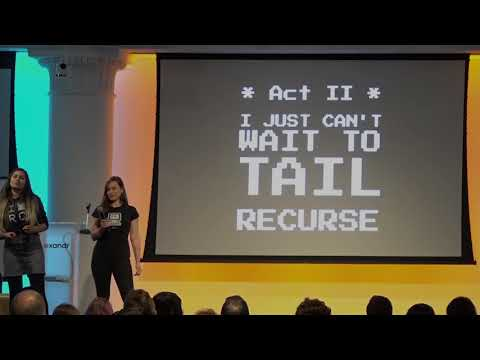

In [ ]:
#@title ## Stack overflow and tail recursion
from IPython.display import YouTubeVideo
YouTubeVideo('-PX0BV9hGZY', width=600, height=400)

# Information flow

Recursion uses function calls it feeds them information and obtains and uses their output. So sometimes it's useful to think of function parameters and function return value as information that is passed to the calee. When designing an algorithm the useful questions to ask yourself are:
* Do I provide enough information for the lower level?
* Do I return enough information to the upper level?

In [ ]:
#@title Rethinking function parameters and return values
%%html

<svg width="175mm" height="127mm" version="1.1" viewBox="0 0 211.67 142.77" xmlns="http://www.w3.org/2000/svg" xmlns:cc="http://creativecommons.org/ns#" xmlns:dc="http://purl.org/dc/elements/1.1/" xmlns:ns2="http://www.iki.fi/pav/software/textext/" xmlns:rdf="http://www.w3.org/1999/02/22-rdf-syntax-ns#" xmlns:xlink="http://www.w3.org/1999/xlink">
 <defs>
  <marker id="Arrow1Mend" style="overflow:visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" style="fill-opacity:.45076;fill-rule:evenodd;fill:#0072ff;stroke-opacity:.45076;stroke-width:1pt;stroke:#0072ff"/>
  </marker>
  <marker id="Arrow1Mend-7" style="overflow:visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" style="fill-opacity:.45076;fill-rule:evenodd;fill:#0072ff;stroke-opacity:.45076;stroke-width:1pt;stroke:#0072ff"/>
  </marker>
  <marker id="Arrow1Mend-7-4" style="overflow:visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" style="fill-opacity:.45076;fill-rule:evenodd;fill:#0072ff;stroke-opacity:.45076;stroke-width:1pt;stroke:#0072ff"/>
  </marker>
  <marker id="Arrow1Mend-7-4-6" style="overflow:visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" style="fill-opacity:.45076;fill-rule:evenodd;fill:#0072ff;stroke-opacity:.45076;stroke-width:1pt;stroke:#0072ff"/>
  </marker>
  <marker id="Arrow1Mend-7-4-4" style="overflow:visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" style="fill-opacity:.45076;fill-rule:evenodd;fill:#0072ff;stroke-opacity:.45076;stroke-width:1pt;stroke:#0072ff"/>
  </marker>
  <marker id="Arrow1Mend-7-4-4-1" style="overflow:visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" style="fill-opacity:.30303;fill-rule:evenodd;fill:#000000;stroke-opacity:.30303;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="Arrow1Mend-7-4-4-1-7" style="overflow:visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" style="fill-opacity:.30303;fill-rule:evenodd;fill:#000000;stroke-opacity:.30303;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="Arrow1Mend-7-4-4-17" style="overflow:visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" style="fill-opacity:.45076;fill-rule:evenodd;fill:#0072ff;stroke-opacity:.45076;stroke-width:1pt;stroke:#0072ff"/>
  </marker>
 </defs>
 <metadata>
  <rdf:RDF>
   <cc:Work rdf:about="">
    <dc:format>image/svg+xml</dc:format>
    <dc:type rdf:resource="http://purl.org/dc/dcmitype/StillImage"/>
    <dc:title/>
   </cc:Work>
  </rdf:RDF>
  <rdf:RDF>
   <cc:Work rdf:about="">
    <dc:title/>
   </cc:Work>
  </rdf:RDF>
 </metadata>
 <g transform="translate(-4.8311 -133.17)">
  <g transform="matrix(1.8251,0,0,1.8251,5.9015,75.822)" ns2:alignment="middle center" ns2:jacobian_sqrt="1.0" ns2:pdfconverter="inkscape" ns2:preamble="C:\\Users\\User\\AppData\\Roaming\\inkscape\\extensions\\textext\\default_packages.tex" ns2:scale="2.834645669291339" ns2:texconverter="pdflatex" ns2:text="$$mn$$" ns2:version="1.1.0">
   <g id="id-01cea9f0-3c19-4e59-b6cd-04ad996f0a2e" transform="translate(-298.56,-142.31)">
    <g id="id-7f339389-a197-4212-9d99-c9422913e56b" transform="matrix(.88089 0 0 .88089 37.839 15.832)" style="fill:#000000">
     <g transform="matrix(.73004 -.54859 .54859 .73004 -31.201 205.75)" style="fill-opacity:.24242;fill:#000000">
      <path d="m339.36 264.49 1.0492-0.26169 9.1111 31.985 0.87501-0.24222-0.70103 3.0684-2.3495-2.3346 0.96687-0.25208z" style="fill-opacity:.24242;fill:#000000"/>
     </g>
     <rect x="355.7" y="201.11" width="10.618" height="10.618" ry="1.7732" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.24486;stroke:#9b9a9b"/>
     <path d="m360.53 212.67-0.62237-0.7666-24.198 18.352-0.50592-0.65684-1.1715 2.6246 2.996-0.41541-0.56757-0.71444z" style="fill-opacity:.24242;fill:#000000;stroke-width:.91318"/>
     <g transform="matrix(-.73007 .54855 -.54855 -.73007 785.65 238.21)" style="fill-opacity:.40909;fill:#008300">
      <path d="m339.36 264.49 1.0492-0.26169 9.1111 31.985 0.87501-0.24222-0.70103 3.0684-2.3495-2.3346 0.96687-0.25208z" style="fill-opacity:.40909;fill:#008300"/>
     </g>
     <g transform="matrix(.73004 .54859 .54859 -.73004 -63.641 238.21)" style="fill-opacity:.40909;fill:#008300">
      <path d="m339.36 264.49 1.0492-0.26169 9.1111 31.985 0.87501-0.24222-0.70103 3.0684-2.3495-2.3346 0.96687-0.25208z" style="fill-opacity:.40909;fill:#008300"/>
     </g>
     <path d="m331.23 233.58-22.255 37.556h46.281z" style="fill:none;stroke-opacity:.56439;stroke-width:.30608px;stroke:#000000"/>
     <path d="m390.16 233.39-22.255 37.556h46.281z" style="fill:none;stroke-opacity:.56439;stroke-width:.30608px;stroke:#000000"/>
     <image x="307.53" y="175.9" width="119.44" height="15.732" preserveAspectRatio="none" xlink:href="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAw4AAABnCAYAAACpURVCAAAABHNCSVQICAgIfAhkiAAAIABJREFU eJzt3XlcVOX+B/DPmRmGfRFQENlEARfCFRMTccHcUruaaZlpatbP5VZqdjXTNMs0d6NbRi65pGkb mqhXE1zCNEVQEVlMNhdA9nWYmfP7Y3IEBx2EYbPP+/Xi9WJmzpznOefMOef5nmcTSkpKRBARERER ET2CpKEzQEREREREjR8DByIiIiIi0ouBAxERERER6cXAgYiIiIiI9GLgQEREREREejFwICIiIiIi vRg4EBERERGRXgwciIiIiIhILwYORERERESkFwMHIiIiIiLSi4EDERERERHpxcCBiIiIiIj0YuBA RERERER6MXAgIiIiIiK9GDgQEREREZFeDByIiIiIiEgvBg5ERERERKQXAwciIiIiItKLgQMRERER EenFwIGIiIiIiPRi4EBERERERHoxcCAiIiIiIr0YOBARERERkV6y2q6gtLQUwcHBSEpKqvS+qakp Zs2aBXd399omoXXw4EEcOHBA5/3nnnsOQ4cONVg6RERERERUWa0Dh3ukUinat28Pc3NzAIBcLtf+ byjOzs54+umnta/T09ORlpZm0DSobpSVA+t3CujhA/TtLjZ0doiInliiCOQXlMHUVAa5kbShs6NV VF6EOYfmIOZOTKX3LeQWWDt4LTq26PjI7yuVahQVl8PSQg6JRKjLrD6WzVGbEXI+ROf9qd2mYnKX yVV+R60GdoUJkEqBcYNECI1ncxpcfkkZJBIJLIyNGjorVAWDBQ5yuRxDhw41aA3Dg3x9feHr66t9 ffDgwUYfOERGStC/vxyLFikxf77S4OvPyhKwdasU+/dLcPaspuWZl5eIUaNUeO89JUxMDJdWQW4m Th/ejKsXjqIgNwMAYGxqgfZdgzBk3HwYyatOTKkCVm2T4NPNAsYPE9HDR4SZAfNlSLt/jMVrM/Zj S/BwjBvVoaGzQ01c5Lk09B+xE4vmBWD+O70aOjsG86Ru15NApRKx4auzWPBROPr0csXX64fB1dmq obNViUwig18rP9iY2AAAjKXG2v8fJutuMWa8exihYfGYO6snFs7tDWN54wiKPG09McRziPZ1YnYi Eu4mPPI7N24Cn+8WkJQqQBTVeGkwgwcACDlxEZ//dh5ymRRrxg5Ab0+Xhs4SPcBggQPVv7g4AdOm GeHcOQlcXUX076+GRAKkpAjIyhIgGvDB/u3UOHz3+UwU5GbCSG4COwc3AAIK87NQlHcXD0tMFIHd hwSs/lbAy0NErJ6tbrRBwz/N8rW/Y+nKk9VadmDf1tj6xXDYNjOt41zV3r3gDwB2f/MvjBzqpbPM vW3/LXQ8/P2c6zuLVIUyhQp7fozFsRM38MHc3mjr0ayhs9QgSkqVmLfoGEK2X6zR77OgsAwnI1MB ACd+T0H6rfw6CRxqc7xMZCaY3GWy3hqGiq7fyMXxkzcAANGX7qCoSAFjueGvR7duF2LTtiiUKVT4 4N3eMDXRX0wKcAtAgFuA9vXmqM16AwcPZ2DLUjVeni/Fe+skcGqu/sfXxhcrynE6MQ1qUURpuRKX 07PqJHAoLVdiU0QUIuJTsWRkAHxaNTd4Gk8yBg5NlEIBbN8uxblzErz/vhLvvKNExZZh5eWAzEBH V6VU4Pcj21CQm4muAaPx7AtzIDcxr/B5OaTSqhP7M1bA/A0SdPAQ8cE0Ncwbf7nzH8PayhhBga21 r9WiiMTr2UhJy0ePbk6wsjDWfubcyqpRNQ2orl+PJCKob2uYm7HKu7ErKlJg3y9XcSezCGpDPvX4 h7G2MsH4MT64EpeJ/n3c4d3Wrk7Sqe/j1bF9c7w2vhO+//kqRgz1grVV3TyBupGai0/X/Y6pEzrX yforat8a+OwdNSa8L8HHIQK83UW0tK/zZBstM7kRxvXogGu378LGzAR9vV3rJJ38kjL8GpOEgjIF RF5rHhsDhyaqsFDApUsS+PiIGDNGhQe7kxgZsJxUWlyA2ylXYWpug+6BYysFDQAglVWdWH4hsGa7 gKIS4INpIpwdDJcnqr3pU7ph+pRu2tcVn3R+urhfk38SP36MDyJOJ+Ps+ZvoF+DW0NkhqheCAIwe 0Q6jR7Rr6KwYlLmZEVZ82B8rPuzf0FkxqL7dRbzxgojV3woI+VGC+VPUkDWCFlhKpRJbt26FnZ0d Ro4cCYmkfgbhHOTjgUE+HvWSFtUMh2Nt4lq0EGFXNw+UdJhZWMPCqvqJHTsr4PDvAv7VX0RAV0b1 VL+6dnJEt84t8euRBJQpVA2dHSIiHTIpMHG4Gu1bi9h+QEDcX42jZjcuLg7//e9/8cYbb+DLL79E WVlZQ2eJGgnWOBhIWRkQESHBtm1SHD8uQU6OAC8vETY2jy4wp6YK2LlTiu++kyI+XvOdwYNVmD5d BTc3/YVtqRSopwcBEAQJhGr23ioqAfYd1Sw7bvCjO0Nn55Rg0vT9cHOxxqcf9kdCUjY+23gG/zt+ HTKZBMMHe+LdWf5VtqFVq0Wc/iMNW3dFI+xoEnJyS+HVxhaDg9pg+pRucHOxrjp/xeU4cCgBu/Zd QeS5NBQUKtDJ59FVIqIIXEu8i807ovHLwWtISctHJx8HvDCiHSa97At7O7Nq7ZvHkZGRgffeew8X LlzARx99hOHDh1f7GNSl5Wt/x8+/XsP2r0bCzcUaYf9LxKZtUTh+Mhl+XZ0w5ZVOGDe6o07nxZru w9T0fOzcexnf7buC+KTsah1j22ameLafB9Z/eRaTX8lBB2/9bQBEEbgUm4Ft38XgwOEEpKRp2of3 7+OO/5vcDU91aFFlB8YyhQoRp5Ox7btLOH7yhvZ3aGPz6OYUNdmu+lST7crMKsZvJ25g/+EEnLtw s9I+nDy+E7p3cdLuw3udrB/UqffXOu892BFbFIH0W/k4+L8kHD6WhMhz6ZXO/ykTOsOrjW3td8ID GvM5+WCfJd+OLbD9q5GP3A/3fvNfbrmA02dSEZ+UDQDo5OOAzk85YPG8ALR0tABQu+NVE/fuDf8L /6vS+1MndMbKpQOq7H9Qk/tJVfsuZPtFhGy/qLP+uugX5e4EjBkoYukmAWGngI5t0OAdpX18fLBr 1y7MnTsXc+bMwa1btzBv3jxYWloaPK0vw6PwxfHzOu+vGTsAQR1aV/ENYN7e33AqMQ1fTRgMOwsz rAyLxKnENCiUKrSwMseU3p0w1q+9tont0di/MHvPMZ31jP86VOe9wT4eWDnGcDVboijixx9/xIIF C9CvXz8sW7YM9vZNt00aAwcDyMkRsHChDJs3S2FpCfj6qmFqKiIlRdCOdFSVU6ckmDHDCJmZwOjR arz6qoiYGAFbtsjw889ShISUIyBADQDIzRWwYIEMqamak6C8HIiJ0fz/8stGOk2Tpk1TYvhwdY22 p7gwFz998x/k3r0FAFCrVcjL1vy/eeVESCSVC4O9B09Gp14jK72XmCogMlpAr04iuneoXm1Ddm4p Nnx1Dmu/+APNbEzg19UJaen5+Hb3JVyNv4vNG5+rdLEvKi7Hyg2RWLk+EpYWcvh2bAFjYxkSr2dj w1fn8POv17ByyQCMGOJV6SKckpaPt+cfQdjRJDSzMUHXTo6QSiXa9v1VEUVg3y9X8db8I7C0kGPU 8HZoZm2CP86n44NPIhB6KAGb1g1FO0/DVv/s2bMHu3fvBgBs3boVffr0gY3No0cfqS8xVzKQnJqH r7dF4fOv/0QnHwc887QzYq5k4M3ZYSgoVGDG1O7afV/TfXjqTCpmzD2EzLvFGD28HV4d9xRiYjOx ZWc0fv71GkI2PIcA/6o70PXt7YbNO6NxNPwvtPeyf+TNWKlU4+tvL2Lx8ggUFCrQo5sTvNrYISUt D1t3xeCH0DgsmR+I11/tDJns/nmdk1uKhcvCsXlntPZ3aGpihJS0PJw9f/Oh6dVmu+pDTbarpFSJ pStPImT7RTSzMYFvxxY6+3DjikF48V8dIAiAibFM28+mXKlCzJUMKJVqbVoVWVsZV3qdk1uC6XMO 4X/hf8HV2QpdfB0BoNL5Xxf7sLGekxX7LN3bl/qIIvD9T7GY9d5h7W8+KLC1tr9TVMxtFBQp0PLv 5WtzvGpCIhHg3MpKm2Z+Ydkjz6mKHud+UnHf3UvD1dkKbT1sIXngomFibPhikyAA/fyANTuAQ78L eO15EfYN/5OCt7c3QkJCsGDBAqxatQo3b97EJ598AgcHw7Y7tjQxgqO1pgm0KAI5xaVQKPXXEper 1NgfnYgDMYkoLitHM3MTqNQiMvKLsCIsEkVlCkzto+mrYmIk06ahUou4W1QCiEAzcxMYSSuX06wN PIJLamoqPv/8c6SkpGDbtm0ICgrCCy+8YNA06hMDh1pSKoF166TYvFmKyZNVWLJECXt7TUFZFIHw cAmGDpXrfC8xURMIlJYCe/bcDxBEEYiIUOGNN4yweLEMW7aUw81NhFoNpKUJOHpUNxCJiNAtDY0f X/PHFaJahbzs27h754bOZzmZqTrvlZUW6bwXex3IzAE6ewM21XxA8eP+OPy4Pw7vz3kG70x/GuZm RigoVOC9D3/Dlp3RCD+drL3QiyKwZWc0Vq6PxJCgNli9LAit3TRX2jKFCt/tu4J5i4/hkzWn0d7b XvvELb+gDEtXnkTY0aRK6QCa2otvd1/C/80J08nbmT/TsPDjcLT1sK1UuFWrRez5KRZv/ecIPvrs FII/GwQba8NddCo+3TExMWkUTzYrmvb2QciNJNi5aSSeH+YNiUTAychUTP33Aew/lIDRw9tpn1bW ZB8mXs/Bgo/CUVqmxJ7No7SFQFEEIk4n4413DmLx8hPYEvxclU/oXVpZISjQHftC4zBiiBfcXR/+ FD/saBIWL49AOy97rP04CF07tYQgaPJ3+LfreHv+EazcEImnOjRH756afCiVaqz78iw274zG5PGd sGR+H22tiSgC4aeSMfTF3Tpp1Xa76lpNt0sQgAGB7pg942m4uVhrn/aVKVTY8f0lzHz3ML7dcwmB z7jC0cECXXwdsX/3iwDuPym+k1mEL1YP0VtbIJNJMGHsU/h6/TC0aG6uDQorPlDYvucSunZyNGjn +MZ6Tlbss1RxXz5Kcmoegr85j3Ze9vjv6sHo2K7y6DKlZUrIKhSqanO8asLG2gRfrBqsff2wGo+q PM79pOK+u5fGs/08HlqrURfauIjwaSvicqKAG+kC7PW0VqgvDg4OWLduHZycnLBq1SpkZGRg1apV 8Pb2Nlga43v6YHxPHwBAYVk5Zuw4hKiUO3q/V1auxO6zsWjVzBLfTBqK9i3toVaLCD5+Hl+fuIgj sX9hjF97WJsao7enC47MfgkAkJFfhAkh+1FQpsCGlwbiKecWBtuWqsjlcpiZ3a9NNzHkOPkNgIFD LcXHCwgNlSIwUI33378fNACam2hVvw9RBA4e1IyItGKFEr17qyt9JyBAjfHjVVi+XIbISAnc3FSw tRURGqrQLpedLWDSJM3NcOvWctjaGu4iY25lh+lLfta+Lsq/i22rpwAAJs75BubV6Odw9brmZurt /nhjUy97PxBvvdlD+0TX0kKO0cPbYcvOaMQnZkNRroLcSIrU9Hz8sD8O7TztsGR+oDZoAABjuRSv vOiDv1JysXJ9JA4fS9Le1M5fvI3QsHiMH+ODf7/hV6lAIZEIMKniJlGmUOGH0DikpOVj5ZIBlZ6I SyQCRgzxwvGTyfj512u4Gp9l0GrsMWPGIDc3F5cuXcJbb70Fa+uGb75SkdxIgg0rBuHZfh7a49z5 KQf07umC/YcSkJqej5aOFjXah6IIHPxfIs5duIkVH/bXFtaBv88Tf1eMH+OD5Wt/R+S59CoL2FKp gOcGeWLn3ssIP5WMSS/76iwDAHn5ZfjuhysAgEXzeqNb55bazyQSAYMHtMF7b/fCjLmHEBqWgB7d nCA3kiI+KRuhB+MR+Iwr3p/7TKWmVprzX7eXoyG2q67VZLsAzdPY54fpFiiM5VKMHOKFH/dfQ9bd YuQXKuBYy4eWVpbGGPN8e533zc2M8PILHXHwSCJu3ylEWZnSoIFDYz8nH0dGZhHi4rPQL8AdrVrq PuGpi6fr9am695PGwNwUaOcOnIkB0jKA7tUfqbbOWVpaYvHixXBycsLixYvx4osvYuPGjQgICGjw wNnV1gpfvjoEzs00v1+JRMDIzp74OSoed/KLkJFfBGvT2td+1YajoyOWLl0KOzs7PP300xgwYECD 5qe2mvZVoRGIjZUgLk7A6NEqtGxZvcJ7fj5w5owAR0cRAQFqnYK1VAp0+Lt5T2ysAJVK815TUVwK pP9dS966VfW/17+POya+5FupGQgAmJlpfqYlJeVQqUTACEhIysaZc+mYOqFzlX0fZDIJ+vi7YuX6 SMQnZqOkVAlTExn+jLqFgkIF+gW4wcqyeheTOxlFOB99Gz39WmmbQ1RkbmYETw9bFBQqcCXOsIGD ubk53n77bYOtz9DmzOxZKWgANPvezFTzdE+l1gTFNdmH+QVlOPNnOhwdLBDg71LFeSJo+y3EXsuE SiVCKtW9iXVs3xzDB3si7GgSnh/mVWWNUEpaPi7FZsDfzxldntLNnyAAfl2c0NajGeLis1BYqIBt M1PExmUiLuEuRo9oh5YO1ataM9R21aWabJc+5uZyeLjZIOtusUHW9yjN7czQ0sGiTtbd2M/Jx+Hq bAW/rk4IDYuHpYUc70zvgfZe9k1y6OUHPc79pDGQGwHN/p5uo+DRFUWPLSoqCosWLaryMxcXF3zy ySd6m9vJZDK8+eabcHJywrx58zBu3DisXbsWY8aMqbcRl6oys383bdBwj4mRDDKJBCXlSpSWG37i 3Zro1q0bvv3224bOhkEwcKilhATNBbZt2+o/WVepBBQWahbet0+C337TPenS0zWf5+QIUCgA03/A /AdSiVDtG1bm34UPp5aWD61Kdm5lCZ/2zZGcmoeSknIAQEpaHgDAw736DUhLy5QoLi6HQqHCt7tj qkzvanyWJl9ZdV8oakysLI11fvemJjJsXDkIG1cO0r5Xk32oUqlRWKipZdsXGoffTtzQ+U76rQIA QE5OKRTlKphWMZ+IsVyKYc96YuL0UPx58ValuSvuKSwqQ+L1HPR9xg1mD3k63dLBHK7O1riTWYSs 7BLYNjNFwvUcAEBbD9vHOP8Ns111qSbbVVFuXilirmQg+vIdKP4e0apcqcaVuCxDZhOiqHlqHn3l DmLjsqBSaQLVklIlUtPz4dKqcc2Y3Ng4Oljg44V9Mfv9o9i59zJ27r2s7Vw+blQHdPJxaLJBxOPc T550paWlOHr0aJWfDRw4EGp19ftDmpqawsTEBAUFBYbKXq3IpBwctL4xcGhAt28LWLOGh6CuKBRq TRtdmcQgN5C4hLv4ePVpA+Tsn6sm+/D2nUKsCf6jVul28XWAv58zvv/pao1rhMrL1VAq1ZBKJZAa 4PdkiO1qbEpKlVj/5VmsCf4DBYWKKpfx7WiY9sQ5uaVYsuIEvtoa9dBlGDjo1/kpB4TtG4c//kzH LwfjceBwAjZ8dQ4bvjqHEUO88NnSAXUy8zTVH39/f5SUlNRqHUqlErt378a8efPQvHlz7N69u1E0 VaL6x1JrLVn8XRuemVn1yZNfxSA9EolmVmcfHxE7dijg7d04OkEZiqkxtLNf/pUO9O5i+DQszDUd znNySx/aTjUjswiJ13MwoI87TExkkEgEmJpqnibfzS7VWV4UNc1IHiSVCJBKJejfxx3bvhheJ8Ou Pulqsg8lEgEymQQ+7Ztjx6aRtZoB18baBP96zhvzlx5HfOJdnc9NjGVwdLDA3ZwSKBSqKmtEsrJL cPN2ATw9bGFnq6kCtDDX/J4ys6puW5BfoFt4NuR21ZWabBcA7PkxFktWnMSQoDb48D990MHbXttU 5N4Eg2cvVG9UnEdRqURs3HQOX22NwsSXfPHeW/6VOmPf67hL1WMsl6JPL1f06eWKFR/2xx/nb2JN 8BmEhsXDzcUayxYGNpq+AE8qRTmQ83d5wdL80cvWt5KSEqxZswbLli1DUFCQwTtHU9PCOp5aat1a U8UXHy/gwYA+Lk7Axx/rFkAsLUX4+Khx+bKAqKgn7xAIAtDWVRMMXbshoC5mdPdwt0E7TztEnE7G jZQ8nc/LFCrt2N89/ZxhYiyD3EgKl1aatpCXr2bo5OvUmVSs/vyMzrpaNDdHey87xF7LQlyCbqGz LhUVFWHdunWYMmUKYmJi6jVtQ6rJPrS0MIZPh+a4fDUTUTH6R9jQp+8zrujgbY+TkakQHzj4LR0s 0MHbHpHn0nEpVncYy3ujHSVez0GPbk6wttL0k2jtpulfc68fTUUPq10xxHaJoojw8HC8+OKLCA4O rvXTxAfVZLtKSpU4f1EzbPOMqd3h27FFpfblSqUa5cqHN4m4F1AVl5SjrOzRQzHm5Zfiz6hbaOvR DDOmdkdrN5tKtYpKpRpKVc2Go9bnSTknH0Ymk+CZp53x4X8CK/XpedDjHK+mRCqRwNJCjuKScigf 8Xs1tJIyIOU20LzZ4/UNrGtZWVmYOXMmli1bhpdffhkhISFNPmgQBE0ztnKVGiXl9fPbPX/+PF59 9dU6uV7Xtyev1FrPOnXSdHA+cECC8HAJRFFTyDh/XoJp04ygUACOjpULKVIpMGSIGq6uIpYvlyEs TALlA/13cnM1ozWlpTXNakCfNoCFGRAZA9zVLdfXWpvWzTBoQBvEXMnAinW/a9uEA5qg4ZvtF7F5 x0WMGOKFoEB37WeBz7jB1dkKPx24hgvR9+apEBF2NAlT/30ATlWMLGJpIcfgAW1QVKTAok9O4NyF m1Cr7x9TUdR0/t3789UqayxqY+/evZg/fz527dqFTz/9FHl5dbAz60FN9qFUKmBIUBu4Olth+ZrT CDuapHMjz80rRWhYPNJuVj3/RkUOLSwwqL8HDv92Hddv5Op8NiSoDW7fKcSKdZG4Gp+lDSzVahE/ HYjDxk3n4NfVCS+MaK9t99/JpwUC/F1w4Egiwk8l3z//L97CtLcPQqFQwfGBTrqG2K68vDxs2LAB +/fvx9y5c7Fnzx692/84arJdggBtJ+5riXe126RWi7gQfRuTpodi23cPL2ibmRmhrYctEq/nIOTb qIc2dQLuF1rvZBThr+Qc7bFSKtU4FnEDo179AcdPJtdyL1TtSTknAeDW7UJk55ToPERRq0VEX76D xOs5cHOx1tbUVvQ4x6spcXSwQMf2zbH/UAIOHE6odJ2qSzduCriUIKCDhwhXx8bRCuHatWt47bXX tBPBrVu3zuBzODQEKxM5XG2tUFauxBfHzyO3uG5nxb59+zYWLVqEvXv3Yu7cuTh2THciuqaETZVq ydlZxJQpKsyaZYRRo+To0UNzszx7VoJRo1R44w0V3n1X96Lr56fG/PlKzJun+V6zZiJ8fUUYGQGZ mUB0tARduqixfXv9PfEwpHatRQR2E3EkUkBUnICBPQ17ITSWSzF7eg9cv5GDXfuuYP+hhEoTwKWk 5cPfzxkfvR9YqVlMB297TJvYBQs/jsCQMbvh27EFCovKEX35Dma+3h3P9vfAiJe+10nvucGeiE/K xrJVp9Bn2PZKkwOlpOUhPikbQ4LaYGC/qme5rKmKHdBKS0t1npQ3JTXZh35dnDD/nWcwb/ExjJqw TzupmJFMisy7xYi+fAddfB2x/csRetMXBCCob2ts2Rmt0yFZEIDXxndC4vVsfLU1Cl0Dv0GPbk6w sjDW5s2rjS0++aBvpVG8nJ2sMOWVzpj13mGMmrAPPbo5AQDOnr+JUcPb4Y1JXfDuIt2bRG23y8jI qNLMo7GxsVAoFJDLdeeMqYmabJeJsQwDAltj174rmLPwKL7dfQnN7cy0+69b55bo08sVuXm6zQQB QG4kxbhRHfDLwWvYtC0Ke3+5qt0nADBkYBvtWPvWVibo38cdYUeTMHbyT+jRzQkW5nLtud+nl2ul IXUNqT7Pyf8sOQ4ri6pHf1u6oI92hLLcvFIs+CgcqX9PYFlxcrbpc8K0k7N179IS773trx1mNeL3 FLw2Y3+lCf7uTf6WkpYP344tMOll3yqb7j3O8aqpqJjbWPTJCe3r/EJNAe/I8eu4PjFXOznbtEld MHywZ63SusellRVGD2+HM+fSMXnmAXy69ne4Ot8fcrfifjcUUQSO/K6Z+yiwm1jtuY/qUlxcHCZN moTr169j9erVmDJlCoyNDT+sabGiHO//GIErNzMB3J8ADgCW7j+NlYc0rQBaWJpj3UsDYW9R+5Fi jI1keMXfB+eTb+NC8m30/WwH7MxNtX3XAr3d8P6w2s16XpFCoUBx8f2BU0pLq74GNhUMHGpJEIAx Y1SwsBARHCzD8eMS+PmpsX59OcaPV2lHR3qQTAZMnKhCz55qbNkiRUSEBBERElhaAv7+anz+eTlG jFCjefOmWVC0MANeGCji15MCtoZqZpA2N/DIUC2am2NL8HAcOJSAXfuuIPJcGgoKFQjwd8GcmT0x blQHnSFXZTIJZk7zg72dGb7ZEY3Tf6ShX4Abvgt5HkMGttXWQjzI1ESG+e/0QlCgO7btvoTTZ1Lx 24kbaGZjgn4B7lg4tzcGDfCo9hCv1TV27FhcuHABFy5cwKRJk5r0mPE12YcymQQTX/JFT79W2LIz GhGnUxBxOgWWFnL4+znj888GYcRgLzS3r16/k3s1VVU1lzI3M8KKJQMw9Nm22PbdJRw/eQM5uaXo 5OOAjxYE4pUXfap8yj7m+fawsJAjOORPHD+ZDL+uTlj/6bMYP8anUk1YRbXdLnNzc8yePRvR0dGI iYmBQqF4rJFR9Knpdg17ti32bh2N4JA/EX4qGdGX7yDA3wUzXu+OcaM6IDjkPH7+9dpD0+3ayRH7 d4/FN9sv4tDRJEScTtF+1uvp+53aBQF4fWIXODtZYtO2KBw/mazdd8sX9UO/AHcs+iQCyamGrw2o z3PyUbMkL5hzv2CjVotIS8/H0Yi/dJY7/Uea9n93V+tKtQsebjaYMPa4dnG9AAAGt0lEQVQpXEu8 q13O0kKO7l1a4u3/expj/9Uets0efuGu7vGqqdIyZZXblJKWj5S0+7Vx41/0qXVa9wgC8OZrXeHt aYetu2Jw/OQNxCdlaz+vuN8NJT0D+CVcgKsjMKLv4819VFfatm2LqVOnws7ODiNHjqyzIVfVIpBd VILbebr9qXKL7xewBQgGvcYFeLpg82vD8MVv53Eh5Q4yC+4X7POKDVuwd3FxwcyZM3Hz5k3069cP ffv2Nej665tQUlJSq5JpaWkpgoODcfPmTcyaNQvu7u4Gypp+Bw8exIEDB/Dcc89h6NCh9ZYuVU9O PvDaIglOXBDwzYdq/Kt/0wyCiBqj4uJizJ07F1u2bMHGjRsxderUhs4S0SMVlRdhzqE5uJ5zHWsH r0XHFo1oljMD2hy1GSHnQzC121RM7jL5kcsqVcCqbQI+DpFgyf+p8c4rjSNwIHoY9nGgOtPMCpg7 UVPTsHSTBFd1HxwRUQ2IooizZ8/i2LFj8Pf3x8CBAxs6S0RUA6eiBATvkaB3FxEvD2XQQI2fwZoq KRQKHDx4EObmmnHE5HI5goKC0Lx5c0MlgZiYGERF3R+zOz093WDrprrxTGcRy/+txr9XSDB7lQRb lqrh2PhGnyRqEu7cuYM9e/bg1KlTCA8PR+vWrbF8+XK4ubk1dNaI6DFd/Qt4Z5Xm+e3S6SLvjdQk GCxwUKlUuHz5sva1qakp/P39DRo4pKWl4Y8/nqwJk550ggCMGywi+ZaITzcL+GiTBKvnqGFimD6c ZGDFmZcQs8tf+7rnW4XVWs71maVw6j6b66zjdebl5WHnzp2wtrbGkiVLMHbsWNja2la5TnoyNIXf 5eOsEwBKlaXYHLUZNiY2AABjqTHG+45HK6tGNA7pYziZfBLhN8K1rxOzE/V+Jz0DeHulBFk5wJcL 1ejegU15qWmQLly48MParEAmk6FXr14YNmxYpb9BgwbBxsbGQNnU8PT01Eln2LBh8PQ0zGgKVDck EsCvowiZTMDgXiLaujR0jijl9CJYu/ar9F5+2gnEhb4AtbIELbvOgqo0F4rC9Gotdzd+H9SqUq6z jtdpZ2eH119/HRMmTICfnx9MTQ084gA1mH/COVmuLseRxCO4VXgLaflpSMxORGJ2ItLy09DXvS9a mBtmVvH6duyvY/j+8vfa7cku0XSm7urUFV1aVj0DqpkJUFQCvBAkNpoO0UTVUevO0UTU9JxZbwGH pyajdf8NAIDspFAk/PoKRFENj6BgtOg4EYrCm7jwjVe1lwPAddbhOunJ9qSfk0T0ZKh1jQMRNT2F d/7E3fh9KMm+CpWiAImHpkAQBHgN2wn7dmMBAFK5ZbWXc+r2Nooyo7nOOlyneYvO9fHToAbyJJ+T dp6jGmCPElFdYI0D0T9UwqHJuHvt/mR3HUaHwco5oMbLcZ11u85HtRmnJ0NT/F1WZ5387RI9ORg4 EBERERGRXpzHgYiIiIiI9GLgQEREREREejFwICIiIiIivRg4EBERERGRXgwciIiIiIhILwYORERE RESkFwMHIiIiIiLSi4EDERERERHpxcCBiIiIiIj0YuBARERERER6MXAgIiIiIiK9GDgQEREREZFe DByIiIiIiEgvBg5ERERERKQXAwciIiIiItKLgQMREREREenFwIGIiIiIiPRi4EBERERERHoxcCAi IiIiIr0YOBARERERkV4MHJoopVKJHTt2wNvbG2PHjkViYmK1vpeSkoJXXnkF3t7eCAkJgVKprLO0 iIiIiOjJwcChiUpOTsYXX3yBlJQUhIaGYteuXVCpVHq/t2fPHvzwww9ISUlBcHAw4uPj6ywtIiIi InpyMHB4QlSn5qCq79QkAKhJWkRERETUtEkXLlz4YUNngh6flZUVTE1NER0djcDAQMyePRv29vZ6 v+fi4oJbt26hqKgIs2fPxsCBAyGRPDp+rGlaRERERPTkEEpKSsSGzgQRERERETVubKpERERERER6 MXAgIiIiIiK9GDgQEREREZFeDByIiIiIiEgvBg5ERERERKQXAwciIiIiItKLgQMREREREenFwIGI iIiIiPRi4EBERERERHoxcCAiIiIiIr0YOBARERERkV4MHIiIiIiISC8GDkREREREpBcDByIiIiIi 0ouBAxERERER6cXAgYiIiIiI9GLgQEREREREejFwICIiIiIivRg4EBERERGRXgwciIiIiIhILwYO RERERESkFwMHIiIiIiLSi4EDERERERHpxcCBiIiIiIj0YuBARERERER6CaIoig2dCSIiIiIiatz+ H7P3NO+f9StQAAAAAElFTkSuQmCC "/>
     <rect x="380.64" y="182.87" width="9.2976" height="3.2541" style="fill:#f7f6f7;opacity:.999"/>
     <rect x="345.7" y="182.87" width="17.351" height="3.2541" style="fill:#f7f6f7;opacity:.999"/>
     <path d="m396.43 207.88c-8.7329 1.5362-12.362 7.857-18.442 11.88" style="fill:none;marker-end:url(#Arrow1Mend);stroke-opacity:.45076;stroke-width:.33518;stroke:#0072ff"/>
     <g transform="matrix(.53698 0 0 .53698 382.19 200.02)" ns2:alignment="middle center" ns2:jacobian_sqrt="3.77952" ns2:pdfconverter="inkscape" ns2:preamble="C:\\Users\\User\\AppData\\Roaming\\inkscape\\extensions\\textext\\default_packages.tex" ns2:scale="2.834645669291339" ns2:texconverter="pdflatex" ns2:text="$$response$$\n$$data$$" ns2:version="1.1.0">
      <defs></defs>
      <g transform="translate(-286.32 -142.31)">
       <g id="id-e5d9448b-e7a8-4efe-ba9b-81935b8cf3fc" transform="matrix(.79927 0 0 .79927 83.765 38.728)" style="fill:#000000">
        <g transform="translate(286.02 146.72)">
         <path id="id-c1ea76f1-fdaf-4e38-990a-5a334eb3826d" d="m0.875-0.59375c-0.03125 0.15625-0.09375 0.39062-0.09375 0.4375 0 0.17188 0.14062 0.26562 0.29688 0.26562 0.125 0 0.29688-0.078125 0.375-0.28125 0.015625-0.03125 0.34375-1.3906 0.39062-1.5781 0.078125-0.32812 0.26562-1.0156 0.3125-1.2969 0.046875-0.125 0.32812-0.59375 0.5625-0.8125 0.078125-0.0625 0.375-0.32812 0.79688-0.32812 0.26562 0 0.40625 0.125 0.42188 0.125-0.29688 0.046875-0.51562 0.28125-0.51562 0.54688 0 0.15625 0.10938 0.34375 0.375 0.34375s0.54688-0.23438 0.54688-0.59375c0-0.34375-0.3125-0.64062-0.82812-0.64062-0.64062 0-1.0781 0.48438-1.2656 0.76562-0.09375-0.45312-0.45312-0.76562-0.92188-0.76562-0.45312 0-0.64062 0.39062-0.73438 0.5625-0.17188 0.34375-0.29688 0.9375-0.29688 0.96875 0 0.10938 0.09375 0.10938 0.10938 0.10938 0.10938 0 0.10938-0.015625 0.17188-0.23438 0.17188-0.70312 0.375-1.1875 0.73438-1.1875 0.15625 0 0.29688 0.078125 0.29688 0.45312 0 0.21875-0.03125 0.32812-0.15625 0.84375z"/>
        </g>
       </g>
       <g transform="matrix(.79927 0 0 .79927 83.765 38.728)" style="fill:#000000">
        <g transform="translate(290.79 146.72)">
         <path d="m1.8594-2.2969c0.29688 0 1.0312-0.03125 1.5312-0.23438 0.70312-0.29688 0.75-0.89062 0.75-1.0312 0-0.4375-0.375-0.84375-1.0625-0.84375-1.1094 0-2.625 0.96875-2.625 2.7188 0 1.0156 0.59375 1.7969 1.5781 1.7969 1.4219 0 2.25-1.0625 2.25-1.1719 0-0.0625-0.046875-0.14062-0.10938-0.14062s-0.078125 0.03125-0.14062 0.10938c-0.78125 0.98438-1.875 0.98438-1.9844 0.98438-0.78125 0-0.875-0.84375-0.875-1.1562 0-0.125 0.015625-0.42188 0.15625-1.0312zm-0.46875-0.21875c0.39062-1.5156 1.4219-1.6719 1.6875-1.6719 0.45312 0 0.73438 0.29688 0.73438 0.625 0 1.0469-1.5938 1.0469-2.0156 1.0469z"/>
        </g>
        <g transform="translate(295.43 146.72)">
         <path d="m3.8906-3.7344c-0.26562 0.015625-0.46875 0.23438-0.46875 0.45312 0 0.14062 0.09375 0.29688 0.3125 0.29688s0.45312-0.17188 0.45312-0.5625c0-0.45312-0.42188-0.85938-1.1875-0.85938-1.3125 0-1.6875 1.0156-1.6875 1.4531 0 0.78125 0.73438 0.92188 1.0312 0.98438 0.51562 0.10938 1.0312 0.21875 1.0312 0.76562 0 0.25-0.21875 1.0938-1.4219 1.0938-0.14062 0-0.90625 0-1.1406-0.53125 0.39062 0.046875 0.64062-0.25 0.64062-0.53125 0-0.21875-0.17188-0.34375-0.375-0.34375-0.26562 0-0.5625 0.20312-0.5625 0.65625 0 0.5625 0.57812 0.96875 1.4219 0.96875 1.625 0 2.0156-1.2031 2.0156-1.6562 0-0.35938-0.1875-0.60938-0.3125-0.71875-0.26562-0.28125-0.5625-0.34375-1-0.42188-0.35938-0.078125-0.75-0.15625-0.75-0.60938 0-0.28125 0.23438-0.89062 1.1094-0.89062 0.25 0 0.75 0.078125 0.89062 0.45312z"/>
        </g>
        <g transform="translate(300.1 146.72)">
         <path id="id-993f9fa2-01af-42d5-83fa-f49d968db2dd" d="m0.45312 1.2188c-0.078125 0.34375-0.10938 0.40625-0.54688 0.40625-0.10938 0-0.21875 0-0.21875 0.1875 0 0.078125 0.046875 0.125 0.125 0.125 0.26562 0 0.5625-0.03125 0.82812-0.03125 0.34375 0 0.67188 0.03125 1 0.03125 0.046875 0 0.17188 0 0.17188-0.20312 0-0.10938-0.09375-0.10938-0.23438-0.10938-0.5 0-0.5-0.0625-0.5-0.15625 0-0.125 0.42188-1.75 0.48438-2 0.125 0.29688 0.40625 0.64062 0.92188 0.64062 1.1562 0 2.4062-1.4531 2.4062-2.9219 0-0.9375-0.57812-1.5938-1.3281-1.5938-0.5 0-0.98438 0.35938-1.3125 0.75-0.09375-0.54688-0.53125-0.75-0.89062-0.75-0.46875 0-0.65625 0.39062-0.73438 0.5625-0.1875 0.34375-0.3125 0.9375-0.3125 0.96875 0 0.10938 0.09375 0.10938 0.10938 0.10938 0.10938 0 0.10938-0.015625 0.17188-0.23438 0.17188-0.70312 0.375-1.1875 0.73438-1.1875 0.17188 0 0.3125 0.078125 0.3125 0.45312 0 0.23438-0.03125 0.34375-0.078125 0.51562zm1.75-4.3281c0.0625-0.26562 0.34375-0.54688 0.51562-0.70312 0.35938-0.29688 0.64062-0.375 0.8125-0.375 0.39062 0 0.64062 0.34375 0.64062 0.9375s-0.32812 1.7344-0.51562 2.1094c-0.34375 0.70312-0.8125 1.0312-1.1875 1.0312-0.65625 0-0.78125-0.82812-0.78125-0.89062 0-0.015625 0-0.03125 0.03125-0.15625z"/>
        </g>
        <g transform="translate(305.11 146.72)">
         <path id="id-f9aae4b2-eec0-4b11-a158-bdab80928cca" d="m4.6719-2.7188c0-1.0469-0.6875-1.6875-1.5938-1.6875-1.3281 0-2.6719 1.4219-2.6719 2.8281 0 0.98438 0.67188 1.6875 1.5938 1.6875 1.3281 0 2.6719-1.375 2.6719-2.8281zm-2.6562 2.6094c-0.4375 0-0.875-0.3125-0.875-1.0938 0-0.48438 0.26562-1.5625 0.57812-2.0625 0.5-0.76562 1.0781-0.92188 1.3594-0.92188 0.57812 0 0.875 0.48438 0.875 1.0781 0 0.39062-0.20312 1.4375-0.57812 2.0781-0.35938 0.57812-0.90625 0.92188-1.3594 0.92188z"/>
        </g>
        <g transform="translate(309.94 146.72)">
         <path d="m0.875-0.59375c-0.03125 0.15625-0.09375 0.39062-0.09375 0.4375 0 0.17188 0.14062 0.26562 0.29688 0.26562 0.125 0 0.29688-0.078125 0.375-0.28125 0-0.015625 0.125-0.48438 0.1875-0.73438l0.21875-0.89062c0.046875-0.23438 0.10938-0.45312 0.17188-0.67188 0.03125-0.17188 0.10938-0.46875 0.125-0.5 0.14062-0.3125 0.67188-1.2188 1.625-1.2188 0.45312 0 0.53125 0.375 0.53125 0.70312 0 0.60938-0.48438 1.8906-0.64062 2.3125-0.09375 0.23438-0.10938 0.35938-0.10938 0.46875 0 0.46875 0.35938 0.8125 0.82812 0.8125 0.9375 0 1.2969-1.4531 1.2969-1.5312 0-0.10938-0.078125-0.10938-0.10938-0.10938-0.10938 0-0.10938 0.03125-0.15625 0.1875-0.20312 0.67188-0.53125 1.2344-1.0156 1.2344-0.17188 0-0.23438-0.09375-0.23438-0.32812 0-0.25 0.078125-0.48438 0.17188-0.70312 0.1875-0.53125 0.60938-1.625 0.60938-2.2031 0-0.65625-0.42188-1.0625-1.1406-1.0625-0.90625 0-1.3906 0.64062-1.5625 0.875-0.046875-0.5625-0.45312-0.875-0.92188-0.875-0.45312 0-0.64062 0.39062-0.73438 0.5625-0.17188 0.34375-0.29688 0.9375-0.29688 0.96875 0 0.10938 0.09375 0.10938 0.10938 0.10938 0.10938 0 0.10938-0.015625 0.17188-0.23438 0.17188-0.70312 0.375-1.1875 0.73438-1.1875 0.1875 0 0.29688 0.125 0.29688 0.45312 0 0.21875-0.03125 0.32812-0.15625 0.84375z"/>
        </g>
        <g transform="translate(315.92 146.72)">
         <path d="m3.8906-3.7344c-0.26562 0.015625-0.46875 0.23438-0.46875 0.45312 0 0.14062 0.09375 0.29688 0.3125 0.29688s0.45312-0.17188 0.45312-0.5625c0-0.45312-0.42188-0.85938-1.1875-0.85938-1.3125 0-1.6875 1.0156-1.6875 1.4531 0 0.78125 0.73438 0.92188 1.0312 0.98438 0.51562 0.10938 1.0312 0.21875 1.0312 0.76562 0 0.25-0.21875 1.0938-1.4219 1.0938-0.14062 0-0.90625 0-1.1406-0.53125 0.39062 0.046875 0.64062-0.25 0.64062-0.53125 0-0.21875-0.17188-0.34375-0.375-0.34375-0.26562 0-0.5625 0.20312-0.5625 0.65625 0 0.5625 0.57812 0.96875 1.4219 0.96875 1.625 0 2.0156-1.2031 2.0156-1.6562 0-0.35938-0.1875-0.60938-0.3125-0.71875-0.26562-0.28125-0.5625-0.34375-1-0.42188-0.35938-0.078125-0.75-0.15625-0.75-0.60938 0-0.28125 0.23438-0.89062 1.1094-0.89062 0.25 0 0.75 0.078125 0.89062 0.45312z"/>
        </g>
        <g transform="translate(320.59 146.72)">
         <path id="id-19fe24f2-8ed1-4836-9d2d-d9f4ed027dbb" d="m1.8594-2.2969c0.29688 0 1.0312-0.03125 1.5312-0.23438 0.70312-0.29688 0.75-0.89062 0.75-1.0312 0-0.4375-0.375-0.84375-1.0625-0.84375-1.1094 0-2.625 0.96875-2.625 2.7188 0 1.0156 0.59375 1.7969 1.5781 1.7969 1.4219 0 2.25-1.0625 2.25-1.1719 0-0.0625-0.046875-0.14062-0.10938-0.14062s-0.078125 0.03125-0.14062 0.10938c-0.78125 0.98438-1.875 0.98438-1.9844 0.98438-0.78125 0-0.875-0.84375-0.875-1.1562 0-0.125 0.015625-0.42188 0.15625-1.0312zm-0.46875-0.21875c0.39062-1.5156 1.4219-1.6719 1.6875-1.6719 0.45312 0 0.73438 0.29688 0.73438 0.625 0 1.0469-1.5938 1.0469-2.0156 1.0469z"/>
        </g>
       </g>
       <g id="id-9e49a90e-b4ae-4d06-b899-cd4e9acca2ba" transform="matrix(.81243 0 0 .81243 -33.714 25.029)" style="fill:#000000">
        <g transform="translate(295.97 164.65)">
         <path id="id-be0c766d-9582-4824-b3b9-fa7bcd6a758f" d="m1.9248-6.4266s0-0.10938-0.125-0.10938c-0.15625 0-1.0937 0.09375-1.2656 0.10938-0.078125 0.015625-0.14062 0.0625-0.14062 0.1875s0.09375 0.125 0.23438 0.125c0.48437 0 0.5 0.0625 0.5 0.17188l-0.03125 0.20312-0.59375 2.3594c-0.1875-0.375-0.46875-0.64062-0.92188-0.64062-1.1563 0-2.3906 1.4688-2.3906 2.9219 0 0.9375 0.54688 1.5937 1.3125 1.5937 0.20312 0 0.70313-0.046875 1.2969-0.75 0.078125 0.42188 0.4375 0.75 0.90625 0.75 0.35937 0 0.57812-0.23438 0.75-0.54688 0.15625-0.35938 0.29688-0.96875 0.29688-0.98437 0-0.10938-0.09375-0.10938-0.125-0.10938-0.09375 0-0.10938 0.046875-0.14062 0.1875-0.17188 0.64062-0.34375 1.2344-0.75 1.2344-0.28125 0-0.29688-0.26562-0.29688-0.45312 0-0.25 0.015625-0.3125 0.046875-0.48438zm-2.0625 5.625c-0.0625 0.1875-0.0625 0.20312-0.20312 0.375-0.4375 0.54688-0.84375 0.70312-1.125 0.70312-0.5 0-0.64062-0.54688-0.64062-0.9375 0-0.5 0.3125-1.7187 0.54688-2.1875 0.3125-0.57812 0.75-0.95312 1.1563-0.95312 0.64062 0 0.78125 0.8125 0.78125 0.875s-0.015625 0.125-0.03125 0.17188z"/>
        </g>
        <g transform="translate(301.15 164.65)">
         <path d="m0.50297-3.3797c-0.1875-0.375-0.46875-0.64062-0.92188-0.64062-1.1563 0-2.3906 1.4688-2.3906 2.9219 0 0.9375 0.54688 1.5937 1.3125 1.5937 0.20312 0 0.70313-0.046875 1.2969-0.75 0.078125 0.42188 0.4375 0.75 0.90625 0.75 0.35937 0 0.57812-0.23438 0.75-0.54688 0.15625-0.35938 0.29688-0.96875 0.29688-0.98437 0-0.10938-0.09375-0.10938-0.125-0.10938-0.09375 0-0.10938 0.046875-0.14062 0.1875-0.17188 0.64062-0.34375 1.2344-0.75 1.2344-0.28125 0-0.29688-0.26562-0.29688-0.45312 0-0.21875 0.015625-0.3125 0.125-0.75 0.10938-0.40625 0.125-0.51562 0.21875-0.89062l0.35937-1.3906c0.0625-0.28125 0.0625-0.29688 0.0625-0.34375 0-0.17188-0.10938-0.26562-0.28125-0.26562-0.25 0-0.39062 0.21875-0.42188 0.4375zm-0.64062 2.5781c-0.0625 0.1875-0.0625 0.20312-0.20312 0.375-0.4375 0.54688-0.84375 0.70312-1.125 0.70312-0.5 0-0.64062-0.54688-0.64062-0.9375 0-0.5 0.3125-1.7187 0.54688-2.1875 0.3125-0.57812 0.75-0.95312 1.1563-0.95312 0.64062 0 0.78125 0.8125 0.78125 0.875s-0.015625 0.125-0.03125 0.17188z"/>
        </g>
        <g transform="translate(306.42 164.65)">
         <path d="m-1.1689-3.5985h0.9375c0.20312 0 0.3125 0 0.3125-0.20312 0-0.10938-0.10938-0.10938-0.28125-0.10938h-0.875c0.35938-1.4219 0.40625-1.6094 0.40625-1.6719 0-0.17188-0.125-0.26562-0.29688-0.26562-0.03125 0-0.3125 0-0.39063 0.35938l-0.39062 1.5781h-0.9375c-0.20312 0-0.29688 0-0.29688 0.1875 0 0.125 0.078125 0.125 0.28125 0.125h0.875c-0.71875 2.8281-0.76562 3-0.76562 3.1719 0 0.54688 0.375 0.92188 0.92188 0.92188 1.0156 0 1.5781-1.4531 1.5781-1.5312 0-0.10938-0.078125-0.10938-0.10938-0.10938-0.09375 0-0.10938 0.03125-0.15625 0.14062-0.42188 1.0469-0.95313 1.2812-1.2969 1.2812-0.20312 0-0.3125-0.125-0.3125-0.45312 0-0.25 0.03125-0.3125 0.0625-0.48438z"/>
        </g>
        <g transform="translate(310.02 164.65)">
         <path d="m0.50297-3.3797c-0.1875-0.375-0.46875-0.64062-0.92188-0.64062-1.1563 0-2.3906 1.4688-2.3906 2.9219 0 0.9375 0.54688 1.5937 1.3125 1.5937 0.20312 0 0.70313-0.046875 1.2969-0.75 0.078125 0.42188 0.4375 0.75 0.90625 0.75 0.35937 0 0.57812-0.23438 0.75-0.54688 0.15625-0.35938 0.29688-0.96875 0.29688-0.98437 0-0.10938-0.09375-0.10938-0.125-0.10938-0.09375 0-0.10938 0.046875-0.14062 0.1875-0.17188 0.64062-0.34375 1.2344-0.75 1.2344-0.28125 0-0.29688-0.26562-0.29688-0.45312 0-0.21875 0.015625-0.3125 0.125-0.75 0.10938-0.40625 0.125-0.51562 0.21875-0.89062l0.35937-1.3906c0.0625-0.28125 0.0625-0.29688 0.0625-0.34375 0-0.17188-0.10938-0.26562-0.28125-0.26562-0.25 0-0.39062 0.21875-0.42188 0.4375zm-0.64062 2.5781c-0.0625 0.1875-0.0625 0.20312-0.20312 0.375-0.4375 0.54688-0.84375 0.70312-1.125 0.70312-0.5 0-0.64062-0.54688-0.64062-0.9375 0-0.5 0.3125-1.7187 0.54688-2.1875 0.3125-0.57812 0.75-0.95312 1.1563-0.95312 0.64062 0 0.78125 0.8125 0.78125 0.875s-0.015625 0.125-0.03125 0.17188z"/>
        </g>
       </g>
       <g transform="matrix(.82171 0 0 .82171 124.53 148.61)" ns2:alignment="middle center" ns2:jacobian_sqrt="3.77952" ns2:pdfconverter="inkscape" ns2:preamble="C:\\Users\\User\\AppData\\Roaming\\inkscape\\extensions\\textext\\default_packages.tex" ns2:scale="2.834645669291339" ns2:texconverter="pdflatex" ns2:text="$query/order/request$" ns2:version="1.1.0">
        <defs></defs>
        <g transform="translate(-149.12 -127.28)">
         <g id="id-6ca53fee-7d72-453d-834c-a34f18df3bba" style="fill:#000000">
          <g transform="translate(148.71 134.76)">
           <path d="m4.5-4.2969c0-0.046875-0.03125-0.09375-0.09375-0.09375-0.10938 0-0.51562 0.39062-0.67188 0.6875-0.21875-0.54688-0.60938-0.70312-0.9375-0.70312-1.1719 0-2.3906 1.4688-2.3906 2.9219 0 0.96875 0.57812 1.5938 1.3125 1.5938 0.42188 0 0.8125-0.23438 1.1719-0.59375-0.09375 0.34375-0.42188 1.6875-0.45312 1.7812-0.078125 0.28125-0.15625 0.3125-0.71875 0.32812-0.125 0-0.21875 0-0.21875 0.20312 0 0 0 0.10938 0.125 0.10938 0.3125 0 0.67188-0.03125 1-0.03125s0.6875 0.03125 1.0312 0.03125c0.046875 0 0.17188 0 0.17188-0.20312 0-0.10938-0.09375-0.10938-0.26562-0.10938-0.46875 0-0.46875-0.0625-0.46875-0.15625 0-0.078125 0.015625-0.14062 0.03125-0.21875zm-2.75 4.1875c-0.60938 0-0.64062-0.76562-0.64062-0.9375 0-0.48438 0.28125-1.5625 0.45312-1.9844 0.3125-0.73438 0.82812-1.1562 1.2344-1.1562 0.65625 0 0.79688 0.8125 0.79688 0.875s-0.54688 2.25-0.57812 2.2812c-0.15625 0.28125-0.71875 0.92188-1.2656 0.92188z"/>
          </g>
         </g>
         <g style="fill:#000000">
          <g transform="translate(153.52 134.76)">
           <path d="m3.4844-0.5625c0.10938 0.40625 0.46875 0.67188 0.89062 0.67188 0.34375 0 0.57812-0.23438 0.73438-0.54688 0.17188-0.35938 0.29688-0.96875 0.29688-0.98438 0-0.10938-0.078125-0.10938-0.10938-0.10938-0.10938 0-0.10938 0.046875-0.14062 0.1875-0.14062 0.5625-0.32812 1.2344-0.75 1.2344-0.20312 0-0.3125-0.125-0.3125-0.45312 0-0.21875 0.125-0.6875 0.20312-1.0469l0.28125-1.0781c0.03125-0.14062 0.125-0.51562 0.17188-0.67188 0.046875-0.23438 0.14062-0.60938 0.14062-0.67188 0-0.17188-0.14062-0.26562-0.28125-0.26562-0.046875 0-0.3125 0.015625-0.39062 0.34375-0.1875 0.73438-0.625 2.4844-0.75 3-0.015625 0.046875-0.40625 0.84375-1.1406 0.84375-0.51562 0-0.60938-0.45312-0.60938-0.8125 0-0.5625 0.28125-1.3438 0.53125-2.0312 0.125-0.3125 0.17188-0.45312 0.17188-0.64062 0-0.4375-0.3125-0.8125-0.8125-0.8125-0.95312 0-1.3125 1.4531-1.3125 1.5312 0 0.10938 0.09375 0.10938 0.10938 0.10938 0.10938 0 0.10938-0.03125 0.15625-0.1875 0.25-0.85938 0.64062-1.2344 1.0156-1.2344 0.09375 0 0.25 0.015625 0.25 0.32812 0 0.23438-0.10938 0.53125-0.17188 0.67188-0.375 1-0.57812 1.6094-0.57812 2.0938 0 0.95312 0.6875 1.2031 1.2188 1.2031 0.65625 0 1.0156-0.45312 1.1875-0.67188z"/>
          </g>
          <g transform="translate(159.22 134.76)">
           <path d="m1.8594-2.2969c0.29688 0 1.0312-0.03125 1.5312-0.23438 0.70312-0.29688 0.75-0.89062 0.75-1.0312 0-0.4375-0.375-0.84375-1.0625-0.84375-1.1094 0-2.625 0.96875-2.625 2.7188 0 1.0156 0.59375 1.7969 1.5781 1.7969 1.4219 0 2.25-1.0625 2.25-1.1719 0-0.0625-0.046875-0.14062-0.10938-0.14062s-0.078125 0.03125-0.14062 0.10938c-0.78125 0.98438-1.875 0.98438-1.9844 0.98438-0.78125 0-0.875-0.84375-0.875-1.1562 0-0.125 0.015625-0.42188 0.15625-1.0312zm-0.46875-0.21875c0.39062-1.5156 1.4219-1.6719 1.6875-1.6719 0.45312 0 0.73438 0.29688 0.73438 0.625 0 1.0469-1.5938 1.0469-2.0156 1.0469z"/>
          </g>
          <g transform="translate(163.86 134.76)">
           <path id="id-30af848b-cd3f-4a8b-a329-c52be144e88b" d="m0.875-0.59375c-0.03125 0.15625-0.09375 0.39062-0.09375 0.4375 0 0.17188 0.14062 0.26562 0.29688 0.26562 0.125 0 0.29688-0.078125 0.375-0.28125 0.015625-0.03125 0.34375-1.3906 0.39062-1.5781 0.078125-0.32812 0.26562-1.0156 0.3125-1.2969 0.046875-0.125 0.32812-0.59375 0.5625-0.8125 0.078125-0.0625 0.375-0.32812 0.79688-0.32812 0.26562 0 0.40625 0.125 0.42188 0.125-0.29688 0.046875-0.51562 0.28125-0.51562 0.54688 0 0.15625 0.10938 0.34375 0.375 0.34375s0.54688-0.23438 0.54688-0.59375c0-0.34375-0.3125-0.64062-0.82812-0.64062-0.64062 0-1.0781 0.48438-1.2656 0.76562-0.09375-0.45312-0.45312-0.76562-0.92188-0.76562-0.45312 0-0.64062 0.39062-0.73438 0.5625-0.17188 0.34375-0.29688 0.9375-0.29688 0.96875 0 0.10938 0.09375 0.10938 0.10938 0.10938 0.10938 0 0.10938-0.015625 0.17188-0.23438 0.17188-0.70312 0.375-1.1875 0.73438-1.1875 0.15625 0 0.29688 0.078125 0.29688 0.45312 0 0.21875-0.03125 0.32812-0.15625 0.84375z"/>
          </g>
         </g>
         <g style="fill:#000000">
          <g transform="translate(168.63 134.76)">
           <path d="m4.8438-3.7969c0.046875-0.14062 0.046875-0.15625 0.046875-0.23438 0-0.17188-0.14062-0.26562-0.29688-0.26562-0.09375 0-0.25 0.0625-0.34375 0.20312-0.015625 0.0625-0.10938 0.35938-0.14062 0.54688-0.078125 0.25-0.14062 0.53125-0.20312 0.79688l-0.45312 1.7969c-0.03125 0.14062-0.46875 0.84375-1.125 0.84375-0.5 0-0.60938-0.4375-0.60938-0.8125 0-0.45312 0.17188-1.0781 0.5-1.9531 0.15625-0.40625 0.20312-0.51562 0.20312-0.71875 0-0.4375-0.3125-0.8125-0.8125-0.8125-0.95312 0-1.3125 1.4531-1.3125 1.5312 0 0.10938 0.09375 0.10938 0.10938 0.10938 0.10938 0 0.10938-0.03125 0.15625-0.1875 0.28125-0.9375 0.67188-1.2344 1.0156-1.2344 0.078125 0 0.25 0 0.25 0.3125 0 0.25-0.10938 0.51562-0.17188 0.70312-0.40625 1.0625-0.57812 1.625-0.57812 2.0938 0 0.89062 0.625 1.1875 1.2188 1.1875 0.39062 0 0.71875-0.17188 1-0.45312-0.125 0.51562-0.25 1.0156-0.64062 1.5469-0.26562 0.32812-0.64062 0.625-1.0938 0.625-0.14062 0-0.59375-0.03125-0.76562-0.42188 0.15625 0 0.29688 0 0.42188-0.125 0.10938-0.078125 0.20312-0.21875 0.20312-0.40625 0-0.3125-0.26562-0.34375-0.35938-0.34375-0.23438 0-0.5625 0.15625-0.5625 0.64062 0 0.5 0.4375 0.875 1.0625 0.875 1.0156 0 2.0469-0.90625 2.3281-2.0312z"/>
          </g>
         </g>
         <g style="fill:#000000">
          <g transform="translate(173.88 134.76)">
           <path d="m4.375-7.0938c0.046875-0.14062 0.046875-0.17188 0.046875-0.1875 0-0.10938-0.078125-0.20312-0.1875-0.20312-0.078125 0-0.14062 0.03125-0.17188 0.09375l-3.4688 9.5c-0.046875 0.14062-0.046875 0.17188-0.046875 0.1875 0 0.10938 0.09375 0.20312 0.20312 0.20312 0.125 0 0.15625-0.078125 0.21875-0.25z"/>
          </g>
          <g transform="translate(178.86 134.76)">
           <path d="m4.6719-2.7188c0-1.0469-0.6875-1.6875-1.5938-1.6875-1.3281 0-2.6719 1.4219-2.6719 2.8281 0 0.98438 0.67188 1.6875 1.5938 1.6875 1.3281 0 2.6719-1.375 2.6719-2.8281zm-2.6562 2.6094c-0.4375 0-0.875-0.3125-0.875-1.0938 0-0.48438 0.26562-1.5625 0.57812-2.0625 0.5-0.76562 1.0781-0.92188 1.3594-0.92188 0.57812 0 0.875 0.48438 0.875 1.0781 0 0.39062-0.20312 1.4375-0.57812 2.0781-0.35938 0.57812-0.90625 0.92188-1.3594 0.92188z"/>
          </g>
          <g transform="translate(183.69 134.76)">
           <path d="m0.875-0.59375c-0.03125 0.15625-0.09375 0.39062-0.09375 0.4375 0 0.17188 0.14062 0.26562 0.29688 0.26562 0.125 0 0.29688-0.078125 0.375-0.28125 0.015625-0.03125 0.34375-1.3906 0.39062-1.5781 0.078125-0.32812 0.26562-1.0156 0.3125-1.2969 0.046875-0.125 0.32812-0.59375 0.5625-0.8125 0.078125-0.0625 0.375-0.32812 0.79688-0.32812 0.26562 0 0.40625 0.125 0.42188 0.125-0.29688 0.046875-0.51562 0.28125-0.51562 0.54688 0 0.15625 0.10938 0.34375 0.375 0.34375s0.54688-0.23438 0.54688-0.59375c0-0.34375-0.3125-0.64062-0.82812-0.64062-0.64062 0-1.0781 0.48438-1.2656 0.76562-0.09375-0.45312-0.45312-0.76562-0.92188-0.76562-0.45312 0-0.64062 0.39062-0.73438 0.5625-0.17188 0.34375-0.29688 0.9375-0.29688 0.96875 0 0.10938 0.09375 0.10938 0.10938 0.10938 0.10938 0 0.10938-0.015625 0.17188-0.23438 0.17188-0.70312 0.375-1.1875 0.73438-1.1875 0.15625 0 0.29688 0.078125 0.29688 0.45312 0 0.21875-0.03125 0.32812-0.15625 0.84375z"/>
          </g>
         </g>
         <g id="id-acc9170e-2f8e-49b2-b6b7-86af85457c4f" style="fill:#000000">
          <g transform="translate(188.45 134.76)">
           <path id="id-b19f9098-ceee-44d5-8129-2fd519eed5bc" d="m5.1406-6.8125s0-0.10938-0.125-0.10938c-0.15625 0-1.0938 0.09375-1.2656 0.10938-0.078125 0.015625-0.14062 0.0625-0.14062 0.1875s0.09375 0.125 0.23438 0.125c0.48438 0 0.5 0.0625 0.5 0.17188l-0.03125 0.20312-0.59375 2.3594c-0.1875-0.375-0.46875-0.64062-0.92188-0.64062-1.1562 0-2.3906 1.4688-2.3906 2.9219 0 0.9375 0.54688 1.5938 1.3125 1.5938 0.20312 0 0.70312-0.046875 1.2969-0.75 0.078125 0.42188 0.4375 0.75 0.90625 0.75 0.35938 0 0.57812-0.23438 0.75-0.54688 0.15625-0.35938 0.29688-0.96875 0.29688-0.98438 0-0.10938-0.09375-0.10938-0.125-0.10938-0.09375 0-0.10938 0.046875-0.14062 0.1875-0.17188 0.64062-0.34375 1.2344-0.75 1.2344-0.28125 0-0.29688-0.26562-0.29688-0.45312 0-0.25 0.015625-0.3125 0.046875-0.48438zm-2.0625 5.625c-0.0625 0.1875-0.0625 0.20312-0.20312 0.375-0.4375 0.54688-0.84375 0.70312-1.125 0.70312-0.5 0-0.64062-0.54688-0.64062-0.9375 0-0.5 0.3125-1.7188 0.54688-2.1875 0.3125-0.57812 0.75-0.95312 1.1562-0.95312 0.64062 0 0.78125 0.8125 0.78125 0.875s-0.015625 0.125-0.03125 0.17188z"/>
          </g>
          <g transform="translate(193.64 134.76)">
           <path id="id-0976c169-7081-4f0a-b0f9-bbbd583aa8bf" d="m1.8594-2.2969c0.29688 0 1.0312-0.03125 1.5312-0.23438 0.70312-0.29688 0.75-0.89062 0.75-1.0312 0-0.4375-0.375-0.84375-1.0625-0.84375-1.1094 0-2.625 0.96875-2.625 2.7188 0 1.0156 0.59375 1.7969 1.5781 1.7969 1.4219 0 2.25-1.0625 2.25-1.1719 0-0.0625-0.046875-0.14062-0.10938-0.14062s-0.078125 0.03125-0.14062 0.10938c-0.78125 0.98438-1.875 0.98438-1.9844 0.98438-0.78125 0-0.875-0.84375-0.875-1.1562 0-0.125 0.015625-0.42188 0.15625-1.0312zm-0.46875-0.21875c0.39062-1.5156 1.4219-1.6719 1.6875-1.6719 0.45312 0 0.73438 0.29688 0.73438 0.625 0 1.0469-1.5938 1.0469-2.0156 1.0469z"/>
          </g>
          <g transform="translate(198.28 134.76)">
           <path id="id-f7411394-20a0-45f4-9706-89f00375b13c" d="m0.875-0.59375c-0.03125 0.15625-0.09375 0.39062-0.09375 0.4375 0 0.17188 0.14062 0.26562 0.29688 0.26562 0.125 0 0.29688-0.078125 0.375-0.28125 0.015625-0.03125 0.34375-1.3906 0.39062-1.5781 0.078125-0.32812 0.26562-1.0156 0.3125-1.2969 0.046875-0.125 0.32812-0.59375 0.5625-0.8125 0.078125-0.0625 0.375-0.32812 0.79688-0.32812 0.26562 0 0.40625 0.125 0.42188 0.125-0.29688 0.046875-0.51562 0.28125-0.51562 0.54688 0 0.15625 0.10938 0.34375 0.375 0.34375s0.54688-0.23438 0.54688-0.59375c0-0.34375-0.3125-0.64062-0.82812-0.64062-0.64062 0-1.0781 0.48438-1.2656 0.76562-0.09375-0.45312-0.45312-0.76562-0.92188-0.76562-0.45312 0-0.64062 0.39062-0.73438 0.5625-0.17188 0.34375-0.29688 0.9375-0.29688 0.96875 0 0.10938 0.09375 0.10938 0.10938 0.10938 0.10938 0 0.10938-0.015625 0.17188-0.23438 0.17188-0.70312 0.375-1.1875 0.73438-1.1875 0.15625 0 0.29688 0.078125 0.29688 0.45312 0 0.21875-0.03125 0.32812-0.15625 0.84375z"/>
          </g>
         </g>
         <g style="fill:#000000">
          <g transform="translate(203.05 134.76)">
           <path d="m4.375-7.0938c0.046875-0.14062 0.046875-0.17188 0.046875-0.1875 0-0.10938-0.078125-0.20312-0.1875-0.20312-0.078125 0-0.14062 0.03125-0.17188 0.09375l-3.4688 9.5c-0.046875 0.14062-0.046875 0.17188-0.046875 0.1875 0 0.10938 0.09375 0.20312 0.20312 0.20312 0.125 0 0.15625-0.078125 0.21875-0.25z"/>
          </g>
          <g transform="translate(208.03 134.76)">
           <path id="id-13e490ca-7668-45b3-b317-35ac000d489a" d="m0.875-0.59375c-0.03125 0.15625-0.09375 0.39062-0.09375 0.4375 0 0.17188 0.14062 0.26562 0.29688 0.26562 0.125 0 0.29688-0.078125 0.375-0.28125 0.015625-0.03125 0.34375-1.3906 0.39062-1.5781 0.078125-0.32812 0.26562-1.0156 0.3125-1.2969 0.046875-0.125 0.32812-0.59375 0.5625-0.8125 0.078125-0.0625 0.375-0.32812 0.79688-0.32812 0.26562 0 0.40625 0.125 0.42188 0.125-0.29688 0.046875-0.51562 0.28125-0.51562 0.54688 0 0.15625 0.10938 0.34375 0.375 0.34375s0.54688-0.23438 0.54688-0.59375c0-0.34375-0.3125-0.64062-0.82812-0.64062-0.64062 0-1.0781 0.48438-1.2656 0.76562-0.09375-0.45312-0.45312-0.76562-0.92188-0.76562-0.45312 0-0.64062 0.39062-0.73438 0.5625-0.17188 0.34375-0.29688 0.9375-0.29688 0.96875 0 0.10938 0.09375 0.10938 0.10938 0.10938 0.10938 0 0.10938-0.015625 0.17188-0.23438 0.17188-0.70312 0.375-1.1875 0.73438-1.1875 0.15625 0 0.29688 0.078125 0.29688 0.45312 0 0.21875-0.03125 0.32812-0.15625 0.84375z"/>
          </g>
         </g>
         <g id="id-2b5da9ad-ebef-454a-abbd-f59215e640aa" style="fill:#000000">
          <g transform="translate(212.8 134.76)">
           <path id="id-e5e4cf98-d45d-49c5-88a0-3823ef2bbc0b" d="m1.8594-2.2969c0.29688 0 1.0312-0.03125 1.5312-0.23438 0.70312-0.29688 0.75-0.89062 0.75-1.0312 0-0.4375-0.375-0.84375-1.0625-0.84375-1.1094 0-2.625 0.96875-2.625 2.7188 0 1.0156 0.59375 1.7969 1.5781 1.7969 1.4219 0 2.25-1.0625 2.25-1.1719 0-0.0625-0.046875-0.14062-0.10938-0.14062s-0.078125 0.03125-0.14062 0.10938c-0.78125 0.98438-1.875 0.98438-1.9844 0.98438-0.78125 0-0.875-0.84375-0.875-1.1562 0-0.125 0.015625-0.42188 0.15625-1.0312zm-0.46875-0.21875c0.39062-1.5156 1.4219-1.6719 1.6875-1.6719 0.45312 0 0.73438 0.29688 0.73438 0.625 0 1.0469-1.5938 1.0469-2.0156 1.0469z"/>
          </g>
          <g transform="translate(217.44 134.76)">
           <path id="id-2b2c8ff7-df62-4748-9abe-3bedd399c22c" d="m4.5-4.2969c0-0.046875-0.03125-0.09375-0.09375-0.09375-0.10938 0-0.51562 0.39062-0.67188 0.6875-0.21875-0.54688-0.60938-0.70312-0.9375-0.70312-1.1719 0-2.3906 1.4688-2.3906 2.9219 0 0.96875 0.57812 1.5938 1.3125 1.5938 0.42188 0 0.8125-0.23438 1.1719-0.59375-0.09375 0.34375-0.42188 1.6875-0.45312 1.7812-0.078125 0.28125-0.15625 0.3125-0.71875 0.32812-0.125 0-0.21875 0-0.21875 0.20312 0 0 0 0.10938 0.125 0.10938 0.3125 0 0.67188-0.03125 1-0.03125s0.6875 0.03125 1.0312 0.03125c0.046875 0 0.17188 0 0.17188-0.20312 0-0.10938-0.09375-0.10938-0.26562-0.10938-0.46875 0-0.46875-0.0625-0.46875-0.15625 0-0.078125 0.015625-0.14062 0.03125-0.21875zm-2.75 4.1875c-0.60938 0-0.64062-0.76562-0.64062-0.9375 0-0.48438 0.28125-1.5625 0.45312-1.9844 0.3125-0.73438 0.82812-1.1562 1.2344-1.1562 0.65625 0 0.79688 0.8125 0.79688 0.875s-0.54688 2.25-0.57812 2.2812c-0.15625 0.28125-0.71875 0.92188-1.2656 0.92188z"/>
          </g>
         </g>
         <g style="fill:#000000">
          <g transform="translate(222.25 134.76)">
           <path id="id-2de73005-0872-4ab4-aa98-57c0ebc7879a" d="m3.4844-0.5625c0.10938 0.40625 0.46875 0.67188 0.89062 0.67188 0.34375 0 0.57812-0.23438 0.73438-0.54688 0.17188-0.35938 0.29688-0.96875 0.29688-0.98438 0-0.10938-0.078125-0.10938-0.10938-0.10938-0.10938 0-0.10938 0.046875-0.14062 0.1875-0.14062 0.5625-0.32812 1.2344-0.75 1.2344-0.20312 0-0.3125-0.125-0.3125-0.45312 0-0.21875 0.125-0.6875 0.20312-1.0469l0.28125-1.0781c0.03125-0.14062 0.125-0.51562 0.17188-0.67188 0.046875-0.23438 0.14062-0.60938 0.14062-0.67188 0-0.17188-0.14062-0.26562-0.28125-0.26562-0.046875 0-0.3125 0.015625-0.39062 0.34375-0.1875 0.73438-0.625 2.4844-0.75 3-0.015625 0.046875-0.40625 0.84375-1.1406 0.84375-0.51562 0-0.60938-0.45312-0.60938-0.8125 0-0.5625 0.28125-1.3438 0.53125-2.0312 0.125-0.3125 0.17188-0.45312 0.17188-0.64062 0-0.4375-0.3125-0.8125-0.8125-0.8125-0.95312 0-1.3125 1.4531-1.3125 1.5312 0 0.10938 0.09375 0.10938 0.10938 0.10938 0.10938 0 0.10938-0.03125 0.15625-0.1875 0.25-0.85938 0.64062-1.2344 1.0156-1.2344 0.09375 0 0.25 0.015625 0.25 0.32812 0 0.23438-0.10938 0.53125-0.17188 0.67188-0.375 1-0.57812 1.6094-0.57812 2.0938 0 0.95312 0.6875 1.2031 1.2188 1.2031 0.65625 0 1.0156-0.45312 1.1875-0.67188z"/>
          </g>
          <g transform="translate(227.95 134.76)">
           <path d="m1.8594-2.2969c0.29688 0 1.0312-0.03125 1.5312-0.23438 0.70312-0.29688 0.75-0.89062 0.75-1.0312 0-0.4375-0.375-0.84375-1.0625-0.84375-1.1094 0-2.625 0.96875-2.625 2.7188 0 1.0156 0.59375 1.7969 1.5781 1.7969 1.4219 0 2.25-1.0625 2.25-1.1719 0-0.0625-0.046875-0.14062-0.10938-0.14062s-0.078125 0.03125-0.14062 0.10938c-0.78125 0.98438-1.875 0.98438-1.9844 0.98438-0.78125 0-0.875-0.84375-0.875-1.1562 0-0.125 0.015625-0.42188 0.15625-1.0312zm-0.46875-0.21875c0.39062-1.5156 1.4219-1.6719 1.6875-1.6719 0.45312 0 0.73438 0.29688 0.73438 0.625 0 1.0469-1.5938 1.0469-2.0156 1.0469z"/>
          </g>
          <g transform="translate(232.59 134.76)">
           <path id="id-bd129133-4ec9-4772-88ec-113e2c1ad11f" d="m3.8906-3.7344c-0.26562 0.015625-0.46875 0.23438-0.46875 0.45312 0 0.14062 0.09375 0.29688 0.3125 0.29688s0.45312-0.17188 0.45312-0.5625c0-0.45312-0.42188-0.85938-1.1875-0.85938-1.3125 0-1.6875 1.0156-1.6875 1.4531 0 0.78125 0.73438 0.92188 1.0312 0.98438 0.51562 0.10938 1.0312 0.21875 1.0312 0.76562 0 0.25-0.21875 1.0938-1.4219 1.0938-0.14062 0-0.90625 0-1.1406-0.53125 0.39062 0.046875 0.64062-0.25 0.64062-0.53125 0-0.21875-0.17188-0.34375-0.375-0.34375-0.26562 0-0.5625 0.20312-0.5625 0.65625 0 0.5625 0.57812 0.96875 1.4219 0.96875 1.625 0 2.0156-1.2031 2.0156-1.6562 0-0.35938-0.1875-0.60938-0.3125-0.71875-0.26562-0.28125-0.5625-0.34375-1-0.42188-0.35938-0.078125-0.75-0.15625-0.75-0.60938 0-0.28125 0.23438-0.89062 1.1094-0.89062 0.25 0 0.75 0.078125 0.89062 0.45312z"/>
          </g>
          <g transform="translate(237.26 134.76)">
           <path d="m2.0469-3.9844h0.9375c0.20312 0 0.3125 0 0.3125-0.20312 0-0.10938-0.10938-0.10938-0.28125-0.10938h-0.875c0.35938-1.4219 0.40625-1.6094 0.40625-1.6719 0-0.17188-0.125-0.26562-0.29688-0.26562-0.03125 0-0.3125 0-0.39062 0.35938l-0.39062 1.5781h-0.9375c-0.20312 0-0.29688 0-0.29688 0.1875 0 0.125 0.078125 0.125 0.28125 0.125h0.875c-0.71875 2.8281-0.76562 3-0.76562 3.1719 0 0.54688 0.375 0.92188 0.92188 0.92188 1.0156 0 1.5781-1.4531 1.5781-1.5312 0-0.10938-0.078125-0.10938-0.10938-0.10938-0.09375 0-0.10938 0.03125-0.15625 0.14062-0.42188 1.0469-0.95312 1.2812-1.2969 1.2812-0.20312 0-0.3125-0.125-0.3125-0.45312 0-0.25 0.03125-0.3125 0.0625-0.48438z"/>
          </g>
         </g>
        </g>
       </g>
      </g>
     </g>
     <path d="m405.75 204.24c1.5037-6.8081 7.6404-13.858 6.3645-18.898" style="fill:none;marker-end:url(#Arrow1Mend-7);stroke-opacity:.45076;stroke-width:.33518;stroke:#0072ff"/>
     <path d="m342.98 205.83c5.4788-13.167 16.029-16.897 24.392-21.413" style="fill:none;marker-end:url(#Arrow1Mend-7-4);stroke-opacity:.45076;stroke-width:.33518;stroke:#0072ff"/>
     <path d="m342.32 211.07c6.1416 6.3931 7.3628 5.2759 10.327 6.8193" style="fill:none;marker-end:url(#Arrow1Mend-7-4-6);stroke-opacity:.45076;stroke-width:.33518;stroke:#0072ff"/>
     <path d="m317.47 203.31c9.0293-3.9835 4.3042-9.1788 9.9985-19.063" style="fill:none;marker-end:url(#Arrow1Mend-7-4-4);stroke-opacity:.45076;stroke-width:.33518;stroke:#0072ff"/>
     <path d="m357.06 212.55-25.377 19.83" style="fill:none;marker-end:url(#Arrow1Mend-7-4-4-1);stroke-opacity:.30303;stroke-width:.26009;stroke:#000000"/>
     <path d="m364.78 212.45 25.377 19.83" style="fill:none;marker-end:url(#Arrow1Mend-7-4-4-1-7);stroke-opacity:.30303;stroke-width:.26009;stroke:#000000"/>
     <path d="m322.99 210.89c4.1549 5.288 8.9937 10.301 17.967 13.655" style="fill:none;marker-end:url(#Arrow1Mend-7-4-4-17);stroke-opacity:.45076;stroke-width:.33518;stroke:#0072ff"/>
     <g transform="matrix(.4287 0 0 .4287 413.19 204.25)" ns2:alignment="middle center" ns2:jacobian_sqrt="3.77952" ns2:pdfconverter="inkscape" ns2:preamble="C:\\Users\\User\\AppData\\Roaming\\inkscape\\extensions\\textext\\default_packages.tex" ns2:scale="2.834645669291339" ns2:texconverter="pdflatex" ns2:text="$$/result$$" ns2:version="1.1.0">
      <defs id="id-a61578a2-e06c-42d6-9959-11e8abb3a7aa"></defs>
      <g id="id-a9d9b647-72d7-486e-9d03-adee8a056b1f" transform="translate(-290.4 -139.24)">
       <g id="id-aa779fc9-4fea-4a20-8729-500e552cc5ba" style="fill:#000000">
        <g transform="translate(289.86 146.72)">
         <path d="m4.375-7.0938c0.046875-0.14062 0.046875-0.17188 0.046875-0.1875 0-0.10938-0.078125-0.20312-0.1875-0.20312-0.078125 0-0.14062 0.03125-0.17188 0.09375l-3.4688 9.5c-0.046875 0.14062-0.046875 0.17188-0.046875 0.1875 0 0.10938 0.09375 0.20312 0.20312 0.20312 0.125 0 0.15625-0.078125 0.21875-0.25z"/>
        </g>
        <g transform="translate(294.84 146.72)">
         <path id="id-96b118fc-e686-4287-8e5d-12d3c1b0bfcf" d="m0.875-0.59375c-0.03125 0.15625-0.09375 0.39062-0.09375 0.4375 0 0.17188 0.14062 0.26562 0.29688 0.26562 0.125 0 0.29688-0.078125 0.375-0.28125 0.015625-0.03125 0.34375-1.3906 0.39062-1.5781 0.078125-0.32812 0.26562-1.0156 0.3125-1.2969 0.046875-0.125 0.32812-0.59375 0.5625-0.8125 0.078125-0.0625 0.375-0.32812 0.79688-0.32812 0.26562 0 0.40625 0.125 0.42188 0.125-0.29688 0.046875-0.51562 0.28125-0.51562 0.54688 0 0.15625 0.10938 0.34375 0.375 0.34375s0.54688-0.23438 0.54688-0.59375c0-0.34375-0.3125-0.64062-0.82812-0.64062-0.64062 0-1.0781 0.48438-1.2656 0.76562-0.09375-0.45312-0.45312-0.76562-0.92188-0.76562-0.45312 0-0.64062 0.39062-0.73438 0.5625-0.17188 0.34375-0.29688 0.9375-0.29688 0.96875 0 0.10938 0.09375 0.10938 0.10938 0.10938 0.10938 0 0.10938-0.015625 0.17188-0.23438 0.17188-0.70312 0.375-1.1875 0.73438-1.1875 0.15625 0 0.29688 0.078125 0.29688 0.45312 0 0.21875-0.03125 0.32812-0.15625 0.84375z"/>
        </g>
       </g>
       <g style="fill:#000000">
        <g transform="translate(299.61 146.72)">
         <path d="m1.8594-2.2969c0.29688 0 1.0312-0.03125 1.5312-0.23438 0.70312-0.29688 0.75-0.89062 0.75-1.0312 0-0.4375-0.375-0.84375-1.0625-0.84375-1.1094 0-2.625 0.96875-2.625 2.7188 0 1.0156 0.59375 1.7969 1.5781 1.7969 1.4219 0 2.25-1.0625 2.25-1.1719 0-0.0625-0.046875-0.14062-0.10938-0.14062s-0.078125 0.03125-0.14062 0.10938c-0.78125 0.98438-1.875 0.98438-1.9844 0.98438-0.78125 0-0.875-0.84375-0.875-1.1562 0-0.125 0.015625-0.42188 0.15625-1.0312zm-0.46875-0.21875c0.39062-1.5156 1.4219-1.6719 1.6875-1.6719 0.45312 0 0.73438 0.29688 0.73438 0.625 0 1.0469-1.5938 1.0469-2.0156 1.0469z"/>
        </g>
        <g transform="translate(304.25 146.72)">
         <path id="id-adb3763a-426c-4b34-a7e6-7bc433146c2e" d="m3.8906-3.7344c-0.26562 0.015625-0.46875 0.23438-0.46875 0.45312 0 0.14062 0.09375 0.29688 0.3125 0.29688s0.45312-0.17188 0.45312-0.5625c0-0.45312-0.42188-0.85938-1.1875-0.85938-1.3125 0-1.6875 1.0156-1.6875 1.4531 0 0.78125 0.73438 0.92188 1.0312 0.98438 0.51562 0.10938 1.0312 0.21875 1.0312 0.76562 0 0.25-0.21875 1.0938-1.4219 1.0938-0.14062 0-0.90625 0-1.1406-0.53125 0.39062 0.046875 0.64062-0.25 0.64062-0.53125 0-0.21875-0.17188-0.34375-0.375-0.34375-0.26562 0-0.5625 0.20312-0.5625 0.65625 0 0.5625 0.57812 0.96875 1.4219 0.96875 1.625 0 2.0156-1.2031 2.0156-1.6562 0-0.35938-0.1875-0.60938-0.3125-0.71875-0.26562-0.28125-0.5625-0.34375-1-0.42188-0.35938-0.078125-0.75-0.15625-0.75-0.60938 0-0.28125 0.23438-0.89062 1.1094-0.89062 0.25 0 0.75 0.078125 0.89062 0.45312z"/>
        </g>
        <g transform="translate(308.92 146.72)">
         <path id="id-8a3a73e1-7c70-4aaf-b160-891d5205d68a" d="m3.4844-0.5625c0.10938 0.40625 0.46875 0.67188 0.89062 0.67188 0.34375 0 0.57812-0.23438 0.73438-0.54688 0.17188-0.35938 0.29688-0.96875 0.29688-0.98438 0-0.10938-0.078125-0.10938-0.10938-0.10938-0.10938 0-0.10938 0.046875-0.14062 0.1875-0.14062 0.5625-0.32812 1.2344-0.75 1.2344-0.20312 0-0.3125-0.125-0.3125-0.45312 0-0.21875 0.125-0.6875 0.20312-1.0469l0.28125-1.0781c0.03125-0.14062 0.125-0.51562 0.17188-0.67188 0.046875-0.23438 0.14062-0.60938 0.14062-0.67188 0-0.17188-0.14062-0.26562-0.28125-0.26562-0.046875 0-0.3125 0.015625-0.39062 0.34375-0.1875 0.73438-0.625 2.4844-0.75 3-0.015625 0.046875-0.40625 0.84375-1.1406 0.84375-0.51562 0-0.60938-0.45312-0.60938-0.8125 0-0.5625 0.28125-1.3438 0.53125-2.0312 0.125-0.3125 0.17188-0.45312 0.17188-0.64062 0-0.4375-0.3125-0.8125-0.8125-0.8125-0.95312 0-1.3125 1.4531-1.3125 1.5312 0 0.10938 0.09375 0.10938 0.10938 0.10938 0.10938 0 0.10938-0.03125 0.15625-0.1875 0.25-0.85938 0.64062-1.2344 1.0156-1.2344 0.09375 0 0.25 0.015625 0.25 0.32812 0 0.23438-0.10938 0.53125-0.17188 0.67188-0.375 1-0.57812 1.6094-0.57812 2.0938 0 0.95312 0.6875 1.2031 1.2188 1.2031 0.65625 0 1.0156-0.45312 1.1875-0.67188z"/>
        </g>
        <g transform="translate(314.63 146.72)">
         <path d="m2.5781-6.8125s0-0.10938-0.14062-0.10938c-0.21875 0-0.95312 0.078125-1.2188 0.10938-0.078125 0-0.1875 0.015625-0.1875 0.20312 0 0.10938 0.10938 0.10938 0.25 0.10938 0.48438 0 0.5 0.09375 0.5 0.17188l-0.03125 0.20312-1.2656 4.9844c-0.03125 0.10938-0.046875 0.17188-0.046875 0.32812 0 0.57812 0.4375 0.92188 0.90625 0.92188 0.32812 0 0.57812-0.20312 0.75-0.5625 0.17188-0.375 0.29688-0.95312 0.29688-0.96875 0-0.10938-0.09375-0.10938-0.125-0.10938-0.09375 0-0.10938 0.046875-0.125 0.1875-0.17188 0.64062-0.35938 1.2344-0.76562 1.2344-0.29688 0-0.29688-0.3125-0.29688-0.45312 0-0.25 0.015625-0.29688 0.0625-0.48438z"/>
        </g>
       </g>
       <g id="id-b2541c98-96c6-4732-b95a-62ab2db4225e" style="fill:#000000">
        <g transform="translate(317.79 146.72)">
         <path d="m2.0469-3.9844h0.9375c0.20312 0 0.3125 0 0.3125-0.20312 0-0.10938-0.10938-0.10938-0.28125-0.10938h-0.875c0.35938-1.4219 0.40625-1.6094 0.40625-1.6719 0-0.17188-0.125-0.26562-0.29688-0.26562-0.03125 0-0.3125 0-0.39062 0.35938l-0.39062 1.5781h-0.9375c-0.20312 0-0.29688 0-0.29688 0.1875 0 0.125 0.078125 0.125 0.28125 0.125h0.875c-0.71875 2.8281-0.76562 3-0.76562 3.1719 0 0.54688 0.375 0.92188 0.92188 0.92188 1.0156 0 1.5781-1.4531 1.5781-1.5312 0-0.10938-0.078125-0.10938-0.10938-0.10938-0.09375 0-0.10938 0.03125-0.15625 0.14062-0.42188 1.0469-0.95312 1.2812-1.2969 1.2812-0.20312 0-0.3125-0.125-0.3125-0.45312 0-0.25 0.03125-0.3125 0.0625-0.48438z"/>
        </g>
       </g>
      </g>
     </g>
    </g>
   </g>
  </g>
 </g>
</svg>


# How to think about recursion

Now that we've seen many  examples of recursive problems let's take a look back and ask ourselves "How can we think about recursion informally ?" There are several "schools of though" that can be helpful. They are not mutually exclusive so you can think about the same problem in several ways although some problems are somewhat easier to reason within one framework.




### Delegating/asking for information/assistance

Imagine we want to calculate the sum of nodes of a binary tree. We have access the value of the root, then we delegate the same task to the left subarray and right subarray and sum up their results and the root value. You can imagine this process not as delegating but as asking left and right subarray for information.

In [ ]:
#@title ###Delegating vs asking for assistance
%%html

<div id="slide_0" style="max-width:750px; height:200px;">
<font face="helvetica" color="black" size="4">
Binary tree
</font><br>
<?xml version="1.0" encoding="UTF-8"?>
<svg width="157mm" height="85mm" version="1.1" viewBox="0 0 246.99 123.01" xmlns="http://www.w3.org/2000/svg" xmlns:cc="http://creativecommons.org/ns#" xmlns:dc="http://purl.org/dc/elements/1.1/" xmlns:ns2="http://www.iki.fi/pav/software/textext/" xmlns:rdf="http://www.w3.org/1999/02/22-rdf-syntax-ns#">
 <metadata>
  <rdf:RDF>
   <cc:Work rdf:about="">
    <dc:format>image/svg+xml</dc:format>
    <dc:type rdf:resource="http://purl.org/dc/dcmitype/StillImage"/>
    <dc:title/>
   </cc:Work>
  </rdf:RDF>
  <rdf:RDF>
   <cc:Work rdf:about="">
    <dc:title/>
   </cc:Work>
  </rdf:RDF>
 </metadata>
 <g transform="translate(21.474 -194.3)">
  <g transform="matrix(1.8251,0,0,1.8251,5.9015,75.822)" ns2:alignment="middle center" ns2:jacobian_sqrt="1.0" ns2:pdfconverter="inkscape" ns2:preamble="C:\\Users\\User\\AppData\\Roaming\\inkscape\\extensions\\textext\\default_packages.tex" ns2:scale="2.834645669291339" ns2:texconverter="pdflatex" ns2:text="$$mn$$" ns2:version="1.1.0">
   <g id="id-01cea9f0-3c19-4e59-b6cd-04ad996f0a2e" transform="translate(-298.56,-142.31)">
    <g id="id-7f339389-a197-4212-9d99-c9422913e56b" transform="matrix(.88089 0 0 .88089 37.839 15.832)" style="fill:#000000">
     <g transform="rotate(-36.923 330.9 274.76)">
      <path d="m339.36 264.49 1.0492-0.26169 9.1111 31.985 0.87501-0.24222-0.70103 3.0684-2.3495-2.3346 0.96687-0.25208z" style="fill-opacity:.24242;fill:#000000"/>
     </g>
     <rect x="324.99" y="248.81" width="11.627" height="11.627" ry="1.9418" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.26814;stroke:#9b9a9b"/>
     <rect x="295.08" y="284.56" width="11.627" height="11.627" ry="1.9418" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.26814;stroke:#9b9a9b"/>
     <path d="m330.28 261.47-0.68154-0.83948-26.499 20.097-0.55401-0.71929-1.2829 2.8741 3.2808-0.4549-0.62153-0.78236z" style="fill-opacity:.24242;fill:#000000"/>
     <rect x="355.24" y="284.86" width="11.627" height="11.627" ry="1.9418" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.26814;stroke:#9b9a9b"/>
     <path d="m338.16 249.13c2.1338-2.2858 4.6606-4.3359 5.9555-7.1251l0.0332-27.4 88.26 0.0166-0.0332 27.683-81.884-0.3004c-3.9247 3.3664-8.1427 5.1686-12.332 7.1251z" style="fill:none;stroke-width:.33518px;stroke:#000000"/>
     <text x="348.18643" y="227.37363" style="font-family:'Courier New';font-size:4.5753px;font-weight:bold;letter-spacing:0px;line-height:1.25;stroke-width:.11438;word-spacing:0px" xml:space="preserve"><tspan x="348.18643" y="227.37363" style="stroke-width:.11438">I give you all necessary info. </tspan><tspan x="348.18643" y="233.09279" style="stroke-width:.11438">Please solve the problem ...</tspan><tspan x="348.18643" y="238.81195" style="stroke-width:.11438"/></text>
     <g transform="matrix(-.12403 -.43202 .45047 -.11895 292.74 466.49)" style="fill:#000000">
      <path d="m347.5 264.12 2.8515-0.62036 8.5376 31.936 1.2754-0.33296-1.2113 4.8311-3.9611-3.439 1.4595-0.41218z" style="fill-opacity:.47348;fill:#008100"/>
      <path d="m389.96 109.98 2.1321 1.9925 23.682-23.065 0.92518 0.93886 1.4323-4.7702-5.1631 0.92674 1.0428 1.1012z" style="fill-opacity:.47348;fill:#008100"/>
     </g>
    </g>
   </g>
  </g>
 </g>
</svg>
</div>

<div id="slide_1" style="max-width:750px; height:200px;">
<font face="helvetica" color="black" size="4">
Binary tree
</font><br>
<?xml version="1.0" encoding="UTF-8"?>
<svg width="157mm" height="85mm" version="1.1" viewBox="0 0 246.99 123.01" xmlns="http://www.w3.org/2000/svg" xmlns:cc="http://creativecommons.org/ns#" xmlns:dc="http://purl.org/dc/elements/1.1/" xmlns:ns2="http://www.iki.fi/pav/software/textext/" xmlns:rdf="http://www.w3.org/1999/02/22-rdf-syntax-ns#">
 <metadata>
  <rdf:RDF>
   <cc:Work rdf:about="">
    <dc:format>image/svg+xml</dc:format>
    <dc:type rdf:resource="http://purl.org/dc/dcmitype/StillImage"/>
    <dc:title/>
   </cc:Work>
  </rdf:RDF>
  <rdf:RDF>
   <cc:Work rdf:about="">
    <dc:title/>
   </cc:Work>
  </rdf:RDF>
 </metadata>
 <g transform="translate(21.474 -194.3)">
  <g transform="matrix(1.8251,0,0,1.8251,5.9015,75.822)" ns2:alignment="middle center" ns2:jacobian_sqrt="1.0" ns2:pdfconverter="inkscape" ns2:preamble="C:\\Users\\User\\AppData\\Roaming\\inkscape\\extensions\\textext\\default_packages.tex" ns2:scale="2.834645669291339" ns2:texconverter="pdflatex" ns2:text="$$mn$$" ns2:version="1.1.0">
   <g id="id-01cea9f0-3c19-4e59-b6cd-04ad996f0a2e" transform="translate(-298.56,-142.31)">
    <g id="id-7f339389-a197-4212-9d99-c9422913e56b" transform="matrix(.88089 0 0 .88089 37.839 15.832)" style="fill:#000000">
     <g transform="rotate(-36.923 330.9 274.76)">
      <path d="m339.36 264.49 1.0492-0.26169 9.1111 31.985 0.87501-0.24222-0.70103 3.0684-2.3495-2.3346 0.96687-0.25208z" style="fill-opacity:.24242;fill:#000000"/>
     </g>
     <rect x="324.99" y="248.81" width="11.627" height="11.627" ry="1.9418" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.26814;stroke:#9b9a9b"/>
     <rect x="295.08" y="284.56" width="11.627" height="11.627" ry="1.9418" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.26814;stroke:#9b9a9b"/>
     <path d="m330.28 261.47-0.68154-0.83948-26.499 20.097-0.55401-0.71929-1.2829 2.8741 3.2808-0.4549-0.62153-0.78236z" style="fill-opacity:.24242;fill:#000000"/>
     <rect x="355.24" y="284.86" width="11.627" height="11.627" ry="1.9418" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.26814;stroke:#9b9a9b"/>
     <path d="m338.16 249.13c2.1338-2.2858 4.6606-4.3359 5.9555-7.1251l0.0332-27.4 88.26 0.0166-0.0332 27.683-81.884-0.3004c-3.9247 3.3664-8.1427 5.1686-12.332 7.1251z" style="fill:none;stroke-width:.33518px;stroke:#000000"/>
     <text x="347.6051" y="221.65723" style="font-family:'Courier New';font-size:4.5753px;font-weight:bold;letter-spacing:0px;line-height:1.25;stroke-width:.11438;word-spacing:0px" xml:space="preserve"><tspan x="347.6051" y="221.65723" style="stroke-width:.11438">I need you help to solve the</tspan><tspan x="347.6051" y="227.37639" style="stroke-width:.11438">problem. I give you all </tspan><tspan x="347.6051" y="233.09555" style="stroke-width:.11438">necessary info. </tspan><tspan x="347.6051" y="238.81471" style="stroke-width:.11438">Please give back the result...</tspan><tspan x="347.6051" y="244.53387" style="stroke-width:.11438"/></text>
     <g transform="rotate(143.08 349.6 277.55)" style="fill-opacity:.40909;fill:#008300">
      <path d="m339.36 264.49 1.0492-0.26169 9.1111 31.985 0.87501-0.24222-0.70103 3.0684-2.3495-2.3346 0.96687-0.25208z" style="fill-opacity:.40909;fill:#008300"/>
     </g>
     <g transform="matrix(.79945 .60074 .60074 -.79945 -134.22 289.43)" style="fill-opacity:.40909;fill:#008300">
      <path d="m339.36 264.49 1.0492-0.26169 9.1111 31.985 0.87501-0.24222-0.70103 3.0684-2.3495-2.3346 0.96687-0.25208z" style="fill-opacity:.40909;fill:#008300"/>
     </g>
     <g transform="matrix(-.17215 .12206 -.12936 -.16244 416.75 249.14)" style="fill-opacity:.40909;fill:#008300">
      <path d="m338.46 262.12 7.3925-2.5935 11.883 46.217 5.7435-1.697-4.7106 17.358-12.444-11.98 4.7973-1.7652z" style="fill-opacity:.40909;fill:#008300"/>
     </g>
    </g>
   </g>
  </g>
 </g>
</svg>

</div>

<style>
#arrow_left:hover{color:blue;}
#arrow_right:hover{color:blue;}
</style>

<div style="position:absolute; top:50px; left:300mm;">

<div id="arrow_left" style="border-width: 1px; border-style:solid; float:left; height:32px;">
<svg width="8.7464mm" height="8.7464mm" version="1.1" viewBox="0 0 8.7464 8.7464" xmlns="http://www.w3.org/2000/svg" xmlns:cc="http://creativecommons.org/ns#" xmlns:dc="http://purl.org/dc/elements/1.1/" xmlns:rdf="http://www.w3.org/1999/02/22-rdf-syntax-ns#">
<metadata>
<rdf:RDF>
<cc:Work rdf:about="">
<dc:format>image/svg+xml</dc:format>
<dc:type rdf:resource="http://purl.org/dc/dcmitype/StillImage"/>
<dc:title/>
</cc:Work>
</rdf:RDF>
</metadata>
<g transform="translate(-38.564 -29.908)">
<rect x="38.564" y="29.908" width="8.7464" height="8.7464" fill-opacity=".16425" opacity=".97" stroke-miterlimit="10.433" stroke-width="0"/>
<path d="m45.796 34.331h-5.8931" fill="none" stroke="#fff" stroke-opacity=".98068" stroke-width=".5"/>
<path d="m40.068 34.267 2.7141-2.4238" fill="none" stroke="#fff" stroke-opacity=".98068" stroke-width=".5"/>
<path d="m40.069 34.396 2.7141 2.4238" fill="none" stroke="#fff" stroke-opacity=".98068" stroke-width=".5"/>
</g>
</svg>
</div>

<div id="arrow_right" style="border-width: 1px; border-style:solid; float:right; height:32px;">
<svg width="8.7464mm" height="8.7464mm" version="1.1" viewBox="0 0 8.7464 8.7464" xmlns="http://www.w3.org/2000/svg" xmlns:cc="http://creativecommons.org/ns#" xmlns:dc="http://purl.org/dc/elements/1.1/" xmlns:rdf="http://www.w3.org/1999/02/22-rdf-syntax-ns#">
<metadata>
<rdf:RDF>
<cc:Work rdf:about="">
<dc:format>image/svg+xml</dc:format>
<dc:type rdf:resource="http://purl.org/dc/dcmitype/StillImage"/>
<dc:title/>
</cc:Work>
</rdf:RDF>
</metadata>
<g transform="translate(-38.564 -29.908)">
<rect transform="scale(-1,1)" x="-47.31" y="29.908" width="8.7464" height="8.7464" fill-opacity=".16425" opacity=".97" stroke-miterlimit="10.433" stroke-width="0"/>
<path d="m40.078 34.331h5.8931" fill="none" stroke="#fff" stroke-opacity=".98068" stroke-width=".5"/>
<path d="m45.806 34.267-2.7141-2.4238" fill="none" stroke="#fff" stroke-opacity=".98068" stroke-width=".5"/>
<path d="m45.805 34.396-2.7141 2.4238" fill="none" stroke="#fff" stroke-opacity=".98068" stroke-width=".5"/>
</g>
</svg>
</div>

</div>


<script  type="text/javascript">
var slides = ["slide_0", "slide_1"];
var left_btn_id = "arrow_left";
var right_btn_id = "arrow_right";
var current_slide = 0;

function slide_left()
{
  var old_slide = document.getElementById(slides[current_slide]);
  current_slide -= 1;
  if (current_slide < 0) {current_slide = 0;}
  var new_slide = document.getElementById(slides[current_slide]);
  old_slide.style.display='none';
  new_slide.style.display='block';
}

function slide_right()
{
  var old_slide = document.getElementById(slides[current_slide]);
  current_slide += 1;
  if (current_slide >= slides.length) {current_slide = slides.length - 1;}
  var new_slide = document.getElementById(slides[current_slide]);
  old_slide.style.display='none';
  new_slide.style.display='block';
}

for (let i=0; i < slides.length; i++)
{
  document.getElementById(slides[i]).style.display='none';
}
document.getElementById(left_btn_id).addEventListener("click", slide_left);
document.getElementById(right_btn_id).addEventListener("click", slide_right);
document.getElementById(slides[current_slide]).style.display='block';
</script>

In [ ]:
# time: O(nodes); space: O(height)
def get_height(root):
  if not root: return 0;
  return 1+max(get_height(root.left), get_height(root.right))

### Diving problem into subproblems, solving them and combining results

We can think of a problem as consisting of subproblems. So we can solve an initial problem by dividing it into subproblems, solving them and combining the result.

In [ ]:
#@title Mergesort
%%html

<svg width="120mm" height="58mm" version="1.1" viewBox="0 0 163.77 73.894" xmlns="http://www.w3.org/2000/svg" xmlns:cc="http://creativecommons.org/ns#" xmlns:dc="http://purl.org/dc/elements/1.1/" xmlns:ns2="http://www.iki.fi/pav/software/textext/" xmlns:rdf="http://www.w3.org/1999/02/22-rdf-syntax-ns#">
 <defs>
  <marker id="marker3221" style="overflow:visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" style="fill-opacity:.24242;fill-rule:evenodd;fill:#000000;stroke-opacity:.24242;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="marker3221-6" style="overflow:visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" style="fill-opacity:.24242;fill-rule:evenodd;fill:#000000;stroke-opacity:.24242;stroke-width:1pt;stroke:#000000"/>
  </marker>
 </defs>
 <metadata>
  <rdf:RDF>
   <cc:Work rdf:about="">
    <dc:format>image/svg+xml</dc:format>
    <dc:type rdf:resource="http://purl.org/dc/dcmitype/StillImage"/>
    <dc:title/>
   </cc:Work>
  </rdf:RDF>
  <rdf:RDF>
   <cc:Work rdf:about="">
    <dc:title/>
   </cc:Work>
  </rdf:RDF>
 </metadata>
 <g transform="translate(16.024 -201.37)">
  <g transform="matrix(1.8251,0,0,1.8251,5.9015,75.822)" ns2:alignment="middle center" ns2:jacobian_sqrt="1.0" ns2:pdfconverter="inkscape" ns2:preamble="C:\\Users\\User\\AppData\\Roaming\\inkscape\\extensions\\textext\\default_packages.tex" ns2:scale="2.834645669291339" ns2:texconverter="pdflatex" ns2:text="$$mn$$" ns2:version="1.1.0">
   <g id="id-01cea9f0-3c19-4e59-b6cd-04ad996f0a2e" transform="translate(-298.56,-142.31)">
    <g id="id-7f339389-a197-4212-9d99-c9422913e56b" transform="matrix(.88089 0 0 .88089 37.839 15.832)" style="fill:#000000">
     <rect x="282.47" y="226.8" width="11.627" height="11.627" ry="1.9418" style="fill-opacity:.094697;fill:#00b800;opacity:.999;stroke-linecap:round;stroke-width:.26814;stroke:#9b9a9b"/>
     <rect x="337.56" y="226.92" width="11.627" height="11.627" ry="1.9418" style="fill-opacity:.10227;fill:#ffb800;opacity:.999;stroke-linecap:round;stroke-width:.26814;stroke:#9b9a9b"/>
     <rect x="349.19" y="226.92" width="11.627" height="11.627" ry="1.9418" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.26814;stroke:#9b9a9b"/>
     <rect x="360.81" y="226.92" width="11.627" height="11.627" ry="1.9418" style="fill-opacity:.4053;fill:#ffb800;opacity:.999;stroke-linecap:round;stroke-width:.26814;stroke:#9b9a9b"/>
     <rect x="372.44" y="226.92" width="11.627" height="11.627" ry="1.9418" style="fill-opacity:.54924;fill:#ffb800;opacity:.999;stroke-linecap:round;stroke-width:.26814;stroke:#9b9a9b"/>
     <rect x="294.1" y="226.8" width="11.627" height="11.627" ry="1.9418" style="fill-opacity:.2197;fill:#00b800;opacity:.999;stroke-linecap:round;stroke-width:.26814;stroke:#9b9a9b"/>
     <rect x="305.72" y="226.8" width="11.627" height="11.627" ry="1.9418" style="fill-opacity:.39773;fill:#00b800;opacity:.999;stroke-linecap:round;stroke-width:.26814;stroke:#9b9a9b"/>
     <rect x="317.35" y="226.8" width="11.627" height="11.627" ry="1.9418" style="fill-opacity:.49242;fill:#00b800;opacity:.999;stroke-linecap:round;stroke-width:.26814;stroke:#9b9a9b"/>
     <rect x="349.19" y="226.92" width="11.627" height="11.627" ry="1.9418" style="fill-opacity:.25758;fill:#ffb800;opacity:.999;stroke-linecap:round;stroke-width:.26814;stroke:#9b9a9b"/>
     <path d="m320.77 242.9c7.4042 1.9701 8.3856 6.0003 10.14 10.071" style="fill:none;marker-end:url(#marker3221);stroke-opacity:.24242;stroke-width:.50276;stroke:#000000"/>
     <path d="m342.25 242.85c-7.4042 1.9701-8.3856 6.0003-10.14 10.071" style="fill:none;marker-end:url(#marker3221-6);stroke-opacity:.24242;stroke-width:.50276;stroke:#000000"/>
     <rect x="287.15" y="257.58" width="11.627" height="11.627" ry="1.9418" style="fill-opacity:.094697;fill:#00b800;opacity:.999;stroke-linecap:round;stroke-width:.26814;stroke:#9b9a9b"/>
     <rect x="298.78" y="257.58" width="11.627" height="11.627" ry="1.9418" style="fill-opacity:.10227;fill:#ffb800;opacity:.999;stroke-linecap:round;stroke-width:.26814;stroke:#9b9a9b"/>
     <rect x="310.4" y="257.58" width="11.627" height="11.627" ry="1.9418" style="fill-opacity:.2197;fill:#00b800;opacity:.999;stroke-linecap:round;stroke-width:.26814;stroke:#9b9a9b"/>
     <rect x="333.66" y="257.58" width="11.627" height="11.627" ry="1.9418" style="fill-opacity:.39773;fill:#00b800;opacity:.999;stroke-linecap:round;stroke-width:.26814;stroke:#9b9a9b"/>
     <rect x="345.28" y="257.58" width="11.627" height="11.627" ry="1.9418" style="fill-opacity:.49242;fill:#00b800;opacity:.999;stroke-linecap:round;stroke-width:.26814;stroke:#9b9a9b"/>
     <rect x="322.03" y="257.58" width="11.627" height="11.627" ry="1.9418" style="fill-opacity:.25758;fill:#ffb800;opacity:.999;stroke-linecap:round;stroke-width:.26814;stroke:#9b9a9b"/>
     <rect x="356.91" y="257.58" width="11.627" height="11.627" ry="1.9418" style="fill-opacity:.4053;fill:#ffb800;opacity:.999;stroke-linecap:round;stroke-width:.26814;stroke:#9b9a9b"/>
     <rect x="368.54" y="257.58" width="11.627" height="11.627" ry="1.9418" style="fill-opacity:.54924;fill:#ffb800;opacity:.999;stroke-linecap:round;stroke-width:.26814;stroke:#9b9a9b"/>
     <g transform="matrix(.48628 0 0 .48628 198.34 169.38)" style="fill:#000000">
      <g transform="translate(287.52 164.65)">
       <path id="id-a43b950e-48ae-4518-9ef8-0d758421636b" d="m3.9531-3.7812c-0.17188 0-0.29688 0-0.4375 0.125-0.17188 0.15625-0.1875 0.32812-0.1875 0.39062 0 0.25 0.1875 0.35938 0.375 0.35938 0.28125 0 0.54688-0.25 0.54688-0.64062 0-0.48438-0.46875-0.85938-1.1719-0.85938-1.3438 0-2.6719 1.4219-2.6719 2.8281 0 0.90625 0.57812 1.6875 1.625 1.6875 1.4219 0 2.25-1.0625 2.25-1.1719 0-0.0625-0.046875-0.14062-0.10938-0.14062s-0.078125 0.03125-0.14062 0.10938c-0.78125 0.98438-1.875 0.98438-1.9844 0.98438-0.625 0-0.90625-0.48438-0.90625-1.0938 0-0.40625 0.20312-1.375 0.54688-1.9844 0.3125-0.57812 0.85938-1 1.4062-1 0.32812 0 0.71875 0.125 0.85938 0.40625z"/>
      </g>
      <g transform="translate(291.83 164.65)">
       <path id="id-7d4843e7-065b-4932-8e8c-09ccbe99a60e" d="m4.6719-2.7188c0-1.0469-0.6875-1.6875-1.5938-1.6875-1.3281 0-2.6719 1.4219-2.6719 2.8281 0 0.98438 0.67188 1.6875 1.5938 1.6875 1.3281 0 2.6719-1.375 2.6719-2.8281zm-2.6562 2.6094c-0.4375 0-0.875-0.3125-0.875-1.0938 0-0.48438 0.26562-1.5625 0.57812-2.0625 0.5-0.76562 1.0781-0.92188 1.3594-0.92188 0.57812 0 0.875 0.48438 0.875 1.0781 0 0.39062-0.20312 1.4375-0.57812 2.0781-0.35938 0.57812-0.90625 0.92188-1.3594 0.92188z"/>
      </g>
      <g transform="translate(296.66 164.65)">
       <path id="id-97d6d216-033c-4f2b-8b6e-33957759000b" d="m0.875-0.59375c-0.03125 0.15625-0.09375 0.39062-0.09375 0.4375 0 0.17188 0.14062 0.26562 0.29688 0.26562 0.125 0 0.29688-0.078125 0.375-0.28125 0-0.015625 0.125-0.48438 0.1875-0.73438l0.21875-0.89062c0.046875-0.23438 0.10938-0.45312 0.17188-0.67188 0.03125-0.17188 0.10938-0.46875 0.125-0.5 0.14062-0.3125 0.67188-1.2188 1.625-1.2188 0.45312 0 0.53125 0.375 0.53125 0.70312 0 0.25-0.0625 0.53125-0.14062 0.82812l-0.28125 1.1562-0.20312 0.75c-0.03125 0.20312-0.125 0.54688-0.125 0.59375 0 0.17188 0.14062 0.26562 0.28125 0.26562 0.3125 0 0.375-0.25 0.45312-0.5625 0.14062-0.5625 0.51562-2.0156 0.59375-2.4062 0.03125-0.125 0.5625-1.3281 1.6562-1.3281 0.42188 0 0.53125 0.34375 0.53125 0.70312 0 0.5625-0.42188 1.7031-0.625 2.2344-0.078125 0.23438-0.125 0.34375-0.125 0.54688 0 0.46875 0.34375 0.8125 0.8125 0.8125 0.9375 0 1.3125-1.4531 1.3125-1.5312 0-0.10938-0.09375-0.10938-0.125-0.10938-0.09375 0-0.09375 0.03125-0.14062 0.1875-0.15625 0.53125-0.46875 1.2344-1.0156 1.2344-0.17188 0-0.25-0.09375-0.25-0.32812 0-0.25 0.09375-0.48438 0.1875-0.70312 0.1875-0.53125 0.60938-1.625 0.60938-2.2031 0-0.64062-0.40625-1.0625-1.1562-1.0625-0.73438 0-1.25 0.4375-1.625 0.96875 0-0.125-0.03125-0.46875-0.3125-0.70312-0.25-0.21875-0.5625-0.26562-0.8125-0.26562-0.90625 0-1.3906 0.64062-1.5625 0.875-0.046875-0.57812-0.46875-0.875-0.92188-0.875s-0.64062 0.39062-0.73438 0.5625c-0.17188 0.35938-0.29688 0.9375-0.29688 0.96875 0 0.10938 0.09375 0.10938 0.10938 0.10938 0.10938 0 0.10938-0.015625 0.17188-0.23438 0.17188-0.70312 0.375-1.1875 0.73438-1.1875 0.15625 0 0.29688 0.078125 0.29688 0.45312 0 0.21875-0.03125 0.32812-0.15625 0.84375z"/>
      </g>
      <g transform="translate(305.4 164.65)">
       <path id="id-7c9940d8-8305-43cb-a5a2-1cdf622b682e" d="m2.375-6.8125s0-0.10938-0.125-0.10938c-0.21875 0-0.95312 0.078125-1.2188 0.10938-0.078125 0-0.1875 0.015625-0.1875 0.1875 0 0.125 0.09375 0.125 0.25 0.125 0.46875 0 0.48438 0.0625 0.48438 0.17188 0 0.0625-0.078125 0.40625-0.125 0.60938l-0.82812 3.25c-0.10938 0.5-0.15625 0.67188-0.15625 1.0156 0 0.9375 0.53125 1.5625 1.2656 1.5625 1.1719 0 2.4062-1.4844 2.4062-2.9219 0-0.90625-0.53125-1.5938-1.3281-1.5938-0.45312 0-0.875 0.29688-1.1719 0.59375zm-0.92188 3.7656c0.046875-0.21875 0.046875-0.23438 0.14062-0.34375 0.48438-0.64062 0.9375-0.79688 1.2031-0.79688 0.35938 0 0.625 0.29688 0.625 0.9375 0 0.59375-0.32812 1.7344-0.51562 2.1094-0.32812 0.67188-0.78125 1.0312-1.1719 1.0312-0.34375 0-0.67188-0.26562-0.67188-1 0-0.20312 0-0.39062 0.15625-1.0156z"/>
      </g>
      <g transform="translate(309.68 164.65)">
       <path d="m2.8281-6.2344c0-0.20312-0.14062-0.35938-0.35938-0.35938-0.28125 0-0.54688 0.26562-0.54688 0.53125 0 0.1875 0.14062 0.35938 0.375 0.35938s0.53125-0.23438 0.53125-0.53125zm-0.75 3.75c0.10938-0.28125 0.10938-0.3125 0.21875-0.57812 0.078125-0.20312 0.125-0.34375 0.125-0.53125 0-0.4375-0.3125-0.8125-0.8125-0.8125-0.9375 0-1.3125 1.4531-1.3125 1.5312 0 0.10938 0.09375 0.10938 0.10938 0.10938 0.10938 0 0.10938-0.03125 0.15625-0.1875 0.28125-0.9375 0.67188-1.2344 1.0156-1.2344 0.078125 0 0.25 0 0.25 0.3125 0 0.21875-0.078125 0.42188-0.10938 0.53125-0.078125 0.25-0.53125 1.4062-0.6875 1.8438-0.10938 0.25-0.23438 0.57812-0.23438 0.79688 0 0.46875 0.34375 0.8125 0.8125 0.8125 0.9375 0 1.3125-1.4375 1.3125-1.5312 0-0.10938-0.09375-0.10938-0.125-0.10938-0.09375 0-0.09375 0.03125-0.14062 0.1875-0.1875 0.625-0.51562 1.2344-1.0156 1.2344-0.17188 0-0.25-0.09375-0.25-0.32812 0-0.25 0.0625-0.39062 0.29688-1z"/>
      </g>
      <g transform="translate(313.11 164.65)">
       <path id="id-0a56e194-4174-45ae-9d66-81f611e43c1c" d="m0.875-0.59375c-0.03125 0.15625-0.09375 0.39062-0.09375 0.4375 0 0.17188 0.14062 0.26562 0.29688 0.26562 0.125 0 0.29688-0.078125 0.375-0.28125 0-0.015625 0.125-0.48438 0.1875-0.73438l0.21875-0.89062c0.046875-0.23438 0.10938-0.45312 0.17188-0.67188 0.03125-0.17188 0.10938-0.46875 0.125-0.5 0.14062-0.3125 0.67188-1.2188 1.625-1.2188 0.45312 0 0.53125 0.375 0.53125 0.70312 0 0.60938-0.48438 1.8906-0.64062 2.3125-0.09375 0.23438-0.10938 0.35938-0.10938 0.46875 0 0.46875 0.35938 0.8125 0.82812 0.8125 0.9375 0 1.2969-1.4531 1.2969-1.5312 0-0.10938-0.078125-0.10938-0.10938-0.10938-0.10938 0-0.10938 0.03125-0.15625 0.1875-0.20312 0.67188-0.53125 1.2344-1.0156 1.2344-0.17188 0-0.23438-0.09375-0.23438-0.32812 0-0.25 0.078125-0.48438 0.17188-0.70312 0.1875-0.53125 0.60938-1.625 0.60938-2.2031 0-0.65625-0.42188-1.0625-1.1406-1.0625-0.90625 0-1.3906 0.64062-1.5625 0.875-0.046875-0.5625-0.45312-0.875-0.92188-0.875-0.45312 0-0.64062 0.39062-0.73438 0.5625-0.17188 0.34375-0.29688 0.9375-0.29688 0.96875 0 0.10938 0.09375 0.10938 0.10938 0.10938 0.10938 0 0.10938-0.015625 0.17188-0.23438 0.17188-0.70312 0.375-1.1875 0.73438-1.1875 0.1875 0 0.29688 0.125 0.29688 0.45312 0 0.21875-0.03125 0.32812-0.15625 0.84375z"/>
      </g>
      <g transform="translate(319.09 164.65)">
       <path id="id-836b2e23-f0ab-4cb9-9d64-d3e1119d5f7e" d="m1.8594-2.2969c0.29688 0 1.0312-0.03125 1.5312-0.23438 0.70312-0.29688 0.75-0.89062 0.75-1.0312 0-0.4375-0.375-0.84375-1.0625-0.84375-1.1094 0-2.625 0.96875-2.625 2.7188 0 1.0156 0.59375 1.7969 1.5781 1.7969 1.4219 0 2.25-1.0625 2.25-1.1719 0-0.0625-0.046875-0.14062-0.10938-0.14062s-0.078125 0.03125-0.14062 0.10938c-0.78125 0.98438-1.875 0.98438-1.9844 0.98438-0.78125 0-0.875-0.84375-0.875-1.1562 0-0.125 0.015625-0.42188 0.15625-1.0312zm-0.46875-0.21875c0.39062-1.5156 1.4219-1.6719 1.6875-1.6719 0.45312 0 0.73438 0.29688 0.73438 0.625 0 1.0469-1.5938 1.0469-2.0156 1.0469z"/>
      </g>
     </g>
    </g>
   </g>
  </g>
 </g>
 <g transform="matrix(.7818 0 0 .7818 22.226 -1.3692)" ns2:alignment="middle center" ns2:jacobian_sqrt="3.77952" ns2:pdfconverter="inkscape" ns2:preamble="C:\\Users\\User\\AppData\\Roaming\\inkscape\\extensions\\textext\\default_packages.tex" ns2:scale="2.834645669291339" ns2:texconverter="pdflatex" ns2:text="$$subproblem$$\n$$combine$$\n" ns2:version="1.1.0">
  <defs id="id-62942e33-27ac-4e55-8b0c-b87ccf7e92bb"></defs>
  <g transform="translate(-281.09 -139.8)">
   <g style="fill:#000000">
    <g transform="translate(280.58 146.72)">
     <path d="m3.8906-3.7344c-0.26562 0.015625-0.46875 0.23438-0.46875 0.45312 0 0.14062 0.09375 0.29688 0.3125 0.29688s0.45312-0.17188 0.45312-0.5625c0-0.45312-0.42188-0.85938-1.1875-0.85938-1.3125 0-1.6875 1.0156-1.6875 1.4531 0 0.78125 0.73438 0.92188 1.0312 0.98438 0.51562 0.10938 1.0312 0.21875 1.0312 0.76562 0 0.25-0.21875 1.0938-1.4219 1.0938-0.14062 0-0.90625 0-1.1406-0.53125 0.39062 0.046875 0.64062-0.25 0.64062-0.53125 0-0.21875-0.17188-0.34375-0.375-0.34375-0.26562 0-0.5625 0.20312-0.5625 0.65625 0 0.5625 0.57812 0.96875 1.4219 0.96875 1.625 0 2.0156-1.2031 2.0156-1.6562 0-0.35938-0.1875-0.60938-0.3125-0.71875-0.26562-0.28125-0.5625-0.34375-1-0.42188-0.35938-0.078125-0.75-0.15625-0.75-0.60938 0-0.28125 0.23438-0.89062 1.1094-0.89062 0.25 0 0.75 0.078125 0.89062 0.45312z"/>
    </g>
    <g transform="translate(285.25 146.72)">
     <path id="id-cfee984b-dbf8-4c12-bc6d-1b38310af36c" d="m3.4844-0.5625c0.10938 0.40625 0.46875 0.67188 0.89062 0.67188 0.34375 0 0.57812-0.23438 0.73438-0.54688 0.17188-0.35938 0.29688-0.96875 0.29688-0.98438 0-0.10938-0.078125-0.10938-0.10938-0.10938-0.10938 0-0.10938 0.046875-0.14062 0.1875-0.14062 0.5625-0.32812 1.2344-0.75 1.2344-0.20312 0-0.3125-0.125-0.3125-0.45312 0-0.21875 0.125-0.6875 0.20312-1.0469l0.28125-1.0781c0.03125-0.14062 0.125-0.51562 0.17188-0.67188 0.046875-0.23438 0.14062-0.60938 0.14062-0.67188 0-0.17188-0.14062-0.26562-0.28125-0.26562-0.046875 0-0.3125 0.015625-0.39062 0.34375-0.1875 0.73438-0.625 2.4844-0.75 3-0.015625 0.046875-0.40625 0.84375-1.1406 0.84375-0.51562 0-0.60938-0.45312-0.60938-0.8125 0-0.5625 0.28125-1.3438 0.53125-2.0312 0.125-0.3125 0.17188-0.45312 0.17188-0.64062 0-0.4375-0.3125-0.8125-0.8125-0.8125-0.95312 0-1.3125 1.4531-1.3125 1.5312 0 0.10938 0.09375 0.10938 0.10938 0.10938 0.10938 0 0.10938-0.03125 0.15625-0.1875 0.25-0.85938 0.64062-1.2344 1.0156-1.2344 0.09375 0 0.25 0.015625 0.25 0.32812 0 0.23438-0.10938 0.53125-0.17188 0.67188-0.375 1-0.57812 1.6094-0.57812 2.0938 0 0.95312 0.6875 1.2031 1.2188 1.2031 0.65625 0 1.0156-0.45312 1.1875-0.67188z"/>
    </g>
    <g transform="translate(290.95 146.72)">
     <path d="m2.375-6.8125s0-0.10938-0.125-0.10938c-0.21875 0-0.95312 0.078125-1.2188 0.10938-0.078125 0-0.1875 0.015625-0.1875 0.1875 0 0.125 0.09375 0.125 0.25 0.125 0.46875 0 0.48438 0.0625 0.48438 0.17188 0 0.0625-0.078125 0.40625-0.125 0.60938l-0.82812 3.25c-0.10938 0.5-0.15625 0.67188-0.15625 1.0156 0 0.9375 0.53125 1.5625 1.2656 1.5625 1.1719 0 2.4062-1.4844 2.4062-2.9219 0-0.90625-0.53125-1.5938-1.3281-1.5938-0.45312 0-0.875 0.29688-1.1719 0.59375zm-0.92188 3.7656c0.046875-0.21875 0.046875-0.23438 0.14062-0.34375 0.48438-0.64062 0.9375-0.79688 1.2031-0.79688 0.35938 0 0.625 0.29688 0.625 0.9375 0 0.59375-0.32812 1.7344-0.51562 2.1094-0.32812 0.67188-0.78125 1.0312-1.1719 1.0312-0.34375 0-0.67188-0.26562-0.67188-1 0-0.20312 0-0.39062 0.15625-1.0156z"/>
    </g>
    <g transform="translate(295.23 146.72)">
     <path id="id-39880b76-45ef-4b93-a3d1-35b6c47d966d" d="m0.45312 1.2188c-0.078125 0.34375-0.10938 0.40625-0.54688 0.40625-0.10938 0-0.21875 0-0.21875 0.1875 0 0.078125 0.046875 0.125 0.125 0.125 0.26562 0 0.5625-0.03125 0.82812-0.03125 0.34375 0 0.67188 0.03125 1 0.03125 0.046875 0 0.17188 0 0.17188-0.20312 0-0.10938-0.09375-0.10938-0.23438-0.10938-0.5 0-0.5-0.0625-0.5-0.15625 0-0.125 0.42188-1.75 0.48438-2 0.125 0.29688 0.40625 0.64062 0.92188 0.64062 1.1562 0 2.4062-1.4531 2.4062-2.9219 0-0.9375-0.57812-1.5938-1.3281-1.5938-0.5 0-0.98438 0.35938-1.3125 0.75-0.09375-0.54688-0.53125-0.75-0.89062-0.75-0.46875 0-0.65625 0.39062-0.73438 0.5625-0.1875 0.34375-0.3125 0.9375-0.3125 0.96875 0 0.10938 0.09375 0.10938 0.10938 0.10938 0.10938 0 0.10938-0.015625 0.17188-0.23438 0.17188-0.70312 0.375-1.1875 0.73438-1.1875 0.17188 0 0.3125 0.078125 0.3125 0.45312 0 0.23438-0.03125 0.34375-0.078125 0.51562zm1.75-4.3281c0.0625-0.26562 0.34375-0.54688 0.51562-0.70312 0.35938-0.29688 0.64062-0.375 0.8125-0.375 0.39062 0 0.64062 0.34375 0.64062 0.9375s-0.32812 1.7344-0.51562 2.1094c-0.34375 0.70312-0.8125 1.0312-1.1875 1.0312-0.65625 0-0.78125-0.82812-0.78125-0.89062 0-0.015625 0-0.03125 0.03125-0.15625z"/>
    </g>
    <g transform="translate(300.24,146.72)">
     <path id="id-da33047b-033a-42f9-bd2b-bec32b6f4b5c" d="m0.875-0.59375c-0.03125 0.15625-0.09375 0.39062-0.09375 0.4375 0 0.17188 0.14062 0.26562 0.29688 0.26562 0.125 0 0.29688-0.078125 0.375-0.28125 0.015625-0.03125 0.34375-1.3906 0.39062-1.5781 0.078125-0.32812 0.26562-1.0156 0.3125-1.2969 0.046875-0.125 0.32812-0.59375 0.5625-0.8125 0.078125-0.0625 0.375-0.32812 0.79688-0.32812 0.26562 0 0.40625 0.125 0.42188 0.125-0.29688 0.046875-0.51562 0.28125-0.51562 0.54688 0 0.15625 0.10938 0.34375 0.375 0.34375s0.54688-0.23438 0.54688-0.59375c0-0.34375-0.3125-0.64062-0.82812-0.64062-0.64062 0-1.0781 0.48438-1.2656 0.76562-0.09375-0.45312-0.45312-0.76562-0.92188-0.76562-0.45312 0-0.64062 0.39062-0.73438 0.5625-0.17188 0.34375-0.29688 0.9375-0.29688 0.96875 0 0.10938 0.09375 0.10938 0.10938 0.10938 0.10938 0 0.10938-0.015625 0.17188-0.23438 0.17188-0.70312 0.375-1.1875 0.73438-1.1875 0.15625 0 0.29688 0.078125 0.29688 0.45312 0 0.21875-0.03125 0.32812-0.15625 0.84375z"/>
    </g>
   </g>
   <g id="id-05231499-a89d-44b5-9731-bd593cd7ce8b" style="fill:#000000">
    <g transform="translate(305.01 146.72)">
     <path d="m4.6719-2.7188c0-1.0469-0.6875-1.6875-1.5938-1.6875-1.3281 0-2.6719 1.4219-2.6719 2.8281 0 0.98438 0.67188 1.6875 1.5938 1.6875 1.3281 0 2.6719-1.375 2.6719-2.8281zm-2.6562 2.6094c-0.4375 0-0.875-0.3125-0.875-1.0938 0-0.48438 0.26562-1.5625 0.57812-2.0625 0.5-0.76562 1.0781-0.92188 1.3594-0.92188 0.57812 0 0.875 0.48438 0.875 1.0781 0 0.39062-0.20312 1.4375-0.57812 2.0781-0.35938 0.57812-0.90625 0.92188-1.3594 0.92188z"/>
    </g>
    <g transform="translate(309.84 146.72)">
     <path d="m2.375-6.8125s0-0.10938-0.125-0.10938c-0.21875 0-0.95312 0.078125-1.2188 0.10938-0.078125 0-0.1875 0.015625-0.1875 0.1875 0 0.125 0.09375 0.125 0.25 0.125 0.46875 0 0.48438 0.0625 0.48438 0.17188 0 0.0625-0.078125 0.40625-0.125 0.60938l-0.82812 3.25c-0.10938 0.5-0.15625 0.67188-0.15625 1.0156 0 0.9375 0.53125 1.5625 1.2656 1.5625 1.1719 0 2.4062-1.4844 2.4062-2.9219 0-0.90625-0.53125-1.5938-1.3281-1.5938-0.45312 0-0.875 0.29688-1.1719 0.59375zm-0.92188 3.7656c0.046875-0.21875 0.046875-0.23438 0.14062-0.34375 0.48438-0.64062 0.9375-0.79688 1.2031-0.79688 0.35938 0 0.625 0.29688 0.625 0.9375 0 0.59375-0.32812 1.7344-0.51562 2.1094-0.32812 0.67188-0.78125 1.0312-1.1719 1.0312-0.34375 0-0.67188-0.26562-0.67188-1 0-0.20312 0-0.39062 0.15625-1.0156z"/>
    </g>
    <g transform="translate(314.12 146.72)">
     <path d="m2.5781-6.8125s0-0.10938-0.14062-0.10938c-0.21875 0-0.95312 0.078125-1.2188 0.10938-0.078125 0-0.1875 0.015625-0.1875 0.20312 0 0.10938 0.10938 0.10938 0.25 0.10938 0.48438 0 0.5 0.09375 0.5 0.17188l-0.03125 0.20312-1.2656 4.9844c-0.03125 0.10938-0.046875 0.17188-0.046875 0.32812 0 0.57812 0.4375 0.92188 0.90625 0.92188 0.32812 0 0.57812-0.20312 0.75-0.5625 0.17188-0.375 0.29688-0.95312 0.29688-0.96875 0-0.10938-0.09375-0.10938-0.125-0.10938-0.09375 0-0.10938 0.046875-0.125 0.1875-0.17188 0.64062-0.35938 1.2344-0.76562 1.2344-0.29688 0-0.29688-0.3125-0.29688-0.45312 0-0.25 0.015625-0.29688 0.0625-0.48438z"/>
    </g>
   </g>
   <g style="fill:#000000">
    <g transform="translate(317.28 146.72)">
     <path id="id-7935c0a3-2ee1-4c7a-9877-7b59fe3c320c" d="m1.8594-2.2969c0.29688 0 1.0312-0.03125 1.5312-0.23438 0.70312-0.29688 0.75-0.89062 0.75-1.0312 0-0.4375-0.375-0.84375-1.0625-0.84375-1.1094 0-2.625 0.96875-2.625 2.7188 0 1.0156 0.59375 1.7969 1.5781 1.7969 1.4219 0 2.25-1.0625 2.25-1.1719 0-0.0625-0.046875-0.14062-0.10938-0.14062s-0.078125 0.03125-0.14062 0.10938c-0.78125 0.98438-1.875 0.98438-1.9844 0.98438-0.78125 0-0.875-0.84375-0.875-1.1562 0-0.125 0.015625-0.42188 0.15625-1.0312zm-0.46875-0.21875c0.39062-1.5156 1.4219-1.6719 1.6875-1.6719 0.45312 0 0.73438 0.29688 0.73438 0.625 0 1.0469-1.5938 1.0469-2.0156 1.0469z"/>
    </g>
    <g transform="translate(321.92,146.72)">
     <path d="m0.875-0.59375c-0.03125 0.15625-0.09375 0.39062-0.09375 0.4375 0 0.17188 0.14062 0.26562 0.29688 0.26562 0.125 0 0.29688-0.078125 0.375-0.28125 0-0.015625 0.125-0.48438 0.1875-0.73438l0.21875-0.89062c0.046875-0.23438 0.10938-0.45312 0.17188-0.67188 0.03125-0.17188 0.10938-0.46875 0.125-0.5 0.14062-0.3125 0.67188-1.2188 1.625-1.2188 0.45312 0 0.53125 0.375 0.53125 0.70312 0 0.25-0.0625 0.53125-0.14062 0.82812l-0.28125 1.1562-0.20312 0.75c-0.03125 0.20312-0.125 0.54688-0.125 0.59375 0 0.17188 0.14062 0.26562 0.28125 0.26562 0.3125 0 0.375-0.25 0.45312-0.5625 0.14062-0.5625 0.51562-2.0156 0.59375-2.4062 0.03125-0.125 0.5625-1.3281 1.6562-1.3281 0.42188 0 0.53125 0.34375 0.53125 0.70312 0 0.5625-0.42188 1.7031-0.625 2.2344-0.078125 0.23438-0.125 0.34375-0.125 0.54688 0 0.46875 0.34375 0.8125 0.8125 0.8125 0.9375 0 1.3125-1.4531 1.3125-1.5312 0-0.10938-0.09375-0.10938-0.125-0.10938-0.09375 0-0.09375 0.03125-0.14062 0.1875-0.15625 0.53125-0.46875 1.2344-1.0156 1.2344-0.17188 0-0.25-0.09375-0.25-0.32812 0-0.25 0.09375-0.48438 0.1875-0.70312 0.1875-0.53125 0.60938-1.625 0.60938-2.2031 0-0.64062-0.40625-1.0625-1.1562-1.0625-0.73438 0-1.25 0.4375-1.625 0.96875 0-0.125-0.03125-0.46875-0.3125-0.70312-0.25-0.21875-0.5625-0.26562-0.8125-0.26562-0.90625 0-1.3906 0.64062-1.5625 0.875-0.046875-0.57812-0.46875-0.875-0.92188-0.875s-0.64062 0.39062-0.73438 0.5625c-0.17188 0.35938-0.29688 0.9375-0.29688 0.96875 0 0.10938 0.09375 0.10938 0.10938 0.10938 0.10938 0 0.10938-0.015625 0.17188-0.23438 0.17188-0.70312 0.375-1.1875 0.73438-1.1875 0.15625 0 0.29688 0.078125 0.29688 0.45312 0 0.21875-0.03125 0.32812-0.15625 0.84375z"/>
    </g>
   </g>
  </g>
 </g>
 <g transform="matrix(.7818 0 0 .7818 108.28 -1.6256)" ns2:alignment="middle center" ns2:jacobian_sqrt="3.77952" ns2:pdfconverter="inkscape" ns2:preamble="C:\\Users\\User\\AppData\\Roaming\\inkscape\\extensions\\textext\\default_packages.tex" ns2:scale="2.834645669291339" ns2:texconverter="pdflatex" ns2:text="$$subproblem$$\n$$combine$$\n" ns2:version="1.1.0">
  <defs></defs>
  <g transform="translate(-281.09 -139.8)">
   <g style="fill:#000000">
    <g transform="translate(280.58 146.72)">
     <path d="m3.8906-3.7344c-0.26562 0.015625-0.46875 0.23438-0.46875 0.45312 0 0.14062 0.09375 0.29688 0.3125 0.29688s0.45312-0.17188 0.45312-0.5625c0-0.45312-0.42188-0.85938-1.1875-0.85938-1.3125 0-1.6875 1.0156-1.6875 1.4531 0 0.78125 0.73438 0.92188 1.0312 0.98438 0.51562 0.10938 1.0312 0.21875 1.0312 0.76562 0 0.25-0.21875 1.0938-1.4219 1.0938-0.14062 0-0.90625 0-1.1406-0.53125 0.39062 0.046875 0.64062-0.25 0.64062-0.53125 0-0.21875-0.17188-0.34375-0.375-0.34375-0.26562 0-0.5625 0.20312-0.5625 0.65625 0 0.5625 0.57812 0.96875 1.4219 0.96875 1.625 0 2.0156-1.2031 2.0156-1.6562 0-0.35938-0.1875-0.60938-0.3125-0.71875-0.26562-0.28125-0.5625-0.34375-1-0.42188-0.35938-0.078125-0.75-0.15625-0.75-0.60938 0-0.28125 0.23438-0.89062 1.1094-0.89062 0.25 0 0.75 0.078125 0.89062 0.45312z"/>
    </g>
    <g transform="translate(285.25 146.72)">
     <path d="m3.4844-0.5625c0.10938 0.40625 0.46875 0.67188 0.89062 0.67188 0.34375 0 0.57812-0.23438 0.73438-0.54688 0.17188-0.35938 0.29688-0.96875 0.29688-0.98438 0-0.10938-0.078125-0.10938-0.10938-0.10938-0.10938 0-0.10938 0.046875-0.14062 0.1875-0.14062 0.5625-0.32812 1.2344-0.75 1.2344-0.20312 0-0.3125-0.125-0.3125-0.45312 0-0.21875 0.125-0.6875 0.20312-1.0469l0.28125-1.0781c0.03125-0.14062 0.125-0.51562 0.17188-0.67188 0.046875-0.23438 0.14062-0.60938 0.14062-0.67188 0-0.17188-0.14062-0.26562-0.28125-0.26562-0.046875 0-0.3125 0.015625-0.39062 0.34375-0.1875 0.73438-0.625 2.4844-0.75 3-0.015625 0.046875-0.40625 0.84375-1.1406 0.84375-0.51562 0-0.60938-0.45312-0.60938-0.8125 0-0.5625 0.28125-1.3438 0.53125-2.0312 0.125-0.3125 0.17188-0.45312 0.17188-0.64062 0-0.4375-0.3125-0.8125-0.8125-0.8125-0.95312 0-1.3125 1.4531-1.3125 1.5312 0 0.10938 0.09375 0.10938 0.10938 0.10938 0.10938 0 0.10938-0.03125 0.15625-0.1875 0.25-0.85938 0.64062-1.2344 1.0156-1.2344 0.09375 0 0.25 0.015625 0.25 0.32812 0 0.23438-0.10938 0.53125-0.17188 0.67188-0.375 1-0.57812 1.6094-0.57812 2.0938 0 0.95312 0.6875 1.2031 1.2188 1.2031 0.65625 0 1.0156-0.45312 1.1875-0.67188z"/>
    </g>
    <g transform="translate(290.95 146.72)">
     <path d="m2.375-6.8125s0-0.10938-0.125-0.10938c-0.21875 0-0.95312 0.078125-1.2188 0.10938-0.078125 0-0.1875 0.015625-0.1875 0.1875 0 0.125 0.09375 0.125 0.25 0.125 0.46875 0 0.48438 0.0625 0.48438 0.17188 0 0.0625-0.078125 0.40625-0.125 0.60938l-0.82812 3.25c-0.10938 0.5-0.15625 0.67188-0.15625 1.0156 0 0.9375 0.53125 1.5625 1.2656 1.5625 1.1719 0 2.4062-1.4844 2.4062-2.9219 0-0.90625-0.53125-1.5938-1.3281-1.5938-0.45312 0-0.875 0.29688-1.1719 0.59375zm-0.92188 3.7656c0.046875-0.21875 0.046875-0.23438 0.14062-0.34375 0.48438-0.64062 0.9375-0.79688 1.2031-0.79688 0.35938 0 0.625 0.29688 0.625 0.9375 0 0.59375-0.32812 1.7344-0.51562 2.1094-0.32812 0.67188-0.78125 1.0312-1.1719 1.0312-0.34375 0-0.67188-0.26562-0.67188-1 0-0.20312 0-0.39062 0.15625-1.0156z"/>
    </g>
    <g transform="translate(295.23 146.72)">
     <path d="m0.45312 1.2188c-0.078125 0.34375-0.10938 0.40625-0.54688 0.40625-0.10938 0-0.21875 0-0.21875 0.1875 0 0.078125 0.046875 0.125 0.125 0.125 0.26562 0 0.5625-0.03125 0.82812-0.03125 0.34375 0 0.67188 0.03125 1 0.03125 0.046875 0 0.17188 0 0.17188-0.20312 0-0.10938-0.09375-0.10938-0.23438-0.10938-0.5 0-0.5-0.0625-0.5-0.15625 0-0.125 0.42188-1.75 0.48438-2 0.125 0.29688 0.40625 0.64062 0.92188 0.64062 1.1562 0 2.4062-1.4531 2.4062-2.9219 0-0.9375-0.57812-1.5938-1.3281-1.5938-0.5 0-0.98438 0.35938-1.3125 0.75-0.09375-0.54688-0.53125-0.75-0.89062-0.75-0.46875 0-0.65625 0.39062-0.73438 0.5625-0.1875 0.34375-0.3125 0.9375-0.3125 0.96875 0 0.10938 0.09375 0.10938 0.10938 0.10938 0.10938 0 0.10938-0.015625 0.17188-0.23438 0.17188-0.70312 0.375-1.1875 0.73438-1.1875 0.17188 0 0.3125 0.078125 0.3125 0.45312 0 0.23438-0.03125 0.34375-0.078125 0.51562zm1.75-4.3281c0.0625-0.26562 0.34375-0.54688 0.51562-0.70312 0.35938-0.29688 0.64062-0.375 0.8125-0.375 0.39062 0 0.64062 0.34375 0.64062 0.9375s-0.32812 1.7344-0.51562 2.1094c-0.34375 0.70312-0.8125 1.0312-1.1875 1.0312-0.65625 0-0.78125-0.82812-0.78125-0.89062 0-0.015625 0-0.03125 0.03125-0.15625z"/>
    </g>
    <g transform="translate(300.24,146.72)">
     <path d="m0.875-0.59375c-0.03125 0.15625-0.09375 0.39062-0.09375 0.4375 0 0.17188 0.14062 0.26562 0.29688 0.26562 0.125 0 0.29688-0.078125 0.375-0.28125 0.015625-0.03125 0.34375-1.3906 0.39062-1.5781 0.078125-0.32812 0.26562-1.0156 0.3125-1.2969 0.046875-0.125 0.32812-0.59375 0.5625-0.8125 0.078125-0.0625 0.375-0.32812 0.79688-0.32812 0.26562 0 0.40625 0.125 0.42188 0.125-0.29688 0.046875-0.51562 0.28125-0.51562 0.54688 0 0.15625 0.10938 0.34375 0.375 0.34375s0.54688-0.23438 0.54688-0.59375c0-0.34375-0.3125-0.64062-0.82812-0.64062-0.64062 0-1.0781 0.48438-1.2656 0.76562-0.09375-0.45312-0.45312-0.76562-0.92188-0.76562-0.45312 0-0.64062 0.39062-0.73438 0.5625-0.17188 0.34375-0.29688 0.9375-0.29688 0.96875 0 0.10938 0.09375 0.10938 0.10938 0.10938 0.10938 0 0.10938-0.015625 0.17188-0.23438 0.17188-0.70312 0.375-1.1875 0.73438-1.1875 0.15625 0 0.29688 0.078125 0.29688 0.45312 0 0.21875-0.03125 0.32812-0.15625 0.84375z"/>
    </g>
   </g>
   <g style="fill:#000000">
    <g transform="translate(305.01 146.72)">
     <path d="m4.6719-2.7188c0-1.0469-0.6875-1.6875-1.5938-1.6875-1.3281 0-2.6719 1.4219-2.6719 2.8281 0 0.98438 0.67188 1.6875 1.5938 1.6875 1.3281 0 2.6719-1.375 2.6719-2.8281zm-2.6562 2.6094c-0.4375 0-0.875-0.3125-0.875-1.0938 0-0.48438 0.26562-1.5625 0.57812-2.0625 0.5-0.76562 1.0781-0.92188 1.3594-0.92188 0.57812 0 0.875 0.48438 0.875 1.0781 0 0.39062-0.20312 1.4375-0.57812 2.0781-0.35938 0.57812-0.90625 0.92188-1.3594 0.92188z"/>
    </g>
    <g transform="translate(309.84 146.72)">
     <path d="m2.375-6.8125s0-0.10938-0.125-0.10938c-0.21875 0-0.95312 0.078125-1.2188 0.10938-0.078125 0-0.1875 0.015625-0.1875 0.1875 0 0.125 0.09375 0.125 0.25 0.125 0.46875 0 0.48438 0.0625 0.48438 0.17188 0 0.0625-0.078125 0.40625-0.125 0.60938l-0.82812 3.25c-0.10938 0.5-0.15625 0.67188-0.15625 1.0156 0 0.9375 0.53125 1.5625 1.2656 1.5625 1.1719 0 2.4062-1.4844 2.4062-2.9219 0-0.90625-0.53125-1.5938-1.3281-1.5938-0.45312 0-0.875 0.29688-1.1719 0.59375zm-0.92188 3.7656c0.046875-0.21875 0.046875-0.23438 0.14062-0.34375 0.48438-0.64062 0.9375-0.79688 1.2031-0.79688 0.35938 0 0.625 0.29688 0.625 0.9375 0 0.59375-0.32812 1.7344-0.51562 2.1094-0.32812 0.67188-0.78125 1.0312-1.1719 1.0312-0.34375 0-0.67188-0.26562-0.67188-1 0-0.20312 0-0.39062 0.15625-1.0156z"/>
    </g>
    <g transform="translate(314.12 146.72)">
     <path d="m2.5781-6.8125s0-0.10938-0.14062-0.10938c-0.21875 0-0.95312 0.078125-1.2188 0.10938-0.078125 0-0.1875 0.015625-0.1875 0.20312 0 0.10938 0.10938 0.10938 0.25 0.10938 0.48438 0 0.5 0.09375 0.5 0.17188l-0.03125 0.20312-1.2656 4.9844c-0.03125 0.10938-0.046875 0.17188-0.046875 0.32812 0 0.57812 0.4375 0.92188 0.90625 0.92188 0.32812 0 0.57812-0.20312 0.75-0.5625 0.17188-0.375 0.29688-0.95312 0.29688-0.96875 0-0.10938-0.09375-0.10938-0.125-0.10938-0.09375 0-0.10938 0.046875-0.125 0.1875-0.17188 0.64062-0.35938 1.2344-0.76562 1.2344-0.29688 0-0.29688-0.3125-0.29688-0.45312 0-0.25 0.015625-0.29688 0.0625-0.48438z"/>
    </g>
   </g>
   <g style="fill:#000000">
    <g transform="translate(317.28 146.72)">
     <path d="m1.8594-2.2969c0.29688 0 1.0312-0.03125 1.5312-0.23438 0.70312-0.29688 0.75-0.89062 0.75-1.0312 0-0.4375-0.375-0.84375-1.0625-0.84375-1.1094 0-2.625 0.96875-2.625 2.7188 0 1.0156 0.59375 1.7969 1.5781 1.7969 1.4219 0 2.25-1.0625 2.25-1.1719 0-0.0625-0.046875-0.14062-0.10938-0.14062s-0.078125 0.03125-0.14062 0.10938c-0.78125 0.98438-1.875 0.98438-1.9844 0.98438-0.78125 0-0.875-0.84375-0.875-1.1562 0-0.125 0.015625-0.42188 0.15625-1.0312zm-0.46875-0.21875c0.39062-1.5156 1.4219-1.6719 1.6875-1.6719 0.45312 0 0.73438 0.29688 0.73438 0.625 0 1.0469-1.5938 1.0469-2.0156 1.0469z"/>
    </g>
    <g transform="translate(321.92,146.72)">
     <path d="m0.875-0.59375c-0.03125 0.15625-0.09375 0.39062-0.09375 0.4375 0 0.17188 0.14062 0.26562 0.29688 0.26562 0.125 0 0.29688-0.078125 0.375-0.28125 0-0.015625 0.125-0.48438 0.1875-0.73438l0.21875-0.89062c0.046875-0.23438 0.10938-0.45312 0.17188-0.67188 0.03125-0.17188 0.10938-0.46875 0.125-0.5 0.14062-0.3125 0.67188-1.2188 1.625-1.2188 0.45312 0 0.53125 0.375 0.53125 0.70312 0 0.25-0.0625 0.53125-0.14062 0.82812l-0.28125 1.1562-0.20312 0.75c-0.03125 0.20312-0.125 0.54688-0.125 0.59375 0 0.17188 0.14062 0.26562 0.28125 0.26562 0.3125 0 0.375-0.25 0.45312-0.5625 0.14062-0.5625 0.51562-2.0156 0.59375-2.4062 0.03125-0.125 0.5625-1.3281 1.6562-1.3281 0.42188 0 0.53125 0.34375 0.53125 0.70312 0 0.5625-0.42188 1.7031-0.625 2.2344-0.078125 0.23438-0.125 0.34375-0.125 0.54688 0 0.46875 0.34375 0.8125 0.8125 0.8125 0.9375 0 1.3125-1.4531 1.3125-1.5312 0-0.10938-0.09375-0.10938-0.125-0.10938-0.09375 0-0.09375 0.03125-0.14062 0.1875-0.15625 0.53125-0.46875 1.2344-1.0156 1.2344-0.17188 0-0.25-0.09375-0.25-0.32812 0-0.25 0.09375-0.48438 0.1875-0.70312 0.1875-0.53125 0.60938-1.625 0.60938-2.2031 0-0.64062-0.40625-1.0625-1.1562-1.0625-0.73438 0-1.25 0.4375-1.625 0.96875 0-0.125-0.03125-0.46875-0.3125-0.70312-0.25-0.21875-0.5625-0.26562-0.8125-0.26562-0.90625 0-1.3906 0.64062-1.5625 0.875-0.046875-0.57812-0.46875-0.875-0.92188-0.875s-0.64062 0.39062-0.73438 0.5625c-0.17188 0.35938-0.29688 0.9375-0.29688 0.96875 0 0.10938 0.09375 0.10938 0.10938 0.10938 0.10938 0 0.10938-0.015625 0.17188-0.23438 0.17188-0.70312 0.375-1.1875 0.73438-1.1875 0.15625 0 0.29688 0.078125 0.29688 0.45312 0 0.21875-0.03125 0.32812-0.15625 0.84375z"/>
    </g>
   </g>
  </g>
 </g>
</svg>


### Problem reduction / mathematical abstract structure

We can think about reducing problem into a smaller/simpler problem or thinking about abstract mathematical fact about the problem. For example with this abstract mathematical identity in mind:

$$
\gcd(a,b)=\gcd(b,a\%b)
$$

we can come up with Euclid's algorithm for `gcd` calculation:

In [ ]:
def gcd(a, b) :
  if not b: return a
  return gcd(b, a%b)


Some methods of number theory such as [Fermat's method of descent](https://en.wikipedia.org/wiki/Proof_by_infinite_descent#:~:text=In%20mathematics%2C%20a%20proof%20by,for%20a%20smaller%20number%2C%20leading) are inherently recursive techniques used in the theory of Diophantine equations.




### Magic thinking

>  It is reasonable for beginner programmers to doubt if a recursive function will really work as they code, and to question whether
it is legitimate to call the function being written within its body, since it
has not even been finished! However, not only can functions call themselves (in programming languages that support recursion), it is crucial
to assume that they work correctly for subproblems of smaller size. This
assumption, which plays a similar role as the induction hypothesis in
proofs by induction, is referred to as the recursive “leap of faith.” It is
one of the cornerstones of recursive thinking, but also one of the hardest concepts for novice programmers to wrap their heads around.
(Manuel Rubio-Sanchez, *Introduction to Recursive Programming*)

Suppose we need to sort an array that could be split into two subarrays. Imagine somebody sorted these subarrays for us. Now all we need it to "merge" these sorted subarrays and this is much easier than to solve the initial problem.

In [ ]:
#@title Mergesort
%%html

<svg width="120mm" height="58mm" version="1.1" viewBox="0 0 163.77 73.894" xmlns="http://www.w3.org/2000/svg" xmlns:cc="http://creativecommons.org/ns#" xmlns:dc="http://purl.org/dc/elements/1.1/" xmlns:ns2="http://www.iki.fi/pav/software/textext/" xmlns:rdf="http://www.w3.org/1999/02/22-rdf-syntax-ns#">
 <defs>
  <marker id="marker3221" style="overflow:visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" style="fill-opacity:.24242;fill-rule:evenodd;fill:#000000;stroke-opacity:.24242;stroke-width:1pt;stroke:#000000"/>
  </marker>
  <marker id="marker3221-6" style="overflow:visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" style="fill-opacity:.24242;fill-rule:evenodd;fill:#000000;stroke-opacity:.24242;stroke-width:1pt;stroke:#000000"/>
  </marker>
 </defs>
 <metadata>
  <rdf:RDF>
   <cc:Work rdf:about="">
    <dc:format>image/svg+xml</dc:format>
    <dc:type rdf:resource="http://purl.org/dc/dcmitype/StillImage"/>
    <dc:title/>
   </cc:Work>
  </rdf:RDF>
  <rdf:RDF>
   <cc:Work rdf:about="">
    <dc:title/>
   </cc:Work>
  </rdf:RDF>
 </metadata>
 <g transform="translate(16.024 -201.37)">
  <g transform="matrix(1.8251,0,0,1.8251,5.9015,75.822)" ns2:alignment="middle center" ns2:jacobian_sqrt="1.0" ns2:pdfconverter="inkscape" ns2:preamble="C:\\Users\\User\\AppData\\Roaming\\inkscape\\extensions\\textext\\default_packages.tex" ns2:scale="2.834645669291339" ns2:texconverter="pdflatex" ns2:text="$$mn$$" ns2:version="1.1.0">
   <g id="id-01cea9f0-3c19-4e59-b6cd-04ad996f0a2e" transform="translate(-298.56,-142.31)">
    <g id="id-7f339389-a197-4212-9d99-c9422913e56b" transform="matrix(.88089 0 0 .88089 37.839 15.832)" style="fill:#000000">
     <rect x="282.47" y="226.8" width="11.627" height="11.627" ry="1.9418" style="fill-opacity:.094697;fill:#00b800;opacity:.999;stroke-linecap:round;stroke-width:.26814;stroke:#9b9a9b"/>
     <rect x="337.56" y="226.92" width="11.627" height="11.627" ry="1.9418" style="fill-opacity:.10227;fill:#ffb800;opacity:.999;stroke-linecap:round;stroke-width:.26814;stroke:#9b9a9b"/>
     <rect x="349.19" y="226.92" width="11.627" height="11.627" ry="1.9418" style="fill:none;opacity:.999;stroke-linecap:round;stroke-width:.26814;stroke:#9b9a9b"/>
     <rect x="360.81" y="226.92" width="11.627" height="11.627" ry="1.9418" style="fill-opacity:.4053;fill:#ffb800;opacity:.999;stroke-linecap:round;stroke-width:.26814;stroke:#9b9a9b"/>
     <rect x="372.44" y="226.92" width="11.627" height="11.627" ry="1.9418" style="fill-opacity:.54924;fill:#ffb800;opacity:.999;stroke-linecap:round;stroke-width:.26814;stroke:#9b9a9b"/>
     <rect x="294.1" y="226.8" width="11.627" height="11.627" ry="1.9418" style="fill-opacity:.2197;fill:#00b800;opacity:.999;stroke-linecap:round;stroke-width:.26814;stroke:#9b9a9b"/>
     <rect x="305.72" y="226.8" width="11.627" height="11.627" ry="1.9418" style="fill-opacity:.39773;fill:#00b800;opacity:.999;stroke-linecap:round;stroke-width:.26814;stroke:#9b9a9b"/>
     <rect x="317.35" y="226.8" width="11.627" height="11.627" ry="1.9418" style="fill-opacity:.49242;fill:#00b800;opacity:.999;stroke-linecap:round;stroke-width:.26814;stroke:#9b9a9b"/>
     <rect x="349.19" y="226.92" width="11.627" height="11.627" ry="1.9418" style="fill-opacity:.25758;fill:#ffb800;opacity:.999;stroke-linecap:round;stroke-width:.26814;stroke:#9b9a9b"/>
     <path d="m320.77 242.9c7.4042 1.9701 8.3856 6.0003 10.14 10.071" style="fill:none;marker-end:url(#marker3221);stroke-opacity:.24242;stroke-width:.50276;stroke:#000000"/>
     <path d="m342.25 242.85c-7.4042 1.9701-8.3856 6.0003-10.14 10.071" style="fill:none;marker-end:url(#marker3221-6);stroke-opacity:.24242;stroke-width:.50276;stroke:#000000"/>
     <rect x="287.15" y="257.58" width="11.627" height="11.627" ry="1.9418" style="fill-opacity:.094697;fill:#00b800;opacity:.999;stroke-linecap:round;stroke-width:.26814;stroke:#9b9a9b"/>
     <rect x="298.78" y="257.58" width="11.627" height="11.627" ry="1.9418" style="fill-opacity:.10227;fill:#ffb800;opacity:.999;stroke-linecap:round;stroke-width:.26814;stroke:#9b9a9b"/>
     <rect x="310.4" y="257.58" width="11.627" height="11.627" ry="1.9418" style="fill-opacity:.2197;fill:#00b800;opacity:.999;stroke-linecap:round;stroke-width:.26814;stroke:#9b9a9b"/>
     <rect x="333.66" y="257.58" width="11.627" height="11.627" ry="1.9418" style="fill-opacity:.39773;fill:#00b800;opacity:.999;stroke-linecap:round;stroke-width:.26814;stroke:#9b9a9b"/>
     <rect x="345.28" y="257.58" width="11.627" height="11.627" ry="1.9418" style="fill-opacity:.49242;fill:#00b800;opacity:.999;stroke-linecap:round;stroke-width:.26814;stroke:#9b9a9b"/>
     <rect x="322.03" y="257.58" width="11.627" height="11.627" ry="1.9418" style="fill-opacity:.25758;fill:#ffb800;opacity:.999;stroke-linecap:round;stroke-width:.26814;stroke:#9b9a9b"/>
     <rect x="356.91" y="257.58" width="11.627" height="11.627" ry="1.9418" style="fill-opacity:.4053;fill:#ffb800;opacity:.999;stroke-linecap:round;stroke-width:.26814;stroke:#9b9a9b"/>
     <rect x="368.54" y="257.58" width="11.627" height="11.627" ry="1.9418" style="fill-opacity:.54924;fill:#ffb800;opacity:.999;stroke-linecap:round;stroke-width:.26814;stroke:#9b9a9b"/>
     <g transform="matrix(.50217 0 0 .50217 298.64 219.97)" ns2:alignment="middle center" ns2:inkscapeversion="1.0" ns2:jacobian_sqrt="3.77952" ns2:pdfconverter="inkscape" ns2:preamble="C:\\Users\\User\\AppData\\Roaming\\inkscape\\extensions\\textext\\default_packages.tex" ns2:scale="2.834645669291339" ns2:texconverter="pdflatex" ns2:text='$$"magic"$$\n$$merge$$' ns2:version="1.1.0">
      <defs id="id-55ecde86-f8dd-4d23-bb69-7dfb308c037a"></defs>
      <g id="id-049f4327-97f5-4e82-ab77-ec40e6538f6a" transform="translate(-287.54 -139.8)">
       <g id="id-b6450ee9-d9b6-48ae-9eaa-8fb17b529aeb" transform="matrix(-.90355 0 0 -.90355 553.78 270.04)" style="fill:#000000">
        <g transform="translate(287.21 146.72)">
         <path d="m1.5312-5.875c0-0.59375-0.25-1.0469-0.67188-1.0469-0.34375 0-0.53125 0.26562-0.53125 0.53125s0.17188 0.53125 0.53125 0.53125c0.20312 0 0.34375-0.10938 0.39062-0.15625 0.015625-0.03125 0.03125-0.03125 0.03125-0.03125 0.03125 0 0.03125 0.14062 0.03125 0.17188 0 0.32812-0.078125 1.0469-0.70312 1.6562-0.125 0.125-0.125 0.14062-0.125 0.17188 0 0.0625 0.046875 0.10938 0.10938 0.10938 0.10938 0 0.9375-0.75 0.9375-1.9375zm1.9219 0c0-0.59375-0.23438-1.0469-0.65625-1.0469-0.35938 0-0.53125 0.26562-0.53125 0.53125s0.17188 0.53125 0.53125 0.53125c0.1875 0 0.32812-0.10938 0.39062-0.15625 0.015625-0.03125 0.015625-0.03125 0.03125-0.03125s0.015625 0.14062 0.015625 0.17188c0 0.32812-0.0625 1.0469-0.6875 1.6562-0.125 0.125-0.125 0.14062-0.125 0.17188 0 0.0625 0.046875 0.10938 0.09375 0.10938 0.10938 0 0.9375-0.75 0.9375-1.9375z"/>
        </g>
       </g>
       <g transform="matrix(.90355 0 0 .90355 30.054 14.712)" style="fill:#000000">
        <g transform="translate(292.19 146.72)">
         <path d="m0.875-0.59375c-0.03125 0.15625-0.09375 0.39062-0.09375 0.4375 0 0.17188 0.14062 0.26562 0.29688 0.26562 0.125 0 0.29688-0.078125 0.375-0.28125 0-0.015625 0.125-0.48438 0.1875-0.73438l0.21875-0.89062c0.046875-0.23438 0.10938-0.45312 0.17188-0.67188 0.03125-0.17188 0.10938-0.46875 0.125-0.5 0.14062-0.3125 0.67188-1.2188 1.625-1.2188 0.45312 0 0.53125 0.375 0.53125 0.70312 0 0.25-0.0625 0.53125-0.14062 0.82812l-0.28125 1.1562-0.20312 0.75c-0.03125 0.20312-0.125 0.54688-0.125 0.59375 0 0.17188 0.14062 0.26562 0.28125 0.26562 0.3125 0 0.375-0.25 0.45312-0.5625 0.14062-0.5625 0.51562-2.0156 0.59375-2.4062 0.03125-0.125 0.5625-1.3281 1.6562-1.3281 0.42188 0 0.53125 0.34375 0.53125 0.70312 0 0.5625-0.42188 1.7031-0.625 2.2344-0.078125 0.23438-0.125 0.34375-0.125 0.54688 0 0.46875 0.34375 0.8125 0.8125 0.8125 0.9375 0 1.3125-1.4531 1.3125-1.5312 0-0.10938-0.09375-0.10938-0.125-0.10938-0.09375 0-0.09375 0.03125-0.14062 0.1875-0.15625 0.53125-0.46875 1.2344-1.0156 1.2344-0.17188 0-0.25-0.09375-0.25-0.32812 0-0.25 0.09375-0.48438 0.1875-0.70312 0.1875-0.53125 0.60938-1.625 0.60938-2.2031 0-0.64062-0.40625-1.0625-1.1562-1.0625-0.73438 0-1.25 0.4375-1.625 0.96875 0-0.125-0.03125-0.46875-0.3125-0.70312-0.25-0.21875-0.5625-0.26562-0.8125-0.26562-0.90625 0-1.3906 0.64062-1.5625 0.875-0.046875-0.57812-0.46875-0.875-0.92188-0.875s-0.64062 0.39062-0.73438 0.5625c-0.17188 0.35938-0.29688 0.9375-0.29688 0.96875 0 0.10938 0.09375 0.10938 0.10938 0.10938 0.10938 0 0.10938-0.015625 0.17188-0.23438 0.17188-0.70312 0.375-1.1875 0.73438-1.1875 0.15625 0 0.29688 0.078125 0.29688 0.45312 0 0.21875-0.03125 0.32812-0.15625 0.84375z"/>
        </g>
        <g transform="translate(300.94 146.72)">
         <path d="m3.7188-3.7656c-0.1875-0.375-0.46875-0.64062-0.92188-0.64062-1.1562 0-2.3906 1.4688-2.3906 2.9219 0 0.9375 0.54688 1.5938 1.3125 1.5938 0.20312 0 0.70312-0.046875 1.2969-0.75 0.078125 0.42188 0.4375 0.75 0.90625 0.75 0.35938 0 0.57812-0.23438 0.75-0.54688 0.15625-0.35938 0.29688-0.96875 0.29688-0.98438 0-0.10938-0.09375-0.10938-0.125-0.10938-0.09375 0-0.10938 0.046875-0.14062 0.1875-0.17188 0.64062-0.34375 1.2344-0.75 1.2344-0.28125 0-0.29688-0.26562-0.29688-0.45312 0-0.21875 0.015625-0.3125 0.125-0.75 0.10938-0.40625 0.125-0.51562 0.21875-0.89062l0.35938-1.3906c0.0625-0.28125 0.0625-0.29688 0.0625-0.34375 0-0.17188-0.10938-0.26562-0.28125-0.26562-0.25 0-0.39062 0.21875-0.42188 0.4375zm-0.64062 2.5781c-0.0625 0.1875-0.0625 0.20312-0.20312 0.375-0.4375 0.54688-0.84375 0.70312-1.125 0.70312-0.5 0-0.64062-0.54688-0.64062-0.9375 0-0.5 0.3125-1.7188 0.54688-2.1875 0.3125-0.57812 0.75-0.95312 1.1562-0.95312 0.64062 0 0.78125 0.8125 0.78125 0.875s-0.015625 0.125-0.03125 0.17188z"/>
        </g>
        <g transform="translate(306.2 146.72)">
         <path d="m4.6875-3.7656c0.015625-0.046875 0.03125-0.10938 0.03125-0.17188 0-0.17188-0.10938-0.26562-0.28125-0.26562-0.09375 0-0.375 0.0625-0.40625 0.42188-0.1875-0.35938-0.53125-0.625-0.9375-0.625-1.125 0-2.3594 1.3906-2.3594 2.8281 0 0.98438 0.59375 1.5781 1.3125 1.5781 0.59375 0 1.0625-0.46875 1.1562-0.57812l0.015625 0.015625c-0.20312 0.875-0.32812 1.2969-0.32812 1.3125-0.046875 0.09375-0.375 1.0781-1.4375 1.0781-0.1875 0-0.51562-0.015625-0.79688-0.10938 0.29688-0.078125 0.40625-0.34375 0.40625-0.51562 0-0.15625-0.10938-0.34375-0.375-0.34375-0.21875 0-0.53125 0.17188-0.53125 0.57812s0.35938 0.60938 1.3125 0.60938c1.25 0 1.9688-0.78125 2.125-1.375zm-1.2812 2.4844c-0.0625 0.26562-0.29688 0.51562-0.51562 0.70312-0.20312 0.17188-0.51562 0.35938-0.8125 0.35938-0.5 0-0.64062-0.51562-0.64062-0.92188 0-0.46875 0.28125-1.6562 0.5625-2.1562 0.26562-0.48438 0.6875-0.89062 1.1094-0.89062 0.65625 0 0.79688 0.8125 0.79688 0.85938s-0.015625 0.10938-0.03125 0.14062z"/>
        </g>
       </g>
       <g id="id-4fc3e1ae-7aba-49fe-82cf-06b5f84c469a" transform="matrix(.90355 0 0 .90355 30.054 14.712)" style="fill:#000000">
        <g transform="translate(311.32 146.72)">
         <path id="id-66358b0d-c344-4cd9-b934-e6403c49cb7b" d="m2.8281-6.2344c0-0.20312-0.14062-0.35938-0.35938-0.35938-0.28125 0-0.54688 0.26562-0.54688 0.53125 0 0.1875 0.14062 0.35938 0.375 0.35938s0.53125-0.23438 0.53125-0.53125zm-0.75 3.75c0.10938-0.28125 0.10938-0.3125 0.21875-0.57812 0.078125-0.20312 0.125-0.34375 0.125-0.53125 0-0.4375-0.3125-0.8125-0.8125-0.8125-0.9375 0-1.3125 1.4531-1.3125 1.5312 0 0.10938 0.09375 0.10938 0.10938 0.10938 0.10938 0 0.10938-0.03125 0.15625-0.1875 0.28125-0.9375 0.67188-1.2344 1.0156-1.2344 0.078125 0 0.25 0 0.25 0.3125 0 0.21875-0.078125 0.42188-0.10938 0.53125-0.078125 0.25-0.53125 1.4062-0.6875 1.8438-0.10938 0.25-0.23438 0.57812-0.23438 0.79688 0 0.46875 0.34375 0.8125 0.8125 0.8125 0.9375 0 1.3125-1.4375 1.3125-1.5312 0-0.10938-0.09375-0.10938-0.125-0.10938-0.09375 0-0.09375 0.03125-0.14062 0.1875-0.1875 0.625-0.51562 1.2344-1.0156 1.2344-0.17188 0-0.25-0.09375-0.25-0.32812 0-0.25 0.0625-0.39062 0.29688-1z"/>
        </g>
        <g transform="translate(314.75 146.72)">
         <path id="id-bde20a75-42a9-456a-862c-e25a832f3baa" d="m3.9531-3.7812c-0.17188 0-0.29688 0-0.4375 0.125-0.17188 0.15625-0.1875 0.32812-0.1875 0.39062 0 0.25 0.1875 0.35938 0.375 0.35938 0.28125 0 0.54688-0.25 0.54688-0.64062 0-0.48438-0.46875-0.85938-1.1719-0.85938-1.3438 0-2.6719 1.4219-2.6719 2.8281 0 0.90625 0.57812 1.6875 1.625 1.6875 1.4219 0 2.25-1.0625 2.25-1.1719 0-0.0625-0.046875-0.14062-0.10938-0.14062s-0.078125 0.03125-0.14062 0.10938c-0.78125 0.98438-1.875 0.98438-1.9844 0.98438-0.625 0-0.90625-0.48438-0.90625-1.0938 0-0.40625 0.20312-1.375 0.54688-1.9844 0.3125-0.57812 0.85938-1 1.4062-1 0.32812 0 0.71875 0.125 0.85938 0.40625z"/>
        </g>
       </g>
       <g transform="matrix(.90355 0 0 .90355 30.054 14.712)" style="fill:#000000">
        <g transform="translate(319.06 146.72)">
         <path d="m1.5312-5.875c0-0.59375-0.25-1.0469-0.67188-1.0469-0.34375 0-0.53125 0.26562-0.53125 0.53125s0.17188 0.53125 0.53125 0.53125c0.20312 0 0.34375-0.10938 0.39062-0.15625 0.015625-0.03125 0.03125-0.03125 0.03125-0.03125 0.03125 0 0.03125 0.14062 0.03125 0.17188 0 0.32812-0.078125 1.0469-0.70312 1.6562-0.125 0.125-0.125 0.14062-0.125 0.17188 0 0.0625 0.046875 0.10938 0.10938 0.10938 0.10938 0 0.9375-0.75 0.9375-1.9375zm1.9219 0c0-0.59375-0.23438-1.0469-0.65625-1.0469-0.35938 0-0.53125 0.26562-0.53125 0.53125s0.17188 0.53125 0.53125 0.53125c0.1875 0 0.32812-0.10938 0.39062-0.15625 0.015625-0.03125 0.015625-0.03125 0.03125-0.03125s0.015625 0.14062 0.015625 0.17188c0 0.32812-0.0625 1.0469-0.6875 1.6562-0.125 0.125-0.125 0.14062-0.125 0.17188 0 0.0625 0.046875 0.10938 0.09375 0.10938 0.10938 0 0.9375-0.75 0.9375-1.9375z"/>
        </g>
       </g>
       <g id="id-e560765e-d934-4a0a-af6e-0ffc3059914d" transform="matrix(.90355 0 0 .90355 103.08 48.958)" style="fill:#000000">
        <g transform="translate(291.67 164.65)">
         <path d="m0.875-0.59375c-0.03125 0.15625-0.09375 0.39062-0.09375 0.4375 0 0.17188 0.14062 0.26562 0.29688 0.26562 0.125 0 0.29688-0.078125 0.375-0.28125 0-0.015625 0.125-0.48438 0.1875-0.73438l0.21875-0.89062c0.046875-0.23438 0.10938-0.45312 0.17188-0.67188 0.03125-0.17188 0.10938-0.46875 0.125-0.5 0.14062-0.3125 0.67188-1.2188 1.625-1.2188 0.45312 0 0.53125 0.375 0.53125 0.70312 0 0.25-0.0625 0.53125-0.14062 0.82812l-0.28125 1.1562-0.20312 0.75c-0.03125 0.20312-0.125 0.54688-0.125 0.59375 0 0.17188 0.14062 0.26562 0.28125 0.26562 0.3125 0 0.375-0.25 0.45312-0.5625 0.14062-0.5625 0.51562-2.0156 0.59375-2.4062 0.03125-0.125 0.5625-1.3281 1.6562-1.3281 0.42188 0 0.53125 0.34375 0.53125 0.70312 0 0.5625-0.42188 1.7031-0.625 2.2344-0.078125 0.23438-0.125 0.34375-0.125 0.54688 0 0.46875 0.34375 0.8125 0.8125 0.8125 0.9375 0 1.3125-1.4531 1.3125-1.5312 0-0.10938-0.09375-0.10938-0.125-0.10938-0.09375 0-0.09375 0.03125-0.14062 0.1875-0.15625 0.53125-0.46875 1.2344-1.0156 1.2344-0.17188 0-0.25-0.09375-0.25-0.32812 0-0.25 0.09375-0.48438 0.1875-0.70312 0.1875-0.53125 0.60938-1.625 0.60938-2.2031 0-0.64062-0.40625-1.0625-1.1562-1.0625-0.73438 0-1.25 0.4375-1.625 0.96875 0-0.125-0.03125-0.46875-0.3125-0.70312-0.25-0.21875-0.5625-0.26562-0.8125-0.26562-0.90625 0-1.3906 0.64062-1.5625 0.875-0.046875-0.57812-0.46875-0.875-0.92188-0.875s-0.64062 0.39062-0.73438 0.5625c-0.17188 0.35938-0.29688 0.9375-0.29688 0.96875 0 0.10938 0.09375 0.10938 0.10938 0.10938 0.10938 0 0.10938-0.015625 0.17188-0.23438 0.17188-0.70312 0.375-1.1875 0.73438-1.1875 0.15625 0 0.29688 0.078125 0.29688 0.45312 0 0.21875-0.03125 0.32812-0.15625 0.84375z"/>
        </g>
        <g transform="translate(300.42 164.65)">
         <path id="id-34043624-d517-4b65-b19e-0cf556444a7c" d="m1.8594-2.2969c0.29688 0 1.0312-0.03125 1.5312-0.23438 0.70312-0.29688 0.75-0.89062 0.75-1.0312 0-0.4375-0.375-0.84375-1.0625-0.84375-1.1094 0-2.625 0.96875-2.625 2.7188 0 1.0156 0.59375 1.7969 1.5781 1.7969 1.4219 0 2.25-1.0625 2.25-1.1719 0-0.0625-0.046875-0.14062-0.10938-0.14062s-0.078125 0.03125-0.14062 0.10938c-0.78125 0.98438-1.875 0.98438-1.9844 0.98438-0.78125 0-0.875-0.84375-0.875-1.1562 0-0.125 0.015625-0.42188 0.15625-1.0312zm-0.46875-0.21875c0.39062-1.5156 1.4219-1.6719 1.6875-1.6719 0.45312 0 0.73438 0.29688 0.73438 0.625 0 1.0469-1.5938 1.0469-2.0156 1.0469z"/>
        </g>
        <g transform="translate(305.06 164.65)">
         <path id="id-02bf41b6-12da-4e2c-9a18-358aa790dacb" d="m0.875-0.59375c-0.03125 0.15625-0.09375 0.39062-0.09375 0.4375 0 0.17188 0.14062 0.26562 0.29688 0.26562 0.125 0 0.29688-0.078125 0.375-0.28125 0.015625-0.03125 0.34375-1.3906 0.39062-1.5781 0.078125-0.32812 0.26562-1.0156 0.3125-1.2969 0.046875-0.125 0.32812-0.59375 0.5625-0.8125 0.078125-0.0625 0.375-0.32812 0.79688-0.32812 0.26562 0 0.40625 0.125 0.42188 0.125-0.29688 0.046875-0.51562 0.28125-0.51562 0.54688 0 0.15625 0.10938 0.34375 0.375 0.34375s0.54688-0.23438 0.54688-0.59375c0-0.34375-0.3125-0.64062-0.82812-0.64062-0.64062 0-1.0781 0.48438-1.2656 0.76562-0.09375-0.45312-0.45312-0.76562-0.92188-0.76562-0.45312 0-0.64062 0.39062-0.73438 0.5625-0.17188 0.34375-0.29688 0.9375-0.29688 0.96875 0 0.10938 0.09375 0.10938 0.10938 0.10938 0.10938 0 0.10938-0.015625 0.17188-0.23438 0.17188-0.70312 0.375-1.1875 0.73438-1.1875 0.15625 0 0.29688 0.078125 0.29688 0.45312 0 0.21875-0.03125 0.32812-0.15625 0.84375z"/>
        </g>
       </g>
       <g id="id-40c2cf93-1000-48f0-82f2-ad747b497b1f" transform="matrix(.90355 0 0 .90355 103.08 48.958)" style="fill:#000000">
        <g transform="translate(309.83 164.65)">
         <path d="m4.6875-3.7656c0.015625-0.046875 0.03125-0.10938 0.03125-0.17188 0-0.17188-0.10938-0.26562-0.28125-0.26562-0.09375 0-0.375 0.0625-0.40625 0.42188-0.1875-0.35938-0.53125-0.625-0.9375-0.625-1.125 0-2.3594 1.3906-2.3594 2.8281 0 0.98438 0.59375 1.5781 1.3125 1.5781 0.59375 0 1.0625-0.46875 1.1562-0.57812l0.015625 0.015625c-0.20312 0.875-0.32812 1.2969-0.32812 1.3125-0.046875 0.09375-0.375 1.0781-1.4375 1.0781-0.1875 0-0.51562-0.015625-0.79688-0.10938 0.29688-0.078125 0.40625-0.34375 0.40625-0.51562 0-0.15625-0.10938-0.34375-0.375-0.34375-0.21875 0-0.53125 0.17188-0.53125 0.57812s0.35938 0.60938 1.3125 0.60938c1.25 0 1.9688-0.78125 2.125-1.375zm-1.2812 2.4844c-0.0625 0.26562-0.29688 0.51562-0.51562 0.70312-0.20312 0.17188-0.51562 0.35938-0.8125 0.35938-0.5 0-0.64062-0.51562-0.64062-0.92188 0-0.46875 0.28125-1.6562 0.5625-2.1562 0.26562-0.48438 0.6875-0.89062 1.1094-0.89062 0.65625 0 0.79688 0.8125 0.79688 0.85938s-0.015625 0.10938-0.03125 0.14062z"/>
        </g>
       </g>
       <g transform="matrix(.90355 0 0 .90355 103.08 48.958)" style="fill:#000000">
        <g transform="translate(314.94 164.65)">
         <path id="id-88c7771e-cb5e-49bb-b786-c179f681fa0f" d="m1.8594-2.2969c0.29688 0 1.0312-0.03125 1.5312-0.23438 0.70312-0.29688 0.75-0.89062 0.75-1.0312 0-0.4375-0.375-0.84375-1.0625-0.84375-1.1094 0-2.625 0.96875-2.625 2.7188 0 1.0156 0.59375 1.7969 1.5781 1.7969 1.4219 0 2.25-1.0625 2.25-1.1719 0-0.0625-0.046875-0.14062-0.10938-0.14062s-0.078125 0.03125-0.14062 0.10938c-0.78125 0.98438-1.875 0.98438-1.9844 0.98438-0.78125 0-0.875-0.84375-0.875-1.1562 0-0.125 0.015625-0.42188 0.15625-1.0312zm-0.46875-0.21875c0.39062-1.5156 1.4219-1.6719 1.6875-1.6719 0.45312 0 0.73438 0.29688 0.73438 0.625 0 1.0469-1.5938 1.0469-2.0156 1.0469z"/>
        </g>
       </g>
       <g transform="matrix(-.90355 0 0 -.90355 653.04 270.74)" style="fill:#000000">
        <g transform="translate(287.21 146.72)">
         <path d="m1.5312-5.875c0-0.59375-0.25-1.0469-0.67188-1.0469-0.34375 0-0.53125 0.26562-0.53125 0.53125s0.17188 0.53125 0.53125 0.53125c0.20312 0 0.34375-0.10938 0.39062-0.15625 0.015625-0.03125 0.03125-0.03125 0.03125-0.03125 0.03125 0 0.03125 0.14062 0.03125 0.17188 0 0.32812-0.078125 1.0469-0.70312 1.6562-0.125 0.125-0.125 0.14062-0.125 0.17188 0 0.0625 0.046875 0.10938 0.10938 0.10938 0.10938 0 0.9375-0.75 0.9375-1.9375zm1.9219 0c0-0.59375-0.23438-1.0469-0.65625-1.0469-0.35938 0-0.53125 0.26562-0.53125 0.53125s0.17188 0.53125 0.53125 0.53125c0.1875 0 0.32812-0.10938 0.39062-0.15625 0.015625-0.03125 0.015625-0.03125 0.03125-0.03125s0.015625 0.14062 0.015625 0.17188c0 0.32812-0.0625 1.0469-0.6875 1.6562-0.125 0.125-0.125 0.14062-0.125 0.17188 0 0.0625 0.046875 0.10938 0.09375 0.10938 0.10938 0 0.9375-0.75 0.9375-1.9375z"/>
        </g>
       </g>
       <g transform="matrix(.90355 0 0 .90355 129.31 15.413)" style="fill:#000000">
        <g transform="translate(292.19 146.72)">
         <path d="m0.875-0.59375c-0.03125 0.15625-0.09375 0.39062-0.09375 0.4375 0 0.17188 0.14062 0.26562 0.29688 0.26562 0.125 0 0.29688-0.078125 0.375-0.28125 0-0.015625 0.125-0.48438 0.1875-0.73438l0.21875-0.89062c0.046875-0.23438 0.10938-0.45312 0.17188-0.67188 0.03125-0.17188 0.10938-0.46875 0.125-0.5 0.14062-0.3125 0.67188-1.2188 1.625-1.2188 0.45312 0 0.53125 0.375 0.53125 0.70312 0 0.25-0.0625 0.53125-0.14062 0.82812l-0.28125 1.1562-0.20312 0.75c-0.03125 0.20312-0.125 0.54688-0.125 0.59375 0 0.17188 0.14062 0.26562 0.28125 0.26562 0.3125 0 0.375-0.25 0.45312-0.5625 0.14062-0.5625 0.51562-2.0156 0.59375-2.4062 0.03125-0.125 0.5625-1.3281 1.6562-1.3281 0.42188 0 0.53125 0.34375 0.53125 0.70312 0 0.5625-0.42188 1.7031-0.625 2.2344-0.078125 0.23438-0.125 0.34375-0.125 0.54688 0 0.46875 0.34375 0.8125 0.8125 0.8125 0.9375 0 1.3125-1.4531 1.3125-1.5312 0-0.10938-0.09375-0.10938-0.125-0.10938-0.09375 0-0.09375 0.03125-0.14062 0.1875-0.15625 0.53125-0.46875 1.2344-1.0156 1.2344-0.17188 0-0.25-0.09375-0.25-0.32812 0-0.25 0.09375-0.48438 0.1875-0.70312 0.1875-0.53125 0.60938-1.625 0.60938-2.2031 0-0.64062-0.40625-1.0625-1.1562-1.0625-0.73438 0-1.25 0.4375-1.625 0.96875 0-0.125-0.03125-0.46875-0.3125-0.70312-0.25-0.21875-0.5625-0.26562-0.8125-0.26562-0.90625 0-1.3906 0.64062-1.5625 0.875-0.046875-0.57812-0.46875-0.875-0.92188-0.875s-0.64062 0.39062-0.73438 0.5625c-0.17188 0.35938-0.29688 0.9375-0.29688 0.96875 0 0.10938 0.09375 0.10938 0.10938 0.10938 0.10938 0 0.10938-0.015625 0.17188-0.23438 0.17188-0.70312 0.375-1.1875 0.73438-1.1875 0.15625 0 0.29688 0.078125 0.29688 0.45312 0 0.21875-0.03125 0.32812-0.15625 0.84375z"/>
        </g>
        <g transform="translate(300.94 146.72)">
         <path d="m3.7188-3.7656c-0.1875-0.375-0.46875-0.64062-0.92188-0.64062-1.1562 0-2.3906 1.4688-2.3906 2.9219 0 0.9375 0.54688 1.5938 1.3125 1.5938 0.20312 0 0.70312-0.046875 1.2969-0.75 0.078125 0.42188 0.4375 0.75 0.90625 0.75 0.35938 0 0.57812-0.23438 0.75-0.54688 0.15625-0.35938 0.29688-0.96875 0.29688-0.98438 0-0.10938-0.09375-0.10938-0.125-0.10938-0.09375 0-0.10938 0.046875-0.14062 0.1875-0.17188 0.64062-0.34375 1.2344-0.75 1.2344-0.28125 0-0.29688-0.26562-0.29688-0.45312 0-0.21875 0.015625-0.3125 0.125-0.75 0.10938-0.40625 0.125-0.51562 0.21875-0.89062l0.35938-1.3906c0.0625-0.28125 0.0625-0.29688 0.0625-0.34375 0-0.17188-0.10938-0.26562-0.28125-0.26562-0.25 0-0.39062 0.21875-0.42188 0.4375zm-0.64062 2.5781c-0.0625 0.1875-0.0625 0.20312-0.20312 0.375-0.4375 0.54688-0.84375 0.70312-1.125 0.70312-0.5 0-0.64062-0.54688-0.64062-0.9375 0-0.5 0.3125-1.7188 0.54688-2.1875 0.3125-0.57812 0.75-0.95312 1.1562-0.95312 0.64062 0 0.78125 0.8125 0.78125 0.875s-0.015625 0.125-0.03125 0.17188z"/>
        </g>
        <g transform="translate(306.2 146.72)">
         <path d="m4.6875-3.7656c0.015625-0.046875 0.03125-0.10938 0.03125-0.17188 0-0.17188-0.10938-0.26562-0.28125-0.26562-0.09375 0-0.375 0.0625-0.40625 0.42188-0.1875-0.35938-0.53125-0.625-0.9375-0.625-1.125 0-2.3594 1.3906-2.3594 2.8281 0 0.98438 0.59375 1.5781 1.3125 1.5781 0.59375 0 1.0625-0.46875 1.1562-0.57812l0.015625 0.015625c-0.20312 0.875-0.32812 1.2969-0.32812 1.3125-0.046875 0.09375-0.375 1.0781-1.4375 1.0781-0.1875 0-0.51562-0.015625-0.79688-0.10938 0.29688-0.078125 0.40625-0.34375 0.40625-0.51562 0-0.15625-0.10938-0.34375-0.375-0.34375-0.21875 0-0.53125 0.17188-0.53125 0.57812s0.35938 0.60938 1.3125 0.60938c1.25 0 1.9688-0.78125 2.125-1.375zm-1.2812 2.4844c-0.0625 0.26562-0.29688 0.51562-0.51562 0.70312-0.20312 0.17188-0.51562 0.35938-0.8125 0.35938-0.5 0-0.64062-0.51562-0.64062-0.92188 0-0.46875 0.28125-1.6562 0.5625-2.1562 0.26562-0.48438 0.6875-0.89062 1.1094-0.89062 0.65625 0 0.79688 0.8125 0.79688 0.85938s-0.015625 0.10938-0.03125 0.14062z"/>
        </g>
       </g>
       <g transform="matrix(.90355 0 0 .90355 129.31 15.413)" style="fill:#000000">
        <g transform="translate(311.32 146.72)">
         <path d="m2.8281-6.2344c0-0.20312-0.14062-0.35938-0.35938-0.35938-0.28125 0-0.54688 0.26562-0.54688 0.53125 0 0.1875 0.14062 0.35938 0.375 0.35938s0.53125-0.23438 0.53125-0.53125zm-0.75 3.75c0.10938-0.28125 0.10938-0.3125 0.21875-0.57812 0.078125-0.20312 0.125-0.34375 0.125-0.53125 0-0.4375-0.3125-0.8125-0.8125-0.8125-0.9375 0-1.3125 1.4531-1.3125 1.5312 0 0.10938 0.09375 0.10938 0.10938 0.10938 0.10938 0 0.10938-0.03125 0.15625-0.1875 0.28125-0.9375 0.67188-1.2344 1.0156-1.2344 0.078125 0 0.25 0 0.25 0.3125 0 0.21875-0.078125 0.42188-0.10938 0.53125-0.078125 0.25-0.53125 1.4062-0.6875 1.8438-0.10938 0.25-0.23438 0.57812-0.23438 0.79688 0 0.46875 0.34375 0.8125 0.8125 0.8125 0.9375 0 1.3125-1.4375 1.3125-1.5312 0-0.10938-0.09375-0.10938-0.125-0.10938-0.09375 0-0.09375 0.03125-0.14062 0.1875-0.1875 0.625-0.51562 1.2344-1.0156 1.2344-0.17188 0-0.25-0.09375-0.25-0.32812 0-0.25 0.0625-0.39062 0.29688-1z"/>
        </g>
        <g transform="translate(314.75 146.72)">
         <path d="m3.9531-3.7812c-0.17188 0-0.29688 0-0.4375 0.125-0.17188 0.15625-0.1875 0.32812-0.1875 0.39062 0 0.25 0.1875 0.35938 0.375 0.35938 0.28125 0 0.54688-0.25 0.54688-0.64062 0-0.48438-0.46875-0.85938-1.1719-0.85938-1.3438 0-2.6719 1.4219-2.6719 2.8281 0 0.90625 0.57812 1.6875 1.625 1.6875 1.4219 0 2.25-1.0625 2.25-1.1719 0-0.0625-0.046875-0.14062-0.10938-0.14062s-0.078125 0.03125-0.14062 0.10938c-0.78125 0.98438-1.875 0.98438-1.9844 0.98438-0.625 0-0.90625-0.48438-0.90625-1.0938 0-0.40625 0.20312-1.375 0.54688-1.9844 0.3125-0.57812 0.85938-1 1.4062-1 0.32812 0 0.71875 0.125 0.85938 0.40625z"/>
        </g>
       </g>
       <g transform="matrix(.90355 0 0 .90355 129.31 15.413)" style="fill:#000000">
        <g transform="translate(319.06 146.72)">
         <path d="m1.5312-5.875c0-0.59375-0.25-1.0469-0.67188-1.0469-0.34375 0-0.53125 0.26562-0.53125 0.53125s0.17188 0.53125 0.53125 0.53125c0.20312 0 0.34375-0.10938 0.39062-0.15625 0.015625-0.03125 0.03125-0.03125 0.03125-0.03125 0.03125 0 0.03125 0.14062 0.03125 0.17188 0 0.32812-0.078125 1.0469-0.70312 1.6562-0.125 0.125-0.125 0.14062-0.125 0.17188 0 0.0625 0.046875 0.10938 0.10938 0.10938 0.10938 0 0.9375-0.75 0.9375-1.9375zm1.9219 0c0-0.59375-0.23438-1.0469-0.65625-1.0469-0.35938 0-0.53125 0.26562-0.53125 0.53125s0.17188 0.53125 0.53125 0.53125c0.1875 0 0.32812-0.10938 0.39062-0.15625 0.015625-0.03125 0.015625-0.03125 0.03125-0.03125s0.015625 0.14062 0.015625 0.17188c0 0.32812-0.0625 1.0469-0.6875 1.6562-0.125 0.125-0.125 0.14062-0.125 0.17188 0 0.0625 0.046875 0.10938 0.09375 0.10938 0.10938 0 0.9375-0.75 0.9375-1.9375z"/>
        </g>
       </g>
      </g>
     </g>
    </g>
   </g>
  </g>
 </g>
</svg>


### The process of incremental improvement



We can think of many recursive algorithms as a process of incremental improvement until we meet some criterion.

In [ ]:
def improve_thesis(thesis):
  if scientific_advisor_is_satisfied(thesis):
    return
  reread(thesis)
  improve_thesis(thesis)



Another example of this thinking is the [Newton–Raphson method](https://en.wikipedia.org/wiki/Newton%27s_method) to produce successively better approximations to the roots (or zeroes) of a real-valued function.

$$
x_{n+1}=x_n-\frac{f(x_n)}{f'(x_n)}
$$

### Recalling the previously solved problem

Suppose you want to solve problem of size `N`. Imagine that you have similar previously solved problems of smaller size at your disposal. All you have to need is to recall an appropriate problem `N'` are use its solution to cook up the soution of the initial problem.

In [ ]:
#time: O(n); space: O(n)

memo = {0:1, 1:1}
def fib(n):
  if n in memo: return memo[n]
  memo[n] = fib(n-1) + fib(n-2)
  return memo[n]

# How not to think about recursion

* It's important not to forget about the base case otherwise your recursion will never end.

* Multiple recursion is the hardest. The most common problem is that the people "fall down into the rabbit hole of" recursive calls trying to perform a dry run of some kind of DFS recursive problem and get confused. I would recommend to analize the caller level of the recursive function first, pretending that somehow the recursive calls do their job. That's what is called "step over" in debugging. If you are comfortable enough to think about stepping into recursive calls, don't forget that the recursion always comes back using the results of the previous recursive calls.


In [ ]:
#@title Down the rabbit hole of recursion
%%html

<svg width="98.69mm" height="132.29mm" version="1.1" viewBox="0 0 134.69 168.54" xmlns="http://www.w3.org/2000/svg" xmlns:cc="http://creativecommons.org/ns#" xmlns:dc="http://purl.org/dc/elements/1.1/" xmlns:ns2="http://www.iki.fi/pav/software/textext/" xmlns:rdf="http://www.w3.org/1999/02/22-rdf-syntax-ns#" xmlns:xlink="http://www.w3.org/1999/xlink">
 <metadata>
  <rdf:RDF>
   <cc:Work rdf:about="">
    <dc:format>image/svg+xml</dc:format>
    <dc:type rdf:resource="http://purl.org/dc/dcmitype/StillImage"/>
    <dc:title/>
   </cc:Work>
  </rdf:RDF>
  <rdf:RDF>
   <cc:Work rdf:about="">
    <dc:title/>
   </cc:Work>
  </rdf:RDF>
 </metadata>
 <g transform="translate(1.7949 -159.52)">
  <g transform="matrix(1.8251,0,0,1.8251,5.9015,75.822)" ns2:alignment="middle center" ns2:jacobian_sqrt="1.0" ns2:pdfconverter="inkscape" ns2:preamble="C:\\Users\\User\\AppData\\Roaming\\inkscape\\extensions\\textext\\default_packages.tex" ns2:scale="2.834645669291339" ns2:texconverter="pdflatex" ns2:text="$$mn$$" ns2:version="1.1.0">
   <g id="id-01cea9f0-3c19-4e59-b6cd-04ad996f0a2e" transform="translate(-298.56,-142.31)">
    <g id="id-7f339389-a197-4212-9d99-c9422913e56b" transform="matrix(.88089 0 0 .88089 37.839 15.832)" style="fill:#000000">
     <image x="291.19" y="191.91" width="83.775" height="112.3" preserveAspectRatio="none" xlink:href="data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQABAAD/2wCEAAUDBAQEAwUEBAQFBQUGBwwIBwcHBw8LCwkMEQ8SEhEP ERETFhwXExQaFRERGCEYGh0dHx8fExciJCIeJBweHx4BBQUFBwYHDggIDh4UERQeHh4eHh4eHh4e Hh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHv/CABEIAfQBdQMBIgACEQED EQH/xAA1AAACAgMBAQAAAAAAAAAAAAAEBQMGAAIHCAEBAAMBAQEBAQAAAAAAAAAAAAIDBAAFAQYH /9oADAMBAAIQAxAAAADz+lcJ4rYCslVREKbpjH3KHItYsZHiNJjFOAPwACl1MajkDJ/upq8iIIMQ PtGam6UeUsRku+2L3821aauosRQT0hXtQEs6MvQpXRAsrRdswNTtujBKKsat9w9qcNiA2qoXSUVC aFloy2WrRT7tkiNi2nril12PRDmrT0pojsCh3YOlNrU1kTh6QRXcPxgOwhwhmbingiNNCFmJEWot s01A3p9VsSvTvjUpTAnC2yTlXR3sVYp3A5U5Ft1rLn0KNLYrEk5u471rU9tH2pDA+tuXSMv2Xx8y EIi6EpA+YDZZisUa081qBKrER0hRc+it+qi53jVVetkAqsg6vPMHxjkbjgC0Jr8oEWaSBBaWLSwC dVamy+etSkdsnx+ClROsqBk3lorejjSydBYilqCeYz2ncoS2xfirFbt4WyhOyS1Dz/L9nQi4yEXp 1eaw2C3TUbtq3Q7Dcuk5dgUdR5nRFU1r2v6gJbOmbl6+xAFihR5VmPma+YfDVFCpzR/qieWqqvZW bat1RY1xKFPpWWACyyNU9iiaXowPnNQttOULqdi0FV6bEVFO+torshLIqxb1lA0rPudJHGmUo/V5 ijcrCOxEDvYKT/QXErvkdLoH1fQoJUbFPQtpF0qriYKnqovUpGZvNK83VENiWkNPcr2I02ZMB5pG WRVvbtsOS2SVkS+yhTnDZVp85Wo9a13maTZ7hx2GmyiXN5HLwmQQurC2xJGLr2PcoX5oXykfWcfa LeJTrCzCNnbbLZzR4eumqV0rzZRusUShVYlr8egsVY2C3Mm3lYFPXtAixVi0+kARk4aYgd1OTxxU LPOwh1owURQRc8Rq26qxbw1uowxar4saprKAZO2KBkPO5evsASHpUFsT+ZLh2ODyXmL/ALThlmhH pcQw0FMrjlYuSj0apcV7ZBV+oMKI0K2Riy6MwuhG/i06i010stuVftp+hCOoJ/Nmq2yKYwaqrSrY 1HNnaKbvk7dLEiej7KE3iyVpQDwPNV8TKjzCKQRvLlnzeSkBU8UIeiz5hD42Hl3+5+dIeLyIqmo5 GlBl4PLtZ2XPG85WfEuom0AVGhmSja3jkqjJSXEobpz2WxBasxfqaIrRWxHZ5GD3lA63jKWKWOjX beXzyVqKQomS0+htXamVQOcudUBWmZw3q3QV+v5QiI3DxS7j7WcsGIZ4Y030+5+fZMMyKgI0XKNL KbhbHC34phY4ryfZYK+tFlvqQexYsqLTbSI0vYqV6gUbT6/VSehWJEw2fsomQ+kSxbxO2mhlPMCx 514vmPTkTk85Iuj2jcmItkrdn1Fz3N73LrLy/ZRTxfcJkeJ88PalafbcVnvoviosqoogzHNUMi0u REb0d0EVPt4l8zGQstSl4I01gO0da1qcmrCu2csaiL0nIdgvtWzU9aX5ithSJHstxz06Y0RgaSNt dHDkWwoak847hxS8qSijfdMOx9R88ehORiFso8BD59xbPGOaS/Y8lkrZbSuAZAStzoQgidircqKj GkZisRpoQDNysZzkI6lUKw4gA9qrUbVd1NbuF4QeumqKzj44xOwn9YFCbzk4KIInxWkUojKLpuWF zaU/BUVn+tHzVau1fa8naiby4sfQVJjZpnnvj00dr9RAldKmoGAO0DPStRCFE3IW6KN+dUDQ1nEA 3xyCjkUJ3ulaoLY7VX7LvmaNV6pVTJgqt6WEaYtVunaRRctrLBXWzLcfaQZilRqi10N1DfNRDaxI 3zGe76ZjPEu2soe4AeEGjz5g7yC1XsPqo1s8QpaxaD2qfdWE1tk4cKHvNBNsq02Wj0WciIPd0SJb 1eNYuoHc9irIZVl1PdDu/f7biiECxklajp1qCIX81vUxU+8oYavikKJ/U25+uja8fg3YLHVGyULc nGjxDjl82mFiIsh2Axbij8wFffn2XM3UOlSdLfKMaO7BauMrZ9eefONAoVEMFrl/BTSiyXV+Ufhf ROY3YArBt85ipjBksYZkRWBKzUda1xn2WoP+URZ6qCc2Q9QtW2mc/Grn6o3ob2QrtqvNbpS66y2F nqJR61aRbT0aj4tPaYRlA+W4itfpuaVrEIppA5pY+L81ux+pbPdxOY2loyJ7VhPdNBxoemAyLNFt Ad6m5r1TnhysDsvngzbwV239zkH2IWXkXuqw6S823MNok7eysqH1uc0A/SahQrzwy6n547vF9KGo G/C64FiWUmc3jJgLRh2S0hLdIsI90mQZQny3uvz6SBlrl5ndz6z3HXeUtwnsm1gulAUKFKnie1kl IZaA7coWUMPBYd9l9vC0UHSWXL7PFltf6slt5sWKrLVEoGFruqstD6SvgoI6nQ7fyurPVJeXYr1Q B745Vqnq1phOouqXfqMwBOTjmugpQeTL2q9vqXAso3nDeGL6TlNejcsssresXyobybl0UpFFARBm uMXbWXYcohgrIss+Y62UQEef7ohcmzr66R0ubdLpRmvKxV+Vv/le7yem9g4B+k/ILbt1lVFfULFQ RJarPS1vegPjTLpjLm0JbYqrHPrNs6pg5ey01UHrM8Brgfn7itHMXZVN4yVvKn9BGRcaHakts905 Y/jqlHa4RRMq8UDGGiog80DKycxSpXrNS5buP4FNr3U1/wBF86gb2ge3n2awFG/IfXim7G8C3OG+ gubXy2prRbAihVznrtb7UPLmvO1Hc4HW0FY6x839EoskpETSBBVqjYSr2FU95a04+U7Eti2vkAzm 2N3B1TJb2otyFjUXWTcK1c26q3fn3Q+lyVo/oXnPPtqEVpLCqm69BZD5z5x06yRMob9qFgxQnR0A /tnLOoaIW888vknQZbDkIeRy/pap6+Y7p1vTnvlNqND6/KlyusO/yu2uubW/4H6y2JQBJ3OgBG7V 70tvqbLI44yXgv3NGXPnax5ZcZ5xqYhZ0uWE6CLFzx1WDufZcaa/aiOvQOMIr+b64V8Flgv66Fyx QR9t04QycHVq+jiAxFFiPvisrqpdU07Bot5Z8t3+/wA1XaxObh6D1Jo3Mey88+i5HFIG5/2Xzq0q wFMCoXmvWT5n6BhEvf8Az/WZCy7rw6VqqZ7EyiH2pzI0JmPxxnnnFF5BHa5eRbspbRGaIsDsJATi duw+8o4g0JgB/MI1y4kRuN0RssoZERW3v2vyLK6UgeQ+j0g15wu/Zbjy+88u11KviT4LVWVqrj81 mvKx9v8ANl6QFFhGa+0/J/TsDRSOXbOlstL8BUQ6QGB6i2L8O+5VdIj8rWGVHy6UvoR5KQF46aHL B6S9vEEonWV3cNZykFkU4cvQcM6TL7Ka6+Laqu3AHjzfU/LtZxSK4TR27Dnuixuw5XSSumjbm1Ga 7a825bzu7VPv8yjYal+l5FgdCFfEfYkEBSzua0GyLMn6ylNA9VlgqXob1WwJ35bizKJ2Z1PsSqEu llz3VgrXZ4v1C1uHqWJkooWydVBgBX4Va6icnR2kBwZggReOIVpDUFMKqw+i+dvLLnjIR6c949eo qLzOmK572S2IIDHrDVF24FdfaxdKe7RBb/B/aDy6ygeFDiqTdKCUK4LjTrii8yhU/ZY6RnU8JHJa Xd0XWmy3pahLb0+vkN4qKgouiOhUOSis0QTLHCqem6ARpApU5p4HkRgFuOFvDxciLBES6H4K1CFa nq9j4/0Du/N2oesCkp4jXrawy2c+ccLv9GVJTfn+3ueLp5mSAqXzyJwOtIVt+RM/UosuiXSk4nyo aQ6Ca7UhRsWdidgQvPXeXnL2U2iW0NBOrMtEBAyHFaMzAhURvH7Ct2ad24W0yvagtvw9Yc8lsSpo RGhTq8cMFTdLCB3Sh0+VVvviiZbzzuFNlAxkaayDtWQo/npTWKyZFG6DUXmnoyC/WS2fjudCzoIq OrdByqkB9s3V0qXubgOQKrYFQmp2TVPRPdyuYvVG8UPyVlVLBKEXsoQuhB0HKHakmUKUFiR6RL61 PSkpatb56mVO0Bfcq/QrDfq8PGqfHoMlfkMImj1p/r6FQNFVXj0MNetHmYnIsvZlqXTLzkdAeWrI aPPkLPo0tS+2VN/ROl5j3A1u87S3anK6V2rYp4Uc5S99X0T8He7rbYL5tVmUL1SpvlKtzVUoHvZa vEPll0SxGJZS+2B6qLvixRc8EeqHhK9hZT50cnfiLUJ1u0KuzbpVbm4nS+TqtuhXOetnFy7o9Yrv Wiug9Lt5j6qxdnzHa4l0nzH1CgruFuVKaBq6odE6KsiS9KiY8cBNlm1Srx9W2IJVRwntBu1LM4j9 xW4/dLsBWCevMlGUGerMG/TefsQ3caUrIRqrTXqVpMLPQOtgNT7Bx/sFU7Wt9D55E6w1u2c7Jt38 4dmqCNz7pfIrZWF2oPRqc+BVYkQtoey84pnD6HCPha/rKunROD7xv9Q1Dn9k5tFICulbvt+FqGnp OEWIC5ZFlpXWAn5rWis6IbkCMAPHELhDUQ/RKgBqltvCLRD7yGm1EV13JSkICDoSdcOdWVJsrEoh bP17aBVPiF6WI64rJyyyK3LyHCS6a/TJyEoVD7m9KfpeMcgt4YvdEeNThdrqaj5yJdFFAEXHmgIj 2hLzm1JoWrehoGyL2G1R9OKKeWodSBCN43YWrrvNd5zA7Vxd3i/WXH7Mh+moqy1heGZuURqmtVMa 0T63RrZSAVf5ecm2Tv1WMp7VrN/XZTirQelc7xlU7PkkYtKbL2XONZIbJntZ5O0bzR1pgt/Mek0v 3Ilts3I6Gt6CitnqFiCNonYUtklNRG32QtuatYCfYGHNuhwPunmy01hg13YeboSyyjyg0vFpA+Gz /dAPb6JEJt7Lz6+LBZZK8tA79XaJswJRTZaB0i1zzaW+oSkD0tED5OywDG70e5zPnexVrNmFkk2Y JXetZk41ovMrwSnMtnpgmZ1eev1zAPVxmKPSy5kVgZmYGR75lPorvMTsW5jfErPMbKetzJLFyvMu lmizPPZHeYovi/ME4J8xqhhcxobw5hzsMzAd/8QANBAAAgIBBAEDAwQCAQMEAwAAAgMBBBIABREi ExQjMgYhQhUkM1IxNBBBQ2IHFlFyRFNj/9oACAEBAAEIAdz/ANtpaYev/sP9iz50U/iI9OoiEz2J jYV1EeTZjr7K+THSQ4imvgOWh+ORMPEsR4MinS65yWOh2/EuwqgOuinAcmFYkv4aTpFmNhhqaU+E gMS0MJxyIgg+yxOMcXFWUfPjGlbjstZ2FJgXVIpWV4ssUnUSjzWYmOw8SehUmS95m3tAsqoxYEsX ZdcS9MB6FUKdiI+aF5ESVF8fEYjJLLlvtudXkNErMstH9p1fmCZOvtloYgiy19vyEJPX/wDNIqgP k5sR1WtMl2IcFdV4QfGlqUPA6YYCWiM566r18iy0NaS7FUTAFqxbrhyI+rtEufS12wRSTiCdMmYL RNVPyE2/kPieWIilsFiS5arqOamlkXig15LWZqZ2KoDU5V/NIL8Nh1HrlTED++Ka/lL3FpP8e+MC XigS6pSBfG3XnHt4pV8fEBlGmJ4LXHbqnxP5Tat7fNV2WirA+cxsTkydDGWueNeKMfcYfPURjAcR 4lvx4AOuiMyLEa8R8tcxHx4kvktMx20MTDMWLaoetfA2liywptcZ0n79V8nBZEwEnwREDVFkNSyD SxY6uEFrxccEkm59nc6rtklxklUGzIXVWj2FJg/23LCwjssWps9SYmazJJPKbPV3pjV2GpHaGD4s WZaWmq9OJOruq/JZqMcSJQCWWhrqavEWBA9XOr486KAavHVR0WK507G5KfStko2RyydYxjpMclph x/GIxA6L76ceK+oxl2JYT8RXXPSa8kXYQSrjIZTIyRMDIupKcHYRbJdSpOaBe5bCFOXYG2nzryFk Zr0vhDNMAPJkNRs+oiuxwSpmOkzM9RdmHGSzn4jUM56ik2q+TqINX5hT5a5QLhohZHzLwkfZY6l1 yYkDpsy1YT/+VT2yx5xyFlc47LXPI+OxY2o8sk+I4HEijDqXlw+VmFPZkuxSxHIboSQ+TVG/Utp/ eMDHktMn+vMoXjr4jpYT8iEOvZwdsRr1fyJasiyGhXyZiPpJ9XCRv1Zrl7i4n8V2pEsWDxI5JYkH jkJeVTNL4lM6SHiZKXO7Fpyo+IpmY9smJ8owIrtmRensCEw6CEvdHEvD+WlxOPapMGvVQ5qu8ZeK DHttx+B0rK3UB69e6jqz06pHIU1EwzEmVzru8yahg0Vlr0kF8lhx11YTkOWmK0KYxxK3WNDMkpsQ Y4s3FMY6vbTJPmRsfLSygOS0uMvcIQyKB1xA9tf+RVE5FkRYEOOqVSxZL9vQ2yvVTBOtxJOC0LgB 4gJWKTaxdXKzHHQtMepJgWj2dHbFi+VF1cYeQGE7jLTI6wWiCJHLQ8/jbV515L25QWqHk0NcI4LX iwZORBz1GoUgzLTEwa8dbc4/ulzlT/MO1WORlZMAG9h9LMfx+KGjjog8q4EqnRxrKuWQwtjk6XM/ ErVf8hZ8sSYH4lar/wBc5UU+RtYyLlTOSKRH7SWIrDrjpYQK+wxz7hLDylr8fGKVa2ralbPQWRbi rwMkR4A+V6IIgl6Y3Hqx1au1fkTbrg3tpbTqlC3Zwa4Ii6FA6GcHGLPsFv0+mRgUrL48FoZwZiQh iXkGhHi3FbtLDNcr0zkPksPex0xPXIdub1xK+EgXkGg3PtrxAQ5DXmZ7ESv8EIqgy7JT2kWFVmCx YuJrOgSXyQ9mKz+IzBdSv1/yHjnqTIg14lfTjqLBI6S6ceRFKsu2idPk8YsnjjIe+lqwHHVQILsW w1PUXa6RtK8tdi9X4kvGROnguvMY5a3NUCMOFNjEtWOpaLhq8SqGYLlemfJY6sf9C0xoeauwdxCP HDhGeRgdMDNOqh5LxKpMfEqhmKwLW4hnXy1UPgo0z7jlpIf14k0yJUDgC8ZVGxpMar/HEiVlxolS Q9mKzHsSoemUsWbYLwuHsOiiC4LTI56k5WGsfy1bCDXOrIsEoiGRJO0UcLy0McDJaTEmzVQJ/kIY zZiNdPZY6+mKlfbqGr+5h45XXvtjKEkz/oWh47sFnBplOmBKmQOhjNOndCy18XaXziBaYfPUhjJk iVA5IWV2WFShmQpnrJDUDIjHSw4LHVeTLbpdqo3y1YElxw7SePCBa4jHHSZ/HXiGLc6WEhw4a5hI 6TwQ9uP+ONYQRZatpBqcST8Yy+2rETHYWRBjpgSDJEmB/kSsVu/MCqPUatnyyV6KMVxqsGTNcn9k pXCqacS24Ghxacm9mvEhNsjkTMMepAbWYjbBSlxVrlPbV+J8kENCJJM5X+YLEnf21XnrJaKeCPVi Y8mQieJA7V+PKmdUI/yOmQaLcY1+xZa2VRnYOnpMzWd4Xehr2U+TVTlTvDoYmR0KceurAYsgtJVM L7VFcFlqpz9v+P8A6j/xzoggHSI/566L+uijEp1bCMstMzlegCWRzpzvF5C1X5kpIncaWcBqgcq9 4hBuUWioWPL8q7sExl6ry8CNeq5rJY4vY9uu6PEuSLPtkV/mSgdJjBOOtxPlmnR1jVcMRkdFGi48 i8hmfHOk966yKpA+aR1uaj+2qR5dit/t7YXk7iqLVRF5O3HMJxK2rkfMK518WY6thPj0mZlcFpIT HbVedfbHIh5L47iTUYElJw0cv+LET48hKJ+Wi++i+3ycGa8RYE5ZaEJ++mBkySJYRpx5lCxGIy7V 4AKk2CFuaQLVacC0Nt2Wq+4HBYkvcDj5W7olzkUyQ9V18OxEoJd2dwGuPPZy0wIlwDpkfyFooyJm mByycfyx1Uj9osdL4F0lrc25jqh9k4kkIsrlOtjCx6S4nW2clzl9teKR7DzBDBaLgxnVKMbLE6EJ x0mJj5W9wr1XLGw7c4yhNOvB+rytEEqd5tLnkctcf24x1xpgTog1bDhmOhHiNM69dOPBOIjMCvVS JEWO05sisEjUdCPGRDXjxyVPiwAxkmP7D5Z6jgAdh8vGimfkS1Yditwc85Vui9O7FJCPJVwLS1SZ MxYE9xEQkSyJMftl6SrkjIroSOeqn8OWlwclkOxwpW2MLVJUfIfsXxX3XGhA/cEVxyvHQh+4jQxA 6IJy63wAlwwqk4W2V9W0mYw5KTU9OQl7DsSFsx1ZmEliPx7aZH5CwNXVZJnS4Ah507/roZzZoYy7 a4kfAOr4f4LXHPUajWqKNVLAH1KzDY7Cmx2x15Tx0vPHLSYjLInNgRnHmWs8Y2I4XjpavP1EZjyH kPVPUuZZJa45GB0wIygRsZqHEbEZpMtUu1TVTn7624Ml2BGvECuNYflql/HoZ4ZpM5MkRL7WAIk/ HHXXTuCWYlb6sqWNDP5aE/S28tW5AhxJktUUrGlY8tgEiPx0U6LTJj8oiBIgm2fbSw69kxz7OiiJ 4Iln5U4k4PEzr9pXlpMxlkSW8F2ZMYxr07S7a8JiOisAHyJsvZIiuIQnHS4O5b8a7eFWv4xXE+HL Ts8evEY46T2csRX/ADdiODZjp0YrYOqEezOVQOsFrYQMtxZ4xj3gHQzkWOkz+I/9xglSkPHlpkdY LSZn7EWtxdCqk5W+CpRpMxjq3xIyvS7B4yljrHPYdqkp3OMRmdc6/LTA51eAoIZh0Zu1x+Oq8Rie q5yQsEq+GOi4+yyWGI6YnrJaWLSLEVpMtLhofFjXSM5flrmEDkwfNeKBFKlVkwld13qreIlPbLVv mFrHTOo9tsVBllpaeVsIqgZclq6BjwvS1cjC9MAxqGK/p8PFQy0JzFjsuJ74rjj5M+zJySGI46+S 5HSQjxwWvx1fsS3c2JKxY5qGI2G+JnVljnsV+74q7HaTW3ryYu26lFNOOi5+Whnrpn9tF8dYiURz j7klpP8A11UDq0iJUevxEZxdiRR5flmaupLb1x0uvkOQriYHHRHEfIm5jimhts45O9FUUORE306Z IbNixYHx6WHXqwwUuCZzL2eZxKy1ticF5att9uBGtXgErHTEwbpZpMe5OI8Y9tuVIbcgSWHNiWMT /HrgSJendWaGe06R8dLiIGND9vi6wb9zti6+6UUnsJl2wx0qsumRHFlLapv2FutO5AsV0rqmu9KX PXHS50X3Hsvnx6KeCnTuonpHGOq8ftLmhmPULdq+GDtIaellDR8ZeKVdSHr/ABszLqS5iCx0s+vU jmC1bsNkfGkTsGPYQPLx6I/AvVcJEvM7mSLEaiTaWJMgEV8RGvLXLSRBAjkJcZRj9lMhwsmPULXr ORd4xX1XGviudCfZeiV+Wi0mOB7Dzpf9tbjs9e87zFU2SpWsxYdbr17I42HKroJC022mGnWJMZ8l 3cPBvVSwK/66+wlrn+35dbUT5Pta+TNV+3GlzPorBarnw5iy4hqfCTq5oLskpMdCZq6lyE/H3SHH SwblGlwZaZXjRSoOpMsGfArGIrLyYuubS8zmB+OqlTEfIwYBS+3l87DcVcMNOnIcdZ9sRKIFgZUF S+7lqvGTJZrODLRfcYHXPYNDOXXTP+mh0MddDHXL/gtFwWvqePEKLmr+8e37f662U+4uydy6oR+n /qD1V9SSLqX/AA48SjV2Z8n23WMbrB0P2XOJf6aiFk4O1UaEpkXDzl4WM+zNJM8cSIOC6+SR0mWt 6iXIjkTIsNLERonPy8UK+PinLIhAy7EKgDtpMSPuM3HcIMsRqKP28q/GrboHkdVFTKzIuZaWQrwr p8Yj1TlpMSpcZL7DkQx2y0v786INLA/lquHshkvXOimNZ9dOiC6l9T/TCsvNRTstx6/NqpRUhLF7 f9G1JPfFsSycRjTC7ad8ctNHyQBa3Hkr79J+Xb7FUNY3Y5KC0mesjqueQgOiSFgchZXsIX24nHIl /wBdLVJ/HCB/kGVD10MzJYj6c/kQqjH3K/Ly9sasCWRX7El7NeoAR2IT8rPGmzYBQwlNQJsMgtW2 zHNdO3RA5uJPLWeTRe0uB16jJeRJMC50ucmaSf8A+uurJkkz7ePS5kUwOuYgctMnlciI9u2v8f8A G/bfO57dNddv6b3M2ZMofSd1ox+pV6qqtaK9fn240UeVei+MERFIzjpkjNthaXpMwpjCLwgTMdM4 gvbE+uOl8PHXmapcrcKolfUVN0tTvkS4nLQ9+ccLBfEaVgvkmopXZi+BHEbdvMvDVZYiqz0thjZk uo2PEOkgdkoLTLHiHFOZwPhXWA8cRryEfJhtssWlZV4UILSmABYlrmQTlqhEAmNMjJgJ0w4yx0k+ Ry04+Cx0M6H+v/GOuDHXx0UTj1H7rgtLn8i5n46I+HYk5fJ6L+Y9VI/LTpOFxrmPaLVjgmTl95KC FNiY0loGzsuuDfj6JqviIcliXiqwMePzYjiPmwGderAdM3M8sRSbrheEakKrJ8de+E70xpLr+oau BXQ29QdrVixH2FbGwooLVYMF6TwoYysNgGYlsNRQVGWHe1PVfyZpmHhZlQmZ4IhmPV+TRfI9Usvc HV2Jnhg8818l8RYHIVyWWJfHtrjX2y1xH5JjETERntI/8O7JhwsjnEtODi/iRfZOOi4JMFpISdSG DYCDGHLGIy16R2MMYNX+w+12EmmQ6G2YddDbsfEhaw9Mrmfy9IcsBaS2qwBSLnWK1GuBFuO8OvMm vXXbUGzr2+mPMD1I2l1FzTAvGNKkZsy0MBW6iITHZ1if3cEyw2fDXSIt4+NRVu4XtjSUr+ZzZrJ6 14x0Rx6gy1Q4hcsJ0xCetSOuWhjBnWx/sIIdfLQ6KeC0k+zR0P8AJGnTMLyEcjpdvkhenf7S9MmT Ja9O6MMdVDlTMhZxDPIO3bedq/4RTYmsmv5txTV3B3hGxXsVbbKNxIKLkSdGPx4P5aFuJa8tgtDe TV8nlv8A1L5SYK9uhNq/DNy36wmute00a8q8kk71ofjYdOXWhUabPNqooKqe2Yz7xDHWSK72SDBI DbtNewLJgR1Q8Q7cvGp3LIvLnfYWmHgWmNkmeMa8z4fDq+2ZwWNScRMdc+WwzFeZu82iLjQ6HTJ7 TqpJSLCIftwWnfGdD/r4kT/CXGiDK7oZ4cstXY9zLQz/AGS3D22UvaqVxXt0pvUlU2VqlsB8evrQ 1TuKlkQAXYilwaG6r8hu19fqSo19SzFziwnatqNoxasbVUr3KnhtX6s1b7arhmMsV1Klh+q21APu WktqqHFduwbSxTW5+xaz8o+MbKpxjL6aP1FB9Mvua8S+n7DfCaWbU2fW2EksIyYWnWO2qXZnmZXb z5C0Lpm7iTmtVSYQiGFAxFMBCwEWfLXOmHwOWnTwmS1Vj9v2GYJcjp08py0U+z1Z854HiLeOrfUV 6JWa2LJPdcjpJxPtlscydQ6elhPol6XdUhkJr/VbZskzxrc3LEvKGXjIgy0ITGiTPxElGA9uDEpJ Oy3WqJZFf2+tuy/NpYApkp15W465ky7ZwXxHxCUkzCZLsviNWZMxnWyt8F89b0kK1mLw7YB1qjGF SD0yWCLrAHZ9KLpxGctuPJMZUrH+RHy9lsGw6Qr5aoN55yHlDJrks5N0YiYEOnWcnAI2Wx42Dpcc JghXM5a/+R1n+1ZpMTI6v8DfjG1OQrHTJ8VhbNX48DshHiVw4a7v8Ys3u9AwLK+63ZZjrascmp0v 5Y6sKAl9irx+K6tidek/IhrKH5DgPUROAE9bLdagpSW8bZF4YdXzNTDS5fP2ERCCHFgzChxWy3A6 G327LCTLtwaiyG3aNvp06sWY8zMdqPPMtbdYwKcmbfb3CoGt53S3tLoqr27c2KXDLlTeKOUOc6xD XLSO3dsMd1kBTDNFHLliJVLI0OohZyYOkuBq/DTS3OpGvi7HRHjooyS8irR7erE43zydPs5adHlT kK+LNTxlQgVONbLCpV7gi3L5ErL3F7PZn1axYtIeRurdcz4IWRYUWLFmz8VnGMZc9cdcJDtplifx pWmiyGFtVuGrgR3HbE7qvIrbo290ptO3NWXtlb540TcS7UoUA5CucuMSkCT2Y6VXctbq2MgsDUtS gpEtuqpAWWnJrtte9odlmiLXLWpR9XfXez/od9W4Vdju2LPp7VjbjkFrysH5XLqjYmR3pY6Hc4Qv wsun+ouyXUUaq+WtunKuzQ9uC1z/AJHRRiM6r/GdbmH5CIeVJjoe+3aE5Dhwl+4HyLrmDVyljE+J njZ9NbfXaRu3B1jYgoNTXqKgGUWOG14mMriuzOWI+riR7MbEj1XEn8SVMddMDAtE0/lrZ7YqFZar WM/cHddvqb1Uxsbn9O3aLMmDZ59tNAILjJdEPloeVFiKwku2rExVteQr+2qGv6irVdA2/CWy2juV Flramga/b8oR8txaCreJfVdEN1+mLFcvpbanWr8sTtyvSiiqkeB6rtuVWTNxlCuF93rLQ8KT4Rvz xX1SCRToZMVyRV/+pasSGMDpJJgfvbOZJg6244+2qkZeROijApWwZNDstFXU/hyXcmPjdsNe37pV 6kwDsRLC5wl31LVr19x/Yr8v5cn99LcYdtDZMi0RtP5Oz/7gxHkyKpIjnrbrLa/jF1a2f2IXWU2k ym1f+l6nhmxTSn9PHzFX49PDhcrr5FrbJr1vXpwqYu2NNttDEr+2HV3ESJbXK2qpar7YmPH6zVcp f5HJv2w9abCubiCduuTP/p5RlVD1DXR4LanCuJLqX1LY8vsr2VWFeC0PJsjV+cxkdcwNTLTufGsd LD8dWDzIy0sp4+1s/ektV5mGSIjMotwQ7LSr7rdxdb2Kk0Y/T96+ldw2yvN5KbEWV4lUvKjbF0WJ sbea5LV/erCEzX2+ubUFpbYMcdEoJ66Jf9vThjiK19sdenr49fTQfAiNFUckJJaIyIpa1Xyq3VGO OqjZL2dCr/YSVJU1d8iulysRyF3Ellr6iseygnUtygaWK91sq3OhDNbP5Qry5Jbn4nKrssJ29BGy nYOw8bHhSp1hLK9omgr09UU2juOnQxILYwmcv3FrBTEVq8DpcBCVlrnkVFrnJcL0X3YGlzJjIrtp toTJFFlLJnV/rbYIlOIwQ5wdfX0a2BqbiOqltw71Dnb1ZMLEePc6kBfsenSf4l4nKZ5K/qIL+Zak t/1yrtH5Lg8sdYf24n46+4/EbGK+ybE/LS7AY9vV9exWjxyEnSRQ4aFux5PGNXgV9qiivbrNrXHa C19Sq9Hbghvpi5UYkaB7hYuhXW7w7TShI0Lvn2xiRoW20xb6i7bl7Mkuu+Xyejr22h7ZLa1/s1ds r+Ba0jvkEFfxp2euceMSZORAOrZz4QSJGHqAWPPtr0yeRXjUr+Ieo9OozTov72rv+23Q91yJUOJ6 lst122XYcJVA3NMXB9U1FSXMZdUdt7ElgY9VfHXjktOiI/kW60HYRuplmLh8JfxipUl2ZXqBp1ev 8tEmMuvpDJeiPjrp05j7NcOeBFc16q+3728MCVSAUILEuMoEfqep6rZ2CKXONy1p2XZK9ZcZbt9P 2Jv+ZdgDDcYTc3ML1bkioTYezzFtR1q9BaR3PZb24MhlivW22mOWi3BQdk29yl9iBXtxGpMiS/lI 65DJjiWHXVfxSWOlzjfURcZLyEjBXUjaPP23rn1bGa8sQWRJd73UYA+xbDudvbLONfeNwtbimBcV WTH267TDqWcAWWhsBj2cYHwOlxAl1z5LHTDOC6rOwRY6Gj2y0W3nBe2v1o/F1p0LnyLOZLyaSGXY UpMmAkds29VUchWojLssAyjFfPy0tUYyOtq2+KO9WiLbj07iflv22zuFeBF307YMf3iZinYgl7Zu CVbq+0N3ezLXq7Zl2qUjPs6vUVHGQ/Lxrc6QzxFsz2KoqxcZ7Neqqv8AFZ59S8PHJU3NBosS4RQ0 Y8u54FbeIlE+SRIQ8RQwajdEHbLW2WZIfGROBTMScANXktbcS8bBVH/ZKeuLE/8AkITrCPySYCWW kuVJSQ8x+RNDyYiX0/dvck5n0+FMYGwvbIV1TxNHdUWHJVyIa8UfHS1HGljiWsZ1vgeLczEajeBg SXYy+RN1bPGswdbjaa2/IpZuDfJkVS020QrTUVXUPslPWBFeXjkdDPbIXHIlCyTEkXbbIsDmW0r3 VT2encTW1h8eq97LgV3dzqYym1+vuQ1gItmYsMdOMPiv7ELNVz440vuvHRRNZnqh36wD6lfx7Hs4 FXj07qskxi7AxYV1JboxkS8WRZJ/c5Yj6hwMyZXhJ8lqht52mQNWv9ONEf3lSvUo8lVz8/UrvBlj rbDiWHXKxRS+vKy+lnH6JiXD4sctDET21xGXUeNfVsSq+qxpzY+xCuziXYXB48i+otz8S/T1XNCn wI0r3lcC71KvWFMen5w+NcJUPkK3YyLHROUivBFUBrWSws4BmOru4TT3plhNfdqm618bS6l2K+W3 +rsZTXHfN49v0tPbaRGqTezmtbnJkZc2Frn2dLjyjONJuLPCxcdZWW9VDUuWL+lN1hVdWqUbZuxX Elb2W9T3plEWbfYy7V9stkPsjsV5vBEn6amf9qlsWz0xjx5lA+NZRA6darqHIre+146jY3dUpnH6 aM5uywrduFJY4vpo/wBu1xJnrkInGhMI0TYx1fUqxX8NjcVOAcq9ixKlgTrG8HjPo3blA5jVKJIs tFE+knX0/uATXxJd1IfJl1zeoifAyTqkHYLzOY3xLxEoNpQI3ZUSfC6xV9MUOp0vqJyGeO19S722 9SUOqFebFySKCBYwOtxkyd43eLylIizmGZDU6DA6cENT5h2yxmuFkUeXqT6lrbHySvpjdzFjCT+s ef6rlg/rSiHEnfUVcixJn1HWyxH/AN0Vx+X/ALtrfES+pw+Iu+onEWI2rFp4mRW6975aqGfqYWVK Yq1/MwUnaWtlipHbsNkFcCxZ6Gf689dWHYrktX1TXoNcO5m1rvTutnL2aWntoVY6JU/lXiUW1loZ nLFfp3QnKwUw8oSngEJjRHyzTOo6ZEyWRfeShY269Lw4lY20MsU1a66qeqYJkSWugpZXJbTrcp1Y V7kCtMw0dV3YFiXH5JqXZx8bFug+R1uygrYWk7dvDqfsrKbrxy0ukB/zM2xP4sqHHURVAM9xalZZ aWdgBjwlbaTMWe6/2RrgpXVLJhtmukq4R+K+RHX1Bdk7/jGo6SrrIVnrmNEGZdt+jGpCRcqA3O4Q +HIsiTUEtV64AUCRfLEr9cMkeFNs0fwuOxYL3KSfFwOmRHy04IVxk6OBxcUnJeMdxrO266K3OsRj Ja/8iIvKzx6XACPGrEQViWasQZDNgqQRCfGTFGhmQ8gY5aqH+JcQelzIFiXIGuVkmlXUPsrOMsde OC7CMyJTl7RdSdRU0evpzR10lSvtj4m/iw8C8Y1+pYldjkQdX2rffPX9zcdza1fjrsT+Q/TTsqnh LnH4i3XlxHIrbhjO851U52G24k/GcVt4KNeqyKS1yZjojMXdaSjyxJNeAKHMXJn21/5DbtW0crET ukPkXXlsjFqr9U4SVe0ulEt8ZEVG20smfpkoHyDZuAkojTj8pY6XHlHIlziWOi4McS+4Mx0mceuk niWuJaOOlwY9SGcepD7XyT/4jP8AgScqDHTPVKZ1XeMfkVqq3jXiiRyXYk/WmJV24jpc9cRdXb5o sVaG7qIvT3vDkUEtcNru8y6VuLK+o8Y6ZgC/NYTB71bBmrqhmtKRv7UdYvMsomC6/LqQ/Zc6qVwy yKo0EdRwkmZER49RrxAdmbtLbN+WaI1QMELgbFiLVW6037LVtM26XSMilgKj3GX7TquDkgqXcsZu KsGSkq849dOjEvJpZ6dGYwWkz+JcSOq9iR66JsF2WuwB/LmS0MyGvUNj5JvVS6kXujkLEyPJCSsu C1m1TOrpk2Q4q/OOl8fEhbh10Slt6sWq7TZ+1HeCgYGx+qhlkmvuG8H/AA0NsdaKHbkucRgRKeWT lYwkci3GvHk9tgeIsRqHBZrKpSMix0tSlcjonc9RpBBlOrbQAchZzZtyRJTJrx0tIDxl6fy7Gyvq ucKrwJOmS9x1qStFJM8+PTVtQWhlZOUdYsSSYGOJMrmoZIVnGhqAa8tDGHUrMTBZCM86KZL5JaYD 2XINXHjIDD48JeOJMSdcsq+2WAvL7XaPaMSzBnjJn30nkeulzBa4mewpAJX2WGlhpapAdLSeMES4 64iIddM4HVs+0jrdT/wvTA6yRfB2Qr5xx0ISQ9eAjqS2wHUe7fkKQNNthONQXTEVykPlSOW7df1x KnNImSJ85MaAOYWvHlESYnDSy06FNXxau7a1HuJqWP8Atlbrxj5F7dbDHFhdh6sVMfF0QPx5mPil vbVeYgsdLb/ZwRI5adYaooHQyameRP61dgcXFuqm/wA3mSf8jsPsS0zoZ0mZEdJ7fFfx0kMR0uNc xA4ixuC9OkyKdObzzrcZ0XVeinJix0vwq+TrM/FYxJFoQn8SmBX22wAbt0kxddz9qhxbdZl9eGF9 OnldfXKxnNuFkwOO2q4G22whbt93ykM+Y0Mkhr2AePVcyHHhdt6bwy6sPmQzw2nVQn3BzbWLS2qe PVizL5EBq66zx7Em3I9iq3a5/IlJMerEmHx8Nc/iUTHUSjHrrw59SKi0ByWXmUWht8fJe5AHUR3i B0nf1fEqF3lYOEbJ/YtFZ/HRWALsLLEa/wDktWImRy1YmIXI62xXveo0tJz2cUBA6FkkUiI/Hq6I heTtntti1Ngtz3s20j2fa6teK9ddcthkFbxX8m64Kv6J1dTFeq2qznf81z6imqVoGITt8Yn5mdXS SU3gMYXaqYHwLLqokYVcKk6uXtu4L4+Ltkn1dgR97zKb1J1THssYnHHXiMew1HNAdJdHy0Lkyzrb 8oMkki7PjQzkOvUGr5MMDLLTAIRgV+Uw6s83XRHBDrbNwOmzEq9g8oxqnOOJcgOmNAucScrHHTrH 46ZMtZ124AUuMfTtLs6xYSHVI5n20mcdMb+OmUVEPaooI9ur7VZeRWWnaZkO+JxJVyx6f9TZIkW3 yovHTqbG2yrJm9OME+EdpUBuydv21BVrLcSbDqxZL27egkfDYYEguPTM8L3YlaqGBZLE8xx0VeG6 GNwV8fURPUlhkMYjIZdhUrLQ1/6prtItO290s9svMHVnOPXRSH4lPadM+5Za9r8mJVPxKvPxHZ7Z 1i9PYW2IHIisqy0yzGOOmNgRy0w+derjKEpXdtFwKR8rf5hUqNZ9uucQM4iehV5SyJ2Y8CtkS8pH SasBXYWt4stv7dQcS66lVwFbnKq9iRZZZyKd45s34rp2qlCmeqLc7TbltjmEHPOuJHVK62tpNupc GBLA0c4sr17RZV2HYqljaqWVHwJOUp/Akyi2C9kTajgbGAFwS/uHGSW/1G1EMxYSUv8AizZ5aMkL tttj8iqOEp0QTBYlgf5Lj/BF6f8ALSVJgYxWASWI/puYyQjtXbEi28ELyL03ldJEupOhSpRdeJ/F aWj2LifJitnAFpIOksiGYxxWw5+Oq6oHszerEA5dVi/Tn9MAlliw2iUV9Msy2zIu5nWdeCYte9K9 HtS66/8APx8P9iTIl1YnHX3AtV9zcoYW5Z1Lg5EMWATi522bfaGWbfZVuG3lkxO5ljiSbC7I4kIA PVI2LoDiVS6AliwQr2fj6XkshYq2H8f6g5XVztyCdOclpZExMZe2Nds6FLcdJjD5JcAD1GTlfZlt SvkW4KxxFbpPjWeI9a51w5daZudWP4yttf1EgskORJVgPXnrk7zSfVdCvz20PiBnt7rSsldh1Wvv tGtX9PYpTtu47jCytt29TPSsP6Xd9mUqAdtb42Gs8Y+GRLEfDMfL5acqYHr6cJ+ViqYF1GTEshob m1Rds61zsXO4Vx7FW2y8Xtu2m9XLJNSz2xd9pLqwIaOLFtah2JVLEPXkJW2gWJFazLIrFtMj1dKv yFuPYfK0tDyRRquoB0xwK+V+w64WIrr49dLVAj1WHHxJsB2LOXs7V1tnjVeA83hSusGX77eoim6C qimw3tY48TFE6xbhTIS6xuHi+Vu7dsjIi6FY9kmamQwdj3qCKKdxibVE5XT/ANWpLtLVB9tbdt82 XQsd12yzWGBctPXWEyPUlYjJFzM9SdWy+TkyHYhkxLrU3NyvkltK/wDzeG4gv2zrCX9dwKiGWNdx 2ALF2YPHEk2zqsxJe4Um/wAy69ex/HZ29w842FNV/INgwLsu8GvVK+2XroLqK1XbRRrc9qCnQ8xL OBLLWaR+TLyvivCZ7OpUbDfcTXpAQ5WHEYV4WJBXaMr0MG/bmCJW4HsNiy2xyJLibmyJdO5hmtbN V2mQyJbLtB7hY0mNiqj4VlU2TcS1VpSlMJtXWxZt9V545M27bWqrotU6l6veH0O5br9NGGbqLqjV MxJkcj7iT9G6Ha5225Umxav7FBp9RRu0mgzEmJOC1yYlqpubFfyVLFS0OOvQ+5iN+641ynQzBjGl mf8A3h8Ij2EzQ7yV07zWaX7q/eBSSKq5qg40PpD51nXV8RvNH4jO6t/jv+QnLZoUm3sSdv8AOzwp TShReN1dNIOySdH2J1KbV6xNdO8Kim6Fk7bbXhi9X2qcveH6g2+a25sERWYcCP07Y/dsos8XIsql zKGePXqJHZ0Jq7nuQQPp6ey3bAX1eNEwK4jXocmRX0mon0+JEq3thS6rXu7fvC4r3Ob22fx+Xat4 TOt62o6aZtJJtdtua7nBEJ9Guk1tZMjYqWAtJZ5rez7fc/17FXhjBIqs45DtFIGunzbi5u2ECq65 CV6KupuvDAfxrkx6lyE8jr7R8vFXb11tihVu/p9FAQ5nm2PYrG5lLF7dtOe4s28bcfpN2Ha3Pg0m SUmMFjrZbTvDaTr0geHyDsvL9zQl27xnQO0nZ6/n2daU7rtoNLw19usWFUJx+23b0yuv6rT+yXaW y7+K0ucpwOG3xYFe4J3xPuRYEmmPXX446+iwy+oK+qNuLgsJe3W1QxguEIIctE5qixTZ2+pfHyaG 1vGzl73O27x7ifqe3dr80bHqINMk5KE3OyXHFNwVxZPgXDmFYCvQOwkeS0sKg0PDqt+nCPjuWeH2 2EvlqiyEbs/LXqAnWYF2LmC0Mc6dXVIyWtuGEb7U1fUxV9iR2VSm/phL2yxb/U75XPqny/ozPMUA 1048147a2lwBuOJXwNFTHW3G0PG5ddUWU2641wlVKC1Q3BTWTVvO8SrC7GvqKQL0pJqYWqspO/Xm jdfVL7/l9LWIbQZSIk+eo2qWH4lh2kdfS1qK+9IIhtJOPsN3hx+TY9zlSfbF1R4xrxGBZEUN8fXd a4AmbAjabDtWxqGXj1UV4BysLdYL20sn1IrEtxdmK06qe0MuJkm12S9z3AR25glVNfx0SgL4kER1 0PP4kcx8ltieuq7sexeoVl2ZYV6+uxe9fbeVSWx7g1FJYl+rQZSQ25mylhOq3VTUqjq2kFXWiTjx 8bht4WagM0kfFyOvp9qZoQRFiQ46sbZW8nqqY7apCQIt48qr4Vy2W1KneNn1/XlFhd4VtNpddqtB RtqcTjhV/wAmt1V4NzYOuOe2lnKLC3L/APdbGLDN3ynJNhqCyGhvWA4ltm8TjAiNiuet8ughZpKl 1KXa/lYZMI/EUeErpt7WvUVwqeSquQxlzrbQMTYOx7c2ztzXa+oDj10VdEGJdVuYP8nGXYVgbXAk R23Icht1AR4yJagn4+mnx9bYcLgtb002+Ng0Ith1XXDdWrxJiTxkbS5pVSnw2JBrFuJys0yI7HY8 u1KLV8JVfkS2c4kWVRqctcgnbnZbWoP1U3OvYqSNy3KbNuCHcfEq6sk7mqN42U6ojkPVaUhj383l 2pbiuz6/ZYsCmYL48ZO8Y7NsYFWysW45cePGOiiNLa1BZLofUBq62uds3BeQu2rr+1r12qdi4uTt SOrcYLhIs4BYLIrBl1IsiKBEjjbtsjQyZukiLgfiRmOqHEFkRNx6kncWDaItZ19xKR1uOFZ3WpYT Jdt3kPTyKxsWoSrTHXo1XVLezq9OoXIkNaVDIutWaxUlpFYWD/k+mD8VqxRZvE+ytxbUedtSRsWK 4j+mjvSY2/wac6ugpW5jVAtgru2LEOyZtVts0uv1GAhc9UlZ8j1+n+WssUS2x3gcYuZHprbEjtmH r8iotVK58tj5GJcc6GuZ/HxHjkRROuZAutTeLdfjJO91bPAu9JRue5Xv7bYVbgisNnzToucsi2VX N3zF9T2s/HXH/t4s4x7aW2Pjql3WzS5xXobDg6rZbsl2LdQMKiHEnzCOrvmJeRetAhWJFdTPOQ3s CyGlel7DKwSQuPNwppAHxKQjqLnmi8m2N1XlrsSNK34C9QNi8d5YMHcd4jcNnr12btYgxYnXqzlO IjE2eo0FHWL3r9Qo2ryMHjHIajTQ5bh3zhW4+ZduPU1AtDs6jO3DtL3KrWHxyxXudU1cexbDsVe1 QY694okZxZVDLqxMGOQsT/UgnS7DlFkul9RWA6u9Rtm4j2t7T+SduVwldfV13num7Qz/AG4A9Ek9 bZH+xl9P7fSaPqLidq2C0nGn9QfT6aa5tVbx47ZSJfmMR7cz8tfbTJ9uRH1GQ6XExYxGoZgmcvUH jorBkPWxma8i2qx5dqqWNbiClX2LXt1jBmJOMG8EQ0nP4YSaNcePMuYAfIu7vVSt1rW71u47yWvL PxH7iORMn1Gx13Dt12VLNZM3XApGmundsj5jJOHyqV5a4EjvlqFbYumkjnLVDaaP6OyxuXGfbTKg Hp1FscadUP4k6uYa+OtssWGu8OrdiAoMYIxl2/5z6zrbuqX62eoncdsoC6tuzds+r2JLeN7qFfXt Cdwif02sWuDHWbY0LpgsteokupV7EwkcfMcugtL575c/jrmZLEimMWa2OxwLa5Xwr2qgEK66fJ5N VK8CXVh11drVv6gBXXb7duxaLKwMc6+wD2Jsz8f862GYauxTJNJzeuvLUp/65WmtKSl2tjTGUEzc 7M2rDLWtqT5WeZ31BYMai6JcZdtLS0ykRIDH+RnB6cEl1JwcapKwSwtbm3JkLH7x8RP+xdyy0yI1 QnFLB1s97wMYsiP1lPwu3NlRHs1b5z+lISXE6EMvlhOuNJ+3IkXlyDGvXKwL/HgePUgPWM6TMqtw WhDbCXDmfqtJBcVbW73W/Ei5LIlqmdeIB5yzPGF6+2uY+OimdVDdWsBYS665v833L5ffU0EFb+9q oqaNuIbtyDGOaW21wCuAtpLsWGPavaavkx1tm21EUDxu7TUgSIY2urIgWp2Ki35M+mNtKoRzGz1f GvVzaawM6ltlf7a9EkeeIrL0ysvvrbqSm135U64/fXpK+IaiqpuZFY22uW3KmR22t30O31tHTT5s dDtFPHSNtqwxmtxrL8Ya29UJ3FfjWoPGeiSH314gx1YUGQaNcZa8YCX2ZGkrEijlSgP/ACxMZRo6 y/8AOhWOjARWfBjH/H4zoflqFjjGv//EAEUQAAECAgcECAUDAgUDAwUAAAIAAQMSEBEhIjEyQhNB UVIEIzNhYnFygSCCkZKiobHRFLIFJENTwTRz4WOD0jBEk8Li/9oACAEBAAk/AecvhzfHMUT4xl9W KGIXpGr91FiQxUci3Jx+1ZvEurifoShRB9QqLNKtmS6LM3NigES/VN1ekxXmJIUKi/dioUSbmlUK b1KEQ+lHEH/uJph1Jy9O8UZJpvTivqKzUcfgy8y+5XioyrN8LTFSG2ieHBBDhl4R3LaFFLWSeZSl 6lC2ZeFBth/VFs4nAlpQXUF4eXEVFvLKSuljd0uoW0h4VIxjQOXeKK9y4OvuRbQU1GZBeV39k2zi F9FmWZXYhYHzLVypxfj8Gb+1ZaLsPem+C6mV3vXWRP0UeGRcuDIRiCWoUUvhV0hRSxC3ovttZDmQ p0IlwJRYgy+6lJXS8Sa/4VdiK9zKW9mYlNMP7Lq4nHmT7SHzcqliCSvCrpaX8+KvLMpSFZuCH3o7 Qcvmu0wTRGrtb/6GalkSGJhd8SaUfFihIhFTf/FFNDV6Gu0V3jMrwrUuzOzjK9ML7VmV1D1a85hQ dXR+ShK9C3ii+VDvqJfTmQ3aqqZryGYfSivEs3hV2OH5IBOIF2untP7VmozUsryKYi+gspS5TJP9 yH7sFdm3K7EHMNF6GeceVFly+TrMK1L5VdiDaLoet/uUwkKEU01F6xH1R/i6lT3SPLyuhmUxCtSi yzZeCzax3kspfRCi+6gRWWi6S7Esp8rpyHjRpWqj2Gkbo/koEQvTpZddE/CteUq8leFDeWZPe5kM pf3UdngpSWpDR2w2/RN14WGy4UaUV2tDdJZgs9TL3Rb6Pp/CzLMOUpV2J/i6LydZlpou8tGYU3Vl YYrLRlGjjRlFakN0UM0Q6mjzJrp1SJu9vC7LKVnur1tScphV2Iuz5hV6GSylghmhmrwkr0r3aLol aspIhGGdyK6zC9SzV/ctS7T+6nUsyGVXk2zicyG8hukuzP8AejtB3ppSGgUMy1JqfmTq6PBZll/u ULaTxWeXuZXUWR61etWk387UWZarKNK0rnpvQ8LtDZaGulZeRZXqyrVbQ1AzIstGq1ZaLpDvo7Qc pLtN3w6kSEaMy1K8tK937k14nqAMJnUWHEjH2p4K8RWT7hoG6WnmZdoJ19yyja3k6e6S0oaLxCdG YTsQ3kPVl8GUotGr908yurUuCaZqNPw/LTpzeS/Gma1aadS7Qk80RD1hYMRZWUIS9S6te5K7uu6a 1pxXBd9Oqllps9lptoa6S1IszpsyzYLKVDS/AN34hzW05S/F1m/haaMyzEtNAy7h4q6WLMiEnHcS hZW5WdQohTcorq4e5B1hWVkivEuFLrS1PCqjhV9KHyq8Q2rizps34uuFazDRqapadNL0ZeZRxmOy Qoa9x5XRLRbTeoJXv+KNK+ZacPNdphVypsq81FiIZpt4q8PhoFXohK8vtWVZadNA3rUO9XaNTIi2 YOLsuH6IlmFCtSylauNB7OGQO9agRI0b01AKfadJqrDgLcGZZS/f4mWrKiKjVRpCx+91wV4cCR7Y eUrHFQs1tDwx9KvF4kMxJ/tWbhTdFarfakVwoypsyfc9SvbW30v8WagsyASkeu8i8YeTrtQtZdma KViyv/w6aX9WRXh00isRtGnTYuzFebruoK6sqC74VNR+SvPxTbldHVR2I/k60rMdnssq1Gu5dos0 lS00ZdovJamWVXVlTp6NTLSche6mXYRT+03TZl1kPlwcVtIkaEdZls6mAHbD4SwejUvNcX/RXiC1 ZcRoJOhGaiVOi96L3MXLQ2f9loD96ONPBajR/cnmhUaWWWnTS947B913O3tQ13l5mWYMviDinJFm h9fLqfd8I4tTqNmWmujMH7J7pJxRKKSil9zqKXpV4kSmGD4tSaUsSJXoQWep6NSK9RpaqjU6crti 4VLU60uho4fDMMQHZgmwk4p7wtWi4J8yHaRBNmhbrXsXQ+hw7c+0rYUe0ilaZliT06aBWmjSY/qt VbEvJHlQ5kMwkpk83yqOKaJEJH9qHaF4ldHji/kyOWHqbj5oboq96Vd/hMrqLM7uS1LjULFQWZd7 +zrRlXmnzW/FKMWFEkBh4Ysr0Q2kAN5m7qF/S9LqqeERfsjGGPixQRIPQgtASzxXXSYkotqtmXaY t4mX5fDqo4C60m37fAHzCjiCSixCpeaj7leWZZqNOajTafurq02CsxaV5yq8Ih8GYnp40TQ41VU8 PFFE6TGHAohVyqFDiS4TDWoUGGRO717O2pkd4UV1FlisxeT/ABcXo1vV9FlLmT+kiXyrMg2iAkKh TKUfSr1DXU+ZXfDQN7ShlletZRezxOsxZqNKzf8AC0rU/wCyyjR5/Bpf4ZtmD1HLpZ1F9xRIdoQn PKPda67GPDeLA4jViD/D/uFQ0o1tTesu+SuoUX3L8VKKMZvCpqJVeocSJPNLzcVNL/cvYeVfKiy0 NewWZXt3xCs2P1+EZh8Sjj0cjPsiwJ10jomytt2i6UMSKQO0SOWQGdTf03QYTwhItTl8HBf7hUaI jGvajtYX5MsyaYcfgP7UMT9qCRCIioUsPiWCizfoy04kvmIqMy7PSuFrjxWXlWVafyQ3SeppeLJ8 tA9yveJZVwo8/gLZxheeEfKbL/AIJRa7xQ+kVASiwYMHH+mgChlhjy/AWC76H31LKVrLVRdicw2L rIeHeimFCg/lTCgiRJcyhF82CiyotpKpRHwq9E8NqhRIMQrW2mplNKKLMyuw19yzHir0yuyss2KP rZKrxWC281psHxVrU7N9VmkrWXV3rTTlKxaUNI/DlKjvQ3alqtXBeazCvtTyq76dSiy+q1dKl+Vl CKJzPEJMspIlC90ezEsxDgDJpR/UlL/TdEhk215t7oSKZEU3KOpDLDDlRzES7QleRZrZeZagrMyx tTSw+Xe/m6yiuCu4fotTrVWu5aa2WlFLFFldIac1Gk3ZDQOVBi1OYbFeiBmbuWnNRCiCJZXlsKi8 iJfkoSaVHeQzRDyijhiIvVmrTw4MIdOLl7b3QxIfRix4mymFjC+ZDV7Muz9K4LtOKvRN5F3IZiL6 q8XhQ5mZn8NS7Op3fxUXYQvU58z9yixIhcpVIesOwBp1PS+Wz2Wpnal81HFEtNFlVa43lqNZZ6/q vLuqXZnmlXZDab8oMi2kM65B5WaxmZQtnMF04cO0TQ9aH5M6zCoUyEhREJCryjQ+j2ynNiTYro90 qnAS0u291tC2p2OWBv58FKVjPHMdXBmRZcrCg6vgtSzFpWll8sqJFlP91mCx/J1lnZiTdWIK8Rb1 psFMsx/sso2qWZabF2YuzLKNgUFQS53+ZcVdoaqtmdZcFlrqXlR1kMsq/wDuXcyl7nsRSxAthRSw 8ltIZbzFOP8AUiDzK6XhUsRlCiKFEQxE14LCXYllabMoU0MrAblqTxJp3e9wV70qFL6k66vl8S7M dRL7iU0orLWzLkdmmQ7qiHfWtJ1TJ+rhG9GWpENHBXiJ6h91mkrcu9aQp00MuH7UdycnXFc7LzpY dsDu8LyfFlClmeo/CyMrwM43nfHcs3RjatB9tqmEqGmQj8ylEV5dy7Enq9LrtRaqbmUDrBzD3q7L yrTzJleLSwq6vlWb+FlI6/YrVNs4v4mu1jnPL38F2sV3d1LKGJK6K77y72JDvqWmIzq9M2CyiFYP zMry1K9Nb7Ifyy0cV3rS1JLUyyn+6+ZPLEHLKhgxF0jZ+kWu1rUFa8vomFEUNdJFRyJTUDNDOw2H 9/Nlelx8TK70kWsfmbg6hFDMcRJfktp+yYRT0TD4Vo/Z1xV2GASM3K6vbvoppid5uNa6mHje1LoZ xDtay1dF6RDhlmIrcV0iW1gC7Xa6m2edphqndcUV4IrNN5p9df0WzEhDUSLZ29bHKxyq4cFMUu/c vJalxT62soHMtJrgsw/vR2elXSFXUN4mdplKMSesfJ1HhiSD5hFAXqFN1iAZUU3cm/hdoH5Mnu4g 6HZ9JDKahSxh0lqWagr2lDeLNNReJXZLPTwRSwTesvC6LfYtntMfShzcxVIP6uIeO0xqXRYcP0w6 l/0UU2OrlNlFhlFj9UExWCy7Qndpe9nWUHrPxGsuzupxmHNMoUTpMMdM0gCmhwyJ8o22LjXRpWWu jS61BWiyrVih6wdPMrpL5SXStnCDSOJro0MYlVTdXaugQyh9L6otpjU1rmnmhgd0u7cvy+Hgnllt XYmf2GrsQeVD1w5T5UOz3uY2tUur/ckZXl+KlV0UPVnYfBPEGGbXmxZXpa7vfUptmT5fJfN4XRLK azBaJeS/xCHBh9EPNi/GxF10UKzMsRZaUMxFYE3BlMRFbJytuTQxm/ZZht+Elepuir0P+5P1iuro +0gVVRZrGUK6T1Tii2gwIZTjg9vkjibORncCxB+CAqMopx9SHK6u0XhJqnDmRXSyHzdzr6Lo20hl YpuMpFW6GIQkpYkPiNavFykgliYS96eWzyUXqa6huoiG/W81k9Tro0OHDBpzGWwWd1NDiR75DuFd KhxJdA1VJ8piCe6Am7+zK7tTV6aHJe40dwCh71mn/Zc7MuL0DlanyoynamIoEIJzlxtsZkxQYpGz bAinYlFGNDBqzARqcVq5kUToxQDfKLuxs66T0iJ/2xdlALo0MrCOIVZ1LVaUyu0mnRTJrpJ1qxEs CTFEh/2ovlWVXoYm7CilhRa12Y4y6e9GQxOYST7SWILGimIGrQTSG11FNEILGIt6hRCna8Utcti6 TE2k7vmqkZ8WRymLs4eJ2Qy7V7zROFdaMbpz3RqYWZXpol3yqWqxaLA83Wlql3utRu61WUTbU/2U Daf9rSyjVVd1S53XlReiSCfsy82mssXWQTBjFaYjs3lwoe6WIKFLzXa1m5SUL7UXtQ9GlaqPxXyo ChiYM5S8WsegruJES7ILA3TK6X6Jupj2iu0/uqQ9YIVF5NxT7bpJ82lGUOJW13eFq6TtIZZZqq1C u43VtokQmqqGG9QKLEhy2SlDTRL+Jliu0wu8VesqGVZh62L4XfBlptdZiX+kz2+a80OZ8q7Qs78y zeFdC6MZ8TG1f7hU3pbDEsDB8WUXq7HgHj7OyjwYcEKmM5XiJi2RxCMGLg6GajMSCX0ohjDylioE QVFWrmUWGPzUArqi/iosQeN1bSJK9nunEonKNqhf00Es02JIBERsurTaswX29ltCiEdQqWJHJqzd HB+ZNs4xWDFEXa1RcqciIrBmT7SLhUOJOovR4PhK2VXi8NjIYcOXeIpy4ka7aKc5TaV7+JdmNjea 7QkX3IerHmwrRUDWmEZjJZfCioiyiR3gK1nRQxh4yw4bMyzKZZS5Vmo+1DL3r8aBiERc3FFE+UqG lV61TIpSNXonOWr4L1lX1ULsortCmT91BSxByzLpMMoYNptclChkQg8ihFDibO7NZa+KEiLxKaYl FzLrOHktWpXRouwRepz/AIUvmQ1uimm0kil5g3IShxh3YJ2JhsEnrtZXr7zEiurKtVDq7DJZvDQV 7lLBDs4nNS11aU5eJZUKD+khbpitJOV7UJKL38WqV2EVwpdL/Blo1VOry1UXt3ujyb1m1KBDGZ8R xQfyS05V1aaZZsVqdSlDhHUYFEsN1/lOk8sTD2datXci+ZbOIQtXVDtcE8OJDrsckU1tZeGt1wZd 36LyWZdmX7p8x1OK2gxC5SrmQRIcYDcC82V4U0w+LFaebBfigulqJS3lNEl5cF07Zj4bXQTRMJyt dZkcw/3Iptk93ydDmZXigHJeTfAw7M2qm72T+9BZkU3STy+HvdXukjaPh70EOJNlOW21B74uSlmV 4i5kUwoivYCOp6NO9Ns8JZbJ2UCHEm9nXSv6mF/tRrZVCidCjVdacTAAbeyeWD/f3kjJzdaXrV3w 9y1OuLr280MyvQ7HWm1BmiM82+urFlN0uGTTwi3rosQS4FDddFiS+IamQQYfqiLp0OXlhw610XaF zRrUMOGPhGpXv1oKjucvd7E8srJu3iObfCO0hl9VNEhgdV7SvysZF6o8TAVMUQsYpK9NzWzIEd5O M3LipoY4O+9dmFpK6RfiyJZdSvTcyilDMX9kN4dUOxxXSocSF6an91lGh5pHqmWnMvJaVmR3hT7q u5Qtp0Yf0TkUQjrqRTQ4HR2Aped0d1HMiFEnTUTFELQJVMiy5ZVCKJE5VFlInrJx4oy2ekKDEf5o Ki8ilKtvJMUaGIMfpZ12Y4DuFOrymlUuzrqQ3q/dHLMuyF7fE7bleiUFRqXRoZKKQ+q2VXpaBmiH h5rV+LrKHwDKQp00pFZMJVMLqBMJPhvrRSzW3rVFiF81TIVMMqFPsyTwy9IqF7raCJZpiystWY+Z ZcZRpK6GZPuagVpTZnaxZQhCxXt7MhltQqZS8Fev2qF1paiqZlFlmsulW6yq8SLrD5V1fqGqZN1h OzN4nXWFIz5vh7PT5LVZexWq2nKiy5XV0kM01hJhh+q1yodNSMw/2p9mpV5n5vR2gW/RDDIhzbnX VwyxcbXQp7wfs9OVdjCy+J0PXR2c7tIzJlKUbT4U+0Ut3Kyykroim6w5nnHPVuUUohFa4Fazqa49 bhi8J2UAocSPDY7pVtasukRtcnRQYI/+oVqOD0kcS2ZVvZvRYrKOZZcBFaactA3U95aqGu+FXh5l dJTEKHaLqy9KP7VdKtkK02p9nFG31INmXMPHvZFd+rJ8qzb25USPZwR1Eh2fQoD3B5+9Sy4SppoZ UalmFq/os2L+dN7vUq/0n9xaqtarZvNXSHxVTJiGHI8KocbE5Qx5prV1nqtRwxlmqHzxRVO6GWIL 1Ue9A/BmFXSRfL3L8kE3hJdX6kUwllJDNQ8pfos2BLzpGbxYI5ofAl0CJ8pVrovSFChw5t5DW66S UYh0krstGr6JhlWVXZrPrR/LobuCvSrtP0UL/VHLYhlkd2+izD9EI3ekVfcy4aVdTdXI9QjinwQl tA07w8u5fKVGSi6h+6gqL0L9RWzRTD4U2ziKLLLy4K7EF6ldU0tEsw0XkH3UXplL8yvfDqzUeaIp UJESf7aMyaaSKz/RdnFav3ZefchvDLFFvJZRO77r7UWhm7q3R1upph5VLe17i8+DqYoY4tvGj6UD dRXU16jNRm4iiukushp5VCGIoWzLmG1EJQ/SnG7QKab4RQzTUaUXzUZsPqsyaWm7La6LaRo8zwg3 A3F0wjAhBbNDqezGpFxa8tcB/wBFyM/0sX4qFEiENVkMa10DpDVW5eNBXtV1F8n8JxhxdTFY1ffw dBL6ld9K7PirqGWkk8vpUVXofHFFKXqUKGXpQK6XpR/dZMh/hQog+m1bYvlTdITRBH6oxlLUKlKg 5Vm5U9GpXpcvnuV5OmlH+6i9DnabyUArx4y2CymzkxvNXY/BFNLy6k4iRTNeslsT5TNkPVEd9l2d dZBDsazgyAotY1PKVVVSlwrizaWUwjXdQD6xUW9/pRx/Z+LIB7jHIXvuddZD4Firw6hRXlAm8S/J e4oaR+1BmxXZ8ExK93Eh9NEVCpvtWbxIy/pjzCizWzDg7I/uRQ4n/wCqe9+iO8sorSmEohctsqfZ jjeRTFzfBFIYXqUKUebmV4l1bQrZuZ1d2oC8nK1SuwhzOWldMibMdMQWeRf400N23NBZP2tp+JXo fi1LZw4x6IdrVcU/8IbpY72JGJQitkLD2fch2MXxYrN+jq6QrqyQbQEGzJDDLjKWVDLumoIf/ihT L7l+VOn3Tf8ACEh+ZXvShibIspcjophLUNDSoqAmHU/M66tGRer4cqeUdSm9XMhlsdNDkwB1lELJ VeiDl81s7EMxADMSOGXRoFpPzGnzU3ofBDN6s7KaND5SxR7OLyFggiDyzIpU3zI7vixQzDh3KLKX iTEpSou+pOM3iUKbddQkvtV5CmiDNuTXR5l1c3KWZRfuFdKhyqLD2nhh1raRC8SuzKYl+KHZ+rFD MWp0UxFpFXYfhTUXldhnm4oYcSKWAQ9KmLGbiL7lmGx6BiCR2FFHG3uUWaGZ1/FNEh/qKeaXeNhs oQ9N6N4bXUfZmOkkxbPiNrIJl9EcT0krwoJS1IxJRZU8yGJ8q016UyKVEoqCb5l0ZdWKiw/lJEgW zm5d6P5aBm7yRfagG8juoZRV4uYsAW0KJzFYoQxBKtyvcU14eWxdXCnX+BiMDATGwyqXSSjdHiWg S7QrE8wg7ss1A/BdIeVF8wpxGIOuHYpelwizS4rqYj4iNi64fDirpeKyjNXmV0x/JZv7VeQoYaaW hvxoD7k27mXVwxUxChmoOVdmhGHDUIokblhjWov/ALEAq39zUxQI9oTWyu2LIvlQ/wCWI2n41VoN nNWzcLE0vhHUossItI6k14cqYkIxIGEpLpMRoJWsu0KwPfFFdFanzENbCoUpDq3Om+1dmKzcqaj8 URCiIljzYGukbYRtqMrV0frPFY/1UfyCLZ9HQFdT3h3r5X5lFvVcqKb0ktnEl0lYoUQfTayhKZTJ 4nkIro8QR5oli6UJRZ2YAlzIpkQigKIXhX/gVCmhjvKwPq6ixI0u6DcD6oofRoXKNwP5dFeqzYMP sh66F1oebYq8RaiV6ZPNFCw+NY//AMrhTC/q4g5tmNbLoowYm44ZI9pJkfuV2BAaofEg6vEVF/zM ld60CZ1A2cX/AGo2ryRTQ+QkJQ4nKXcph/lSlEHASwJ10bZxKrTh2WrpUOIJaCsdD39xUXV1g/R1 Hh+iIov9NNbVu+jqXZ113dVSKWIhmH6qFDGZXZUMSGQ78Wd1HhxCsRxI0MmZ67GXR4hF4oj/APC6 LBH1f+VFh/LaoXSPMRZv3UeJEsxjFaKi3vCmiRi5RRw4I+G+6hf1MTmiWsusLCqHfQw4fM+LiyEY mF+28ym2ZWldXn9F2BNtQ8nUozJ+1a63ey8wm4rj+iiyidvST/4V2ENjFzI79adXRxcu5QpRs1We ybaQcSZNLFxvWP7Kbp/RB/8AzAmhxP0cUW0gC7NLExtQw4kr5cHZ+510qW2eWLZ7KEQ/qxN5rZyj blrZTdGjfViRTSu+XuTXVdGSybi6jzCbVsBWszUMosqGZDKmmX5K9Dkd71uDVqYrXdkEGHLi8TAX dR4ZRwCc2KHYhiQ4VdRhiwP/AA6vQwifo9GWeshV4iwmRls58o+dq6OMMQjvCu4VMurLpJ9aQ8jK LDmAGYIU1osyiltOjHWYbjB8V2MXrYXum7J6/kJDN4iV2IBsY+bIZRMGNZSZn9nU0q0q9fUGNDYD cLwVV1KLNbmLEWUstVd3ISvS7l/lo3MOFa66DzIokHpI74dhio8OIIGz9XZM+6tQocQAbHAxXSIe 2LRGsW06NzEJLZxLbpQ7jqPNNZKQ1OLvRC2kc7M1Th3ro8YeEWEVtSciCexy4IsqhIUSKaZPRvOr 62KYoezYyGaqzetoMgEdYlvJ966OMMahCBFsvsihxIpQ6ylwsdD1fSej3d0rq9ELxIZYMcJEWW33 ZXZTZ3l7kfV9J62F4TTZejv+rqFdtkPeDsimIgkiy6mR9aAY7rHQ3SCow7ixWYDdqM0B6x8iXaBW 4+JndcaqNJqKNbYq6QnmUWGXMBYGupiFlAsPZ19fNHDlXVkD5oaliRDa/tBrY61/lO7EK1ChxB3O NtdSOaGVshDWFfkg2JDl2doEnuh+6ESIcs2p1tNqdc+5xbgoHWk0jOQ1SvSVJEryaIK3RGdPuKFd QTQhO7s84LpXSolnZQ4NVvm66sSh1S7garBdrAfl3J5ZTuy8HwWg1pqr8nZCQy6vJEIym2XipSEm q9lF2kGuot8rqKQ+orgpxISw8lexbvJNdNqi8LtRlwPydabnqZ1dE7fVRpOtQIIuzU5eUsEYxIfJ E/4dGXRiLTEw9jV4sTJfauKfZxB1CuijE8cOx1H2krVkEUbaLs2AjwRyxYuRy4M9qilEaFi5b3o+ o0BLExvbl0goneMF6lFhxIZ4OPFtymRRFeKtMU38soRFbXXLvV22vMzKPd8RKORYZbcEF04dX0Xs tHUnMstjq7g4ebJo20hVyylZaujSzPWBQ7fd02cGA5iuWYWIYcaWzLYDLKFU3hZF1hAxh4jFDeXW FWn6wOpP2wXa9GxovTYKIIE9VnwRe9BN3iiES8NjqLtB+j1oC9PM64rMtLTkmWbC6tENauZfiryh CU1bMxYWJ4Yz19nBtqUKJsBZqjEcrLo8Md77WHvUCHDiQnqKUrCZ1s1L91qGH2ddfc1iigNtV0V0 qN9yhTTBiRO71qWDuvEzWs6eIUUCeSXvUy/1QrHzZPmuEs1dS6Ts4ZMzBFErQOtdJ6REhnEcymiW 2KFdO3hatX7q9NYi6wE0sLpYbWXlfe1F3bw7vmNrLsjzeLiimleoVmFRX7q1q/GhryGWh5V1goFF hjEQzQ95YrVzUZQatEV4GcqLyGVPLsgcxRylaosOWzTVin4cUYlt66+6VFD9KveKVbS6ElQ8EEYp nrzLool/3K3XShhwMZYdQWKYYbnWwkVtSFN7knyuh/8AVDxVLtBtzJ4YxAfLuJ1/1MLpDTMXB1LN IzhLjZuRSoNoRMrxSOEo96YShgdj7mrozAbOK7MqooLMFw/LcropnbzqXzUXYRM8u7DF12c71MWl k0qvUneV5EMOIXMoqzGdZ+S42eTU3l/tq7AGJsh3OZuui9BiAL3pRrULqv8AVhENcrcWWmZkCaGS hQ1C3aUKhbkG91qQeyfKj62BY/tYn6snerydPmB2903WD+yLZiOrudXhHcWCAYcIcXK4H1QQ+kRO aWoP/Ki7SXduHyajL4leiQKw9mRXSaq8Kb5yRuLvxKjMVi/1Wq/9sf5ToSyVvLZIzK6OlXUU3qQy 0xerLN5MtdjeGugk9GoKlFIYcAyiuA6jd1CHYdMiAFamiGYHtSwYWYPgBAgyq7NWi310DKKLu4ri xt7Yo4YxIVbVkVU7PgiibTGWHggEZua11HGGPDeSgfNEUWJELxfAS5Nq3idsVLDgjrLBNtov+7Ew FRCeh5SOu8OkGxdNLNYA8oNgr0ELSbmRXj62P74NQcO7zCpbv0WWpFdo12MsoNQyu0vs4ZHWL7q3 4qFDiQH8TVKaJFwOLM5ytwZ0O93ah/xRUzKbaADG48zb1+PwdPAfCIu5ro5xO+KSfYw+EMakUxU5 U9JbOIFokSzIkKnx4pzGxgsfciifcp6ned7d6iRXM3vPMtpV6kE21NhOa2tltB7mKxTj3M9i2vsa ePXVz/8AhFEycW/hFF+9PE+5T/VTfVVpzaV2qqdEf1UJlXjg2CeJ9ym+qF/qmerzTH9UL48VXnZE bX33psrvV9UyZMndMndMmRH9VX9U3BN8Na//xAApEAABAwIEBQUBAQAAAAAAAAABABFQITEwQEFh ECBRYHGBkaGx8PHB/9oACAEBAAE/EI6mBQhljp0oIgjIgzAkBNK1CycDlEQWhhuVSRpScnGNlQQC cDkOQiSSRtxAUeVvMQfgAnECzgB8VHQjD9mZqNIU74EgaApQwqInL4WE+bxaUOjFSjgky3PIkmeH 4DVvH7Whwxh6Q7sevGCgA5SGDgXAjDaFjJBQ1i4INwYBAuwcVzCiEZBLJAADGh34XhBoCY2j/ruc wQ5eLR0JqNgCBRNAo9aeDjt3njgxo+SpMMIfmwgay8OAhggSCAYYfJHz7LaBRGIAqNApguqBYOAA /MmChR42C1F+Agrj150YLGyC0AEPkbimBw95xiHCTwcKTq6N+3q5hFkKABAFclouDAUCGkwHPDjR wgCM/OuIOPwcbTUZG2BgGFiPcRBGGpp7JgjqygIaApMrbp44PZAi0HwKLgcHQk4KAoH/AB8qYIOC IPAgzNAwOx4osRGPigC7j9IYepoYOj6uMH44akIY4HIa58Jr5RkmhvJc74GA7ASBIWBIQ1yh80QN H9cafEOfE+qr1g4pgUD+OrR2HAc2CyFQeAU7E57yxhdy+w1NFfD5+cDplfapnlq4ZJsGPhLOSxCY q8NmJpnlBve5SBw9KSocltcRjPDCRIOb46GswuQ4CvqyQVlCbYItevrEs38Za5Aoewm5kGmZ+94Q IYIHbJebKWcO9230htnVDnqMZN60C0AmFAc6HxiLggbNGdlIf1yDJ0gX+GMfoSDYI/tKPq9mKZKk 8NYHUFgRzGquJDAplRecgozlBBmwQrRqxpI7HnMQbJzTlT8iQmMugDIOpd1DH0xOBhhSQWOHS/B6 AuCd5oqOHhB7HvKdsMdaEhEZggsSYQrecuqIGo8Q680h+XcKegMClj1wAz3yZRz2nwKiViHEO08Z WJ7mozEaW4j9af5+P+4PARjyaoDDU2oMGQEZIw7jiCzw1NNU0HxeeO9w3woW1oTkUjEfNL9d3VKR KqzQzMQiGU5QACB5HBFETCHLwkaB+GiPhhx5+15C4a5eVqv6qD9WA/kI42Dx4UnFcfAUMbGnaW8f Bb3DM2GQRgeYaGKABcGDA6FDEHlYPJSLYAuOyLrICIAUwBPYZaAB1SNlQF711geRQsY+iJsFKXJp UDIB4ZBtGINEhsuFSl+PJQkDybWeiIfjEgy26G7ew3c144hegEMwEI0HIQYNHEbgJM0GHFsE/oZ3 nFu4AQqtXaRYhjBwLMknHINa6w1QinFZJBcIMDEpAyE4FBQeDneBo4IOu25mG7ePM9geBkxgoqlA dSeKWP0fx5HwmRmWcAp8NSBBYJAGBuUzYDPIoMNg8UhINLfkec+dDRyiQYY7N4VyPVHV7t8LXUgU sSVUh0jh8YOkkWJzcBQCwVKGOlwigdJGpT8DEAHh44LgDNgFSwYdTc/DLH0LtDjEaAUEEPETrVgS UhtRZv2G/QNmcIbCcQwkwaFlx4iF6FRqOznx+R14cmlb4JYPYN64+vBwin8SxcVlybJiyQayGGAg A0EBtUgnFehb9wVNsErwsDkgoIDUe4ISGChVqPxsCDw9jI0oJtJsNSCBcbVSFHHyD24sOUkB7CER 5a0EwRy0hWBIBgQADAAUpB3GcgqleIkHuKOMAMYG/B+Putr3GUwe8eyAY+8cTd8HYyE2gPSoCeYL hExA36y8CRwyEFxy4AYyE4NYj+QbI2iYD+Ux7B28o0GYPna1yx6WDxUbx0HoZskjqqIyQIIcHsCF ZF28WnDBcTqWDDFfC7RVCfFNxX/KCaVtcGePY0cUwAYcx2DrQVF0UfgcecCsWAABgK+FDAQRUVUn GsMXsv0dbEGDgCgGmjxtAckjsCkEkm5KwmYCDS/Cr4ecE0gcAAak95Yl+RH4uFhxQD8HBg85wPmE BkYkfDlnjViVCiBwCyPdmanGBD4eEjfgGYEmLLDiMGhDKBdUExNDA25Fy1s2TJqQZhaGg0Alws/b ycovYNDvl/CIIw4ge0DTn8S8R4A8VgF5SL8WPgbagvK+WVCrYTfXp9sxTVkN4Ijl4aePkPAnfxkY CbTFWISZXzVBYCH04nGApcJYEkcg+RZREoUkCCBjQ8BPIFG8gPioOAysGLwB+4VWrg1ikTV5fw7P dn89HZ70dsbrY2aPAFJcgOZNrq3p/jk0DYAsNsEpSADJVkqYIDfUQlmACAU6eCKnRIbSoJ36FMF2 QuxjgV6MwGPTwRDIG3jvHgdxhJZmmW6EL7kL+qBj00InAgQsIZ1xyVi20ESCYISiwd8Akze8l5lP 0kkJ4fWsJaDEKFlZxRVAfFjIHQxoa6x6IWDjniC64E8xYYKNumHxggEQIvVjhkDIJJ1qmoP19WIS Bt2AfwU1gcBhtwPAwYfknwHB2BMdAS+etH4CPAoAcKQbCAgoSeoGpMEJLLcgY/oUaKYJglEIByn0 BQNEzhaipHhwC74iUA6DRO7Gq69mWhjSk/xoSUzYCqKtIHTIDByHxuJwTKTYHRcGuw4Cgl8sx9Tq zwoaGVxS4pRb2PgACYIjjkw5+hey1JHZMnI2FyY/J6HuWJ6D4Ja6VeMA7iL4hvK+BssSCLMhROdM 2iXP8M6GJsKlw8gqAZoTeytGheUZwGw6CQTLZQGRWx4bOI/pcoeVPi5EeDtKIOweAFAuDGSaEAEy AJR4GqxFFlyWw0H2UKKVsEcDYNzclrMePGgQWBXG4jt4geo2PuIQH0hEb4HoC2D54LkNugkwAOhe iVlgmj2IyVvHlgcWgEy4R5JNzj4vJPJa6RVBuOxxFeNTgOLg+CArcxZQwQJYcdBg0gPZN4QtABQm 4NVUR0oBHaD4AUvNBTvqP+aF5nAa4I4RG6LR4/gwRBjsZw4kBRksUHEcYuBwwzOoGLIeyabPMMD7 FCAQ4DmIcjRD4TdhRNwIggV6UZLYjNWNu2QuB5jdM1CCxi4owgAHs/AQp/FuEYM0lSIK1T9CCQe4 TSgwICbYX4w5G/GuiAb+XDUifhceeC2geKTVjBwzLG3DBhvgYhqOHg7j6wsdCBhcSZwEBysxYvaD 3tsS+A2TDzqad+DgDNZGswA4CPAFjl0eReCVLIiix4HJrlPPhYxthQWOTCaO8X/Vk112NgqoymBR J54FT6kfMoB5ctrtSSAsDgCOEoY0dA5CcGimWDYGoRsQKFBUvn5U/CrJC+CrgV4D2XAPUNbmuT4a yDuW1nQzR9DmwXpRlLNrHsrgAYEGLhC+HqcXkTGmIYghEsiJ+LFVcUOnaCBqwG0wEYAgM8pF24kc AO8m7UuPWeGRYLfU7A6/LXg3YzA5HZshGCgCD6xDLiagIMCOwAvKhdIsSUDGohpHYXDXL5gWgbiR t28kEqk6QE+AsgdIyPTEFhEtJSDkjqBxh6RSmRwzgjejRBSAjSPxOIGYLwPAWAx6g8FoGyEV+h9A NUQLTG3IrBKrJfoQAl4VChAgAQCIrXBa8eEk9PC1qAH4DstIEQKSLgIMwNITHSK5jg1ATKHiR4Jz fg4sKxACAxC0I8WfEoHKiiIUFAh4ZAEmrWISBQUZKbLQhZWPh6tQsT/5vVAEoYjkiQ5Rcp49G2HY jdkPTAYc54QDhKl501kSfh7IgE7FIpAUjAMzhMUng0JecCB1jlGSgVQKjeCGCLUgt4BsH2/PNIXR A3VjKvR2fyHmKiNSQOPAtBDhuCWou3lLGNuDrMLB48YdHCiChwT64WdP3pqggcUyhyYElFijpDcs TC6eHswTFwVngg7IbrQTdhYa53a3yUaa3ltzJ7jxuQIV78twwbGC3DWBBFWFYQ+/4euHxokQVPD0 ytXwbto/+8HSGEx6CUQfiqYBEKEnUCh84Kw8APitMBLhagBl+kZHUj9ilIMaCcGZKGosK1nl+URe gDYwmAjSo+9CVoJbIUKDB51VCAUcIXKsV3kNlbCtA4FQNoDKiJStDL9MDPDtOh6QJio0kUsyMBsW FhbANRbMVYlS8sGucY0CtjmMZl4MJxbgB+N2gry9BxGsYBBEGllrUAOD0u80TfkdRILBIO2AtAEA fzahFAhDKOKLlJCO8VIbdBFKC2w+gED0qZgQoMIidgBbOCQtvwQJzXr+vsDKOiWgF5bsC62cHFjE iPyoO4G8gLhWxdcjc6N4OUTFgOdU3DZCvQZsAYgZvF1peULQrl7Mk5OBqVoDpeJF68eGIhEfrhhB Z3EOgSPsVjVf6LijHwijjrKJkCeyM7wTooMqYro4CXNYXmxL5hGHQrKD0+NOjOAbAWr7ebLwMUAf JYyeQCC3EEOQGkUJS2TIXH8JbTDMEAgGnRuI2i5cAWOxzR1EEULIjXk5RgNbBjJAQsi8goWQCgfN D+BdohpCQUtoZheGdyEsIRYvhy7dwKcmWj+eWSOHSKIPiOyAdkZ8gJ6yfpJRFkL4tiS52mvNlIHQ tcDKmBtGuWGOCUcNYDdh/Y4S2CMOImi8RWFIP0J208vYWrlG9XHHcAPGGctEI87YSRDgLOBQR4af CtEoSejUx7500mD+TDoaoCObkCHvBzPMeVHUUYuKHfD6fYfhLwgyZMTOneWZhgvoaSBYhPNoWLIm 8ZClQMDQfihCaLfjJjg2NfVZb+T5V/u3H8J4GqPwkyobf2IaQDb+xlcA+h/iIbDSWIK3RoQa4Iv+ Mvw76RPEwCiWKBTR710OfNvhXMnla9VGyaEI1zexFdz+dE0JuHEa/sk/RfpMwu+7RWCUojSsD2Mr kbPPAj3EDaGfKtGF/fVaZaxJr0kMDi/gaFGgg7BCt0aMqupXBZ1X/8QALBEAAgIABgEDAwQDAQAA AAAAAAIDEgEEEBMiMkIFERQjQVIVITEzIENRYv/aAAgBAgEBCAAcTTiunYaVVN1mbjRiqnXS1TdL /jYeVlPkHyLFlLEWaPkDvX/B3Wpulja0R7D1H46MjKXJZasLKsqkqjuy8Td5G6xaolWN18P21uPK cpRLK3Liw/EvY8tG/Fi45Kni12iYtuqNy7UE/EsykX5L8ptKMM9RmIhxeS2W4/HROSjoOovUbqcW Xk6WEsrF7DKWEe3EiarHEfkx44jCRHUZ/EiPIbkogvFh/uf9N1akrH/VIh+2rdtFcsw+lSjD2UVN F1b7D9sB+LFK+6jidsRHq2J2OKjfkrjCObraP2qeI/E7f4X5VLDl+RKxb+S4/FhhTlbBhUU2VKDr Vig/E8tdoppcTiog7l+QzWYbtjpL2wHIlsxURCVlVdKaOeWInJbCsOMcmESujvUV/Itpf+WOqjv/ ABpFVTdUXkvFsqrL/g/UXl7lq6OW1aVVEtK1ml4iJq68qj9jx1ymYXq3spnUVW4lSUV68h0sollL qO5xHlFWzFGUaIYdOI71ao/YcsJL4lBHq1h89I2l9G64DdRH4j1K/j8dja/JIoxcuzdWduo/LSXr iZeKseEjNxL/AMEXbEdW3qkUvixYfsP1x0lPE6lhBLHYy6w7dmzGYVpNvTkddMr1qSo1sBylRO2L ESeRfkW8R+x4mC/sN9hRksbQj1bFRORctUlTd+osUqso7lzqcoJ2Ydm/c2uQuRkaO5tSKRclqypx FiHO2njg2lqjOqrYurTcUsOXUVj1DLtE29HknjzKiej8eWayskR24m1Ys0UmEbXjUgdcxksdzivI +LvzYsqtX2jV+2JF208alqm6rHI2mbr1UucS61EzHi0vp7K25l/T/WpKssz52Pfwhb9HbewrVopm VpXj/dTajnbiz7GX2iV6rYRKwYKL/ZieWIkXIoMP91PKurFy5xFy+61Vi9NnU9Q9Pq3L1B2ln3F9 Fzq5zJYMfqUMs2I/o7Sy47eYyseRbBTNbS+w31VqrMZf8hIrNY+OzNY+OwvJTNIOWsunjrdj03O5 KCPBSX1CGVcVhzTNL2liPTXkijkjWKy+6tlc1LEuCrL6as8eLEvpq5H2s8osVmGi41XakVuURyEJ RuLEVdjja3uunyIV7Pml8UWWUy/pSxNYzGXbewaP1DNbWZZRZbGXlWJj46sZX0/yZMu0sZ6hl5Ip cVkWJROIhQRPLGx48ZeS4DqRSyQMLl4p/rK+Vh8ligKQqX/HKxSTmdrk1w2/hfJkxEiZWqJFb2t6 eyt72RFVTdPXUVqsvXRdPf8AYudR3ZWHQY92/hblzlpl4qwLXNZVZ1qzZfYapmMvVrLU3fjeymXz SyrZXdV5HqGYadtELluJyY4nyN3Rmr24sbQ/E4sdRXsen5jdhqMSuvk+wZjMV/rQ9Nsp2XFTMWti XsJxLCfcRiqk8TRchJ/ftZa1ajKI6sSoUqK5xMvmtiTBlT1KJl5S5iEZVl6vlWEyRl4qltqNpGfk 1jio9qkUNVP9gzVPlDvUbLrKto/qRcWinOPkrMOysMqqbylLFTiRSqrYMqtHOvFMuKiryb1LNNL9 OPTro32E/E+FMO9jqXjl4s+Vb/WsteLbas30/qL2JUUTiK8hcc3WVrL+oZvxfMTt/ZcfShcdGb2M u7RNy+RGSsWZi4krH05+LPlW8fkNHxMWVhRomUXbsVsOjDRCPx48mLqp8izVjvLFJhudiBFZsFbj Eo+YWXtYlewssbLVnRq2KHJRc1UvFL22lwkrGjqvEf8A8sqsvJEWvF+vLCql2rgfUaTbP09dzDci qslVztp48VIHkljwHTafA/vjwHrFHiXMxE0WkWYZWG5e2lOQiGXsqYyF1bttKPExBfrjJZo8GX74 CYV9x2pIkhmvyInjb3tFWxl12J8YzNRWjqZJxksuKnwpDiy8pckrclxy7RNyWVW0iWxmnouCqvH2 UdfIdpPGKVm4iStuYYNjg1aj+ylL4kqfTxUV92LBhFs2Fq1bjmFb9pFxay2IuLYn/otIPKqnyhMw rD5WGU+PNF1XMeLIm7PYuNWuLDSrh2y7K2OGK3a1jjiVVvcm3OpCuODcsrhRmjaqq2BLLGpg00vu q45dlWpSrYMfUVdtfj4DuzaWqLmGVqkWaYldWjMvFWPRl+mPxbFXgRUxXBRqlFtiSlTMJ7SWVoZp f5TJRpya/wCIy2X2NqRu21GJo5KJ9jxF64Djk/YTxHMMcfY/2Gb+2kXXScj0UX76f//EACYRAQAB BAICAgICAwAAAAAAAAEAEBEgIQIxMEBBUTJQA4ESYXH/2gAIAQIBCT8A8pg5D7HH2H2A9h/av6jv 9w0aGp0ODdY+gZ/D6LTsxNOA078P1QoU7nKbKn/WO4gk/qcksW83U5RdR/IuTqcG17Tju/cRsTtd 07fNtgSwfM0Gidnc/EYaZtYl4Yvi5H+TOQpX5KMbckgXcFy3W0u1vfEo59mGm0WEIFDfr/VC1e7i x14e/D2V4wtX6jn14WanIiQhT6x+sy034O6M6y3/AKlsOoRsw1VqxZzZyciEcrMf6ZqhcqYl2dOH GJXZ9mLCMJ2RZxryWWCdmynz4yG6/Xg+Z3PndCo2w7XC96WjR63h2U+G9HFvC0+Co2hQhHWDDUaE /kwaGG+Ph3gw9n//xAAtEQACAQMDAwMDAwUAAAAAAAAAAhIDECIBBDITIEIFFDARI1JBUWIhMTND cv/aAAgBAwEBCAAW/K3EgzEVUn2RIXhIiQu6Htykot0IWn8EJHEQXIiRI2gvZExW/L4Fc5KcbTu5 7cUxtxWRMX4vIV7pd7KsVI2q5CoKPZPgfsSzERJdkO5Dxug/GzvEyYQUQdCPxp2QPGz3yWyWTJhb z+NOOtmvy7E/T5f27G5GQuTHG8xPh4idzvlecSbGS3pW49sCYrKxO07I+JO8xu1LoTJkh6sSrulU 2qN/Wo1l5DPJidn4k8e9bO5AR8b7jq9SK7XbxbtflqJZzx0U8rIh43T9eyP29Ozj2vkuhDExUbcU 5RMWYfFpEyYhx7IWlGnld0KUeLM0eT+sZY7f1CnXxOLEoqQksiDDo1Cvjk3Lq/b0VoeQg9ksjqNx HyXQVCN2pE1bGpvfT1lpH2rdLrKnqqtTPcf2ZYMraRyVcoSrdQVB/wDIPx0tMmIeMiQnc9VaSyar 6hQKW6avx2tLpUot6htWoV9VVdlUpUxPUqdKnp1E9Qausm29WpVFxaTDjvidVVU6ik2U2rt5Ii9/ qFKvVqalLbtLSW3RaXGZuKStUVmY3G3ptk3uo1tCl6g254wJkx4jnSa1K26ktWQm4x0lNbZDMqj1 ZGK/VW2SN0VazHVibreyxWaqxtWWrT0jeH4w/I/6pctRDcbda6js1BtKbJIyIMdI3W4p0DZJ7mpq 1TqxU/kTN7x0JW9KdslvMXIeyfdERYiOIQXt3Dyram33DUGxpVVqqI+MbMnX+rDUmUQ2W36C2cdB JKPKy7foWjI4kxez1Cl0qutqTt4puK5SVmaVQ3rHFtClkujWcUTkOSY29VWxOlHj/JRhXs9txt1r rFqvp9ZeKbWsZUuS1VH3BVqyETqtoqpiui2fkI8mPIdsomRS4yF3EeWLcWUytC0OyrSkuqtVpVKD HVMmPTdr0vuNZ0lZ+RuGk2M6YmWKwkQZchNx+TL5LNl5YtxEtFSFukrLl7Lbi7ekvHseqqqTIS4x Y2VLIlTWz0lYhUpcU3Cty6StkuSkyRkTJqTPK/8A0sWXWJVX7mpkwlJltSTpLEdGkUqsWiUm6uI1 JW+pV2RCpS49VoyaDNkJZ3aVpKxBZGKrJvcNHWLrJZG3+02hipuPyP8AExkzHt2KTq3GEirSWJtU 6VO1VoqVarM3TptGWikGUmI6laJHIRLPkuqlIeS/SPSVqepKVPRjkOcTqqceKbhvKasI6/0t6luv 9a7WlHJuWRPxEj5MsR1WOp/IyJxPLRji2o1XE26SWTOiq0bVVjUtGmJSkdIekxKoom6U9vlqw7xp 6LbKWi2f+2p4mR+xSiVWxKuS6MclNvJVKrqI6tkbjJSdPke4qHFRcVFQjiNt1FRlYqv9yyctCEuL 8dbZEsSk8uIjrGLI9NRtwzcYfkTMVbGVQayFL9beR+4ohS4j/rf/AFmy8rVTxNuNZuQ/LS3/xAAi EQABAwQDAQEBAQAAAAAAAAABACAxEBEhMAJAQVFQcIH/2gAIAQMBCT8A/PP9i9ZA/UPS4rBYEKDe KeFSjlHFkCF4KePGkFSZUFSppxLhqBsEMNCFwCo1Hbnoyo6QeaxbrFG+o6gsriUGfXnoy7/SiXBF 4XEIDQOlivy4oWYPxBgcaiyzXzrTNfKGgRrLY0waejQbr1pRRQzp46jnaO1//9k= "/>
     <text x="300.3378" y="210.91537" style="fill:#ff0000;font-family:'Courier New';font-size:5.8043px;font-weight:bold;letter-spacing:0px;line-height:1.25;stroke-width:.14511;word-spacing:0px" xml:space="preserve"><tspan x="300.3378" y="210.91537" style="fill:#ff0000;stroke-width:.14511">R</tspan></text>
     <text x="302.79996" y="215.66226" style="fill:#ff0000;font-family:'Courier New';font-size:5.8043px;font-weight:bold;letter-spacing:0px;line-height:1.25;stroke-width:.14511;word-spacing:0px" xml:space="preserve"><tspan x="302.79996" y="215.66226" style="fill:#ff0000;stroke-width:.14511">E</tspan></text>
     <text x="306.67413" y="217.22083" style="fill:#ff0000;font-family:'Courier New';font-size:5.8043px;font-weight:bold;letter-spacing:0px;line-height:1.25;stroke-width:.14511;word-spacing:0px" xml:space="preserve"><tspan x="306.67413" y="217.22083" style="fill:#ff0000;stroke-width:.14511">C</tspan></text>
     <text x="311.01389" y="217.70425" style="fill:#ff0000;font-family:'Courier New';font-size:5.8043px;font-weight:bold;letter-spacing:0px;line-height:1.25;stroke-width:.14511;word-spacing:0px" xml:space="preserve"><tspan x="311.01389" y="217.70425" style="fill:#ff0000;stroke-width:.14511">U</tspan></text>
     <text x="314.93365" y="214.27283" style="fill:#ff0000;font-family:'Courier New';font-size:5.8043px;font-weight:bold;letter-spacing:0px;line-height:1.25;stroke-width:.14511;word-spacing:0px" xml:space="preserve"><tspan x="314.93365" y="214.27283" style="fill:#ff0000;stroke-width:.14511">R</tspan></text>
     <text x="317.05838" y="209.517" style="fill:#ff0000;font-family:'Courier New';font-size:5.8043px;font-weight:bold;letter-spacing:0px;line-height:1.25;stroke-width:.14511;word-spacing:0px" xml:space="preserve"><tspan x="317.05838" y="209.517" style="fill:#ff0000;stroke-width:.14511">S</tspan></text>
     <text x="316.47638" y="204.60098" style="fill:#ff0000;font-family:'Courier New';font-size:5.8043px;font-weight:bold;letter-spacing:0px;line-height:1.25;stroke-width:.14511;word-spacing:0px" xml:space="preserve"><tspan x="316.47638" y="204.60098" style="fill:#ff0000;stroke-width:.14511">I</tspan></text>
     <text x="313.06537" y="201.97385" style="fill:#ff0000;font-family:'Courier New';font-size:5.8043px;font-weight:bold;letter-spacing:0px;line-height:1.25;stroke-width:.14511;word-spacing:0px" xml:space="preserve"><tspan x="313.06537" y="201.97385" style="fill:#ff0000;stroke-width:.14511">O</tspan></text>
     <text x="308.90271" y="199.52011" style="fill:#ff0000;font-family:'Courier New';font-size:5.8043px;font-weight:bold;letter-spacing:0px;line-height:1.25;stroke-width:.14511;word-spacing:0px" xml:space="preserve"><tspan x="308.90271" y="199.52011" style="fill:#ff0000;stroke-width:.14511">N</tspan></text>
     <text x="296.94949" y="220.29053" style="fill:#ff0000;font-family:'Courier New';font-size:6.2287px;font-weight:bold;letter-spacing:0px;line-height:1.25;stroke-width:.15572;word-spacing:0px" xml:space="preserve"><tspan x="296.94949" y="220.29053" style="fill:#ff0000;stroke-width:.15572">R</tspan></text>
     <text x="302.70935" y="225.92307" style="fill:#ff0000;font-family:'Courier New';font-size:6.2287px;font-weight:bold;letter-spacing:0px;line-height:1.25;stroke-width:.15572;word-spacing:0px" xml:space="preserve"><tspan x="302.70935" y="225.92307" style="fill:#ff0000;stroke-width:.15572">E</tspan></text>
     <text x="309.44424" y="227.57983" style="fill:#ff0000;font-family:'Courier New';font-size:6.2287px;font-weight:bold;letter-spacing:0px;line-height:1.25;stroke-width:.15572;word-spacing:0px" xml:space="preserve"><tspan x="309.44424" y="227.57983" style="fill:#ff0000;stroke-width:.15572">C</tspan></text>
     <text x="316.6203" y="226.64206" style="fill:#ff0000;font-family:'Courier New';font-size:6.2287px;font-weight:bold;letter-spacing:0px;line-height:1.25;stroke-width:.15572;word-spacing:0px" xml:space="preserve"><tspan x="316.6203" y="226.64206" style="fill:#ff0000;stroke-width:.15572">U</tspan></text>
     <text x="323.23358" y="222.01599" style="fill:#ff0000;font-family:'Courier New';font-size:6.2287px;font-weight:bold;letter-spacing:0px;line-height:1.25;stroke-width:.15572;word-spacing:0px" xml:space="preserve"><tspan x="323.23358" y="222.01599" style="fill:#ff0000;stroke-width:.15572">R</tspan></text>
     <text x="326.8909" y="216.06049" style="fill:#ff0000;font-family:'Courier New';font-size:6.2287px;font-weight:bold;letter-spacing:0px;line-height:1.25;stroke-width:.15572;word-spacing:0px" xml:space="preserve"><tspan x="326.8909" y="216.06049" style="fill:#ff0000;stroke-width:.15572">S</tspan></text>
     <text x="327.23117" y="209.29364" style="fill:#ff0000;font-family:'Courier New';font-size:6.2287px;font-weight:bold;letter-spacing:0px;line-height:1.25;stroke-width:.15572;word-spacing:0px" xml:space="preserve"><tspan x="327.23117" y="209.29364" style="fill:#ff0000;stroke-width:.15572">I</tspan></text>
     <text x="324.72626" y="203.91467" style="fill:#ff0000;font-family:'Courier New';font-size:6.2287px;font-weight:bold;letter-spacing:0px;line-height:1.25;stroke-width:.15572;word-spacing:0px" xml:space="preserve"><tspan x="324.72626" y="203.91467" style="fill:#ff0000;stroke-width:.15572">O</tspan></text>
     <text x="320.90503" y="198.1138" style="fill:#ff0000;font-family:'Courier New';font-size:5.9193px;font-weight:bold;letter-spacing:0px;line-height:1.25;stroke-width:.14798;word-spacing:0px" xml:space="preserve"><tspan x="320.90503" y="198.1138" style="fill:#ff0000;stroke-width:.14798">N</tspan></text>
     <text x="291.96252" y="233.11371" style="fill:#ff0000;font-family:'Courier New';font-size:9.762px;font-weight:bold;letter-spacing:0px;line-height:1.25;stroke-width:.24405;word-spacing:0px" xml:space="preserve"><tspan x="291.96252" y="233.11371" style="fill:#ff0000;stroke-width:.24405">R</tspan></text>
     <text x="297.35611" y="243.53783" style="fill:#ff0000;font-family:'Courier New';font-size:9.762px;font-weight:bold;letter-spacing:0px;line-height:1.25;stroke-width:.24405;word-spacing:0px" xml:space="preserve"><tspan x="297.35611" y="243.53783" style="fill:#ff0000;stroke-width:.24405">E</tspan></text>
     <text x="307.89566" y="247.0183" style="fill:#ff0000;font-family:'Courier New';font-size:9.762px;font-weight:bold;letter-spacing:0px;line-height:1.25;stroke-width:.24405;word-spacing:0px" xml:space="preserve"><tspan x="307.89566" y="247.0183" style="fill:#ff0000;stroke-width:.24405">C</tspan></text>
     <text x="317.05652" y="249.10829" style="fill:#ff0000;font-family:'Courier New';font-size:9.762px;font-weight:bold;letter-spacing:0px;line-height:1.25;stroke-width:.24405;word-spacing:0px" xml:space="preserve"><tspan x="317.05652" y="249.10829" style="fill:#ff0000;stroke-width:.24405">U</tspan></text>
     <text x="330.68869" y="241.9015" style="fill:#ff0000;font-family:'Courier New';font-size:9.762px;font-weight:bold;letter-spacing:0px;line-height:1.25;stroke-width:.24405;word-spacing:0px" xml:space="preserve"><tspan x="330.68869" y="241.9015" style="fill:#ff0000;stroke-width:.24405">R</tspan></text>
     <text x="339.53696" y="230.32874" style="fill:#ff0000;font-family:'Courier New';font-size:9.762px;font-weight:bold;letter-spacing:0px;line-height:1.25;stroke-width:.24405;word-spacing:0px" xml:space="preserve"><tspan x="339.53696" y="230.32874" style="fill:#ff0000;stroke-width:.24405">S</tspan></text>
     <text x="342.14246" y="219.84402" style="fill:#ff0000;font-family:'Courier New';font-size:9.762px;font-weight:bold;letter-spacing:0px;line-height:1.25;stroke-width:.24405;word-spacing:0px" xml:space="preserve"><tspan x="342.14246" y="219.84402" style="fill:#ff0000;stroke-width:.24405">I</tspan></text>
     <text x="340.17349" y="210.13837" style="fill:#ff0000;font-family:'Courier New';font-size:9.762px;font-weight:bold;letter-spacing:0px;line-height:1.25;stroke-width:.24405;word-spacing:0px" xml:space="preserve"><tspan x="340.17349" y="210.13837" style="fill:#ff0000;stroke-width:.24405">O</tspan></text>
     <text x="334.65302" y="200.28824" style="fill:#ff0000;font-family:'Courier New';font-size:9.2771px;font-weight:bold;letter-spacing:0px;line-height:1.25;stroke-width:.23193;word-spacing:0px" xml:space="preserve"><tspan x="334.65302" y="200.28824" style="fill:#ff0000;stroke-width:.23193">N</tspan></text>
     <text x="299.98486" y="210.605" style="fill:#009cff;font-family:'Courier New';font-size:5.8043px;font-weight:bold;letter-spacing:0px;line-height:1.25;stroke-width:.14511;word-spacing:0px" xml:space="preserve"><tspan x="299.98486" y="210.605" style="fill:#009cff;stroke-width:.14511">R</tspan></text>
     <text x="302.44702" y="215.35188" style="fill:#009cff;font-family:'Courier New';font-size:5.8043px;font-weight:bold;letter-spacing:0px;line-height:1.25;stroke-width:.14511;word-spacing:0px" xml:space="preserve"><tspan x="302.44702" y="215.35188" style="fill:#009cff;stroke-width:.14511">E</tspan></text>
     <text x="306.3212" y="216.91045" style="fill:#009cff;font-family:'Courier New';font-size:5.8043px;font-weight:bold;letter-spacing:0px;line-height:1.25;stroke-width:.14511;word-spacing:0px" xml:space="preserve"><tspan x="306.3212" y="216.91045" style="fill:#009cff;stroke-width:.14511">C</tspan></text>
     <text x="310.66095" y="217.39388" style="fill:#009cff;font-family:'Courier New';font-size:5.8043px;font-weight:bold;letter-spacing:0px;line-height:1.25;stroke-width:.14511;word-spacing:0px" xml:space="preserve"><tspan x="310.66095" y="217.39388" style="fill:#009cff;stroke-width:.14511">U</tspan></text>
     <text x="314.58072" y="213.96245" style="fill:#009cff;font-family:'Courier New';font-size:5.8043px;font-weight:bold;letter-spacing:0px;line-height:1.25;stroke-width:.14511;word-spacing:0px" xml:space="preserve"><tspan x="314.58072" y="213.96245" style="fill:#009cff;stroke-width:.14511">R</tspan></text>
     <text x="316.70547" y="209.20662" style="fill:#009cff;font-family:'Courier New';font-size:5.8043px;font-weight:bold;letter-spacing:0px;line-height:1.25;stroke-width:.14511;word-spacing:0px" xml:space="preserve"><tspan x="316.70547" y="209.20662" style="fill:#009cff;stroke-width:.14511">S</tspan></text>
     <text x="316.12347" y="204.2906" style="fill:#009cff;font-family:'Courier New';font-size:5.8043px;font-weight:bold;letter-spacing:0px;line-height:1.25;stroke-width:.14511;word-spacing:0px" xml:space="preserve"><tspan x="316.12347" y="204.2906" style="fill:#009cff;stroke-width:.14511">I</tspan></text>
     <text x="312.71243" y="201.66347" style="fill:#009cff;font-family:'Courier New';font-size:5.8043px;font-weight:bold;letter-spacing:0px;line-height:1.25;stroke-width:.14511;word-spacing:0px" xml:space="preserve"><tspan x="312.71243" y="201.66347" style="fill:#009cff;stroke-width:.14511">O</tspan></text>
     <text x="308.54977" y="199.20973" style="fill:#009cff;font-family:'Courier New';font-size:5.8043px;font-weight:bold;letter-spacing:0px;line-height:1.25;stroke-width:.14511;word-spacing:0px" xml:space="preserve"><tspan x="308.54977" y="199.20973" style="fill:#009cff;stroke-width:.14511">N</tspan></text>
     <text x="296.59656" y="219.98015" style="fill:#009cff;font-family:'Courier New';font-size:6.2287px;font-weight:bold;letter-spacing:0px;line-height:1.25;stroke-width:.15572;word-spacing:0px" xml:space="preserve"><tspan x="296.59656" y="219.98015" style="fill:#009cff;stroke-width:.15572">R</tspan></text>
     <text x="302.35641" y="225.61269" style="fill:#009cff;font-family:'Courier New';font-size:6.2287px;font-weight:bold;letter-spacing:0px;line-height:1.25;stroke-width:.15572;word-spacing:0px" xml:space="preserve"><tspan x="302.35641" y="225.61269" style="fill:#009cff;stroke-width:.15572">E</tspan></text>
     <text x="309.09131" y="227.26945" style="fill:#009cff;font-family:'Courier New';font-size:6.2287px;font-weight:bold;letter-spacing:0px;line-height:1.25;stroke-width:.15572;word-spacing:0px" xml:space="preserve"><tspan x="309.09131" y="227.26945" style="fill:#009cff;stroke-width:.15572">C</tspan></text>
     <text x="316.2674" y="226.33168" style="fill:#009cff;font-family:'Courier New';font-size:6.2287px;font-weight:bold;letter-spacing:0px;line-height:1.25;stroke-width:.15572;word-spacing:0px" xml:space="preserve"><tspan x="316.2674" y="226.33168" style="fill:#009cff;stroke-width:.15572">U</tspan></text>
     <text x="322.88068" y="221.70561" style="fill:#009cff;font-family:'Courier New';font-size:6.2287px;font-weight:bold;letter-spacing:0px;line-height:1.25;stroke-width:.15572;word-spacing:0px" xml:space="preserve"><tspan x="322.88068" y="221.70561" style="fill:#009cff;stroke-width:.15572">R</tspan></text>
     <text x="326.53799" y="215.75011" style="fill:#009cff;font-family:'Courier New';font-size:6.2287px;font-weight:bold;letter-spacing:0px;line-height:1.25;stroke-width:.15572;word-spacing:0px" xml:space="preserve"><tspan x="326.53799" y="215.75011" style="fill:#009cff;stroke-width:.15572">S</tspan></text>
     <text x="326.87827" y="208.98326" style="fill:#009cff;font-family:'Courier New';font-size:6.2287px;font-weight:bold;letter-spacing:0px;line-height:1.25;stroke-width:.15572;word-spacing:0px" xml:space="preserve"><tspan x="326.87827" y="208.98326" style="fill:#009cff;stroke-width:.15572">I</tspan></text>
     <text x="324.37335" y="203.60429" style="fill:#009cff;font-family:'Courier New';font-size:6.2287px;font-weight:bold;letter-spacing:0px;line-height:1.25;stroke-width:.15572;word-spacing:0px" xml:space="preserve"><tspan x="324.37335" y="203.60429" style="fill:#009cff;stroke-width:.15572">O</tspan></text>
     <text x="320.55212" y="197.80342" style="fill:#009cff;font-family:'Courier New';font-size:5.9193px;font-weight:bold;letter-spacing:0px;line-height:1.25;stroke-width:.14798;word-spacing:0px" xml:space="preserve"><tspan x="320.55212" y="197.80342" style="fill:#009cff;stroke-width:.14798">N</tspan></text>
     <text x="291.60959" y="232.80333" style="fill:#009cff;font-family:'Courier New';font-size:9.762px;font-weight:bold;letter-spacing:0px;line-height:1.25;stroke-width:.24405;word-spacing:0px" xml:space="preserve"><tspan x="291.60959" y="232.80333" style="fill:#009cff;stroke-width:.24405">R</tspan></text>
     <text x="297.00317" y="243.22745" style="fill:#009cff;font-family:'Courier New';font-size:9.762px;font-weight:bold;letter-spacing:0px;line-height:1.25;stroke-width:.24405;word-spacing:0px" xml:space="preserve"><tspan x="297.00317" y="243.22745" style="fill:#009cff;stroke-width:.24405">E</tspan></text>
     <text x="307.54272" y="246.7079" style="fill:#009cff;font-family:'Courier New';font-size:9.762px;font-weight:bold;letter-spacing:0px;line-height:1.25;stroke-width:.24405;word-spacing:0px" xml:space="preserve"><tspan x="307.54272" y="246.7079" style="fill:#009cff;stroke-width:.24405">C</tspan></text>
     <text x="316.70361" y="248.7979" style="fill:#009cff;font-family:'Courier New';font-size:9.762px;font-weight:bold;letter-spacing:0px;line-height:1.25;stroke-width:.24405;word-spacing:0px" xml:space="preserve"><tspan x="316.70361" y="248.7979" style="fill:#009cff;stroke-width:.24405">U</tspan></text>
     <text x="330.33578" y="241.59113" style="fill:#009cff;font-family:'Courier New';font-size:9.762px;font-weight:bold;letter-spacing:0px;line-height:1.25;stroke-width:.24405;word-spacing:0px" xml:space="preserve"><tspan x="330.33578" y="241.59113" style="fill:#009cff;stroke-width:.24405">R</tspan></text>
     <text x="339.18405" y="230.01836" style="fill:#009cff;font-family:'Courier New';font-size:9.762px;font-weight:bold;letter-spacing:0px;line-height:1.25;stroke-width:.24405;word-spacing:0px" xml:space="preserve"><tspan x="339.18405" y="230.01836" style="fill:#009cff;stroke-width:.24405">S</tspan></text>
     <text x="341.78955" y="219.53365" style="fill:#009cff;font-family:'Courier New';font-size:9.762px;font-weight:bold;letter-spacing:0px;line-height:1.25;stroke-width:.24405;word-spacing:0px" xml:space="preserve"><tspan x="341.78955" y="219.53365" style="fill:#009cff;stroke-width:.24405">I</tspan></text>
     <text x="339.82059" y="209.82799" style="fill:#009cff;font-family:'Courier New';font-size:9.762px;font-weight:bold;letter-spacing:0px;line-height:1.25;stroke-width:.24405;word-spacing:0px" xml:space="preserve"><tspan x="339.82059" y="209.82799" style="fill:#009cff;stroke-width:.24405">O</tspan></text>
     <text x="334.30011" y="199.97786" style="fill:#009cff;font-family:'Courier New';font-size:9.2771px;font-weight:bold;letter-spacing:0px;line-height:1.25;stroke-width:.23193;word-spacing:0px" xml:space="preserve"><tspan x="334.30011" y="199.97786" style="fill:#009cff;stroke-width:.23193">N</tspan></text>
     <g transform="translate(-.70605 -1.6485)" style="fill:#000000">
      <text x="300.88885" y="212.41061" style="fill:#ededff;font-family:'Courier New';font-size:5.8043px;font-weight:bold;letter-spacing:0px;line-height:1.25;stroke-width:.14511;word-spacing:0px" xml:space="preserve"><tspan x="300.88885" y="212.41061" style="fill:#ededff;stroke-width:.14511">R</tspan></text>
      <text x="303.35101" y="217.15752" style="fill:#ededff;font-family:'Courier New';font-size:5.8043px;font-weight:bold;letter-spacing:0px;line-height:1.25;stroke-width:.14511;word-spacing:0px" xml:space="preserve"><tspan x="303.35101" y="217.15752" style="fill:#ededff;stroke-width:.14511">E</tspan></text>
      <text x="307.22519" y="218.71606" style="fill:#ededff;font-family:'Courier New';font-size:5.8043px;font-weight:bold;letter-spacing:0px;line-height:1.25;stroke-width:.14511;word-spacing:0px" xml:space="preserve"><tspan x="307.22519" y="218.71606" style="fill:#ededff;stroke-width:.14511">C</tspan></text>
      <text x="311.56494" y="219.19949" style="fill:#ededff;font-family:'Courier New';font-size:5.8043px;font-weight:bold;letter-spacing:0px;line-height:1.25;stroke-width:.14511;word-spacing:0px" xml:space="preserve"><tspan x="311.56494" y="219.19949" style="fill:#ededff;stroke-width:.14511">U</tspan></text>
      <text x="315.48471" y="215.76808" style="fill:#ededff;font-family:'Courier New';font-size:5.8043px;font-weight:bold;letter-spacing:0px;line-height:1.25;stroke-width:.14511;word-spacing:0px" xml:space="preserve"><tspan x="315.48471" y="215.76808" style="fill:#ededff;stroke-width:.14511">R</tspan></text>
      <text x="317.60944" y="211.01224" style="fill:#ededff;font-family:'Courier New';font-size:5.8043px;font-weight:bold;letter-spacing:0px;line-height:1.25;stroke-width:.14511;word-spacing:0px" xml:space="preserve"><tspan x="317.60944" y="211.01224" style="fill:#ededff;stroke-width:.14511">S</tspan></text>
      <text x="317.02744" y="206.09624" style="fill:#ededff;font-family:'Courier New';font-size:5.8043px;font-weight:bold;letter-spacing:0px;line-height:1.25;stroke-width:.14511;word-spacing:0px" xml:space="preserve"><tspan x="317.02744" y="206.09624" style="fill:#ededff;stroke-width:.14511">I</tspan></text>
      <text x="313.61642" y="203.4691" style="fill:#ededff;font-family:'Courier New';font-size:5.8043px;font-weight:bold;letter-spacing:0px;line-height:1.25;stroke-width:.14511;word-spacing:0px" xml:space="preserve"><tspan x="313.61642" y="203.4691" style="fill:#ededff;stroke-width:.14511">O</tspan></text>
      <text x="309.45377" y="201.01537" style="fill:#ededff;font-family:'Courier New';font-size:5.8043px;font-weight:bold;letter-spacing:0px;line-height:1.25;stroke-width:.14511;word-spacing:0px" xml:space="preserve"><tspan x="309.45377" y="201.01537" style="fill:#ededff;stroke-width:.14511">N</tspan></text>
      <text x="297.50055" y="221.78577" style="fill:#ededff;font-family:'Courier New';font-size:6.2287px;font-weight:bold;letter-spacing:0px;line-height:1.25;stroke-width:.15572;word-spacing:0px" xml:space="preserve"><tspan x="297.50055" y="221.78577" style="fill:#ededff;stroke-width:.15572">R</tspan></text>
      <text x="303.26041" y="227.41832" style="fill:#ededff;font-family:'Courier New';font-size:6.2287px;font-weight:bold;letter-spacing:0px;line-height:1.25;stroke-width:.15572;word-spacing:0px" xml:space="preserve"><tspan x="303.26041" y="227.41832" style="fill:#ededff;stroke-width:.15572">E</tspan></text>
      <text x="309.9953" y="229.07507" style="fill:#ededff;font-family:'Courier New';font-size:6.2287px;font-weight:bold;letter-spacing:0px;line-height:1.25;stroke-width:.15572;word-spacing:0px" xml:space="preserve"><tspan x="309.9953" y="229.07507" style="fill:#ededff;stroke-width:.15572">C</tspan></text>
      <text x="317.17136" y="228.13731" style="fill:#ededff;font-family:'Courier New';font-size:6.2287px;font-weight:bold;letter-spacing:0px;line-height:1.25;stroke-width:.15572;word-spacing:0px" xml:space="preserve"><tspan x="317.17136" y="228.13731" style="fill:#ededff;stroke-width:.15572">U</tspan></text>
      <text x="323.78464" y="223.51125" style="fill:#ededff;font-family:'Courier New';font-size:6.2287px;font-weight:bold;letter-spacing:0px;line-height:1.25;stroke-width:.15572;word-spacing:0px" xml:space="preserve"><tspan x="323.78464" y="223.51125" style="fill:#ededff;stroke-width:.15572">R</tspan></text>
      <text x="327.44196" y="217.55574" style="fill:#ededff;font-family:'Courier New';font-size:6.2287px;font-weight:bold;letter-spacing:0px;line-height:1.25;stroke-width:.15572;word-spacing:0px" xml:space="preserve"><tspan x="327.44196" y="217.55574" style="fill:#ededff;stroke-width:.15572">S</tspan></text>
      <text x="327.78223" y="210.78889" style="fill:#ededff;font-family:'Courier New';font-size:6.2287px;font-weight:bold;letter-spacing:0px;line-height:1.25;stroke-width:.15572;word-spacing:0px" xml:space="preserve"><tspan x="327.78223" y="210.78889" style="fill:#ededff;stroke-width:.15572">I</tspan></text>
      <text x="325.27731" y="205.40991" style="fill:#ededff;font-family:'Courier New';font-size:6.2287px;font-weight:bold;letter-spacing:0px;line-height:1.25;stroke-width:.15572;word-spacing:0px" xml:space="preserve"><tspan x="325.27731" y="205.40991" style="fill:#ededff;stroke-width:.15572">O</tspan></text>
      <text x="321.45609" y="199.60904" style="fill:#ededff;font-family:'Courier New';font-size:5.9193px;font-weight:bold;letter-spacing:0px;line-height:1.25;stroke-width:.14798;word-spacing:0px" xml:space="preserve"><tspan x="321.45609" y="199.60904" style="fill:#ededff;stroke-width:.14798">N</tspan></text>
      <text x="292.51358" y="234.60895" style="fill:#ededff;font-family:'Courier New';font-size:9.762px;font-weight:bold;letter-spacing:0px;line-height:1.25;stroke-width:.24405;word-spacing:0px" xml:space="preserve"><tspan x="292.51358" y="234.60895" style="fill:#ededff;stroke-width:.24405">R</tspan></text>
      <text x="297.90717" y="245.03307" style="fill:#ededff;font-family:'Courier New';font-size:9.762px;font-weight:bold;letter-spacing:0px;line-height:1.25;stroke-width:.24405;word-spacing:0px" xml:space="preserve"><tspan x="297.90717" y="245.03307" style="fill:#ededff;stroke-width:.24405">E</tspan></text>
      <text x="308.44672" y="248.51353" style="fill:#ededff;font-family:'Courier New';font-size:9.762px;font-weight:bold;letter-spacing:0px;line-height:1.25;stroke-width:.24405;word-spacing:0px" xml:space="preserve"><tspan x="308.44672" y="248.51353" style="fill:#ededff;stroke-width:.24405">C</tspan></text>
      <text x="317.60757" y="250.60352" style="fill:#ededff;font-family:'Courier New';font-size:9.762px;font-weight:bold;letter-spacing:0px;line-height:1.25;stroke-width:.24405;word-spacing:0px" xml:space="preserve"><tspan x="317.60757" y="250.60352" style="fill:#ededff;stroke-width:.24405">U</tspan></text>
      <text x="331.23975" y="243.39673" style="fill:#ededff;font-family:'Courier New';font-size:9.762px;font-weight:bold;letter-spacing:0px;line-height:1.25;stroke-width:.24405;word-spacing:0px" xml:space="preserve"><tspan x="331.23975" y="243.39673" style="fill:#ededff;stroke-width:.24405">R</tspan></text>
      <text x="340.08801" y="231.82399" style="fill:#ededff;font-family:'Courier New';font-size:9.762px;font-weight:bold;letter-spacing:0px;line-height:1.25;stroke-width:.24405;word-spacing:0px" xml:space="preserve"><tspan x="340.08801" y="231.82399" style="fill:#ededff;stroke-width:.24405">S</tspan></text>
      <text x="342.69351" y="221.33928" style="fill:#ededff;font-family:'Courier New';font-size:9.762px;font-weight:bold;letter-spacing:0px;line-height:1.25;stroke-width:.24405;word-spacing:0px" xml:space="preserve"><tspan x="342.69351" y="221.33928" style="fill:#ededff;stroke-width:.24405">I</tspan></text>
      <text x="340.72455" y="211.63362" style="fill:#ededff;font-family:'Courier New';font-size:9.762px;font-weight:bold;letter-spacing:0px;line-height:1.25;stroke-width:.24405;word-spacing:0px" xml:space="preserve"><tspan x="340.72455" y="211.63362" style="fill:#ededff;stroke-width:.24405">O</tspan></text>
      <text x="335.20407" y="201.78348" style="fill:#ededff;font-family:'Courier New';font-size:9.2771px;font-weight:bold;letter-spacing:0px;line-height:1.25;stroke-width:.23193;word-spacing:0px" xml:space="preserve"><tspan x="335.20407" y="201.78348" style="fill:#ededff;stroke-width:.23193">N</tspan></text>
     </g>
    </g>
   </g>
  </g>
 </g>
</svg>


  
* Also sometimes it's useful to draw the recursive calls tree to see the big picture.

